# DATA PREPROCESSING

In [1]:
import cv2
import mediapipe as mp
import numpy as np
import os
import glob
import pandas as pd
from tqdm import tqdm

# Mediapipe setup
mp_hands = mp.solutions.hands

# Dataset directory structure
dataset_path = r"C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images"
output_csv = "gesture_landmarks.csv"
MAX_IMAGES_PER_CLASS = 30000

def extract_landmarks_from_image(img_path):
    """
    Extracts 21 (x, y) landmarks from an image using Mediapipe.
    Normalizes landmarks relative to the wrist and scales consistently.
    Returns a flat list of 42 values (21 x, y pairs) or None if no hand is detected.
    """
    image = cv2.imread(img_path, cv2.IMREAD_REDUCED_COLOR_2)
    if image is None:
        return None  # Skip corrupted images

    #image = cv2.resize(image, (256, 256))  # Resize for faster processing
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    with mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5) as hands:
        results = hands.process(image_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                # Extract X and Y coordinates
                landmarks = np.array([(lm.x, lm.y) for lm in hand_landmarks.landmark])

                # Use wrist as the reference point (landmark 0)
                wrist_x, wrist_y = landmarks[0]
                landmarks[:, 0] -= wrist_x
                landmarks[:, 1] -= wrist_y

                # Compute scale factor using wrist to index finger base (landmark 5)
                index_x, index_y = landmarks[5]
                scale_factor = np.sqrt((index_x ** 2) + (index_y ** 2)) + 1e-6  # Avoid division by zero

                # Scale all points
                landmarks[:, 0] /= scale_factor
                landmarks[:, 1] /= scale_factor

                # Normalize X and Y between 0 and 1
                min_x, max_x = np.min(landmarks[:, 0]), np.max(landmarks[:, 0])
                min_y, max_y = np.min(landmarks[:, 1]), np.max(landmarks[:, 1])
                landmarks[:, 0] = (landmarks[:, 0] - min_x) / (max_x - min_x) if max_x > min_x else landmarks[:, 0]
                landmarks[:, 1] = (landmarks[:, 1] - min_y) / (max_y - min_y) if max_y > min_y else landmarks[:, 1]

                return landmarks.flatten().tolist()  # Flatten and return as list

    return None  # No hand detected


def build_landmark_dataset(base_dir):
    """
    Scans through subfolders of `base_dir`.
    Each subfolder name is treated as a label.
    Collects 21 (x, y) landmarks for each image and returns a Pandas DataFrame.
    """
    data_rows = []
    
    # Get all gesture subfolders
    gesture_dirs = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
    
    for gesture_label in gesture_dirs:
        gesture_path = os.path.join(base_dir, gesture_label)
        
        # Get all image paths in the folder, limited to MAX_IMAGES_PER_CLASS
        image_paths = glob.glob(os.path.join(gesture_path, "*.jpg")) + \
                      glob.glob(os.path.join(gesture_path, "*.png")) + \
                      glob.glob(os.path.join(gesture_path, "*.jpeg"))
        
        image_paths = image_paths[:MAX_IMAGES_PER_CLASS]  # Limit to 30,000 images
        
        print(f"Processing class {gesture_label}...")
        
        for img_path in tqdm(image_paths, desc=f"Class {gesture_label}"):
            landmarks = extract_landmarks_from_image(img_path)
            if landmarks is not None:
                # Append landmarks and label
                data_rows.append(landmarks + [gesture_label])
            else:
                print(f"No hand detected in {img_path}")
    
    # Create DataFrame
    column_names = [f"x{i}" for i in range(1, 22)] + [f"y{i}" for i in range(1, 22)] + ["label"]
    df = pd.DataFrame(data_rows, columns=column_names)
    
    return df


# Build dataset and save to CSV
df = build_landmark_dataset(dataset_path)
df.to_csv(output_csv, index=False)
print("Preprocessing complete. Data saved to", output_csv)


Processing class one...


Class one:   0%|                                                                    | 13/30000 [00:01<41:01, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\001a7123-ac05-485e-868a-ea057c5c1280.jpg


Class one:   0%|                                                                    | 35/30000 [00:02<39:40, 12.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\00498e01-a06e-4a66-8647-7eb05de739e1.jpg


Class one:   0%|▏                                                                   | 65/30000 [00:05<40:48, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\007a68d0-a269-418d-b557-3100e6ab892b.jpg


Class one:   0%|▏                                                                   | 93/30000 [00:07<39:00, 12.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\00abcf85-784c-422f-91a9-e946ef5426dd.jpg


Class one:   0%|▎                                                                  | 117/30000 [00:09<38:40, 12.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\00ded35f-a1f5-4c82-9040-159b4f37ecc1.jpg


Class one:   0%|▎                                                                  | 123/30000 [00:09<36:42, 13.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\00e4a9b0-56fd-43e7-b389-7e398229af9f.jpg


Class one:   0%|▎                                                                  | 145/30000 [00:11<37:58, 13.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0108b0da-8dcf-447a-bb3f-e9516a510f43.jpg


Class one:   1%|▍                                                                  | 209/30000 [00:16<37:10, 13.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\016da452-0a0d-4217-97b9-9dc15175b636.jpg


Class one:   1%|▍                                                                  | 219/30000 [00:17<37:17, 13.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0183560c-d91c-4d32-b6a5-f70158fc4fdd.jpg


Class one:   1%|▍                                                                  | 223/30000 [00:17<34:45, 14.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\018c7301-fb62-4ebe-abad-4e905c648f44.jpg


Class one:   1%|▌                                                                  | 231/30000 [00:18<37:10, 13.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\019465c4-57aa-433b-958b-9ed82ec73cd5.jpg


Class one:   1%|▌                                                                  | 235/30000 [00:18<36:19, 13.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\019acfbb-d31e-4185-a025-ea48071c1ab3.jpg


Class one:   1%|▌                                                                  | 243/30000 [00:19<36:15, 13.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\01a98d32-1899-4785-8a89-c1e5607a5224.jpg


Class one:   1%|▌                                                                  | 251/30000 [00:19<36:57, 13.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\01b96d87-2ad3-450b-9554-19675d397df2.jpg


Class one:   1%|▌                                                                  | 267/30000 [00:21<37:30, 13.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\01dd6285-3b7c-4e3a-bc96-a2ffab7d31e1.jpg


Class one:   1%|▌                                                                  | 271/30000 [00:21<36:29, 13.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\01e3c438-dbff-4010-9ae0-b41c27384ef4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\01e5dc89-08e4-47ee-a9e5-3f0d5f3a4a10.jpg


Class one:   1%|▌                                                                  | 275/30000 [00:21<36:46, 13.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\01e7c18e-3378-463e-b989-6d5ea19ea883.jpg


Class one:   1%|▋                                                                  | 281/30000 [00:22<37:06, 13.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\01ee74ff-d6c1-4075-b371-bf7fe97313c3.jpg


Class one:   1%|▋                                                                  | 291/30000 [00:22<37:01, 13.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\020d147e-cbf3-4a8f-b2cf-8373e623185c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0213d037-e2f5-4b9f-9b8d-730997395212.jpg


Class one:   1%|▋                                                                  | 307/30000 [00:24<36:26, 13.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\022cc88b-94c5-446e-9d1a-749ff6773dfe.jpg


Class one:   1%|▋                                                                  | 323/30000 [00:25<36:17, 13.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\024e0c41-87d7-4fad-9af3-438f307151ac.jpg


Class one:   1%|▊                                                                  | 355/30000 [00:27<36:01, 13.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\027a2695-b999-427f-bf61-89d94203d6e8.jpg


Class one:   1%|▊                                                                  | 369/30000 [00:28<36:55, 13.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\02972dc0-ecaf-4c91-88be-7fa2ea81a461.jpg


Class one:   1%|▊                                                                  | 375/30000 [00:29<36:52, 13.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\02a48e0c-768e-4c42-9a92-9e14fd5d29c7.jpg


Class one:   1%|▉                                                                  | 393/30000 [00:30<35:37, 13.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\02beb3ae-7e46-4085-b217-b3f86c4f5d82.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\02bfb5a0-1b48-4145-8d79-397a930163b2.jpg


Class one:   1%|▉                                                                  | 403/30000 [00:31<37:00, 13.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\02d56d52-b7a1-41b2-b182-fe8c285b946c.jpg


Class one:   1%|▉                                                                  | 433/30000 [00:33<34:26, 14.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\03174194-e0ed-4252-8a22-216f6a49768f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\032110dc-824a-4e6e-a517-e7e8fb73adf6.jpg


Class one:   2%|█                                                                  | 469/30000 [00:36<37:15, 13.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\034f73ec-cd46-4095-9ab8-db2c0286a4d9.jpg


Class one:   2%|█                                                                  | 479/30000 [00:36<37:52, 12.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0368a86c-1ad4-44c5-a36a-f31583776d32.jpg


Class one:   2%|█                                                                  | 487/30000 [00:37<35:32, 13.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0370d4e8-4318-479f-b5de-2a08438e1354.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0376e721-9a57-45bb-ba19-a97df695a134.jpg


Class one:   2%|█                                                                  | 495/30000 [00:38<37:43, 13.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\038118f2-24dd-40f9-819c-c6579096e180.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\03847192-5950-479c-a741-63fbd40c0aa1.jpg


Class one:   2%|█                                                                  | 499/30000 [00:38<36:11, 13.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0387911a-10df-423c-a393-96fbc3b915b1.jpg


Class one:   2%|█▏                                                                 | 523/30000 [00:40<36:54, 13.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\03b3d1bf-421d-4f84-bf7d-d7a9cf98e244.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\03bbb9d8-83be-43f4-a9aa-129cd3fef585.jpg


Class one:   2%|█▎                                                                 | 563/30000 [00:43<37:36, 13.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\040cd30f-de55-4b31-819a-aab93822ff1c.jpg


Class one:   2%|█▎                                                                 | 581/30000 [00:44<35:09, 13.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0436fcdd-0b43-45de-ac34-561ce960bfb4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\04377f01-22ff-4b92-9e65-0ea0d9cd672c.jpg


Class one:   2%|█▎                                                                 | 613/30000 [00:47<36:56, 13.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0478a087-1974-474a-a445-4b2278f24237.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\047c1cc6-5b14-4546-8774-9b7ce4671684.jpg


Class one:   2%|█▍                                                                 | 639/30000 [00:49<38:40, 12.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\04af7982-392c-4392-bfc4-5179a0836893.jpg


Class one:   2%|█▍                                                                 | 649/30000 [00:49<35:54, 13.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\04c5a9c4-8f72-4452-93cf-c42c0ab89abb.jpg


Class one:   2%|█▍                                                                 | 661/30000 [00:50<36:52, 13.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\04e47805-6757-44b8-9aa8-fcf2d051ee45.jpg


Class one:   2%|█▍                                                                 | 665/30000 [00:51<36:20, 13.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\04ed53ab-4798-4984-b893-7e7b4a334a23.jpg


Class one:   2%|█▌                                                                 | 673/30000 [00:51<35:59, 13.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\04fcfd0a-a16b-43e7-9e76-b8c6b1365fc8.jpg


Class one:   2%|█▌                                                                 | 707/30000 [00:54<36:16, 13.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\054de7f1-ef5c-40a8-9ce0-bbe6f873dc0b.jpg


Class one:   2%|█▋                                                                 | 739/30000 [00:56<37:02, 13.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\058905e3-c368-48ba-990e-fbac08cd9d97.jpg


Class one:   2%|█▋                                                                 | 741/30000 [00:56<36:14, 13.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\058e5a87-19c7-4dbc-8408-8d2051c844f1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0592faa9-850e-4da8-855f-3c6d7547f9bb.jpg


Class one:   2%|█▋                                                                 | 745/30000 [00:57<35:53, 13.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0593110a-c698-45c6-889e-4af2377387f9.jpg


Class one:   3%|█▋                                                                 | 757/30000 [00:58<35:37, 13.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\05b9f9ab-6a12-4450-8cb5-7be7b2f22fd1.jpg


Class one:   3%|█▋                                                                 | 765/30000 [00:58<36:38, 13.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\05c59925-64ca-4378-8095-fc022454d454.jpg


Class one:   3%|█▊                                                                 | 801/30000 [01:01<36:45, 13.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0609527e-845e-41fe-8e2f-49b320be608a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0609c686-4cb4-4eb6-a006-ec3b60d721ba.jpg


Class one:   3%|█▊                                                                 | 813/30000 [01:02<38:09, 12.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0624ebec-ae10-4fe5-9360-3c717f70b436.jpg


Class one:   3%|█▊                                                                 | 817/30000 [01:02<37:33, 12.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\062db29c-a793-4445-bb3b-6649bc2bd0c0.jpg


Class one:   3%|█▊                                                                 | 827/30000 [01:03<36:57, 13.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0644211f-f198-4d35-8aaf-2e5428cc8b10.jpg


Class one:   3%|█▊                                                                 | 837/30000 [01:04<36:45, 13.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\064f924d-8635-4f90-b0eb-d92ae04e45df.jpg


Class one:   3%|█▉                                                                 | 843/30000 [01:04<38:14, 12.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0660fb11-ef0f-45c9-a9e9-7f20c4382059.jpg


Class one:   3%|█▉                                                                 | 847/30000 [01:04<37:36, 12.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0661e29b-c3b3-4c77-a89b-4b603c35dede.jpg


Class one:   3%|█▉                                                                 | 851/30000 [01:05<39:40, 12.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\066c8a9a-2bb8-4727-8d6c-e775c17ecfc3.jpg


Class one:   3%|█▉                                                                 | 863/30000 [01:06<36:56, 13.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\067c30c8-73fc-4e9e-8d5e-d24ad065f487.jpg


Class one:   3%|█▉                                                                 | 873/30000 [01:06<35:41, 13.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0694efa1-7572-4da0-8fdf-82d6c15ecd18.jpg


Class one:   3%|█▉                                                                 | 887/30000 [01:08<35:30, 13.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\06ae30f8-f09b-4b09-83da-546d0bbef692.jpg


Class one:   3%|█▉                                                                 | 895/30000 [01:08<35:14, 13.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\06c278d4-3672-4664-bae6-4120cb5c85de.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\06c3748b-f659-479e-b3e7-0bdf768c023e.jpg


Class one:   3%|██                                                                 | 903/30000 [01:09<36:29, 13.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\06cf817c-2f4f-4a1d-be2c-61f5ab014e3e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\06cf84f0-5aad-4507-a4b0-1226d498739b.jpg


Class one:   3%|██                                                                 | 925/30000 [01:10<35:43, 13.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\06efeaad-6301-4191-b9b8-1a04d718f63b.jpg


Class one:   3%|██                                                                 | 933/30000 [01:11<35:22, 13.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\070172a4-663a-4934-b74c-0c4755c0ca3d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\07028157-c2d0-42ef-a937-e8f9831237e3.jpg


Class one:   3%|██                                                                 | 937/30000 [01:11<35:16, 13.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\070c8026-9d73-40d5-8ffa-6f513c766122.jpg


Class one:   3%|██▏                                                               | 1009/30000 [01:17<36:48, 13.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\07923d33-6987-4bfc-bb27-5c365638428d.jpg


Class one:   3%|██▏                                                               | 1019/30000 [01:18<37:53, 12.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\07a2db07-5e8a-4652-9813-d6260d32620a.jpg


Class one:   3%|██▎                                                               | 1035/30000 [01:19<37:51, 12.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\07e6d0b8-1260-4ced-b6f0-0a0b116505c6.jpg


Class one:   4%|██▎                                                               | 1053/30000 [01:20<36:54, 13.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\080f8dbf-a9ba-4965-85ee-0d8eed446ac9.jpg


Class one:   4%|██▎                                                               | 1065/30000 [01:21<37:07, 12.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\082913eb-6662-4471-b5ed-fc848dbb6574.jpg


Class one:   4%|██▍                                                               | 1095/30000 [01:24<36:36, 13.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0854511d-b537-4d8b-bc0d-32b85069b8a6.jpg


Class one:   4%|██▍                                                               | 1103/30000 [01:24<35:22, 13.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\08629092-ad93-40d8-ab9c-8626e70fa5d8.jpg


Class one:   4%|██▍                                                               | 1109/30000 [01:25<34:54, 13.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\086ca4a9-bfdb-49d4-8cac-5c34e104c713.jpg


Class one:   4%|██▍                                                               | 1121/30000 [01:26<35:36, 13.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0875f8ff-2128-49a8-bb30-7adddaf3a396.jpg


Class one:   4%|██▍                                                               | 1133/30000 [01:26<37:03, 12.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\088bf61b-4193-460b-b4d6-bcc2388b144a.jpg


Class one:   4%|██▌                                                               | 1145/30000 [01:27<37:35, 12.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\08a8c79c-07c6-4ec8-8cc5-1f7c5e37d591.jpg


Class one:   4%|██▌                                                               | 1149/30000 [01:28<36:23, 13.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\08b470b3-56e2-4fcf-a872-8267f39abe11.jpg


Class one:   4%|██▌                                                               | 1161/30000 [01:29<36:22, 13.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\08cbc6d6-2da7-4843-ac3a-21d13ce9ed8d.jpg


Class one:   4%|██▌                                                               | 1171/30000 [01:29<36:46, 13.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\08e0f2dd-8b44-4f72-a916-ed8076f90671.jpg


Class one:   4%|██▌                                                               | 1189/30000 [01:31<37:42, 12.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0910f409-25b3-4519-b6f8-decf136e92a7.jpg


Class one:   4%|██▋                                                               | 1195/30000 [01:31<37:41, 12.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\091d2cb0-9c9a-427f-9006-cc8c419c51dd.jpg


Class one:   4%|██▋                                                               | 1209/30000 [01:32<35:44, 13.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\09394f94-c278-43df-ba10-a308e932cf6b.jpg


Class one:   4%|██▋                                                               | 1215/30000 [01:33<36:29, 13.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0943a819-e2a8-405d-83b7-2e84a2f14e37.jpg


Class one:   4%|██▋                                                               | 1225/30000 [01:34<37:48, 12.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\095de8cf-69c8-4f7a-8e27-2b027be6423a.jpg


Class one:   4%|██▋                                                               | 1235/30000 [01:34<34:43, 13.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0978d9e7-d520-4568-a11a-d3bc54fe2bd6.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\09806a26-961f-4477-aa89-75e096bca7b3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\09817ec0-a1b7-470b-85b8-10961a4e2114.jpg


Class one:   4%|██▊                                                               | 1275/30000 [01:37<35:46, 13.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\09c7db4d-c0ea-4721-907e-c524871c0c1e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\09cde54f-b440-4c62-b81a-8c728ffb0c68.jpg


Class one:   4%|██▊                                                               | 1279/30000 [01:38<35:08, 13.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\09d4126c-7d99-46b6-84c5-73e7ca9fa12b.jpg


Class one:   4%|██▉                                                               | 1307/30000 [01:40<35:14, 13.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0a0c288b-1606-4cae-a16a-285e205c65c9.jpg


Class one:   4%|██▉                                                               | 1313/30000 [01:40<35:35, 13.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0a19c56c-a1dd-4d25-90ac-868c730fd7f1.jpg


Class one:   4%|██▉                                                               | 1337/30000 [01:42<36:16, 13.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0a69f8fd-1b15-4da0-babc-c8b4bfd3cae3.jpg


Class one:   5%|██▉                                                               | 1351/30000 [01:43<37:19, 12.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0a8820bf-d68e-4041-8684-d583739e4c37.jpg


Class one:   5%|███                                                               | 1369/30000 [01:45<36:45, 12.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0ac3be5b-92f6-4c0e-bd3c-bcb271812a28.jpg


Class one:   5%|███                                                               | 1371/30000 [01:45<36:31, 13.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0acc050e-ccfd-4d1c-9a13-af3eccdf73ec.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0ace0561-71b3-4906-a256-20824f3f015f.jpg


Class one:   5%|███                                                               | 1399/30000 [01:47<35:53, 13.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0b04c695-dc4b-449d-a484-c8de1933bf57.jpg


Class one:   5%|███                                                               | 1417/30000 [01:48<36:09, 13.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0b2735e2-aac2-4a45-874b-aa48bf309c22.jpg


Class one:   5%|███▏                                                              | 1421/30000 [01:48<35:36, 13.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0b3295c8-8ce6-4412-95a3-6ab0c5a9857a.jpg


Class one:   5%|███▏                                                              | 1429/30000 [01:49<35:28, 13.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0b4ad00a-cc91-4c87-8a6d-b529a643d188.jpg


Class one:   5%|███▎                                                              | 1479/30000 [01:53<36:00, 13.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0bafceac-40a6-4916-b6bf-8efc96027eec.jpg


Class one:   5%|███▎                                                              | 1483/30000 [01:53<35:27, 13.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0bb5f187-0517-47c1-b6f1-9c0c4f88d769.jpg


Class one:   5%|███▎                                                              | 1507/30000 [01:55<34:52, 13.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0beca2ed-78fe-4ebb-860a-a7449d768b3c.jpg


Class one:   5%|███▎                                                              | 1515/30000 [01:56<34:22, 13.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0bfbf04b-f5f3-4833-8855-d37b981a7db8.jpg


Class one:   5%|███▎                                                              | 1519/30000 [01:56<34:31, 13.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0c052350-286d-4bc4-9d56-6ba9f7097004.jpg


Class one:   5%|███▎                                                              | 1521/30000 [01:56<34:12, 13.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0c0e7db3-2a93-4bea-b9fa-a94886acd29c.jpg


Class one:   5%|███▎                                                              | 1525/30000 [01:56<33:24, 14.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0c19054d-e271-4e3a-807a-0c69052b4dd1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0c202527-3600-4a6f-a1ec-983e28662427.jpg


Class one:   5%|███▍                                                              | 1539/30000 [01:57<34:22, 13.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0c3869b3-ac40-4cfb-9c90-dc993652ee91.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0c3d867d-4cd6-4af8-84d8-8e151be9a05f.jpg


Class one:   5%|███▍                                                              | 1545/30000 [01:58<33:51, 14.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0c45b014-a2d6-4fab-b390-bfaa2d93af92.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0c47d0a1-3370-4c14-994c-8f6f7420e44b.jpg


Class one:   5%|███▍                                                              | 1559/30000 [01:59<36:15, 13.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0c5c6939-52a3-4427-aea1-420c4fb2b2cd.jpg


Class one:   5%|███▍                                                              | 1563/30000 [01:59<34:52, 13.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0c6263b9-f989-46f5-8f65-28b8a0a50a4b.jpg


Class one:   5%|███▍                                                              | 1577/30000 [02:00<34:22, 13.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0c7cd750-1af9-40ee-a081-90cfc88f41e0.jpg


Class one:   5%|███▌                                                              | 1591/30000 [02:01<34:54, 13.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0c9c840e-4f99-40cf-b845-f684a46760a1.jpg


Class one:   5%|███▌                                                              | 1603/30000 [02:02<35:03, 13.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0cae0234-739e-4241-819c-c70102f30632.jpg


Class one:   5%|███▌                                                              | 1629/30000 [02:04<36:50, 12.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0cea9067-e4b5-4f28-924f-08172845b9ec.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0cea9722-d175-46e0-a8e1-bd5ccba3a2c1.jpg


Class one:   5%|███▌                                                              | 1633/30000 [02:04<35:16, 13.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0cebe5ad-5656-4a9e-b710-c863950778ae.jpg


Class one:   5%|███▌                                                              | 1637/30000 [02:05<33:11, 14.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0ceedbaa-f11e-4361-bb95-423f6dd0cbc8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0cf713fd-c127-4e51-b80e-8ab65e3798de.jpg


Class one:   5%|███▌                                                              | 1647/30000 [02:05<33:25, 14.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0d0caffe-b328-4c97-894c-199cc1c66421.jpg


Class one:   6%|███▋                                                              | 1665/30000 [02:07<32:58, 14.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0d21288f-2efe-416b-9f26-f2ae5d59d717.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0d22933a-14ec-43c3-9de2-b1d085c10a9c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0d25978f-ba09-40c0-86a0-7bb8f37b38a9.jpg


Class one:   6%|███▋                                                              | 1671/30000 [02:07<34:12, 13.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0d314bc7-970c-4056-97d0-0fa40b8ef1fc.jpg


Class one:   6%|███▋                                                              | 1677/30000 [02:08<34:27, 13.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0d38b9a6-e191-4872-aaa4-b3f4f44f93ab.jpg


Class one:   6%|███▋                                                              | 1683/30000 [02:08<34:18, 13.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0d460789-dc27-47a5-82c0-3d04d900f067.jpg


Class one:   6%|███▋                                                              | 1695/30000 [02:09<34:58, 13.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0d57f644-2c8b-4a30-a561-8733a9f64b38.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0d5a823f-b29b-47f9-b7c0-2ce924b2110c.jpg


Class one:   6%|███▋                                                              | 1699/30000 [02:09<34:11, 13.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0d5da6ca-d238-4a22-a039-4f8a55b16f21.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0d5eac88-7522-401c-96fe-4e142b81ef6c.jpg


Class one:   6%|███▊                                                              | 1707/30000 [02:10<34:00, 13.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0d67f7e4-8bba-498d-bb34-8a0648bfe714.jpg


Class one:   6%|███▉                                                              | 1763/30000 [02:14<33:22, 14.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0dd70ec7-089f-4e9b-92e0-a9c06f907585.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0dd9bbe9-5ab2-459c-a0c3-fdab35121a8d.jpg


Class one:   6%|███▉                                                              | 1767/30000 [02:14<32:11, 14.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0de1b4f8-996a-471b-bc57-74c3c00803f2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0de68853-6f74-47c9-b43f-b23d8ef15796.jpg


Class one:   6%|███▉                                                              | 1789/30000 [02:16<35:28, 13.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0e0abc72-e551-4bb1-bc60-b150ecb2ff11.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0e0e9348-20bd-4356-978f-7c78b4b4f79d.jpg


Class one:   6%|███▉                                                              | 1803/30000 [02:17<36:08, 13.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0e1f2fc1-1aa2-4386-a617-066d7cf69394.jpg


Class one:   6%|███▉                                                              | 1813/30000 [02:18<36:34, 12.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0e2dcba8-b00c-49a2-b51a-31fefaa37c18.jpg


Class one:   6%|████                                                              | 1823/30000 [02:19<35:40, 13.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0e42a200-55a5-4533-ac96-6a3d529dc6d1.jpg


Class one:   6%|████                                                              | 1825/30000 [02:19<34:58, 13.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0e45573d-bf56-4a5f-9b59-f032422df7ca.jpg


Class one:   6%|████                                                              | 1837/30000 [02:20<36:55, 12.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0e5ec5ec-d28e-412e-a6b6-50c26d9ca908.jpg


Class one:   6%|████                                                              | 1867/30000 [02:22<33:24, 14.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0e9731f1-469c-40c8-8936-5c6fffe93b0c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0e9a688d-9f17-4bc1-8ee5-5459fc242326.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0e9b939c-84ff-4020-b2ec-7b5f8d8c4497.jpg


Class one:   6%|████▏                                                             | 1875/30000 [02:23<34:47, 13.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0eacafdc-263d-4466-b5fd-7fb27ab5897d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0eb1cc98-16cd-416a-bb87-90f8a4e70071.jpg


Class one:   6%|████▏                                                             | 1881/30000 [02:23<35:12, 13.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0ebff58b-22eb-4c06-9d42-ac6d1decc6cd.jpg


Class one:   6%|████▏                                                             | 1897/30000 [02:24<35:50, 13.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0edb00c8-ef0e-4499-9395-20e8ad7b44e8.jpg


Class one:   6%|████▏                                                             | 1909/30000 [02:25<35:39, 13.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0f0768d1-bce5-4041-a01e-0676c2b1b7ba.jpg


Class one:   6%|████▏                                                             | 1913/30000 [02:26<35:34, 13.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0f129f5b-c274-4cd4-b7f5-fccab4f843fd.jpg


Class one:   6%|████▏                                                             | 1931/30000 [02:27<35:30, 13.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0f2e6c95-fa47-4c85-9456-f6b086bbbd8d.jpg


Class one:   6%|████▎                                                             | 1937/30000 [02:27<34:47, 13.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0f394a45-7ebc-4397-921c-a39ac5601602.jpg


Class one:   6%|████▎                                                             | 1941/30000 [02:28<33:27, 13.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0f44612c-02a6-40ce-adba-9f005e74e85f.jpg


Class one:   6%|████▎                                                             | 1943/30000 [02:28<32:15, 14.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0f4e1258-5bcf-4fa3-954f-ebe5d343b5c0.jpg


Class one:   7%|████▎                                                             | 1955/30000 [02:29<34:03, 13.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0f67e4f4-187f-4925-83d7-430b9b39b177.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0f6fed4e-b0a2-4de6-b1a8-f23c00c7e80f.jpg


Class one:   7%|████▎                                                             | 1969/30000 [02:30<35:11, 13.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0f8df278-8be1-468d-8f6f-1d415ade0f08.jpg


Class one:   7%|████▎                                                             | 1987/30000 [02:31<36:34, 12.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0fb2e17d-1766-4c83-aaec-e9eb2601bd7d.jpg


Class one:   7%|████▍                                                             | 1995/30000 [02:32<34:24, 13.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0fbede0b-6f54-4b22-964d-09df113a228e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\0fc21154-d1ee-4c94-86b6-dfe84a3f95a0.jpg


Class one:   7%|████▍                                                             | 2027/30000 [02:34<34:43, 13.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\10043046-1eb9-4104-b4c8-29190f5f51c9.jpg


Class one:   7%|████▍                                                             | 2037/30000 [02:35<36:48, 12.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1018bbf3-e894-4186-a407-567b6f345a51.jpg


Class one:   7%|████▍                                                             | 2039/30000 [02:35<35:00, 13.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\101ba0c3-eb90-49e5-8847-e652bc8e01ac.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\102085d6-4a32-425b-8683-706f0d3e2800.jpg


Class one:   7%|████▌                                                             | 2049/30000 [02:36<33:12, 14.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\102ca242-76d9-41ca-b17e-ca597d036b9c.jpg


Class one:   7%|████▌                                                             | 2057/30000 [02:36<34:01, 13.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1039f136-c95b-4134-97df-a98e12e06459.jpg


Class one:   7%|████▌                                                             | 2061/30000 [02:37<34:54, 13.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\103d7b1b-cd1e-4d48-9c33-88e2116d18cc.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\103d99f0-b14f-463d-a4ef-e2a660ce0dd3.jpg


Class one:   7%|████▌                                                             | 2069/30000 [02:37<34:38, 13.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\104ade8b-1f1a-42ac-b56a-f43ac0a457ab.jpg


Class one:   7%|████▌                                                             | 2075/30000 [02:38<34:25, 13.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\105d9605-05d7-4852-86de-b1299df62b94.jpg


Class one:   7%|████▌                                                             | 2087/30000 [02:39<33:45, 13.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1065bc6a-100e-49b9-ab3d-f2c389ef275b.jpg


Class one:   7%|████▌                                                             | 2093/30000 [02:39<34:54, 13.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1071166f-2ac2-433c-b240-f23bac022b97.jpg


Class one:   7%|████▋                                                             | 2107/30000 [02:40<36:50, 12.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\107fe73f-d112-4685-be64-a19b214dc133.jpg


Class one:   7%|████▋                                                             | 2117/30000 [02:41<35:12, 13.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1093e2c2-a505-4195-8ea2-9d2a4cf9b470.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1096db76-5d8a-46c4-ba62-ae646b01dd09.jpg


Class one:   7%|████▋                                                             | 2123/30000 [02:41<34:01, 13.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\10a6298d-a7e9-4b4d-a93d-786b7d007df9.jpg


Class one:   7%|████▋                                                             | 2135/30000 [02:42<34:26, 13.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\10bd2ac2-eb71-4905-8ec5-f56fd9841959.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\10bdb75b-70cf-482d-8b3a-033f6c87251e.jpg


Class one:   7%|████▋                                                             | 2147/30000 [02:43<33:55, 13.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\10cdb057-1d95-4582-aed7-4e83c934f025.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\10cdef5c-710d-47e6-8643-f2933146cb13.jpg


Class one:   7%|████▊                                                             | 2169/30000 [02:45<35:43, 12.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\10f24397-9b90-4882-bbbf-fda544049353.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\10f51862-d8ad-4546-8c2b-1bcb08bd5b9a.jpg


Class one:   7%|████▊                                                             | 2177/30000 [02:45<34:24, 13.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\11025f39-13c4-4643-95fb-7af1deb81b13.jpg


Class one:   7%|████▊                                                             | 2187/30000 [02:46<35:41, 12.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\111691f9-f11f-4e99-bdb7-494114c0eba7.jpg


Class one:   7%|████▊                                                             | 2197/30000 [02:47<34:54, 13.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\112f207e-aa95-4939-a91d-ae93f642b1e1.jpg


Class one:   7%|████▊                                                             | 2205/30000 [02:48<34:18, 13.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1137ed63-504a-4ae0-9576-6aafdb3c363a.jpg


Class one:   7%|████▊                                                             | 2209/30000 [02:48<33:35, 13.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\11395c52-ece7-4b53-ac5e-1a49a14c6066.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\113aa88c-af1f-408c-8009-7ca1b1195fd7.jpg


Class one:   7%|████▊                                                             | 2213/30000 [02:48<34:11, 13.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1141223c-4c99-42c1-aa2e-86a3e98cfe27.jpg


Class one:   7%|████▉                                                             | 2219/30000 [02:49<34:29, 13.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\11537a16-aab4-446e-9257-bfe3bdd62814.jpg


Class one:   7%|████▉                                                             | 2239/30000 [02:50<36:23, 12.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\117bea86-e482-45b1-9be0-9335f2234e3e.jpg


Class one:   7%|████▉                                                             | 2247/30000 [02:51<35:39, 12.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\118d0cd5-ecb5-41d2-9b84-9981a99304c2.jpg


Class one:   8%|████▉                                                             | 2265/30000 [02:52<34:40, 13.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\11bd46cc-dcf6-4ba2-80ef-916303eea24d.jpg


Class one:   8%|█████                                                             | 2281/30000 [02:53<33:13, 13.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\11d85317-f1a1-42b9-af70-661b03dd4acb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\11da295e-2026-4443-941e-880848fa3189.jpg


Class one:   8%|█████                                                             | 2289/30000 [02:54<34:58, 13.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\11e773dc-d4f5-43c6-8406-053c4c010706.jpg


Class one:   8%|█████                                                             | 2293/30000 [02:54<32:50, 14.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\11eb6296-29b3-4f40-9bdd-bcbd7e4e921d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\11ed01be-b313-4e76-a9ee-27fec61f9a77.jpg


Class one:   8%|█████                                                             | 2303/30000 [02:55<33:31, 13.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\11fc65a3-4b44-4f76-bb74-6cea401609aa.jpg


Class one:   8%|█████                                                             | 2307/30000 [02:55<34:24, 13.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\120b5a88-a5b6-43fd-8df6-e3a182c7615b.jpg


Class one:   8%|█████▏                                                            | 2335/30000 [02:57<34:37, 13.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\123ad0eb-facc-4473-ac43-88cf42e34b91.jpg


Class one:   8%|█████▏                                                            | 2373/30000 [03:00<34:38, 13.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\128fdaae-f513-47ec-9b93-da6569e3d924.jpg


Class one:   8%|█████▎                                                            | 2401/30000 [03:02<35:55, 12.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\12cc8c5d-d445-4712-8796-860cab2c07ed.jpg


Class one:   8%|█████▎                                                            | 2411/30000 [03:03<35:11, 13.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\12dff4cf-0b03-4f43-87bc-c2d5bf60a6fb.jpg


Class one:   8%|█████▎                                                            | 2417/30000 [03:04<34:36, 13.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\12e1e0d2-4366-4141-8eee-8194f7172d60.jpg


Class one:   8%|█████▎                                                            | 2421/30000 [03:04<34:45, 13.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\12e49c14-76c8-48a4-b0f7-5ee0cec9447f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\12ea57ad-4791-4476-bbe7-b6f55bc858ba.jpg


Class one:   8%|█████▎                                                            | 2423/30000 [03:04<34:07, 13.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\12eec506-88f0-4e91-9d73-4fc4088eb2aa.jpg


Class one:   8%|█████▎                                                            | 2431/30000 [03:05<35:11, 13.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\13002411-b9b6-486d-ae35-46c8fec8f2d9.jpg


Class one:   8%|█████▎                                                            | 2435/30000 [03:05<34:51, 13.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\13047598-4444-4e1e-9d06-ed256691c830.jpg


Class one:   8%|█████▍                                                            | 2445/30000 [03:06<33:32, 13.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\132437ad-b98d-4d50-96d3-2204b2e0490e.jpg


Class one:   8%|█████▍                                                            | 2463/30000 [03:07<34:41, 13.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\134c4b18-4f9c-44c3-931d-8d94f18e1225.jpg


Class one:   8%|█████▍                                                            | 2475/30000 [03:08<32:39, 14.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\135f8767-7924-40ca-b3d8-a9fd042bba68.jpg


Class one:   8%|█████▌                                                            | 2505/30000 [03:10<35:59, 12.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\13a16f3f-ed1d-4ce7-9f3d-b25f7b18a332.jpg


Class one:   8%|█████▌                                                            | 2511/30000 [03:11<33:47, 13.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\13acb236-867f-4dc6-b628-04bedd356504.jpg


Class one:   8%|█████▌                                                            | 2523/30000 [03:12<34:34, 13.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\13c62e96-fa94-41c5-8f79-3de3c43ef084.jpg


Class one:   8%|█████▌                                                            | 2535/30000 [03:13<34:43, 13.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\13e5c03f-597a-4221-ae71-4bab23bb622f.jpg


Class one:   9%|█████▋                                                            | 2559/30000 [03:14<34:15, 13.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1416e4a3-b3d6-46ad-b928-eb7c9e420a11.jpg


Class one:   9%|█████▋                                                            | 2565/30000 [03:15<33:06, 13.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\142414e1-546a-424f-beae-60a4bd9399bc.jpg


Class one:   9%|█████▋                                                            | 2575/30000 [03:16<34:00, 13.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\144004ca-2a60-4278-83c0-9886f81df35b.jpg


Class one:   9%|█████▋                                                            | 2593/30000 [03:17<35:22, 12.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1462fb35-29b2-4606-ae01-ddcd3297cdde.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1469491b-1080-4e31-b337-e1f5602c723d.jpg


Class one:   9%|█████▊                                                            | 2617/30000 [03:19<34:49, 13.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\14a6c099-31f4-4ae0-9d60-52ca5d7ceec2.jpg


Class one:   9%|█████▊                                                            | 2627/30000 [03:20<36:39, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\14c06b12-d1ae-4053-b9f4-7ab7c960d959.jpg


Class one:   9%|█████▊                                                            | 2649/30000 [03:21<34:39, 13.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\14dfcea9-95ba-4c61-b00e-f3cb67829787.jpg


Class one:   9%|█████▊                                                            | 2657/30000 [03:22<35:03, 13.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\14f4b3b1-0963-4f91-9451-27a1c49fc0db.jpg


Class one:   9%|█████▊                                                            | 2667/30000 [03:23<34:58, 13.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1509af74-a795-4974-b27f-e03f71797f99.jpg


Class one:   9%|█████▉                                                            | 2683/30000 [03:24<35:44, 12.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1525138e-3232-48b6-ad54-79fca5da437c.jpg


Class one:   9%|█████▉                                                            | 2723/30000 [03:27<35:09, 12.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1582a88b-ba9d-4b14-a402-e58ec883980e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1587c91d-481f-4c89-aa6e-1d7214696928.jpg


Class one:   9%|██████                                                            | 2729/30000 [03:28<34:49, 13.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\158dc21b-ee61-4ae6-8c7b-80ced3304c72.jpg


Class one:   9%|██████                                                            | 2747/30000 [03:29<34:22, 13.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\15a81f8a-24e7-4c7b-9a1f-467f875d9014.jpg


Class one:   9%|██████                                                            | 2763/30000 [03:30<33:25, 13.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\15d43295-3163-49ef-ac5a-778e2ebe8c79.jpg


Class one:   9%|██████                                                            | 2775/30000 [03:31<33:42, 13.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\15f1c583-fa29-4ac2-bcfe-653d92673c22.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\15f21bdc-9ca1-40c0-9ca5-216609e7d582.jpg


Class one:   9%|██████▏                                                           | 2805/30000 [03:33<33:36, 13.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1628d923-11b8-43f0-b6f9-75ed7b8a56fb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1629ed44-0e7c-4d7a-9660-f3e9a2387906.jpg


Class one:   9%|██████▏                                                           | 2809/30000 [03:34<33:07, 13.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\162c8b16-981d-4cc5-9e64-0cf43cba6c42.jpg


Class one:   9%|██████▏                                                           | 2819/30000 [03:34<32:48, 13.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\16367e9b-0ed4-4b8e-ab6c-ae3b4c8f4d26.jpg


Class one:   9%|██████▏                                                           | 2827/30000 [03:35<32:53, 13.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\16487bb5-1f33-4df1-8738-37b17d278e60.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\164ddcfe-a25f-4ce0-823f-4ab787c82151.jpg


Class one:   9%|██████▏                                                           | 2839/30000 [03:36<34:11, 13.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\16707a30-45f0-4eab-9852-199ce1d7f575.jpg


Class one:   9%|██████▎                                                           | 2843/30000 [03:36<32:25, 13.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\167692af-2071-4ac5-a4e3-90bcee8b5d20.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1677b732-834f-4869-8e0e-c9846402b944.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1678a4a1-fd81-45ae-846e-44c9fc7fdaee.jpg


Class one:  10%|██████▎                                                           | 2851/30000 [03:37<33:21, 13.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\167e82fb-6d20-4def-9afb-7cd90072d6af.jpg


Class one:  10%|██████▎                                                           | 2861/30000 [03:38<34:34, 13.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\169664d7-6e59-45e2-afe0-5ad890e9bde6.jpg


Class one:  10%|██████▎                                                           | 2865/30000 [03:38<33:22, 13.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\169bf4b3-3525-464f-ba71-19bc95bed9c9.jpg


Class one:  10%|██████▎                                                           | 2873/30000 [03:38<32:30, 13.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\16ad05a6-c131-4ba1-8aea-8770c30c492c.jpg


Class one:  10%|██████▎                                                           | 2891/30000 [03:40<33:00, 13.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\16d30172-63b8-4be7-aa56-2cfc5af55dd9.jpg


Class one:  10%|██████▍                                                           | 2927/30000 [03:42<32:53, 13.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\17331f5e-0309-4b57-92f3-36346241b5a1.jpg


Class one:  10%|██████▍                                                           | 2937/30000 [03:43<34:38, 13.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1746ca65-b65c-4544-b247-796feb5cbc82.jpg


Class one:  10%|██████▍                                                           | 2941/30000 [03:44<34:35, 13.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\174e6b7e-f32c-4a46-be18-d218270ee876.jpg


Class one:  10%|██████▌                                                           | 2959/30000 [03:45<34:54, 12.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1770a910-5beb-4b6b-89b6-d05936540e70.jpg


Class one:  10%|██████▌                                                           | 2967/30000 [03:46<34:22, 13.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\17799e74-702b-428e-a68f-f18650bc2521.jpg


Class one:  10%|██████▌                                                           | 2987/30000 [03:47<31:26, 14.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\17af396f-69be-4e23-b842-78aba5e77429.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\17afe552-087d-4a1b-ad22-020b956b104a.jpg


Class one:  10%|██████▋                                                           | 3023/30000 [03:50<34:15, 13.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\17f6f188-ee8e-4aa1-8794-f4c11b5ecd14.jpg


Class one:  10%|██████▋                                                           | 3037/30000 [03:51<32:52, 13.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1812fae5-f007-4be8-bd9a-7facd3e73f25.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\181306cf-543c-4365-95b1-8dc0682940d6.jpg


Class one:  10%|██████▋                                                           | 3047/30000 [03:52<32:25, 13.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\182f6e71-39fc-45c8-be72-d14fdf850195.jpg


Class one:  10%|██████▋                                                           | 3053/30000 [03:52<33:26, 13.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1837a177-55db-44c1-a495-968d19fa968c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\183f7f51-b7f0-4315-acf1-4c7597673142.jpg


Class one:  10%|██████▋                                                           | 3059/30000 [03:52<32:58, 13.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1848cdd5-f10e-4379-8648-903fa64f2ebd.jpg


Class one:  10%|██████▊                                                           | 3075/30000 [03:54<34:24, 13.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\186203ab-4a93-4f08-8d59-a118130e8ffa.jpg


Class one:  10%|██████▊                                                           | 3085/30000 [03:54<33:07, 13.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1871eebd-e657-43d9-9bde-7969139ef418.jpg


Class one:  10%|██████▊                                                           | 3107/30000 [03:56<32:37, 13.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\18a0fa12-0b6f-4eb5-ae46-636b7f9e7c88.jpg


Class one:  10%|██████▊                                                           | 3111/30000 [03:56<33:30, 13.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\18a691b0-8830-434e-88a8-8abbacfab597.jpg


Class one:  10%|██████▊                                                           | 3119/30000 [03:57<34:35, 12.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\18b93321-50f3-4f1e-b152-1dac12795fc3.jpg


Class one:  10%|██████▉                                                           | 3129/30000 [03:58<33:09, 13.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\18cbf3dd-ab0d-42f8-b595-0a715c323816.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\18d0cb5c-40e2-4aef-b71a-fa08f1b51147.jpg


Class one:  10%|██████▉                                                           | 3149/30000 [03:59<34:38, 12.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\18fa4937-83ae-4036-af43-48dcebf113f5.jpg


Class one:  11%|██████▉                                                           | 3155/30000 [04:00<33:56, 13.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1902c320-a2ac-43d8-bdcb-e1c0f6c2ccfd.jpg


Class one:  11%|██████▉                                                           | 3169/30000 [04:01<33:19, 13.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\192a64e1-e8c3-42f6-8458-e45e78003b27.jpg


Class one:  11%|██████▉                                                           | 3173/30000 [04:01<35:04, 12.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1933c573-18d5-4c38-8769-d9b98e39aaa5.jpg


Class one:  11%|██████▉                                                           | 3179/30000 [04:02<33:43, 13.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\19462cc0-793e-4b5f-bade-47aa6f98f0ba.jpg


Class one:  11%|███████                                                           | 3211/30000 [04:04<33:46, 13.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\198f51ad-c3a4-4c6e-86a8-4557c947b12e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\198fdae5-9047-475d-9150-a5a09e2cb573.jpg


Class one:  11%|███████                                                           | 3215/30000 [04:04<33:38, 13.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\19953ce7-a6ef-4ab3-9802-37de23a52d10.jpg


Class one:  11%|███████                                                           | 3221/30000 [04:05<32:20, 13.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\19a16fd5-5d7e-4122-829e-5a09cf3e0f80.jpg


Class one:  11%|███████                                                           | 3225/30000 [04:05<32:24, 13.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\19a6ee51-6aec-410a-bac9-423bfd172eb2.jpg


Class one:  11%|███████▏                                                          | 3241/30000 [04:06<33:55, 13.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\19d7567a-514f-4b2e-91d2-72cda7be0845.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\19da8e6a-38b6-4173-aa6a-adb43255e438.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\19db00e9-b9e7-4b9c-a41a-f1b4277bb41c.jpg


Class one:  11%|███████▏                                                          | 3251/30000 [04:07<33:36, 13.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\19f280f7-7f5e-4631-a5fa-78d5f5e03a5d.jpg


Class one:  11%|███████▏                                                          | 3257/30000 [04:08<32:01, 13.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\19fe7e99-4bb8-41f1-bd3a-b0259f5f4d11.jpg


Class one:  11%|███████▏                                                          | 3267/30000 [04:08<33:48, 13.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1a154160-55e3-41c2-aa4d-c68b84ee5425.jpg


Class one:  11%|███████▏                                                          | 3269/30000 [04:08<32:25, 13.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1a23aee5-dc6c-4a96-96d2-e6cd7292b963.jpg


Class one:  11%|███████▏                                                          | 3273/30000 [04:09<33:11, 13.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1a2b6b9e-6f32-4b06-92d6-c1cf02d4deeb.jpg


Class one:  11%|███████▏                                                          | 3285/30000 [04:10<32:41, 13.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1a52bf9d-c17e-463b-b2a8-4d52422c7119.jpg


Class one:  11%|███████▏                                                          | 3289/30000 [04:10<31:23, 14.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1a5c93ae-1c8c-400f-91e6-0f207d2cd7bc.jpg


Class one:  11%|███████▏                                                          | 3295/30000 [04:10<32:41, 13.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1a696c77-50c8-4f1c-98f9-17d10125fce3.jpg


Class one:  11%|███████▎                                                          | 3317/30000 [04:12<31:51, 13.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1a82d272-cedf-4c39-a8f0-a4d9c7e02a94.jpg


Class one:  11%|███████▎                                                          | 3331/30000 [04:13<32:52, 13.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1a9a4325-71f1-459a-8733-4f320c03a594.jpg


Class one:  11%|███████▎                                                          | 3351/30000 [04:14<32:05, 13.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1ab8031f-677f-4c5a-833b-bcd19bd553d0.jpg


Class one:  11%|███████▍                                                          | 3369/30000 [04:16<32:04, 13.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1ad960ad-5840-4d1b-be79-68a38cffea27.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1adb7f12-662b-4c49-8639-18fd563e6949.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1adce934-5752-436d-b375-f54c23bbdad0.jpg


Class one:  11%|███████▍                                                          | 3385/30000 [04:17<31:32, 14.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1aebd083-4bfe-4f82-81d3-5973de992ff6.jpg


Class one:  11%|███████▍                                                          | 3399/30000 [04:18<32:13, 13.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1b1667da-1aa1-4a9c-871a-0344cef969c1.jpg


Class one:  11%|███████▍                                                          | 3405/30000 [04:19<32:36, 13.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1b1efa81-3865-4b8a-bf8c-a29637ed6cff.jpg


Class one:  11%|███████▌                                                          | 3411/30000 [04:19<32:35, 13.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1b236d48-9c90-4e30-82fd-626d13ab039c.jpg


Class one:  11%|███████▌                                                          | 3419/30000 [04:20<34:00, 13.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1b34693d-48ce-4842-8a3d-b7038e6ea958.jpg


Class one:  11%|███████▌                                                          | 3423/30000 [04:20<32:15, 13.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1b413d27-8b9f-4859-a711-bebcbd90cf58.jpg


Class one:  11%|███████▌                                                          | 3449/30000 [04:22<32:07, 13.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1b753c8b-0974-45dd-bb14-40013961f31a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1b776314-c0a9-4be7-9347-67847b8f96dd.jpg


Class one:  12%|███████▌                                                          | 3455/30000 [04:22<33:03, 13.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1b8738ca-7afa-4b68-866a-bf955d992049.jpg


Class one:  12%|███████▋                                                          | 3471/30000 [04:23<32:14, 13.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1baac9ba-79e7-49e3-9305-76a8d6330911.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1bab9ccc-d818-4825-8077-5d8dea23658a.jpg


Class one:  12%|███████▋                                                          | 3475/30000 [04:24<30:48, 14.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1bb0b305-0d58-4aa5-b09f-fb61be7792e7.jpg


Class one:  12%|███████▋                                                          | 3481/30000 [04:24<32:49, 13.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1bb9c3b5-a46b-43bf-b2b9-36b580f05ced.jpg


Class one:  12%|███████▋                                                          | 3493/30000 [04:25<32:38, 13.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1bd7c97e-fdf8-487f-8322-8fb7de432d6e.jpg


Class one:  12%|███████▋                                                          | 3507/30000 [04:26<33:46, 13.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1bfc6fb2-8dfe-481a-839a-71442347fdbe.jpg


Class one:  12%|███████▋                                                          | 3517/30000 [04:27<30:29, 14.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1c11d9a5-e9dc-4af1-9cbf-9b017ebf2373.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1c11ec69-5643-45c0-b79d-f5eb2ecdb627.jpg


Class one:  12%|███████▊                                                          | 3525/30000 [04:27<32:45, 13.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1c20646a-f31b-49c0-be7e-8853f33ad8a5.jpg


Class one:  12%|███████▊                                                          | 3533/30000 [04:28<32:10, 13.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1c2bacce-d50b-4f75-a617-b08d7e145952.jpg


Class one:  12%|███████▊                                                          | 3547/30000 [04:29<32:48, 13.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1c4e5bbc-c9ab-44eb-90bf-4bea8f19ddef.jpg


Class one:  12%|███████▊                                                          | 3551/30000 [04:29<32:36, 13.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1c5542c9-cd39-42a9-abda-5132dac85a7e.jpg


Class one:  12%|███████▊                                                          | 3571/30000 [04:31<32:59, 13.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1c7dfd8e-8be0-47ca-88bd-0d6f653cb842.jpg


Class one:  12%|███████▉                                                          | 3595/30000 [04:33<33:27, 13.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1cbf8248-3465-42e5-84c6-6e94f1bac7e9.jpg


Class one:  12%|███████▉                                                          | 3603/30000 [04:33<33:32, 13.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1cc7f591-6170-4210-8a0b-4d7433c55c3a.jpg


Class one:  12%|███████▉                                                          | 3611/30000 [04:34<35:04, 12.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1ce04291-06c3-47ed-a517-64ad4f1ee3ed.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1ce0c1c7-180a-4a9f-ba4c-c82f9815e694.jpg


Class one:  12%|███████▉                                                          | 3615/30000 [04:34<33:26, 13.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1ce496cc-d528-49a7-aa08-7db6e75528e0.jpg


Class one:  12%|███████▉                                                          | 3625/30000 [04:35<34:06, 12.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1d073442-3df3-40b1-9811-6bb1fecc6f1a.jpg


Class one:  12%|███████▉                                                          | 3635/30000 [04:36<33:35, 13.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1d159cc1-1f9b-403f-8c39-e98ece57b628.jpg


Class one:  12%|████████                                                          | 3653/30000 [04:37<33:06, 13.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1d3a61e1-60ef-4104-ba5b-bc08c93191fb.jpg


Class one:  12%|████████                                                          | 3657/30000 [04:38<32:02, 13.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1d45aa1c-282e-436b-99bb-4e98818999c0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1d4d33e3-880c-4275-8826-e845878f0e96.jpg


Class one:  12%|████████                                                          | 3673/30000 [04:39<32:44, 13.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1d6c9117-8233-48db-977b-d8dbe55eb14c.jpg


Class one:  12%|████████                                                          | 3677/30000 [04:39<32:22, 13.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1d75e632-1347-4dc7-ac47-fdeafc88aab6.jpg


Class one:  12%|████████                                                          | 3683/30000 [04:40<32:54, 13.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1d84a1f2-d249-48bf-b8df-faaf645e7fbf.jpg


Class one:  12%|████████                                                          | 3689/30000 [04:40<33:24, 13.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1d8a6703-bfd5-423b-a00e-891b2f9f1b3c.jpg


Class one:  12%|████████▏                                                         | 3697/30000 [04:41<32:28, 13.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1da07126-bab6-483d-80e3-c6542d7cd011.jpg


Class one:  12%|████████▏                                                         | 3711/30000 [04:42<33:28, 13.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1db4720d-0a9b-4243-a145-40a5dac2f88a.jpg


Class one:  12%|████████▏                                                         | 3725/30000 [04:43<34:45, 12.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1dcb1285-2b2d-48dc-8f17-47bf996f63d7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1dd430d9-32e5-4b58-8a18-3e85567bcdd9.jpg


Class one:  12%|████████▏                                                         | 3731/30000 [04:43<32:20, 13.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1dd7f874-b444-41a7-ac5a-35f002e75446.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1dd8d6c0-94b1-4c53-a334-d1ba9a9565c2.jpg


Class one:  12%|████████▏                                                         | 3737/30000 [04:44<33:11, 13.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1de553fc-fe36-45b9-99af-00be3f92f91b.jpg


Class one:  12%|████████▏                                                         | 3743/30000 [04:44<32:53, 13.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1deb57b7-cb35-4532-b220-9868cb4f034f.jpg


Class one:  13%|████████▎                                                         | 3753/30000 [04:45<31:33, 13.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1e044e54-585f-4fa3-8703-6642da3cd6d6.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1e099b2d-35fc-459e-a781-d3b1d8ee30b3.jpg


Class one:  13%|████████▎                                                         | 3757/30000 [04:45<31:07, 14.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1e13ee00-7e43-4983-b979-588b936ae7c5.jpg


Class one:  13%|████████▎                                                         | 3763/30000 [04:46<31:59, 13.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1e19942a-972e-4ea2-8824-89b39cdfb349.jpg


Class one:  13%|████████▎                                                         | 3767/30000 [04:46<31:52, 13.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1e1f208a-e31f-4801-a321-8ff76f282079.jpg


Class one:  13%|████████▎                                                         | 3787/30000 [04:47<34:00, 12.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1e466433-51fe-4fe4-9566-2d9616f99862.jpg


Class one:  13%|████████▎                                                         | 3799/30000 [04:48<32:24, 13.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1e6be25f-0b7a-4e13-a539-8aed2cf7584b.jpg


Class one:  13%|████████▍                                                         | 3817/30000 [04:50<37:31, 11.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1e8dab73-e0ea-4695-a23f-16dce0dd4663.jpg


Class one:  13%|████████▍                                                         | 3823/30000 [04:50<35:13, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1ea07b00-a947-4a07-84f7-1e7851521076.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1ea27470-880c-45c4-b972-b0f1a3bb6b2d.jpg


Class one:  13%|████████▍                                                         | 3841/30000 [04:52<33:39, 12.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1ec3a180-a18d-4b79-92ce-bf7647b1aef0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1ec533b1-2e53-4a9e-9258-5ad23b0f2424.jpg


Class one:  13%|████████▍                                                         | 3847/30000 [04:52<32:38, 13.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1ed59a01-cfa1-43d8-8448-83c7c9c32c78.jpg


Class one:  13%|████████▍                                                         | 3851/30000 [04:52<32:48, 13.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1edbcbdb-4a16-4fb1-ac42-4737efb14095.jpg


Class one:  13%|████████▌                                                         | 3875/30000 [04:54<31:53, 13.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1f0122e8-6d1a-47c0-825d-7a0258b431c5.jpg


Class one:  13%|████████▌                                                         | 3881/30000 [04:55<31:16, 13.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1f09a089-09d9-44ba-acf2-e8e2d6c123bd.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1f0cad0e-ffb8-41c9-8b4f-ae1a539ba1b5.jpg


Class one:  13%|████████▌                                                         | 3899/30000 [04:56<33:22, 13.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1f2fda63-a05e-424c-9795-a4d11a810944.jpg


Class one:  13%|████████▌                                                         | 3901/30000 [04:56<33:29, 12.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1f33070f-c1b5-4d1e-9198-4e7fc65db662.jpg


Class one:  13%|████████▋                                                         | 3925/30000 [04:58<34:03, 12.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1f572042-f955-4c90-8e9d-7695deadda26.jpg


Class one:  13%|████████▋                                                         | 3941/30000 [04:59<33:49, 12.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1f7d6a02-917f-4c1b-8996-f3575f768f5b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1f81c87b-e0a7-4e0e-b92f-0bcb40fa83b8.jpg


Class one:  13%|████████▋                                                         | 3955/30000 [05:00<32:52, 13.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1f9e8132-a577-413c-8164-1c91d90f8eee.jpg


Class one:  13%|████████▋                                                         | 3971/30000 [05:02<36:06, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\1fbbd801-44cb-4f07-80f7-c085ddd9fc14.jpg


Class one:  13%|████████▊                                                         | 4005/30000 [05:04<34:56, 12.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2018383b-5dd1-4e69-9391-113270a3ce70.jpg


Class one:  13%|████████▉                                                         | 4039/30000 [05:07<32:40, 13.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2061edeb-eeb9-4f3a-9592-4e1c9fbb8334.jpg


Class one:  13%|████████▉                                                         | 4049/30000 [05:08<32:32, 13.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\206e7099-fd3c-43b0-9fdb-bf3727e55f38.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2073dc68-6f1c-4b36-a49f-ff682f7afe0e.jpg


Class one:  14%|████████▉                                                         | 4075/30000 [05:10<31:57, 13.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\209a5f7b-488e-4334-8b88-f51fe023ca1c.jpg


Class one:  14%|█████████                                                         | 4109/30000 [05:12<31:33, 13.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\20ddd102-c459-44d3-9d1d-b6a8e2395f95.jpg


Class one:  14%|█████████▏                                                        | 4169/30000 [05:17<33:29, 12.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\214c8886-0c1a-4462-9bd8-2b4d866f38e7.jpg


Class one:  14%|█████████▏                                                        | 4177/30000 [05:17<31:26, 13.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2166ab85-ca77-4a2e-b7e4-d5f7dc362551.jpg


Class one:  14%|█████████▏                                                        | 4203/30000 [05:19<31:40, 13.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\219370d6-f1f1-4326-bb6b-ee8bf564c88a.jpg


Class one:  14%|█████████▎                                                        | 4213/30000 [05:20<31:16, 13.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\21a5df92-a209-40a1-9d45-0c1637c33af9.jpg


Class one:  14%|█████████▎                                                        | 4219/30000 [05:21<31:23, 13.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\21b08e6c-b381-4429-9a7b-3250b4965d2b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\21b0a7bb-4e0f-4c09-bdfc-a4d2fd3fa0b5.jpg


Class one:  14%|█████████▎                                                        | 4247/30000 [05:23<31:18, 13.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\21f7313d-f893-45f4-b5f3-32e9447932d9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\21fdec22-21e8-434e-b623-fc35fc10b763.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\22005ff1-dcdc-4ebb-8690-d7897b3082a7.jpg


Class one:  14%|█████████▍                                                        | 4267/30000 [05:24<32:10, 13.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\22240a80-3979-4f7a-b07b-acca5fb5cb37.jpg


Class one:  14%|█████████▍                                                        | 4289/30000 [05:26<31:08, 13.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\224f2395-c50e-4ddc-9cb4-152a73fd81c2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2252a411-5790-474c-8daa-ea0babe663fb.jpg


Class one:  14%|█████████▍                                                        | 4303/30000 [05:27<31:50, 13.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2262a6b6-5edf-4e88-9720-159f31b893ba.jpg


Class one:  14%|█████████▍                                                        | 4307/30000 [05:27<31:45, 13.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\226c06ed-5c6f-4663-ac40-34c7b7e2d4cc.jpg


Class one:  14%|█████████▍                                                        | 4309/30000 [05:27<30:44, 13.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\226ebf80-ee00-4286-9ee0-2d8eb39c4879.jpg


Class one:  15%|█████████▋                                                        | 4395/30000 [05:34<31:46, 13.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\230795d6-b94c-4f14-96d6-d1652a852a55.jpg


Class one:  15%|█████████▋                                                        | 4405/30000 [05:35<30:29, 13.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\231a7d3d-ce09-457f-88df-d5c2faaea3db.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\231ea639-6534-4a0a-92f4-4b5233fdba31.jpg


Class one:  15%|█████████▋                                                        | 4427/30000 [05:36<32:41, 13.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2354027f-9be0-445e-a939-e14e18a5e71d.jpg


Class one:  15%|█████████▋                                                        | 4431/30000 [05:37<32:10, 13.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2363aaa6-667a-4b57-9399-7780e2975ace.jpg


Class one:  15%|█████████▊                                                        | 4459/30000 [05:39<31:47, 13.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\238eac01-5473-48fa-a598-5094f85ccd8f.jpg


Class one:  15%|█████████▉                                                        | 4517/30000 [05:43<30:17, 14.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\240b2d7c-17c2-4cdc-8eb0-e99cded16b73.jpg


Class one:  15%|█████████▉                                                        | 4535/30000 [05:44<30:23, 13.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\242ab14a-1883-4a6e-b31e-1caae05c487d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\242bdb9b-467b-4f23-a61d-fec4c09e7b7f.jpg


Class one:  15%|██████████                                                        | 4547/30000 [05:45<32:02, 13.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\24480672-cdd5-47d8-bb89-40e7ae9d8c38.jpg


Class one:  15%|██████████                                                        | 4571/30000 [05:47<30:55, 13.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2484bf81-e70f-4bca-9615-cd1e19a48bee.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2485a8f6-e91a-4aac-a1d1-377c0536250f.jpg


Class one:  15%|██████████                                                        | 4599/30000 [05:49<31:43, 13.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\24bea0a8-d2d9-4ab4-85c9-24b52e8dc80b.jpg


Class one:  15%|██████████▏                                                       | 4603/30000 [05:50<30:56, 13.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\24cedd53-c660-4427-b376-d80b47ad82cd.jpg


Class one:  15%|██████████▏                                                       | 4611/30000 [05:50<31:04, 13.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\24e8001f-fe9c-4d64-a2ec-9af40f4dede1.jpg


Class one:  15%|██████████▏                                                       | 4631/30000 [05:52<30:07, 14.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\250f02c4-06a3-4899-a544-dfb7b33cd59f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\250fa189-fc3c-4318-9ba6-2dfbc6c49f69.jpg


Class one:  15%|██████████▏                                                       | 4649/30000 [05:53<30:47, 13.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\253ecd89-dd3b-454e-b47a-6e45187f6663.jpg


Class one:  16%|██████████▎                                                       | 4693/30000 [05:56<32:09, 13.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2591116f-2afb-4d25-8614-1cca9ff91d0c.jpg


Class one:  16%|██████████▎                                                       | 4703/30000 [05:57<30:21, 13.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\25ae1acb-bfcc-4567-ba3a-d5a89046a1ee.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\25b18f7c-7a70-4714-b87e-f93389aa64bd.jpg


Class one:  16%|██████████▎                                                       | 4711/30000 [05:58<30:48, 13.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\25bd8d39-7a47-4a32-9897-eb639a9c8960.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\25be6894-992e-45e6-b384-0ccb003327a9.jpg


Class one:  16%|██████████▍                                                       | 4717/30000 [05:58<31:51, 13.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\25cc1421-0bcd-491b-a3ca-e52744519e74.jpg


Class one:  16%|██████████▍                                                       | 4727/30000 [05:59<30:51, 13.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\25dd4128-2ea3-4122-b404-2062bb552fbe.jpg


Class one:  16%|██████████▍                                                       | 4737/30000 [06:00<29:54, 14.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\25f22c36-b0ac-482f-97fb-5f3f15d7e143.jpg


Class one:  16%|██████████▍                                                       | 4751/30000 [06:01<30:13, 13.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\261cc340-8925-45f9-8340-7ac91dc421fe.jpg


Class one:  16%|██████████▍                                                       | 4761/30000 [06:01<31:31, 13.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\262943c1-b879-486e-9bdb-5d26c47fcb1a.jpg


Class one:  16%|██████████▍                                                       | 4765/30000 [06:02<30:53, 13.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\262b7bcd-6e9b-40aa-9dbc-2fbf224a8825.jpg


Class one:  16%|██████████▌                                                       | 4777/30000 [06:03<30:44, 13.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2645e882-23f4-4c52-8763-477624f9fa90.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\264c4def-6750-44cd-b6f8-3c9786921548.jpg


Class one:  16%|██████████▌                                                       | 4803/30000 [06:04<30:52, 13.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2683b04e-d741-4d70-8a2a-526f51c3de67.jpg


Class one:  16%|██████████▌                                                       | 4807/30000 [06:05<31:17, 13.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\268e1238-e9cf-40db-842c-c4d009895821.jpg


Class one:  16%|██████████▌                                                       | 4813/30000 [06:05<30:41, 13.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\26a1e609-d7c8-47ae-8533-a3dac04aca99.jpg


Class one:  16%|██████████▌                                                       | 4817/30000 [06:06<31:19, 13.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\26b02cdc-9d1f-48bc-9898-d742958b9dd0.jpg


Class one:  16%|██████████▌                                                       | 4823/30000 [06:06<29:06, 14.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\26bf9321-738d-4225-a126-12dcc5b03acc.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\26c03d29-f169-481b-af44-0c83c76b04ae.jpg


Class one:  16%|██████████▋                                                       | 4831/30000 [06:07<30:36, 13.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\26d36f80-df6b-4cf5-9eb1-f91db7992006.jpg


Class one:  16%|██████████▋                                                       | 4835/30000 [06:07<30:11, 13.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\26dad114-63f4-4897-be95-687227b8d047.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\26db4d5d-f00d-4449-8830-53744f4bdca7.jpg


Class one:  16%|██████████▋                                                       | 4843/30000 [06:07<31:08, 13.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\26e3a505-4d34-4925-8a98-a91ea78f4fa0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\26e6070a-6829-4ac7-8d8b-bcbb3691d3a3.jpg


Class one:  16%|██████████▋                                                       | 4869/30000 [06:09<31:28, 13.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2711f8ea-edf8-440f-82b8-93da98e99801.jpg


Class one:  16%|██████████▊                                                       | 4891/30000 [06:11<31:08, 13.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2742630c-db0e-4e22-9b9f-648916d9b413.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2742dd97-c3a8-40a0-8214-368dff239a4c.jpg


Class one:  16%|██████████▊                                                       | 4895/30000 [06:11<30:29, 13.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2749464c-bb03-4e7b-9c53-05a28636bb71.jpg


Class one:  16%|██████████▊                                                       | 4901/30000 [06:12<28:59, 14.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2752b601-c315-4a56-b5cf-e9b0544ac92d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2752c43a-c8da-4364-a5ca-1ef47319c9e9.jpg


Class one:  16%|██████████▊                                                       | 4909/30000 [06:12<29:53, 13.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\275e61bf-a93a-4ad6-a3a0-8da5933146a9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\275e7722-ac45-4c97-bf82-ceb9322e4518.jpg


Class one:  16%|██████████▊                                                       | 4913/30000 [06:13<30:44, 13.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\275fe504-e0c2-48ac-a527-97bb5c604ff0.jpg


Class one:  16%|██████████▊                                                       | 4919/30000 [06:13<28:57, 14.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\27698b1f-3c8f-4a9a-a329-dd8faa220378.jpg


Class one:  16%|██████████▊                                                       | 4941/30000 [06:15<32:06, 13.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\27980c97-afee-4413-964e-69a545b5e71b.jpg


Class one:  17%|██████████▉                                                       | 4963/30000 [06:16<29:57, 13.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\27ca98ff-c88f-4352-b75d-dfc0c6cdc592.jpg


Class one:  17%|██████████▉                                                       | 4969/30000 [06:17<30:34, 13.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\27d39b72-05c5-4c23-9fd2-b07319945ec7.jpg


Class one:  17%|██████████▉                                                       | 4973/30000 [06:17<30:41, 13.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\27dd206d-e7cc-4c60-8095-33c697d5a6db.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\27de7011-cf78-477c-bc4c-6ec13b86c7e1.jpg


Class one:  17%|██████████▉                                                       | 4981/30000 [06:18<28:49, 14.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\27ec86ff-559a-4f6d-a729-768c59d4d178.jpg


Class one:  17%|██████████▉                                                       | 4983/30000 [06:18<29:26, 14.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\27f24b82-f54f-4268-8985-9682ff2c315e.jpg


Class one:  17%|██████████▉                                                       | 4991/30000 [06:18<30:32, 13.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\27ffb0d8-3f8b-45f5-8507-ea730ddd19e5.jpg


Class one:  17%|███████████                                                       | 5007/30000 [06:20<31:46, 13.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\281afd82-2f92-4f10-b85d-ce359c4499fa.jpg


Class one:  17%|███████████                                                       | 5015/30000 [06:20<30:51, 13.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\282460d4-78bb-4ad6-9f56-ca07106be875.jpg


Class one:  17%|███████████                                                       | 5023/30000 [06:21<30:25, 13.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\283dd5c5-af53-41a0-b648-0c4f6b70ad54.jpg


Class one:  17%|███████████                                                       | 5031/30000 [06:21<29:51, 13.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\28512035-33b1-46d8-beb9-ffe88f6d1dcb.jpg


Class one:  17%|███████████                                                       | 5035/30000 [06:22<31:13, 13.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2859a660-9579-43e8-9313-61ccd54006b3.jpg


Class one:  17%|███████████                                                       | 5041/30000 [06:22<29:36, 14.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\28653912-4c04-4457-b0e5-06c006db8290.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2867800e-3b59-4f1e-b540-02bef112873b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\286d7302-12dc-49a6-b8b0-e1c860f34664.jpg


Class one:  17%|███████████                                                       | 5049/30000 [06:23<29:28, 14.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\287f70d7-03d5-4608-bffa-317ff6a25408.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\28836a47-a288-47b4-bc44-cc3bc8803c19.jpg


Class one:  17%|███████████▏                                                      | 5071/30000 [06:24<29:57, 13.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\28b677b6-4904-4511-ab3e-506cd1d0a7b5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\28b88f3b-bd51-491a-9b6e-2ecc08fc3ecf.jpg


Class one:  17%|███████████▏                                                      | 5079/30000 [06:25<31:40, 13.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\28c4fd07-4d99-4aed-ba62-03fcc4ee5b4f.jpg


Class one:  17%|███████████▏                                                      | 5087/30000 [06:26<30:59, 13.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\28d424d3-0f52-443e-99f4-6ab06f1f4b6e.jpg


Class one:  17%|███████████▏                                                      | 5095/30000 [06:26<31:15, 13.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\28eac12d-93f6-4d34-b262-7cdaa86f36eb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\28ee2e0e-bdfa-4e05-b032-a6713c5e2435.jpg


Class one:  17%|███████████▏                                                      | 5109/30000 [06:27<31:00, 13.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\290fc06b-e687-485b-86f8-de2548eee394.jpg


Class one:  17%|███████████▎                                                      | 5117/30000 [06:28<29:14, 14.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\29210623-5623-4b8b-9ba9-3c492d441bde.jpg


Class one:  17%|███████████▎                                                      | 5135/30000 [06:29<30:09, 13.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\294e098a-97db-47ee-b09a-8c61395af0a2.jpg


Class one:  17%|███████████▎                                                      | 5157/30000 [06:31<31:14, 13.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\297ac565-38df-4bf4-b2b6-d719fc824e37.jpg


Class one:  17%|███████████▍                                                      | 5181/30000 [06:33<30:51, 13.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\29a9849a-91c4-4471-b516-616f808d7f82.jpg


Class one:  17%|███████████▍                                                      | 5189/30000 [06:33<30:07, 13.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\29b8f1e4-31b4-4efa-aad3-3532a1dd9144.jpg


Class one:  17%|███████████▍                                                      | 5215/30000 [06:35<30:56, 13.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\29e8b4e5-a1d3-4571-a4d5-eb24463c8747.jpg


Class one:  17%|███████████▌                                                      | 5237/30000 [06:37<29:59, 13.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2a069359-adac-4f2d-adc7-d4b87bea4868.jpg


Class one:  18%|███████████▌                                                      | 5275/30000 [06:40<30:54, 13.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2a52b43b-c3f9-421a-bcc6-26d4671b4e9f.jpg


Class one:  18%|███████████▋                                                      | 5289/30000 [06:41<31:10, 13.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2a7e575e-3590-4d6c-ad45-9c73193afa95.jpg


Class one:  18%|███████████▋                                                      | 5303/30000 [06:42<30:37, 13.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2a98bd53-746c-4f26-a76b-e1a213236acb.jpg


Class one:  18%|███████████▋                                                      | 5321/30000 [06:43<31:29, 13.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2ac31017-2e26-497d-ba5e-947af7880fef.jpg


Class one:  18%|███████████▋                                                      | 5323/30000 [06:43<30:37, 13.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2ac7d979-5bee-454d-a73a-dd6b39487ced.jpg


Class one:  18%|███████████▋                                                      | 5331/30000 [06:44<30:37, 13.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2ad49ee3-87db-4aa8-9f3d-99825695355e.jpg


Class one:  18%|███████████▊                                                      | 5351/30000 [06:46<30:48, 13.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2af98199-76f2-44a1-b4c5-d8ab873babff.jpg


Class one:  18%|███████████▊                                                      | 5365/30000 [06:47<30:20, 13.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2b1099c9-f718-4fe6-9b30-def53432a354.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2b123cd7-0daa-4a8e-983e-22e69e786619.jpg


Class one:  18%|███████████▊                                                      | 5375/30000 [06:47<31:06, 13.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2b1d202d-971a-439a-9c43-fc31b6b826da.jpg


Class one:  18%|███████████▊                                                      | 5385/30000 [06:48<32:15, 12.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2b4960ab-b3d1-4d74-a3e9-97559e410bff.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2b4d76e7-c1ed-4fd3-9407-60582d05cf70.jpg


Class one:  18%|███████████▊                                                      | 5391/30000 [06:49<32:32, 12.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2b564aa9-2290-4250-936f-897b1f7841b5.jpg


Class one:  18%|███████████▊                                                      | 5397/30000 [06:49<30:12, 13.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2b6154f4-1625-480a-8755-f2e7082d0d5a.jpg


Class one:  18%|███████████▉                                                      | 5409/30000 [06:50<30:29, 13.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2b81cee3-3de7-4a3b-89e2-debf981d00f4.jpg


Class one:  18%|███████████▉                                                      | 5419/30000 [06:51<30:17, 13.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2b99b79f-1989-43cc-b0f9-f7e70f8ceaf6.jpg


Class one:  18%|███████████▉                                                      | 5425/30000 [06:51<31:32, 12.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2bac02e6-7082-4e33-885b-eb9c03f04f8a.jpg


Class one:  18%|███████████▉                                                      | 5429/30000 [06:51<30:34, 13.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2bb33923-efa6-4ad4-99cf-379da93f201e.jpg


Class one:  18%|███████████▉                                                      | 5433/30000 [06:52<30:42, 13.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2bb57510-287e-493b-97f7-7cb5de4caafa.jpg


Class one:  18%|███████████▉                                                      | 5439/30000 [06:52<30:26, 13.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2bc64bc8-a455-4346-ac58-27a131e4dce6.jpg


Class one:  18%|███████████▉                                                      | 5443/30000 [06:52<30:12, 13.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2bce192f-226a-4290-bd4b-bff83c118692.jpg


Class one:  18%|███████████▉                                                      | 5453/30000 [06:53<29:49, 13.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2bda78db-1697-431f-83da-fed821fa870d.jpg


Class one:  18%|████████████                                                      | 5471/30000 [06:55<30:53, 13.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2bf89969-bcdc-4887-82b5-ac9c6092d174.jpg


Class one:  18%|████████████                                                      | 5491/30000 [06:56<30:01, 13.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2c24b0cd-f8b9-4601-a1fc-06ccb1c1692d.jpg


Class one:  18%|████████████                                                      | 5497/30000 [06:57<30:42, 13.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2c2fc123-1e5e-4f51-9fc6-8743bef5890e.jpg


Class one:  18%|████████████                                                      | 5501/30000 [06:57<30:35, 13.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2c394388-4d08-42df-98e4-9417837c1a31.jpg


Class one:  18%|████████████▏                                                     | 5533/30000 [06:59<27:51, 14.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2c77e0db-2cf0-4dc4-9d76-31514ff78fbf.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2c7c39b7-f2fd-4554-9cb7-d916e16d96f7.jpg


Class one:  18%|████████████▏                                                     | 5537/30000 [06:59<27:44, 14.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2c837786-0659-476d-a285-654586bfff50.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2c840906-2435-465e-b8bf-f2e6cc00eef8.jpg


Class one:  19%|████████████▏                                                     | 5567/30000 [07:02<29:43, 13.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2cb3fb28-e2fa-4472-b409-7293ce0f97ab.jpg


Class one:  19%|████████████▎                                                     | 5579/30000 [07:03<31:16, 13.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2cc0ad91-fa99-436c-8adc-2ef4a1abbc56.jpg


Class one:  19%|████████████▎                                                     | 5587/30000 [07:03<30:37, 13.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2cd015bd-babe-45fb-9186-a227e82d6429.jpg


Class one:  19%|████████████▎                                                     | 5611/30000 [07:05<30:05, 13.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2cf0de47-0e9b-46c6-a494-89fa09ff52b4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2cf60363-06f5-4d72-adb3-07d3756ba104.jpg


Class one:  19%|████████████▎                                                     | 5617/30000 [07:05<30:03, 13.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2cffd7eb-d6ae-427b-995e-969f3838d758.jpg


Class one:  19%|████████████▍                                                     | 5627/30000 [07:06<31:06, 13.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2d08674a-a1fc-4287-a4b7-8bc9a91c49a2.jpg


Class one:  19%|████████████▍                                                     | 5631/30000 [07:06<31:00, 13.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2d0d4f09-556b-4f13-9133-b1220e821778.jpg


Class one:  19%|████████████▍                                                     | 5633/30000 [07:07<31:03, 13.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2d0fe878-c454-4e62-a37c-ad14204e0a94.jpg


Class one:  19%|████████████▍                                                     | 5639/30000 [07:07<30:24, 13.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2d1fe5c5-0b22-421b-851c-260fab4560c6.jpg


Class one:  19%|████████████▍                                                     | 5651/30000 [07:08<30:09, 13.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2d3ba09e-92ec-4a43-911a-6315cff308ab.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2d45b0d1-08c9-4349-a5f3-59db34066b9c.jpg


Class one:  19%|████████████▍                                                     | 5657/30000 [07:08<29:44, 13.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2d4cfdb8-d277-42b4-8776-b6d7e35ab6ad.jpg


Class one:  19%|████████████▍                                                     | 5673/30000 [07:10<30:20, 13.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2d660b51-e95a-4b94-aff8-949bf47a00e4.jpg


Class one:  19%|████████████▍                                                     | 5677/30000 [07:10<30:19, 13.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2d7e5c3a-c542-4974-81e8-1bfe0b56e0e5.jpg


Class one:  19%|████████████▍                                                     | 5681/30000 [07:10<30:41, 13.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2d85ceeb-2a82-428d-bc4a-017874548718.jpg


Class one:  19%|████████████▌                                                     | 5687/30000 [07:11<27:34, 14.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2d9601df-4bbc-4210-b1b2-d92ef19d90d1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2d995b36-6500-4853-9c87-361d928852be.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2d9a20f9-6531-4823-8d7d-5f1d33fa4c3e.jpg


Class one:  19%|████████████▌                                                     | 5691/30000 [07:11<28:28, 14.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2d9d76c0-16d1-461c-ba58-68c121826712.jpg


Class one:  19%|████████████▌                                                     | 5699/30000 [07:12<30:33, 13.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2da5fb00-37c4-4c05-9c8c-677c2c6c0cf6.jpg


Class one:  19%|████████████▌                                                     | 5703/30000 [07:12<30:43, 13.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2da865f0-ee8f-49a2-8775-344d4eddcf3a.jpg


Class one:  19%|████████████▌                                                     | 5711/30000 [07:12<29:36, 13.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2dbaf082-3779-4961-a2ec-1686a20024d2.jpg


Class one:  19%|████████████▌                                                     | 5715/30000 [07:13<29:11, 13.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2dbfed58-2137-4737-87c1-85ff376409fc.jpg


Class one:  19%|████████████▌                                                     | 5723/30000 [07:13<30:07, 13.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2dc6bf8b-3bc0-40da-8322-a62ed3e5f95b.jpg


Class one:  19%|████████████▌                                                     | 5727/30000 [07:14<31:05, 13.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2dc90371-a739-4108-b05b-35d2682be9d5.jpg


Class one:  19%|████████████▌                                                     | 5731/30000 [07:14<30:33, 13.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2dcdcb97-3e7c-42fe-9eb3-cf770738745d.jpg


Class one:  19%|████████████▌                                                     | 5735/30000 [07:14<29:50, 13.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2dd37abe-ec04-467a-a203-24c9ed3e1cbb.jpg


Class one:  19%|████████████▋                                                     | 5743/30000 [07:15<29:45, 13.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2de4474c-1b4b-40d3-876f-c545f2deeff4.jpg


Class one:  19%|████████████▋                                                     | 5747/30000 [07:15<30:04, 13.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2dee1d7b-76e3-49eb-82cf-f61974ed333c.jpg


Class one:  19%|████████████▋                                                     | 5757/30000 [07:16<30:27, 13.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2e04fbf2-561c-46ee-807e-d07d2cdf6600.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2e0a466f-50d7-4b1e-b04e-04e5c5c87446.jpg


Class one:  19%|████████████▋                                                     | 5771/30000 [07:17<30:00, 13.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2e2967b4-b532-415e-9e2e-aeb935436e63.jpg


Class one:  19%|████████████▋                                                     | 5777/30000 [07:17<30:17, 13.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2e2de5e2-362b-4fc3-9038-e52dc1c6931d.jpg


Class one:  19%|████████████▊                                                     | 5811/30000 [07:20<32:27, 12.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2e7c4946-e4f2-4e36-b4dd-03039c1adc6e.jpg


Class one:  19%|████████████▊                                                     | 5825/30000 [07:21<30:15, 13.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2e9bf15b-ff8d-42bf-864e-60f557cddcc9.jpg


Class one:  19%|████████████▊                                                     | 5829/30000 [07:21<28:48, 13.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2ea4316e-729f-4c5c-b19c-9b6e4a3bd953.jpg


Class one:  19%|████████████▊                                                     | 5837/30000 [07:22<30:05, 13.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2eb3cafe-3581-4fb4-bc50-50793979d19a.jpg


Class one:  19%|████████████▊                                                     | 5841/30000 [07:22<29:23, 13.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2ebd8cfc-8d58-4a1f-b173-371754462078.jpg


Class one:  20%|████████████▉                                                     | 5865/30000 [07:24<30:41, 13.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2edc21be-6625-45dc-9c4c-2e910870abe1.jpg


Class one:  20%|████████████▉                                                     | 5869/30000 [07:24<29:59, 13.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2ee5754a-40ad-4593-a09a-5e0857e63752.jpg


Class one:  20%|████████████▉                                                     | 5893/30000 [07:26<29:07, 13.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2f161753-7f5b-4c3d-844a-11df30517657.jpg


Class one:  20%|████████████▉                                                     | 5899/30000 [07:27<30:13, 13.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2f203fcc-2d17-4bbf-bc5e-97865e8a1b3c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2f254197-2767-436d-ba6f-20aabd475159.jpg


Class one:  20%|████████████▉                                                     | 5907/30000 [07:27<30:16, 13.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2f31476f-3e92-41cd-916b-e5306e8d33f7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2f31f265-4d9e-4a2e-928a-76adc6fefd9a.jpg


Class one:  20%|█████████████                                                     | 5921/30000 [07:28<28:43, 13.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2f4cbb6a-66bc-4f19-adea-b16df0657bad.jpg


Class one:  20%|█████████████                                                     | 5939/30000 [07:30<27:48, 14.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2f628963-4a38-40b3-a035-cd85e614c8d2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2f66c2ef-a510-4428-96bf-0c4b4926bb50.jpg


Class one:  20%|█████████████                                                     | 5959/30000 [07:31<29:29, 13.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2f8b4049-b93a-44f3-be8c-1481d0ad40e8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2f8d5cf5-f1cd-4036-8d4d-8c8cb9f114ad.jpg


Class one:  20%|█████████████                                                     | 5965/30000 [07:32<29:15, 13.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2f93c237-ab61-495a-9999-b12a6a1cf217.jpg


Class one:  20%|█████████████▏                                                    | 5979/30000 [07:33<30:09, 13.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2fa7eeaa-7c91-4bfe-8d8c-abc89b9bd7d1.jpg


Class one:  20%|█████████████▏                                                    | 5985/30000 [07:33<30:16, 13.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2fb8bc02-97a0-4a1e-8137-8f5e1da19a21.jpg


Class one:  20%|█████████████▏                                                    | 5989/30000 [07:33<29:20, 13.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2fbc9950-a657-4d16-bfee-3bfa9dab5e63.jpg


Class one:  20%|█████████████▏                                                    | 5997/30000 [07:34<29:42, 13.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2fd402f4-dead-47ca-963a-dd323be5b5ab.jpg


Class one:  20%|█████████████▏                                                    | 6001/30000 [07:34<30:00, 13.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\2fd6cd3d-3c13-45a0-8ea5-b63858d11862.jpg


Class one:  20%|█████████████▎                                                    | 6045/30000 [07:38<29:27, 13.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3028ea2b-75a4-4589-a14c-39015a24ef56.jpg


Class one:  20%|█████████████▎                                                    | 6063/30000 [07:39<30:00, 13.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\304bee70-2001-483a-9259-8917f7a39170.jpg


Class one:  20%|█████████████▎                                                    | 6075/30000 [07:40<29:42, 13.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\305e03f7-89de-45b5-a570-55a77708e989.jpg


Class one:  20%|█████████████▍                                                    | 6083/30000 [07:41<28:24, 14.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3069d1b4-e5d2-4e54-8c9a-de6b3e00a4ba.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\30727267-ee54-4520-ab9a-3a86e81120f9.jpg


Class one:  20%|█████████████▍                                                    | 6087/30000 [07:41<26:24, 15.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\30750de2-ee74-44d1-9765-b38e5969dac8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3079c859-ea36-487b-83e5-c57984d65808.jpg


Class one:  20%|█████████████▍                                                    | 6099/30000 [07:42<28:54, 13.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3090442b-1446-4a4d-acb0-1f014750fc4e.jpg


Class one:  20%|█████████████▍                                                    | 6107/30000 [07:42<30:02, 13.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\309c633e-e428-4144-b452-f363318bc4f4.jpg


Class one:  20%|█████████████▍                                                    | 6115/30000 [07:43<30:01, 13.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\30aef0e2-ffa4-41aa-bd39-951c34944d82.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\30b41319-2860-484c-ae32-44e95331dded.jpg


Class one:  20%|█████████████▍                                                    | 6123/30000 [07:43<28:19, 14.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\30c8d9e4-87e9-4722-b28c-0a628bf3c481.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\30cc1f8a-ab72-46d4-ab00-8a45cd3222aa.jpg


Class one:  21%|█████████████▌                                                    | 6167/30000 [07:47<30:11, 13.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\313c8a84-c228-4adc-898c-a35f69422ad2.jpg


Class one:  21%|█████████████▌                                                    | 6175/30000 [07:47<30:34, 12.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\314c0308-5520-4e2f-9dd4-a09a58e58833.jpg


Class one:  21%|█████████████▌                                                    | 6179/30000 [07:48<29:57, 13.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3151a108-17e1-4223-b949-bf83543828d8.jpg


Class one:  21%|█████████████▌                                                    | 6189/30000 [07:48<28:51, 13.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\31765232-890c-423b-9c09-8e1d2aebcf8a.jpg


Class one:  21%|█████████████▋                                                    | 6201/30000 [07:49<28:32, 13.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3181c752-67f0-493e-8ae6-b086e4da0cb8.jpg


Class one:  21%|█████████████▋                                                    | 6229/30000 [07:51<28:55, 13.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\31d195f8-72c1-44f3-a37f-276f4d672406.jpg


Class one:  21%|█████████████▋                                                    | 6237/30000 [07:52<28:44, 13.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\31e5bb88-1a30-44e5-a532-fc6c62e5e487.jpg


Class one:  21%|█████████████▋                                                    | 6245/30000 [07:53<29:12, 13.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\31f0c817-0a7c-465f-8489-2cc012a7e321.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\31f1370c-e548-4dc1-adab-aae010cd75ec.jpg


Class one:  21%|█████████████▊                                                    | 6251/30000 [07:53<28:00, 14.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\31f6ca17-8816-4671-93e0-838b4c410bc4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\31fd3154-63e4-4054-bc5d-cb4c7d3ce17c.jpg


Class one:  21%|█████████████▊                                                    | 6261/30000 [07:54<28:54, 13.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3211f75a-ff22-451b-b913-63664c621eaa.jpg


Class one:  21%|█████████████▊                                                    | 6291/30000 [07:56<29:33, 13.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\325d60ff-111f-4b25-9d1e-70602b8f7e2f.jpg


Class one:  21%|█████████████▊                                                    | 6305/30000 [07:57<29:16, 13.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\32824245-83f2-4b62-b520-96d7b6ec0b2b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3282b084-2426-4e18-99c8-8a53e61b3fbb.jpg


Class one:  21%|█████████████▉                                                    | 6311/30000 [07:58<29:12, 13.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\328ed3f0-e279-45ae-9176-79708fc8689b.jpg


Class one:  21%|█████████████▉                                                    | 6319/30000 [07:58<29:25, 13.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\329d7994-acb7-4be7-9bec-7f35f0bceea1.jpg


Class one:  21%|█████████████▉                                                    | 6325/30000 [07:59<28:57, 13.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\32a26915-e9d0-497e-9bf0-32382b33d755.jpg


Class one:  21%|█████████████▉                                                    | 6331/30000 [07:59<29:09, 13.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\32aa1a69-5523-47ce-b667-b618e4312292.jpg


Class one:  21%|█████████████▉                                                    | 6337/30000 [08:00<28:57, 13.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\32be3689-08b3-4fbc-a526-8af2f96f97dc.jpg


Class one:  21%|█████████████▉                                                    | 6361/30000 [08:01<27:51, 14.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\32fd6e2f-2088-4527-9786-b8c5ac38c7dd.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\33064e70-5b6d-487e-be4f-f5a97457b7cd.jpg


Class one:  21%|██████████████                                                    | 6373/30000 [08:02<29:28, 13.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3323a9cc-12bf-4c5d-86ef-c4d7d8569c49.jpg


Class one:  21%|██████████████                                                    | 6379/30000 [08:03<29:40, 13.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\332b9233-0b83-4450-8807-bd263d2a7722.jpg


Class one:  21%|██████████████                                                    | 6383/30000 [08:03<29:40, 13.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3330a931-935c-4825-8584-0735504d305b.jpg


Class one:  21%|██████████████                                                    | 6385/30000 [08:03<29:16, 13.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3338299b-8231-4d21-9591-081e6c85bf54.jpg


Class one:  21%|██████████████                                                    | 6389/30000 [08:04<30:38, 12.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3341289a-e194-4866-9024-ee8b170e873b.jpg


Class one:  21%|██████████████                                                    | 6409/30000 [08:05<28:30, 13.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\336213df-b9c6-4172-9680-baedb7d051a0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\33625607-2ed7-43d3-b78a-97a68c8e4c01.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3363b5d8-05d0-4e7e-9c79-a3f7450de18d.jpg


Class one:  21%|██████████████                                                    | 6413/30000 [08:05<29:11, 13.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3367c674-fe0a-439d-903b-684657351f87.jpg


Class one:  22%|██████████████▏                                                   | 6467/30000 [08:10<29:30, 13.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\33edfe7d-16da-4981-83da-597e8450829d.jpg


Class one:  22%|██████████████▎                                                   | 6479/30000 [08:10<29:05, 13.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3400489c-1a3f-4477-b6e7-6fee9b93585d.jpg


Class one:  22%|██████████████▎                                                   | 6511/30000 [08:13<30:20, 12.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\344d256e-4040-4c65-af64-a6f6e8cfda2d.jpg


Class one:  22%|██████████████▎                                                   | 6517/30000 [08:13<28:08, 13.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\34568e46-48d3-4d7f-842d-6ebd172fa262.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3458a36b-360e-4297-b578-1dd4707b0746.jpg


Class one:  22%|██████████████▎                                                   | 6521/30000 [08:14<29:31, 13.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3459221f-7943-4861-aa00-43f629fb8d07.jpg


Class one:  22%|██████████████▍                                                   | 6539/30000 [08:15<30:03, 13.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3487d93e-0c47-4dc9-87fc-2f96764f21ed.jpg


Class one:  22%|██████████████▍                                                   | 6557/30000 [08:16<29:34, 13.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\34ad9063-9e46-44f5-8f7a-ee25e6613c7a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\34b2bff8-0158-4d47-ae8a-a26f64a70451.jpg


Class one:  22%|██████████████▍                                                   | 6581/30000 [08:18<30:01, 13.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\34d6afae-c53e-44c1-bf88-7cbf883c98c7.jpg


Class one:  22%|██████████████▍                                                   | 6585/30000 [08:19<28:49, 13.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\34e58313-445a-4547-a7d8-781c321f7b3e.jpg


Class one:  22%|██████████████▌                                                   | 6597/30000 [08:19<29:51, 13.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\34fce3af-599c-42c8-ac78-d27a3f5a6cff.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\34fd2593-0b4b-48fe-8c54-6a89c2a20439.jpg


Class one:  22%|██████████████▌                                                   | 6601/30000 [08:20<28:28, 13.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\35072099-56bf-4a52-8f31-264ff186f1e2.jpg


Class one:  22%|██████████████▌                                                   | 6611/30000 [08:21<29:18, 13.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\351bbb7a-db6a-42c2-87e9-824a8edab611.jpg


Class one:  22%|██████████████▌                                                   | 6619/30000 [08:21<29:03, 13.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\352e8631-1104-4204-af3e-3208f602f755.jpg


Class one:  22%|██████████████▋                                                   | 6649/30000 [08:23<28:52, 13.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\357310db-cc41-4b40-a771-205124dfaa45.jpg


Class one:  22%|██████████████▋                                                   | 6661/30000 [08:24<28:52, 13.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\35861511-50ac-462b-8aa9-56bcf2c58687.jpg


Class one:  22%|██████████████▋                                                   | 6675/30000 [08:25<28:40, 13.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\35990998-e327-487d-9c08-1750236cd16d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\359debc1-f525-4354-8d11-679d191bb5ca.jpg


Class one:  22%|██████████████▋                                                   | 6689/30000 [08:26<28:32, 13.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\35bae709-f18f-4a48-9759-4f838d3b93b1.jpg


Class one:  22%|██████████████▋                                                   | 6703/30000 [08:27<28:56, 13.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\35cd5598-6a0a-451d-8dbf-4f45dae6bf2c.jpg


Class one:  22%|██████████████▊                                                   | 6715/30000 [08:28<29:04, 13.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\35e49def-7bf2-4934-ba43-97e6ba0b52f4.jpg


Class one:  22%|██████████████▊                                                   | 6721/30000 [08:29<28:52, 13.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\35ea5ad7-061d-4880-ae1c-d07addddd3be.jpg


Class one:  22%|██████████████▊                                                   | 6727/30000 [08:29<28:54, 13.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\360327cb-8613-41cb-a2fb-cb30fab60cb8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3609ada9-4fc5-4f96-a595-f928a43e72cf.jpg


Class one:  22%|██████████████▊                                                   | 6731/30000 [08:30<29:20, 13.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\360ba92a-1682-4408-abe4-b7d8aa449e31.jpg


Class one:  22%|██████████████▊                                                   | 6735/30000 [08:30<28:49, 13.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3618daa6-3d24-4343-9cc0-cd2f8fd2f66b.jpg


Class one:  22%|██████████████▊                                                   | 6745/30000 [08:31<29:38, 13.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\362e81d0-eea9-4795-9dd5-83ddefdb93dc.jpg


Class one:  23%|██████████████▉                                                   | 6767/30000 [08:32<29:32, 13.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\36554a54-379d-4ca9-b957-90c7ae4b39e8.jpg


Class one:  23%|██████████████▉                                                   | 6777/30000 [08:33<28:21, 13.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\366e2aa4-354c-4198-a3d3-241d4d847374.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\366f3da1-ffdd-42ac-ba20-2e14ccfc2318.jpg


Class one:  23%|██████████████▉                                                   | 6803/30000 [08:35<29:10, 13.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\36a4ab36-06ed-4521-bf6d-fdd6f1c6ee34.jpg


Class one:  23%|██████████████▉                                                   | 6811/30000 [08:36<28:29, 13.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\36b117e5-5626-44a0-9336-1ffd06550a9b.jpg


Class one:  23%|██████████████▉                                                   | 6815/30000 [08:36<29:38, 13.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\36b41b3a-2ef2-4c14-b8b6-a7928de9fbeb.jpg


Class one:  23%|███████████████                                                   | 6825/30000 [08:37<27:12, 14.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\36cb8293-4210-4dc3-b818-3c2812c46f36.jpg


Class one:  23%|███████████████                                                   | 6833/30000 [08:37<28:42, 13.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\36d65f25-9dba-4e16-a2c6-9e8b9787a07e.jpg


Class one:  23%|███████████████                                                   | 6857/30000 [08:39<29:26, 13.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3709e523-9db7-42f7-9f10-025cd19aab22.jpg


Class one:  23%|███████████████▏                                                  | 6879/30000 [08:41<29:56, 12.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3723672c-516b-4ab3-aad8-15d18344b794.jpg


Class one:  23%|███████████████▏                                                  | 6893/30000 [08:42<28:43, 13.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\37404a82-98c8-46bd-9e93-60522eeea0ad.jpg


Class one:  23%|███████████████▏                                                  | 6909/30000 [08:43<29:02, 13.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\37678b57-634c-4346-9472-87e35c4243f7.jpg


Class one:  23%|███████████████▏                                                  | 6915/30000 [08:43<28:30, 13.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\37744773-a085-4d5b-879e-41e0c733d24e.jpg


Class one:  23%|███████████████▏                                                  | 6923/30000 [08:44<29:11, 13.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\37844f32-1f33-48e6-9290-951c2c1a3e9b.jpg


Class one:  23%|███████████████▎                                                  | 6949/30000 [08:46<29:14, 13.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\37be54b2-6829-442c-a1b2-50499763b2cd.jpg


Class one:  23%|███████████████▎                                                  | 6957/30000 [08:47<28:06, 13.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\37d0606e-8014-4c57-b931-a55de6f92a93.jpg


Class one:  23%|███████████████▎                                                  | 6965/30000 [08:47<27:42, 13.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\37eadc41-25c6-4321-8a9d-a9ca74d37414.jpg


Class one:  23%|███████████████▎                                                  | 6979/30000 [08:48<28:21, 13.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\380900d1-aed3-4855-9f71-f09e5eb99ad5.jpg


Class one:  23%|███████████████▍                                                  | 6999/30000 [08:50<28:20, 13.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3833352c-7297-46e4-9f4e-9dfa098ee7ce.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3835b0ac-14e8-46cc-bd24-cf502472f8d1.jpg


Class one:  23%|███████████████▍                                                  | 7025/30000 [08:52<29:23, 13.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\386da393-e938-41e5-84fa-d48597e6fc63.jpg


Class one:  23%|███████████████▍                                                  | 7031/30000 [08:52<28:27, 13.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\387a16a0-072e-4672-8285-f2a2f3fb8a51.jpg


Class one:  23%|███████████████▍                                                  | 7045/30000 [08:53<27:31, 13.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3895ac9a-4b66-4277-a110-9c2b57918a35.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3896d0a7-b55c-47a1-9116-ea7b7e4279aa.jpg


Class one:  24%|███████████████▌                                                  | 7053/30000 [08:54<28:56, 13.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\38a871a8-f9c1-4f01-b387-812c5020a83d.jpg


Class one:  24%|███████████████▌                                                  | 7059/30000 [08:54<29:40, 12.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\38ae4c2e-d18b-4895-a094-4aee0a8480f5.jpg


Class one:  24%|███████████████▌                                                  | 7069/30000 [08:55<28:05, 13.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\38b66a24-b72b-408a-a3ea-32a364a4f086.jpg


Class one:  24%|███████████████▌                                                  | 7087/30000 [08:57<27:27, 13.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\38e0b6ee-14e3-41aa-a3b7-1afa7138c37c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\38e367a0-341e-4def-ae59-259f137d5121.jpg


Class one:  24%|███████████████▌                                                  | 7089/30000 [08:57<28:16, 13.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\38e3b2a8-5a1c-47e2-b4fa-aea3bf8bfd38.jpg


Class one:  24%|███████████████▋                                                  | 7103/30000 [08:58<27:46, 13.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\38f12515-9144-4728-82d9-0a23776b5251.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\38f1567f-6a3e-40fa-aa3b-ae63b81910c7.jpg


Class one:  24%|███████████████▋                                                  | 7117/30000 [08:59<28:24, 13.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\39086a2f-2d0a-474e-acf5-8eed18728a75.jpg


Class one:  24%|███████████████▋                                                  | 7125/30000 [08:59<28:03, 13.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\39143d48-f9b6-4d97-b472-bc5729acabfe.jpg


Class one:  24%|███████████████▋                                                  | 7131/30000 [09:00<28:54, 13.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\391a3996-9e55-404c-9769-d3d7c48c3c56.jpg


Class one:  24%|███████████████▋                                                  | 7141/30000 [09:01<29:01, 13.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\393cca07-4e83-4f5b-aa78-0a22893344db.jpg


Class one:  24%|███████████████▋                                                  | 7145/30000 [09:01<28:37, 13.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3942e2e0-22f0-4645-ac13-e34f383be818.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\39469176-25b7-4078-aff3-765810309b77.jpg


Class one:  24%|███████████████▋                                                  | 7153/30000 [09:01<27:08, 14.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3950c1ab-f830-4165-be40-3c8c89e7b40b.jpg


Class one:  24%|███████████████▊                                                  | 7163/30000 [09:02<27:28, 13.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3965adfc-29d1-4dba-8f82-87d08d1281fd.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\396653e0-411b-4eb1-8333-5996beed3f36.jpg


Class one:  24%|███████████████▊                                                  | 7183/30000 [09:04<28:15, 13.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\39955b36-9d3e-4970-a0f6-43969c5fd219.jpg


Class one:  24%|███████████████▊                                                  | 7197/30000 [09:05<29:48, 12.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\39adb8fc-bcac-49a4-929b-77f42d079718.jpg


Class one:  24%|███████████████▊                                                  | 7201/30000 [09:05<28:28, 13.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\39b354d5-26f8-4c4b-b566-7121a9de2cd7.jpg


Class one:  24%|███████████████▉                                                  | 7225/30000 [09:07<27:55, 13.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\39ee2104-38f4-4287-bf57-f0b4b50d4b8d.jpg


Class one:  24%|███████████████▉                                                  | 7233/30000 [09:08<28:31, 13.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\39ffa956-409d-444d-8ccc-098ca3714655.jpg


Class one:  24%|███████████████▉                                                  | 7237/30000 [09:08<28:14, 13.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3a0a6283-960f-488b-a59c-bfc252845469.jpg


Class one:  24%|███████████████▉                                                  | 7247/30000 [09:09<28:13, 13.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3a20f84b-ec24-49c6-9bce-13883997957b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3a22900b-cf20-4792-be3a-3001e2ab6766.jpg


Class one:  24%|███████████████▉                                                  | 7253/30000 [09:09<29:25, 12.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3a28a23c-f73b-4297-9f66-40db7047f190.jpg


Class one:  24%|████████████████                                                  | 7275/30000 [09:11<28:29, 13.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3a537c38-938e-4796-a7c1-44344244ce9c.jpg


Class one:  24%|████████████████                                                  | 7281/30000 [09:11<27:54, 13.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3a61794a-be5b-4f2d-a887-61061e65b53a.jpg


Class one:  24%|████████████████                                                  | 7285/30000 [09:11<28:43, 13.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3a69348e-65e8-483c-832c-8bed0ec68585.jpg


Class one:  24%|████████████████                                                  | 7289/30000 [09:12<28:07, 13.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3a77da6a-a5d5-4a07-befa-7a6b10b9d881.jpg


Class one:  24%|████████████████                                                  | 7297/30000 [09:12<26:32, 14.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3a8bc2ca-74af-4902-8c0c-0c50d7621a38.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3a8d76b6-e65a-45a5-88bc-072d0836082d.jpg


Class one:  24%|████████████████                                                  | 7307/30000 [09:13<27:19, 13.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3a9c32ce-ed78-4c46-b187-bdc5a3ee0aed.jpg


Class one:  24%|████████████████▏                                                 | 7333/30000 [09:15<27:55, 13.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3ad23bd8-9a4d-4e83-9671-86d239c10be5.jpg


Class one:  24%|████████████████▏                                                 | 7341/30000 [09:16<28:02, 13.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3ad95a5d-e542-4900-8f58-554ed0e6eddf.jpg


Class one:  25%|████████████████▏                                                 | 7361/30000 [09:17<28:11, 13.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3b04ed6d-8b1a-4fbc-8146-17afc5dbdcf8.jpg


Class one:  25%|████████████████▏                                                 | 7371/30000 [09:18<28:49, 13.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3b154375-bced-493a-b3be-e1c9a201e402.jpg


Class one:  25%|████████████████▏                                                 | 7385/30000 [09:19<27:01, 13.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3b34e397-d861-4f40-be73-3adde38ef62a.jpg


Class one:  25%|████████████████▎                                                 | 7401/30000 [09:20<26:44, 14.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3b5578df-3053-4c0a-a72f-37f93081a95f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3b55c3ed-e797-4310-993f-a4f33ec0c7d7.jpg


Class one:  25%|████████████████▎                                                 | 7409/30000 [09:21<29:15, 12.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3b6eb9c4-8f8c-451d-8652-0b02a9de0941.jpg


Class one:  25%|████████████████▎                                                 | 7415/30000 [09:21<27:59, 13.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3b7a0d05-7eca-4c3f-adc7-ba602b609b07.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3b7c48de-0270-4b83-8469-4aca02b31ee2.jpg


Class one:  25%|████████████████▎                                                 | 7425/30000 [09:22<28:35, 13.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3b8cb71f-8614-45b2-94f3-9df5b4d6b09f.jpg


Class one:  25%|████████████████▎                                                 | 7443/30000 [09:23<28:49, 13.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3bb7713d-dfac-4f5c-8427-05a2367375c6.jpg


Class one:  25%|████████████████▍                                                 | 7447/30000 [09:24<28:39, 13.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3bc1cfd8-fcce-4d45-aac1-21235dc9b447.jpg


Class one:  25%|████████████████▍                                                 | 7455/30000 [09:24<28:04, 13.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3bd411ff-0812-4ffa-8cc0-3ba52f16886e.jpg


Class one:  25%|████████████████▍                                                 | 7459/30000 [09:25<28:11, 13.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3bdb0131-cf07-4011-9d54-67fda828e498.jpg


Class one:  25%|████████████████▍                                                 | 7461/30000 [09:25<27:44, 13.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3be0f0c1-a625-40f9-826c-b52de91ed8e1.jpg


Class one:  25%|████████████████▍                                                 | 7467/30000 [09:25<27:46, 13.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3be7b0a6-66de-4380-af8f-239c508d8267.jpg


Class one:  25%|████████████████▍                                                 | 7471/30000 [09:26<28:49, 13.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3bf3d3b6-72dc-4e07-ac20-17c8f9025640.jpg


Class one:  25%|████████████████▌                                                 | 7505/30000 [09:28<29:09, 12.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3c392f3d-26bb-450c-ac9c-d10ac18b2aad.jpg


Class one:  25%|████████████████▌                                                 | 7513/30000 [09:29<28:47, 13.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3c4d6f13-e3bc-488f-90e4-8b22a5b3888f.jpg


Class one:  25%|████████████████▌                                                 | 7545/30000 [09:31<28:00, 13.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3c932ca7-39f5-4d1d-a6c0-4fff451dff2d.jpg


Class one:  25%|████████████████▋                                                 | 7579/30000 [09:34<27:31, 13.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3cee34b7-8440-4d35-a2a4-7451702f82d9.jpg


Class one:  25%|████████████████▋                                                 | 7585/30000 [09:34<28:31, 13.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3cf7af2a-421c-4a5d-9129-21ee7b7e9b13.jpg


Class one:  25%|████████████████▋                                                 | 7603/30000 [09:36<27:36, 13.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3d1c5f99-1f5a-4f48-b303-f85efb7c20f2.jpg


Class one:  25%|████████████████▋                                                 | 7613/30000 [09:36<27:20, 13.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3d3217da-8347-4fc9-9c51-a93c35f03154.jpg


Class one:  25%|████████████████▊                                                 | 7619/30000 [09:37<28:13, 13.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3d3f835a-f0b6-48ea-ac8f-47346add22fb.jpg


Class one:  25%|████████████████▊                                                 | 7621/30000 [09:37<27:12, 13.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3d4a55af-f3b0-43a3-9f8c-167e2e2c287f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3d4be506-e4e4-4d12-a86d-d35187fa900a.jpg


Class one:  25%|████████████████▊                                                 | 7635/30000 [09:38<27:48, 13.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3d6c5b6b-062e-4d6c-9338-c6ff527e1b5e.jpg


Class one:  25%|████████████████▊                                                 | 7639/30000 [09:38<27:57, 13.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3d721595-9653-4451-8591-f27ab0f9b981.jpg


Class one:  25%|████████████████▊                                                 | 7645/30000 [09:39<28:09, 13.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3d8cbd55-8ccc-4840-b1e8-2bfad23d9001.jpg


Class one:  26%|████████████████▊                                                 | 7651/30000 [09:39<27:09, 13.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3d9a00f5-9d02-42f5-8bd5-335c5540f8c5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3d9c811d-51bb-4fe1-9372-ea77a7bcaffe.jpg


Class one:  26%|████████████████▉                                                 | 7693/30000 [09:42<28:44, 12.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3de976e7-26c4-4c37-b558-6930a76f7f28.jpg


Class one:  26%|████████████████▉                                                 | 7723/30000 [09:45<27:57, 13.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3e25c299-c6ab-4351-80de-bd8b2fde9c44.jpg


Class one:  26%|█████████████████                                                 | 7729/30000 [09:45<28:02, 13.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3e3605d7-adac-4f3c-9ff8-8912248c251b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3e37e75a-7e6a-45fe-846e-ecb16199ebd8.jpg


Class one:  26%|█████████████████                                                 | 7733/30000 [09:46<27:55, 13.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3e3a9429-0f94-4100-bc70-06cee78252ab.jpg


Class one:  26%|█████████████████                                                 | 7737/30000 [09:46<27:12, 13.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3e481e8f-de3b-4e51-82d7-7b04e9353f9b.jpg


Class one:  26%|█████████████████                                                 | 7753/30000 [09:47<28:56, 12.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3e781b3f-9e1c-4d7c-863d-cdfff9b45394.jpg


Class one:  26%|█████████████████                                                 | 7757/30000 [09:47<27:50, 13.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3e873290-4387-4753-a6a7-ee42d0617b39.jpg


Class one:  26%|█████████████████                                                 | 7777/30000 [09:49<28:35, 12.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3eab6221-c547-4070-aaad-b65e4ffb7c5b.jpg


Class one:  26%|█████████████████▏                                                | 7787/30000 [09:50<28:27, 13.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3eba71d4-f24d-4fc8-bc11-d1f9b2a45fb5.jpg


Class one:  26%|█████████████████▏                                                | 7791/30000 [09:50<28:28, 13.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3ebe41bf-5d40-495b-b690-ee6b4471b718.jpg


Class one:  26%|█████████████████▏                                                | 7799/30000 [09:51<28:31, 12.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3ed33abb-a4c7-4b3c-b4ce-140749780dfb.jpg


Class one:  26%|█████████████████▏                                                | 7807/30000 [09:51<27:38, 13.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3ee715e8-de2a-4de0-8867-948d1362ddd8.jpg


Class one:  26%|█████████████████▏                                                | 7813/30000 [09:52<27:32, 13.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3ef2740e-9d05-43a2-9670-3483007cdff7.jpg


Class one:  26%|█████████████████▏                                                | 7823/30000 [09:52<27:34, 13.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3f06122d-6c24-42c9-b7e5-42434db8400c.jpg


Class one:  26%|█████████████████▎                                                | 7841/30000 [09:54<28:54, 12.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3f353613-3c25-47d1-ae8e-28047760424e.jpg


Class one:  26%|█████████████████▎                                                | 7851/30000 [09:55<28:48, 12.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3f3da754-6b74-4149-a8ca-0f6eb6c98783.jpg


Class one:  26%|█████████████████▎                                                | 7863/30000 [09:56<28:39, 12.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3f4fe6f5-3b5d-4268-bd55-cb80b1d3856c.jpg


Class one:  26%|█████████████████▎                                                | 7867/30000 [09:56<28:13, 13.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3f5fd062-9d85-4ea1-aec0-791ab1b61600.jpg


Class one:  26%|█████████████████▎                                                | 7875/30000 [09:56<27:57, 13.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3f6f7fc6-5392-49c9-bba0-a26d6a854d47.jpg


Class one:  26%|█████████████████▎                                                | 7879/30000 [09:57<27:32, 13.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3f7b014d-0c95-476b-9e62-1b687e6d1329.jpg


Class one:  26%|█████████████████▎                                                | 7897/30000 [09:58<27:59, 13.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3f9b6f6e-e9b0-4f02-92c6-101dbbe1d9b8.jpg


Class one:  26%|█████████████████▍                                                | 7909/30000 [09:59<28:46, 12.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\3fafef35-cff2-4813-8e48-f6d1d056a04a.jpg


Class one:  27%|█████████████████▌                                                | 7973/30000 [10:04<27:24, 13.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4047a1ec-12a1-4e9b-8ce4-f9ee924f1798.jpg


Class one:  27%|█████████████████▌                                                | 7979/30000 [10:04<27:27, 13.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\40521309-04ac-4635-9d82-63509a1898b9.jpg


Class one:  27%|█████████████████▌                                                | 7987/30000 [10:05<28:07, 13.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4063feb4-265c-4c01-bda5-b5b96a9ef8f8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4064355e-09a3-4f14-8ec8-4b64be846396.jpg


Class one:  27%|█████████████████▌                                                | 7991/30000 [10:05<26:02, 14.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\406d04d6-349c-4725-824c-13a2992c7f1f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\406fc5a5-0365-47dc-bed3-1d52c696b00f.jpg


Class one:  27%|█████████████████▌                                                | 8007/30000 [10:07<27:35, 13.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4087b137-ff49-4c4d-9a7d-5d4dbd38dd0b.jpg


Class one:  27%|█████████████████▌                                                | 8011/30000 [10:07<26:18, 13.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4094a42e-5565-4444-af49-a3911de54585.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\40986b7e-736b-46e5-ae02-4ad89e87fc80.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\409a3f1f-b397-471e-84e1-1b088e1f9969.jpg


Class one:  27%|█████████████████▋                                                | 8029/30000 [10:08<28:21, 12.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\40b0d4f1-b909-41d4-a4c6-002b263c8638.jpg


Class one:  27%|█████████████████▋                                                | 8035/30000 [10:09<27:07, 13.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\40b6076d-ee9f-478f-826b-6a62e6dcf642.jpg


Class one:  27%|█████████████████▋                                                | 8045/30000 [10:09<27:24, 13.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\40c24ec5-33b6-47a5-b6ce-8fb630742299.jpg


Class one:  27%|█████████████████▋                                                | 8051/30000 [10:10<27:13, 13.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\40cfe3dd-bcf6-43c9-affd-581f233f90e4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\40d5c4bb-1b91-4e0d-ae51-e7e7f9c877fd.jpg


Class one:  27%|█████████████████▊                                                | 8077/30000 [10:12<27:07, 13.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\40ffca0b-8bd4-44dd-afe2-fd00d94e4633.jpg


Class one:  27%|█████████████████▊                                                | 8107/30000 [10:14<27:41, 13.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\41420574-aa73-459d-996e-cd8ad0beee09.jpg


Class one:  27%|█████████████████▊                                                | 8117/30000 [10:15<27:49, 13.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\415c6e6c-a3c9-4e2f-bbc7-2c1adc77e291.jpg


Class one:  27%|█████████████████▉                                                | 8125/30000 [10:15<26:43, 13.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\416be57b-8137-4bc2-bee0-0d66644dd050.jpg


Class one:  27%|█████████████████▉                                                | 8137/30000 [10:16<27:07, 13.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\417db37e-37fc-4703-bdda-e82c014db102.jpg


Class one:  27%|█████████████████▉                                                | 8147/30000 [10:17<27:16, 13.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\418a5a07-8892-4d22-92de-8e15aae0e6cb.jpg


Class one:  27%|█████████████████▉                                                | 8155/30000 [10:18<27:55, 13.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\419b31de-ccf7-4245-af15-77c29f9c573c.jpg


Class one:  27%|█████████████████▉                                                | 8167/30000 [10:19<29:44, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\41b26750-9c71-4887-9582-5768f8da1e54.jpg


Class one:  27%|██████████████████                                                | 8187/30000 [10:20<27:35, 13.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\41dd6ada-0342-495d-a44d-537c7c5a0f54.jpg


Class one:  27%|██████████████████                                                | 8193/30000 [10:21<26:41, 13.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\41e61a2e-18d6-4634-a7b2-8ab7000cfab5.jpg


Class one:  27%|██████████████████                                                | 8221/30000 [10:23<27:46, 13.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\420f0fa7-9c8c-447a-b2d5-f7186c0763c7.jpg


Class one:  27%|██████████████████▏                                               | 8239/30000 [10:24<28:15, 12.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\423413df-dc5b-443d-86c8-47e8e680e180.jpg


Class one:  27%|██████████████████▏                                               | 8247/30000 [10:25<28:07, 12.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\424303a6-f29d-4769-8c1c-290751725036.jpg


Class one:  28%|██████████████████▏                                               | 8259/30000 [10:26<27:15, 13.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\42625d35-af55-4cc6-b475-c6aca0d7b762.jpg


Class one:  28%|██████████████████▏                                               | 8263/30000 [10:26<26:08, 13.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\426a11fc-95ad-4c7f-83be-2e464f5bb234.jpg


Class one:  28%|██████████████████▏                                               | 8267/30000 [10:26<27:23, 13.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\42737fd9-4b96-4b9e-b272-a58e772a35fd.jpg


Class one:  28%|██████████████████▏                                               | 8273/30000 [10:27<27:01, 13.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\427bee6c-b8fa-492d-bc1f-34d1bc7f2c50.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\427c7f75-aae0-4c01-b30b-4ab23727163c.jpg


Class one:  28%|██████████████████▏                                               | 8275/30000 [10:27<26:34, 13.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\427e8e26-e415-4cd7-9ae2-73308617aa36.jpg


Class one:  28%|██████████████████▏                                               | 8289/30000 [10:28<26:56, 13.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\428fd56a-6e03-4e34-90cc-52a2dce3be62.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4291e1d1-11ff-4498-b61a-d2f26e97cfd0.jpg


Class one:  28%|██████████████████▎                                               | 8299/30000 [10:29<26:44, 13.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\42b0598b-0e39-40a1-bac3-ee06efe4b6b5.jpg


Class one:  28%|██████████████████▎                                               | 8303/30000 [10:29<27:23, 13.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\42b351a0-4659-4778-81d2-b0b2c6a7f12d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\42b975ff-d721-4ca6-8082-d1085738cc65.jpg


Class one:  28%|██████████████████▎                                               | 8333/30000 [10:31<27:43, 13.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\42ff4df0-e012-45c4-8835-e1af623ffaf1.jpg


Class one:  28%|██████████████████▎                                               | 8341/30000 [10:32<27:28, 13.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4314adaf-2628-4123-ae24-a5f0b361cea4.jpg


Class one:  28%|██████████████████▎                                               | 8345/30000 [10:32<27:17, 13.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\43229592-c707-4900-9380-2df387de653c.jpg


Class one:  28%|██████████████████▍                                               | 8389/30000 [10:36<28:39, 12.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\43773b03-3e66-495f-af28-b0c08fad067d.jpg


Class one:  28%|██████████████████▍                                               | 8401/30000 [10:37<27:13, 13.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4388a9e5-f14a-4ead-85f7-1c43d99125fe.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\438a6f82-98b2-4b16-86a8-2178f575e56e.jpg


Class one:  28%|██████████████████▍                                               | 8407/30000 [10:37<26:36, 13.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\43934b05-7e4a-4dc7-aa1b-9e376e601252.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\43960cbf-77da-4e06-9a4b-36413b4c1aeb.jpg


Class one:  28%|██████████████████▌                                               | 8419/30000 [10:38<28:16, 12.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\43aa9ea5-47ac-4258-976b-199813e2c748.jpg


Class one:  28%|██████████████████▌                                               | 8427/30000 [10:39<25:38, 14.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\43b8bf46-ad0f-469d-8c7f-418b0c66e2d4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\43bf2833-db31-4330-8afe-e9fd71f7c822.jpg


Class one:  28%|██████████████████▌                                               | 8441/30000 [10:40<26:25, 13.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\43d542be-ac86-49b3-8013-ce3921ba627a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\43d5d83c-1d8e-4c87-b64d-14133fe33055.jpg


Class one:  28%|██████████████████▌                                               | 8447/30000 [10:40<27:49, 12.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\43de7fba-c634-423f-860f-c6b75a2c095a.jpg


Class one:  28%|██████████████████▌                                               | 8453/30000 [10:41<27:48, 12.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\43ec3913-5233-489f-9272-a7639e3ef665.jpg


Class one:  28%|██████████████████▋                                               | 8497/30000 [10:44<27:57, 12.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4462c6a2-84e3-4db4-bdcc-b7a40a08e084.jpg


Class one:  28%|██████████████████▋                                               | 8501/30000 [10:44<27:45, 12.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\446b384f-390a-4080-a427-dde7a05f1087.jpg


Class one:  28%|██████████████████▋                                               | 8519/30000 [10:46<27:24, 13.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\448befc7-7b72-4e93-ba0f-e4977a4f3e49.jpg


Class one:  28%|██████████████████▊                                               | 8541/30000 [10:48<27:15, 13.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\44a5f6ed-c6ee-40a7-8e4c-8d6e5ed8e925.jpg


Class one:  29%|██████████████████▊                                               | 8561/30000 [10:49<27:07, 13.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\44cb7b5e-e7a2-4b25-904e-7926303af8eb.jpg


Class one:  29%|██████████████████▊                                               | 8573/30000 [10:50<28:24, 12.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\44da48f9-b508-4b4e-8d35-da79c4cb8c6d.jpg


Class one:  29%|██████████████████▉                                               | 8589/30000 [10:51<27:29, 12.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\44fc6635-36dc-4b9a-9635-98817f2303dd.jpg


Class one:  29%|██████████████████▉                                               | 8603/30000 [10:52<26:28, 13.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\450d7f4e-d2fb-4e80-bc3a-7a433b37df50.jpg


Class one:  29%|██████████████████▉                                               | 8619/30000 [10:53<25:45, 13.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\45241e3c-9258-4e5e-9b73-a4014556f3cd.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4524e696-dccb-40dc-afbd-64bf42c1c643.jpg


Class one:  29%|██████████████████▉                                               | 8633/30000 [10:55<27:04, 13.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\45324992-7ac2-4291-ae6d-9673c8164989.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\45325abe-30f9-49e1-9d05-908e27317c74.jpg


Class one:  29%|███████████████████                                               | 8673/30000 [10:58<27:19, 13.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\457cfa66-894b-4c40-8351-2c74a3b16cea.jpg


Class one:  29%|███████████████████                                               | 8685/30000 [10:59<27:34, 12.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\459dfd1f-007e-4c8b-9a63-509a7021e0ea.jpg


Class one:  29%|███████████████████▏                                              | 8707/30000 [11:00<26:13, 13.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\45cef3f2-2185-4210-8894-a951e4a35253.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\45d1bdae-4055-4b01-aab7-8cbbf3948b1c.jpg


Class one:  29%|███████████████████▏                                              | 8711/30000 [11:01<26:25, 13.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\45d9d135-5c7c-43ee-bb0d-d45812540365.jpg


Class one:  29%|███████████████████▏                                              | 8717/30000 [11:01<26:33, 13.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\45e08c37-6175-4210-b2dd-58f1021a7249.jpg


Class one:  29%|███████████████████▏                                              | 8739/30000 [11:03<27:29, 12.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\46095ff6-4d30-4d25-ad67-52991933ee46.jpg


Class one:  29%|███████████████████▏                                              | 8747/30000 [11:03<27:05, 13.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\461b6009-826d-4d77-84ab-9e0750c13e64.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\462040c0-0ffc-4448-8910-7261b1d01135.jpg


Class one:  29%|███████████████████▎                                              | 8753/30000 [11:04<26:12, 13.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\462c5aa9-eff8-4b0f-8a38-c2d1432ccac5.jpg


Class one:  29%|███████████████████▎                                              | 8757/30000 [11:04<25:26, 13.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\463a65ef-fadd-4cbf-aa07-fece444e2af7.jpg


Class one:  29%|███████████████████▎                                              | 8767/30000 [11:05<25:55, 13.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\46492eaa-0180-4ca1-a49c-819ecb484dd1.jpg


Class one:  29%|███████████████████▎                                              | 8775/30000 [11:05<26:32, 13.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4651f644-b399-4034-8bff-319a28dc8dc7.jpg


Class one:  29%|███████████████████▎                                              | 8777/30000 [11:06<26:38, 13.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\46551ab1-8313-4fb1-b796-5023b140c9f8.jpg


Class one:  29%|███████████████████▎                                              | 8795/30000 [11:07<27:51, 12.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\466ff33a-3551-46b9-ba4d-0974a15cd94b.jpg


Class one:  29%|███████████████████▍                                              | 8809/30000 [11:08<25:45, 13.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\468c3235-9782-4cb9-9757-8de5619a7401.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\468f2b78-57ea-4b11-be37-c7f6687cb9ff.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4690134a-9726-4501-a192-bbb139fd0503.jpg


Class one:  29%|███████████████████▍                                              | 8815/30000 [11:08<26:13, 13.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4693c125-ffe7-4598-bb10-3b8f4ace0322.jpg


Class one:  29%|███████████████████▍                                              | 8833/30000 [11:10<26:27, 13.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\46cd9543-58b9-4929-a274-4d9509b42622.jpg


Class one:  29%|███████████████████▍                                              | 8841/30000 [11:10<26:20, 13.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\46dfcbcc-556b-4b75-b7f9-891c69eb8f4f.jpg


Class one:  29%|███████████████████▍                                              | 8845/30000 [11:11<26:13, 13.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\46e589e5-e010-4c75-890f-b69db812ba28.jpg


Class one:  30%|███████████████████▍                                              | 8853/30000 [11:11<25:54, 13.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\46fab9ef-12e9-4a4b-a4be-e19f510c1633.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\46fc5179-b5d2-46a4-b997-8cad89d85534.jpg


Class one:  30%|███████████████████▌                                              | 8865/30000 [11:12<26:41, 13.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4721d50e-2634-4c5c-a01d-58aabb6d62cf.jpg


Class one:  30%|███████████████████▌                                              | 8867/30000 [11:12<26:30, 13.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\47234720-4c5d-44b4-861a-092225321a07.jpg


Class one:  30%|███████████████████▌                                              | 8883/30000 [11:14<26:42, 13.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\47431b8b-f505-4a47-bc91-c21c93a4fc83.jpg


Class one:  30%|███████████████████▌                                              | 8887/30000 [11:14<26:15, 13.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4749c4d4-edb9-476a-a3a7-7de43b5c6f05.jpg


Class one:  30%|███████████████████▌                                              | 8891/30000 [11:14<26:00, 13.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\474e67df-40fe-43a2-8080-ba9d1ddb1a4a.jpg


Class one:  30%|███████████████████▌                                              | 8893/30000 [11:14<25:35, 13.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\47545914-f62d-4fc1-9d05-5ec9099ae57b.jpg


Class one:  30%|███████████████████▌                                              | 8899/30000 [11:15<27:08, 12.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\475bad4a-75fc-43ee-9bdd-bb485c983504.jpg


Class one:  30%|███████████████████▋                                              | 8923/30000 [11:17<26:30, 13.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\479b3b21-0e7f-4bb8-a4f6-7f0004fdaab2.jpg


Class one:  30%|███████████████████▋                                              | 8929/30000 [11:17<26:38, 13.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\47a95644-53a5-4ce4-9f3e-6a50d75c79b9.jpg


Class one:  30%|███████████████████▋                                              | 8935/30000 [11:18<26:27, 13.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\47b7102d-1148-47e1-bba8-da933b5aa7ef.jpg


Class one:  30%|███████████████████▋                                              | 8941/30000 [11:18<26:03, 13.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\47c127c6-ca37-463d-bdfa-ee9f9c6b1b3d.jpg


Class one:  30%|███████████████████▋                                              | 8975/30000 [11:21<25:10, 13.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\48054719-7342-421f-a745-227b3216d89d.jpg


Class one:  30%|███████████████████▊                                              | 8999/30000 [11:22<26:33, 13.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4834d97c-4653-4695-b075-ca0cad69d811.jpg


Class one:  30%|███████████████████▊                                              | 9007/30000 [11:23<26:26, 13.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4846b352-68a4-4f47-823a-4c53c39850f5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4846f8da-77d9-411f-bd9e-e34d489b394b.jpg


Class one:  30%|███████████████████▊                                              | 9013/30000 [11:24<26:31, 13.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4854a275-5513-4a5b-aad3-a0c476d43e81.jpg


Class one:  30%|███████████████████▊                                              | 9021/30000 [11:24<26:16, 13.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4867a592-0172-4639-b7c4-2dac233d0dd7.jpg


Class one:  30%|███████████████████▉                                              | 9037/30000 [11:25<27:25, 12.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\488240c5-71c5-4a17-880b-7656d9708ee8.jpg


Class one:  30%|███████████████████▉                                              | 9059/30000 [11:27<26:33, 13.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\48adb245-6c61-485d-8f96-d03803fa662b.jpg


Class one:  30%|███████████████████▉                                              | 9063/30000 [11:27<25:58, 13.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\48b4b718-76ca-4696-a8d2-febf9a45a212.jpg


Class one:  30%|███████████████████▉                                              | 9069/30000 [11:28<25:30, 13.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\48bacd88-2161-496c-9066-1348ee73cc37.jpg


Class one:  30%|███████████████████▉                                              | 9077/30000 [11:28<26:21, 13.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\48c1dc1c-8941-40d5-8515-ca89ba6b99da.jpg


Class one:  30%|████████████████████                                              | 9099/30000 [11:30<26:11, 13.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\48e83b4c-ecce-4f07-98af-437e5e5c7fe6.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\48eb04f7-706c-4fb0-9e5b-5424eb39b9c1.jpg


Class one:  30%|████████████████████                                              | 9103/30000 [11:30<26:56, 12.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\48f0167f-b103-4df5-9d8f-a115eb70340e.jpg


Class one:  30%|████████████████████                                              | 9107/30000 [11:31<25:57, 13.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\48f6d290-41b8-4eb1-9e98-6117a7891305.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\48fce91f-56e1-4e58-aac9-7aead10b8ec8.jpg


Class one:  30%|████████████████████                                              | 9113/30000 [11:31<26:07, 13.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\490463e1-ef14-4dfc-96ae-2999e09992f5.jpg


Class one:  30%|████████████████████                                              | 9133/30000 [11:33<26:36, 13.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\49255762-6924-45c3-b9a4-92eef8794913.jpg


Class one:  31%|████████████████████▏                                             | 9155/30000 [11:34<26:49, 12.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\496035c8-848b-4ad2-b0c0-4f37a91520eb.jpg


Class one:  31%|████████████████████▏                                             | 9159/30000 [11:35<26:33, 13.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4969d93d-7d36-4fc3-9315-e5a3bf20830a.jpg


Class one:  31%|████████████████████▏                                             | 9185/30000 [11:37<27:05, 12.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\498cde83-c2e3-49f9-b34e-5f3d1a07db81.jpg


Class one:  31%|████████████████████▎                                             | 9211/30000 [11:39<25:03, 13.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\49bd0443-cc0e-40b7-abf8-b4213e436437.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\49bd1133-76b2-41fb-893d-f0ce67ba76cc.jpg


Class one:  31%|████████████████████▎                                             | 9215/30000 [11:39<24:56, 13.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\49c0709c-463e-48d4-9066-9ebcb02a0b8a.jpg


Class one:  31%|████████████████████▎                                             | 9227/30000 [11:40<26:08, 13.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\49d90d05-3c71-4059-a95e-eba623b29695.jpg


Class one:  31%|████████████████████▎                                             | 9233/30000 [11:40<26:05, 13.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\49e1de95-111e-4c1e-8d0d-0368902ac952.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\49e8f9a7-2d55-4647-bee5-a0e3cb95a98a.jpg


Class one:  31%|████████████████████▎                                             | 9245/30000 [11:41<27:16, 12.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\49fece73-c1a0-409d-a220-bd676dd4e3a7.jpg


Class one:  31%|████████████████████▎                                             | 9247/30000 [11:41<25:44, 13.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4a031e9c-53ba-45e3-a960-114ee35ee37e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4a099ab4-079a-4b84-82a7-6cefa2726008.jpg


Class one:  31%|████████████████████▎                                             | 9253/30000 [11:42<26:43, 12.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4a147d00-436a-4281-9cd1-ad5805980f1b.jpg


Class one:  31%|████████████████████▎                                             | 9261/30000 [11:43<25:29, 13.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4a20aa12-019c-46a9-988a-94ca25c9f257.jpg


Class one:  31%|████████████████████▍                                             | 9287/30000 [11:45<26:51, 12.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4a4eb200-19c5-406d-ac08-a37559c19e7b.jpg


Class one:  31%|████████████████████▍                                             | 9295/30000 [11:45<27:03, 12.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4a6f5d68-567a-414d-bd05-2e81b3ebfdc2.jpg


Class one:  31%|████████████████████▍                                             | 9301/30000 [11:46<27:19, 12.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4a772f7b-14d9-4f76-a4ac-8f9d2bc90217.jpg


Class one:  31%|████████████████████▍                                             | 9305/30000 [11:46<26:33, 12.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4a77ed1e-e1c5-4ac1-9c7c-d3d0b98bd771.jpg


Class one:  31%|████████████████████▍                                             | 9309/30000 [11:46<25:00, 13.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4a83ba0d-814c-4867-aa09-0309d60dbe6b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4a85dc40-5e00-4267-bcf5-3ab57f81d462.jpg


Class one:  31%|████████████████████▌                                             | 9323/30000 [11:47<26:25, 13.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4a980b68-4c4c-43ff-a05d-feb927e682ec.jpg


Class one:  31%|████████████████████▌                                             | 9341/30000 [11:49<27:18, 12.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4abad2c8-5e95-468c-bdd9-61f0c2add9bc.jpg


Class one:  31%|████████████████████▌                                             | 9355/30000 [11:50<25:36, 13.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4ad648fe-2dab-4472-b7b6-121bd5b4910d.jpg


Class one:  31%|████████████████████▌                                             | 9367/30000 [11:51<25:32, 13.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4ae69e24-8ecb-46bb-bdd4-0c6bf6db4f83.jpg


Class one:  31%|████████████████████▋                                             | 9383/30000 [11:52<24:43, 13.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4b03f0f6-1dd7-42f7-869a-7ae0fb1cfeb1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4b074237-94af-482d-8f5f-640a9832cdc4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4b0d0e35-42f2-446f-90e7-99dbd544f3cc.jpg


Class one:  31%|████████████████████▋                                             | 9385/30000 [11:52<25:11, 13.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4b100647-dea6-4bed-95a1-57eaacaf0c9f.jpg


Class one:  31%|████████████████████▋                                             | 9393/30000 [11:53<26:02, 13.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4b1dce80-74eb-4b25-b2fe-21b006cc79e1.jpg


Class one:  31%|████████████████████▋                                             | 9399/30000 [11:53<24:59, 13.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4b25308c-b2df-4c81-b566-680df5f2a3c9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4b2e584f-340b-4dd3-9d7a-98d1ebc2d518.jpg


Class one:  31%|████████████████████▋                                             | 9409/30000 [11:54<26:19, 13.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4b43ca9b-4695-431e-a670-dad50c982ddb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4b4dc760-e1f1-46c0-8ffe-81909294a9eb.jpg


Class one:  31%|████████████████████▋                                             | 9427/30000 [11:55<26:56, 12.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4b79ef3b-272e-4adf-9881-a668c181dd81.jpg


Class one:  31%|████████████████████▊                                             | 9449/30000 [11:57<26:57, 12.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4ba75ddd-4f5c-4b73-9fed-da2267a53400.jpg


Class one:  32%|████████████████████▊                                             | 9457/30000 [11:58<25:49, 13.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4bbdc359-3464-4da7-8367-94bdfbc76d6b.jpg


Class one:  32%|████████████████████▊                                             | 9463/30000 [11:58<24:47, 13.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4bcecf14-7144-4c05-974a-40f2a3887fa2.jpg


Class one:  32%|████████████████████▊                                             | 9479/30000 [11:59<25:12, 13.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4be279ec-9e68-4248-8430-3f2747c07ca1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4be69d03-690d-48f7-b808-4257c16b3a65.jpg


Class one:  32%|████████████████████▉                                             | 9501/30000 [12:01<26:08, 13.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4c185d34-9ff6-4312-8b20-976da54ce6f0.jpg


Class one:  32%|████████████████████▉                                             | 9513/30000 [12:02<26:00, 13.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4c3c180e-f19f-47c9-bb58-b72a6f99996f.jpg


Class one:  32%|████████████████████▉                                             | 9523/30000 [12:03<26:50, 12.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4c4f1cee-2c90-49c6-9581-dc340dc2187b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4c50ed22-ea19-437b-9cda-af7c13382830.jpg


Class one:  32%|████████████████████▉                                             | 9533/30000 [12:03<26:48, 12.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4c5e3497-6959-4667-85b8-315ab7ab8e9d.jpg


Class one:  32%|█████████████████████                                             | 9551/30000 [12:05<27:15, 12.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4c874e50-a48e-4b91-beee-111ad00b2af2.jpg


Class one:  32%|█████████████████████                                             | 9567/30000 [12:06<26:12, 13.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4cab7176-701a-4e4b-a4a7-d9beac1fa0b4.jpg


Class one:  32%|█████████████████████                                             | 9573/30000 [12:07<27:21, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4cb43eea-d057-451e-acc2-75901394fc7e.jpg


Class one:  32%|█████████████████████                                             | 9575/30000 [12:07<27:04, 12.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4cba4710-bc4b-49db-a65c-da375f692748.jpg


Class one:  32%|█████████████████████                                             | 9583/30000 [12:07<25:30, 13.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4cce8927-813f-4a97-9c7f-ca7e4239e33a.jpg


Class one:  32%|█████████████████████                                             | 9591/30000 [12:08<24:43, 13.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4cdb7dab-37a5-4b4f-99b8-a6a819b93c40.jpg


Class one:  32%|█████████████████████                                             | 9601/30000 [12:09<26:08, 13.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4cebb325-ee92-4dd1-bf55-52876213efe3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4cec3a7f-2db7-48a3-9af2-2f5ed2734df6.jpg


Class one:  32%|█████████████████████▏                                            | 9611/30000 [12:09<24:42, 13.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4cf90051-3d56-43bd-8c36-a931fbc86e9b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4cfc40ad-123d-411c-ade1-45e0225079bc.jpg


Class one:  32%|█████████████████████▏                                            | 9617/30000 [12:10<24:45, 13.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4d0aed44-0264-404d-9035-a0d950ed511e.jpg


Class one:  32%|█████████████████████▏                                            | 9637/30000 [12:11<26:52, 12.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4d2c3769-36b9-4370-9651-320b069d2975.jpg


Class one:  32%|█████████████████████▎                                            | 9671/30000 [12:14<27:04, 12.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4d6f43d2-5f6b-4eb7-a2e4-a3e6464d70ba.jpg


Class one:  32%|█████████████████████▎                                            | 9685/30000 [12:15<24:56, 13.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4d91d6cd-daf3-4603-9a91-f967cf827559.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4d9386e0-f021-4d51-be9d-dd06f601d1f0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4d9f637d-a2ec-47bf-9de5-fa5d6a0f3c84.jpg


Class one:  32%|█████████████████████▎                                            | 9711/30000 [12:17<26:12, 12.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4dd6b78f-f241-4ada-a482-228861f1ba17.jpg


Class one:  32%|█████████████████████▍                                            | 9721/30000 [12:18<25:21, 13.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4df5ed7a-f57a-4c67-b6c0-a6742e39fef9.jpg


Class one:  32%|█████████████████████▍                                            | 9727/30000 [12:18<25:09, 13.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4dfddb79-b6c1-49c6-8a90-8dbef4b017ba.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4e00f11b-3363-4723-b025-1535cddf092d.jpg


Class one:  32%|█████████████████████▍                                            | 9737/30000 [12:19<24:48, 13.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4e0e5027-2b0c-4422-ba51-5d6d591df90a.jpg


Class one:  32%|█████████████████████▍                                            | 9745/30000 [12:20<25:10, 13.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4e202dce-e501-4384-adad-0f701aac046d.jpg


Class one:  33%|█████████████████████▍                                            | 9771/30000 [12:22<25:30, 13.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4e4c8ac2-d4c1-4129-94ea-7837c44dcfc1.jpg


Class one:  33%|█████████████████████▌                                            | 9785/30000 [12:23<26:30, 12.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4e62ebc1-217a-43c7-bb13-412001971e72.jpg


Class one:  33%|█████████████████████▌                                            | 9799/30000 [12:24<25:24, 13.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4e7f73ee-e9a2-484a-b10f-fc4e7572d568.jpg


Class one:  33%|█████████████████████▌                                            | 9807/30000 [12:25<23:34, 14.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4e8c09db-4002-48a6-b8a0-4cc63d0daf37.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4e8c9f08-df74-43d8-94b9-f5ec310fa395.jpg


Class one:  33%|█████████████████████▌                                            | 9817/30000 [12:25<24:13, 13.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4e9bb7e1-1398-4116-8403-d33dcc1c5311.jpg


Class one:  33%|█████████████████████▌                                            | 9825/30000 [12:26<24:50, 13.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4ea820ee-dcab-4ed6-9727-309fa1236e03.jpg


Class one:  33%|█████████████████████▋                                            | 9835/30000 [12:27<25:30, 13.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4eb89d96-a458-4249-9062-40797652b025.jpg


Class one:  33%|█████████████████████▋                                            | 9871/30000 [12:29<24:32, 13.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4f0ccc25-0605-4b24-bef6-ef601b0e41f3.jpg


Class one:  33%|█████████████████████▋                                            | 9875/30000 [12:30<25:16, 13.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4f130fea-bd1d-4d01-8b47-e62e81dc7408.jpg


Class one:  33%|█████████████████████▋                                            | 9881/30000 [12:30<25:20, 13.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4f198850-ccdf-4d63-b595-3e4742e0b1cc.jpg


Class one:  33%|█████████████████████▊                                            | 9891/30000 [12:31<24:33, 13.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4f2bf697-11bf-4d1a-a8b6-125b2abf78f4.jpg


Class one:  33%|█████████████████████▊                                            | 9901/30000 [12:32<25:40, 13.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4f3bcdac-8ca1-4e3c-93f1-bf1d104ce818.jpg


Class one:  33%|█████████████████████▊                                            | 9925/30000 [12:33<23:36, 14.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4f7c7212-96d7-44e6-a3f7-77c10175361a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4f7e1a97-f7d2-49c0-8fc3-1b554f150a6b.jpg


Class one:  33%|█████████████████████▊                                            | 9933/30000 [12:34<24:08, 13.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4f85f00e-95ce-4225-8429-37514c745dfc.jpg


Class one:  33%|█████████████████████▊                                            | 9941/30000 [12:35<25:18, 13.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4f8de3c6-e955-44de-be03-d8cbd7848f06.jpg


Class one:  33%|█████████████████████▉                                            | 9965/30000 [12:36<26:08, 12.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4fc1e0b5-8956-4d84-98fc-289eb2f5ae9d.jpg


Class one:  33%|█████████████████████▉                                            | 9981/30000 [12:38<24:59, 13.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\4fef0dee-6306-4849-8db0-994f272d67e9.jpg


Class one:  33%|█████████████████████▋                                           | 10001/30000 [12:39<26:20, 12.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\501529dc-71b3-44f9-959f-613fa9223331.jpg


Class one:  33%|█████████████████████▋                                           | 10019/30000 [12:41<26:14, 12.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\503a7e55-44cf-4980-b74b-83f2e13c4e21.jpg


Class one:  33%|█████████████████████▋                                           | 10025/30000 [12:41<26:02, 12.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\504c7aee-cebb-4ddd-bae6-12170312dca9.jpg


Class one:  33%|█████████████████████▋                                           | 10035/30000 [12:42<25:12, 13.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\505ed696-ad5e-4096-8e82-d2d82f37d8ff.jpg


Class one:  34%|█████████████████████▊                                           | 10055/30000 [12:43<24:48, 13.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5079242c-b506-4010-9de0-e34fa1f1f80b.jpg


Class one:  34%|█████████████████████▊                                           | 10065/30000 [12:44<25:07, 13.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\509f5555-8818-41fd-a5c2-2281f8339708.jpg


Class one:  34%|█████████████████████▊                                           | 10079/30000 [12:45<25:09, 13.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\50c2e1d8-99e3-4b22-bc39-54b8cda40f75.jpg


Class one:  34%|█████████████████████▊                                           | 10083/30000 [12:46<25:00, 13.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\50ca9cc1-5a44-450c-8b03-42bc876e9646.jpg


Class one:  34%|█████████████████████▊                                           | 10093/30000 [12:46<25:04, 13.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\50dbe074-9ec4-4586-b4b6-1058b278f91b.jpg


Class one:  34%|█████████████████████▉                                           | 10101/30000 [12:47<25:06, 13.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\50e9c70c-0756-4961-afb2-c6b1460ea079.jpg


Class one:  34%|█████████████████████▉                                           | 10113/30000 [12:48<24:55, 13.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\510743b2-ef84-437c-a06e-d4105f3f3637.jpg


Class one:  34%|█████████████████████▉                                           | 10131/30000 [12:49<24:39, 13.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\51278a9c-dc34-44bb-8020-cc42486e5cb8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\51282468-8a59-4185-9041-a241d35fac2f.jpg


Class one:  34%|██████████████████████                                           | 10167/30000 [12:52<25:09, 13.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\518646c7-c942-445b-8064-036cd0bed882.jpg


Class one:  34%|██████████████████████                                           | 10169/30000 [12:52<24:33, 13.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\518d8c00-bd3e-4b39-b4fe-200fbe558a75.jpg


Class one:  34%|██████████████████████                                           | 10181/30000 [12:53<24:23, 13.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\519fa359-d27c-4e14-bf0b-4ad526d0c0e8.jpg


Class one:  34%|██████████████████████                                           | 10193/30000 [12:54<25:21, 13.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\51b69dcd-e156-4863-9cfd-0dbc27d4f58d.jpg


Class one:  34%|██████████████████████                                           | 10201/30000 [12:55<24:47, 13.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\51c39b6a-79e9-4f0b-a300-e8678e20a639.jpg


Class one:  34%|██████████████████████                                           | 10211/30000 [12:55<23:58, 13.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\51cbb5a0-5d6f-4b39-8026-675327bcb66c.jpg


Class one:  34%|██████████████████████▏                                          | 10219/30000 [12:56<24:46, 13.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\51db10cb-a0d6-4451-802b-a1455428df24.jpg


Class one:  34%|██████████████████████▏                                          | 10227/30000 [12:57<25:01, 13.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\51eb7743-b79b-45a0-a582-bac27b6b71b5.jpg


Class one:  34%|██████████████████████▏                                          | 10229/30000 [12:57<25:02, 13.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\51ed6921-508a-44dc-bb42-e0de6c3de8c4.jpg


Class one:  34%|██████████████████████▏                                          | 10233/30000 [12:57<25:03, 13.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\51f5422d-5fb8-48a2-8c50-947d9770814a.jpg


Class one:  34%|██████████████████████▏                                          | 10261/30000 [12:59<25:03, 13.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\52328afc-4212-4518-a715-a4e49244887e.jpg


Class one:  34%|██████████████████████▎                                          | 10273/30000 [13:00<25:09, 13.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\52569097-812c-42ce-a4fd-3b52dd78f0e0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\525afe9b-c646-40af-a7cc-ca4feaee1361.jpg


Class one:  34%|██████████████████████▎                                          | 10289/30000 [13:01<25:06, 13.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\526a20f2-8aeb-4c4c-92a7-85abe3ca3f7f.jpg


Class one:  34%|██████████████████████▎                                          | 10321/30000 [13:04<23:36, 13.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\52a415fa-0d01-4981-9da2-42bc5c482e70.jpg


Class one:  34%|██████████████████████▍                                          | 10339/30000 [13:05<25:07, 13.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\52bbdfa4-3ebe-44cd-bd78-8002224f478b.jpg


Class one:  34%|██████████████████████▍                                          | 10345/30000 [13:06<26:43, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\52c24a6c-f223-4ceb-89fe-2766a6e928b7.jpg


Class one:  35%|██████████████████████▍                                          | 10353/30000 [13:06<25:58, 12.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\52d596ab-99f6-438a-a8e6-249448436660.jpg


Class one:  35%|██████████████████████▍                                          | 10357/30000 [13:07<25:44, 12.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\52e0a29b-7491-44a0-a07f-46a0f9d8d2c1.jpg


Class one:  35%|██████████████████████▍                                          | 10359/30000 [13:07<24:24, 13.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\52e4507d-b7c7-4d65-a0e4-6d6b45db0267.jpg


Class one:  35%|██████████████████████▍                                          | 10379/30000 [13:08<24:27, 13.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\53223cd4-1515-429e-9a35-20cd1586b6aa.jpg


Class one:  35%|██████████████████████▍                                          | 10383/30000 [13:09<23:15, 14.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\532fa924-a6c7-4f28-af60-b89fc7950ca6.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\53303266-7868-4728-80a8-5fa095ca15c2.jpg


Class one:  35%|██████████████████████▌                                          | 10399/30000 [13:10<25:12, 12.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5346492e-9030-426b-948d-b02d7c3624b6.jpg


Class one:  35%|██████████████████████▌                                          | 10423/30000 [13:12<24:41, 13.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\537a3a8e-8c2b-4d67-b49b-a2d245e53361.jpg


Class one:  35%|██████████████████████▌                                          | 10439/30000 [13:13<24:54, 13.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\53944fb7-116d-474e-96dc-22935575553e.jpg


Class one:  35%|██████████████████████▋                                          | 10471/30000 [13:15<24:10, 13.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\53cef94c-b2a0-4de0-9efb-6a7e0c84d080.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\53d53f07-4538-4099-8c3b-c92404af0fe7.jpg


Class one:  35%|██████████████████████▊                                          | 10513/30000 [13:18<23:39, 13.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\542746aa-7381-47d4-9fd2-6675fc52941a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\542838e8-f7e9-479a-b967-a0708e83155a.jpg


Class one:  35%|██████████████████████▊                                          | 10521/30000 [13:19<23:58, 13.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\543373f6-3cd5-4be0-b3d2-fadc0d6a2067.jpg


Class one:  35%|██████████████████████▊                                          | 10525/30000 [13:19<23:36, 13.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5438bb74-59a5-4fc4-ba56-278f40304b97.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\543d163c-3baf-4778-90be-78663fb0d026.jpg


Class one:  35%|██████████████████████▊                                          | 10529/30000 [13:20<24:18, 13.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5441336b-aa11-4acd-b7b2-71ca39208676.jpg


Class one:  35%|██████████████████████▊                                          | 10555/30000 [13:22<25:50, 12.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5466d8ae-1ca5-458c-8127-502bb1345051.jpg


Class one:  35%|██████████████████████▉                                          | 10559/30000 [13:22<25:02, 12.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5468ba84-70de-4a95-8ab0-cdb05ff57792.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\546b4327-c7dc-4a51-9744-78e9220454c5.jpg


Class one:  35%|██████████████████████▉                                          | 10561/30000 [13:22<24:40, 13.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\546bc631-974b-42de-993d-4f86ecc455a5.jpg


Class one:  35%|██████████████████████▉                                          | 10587/30000 [13:24<23:59, 13.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\54a6d0c7-ab37-4da6-b9bf-9ff26247af87.jpg


Class one:  35%|██████████████████████▉                                          | 10601/30000 [13:25<24:35, 13.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\54b4ea41-56a1-4a25-8363-908104194feb.jpg


Class one:  35%|██████████████████████▉                                          | 10609/30000 [13:26<22:47, 14.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\54c47ae5-ce17-431c-8fe9-d4e749349949.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\54c6af71-b2a0-4e3e-8743-c151cd68bc6c.jpg


Class one:  35%|██████████████████████▉                                          | 10613/30000 [13:26<23:36, 13.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\54ce7da6-565d-4571-98c0-79756e2fd76c.jpg


Class one:  35%|███████████████████████                                          | 10617/30000 [13:26<24:15, 13.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\54d2abc8-1fb6-44ce-ace1-3b8fc09bbe91.jpg


Class one:  35%|███████████████████████                                          | 10621/30000 [13:27<23:54, 13.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\54d712d8-9d06-4916-b79f-3b18a8d3bd13.jpg


Class one:  35%|███████████████████████                                          | 10635/30000 [13:28<24:30, 13.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\54f341bc-94d6-46a2-ae41-419f383ba823.jpg


Class one:  35%|███████████████████████                                          | 10637/30000 [13:28<23:23, 13.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\54f4a090-5c5f-4630-9b32-387f1e008370.jpg


Class one:  35%|███████████████████████                                          | 10649/30000 [13:29<24:42, 13.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\551573a4-2f54-4c9a-9825-572ef15d5dda.jpg


Class one:  36%|███████████████████████                                          | 10661/30000 [13:30<24:58, 12.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\55380e5c-fd8e-46ac-85e2-c2fb7e4ee7ff.jpg


Class one:  36%|███████████████████████                                          | 10671/30000 [13:31<25:35, 12.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\554cda9e-093b-43d9-8c28-6fa81ab00fed.jpg


Class one:  36%|███████████████████████▏                                         | 10677/30000 [13:31<24:09, 13.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\555b0d54-24ba-4548-8494-e5706d539a97.jpg


Class one:  36%|███████████████████████▏                                         | 10697/30000 [13:33<24:21, 13.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5584418d-9958-4375-a7c3-b3421ea6c4b9.jpg


Class one:  36%|███████████████████████▏                                         | 10715/30000 [13:34<24:55, 12.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\55badb23-6e4b-4fa2-b162-4b3b27132c45.jpg


Class one:  36%|███████████████████████▎                                         | 10747/30000 [13:37<24:34, 13.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\55ff89a4-8136-4548-9e1f-2c4c1afa4845.jpg


Class one:  36%|███████████████████████▎                                         | 10761/30000 [13:38<24:51, 12.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\561be92e-69f2-4739-bb0c-dc5ede850512.jpg


Class one:  36%|███████████████████████▎                                         | 10765/30000 [13:38<23:06, 13.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5625fc08-8264-411a-b4be-d788600f65ca.jpg


Class one:  36%|███████████████████████▎                                         | 10779/30000 [13:39<23:46, 13.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\563fd144-b07f-4887-b97c-a1ee7a3bbef5.jpg


Class one:  36%|███████████████████████▎                                         | 10783/30000 [13:39<22:50, 14.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5646bd76-f19a-47c2-aec2-e9f185b5f199.jpg


Class one:  36%|███████████████████████▎                                         | 10785/30000 [13:39<23:34, 13.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\564dfc53-3746-4b5d-88d2-beabca18827d.jpg


Class one:  36%|███████████████████████▍                                         | 10805/30000 [13:41<24:26, 13.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\566fe3f4-bb74-4769-8562-70f3378dad16.jpg


Class one:  36%|███████████████████████▍                                         | 10811/30000 [13:41<23:01, 13.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5679cefc-a922-443f-a331-a4274aa28750.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\567ed722-cc7d-40f0-8d67-ee13b79b69dc.jpg


Class one:  36%|███████████████████████▍                                         | 10819/30000 [13:42<24:10, 13.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\568553d5-72f2-4fb6-acd7-2c45ad136c52.jpg


Class one:  36%|███████████████████████▍                                         | 10829/30000 [13:43<24:42, 12.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\569905e9-412b-4227-b7ef-2afabc10b14e.jpg


Class one:  36%|███████████████████████▍                                         | 10839/30000 [13:43<24:55, 12.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\56aab650-56da-426c-b07b-fc49a67d9ac2.jpg


Class one:  36%|███████████████████████▌                                         | 10849/30000 [13:44<24:10, 13.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\56bca6c6-22a7-4ce1-88c5-fc8cb415db36.jpg


Class one:  36%|███████████████████████▌                                         | 10869/30000 [13:46<24:09, 13.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\56e2d94e-5c4d-4e0f-848c-8e01cb04eb60.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\56e7dbd8-e57e-466d-adbd-57d98e478d28.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\56e82e00-dc83-4d0d-b2ba-91f70e7fe85d.jpg


Class one:  36%|███████████████████████▌                                         | 10883/30000 [13:47<23:28, 13.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5702e452-7c5c-4bb8-bde7-f775a7423816.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5704b8a7-37bf-4319-a9d9-228d538de071.jpg


Class one:  36%|███████████████████████▋                                         | 10909/30000 [13:49<24:24, 13.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5728c39b-7625-4b02-83fd-c271cb372e38.jpg


Class one:  36%|███████████████████████▋                                         | 10915/30000 [13:49<23:57, 13.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5738d39c-fe84-4d3b-bee6-853e64f5274d.jpg


Class one:  36%|███████████████████████▋                                         | 10927/30000 [13:50<23:36, 13.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\574c11a1-fe17-4564-afb6-a6b17a014b66.jpg


Class one:  36%|███████████████████████▋                                         | 10931/30000 [13:50<24:27, 13.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\57508808-9417-47c4-988e-2e0bafaf34cf.jpg


Class one:  36%|███████████████████████▋                                         | 10941/30000 [13:51<24:19, 13.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\575ddb6b-afc4-4fc7-ac37-4d42859d48fa.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\57643a54-6f1c-4353-83ce-86a3443eb3cc.jpg


Class one:  37%|███████████████████████▋                                         | 10951/30000 [13:52<23:58, 13.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5777d14d-ef67-4f42-8279-3ea2e275bbe6.jpg


Class one:  37%|███████████████████████▋                                         | 10959/30000 [13:53<23:54, 13.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\578b25d9-3ebb-4493-b0e0-2365cfd21369.jpg


Class one:  37%|███████████████████████▊                                         | 10975/30000 [13:54<23:33, 13.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\57a8cc9e-b450-4d3e-8424-7bb94f474929.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\57ab58f0-40bb-437a-ac38-6b42ebafb398.jpg


Class one:  37%|███████████████████████▊                                         | 10977/30000 [13:54<23:09, 13.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\57abf426-a9d2-4e3b-b455-f5b69074b0f0.jpg


Class one:  37%|███████████████████████▊                                         | 10983/30000 [13:54<24:18, 13.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\57b1d38d-12ca-45df-8d13-acfb03023d3d.jpg


Class one:  37%|███████████████████████▊                                         | 11007/30000 [13:56<24:02, 13.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\57ea775a-34a5-444f-ae20-e87904ae967b.jpg


Class one:  37%|███████████████████████▉                                         | 11021/30000 [13:57<24:15, 13.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5802ed0d-9590-4a7e-a163-22eec946e593.jpg


Class one:  37%|███████████████████████▉                                         | 11035/30000 [13:58<24:31, 12.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\581a05f8-49ca-4c8e-a090-ce7de6984f25.jpg


Class one:  37%|███████████████████████▉                                         | 11041/30000 [13:59<23:52, 13.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5821d7e2-9615-41d6-b50d-6c0174a3970d.jpg


Class one:  37%|███████████████████████▉                                         | 11045/30000 [13:59<24:17, 13.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5835d989-11f7-49d1-a510-805dba74c3bf.jpg


Class one:  37%|███████████████████████▉                                         | 11071/30000 [14:01<24:31, 12.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\585c458a-8a4c-4550-8cdb-1d367e137e34.jpg


Class one:  37%|███████████████████████▉                                         | 11073/30000 [14:01<24:41, 12.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5865a488-201c-4643-b69f-984d4e24fa56.jpg


Class one:  37%|████████████████████████                                         | 11081/30000 [14:02<24:14, 13.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\58755821-5647-4b89-bbf6-5d12de6bed1a.jpg


Class one:  37%|████████████████████████                                         | 11085/30000 [14:02<24:28, 12.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\587abe71-3a82-4510-9443-cc2c1d613aa7.jpg


Class one:  37%|████████████████████████                                         | 11089/30000 [14:03<24:21, 12.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5883928a-d1ac-4a2b-b032-141d1e7bb5fb.jpg


Class one:  37%|████████████████████████                                         | 11107/30000 [14:04<23:46, 13.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\58b228a9-e63f-4c4a-b197-e2e55780bb40.jpg


Class one:  37%|████████████████████████                                         | 11123/30000 [14:05<23:09, 13.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\58dcaa22-e6b5-4e26-9b3a-27b08f84cb4f.jpg


Class one:  37%|████████████████████████▏                                        | 11149/30000 [14:07<23:58, 13.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\59046a7e-8583-494a-b233-01c4974505a7.jpg


Class one:  37%|████████████████████████▏                                        | 11151/30000 [14:07<24:31, 12.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5906a93f-5790-46cb-bbca-17b47b802134.jpg


Class one:  37%|████████████████████████▏                                        | 11157/30000 [14:08<24:22, 12.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\590d0d45-d1ef-46c4-a294-d0dc83549de1.jpg


Class one:  37%|████████████████████████▎                                        | 11193/30000 [14:11<25:22, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\597e8f19-1fd1-41f1-8deb-59701523485d.jpg


Class one:  37%|████████████████████████▎                                        | 11199/30000 [14:11<23:23, 13.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\598c2c5d-b371-4379-9534-5b9693a7895a.jpg


Class one:  37%|████████████████████████▎                                        | 11203/30000 [14:11<23:53, 13.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\599446c3-b89d-47f4-9124-2e4aa055fe21.jpg


Class one:  37%|████████████████████████▎                                        | 11215/30000 [14:12<24:24, 12.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\59aed005-8774-485a-af59-20151897d947.jpg


Class one:  37%|████████████████████████▎                                        | 11219/30000 [14:13<24:03, 13.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\59b81b55-7e0f-462a-bb97-d022b3ba4c64.jpg


Class one:  37%|████████████████████████▎                                        | 11225/30000 [14:13<24:20, 12.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\59c6f36a-087d-45c0-8f96-c29b84c90c74.jpg


Class one:  37%|████████████████████████▎                                        | 11235/30000 [14:14<24:30, 12.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\59e26088-ba0e-46ee-8b6b-230a84a727d4.jpg


Class one:  37%|████████████████████████▎                                        | 11239/30000 [14:14<24:15, 12.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\59ed70e1-3307-4ec7-8c63-39dc44fa560d.jpg


Class one:  37%|████████████████████████▎                                        | 11247/30000 [14:15<23:04, 13.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\59fc109d-3c00-484c-8996-a9458f5819ba.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\59ff3fb7-c216-4aea-8a72-39db2a9de480.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5a00c243-7fa3-4dbd-873e-dbd5f80e2326.jpg


Class one:  38%|████████████████████████▍                                        | 11259/30000 [14:16<23:08, 13.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5a1ed9a1-4d78-4686-a9cb-9856502658c1.jpg


Class one:  38%|████████████████████████▍                                        | 11269/30000 [14:16<22:31, 13.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5a3373b4-3c0b-44b3-b52e-15c973968af7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5a34afe5-fd15-431d-aae8-086634ab9933.jpg


Class one:  38%|████████████████████████▍                                        | 11273/30000 [14:17<22:17, 14.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5a3c6700-3227-4cb2-8c4d-e9b484a7d0ed.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5a4071af-1cdb-4ab8-b4f2-07a28915c80c.jpg


Class one:  38%|████████████████████████▍                                        | 11297/30000 [14:18<22:20, 13.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5a5dd437-a87e-4cce-a2cf-059f12a74d71.jpg


Class one:  38%|████████████████████████▌                                        | 11317/30000 [14:20<23:04, 13.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5a7cfab7-4c19-44ab-bc25-069e44e084b2.jpg


Class one:  38%|████████████████████████▌                                        | 11323/30000 [14:20<22:57, 13.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5a85d25c-a2fb-4c8c-89dd-0866b910f2cc.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5a921b20-74f5-4c14-aca2-c937f1c42dad.jpg


Class one:  38%|████████████████████████▌                                        | 11327/30000 [14:21<21:24, 14.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5a92afc6-a302-4bc8-9397-ff27c60b47a0.jpg


Class one:  38%|████████████████████████▌                                        | 11335/30000 [14:21<24:07, 12.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5aa48629-bb20-403b-a740-83b0df0a40a2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5aa4fca6-ea0f-46fe-999a-6b22968b2524.jpg


Class one:  38%|████████████████████████▌                                        | 11339/30000 [14:22<24:26, 12.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5aaae39f-9ef5-4d9d-8aa7-3cd481e3d257.jpg


Class one:  38%|████████████████████████▋                                        | 11367/30000 [14:24<23:05, 13.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5adb5722-4b58-4553-a912-6f9885be05b0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5addb428-0b81-4f75-83e0-d334490b0ca1.jpg


Class one:  38%|████████████████████████▋                                        | 11375/30000 [14:24<22:07, 14.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5aee1f9a-c988-475a-89b5-9474406ab3be.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5aee5ea5-3ea4-450e-b70d-f99c0071eaaf.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5aef3d30-9fb4-48ed-9a6c-beb5511273e0.jpg


Class one:  38%|████████████████████████▋                                        | 11397/30000 [14:26<23:45, 13.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5b1779a8-aea5-443f-b1e3-0c60d51e86c1.jpg


Class one:  38%|████████████████████████▋                                        | 11401/30000 [14:26<22:50, 13.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5b1e8e42-e3c1-48f0-ad66-50383f6864ff.jpg


Class one:  38%|████████████████████████▋                                        | 11405/30000 [14:27<23:17, 13.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5b280797-39a5-4d6b-b044-43029ae366ef.jpg


Class one:  38%|████████████████████████▋                                        | 11417/30000 [14:28<23:55, 12.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5b3daef9-7c77-4941-9b39-d2d70410a6ca.jpg


Class one:  38%|████████████████████████▋                                        | 11423/30000 [14:28<22:59, 13.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5b4c2084-1c6d-4478-9781-241578b902ec.jpg


Class one:  38%|████████████████████████▊                                        | 11429/30000 [14:28<23:17, 13.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5b56e72f-aa4f-477e-9cc4-379adc5ec927.jpg


Class one:  38%|████████████████████████▊                                        | 11463/30000 [14:31<23:41, 13.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5b92f4fe-80e1-45df-91af-a57d28b31bb2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5b969842-d44f-4c30-877e-f89b06e8f8ea.jpg


Class one:  38%|████████████████████████▊                                        | 11477/30000 [14:32<22:29, 13.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5bb54315-126b-4e86-8f7d-d250c986450c.jpg


Class one:  38%|████████████████████████▉                                        | 11485/30000 [14:33<23:22, 13.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5bc7159e-5f81-4292-b41a-3c77d53afb92.jpg


Class one:  38%|████████████████████████▉                                        | 11489/30000 [14:33<23:27, 13.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5bca63df-8e2f-4504-bb56-ec6f7b450835.jpg


Class one:  38%|████████████████████████▉                                        | 11505/30000 [14:34<23:37, 13.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5be61f42-6fd5-430b-936a-1fc482536c03.jpg


Class one:  38%|████████████████████████▉                                        | 11523/30000 [14:35<22:21, 13.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5c12af71-a796-434b-bc12-b95faef95ac2.jpg


Class one:  38%|████████████████████████▉                                        | 11529/30000 [14:36<22:56, 13.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5c29d83c-b6c3-44cd-a41f-d47d9350dd11.jpg


Class one:  38%|████████████████████████▉                                        | 11533/30000 [14:36<23:01, 13.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5c2c8eb5-4c31-4711-8d25-5f84221af995.jpg


Class one:  38%|█████████████████████████                                        | 11541/30000 [14:37<23:08, 13.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5c418a8c-69d7-494b-a839-03b31b73d210.jpg


Class one:  38%|█████████████████████████                                        | 11547/30000 [14:37<23:38, 13.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5c4e6407-7557-451a-9901-4eadea2cfac2.jpg


Class one:  39%|█████████████████████████                                        | 11569/30000 [14:39<22:04, 13.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5c7542e2-39bb-4451-a5fb-65b48ef18c9c.jpg


Class one:  39%|█████████████████████████                                        | 11589/30000 [14:40<23:09, 13.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5c983a74-130b-462d-a067-f5f4d142eb92.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5c9867f1-4207-4c9e-bf6a-c85f4cbd02e2.jpg


Class one:  39%|█████████████████████████▏                                       | 11635/30000 [14:44<23:09, 13.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5ce3ddad-cf84-4f9f-9beb-b1ae4f783e32.jpg


Class one:  39%|█████████████████████████▏                                       | 11641/30000 [14:44<23:05, 13.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5cedb13e-b6b9-4d69-98c9-d8f20aeeb01f.jpg


Class one:  39%|█████████████████████████▏                                       | 11643/30000 [14:45<22:49, 13.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5cf40ec7-f0d5-4324-b762-717b1299916c.jpg


Class one:  39%|█████████████████████████▏                                       | 11649/30000 [14:45<22:59, 13.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5d0139ab-428c-4779-bd70-94bafb32b089.jpg


Class one:  39%|█████████████████████████▏                                       | 11651/30000 [14:45<22:44, 13.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5d03a777-d140-46df-baaf-fb5520428dcb.jpg


Class one:  39%|█████████████████████████▎                                       | 11655/30000 [14:46<22:31, 13.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5d09c8ac-8484-4732-a71a-72de870d906d.jpg


Class one:  39%|█████████████████████████▎                                       | 11661/30000 [14:46<22:41, 13.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5d0fb1bf-3843-454b-9be2-23556ad44171.jpg


Class one:  39%|█████████████████████████▎                                       | 11693/30000 [14:48<22:33, 13.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5d60e4b8-e462-40fe-bd0f-47e4443d4b88.jpg


Class one:  39%|█████████████████████████▎                                       | 11697/30000 [14:49<22:28, 13.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5d6d472e-782c-4ee1-82a0-1d988b8e4340.jpg


Class one:  39%|█████████████████████████▎                                       | 11701/30000 [14:49<22:21, 13.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5d767d50-9083-4035-8ba1-a429ef88aa7d.jpg


Class one:  39%|█████████████████████████▎                                       | 11709/30000 [14:50<22:53, 13.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5d805e4b-3d20-45ae-b7af-97414a04a528.jpg


Class one:  39%|█████████████████████████▎                                       | 11711/30000 [14:50<22:16, 13.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5d80cdbc-85da-4dd4-a948-c3f211d5a1c5.jpg


Class one:  39%|█████████████████████████▍                                       | 11715/30000 [14:50<22:40, 13.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5d89694b-49f1-4201-8dd0-84d4aa4b6e67.jpg


Class one:  39%|█████████████████████████▍                                       | 11745/30000 [14:52<23:07, 13.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5dc7bedf-60ef-4db4-86c1-5e6467064a6a.jpg


Class one:  39%|█████████████████████████▍                                       | 11753/30000 [14:53<22:43, 13.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5dd59081-da2e-4ff8-b70f-232b9c4cd30b.jpg


Class one:  39%|█████████████████████████▍                                       | 11759/30000 [14:53<22:45, 13.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5de82c8e-2af2-498e-8316-2bcd3e7a517e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5debbb29-c7a5-4864-8c0d-1a6abfcdef3b.jpg


Class one:  39%|█████████████████████████▌                                       | 11785/30000 [14:55<24:06, 12.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5e27d451-d42b-4df4-9033-1b9070d0668c.jpg


Class one:  39%|█████████████████████████▌                                       | 11799/30000 [14:56<23:14, 13.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5e454e92-861d-4351-b2f2-48dcd81c2d91.jpg


Class one:  39%|█████████████████████████▌                                       | 11813/30000 [14:58<22:50, 13.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5e6f542d-f2b0-4e3f-a885-110389249fe2.jpg


Class one:  39%|█████████████████████████▌                                       | 11819/30000 [14:58<22:39, 13.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5e81b54e-a4d9-42ef-88b8-ea57b10f349e.jpg


Class one:  39%|█████████████████████████▋                                       | 11831/30000 [14:59<23:01, 13.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5e97f2e8-6972-465f-b187-9d6c81b848df.jpg


Class one:  39%|█████████████████████████▋                                       | 11837/30000 [14:59<22:46, 13.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5ea49935-1fa9-4f0c-96be-ee53c4f3b401.jpg


Class one:  39%|█████████████████████████▋                                       | 11845/30000 [15:00<22:32, 13.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5ebd3097-c2a9-43fb-a998-6852c15cadc2.jpg


Class one:  40%|█████████████████████████▋                                       | 11853/30000 [15:01<21:40, 13.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5ece69dd-cbdf-472a-83d9-b9c17540493d.jpg


Class one:  40%|█████████████████████████▋                                       | 11865/30000 [15:02<23:46, 12.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5ef0948f-8a16-4408-ac45-e12360962116.jpg


Class one:  40%|█████████████████████████▋                                       | 11869/30000 [15:02<22:45, 13.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5efb9184-4093-46fd-9c73-016498aeaf3b.jpg


Class one:  40%|█████████████████████████▊                                       | 11901/30000 [15:04<23:06, 13.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5f50a490-0c9f-4edf-b837-181e2b3fd4de.jpg


Class one:  40%|█████████████████████████▊                                       | 11907/30000 [15:05<23:12, 12.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5f59ebff-16d4-4a88-8749-7ff0c685d2d1.jpg


Class one:  40%|█████████████████████████▊                                       | 11917/30000 [15:05<23:34, 12.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5f6a37fb-b46b-41e6-9cd4-a7bfeef65178.jpg


Class one:  40%|█████████████████████████▊                                       | 11923/30000 [15:06<23:06, 13.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5f812a0b-c194-4ebe-ab71-10a6d32afaf7.jpg


Class one:  40%|█████████████████████████▉                                       | 11963/30000 [15:09<22:50, 13.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5fd1ef39-e0e4-4b4f-9f97-1a4df57cefba.jpg


Class one:  40%|█████████████████████████▉                                       | 11967/30000 [15:09<22:37, 13.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5fdb91a4-5047-4d75-9993-fad45e23a0ff.jpg


Class one:  40%|█████████████████████████▉                                       | 11979/30000 [15:10<22:48, 13.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5fefa00e-4ae1-459b-b777-002e4d6217a0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5ff2304a-038a-4459-bcbc-787de6102d29.jpg


Class one:  40%|█████████████████████████▉                                       | 11985/30000 [15:11<22:09, 13.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5ff5f5ff-6524-4df9-8b42-99a4f3652d70.jpg


Class one:  40%|█████████████████████████▉                                       | 11989/30000 [15:11<22:53, 13.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5ff847d9-1f4c-459d-9b02-8db580bb336e.jpg


Class one:  40%|█████████████████████████▉                                       | 11993/30000 [15:11<22:03, 13.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\5ffd56fb-d5a5-4417-81e2-0b4cadf9b4bb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\60000b5b-b6a0-4007-85c5-297499faa822.jpg


Class one:  40%|█████████████████████████▉                                       | 11997/30000 [15:12<21:45, 13.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6004f051-8718-4f00-b874-0ae5af2bb6c5.jpg


Class one:  40%|██████████████████████████                                       | 12005/30000 [15:12<22:32, 13.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\600d19eb-d4f0-45d0-b50a-c83193e0a043.jpg


Class one:  40%|██████████████████████████                                       | 12015/30000 [15:13<22:03, 13.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\601781e2-f267-407c-85c0-784f2fd42ed2.jpg


Class one:  40%|██████████████████████████                                       | 12017/30000 [15:13<22:14, 13.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\602079dc-e3ed-4867-b159-34deb2deef2c.jpg


Class one:  40%|██████████████████████████                                       | 12037/30000 [15:15<21:30, 13.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\604a33fa-521d-4566-a485-e5c9eb344d26.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\604e9a2e-daf5-4e29-a120-86a9333ded90.jpg


Class one:  40%|██████████████████████████                                       | 12055/30000 [15:16<23:55, 12.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\607e72aa-6483-4c92-9fbd-e1888dffb9ea.jpg


Class one:  40%|██████████████████████████▏                                      | 12059/30000 [15:16<21:59, 13.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\608bbb7a-45ef-4f2b-80be-2827c6c6ca31.jpg


Class one:  40%|██████████████████████████▏                                      | 12067/30000 [15:17<22:04, 13.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6097fb86-5d34-44c5-b0de-ff4d2c1e8531.jpg


Class one:  40%|██████████████████████████▏                                      | 12077/30000 [15:18<21:42, 13.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\60a94df3-d61d-4c90-8f92-c16b0250d8f3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\60aa15ba-2cca-4e53-af17-456f49167d52.jpg


Class one:  40%|██████████████████████████▎                                      | 12119/30000 [15:21<21:49, 13.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\60f15679-aa80-4509-822a-be10999d42e1.jpg


Class one:  40%|██████████████████████████▎                                      | 12123/30000 [15:21<21:38, 13.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\60f535e7-b172-4f91-bf4b-f89b40efea79.jpg


Class one:  40%|██████████████████████████▎                                      | 12129/30000 [15:21<21:05, 14.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\60fdf821-1d92-4fb2-ab20-e6797115dfe1.jpg


Class one:  40%|██████████████████████████▎                                      | 12137/30000 [15:22<22:19, 13.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\610b03d6-4712-4790-a44e-70e23c624d48.jpg


Class one:  41%|██████████████████████████▎                                      | 12165/30000 [15:24<21:37, 13.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\61506302-35e8-4f09-9ddb-c65315b736cb.jpg


Class one:  41%|██████████████████████████▍                                      | 12177/30000 [15:25<21:37, 13.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\61628d83-9a68-4757-9d49-b4af5d127ef0.jpg


Class one:  41%|██████████████████████████▍                                      | 12191/30000 [15:26<21:52, 13.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\617bdaeb-9e16-485b-834f-65d9366fe345.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\617f6ce5-4094-494f-8cd3-644b25b4f906.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6184fb4a-d0cd-411b-b37a-ef3c1908c961.jpg


Class one:  41%|██████████████████████████▍                                      | 12195/30000 [15:26<20:41, 14.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6185545d-788b-4212-88e6-d7d07ae882b3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6185bd0a-27e6-4f79-8d23-96b4db2a685f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6187b657-67e3-453a-9243-a9b3f3e20af3.jpg


Class one:  41%|██████████████████████████▍                                      | 12213/30000 [15:28<22:36, 13.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\61b502dc-deae-4ef3-83df-884cd2201855.jpg


Class one:  41%|██████████████████████████▍                                      | 12217/30000 [15:28<21:23, 13.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\61c5e839-a8ec-4ac3-89ef-ac8c4ab73dea.jpg


Class one:  41%|██████████████████████████▍                                      | 12227/30000 [15:29<21:51, 13.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\61d28054-3c67-461a-ad6a-845e24d291a2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\61d44513-8456-473c-ab4b-fe10eb081113.jpg


Class one:  41%|██████████████████████████▌                                      | 12245/30000 [15:30<21:40, 13.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6204702c-e01c-4b60-be8e-2582888979f9.jpg


Class one:  41%|██████████████████████████▌                                      | 12251/30000 [15:31<21:37, 13.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\622400c6-febc-43cc-b562-2c114b2742de.jpg


Class one:  41%|██████████████████████████▌                                      | 12261/30000 [15:31<22:12, 13.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\623028f2-3830-4b19-b90d-9fcae9c77b14.jpg


Class one:  41%|██████████████████████████▌                                      | 12267/30000 [15:32<21:26, 13.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6236a542-d7ad-4ffb-9fd5-9ff4a52b95cd.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6238e45f-cb36-4ee8-8733-d90cad3bb296.jpg


Class one:  41%|██████████████████████████▌                                      | 12271/30000 [15:32<21:27, 13.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\623b172f-e8cc-4a7d-a820-e6797bda3d84.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6242a62f-6a57-4ced-9b31-2b2245754143.jpg


Class one:  41%|██████████████████████████▌                                      | 12277/30000 [15:33<20:44, 14.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\624971aa-1764-4b1b-8fac-1476ffe08ce3.jpg


Class one:  41%|██████████████████████████▋                                      | 12303/30000 [15:35<23:42, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\626d6c2e-08f1-4237-bbd0-7570715c3c00.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6270af35-385f-4f00-a2c5-18100b460720.jpg


Class one:  41%|██████████████████████████▋                                      | 12327/30000 [15:36<22:44, 12.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6298b8a8-db4b-423a-9fea-70465edb8d61.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\629d931b-24a0-49a2-bdcf-d33dd6306b8d.jpg


Class one:  41%|██████████████████████████▋                                      | 12339/30000 [15:37<22:10, 13.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\62ad1468-3b1c-41ea-8472-4a3abe84f290.jpg


Class one:  41%|██████████████████████████▊                                      | 12361/30000 [15:39<21:39, 13.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\62dffa77-27fe-49ce-b868-0d8c94a702b3.jpg


Class one:  41%|██████████████████████████▊                                      | 12367/30000 [15:39<21:38, 13.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\62ee5635-7b93-4924-9f21-6f9303b25caf.jpg


Class one:  41%|██████████████████████████▊                                      | 12371/30000 [15:40<21:38, 13.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\62f92053-a1bc-419a-89cf-d760f271abb6.jpg


Class one:  41%|██████████████████████████▊                                      | 12375/30000 [15:40<20:28, 14.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\62fd19ec-0684-4243-b613-cb82a4daa96a.jpg


Class one:  41%|██████████████████████████▊                                      | 12399/30000 [15:42<22:31, 13.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\63315386-0c75-4a8d-a625-c06f58785f68.jpg


Class one:  41%|██████████████████████████▊                                      | 12403/30000 [15:42<22:47, 12.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\633b4b04-7b65-4f0f-9706-a37bbadd4c29.jpg


Class one:  41%|██████████████████████████▉                                      | 12409/30000 [15:43<20:58, 13.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\635246f0-1726-471b-ace2-f66701b78248.jpg


Class one:  41%|██████████████████████████▉                                      | 12415/30000 [15:43<20:49, 14.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\635a941d-86f4-47db-b5b8-bd5e7c993430.jpg


Class one:  41%|██████████████████████████▉                                      | 12429/30000 [15:44<22:47, 12.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\63727985-fc68-439a-b4bb-bfcea19cef75.jpg


Class one:  41%|██████████████████████████▉                                      | 12435/30000 [15:45<22:04, 13.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\63840ad0-f8cc-4798-b197-6352d6a3344b.jpg


Class one:  41%|██████████████████████████▉                                      | 12441/30000 [15:45<22:57, 12.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\638db74f-98cc-4084-88af-45b2ffbb5430.jpg


Class one:  41%|██████████████████████████▉                                      | 12449/30000 [15:46<22:57, 12.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\639eef88-7086-4a97-827e-ecf100218796.jpg


Class one:  42%|██████████████████████████▉                                      | 12453/30000 [15:46<21:57, 13.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\63a6652a-d0fb-4e33-833b-fb26a2b3b997.jpg


Class one:  42%|██████████████████████████▉                                      | 12461/30000 [15:47<22:32, 12.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\63be53f5-9225-4eb5-b5fa-67a19e9c681f.jpg


Class one:  42%|███████████████████████████                                      | 12491/30000 [15:49<23:03, 12.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\63f5fa5b-925a-4008-9562-9d9eb2c4ad2d.jpg


Class one:  42%|███████████████████████████                                      | 12501/30000 [15:50<22:17, 13.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6410d481-d170-45e0-87f3-5ec666efac5c.jpg


Class one:  42%|███████████████████████████                                      | 12505/30000 [15:50<22:31, 12.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\641a417c-6a8f-42a6-8203-e3bec69b6b02.jpg


Class one:  42%|███████████████████████████                                      | 12519/30000 [15:51<22:46, 12.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\643c246d-be14-4091-8558-c77b010ce395.jpg


Class one:  42%|███████████████████████████▏                                     | 12523/30000 [15:51<22:15, 13.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\644216ce-c441-4ebf-9bb7-a3c9f50cbb10.jpg


Class one:  42%|███████████████████████████▏                                     | 12529/30000 [15:52<21:35, 13.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\644d5a48-3f70-4a28-a8c8-d769996512bf.jpg


Class one:  42%|███████████████████████████▏                                     | 12537/30000 [15:52<22:19, 13.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6458f292-33e5-4c80-b310-2ee4467fd269.jpg


Class one:  42%|███████████████████████████▏                                     | 12545/30000 [15:53<20:40, 14.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\64658f7c-39db-4494-897f-7bf379504f10.jpg


Class one:  42%|███████████████████████████▏                                     | 12563/30000 [15:54<21:53, 13.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\648ce341-79a0-4391-b883-45daf89df7d5.jpg


Class one:  42%|███████████████████████████▏                                     | 12569/30000 [15:55<21:07, 13.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\649acf75-8553-4f59-9bcb-ca1c153b5556.jpg


Class one:  42%|███████████████████████████▎                                     | 12587/30000 [15:56<22:16, 13.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\64c66e3a-fff7-4883-b461-9a9c8bbd282d.jpg


Class one:  42%|███████████████████████████▎                                     | 12605/30000 [15:57<20:30, 14.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\64e2ece3-ddb4-4cbd-b5dc-c81d0e7588e4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\64e76b6f-1de0-4f0a-b826-3da14bc2752e.jpg


Class one:  42%|███████████████████████████▎                                     | 12609/30000 [15:58<21:03, 13.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\64ec41ee-9408-444a-8056-e3bd88033e1e.jpg


Class one:  42%|███████████████████████████▎                                     | 12629/30000 [15:59<22:03, 13.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\652554b3-555f-48e6-9356-c78daa23cff5.jpg


Class one:  42%|███████████████████████████▍                                     | 12637/30000 [16:00<21:29, 13.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6535a74c-258f-4bed-a2fa-40dd9bfcabea.jpg


Class one:  42%|███████████████████████████▍                                     | 12641/30000 [16:00<21:27, 13.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\653d9625-ac5c-46a7-983b-3d14a5e8b5d0.jpg


Class one:  42%|███████████████████████████▍                                     | 12675/30000 [16:03<21:55, 13.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6587c1e1-b06a-40bf-9b4e-27b7f8c2e066.jpg


Class one:  42%|███████████████████████████▍                                     | 12685/30000 [16:03<20:59, 13.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\659e02b3-7cc0-4b29-a25e-ec1f55f7ef29.jpg


Class one:  42%|███████████████████████████▌                                     | 12707/30000 [16:05<20:53, 13.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\65cf8b39-79a5-4de6-89e6-114a5fd86fcc.jpg


Class one:  43%|███████████████████████████▋                                     | 12753/30000 [16:09<20:41, 13.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\66358be8-8e32-4a1c-9143-a069967f54d9.jpg


Class one:  43%|███████████████████████████▋                                     | 12765/30000 [16:09<20:43, 13.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6641c0fc-f0f9-47c2-bd88-e62970bbc79d.jpg


Class one:  43%|███████████████████████████▋                                     | 12775/30000 [16:10<20:55, 13.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\66546d1f-73e8-419a-8eb3-b5ef11f01678.jpg


Class one:  43%|███████████████████████████▊                                     | 12811/30000 [16:13<21:40, 13.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\66a9d1c1-a991-4211-a202-470ec1cc1020.jpg


Class one:  43%|███████████████████████████▊                                     | 12843/30000 [16:15<21:03, 13.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\66f98dc3-3428-460b-b770-fe8844a518ba.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\66fd15a0-d5b7-47f4-b2fb-3b2a55e15df7.jpg


Class one:  43%|███████████████████████████▊                                     | 12847/30000 [16:16<20:42, 13.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\67045877-21ee-4e86-aa74-390d7d85e83d.jpg


Class one:  43%|███████████████████████████▊                                     | 12855/30000 [16:16<21:33, 13.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6711e8f1-6d45-4169-8c3d-364fa3bb81ac.jpg


Class one:  43%|███████████████████████████▊                                     | 12859/30000 [16:17<21:28, 13.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\671e677e-96d7-4678-949a-e21e4c2abd3a.jpg


Class one:  43%|███████████████████████████▉                                     | 12877/30000 [16:18<21:38, 13.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6737e5d1-3296-42ea-905b-2a3313406b38.jpg


Class one:  43%|███████████████████████████▉                                     | 12885/30000 [16:19<22:05, 12.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6745cd2f-8708-489c-ba72-77702084f798.jpg


Class one:  43%|███████████████████████████▉                                     | 12893/30000 [16:19<21:05, 13.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\675f37c3-13dd-4651-90b0-9b77a1441de1.jpg


Class one:  43%|███████████████████████████▉                                     | 12917/30000 [16:21<20:35, 13.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6793bf77-5720-403c-9939-5b28d70481cd.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6793ec48-7f78-4d99-b076-9eac8c46e985.jpg


Class one:  43%|███████████████████████████▉                                     | 12921/30000 [16:21<20:53, 13.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\679e8f10-cb93-4da1-89c2-79cd28b68644.jpg


Class one:  43%|████████████████████████████                                     | 12929/30000 [16:22<20:30, 13.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\67b2d8a7-5113-4d5a-b93d-5b7ed7d1d43e.jpg


Class one:  43%|████████████████████████████                                     | 12935/30000 [16:22<20:40, 13.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\67bf02d4-4f50-4bd3-8890-adf58cb0766b.jpg


Class one:  43%|████████████████████████████                                     | 12953/30000 [16:24<21:19, 13.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\67e4ed72-76ae-4a5d-9d3e-691ded7baff5.jpg


Class one:  43%|████████████████████████████                                     | 12959/30000 [16:24<21:35, 13.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\67ece806-1998-481b-9553-b9b368d2363d.jpg


Class one:  43%|████████████████████████████                                     | 12977/30000 [16:25<21:38, 13.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\68073284-9c1b-440b-9cd6-b5e064610b3f.jpg


Class one:  43%|████████████████████████████▏                                    | 12985/30000 [16:26<21:27, 13.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\680f5427-7a52-4fb5-b50f-8cb780be280f.jpg


Class one:  43%|████████████████████████████▏                                    | 12993/30000 [16:27<21:37, 13.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6825ccaf-3645-4e10-986f-8ca966742176.jpg


Class one:  43%|████████████████████████████▏                                    | 13003/30000 [16:27<22:07, 12.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\68399a3d-3cf6-499d-904d-aec1e2453580.jpg


Class one:  43%|████████████████████████████▏                                    | 13019/30000 [16:29<21:12, 13.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\68616251-237f-4438-a189-99a9bf907322.jpg


Class one:  43%|████████████████████████████▏                                    | 13029/30000 [16:29<20:03, 14.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\687c3dba-dfba-4491-8b93-d91a0e786157.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\68841dd3-918e-48e4-9498-d08e56c1b639.jpg


Class one:  43%|████████████████████████████▏                                    | 13035/30000 [16:30<19:15, 14.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\688be489-0862-4956-821e-8149e401d555.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6895c54e-7faa-4456-9efb-24ba65e0b99d.jpg


Class one:  44%|████████████████████████████▎                                    | 13051/30000 [16:31<21:24, 13.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\68af0b69-fb2e-4473-a459-1dddfd61998c.jpg


Class one:  44%|████████████████████████████▎                                    | 13067/30000 [16:32<22:03, 12.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\68cd0de0-af80-41f4-8b46-006030dee65a.jpg


Class one:  44%|████████████████████████████▎                                    | 13087/30000 [16:34<21:12, 13.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\68ec2330-4a6b-409f-ada6-e9126f265d5e.jpg


Class one:  44%|████████████████████████████▍                                    | 13099/30000 [16:35<21:01, 13.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\690e1d08-f173-44f6-ba0c-b85bf5360404.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\69119040-dd16-4a4b-8b55-5fcb69d142f4.jpg


Class one:  44%|████████████████████████████▍                                    | 13119/30000 [16:36<21:31, 13.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\693ba06b-026f-4e17-8d2f-2aba6eb71eee.jpg


Class one:  44%|████████████████████████████▍                                    | 13123/30000 [16:37<21:14, 13.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\69468d25-0c20-4d5a-832b-cf2547560b78.jpg


Class one:  44%|████████████████████████████▍                                    | 13151/30000 [16:39<21:29, 13.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\698e26e9-0566-4746-965a-144e6c2dd038.jpg


Class one:  44%|████████████████████████████▌                                    | 13157/30000 [16:39<22:23, 12.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\699ef0d5-008f-4009-95e3-64350560406b.jpg


Class one:  44%|████████████████████████████▌                                    | 13163/30000 [16:40<20:19, 13.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\69a62f1e-b3cb-4e48-aa6c-39d844176db7.jpg


Class one:  44%|████████████████████████████▌                                    | 13171/30000 [16:40<20:19, 13.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\69b1269a-3a6e-47f2-9153-820f24d8f2f1.jpg


Class one:  44%|████████████████████████████▌                                    | 13185/30000 [16:41<21:26, 13.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\69c97f42-5de6-4613-91ae-772d47defdc4.jpg


Class one:  44%|████████████████████████████▌                                    | 13189/30000 [16:42<20:53, 13.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\69ce5f41-86fe-4f6c-870b-fc72aa7f93b6.jpg


Class one:  44%|████████████████████████████▌                                    | 13195/30000 [16:42<20:46, 13.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\69d73c15-9594-42ed-a7b9-a3cfcdae7d21.jpg


Class one:  44%|████████████████████████████▌                                    | 13201/30000 [16:42<21:26, 13.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\69e29df9-5da2-4fda-b712-b5b027ad3e94.jpg


Class one:  44%|████████████████████████████▌                                    | 13209/30000 [16:43<20:53, 13.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\69f615c1-1ada-460a-8b01-c596c77e0737.jpg


Class one:  44%|████████████████████████████▋                                    | 13241/30000 [16:46<20:18, 13.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6a3f03a6-394e-4448-85bb-87ea41a9e0fa.jpg


Class one:  44%|████████████████████████████▋                                    | 13255/30000 [16:47<20:37, 13.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6a5ff381-bf77-4fe7-8060-c28c73d92fa3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6a60940c-6ca9-4edd-9049-ce2dafe98d0c.jpg


Class one:  44%|████████████████████████████▊                                    | 13273/30000 [16:48<21:08, 13.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6a7b50a8-303f-47c3-be8c-f2d9c3a399b3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6a7d099b-de60-4212-b5ef-a820a76bb25f.jpg


Class one:  44%|████████████████████████████▊                                    | 13311/30000 [16:51<20:53, 13.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6accf78d-59c1-479c-b126-1a3edac8948e.jpg


Class one:  44%|████████████████████████████▊                                    | 13313/30000 [16:51<20:22, 13.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6ad151b7-b7d2-4143-8398-699239667769.jpg


Class one:  44%|████████████████████████████▊                                    | 13323/30000 [16:52<20:03, 13.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6ae0c075-2d80-4bf1-bb00-3a5d4e6bd2f8.jpg


Class one:  44%|████████████████████████████▉                                    | 13333/30000 [16:53<21:39, 12.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6af80764-e089-4dd7-a83a-71f02b26b40f.jpg


Class one:  44%|████████████████████████████▉                                    | 13339/30000 [16:53<21:34, 12.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6b01be0b-dc13-49fb-affc-d4bf775c78c6.jpg


Class one:  44%|████████████████████████████▉                                    | 13345/30000 [16:54<21:24, 12.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6b0bbd13-882f-4777-99cd-1095308f65c6.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6b17c923-986c-4935-9f9f-4c980006024f.jpg


Class one:  45%|████████████████████████████▉                                    | 13351/30000 [16:54<21:02, 13.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6b1fdb87-fd7d-44d1-bbad-da05b0afd5dc.jpg


Class one:  45%|████████████████████████████▉                                    | 13363/30000 [16:55<21:06, 13.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6b478c6b-36db-4a8b-b3b9-fc06d7f0697f.jpg


Class one:  45%|████████████████████████████▉                                    | 13369/30000 [16:55<20:41, 13.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6b55a550-90da-4a7e-bc83-ba16746d29a6.jpg


Class one:  45%|████████████████████████████▉                                    | 13373/30000 [16:56<21:17, 13.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6b6183c3-0d1f-428d-8bc8-26f3a5e90728.jpg


Class one:  45%|████████████████████████████▉                                    | 13383/30000 [16:56<21:28, 12.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6b7e172e-dd4c-4385-9bde-5bd1397e9dbd.jpg


Class one:  45%|█████████████████████████████                                    | 13389/30000 [16:57<21:14, 13.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6b85591b-7406-4d17-b239-44045202f6e6.jpg


Class one:  45%|█████████████████████████████                                    | 13399/30000 [16:58<21:14, 13.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6b99c6df-070a-4de3-a81a-6c769d978525.jpg


Class one:  45%|█████████████████████████████                                    | 13435/30000 [17:00<20:32, 13.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6be47345-8033-4590-8552-940a84aa8f10.jpg


Class one:  45%|█████████████████████████████                                    | 13439/30000 [17:01<19:53, 13.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6be9f5f1-cc4e-40b7-8f85-1d5b3f8c3ace.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6beec600-057d-46a6-ba82-9f725f9b9a91.jpg


Class one:  45%|█████████████████████████████▏                                   | 13449/30000 [17:01<20:02, 13.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6c03d356-3e6f-49bc-8f7b-ca95ba3303ed.jpg


Class one:  45%|█████████████████████████████▏                                   | 13457/30000 [17:02<20:32, 13.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6c23d241-4b5b-4011-81c7-9bf89ba7abff.jpg


Class one:  45%|█████████████████████████████▏                                   | 13465/30000 [17:03<20:26, 13.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6c301af7-dcca-46de-9149-11af075c624e.jpg


Class one:  45%|█████████████████████████████▏                                   | 13489/30000 [17:04<20:01, 13.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6c5e7981-9066-48c1-84e3-595eb345a694.jpg


Class one:  45%|█████████████████████████████▏                                   | 13497/30000 [17:05<20:01, 13.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6c75107f-cd1a-468f-919e-190aab7126c1.jpg


Class one:  45%|█████████████████████████████▎                                   | 13511/30000 [17:06<20:34, 13.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6c9aafc9-2ef9-4d6f-ad01-ccc9ffa2edc1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6ca0313f-3ef8-4160-b9c0-cadd73d31673.jpg


Class one:  45%|█████████████████████████████▎                                   | 13519/30000 [17:07<20:30, 13.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6cad1906-cb5d-4a10-aaa9-d70214156484.jpg


Class one:  45%|█████████████████████████████▎                                   | 13535/30000 [17:08<20:29, 13.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6cc66d78-9752-460a-b32f-5ee8890c2344.jpg


Class one:  45%|█████████████████████████████▎                                   | 13543/30000 [17:08<20:18, 13.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6cd3c049-3aaf-47dd-96ab-b3be697b93d1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6cd466b4-8a19-464b-a0de-dd44a206061d.jpg


Class one:  45%|█████████████████████████████▎                                   | 13549/30000 [17:09<20:26, 13.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6ce361a9-ff20-4cf8-aaa7-c1c33fdc2749.jpg


Class one:  45%|█████████████████████████████▎                                   | 13551/30000 [17:09<20:33, 13.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6cea80e4-ec3a-466e-9a92-08e1c71301cd.jpg


Class one:  45%|█████████████████████████████▍                                   | 13567/30000 [17:10<21:26, 12.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6d0966b3-2b12-46c5-ba06-6249d5dc3b7d.jpg


Class one:  45%|█████████████████████████████▍                                   | 13577/30000 [17:11<19:50, 13.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6d221134-87e2-44db-ac01-77442f6f62fc.jpg


Class one:  45%|█████████████████████████████▌                                   | 13617/30000 [17:14<20:46, 13.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6d6f82b6-b3e9-4019-873f-0aed143cac16.jpg


Class one:  45%|█████████████████████████████▌                                   | 13623/30000 [17:15<20:16, 13.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6d7e9b87-9f3a-4d33-82ad-e9d950ec461f.jpg


Class one:  45%|█████████████████████████████▌                                   | 13629/30000 [17:15<20:50, 13.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6d8cd4e8-ed77-4631-84bb-1bbec3035645.jpg


Class one:  45%|█████████████████████████████▌                                   | 13633/30000 [17:15<20:05, 13.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6d947b1d-c0c4-424e-ac16-6ec77b997e4e.jpg


Class one:  45%|█████████████████████████████▌                                   | 13635/30000 [17:15<19:38, 13.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6d9851b0-9cc9-4d45-a4fd-e9e252091973.jpg


Class one:  45%|█████████████████████████████▌                                   | 13641/30000 [17:16<19:41, 13.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6daa5203-6955-4138-a846-f4e8b5cbcfcd.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6daba24b-dfbb-4216-83f8-fb25dde6d049.jpg


Class one:  45%|█████████████████████████████▌                                   | 13649/30000 [17:16<19:37, 13.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6db68ea6-f54a-4ef0-8dd2-1e7493ee08c0.jpg


Class one:  46%|█████████████████████████████▌                                   | 13659/30000 [17:17<19:39, 13.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6dcb28e4-0ada-4c63-8646-4a001d881cee.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6dcd9278-a66d-42b6-9660-09346677fc79.jpg


Class one:  46%|█████████████████████████████▋                                   | 13681/30000 [17:19<20:35, 13.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6df8cd16-2cc2-4c5a-b4a2-7e5d5783938f.jpg


Class one:  46%|█████████████████████████████▋                                   | 13685/30000 [17:19<20:19, 13.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6e00a389-0a2c-451c-99b4-5f7122649868.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6e029bb5-d29a-431c-afb7-4a7ebe7ff7ed.jpg


Class one:  46%|█████████████████████████████▋                                   | 13715/30000 [17:22<20:21, 13.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6e3cd8e1-a653-43c3-aa09-9530a7e1ddde.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6e41036e-456c-4dbd-a90a-c4eddbb7b4c2.jpg


Class one:  46%|█████████████████████████████▊                                   | 13731/30000 [17:23<20:57, 12.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6e5a7471-7d73-4108-b816-78618f332d7d.jpg


Class one:  46%|█████████████████████████████▊                                   | 13749/30000 [17:24<19:05, 14.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6e7fbd68-753c-4f40-a2bb-3bf97fde8a4e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6e83369a-cebf-456a-85fb-2da76c0c9cfb.jpg


Class one:  46%|█████████████████████████████▊                                   | 13759/30000 [17:25<20:02, 13.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6e920aa4-bb4e-49a7-9a11-d13ed27a088e.jpg


Class one:  46%|█████████████████████████████▊                                   | 13763/30000 [17:25<19:41, 13.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6e9d2937-fe46-40e6-a0c7-ba88c9c7de6e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6ea4af07-7079-443e-b30c-ddbf4fe7ff88.jpg


Class one:  46%|█████████████████████████████▊                                   | 13771/30000 [17:26<20:21, 13.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6eb0021c-c3eb-44eb-94ed-9edeedcf8081.jpg


Class one:  46%|█████████████████████████████▉                                   | 13795/30000 [17:28<19:41, 13.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6ef05b6e-4339-439e-83a4-1a9a4a11de03.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6ef13190-35aa-44a7-bb4c-30841f0a55bc.jpg


Class one:  46%|█████████████████████████████▉                                   | 13805/30000 [17:28<19:26, 13.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6f059ae6-c086-4758-974d-c53dbd4e40bd.jpg


Class one:  46%|█████████████████████████████▉                                   | 13811/30000 [17:29<20:06, 13.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6f133e94-aab7-47a4-8191-c659faa0d86b.jpg


Class one:  46%|█████████████████████████████▉                                   | 13823/30000 [17:30<20:54, 12.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6f2e2ccb-4abb-4865-8470-d373acf08787.jpg


Class one:  46%|█████████████████████████████▉                                   | 13825/30000 [17:30<20:56, 12.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6f30e599-7289-427a-a3e8-2130849047a3.jpg


Class one:  46%|█████████████████████████████▉                                   | 13837/30000 [17:31<20:36, 13.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6f50a2df-2dd4-498f-bd4b-28d9da328716.jpg


Class one:  46%|██████████████████████████████                                   | 13853/30000 [17:32<20:04, 13.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6f735526-7a8c-4f16-aa61-f733967afbe6.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6f744b8f-91c1-4897-b021-0df31a3865ab.jpg


Class one:  46%|██████████████████████████████                                   | 13867/30000 [17:33<18:55, 14.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6f8708dc-54fd-4ef3-9ec5-e47d464fa700.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6f87a283-2f01-415d-8dda-514fab8a4c2c.jpg


Class one:  46%|██████████████████████████████                                   | 13871/30000 [17:33<19:50, 13.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6f8df596-14c5-45b4-818b-73a572f3bdb6.jpg


Class one:  46%|██████████████████████████████                                   | 13879/30000 [17:34<20:27, 13.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6fa492ee-cb5b-4efc-a519-2951bed5d543.jpg


Class one:  46%|██████████████████████████████                                   | 13883/30000 [17:34<19:49, 13.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6fa899dd-9d0e-4043-b66c-c316620b5517.jpg


Class one:  46%|██████████████████████████████                                   | 13887/30000 [17:34<20:37, 13.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6fad7859-776d-4c54-bc39-c485e620e8ae.jpg


Class one:  46%|██████████████████████████████▏                                  | 13917/30000 [17:37<20:14, 13.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6fe50830-c778-4e37-8caa-acd4aeb30fb3.jpg


Class one:  46%|██████████████████████████████▏                                  | 13929/30000 [17:38<20:29, 13.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\6ffc155a-7dc7-4013-8b55-3ed2a92cd6c6.jpg


Class one:  46%|██████████████████████████████▏                                  | 13935/30000 [17:38<20:59, 12.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7006c562-67aa-4b43-8e90-69213146152a.jpg


Class one:  46%|██████████████████████████████▏                                  | 13939/30000 [17:38<20:18, 13.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7019f9da-4d91-4945-8b6d-5afd6739282a.jpg


Class one:  47%|██████████████████████████████▏                                  | 13957/30000 [17:40<19:45, 13.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\704249b7-a062-4df8-8cd4-4f8806dda9ba.jpg


Class one:  47%|██████████████████████████████▏                                  | 13961/30000 [17:40<20:03, 13.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\704a29c9-28a2-4ae4-a81c-0d08c4e8cfc6.jpg


Class one:  47%|██████████████████████████████▎                                  | 14005/30000 [17:44<20:49, 12.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\70a51fc0-afd1-4794-9e34-a7c1e60767ac.jpg


Class one:  47%|██████████████████████████████▎                                  | 14013/30000 [17:44<19:54, 13.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\70b5544c-5c90-4c44-9e32-4cf815693686.jpg


Class one:  47%|██████████████████████████████▎                                  | 14015/30000 [17:44<19:41, 13.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\70b70bae-59db-48cb-a46c-1a821c020271.jpg


Class one:  47%|██████████████████████████████▍                                  | 14041/30000 [17:46<19:18, 13.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\70ee0ef1-012e-4f9d-a9a1-8b9e387265eb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\70ef2067-750d-4ecd-918d-bd20aaaf0977.jpg


Class one:  47%|██████████████████████████████▍                                  | 14051/30000 [17:47<18:43, 14.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7112ffc9-09d5-4bce-9549-9bc72db94db5.jpg


Class one:  47%|██████████████████████████████▍                                  | 14075/30000 [17:49<20:12, 13.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\71494c5f-9183-4279-bd5a-f36b2c6a3bbe.jpg


Class one:  47%|██████████████████████████████▌                                  | 14087/30000 [17:50<20:05, 13.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\716213d8-9b09-48d9-bb68-d56abaace06b.jpg


Class one:  47%|██████████████████████████████▌                                  | 14099/30000 [17:51<18:20, 14.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\717bdd3a-2a2f-4f5f-989a-008539886c0c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\71832b93-cf70-4a27-a20d-9971113c5de8.jpg


Class one:  47%|██████████████████████████████▌                                  | 14103/30000 [17:51<18:22, 14.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\718df0a6-1bbd-4f8f-9a9b-9404492adc27.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\718ea6a7-257e-4db9-9640-5afda2131f38.jpg


Class one:  47%|██████████████████████████████▌                                  | 14107/30000 [17:51<19:11, 13.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7191d7d4-b154-4657-9cc3-b0f57abf7831.jpg


Class one:  47%|██████████████████████████████▌                                  | 14111/30000 [17:51<18:08, 14.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\71958feb-f374-49b4-b623-fc29509dd2a2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\719b9e06-f52d-4ea2-9e0e-525159fd6405.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\71a03bed-43fe-4cc0-a039-e3e6d7779f29.jpg


Class one:  47%|██████████████████████████████▌                                  | 14119/30000 [17:52<19:17, 13.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\71a86164-cb2e-4c8a-9a17-a2e3f276f07e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\71afd5ee-bb9b-4563-90fb-dacbf286d6f0.jpg


Class one:  47%|██████████████████████████████▌                                  | 14129/30000 [17:53<19:33, 13.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\71bc0229-2ad7-4ca8-93da-d47320b4e844.jpg


Class one:  47%|██████████████████████████████▋                                  | 14137/30000 [17:53<20:03, 13.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\71cfe052-a194-4483-8e40-81b76a4610d9.jpg


Class one:  47%|██████████████████████████████▋                                  | 14151/30000 [17:54<19:21, 13.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\71e28c94-4e4b-4efa-86d8-b3a3e7c4baba.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\71e35af7-dc65-4891-9748-d125add6adec.jpg


Class one:  47%|██████████████████████████████▋                                  | 14161/30000 [17:55<19:38, 13.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\71f926cd-be3b-4e74-a848-0b28e4a10f09.jpg


Class one:  47%|██████████████████████████████▊                                  | 14209/30000 [17:59<18:55, 13.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\72553810-597d-4851-a191-b86548511181.jpg


Class one:  47%|██████████████████████████████▊                                  | 14213/30000 [17:59<18:55, 13.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\725f78cb-7c7e-4aa0-a243-1f45b8a0a5bb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\72647e77-1ee8-460e-848e-8f4b5d299685.jpg


Class one:  47%|██████████████████████████████▊                                  | 14229/30000 [18:00<20:58, 12.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\727825bb-81e3-4bc8-9a26-47300bc60d2b.jpg


Class one:  47%|██████████████████████████████▊                                  | 14233/30000 [18:01<22:56, 11.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7287a721-cadf-43da-8eaa-1523958af5b6.jpg


Class one:  47%|██████████████████████████████▊                                  | 14239/30000 [18:01<19:25, 13.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7291376c-e1e1-456b-9976-abb9907e9328.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7291c7d9-79fd-4915-81bb-a4eae82a4c0b.jpg


Class one:  47%|██████████████████████████████▊                                  | 14249/30000 [18:02<19:44, 13.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\729a5b7c-43a6-4eaf-a537-d38e98fe2dd6.jpg


Class one:  48%|██████████████████████████████▉                                  | 14263/30000 [18:03<18:54, 13.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\72c813e4-a765-4966-8ecb-528e4012dbf9.jpg


Class one:  48%|██████████████████████████████▉                                  | 14273/30000 [18:04<19:18, 13.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\72e0c2a0-f6e5-4e89-a999-593b802c9af2.jpg


Class one:  48%|██████████████████████████████▉                                  | 14295/30000 [18:05<18:53, 13.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\730973b7-334a-4276-b823-10aabf89f7c0.jpg


Class one:  48%|██████████████████████████████▉                                  | 14305/30000 [18:06<18:54, 13.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\73219041-8f6a-440e-a6b4-a862b51b7aa1.jpg


Class one:  48%|███████████████████████████████                                  | 14311/30000 [18:07<19:09, 13.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\73391e97-4214-4957-9a68-340f7377df6c.jpg


Class one:  48%|███████████████████████████████                                  | 14319/30000 [18:07<19:01, 13.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7341bd7d-44d0-40af-9d49-ecf0de7b9c6a.jpg


Class one:  48%|███████████████████████████████                                  | 14327/30000 [18:08<20:21, 12.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7354bd65-3a18-4ccf-827d-8197aa1cd099.jpg


Class one:  48%|███████████████████████████████                                  | 14331/30000 [18:08<19:57, 13.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\73589ae2-31ec-4b1f-a9df-6b731e7b1e7a.jpg


Class one:  48%|███████████████████████████████                                  | 14341/30000 [18:09<18:50, 13.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\73690a51-637c-49d8-a725-ffe4d9db35d8.jpg


Class one:  48%|███████████████████████████████                                  | 14353/30000 [18:10<20:12, 12.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7375e66a-99da-4c49-b189-6b239a3f5e52.jpg


Class one:  48%|███████████████████████████████▏                                 | 14375/30000 [18:11<19:53, 13.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\73a6a527-00d1-4348-9aef-dd630746a5c7.jpg


Class one:  48%|███████████████████████████████▏                                 | 14383/30000 [18:12<19:45, 13.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\73c1ddf2-473b-470b-bdbe-4bea149a9223.jpg


Class one:  48%|███████████████████████████████▏                                 | 14395/30000 [18:13<19:09, 13.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\73cf07c7-aa88-4ac7-bc3b-65f1449d02af.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\73d19605-dfb2-40bd-97d0-c00bbb7423ea.jpg


Class one:  48%|███████████████████████████████▏                                 | 14399/30000 [18:13<19:07, 13.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\73daae1b-1d70-4575-aa8b-e7c149d1900f.jpg


Class one:  48%|███████████████████████████████▏                                 | 14407/30000 [18:14<19:42, 13.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\73f38cbd-ccb0-4334-9f18-725f186d8151.jpg


Class one:  48%|███████████████████████████████▏                                 | 14419/30000 [18:15<19:23, 13.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7414d30d-6e3c-4aac-9001-391a243cad0a.jpg


Class one:  48%|███████████████████████████████▏                                 | 14423/30000 [18:15<19:32, 13.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\741bd07f-341f-4c22-9ea1-b2143d65765a.jpg


Class one:  48%|███████████████████████████████▎                                 | 14427/30000 [18:15<20:00, 12.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\74239a51-1c0a-4089-8fbe-cf3a8321853d.jpg


Class one:  48%|███████████████████████████████▎                                 | 14449/30000 [18:17<18:45, 13.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7456f749-eb8a-466c-9339-c4c4ff88f020.jpg


Class one:  48%|███████████████████████████████▎                                 | 14455/30000 [18:17<19:00, 13.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7464efcf-753e-4067-9893-9fb1a16c18a2.jpg


Class one:  48%|███████████████████████████████▎                                 | 14457/30000 [18:18<18:25, 14.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\74705324-8fcc-4a6a-925a-b6a9674170c7.jpg


Class one:  48%|███████████████████████████████▎                                 | 14477/30000 [18:19<19:38, 13.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\74a3b22a-f90f-4fd1-b2b7-1e4fe58344fe.jpg


Class one:  48%|███████████████████████████████▍                                 | 14483/30000 [18:20<19:01, 13.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\74b57cd5-1e83-4671-a49f-7522e2b7f27b.jpg


Class one:  48%|███████████████████████████████▍                                 | 14493/30000 [18:20<20:33, 12.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\74d04b7d-5b73-4bf6-9b55-6c982114f24b.jpg


Class one:  48%|███████████████████████████████▍                                 | 14499/30000 [18:21<19:41, 13.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\74df1f6f-551f-4a6e-a0ec-8c336866de2e.jpg


Class one:  48%|███████████████████████████████▌                                 | 14545/30000 [18:24<19:46, 13.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\754a6777-f213-4e9f-934a-b7fe7b326ab9.jpg


Class one:  49%|███████████████████████████████▌                                 | 14553/30000 [18:25<19:34, 13.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7553dc97-fe31-4c67-84e6-cef8c0c7ce22.jpg


Class one:  49%|███████████████████████████████▌                                 | 14575/30000 [18:27<19:43, 13.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7574ea58-09f0-4df0-84f8-2f5a6c99d99a.jpg


Class one:  49%|███████████████████████████████▋                                 | 14605/30000 [18:29<19:39, 13.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\75b507c8-c770-444a-b7f8-055f59c37666.jpg


Class one:  49%|███████████████████████████████▋                                 | 14609/30000 [18:29<19:12, 13.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\75ba1403-4ae9-4669-b17a-25c47abf77f8.jpg


Class one:  49%|███████████████████████████████▋                                 | 14623/30000 [18:30<19:00, 13.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\75d0cc44-7bbb-4232-86cf-6137ce5e78bd.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\75d38faa-91a6-4925-98a6-5a8920e501c0.jpg


Class one:  49%|███████████████████████████████▋                                 | 14627/30000 [18:31<18:30, 13.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\75d60765-d2f1-40c1-a4de-5707c2fe4c95.jpg


Class one:  49%|███████████████████████████████▋                                 | 14645/30000 [18:32<18:40, 13.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\75f009d4-e49f-4bec-986c-bcc89f43cf0f.jpg


Class one:  49%|███████████████████████████████▋                                 | 14651/30000 [18:32<19:04, 13.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\75f8287c-7bfa-4670-98d2-0ace8bdad3b3.jpg


Class one:  49%|███████████████████████████████▊                                 | 14665/30000 [18:33<18:57, 13.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7617879e-a38f-4b1f-aaa5-edb7cf1bc860.jpg


Class one:  49%|███████████████████████████████▊                                 | 14683/30000 [18:35<19:06, 13.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7641b07f-230e-4226-b9fd-6516eefdbe96.jpg


Class one:  49%|███████████████████████████████▊                                 | 14703/30000 [18:36<18:39, 13.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\767eb644-2851-4103-a463-2833824a789b.jpg


Class one:  49%|███████████████████████████████▉                                 | 14725/30000 [18:38<18:58, 13.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\76aebdc7-db12-48f4-a46a-fa0d3ceaad64.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\76b28a8a-916c-4404-beca-95878a8232ed.jpg


Class one:  49%|███████████████████████████████▉                                 | 14745/30000 [18:40<19:17, 13.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\76d6ebdc-c927-49ff-82b9-c43aa7ab3765.jpg


Class one:  49%|███████████████████████████████▉                                 | 14751/30000 [18:40<20:01, 12.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\76e5317e-8b39-4b85-9ef1-826bc9617497.jpg


Class one:  49%|███████████████████████████████▉                                 | 14757/30000 [18:41<19:53, 12.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\76eeae73-c86f-4f2a-8ed1-1f3371f218e1.jpg


Class one:  49%|████████████████████████████████                                 | 14785/30000 [18:43<19:18, 13.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7728c904-7cdd-462a-b92e-11dbd3e90894.jpg


Class one:  49%|████████████████████████████████                                 | 14799/30000 [18:44<19:08, 13.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7740796f-4d91-498b-8996-1617c751a61f.jpg


Class one:  49%|████████████████████████████████                                 | 14809/30000 [18:44<18:24, 13.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\77550953-8d0c-4328-9586-5627dfec46e9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\77551924-3950-447c-81e3-6a9816f1f8dc.jpg


Class one:  49%|████████████████████████████████                                 | 14815/30000 [18:45<18:51, 13.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\77632353-865b-428c-b0fe-a4715c010b96.jpg


Class one:  49%|████████████████████████████████▏                                | 14835/30000 [18:46<19:02, 13.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\77875866-5582-4fa6-8c2e-e316ef2e5a23.jpg


Class one:  49%|████████████████████████████████▏                                | 14837/30000 [18:47<18:33, 13.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\778bd04d-f6c1-4e17-9950-3bb6a856c77b.jpg


Class one:  50%|████████████████████████████████▏                                | 14857/30000 [18:48<19:37, 12.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\77b6ca65-48f0-4fe1-8863-1f86a403aa96.jpg


Class one:  50%|████████████████████████████████▏                                | 14873/30000 [18:49<18:52, 13.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\77d2e60a-83a5-44fa-aaf9-5090a92cb007.jpg


Class one:  50%|████████████████████████████████▏                                | 14881/30000 [18:50<19:15, 13.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\77e32674-89fb-48ae-9fb6-32088a67afff.jpg


Class one:  50%|████████████████████████████████▎                                | 14887/30000 [18:50<19:25, 12.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\77f45a49-3444-4b2e-9365-be9120c6a7f7.jpg


Class one:  50%|████████████████████████████████▎                                | 14913/30000 [18:52<19:50, 12.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\78205460-853f-48ba-b7bc-2fe01f6bcfc9.jpg


Class one:  50%|████████████████████████████████▎                                | 14925/30000 [18:53<19:15, 13.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7834d744-6df0-425e-8b4b-c703ab5278a9.jpg


Class one:  50%|████████████████████████████████▎                                | 14931/30000 [18:54<19:12, 13.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\784acad3-4a98-4660-85c9-f0aa2733c8b1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\784ff603-33c0-4d71-98ce-b3f461ad725f.jpg


Class one:  50%|████████████████████████████████▍                                | 14943/30000 [18:55<19:04, 13.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7867a963-b135-4bf7-9615-16cc465d53e5.jpg


Class one:  50%|████████████████████████████████▍                                | 14967/30000 [18:56<18:36, 13.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\78830bce-af8a-45e5-a293-c60db667bafb.jpg


Class one:  50%|████████████████████████████████▍                                | 14989/30000 [18:58<19:14, 13.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\78b2252d-f0af-4671-b751-6cdb5cfc33ff.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\78b29025-67a4-4d21-b067-260f0a76bfeb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\78b30e77-d713-4096-b4fd-06c89554318f.jpg


Class one:  50%|████████████████████████████████▍                                | 14997/30000 [18:59<18:25, 13.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\78be8aa1-503a-4760-b459-4f24861e9bba.jpg


Class one:  50%|████████████████████████████████▌                                | 15037/30000 [19:02<18:58, 13.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7918d04c-b408-41ea-a577-3cad34f142ca.jpg


Class one:  50%|████████████████████████████████▌                                | 15043/30000 [19:02<18:40, 13.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\792a3a8d-769b-4d06-97ef-72ae6f8c9afe.jpg


Class one:  50%|████████████████████████████████▌                                | 15047/30000 [19:03<18:40, 13.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\792f9e89-29f2-4ef0-ad27-6e0589579de6.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7930fa2b-15e3-4df7-b6de-6830434ca8f7.jpg


Class one:  50%|████████████████████████████████▋                                | 15059/30000 [19:03<19:25, 12.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\793fb104-e09d-447d-bdba-296acb2b00bc.jpg


Class one:  50%|████████████████████████████████▋                                | 15065/30000 [19:04<19:36, 12.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7944e9a5-90dc-4d5c-b615-4431278e065b.jpg


Class one:  50%|████████████████████████████████▋                                | 15089/30000 [19:06<18:23, 13.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\79688646-23b4-4a9c-bd34-4afe09ab2758.jpg


Class one:  50%|████████████████████████████████▋                                | 15095/30000 [19:06<18:55, 13.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7975d485-e000-4120-9b85-3bccfc118c61.jpg


Class one:  50%|████████████████████████████████▊                                | 15119/30000 [19:08<18:29, 13.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\79a8183b-390b-4e94-ac4f-6e42b7a93673.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\79b0bdf6-f99f-478f-8d17-12f8fbd66a7e.jpg


Class one:  50%|████████████████████████████████▊                                | 15125/30000 [19:08<18:22, 13.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\79b78d1e-40e7-45e5-852b-3b4baa9014ec.jpg


Class one:  50%|████████████████████████████████▊                                | 15137/30000 [19:09<18:22, 13.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\79c8346c-ee30-4e3b-9be8-d54acb16a7ea.jpg


Class one:  50%|████████████████████████████████▊                                | 15149/30000 [19:10<18:21, 13.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\79d74cc6-874e-4d4a-b12d-c612fcc5fd5b.jpg


Class one:  51%|████████████████████████████████▉                                | 15175/30000 [19:12<19:22, 12.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7a04a0c2-83d3-452a-958a-c18a392c53ca.jpg


Class one:  51%|████████████████████████████████▉                                | 15201/30000 [19:14<18:38, 13.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7a3a673c-c76b-47d4-a745-3e4901ba699d.jpg


Class one:  51%|████████████████████████████████▉                                | 15213/30000 [19:15<18:59, 12.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7a4e18fe-1767-4487-943a-e2212addf8eb.jpg


Class one:  51%|████████████████████████████████▉                                | 15215/30000 [19:15<18:30, 13.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7a4f5259-89b6-41a0-a272-c334a1bdff12.jpg


Class one:  51%|█████████████████████████████████                                | 15243/30000 [19:18<17:37, 13.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7a820d84-d1a8-4b87-afbb-2b6c0f5642b9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7a873e0b-79fe-4949-9c55-a090270f7202.jpg


Class one:  51%|█████████████████████████████████                                | 15261/30000 [19:19<18:01, 13.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7aa79452-bf4c-455f-97c8-b508ac6638cf.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7aadf1d7-ff68-4d65-bebf-15d2fa920927.jpg


Class one:  51%|█████████████████████████████████▏                               | 15301/30000 [19:22<17:32, 13.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7ae2940c-ab38-444f-be0a-a36a1124d332.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7ae595eb-b8b0-4b0b-80cb-6123c6a2f4d4.jpg


Class one:  51%|█████████████████████████████████▏                               | 15313/30000 [19:23<18:30, 13.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7b01d925-3cbe-4c75-b337-e6f0dc73c1f6.jpg


Class one:  51%|█████████████████████████████████▏                               | 15323/30000 [19:24<18:30, 13.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7b11a758-fd97-418c-9e52-25b126f71e0e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7b144bf8-6313-4f1c-862e-d80e87e331aa.jpg


Class one:  51%|█████████████████████████████████▏                               | 15337/30000 [19:25<18:20, 13.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7b235003-e1b8-41fa-9f2f-5f1785fc528e.jpg


Class one:  51%|█████████████████████████████████▏                               | 15339/30000 [19:25<18:05, 13.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7b25c9b9-0e2e-4ca1-8157-5ebd80c97fbd.jpg


Class one:  51%|█████████████████████████████████▏                               | 15345/30000 [19:25<18:38, 13.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7b2e87c6-9c60-43c3-991e-0e2ea270e9aa.jpg


Class one:  51%|█████████████████████████████████▎                               | 15357/30000 [19:26<18:13, 13.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7b450b20-9000-4638-ba6b-e80bd8c96efa.jpg


Class one:  51%|█████████████████████████████████▎                               | 15365/30000 [19:27<17:22, 14.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7b4f4a21-c445-49f9-b82a-ebfa6df60f5f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7b50e30a-2762-4018-bd43-83cd80fdd87b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7b528cde-bc6d-4bd1-bd5c-f970555dec62.jpg


Class one:  51%|█████████████████████████████████▎                               | 15371/30000 [19:27<17:30, 13.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7b60877f-da56-49ee-b8c6-68ffd80aa1da.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7b60ae6d-f69f-4763-b21a-085864027073.jpg


Class one:  51%|█████████████████████████████████▎                               | 15387/30000 [19:29<19:07, 12.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7b75c720-f596-4576-9d2c-0fdc8f0dec1b.jpg


Class one:  51%|█████████████████████████████████▎                               | 15401/30000 [19:30<19:28, 12.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7b986701-aac3-4c58-aa89-cf19f508b043.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7b98f18d-4526-474a-b617-813c2cc90118.jpg


Class one:  51%|█████████████████████████████████▍                               | 15415/30000 [19:31<18:10, 13.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7bbdd98b-5d35-42ba-b97c-bde1fb581de6.jpg


Class one:  51%|█████████████████████████████████▍                               | 15419/30000 [19:31<18:00, 13.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7bc06e67-3449-4d90-b9f1-b3cad417865f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7bc3ee8a-e4eb-4c58-925e-fbf033640ff9.jpg


Class one:  51%|█████████████████████████████████▍                               | 15431/30000 [19:32<18:39, 13.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7be05b4b-ed26-4cc3-b256-a02ec25f0ba7.jpg


Class one:  51%|█████████████████████████████████▍                               | 15439/30000 [19:33<17:17, 14.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7bf14591-6231-47ac-8153-bddb6813b695.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7bf1bb7b-0375-4c77-9423-be2989cf9f4b.jpg


Class one:  51%|█████████████████████████████████▍                               | 15443/30000 [19:33<17:28, 13.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7bf551b6-1cbd-4318-8694-3a28a776ad68.jpg


Class one:  52%|█████████████████████████████████▌                               | 15469/30000 [19:35<18:08, 13.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7c1ea93e-4c0f-4f01-b875-82612aa9a57e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7c23f771-1fcb-4ff0-80b0-3fac134216a4.jpg


Class one:  52%|█████████████████████████████████▌                               | 15481/30000 [19:36<19:10, 12.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7c311eef-f229-4755-956e-3b91c1739c5f.jpg


Class one:  52%|█████████████████████████████████▌                               | 15495/30000 [19:37<18:03, 13.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7c4eb76c-5fd7-4fb3-94da-205feeef8d41.jpg


Class one:  52%|█████████████████████████████████▌                               | 15503/30000 [19:37<18:43, 12.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7c5db2b1-68d8-433a-9fb7-4efa7ae370bb.jpg


Class one:  52%|█████████████████████████████████▌                               | 15519/30000 [19:39<17:56, 13.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7c811e35-5013-4d80-b3fa-25a3583ba80b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7c8189a9-1b79-4014-aac1-9f967956803a.jpg


Class one:  52%|█████████████████████████████████▋                               | 15529/30000 [19:39<18:31, 13.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7c8c9f09-31eb-4c3b-a484-52f7d8f11991.jpg


Class one:  52%|█████████████████████████████████▋                               | 15537/30000 [19:40<18:30, 13.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7c95161e-3c4c-4e37-808d-6bab29ee87a5.jpg


Class one:  52%|█████████████████████████████████▋                               | 15541/30000 [19:40<19:04, 12.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7ca176d3-4329-46ae-8b5c-be170f6cd742.jpg


Class one:  52%|█████████████████████████████████▋                               | 15545/30000 [19:41<18:50, 12.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7cad1fb3-79f4-4b86-8f0f-dd9ecc4e2a7d.jpg


Class one:  52%|█████████████████████████████████▋                               | 15559/30000 [19:42<18:37, 12.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7cca5cc8-250f-415e-b977-9f2c3c2e0ec3.jpg


Class one:  52%|█████████████████████████████████▋                               | 15571/30000 [19:43<18:46, 12.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7cddef10-e7fa-4cf0-a760-726574a1d3ea.jpg


Class one:  52%|█████████████████████████████████▊                               | 15581/30000 [19:44<18:39, 12.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7cee62de-f76c-4a25-a868-b5d6d94fc1da.jpg


Class one:  52%|█████████████████████████████████▊                               | 15585/30000 [19:44<17:23, 13.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7cf597aa-6d11-42bc-9982-d18d89e95e4e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7cf7c7cd-84d9-4b6d-a490-39fe4fccacee.jpg


Class one:  52%|█████████████████████████████████▊                               | 15607/30000 [19:45<17:48, 13.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7d2b7d47-701c-464c-89ec-34bcc66b7828.jpg


Class one:  52%|█████████████████████████████████▊                               | 15619/30000 [19:46<18:38, 12.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7d4bf988-1e0d-47d4-b6ae-9504cef79562.jpg


Class one:  52%|█████████████████████████████████▊                               | 15631/30000 [19:47<18:37, 12.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7d62cc82-fee4-4d5a-8ec3-ee5c8aa8a987.jpg


Class one:  52%|█████████████████████████████████▉                               | 15649/30000 [19:49<19:35, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7d854fab-212e-45f3-b742-0487324c6a70.jpg


Class one:  52%|█████████████████████████████████▉                               | 15655/30000 [19:49<18:21, 13.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7d9278d1-8038-45f6-a964-12516d12cd48.jpg


Class one:  52%|█████████████████████████████████▉                               | 15677/30000 [19:51<16:45, 14.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7db97fbd-fd72-47fd-9623-dc31735e24ae.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7dbb792d-12af-43d7-8fe4-96f27514c2e3.jpg


Class one:  52%|█████████████████████████████████▉                               | 15683/30000 [19:51<18:02, 13.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7dc5e65a-013a-4b9b-b86c-73a5e1964b9b.jpg


Class one:  52%|█████████████████████████████████▉                               | 15685/30000 [19:52<17:42, 13.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7dcdc3a7-5e6f-44ac-b996-3ae01862731a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7dcebc75-eaab-4069-a425-55d5f7be9c25.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7dcf7e87-d1fe-4a2c-8632-a6d6f0acd070.jpg


Class one:  52%|█████████████████████████████████▉                               | 15691/30000 [19:52<17:41, 13.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7dd78d38-22aa-413f-8aa5-360c1939f9b6.jpg


Class one:  52%|██████████████████████████████████                               | 15697/30000 [19:52<17:49, 13.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7de01aa9-f974-4952-a8f1-0d99060d95e6.jpg


Class one:  52%|██████████████████████████████████                               | 15731/30000 [19:55<19:12, 12.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7e26f677-af33-435f-9895-e5113098f36f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7e2ad798-5673-4f1f-abea-1d313aca6060.jpg


Class one:  52%|██████████████████████████████████                               | 15733/30000 [19:55<18:50, 12.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7e2ed947-93d5-4846-a6af-8add15ee98d6.jpg


Class one:  52%|██████████████████████████████████                               | 15747/30000 [19:56<18:02, 13.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7e479663-89f1-4ac6-8a20-9024fbf5d32a.jpg


Class one:  53%|██████████████████████████████████▏                              | 15757/30000 [19:57<18:26, 12.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7e574135-a8ea-4fde-8d1b-a693ea4f4a66.jpg


Class one:  53%|██████████████████████████████████▏                              | 15763/30000 [19:58<18:27, 12.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7e62c946-a387-4aa1-8d71-113c394ea38e.jpg


Class one:  53%|██████████████████████████████████▏                              | 15771/30000 [19:58<18:01, 13.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7e754e9b-989c-40e4-aa03-9b69b0646358.jpg


Class one:  53%|██████████████████████████████████▏                              | 15797/30000 [20:00<17:43, 13.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7eac274d-ed12-4d50-ba5f-5620e488b9e1.jpg


Class one:  53%|██████████████████████████████████▏                              | 15807/30000 [20:01<18:28, 12.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7ebd90d8-eb8f-455d-a045-1b80dec72fee.jpg


Class one:  53%|██████████████████████████████████▎                              | 15835/30000 [20:03<17:43, 13.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7ef79c17-2f58-4987-992c-5e87f0b6fd7f.jpg


Class one:  53%|██████████████████████████████████▎                              | 15853/30000 [20:05<18:30, 12.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7f155610-96d2-434b-8da6-4877061e8e1f.jpg


Class one:  53%|██████████████████████████████████▍                              | 15875/30000 [20:06<17:33, 13.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7f464afb-03a2-4851-ab32-125bfc1e9d26.jpg


Class one:  53%|██████████████████████████████████▍                              | 15889/30000 [20:07<17:03, 13.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7f6764a3-3939-48d3-ac21-36573b497161.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7f6c56ad-e94d-4861-a00f-0fe1d8b34fa2.jpg


Class one:  53%|██████████████████████████████████▍                              | 15893/30000 [20:08<17:58, 13.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7f74f2a8-7d04-460d-923d-49f7b42ec696.jpg


Class one:  53%|██████████████████████████████████▍                              | 15903/30000 [20:08<18:20, 12.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7f87e875-c5bd-4834-a097-ba3d31e9e9a3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7f8a02c0-e80f-4bd8-9359-be1208992604.jpg


Class one:  53%|██████████████████████████████████▌                              | 15935/30000 [20:11<17:04, 13.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7fc0f885-f267-4dbd-94e8-b67efb094fd7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7fc15722-8ccf-4944-bc90-bce9475370e1.jpg


Class one:  53%|██████████████████████████████████▌                              | 15939/30000 [20:11<17:28, 13.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7fc4a6fc-6164-4397-8d34-6949c702c8c8.jpg


Class one:  53%|██████████████████████████████████▌                              | 15945/30000 [20:12<17:23, 13.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7fd03c99-cc30-4d3d-98ab-ec42dfbad4c4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7fd6dcc4-c876-4b7e-b3dc-c7bd92108067.jpg


Class one:  53%|██████████████████████████████████▌                              | 15955/30000 [20:13<18:33, 12.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7fe174ca-6fa1-4c33-96c5-592c84e0e8d7.jpg


Class one:  53%|██████████████████████████████████▌                              | 15961/30000 [20:13<18:38, 12.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7febc3a5-85fa-434c-aa69-62354e2f2535.jpg


Class one:  53%|██████████████████████████████████▌                              | 15963/30000 [20:13<18:23, 12.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7fed1174-3c89-4540-a10b-7e8e1749461e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7fee1717-2d5c-4a0a-b4ef-1504e3b1ab18.jpg


Class one:  53%|██████████████████████████████████▌                              | 15967/30000 [20:13<17:37, 13.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\7ff139d6-9510-4562-8de0-d3eab597a028.jpg


Class one:  53%|██████████████████████████████████▋                              | 15985/30000 [20:15<18:53, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\800ed8d3-d059-4f99-97a9-4054ddce8f82.jpg


Class one:  53%|██████████████████████████████████▋                              | 15989/30000 [20:15<18:47, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8012e7ae-db27-4efa-a925-a644aa1d0963.jpg


Class one:  53%|██████████████████████████████████▋                              | 15999/30000 [20:16<18:21, 12.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\801fd779-3a78-438e-ac7d-bfe393ff71a0.jpg


Class one:  53%|██████████████████████████████████▋                              | 16007/30000 [20:17<17:33, 13.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8032788a-e5dc-4bdf-87cd-0a9a4cb2df45.jpg


Class one:  53%|██████████████████████████████████▋                              | 16019/30000 [20:18<17:38, 13.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\80467659-b1d6-436b-873c-ebfe65083042.jpg


Class one:  53%|██████████████████████████████████▋                              | 16021/30000 [20:18<17:52, 13.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\80484ccd-139d-4948-a582-5c02dff0ee16.jpg


Class one:  53%|██████████████████████████████████▋                              | 16031/30000 [20:18<17:42, 13.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\805745e1-8859-4ff7-924e-24718554b90f.jpg


Class one:  53%|██████████████████████████████████▊                              | 16039/30000 [20:19<17:46, 13.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8066c21c-11ca-463e-9d82-ad7f5280eabb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\80689558-6aec-445d-b82c-c5170e74a21a.jpg


Class one:  53%|██████████████████████████████████▊                              | 16047/30000 [20:20<16:54, 13.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\807a4143-38b3-4e70-8685-0fd04140a223.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8080d8f2-3b31-4fd0-965e-91d7eb72d6ec.jpg


Class one:  54%|██████████████████████████████████▊                              | 16053/30000 [20:20<17:21, 13.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\80887b25-25f2-4e6f-83c6-a9c772969faf.jpg


Class one:  54%|██████████████████████████████████▊                              | 16057/30000 [20:20<18:59, 12.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8097b553-c366-400b-9cd2-4e36b8a7f3e1.jpg


Class one:  54%|██████████████████████████████████▊                              | 16079/30000 [20:22<17:39, 13.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\80bf2302-74cb-4ccd-9f07-999038e662d8.jpg


Class one:  54%|██████████████████████████████████▊                              | 16085/30000 [20:23<17:35, 13.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\80c58696-4aa2-4c86-abdb-c8602e04f4c9.jpg


Class one:  54%|██████████████████████████████████▊                              | 16091/30000 [20:23<18:17, 12.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\80d4a2e3-2fea-466a-9814-7b34814c81f2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\80dc5ce1-b9f3-408e-bf66-f39f268d6567.jpg


Class one:  54%|██████████████████████████████████▉                              | 16113/30000 [20:25<18:07, 12.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\81031623-6a25-46ab-bd76-496074fef384.jpg


Class one:  54%|██████████████████████████████████▉                              | 16121/30000 [20:25<16:40, 13.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8121af3f-4161-4dbe-a081-6f327845066e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8121f2b8-cad8-4f48-b975-7d8e13dad2c3.jpg


Class one:  54%|██████████████████████████████████▉                              | 16133/30000 [20:26<17:34, 13.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\81353349-a17a-4589-9fc1-c3ee38315cce.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8137aec7-6e92-4be1-8329-c67714a43b07.jpg


Class one:  54%|██████████████████████████████████▉                              | 16151/30000 [20:28<17:21, 13.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\815065fc-b9da-4415-8fa3-6e47a2f77b4e.jpg


Class one:  54%|███████████████████████████████████                              | 16163/30000 [20:29<17:28, 13.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\81669e57-f416-4760-a03b-b6a9457d04e9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\816b38ba-1de8-4f4e-9ee6-d9f402e17a78.jpg


Class one:  54%|███████████████████████████████████                              | 16167/30000 [20:29<17:02, 13.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\81706a6c-162a-47cd-9e20-0add9919f3a8.jpg


Class one:  54%|███████████████████████████████████                              | 16179/30000 [20:30<17:30, 13.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\81877455-416f-4bcd-8802-683f1c9c7a75.jpg


Class one:  54%|███████████████████████████████████                              | 16187/30000 [20:31<17:10, 13.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8196f904-49a5-47ee-869c-0b339a3ff71b.jpg


Class one:  54%|███████████████████████████████████                              | 16191/30000 [20:31<16:43, 13.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\819eca18-1d48-4db4-9b77-3797c15b7b65.jpg


Class one:  54%|███████████████████████████████████                              | 16199/30000 [20:31<17:13, 13.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\81af9443-db4f-402d-9686-c6c8729ef886.jpg


Class one:  54%|███████████████████████████████████▏                             | 16217/30000 [20:33<17:24, 13.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\81c0ecb4-21dc-4c78-be53-c830e8580221.jpg


Class one:  54%|███████████████████████████████████▏                             | 16223/30000 [20:33<16:55, 13.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\81c81a7c-b10a-4136-a325-57e64599518b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\81c8fbec-7ac3-4b40-aa06-f5c065dbb3fc.jpg


Class one:  54%|███████████████████████████████████▏                             | 16251/30000 [20:36<18:55, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\81fdc34e-db5a-4c18-b627-7ed16ee2c271.jpg


Class one:  54%|███████████████████████████████████▏                             | 16259/30000 [20:36<18:20, 12.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\820d148e-84ae-4e69-b068-2f7506578be2.jpg


Class one:  54%|███████████████████████████████████▏                             | 16263/30000 [20:36<17:47, 12.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\82181e98-44ee-45e0-95e0-641e26edf154.jpg


Class one:  54%|███████████████████████████████████▏                             | 16267/30000 [20:37<17:33, 13.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\821db5ce-5773-4b6c-a8b6-10bcef24fc15.jpg


Class one:  54%|███████████████████████████████████▎                             | 16281/30000 [20:38<17:38, 12.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\823a0b64-74e8-4995-bcab-7e153d14ffba.jpg


Class one:  54%|███████████████████████████████████▎                             | 16297/30000 [20:39<17:20, 13.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\825de54b-75ca-46c8-af42-255507af2c5b.jpg


Class one:  54%|███████████████████████████████████▎                             | 16313/30000 [20:40<17:28, 13.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\827c3468-c8ec-4d63-84b3-98bbf9afbd48.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\827d3203-377b-43f8-9352-b00062c7793c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\827e3d87-50d6-4c71-beda-917dd31aac3d.jpg


Class one:  54%|███████████████████████████████████▎                             | 16323/30000 [20:41<17:38, 12.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\828bbf6a-307c-43c3-be57-ab947d3e5aa7.jpg


Class one:  54%|███████████████████████████████████▍                             | 16341/30000 [20:43<18:38, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\82af6a95-a725-463e-8f81-801da69ad95b.jpg


Class one:  54%|███████████████████████████████████▍                             | 16347/30000 [20:43<17:38, 12.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\82c3b23f-742b-47aa-8f58-ac1204544b49.jpg


Class one:  55%|███████████████████████████████████▍                             | 16351/30000 [20:43<17:42, 12.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\82ca9d7c-35dd-4193-a7f8-9f7e7d6546ef.jpg


Class one:  55%|███████████████████████████████████▌                             | 16387/30000 [20:46<16:43, 13.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8308c83f-3804-4c6c-ab91-b0968bae4b06.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8308e043-684e-4d0d-a525-e9825fe46ca8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\830ae171-793b-47b4-8f56-cd63f6a5bff0.jpg


Class one:  55%|███████████████████████████████████▌                             | 16391/30000 [20:47<16:25, 13.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8310c37d-0592-405f-930f-a8a091faa364.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8312780b-70f3-48c3-9a56-91daee3c9701.jpg


Class one:  55%|███████████████████████████████████▌                             | 16401/30000 [20:47<17:15, 13.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8322ca85-9a0e-4eaf-8153-f9dee6d77a50.jpg


Class one:  55%|███████████████████████████████████▌                             | 16407/30000 [20:48<17:09, 13.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\832ad20d-5c10-4ff4-885a-4081d36500e8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\832c2b85-ceac-4593-be30-4e922c0ccc4d.jpg


Class one:  55%|███████████████████████████████████▌                             | 16409/30000 [20:48<16:27, 13.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8330d789-e34c-4793-a58a-bdf67172569f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8331d8a0-5d58-45f4-b5de-16bacbefb39b.jpg


Class one:  55%|███████████████████████████████████▌                             | 16435/30000 [20:50<18:11, 12.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8364e7ed-7de9-4585-9591-0a24d13a1c9d.jpg


Class one:  55%|███████████████████████████████████▌                             | 16441/30000 [20:50<18:10, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8380b270-75ff-4313-bf45-9910f3bfb7e5.jpg


Class one:  55%|███████████████████████████████████▋                             | 16465/30000 [20:52<18:09, 12.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\83bce816-1989-4a45-af53-4121683bb300.jpg


Class one:  55%|███████████████████████████████████▋                             | 16469/30000 [20:53<18:13, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\83c022c2-71b0-45e7-be8d-7455a77e5404.jpg


Class one:  55%|███████████████████████████████████▋                             | 16473/30000 [20:53<18:31, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\83c58d05-bb68-414d-9601-23db35d4db7f.jpg


Class one:  55%|███████████████████████████████████▋                             | 16477/30000 [20:53<17:47, 12.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\83c8ec26-2393-49f3-a422-a77eacab99d6.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\83cb92b3-bd0f-4c2f-a312-6038b78eceff.jpg


Class one:  55%|███████████████████████████████████▋                             | 16485/30000 [20:54<18:06, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\83d6e25a-9663-4add-95c7-a340216e8207.jpg


Class one:  55%|███████████████████████████████████▊                             | 16501/30000 [20:56<21:01, 10.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\83f8abd4-5cf6-4b7c-91cf-6b85f7860e15.jpg


Class one:  55%|███████████████████████████████████▊                             | 16509/30000 [20:56<19:46, 11.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\841243d1-f35b-4087-aa5e-8439e8401b05.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8412fb9b-7116-4d4d-bfed-fc4bccc03de9.jpg


Class one:  55%|███████████████████████████████████▊                             | 16515/30000 [20:57<18:14, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8417ef49-50e9-4c29-bd52-119de8dae6ba.jpg


Class one:  55%|███████████████████████████████████▉                             | 16559/30000 [21:01<17:51, 12.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\846c3eeb-a8b5-4655-b7b8-007fc2498918.jpg


Class one:  55%|███████████████████████████████████▉                             | 16565/30000 [21:01<16:56, 13.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\84755d30-d7cd-463c-9136-ccb062fd397b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\84777d5b-d1d0-46cb-b0f8-8db260fb2d9f.jpg


Class one:  55%|███████████████████████████████████▉                             | 16571/30000 [21:02<17:57, 12.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\84833f84-15af-4256-976b-d8ebecee20ee.jpg


Class one:  55%|███████████████████████████████████▉                             | 16597/30000 [21:04<17:51, 12.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\84be247e-6a5d-4dcd-815c-f28656834690.jpg


Class one:  56%|████████████████████████████████████                             | 16655/30000 [21:08<17:27, 12.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\85443baa-3340-48a6-9b12-2029a5593f5c.jpg


Class one:  56%|████████████████████████████████████▏                            | 16675/30000 [21:10<17:15, 12.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\857b00fe-ef3d-46f3-b7f3-06bd35f35a4a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8580a130-4090-4258-9e23-f8d601cc0215.jpg


Class one:  56%|████████████████████████████████████▏                            | 16681/30000 [21:10<17:56, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\858e84bc-6262-423e-b8b8-56fe9406c922.jpg


Class one:  56%|████████████████████████████████████▏                            | 16689/30000 [21:11<17:45, 12.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\859f3d3f-0e12-446b-83a0-3a33b13c2472.jpg


Class one:  56%|████████████████████████████████████▏                            | 16715/30000 [21:13<17:47, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\85db67ae-ec34-4e39-9921-2f95c07d24c4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\85e3021d-c260-487f-9f5e-be0dfbb79ffe.jpg


Class one:  56%|████████████████████████████████████▏                            | 16719/30000 [21:13<17:48, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\85eed280-1d33-4a59-a28f-e6a7d7ee3a5b.jpg


Class one:  56%|████████████████████████████████████▏                            | 16723/30000 [21:14<18:04, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\85f4bdbd-4a8e-43c6-ba0c-d70e957e5b06.jpg


Class one:  56%|████████████████████████████████████▎                            | 16735/30000 [21:15<18:10, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\860a10e0-7240-475a-b4ca-338cd53386ff.jpg


Class one:  56%|████████████████████████████████████▎                            | 16741/30000 [21:15<21:49, 10.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8610d3bd-5bdd-4bc2-8ac9-3ef23e44634e.jpg


Class one:  56%|████████████████████████████████████▎                            | 16743/30000 [21:16<23:27,  9.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8616655a-c8e1-40b8-ba1c-f1c4435f5318.jpg


Class one:  56%|████████████████████████████████████▎                            | 16748/30000 [21:16<22:12,  9.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8623ed81-64a8-43e8-9982-58990556f227.jpg


Class one:  56%|████████████████████████████████████▎                            | 16762/30000 [21:17<18:32, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\86380d6d-67d5-439b-a634-44d6d1ad083c.jpg


Class one:  56%|████████████████████████████████████▎                            | 16770/30000 [21:18<19:53, 11.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\86466d47-6802-4d95-9a8e-685bfadf1ca2.jpg


Class one:  56%|████████████████████████████████████▎                            | 16784/30000 [21:19<17:56, 12.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8675b45f-27a6-4b81-980d-95166476d422.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\867a846a-0307-4be9-a459-8fe50d604c01.jpg


Class one:  56%|████████████████████████████████████▍                            | 16794/30000 [21:20<18:11, 12.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\86852862-c6d0-4101-a7bb-95bb1aeffc07.jpg


Class one:  56%|████████████████████████████████████▍                            | 16800/30000 [21:21<18:44, 11.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\86993502-5bde-44b3-a595-4ebf479ce958.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\869e26ed-12cc-48ba-ac3f-0ec3b2a01555.jpg


Class one:  56%|████████████████████████████████████▍                            | 16806/30000 [21:21<18:00, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\86adf973-a157-4d20-9267-8dec15696dca.jpg


Class one:  56%|████████████████████████████████████▍                            | 16812/30000 [21:22<17:50, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\86b77867-56e8-4c10-950f-782c80c597bb.jpg


Class one:  56%|████████████████████████████████████▍                            | 16818/30000 [21:22<17:57, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\86c3a5bd-9a2d-4cbe-938e-c2323422aa72.jpg


Class one:  56%|████████████████████████████████████▍                            | 16828/30000 [21:23<18:36, 11.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\86cff586-b6eb-4927-820a-323e2734e8c3.jpg


Class one:  56%|████████████████████████████████████▍                            | 16846/30000 [21:25<19:43, 11.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\86f4311b-fc6e-4b48-aed9-f67d95ed86a0.jpg


Class one:  56%|████████████████████████████████████▌                            | 16852/30000 [21:25<19:34, 11.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\86fbe265-5643-43ee-946d-353c06cce450.jpg


Class one:  56%|████████████████████████████████████▌                            | 16876/30000 [21:27<17:58, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\872ce25f-f5d7-4d9d-a92d-b8058a8da65a.jpg


Class one:  56%|████████████████████████████████████▌                            | 16882/30000 [21:28<17:12, 12.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\87333b57-f23e-4101-97e9-baac7acd7674.jpg


Class one:  56%|████████████████████████████████████▌                            | 16884/30000 [21:28<17:11, 12.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\87449936-5218-4119-8763-5622195bf068.jpg


Class one:  56%|████████████████████████████████████▋                            | 16922/30000 [21:31<17:39, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\87b329c5-ab35-4d38-bc39-77d0f9c3c4c8.jpg


Class one:  57%|████████████████████████████████████▋                            | 16956/30000 [21:34<16:50, 12.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\87e25c79-8931-4bc5-bfa2-a032fc39b3cb.jpg


Class one:  57%|████████████████████████████████████▋                            | 16960/30000 [21:34<16:04, 13.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\87e83e33-8771-4c15-970e-0ccb0b37b180.jpg


Class one:  57%|████████████████████████████████████▊                            | 16974/30000 [21:35<16:45, 12.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\88090d05-f0af-442a-a8f6-6a9f32fa1694.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\880d902d-470c-4b50-9418-fdde25d09648.jpg


Class one:  57%|████████████████████████████████████▊                            | 16986/30000 [21:36<17:27, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8821f473-7cd9-416b-a7c4-a92b6af48e06.jpg


Class one:  57%|████████████████████████████████████▊                            | 16990/30000 [21:36<18:04, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\88298d55-b974-496b-b872-8baeb52a9917.jpg


Class one:  57%|████████████████████████████████████▊                            | 17000/30000 [21:37<17:00, 12.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\88388b77-7abc-4fdf-b53e-fcddb63995c5.jpg


Class one:  57%|████████████████████████████████████▉                            | 17038/30000 [21:40<18:31, 11.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\889216f3-2997-4bff-a745-bd2a148fed0f.jpg


Class one:  57%|████████████████████████████████████▉                            | 17042/30000 [21:40<17:48, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\889ada02-9ff4-4b62-96fa-ebae829666b0.jpg


Class one:  57%|████████████████████████████████████▉                            | 17044/30000 [21:41<16:51, 12.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\889ea0bd-70eb-4280-9e04-a3279ea45058.jpg


Class one:  57%|████████████████████████████████████▉                            | 17050/30000 [21:41<16:48, 12.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\88a78bfd-0af7-4232-af0c-7b5a5817a462.jpg


Class one:  57%|████████████████████████████████████▉                            | 17058/30000 [21:42<16:20, 13.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\88b3b113-0b63-49ec-96a8-ae68db5a2238.jpg


Class one:  57%|████████████████████████████████████▉                            | 17072/30000 [21:43<16:57, 12.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\88d08be9-edbf-4c95-9d39-ccb73c50694c.jpg


Class one:  57%|█████████████████████████████████████                            | 17082/30000 [21:44<16:42, 12.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\88e8ad46-4ec1-4dca-81d1-600615dc265b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\88ecde4b-ac2d-4dbb-a67c-26c179945d93.jpg


Class one:  57%|█████████████████████████████████████                            | 17088/30000 [21:44<15:51, 13.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\88f5a0f7-eb4c-4050-b82c-4ee5709478ab.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\88f66387-b170-4098-9403-18783d05d966.jpg


Class one:  57%|█████████████████████████████████████                            | 17092/30000 [21:44<15:36, 13.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\88f8d48d-f412-4863-b75c-84eceef6a967.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\88fbfa86-2752-4ef2-91f0-fc9a063d945c.jpg


Class one:  57%|█████████████████████████████████████                            | 17096/30000 [21:45<16:10, 13.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\88fc4154-21eb-4030-9d14-534e28f8f610.jpg


Class one:  57%|█████████████████████████████████████                            | 17102/30000 [21:45<16:19, 13.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\89081488-1f97-4107-ab58-aceee0946fab.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\890a3a14-b3f4-4739-9ba2-b35d8bc9b773.jpg


Class one:  57%|█████████████████████████████████████                            | 17118/30000 [21:46<16:51, 12.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\89265c57-740b-4ff9-a716-d6f5af1b8fea.jpg


Class one:  57%|█████████████████████████████████████                            | 17124/30000 [21:47<16:34, 12.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\893333b5-4ff7-4f3b-9589-29d0e54db98b.jpg


Class one:  57%|█████████████████████████████████████                            | 17130/30000 [21:47<16:05, 13.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\893f92dc-1826-4cbe-82f7-eaa226a2d8a4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8945deea-0cc3-4f81-987a-549ddcb35ba1.jpg


Class one:  57%|█████████████████████████████████████▏                           | 17138/30000 [21:48<16:36, 12.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\895625c5-f66a-4d0f-b912-0006e28ef234.jpg


Class one:  57%|█████████████████████████████████████▏                           | 17146/30000 [21:48<16:30, 12.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8968c770-dd4c-4579-8ec4-166e1a818d26.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\896b592c-079d-43ed-a424-a56461d5bc96.jpg


Class one:  57%|█████████████████████████████████████▏                           | 17162/30000 [21:50<17:44, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\898d56cc-8a2b-4c65-817d-3d8622586016.jpg


Class one:  57%|█████████████████████████████████████▏                           | 17170/30000 [21:50<17:01, 12.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\89a33539-c6f3-4410-8e52-76b32db41e30.jpg


Class one:  57%|█████████████████████████████████████▏                           | 17174/30000 [21:51<16:33, 12.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\89ac23dd-4878-4ae4-ab39-43486d083a2f.jpg


Class one:  57%|█████████████████████████████████████▏                           | 17180/30000 [21:51<16:24, 13.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\89ba4006-1ca1-4603-894a-19063cbfbdca.jpg


Class one:  57%|█████████████████████████████████████▏                           | 17192/30000 [21:52<15:48, 13.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\89c9ef55-82f2-4c04-a189-280a55b826d1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\89cc6013-fd3d-4ecf-acb8-1dba4d0b32a9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\89d5fc3b-2305-420e-acad-46f650909346.jpg


Class one:  57%|█████████████████████████████████████▎                           | 17198/30000 [21:52<16:23, 13.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\89dd2b3f-fe40-47f8-8dcd-08ffdc91f60d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\89e1a9ce-62e8-450d-9e22-1366738291a5.jpg


Class one:  57%|█████████████████████████████████████▎                           | 17208/30000 [21:53<16:29, 12.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\89eb3484-8e78-4fda-a3d2-d5c22a1876eb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\89ef51b7-7eca-4029-8990-190f80eb8baa.jpg


Class one:  57%|█████████████████████████████████████▎                           | 17222/30000 [21:54<16:22, 13.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8a0809b7-d8ac-4367-972f-a460fc8ae310.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8a0c3c8e-1222-4069-9613-7902de1ea5a1.jpg


Class one:  57%|█████████████████████████████████████▎                           | 17240/30000 [21:56<16:56, 12.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8a2cd994-e5c2-45c1-ae55-63d21c28bfd6.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8a316cb5-54fe-4b7f-9b41-560191ea0841.jpg


Class one:  58%|█████████████████████████████████████▍                           | 17254/30000 [21:57<16:00, 13.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8a4fee0f-0b62-451c-ab84-d825805a4e68.jpg


Class one:  58%|█████████████████████████████████████▍                           | 17272/30000 [21:58<16:18, 13.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8a7cfcb9-2baf-4131-9be6-160bc123b64d.jpg


Class one:  58%|█████████████████████████████████████▍                           | 17284/30000 [21:59<16:43, 12.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8a8b9765-abef-4455-a14e-9b47743a39ad.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8a8efa6c-71d8-420f-90a8-6e1f2aba3890.jpg


Class one:  58%|█████████████████████████████████████▍                           | 17294/30000 [22:00<16:35, 12.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8a9b67b0-4495-4dff-9c1b-5b39b45d4fde.jpg


Class one:  58%|█████████████████████████████████████▌                           | 17312/30000 [22:01<16:12, 13.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8abe88ec-c249-4b0f-830e-3e6dc78a11fb.jpg


Class one:  58%|█████████████████████████████████████▌                           | 17334/30000 [22:03<16:41, 12.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8af5f3d1-ff1d-49dc-99a6-0ccbb1edb231.jpg


Class one:  58%|█████████████████████████████████████▌                           | 17342/30000 [22:04<16:29, 12.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8b0511d2-3d92-48eb-99e2-f1510090ea86.jpg


Class one:  58%|█████████████████████████████████████▌                           | 17354/30000 [22:05<16:37, 12.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8b2d8d82-c81f-4c9e-9862-f9934daa432f.jpg


Class one:  58%|█████████████████████████████████████▋                           | 17370/30000 [22:06<16:14, 12.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8b512268-59c5-4230-8657-038cb1bc8059.jpg


Class one:  58%|█████████████████████████████████████▋                           | 17380/30000 [22:07<16:15, 12.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8b5c4b1a-bba1-478e-97ae-ee6515556f0a.jpg


Class one:  58%|█████████████████████████████████████▋                           | 17384/30000 [22:07<16:09, 13.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8b65190f-58b5-4c76-82b0-59c2cffd6beb.jpg


Class one:  58%|█████████████████████████████████████▋                           | 17396/30000 [22:08<15:31, 13.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8b764e78-66c2-45cb-ae45-c3254c9c751c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8b76da35-1f35-4533-89dc-0eca55e5f9e7.jpg


Class one:  58%|█████████████████████████████████████▋                           | 17402/30000 [22:08<16:14, 12.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8b8cd1df-dae5-4b88-acbd-824d75eabe51.jpg


Class one:  58%|█████████████████████████████████████▋                           | 17412/30000 [22:09<16:06, 13.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8ba2ac55-730a-400e-8b17-24a0aaf8aa97.jpg


Class one:  58%|█████████████████████████████████████▋                           | 17422/30000 [22:10<16:03, 13.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8bbb24d4-94e8-43d3-9062-6d985a9d9f64.jpg


Class one:  58%|█████████████████████████████████████▊                           | 17428/30000 [22:10<16:20, 12.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8bc2e88b-58f1-403e-8700-1855d21c5a3f.jpg


Class one:  58%|█████████████████████████████████████▊                           | 17446/30000 [22:12<16:32, 12.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8bf2584e-499f-4ad5-af6e-fd2925b452af.jpg


Class one:  58%|█████████████████████████████████████▊                           | 17460/30000 [22:13<16:13, 12.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8c099742-0755-4ef8-a562-2c985df02327.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8c0a4de7-ae36-474b-9d57-d6044e8c55ca.jpg


Class one:  58%|█████████████████████████████████████▉                           | 17482/30000 [22:15<17:16, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8c2ab439-6586-45a2-84b6-45e93d40a5c4.jpg


Class one:  58%|█████████████████████████████████████▉                           | 17502/30000 [22:17<16:19, 12.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8c57ed08-81a7-46df-a000-e68939d8dfbd.jpg


Class one:  58%|█████████████████████████████████████▉                           | 17510/30000 [22:17<16:09, 12.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8c6885e0-c3ee-4a35-a2e6-8ad19a32e320.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8c6bf8ff-3804-493e-9381-a17fe82539a9.jpg


Class one:  58%|█████████████████████████████████████▉                           | 17516/30000 [22:18<17:32, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8c773259-df5c-4836-b11b-e1d64d97f73c.jpg


Class one:  58%|█████████████████████████████████████▉                           | 17522/30000 [22:18<16:57, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8c82e397-a660-47b7-b60a-84a75e52a3bc.jpg


Class one:  58%|█████████████████████████████████████▉                           | 17532/30000 [22:19<18:28, 11.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8c917e46-8ab3-47cd-98d2-b48795153382.jpg


Class one:  59%|██████████████████████████████████████                           | 17569/30000 [22:22<16:07, 12.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8cc6923d-ed74-457c-820f-6f5ee9815f36.jpg


Class one:  59%|██████████████████████████████████████                           | 17581/30000 [22:23<16:18, 12.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8cde404c-2b45-4241-acde-74f84a08c678.jpg


Class one:  59%|██████████████████████████████████████                           | 17593/30000 [22:25<24:07,  8.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8cefb859-649a-4bb9-b207-8f232aa13da7.jpg


Class one:  59%|██████████████████████████████████████▏                          | 17625/30000 [22:29<17:17, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8d2d89c8-b851-4ce9-ab22-17f8c77ea6d4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8d30e5c3-8962-4646-80e7-1d170ff2231f.jpg


Class one:  59%|██████████████████████████████████████▏                          | 17631/30000 [22:30<16:05, 12.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8d390f4d-0539-41f0-aa8f-42c34283a139.jpg


Class one:  59%|██████████████████████████████████████▏                          | 17633/30000 [22:30<15:48, 13.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8d3f22ad-608e-4d29-b476-9f9d086bb5af.jpg


Class one:  59%|██████████████████████████████████████▏                          | 17651/30000 [22:31<16:19, 12.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8d582c9a-5702-46ed-83f2-28bf9237fe09.jpg


Class one:  59%|██████████████████████████████████████▎                          | 17655/30000 [22:32<15:16, 13.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8d5c0ec3-ae71-44e9-97d0-7392817a2fc2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8d60fb3e-6813-4cf7-8351-e2b7ce46056f.jpg


Class one:  59%|██████████████████████████████████████▎                          | 17659/30000 [22:32<15:32, 13.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8d637797-6798-415b-84f8-43aeccb92704.jpg


Class one:  59%|██████████████████████████████████████▎                          | 17671/30000 [22:33<15:58, 12.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8d8b84f8-48d8-45f9-b952-2cf7b7fd0c58.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8d8bf53a-9686-48f9-9683-eb9df8cd4031.jpg


Class one:  59%|██████████████████████████████████████▎                          | 17683/30000 [22:34<15:39, 13.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8daa3dab-6f9b-4f22-8ebe-9f0e22896592.jpg


Class one:  59%|██████████████████████████████████████▎                          | 17711/30000 [22:36<15:51, 12.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8dd8918e-1a0b-45e3-b149-ef32e5ae5b10.jpg


Class one:  59%|██████████████████████████████████████▍                          | 17717/30000 [22:36<16:00, 12.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8de0eba9-8a63-4ab0-814b-fe9be75cc159.jpg


Class one:  59%|██████████████████████████████████████▍                          | 17733/30000 [22:38<17:35, 11.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8dfe7387-2793-45f9-adb7-0249ce137324.jpg


Class one:  59%|██████████████████████████████████████▍                          | 17757/30000 [22:40<16:49, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8e33487d-89d2-4734-8a5a-322e506bd433.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8e341375-fb70-4dd0-adc1-c4c5aaef5592.jpg


Class one:  59%|██████████████████████████████████████▍                          | 17765/30000 [22:40<15:48, 12.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8e3e4b95-b14f-40a7-a772-c9b692650cea.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8e3e9ff7-b637-4b70-b033-cff059a8fdef.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8e3eb020-ab1b-41f7-85d7-dfd9c233d6e3.jpg


Class one:  59%|██████████████████████████████████████▌                          | 17779/30000 [22:42<15:14, 13.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8e4fff41-4f05-4188-a9db-0fd058346a54.jpg


Class one:  59%|██████████████████████████████████████▌                          | 17785/30000 [22:42<15:41, 12.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8e61c4ba-c78e-40c7-9b73-5f4619be0856.jpg


Class one:  59%|██████████████████████████████████████▌                          | 17789/30000 [22:42<16:44, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8e6713ad-c11a-4556-a6e5-3e2ab0eb1909.jpg


Class one:  59%|██████████████████████████████████████▌                          | 17793/30000 [22:43<16:10, 12.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8e6f5904-026a-4e0b-85ac-78791ee7001f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8e704c8a-78e9-478d-a249-856d6bbdfa93.jpg


Class one:  59%|██████████████████████████████████████▌                          | 17809/30000 [22:44<15:38, 12.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8e8d4beb-e663-4af5-8587-b8b5ce07b9b7.jpg


Class one:  59%|██████████████████████████████████████▌                          | 17815/30000 [22:44<15:28, 13.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8e917ee4-03ea-41b1-ba33-e5daf21b87fd.jpg


Class one:  59%|██████████████████████████████████████▌                          | 17821/30000 [22:45<15:41, 12.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8e9beb5a-c544-4d28-942c-357731a0cb4d.jpg


Class one:  59%|██████████████████████████████████████▌                          | 17825/30000 [22:45<15:04, 13.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8ea1919b-316d-4445-8d9b-85e0b5f2b0c4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8eac816f-ee5c-4c15-b6b9-be51d72d423b.jpg


Class one:  59%|██████████████████████████████████████▋                          | 17833/30000 [22:46<15:32, 13.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8ebf2a3d-6683-42f6-89a3-621774917359.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8ec06857-1efb-4d0f-a264-8ef32f3b6a84.jpg


Class one:  60%|██████████████████████████████████████▋                          | 17867/30000 [22:49<18:03, 11.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8ef89660-eb82-4749-829b-124465df7e67.jpg


Class one:  60%|██████████████████████████████████████▋                          | 17878/30000 [22:50<21:37,  9.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8f0f84e5-b58b-48cb-ab7f-b3845799ac18.jpg


Class one:  60%|██████████████████████████████████████▊                          | 17888/30000 [22:51<18:09, 11.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8f1ddaa4-b33a-4d1f-94cb-e86d4cf241e5.jpg


Class one:  60%|██████████████████████████████████████▊                          | 17898/30000 [22:51<17:55, 11.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8f2b74a4-d3b2-4e81-9bbb-7a552d22ad5e.jpg


Class one:  60%|██████████████████████████████████████▊                          | 17912/30000 [22:53<17:19, 11.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8f4c2e29-7fde-4500-917b-906264cfed46.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8f4d8693-3f86-4372-86ff-06d9674b79b6.jpg


Class one:  60%|██████████████████████████████████████▊                          | 17938/30000 [22:55<16:13, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8f7e9ea8-a103-4763-8c3c-fbf09fc19962.jpg


Class one:  60%|██████████████████████████████████████▉                          | 17954/30000 [22:56<16:15, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8fa518f8-d0e3-43e0-b494-b4968e13309d.jpg


Class one:  60%|██████████████████████████████████████▉                          | 17966/30000 [22:57<16:33, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8fc56d8e-831f-45d7-bef3-879ab758cacf.jpg


Class one:  60%|██████████████████████████████████████▉                          | 17980/30000 [22:58<15:46, 12.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8fef30ba-dcda-48e4-8ecb-53236921edaf.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8ff0c2b4-581a-4d5e-a31e-c03177936d74.jpg


Class one:  60%|██████████████████████████████████████▉                          | 17988/30000 [22:59<22:31,  8.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\8ffc60e6-d40a-4153-85ce-03bd146f77eb.jpg


Class one:  60%|███████████████████████████████████████                          | 18003/30000 [23:01<19:16, 10.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\902994ff-355a-4e38-9ad6-d62fdbb2325e.jpg


Class one:  60%|███████████████████████████████████████                          | 18025/30000 [23:03<16:40, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9061c9fc-87f5-4567-a2a3-02cadcc7eb81.jpg


Class one:  60%|███████████████████████████████████████                          | 18037/30000 [23:04<15:55, 12.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\907f8778-a2a7-4b55-b3cf-234f26a40036.jpg


Class one:  60%|███████████████████████████████████████                          | 18041/30000 [23:04<16:14, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9095560f-97f6-4aca-be44-e7326e7ec766.jpg


Class one:  60%|███████████████████████████████████████▏                         | 18061/30000 [23:06<15:25, 12.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\90b7e5a8-e511-41e3-8fe3-de85667c797a.jpg


Class one:  60%|███████████████████████████████████████▏                         | 18065/30000 [23:06<15:17, 13.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\90c747d3-5e8c-4da7-9aa0-06f61d67c4bf.jpg


Class one:  60%|███████████████████████████████████████▏                         | 18067/30000 [23:06<15:07, 13.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\90cb1049-f68b-4812-8d5f-6e8116f437d8.jpg


Class one:  60%|███████████████████████████████████████▏                         | 18071/30000 [23:06<15:27, 12.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\90cfb0c2-2650-4ac6-a54a-9761abd2b65c.jpg


Class one:  60%|███████████████████████████████████████▏                         | 18093/30000 [23:08<16:14, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\90fac15e-a1b4-480e-98dd-be065984d973.jpg


Class one:  60%|███████████████████████████████████████▏                         | 18103/30000 [23:09<16:37, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9108ea20-2fa6-4bd0-bd04-303080dee481.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\910bdfcb-e005-4378-9377-39b8327fac81.jpg


Class one:  60%|███████████████████████████████████████▏                         | 18107/30000 [23:09<16:35, 11.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\91116e62-6411-4cd6-9e0e-e38d38ab802f.jpg


Class one:  60%|███████████████████████████████████████▏                         | 18115/30000 [23:10<16:00, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\911df9c7-08b2-4425-ad68-c32eb7a4927e.jpg


Class one:  60%|███████████████████████████████████████▎                         | 18147/30000 [23:12<14:57, 13.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\915a4528-440a-4e32-aede-d223849c1255.jpg


Class one:  61%|███████████████████████████████████████▍                         | 18175/30000 [23:15<15:15, 12.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9191d68c-e760-4b60-9c49-49c168860cc1.jpg


Class one:  61%|███████████████████████████████████████▍                         | 18179/30000 [23:15<15:27, 12.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\919f5411-3544-4ec4-9d7d-8f13426457b8.jpg


Class one:  61%|███████████████████████████████████████▍                         | 18195/30000 [23:16<15:09, 12.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\91bf478d-5942-471a-8e11-881188c3ac9c.jpg


Class one:  61%|███████████████████████████████████████▍                         | 18223/30000 [23:19<18:29, 10.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\91fb9337-3a99-4aff-90fd-42ca8e4aab4f.jpg


Class one:  61%|███████████████████████████████████████▍                         | 18227/30000 [23:19<19:08, 10.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9204013d-4035-4d29-a15b-6f98d08f18a5.jpg


Class one:  61%|███████████████████████████████████████▌                         | 18241/30000 [23:20<17:31, 11.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9217a5f5-2dab-4df7-9631-34fbf87af7f0.jpg


Class one:  61%|███████████████████████████████████████▌                         | 18253/30000 [23:22<16:49, 11.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9225f07f-9a2b-4f6c-9c97-51cafba932e5.jpg


Class one:  61%|███████████████████████████████████████▌                         | 18285/30000 [23:24<16:52, 11.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\924f4ec4-fe01-4f08-a595-7484bf16aa38.jpg


Class one:  61%|███████████████████████████████████████▋                         | 18289/30000 [23:25<16:37, 11.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\92515744-eeef-4051-966c-89276bbbe899.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9253d70e-b615-4360-9e94-1ce2f4b28bb8.jpg


Class one:  61%|███████████████████████████████████████▋                         | 18297/30000 [23:25<17:06, 11.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\926a131a-ff5a-432a-8fab-0b3bc655e092.jpg


Class one:  61%|███████████████████████████████████████▋                         | 18323/30000 [23:27<15:30, 12.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\929c7537-6d78-43fb-a0a8-afa56afcf750.jpg


Class one:  61%|███████████████████████████████████████▋                         | 18345/30000 [23:29<16:31, 11.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\92c6b972-fd7f-42e3-bb8a-8fe6159802d9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\92c7f714-513c-4d73-8e1b-a76cb27e6fe3.jpg


Class one:  61%|███████████████████████████████████████▊                         | 18349/30000 [23:30<16:52, 11.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\92d05a44-f1ae-4dd4-9365-7310b4245ff1.jpg


Class one:  61%|███████████████████████████████████████▊                         | 18357/30000 [23:30<15:50, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\92e459ac-0400-4c8e-a442-3dac78f9deab.jpg


Class one:  61%|███████████████████████████████████████▊                         | 18393/30000 [23:33<14:59, 12.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9314ce50-f911-4518-8cf9-18b2e0211bc2.jpg


Class one:  61%|███████████████████████████████████████▊                         | 18399/30000 [23:34<14:55, 12.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\931cd333-5c3c-44ce-b2dc-459dcfab8d7d.jpg


Class one:  61%|███████████████████████████████████████▉                         | 18423/30000 [23:36<15:45, 12.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9353722d-1c18-4fe9-9bac-7eaab52b5951.jpg


Class one:  61%|███████████████████████████████████████▉                         | 18425/30000 [23:36<15:31, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\93578b78-323a-481d-b6a5-9a75e07b6877.jpg


Class one:  61%|███████████████████████████████████████▉                         | 18431/30000 [23:36<15:52, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\93668723-f27d-4d21-85bf-30aadb9c89ca.jpg


Class one:  61%|███████████████████████████████████████▉                         | 18447/30000 [23:38<15:15, 12.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\938954e0-148a-4d66-b10d-157035d9c2dd.jpg


Class one:  62%|████████████████████████████████████████                         | 18463/30000 [23:39<16:10, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9394f649-d2b6-412e-8940-e53b8d4e1651.jpg


Class one:  62%|████████████████████████████████████████                         | 18469/30000 [23:40<15:43, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\93a1628d-8487-45cf-8e86-d51871a02a63.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\93a2fe6d-ef87-40ea-8c7e-c00e31cb4b52.jpg


Class one:  62%|████████████████████████████████████████                         | 18483/30000 [23:41<15:31, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\93c3cef2-0973-49f7-966e-5966373f483e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\93c52029-3b44-4450-b79c-b6cf4b157b02.jpg


Class one:  62%|████████████████████████████████████████                         | 18489/30000 [23:41<15:53, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\93ccc3b2-bf76-4fe3-bc62-eec948eafe6c.jpg


Class one:  62%|████████████████████████████████████████                         | 18493/30000 [23:42<15:16, 12.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\93d37dce-0a94-4410-a799-f5c3f08e9d91.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\93d4f77c-f054-4729-b886-9f3f43958fe5.jpg


Class one:  62%|████████████████████████████████████████                         | 18511/30000 [23:43<16:51, 11.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\93f0b764-98d0-4ddd-9ba0-02d1a9aaef38.jpg


Class one:  62%|████████████████████████████████████████▏                        | 18521/30000 [23:44<15:59, 11.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9406a927-a229-495a-b07e-3f57bbc8e858.jpg


Class one:  62%|████████████████████████████████████████▏                        | 18533/30000 [23:45<15:22, 12.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\94409c40-7149-4ccd-a037-517afafc880a.jpg


Class one:  62%|████████████████████████████████████████▏                        | 18541/30000 [23:46<15:38, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\944ca125-15e7-4b51-990d-419d2ea10b4d.jpg


Class one:  62%|████████████████████████████████████████▏                        | 18551/30000 [23:46<16:49, 11.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9459a907-b4a2-4d87-9fc0-e1c92a4b95a7.jpg


Class one:  62%|████████████████████████████████████████▏                        | 18569/30000 [23:48<14:58, 12.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\94829188-ba91-4424-9b29-bd324e7858f0.jpg


Class one:  62%|████████████████████████████████████████▎                        | 18589/30000 [23:50<17:26, 10.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\94affd0c-1cc3-438e-9df3-cb48df4dceb4.jpg


Class one:  62%|████████████████████████████████████████▎                        | 18599/30000 [23:51<15:38, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\94d411c5-148b-47af-b9c6-ae727bdcff08.jpg


Class one:  62%|████████████████████████████████████████▎                        | 18607/30000 [23:51<16:49, 11.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\94ee6e11-65d5-4f73-8609-17dae966ba8d.jpg


Class one:  62%|████████████████████████████████████████▎                        | 18615/30000 [23:52<16:39, 11.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\94f7d96e-b2bf-4a12-a055-9b056510610c.jpg


Class one:  62%|████████████████████████████████████████▎                        | 18619/30000 [23:52<16:37, 11.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9504d80e-64e8-47a5-9534-41516e7a5c0c.jpg


Class one:  62%|████████████████████████████████████████▎                        | 18621/30000 [23:52<16:04, 11.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\95072865-b3c8-498b-8780-1dae05a03fbd.jpg


Class one:  62%|████████████████████████████████████████▍                        | 18637/30000 [23:54<17:06, 11.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9527a504-363e-48ef-8ffe-16533c963d83.jpg


Class one:  62%|████████████████████████████████████████▍                        | 18639/30000 [23:54<17:07, 11.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\952e3305-80a8-4770-aa07-ab887e642548.jpg


Class one:  62%|████████████████████████████████████████▍                        | 18651/30000 [23:55<17:53, 10.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\954fd6b7-7e95-498a-a8d7-5c6e4cf3d97f.jpg


Class one:  62%|████████████████████████████████████████▍                        | 18655/30000 [23:56<17:45, 10.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\95568ea1-8c77-47f1-8560-557b798fd92d.jpg


Class one:  62%|████████████████████████████████████████▍                        | 18679/30000 [23:58<17:39, 10.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9597e42d-3388-407b-9394-385182311372.jpg


Class one:  62%|████████████████████████████████████████▍                        | 18683/30000 [23:58<17:05, 11.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\959f02bf-7ef7-494b-aa65-78b9e0b6f9e5.jpg


Class one:  62%|████████████████████████████████████████▍                        | 18687/30000 [23:59<16:59, 11.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\95b186d1-f290-485c-8972-a01e9a7378dd.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\95b3396a-84ab-45a1-9bf7-dea5e222b581.jpg


Class one:  62%|████████████████████████████████████████▌                        | 18707/30000 [24:01<17:08, 10.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\95d86712-10fc-420c-b23e-79915c115f91.jpg


Class one:  62%|████████████████████████████████████████▌                        | 18711/30000 [24:01<17:35, 10.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\95dee7ea-a958-4496-bddd-cef6b03ae6bc.jpg


Class one:  62%|████████████████████████████████████████▌                        | 18729/30000 [24:03<17:31, 10.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9602f146-489e-4438-8e58-e95cbe5a99ba.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\96039422-b531-42b3-bdf6-544f8b96a2cf.jpg


Class one:  62%|████████████████████████████████████████▌                        | 18745/30000 [24:04<17:28, 10.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\961ddb79-56d9-4860-af72-9a4fb2fbe028.jpg


Class one:  63%|████████████████████████████████████████▋                        | 18751/30000 [24:05<18:28, 10.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9624d34c-65d8-48ee-a6d1-cd177400e4de.jpg


Class one:  63%|████████████████████████████████████████▋                        | 18757/30000 [24:05<18:42, 10.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\962f4acf-ab7b-447f-b786-650fd76d6b62.jpg


Class one:  63%|████████████████████████████████████████▋                        | 18761/30000 [24:06<18:20, 10.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9639bee9-62e9-4c78-8f50-bab4d2fabdb0.jpg


Class one:  63%|████████████████████████████████████████▋                        | 18773/30000 [24:07<16:39, 11.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9651e233-8d74-426e-a47c-28ad8a694dba.jpg


Class one:  63%|████████████████████████████████████████▋                        | 18803/30000 [24:10<17:29, 10.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\967f76f9-ef52-4965-b158-c96e8d6133e7.jpg


Class one:  63%|████████████████████████████████████████▋                        | 18807/30000 [24:10<17:37, 10.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\96860329-f093-4d8a-b87b-61c3c1c3cbca.jpg


Class one:  63%|████████████████████████████████████████▊                        | 18817/30000 [24:11<18:23, 10.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9697f4c0-ec31-4c42-a840-b5626f46d25c.jpg


Class one:  63%|████████████████████████████████████████▊                        | 18821/30000 [24:11<18:24, 10.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\969f8362-305f-40d0-bfbc-5c4aa44167d8.jpg


Class one:  63%|████████████████████████████████████████▊                        | 18833/30000 [24:13<18:51,  9.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\96b0f2e7-0ca4-4458-b40f-52136f0d8c08.jpg


Class one:  63%|████████████████████████████████████████▊                        | 18852/30000 [24:15<18:13, 10.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\96d52d58-1abf-407c-8611-3289fb8fd90e.jpg


Class one:  63%|████████████████████████████████████████▉                        | 18866/30000 [24:16<17:34, 10.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\96f7c7b6-53b4-4741-a80c-62d4da42c44a.jpg


Class one:  63%|████████████████████████████████████████▉                        | 18874/30000 [24:17<18:09, 10.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9705c68d-6bb8-4f2a-a7f0-f28afc6a85e9.jpg


Class one:  63%|████████████████████████████████████████▉                        | 18885/30000 [24:18<19:15,  9.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\971d4d37-aca7-46bb-bcf1-c916fab910dc.jpg


Class one:  63%|████████████████████████████████████████▉                        | 18894/30000 [24:19<20:07,  9.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\97315ac2-3686-46de-9d70-8e01468bb7ec.jpg


Class one:  63%|████████████████████████████████████████▉                        | 18901/30000 [24:20<18:41,  9.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\973e4e73-64c1-4555-b265-ea8ec1005102.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\973e759c-5b86-410c-aecf-58a4cdb15faa.jpg


Class one:  63%|████████████████████████████████████████▉                        | 18906/30000 [24:20<19:38,  9.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\97432356-c5f8-4768-aa54-a252d1344bfe.jpg


Class one:  63%|████████████████████████████████████████▉                        | 18923/30000 [24:23<25:03,  7.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\975f999d-668d-4392-af68-ea7f68ed02d8.jpg


Class one:  63%|█████████████████████████████████████████                        | 18940/30000 [24:25<23:52,  7.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\977f9650-1eac-440a-a8c3-4276929070b2.jpg


Class one:  63%|█████████████████████████████████████████                        | 18954/30000 [24:27<21:32,  8.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\979927fb-cb99-49fb-a4e8-02ee63c83201.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9799cce3-12cd-474f-bbfd-ffb731f0184c.jpg


Class one:  63%|█████████████████████████████████████████                        | 18962/30000 [24:28<19:01,  9.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\97a5bec2-9343-42b7-b7ce-344c9fc26b81.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\97a5c229-6aa5-4667-b8c3-ee035aa664d6.jpg


Class one:  63%|█████████████████████████████████████████▏                       | 19008/30000 [24:32<18:36,  9.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\980ed207-3055-4d43-872d-e3dc103fdf3f.jpg


Class one:  63%|█████████████████████████████████████████▏                       | 19016/30000 [24:33<17:51, 10.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\981fa783-29f4-41b5-a2cd-831fc229f58c.jpg


Class one:  63%|█████████████████████████████████████████▏                       | 19021/30000 [24:34<18:18,  9.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9824d6c0-146d-454f-a860-fa9b559d60e1.jpg


Class one:  63%|█████████████████████████████████████████▏                       | 19027/30000 [24:34<17:49, 10.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\982c1f4e-0673-486f-a4e9-31ccc9dae43a.jpg


Class one:  63%|█████████████████████████████████████████▏                       | 19029/30000 [24:35<17:21, 10.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\982fd77d-2e69-4687-b9f8-b757eccf9230.jpg


Class one:  63%|█████████████████████████████████████████▏                       | 19035/30000 [24:35<19:29,  9.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9835a9e1-471b-423f-8fb9-d0d2f99506db.jpg


Class one:  63%|█████████████████████████████████████████▎                       | 19039/30000 [24:36<18:43,  9.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9849114b-fd60-4ac6-85b1-edb6faccb768.jpg


Class one:  64%|█████████████████████████████████████████▎                       | 19053/30000 [24:37<19:20,  9.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\986919df-f6b7-40fc-8e2d-27b7f47afeb5.jpg


Class one:  64%|█████████████████████████████████████████▎                       | 19059/30000 [24:38<19:18,  9.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\986f585a-fbd1-4bd1-939b-a68067b39db4.jpg


Class one:  64%|█████████████████████████████████████████▎                       | 19067/30000 [24:39<19:31,  9.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\98804b29-017d-4a89-9e7c-92f82ddc5ec6.jpg


Class one:  64%|█████████████████████████████████████████▎                       | 19070/30000 [24:39<19:08,  9.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\988cb117-5f54-4f61-9ee0-8c4a26d2087b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\989371ee-a0e2-4f2a-9354-905fcbe93e57.jpg


Class one:  64%|█████████████████████████████████████████▎                       | 19078/30000 [24:40<20:26,  8.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\989ec861-1eff-451e-8b0f-0a2b9c854498.jpg


Class one:  64%|█████████████████████████████████████████▎                       | 19080/30000 [24:40<20:38,  8.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\98a2422d-a6ed-47a5-9cfb-84102ca450e8.jpg


Class one:  64%|█████████████████████████████████████████▎                       | 19086/30000 [24:41<19:07,  9.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\98ad8068-4c42-4bf3-81be-0cfbeb45d3a2.jpg


Class one:  64%|█████████████████████████████████████████▎                       | 19092/30000 [24:41<18:53,  9.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\98bc3d4e-90e7-4c01-b5ae-94a341909667.jpg


Class one:  64%|█████████████████████████████████████████▍                       | 19097/30000 [24:42<17:54, 10.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\98c827c6-2920-4741-9619-ff6e4836c7ad.jpg


Class one:  64%|█████████████████████████████████████████▍                       | 19106/30000 [24:43<18:42,  9.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\98daff5f-2ba2-42bb-b8be-cd6dee1f7c88.jpg


Class one:  64%|█████████████████████████████████████████▍                       | 19108/30000 [24:43<19:19,  9.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\98e0047c-17a1-4d21-8f41-82cd866df052.jpg


Class one:  64%|█████████████████████████████████████████▍                       | 19120/30000 [24:44<18:50,  9.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\98edad19-bf8b-4ba9-b78d-c91b8e380b84.jpg


Class one:  64%|█████████████████████████████████████████▍                       | 19126/30000 [24:45<18:50,  9.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\98fe84ac-0098-4cc1-9d8b-9a589e4ebfb2.jpg


Class one:  64%|█████████████████████████████████████████▍                       | 19138/30000 [24:46<18:04, 10.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9913a082-6eeb-4671-9880-8287d4e6c10f.jpg


Class one:  64%|█████████████████████████████████████████▌                       | 19157/30000 [24:48<18:24,  9.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\994121bd-5d00-473e-8648-005e2505c882.jpg


Class one:  64%|█████████████████████████████████████████▌                       | 19167/30000 [24:49<18:15,  9.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\995be880-79a6-44e1-b962-142b46458ae0.jpg


Class one:  64%|█████████████████████████████████████████▌                       | 19190/30000 [24:51<18:13,  9.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\997edb07-5ff5-4668-a12f-055322477d9e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\99819356-2c09-4432-a70b-e95f08b0ac05.jpg


Class one:  64%|█████████████████████████████████████████▌                       | 19192/30000 [24:52<18:44,  9.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9986d558-dded-471a-8b05-a24c1935adaa.jpg


Class one:  64%|█████████████████████████████████████████▌                       | 19200/30000 [24:53<18:18,  9.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\999426b3-ba40-4199-bb58-8255e5008fe0.jpg


Class one:  64%|█████████████████████████████████████████▌                       | 19205/30000 [24:53<18:31,  9.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\99ae33bc-f64a-4cc1-9ce0-4752b4753b01.jpg


Class one:  64%|█████████████████████████████████████████▋                       | 19248/30000 [24:58<19:53,  9.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9a037999-e8d7-4fc6-bd6f-2024932ebf05.jpg


Class one:  64%|█████████████████████████████████████████▋                       | 19268/30000 [25:00<18:31,  9.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9a2bb944-47b1-4abf-bbe2-2782fde38a15.jpg


Class one:  64%|█████████████████████████████████████████▊                       | 19272/30000 [25:00<18:21,  9.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9a38cfd8-c1a5-4b8c-888a-f36535ae4f2a.jpg


Class one:  64%|█████████████████████████████████████████▊                       | 19282/30000 [25:01<18:32,  9.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9a489782-0511-4535-8bc1-e3b01d44b410.jpg


Class one:  64%|█████████████████████████████████████████▊                       | 19295/30000 [25:03<17:23, 10.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9a587e1e-1760-46e4-8e53-3b139d99a47e.jpg


Class one:  64%|█████████████████████████████████████████▊                       | 19306/30000 [25:04<18:09,  9.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9a72b947-7e56-4fe5-a061-8044b69049e3.jpg


Class one:  64%|█████████████████████████████████████████▉                       | 19328/30000 [25:06<17:58,  9.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9a955615-fd66-4e68-b68d-ed330c15ecbd.jpg


Class one:  64%|█████████████████████████████████████████▉                       | 19330/30000 [25:06<17:01, 10.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9a9bb2d9-be7a-45f5-bb49-60b5505aee4d.jpg


Class one:  64%|█████████████████████████████████████████▉                       | 19341/30000 [25:07<17:32, 10.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9ab76b1b-664e-403f-b592-448bfe0799c9.jpg


Class one:  65%|█████████████████████████████████████████▉                       | 19353/30000 [25:09<19:14,  9.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9accd132-8ae1-4ce5-8818-e734609adfc8.jpg


Class one:  65%|█████████████████████████████████████████▉                       | 19356/30000 [25:09<18:39,  9.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9ad9b1db-9128-43ff-adf7-39796ef29265.jpg


Class one:  65%|█████████████████████████████████████████▉                       | 19359/30000 [25:09<18:11,  9.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9add1554-0739-4ffe-a4a0-6acda25fe97f.jpg


Class one:  65%|██████████████████████████████████████████                       | 19397/30000 [25:13<18:53,  9.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9b3be2cb-e267-48ff-bddd-bfc17926af08.jpg


Class one:  65%|██████████████████████████████████████████                       | 19404/30000 [25:14<17:41,  9.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9b49c7a1-6c39-4b10-9f64-9f585093cebb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9b50f046-fe8b-4f9e-a39c-4b63285a2678.jpg


Class one:  65%|██████████████████████████████████████████                       | 19437/30000 [25:17<16:39, 10.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9b93a6a8-5e73-404f-8959-6a16ba341709.jpg


Class one:  65%|██████████████████████████████████████████▏                      | 19451/30000 [25:19<16:58, 10.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9bbdf863-b135-4ca7-bdd9-f0cb92f830b7.jpg


Class one:  65%|██████████████████████████████████████████▏                      | 19469/30000 [25:21<17:39,  9.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9bd5e58b-8aef-44c9-aeba-294ddcd99e48.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9be34426-a5c1-4d5b-bd8a-6b8a2df6195e.jpg


Class one:  65%|██████████████████████████████████████████▏                      | 19478/30000 [25:21<17:20, 10.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9beedb57-a913-4174-866a-a7bef7751a4a.jpg


Class one:  65%|██████████████████████████████████████████▏                      | 19480/30000 [25:22<16:54, 10.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9bf9fb59-148d-40db-a010-355604a5d62b.jpg


Class one:  65%|██████████████████████████████████████████▏                      | 19492/30000 [25:23<17:12, 10.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9c17d2e1-ad6f-4604-8549-b06161d2de6a.jpg


Class one:  65%|██████████████████████████████████████████▎                      | 19502/30000 [25:24<17:00, 10.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9c3241a9-ba74-4a1d-b4db-aa070a2ada42.jpg


Class one:  65%|██████████████████████████████████████████▎                      | 19514/30000 [25:25<17:17, 10.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9c4240ea-a78f-4d39-85e7-23de555d479f.jpg


Class one:  65%|██████████████████████████████████████████▎                      | 19518/30000 [25:25<17:17, 10.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9c447c3f-d76b-4f08-8a6a-51eca2f02473.jpg


Class one:  65%|██████████████████████████████████████████▎                      | 19520/30000 [25:26<17:28, 10.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9c4877d6-6fb3-4d6c-90a8-4d7629707541.jpg


Class one:  65%|██████████████████████████████████████████▎                      | 19538/30000 [25:27<18:06,  9.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9c75e026-c0d5-4052-9ac5-29262ae10dfe.jpg


Class one:  65%|██████████████████████████████████████████▎                      | 19547/30000 [25:28<17:57,  9.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9c8cbf46-821b-4807-b7d1-68197e023f10.jpg


Class one:  65%|██████████████████████████████████████████▎                      | 19554/30000 [25:29<16:33, 10.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9c99170a-dd90-472a-9779-6d3c361b4353.jpg


Class one:  65%|██████████████████████████████████████████▍                      | 19578/30000 [25:31<16:21, 10.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9cbf8cb4-6fb9-40a0-9140-4ca9e8299980.jpg


Class one:  65%|██████████████████████████████████████████▍                      | 19592/30000 [25:33<16:45, 10.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9cd7b039-6855-45b4-b1f1-0050bcbd8d39.jpg


Class one:  65%|██████████████████████████████████████████▍                      | 19612/30000 [25:35<16:47, 10.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9d0221e9-273b-4d3b-8f04-cfc0f6d30049.jpg


Class one:  65%|██████████████████████████████████████████▌                      | 19626/30000 [25:36<17:27,  9.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9d17b5ef-55a2-4715-abc2-c2c045ff2270.jpg


Class one:  65%|██████████████████████████████████████████▌                      | 19630/30000 [25:37<15:58, 10.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9d1b7943-4a1a-4c0d-a0a0-79d558e80393.jpg


Class one:  65%|██████████████████████████████████████████▌                      | 19634/30000 [25:37<16:03, 10.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9d1f958e-fa02-46c8-9d9d-04f444352865.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9d245d32-038a-4404-95b6-508148f9dcc1.jpg


Class one:  65%|██████████████████████████████████████████▌                      | 19644/30000 [25:38<16:26, 10.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9d3ccb64-af1c-4586-9690-8ba1e89472b6.jpg


Class one:  66%|██████████████████████████████████████████▌                      | 19650/30000 [25:38<15:45, 10.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9d4fd812-4c9c-4df9-81d0-060b7f854bbe.jpg


Class one:  66%|██████████████████████████████████████████▌                      | 19666/30000 [25:40<15:41, 10.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9d6c90fa-d618-4df4-a870-92256b89f1a2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9d718014-877b-4358-9a29-e56c390ae4bc.jpg


Class one:  66%|██████████████████████████████████████████▋                      | 19693/30000 [25:43<16:30, 10.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9da73839-66ad-4ff7-a5d9-76381063d46b.jpg


Class one:  66%|██████████████████████████████████████████▋                      | 19703/30000 [25:44<16:20, 10.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9dbb8fee-7108-4eaa-941d-ca2e367c4e12.jpg


Class one:  66%|██████████████████████████████████████████▋                      | 19711/30000 [25:44<16:16, 10.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9dcdcea6-7fc2-476a-b2d2-abd2ec77bc2d.jpg


Class one:  66%|██████████████████████████████████████████▋                      | 19717/30000 [25:45<16:40, 10.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9de04051-4306-4f2a-acf9-51d0929164c3.jpg


Class one:  66%|██████████████████████████████████████████▊                      | 19741/30000 [25:47<18:01,  9.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9e1d3154-b705-4e30-b911-5a07e819f1f6.jpg


Class one:  66%|██████████████████████████████████████████▊                      | 19746/30000 [25:48<17:56,  9.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9e2a0546-506a-47c5-89d3-30c73f3f3fc8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9e2ea732-b63c-4b27-bde5-934c34a62166.jpg


Class one:  66%|██████████████████████████████████████████▊                      | 19785/30000 [25:52<16:07, 10.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9e6c8349-ce00-4a25-bd3b-559ab662a4ae.jpg


Class one:  66%|██████████████████████████████████████████▉                      | 19789/30000 [25:52<14:51, 11.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9e780022-fb0c-4de9-afa2-b2601d629bec.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9e7b1d36-7866-427c-93e3-3406cc576167.jpg


Class one:  66%|██████████████████████████████████████████▉                      | 19795/30000 [25:53<15:28, 10.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9e7ded15-8129-4b8a-b490-852219664ac6.jpg


Class one:  66%|██████████████████████████████████████████▉                      | 19813/30000 [25:55<16:10, 10.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9e99a7c0-b52a-4330-9955-91704c7fdb43.jpg


Class one:  66%|██████████████████████████████████████████▉                      | 19823/30000 [25:56<16:14, 10.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9eb473fc-9b36-4db0-a008-f0fb6dd14cba.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9eb55d61-2bb6-4869-ba4f-f897daaf13a8.jpg


Class one:  66%|██████████████████████████████████████████▉                      | 19829/30000 [25:56<16:31, 10.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9ec080e0-4d19-4f9a-8b7e-58cafeb2638e.jpg


Class one:  66%|███████████████████████████████████████████                      | 19857/30000 [25:59<16:53, 10.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9ef3a3ff-580c-4a1b-a95c-413a6e77b13b.jpg


Class one:  66%|███████████████████████████████████████████                      | 19864/30000 [26:00<16:57,  9.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9f012adb-5fc7-4464-b7d5-4e99faf455ea.jpg


Class one:  66%|███████████████████████████████████████████                      | 19868/30000 [26:00<16:02, 10.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9f0af816-3e02-40e6-ab57-4212e9d5bfe8.jpg


Class one:  66%|███████████████████████████████████████████                      | 19882/30000 [26:01<17:22,  9.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9f1edb6e-43a1-46bd-8f45-cfcead14275d.jpg


Class one:  66%|███████████████████████████████████████████                      | 19890/30000 [26:02<15:54, 10.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9f30e2d2-9b81-4dbd-ab97-d338c68f433f.jpg


Class one:  66%|███████████████████████████████████████████                      | 19900/30000 [26:03<16:28, 10.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9f4b221a-d0f4-45c6-abe4-169402f690bb.jpg


Class one:  66%|███████████████████████████████████████████▏                     | 19912/30000 [26:04<15:48, 10.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9f6d472a-5bb5-4da8-8082-e2f0f56dc869.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9f6d6866-7336-4ced-a112-8ba3e6206be3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9f71ce50-1e63-4b94-a619-f85244e26320.jpg


Class one:  66%|███████████████████████████████████████████▏                     | 19928/30000 [26:06<21:31,  7.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9f8cbcdb-7aac-4165-978b-65a84076461a.jpg


Class one:  66%|███████████████████████████████████████████▏                     | 19943/30000 [26:08<21:18,  7.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9fa7dbd8-242b-478f-a6bf-e5a499127803.jpg


Class one:  66%|███████████████████████████████████████████▏                     | 19946/30000 [26:09<20:30,  8.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9fa9cedf-9660-4ac8-9d9a-7189b2a8e2a8.jpg


Class one:  67%|███████████████████████████████████████████▏                     | 19957/30000 [26:10<18:13,  9.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9fc237b9-d6a5-4b1d-bb4e-bc4c0b2fbd8c.jpg


Class one:  67%|███████████████████████████████████████████▏                     | 19960/30000 [26:10<18:50,  8.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9fc553e8-c393-4591-9aba-00c9ac140821.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9fc81368-fce6-47df-8503-cb7c70a4abb5.jpg


Class one:  67%|███████████████████████████████████████████▎                     | 19967/30000 [26:11<19:05,  8.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9fdc6ac6-f161-44d6-99b9-c705e73406f9.jpg


Class one:  67%|███████████████████████████████████████████▎                     | 19975/30000 [26:12<20:20,  8.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9febf13e-4bad-4979-ba2c-281cbf873001.jpg


Class one:  67%|███████████████████████████████████████████▎                     | 19984/30000 [26:13<17:41,  9.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\9ffcf897-97a3-46da-b9de-29620a49150f.jpg


Class one:  67%|███████████████████████████████████████████▍                     | 20020/30000 [26:17<19:02,  8.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a05704a7-af4c-4109-babd-cfe7fd3d14c7.jpg


Class one:  67%|███████████████████████████████████████████▍                     | 20031/30000 [26:18<17:52,  9.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a065ec05-59b5-4c7e-9be9-05ca265f8aea.jpg


Class one:  67%|███████████████████████████████████████████▍                     | 20038/30000 [26:19<18:50,  8.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a079edd8-5743-456b-8714-3ea8b250bedb.jpg


Class one:  67%|███████████████████████████████████████████▍                     | 20043/30000 [26:20<19:50,  8.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a089e010-4b75-4df2-a5e1-7ae9ebd54eb6.jpg


Class one:  67%|███████████████████████████████████████████▍                     | 20066/30000 [26:22<16:51,  9.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a0b9bef8-2454-4efb-8c20-cb3b178a38a7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a0ba3f43-26a4-485f-a64b-25f12b664eb5.jpg


Class one:  67%|███████████████████████████████████████████▌                     | 20086/30000 [26:25<20:35,  8.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a0d3f59e-5839-420e-9ee6-dfbcbfd9beb6.jpg


Class one:  67%|███████████████████████████████████████████▌                     | 20094/30000 [26:26<22:18,  7.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a0d7ef4f-2f81-46df-b55a-946a43a68851.jpg


Class one:  67%|███████████████████████████████████████████▌                     | 20105/30000 [26:28<20:08,  8.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a0e68a07-ed50-4072-92fe-f61547700912.jpg


Class one:  67%|███████████████████████████████████████████▌                     | 20123/30000 [26:30<19:00,  8.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a10e36da-9cf4-4859-8e6e-876afb71d838.jpg


Class one:  67%|███████████████████████████████████████████▌                     | 20130/30000 [26:31<20:09,  8.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a11c9a1a-38a6-4115-82ae-ed83a2f24614.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a120e47a-770c-4717-96d6-6b7217394e0b.jpg


Class one:  67%|███████████████████████████████████████████▋                     | 20137/30000 [26:32<25:05,  6.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a12d9b2c-8c75-4848-bf7d-a7d3d93918df.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a12db4a3-8055-4135-ab99-1c9587847014.jpg


Class one:  67%|███████████████████████████████████████████▋                     | 20174/30000 [26:38<23:10,  7.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a164142f-6855-4f1b-a8d9-88e32b9e2947.jpg


Class one:  67%|███████████████████████████████████████████▊                     | 20197/30000 [26:41<20:38,  7.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a199a906-023f-4ca6-9f98-19f30f720534.jpg


Class one:  67%|███████████████████████████████████████████▊                     | 20201/30000 [26:41<19:05,  8.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a19f9235-4ff5-40c2-8f5e-84de3bfa99d2.jpg


Class one:  67%|███████████████████████████████████████████▊                     | 20213/30000 [26:43<24:31,  6.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a1b2137e-8f34-4aee-8a1b-e65df1b0b58b.jpg


Class one:  67%|███████████████████████████████████████████▊                     | 20215/30000 [26:43<25:17,  6.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a1b7acbe-2c66-407f-9efe-49b40bd47d74.jpg


Class one:  67%|███████████████████████████████████████████▊                     | 20217/30000 [26:43<23:35,  6.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a1bf02c8-e542-436c-a292-2975f0744661.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a1bf4b4c-fca7-44a2-a201-3b691cf4b3ce.jpg


Class one:  67%|███████████████████████████████████████████▊                     | 20241/30000 [26:47<20:16,  8.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a1ef2592-aff3-484f-a83c-86729bb2be66.jpg


Class one:  68%|███████████████████████████████████████████▉                     | 20253/30000 [26:48<19:59,  8.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a209473f-3eba-4dce-9ae9-7f7b4b31d468.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a20c220c-46b7-4616-92d0-d0f3c4d13679.jpg


Class one:  68%|███████████████████████████████████████████▉                     | 20290/30000 [26:52<16:05, 10.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a24fcd96-46f2-49c1-a1d5-7bfc005d49d7.jpg


Class one:  68%|███████████████████████████████████████████▉                     | 20296/30000 [26:53<16:21,  9.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a25c9089-fcc3-4c65-afc8-d55ec6ddbeb3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a25e667e-6804-43b8-abe1-e18674ac1937.jpg


Class one:  68%|███████████████████████████████████████████▉                     | 20300/30000 [26:53<17:21,  9.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a2654b89-bf74-42dd-a28c-3069b0ff8678.jpg


Class one:  68%|███████████████████████████████████████████▉                     | 20307/30000 [26:54<17:16,  9.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a26e9ef4-050a-47ba-a522-c888352f523d.jpg


Class one:  68%|████████████████████████████████████████████                     | 20314/30000 [26:55<17:35,  9.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a27948fd-8ba1-4067-b94c-8ccabd26d28f.jpg


Class one:  68%|████████████████████████████████████████████                     | 20327/30000 [26:56<16:27,  9.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a295ecb7-2f7b-44e0-99e2-44a0017d0281.jpg


Class one:  68%|████████████████████████████████████████████                     | 20336/30000 [26:57<17:33,  9.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a2aa4e4d-c2bc-4950-a1ac-6d0efa74a27d.jpg


Class one:  68%|████████████████████████████████████████████                     | 20347/30000 [26:58<16:03, 10.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a2bb2a5a-c897-43fc-b236-1d86d32bbfce.jpg


Class one:  68%|████████████████████████████████████████████                     | 20363/30000 [27:00<17:27,  9.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a2e99510-f7d4-4598-9522-093456bf521b.jpg


Class one:  68%|████████████████████████████████████████████▏                    | 20387/30000 [27:03<16:30,  9.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a323297e-3b72-451d-a484-c0250a5b867b.jpg


Class one:  68%|████████████████████████████████████████████▏                    | 20390/30000 [27:03<16:43,  9.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a32d8aee-7ba7-4b66-b316-c1edb3a1b03f.jpg


Class one:  68%|████████████████████████████████████████████▏                    | 20394/30000 [27:03<16:31,  9.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a330fdb2-5c3d-459a-8595-cd35f9bb241d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a332a80e-7285-44b2-9e84-ddd52a71583d.jpg


Class one:  68%|████████████████████████████████████████████▏                    | 20398/30000 [27:04<15:32, 10.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a337f564-124c-4850-b478-4ef8fde20992.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a3387015-637f-4ab0-9db6-b0cdb92ed6a0.jpg


Class one:  68%|████████████████████████████████████████████▎                    | 20441/30000 [27:09<17:50,  8.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a38c18d6-41b9-4733-8625-d7312b820668.jpg


Class one:  68%|████████████████████████████████████████████▎                    | 20447/30000 [27:09<18:49,  8.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a3991c7b-37d6-448a-a089-16bc34e6a542.jpg


Class one:  68%|████████████████████████████████████████████▎                    | 20455/30000 [27:10<17:01,  9.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a3a61a5b-b2dc-42f2-9fc4-1578071e15b7.jpg


Class one:  68%|████████████████████████████████████████████▎                    | 20467/30000 [27:11<16:33,  9.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a3b6e329-9d76-4ab3-9eba-dc5255266b10.jpg


Class one:  68%|████████████████████████████████████████████▎                    | 20480/30000 [27:13<17:50,  8.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a3d4b3ec-90ab-4a3c-82e8-733a01bf6d9c.jpg


Class one:  68%|████████████████████████████████████████████▍                    | 20508/30000 [27:16<17:55,  8.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a40a7d26-b298-4ff4-b92a-223d5232262f.jpg


Class one:  68%|████████████████████████████████████████████▍                    | 20512/30000 [27:17<18:10,  8.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a413811a-580f-4c7c-8ef6-8cc9c126ac67.jpg


Class one:  68%|████████████████████████████████████████████▍                    | 20518/30000 [27:17<17:34,  8.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a41849d7-9aa8-4358-9762-1243a05c787d.jpg


Class one:  68%|████████████████████████████████████████████▍                    | 20530/30000 [27:19<16:41,  9.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a428900e-7b5c-49d8-b54b-32dc35dea06b.jpg


Class one:  69%|████████████████████████████████████████████▌                    | 20554/30000 [27:21<16:29,  9.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a44c4387-be6d-4cf2-bf96-a73ba170cc46.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a44f66e7-fd2a-4618-b93f-7ae6cbd885a5.jpg


Class one:  69%|████████████████████████████████████████████▌                    | 20584/30000 [27:25<16:05,  9.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a4895a9e-da08-40e3-8522-7b7160fdad3c.jpg


Class one:  69%|████████████████████████████████████████████▋                    | 20610/30000 [27:28<16:14,  9.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a4b74736-4467-4f45-8c7d-e258eba4582a.jpg


Class one:  69%|████████████████████████████████████████████▋                    | 20628/30000 [27:29<15:59,  9.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a4ce2fe4-ec17-4a97-ad8a-45ae30a48b3b.jpg


Class one:  69%|████████████████████████████████████████████▋                    | 20635/30000 [27:30<17:20,  9.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a4e3f769-2136-471b-9a49-162f2ff935d4.jpg


Class one:  69%|████████████████████████████████████████████▋                    | 20639/30000 [27:31<16:00,  9.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a4edc090-97ec-4ee8-b195-99bcd0060a8e.jpg


Class one:  69%|████████████████████████████████████████████▋                    | 20644/30000 [27:31<16:58,  9.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a4f630aa-6ac6-4f4b-aa8e-b62c771ac6c9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a4f846a2-badb-49f7-9a68-f0d1ea300626.jpg


Class one:  69%|████████████████████████████████████████████▋                    | 20649/30000 [27:32<16:51,  9.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a4fd1040-4cbf-4fb0-95ac-474a91f7c96a.jpg


Class one:  69%|████████████████████████████████████████████▊                    | 20655/30000 [27:32<17:23,  8.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a504851d-f5b4-4c42-8828-92828b1cb72c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a5088a61-aff2-4989-8554-19122c03f1f9.jpg


Class one:  69%|████████████████████████████████████████████▊                    | 20657/30000 [27:33<18:27,  8.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a50d57a9-ae88-49ce-bca6-db273eaf531a.jpg


Class one:  69%|████████████████████████████████████████████▊                    | 20661/30000 [27:33<19:07,  8.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a51c1904-a978-448d-b98c-85ad2fea8588.jpg


Class one:  69%|████████████████████████████████████████████▊                    | 20668/30000 [27:34<18:52,  8.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a5303556-46f6-4649-b66c-6feed1ec6871.jpg


Class one:  69%|████████████████████████████████████████████▊                    | 20677/30000 [27:35<18:38,  8.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a5408c5a-1722-497a-8d42-39e429812cec.jpg


Class one:  69%|████████████████████████████████████████████▊                    | 20682/30000 [27:36<20:44,  7.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a54926af-df28-4f0b-97d3-f015f1e97428.jpg


Class one:  69%|████████████████████████████████████████████▊                    | 20691/30000 [27:37<19:11,  8.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a563aab5-8d58-45f8-aee2-00421cd17af8.jpg


Class one:  69%|████████████████████████████████████████████▉                    | 20724/30000 [27:41<18:57,  8.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a5a6488b-e5a1-488d-9347-f0685a874e4f.jpg


Class one:  69%|████████████████████████████████████████████▉                    | 20730/30000 [27:42<18:33,  8.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a5b6203c-8812-4d87-9637-6784b2d60715.jpg


Class one:  69%|████████████████████████████████████████████▉                    | 20752/30000 [27:45<21:15,  7.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a5d57c39-f207-4f2f-8a80-50dc95c255f0.jpg


Class one:  69%|████████████████████████████████████████████▉                    | 20763/30000 [27:46<20:48,  7.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a5e99cc9-dbce-40c5-903e-6cf4b4ab5787.jpg


Class one:  69%|█████████████████████████████████████████████                    | 20772/30000 [27:48<20:03,  7.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a6079072-fdc3-4cb7-ac1d-847703ab2d95.jpg


Class one:  69%|█████████████████████████████████████████████                    | 20778/30000 [27:48<18:48,  8.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a613fd6e-d2b1-42a4-8c91-10200fe374f5.jpg


Class one:  69%|█████████████████████████████████████████████                    | 20797/30000 [27:51<17:02,  9.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a632af59-735b-4b9e-a6a6-593133e72d60.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a6353e65-0138-46c6-9e80-d94dc4f03cec.jpg


Class one:  69%|█████████████████████████████████████████████                    | 20800/30000 [27:51<16:56,  9.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a637e1d1-e566-4d51-a785-4e100f6de956.jpg


Class one:  69%|█████████████████████████████████████████████                    | 20803/30000 [27:51<19:37,  7.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a648f9a7-0b0b-44fb-aa73-d88484fea337.jpg


Class one:  69%|█████████████████████████████████████████████                    | 20807/30000 [27:52<19:11,  7.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a64cea06-3cf2-4d95-8a17-4492a767ff21.jpg


Class one:  69%|█████████████████████████████████████████████                    | 20818/30000 [27:53<18:34,  8.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a6703ff0-5e3d-456a-ade8-6e89042c8877.jpg


Class one:  69%|█████████████████████████████████████████████                    | 20820/30000 [27:53<17:47,  8.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a6732959-61ed-48f9-a4e7-0261d42ca3fb.jpg


Class one:  69%|█████████████████████████████████████████████                    | 20826/30000 [27:54<15:46,  9.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a67ded83-88f8-474b-b2d1-3146967e10b0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a6803459-2262-40bc-8524-537b2032d4c2.jpg


Class one:  69%|█████████████████████████████████████████████▏                   | 20832/30000 [27:55<17:19,  8.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a68a5e6f-1e99-4ac9-ac0f-7efef5a8fca2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a68fc82a-f9c5-43b2-9663-b8e07c09b94e.jpg


Class one:  69%|█████████████████████████████████████████████▏                   | 20842/30000 [27:56<16:46,  9.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a69ed301-2170-4f74-bc3d-6ceb6f56b183.jpg


Class one:  70%|█████████████████████████████████████████████▏                   | 20867/30000 [27:59<18:43,  8.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a6cc4850-99f1-4e18-8631-d73ca454a19c.jpg


Class one:  70%|█████████████████████████████████████████████▏                   | 20872/30000 [28:00<19:03,  7.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a6d8c5c1-28b5-4b29-a739-94f617a5c488.jpg


Class one:  70%|█████████████████████████████████████████████▏                   | 20879/30000 [28:00<18:30,  8.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a6e5d0ce-2671-49cc-b4b4-faf9336a2a32.jpg


Class one:  70%|█████████████████████████████████████████████▎                   | 20888/30000 [28:02<19:13,  7.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a6f697dc-75f7-45ce-a674-2b1ad013e7bc.jpg


Class one:  70%|█████████████████████████████████████████████▎                   | 20892/30000 [28:02<19:36,  7.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a6ff258e-6315-4270-b778-097b50ba0727.jpg


Class one:  70%|█████████████████████████████████████████████▎                   | 20905/30000 [28:04<19:47,  7.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a7118105-6e3a-45b6-8298-3869b3516f85.jpg


Class one:  70%|█████████████████████████████████████████████▎                   | 20911/30000 [28:05<18:52,  8.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a7186682-985f-4ad9-bae5-8e60db444b93.jpg


Class one:  70%|█████████████████████████████████████████████▎                   | 20918/30000 [28:05<17:48,  8.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a72135ab-12f7-40a3-9d7e-ff42c6f1194a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a72157a2-a5c4-4ca7-ad39-7714da94b8f6.jpg


Class one:  70%|█████████████████████████████████████████████▎                   | 20923/30000 [28:06<18:49,  8.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a72beee9-5e4b-4d88-aa5f-b26dd9a6363a.jpg


Class one:  70%|█████████████████████████████████████████████▎                   | 20926/30000 [28:06<17:55,  8.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a731ebe3-3a02-4357-903a-8b7d02bd70b0.jpg


Class one:  70%|█████████████████████████████████████████████▎                   | 20930/30000 [28:07<18:22,  8.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a73aa507-9155-4e92-915a-ab9126ee4c5e.jpg


Class one:  70%|█████████████████████████████████████████████▎                   | 20935/30000 [28:07<17:18,  8.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a742ddba-262f-4716-a92a-9e467e711249.jpg


Class one:  70%|█████████████████████████████████████████████▍                   | 20964/30000 [28:11<18:44,  8.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a76f4ae1-36a1-41c0-84f0-29984afc0e41.jpg


Class one:  70%|█████████████████████████████████████████████▍                   | 20990/30000 [28:15<19:55,  7.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a7a10bcf-7b62-433b-ac99-c19784125035.jpg


Class one:  70%|█████████████████████████████████████████████▍                   | 20997/30000 [28:15<19:07,  7.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a7b153b8-8abe-4f0a-b10f-e26e78e9389b.jpg


Class one:  70%|█████████████████████████████████████████████▌                   | 21009/30000 [28:17<19:59,  7.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a7e27562-7aec-403b-99d1-65954258f680.jpg


Class one:  70%|█████████████████████████████████████████████▌                   | 21013/30000 [28:18<19:37,  7.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a7e72787-0f91-4b5c-9b0a-33eb5357c47d.jpg


Class one:  70%|█████████████████████████████████████████████▌                   | 21026/30000 [28:19<18:16,  8.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a7fefed4-7f19-4c3f-b019-39bdeb8cd258.jpg


Class one:  70%|█████████████████████████████████████████████▌                   | 21047/30000 [28:22<20:14,  7.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a825913d-c249-413d-b48c-6d7c3afca966.jpg


Class one:  70%|█████████████████████████████████████████████▌                   | 21049/30000 [28:22<20:00,  7.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a82c6e5d-4132-4a0c-8e78-80a79900cf6f.jpg


Class one:  70%|█████████████████████████████████████████████▌                   | 21051/30000 [28:23<20:07,  7.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a833ea03-2df3-4b7d-8531-e532521644d3.jpg


Class one:  70%|█████████████████████████████████████████████▌                   | 21057/30000 [28:23<20:26,  7.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a840f7b2-2ecd-4baf-b1f2-58a398de87df.jpg


Class one:  70%|█████████████████████████████████████████████▋                   | 21072/30000 [28:25<18:14,  8.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a8556b00-3f8f-4899-a784-c194a079dbcf.jpg


Class one:  70%|█████████████████████████████████████████████▋                   | 21076/30000 [28:26<18:49,  7.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a85eba20-6eb2-4889-b82a-6f07156c21e7.jpg


Class one:  70%|█████████████████████████████████████████████▋                   | 21083/30000 [28:27<17:29,  8.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a86e8b01-57e5-438a-94eb-c5fe36caad22.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a8711f68-7bdb-4d59-91fe-a4e0d680f2e8.jpg


Class one:  70%|█████████████████████████████████████████████▋                   | 21102/30000 [28:29<17:35,  8.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a88c0f41-b0eb-412c-ae52-b52ace0b82c7.jpg


Class one:  70%|█████████████████████████████████████████████▋                   | 21104/30000 [28:29<16:58,  8.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a89027b4-904d-4825-9cab-fd3e65c983aa.jpg


Class one:  70%|█████████████████████████████████████████████▋                   | 21109/30000 [28:30<17:42,  8.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a89274d7-a324-4496-a2c1-bde1867c5681.jpg


Class one:  70%|█████████████████████████████████████████████▊                   | 21116/30000 [28:31<16:57,  8.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a8a19a50-42fe-4c79-b067-79074342df90.jpg


Class one:  70%|█████████████████████████████████████████████▊                   | 21127/30000 [28:32<17:03,  8.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a8bc50b5-b261-4da2-9f9e-2598fd38161a.jpg


Class one:  71%|█████████████████████████████████████████████▊                   | 21155/30000 [28:35<18:10,  8.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a8f7cc2d-a4d6-42c8-8f96-54c26845df36.jpg


Class one:  71%|█████████████████████████████████████████████▊                   | 21163/30000 [28:37<19:51,  7.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a9115577-e970-4a5d-8df1-54d79f008c07.jpg


Class one:  71%|█████████████████████████████████████████████▉                   | 21174/30000 [28:38<18:09,  8.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a920846b-7cab-489e-a5c0-e789af88ee98.jpg


Class one:  71%|█████████████████████████████████████████████▉                   | 21181/30000 [28:39<15:40,  9.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a928dc63-37cb-456d-acf9-2c647cb1de96.jpg


Class one:  71%|█████████████████████████████████████████████▉                   | 21188/30000 [28:39<15:46,  9.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a93484cc-ed7b-4536-af8b-cbf6efb2a2be.jpg


Class one:  71%|█████████████████████████████████████████████▉                   | 21218/30000 [28:43<17:37,  8.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a97e9179-d37e-4569-b430-8d2ac7dfe274.jpg


Class one:  71%|██████████████████████████████████████████████                   | 21232/30000 [28:45<16:57,  8.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a99c0258-0535-4018-976a-d0ace9b53072.jpg


Class one:  71%|██████████████████████████████████████████████                   | 21266/30000 [28:49<17:57,  8.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a9e96f93-0b58-4923-bef4-c4c649c03917.jpg


Class one:  71%|██████████████████████████████████████████████                   | 21268/30000 [28:49<16:59,  8.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\a9ed4db7-d253-4cd3-b036-0becdff704c8.jpg


Class one:  71%|██████████████████████████████████████████████                   | 21276/30000 [28:50<17:33,  8.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\aa01bbc6-fcf3-49ca-81a0-8930df5a2d15.jpg


Class one:  71%|██████████████████████████████████████████████                   | 21286/30000 [28:51<21:04,  6.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\aa1846ce-b06f-4eef-81ce-d2d82a2d7c8d.jpg


Class one:  71%|██████████████████████████████████████████████▏                  | 21290/30000 [28:52<18:13,  7.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\aa205e5c-ac65-4d51-ad3f-dbe5bbf07c87.jpg


Class one:  71%|██████████████████████████████████████████████▏                  | 21294/30000 [28:52<16:26,  8.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\aa3696c8-0c39-4154-bf9b-48caa2975cd3.jpg


Class one:  71%|██████████████████████████████████████████████▏                  | 21299/30000 [28:53<16:08,  8.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\aa404423-c804-4fea-8f26-1110a95e610a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\aa4065e3-23d2-4f32-856c-ebc3db79137d.jpg


Class one:  71%|██████████████████████████████████████████████▏                  | 21329/30000 [28:56<16:13,  8.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\aa93cbe5-57d9-48f8-9e33-65f4a2a3ad68.jpg


Class one:  71%|██████████████████████████████████████████████▏                  | 21345/30000 [28:58<15:17,  9.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\aab15061-f630-4cd2-bdae-2d12c0e1336a.jpg


Class one:  71%|██████████████████████████████████████████████▎                  | 21349/30000 [28:59<15:58,  9.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\aab8b78b-e5fe-4bff-b322-12d7491b5df6.jpg


Class one:  71%|██████████████████████████████████████████████▎                  | 21368/30000 [29:01<15:26,  9.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\aae67d8b-d9bd-4084-9244-005916c78045.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\aae6b6e4-9767-4b45-a65e-ac3ed2af38c4.jpg


Class one:  71%|██████████████████████████████████████████████▎                  | 21396/30000 [29:04<16:49,  8.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ab19f4a2-54d6-466c-8e1c-d5e8e4916b61.jpg


Class one:  71%|██████████████████████████████████████████████▍                  | 21416/30000 [29:06<17:11,  8.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ab3b36f8-3dbb-4c99-876a-ec5b7f70bc54.jpg


Class one:  71%|██████████████████████████████████████████████▍                  | 21422/30000 [29:07<16:57,  8.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ab419cff-62d2-4f9a-a35a-aa6552755bf3.jpg


Class one:  71%|██████████████████████████████████████████████▍                  | 21429/30000 [29:08<16:10,  8.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ab4f38e6-3ac9-492f-bd1c-2dadf5f3e18b.jpg


Class one:  71%|██████████████████████████████████████████████▍                  | 21448/30000 [29:10<16:18,  8.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ab756e1f-8f4d-4872-8e65-45957cab78a1.jpg


Class one:  72%|██████████████████████████████████████████████▍                  | 21453/30000 [29:11<14:59,  9.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ab85404e-d418-4709-a8b2-a4c3fdb9ad2d.jpg


Class one:  72%|██████████████████████████████████████████████▌                  | 21468/30000 [29:12<15:53,  8.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\abaafa04-2e22-4bfa-831b-f6a22cbfbd88.jpg


Class one:  72%|██████████████████████████████████████████████▌                  | 21477/30000 [29:14<17:46,  7.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\abc138e3-2efa-466e-a7db-5048992d5212.jpg


Class one:  72%|██████████████████████████████████████████████▌                  | 21501/30000 [29:16<14:12,  9.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\abf1c3da-460d-4207-a24d-3a1d37dea000.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\abf227de-d972-4429-b5c4-5d53cf5fbc49.jpg


Class one:  72%|██████████████████████████████████████████████▋                  | 21541/30000 [29:21<16:53,  8.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ac32afc7-67e5-47b8-9879-eb01ee9f3ba1.jpg


Class one:  72%|██████████████████████████████████████████████▋                  | 21561/30000 [29:23<15:22,  9.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ac62686b-cc41-48da-8c5e-19ebafd07623.jpg


Class one:  72%|██████████████████████████████████████████████▋                  | 21569/30000 [29:24<14:41,  9.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ac77a939-9e0a-4428-9728-bfa208482b5a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ac7b291d-50bb-483c-b44f-d0dd4830893e.jpg


Class one:  72%|██████████████████████████████████████████████▋                  | 21576/30000 [29:25<14:26,  9.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ac89d8a9-23ae-456e-bbb9-f8c74b353e35.jpg


Class one:  72%|██████████████████████████████████████████████▊                  | 21598/30000 [29:27<15:08,  9.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\acc22f16-c184-4f83-b443-f4c0e278a220.jpg


Class one:  72%|██████████████████████████████████████████████▊                  | 21614/30000 [29:29<14:02,  9.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\acdfcf2b-0532-4650-87dd-63b4bc600987.jpg


Class one:  72%|██████████████████████████████████████████████▊                  | 21621/30000 [29:30<14:54,  9.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\acf6fbf5-001f-4712-9095-367752909005.jpg


Class one:  72%|██████████████████████████████████████████████▊                  | 21628/30000 [29:31<14:42,  9.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ad059ff2-900d-4636-958f-a2d91867697f.jpg


Class one:  72%|██████████████████████████████████████████████▉                  | 21642/30000 [29:32<14:40,  9.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ad224784-cfb6-47ad-982f-26b38649bb9a.jpg


Class one:  72%|██████████████████████████████████████████████▉                  | 21647/30000 [29:33<16:21,  8.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ad25099a-7116-4c4b-b45b-684f40168cd4.jpg


Class one:  72%|██████████████████████████████████████████████▉                  | 21651/30000 [29:33<15:15,  9.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ad2fdf90-a300-4ac9-aa7c-9063e2fd03da.jpg


Class one:  72%|███████████████████████████████████████████████                  | 21695/30000 [29:38<16:11,  8.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ad8bec50-d1ad-425a-8d53-a6ff70e5c682.jpg


Class one:  72%|███████████████████████████████████████████████                  | 21704/30000 [29:39<14:42,  9.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ada17b54-4acf-47fd-a6e2-0503f6fc167d.jpg


Class one:  72%|███████████████████████████████████████████████                  | 21720/30000 [29:41<15:57,  8.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\add1417c-57a2-4e7a-a7e1-814cae763eba.jpg


Class one:  72%|███████████████████████████████████████████████                  | 21731/30000 [29:43<16:13,  8.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\adda5662-62cf-4a98-a7bc-7bd789da4f23.jpg


Class one:  72%|███████████████████████████████████████████████                  | 21741/30000 [29:44<16:32,  8.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ade8a813-560f-4d57-877a-e6b3f434a493.jpg


Class one:  72%|███████████████████████████████████████████████                  | 21743/30000 [29:44<15:25,  8.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\adeadc41-0610-4215-8839-70306fe9a176.jpg


Class one:  73%|███████████████████████████████████████████████▏                 | 21756/30000 [29:46<14:44,  9.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ae07b0b9-ad71-4589-aa3f-3bbf6a84a896.jpg


Class one:  73%|███████████████████████████████████████████████▏                 | 21769/30000 [29:47<15:14,  9.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ae23d133-73c7-482d-b836-2f67bd9199b1.jpg


Class one:  73%|███████████████████████████████████████████████▏                 | 21789/30000 [29:49<16:14,  8.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ae5c777f-5434-4ccf-a7f7-5c7f0cfc62a6.jpg


Class one:  73%|███████████████████████████████████████████████▏                 | 21791/30000 [29:50<15:37,  8.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ae5f416a-a2f0-43e7-bdb4-470fc9946737.jpg


Class one:  73%|███████████████████████████████████████████████▏                 | 21793/30000 [29:50<15:19,  8.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ae60644e-b7d9-424d-89b3-288b0c263078.jpg


Class one:  73%|███████████████████████████████████████████████▏                 | 21798/30000 [29:51<15:52,  8.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ae69aea5-b627-4328-8ca4-0733ba147b67.jpg


Class one:  73%|███████████████████████████████████████████████▎                 | 21809/30000 [29:52<15:51,  8.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ae7d0ffb-151c-41a1-9bab-1af0c712a899.jpg


Class one:  73%|███████████████████████████████████████████████▎                 | 21815/30000 [29:52<14:38,  9.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ae894779-89c7-4f07-a7fb-e8d0cf8ff9a5.jpg


Class one:  73%|███████████████████████████████████████████████▎                 | 21817/30000 [29:53<14:03,  9.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ae8e9c02-0950-4583-9b0b-b4fa62dff2ef.jpg


Class one:  73%|███████████████████████████████████████████████▎                 | 21852/30000 [29:57<15:16,  8.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\aed0e109-a71f-47cb-873c-42995b6253ac.jpg


Class one:  73%|███████████████████████████████████████████████▎                 | 21859/30000 [29:57<14:07,  9.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\aedd1e6a-a7a5-451c-ac77-d440b8c87965.jpg


Class one:  73%|███████████████████████████████████████████████▍                 | 21867/30000 [29:58<14:18,  9.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\aee40b9d-42bf-4821-9102-5d2da6154ff2.jpg


Class one:  73%|███████████████████████████████████████████████▍                 | 21899/30000 [30:02<14:37,  9.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\af274aae-b4cf-4c76-afdd-db9e271a8f5d.jpg


Class one:  73%|███████████████████████████████████████████████▍                 | 21915/30000 [30:04<16:19,  8.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\af463a66-1d52-4343-923a-6ef9906b0d69.jpg


Class one:  73%|███████████████████████████████████████████████▌                 | 21941/30000 [30:07<14:12,  9.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\af65e0e6-c55e-4851-876f-8d12abb352a8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\af676cc7-163f-433a-9385-07cca1c82fa7.jpg


Class one:  73%|███████████████████████████████████████████████▌                 | 21944/30000 [30:07<13:50,  9.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\af67cd68-44f5-4640-a680-28fb659213b3.jpg


Class one:  73%|███████████████████████████████████████████████▌                 | 21946/30000 [30:07<13:24, 10.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\af6e6fc4-a440-4be4-aed4-462926c178e1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\af6f77f1-dddf-4051-a222-5c1c80cadff9.jpg


Class one:  73%|███████████████████████████████████████████████▌                 | 21971/30000 [30:10<15:26,  8.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\afa52b87-5606-4574-842f-e31df0863ec2.jpg


Class one:  73%|███████████████████████████████████████████████▌                 | 21975/30000 [30:10<16:22,  8.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\afab13b7-378c-498a-8538-ac1fdb970032.jpg


Class one:  73%|███████████████████████████████████████████████▌                 | 21980/30000 [30:11<15:00,  8.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\afb78857-e924-4601-a560-4452f0a58540.jpg


Class one:  73%|███████████████████████████████████████████████▋                 | 21989/30000 [30:12<13:52,  9.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\afc404a9-c1c6-40fc-9d14-a1df63367df5.jpg


Class one:  73%|███████████████████████████████████████████████▋                 | 22003/30000 [30:14<15:08,  8.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\afe452c2-e2b1-4793-8e3e-2571d7507690.jpg


Class one:  73%|███████████████████████████████████████████████▋                 | 22008/30000 [30:14<14:16,  9.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\afed2d68-1f05-47cc-83b7-c1bb6b2e8057.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\afee2d1c-ec74-4c9c-ad06-16b683e18b75.jpg


Class one:  73%|███████████████████████████████████████████████▋                 | 22035/30000 [30:17<15:48,  8.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b0378bfd-e684-461a-b7f2-9e290cadd1e7.jpg


Class one:  74%|███████████████████████████████████████████████▊                 | 22055/30000 [30:20<14:44,  8.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b06d1734-a69e-4180-a51d-1ccfbbe7c370.jpg


Class one:  74%|███████████████████████████████████████████████▊                 | 22067/30000 [30:21<13:56,  9.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b083bc83-0a91-4c88-a145-9757c9ddca19.jpg


Class one:  74%|███████████████████████████████████████████████▊                 | 22087/30000 [30:23<15:57,  8.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b0ac4381-25e6-4386-8636-5dbbe45c24fa.jpg


Class one:  74%|███████████████████████████████████████████████▊                 | 22094/30000 [30:24<14:52,  8.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b0b6dc51-3dd1-4f7b-9158-24474d51ab4b.jpg


Class one:  74%|███████████████████████████████████████████████▉                 | 22111/30000 [30:26<14:26,  9.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b0f68199-92ff-4405-9265-5832d62af33e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b0f6cd0b-8ddf-4dcc-a227-c689dbcddf89.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b0f714dc-bd01-4340-8beb-d1f11e3a1a42.jpg


Class one:  74%|███████████████████████████████████████████████▉                 | 22114/30000 [30:26<14:56,  8.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b0f9b232-b58a-4e37-aae2-39bbca8874c7.jpg


Class one:  74%|███████████████████████████████████████████████▉                 | 22116/30000 [30:27<14:30,  9.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b0fb9ccd-316d-41e2-966f-a5a79a468ffa.jpg


Class one:  74%|███████████████████████████████████████████████▉                 | 22148/30000 [30:30<14:09,  9.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b140e39f-a719-4e70-9ea6-b9b14fb1bf14.jpg


Class one:  74%|████████████████████████████████████████████████                 | 22180/30000 [30:34<12:54, 10.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b18438df-e550-42b4-924b-cdfea43951fa.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b1869e10-d085-4a8e-9b8b-cd2ccc04904a.jpg


Class one:  74%|████████████████████████████████████████████████                 | 22189/30000 [30:35<13:23,  9.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b1923cd3-e42e-42d0-9d3d-cb6a88cbb0da.jpg


Class one:  74%|████████████████████████████████████████████████                 | 22205/30000 [30:37<13:37,  9.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b1ad4681-7629-49bf-b5c9-9282493af085.jpg


Class one:  74%|████████████████████████████████████████████████                 | 22209/30000 [30:37<13:25,  9.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b1b5ca07-8ee3-4553-86f2-bc4ff0ab3961.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b1b66444-16c0-409d-8339-e4d3f3eee10d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b1b93fa4-989d-4049-9704-9c14321d934d.jpg


Class one:  74%|████████████████████████████████████████████████▏                | 22229/30000 [30:39<13:01,  9.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b1e4f8c4-6f55-4fd3-94fb-1f6c07ee456f.jpg


Class one:  74%|████████████████████████████████████████████████▏                | 22241/30000 [30:40<12:30, 10.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b1fd2cdc-157d-4d5c-8e8b-4437a6f5c8b3.jpg


Class one:  74%|████████████████████████████████████████████████▏                | 22257/30000 [30:42<13:01,  9.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b21a8380-7c0a-4bd2-8bd6-b6733926f5d7.jpg


Class one:  74%|████████████████████████████████████████████████▎                | 22271/30000 [30:43<13:41,  9.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b23c72a0-09c6-491d-b759-3a704a03003c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b23ce886-bffc-4827-b811-2baddf16d438.jpg


Class one:  74%|████████████████████████████████████████████████▎                | 22277/30000 [30:44<14:06,  9.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b243c06b-6e16-4674-9e9f-ef906acf39a3.jpg


Class one:  74%|████████████████████████████████████████████████▎                | 22280/30000 [30:44<13:32,  9.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b24700e2-4c27-4f59-912d-69f003cada27.jpg


Class one:  74%|████████████████████████████████████████████████▎                | 22282/30000 [30:45<13:10,  9.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b24ad4b2-2941-4cdc-b3be-cd2273c203df.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b24b634b-facb-49b2-9904-8979ca546b93.jpg


Class one:  74%|████████████████████████████████████████████████▎                | 22303/30000 [30:47<14:49,  8.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b26a95bc-c4c3-4e99-974f-601f50c25f7c.jpg


Class one:  74%|████████████████████████████████████████████████▎                | 22314/30000 [30:48<15:14,  8.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b277ec1a-2c41-4ea9-9cdb-ca19caed5d5f.jpg


Class one:  74%|████████████████████████████████████████████████▍                | 22350/30000 [30:53<13:18,  9.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b2c2f93e-e16a-4fbf-814a-bd8bff093b39.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b2c43581-8539-4e38-9642-fbcc205eb381.jpg


Class one:  75%|████████████████████████████████████████████████▍                | 22355/30000 [30:53<13:28,  9.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b2cd98d3-57b8-4f21-9e9a-6bd2401f4328.jpg


Class one:  75%|████████████████████████████████████████████████▍                | 22368/30000 [30:55<15:05,  8.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b2f2da68-3ea0-4414-9dd7-cffd9a3d803c.jpg


Class one:  75%|████████████████████████████████████████████████▍                | 22379/30000 [30:56<15:07,  8.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b304ab9c-8e4c-4a97-8ac3-99aece3c6607.jpg


Class one:  75%|████████████████████████████████████████████████▌                | 22387/30000 [30:57<14:34,  8.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b31fa68d-980d-4fa5-91b4-bf3379a6cd8c.jpg


Class one:  75%|████████████████████████████████████████████████▌                | 22390/30000 [30:57<14:42,  8.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b32645d0-0d94-419f-a8e1-05e5e5b625f8.jpg


Class one:  75%|████████████████████████████████████████████████▌                | 22400/30000 [30:58<14:18,  8.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b33c563a-fa3a-429a-8afc-bf62984c8c19.jpg


Class one:  75%|████████████████████████████████████████████████▌                | 22408/30000 [30:59<12:53,  9.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b3496f6a-0c28-4dd0-a1d6-36179dc6e7b9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b34a19a3-fc2c-4abc-abb4-5297b563d13e.jpg


Class one:  75%|████████████████████████████████████████████████▌                | 22418/30000 [31:00<13:28,  9.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b363347e-9eb1-440b-bc85-b24a77fc9a03.jpg


Class one:  75%|████████████████████████████████████████████████▋                | 22452/30000 [31:04<13:22,  9.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b3a3821a-e038-4136-baea-2479973efe35.jpg


Class one:  75%|████████████████████████████████████████████████▋                | 22455/30000 [31:04<13:44,  9.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b3a50c4c-7504-4e2d-8a08-fff577335cb2.jpg


Class one:  75%|████████████████████████████████████████████████▋                | 22464/30000 [31:06<14:23,  8.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b3b9f334-6b35-46ae-b271-a2594c07d6f6.jpg


Class one:  75%|████████████████████████████████████████████████▋                | 22471/30000 [31:06<14:21,  8.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b3d035ea-9d4c-4209-b8f0-1a84b6ba54c1.jpg


Class one:  75%|████████████████████████████████████████████████▋                | 22477/30000 [31:07<14:17,  8.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b3dcdd62-74cf-4505-90b9-91ada6d509b1.jpg


Class one:  75%|████████████████████████████████████████████████▋                | 22482/30000 [31:08<13:10,  9.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b3e4177b-b4e3-41d9-a056-2df1ce774d10.jpg


Class one:  75%|████████████████████████████████████████████████▋                | 22493/30000 [31:09<13:39,  9.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b3face9e-7716-4d8d-b622-269dc4e0bb2e.jpg


Class one:  75%|████████████████████████████████████████████████▊                | 22502/30000 [31:10<13:56,  8.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b40acc80-e8e4-4b91-9c24-cbc33e5d931f.jpg


Class one:  75%|████████████████████████████████████████████████▊                | 22529/30000 [31:13<16:27,  7.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b433f9ee-1475-48f0-a4e1-d0d429d4ab8f.jpg


Class one:  75%|████████████████████████████████████████████████▊                | 22531/30000 [31:13<15:17,  8.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b439dbe2-d3b8-45dc-82be-bc030aeb0245.jpg


Class one:  75%|████████████████████████████████████████████████▊                | 22545/30000 [31:15<14:17,  8.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b456e589-72c6-4a26-b319-0e4ebfd0e4d1.jpg


Class one:  75%|████████████████████████████████████████████████▊                | 22549/30000 [31:15<13:00,  9.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b45f8fba-bccd-4e8c-a6bd-4a16dcbbd115.jpg


Class one:  75%|████████████████████████████████████████████████▊                | 22556/30000 [31:16<14:32,  8.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b472f598-1ceb-4d04-bab2-2b9741ec0254.jpg


Class one:  75%|████████████████████████████████████████████████▉                | 22570/30000 [31:18<13:53,  8.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b490d0e9-b9c5-4ed0-9d08-ca0fc018920c.jpg


Class one:  75%|████████████████████████████████████████████████▉                | 22573/30000 [31:18<13:16,  9.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b49dc26c-8a58-49e5-b926-3c557019878b.jpg


Class one:  75%|████████████████████████████████████████████████▉                | 22581/30000 [31:19<13:09,  9.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b4af4f53-76bd-40b8-9b63-b651d533b011.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b4b19b6d-e88c-49c1-8815-6ab12d170ceb.jpg


Class one:  75%|████████████████████████████████████████████████▉                | 22593/30000 [31:20<13:23,  9.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b4cd3357-50d8-4f60-9897-a09553e4f6e5.jpg


Class one:  75%|████████████████████████████████████████████████▉                | 22604/30000 [31:22<13:38,  9.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b4ed3a7b-fe51-4f89-bcfe-e49448a52343.jpg


Class one:  75%|████████████████████████████████████████████████▉                | 22613/30000 [31:23<13:23,  9.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b5037fa0-6633-4c06-971a-2b5026bdcded.jpg


Class one:  75%|█████████████████████████████████████████████████                | 22622/30000 [31:24<13:22,  9.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b50f9a39-8e3d-494f-af5f-1638ed59c99b.jpg


Class one:  75%|█████████████████████████████████████████████████                | 22641/30000 [31:26<13:04,  9.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b52dc3a4-878f-41bf-9d18-a2e554fb987a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b530af0c-3a60-4bd7-83e6-8c252523318a.jpg


Class one:  75%|█████████████████████████████████████████████████                | 22648/30000 [31:27<13:35,  9.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b53a6810-7d68-489a-a1ba-a9ae28752bba.jpg


Class one:  76%|█████████████████████████████████████████████████                | 22671/30000 [31:29<12:55,  9.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b568034e-89bf-43e8-88a3-fbcb71b1de34.jpg


Class one:  76%|█████████████████████████████████████████████████▏               | 22684/30000 [31:30<12:46,  9.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b57e6b95-e4d3-4622-b3f1-d5c976a083a7.jpg


Class one:  76%|█████████████████████████████████████████████████▏               | 22691/30000 [31:31<11:57, 10.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b58408af-7d8a-4685-961b-037ae7bb058b.jpg


Class one:  76%|█████████████████████████████████████████████████▏               | 22696/30000 [31:32<12:49,  9.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b587cbdb-c04a-44b8-809a-cc5345952fd9.jpg


Class one:  76%|█████████████████████████████████████████████████▏               | 22706/30000 [31:33<12:44,  9.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b5a5dd0d-e417-42e8-9666-77caffb85aed.jpg


Class one:  76%|█████████████████████████████████████████████████▏               | 22710/30000 [31:33<13:12,  9.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b5abb218-d53e-48c0-a7c2-49edccbbb7ef.jpg


Class one:  76%|█████████████████████████████████████████████████▏               | 22716/30000 [31:34<12:18,  9.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b5b7347f-c9eb-48c6-a6af-85a169787855.jpg


Class one:  76%|█████████████████████████████████████████████████▎               | 22737/30000 [31:36<14:14,  8.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b5f27ec6-ccd6-4e85-ba19-213ad13b0beb.jpg


Class one:  76%|█████████████████████████████████████████████████▎               | 22742/30000 [31:37<13:31,  8.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b5f912e7-cf1b-4435-bbc8-6eefa00c9b40.jpg


Class one:  76%|█████████████████████████████████████████████████▎               | 22744/30000 [31:37<13:16,  9.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b5fb7fc5-8bd3-4d6a-8e78-cda7c804f42e.jpg


Class one:  76%|█████████████████████████████████████████████████▎               | 22749/30000 [31:37<12:18,  9.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b6033d20-482d-4829-942e-05ed5db02e9a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b6047689-88a2-4495-814b-a786c09cc8d2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b605e337-9d38-4539-a7a9-b43484be9de7.jpg


Class one:  76%|█████████████████████████████████████████████████▎               | 22754/30000 [31:38<13:22,  9.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b60c3027-8bf6-47b6-a11d-b0aa84f5df4d.jpg


Class one:  76%|█████████████████████████████████████████████████▎               | 22770/30000 [31:40<13:51,  8.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b636a845-c072-41c9-8cfb-7259efbf9dd8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b63706a9-2467-43a4-8572-90b65e83715a.jpg


Class one:  76%|█████████████████████████████████████████████████▎               | 22776/30000 [31:40<12:44,  9.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b63f7640-b558-47d7-8d5a-2ccac5f3d586.jpg


Class one:  76%|█████████████████████████████████████████████████▎               | 22788/30000 [31:42<12:48,  9.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b65cb60f-ab01-489b-8f34-df8013dd9a4e.jpg


Class one:  76%|█████████████████████████████████████████████████▍               | 22791/30000 [31:42<12:18,  9.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b6655404-40fd-444b-b8b7-2729011f1d4b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b66bf661-8f6a-4e8b-8645-a600b43ea2a8.jpg


Class one:  76%|█████████████████████████████████████████████████▍               | 22799/30000 [31:43<11:47, 10.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b67074da-a369-45e1-aa03-2dca184f622b.jpg


Class one:  76%|█████████████████████████████████████████████████▍               | 22825/30000 [31:46<12:42,  9.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b6a9db1a-6669-442c-a50e-f3a4a210e669.jpg


Class one:  76%|█████████████████████████████████████████████████▍               | 22829/30000 [31:46<12:12,  9.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b6aef809-964f-48c4-b972-ce89195b4d50.jpg


Class one:  76%|█████████████████████████████████████████████████▌               | 22863/30000 [31:50<12:41,  9.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b6fed0dd-70cc-4265-adc4-99ced6945416.jpg


Class one:  76%|█████████████████████████████████████████████████▌               | 22870/30000 [31:50<12:47,  9.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b70d40a6-d7f0-426a-8524-3d5382445d63.jpg


Class one:  76%|█████████████████████████████████████████████████▌               | 22875/30000 [31:51<12:26,  9.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b713ebeb-c560-480b-8d2c-bdd23d61533f.jpg


Class one:  76%|█████████████████████████████████████████████████▌               | 22879/30000 [31:51<12:09,  9.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b7157b65-c711-4a16-b9d4-db25b32fc016.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b7158e4e-9da5-49fa-af22-028c3e95f90d.jpg


Class one:  76%|█████████████████████████████████████████████████▌               | 22886/30000 [31:52<13:12,  8.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b724272d-59a8-41aa-8e74-6cb9f48c0bd3.jpg


Class one:  76%|█████████████████████████████████████████████████▌               | 22903/30000 [31:54<12:39,  9.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b74735e2-b36b-4605-a407-6aa9965f96b9.jpg


Class one:  76%|█████████████████████████████████████████████████▋               | 22916/30000 [31:56<15:53,  7.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b7625945-2a2e-4537-83aa-04b17c27e930.jpg


Class one:  76%|█████████████████████████████████████████████████▋               | 22918/30000 [31:56<15:07,  7.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b764045d-0dba-4aae-8876-d323468d44e0.jpg


Class one:  76%|█████████████████████████████████████████████████▋               | 22920/30000 [31:56<14:18,  8.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b767f6d6-4ce4-491e-a05c-f91a009c5302.jpg


Class one:  76%|█████████████████████████████████████████████████▋               | 22936/30000 [31:58<11:55,  9.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b78ca818-9b9a-4751-80c4-34385afad9b4.jpg


Class one:  76%|█████████████████████████████████████████████████▋               | 22941/30000 [31:58<13:19,  8.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b79e3d6d-c056-43bd-9f6a-b69e61cfa998.jpg


Class one:  76%|█████████████████████████████████████████████████▋               | 22943/30000 [31:59<14:01,  8.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b7a2c975-d899-4d51-b17b-875a7561ca52.jpg


Class one:  76%|█████████████████████████████████████████████████▋               | 22948/30000 [31:59<14:46,  7.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b7ae95bb-acb8-4017-97b9-cbad674e1c78.jpg


Class one:  77%|█████████████████████████████████████████████████▊               | 22968/30000 [32:01<12:31,  9.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b7d65656-4bbc-48a5-9bed-e58c4832b63a.jpg


Class one:  77%|█████████████████████████████████████████████████▊               | 22973/30000 [32:02<11:45,  9.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b7de69cf-aa3c-4f4e-830d-61d135585e3c.jpg


Class one:  77%|█████████████████████████████████████████████████▊               | 22992/30000 [32:04<11:25, 10.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b80190f8-a069-49b3-912e-9ba620256b55.jpg


Class one:  77%|█████████████████████████████████████████████████▉               | 23052/30000 [32:11<13:24,  8.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b87dce4f-1912-4a74-92ee-bdc691ba7a42.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b8851288-ef6a-40fe-9913-d064bf6f76c0.jpg


Class one:  77%|█████████████████████████████████████████████████▉               | 23057/30000 [32:11<12:36,  9.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b88dbd53-8303-44fd-be73-c9249b230fb0.jpg


Class one:  77%|██████████████████████████████████████████████████               | 23103/30000 [32:16<11:21, 10.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b8f6dc45-2fcd-4427-ab6d-5dcf7d548831.jpg


Class one:  77%|██████████████████████████████████████████████████               | 23107/30000 [32:17<11:36,  9.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b900d426-761e-46c7-b2d2-41502ccb9291.jpg


Class one:  77%|██████████████████████████████████████████████████               | 23119/30000 [32:18<11:37,  9.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b9252bcf-46d2-4af5-931f-4d40442565ac.jpg


Class one:  77%|██████████████████████████████████████████████████               | 23129/30000 [32:19<11:38,  9.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b93e822e-06d5-4796-9051-0b124ee7034b.jpg


Class one:  77%|██████████████████████████████████████████████████▏              | 23143/30000 [32:21<11:47,  9.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b95834ca-ad83-4958-87da-500aa4a1669a.jpg


Class one:  77%|██████████████████████████████████████████████████▏              | 23159/30000 [32:22<11:09, 10.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b97f9c1f-e268-4ed6-bf09-f6726d74ffd1.jpg


Class one:  77%|██████████████████████████████████████████████████▏              | 23166/30000 [32:23<12:34,  9.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b9921510-4742-4514-a57e-1f9166ecc4d6.jpg


Class one:  77%|██████████████████████████████████████████████████▏              | 23174/30000 [32:24<13:23,  8.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b9995fd8-80e0-4a11-a0e1-412043945ccb.jpg


Class one:  77%|██████████████████████████████████████████████████▏              | 23186/30000 [32:25<11:25,  9.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b9b088bd-ea86-4c25-bbf0-1a6b45c52097.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b9b30dba-01a1-4720-867e-45e8a0cef90c.jpg


Class one:  77%|██████████████████████████████████████████████████▎              | 23198/30000 [32:26<11:28,  9.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b9c0e600-959e-4ec8-af53-e024615feffd.jpg


Class one:  77%|██████████████████████████████████████████████████▎              | 23203/30000 [32:27<10:36, 10.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b9cb0461-cb9e-49a8-a181-d284c6e13cf0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b9ce2ef2-628c-4c7a-a04a-5090d96f6ac2.jpg


Class one:  77%|██████████████████████████████████████████████████▎              | 23219/30000 [32:29<12:29,  9.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b9e70f24-2f7a-473b-8bbd-49238c73abdb.jpg


Class one:  77%|██████████████████████████████████████████████████▎              | 23224/30000 [32:29<12:24,  9.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b9fb7ce1-9f3f-4676-8ab4-bff765835f3b.jpg


Class one:  77%|██████████████████████████████████████████████████▎              | 23228/30000 [32:30<12:33,  8.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\b9fee0b2-f908-4ab5-8e22-7f950308dd19.jpg


Class one:  77%|██████████████████████████████████████████████████▎              | 23234/30000 [32:30<13:20,  8.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ba02dcf8-35cc-4bb3-a8e0-668fcdb604e5.jpg


Class one:  77%|██████████████████████████████████████████████████▎              | 23240/30000 [32:31<12:53,  8.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ba0b3757-a4f2-4fa2-b504-3dce0e54867c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ba124057-68e5-4c82-8b4a-e2d5be5970a4.jpg


Class one:  78%|██████████████████████████████████████████████████▍              | 23278/30000 [32:35<12:25,  9.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ba656fa3-cc40-41bb-a522-ba0e331a46f7.jpg


Class one:  78%|██████████████████████████████████████████████████▍              | 23286/30000 [32:36<12:11,  9.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ba778db8-608e-475e-a599-c3583da3e5c0.jpg


Class one:  78%|██████████████████████████████████████████████████▌              | 23316/30000 [32:40<13:14,  8.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bac6b421-19ce-4e1b-8b2f-3a824f5c104c.jpg


Class one:  78%|██████████████████████████████████████████████████▌              | 23323/30000 [32:40<12:13,  9.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bad2ad73-b17a-4d5d-9a81-e4b6bbefd50f.jpg


Class one:  78%|██████████████████████████████████████████████████▌              | 23330/30000 [32:41<12:47,  8.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\badbb86e-460a-43a4-9555-367cfbd791e4.jpg


Class one:  78%|██████████████████████████████████████████████████▌              | 23334/30000 [32:42<12:13,  9.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bae54c61-eb25-46dc-bbb2-342f17473d0f.jpg


Class one:  78%|██████████████████████████████████████████████████▌              | 23337/30000 [32:42<11:51,  9.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bae7d192-f36c-42ae-89aa-3469bb5b8731.jpg


Class one:  78%|██████████████████████████████████████████████████▌              | 23347/30000 [32:43<11:56,  9.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\baf96ee6-1bd0-42ad-80bd-6cc6343c666b.jpg


Class one:  78%|██████████████████████████████████████████████████▌              | 23361/30000 [32:45<11:43,  9.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bb169c72-81c8-4283-9893-2c761a9a369b.jpg


Class one:  78%|██████████████████████████████████████████████████▋              | 23367/30000 [32:45<12:10,  9.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bb1d49de-c83a-4b4b-bc86-414ae94fc3f3.jpg


Class one:  78%|██████████████████████████████████████████████████▋              | 23369/30000 [32:46<12:32,  8.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bb253bfc-87a3-44cd-9369-e8c94de92b6a.jpg


Class one:  78%|██████████████████████████████████████████████████▋              | 23375/30000 [32:46<12:22,  8.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bb2ada45-e0a0-4e47-9e60-b9cfceed9e97.jpg


Class one:  78%|██████████████████████████████████████████████████▋              | 23383/30000 [32:47<11:51,  9.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bb426185-a568-4dcc-8096-a8836028b994.jpg


Class one:  78%|██████████████████████████████████████████████████▋              | 23388/30000 [32:48<12:21,  8.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bb4e82be-5c6e-417f-b256-1a239ecf9950.jpg


Class one:  78%|██████████████████████████████████████████████████▋              | 23398/30000 [32:49<11:28,  9.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bb60f0d0-8f11-4658-a176-c92b5e9cb230.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bb69f553-c0bc-485e-a3e0-af97f20cf8a2.jpg


Class one:  78%|██████████████████████████████████████████████████▋              | 23411/30000 [32:50<13:03,  8.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bb81f475-1dfe-47a0-ac02-65fda4586e76.jpg


Class one:  78%|██████████████████████████████████████████████████▋              | 23414/30000 [32:51<13:17,  8.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bb890fa8-6af9-4824-94ed-66f0ad4387fa.jpg


Class one:  78%|██████████████████████████████████████████████████▊              | 23432/30000 [32:53<12:55,  8.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bbabe675-e2f0-41cb-866e-251f77386044.jpg


Class one:  78%|██████████████████████████████████████████████████▊              | 23437/30000 [32:53<13:25,  8.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bbb5f78a-53a7-4307-ba35-c73f9e2d8115.jpg


Class one:  78%|██████████████████████████████████████████████████▊              | 23446/30000 [32:54<11:50,  9.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bbc79de6-2db4-4846-9926-526da32ab59b.jpg


Class one:  78%|██████████████████████████████████████████████████▊              | 23460/30000 [32:56<11:43,  9.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bbef1b6b-7cf4-4cae-837b-8a1431a015b9.jpg


Class one:  78%|██████████████████████████████████████████████████▉              | 23499/30000 [33:00<12:25,  8.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bc605e6d-c02a-48fc-bbfa-806d3c97d3b5.jpg


Class one:  78%|██████████████████████████████████████████████████▉              | 23507/30000 [33:01<11:55,  9.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bc81852e-9436-4721-a192-cc3639fb9121.jpg


Class one:  78%|██████████████████████████████████████████████████▉              | 23511/30000 [33:02<11:32,  9.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bc865465-0cb3-4c12-9c8c-b8ac4b7b76cd.jpg


Class one:  78%|███████████████████████████████████████████████████              | 23542/30000 [33:05<10:48,  9.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bcc12f08-cbab-47f9-934b-aa0699506552.jpg


Class one:  78%|███████████████████████████████████████████████████              | 23547/30000 [33:05<10:41, 10.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bcc7da12-ba44-4a03-a096-847c6fd69530.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bcc7fa4e-4cfb-4590-bc16-d86925e9e35f.jpg


Class one:  79%|███████████████████████████████████████████████████              | 23554/30000 [33:06<10:06, 10.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bcd09244-b616-49c2-8bc2-6461a001c6bf.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bcd15a8a-bbc9-4b25-b8f0-177f8c228500.jpg


Class one:  79%|███████████████████████████████████████████████████              | 23561/30000 [33:07<10:55,  9.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bcd86b64-cd33-4194-b01d-26c5a26b2e3f.jpg


Class one:  79%|███████████████████████████████████████████████████              | 23565/30000 [33:07<11:05,  9.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bce5545c-1889-4362-a3d4-2cc260a9907a.jpg


Class one:  79%|███████████████████████████████████████████████████              | 23579/30000 [33:09<10:33, 10.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bd0c7934-2119-4ade-a6db-773e6b0375c3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bd103b21-aa99-41b8-8b91-a9f7a15f7ed7.jpg


Class one:  79%|███████████████████████████████████████████████████              | 23582/30000 [33:09<11:10,  9.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bd1525a7-23ab-4723-8b18-2990e46987af.jpg


Class one:  79%|███████████████████████████████████████████████████              | 23593/30000 [33:10<11:35,  9.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bd2fd21b-4e89-4923-aed1-ec9e75add27e.jpg


Class one:  79%|███████████████████████████████████████████████████▏             | 23598/30000 [33:11<11:04,  9.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bd343b03-0e35-4796-8240-94108cfd0742.jpg


Class one:  79%|███████████████████████████████████████████████████▏             | 23608/30000 [33:12<12:30,  8.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bd3ecfae-67a8-4f39-b239-e5f6f3126cc8.jpg


Class one:  79%|███████████████████████████████████████████████████▏             | 23610/30000 [33:12<12:39,  8.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bd440b5a-711f-41ec-ae97-36eb4e69396c.jpg


Class one:  79%|███████████████████████████████████████████████████▏             | 23636/30000 [33:15<11:31,  9.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bd7aa79a-6dca-470e-940c-52fe78383c27.jpg


Class one:  79%|███████████████████████████████████████████████████▏             | 23642/30000 [33:16<10:50,  9.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bd8ba76f-08aa-41ee-87af-23645fcf26ab.jpg


Class one:  79%|███████████████████████████████████████████████████▏             | 23651/30000 [33:17<10:51,  9.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bd9eec0e-8f79-4369-9792-89fc317c65b2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bda18101-009d-4f88-b860-f8cedbfde266.jpg


Class one:  79%|███████████████████████████████████████████████████▎             | 23654/30000 [33:17<10:53,  9.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bda3d40c-53f4-411d-a765-f8d1d46b8d2b.jpg


Class one:  79%|███████████████████████████████████████████████████▎             | 23662/30000 [33:18<11:26,  9.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bdb751f8-eb34-4ce4-ac1f-994bcf82e2e9.jpg


Class one:  79%|███████████████████████████████████████████████████▎             | 23665/30000 [33:18<11:30,  9.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bdb93394-29c7-482e-bc6a-d9185812d0e6.jpg


Class one:  79%|███████████████████████████████████████████████████▎             | 23682/30000 [33:20<11:25,  9.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bdcf6903-82af-4e1e-a34e-9eb72c82f969.jpg


Class one:  79%|███████████████████████████████████████████████████▎             | 23686/30000 [33:21<11:25,  9.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bdd4990d-5b18-4f4a-87ca-be3b02d4f4d5.jpg


Class one:  79%|███████████████████████████████████████████████████▎             | 23691/30000 [33:21<11:46,  8.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bdd9d10b-4ddb-432b-960a-10a306fb5795.jpg


Class one:  79%|███████████████████████████████████████████████████▎             | 23700/30000 [33:22<11:53,  8.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bdf37caf-b127-4166-adae-d993c34c8f83.jpg


Class one:  79%|███████████████████████████████████████████████████▎             | 23708/30000 [33:23<10:39,  9.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\be04c611-e048-4fe4-9615-843584145ec3.jpg


Class one:  79%|███████████████████████████████████████████████████▍             | 23739/30000 [33:27<11:22,  9.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\be2be408-55fe-4c41-abb9-2aac767b8bab.jpg


Class one:  79%|███████████████████████████████████████████████████▍             | 23757/30000 [33:29<11:51,  8.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\be469951-a750-4419-9ebd-9ad616a79a78.jpg


Class one:  79%|███████████████████████████████████████████████████▍             | 23761/30000 [33:29<12:00,  8.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\be49ed3c-67aa-4ffb-8a32-166ac4830ea7.jpg


Class one:  79%|███████████████████████████████████████████████████▌             | 23791/30000 [33:32<11:23,  9.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\be7c1a94-0a3d-46f9-b08b-df40a25c09c7.jpg


Class one:  79%|███████████████████████████████████████████████████▌             | 23813/30000 [33:35<10:52,  9.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\beac540e-c996-47e6-aee1-f90ab2341c44.jpg


Class one:  79%|███████████████████████████████████████████████████▋             | 23830/30000 [33:37<11:02,  9.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\becfdfb0-f047-452f-8900-2933ebb037c4.jpg


Class one:  80%|███████████████████████████████████████████████████▋             | 23857/30000 [33:40<11:46,  8.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bf068600-d492-46b3-9b89-54163c06f492.jpg


Class one:  80%|███████████████████████████████████████████████████▋             | 23864/30000 [33:41<12:42,  8.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bf0e9c85-219f-43eb-86bd-f2bff48e0bb0.jpg


Class one:  80%|███████████████████████████████████████████████████▋             | 23870/30000 [33:41<12:30,  8.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bf2822fe-ea97-48cf-952b-7fb0559c2e26.jpg


Class one:  80%|███████████████████████████████████████████████████▊             | 23887/30000 [33:43<11:35,  8.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bf47c894-496f-4a8e-99dc-154eab45cd54.jpg


Class one:  80%|███████████████████████████████████████████████████▊             | 23913/30000 [33:46<11:52,  8.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bf7229ec-ca93-4a3f-b055-5bb5468dc10a.jpg


Class one:  80%|███████████████████████████████████████████████████▉             | 23943/30000 [33:50<10:59,  9.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bfb3caa6-76a3-4cac-8ea6-944ae98f0221.jpg


Class one:  80%|███████████████████████████████████████████████████▉             | 23961/30000 [33:52<09:37, 10.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bfdcfe7d-408d-47dd-8c03-f2139de2c97e.jpg


Class one:  80%|███████████████████████████████████████████████████▉             | 23965/30000 [33:52<09:09, 10.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bfe0e8d4-08fc-49ae-b055-3de540bd84c6.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\bfe0fa04-67d9-485f-a7ce-77f1937b1252.jpg


Class one:  80%|███████████████████████████████████████████████████▉             | 23981/30000 [33:54<11:19,  8.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c00d884e-190a-4315-824d-d881c5b72d45.jpg


Class one:  80%|███████████████████████████████████████████████████▉             | 23985/30000 [33:54<11:08,  9.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c01a8083-d748-43c5-8ce2-6dc9672cb736.jpg


Class one:  80%|███████████████████████████████████████████████████▉             | 23995/30000 [33:55<10:43,  9.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c0358ff3-68df-47dd-9686-089007ac87cb.jpg


Class one:  80%|████████████████████████████████████████████████████             | 24006/30000 [33:57<11:30,  8.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c04672c3-5b93-4035-8164-ca6f2cc91e20.jpg


Class one:  80%|████████████████████████████████████████████████████             | 24044/30000 [34:00<10:32,  9.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c0a9be2f-aefd-44db-92bd-4e00f759c085.jpg


Class one:  80%|████████████████████████████████████████████████████             | 24056/30000 [34:02<09:58,  9.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c0c1da4a-e2da-4a79-8b63-9bf523735402.jpg


Class one:  80%|████████████████████████████████████████████████████▏            | 24064/30000 [34:03<10:06,  9.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c0d10a68-453a-4ff1-9bc0-d7e2d4a8ff94.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c0d40f73-83e3-482e-80aa-457c916c77da.jpg


Class one:  80%|████████████████████████████████████████████████████▏            | 24085/30000 [34:05<10:27,  9.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c0f4e4fb-aff1-4566-bd09-787f3b17bcf8.jpg


Class one:  80%|████████████████████████████████████████████████████▎            | 24130/30000 [34:10<10:37,  9.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c14e52ca-bb5c-4018-985f-bbeb4eb90517.jpg


Class one:  80%|████████████████████████████████████████████████████▎            | 24133/30000 [34:10<10:51,  9.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c156d099-c1b4-48c7-b5be-7d9e75a8d39e.jpg


Class one:  81%|████████████████████████████████████████████████████▎            | 24172/30000 [34:14<09:57,  9.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c196a24f-a2ad-4a51-a75f-7510cc32ddaf.jpg


Class one:  81%|████████████████████████████████████████████████████▍            | 24185/30000 [34:16<12:26,  7.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c1af40f9-6745-40ca-9640-6ac20d115b10.jpg


Class one:  81%|████████████████████████████████████████████████████▍            | 24190/30000 [34:17<10:56,  8.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c1ba2e34-5bb2-4264-aced-9cd32c22a9d5.jpg


Class one:  81%|████████████████████████████████████████████████████▍            | 24205/30000 [34:18<09:45,  9.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c1dd7a8f-8769-455c-87ff-578bf14bb264.jpg


Class one:  81%|████████████████████████████████████████████████████▍            | 24224/30000 [34:20<10:02,  9.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c2057b13-6d49-4533-9a27-cf8528bb7566.jpg


Class one:  81%|████████████████████████████████████████████████████▌            | 24232/30000 [34:21<09:29, 10.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c20e2f2e-633d-4d16-b9dc-7b53320083f1.jpg


Class one:  81%|████████████████████████████████████████████████████▌            | 24243/30000 [34:22<10:17,  9.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c2220d6f-3369-43d0-9a27-cc6f58017b8a.jpg


Class one:  81%|████████████████████████████████████████████████████▌            | 24246/30000 [34:22<09:09, 10.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c22949e1-39fb-4d64-92d4-92b92d96d56b.jpg


Class one:  81%|████████████████████████████████████████████████████▌            | 24250/30000 [34:23<09:29, 10.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c22d21ab-eeb7-4710-97d6-28483b364862.jpg


Class one:  81%|████████████████████████████████████████████████████▌            | 24252/30000 [34:23<10:34,  9.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c22f5b0a-037d-477b-9915-fce2b9d81dca.jpg


Class one:  81%|████████████████████████████████████████████████████▌            | 24285/30000 [34:27<09:13, 10.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c2674ffd-e150-4561-ab4c-6047737ab6c1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c2683e2b-c907-46c0-b004-c625564e3187.jpg


Class one:  81%|████████████████████████████████████████████████████▋            | 24289/30000 [34:27<08:56, 10.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c2700071-b0ec-46b1-9159-62d607fb641d.jpg


Class one:  81%|████████████████████████████████████████████████████▋            | 24304/30000 [34:29<09:39,  9.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c2866f7a-04a2-4034-90e4-6d5a4afbfff8.jpg


Class one:  81%|████████████████████████████████████████████████████▋            | 24320/30000 [34:30<10:07,  9.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c2ad394c-a5c3-483c-ae4d-b9ba5c28d531.jpg


Class one:  81%|████████████████████████████████████████████████████▋            | 24324/30000 [34:31<09:57,  9.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c2b5c38b-3dee-4f4e-aa44-7c1178b03dec.jpg


Class one:  81%|████████████████████████████████████████████████████▋            | 24346/30000 [34:33<09:20, 10.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c2daf91e-4376-46ba-9df1-10fd4834d3f1.jpg


Class one:  81%|████████████████████████████████████████████████████▊            | 24354/30000 [34:34<08:53, 10.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c2ed4054-a577-435f-9e5e-8b3ca798f3bf.jpg


Class one:  81%|████████████████████████████████████████████████████▊            | 24369/30000 [34:35<09:16, 10.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c3140c57-2974-4d31-9c5c-5d65636a7e77.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c3176aa4-a9a4-463a-88a2-de0de3f36378.jpg


Class one:  81%|████████████████████████████████████████████████████▊            | 24375/30000 [34:36<09:38,  9.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c3272bf4-f7d9-43db-a56e-0a09e7719063.jpg


Class one:  81%|████████████████████████████████████████████████████▊            | 24384/30000 [34:37<09:47,  9.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c335ff8d-8707-476e-a03d-46617bdad29d.jpg


Class one:  81%|████████████████████████████████████████████████████▊            | 24394/30000 [34:38<10:08,  9.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c350d49b-fc6b-435b-94e0-ffa7e7bfad0f.jpg


Class one:  81%|████████████████████████████████████████████████████▊            | 24397/30000 [34:38<09:57,  9.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c35301c3-ee63-40fa-a881-d52fa2868aad.jpg


Class one:  81%|████████████████████████████████████████████████████▉            | 24414/30000 [34:40<10:47,  8.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c36f50d3-60ba-45bf-8c61-9e5e888b708a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c376d389-3485-4d49-a571-60328b771373.jpg


Class one:  81%|████████████████████████████████████████████████████▉            | 24421/30000 [34:41<09:59,  9.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c3866b48-cdd8-4ac5-be19-9d22de9add06.jpg


Class one:  81%|████████████████████████████████████████████████████▉            | 24430/30000 [34:42<09:30,  9.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c3977b5a-6e1d-4bc7-b893-33d9a7cff7b9.jpg


Class one:  81%|████████████████████████████████████████████████████▉            | 24443/30000 [34:43<10:00,  9.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c3b49343-a087-4022-9186-2ae906c39c97.jpg


Class one:  81%|████████████████████████████████████████████████████▉            | 24447/30000 [34:44<10:03,  9.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c3b8c5d6-7aad-4777-b8d7-7ae9bceb3a21.jpg


Class one:  81%|████████████████████████████████████████████████████▉            | 24449/30000 [34:44<09:43,  9.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c3bdee3f-dd7d-44ad-a771-456e7e897951.jpg


Class one:  82%|████████████████████████████████████████████████████▉            | 24452/30000 [34:44<09:31,  9.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c3c743ee-6be5-4250-8d9c-1973be6f5dff.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c3c83cad-06f9-4607-befe-bc7b47fe9125.jpg


Class one:  82%|█████████████████████████████████████████████████████            | 24473/30000 [34:47<10:29,  8.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c3f4560f-05d7-4265-abd9-7a7d7172c9f4.jpg


Class one:  82%|█████████████████████████████████████████████████████            | 24479/30000 [34:47<09:54,  9.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c3fc5439-5f54-4478-9bab-9780a42e01e2.jpg


Class one:  82%|█████████████████████████████████████████████████████            | 24482/30000 [34:48<09:21,  9.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c406d9b9-236a-4656-8bb8-a1b586fd5bf6.jpg


Class one:  82%|█████████████████████████████████████████████████████            | 24499/30000 [34:50<10:17,  8.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c42d9de1-112b-40f0-9d8d-fbb7bda69695.jpg


Class one:  82%|█████████████████████████████████████████████████████            | 24504/30000 [34:50<10:26,  8.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c4388d1d-8e51-4962-b91f-e30207354f00.jpg


Class one:  82%|█████████████████████████████████████████████████████▏           | 24523/30000 [34:52<08:55, 10.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c4614d19-db54-48f1-b298-b6ba80bd0079.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c4622a45-ec88-4a1f-ae38-83cb5b46a25a.jpg


Class one:  82%|█████████████████████████████████████████████████████▏           | 24536/30000 [34:54<10:02,  9.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c47a308f-14ca-4222-969b-af308aa2be27.jpg


Class one:  82%|█████████████████████████████████████████████████████▏           | 24538/30000 [34:54<09:49,  9.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c480a0f6-74cc-4883-820a-071cf4a9417c.jpg


Class one:  82%|█████████████████████████████████████████████████████▏           | 24550/30000 [34:55<09:17,  9.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c49d12c3-7467-4296-8933-a67d72b2846a.jpg


Class one:  82%|█████████████████████████████████████████████████████▏           | 24567/30000 [34:57<09:31,  9.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c4c10255-3dae-480f-9689-6cb1c532320a.jpg


Class one:  82%|█████████████████████████████████████████████████████▎           | 24577/30000 [34:58<08:45, 10.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c4cd9083-eb9e-41fd-bba0-17a6cd612222.jpg


Class one:  82%|█████████████████████████████████████████████████████▎           | 24581/30000 [34:58<08:41, 10.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c4d20061-cc4e-4888-add3-0e31169f1746.jpg


Class one:  82%|█████████████████████████████████████████████████████▎           | 24592/30000 [34:59<09:10,  9.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c4f0fa48-1205-45d2-bd0f-9f6fa2d63263.jpg


Class one:  82%|█████████████████████████████████████████████████████▎           | 24600/30000 [35:00<09:08,  9.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c512dcb8-1905-4cc9-bd23-1ebf70adb176.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c5157e85-b941-490f-9600-c3ff53088115.jpg


Class one:  82%|█████████████████████████████████████████████████████▎           | 24618/30000 [35:02<10:49,  8.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c534e91f-f3d3-4dd8-bc4e-35b228499e40.jpg


Class one:  82%|█████████████████████████████████████████████████████▍           | 24637/30000 [35:05<09:29,  9.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c55dd974-9db4-4e6e-9b76-a953edb47185.jpg


Class one:  82%|█████████████████████████████████████████████████████▍           | 24654/30000 [35:06<09:15,  9.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c5772f76-1db1-4167-8b1e-d7bb5d27d221.jpg


Class one:  82%|█████████████████████████████████████████████████████▍           | 24658/30000 [35:07<10:04,  8.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c57f8d1d-0020-4d5b-afc8-39fcfde9d71e.jpg


Class one:  82%|█████████████████████████████████████████████████████▍           | 24671/30000 [35:08<08:44, 10.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c599ba2f-db6c-43ad-935b-5769b555e44e.jpg


Class one:  82%|█████████████████████████████████████████████████████▍           | 24673/30000 [35:08<08:41, 10.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c59f37ba-ab5b-47f9-abc1-3911f3cc0e5c.jpg


Class one:  82%|█████████████████████████████████████████████████████▍           | 24681/30000 [35:09<08:57,  9.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c5addf0e-8f05-4f98-8357-11ac3bd5bac6.jpg


Class one:  82%|█████████████████████████████████████████████████████▍           | 24687/30000 [35:10<08:17, 10.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c5b43d26-7555-4860-a9e8-9028bd6cd257.jpg


Class one:  82%|█████████████████████████████████████████████████████▌           | 24699/30000 [35:11<08:57,  9.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c5cf480d-c554-4295-8eab-68e50a86ad01.jpg


Class one:  82%|█████████████████████████████████████████████████████▌           | 24713/30000 [35:12<08:39, 10.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c5e67a22-cdde-4b6f-8cac-e6c92ad83127.jpg


Class one:  82%|█████████████████████████████████████████████████████▌           | 24723/30000 [35:13<08:47, 10.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c5f3956d-9e4e-49c5-ad01-997f84c8b394.jpg


Class one:  82%|█████████████████████████████████████████████████████▌           | 24729/30000 [35:14<08:50,  9.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c5fb9ae3-3ec0-4234-ac1d-b079896c9560.jpg


Class one:  82%|█████████████████████████████████████████████████████▌           | 24733/30000 [35:14<08:27, 10.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c5fe39ae-6473-4c8d-8472-96f07dc62d7c.jpg


Class one:  82%|█████████████████████████████████████████████████████▌           | 24737/30000 [35:15<08:15, 10.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c608b49e-1cd7-4b0f-8cd0-11f540a6b9f2.jpg


Class one:  82%|█████████████████████████████████████████████████████▌           | 24743/30000 [35:15<08:33, 10.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c6175fae-62fd-4fed-ab4c-9f2276569216.jpg


Class one:  83%|█████████████████████████████████████████████████████▋           | 24754/30000 [35:16<08:23, 10.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c62842a9-c0bb-4b7b-b464-13afa89e67b3.jpg


Class one:  83%|█████████████████████████████████████████████████████▋           | 24760/30000 [35:17<08:27, 10.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c6388d68-ebfd-4507-8935-26bb80c1f113.jpg


Class one:  83%|█████████████████████████████████████████████████████▋           | 24764/30000 [35:17<08:29, 10.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c63da8ce-b799-4bcb-ac73-03a4c7928545.jpg


Class one:  83%|█████████████████████████████████████████████████████▋           | 24772/30000 [35:18<08:51,  9.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c648dd5a-5a8c-439d-bd92-412fa8b4a727.jpg


Class one:  83%|█████████████████████████████████████████████████████▋           | 24806/30000 [35:22<09:19,  9.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c6a49dbc-9c45-429f-85b1-21e5b20440a9.jpg


Class one:  83%|█████████████████████████████████████████████████████▊           | 24819/30000 [35:24<10:27,  8.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c6c69cbd-d520-4a3a-b9a4-8454254dd5cd.jpg


Class one:  83%|█████████████████████████████████████████████████████▊           | 24825/30000 [35:24<09:36,  8.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c6cd9d2a-f35e-4f57-9167-e29bf972b515.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c6cfbc06-021c-4764-a0ef-fc1b57a4cbc4.jpg


Class one:  83%|█████████████████████████████████████████████████████▊           | 24830/30000 [35:25<10:03,  8.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c6d3d6d1-de9b-4d7b-b45d-fc5110a08635.jpg


Class one:  83%|█████████████████████████████████████████████████████▊           | 24834/30000 [35:25<09:28,  9.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c6d768fb-4131-4b3e-b8b6-4476213ddd80.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c6da46bd-f82c-414a-9acf-dd09eb0ca4bc.jpg


Class one:  83%|█████████████████████████████████████████████████████▊           | 24838/30000 [35:26<09:51,  8.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c6dbda93-6796-471d-a489-ad67e41fe2a7.jpg


Class one:  83%|█████████████████████████████████████████████████████▊           | 24845/30000 [35:27<10:07,  8.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c6e90be1-3b82-4abf-a2f8-ed7fb7c89546.jpg


Class one:  83%|█████████████████████████████████████████████████████▉           | 24898/30000 [35:33<08:38,  9.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c7616af0-5d9c-4a9a-9ed6-cec97b19ba65.jpg


Class one:  83%|█████████████████████████████████████████████████████▉           | 24907/30000 [35:34<08:18, 10.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c7729cab-7b8b-4101-9216-03f8c4c9eac0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c7763045-3809-467c-ac36-1edf0b1f3110.jpg


Class one:  83%|█████████████████████████████████████████████████████▉           | 24913/30000 [35:34<08:33,  9.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c7848b2a-00ee-4249-ac0a-7bafc20bea2c.jpg


Class one:  83%|██████████████████████████████████████████████████████           | 24945/30000 [35:38<09:16,  9.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c7c38524-9715-4073-8f2b-9b05c857fde6.jpg


Class one:  83%|██████████████████████████████████████████████████████           | 24949/30000 [35:38<09:34,  8.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c7c82e61-acc5-4ce8-99cd-fc3733b0dd28.jpg


Class one:  83%|██████████████████████████████████████████████████████           | 24952/30000 [35:38<08:56,  9.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c7c8b265-317d-43bf-bf3f-1cfee42118e7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c7c90c65-88f4-4273-ba03-cc4111395994.jpg


Class one:  83%|██████████████████████████████████████████████████████▏          | 24984/30000 [35:42<09:15,  9.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c800d7d8-cace-46a0-9fbd-a72063d0a50c.jpg


Class one:  83%|██████████████████████████████████████████████████████▏          | 24995/30000 [35:44<10:11,  8.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c81bd725-0346-48e3-b768-885d79f758e1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c81d97d6-e8a5-4e84-b3b6-98eda242f576.jpg


Class one:  83%|██████████████████████████████████████████████████████▏          | 25012/30000 [35:45<08:32,  9.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c83ec6be-00c7-435d-a77a-23996ab56b2d.jpg


Class one:  83%|██████████████████████████████████████████████████████▏          | 25017/30000 [35:46<09:03,  9.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c8486e87-9315-4312-a422-de61281f93fa.jpg


Class one:  83%|██████████████████████████████████████████████████████▏          | 25026/30000 [35:47<08:53,  9.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c85c9a25-15eb-4f1c-a5b9-cc2a0ecabb1b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c85dd187-202d-46c2-82f5-a0e853e80190.jpg


Class one:  83%|██████████████████████████████████████████████████████▎          | 25042/30000 [35:49<08:53,  9.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c87adf5b-b680-4dd5-8e59-593a6a0cb781.jpg


Class one:  83%|██████████████████████████████████████████████████████▎          | 25046/30000 [35:49<08:39,  9.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c880963c-b79f-4e58-94c8-33bf2efcbcf8.jpg


Class one:  84%|██████████████████████████████████████████████████████▎          | 25055/30000 [35:50<09:28,  8.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c8918fd1-bee4-48b3-9247-d9ca8b033664.jpg


Class one:  84%|██████████████████████████████████████████████████████▎          | 25075/30000 [35:53<11:22,  7.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c8c08de0-d8e1-4fb9-8301-6ed8adf55103.jpg


Class one:  84%|██████████████████████████████████████████████████████▎          | 25081/30000 [35:54<11:12,  7.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c8da37e7-bd28-4518-9ba0-bbd9bd982fd9.jpg


Class one:  84%|██████████████████████████████████████████████████████▎          | 25088/30000 [35:55<11:47,  6.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c8e95ba3-44ce-430a-83e6-f6cbb38bd533.jpg


Class one:  84%|██████████████████████████████████████████████████████▎          | 25093/30000 [35:55<10:42,  7.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c8f70970-76b0-441e-8200-e5774892d2fb.jpg


Class one:  84%|██████████████████████████████████████████████████████▎          | 25095/30000 [35:55<10:18,  7.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c8fabceb-4caf-4eb6-8b3e-7dc22eb9930b.jpg


Class one:  84%|██████████████████████████████████████████████████████▍          | 25098/30000 [35:56<11:43,  6.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c902bd81-62bd-4aaf-a6cb-af690cb0bba7.jpg


Class one:  84%|██████████████████████████████████████████████████████▍          | 25103/30000 [35:56<09:44,  8.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c90b4229-c18a-48d8-abd9-1e303f6ea1ad.jpg


Class one:  84%|██████████████████████████████████████████████████████▍          | 25116/30000 [35:58<09:34,  8.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c93882ab-e8b8-4178-a52e-e11d524373b9.jpg


Class one:  84%|██████████████████████████████████████████████████████▍          | 25135/30000 [36:01<10:27,  7.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c9649d7b-67f7-4d9b-969d-5dd6113ff488.jpg


Class one:  84%|██████████████████████████████████████████████████████▍          | 25142/30000 [36:01<09:15,  8.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c96ea737-5630-45a6-a103-879292e9b817.jpg


Class one:  84%|██████████████████████████████████████████████████████▍          | 25150/30000 [36:02<08:49,  9.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c976dc62-413b-4da6-8ff1-46f124b66c6c.jpg


Class one:  84%|██████████████████████████████████████████████████████▌          | 25156/30000 [36:03<09:13,  8.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c9850175-6f76-4357-8fd3-393f8b5dce4b.jpg


Class one:  84%|██████████████████████████████████████████████████████▌          | 25180/30000 [36:06<09:55,  8.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c9c6d9d2-3358-431f-a36f-9548ceaee866.jpg


Class one:  84%|██████████████████████████████████████████████████████▌          | 25190/30000 [36:07<10:55,  7.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c9e18299-d18f-403c-8dd0-b52b3b276ed5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c9e21db5-9cce-43c0-a7de-12db73011eca.jpg


Class one:  84%|██████████████████████████████████████████████████████▌          | 25209/30000 [36:10<09:19,  8.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c9f9d66e-ff00-45c8-8291-598a40ed6c48.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\c9fba057-9184-4e3f-85fc-0d6027b6636a.jpg


Class one:  84%|██████████████████████████████████████████████████████▋          | 25214/30000 [36:10<09:44,  8.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ca06a75d-e713-4fca-9468-81cc80c18b21.jpg


Class one:  84%|██████████████████████████████████████████████████████▋          | 25229/30000 [36:12<09:13,  8.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ca23ba7e-e3f0-4383-b3d3-d90a636fcc18.jpg


Class one:  84%|██████████████████████████████████████████████████████▋          | 25237/30000 [36:13<09:04,  8.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ca3b6ba5-5c17-4647-9dfc-3d66eb33fe65.jpg


Class one:  84%|██████████████████████████████████████████████████████▋          | 25241/30000 [36:14<09:27,  8.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ca3fdf54-c342-42c2-8f36-3844da80e4b5.jpg


Class one:  84%|██████████████████████████████████████████████████████▋          | 25261/30000 [36:16<09:09,  8.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ca6e70f1-a196-4ef5-b4f2-05bc7d28904b.jpg


Class one:  84%|██████████████████████████████████████████████████████▋          | 25265/30000 [36:16<09:19,  8.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ca761c73-d236-483d-8980-d2844abd0279.jpg


Class one:  84%|██████████████████████████████████████████████████████▋          | 25268/30000 [36:17<09:50,  8.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ca7bb891-93a6-4d3f-87f2-df0151fb2f96.jpg


Class one:  84%|██████████████████████████████████████████████████████▊          | 25276/30000 [36:18<09:58,  7.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ca936cc1-3d90-442d-8ad2-7de26b6f1233.jpg


Class one:  84%|██████████████████████████████████████████████████████▊          | 25282/30000 [36:19<08:51,  8.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\caa1a480-0c87-4221-bbdc-a561d78852b5.jpg


Class one:  84%|██████████████████████████████████████████████████████▊          | 25298/30000 [36:21<09:29,  8.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cabdfebe-b69d-413b-b62b-fcbf0e0d40df.jpg


Class one:  84%|██████████████████████████████████████████████████████▊          | 25319/30000 [36:23<09:04,  8.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cad78b79-213f-413f-a85b-151ea6052dc6.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cad80099-c155-4a98-9622-9f9534cccd29.jpg


Class one:  84%|██████████████████████████████████████████████████████▉          | 25343/30000 [36:26<09:23,  8.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cb030161-c8cd-439e-9df9-c61604f1cf3f.jpg


Class one:  85%|██████████████████████████████████████████████████████▉          | 25358/30000 [36:28<08:51,  8.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cb3be511-ad0d-4fb6-855a-2674c416e506.jpg


Class one:  85%|██████████████████████████████████████████████████████▉          | 25364/30000 [36:28<08:56,  8.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cb48665c-9c57-4a3e-81bb-e828d3f25dcd.jpg


Class one:  85%|██████████████████████████████████████████████████████▉          | 25369/30000 [36:29<09:14,  8.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cb4b7de8-7dae-482f-9df7-c2c0b820f02f.jpg


Class one:  85%|██████████████████████████████████████████████████████▉          | 25377/30000 [36:30<08:20,  9.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cb59ed74-36ca-4dd6-afd1-26498c7032c5.jpg


Class one:  85%|██████████████████████████████████████████████████████▉          | 25384/30000 [36:31<09:42,  7.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cb6cafce-fdfa-43ea-93d5-f5aa35837402.jpg


Class one:  85%|███████████████████████████████████████████████████████          | 25387/30000 [36:31<09:25,  8.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cb73fb59-e357-4bb6-828f-c44c9829110f.jpg


Class one:  85%|███████████████████████████████████████████████████████          | 25389/30000 [36:31<09:18,  8.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cb77d723-8009-4113-adc4-2c701029b8d2.jpg


Class one:  85%|███████████████████████████████████████████████████████          | 25398/30000 [36:32<08:29,  9.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cb89873c-6e83-43f9-8732-719b27ef2f81.jpg


Class one:  85%|███████████████████████████████████████████████████████          | 25401/30000 [36:33<08:23,  9.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cb95036f-4b3c-4070-96ac-4cf4f92d8d68.jpg


Class one:  85%|███████████████████████████████████████████████████████          | 25404/30000 [36:33<08:36,  8.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cb9ee52d-785d-43b5-9199-5ab91437dbed.jpg


Class one:  85%|███████████████████████████████████████████████████████          | 25421/30000 [36:35<08:54,  8.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cbc51bcd-3cba-4ca3-91ea-594979b7118a.jpg


Class one:  85%|███████████████████████████████████████████████████████          | 25429/30000 [36:36<08:51,  8.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cbd6c6ae-908c-4de4-89d9-cc7529992a7e.jpg


Class one:  85%|███████████████████████████████████████████████████████          | 25441/30000 [36:37<08:41,  8.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cbe1ab90-c230-4da1-81de-9996ca6f7801.jpg


Class one:  85%|███████████████████████████████████████████████████████▏         | 25455/30000 [36:39<09:04,  8.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cc0c3418-b3da-4528-99f8-e7d74e9fe9eb.jpg


Class one:  85%|███████████████████████████████████████████████████████▏         | 25457/30000 [36:39<08:55,  8.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cc0f02c3-2923-4c69-bf9a-87d18c0dd5c4.jpg


Class one:  85%|███████████████████████████████████████████████████████▏         | 25474/30000 [36:41<08:23,  8.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cc2f7f8e-1bad-4b76-84c0-3216afcaa8da.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cc3285a5-df4d-45dc-a8f0-22d5f2f1a9db.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cc3ec8c1-9c39-4dcf-8162-de8e2b06f7f8.jpg


Class one:  85%|███████████████████████████████████████████████████████▏         | 25476/30000 [36:41<08:25,  8.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cc401f9a-1e99-4f7d-920e-ee8f88bb1cfe.jpg


Class one:  85%|███████████████████████████████████████████████████████▏         | 25485/30000 [36:43<08:43,  8.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cc506cf5-7b2f-464b-a745-9db1626609b7.jpg


Class one:  85%|███████████████████████████████████████████████████████▏         | 25490/30000 [36:43<08:17,  9.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cc5a987e-b572-45c2-8681-b39c140221c8.jpg


Class one:  85%|███████████████████████████████████████████████████████▏         | 25494/30000 [36:44<08:45,  8.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cc618d27-5733-4323-b5a0-10f049470383.jpg


Class one:  85%|███████████████████████████████████████████████████████▎         | 25503/30000 [36:45<07:38,  9.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cc73dbab-9b18-4fa6-a0af-a35dbd6be32d.jpg


Class one:  85%|███████████████████████████████████████████████████████▎         | 25506/30000 [36:45<07:36,  9.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cc7640f8-6d24-4623-bd00-93cb7ed448fc.jpg


Class one:  85%|███████████████████████████████████████████████████████▎         | 25521/30000 [36:47<08:12,  9.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cc8e5424-68b7-4905-8afb-9a8e3117b922.jpg


Class one:  85%|███████████████████████████████████████████████████████▎         | 25524/30000 [36:47<07:25, 10.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cc955f1b-0019-4e5c-957e-8a0a4f532246.jpg


Class one:  85%|███████████████████████████████████████████████████████▎         | 25535/30000 [36:48<07:46,  9.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ccbdbbe8-6e4e-481e-823f-aaa18fc25a24.jpg


Class one:  85%|███████████████████████████████████████████████████████▎         | 25557/30000 [36:51<08:23,  8.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cce4b8fc-276e-42d4-9c84-0e54fb4165da.jpg


Class one:  85%|███████████████████████████████████████████████████████▍         | 25560/30000 [36:51<09:42,  7.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ccecfaeb-a3d0-4e6f-9ab6-37de1777f3f3.jpg


Class one:  85%|███████████████████████████████████████████████████████▍         | 25585/30000 [36:54<08:21,  8.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cd3379e3-e68c-4a03-a90e-7687e62888a2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cd386761-de7d-4205-9c23-49f1413e0ab4.jpg


Class one:  85%|███████████████████████████████████████████████████████▍         | 25593/30000 [36:55<07:31,  9.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cd420c9b-6c75-4a6e-9f84-bf23c3f4b456.jpg


Class one:  85%|███████████████████████████████████████████████████████▍         | 25595/30000 [36:55<07:27,  9.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cd4cb8c2-2963-4a98-935e-a0da11d21ac2.jpg


Class one:  85%|███████████████████████████████████████████████████████▍         | 25614/30000 [36:57<07:37,  9.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cd789ddc-108d-4dd4-bc2f-5ae2ce78567d.jpg


Class one:  85%|███████████████████████████████████████████████████████▌         | 25619/30000 [36:57<07:33,  9.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cd7ed7d1-acf9-4ee4-a615-ce38b721d5f1.jpg


Class one:  86%|███████████████████████████████████████████████████████▌         | 25671/30000 [37:03<08:17,  8.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cdd53e55-5fb8-470c-ab35-6e14da84b7af.jpg


Class one:  86%|███████████████████████████████████████████████████████▋         | 25700/30000 [37:07<08:13,  8.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ce1bcd34-3332-4a89-b473-6e4390e576ec.jpg


Class one:  86%|███████████████████████████████████████████████████████▋         | 25706/30000 [37:07<08:38,  8.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ce24479c-988f-4d18-9c5b-31bfd0b4ed5f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ce263216-ec41-4f46-8827-162a3cb1fab0.jpg


Class one:  86%|███████████████████████████████████████████████████████▋         | 25713/30000 [37:08<08:21,  8.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ce2db5ec-1260-46e6-9c49-a2c64db04cd6.jpg


Class one:  86%|███████████████████████████████████████████████████████▋         | 25717/30000 [37:09<09:11,  7.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ce342266-5079-40f9-8d89-73792603db9c.jpg


Class one:  86%|███████████████████████████████████████████████████████▋         | 25724/30000 [37:10<08:12,  8.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ce3f2a7d-2ab0-4876-bfbf-ce6793fba88a.jpg


Class one:  86%|███████████████████████████████████████████████████████▊         | 25735/30000 [37:11<07:39,  9.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ce5444d2-3f7f-4f72-885b-039b3ccec3da.jpg


Class one:  86%|███████████████████████████████████████████████████████▊         | 25749/30000 [37:12<07:50,  9.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ce754858-1d85-46a9-9ccb-811581813368.jpg


Class one:  86%|███████████████████████████████████████████████████████▊         | 25766/30000 [37:14<08:05,  8.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ce96b355-1187-40f0-bdc3-30043e28697b.jpg


Class one:  86%|███████████████████████████████████████████████████████▉         | 25800/30000 [37:18<08:17,  8.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cee9bb63-0326-4814-870d-458f9bf326a7.jpg


Class one:  86%|███████████████████████████████████████████████████████▉         | 25803/30000 [37:19<07:23,  9.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ceedf360-3a82-4658-a140-53ba552f6214.jpg


Class one:  86%|███████████████████████████████████████████████████████▉         | 25839/30000 [37:23<07:47,  8.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cf366f25-0362-4529-91ec-5fa182b2b009.jpg


Class one:  86%|███████████████████████████████████████████████████████▉         | 25840/30000 [37:23<07:53,  8.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cf3e3cb8-fd52-48aa-8038-328e45e105f3.jpg


Class one:  86%|███████████████████████████████████████████████████████▉         | 25844/30000 [37:23<07:24,  9.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cf46380b-fbbe-4a64-aabd-24402e9454e4.jpg


Class one:  86%|████████████████████████████████████████████████████████         | 25854/30000 [37:25<07:15,  9.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cf5b053b-b166-4d8a-b218-45a68e87f063.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cf5c6479-2d91-4e1e-b318-364ffd804308.jpg


Class one:  86%|████████████████████████████████████████████████████████         | 25857/30000 [37:25<07:27,  9.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\cf60d5ea-e9a6-4fa1-aeca-efeefffd70f4.jpg


Class one:  86%|████████████████████████████████████████████████████████▏        | 25933/30000 [37:33<07:25,  9.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d0260d43-7be8-4a87-8b64-8973ad721811.jpg


Class one:  86%|████████████████████████████████████████████████████████▏        | 25937/30000 [37:33<07:19,  9.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d03501db-da82-4b8b-9845-c470859c9627.jpg


Class one:  86%|████████████████████████████████████████████████████████▏        | 25941/30000 [37:34<07:20,  9.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d03a7607-cf99-4ec5-a4eb-2e631497cb69.jpg


Class one:  87%|████████████████████████████████████████████████████████▎        | 25964/30000 [37:36<07:11,  9.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d070eaf4-a130-4982-b617-5449a8a359cd.jpg


Class one:  87%|████████████████████████████████████████████████████████▎        | 25987/30000 [37:39<06:54,  9.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d0a0ef6b-c3f1-4e3d-b783-bb235a0ffb04.jpg


Class one:  87%|████████████████████████████████████████████████████████▎        | 25996/30000 [37:40<06:55,  9.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d0b392cf-cb60-40ae-bafe-d0cd1cc1c312.jpg


Class one:  87%|████████████████████████████████████████████████████████▎        | 25998/30000 [37:40<07:13,  9.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d0b8a818-a820-40ff-b30c-e07f144aa3b1.jpg


Class one:  87%|████████████████████████████████████████████████████████▎        | 26016/30000 [37:42<06:57,  9.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d0deceac-6b91-46b0-9e76-7e8f0829bb26.jpg


Class one:  87%|████████████████████████████████████████████████████████▍        | 26026/30000 [37:43<06:59,  9.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d0f588fa-2319-44fc-a4a8-6f395ee6d81f.jpg


Class one:  87%|████████████████████████████████████████████████████████▍        | 26029/30000 [37:43<06:58,  9.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d0f6c6e3-db34-4801-a325-c85769704b02.jpg


Class one:  87%|████████████████████████████████████████████████████████▍        | 26037/30000 [37:44<07:03,  9.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d10630de-6116-47e9-9a55-1192c3202356.jpg


Class one:  87%|████████████████████████████████████████████████████████▍        | 26041/30000 [37:45<06:57,  9.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d1137c81-d71c-4026-80f5-00c019817804.jpg


Class one:  87%|████████████████████████████████████████████████████████▍        | 26045/30000 [37:45<06:57,  9.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d1192a90-a309-4e18-95c0-29dcacf9b32c.jpg


Class one:  87%|████████████████████████████████████████████████████████▍        | 26050/30000 [37:46<06:48,  9.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d12014b3-4c19-4383-a2c5-8b24591cdc29.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d122c80f-0415-416e-ac06-b477634c2ec9.jpg


Class one:  87%|████████████████████████████████████████████████████████▍        | 26071/30000 [37:48<06:33,  9.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d13cec0f-6100-4eb5-b3fc-eb06ca1c181e.jpg


Class one:  87%|████████████████████████████████████████████████████████▍        | 26074/30000 [37:48<06:30, 10.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d13eb612-d25b-42d0-9ab3-1c88c06dae41.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d13f954a-caa5-4533-ae30-8df3733ebc7c.jpg


Class one:  87%|████████████████████████████████████████████████████████▌        | 26083/30000 [37:49<06:07, 10.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d14ca705-e327-4c58-a157-a67ef6f0c211.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d14d42ee-b4b9-43b7-9a80-b3ca41cdfb48.jpg


Class one:  87%|████████████████████████████████████████████████████████▌        | 26109/30000 [37:52<06:54,  9.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d175758a-3288-45ad-ba01-4354b74b1b90.jpg


Class one:  87%|████████████████████████████████████████████████████████▌        | 26118/30000 [37:53<06:51,  9.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d180c7c6-c5df-4c27-bb82-5718ada50a98.jpg


Class one:  87%|████████████████████████████████████████████████████████▌        | 26133/30000 [37:54<06:40,  9.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d1a79fac-fd90-4cd7-8fa6-ad59b0ad5cdc.jpg


Class one:  87%|████████████████████████████████████████████████████████▋        | 26141/30000 [37:55<06:45,  9.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d1b2a5af-a9fb-499d-99e8-6a03ee4b26f4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d1b3acad-6e6b-4bbb-b2fe-1adcfbdae5cd.jpg


Class one:  87%|████████████████████████████████████████████████████████▋        | 26153/30000 [37:56<06:46,  9.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d1bbd619-3c1e-4242-a723-687a7348f967.jpg


Class one:  87%|████████████████████████████████████████████████████████▋        | 26161/30000 [37:57<06:50,  9.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d1d30aed-ea34-48e0-bd20-63465b1e094a.jpg


Class one:  87%|████████████████████████████████████████████████████████▋        | 26163/30000 [37:58<06:59,  9.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d1d370e7-1ce1-4567-ae56-134d88b36f96.jpg


Class one:  87%|████████████████████████████████████████████████████████▋        | 26174/30000 [37:59<06:28,  9.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d1eed2f1-73d7-4fa4-b310-86b204a560ea.jpg


Class one:  87%|████████████████████████████████████████████████████████▋        | 26184/30000 [38:00<06:51,  9.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d1ffdc1f-8360-42e4-8878-7e0e65f8bbcb.jpg


Class one:  87%|████████████████████████████████████████████████████████▊        | 26197/30000 [38:01<06:46,  9.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d21d0957-64a1-4b99-bf6b-4768fe4de115.jpg


Class one:  87%|████████████████████████████████████████████████████████▊        | 26200/30000 [38:02<06:35,  9.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d2201c3b-ac33-4366-b6a8-c0187eddc22c.jpg


Class one:  87%|████████████████████████████████████████████████████████▊        | 26205/30000 [38:02<06:25,  9.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d226464c-38ef-47c3-9820-e532aee31ede.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d227790d-4346-454d-b401-9e64bdf81e36.jpg


Class one:  87%|████████████████████████████████████████████████████████▊        | 26212/30000 [38:03<06:30,  9.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d2315f1f-ea42-4130-920a-ffc6836ed29c.jpg


Class one:  87%|████████████████████████████████████████████████████████▊        | 26225/30000 [38:04<06:49,  9.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d250c6fe-05ca-4a68-a0a8-613a84850888.jpg


Class one:  87%|████████████████████████████████████████████████████████▊        | 26232/30000 [38:05<06:31,  9.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d261902b-a08e-45c3-807c-fcf565adcd59.jpg


Class one:  87%|████████████████████████████████████████████████████████▊        | 26236/30000 [38:05<06:32,  9.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d2689c49-2719-48c4-a9ec-36b66d6a516e.jpg


Class one:  87%|████████████████████████████████████████████████████████▊        | 26245/30000 [38:06<06:23,  9.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d27a9e2b-5785-4226-9e19-e49ede9f8b9d.jpg


Class one:  88%|████████████████████████████████████████████████████████▉        | 26259/30000 [38:08<06:21,  9.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d28dd9cd-5058-4ba4-befc-36795b6b1224.jpg


Class one:  88%|████████████████████████████████████████████████████████▉        | 26262/30000 [38:08<06:09, 10.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d2932d40-9e5a-4d76-960b-6e2526a793eb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d294dc49-4da0-4eaa-a3f8-e3a6e4f8ccfe.jpg


Class one:  88%|████████████████████████████████████████████████████████▉        | 26270/30000 [38:09<06:22,  9.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d2ab28d0-2b77-46a4-b708-f5b786895bba.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d2acf451-c65d-4501-85c5-ae8abbf8ed04.jpg


Class one:  88%|████████████████████████████████████████████████████████▉        | 26275/30000 [38:09<06:19,  9.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d2adf227-92e2-4494-8132-ab871f2058c7.jpg


Class one:  88%|████████████████████████████████████████████████████████▉        | 26277/30000 [38:10<06:11, 10.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d2b2e9ee-3e9e-44bc-be63-4a21ffa68d06.jpg


Class one:  88%|████████████████████████████████████████████████████████▉        | 26288/30000 [38:11<06:39,  9.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d2c3880e-3ebd-463c-8056-0ee65a955ce1.jpg


Class one:  88%|████████████████████████████████████████████████████████▉        | 26292/30000 [38:11<06:35,  9.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d2cd00e0-b3fa-4dc0-828b-55a89657fcec.jpg


Class one:  88%|████████████████████████████████████████████████████████▉        | 26299/30000 [38:12<06:31,  9.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d2d7df75-9c8b-4302-9901-f7d85265231b.jpg


Class one:  88%|█████████████████████████████████████████████████████████        | 26311/30000 [38:13<06:13,  9.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d2ed7e11-acc8-4119-80f9-5fe994b78a60.jpg


Class one:  88%|█████████████████████████████████████████████████████████        | 26329/30000 [38:15<06:17,  9.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d30102a0-0d45-44d6-bf9e-ae33157def4c.jpg


Class one:  88%|█████████████████████████████████████████████████████████        | 26342/30000 [38:17<06:35,  9.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d3190dbf-c4c9-424b-ad9c-bf33ba592fea.jpg


Class one:  88%|█████████████████████████████████████████████████████████        | 26348/30000 [38:17<06:42,  9.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d32a0d64-7503-43de-acad-137bda7400e9.jpg


Class one:  88%|█████████████████████████████████████████████████████████        | 26359/30000 [38:18<06:48,  8.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d33a00aa-0e85-42dc-81f5-d76cc95830f9.jpg


Class one:  88%|█████████████████████████████████████████████████████████        | 26361/30000 [38:19<07:07,  8.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d33e8ae4-5515-48a8-a4e4-27b200e1b1ab.jpg


Class one:  88%|█████████████████████████████████████████████████████████▏       | 26376/30000 [38:21<07:51,  7.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d35eb112-7b75-4999-83a9-fbc1470a8140.jpg


Class one:  88%|█████████████████████████████████████████████████████████▏       | 26388/30000 [38:22<06:50,  8.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d375f11f-41ff-4590-b3c2-b35d66d0dddb.jpg


Class one:  88%|█████████████████████████████████████████████████████████▏       | 26395/30000 [38:23<06:51,  8.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d37ef659-d4d8-4351-9f37-31e7c6e01b23.jpg


Class one:  88%|█████████████████████████████████████████████████████████▏       | 26400/30000 [38:23<06:16,  9.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d38fc2fb-f681-4c56-ad87-09dc3320dfc6.jpg


Class one:  88%|█████████████████████████████████████████████████████████▏       | 26407/30000 [38:24<06:28,  9.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d39e74f0-fb51-4f8c-9797-8d2d0a4e9f68.jpg


Class one:  88%|█████████████████████████████████████████████████████████▏       | 26411/30000 [38:25<06:30,  9.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d3a7e5d5-e53b-4845-991c-be703585c17a.jpg


Class one:  88%|█████████████████████████████████████████████████████████▏       | 26414/30000 [38:25<06:38,  9.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d3af5aee-564e-4534-8a9e-05211f135202.jpg


Class one:  88%|█████████████████████████████████████████████████████████▏       | 26416/30000 [38:25<06:34,  9.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d3b4266c-3d7f-4a0b-b673-ad66c7538a49.jpg


Class one:  88%|█████████████████████████████████████████████████████████▏       | 26418/30000 [38:25<06:28,  9.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d3c6688d-ff2f-404f-a0cc-69052a396d12.jpg


Class one:  88%|█████████████████████████████████████████████████████████▏       | 26420/30000 [38:26<06:32,  9.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d3c939ec-c8de-4c63-a156-686f25bb8a56.jpg


Class one:  88%|█████████████████████████████████████████████████████████▎       | 26443/30000 [38:28<06:03,  9.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d3fbe72d-c353-4ce3-a6b2-88bbbe25beee.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d3fd447f-7404-4e03-8d99-d56f487b1e13.jpg


Class one:  88%|█████████████████████████████████████████████████████████▎       | 26446/30000 [38:28<06:16,  9.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d3fd7111-8f1b-4ed1-98be-8cf003b733ae.jpg


Class one:  88%|█████████████████████████████████████████████████████████▎       | 26462/30000 [38:30<06:41,  8.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d419fb5d-c426-4a51-926e-d0c58cc86cb7.jpg


Class one:  88%|█████████████████████████████████████████████████████████▍       | 26505/30000 [38:35<06:00,  9.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d4787148-f4b6-4ab7-92b8-09963ef34a87.jpg


Class one:  88%|█████████████████████████████████████████████████████████▍       | 26515/30000 [38:36<06:11,  9.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d496175d-2e0b-4a88-b57c-65d2479dc0b6.jpg


Class one:  88%|█████████████████████████████████████████████████████████▍       | 26531/30000 [38:38<06:12,  9.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d4c41883-dbaf-4b4d-87bd-bdd43e14bde5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d4c4ee15-548f-4fff-a97b-4f1d89d77038.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d4c69331-3581-4f7a-a137-c4dedb7a7497.jpg


Class one:  89%|█████████████████████████████████████████████████████████▌       | 26552/30000 [38:40<05:55,  9.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d4ee6322-a0cf-4849-b007-7ca4fba76b33.jpg


Class one:  89%|█████████████████████████████████████████████████████████▌       | 26559/30000 [38:41<06:44,  8.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d4fe4263-5d7c-49f7-affa-43936722a544.jpg


Class one:  89%|█████████████████████████████████████████████████████████▌       | 26565/30000 [38:42<06:06,  9.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d50f24b7-bad9-4172-8117-a980ae567aa3.jpg


Class one:  89%|█████████████████████████████████████████████████████████▌       | 26568/30000 [38:42<06:07,  9.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d518a58c-0ee7-4802-8f2f-dedc63842dae.jpg


Class one:  89%|█████████████████████████████████████████████████████████▌       | 26583/30000 [38:44<06:27,  8.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d52b96c7-03a3-40bd-9aa6-2b0d4055bb5b.jpg


Class one:  89%|█████████████████████████████████████████████████████████▋       | 26603/30000 [38:46<06:31,  8.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d559de14-1d80-4047-ba5b-39e43a62d8f4.jpg


Class one:  89%|█████████████████████████████████████████████████████████▋       | 26607/30000 [38:47<06:08,  9.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d56a0449-da2d-43ad-accd-92ec07d2c439.jpg


Class one:  89%|█████████████████████████████████████████████████████████▋       | 26611/30000 [38:47<06:04,  9.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d56d91b8-9ed0-4cdb-befd-9da726fa19ff.jpg


Class one:  89%|█████████████████████████████████████████████████████████▋       | 26617/30000 [38:48<06:00,  9.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d578216e-03b0-42b6-98f3-2d4f553f5492.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d57f629c-bb9b-4e1d-af1d-eb802261aebb.jpg


Class one:  89%|█████████████████████████████████████████████████████████▋       | 26628/30000 [38:49<07:16,  7.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d594a866-55a2-4365-bb89-3e0c7d902023.jpg


Class one:  89%|█████████████████████████████████████████████████████████▋       | 26639/30000 [38:50<05:59,  9.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d5b2e819-349f-4712-a79b-28b513954b4e.jpg


Class one:  89%|█████████████████████████████████████████████████████████▋       | 26653/30000 [38:52<06:05,  9.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d5c9b8f3-3438-42ed-beeb-7ab4f32cee95.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d5ca481d-37d7-4f47-ac0b-a2c7a0de1eab.jpg


Class one:  89%|█████████████████████████████████████████████████████████▊       | 26658/30000 [38:52<06:19,  8.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d5d13672-8b15-4c28-9f1f-169d1d265c5e.jpg


Class one:  89%|█████████████████████████████████████████████████████████▊       | 26665/30000 [38:53<06:44,  8.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d5dff310-7ba4-4af9-99f5-29f6dd5a4f2b.jpg


Class one:  89%|█████████████████████████████████████████████████████████▊       | 26705/30000 [38:58<06:28,  8.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d6429874-f71a-422b-8f59-8e8707787904.jpg


Class one:  89%|█████████████████████████████████████████████████████████▊       | 26711/30000 [38:59<06:14,  8.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d645b5cc-83ec-4260-85d3-ecb5b537fea5.jpg


Class one:  89%|█████████████████████████████████████████████████████████▉       | 26732/30000 [39:01<06:20,  8.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d6748cf0-b6d6-4baf-b8a1-df95ad772219.jpg


Class one:  89%|█████████████████████████████████████████████████████████▉       | 26753/30000 [39:04<06:14,  8.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d6a3da55-57af-4af9-8f3d-88542f86f751.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d6a5acae-b022-4878-8617-d524ade77a50.jpg


Class one:  89%|█████████████████████████████████████████████████████████▉       | 26757/30000 [39:04<06:24,  8.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d6aaf30b-0d51-4eeb-9020-7042fbc8db61.jpg


Class one:  89%|█████████████████████████████████████████████████████████▉       | 26762/30000 [39:05<06:39,  8.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d6b67c91-42ef-40ac-9f21-5718c169d2b7.jpg


Class one:  89%|██████████████████████████████████████████████████████████       | 26793/30000 [39:08<05:51,  9.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d6f9efc1-9c4b-4aac-b72b-0bf09f36c376.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d6fb336d-55c1-4a81-9a19-ee05b9e3bf43.jpg


Class one:  89%|██████████████████████████████████████████████████████████       | 26802/30000 [39:09<06:33,  8.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d70cb38e-2b30-4d82-95dc-c937a46fde56.jpg


Class one:  89%|██████████████████████████████████████████████████████████       | 26806/30000 [39:10<06:29,  8.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d714d703-b1bd-4b9b-9a37-b63e38c7a6a5.jpg


Class one:  89%|██████████████████████████████████████████████████████████       | 26810/30000 [39:10<05:42,  9.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d72027cc-9e45-4b71-893c-ca119a07250f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d720de78-340c-47b5-9661-8a496b2462f8.jpg


Class one:  89%|██████████████████████████████████████████████████████████▏      | 26828/30000 [39:12<05:35,  9.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d75637e8-f27f-4651-8a46-c7a8749fe9e1.jpg


Class one:  89%|██████████████████████████████████████████████████████████▏      | 26832/30000 [39:13<05:49,  9.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d75802ad-0332-467c-9984-4d18f3aa31fb.jpg


Class one:  89%|██████████████████████████████████████████████████████████▏      | 26835/30000 [39:13<06:00,  8.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d759e272-0fd7-46f0-88c1-8367b4e2ba72.jpg


Class one:  89%|██████████████████████████████████████████████████████████▏      | 26842/30000 [39:14<05:45,  9.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d7625543-b40e-4bb6-94ab-3a6f8bab3974.jpg


Class one:  89%|██████████████████████████████████████████████████████████▏      | 26845/30000 [39:14<05:49,  9.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d7644e7a-7851-4dbd-81a5-0adc5e2cfb08.jpg


Class one:  90%|██████████████████████████████████████████████████████████▏      | 26851/30000 [39:15<05:37,  9.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d7765925-f052-4904-b494-d29a3c09c959.jpg


Class one:  90%|██████████████████████████████████████████████████████████▏      | 26854/30000 [39:15<05:31,  9.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d77f22ec-49c6-48f0-9f8f-f4cfe63a5ccd.jpg


Class one:  90%|██████████████████████████████████████████████████████████▏      | 26864/30000 [39:16<05:28,  9.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d79108b8-b989-4209-8490-4a0b79dfaa9f.jpg


Class one:  90%|██████████████████████████████████████████████████████████▏      | 26867/30000 [39:16<05:31,  9.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d795c35f-9abc-4274-a112-c9e2d3ff6bef.jpg


Class one:  90%|██████████████████████████████████████████████████████████▎      | 26889/30000 [39:19<05:33,  9.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d7cdde98-b273-4cb1-a573-eec2aa6da1f0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d7cea186-3252-4fcd-9bc7-694dfee410fc.jpg


Class one:  90%|██████████████████████████████████████████████████████████▎      | 26892/30000 [39:19<06:25,  8.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d7d09cb1-fd7a-4b59-b6df-3edc713dcb8e.jpg


Class one:  90%|██████████████████████████████████████████████████████████▎      | 26903/30000 [39:21<05:48,  8.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d7de6d91-5fd6-4817-8515-ab2b55c86c0a.jpg


Class one:  90%|██████████████████████████████████████████████████████████▎      | 26907/30000 [39:21<06:16,  8.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d7e53f31-e9e6-4067-828a-ee195e4181a7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d7e64e6d-9893-4278-aa24-2e9c9fc312d7.jpg


Class one:  90%|██████████████████████████████████████████████████████████▎      | 26917/30000 [39:22<05:41,  9.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d7f776cb-65fc-48c3-8c0d-c46be3d3b733.jpg


Class one:  90%|██████████████████████████████████████████████████████████▍      | 26951/30000 [39:26<05:40,  8.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d831eb1a-ca88-4804-acb9-72a23342ec88.jpg


Class one:  90%|██████████████████████████████████████████████████████████▍      | 26957/30000 [39:27<05:05,  9.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d839e631-6aad-44e7-bccc-3273cea36a5b.jpg


Class one:  90%|██████████████████████████████████████████████████████████▍      | 26982/30000 [39:29<05:20,  9.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d868808e-617e-41b4-944f-39c6470a8f1c.jpg


Class one:  90%|██████████████████████████████████████████████████████████▌      | 27005/30000 [39:32<05:27,  9.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d8979d80-c676-410e-a20e-3076d87c0e75.jpg


Class one:  90%|██████████████████████████████████████████████████████████▌      | 27040/30000 [39:36<05:32,  8.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d8d6d60c-8eaa-4f87-903d-82f502eda703.jpg


Class one:  90%|██████████████████████████████████████████████████████████▌      | 27046/30000 [39:37<05:27,  9.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d8ea0c36-db22-47a5-9e61-929567c0b42a.jpg


Class one:  90%|██████████████████████████████████████████████████████████▌      | 27050/30000 [39:37<05:52,  8.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d8f07d65-5b6a-4069-8d6e-047aca47c1f9.jpg


Class one:  90%|██████████████████████████████████████████████████████████▋      | 27109/30000 [39:44<05:20,  9.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d9644db0-73e8-4888-b98d-e08b58982df2.jpg


Class one:  90%|██████████████████████████████████████████████████████████▊      | 27118/30000 [39:45<05:42,  8.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d9749fa1-6b9d-403c-8b33-278bfdc168cc.jpg


Class one:  90%|██████████████████████████████████████████████████████████▊      | 27121/30000 [39:46<05:35,  8.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d97a8fca-9572-415d-814b-50fe51eb3ec8.jpg


Class one:  90%|██████████████████████████████████████████████████████████▊      | 27126/30000 [39:46<05:16,  9.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d9811198-cf19-473f-b3c7-b7990d186b9c.jpg


Class one:  90%|██████████████████████████████████████████████████████████▊      | 27129/30000 [39:47<05:35,  8.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d98e9e71-316e-4497-b728-aded564971d8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d98fa126-cbcc-4dd0-8ee1-c290bdc31da6.jpg


Class one:  90%|██████████████████████████████████████████████████████████▊      | 27131/30000 [39:47<05:31,  8.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d990ce8c-2173-4c86-b93a-467ee42499a8.jpg


Class one:  91%|██████████████████████████████████████████████████████████▊      | 27171/30000 [39:51<04:33, 10.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\d9ee70f5-845a-478a-8b12-32d9b1d8d3a2.jpg


Class one:  91%|██████████████████████████████████████████████████████████▉      | 27181/30000 [39:52<04:48,  9.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\da019787-e0a1-4372-815a-dd637381ae82.jpg


Class one:  91%|██████████████████████████████████████████████████████████▉      | 27188/30000 [39:53<05:05,  9.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\da0ee5cc-fad8-474b-8223-6a3f54dcfe76.jpg


Class one:  91%|██████████████████████████████████████████████████████████▉      | 27207/30000 [39:55<04:43,  9.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\da29848c-e885-4f27-91d0-e606164bab2d.jpg


Class one:  91%|███████████████████████████████████████████████████████████      | 27231/30000 [39:57<04:21, 10.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\da5f34cf-7d1f-4be7-83d5-e09ae4cefe0d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\da5f7ffc-e13f-4310-b5f7-cf7f340d4150.jpg


Class one:  91%|███████████████████████████████████████████████████████████      | 27250/30000 [39:59<04:44,  9.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\da83722e-b319-42f6-b31f-0ab743ce032c.jpg


Class one:  91%|███████████████████████████████████████████████████████████▏     | 27333/30000 [40:09<04:56,  8.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\db2bd349-3c83-4e84-89ca-959d34ddeea4.jpg


Class one:  91%|███████████████████████████████████████████████████████████▎     | 27353/30000 [40:11<04:43,  9.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\db4b6481-6991-44a0-8dfe-b62dc3421615.jpg


Class one:  91%|███████████████████████████████████████████████████████████▎     | 27366/30000 [40:12<04:39,  9.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\db61b27b-7b80-4f0d-9400-dfbfc79d74c1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\db6299ee-b085-4802-9027-758ed5f80008.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\db6406d1-b640-4a39-93f9-2359b967dfc4.jpg


Class one:  91%|███████████████████████████████████████████████████████████▎     | 27386/30000 [40:15<04:56,  8.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\db90d307-61b8-4bac-92ee-c1a6c8ad8125.jpg


Class one:  91%|███████████████████████████████████████████████████████████▎     | 27390/30000 [40:15<04:39,  9.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\db961f04-e73d-4c47-a8ef-7e9bb1e4515e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\db981df4-cc92-42df-bb05-ad97615a2357.jpg


Class one:  91%|███████████████████████████████████████████████████████████▍     | 27404/30000 [40:17<04:48,  9.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dba6f771-0991-4e0a-acc5-2d8b2efb193f.jpg


Class one:  91%|███████████████████████████████████████████████████████████▍     | 27408/30000 [40:17<04:54,  8.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dbb434c7-b530-4481-b4b7-b4051cdcc40d.jpg


Class one:  91%|███████████████████████████████████████████████████████████▍     | 27417/30000 [40:18<04:25,  9.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dbbc7b7b-7b72-483f-b31f-524ec2a8a799.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dbbd8442-5a9a-42f7-ae0b-d0383a00f3f4.jpg


Class one:  91%|███████████████████████████████████████████████████████████▍     | 27424/30000 [40:19<04:54,  8.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dbcaa059-b0c8-4ca4-a36d-4f8308b0daf2.jpg


Class one:  91%|███████████████████████████████████████████████████████████▍     | 27439/30000 [40:21<04:49,  8.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dbe29439-9e08-467c-a459-572b45db184f.jpg


Class one:  92%|███████████████████████████████████████████████████████████▍     | 27452/30000 [40:22<04:48,  8.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dbfd470f-fe8f-4cd2-b972-1639d43c21cb.jpg


Class one:  92%|███████████████████████████████████████████████████████████▌     | 27463/30000 [40:23<04:39,  9.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dc0bb8e1-2a9f-4668-a082-b6cfb849f0ad.jpg


Class one:  92%|███████████████████████████████████████████████████████████▌     | 27471/30000 [40:24<04:20,  9.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dc15477a-f276-4361-ad81-6dc30bcac305.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dc15ebf3-d17f-462b-b9f3-def1b70b313c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dc176c9a-e501-438b-8803-c59d2fa9cae1.jpg


Class one:  92%|███████████████████████████████████████████████████████████▌     | 27476/30000 [40:25<04:38,  9.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dc1b678b-d314-49c0-9917-fe0d4722e6fd.jpg


Class one:  92%|███████████████████████████████████████████████████████████▌     | 27481/30000 [40:25<04:37,  9.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dc25b7af-9a23-4d04-9741-bf0a2550e837.jpg


Class one:  92%|███████████████████████████████████████████████████████████▌     | 27491/30000 [40:26<04:31,  9.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dc40dfc8-5bfc-4688-af4f-80fe06553d00.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dc419767-5cf0-4321-a6d3-007913946595.jpg


Class one:  92%|███████████████████████████████████████████████████████████▌     | 27517/30000 [40:29<04:33,  9.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dc710056-4dc6-4c68-8141-f8e45db021ba.jpg


Class one:  92%|███████████████████████████████████████████████████████████▋     | 27529/30000 [40:31<04:59,  8.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dc824005-4374-4ed4-8018-4c9b8c070d1d.jpg


Class one:  92%|███████████████████████████████████████████████████████████▋     | 27534/30000 [40:31<04:56,  8.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dc8d109b-c259-4e4c-b01e-227124235916.jpg


Class one:  92%|███████████████████████████████████████████████████████████▋     | 27536/30000 [40:32<05:13,  7.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dc960701-75d8-42ef-bfc7-4f48bbbf1e17.jpg


Class one:  92%|███████████████████████████████████████████████████████████▋     | 27547/30000 [40:33<04:44,  8.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dca3ea9c-814b-42c0-a276-d829b4aabde9.jpg


Class one:  92%|███████████████████████████████████████████████████████████▋     | 27554/30000 [40:34<04:29,  9.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dcb13b7a-feb7-464b-a1f0-de09effc2ff0.jpg


Class one:  92%|███████████████████████████████████████████████████████████▊     | 27577/30000 [40:36<04:15,  9.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dce16b4a-d172-468d-99ee-d82a1cfadf96.jpg


Class one:  92%|███████████████████████████████████████████████████████████▊     | 27583/30000 [40:37<04:09,  9.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dcede26b-f99a-46ef-8ee8-4061d274fdfc.jpg


Class one:  92%|███████████████████████████████████████████████████████████▊     | 27593/30000 [40:38<04:18,  9.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dd0c7124-4ca5-4d8f-9fb0-aa32d5f1370d.jpg


Class one:  92%|███████████████████████████████████████████████████████████▊     | 27598/30000 [40:39<04:19,  9.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dd1b60da-be37-4b47-961a-c0551cd61da4.jpg


Class one:  92%|███████████████████████████████████████████████████████████▊     | 27604/30000 [40:39<04:07,  9.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dd29cae4-9f24-44fc-beed-16494da127a8.jpg


Class one:  92%|███████████████████████████████████████████████████████████▊     | 27612/30000 [40:40<04:20,  9.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dd3e1954-e6a0-4f54-ba46-23a5089b510e.jpg


Class one:  92%|███████████████████████████████████████████████████████████▊     | 27618/30000 [40:41<04:19,  9.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dd470694-a336-4f97-a5bb-5d8ed8178a6b.jpg


Class one:  92%|███████████████████████████████████████████████████████████▊     | 27628/30000 [40:42<04:23,  9.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dd5d6d2c-ab27-4436-bdc4-87099d34ebf0.jpg


Class one:  92%|███████████████████████████████████████████████████████████▉     | 27635/30000 [40:43<04:15,  9.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dd65cf20-8165-447a-9556-bbfe2cd66e8f.jpg


Class one:  92%|███████████████████████████████████████████████████████████▉     | 27641/30000 [40:43<04:13,  9.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dd785395-c90c-4376-84c0-64aa9ae6b2a2.jpg


Class one:  92%|███████████████████████████████████████████████████████████▉     | 27648/30000 [40:44<04:18,  9.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dd87d29b-1c8b-4969-9ed2-69b6e3b4eab5.jpg


Class one:  92%|███████████████████████████████████████████████████████████▉     | 27652/30000 [40:45<04:10,  9.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dd925b26-068d-48f3-80a2-a37dd55bd12b.jpg


Class one:  92%|███████████████████████████████████████████████████████████▉     | 27674/30000 [40:47<04:06,  9.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ddb59284-b9d8-4be9-a34d-1159cb67a9fa.jpg


Class one:  92%|███████████████████████████████████████████████████████████▉     | 27679/30000 [40:47<03:55,  9.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ddc51a07-dac9-4c47-832a-b731ebd0730b.jpg


Class one:  92%|████████████████████████████████████████████████████████████     | 27695/30000 [40:49<03:47, 10.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ddeb1e96-1ab1-48e3-b9bf-920580686196.jpg


Class one:  92%|████████████████████████████████████████████████████████████     | 27722/30000 [40:52<03:55,  9.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\de2d3cb2-e51e-4c8c-a56a-466214cf31db.jpg


Class one:  92%|████████████████████████████████████████████████████████████     | 27728/30000 [40:53<03:51,  9.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\de3facda-4205-4dca-8724-8a03c922cadc.jpg


Class one:  92%|████████████████████████████████████████████████████████████     | 27734/30000 [40:53<04:21,  8.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\de529b2a-2e65-4387-9bf8-4e073e78dd02.jpg


Class one:  92%|████████████████████████████████████████████████████████████     | 27740/30000 [40:54<03:47,  9.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\de5c393d-1d38-4e85-bd5c-b0e88dcf996a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\de6357e4-a288-4a8d-9a37-7706276de6db.jpg


Class one:  92%|████████████████████████████████████████████████████████████     | 27748/30000 [40:55<03:45, 10.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\de73d3c3-2579-443f-a8d1-01136ce7372f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\de773421-f09d-4a63-b363-841494968216.jpg


Class one:  92%|████████████████████████████████████████████████████████████▏    | 27750/30000 [40:55<03:29, 10.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\de7a1e91-2dd4-4679-9e08-8fedcff2a667.jpg


Class one:  93%|████████████████████████████████████████████████████████████▏    | 27772/30000 [40:57<04:04,  9.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dea996ba-b7e5-4f35-9dc2-f5435fcec7f7.jpg


Class one:  93%|████████████████████████████████████████████████████████████▏    | 27775/30000 [40:58<03:51,  9.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\deae854d-d2e1-4b5e-af24-83bf6d42c77c.jpg


Class one:  93%|████████████████████████████████████████████████████████████▏    | 27781/30000 [40:58<03:57,  9.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\deb809a0-017d-4ed6-93aa-ee3c356d0e3f.jpg


Class one:  93%|████████████████████████████████████████████████████████████▏    | 27785/30000 [40:59<03:56,  9.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dec591f6-4510-4086-9ab5-b24d100834c0.jpg


Class one:  93%|████████████████████████████████████████████████████████████▎    | 27816/30000 [41:02<03:34, 10.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\df0825b1-acda-42df-9b17-f8f9ee1d79c5.jpg


Class one:  93%|████████████████████████████████████████████████████████████▎    | 27833/30000 [41:04<03:56,  9.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\df2e53b8-cfe2-4da7-af2b-8481f6f56d2d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\df2eed3e-d371-4ad1-b797-9a0454efa2de.jpg


Class one:  93%|████████████████████████████████████████████████████████████▎    | 27837/30000 [41:04<03:48,  9.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\df3864c0-0773-425b-b506-183a75326ab6.jpg


Class one:  93%|████████████████████████████████████████████████████████████▎    | 27840/30000 [41:04<03:44,  9.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\df408b94-c2f9-4c1c-9165-0caec3b263b9.jpg


Class one:  93%|████████████████████████████████████████████████████████████▎    | 27845/30000 [41:05<03:40,  9.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\df486c2c-c8a7-4bc5-812c-18f977d1218b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\df4e5e73-0d2c-459c-abf7-22c3307f1075.jpg


Class one:  93%|████████████████████████████████████████████████████████████▎    | 27849/30000 [41:05<03:21, 10.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\df4fac8f-d379-41b4-83ad-25492ae1df60.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\df503c7c-0949-4931-ab0e-034e97d1189c.jpg


Class one:  93%|████████████████████████████████████████████████████████████▍    | 27883/30000 [41:09<03:42,  9.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dfa7e64b-153d-4013-b8da-deef955445f1.jpg


Class one:  93%|████████████████████████████████████████████████████████████▍    | 27887/30000 [41:09<03:46,  9.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dfb56ba5-4f5b-42dd-8f64-2b5e6f6280f5.jpg


Class one:  93%|████████████████████████████████████████████████████████████▍    | 27902/30000 [41:11<03:46,  9.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\dfd0069f-a6d1-464c-91ba-e7a8146b936d.jpg


Class one:  93%|████████████████████████████████████████████████████████████▌    | 27931/30000 [41:14<03:35,  9.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e01daef2-73cc-4eb1-975c-060fdec0c95d.jpg


Class one:  93%|████████████████████████████████████████████████████████████▌    | 27941/30000 [41:15<03:42,  9.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e02e7048-0d8e-42ab-a661-72c5639d54c3.jpg


Class one:  93%|████████████████████████████████████████████████████████████▋    | 27986/30000 [41:20<03:39,  9.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e08f5596-b683-404e-89ea-86be58dfddf8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e092d293-09bf-41a4-aca1-94e54c3a2f35.jpg


Class one:  93%|████████████████████████████████████████████████████████████▋    | 27997/30000 [41:21<03:37,  9.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e0a3a93a-a7df-434e-9901-fe4db4f494b1.jpg


Class one:  93%|████████████████████████████████████████████████████████████▋    | 28005/30000 [41:22<03:38,  9.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e0b14908-387d-4f1e-98a4-260e5321d071.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e0b249f7-6be3-4005-ac39-6f248f8065a0.jpg


Class one:  93%|████████████████████████████████████████████████████████████▋    | 28011/30000 [41:23<03:34,  9.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e0bbc331-bf59-4468-8dfa-ddf398c65f8c.jpg


Class one:  93%|████████████████████████████████████████████████████████████▋    | 28023/30000 [41:24<03:28,  9.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e0d6fa4c-af51-49ce-9342-3c39d82f19cc.jpg


Class one:  93%|████████████████████████████████████████████████████████████▋    | 28028/30000 [41:25<03:43,  8.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e0e0b98c-675b-4ed0-8acf-caef81d35e1a.jpg


Class one:  93%|████████████████████████████████████████████████████████████▊    | 28042/30000 [41:26<03:30,  9.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e100a69a-54fe-4fa3-ae58-404f3f0ec7b5.jpg


Class one:  94%|████████████████████████████████████████████████████████████▊    | 28060/30000 [41:28<03:18,  9.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e12d5c00-daed-40e1-a824-88952ac3fe04.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e12e94f5-728f-4b6a-8b8f-4dca293adbb9.jpg


Class one:  94%|████████████████████████████████████████████████████████████▊    | 28065/30000 [41:29<03:41,  8.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e135df44-e2d5-4d0e-868d-4980a133ecba.jpg


Class one:  94%|████████████████████████████████████████████████████████████▊    | 28072/30000 [41:30<03:41,  8.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e1419e37-6432-47ac-8a85-fab7dcfdd89a.jpg


Class one:  94%|████████████████████████████████████████████████████████████▊    | 28091/30000 [41:32<03:41,  8.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e17262d9-cb8f-4b0d-b2ac-9a6ce2c21997.jpg


Class one:  94%|████████████████████████████████████████████████████████████▉    | 28104/30000 [41:34<03:43,  8.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e18b6078-5e9d-4938-ab9e-b5067053729b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e18f2fb2-35af-4d11-ad27-1b4515593b7e.jpg


Class one:  94%|████████████████████████████████████████████████████████████▉    | 28122/30000 [41:36<03:15,  9.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e1b4b5a9-4248-4f0c-b9e7-cadef61845fd.jpg


Class one:  94%|████████████████████████████████████████████████████████████▉    | 28144/30000 [41:38<03:14,  9.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e1dd2e27-d25e-4e5e-8bf6-cc46851811d8.jpg


Class one:  94%|████████████████████████████████████████████████████████████▉    | 28152/30000 [41:39<03:03, 10.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e1edce38-d089-4b92-a591-e01a1d3441c6.jpg


Class one:  94%|█████████████████████████████████████████████████████████████    | 28154/30000 [41:39<03:02, 10.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e1f8f506-b6da-415d-98bd-9dffe45b445d.jpg


Class one:  94%|█████████████████████████████████████████████████████████████    | 28160/30000 [41:39<03:00, 10.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e2020541-15de-4cb9-8d2b-f15176f08503.jpg


Class one:  94%|█████████████████████████████████████████████████████████████    | 28173/30000 [41:41<03:13,  9.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e220d469-2d0f-4c1c-93ad-89b0260a1e4e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e2230723-4051-4dbe-8706-01e9d3b83f48.jpg


Class one:  94%|█████████████████████████████████████████████████████████████    | 28187/30000 [41:42<03:10,  9.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e23aa001-fe67-41a2-b020-651fec42bde4.jpg


Class one:  94%|█████████████████████████████████████████████████████████████    | 28205/30000 [41:44<03:01,  9.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e278b1c8-6c25-4b2b-80ff-2be4beca5be7.jpg


Class one:  94%|█████████████████████████████████████████████████████████████    | 28209/30000 [41:45<02:55, 10.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e28156ae-a1d3-4337-8425-9db01745cdb7.jpg


Class one:  94%|█████████████████████████████████████████████████████████████▏   | 28221/30000 [41:46<03:21,  8.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e296c4cb-4a6d-4ebe-8198-604d6bfb67d6.jpg


Class one:  94%|█████████████████████████████████████████████████████████████▏   | 28231/30000 [41:47<03:17,  8.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e2ac897b-3691-410a-8dd4-3b7969ae2ff4.jpg


Class one:  94%|█████████████████████████████████████████████████████████████▏   | 28234/30000 [41:47<03:02,  9.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e2b70395-8329-400a-8555-67c9af10537c.jpg


Class one:  94%|█████████████████████████████████████████████████████████████▏   | 28238/30000 [41:48<03:07,  9.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e2be1021-5c60-4743-bef7-755617366a21.jpg


Class one:  94%|█████████████████████████████████████████████████████████████▏   | 28245/30000 [41:49<03:00,  9.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e2c7dd13-bad5-48f5-a901-5e8db8f79c9f.jpg


Class one:  94%|█████████████████████████████████████████████████████████████▏   | 28264/30000 [41:51<03:11,  9.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e2f37386-e53d-4d32-8b52-9137d2e30e5a.jpg


Class one:  94%|█████████████████████████████████████████████████████████████▎   | 28279/30000 [41:53<03:11,  9.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e30b4dd9-14af-49f7-88c4-c37672b500b0.jpg


Class one:  94%|█████████████████████████████████████████████████████████████▎   | 28309/30000 [41:56<02:55,  9.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e34bfc62-0787-42ac-87ce-35f1bd6992ec.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e34cb276-ad6a-43bd-8212-e22aabb537bd.jpg


Class one:  94%|█████████████████████████████████████████████████████████████▎   | 28313/30000 [41:56<02:48,  9.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e3527f95-d42c-4645-b1d4-002613a2a386.jpg


Class one:  94%|█████████████████████████████████████████████████████████████▎   | 28316/30000 [41:57<03:01,  9.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e3598d87-b539-45e1-81db-eb9beb33ab35.jpg


Class one:  94%|█████████████████████████████████████████████████████████████▎   | 28321/30000 [41:57<03:07,  8.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e36301c0-92fa-47f8-ba76-09e4f2c71a96.jpg


Class one:  94%|█████████████████████████████████████████████████████████████▍   | 28327/30000 [41:58<03:00,  9.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e3678d59-6d12-489e-923a-6008a3e3b0ee.jpg


Class one:  95%|█████████████████████████████████████████████████████████████▍   | 28358/30000 [42:01<02:47,  9.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e3bf8bb1-e19c-4958-9de7-4270cae23679.jpg


Class one:  95%|█████████████████████████████████████████████████████████████▍   | 28373/30000 [42:03<02:49,  9.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e3dec503-2bce-4091-9f1e-5e2eb003e383.jpg


Class one:  95%|█████████████████████████████████████████████████████████████▍   | 28377/30000 [42:03<02:45,  9.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e3e509c6-9b48-4ce4-8cd5-972b97917211.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e3ea89d6-452c-46e7-80f8-7d72ebdb140c.jpg


Class one:  95%|█████████████████████████████████████████████████████████████▍   | 28384/30000 [42:04<02:52,  9.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e3fafe26-70f3-4bad-ae9e-c73668d29620.jpg


Class one:  95%|█████████████████████████████████████████████████████████████▌   | 28405/30000 [42:07<02:44,  9.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e429a466-f346-4046-8fe3-91c3e0cfcb33.jpg


Class one:  95%|█████████████████████████████████████████████████████████████▌   | 28430/30000 [42:09<02:41,  9.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e45866d1-831d-4eaa-b1dd-2bc9a6831514.jpg


Class one:  95%|█████████████████████████████████████████████████████████████▌   | 28435/30000 [42:10<02:41,  9.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e464395e-20ee-410a-b212-6f3c38024879.jpg


Class one:  95%|█████████████████████████████████████████████████████████████▌   | 28440/30000 [42:10<02:42,  9.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e4672aab-2e48-4235-800e-b0757861e13e.jpg


Class one:  95%|█████████████████████████████████████████████████████████████▋   | 28445/30000 [42:11<02:43,  9.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e46da7c4-fa2c-45e7-acbe-edca9e8cd358.jpg


Class one:  95%|█████████████████████████████████████████████████████████████▊   | 28503/30000 [42:17<02:14, 11.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e4e692ed-0852-49f2-9033-f1d3721da51d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e4ec71a6-43e0-48d5-ae2a-d62d7397512c.jpg


Class one:  95%|█████████████████████████████████████████████████████████████▊   | 28524/30000 [42:19<02:34,  9.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e50fd1ec-8994-4915-8906-fa46c4dc448c.jpg


Class one:  95%|█████████████████████████████████████████████████████████████▊   | 28528/30000 [42:19<02:29,  9.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e5113756-3b67-4cc2-bf55-df80a2dd1266.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e511c8e7-fc9b-4b7d-a8b3-8085c73b58da.jpg


Class one:  95%|█████████████████████████████████████████████████████████████▊   | 28536/30000 [42:20<02:37,  9.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e5216c0f-957f-4a03-87e1-1f060a856bdd.jpg


Class one:  95%|█████████████████████████████████████████████████████████████▉   | 28570/30000 [42:24<02:32,  9.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e56ec0e9-3fe4-4b8b-b1d5-bf045131c962.jpg


Class one:  95%|█████████████████████████████████████████████████████████████▉   | 28581/30000 [42:25<02:35,  9.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e58bea81-e6ca-464e-bd3f-a53f780bf552.jpg


Class one:  95%|█████████████████████████████████████████████████████████████▉   | 28613/30000 [42:29<02:28,  9.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e5cd6253-698e-41c8-a998-b242560d49e8.jpg


Class one:  95%|██████████████████████████████████████████████████████████████   | 28629/30000 [42:31<02:34,  8.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e5e8f146-82d2-4568-931f-645f787b550f.jpg


Class one:  95%|██████████████████████████████████████████████████████████████   | 28642/30000 [42:32<02:33,  8.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e6033c93-94cd-4023-8156-13570637f40e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e6047cbc-aed4-4ac8-98e4-33da2626caa4.jpg


Class one:  96%|██████████████████████████████████████████████████████████████   | 28659/30000 [42:34<02:23,  9.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e61dc1a5-6914-4c4e-af74-3a04d30c21c5.jpg


Class one:  96%|██████████████████████████████████████████████████████████████   | 28673/30000 [42:35<02:26,  9.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e638074e-a1a0-4b93-afd8-cc2504e71bca.jpg


Class one:  96%|██████████████████████████████████████████████████████████████▏  | 28676/30000 [42:36<02:19,  9.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e63b568b-a9df-40b1-bbe7-f311c4fdfe5a.jpg


Class one:  96%|██████████████████████████████████████████████████████████████▏  | 28680/30000 [42:36<02:22,  9.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e63ef980-b5c0-4bbd-8493-ba78cb113aa6.jpg


Class one:  96%|██████████████████████████████████████████████████████████████▏  | 28695/30000 [42:38<02:22,  9.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e65d5431-d72a-46bb-a26a-7e32e3b4c1a3.jpg


Class one:  96%|██████████████████████████████████████████████████████████████▏  | 28705/30000 [42:39<02:16,  9.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e675a537-26a6-43ac-ab35-598a9bc5d97e.jpg


Class one:  96%|██████████████████████████████████████████████████████████████▏  | 28712/30000 [42:40<02:16,  9.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e685f245-1807-482d-8c38-966423090f42.jpg


Class one:  96%|██████████████████████████████████████████████████████████████▏  | 28714/30000 [42:40<02:14,  9.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e68c3ff0-e0eb-4cef-a23f-c0150836c44a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e68d9a3e-662a-4d14-8815-5275365ecfc9.jpg


Class one:  96%|██████████████████████████████████████████████████████████████▎  | 28735/30000 [42:42<02:12,  9.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e6a71c85-f317-4b96-b1bb-7fc3a372d67f.jpg


Class one:  96%|██████████████████████████████████████████████████████████████▎  | 28737/30000 [42:42<02:12,  9.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e6af7509-cc6e-483f-aa8e-db93de2dc8e5.jpg


Class one:  96%|██████████████████████████████████████████████████████████████▎  | 28749/30000 [42:44<02:31,  8.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e6c62bfc-f874-4e42-b199-63cbf445c0ef.jpg


Class one:  96%|██████████████████████████████████████████████████████████████▎  | 28770/30000 [42:46<02:04,  9.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e6ef9fac-2f31-4bab-a5f3-c35cf07785ed.jpg


Class one:  96%|██████████████████████████████████████████████████████████████▎  | 28774/30000 [42:46<01:58, 10.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e6f64e7d-9763-4853-878b-74319d24e3e0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e6f70e38-774a-4faa-9453-74284794a67d.jpg


Class one:  96%|██████████████████████████████████████████████████████████████▎  | 28785/30000 [42:47<02:06,  9.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e716ee04-8289-4881-9ddc-050e7cd524cd.jpg


Class one:  96%|██████████████████████████████████████████████████████████████▍  | 28802/30000 [42:49<02:05,  9.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e7340e66-bc54-4554-b29d-032ba015f344.jpg


Class one:  96%|██████████████████████████████████████████████████████████████▍  | 28809/30000 [42:50<02:02,  9.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e73dfbc4-c552-442a-a427-459a162a389c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e7409b56-e5d5-4cc1-a28a-783631b0b5a2.jpg


Class one:  96%|██████████████████████████████████████████████████████████████▍  | 28831/30000 [42:52<02:08,  9.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e76fb854-02fe-4f88-913f-78d742d9412a.jpg


Class one:  96%|██████████████████████████████████████████████████████████████▍  | 28838/30000 [42:53<02:00,  9.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e781cf82-8f71-474e-9101-15bb2d50d1f2.jpg


Class one:  96%|██████████████████████████████████████████████████████████████▍  | 28842/30000 [42:53<01:56,  9.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e78af99e-ceab-4dec-8c7e-dca67fad7f49.jpg


Class one:  96%|██████████████████████████████████████████████████████████████▍  | 28846/30000 [42:54<02:03,  9.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e7978fe6-eb6a-4f2e-95c9-dc539ad861c7.jpg


Class one:  96%|██████████████████████████████████████████████████████████████▌  | 28855/30000 [42:55<02:03,  9.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e7a026b0-0022-46e6-b498-325a1b83f805.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e7a236ab-f3a0-463d-bf8d-c35ee275c21a.jpg


Class one:  96%|██████████████████████████████████████████████████████████████▌  | 28870/30000 [42:57<02:11,  8.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e7bf2fd9-c582-45d5-a6a6-2056718a360e.jpg


Class one:  96%|██████████████████████████████████████████████████████████████▌  | 28880/30000 [42:58<02:07,  8.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e7dff1df-23de-481e-8301-8542e7bac128.jpg


Class one:  96%|██████████████████████████████████████████████████████████████▋  | 28907/30000 [43:01<01:54,  9.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e820d5f4-5743-4044-a031-cac48aa65233.jpg


Class one:  96%|██████████████████████████████████████████████████████████████▋  | 28910/30000 [43:01<01:57,  9.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e8240ec2-a15f-4745-a103-57ed574751e7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e825f5a2-e2e1-4d3c-829c-f3debdeff57e.jpg


Class one:  96%|██████████████████████████████████████████████████████████████▋  | 28932/30000 [43:04<01:49,  9.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e845e4e6-7225-46ac-a931-1914240cf67c.jpg


Class one:  96%|██████████████████████████████████████████████████████████████▋  | 28938/30000 [43:04<02:02,  8.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e856d365-724c-40f7-8e07-00ff9c1436ba.jpg


Class one:  96%|██████████████████████████████████████████████████████████████▋  | 28948/30000 [43:05<01:45,  9.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e86c08fe-0390-4455-b7e5-91755dc1bdeb.jpg


Class one:  97%|██████████████████████████████████████████████████████████████▋  | 28958/30000 [43:07<01:49,  9.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e88c0e05-a902-4680-82bd-18cddb12668a.jpg


Class one:  97%|██████████████████████████████████████████████████████████████▊  | 28987/30000 [43:10<01:46,  9.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e8be769f-641a-468e-8453-fe09127000f6.jpg


Class one:  97%|██████████████████████████████████████████████████████████████▊  | 28994/30000 [43:10<01:42,  9.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e8ccade9-8a2a-4905-94ce-639498fb4fd9.jpg


Class one:  97%|██████████████████████████████████████████████████████████████▊  | 28997/30000 [43:11<01:41,  9.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e8d31a7d-4b82-45b9-9adb-31c56c5808cc.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e8d39057-7978-4532-8a23-38b8dabc6577.jpg


Class one:  97%|██████████████████████████████████████████████████████████████▊  | 29018/30000 [43:13<01:38,  9.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e8f8b3d6-97a1-4781-ab1f-bc20e94aa757.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e8fb90da-9763-417d-8ce2-df4ff7b4574f.jpg


Class one:  97%|██████████████████████████████████████████████████████████████▉  | 29023/30000 [43:13<01:42,  9.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e9013cc8-64af-4966-b085-b8fce107734b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e9042777-0f53-4e3d-a38f-23a8194ce65a.jpg


Class one:  97%|██████████████████████████████████████████████████████████████▉  | 29044/30000 [43:16<01:39,  9.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e9266ee9-79f0-4ba7-ae0a-93fede92c70e.jpg


Class one:  97%|██████████████████████████████████████████████████████████████▉  | 29061/30000 [43:18<01:36,  9.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e9424d4b-1884-43df-b755-fa03acf00e66.jpg


Class one:  97%|███████████████████████████████████████████████████████████████  | 29077/30000 [43:19<01:34,  9.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e9661e40-e964-4cee-8a76-49cbf954b146.jpg


Class one:  97%|███████████████████████████████████████████████████████████████  | 29086/30000 [43:20<01:41,  9.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e972964e-4856-48c3-b495-cb7e2b86eb38.jpg


Class one:  97%|███████████████████████████████████████████████████████████████  | 29091/30000 [43:21<01:35,  9.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e9812063-3be7-4265-ba26-cf22cd454a0c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e981ecc7-923e-46d6-ba7c-1f125762b3ab.jpg


Class one:  97%|███████████████████████████████████████████████████████████████  | 29094/30000 [43:21<01:31,  9.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e9826e6f-b682-4f11-b282-e67e711a574a.jpg


Class one:  97%|███████████████████████████████████████████████████████████████  | 29116/30000 [43:24<01:32,  9.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e9b8a17f-e098-44e3-bda8-f9e64810af2a.jpg


Class one:  97%|███████████████████████████████████████████████████████████████  | 29118/30000 [43:24<01:41,  8.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e9bc130e-e44c-4eea-9cfe-7b2bcde49e67.jpg


Class one:  97%|███████████████████████████████████████████████████████████████  | 29133/30000 [43:25<01:34,  9.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e9d9c00d-cdab-4e70-9253-7e40ae2fde13.jpg


Class one:  97%|███████████████████████████████████████████████████████████████▏ | 29140/30000 [43:26<01:34,  9.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e9e5562a-d01e-45de-80ac-5d47528553bf.jpg


Class one:  97%|███████████████████████████████████████████████████████████████▏ | 29143/30000 [43:26<01:32,  9.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e9e84083-4a55-4188-89bc-84aff977948c.jpg


Class one:  97%|███████████████████████████████████████████████████████████████▏ | 29146/30000 [43:27<01:34,  9.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\e9f6173a-e23c-4cea-8025-fc9016df3dde.jpg


Class one:  97%|███████████████████████████████████████████████████████████████▏ | 29168/30000 [43:29<01:24,  9.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ea306e65-b79c-442e-8d9e-dc50fed37271.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ea348b6f-1328-4996-9869-85bbbd39c558.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ea34d499-35f5-43ee-a0c7-41e1af82b19c.jpg


Class one:  97%|███████████████████████████████████████████████████████████████▏ | 29179/30000 [43:31<01:30,  9.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ea4388db-e6f6-493b-b006-7c2481661e3b.jpg


Class one:  97%|███████████████████████████████████████████████████████████████▏ | 29184/30000 [43:31<01:29,  9.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ea4ac55e-e2ad-49bb-ac52-4350b4f058af.jpg


Class one:  97%|███████████████████████████████████████████████████████████████▎ | 29206/30000 [43:34<01:26,  9.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ea779cf2-e563-49e4-8561-f860ec18a1f2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ea7936af-4eab-4d81-84df-5f0b6e88c05d.jpg


Class one:  97%|███████████████████████████████████████████████████████████████▎ | 29216/30000 [43:35<01:22,  9.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ea8890c6-078b-46df-83dd-79992a20107e.jpg


Class one:  97%|███████████████████████████████████████████████████████████████▎ | 29222/30000 [43:35<01:22,  9.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ea93cec6-b961-4fcc-a8d7-271479d63eff.jpg


Class one:  97%|███████████████████████████████████████████████████████████████▎ | 29233/30000 [43:37<01:20,  9.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\eab3ec49-8700-4b74-9ada-68a7e26eb21f.jpg


Class one:  97%|███████████████████████████████████████████████████████████████▎ | 29237/30000 [43:37<01:20,  9.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\eabd1ec9-638c-40bb-8d31-acaeb364dfa7.jpg


Class one:  97%|███████████████████████████████████████████████████████████████▎ | 29244/30000 [43:38<01:18,  9.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ead3801e-f4e1-44ec-833b-d633247ec1ca.jpg


Class one:  98%|███████████████████████████████████████████████████████████████▍ | 29250/30000 [43:38<01:20,  9.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\eadb4f1a-3704-469a-a567-89c546ab8405.jpg


Class one:  98%|███████████████████████████████████████████████████████████████▍ | 29253/30000 [43:39<01:17,  9.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\eae8c12e-8e38-4b26-ade6-2315e4808332.jpg


Class one:  98%|███████████████████████████████████████████████████████████████▍ | 29257/30000 [43:39<01:18,  9.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\eaeda75a-d7e1-4190-af8d-54781288783c.jpg


Class one:  98%|███████████████████████████████████████████████████████████████▍ | 29260/30000 [43:40<01:24,  8.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\eaf18f0a-4c1d-43b9-9fbd-8c59fbe714d3.jpg


Class one:  98%|███████████████████████████████████████████████████████████████▍ | 29266/30000 [43:40<01:17,  9.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\eafb9662-e322-4009-890c-5982c956b2d0.jpg


Class one:  98%|███████████████████████████████████████████████████████████████▍ | 29291/30000 [43:43<01:12,  9.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\eb2f2345-bffb-4f45-a901-5ce1dcd41fde.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\eb2fda49-0285-4474-abcf-fa12c3fccc34.jpg


Class one:  98%|███████████████████████████████████████████████████████████████▍ | 29304/30000 [43:44<01:14,  9.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\eb3fb65c-e7fb-4c03-9e09-ddc04e768b75.jpg


Class one:  98%|███████████████████████████████████████████████████████████████▌ | 29310/30000 [43:45<01:14,  9.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\eb51d30c-d39b-4b6b-9a71-64eb3bed98ce.jpg


Class one:  98%|███████████████████████████████████████████████████████████████▌ | 29314/30000 [43:45<01:11,  9.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\eb651e52-1843-4b3a-b31c-120bee79fece.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\eb65ebc9-0850-48fe-810d-51a81c56e5f6.jpg


Class one:  98%|███████████████████████████████████████████████████████████████▌ | 29338/30000 [43:48<01:09,  9.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\eb963c39-2c10-4771-80b0-30a6029125f7.jpg


Class one:  98%|███████████████████████████████████████████████████████████████▌ | 29342/30000 [43:48<01:11,  9.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\eb9eeadb-6b6e-418a-8aa7-83aa54bc82d9.jpg


Class one:  98%|███████████████████████████████████████████████████████████████▌ | 29347/30000 [43:49<01:06,  9.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ebab1ce5-ae95-4af5-97a3-e2b4e336d6f4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ebb1a2f5-560e-44f0-a2cb-d1499e548330.jpg


Class one:  98%|███████████████████████████████████████████████████████████████▋ | 29377/30000 [43:53<01:17,  8.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ebfa4060-dcc6-4d1b-ab45-a52c51d26113.jpg


Class one:  98%|███████████████████████████████████████████████████████████████▋ | 29380/30000 [43:53<01:17,  7.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ec012907-5e3e-4f9b-a278-fe4056db8328.jpg


Class one:  98%|███████████████████████████████████████████████████████████████▋ | 29407/30000 [43:57<01:21,  7.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ec43419d-6571-4450-a1cb-bfe4a64155dc.jpg


Class one:  98%|███████████████████████████████████████████████████████████████▋ | 29423/30000 [43:59<01:13,  7.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ec66d65a-5a71-4051-906a-460361290ae0.jpg


Class one:  98%|███████████████████████████████████████████████████████████████▊ | 29445/30000 [44:01<00:57,  9.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ec94da1d-095b-461a-8a76-9ec18721f1a2.jpg


Class one:  98%|███████████████████████████████████████████████████████████████▊ | 29450/30000 [44:02<00:55,  9.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ec97c6d3-9e39-4d22-b26c-65aa55873890.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ec99d9aa-7984-428b-8866-5a3afae82967.jpg


Class one:  98%|███████████████████████████████████████████████████████████████▊ | 29454/30000 [44:02<00:54, 10.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ec9f8514-b6bd-460c-bb0c-cbe92a988f74.jpg


Class one:  98%|███████████████████████████████████████████████████████████████▊ | 29462/30000 [44:03<01:00,  8.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ecaa7e92-6edf-462c-b45a-e47902185c2b.jpg


Class one:  98%|███████████████████████████████████████████████████████████████▉ | 29494/30000 [44:07<00:52,  9.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ecec6577-92e5-449f-a6d5-a7d93da45aaf.jpg


Class one:  98%|███████████████████████████████████████████████████████████████▉ | 29499/30000 [44:07<00:53,  9.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ecfc53e5-6a7d-47f3-973e-817c788e3d66.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ecfe452e-fa94-4f73-8937-b1d99cc8d884.jpg


Class one:  98%|███████████████████████████████████████████████████████████████▉ | 29513/30000 [44:09<00:48, 10.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ed212a08-429a-451f-9456-96d6e927f39d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ed264cc9-25eb-4a67-8522-cb1363c5bd86.jpg


Class one:  98%|███████████████████████████████████████████████████████████████▉ | 29532/30000 [44:11<00:47,  9.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ed512bb2-3c1c-4ba1-a0f8-56dacc3bdff6.jpg


Class one:  98%|████████████████████████████████████████████████████████████████ | 29539/30000 [44:11<00:46,  9.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ed5e09f5-293b-45a8-ab0f-05c0462a3078.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ed5e2387-5dba-42c6-a91b-8e5bb3df9127.jpg


Class one:  99%|████████████████████████████████████████████████████████████████ | 29564/30000 [44:14<00:46,  9.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ed8409d5-a9c5-47c5-914f-1154e95fef9b.jpg


Class one:  99%|████████████████████████████████████████████████████████████████ | 29582/30000 [44:16<00:45,  9.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ed9fe83e-65d2-494f-961b-89956a09aad2.jpg


Class one:  99%|████████████████████████████████████████████████████████████████ | 29592/30000 [44:17<00:43,  9.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\edb54c4b-5bf3-4d83-832a-4a3dcd9a6e40.jpg


Class one:  99%|████████████████████████████████████████████████████████████████▏| 29605/30000 [44:19<00:43,  9.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\edd02548-57f2-4766-af3c-499bd0326784.jpg


Class one:  99%|████████████████████████████████████████████████████████████████▏| 29618/30000 [44:20<00:40,  9.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\edf6daa9-70c5-449d-a17b-929d43fbc49c.jpg


Class one:  99%|████████████████████████████████████████████████████████████████▏| 29621/30000 [44:20<00:41,  9.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\edfa12d7-ad73-4553-8027-d991498432c1.jpg


Class one:  99%|████████████████████████████████████████████████████████████████▏| 29641/30000 [44:23<00:37,  9.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ee19cf1d-d8be-43f3-8e85-142577c62feb.jpg


Class one:  99%|████████████████████████████████████████████████████████████████▎| 29663/30000 [44:25<00:34,  9.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ee532208-2f81-4b3b-b1f8-2086cfb57a36.jpg


Class one:  99%|████████████████████████████████████████████████████████████████▎| 29669/30000 [44:26<00:34,  9.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ee6301b4-8861-49c1-904b-620189788334.jpg


Class one:  99%|████████████████████████████████████████████████████████████████▎| 29701/30000 [44:29<00:32,  9.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\eead5493-4265-4cfc-941e-ba6c019e01d8.jpg


Class one:  99%|████████████████████████████████████████████████████████████████▍| 29733/30000 [44:32<00:27,  9.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\eeda659e-0230-45bf-8bce-e4314d142621.jpg


Class one:  99%|████████████████████████████████████████████████████████████████▍| 29741/30000 [44:33<00:26,  9.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\eee56639-ba72-44da-afc3-97896a80408b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\eee6fdde-8abb-479b-ba3f-e453793fff32.jpg


Class one:  99%|████████████████████████████████████████████████████████████████▍| 29747/30000 [44:34<00:24, 10.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\eeec1d76-a12e-4c1b-8267-1ba4f02dce15.jpg


Class one:  99%|████████████████████████████████████████████████████████████████▍| 29755/30000 [44:35<00:25,  9.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\eefb284d-cfa2-4bf6-8871-bde4ddbf4461.jpg


Class one:  99%|████████████████████████████████████████████████████████████████▌| 29773/30000 [44:37<00:23,  9.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ef2af5a4-262c-401c-9fc5-10851096fdaf.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ef2d27bf-2027-435b-9fda-254337728043.jpg


Class one:  99%|████████████████████████████████████████████████████████████████▌| 29782/30000 [44:38<00:24,  9.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ef3c66b4-94a0-4601-a5f9-566f0d69dcef.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ef3ea6c6-10f3-4172-89b9-c6d8ee5239b9.jpg


Class one:  99%|████████████████████████████████████████████████████████████████▌| 29798/30000 [44:39<00:19, 10.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ef661c57-dc02-4c95-90da-712e1401bd3e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ef662995-f9ac-49d8-b99a-9a7122904ef9.jpg


Class one:  99%|████████████████████████████████████████████████████████████████▌| 29802/30000 [44:40<00:18, 10.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\ef680d06-c41f-41ef-8b57-c3a0e9f82bd1.jpg


Class one:  99%|████████████████████████████████████████████████████████████████▋| 29837/30000 [44:44<00:19,  8.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\efb73f8d-4a97-4754-b273-d1356843e45e.jpg


Class one:  99%|████████████████████████████████████████████████████████████████▋| 29841/30000 [44:44<00:16,  9.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\efbec06c-8039-4b6c-ada6-d660ed836626.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\efc3659f-8c01-4ab7-a847-282b0db4b4ce.jpg


Class one: 100%|████████████████████████████████████████████████████████████████▋| 29853/30000 [44:46<00:18,  7.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\efe000cd-eb51-44c4-9278-cf0f19d7378e.jpg


Class one: 100%|████████████████████████████████████████████████████████████████▋| 29864/30000 [44:47<00:14,  9.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\efea1ed9-fdd4-48ed-92d4-f06f15ef8ccf.jpg


Class one: 100%|████████████████████████████████████████████████████████████████▋| 29870/30000 [44:48<00:14,  8.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\effe4cc8-ecc0-4881-9e7f-b0c78548221c.jpg


Class one: 100%|████████████████████████████████████████████████████████████████▋| 29880/30000 [44:49<00:13,  8.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\f018a388-ca14-4569-98c5-0008f5220481.jpg


Class one: 100%|████████████████████████████████████████████████████████████████▊| 29889/30000 [44:50<00:12,  8.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\f024bea5-48f5-4931-86fa-dec58dc36ef7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\f026d9d0-7617-49aa-8cca-ea100a996eda.jpg


Class one: 100%|████████████████████████████████████████████████████████████████▊| 29894/30000 [44:50<00:11,  9.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\f02cee01-25a1-4c6a-90d0-7eb77f77077e.jpg


Class one: 100%|████████████████████████████████████████████████████████████████▊| 29900/30000 [44:51<00:11,  8.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\f03863e7-43cc-4f73-9744-e31c37f6e4b8.jpg


Class one: 100%|████████████████████████████████████████████████████████████████▊| 29926/30000 [44:54<00:08,  9.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\f0733bb4-43c3-432b-a640-93e7b587d76c.jpg


Class one: 100%|████████████████████████████████████████████████████████████████▊| 29930/30000 [44:54<00:07,  9.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\f07762e0-800f-4a8f-9830-0991b6f61319.jpg


Class one: 100%|████████████████████████████████████████████████████████████████▊| 29936/30000 [44:55<00:06,  9.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\f0836775-fd0c-4880-9965-745f4d737ae4.jpg


Class one: 100%|████████████████████████████████████████████████████████████████▉| 29943/30000 [44:56<00:05,  9.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\f090b937-8021-46e6-b195-ea8346c36efe.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\f0934761-cf06-4f64-89c3-2ff2efb9a5d5.jpg


Class one: 100%|████████████████████████████████████████████████████████████████▉| 29945/30000 [44:56<00:05,  9.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\f09631e8-a778-4926-a452-a01cad269b8a.jpg


Class one: 100%|████████████████████████████████████████████████████████████████▉| 29949/30000 [44:56<00:05,  9.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\f09c18f0-9818-4db5-99f9-319abfd705c8.jpg


Class one: 100%|████████████████████████████████████████████████████████████████▉| 29953/30000 [44:57<00:04,  9.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\f0a79ad3-ff8c-43a0-afd7-098aeefdc0cf.jpg


Class one: 100%|████████████████████████████████████████████████████████████████▉| 29963/30000 [44:58<00:03,  9.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\f0c1757f-b9ad-4cbc-b0cc-dbde773d2728.jpg


Class one: 100%|████████████████████████████████████████████████████████████████▉| 29966/30000 [44:58<00:03, 10.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\f0c3be23-33d2-4b76-82e7-5d7780ce36ac.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\f0c4459a-cc40-463d-a799-5bb0bd510414.jpg


Class one: 100%|████████████████████████████████████████████████████████████████▉| 29987/30000 [45:00<00:01,  9.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\f0ee1a2e-bb91-413e-9197-9b0264f219a4.jpg


Class one: 100%|████████████████████████████████████████████████████████████████▉| 29999/30000 [45:02<00:00,  9.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\one\f103152c-8cdc-4cd6-8786-5368a4dcd589.jpg


Class one: 100%|█████████████████████████████████████████████████████████████████| 30000/30000 [45:02<00:00, 11.10it/s]


Processing class thumb...


Class thumb:   0%|                                                                                                                                 | 6/30000 [00:00<1:00:34,  8.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\00130511-f659-4015-b405-5f6d0d9f26c7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\001498fe-c99b-473d-a1b1-777aa1538c64.jpg


Class thumb:   0%|                                                                                                                                  | 15/30000 [00:01<59:11,  8.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0020abdb-2c4e-4805-9b7f-b3a854d1e519.jpg


Class thumb:   0%|                                                                                                                                  | 19/30000 [00:02<59:18,  8.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\002cc8a1-7a8b-4b2f-bf0f-7f74548c37b4.jpg


Class thumb:   0%|▏                                                                                                                                 | 39/30000 [00:04<52:08,  9.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\005621d3-5e1f-4833-9abe-a2dfbd8216a6.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\00569fde-a9fb-4ed4-ae4d-583242e31fa9.jpg


Class thumb:   0%|▏                                                                                                                                 | 41/30000 [00:04<54:55,  9.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\005762c1-ddc8-4ea3-becd-05f3ec326b03.jpg


Class thumb:   0%|▏                                                                                                                                 | 44/30000 [00:05<55:16,  9.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\005c9c2f-1c90-4355-9b63-870680f23809.jpg


Class thumb:   0%|▎                                                                                                                                 | 78/30000 [00:09<54:10,  9.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\00b0135c-b2ed-439a-9bc1-8db448a0c451.jpg


Class thumb:   0%|▍                                                                                                                                 | 94/30000 [00:10<59:10,  8.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\00c4bf83-2adb-42dc-8a22-e126a731cba3.jpg


Class thumb:   0%|▍                                                                                                                                | 104/30000 [00:12<59:35,  8.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\00db6297-2749-4693-9a66-ab92d947c3fc.jpg


Class thumb:   0%|▌                                                                                                                              | 133/30000 [00:15<1:00:40,  8.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\01029384-256d-4e02-915f-9cd26d037879.jpg


Class thumb:   0%|▋                                                                                                                                | 148/30000 [00:17<58:18,  8.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\012d89fa-33f7-4922-932b-6971ce8a7a96.jpg


Class thumb:   1%|▋                                                                                                                                | 162/30000 [00:19<58:59,  8.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0146f14d-1cdc-4772-8c92-a99e68a87532.jpg


Class thumb:   1%|▋                                                                                                                                | 169/30000 [00:19<56:09,  8.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\01559472-6a93-4870-adc2-e92f13057ce1.jpg


Class thumb:   1%|▊                                                                                                                              | 186/30000 [00:21<1:00:27,  8.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\017019b8-92fd-4ca6-82ae-06af6d40c37e.jpg


Class thumb:   1%|▊                                                                                                                                | 199/30000 [00:23<59:02,  8.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0185e46c-ea02-4405-b286-e42bf8c03cc7.jpg


Class thumb:   1%|▉                                                                                                                                | 204/30000 [00:24<56:38,  8.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\01955b47-7c8c-4cc8-8372-47aaaf65d2de.jpg


Class thumb:   1%|█                                                                                                                                | 233/30000 [00:27<54:01,  9.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\01d63185-20b5-4faf-948e-cbc3e5b22fcb.jpg


Class thumb:   1%|█▏                                                                                                                               | 272/30000 [00:32<54:32,  9.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0227b050-a269-480c-9314-9b4c7f9f4898.jpg


Class thumb:   1%|█▎                                                                                                                               | 292/30000 [00:34<58:09,  8.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0257bb27-4202-4ee6-b1b8-b1e502e8ff39.jpg


Class thumb:   1%|█▎                                                                                                                               | 310/30000 [00:36<57:53,  8.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\028677c1-f49c-4c15-a0b0-dab96187c154.jpg


Class thumb:   1%|█▍                                                                                                                               | 328/30000 [00:38<56:57,  8.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\02ab2737-8a22-471c-88d6-fb1f85c6d296.jpg


Class thumb:   1%|█▍                                                                                                                               | 335/30000 [00:39<56:55,  8.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\02bf4c85-a2c9-4c84-844e-577387f1cd0d.jpg


Class thumb:   1%|█▍                                                                                                                               | 343/30000 [00:40<54:38,  9.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\02cf003d-5f77-4d90-9355-022cfe115342.jpg


Class thumb:   1%|█▍                                                                                                                               | 345/30000 [00:40<55:37,  8.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\02d19fab-0ec2-4e77-b384-7d50087c57b1.jpg


Class thumb:   1%|█▌                                                                                                                               | 358/30000 [00:42<58:25,  8.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\02e75232-5ef6-486c-bdc4-d6ea7dbd65a7.jpg


Class thumb:   1%|█▌                                                                                                                               | 365/30000 [00:42<57:24,  8.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\02fa362b-ad15-4c2f-a959-4748a42812a5.jpg


Class thumb:   1%|█▌                                                                                                                               | 375/30000 [00:44<58:48,  8.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0312c44f-a7ed-4b15-aa9f-dccb36d4004c.jpg


Class thumb:   1%|█▌                                                                                                                             | 382/30000 [00:45<1:00:50,  8.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\031a643e-ee00-4ecf-bada-daca0aa5c0c7.jpg


Class thumb:   1%|█▋                                                                                                                               | 391/30000 [00:46<57:13,  8.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0337edd6-1cb2-4093-a290-dc5f6f8ef2bd.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0338572b-4681-482e-80d7-5288ef33b9b6.jpg


Class thumb:   1%|█▊                                                                                                                               | 415/30000 [00:48<55:00,  8.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0374fd78-1730-42f2-9ca1-d24d4a1b9753.jpg


Class thumb:   1%|█▊                                                                                                                               | 429/30000 [00:50<58:46,  8.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\03996086-897a-40a4-81da-820050db4a66.jpg


Class thumb:   1%|█▉                                                                                                                               | 445/30000 [00:52<56:29,  8.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\03bb5dc7-9e5b-4b9b-80b3-01b34fa4e7b5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\03c1f928-30d0-4e97-aebc-aab3d47a10ab.jpg


Class thumb:   1%|█▉                                                                                                                               | 449/30000 [00:52<54:52,  8.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\03c49054-f732-49ee-b125-c5a36e5fbfa9.jpg


Class thumb:   2%|█▉                                                                                                                               | 464/30000 [00:54<54:46,  8.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\03ed19ac-6a9f-43e3-b363-3ab2c8511280.jpg


Class thumb:   2%|██                                                                                                                               | 470/30000 [00:55<57:34,  8.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\03f91acb-bcb3-42a1-92f8-97a9fa090087.jpg


Class thumb:   2%|██                                                                                                                               | 478/30000 [00:56<58:17,  8.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\040313d1-3350-456f-824f-b4bd6d49d305.jpg


Class thumb:   2%|██▏                                                                                                                              | 514/30000 [01:00<58:03,  8.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0445d444-dff5-42db-a7ec-dcac25faabde.jpg


Class thumb:   2%|██▏                                                                                                                              | 517/30000 [01:00<55:58,  8.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\044c9b95-4628-4b4f-b9c6-a2915b094c96.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\044c9efb-9bea-4a8b-9491-0e55e287e7ff.jpg


Class thumb:   2%|██▎                                                                                                                              | 528/30000 [01:02<54:41,  8.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\04544459-b47b-4dc5-9b0f-89f6479c855f.jpg


Class thumb:   2%|██▎                                                                                                                              | 530/30000 [01:02<54:12,  9.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\04594c34-7c21-40e9-bdb9-932b5198bf8e.jpg


Class thumb:   2%|██▎                                                                                                                              | 538/30000 [01:03<58:09,  8.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\046f9661-1e94-4466-a43c-0f6cb17e2374.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\04716efd-8ff6-4138-bc01-3dd3900bb244.jpg


Class thumb:   2%|██▍                                                                                                                              | 557/30000 [01:05<56:13,  8.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0499ff22-2c4d-48bb-be4b-b3ccaff0affd.jpg


Class thumb:   2%|██▍                                                                                                                              | 577/30000 [01:07<54:53,  8.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\04bd40a8-e142-4e8d-88d0-b39fa7395281.jpg


Class thumb:   2%|██▌                                                                                                                              | 584/30000 [01:08<54:57,  8.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\04cdc96b-b877-4844-886f-a8b7cdf51411.jpg


Class thumb:   2%|██▌                                                                                                                              | 610/30000 [01:11<54:54,  8.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\04fd699c-30b2-49f2-9e91-2f8da6a1ed67.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\04fe2199-ea04-4a34-a5c5-733282629146.jpg


Class thumb:   2%|██▋                                                                                                                              | 614/30000 [01:12<55:16,  8.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\05064bd0-6e14-4745-a39c-5cc41e9f2f2c.jpg


Class thumb:   2%|██▋                                                                                                                              | 618/30000 [01:12<55:39,  8.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\05187f63-e9dc-49a5-b649-c7323b7882a4.jpg


Class thumb:   2%|██▋                                                                                                                              | 634/30000 [01:14<54:34,  8.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\052ff5d6-689a-4ebe-b846-853068d968c2.jpg


Class thumb:   2%|██▊                                                                                                                              | 650/30000 [01:16<56:48,  8.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0545a256-7a74-4653-935e-273fd4c1f89c.jpg


Class thumb:   2%|██▊                                                                                                                              | 662/30000 [01:18<55:01,  8.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\05573bf2-6245-47d5-abf1-7bf9b11bee94.jpg


Class thumb:   2%|██▊                                                                                                                              | 666/30000 [01:18<53:23,  9.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0567c7fc-0e3e-4264-adae-0b0b1527a921.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0569a907-9651-4fae-8220-0261fa6e085b.jpg


Class thumb:   2%|██▉                                                                                                                              | 678/30000 [01:19<57:04,  8.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0583dd64-f274-4533-99b2-4c47bf562b30.jpg


Class thumb:   2%|██▉                                                                                                                              | 685/30000 [01:20<57:29,  8.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\059d3551-f62e-4346-8074-cc516b2c545a.jpg


Class thumb:   2%|██▉                                                                                                                              | 687/30000 [01:20<57:11,  8.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\05a03461-338f-4b4e-9b41-06e0dd052f6c.jpg


Class thumb:   2%|██▉                                                                                                                              | 689/30000 [01:21<55:15,  8.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\05a6f5d1-7b80-4e1f-bb2e-1c8b2cc93fe3.jpg


Class thumb:   2%|██▉                                                                                                                              | 692/30000 [01:21<55:41,  8.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\05abcdb1-2043-4137-bb07-c8430a7ecae4.jpg


Class thumb:   2%|██▉                                                                                                                              | 696/30000 [01:21<53:07,  9.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\05b08957-b389-480d-ad09-ab0347b2c40a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\05b2fd16-d43d-4e14-bfa6-cfb9d5706ef2.jpg


Class thumb:   2%|███                                                                                                                              | 714/30000 [01:24<53:58,  9.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\05c5af2c-3035-47c1-bef9-7960e73f9fbb.jpg


Class thumb:   2%|███                                                                                                                              | 722/30000 [01:25<58:52,  8.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\05da32c7-621d-4b17-9e09-c709d7685de4.jpg


Class thumb:   2%|███▏                                                                                                                             | 731/30000 [01:26<58:21,  8.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\05e6224e-bfa1-4d36-9611-ea8b0449e44d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\05e77ef4-e015-491b-af50-e22660499646.jpg


Class thumb:   2%|███▏                                                                                                                             | 735/30000 [01:26<57:51,  8.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\05eb4edf-175d-4ef3-a2c7-9d25365df3f0.jpg


Class thumb:   3%|███▏                                                                                                                             | 753/30000 [01:28<58:07,  8.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\06104c80-a5f1-4d5d-aa65-a8e788843701.jpg


Class thumb:   3%|███▎                                                                                                                             | 774/30000 [01:31<56:11,  8.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\06323ee8-1add-45a8-b1d6-b540ef5b4fb3.jpg


Class thumb:   3%|███▎                                                                                                                           | 788/30000 [01:32<1:03:22,  7.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0659c88a-d55b-4c53-9603-8ddf96fe1839.jpg


Class thumb:   3%|███▍                                                                                                                             | 790/30000 [01:33<57:37,  8.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\065f207a-85f6-489f-8ed9-6b2578d56ee1.jpg


Class thumb:   3%|███▍                                                                                                                           | 802/30000 [01:34<1:02:05,  7.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0677e64f-71e0-49c6-afe0-be848dbbc606.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\067ab3f1-c1e5-44cc-ab5d-f12f10a898cb.jpg


Class thumb:   3%|███▌                                                                                                                             | 814/30000 [01:36<54:13,  8.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0692e2a1-6329-4a69-a984-a3fbdee9e0b0.jpg


Class thumb:   3%|███▌                                                                                                                             | 816/30000 [01:36<56:17,  8.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0695d891-7fec-4440-8b5a-cfabeefb4e76.jpg


Class thumb:   3%|███▍                                                                                                                           | 822/30000 [01:37<1:02:49,  7.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\069c5f2d-ef83-4339-955f-8c661ce48ea2.jpg


Class thumb:   3%|███▌                                                                                                                           | 838/30000 [01:39<1:04:56,  7.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\06c2f8a2-f02a-4bf1-baaf-9df3fd89da5d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\06c45baf-365e-49ec-afc5-33bbbdc67aba.jpg


Class thumb:   3%|███▋                                                                                                                             | 844/30000 [01:39<58:39,  8.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\06e34285-d160-476b-8764-cba389175a57.jpg


Class thumb:   3%|███▌                                                                                                                           | 855/30000 [01:41<1:03:05,  7.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\06f0d24b-5490-4bb4-9041-0e690acd3e90.jpg


Class thumb:   3%|███▋                                                                                                                           | 864/30000 [01:42<1:02:27,  7.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\070afaae-ace6-43dd-a212-4fa44d30a22b.jpg


Class thumb:   3%|███▋                                                                                                                           | 866/30000 [01:42<1:00:19,  8.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\070ca30b-b693-408d-b871-0a4f308b2304.jpg


Class thumb:   3%|███▊                                                                                                                             | 874/30000 [01:43<58:29,  8.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0721212b-4c53-4a51-aaef-3b7f64d379e8.jpg


Class thumb:   3%|███▊                                                                                                                             | 896/30000 [01:46<50:54,  9.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\074fca87-b9c5-4fbc-b823-ddd15c0356e9.jpg


Class thumb:   3%|███▉                                                                                                                             | 904/30000 [01:47<57:34,  8.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\07605ea3-afae-4348-a586-7a7cd5ad581f.jpg


Class thumb:   3%|███▉                                                                                                                             | 908/30000 [01:47<55:17,  8.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\076e0e49-8129-49fb-86bd-2c260ddba632.jpg


Class thumb:   3%|████                                                                                                                             | 933/30000 [01:50<54:58,  8.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\07a318b6-4020-4231-aa6d-b9142fb971c3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\07adc323-0689-40b5-b143-9921630fd7f2.jpg


Class thumb:   3%|████                                                                                                                             | 944/30000 [01:51<57:09,  8.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\07c97748-303c-45a8-abc5-e59cc307528c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\07cbe4bd-e5eb-4e20-a3af-9cfb55a833ff.jpg


Class thumb:   3%|████                                                                                                                           | 950/30000 [01:52<1:03:41,  7.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\07cfe16a-d1cb-4565-bc5c-8ac8b83ac0c7.jpg


Class thumb:   3%|████                                                                                                                           | 957/30000 [01:53<1:00:45,  7.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\07da8479-b74b-4920-95d1-c236cc07b0f8.jpg


Class thumb:   3%|████▏                                                                                                                            | 969/30000 [01:55<57:10,  8.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\07fc22d6-2c3f-4839-b689-947732822761.jpg


Class thumb:   3%|████▏                                                                                                                            | 972/30000 [01:55<57:30,  8.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\08049126-e0bb-47e7-aa4b-852531d91b78.jpg


Class thumb:   3%|████▏                                                                                                                            | 978/30000 [01:56<54:12,  8.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\081699ed-8781-46c8-aba3-447444922c32.jpg


Class thumb:   3%|████▎                                                                                                                            | 992/30000 [01:57<58:39,  8.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\08368e6a-3c82-4453-b5e5-53e18cd99938.jpg


Class thumb:   3%|████▎                                                                                                                            | 995/30000 [01:58<57:23,  8.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\083a7241-2f86-498a-931d-755e58c2e102.jpg


Class thumb:   3%|████▎                                                                                                                            | 999/30000 [01:58<55:39,  8.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\08422e58-079c-4d63-b36c-23a8e013dc8e.jpg


Class thumb:   3%|████▎                                                                                                                           | 1001/30000 [01:58<58:17,  8.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\08474478-0638-4686-924a-2144a07fc16e.jpg


Class thumb:   3%|████▎                                                                                                                           | 1005/30000 [01:59<56:43,  8.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\084e355d-7cb1-41aa-8c61-3b42ebb13f22.jpg


Class thumb:   3%|████▎                                                                                                                           | 1009/30000 [01:59<53:23,  9.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\08574f9d-801b-44ee-a0a2-e84457a9f1ae.jpg


Class thumb:   3%|████▎                                                                                                                           | 1012/30000 [02:00<56:01,  8.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\085d0dce-8cdc-499b-931d-2f7cbe26a53b.jpg


Class thumb:   3%|████▎                                                                                                                         | 1021/30000 [02:01<1:02:25,  7.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\086f51ab-4907-480e-bbc3-da2bf3ee3169.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0873a26a-7c54-4cad-9b39-781f2fdd25a8.jpg


Class thumb:   3%|████▎                                                                                                                         | 1023/30000 [02:01<1:02:09,  7.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\087ac4c3-5aeb-4648-8d52-0b59fefbb4b7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\08841899-568a-4e18-86a0-dc777a1a0598.jpg


Class thumb:   3%|████▎                                                                                                                         | 1035/30000 [02:03<1:02:01,  7.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\08965177-abb0-48c7-b362-6a85ea6ecbd7.jpg


Class thumb:   3%|████▍                                                                                                                         | 1042/30000 [02:04<1:00:44,  7.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\08a0c284-e9d0-46dc-add4-29a2ee6175fb.jpg


Class thumb:   3%|████▍                                                                                                                           | 1044/30000 [02:04<58:10,  8.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\08a2b5f3-893c-4a09-ade6-2f2637b35f37.jpg


Class thumb:   4%|████▌                                                                                                                           | 1056/30000 [02:05<58:27,  8.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\08b7919d-8534-4cbc-8f86-045e4df07047.jpg


Class thumb:   4%|████▌                                                                                                                           | 1069/30000 [02:07<59:51,  8.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\08d07841-3d6a-4094-9966-92f94d37bd24.jpg


Class thumb:   4%|████▌                                                                                                                           | 1079/30000 [02:08<55:56,  8.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\08e5ba13-3f41-4ec2-b2a5-911dbe5e64e4.jpg


Class thumb:   4%|████▌                                                                                                                           | 1083/30000 [02:08<56:09,  8.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\08e87c7e-6b97-41ff-b656-3f9f4d275ae0.jpg


Class thumb:   4%|████▋                                                                                                                           | 1099/30000 [02:10<58:11,  8.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\09166ae2-d42e-4d93-8533-7c86c4d1132a.jpg


Class thumb:   4%|████▋                                                                                                                           | 1107/30000 [02:11<58:21,  8.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0924d09f-81e6-4222-92c7-7efeb91daec3.jpg


Class thumb:   4%|████▋                                                                                                                         | 1114/30000 [02:12<1:02:20,  7.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0936250b-16d2-4b09-bf54-fe282f179b12.jpg


Class thumb:   4%|████▊                                                                                                                           | 1121/30000 [02:13<58:38,  8.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\09401a8d-7207-424d-bfd1-52f61d2c14d7.jpg


Class thumb:   4%|████▊                                                                                                                         | 1145/30000 [02:16<1:01:45,  7.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0977df86-855b-4081-b2f1-69a1d52cce80.jpg


Class thumb:   4%|████▉                                                                                                                           | 1155/30000 [02:17<57:12,  8.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\099882f9-2744-4d4f-852b-e54aa37565ac.jpg


Class thumb:   4%|████▉                                                                                                                         | 1165/30000 [02:19<1:00:13,  7.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\09b40c0b-4d3a-456b-a223-41e974a9a029.jpg


Class thumb:   4%|████▉                                                                                                                           | 1168/30000 [02:19<57:04,  8.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\09bb16b8-cf79-4eaf-81a7-2f1c70fc6079.jpg


Class thumb:   4%|█████                                                                                                                           | 1188/30000 [02:21<59:38,  8.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\09e1311b-1547-49db-af00-e60d46c5bd9b.jpg


Class thumb:   4%|█████                                                                                                                           | 1201/30000 [02:23<58:36,  8.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0a06e014-b7ba-4094-a0a9-75a123886264.jpg


Class thumb:   4%|█████▏                                                                                                                          | 1227/30000 [02:26<56:46,  8.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0a23eb94-277e-4d34-aef4-416ecbd2b27d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0a245bef-2894-4b80-93bb-15fc26dc5ffb.jpg


Class thumb:   4%|█████▏                                                                                                                          | 1229/30000 [02:27<59:53,  8.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0a24fb34-1758-464a-aae1-38dafc5431a4.jpg


Class thumb:   4%|█████▏                                                                                                                        | 1233/30000 [02:27<1:00:02,  7.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0a303f94-f93f-4fa4-9eb4-b3dfeca662d2.jpg


Class thumb:   4%|█████▏                                                                                                                        | 1240/30000 [02:28<1:00:15,  7.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0a39d43e-f056-4d29-a8d1-41731963d239.jpg


Class thumb:   4%|█████▎                                                                                                                        | 1251/30000 [02:29<1:00:34,  7.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0a49636f-b2ca-4edc-bb58-31bd11b6cd14.jpg


Class thumb:   4%|█████▎                                                                                                                          | 1259/30000 [02:30<58:35,  8.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0a5d7912-73f4-431d-b05c-509eeb682318.jpg


Class thumb:   4%|█████▎                                                                                                                        | 1275/30000 [02:32<1:01:26,  7.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0a877660-3671-4b11-b9f3-f411987d32d9.jpg


Class thumb:   4%|█████▎                                                                                                                        | 1278/30000 [02:33<1:01:11,  7.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0a8dec21-d82c-4a6d-b611-8f65ba72b9b7.jpg


Class thumb:   4%|█████▍                                                                                                                          | 1280/30000 [02:33<58:39,  8.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0a95f2d0-769b-458d-b694-b4d56af5bd6c.jpg


Class thumb:   4%|█████▍                                                                                                                          | 1282/30000 [02:33<56:40,  8.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0a967c12-bcd3-4b51-8f0f-b89ae08cfa64.jpg


Class thumb:   4%|█████▍                                                                                                                        | 1285/30000 [02:34<1:02:44,  7.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0a9e7ac8-5e8e-4ebb-8429-d50441214020.jpg


Class thumb:   4%|█████▍                                                                                                                          | 1287/30000 [02:34<58:54,  8.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0aa277ee-29f9-4751-9c55-071ed6dc22cf.jpg


Class thumb:   4%|█████▌                                                                                                                          | 1312/30000 [02:37<59:38,  8.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0abf8e11-1982-46c6-9e0d-92e5ce8dfaad.jpg


Class thumb:   4%|█████▌                                                                                                                        | 1318/30000 [02:38<1:04:03,  7.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0ac38fe9-4f2c-480c-9c38-ce950ea97517.jpg


Class thumb:   4%|█████▋                                                                                                                          | 1334/30000 [02:40<57:45,  8.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0aee29b6-bf73-4b7f-b41a-f9ac2d732372.jpg


Class thumb:   5%|█████▊                                                                                                                          | 1371/30000 [02:45<56:52,  8.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0b49c40a-3174-42bc-a4a1-e560e1f7da41.jpg


Class thumb:   5%|█████▉                                                                                                                          | 1390/30000 [02:47<58:47,  8.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0b6b98d1-ffb4-4bf7-b4e7-8faa2584a897.jpg


Class thumb:   5%|█████▉                                                                                                                          | 1395/30000 [02:47<58:02,  8.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0b7cf9f6-d972-43ab-a111-4f2dfafaf7c3.jpg


Class thumb:   5%|█████▉                                                                                                                          | 1403/30000 [02:48<58:24,  8.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0b8bd7d4-7bc4-4646-8f6f-fc9304ed7629.jpg


Class thumb:   5%|██████                                                                                                                          | 1409/30000 [02:49<57:59,  8.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0b96406c-4c40-4b63-aafc-fd6768688e7c.jpg


Class thumb:   5%|█████▉                                                                                                                        | 1413/30000 [02:50<1:00:52,  7.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0b9b67ff-048f-4c71-b4eb-6420690d9a7c.jpg


Class thumb:   5%|██████                                                                                                                        | 1435/30000 [02:53<1:04:26,  7.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0bca92ff-f013-4021-8579-2df1f29d85e2.jpg


Class thumb:   5%|██████                                                                                                                        | 1446/30000 [02:54<1:13:11,  6.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0bf1d53b-8378-498a-9b80-6fc4a724e191.jpg


Class thumb:   5%|██████                                                                                                                        | 1452/30000 [02:55<1:03:14,  7.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0c02a706-e07b-4ea6-b6d3-2bea0030b56b.jpg


Class thumb:   5%|██████▏                                                                                                                         | 1455/30000 [02:55<59:36,  7.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0c0be5ae-4b6a-4cf7-8c9d-f5e24ac92f18.jpg


Class thumb:   5%|██████                                                                                                                        | 1457/30000 [02:56<1:00:35,  7.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0c0c6874-d2a3-484e-85b6-f3159c485d70.jpg


Class thumb:   5%|██████▏                                                                                                                         | 1460/30000 [02:56<57:44,  8.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0c10b90d-d7c3-4ff6-a677-1c0cacd5ed3b.jpg


Class thumb:   5%|██████▏                                                                                                                       | 1465/30000 [02:57<1:02:53,  7.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0c21c050-7d36-4601-adfd-28f60bee270c.jpg


Class thumb:   5%|██████▎                                                                                                                         | 1468/30000 [02:57<57:58,  8.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0c25e57c-8d95-4dd9-aea6-94a030698c8b.jpg


Class thumb:   5%|██████▎                                                                                                                         | 1471/30000 [02:57<59:20,  8.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0c2cc7c0-cab5-43d0-a016-8fbfdce8ee35.jpg


Class thumb:   5%|██████▏                                                                                                                       | 1478/30000 [02:58<1:02:48,  7.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0c3390b8-b4ac-4b4e-b8ae-6af2b774f00e.jpg


Class thumb:   5%|██████▎                                                                                                                         | 1481/30000 [02:59<59:00,  8.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0c36dc7a-c67d-46fb-be09-86337c10036a.jpg


Class thumb:   5%|██████▎                                                                                                                         | 1488/30000 [03:00<59:32,  7.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0c4628b4-33d6-41a6-a378-e64188bbe6b0.jpg


Class thumb:   5%|██████▎                                                                                                                       | 1493/30000 [03:00<1:00:06,  7.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0c535309-ff47-47e0-9976-54458b67bea1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0c53dda6-8fb6-40de-8745-cb1b3fd14597.jpg


Class thumb:   5%|██████▍                                                                                                                         | 1507/30000 [03:02<56:39,  8.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0c75ef20-6a4a-4e7a-aeb6-08d59a0e29b8.jpg


Class thumb:   5%|██████▍                                                                                                                         | 1510/30000 [03:02<59:17,  8.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0c7fab29-5aae-4b88-a59a-d748882edb12.jpg


Class thumb:   5%|██████▎                                                                                                                       | 1514/30000 [03:03<1:00:07,  7.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0c87936d-9ba9-497b-9495-d59fcc4fdf41.jpg


Class thumb:   5%|██████▌                                                                                                                         | 1527/30000 [03:04<59:16,  8.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0ca548d9-d6e8-4ddb-82b8-92a9a201ec2e.jpg


Class thumb:   5%|██████▌                                                                                                                         | 1531/30000 [03:05<54:55,  8.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0cad49a4-d9df-491b-94ce-681b248ee800.jpg


Class thumb:   5%|██████▌                                                                                                                         | 1538/30000 [03:06<56:53,  8.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0cbbe121-f104-436d-a93a-22bddf166f1a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0cbd71e9-5396-435d-acf0-65bf538d9e7b.jpg


Class thumb:   5%|██████▌                                                                                                                         | 1540/30000 [03:06<58:00,  8.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0cbe6e1e-72dd-4c82-84ab-f24812dc5416.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0cc7a072-cef2-4538-b609-e59426fc4ff9.jpg


Class thumb:   5%|██████▌                                                                                                                         | 1548/30000 [03:07<53:40,  8.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0cd7a825-64d7-4804-92b1-25f1b8a9b9b9.jpg


Class thumb:   5%|██████▌                                                                                                                         | 1551/30000 [03:07<52:48,  8.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0cdcc952-4380-480c-814f-56c1e6332d55.jpg


Class thumb:   5%|██████▋                                                                                                                         | 1560/30000 [03:08<54:07,  8.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0ce9a521-76f0-442d-8bef-f5f9e7b23ca6.jpg


Class thumb:   5%|██████▋                                                                                                                         | 1571/30000 [03:09<49:09,  9.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0d0a7b19-c655-4b3d-aa7f-6acdf259e53b.jpg


Class thumb:   5%|██████▋                                                                                                                         | 1582/30000 [03:11<51:39,  9.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0d2909e8-6c18-4ea1-b31b-303afdb01b7e.jpg


Class thumb:   5%|██████▊                                                                                                                         | 1588/30000 [03:11<52:05,  9.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0d2eb62f-91b1-4907-bee9-768be316a97b.jpg


Class thumb:   5%|██████▊                                                                                                                         | 1591/30000 [03:12<56:03,  8.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0d3a7ae5-45a0-4cd6-8749-28f21659ee62.jpg


Class thumb:   5%|██████▊                                                                                                                         | 1610/30000 [03:14<57:52,  8.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0d606399-f4fa-4a35-acb1-46317e64242d.jpg


Class thumb:   5%|██████▉                                                                                                                         | 1613/30000 [03:14<56:54,  8.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0d6a5bca-8a18-4d85-a2e0-5aed59786a11.jpg


Class thumb:   5%|██████▉                                                                                                                         | 1632/30000 [03:17<57:17,  8.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0d97c62c-1a72-4c87-870b-b085b5976155.jpg


Class thumb:   5%|██████▉                                                                                                                         | 1636/30000 [03:17<58:16,  8.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0d99fc54-757a-4fe2-b457-816e04fae41f.jpg


Class thumb:   5%|███████                                                                                                                         | 1642/30000 [03:18<53:32,  8.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0dad420e-10b5-42a9-8f6b-4c084328b5c2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0dad5ff5-f44e-46bd-867f-68f3eab7807e.jpg


Class thumb:   6%|███████                                                                                                                         | 1653/30000 [03:19<57:50,  8.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0dbf7a2d-e405-44ff-8d76-2881d59e0c01.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0dc37ffc-290e-4400-acbf-aafd86b1c9d2.jpg


Class thumb:   6%|███████                                                                                                                         | 1669/30000 [03:21<56:30,  8.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0de8354d-051e-48cb-a0cd-cda2b16b6b69.jpg


Class thumb:   6%|███████                                                                                                                       | 1693/30000 [03:24<1:02:08,  7.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0e1e9e0a-1fbc-429a-9c54-611ff473f74f.jpg


Class thumb:   6%|███████▎                                                                                                                        | 1708/30000 [03:26<59:18,  7.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0e4901c5-b330-4bd3-88c5-dc0c28ae9ecb.jpg


Class thumb:   6%|███████▎                                                                                                                        | 1714/30000 [03:27<54:18,  8.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0e4ea18d-424e-4048-a777-238167669f09.jpg


Class thumb:   6%|███████▎                                                                                                                        | 1717/30000 [03:27<54:10,  8.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0e55a003-c37a-40ef-9319-38e5082fdc9d.jpg


Class thumb:   6%|███████▍                                                                                                                        | 1734/30000 [03:29<54:16,  8.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0e81f0c1-27b0-4c67-ad14-3815899e8a3d.jpg


Class thumb:   6%|███████▍                                                                                                                        | 1753/30000 [03:32<50:08,  9.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0ea6e9ea-25bd-4980-8302-39e87cc7f23e.jpg


Class thumb:   6%|███████▌                                                                                                                        | 1766/30000 [03:33<56:23,  8.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0ec5ee37-2eb0-47c6-99a7-9d28c6d8749b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0ec6a5cc-bd17-474b-868d-28215f2224a0.jpg


Class thumb:   6%|███████▌                                                                                                                        | 1769/30000 [03:34<55:41,  8.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0ec7604b-46f9-4bb3-8751-767168a1a3e1.jpg


Class thumb:   6%|███████▌                                                                                                                        | 1775/30000 [03:34<54:07,  8.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0ecdd0fb-3fd1-4761-9a8c-8cfa0f5a4100.jpg


Class thumb:   6%|███████▌                                                                                                                      | 1789/30000 [03:36<1:01:36,  7.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0ee50fee-0662-406f-8e39-795e53c118e9.jpg


Class thumb:   6%|███████▋                                                                                                                        | 1801/30000 [03:38<59:52,  7.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0ef5692c-f6db-4ceb-85e5-bbc7075f713c.jpg


Class thumb:   6%|███████▋                                                                                                                        | 1809/30000 [03:39<55:58,  8.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0f0a271d-e06d-4998-8ba6-906ecea136ec.jpg


Class thumb:   6%|███████▋                                                                                                                        | 1812/30000 [03:39<56:58,  8.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0f0f2175-b0bb-4f8c-b8c2-84344f8202ec.jpg


Class thumb:   6%|███████▊                                                                                                                        | 1841/30000 [03:42<52:48,  8.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0f4bed9a-9393-4e71-9290-7ba9339c8d63.jpg


Class thumb:   6%|███████▉                                                                                                                        | 1847/30000 [03:43<53:51,  8.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0f5e0b5b-52a5-413a-9e4f-6ea8cd488702.jpg


Class thumb:   6%|███████▉                                                                                                                        | 1849/30000 [03:43<54:19,  8.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0f659173-4083-4782-9351-59e9686322ac.jpg


Class thumb:   6%|███████▉                                                                                                                        | 1855/30000 [03:44<53:02,  8.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0f7cbc75-f6d8-44c2-8b39-6b5a04b81862.jpg


Class thumb:   6%|███████▉                                                                                                                        | 1869/30000 [03:46<53:50,  8.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0f906780-caa1-4589-8019-6e1cf86fc222.jpg


Class thumb:   6%|████████                                                                                                                        | 1876/30000 [03:46<52:02,  9.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0f98a9f4-541f-4b93-ab75-7d0ea8db2826.jpg


Class thumb:   6%|████████                                                                                                                        | 1883/30000 [03:47<54:38,  8.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0fa2b669-3ebd-443f-b3da-236351a72f40.jpg


Class thumb:   6%|████████▏                                                                                                                       | 1907/30000 [03:50<44:57, 10.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0fd968e4-d275-4d37-a16f-9e30b01bc5c5.jpg


Class thumb:   6%|████████▏                                                                                                                       | 1911/30000 [03:50<44:47, 10.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0fe0f74a-7369-46d0-a933-b5fb5d816226.jpg


Class thumb:   6%|████████▏                                                                                                                       | 1915/30000 [03:51<44:12, 10.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0fe8af1e-750e-4f33-a9c6-bd569fc03caa.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0fecd68a-f39c-409d-8d6f-342fe64ac5f9.jpg


Class thumb:   6%|████████▏                                                                                                                       | 1921/30000 [03:51<43:57, 10.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\0ffe5c39-392c-4db0-a07a-65f269841df1.jpg


Class thumb:   6%|████████▏                                                                                                                       | 1932/30000 [03:53<47:29,  9.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\101a0bab-dac8-428e-9c48-33d59ed78ca4.jpg


Class thumb:   6%|████████▎                                                                                                                       | 1942/30000 [03:53<43:02, 10.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\103a8af5-fd87-47e8-8e13-7f117a763d8a.jpg


Class thumb:   6%|████████▎                                                                                                                       | 1944/30000 [03:54<42:07, 11.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\10444bb3-f5c4-42d7-b79d-ec247ce078cc.jpg


Class thumb:   7%|████████▍                                                                                                                       | 1963/30000 [03:56<49:07,  9.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\105c72d2-b888-4d8f-bc45-51a206d01439.jpg


Class thumb:   7%|████████▍                                                                                                                       | 1980/30000 [03:57<45:51, 10.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\107ce238-e4c0-4e7e-8e6a-adecd3369ec3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\107d2145-bc9e-4fa9-90b7-fbb56d99630b.jpg


Class thumb:   7%|████████▍                                                                                                                       | 1989/30000 [03:58<44:17, 10.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\10875f4c-a544-4545-a822-a08d88b66648.jpg


Class thumb:   7%|████████▋                                                                                                                       | 2022/30000 [04:02<44:41, 10.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\10d9b74d-1246-4d8d-a8b3-aaa3bc105dd6.jpg


Class thumb:   7%|████████▋                                                                                                                       | 2024/30000 [04:02<45:25, 10.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\10dcf31d-ae21-4cc0-85ac-ba0f184fea11.jpg


Class thumb:   7%|████████▋                                                                                                                       | 2030/30000 [04:02<43:30, 10.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\10ebf8b8-4d6a-4ed8-8072-0e276a49454f.jpg


Class thumb:   7%|████████▋                                                                                                                       | 2042/30000 [04:03<44:10, 10.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1105986a-e552-4442-ac34-080120cfc85c.jpg


Class thumb:   7%|████████▊                                                                                                                       | 2052/30000 [04:04<47:54,  9.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\11167923-72b4-45e0-b1e6-8cbcbe3265e7.jpg


Class thumb:   7%|████████▊                                                                                                                       | 2057/30000 [04:05<48:08,  9.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1127c531-c591-480e-bb40-a97c82674cbe.jpg


Class thumb:   7%|████████▊                                                                                                                       | 2063/30000 [04:06<43:34, 10.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1139a0a1-ece9-476a-b12f-2ced69aeff55.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\113cc6b1-c6af-4f9b-96c5-24b1db1377e3.jpg


Class thumb:   7%|████████▉                                                                                                                       | 2087/30000 [04:08<46:43,  9.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\116b7103-8951-4629-9e28-c9534ca53e00.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\116f631a-5c08-47b0-b242-62c17a408665.jpg


Class thumb:   7%|████████▉                                                                                                                       | 2091/30000 [04:08<43:49, 10.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\117302d4-9af8-4014-961c-745e503c6cf4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1173cf25-f171-4345-ab71-0553e68868d4.jpg


Class thumb:   7%|█████████                                                                                                                       | 2120/30000 [04:12<44:45, 10.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\11a1bb4c-2d87-4ccc-b1d4-bcc1ab294f84.jpg


Class thumb:   7%|█████████                                                                                                                       | 2124/30000 [04:12<42:37, 10.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\11a83d6b-af38-45a4-bcbc-e949d944b3fb.jpg


Class thumb:   7%|█████████                                                                                                                       | 2128/30000 [04:12<41:59, 11.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\11aaa04a-d241-42f5-ba98-62aa7423384d.jpg


Class thumb:   7%|█████████▍                                                                                                                      | 2214/30000 [04:20<40:32, 11.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\128499a3-8e0e-461a-8156-fdb625c59972.jpg


Class thumb:   7%|█████████▍                                                                                                                      | 2220/30000 [04:20<39:41, 11.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\12929e2f-f33d-4ef6-b875-66208ec69e24.jpg


Class thumb:   7%|█████████▍                                                                                                                      | 2224/30000 [04:21<38:47, 11.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\129b7e5c-e29e-495f-a38b-3b4395f3bddb.jpg


Class thumb:   7%|█████████▍                                                                                                                      | 2226/30000 [04:21<37:38, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\129e533a-9d39-460f-b8f5-39db06642404.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\12ab6550-d7d1-467e-a12f-daf5f485c02f.jpg


Class thumb:   7%|█████████▌                                                                                                                      | 2242/30000 [04:22<37:16, 12.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\12c7153b-3482-4f57-86b0-9f7216c2de1e.jpg


Class thumb:   7%|█████████▌                                                                                                                      | 2246/30000 [04:22<37:35, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\12c9fb55-246e-477b-a722-ec8b14b70b06.jpg


Class thumb:   7%|█████████▌                                                                                                                      | 2248/30000 [04:23<35:33, 13.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\12d4d5f7-38d2-4f0d-acb3-11c549bd5263.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\12d687d7-f8e5-4b3a-9aa9-36d175c8dfa3.jpg


Class thumb:   8%|█████████▌                                                                                                                      | 2254/30000 [04:23<35:26, 13.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\12e32730-4096-462b-ad9c-2f45b8cc3fad.jpg


Class thumb:   8%|█████████▋                                                                                                                      | 2274/30000 [04:25<38:44, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1319e7cd-2d2e-4e9e-b351-9c528d87c1b5.jpg


Class thumb:   8%|█████████▋                                                                                                                      | 2278/30000 [04:25<39:02, 11.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\131df8b2-f7c5-4fcd-a0d4-4f1a0c1a6e8e.jpg


Class thumb:   8%|█████████▋                                                                                                                      | 2284/30000 [04:26<36:37, 12.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1327a3e8-95d6-45de-a22f-e096f63e706c.jpg


Class thumb:   8%|█████████▊                                                                                                                      | 2294/30000 [04:26<38:12, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\133c33ea-edb6-40ef-80cc-79a97636ae0e.jpg


Class thumb:   8%|█████████▊                                                                                                                      | 2298/30000 [04:27<36:26, 12.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\13409c1f-93e1-462d-bc8a-5318ceb605ea.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\13427d43-bf6a-4d1d-ba55-6d1cbab01f06.jpg


Class thumb:   8%|█████████▉                                                                                                                      | 2318/30000 [04:28<37:54, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\13655325-3a6b-4f06-913e-8f89449ee2b0.jpg


Class thumb:   8%|█████████▉                                                                                                                      | 2334/30000 [04:30<39:11, 11.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\137e65cc-750d-468d-82eb-01f3e5121d3a.jpg


Class thumb:   8%|█████████▉                                                                                                                      | 2338/30000 [04:30<39:43, 11.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\138eb94e-a1a2-4ffa-b718-debe9868d46d.jpg


Class thumb:   8%|██████████                                                                                                                      | 2354/30000 [04:31<38:33, 11.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\13b2cae6-4136-40b6-9249-cac61de592f2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\13b5638a-901d-4a64-9098-464ce34dd394.jpg


Class thumb:   8%|██████████▏                                                                                                                     | 2388/30000 [04:34<42:58, 10.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\13f76d4c-2d8b-4d79-b4d3-c2b9c659ee79.jpg


Class thumb:   8%|██████████▏                                                                                                                     | 2390/30000 [04:35<46:39,  9.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\13fa10a7-35d2-480c-ac9d-23bcd3261044.jpg


Class thumb:   8%|██████████▏                                                                                                                     | 2402/30000 [04:36<39:50, 11.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1411abff-9e58-4c81-ad4f-9e53903d7277.jpg


Class thumb:   8%|██████████▎                                                                                                                     | 2408/30000 [04:36<38:37, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1417bf58-349a-4750-9fec-c62f7ecba969.jpg


Class thumb:   8%|██████████▍                                                                                                                     | 2434/30000 [04:38<41:10, 11.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\144e7303-5740-4a78-82fa-8c812bb327d9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1452dd3f-9a13-4ca5-9e7e-810451ab7734.jpg


Class thumb:   8%|██████████▍                                                                                                                     | 2436/30000 [04:39<40:49, 11.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1453dfbe-5e07-453a-82cd-63c308677ce3.jpg


Class thumb:   8%|██████████▍                                                                                                                     | 2442/30000 [04:39<38:55, 11.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\145dea76-ab40-4be9-9fc3-372a5fc50cf6.jpg


Class thumb:   8%|██████████▌                                                                                                                     | 2466/30000 [04:41<39:27, 11.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\14935655-e679-4452-b3fb-d7abdf79eaaa.jpg


Class thumb:   8%|██████████▌                                                                                                                     | 2474/30000 [04:42<39:21, 11.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\14a4cc15-fd4e-45b9-968d-a67c0084a0f6.jpg


Class thumb:   8%|██████████▌                                                                                                                     | 2480/30000 [04:42<36:25, 12.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\14ac79d2-f03a-46ac-bcc1-be6fe9326ea7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\14aee44e-1eac-4d3f-8da6-f898cab7e813.jpg


Class thumb:   8%|██████████▌                                                                                                                     | 2484/30000 [04:43<35:03, 13.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\14c0548b-ae49-4326-9b70-90dff1e61b7f.jpg


Class thumb:   8%|██████████▌                                                                                                                     | 2490/30000 [04:43<36:29, 12.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\14c2d6b2-1639-47f3-b87f-210dc8ca483a.jpg


Class thumb:   8%|██████████▋                                                                                                                     | 2494/30000 [04:43<37:03, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\14cce3b9-75cc-4024-bd72-7a3d6d1d7c13.jpg


Class thumb:   8%|██████████▋                                                                                                                     | 2500/30000 [04:44<38:22, 11.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\14d4463e-b0fd-408b-9d02-ed36049dd5a4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\14dbd5ef-18cc-4645-afaf-3a986bbbb295.jpg


Class thumb:   8%|██████████▋                                                                                                                     | 2514/30000 [04:45<36:42, 12.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\14ecc492-6706-4e9a-899a-a756d2b89d4e.jpg


Class thumb:   8%|██████████▊                                                                                                                     | 2520/30000 [04:46<36:01, 12.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\14f7a7e4-f415-42c3-9f9c-678eacd79668.jpg


Class thumb:   8%|██████████▊                                                                                                                     | 2530/30000 [04:46<37:00, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\150bc84d-720b-4612-8819-afe8d568df7b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\150f2f9d-eb8d-4216-9038-a64b72c0c921.jpg


Class thumb:   8%|██████████▊                                                                                                                     | 2534/30000 [04:47<34:37, 13.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\15120563-a106-4af1-9e8b-880f029d7b93.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\151683ff-da04-47b1-9792-af4546a28a19.jpg


Class thumb:   9%|██████████▉                                                                                                                     | 2558/30000 [04:49<36:54, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1546dcae-c575-4787-b0ff-97b1f6c8a0c0.jpg


Class thumb:   9%|███████████                                                                                                                     | 2580/30000 [04:51<39:21, 11.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\158b46d3-0590-4d20-a44a-b7c86422243a.jpg


Class thumb:   9%|███████████                                                                                                                     | 2594/30000 [04:52<38:13, 11.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\15a6c894-76d0-488b-a3e7-c7d1dcd012e8.jpg


Class thumb:   9%|███████████                                                                                                                     | 2604/30000 [04:53<38:03, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\15bd8ddf-d6c5-4a46-8c41-4e26989ecb5b.jpg


Class thumb:   9%|███████████▏                                                                                                                    | 2608/30000 [04:53<39:28, 11.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\15c03b71-ec6a-49c9-a14c-1ff651fa1ae5.jpg


Class thumb:   9%|███████████▏                                                                                                                    | 2628/30000 [04:55<35:22, 12.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\15f5daf0-46c2-44fb-b89b-67feaddebbe7.jpg


Class thumb:   9%|███████████▏                                                                                                                    | 2632/30000 [04:55<36:41, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\16003040-f736-4267-b48b-3f5a616bae5c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1608edde-a3a6-41ac-88ff-982b71ff50c1.jpg


Class thumb:   9%|███████████▎                                                                                                                    | 2642/30000 [04:56<37:16, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1619d079-102a-4674-a526-68a404623e62.jpg


Class thumb:   9%|███████████▎                                                                                                                    | 2646/30000 [04:56<36:39, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\162051a2-0c40-4461-b46f-fd00f5411494.jpg


Class thumb:   9%|███████████▎                                                                                                                    | 2656/30000 [04:57<36:50, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\16354c2e-a04e-43c0-805c-748289d01d1e.jpg


Class thumb:   9%|███████████▎                                                                                                                    | 2660/30000 [04:57<34:51, 13.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\163d2e86-f1af-474a-b558-894add038fdf.jpg


Class thumb:   9%|███████████▎                                                                                                                    | 2666/30000 [04:58<33:38, 13.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\16458abd-e3d8-4f19-bf1c-1faf50d22351.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1645aa7e-0647-4aa8-afa6-b26a5e3b16be.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\16465485-e8bf-4b81-809c-09b82f440ac2.jpg


Class thumb:   9%|███████████▍                                                                                                                    | 2676/30000 [04:58<35:12, 12.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\16535013-1502-48d1-87a0-0edb795a61b2.jpg


Class thumb:   9%|███████████▍                                                                                                                    | 2680/30000 [04:59<37:00, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\165bf200-6a7a-42d8-b4a9-02bd5a452e94.jpg


Class thumb:   9%|███████████▍                                                                                                                    | 2692/30000 [05:00<37:32, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\167181e0-88c4-4186-be7f-2cf3453dcc33.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1673a270-cb33-46b1-a30e-febcd9541216.jpg


Class thumb:   9%|███████████▍                                                                                                                    | 2694/30000 [05:00<37:12, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1687adba-0bcc-4b91-9afc-77e6646fc314.jpg


Class thumb:   9%|███████████▌                                                                                                                    | 2700/30000 [05:00<36:56, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\168be9d8-a5d0-484e-99c8-3abc47dc3455.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\168d2210-2913-423a-b363-9dbb9d4174e6.jpg


Class thumb:   9%|███████████▌                                                                                                                    | 2706/30000 [05:01<38:47, 11.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\169dd6f9-3043-4df2-8f46-5ca435981643.jpg


Class thumb:   9%|███████████▌                                                                                                                    | 2716/30000 [05:02<37:30, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\16bdb221-ea7c-4313-a729-c2c35c19e4e7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\16c11999-e784-46ce-8db7-2c69579a084a.jpg


Class thumb:   9%|███████████▌                                                                                                                    | 2720/30000 [05:02<37:19, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\16c5aedc-7c02-4167-8b71-a4e24cc5511d.jpg


Class thumb:   9%|███████████▌                                                                                                                    | 2724/30000 [05:02<37:52, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\16cdce80-3e65-4cca-be5f-b3ce09cda8f1.jpg


Class thumb:   9%|███████████▋                                                                                                                    | 2728/30000 [05:03<36:50, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\16db8a1b-a8dc-4df0-a210-b88a3a29a71b.jpg


Class thumb:   9%|███████████▋                                                                                                                    | 2732/30000 [05:03<36:25, 12.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\16e8028d-c018-4b0c-a290-707fe8a746c0.jpg


Class thumb:   9%|███████████▊                                                                                                                    | 2760/30000 [05:05<36:04, 12.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\171477bf-3751-4dc2-babf-7dd4695b0502.jpg


Class thumb:   9%|███████████▊                                                                                                                    | 2766/30000 [05:06<35:23, 12.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\17245995-1cb5-4d33-85da-bf0be30de93b.jpg


Class thumb:   9%|███████████▊                                                                                                                    | 2772/30000 [05:06<35:17, 12.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\173174f4-01b3-43ae-993a-14291ced270c.jpg


Class thumb:   9%|███████████▊                                                                                                                    | 2774/30000 [05:06<33:58, 13.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\17363ed9-3cc6-4d00-825b-789ccd70103d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1736ef41-4e86-4f8e-861e-fbfdee832e85.jpg


Class thumb:   9%|███████████▉                                                                                                                    | 2794/30000 [05:08<37:20, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\175e9971-7359-4076-a7d1-9b77e05b748e.jpg


Class thumb:   9%|███████████▉                                                                                                                    | 2806/30000 [05:09<37:11, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\177cd96c-953a-466d-9950-4914a0c67c75.jpg


Class thumb:   9%|███████████▉                                                                                                                    | 2812/30000 [05:09<35:03, 12.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\178bf69b-3e18-4bac-87d3-af49ca3de39a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\178d343a-74a6-4870-a726-4da5ae828d30.jpg


Class thumb:   9%|████████████                                                                                                                    | 2830/30000 [05:11<37:27, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\17aef007-a051-4c32-b3dc-9b928babc6ff.jpg


Class thumb:   9%|████████████▏                                                                                                                   | 2842/30000 [05:12<37:34, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\17cd94a9-c143-444a-a3e7-f54b3ba8e53b.jpg


Class thumb:   9%|████████████▏                                                                                                                   | 2846/30000 [05:12<36:15, 12.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\17d26be0-e3ac-4e76-869b-ca6201f5c7f3.jpg


Class thumb:  10%|████████████▏                                                                                                                   | 2854/30000 [05:13<38:07, 11.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\17dff961-7b35-49bc-a313-b58edc003161.jpg


Class thumb:  10%|████████████▏                                                                                                                   | 2860/30000 [05:14<40:25, 11.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\17ead4bc-81e6-4b7f-82e0-a55d7c629e82.jpg


Class thumb:  10%|████████████▏                                                                                                                   | 2868/30000 [05:14<39:39, 11.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\17f53a74-a418-42a5-a474-73f093d3de1e.jpg


Class thumb:  10%|████████████▎                                                                                                                   | 2872/30000 [05:15<37:45, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\17fe9b26-6005-4105-aef4-20c7c37a7661.jpg


Class thumb:  10%|████████████▎                                                                                                                   | 2892/30000 [05:16<37:13, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\18280565-02fe-47f0-85cc-b670b0803ff8.jpg


Class thumb:  10%|████████████▎                                                                                                                   | 2900/30000 [05:17<38:01, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\18398a6b-d746-4b5b-be37-725a5e9cfd75.jpg


Class thumb:  10%|████████████▍                                                                                                                   | 2904/30000 [05:17<36:54, 12.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\183e971f-a70d-4dc1-9800-b463800cb7e9.jpg


Class thumb:  10%|████████████▌                                                                                                                   | 2930/30000 [05:20<40:18, 11.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1874a874-a101-4a0e-b778-f440dba5045c.jpg


Class thumb:  10%|████████████▌                                                                                                                   | 2942/30000 [05:21<39:55, 11.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1886abda-5598-45c1-a0dd-267ac62f014c.jpg


Class thumb:  10%|████████████▌                                                                                                                   | 2956/30000 [05:22<38:05, 11.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\18995238-c768-400e-a308-4eae1413b376.jpg


Class thumb:  10%|████████████▋                                                                                                                   | 2970/30000 [05:23<37:49, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\18c6e6a8-159a-4b0b-afe0-08d2c49459b2.jpg


Class thumb:  10%|████████████▋                                                                                                                   | 2974/30000 [05:23<37:49, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\18d46c46-f1ad-41f3-8da6-3472a8191974.jpg


Class thumb:  10%|████████████▋                                                                                                                   | 2980/30000 [05:24<39:39, 11.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\18de3724-a425-414a-b1dd-8d9f40ded047.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\18dfd6f8-3434-4cb3-9014-bc3bc99ec938.jpg


Class thumb:  10%|████████████▉                                                                                                                   | 3026/30000 [05:28<39:15, 11.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\19505062-6b37-4e80-afa9-ed2d6a0b6819.jpg


Class thumb:  10%|████████████▉                                                                                                                   | 3032/30000 [05:28<39:27, 11.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1959420d-b72b-48f1-8206-2b2ad0b94836.jpg


Class thumb:  10%|████████████▉                                                                                                                   | 3038/30000 [05:29<39:58, 11.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\195e0f56-a4ce-4ea7-b24e-ae00a4fb30a6.jpg


Class thumb:  10%|████████████▉                                                                                                                   | 3042/30000 [05:29<37:52, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1965b251-eb01-41ba-8fdd-b8b54041551d.jpg


Class thumb:  10%|████████████▉                                                                                                                   | 3046/30000 [05:30<36:20, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\196c3fdf-4a12-4cd3-a6d2-f989afcdbf41.jpg


Class thumb:  10%|█████████████                                                                                                                   | 3066/30000 [05:31<38:09, 11.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\19925912-c17b-460e-9b59-fefe168e2862.jpg


Class thumb:  10%|█████████████▏                                                                                                                  | 3082/30000 [05:33<38:01, 11.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\19bafc57-de83-4e79-9876-410844bbeb4d.jpg


Class thumb:  10%|█████████████▏                                                                                                                  | 3084/30000 [05:33<36:23, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\19bd2aee-8a2d-45e2-a6d4-f49ff362cd68.jpg


Class thumb:  10%|█████████████▏                                                                                                                  | 3092/30000 [05:33<36:26, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\19d88767-f36f-42f7-9080-e1ebd808a7bf.jpg


Class thumb:  10%|█████████████▏                                                                                                                  | 3096/30000 [05:34<37:08, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\19df9b70-a299-43f9-9d31-cafe9a107ea6.jpg


Class thumb:  10%|█████████████▎                                                                                                                  | 3124/30000 [05:36<37:33, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1a14900a-8986-4011-9a94-f1df17d5097b.jpg


Class thumb:  10%|█████████████▍                                                                                                                  | 3142/30000 [05:38<36:35, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1a36ddee-4166-487b-8de1-824c991d839b.jpg


Class thumb:  10%|█████████████▍                                                                                                                  | 3148/30000 [05:38<36:15, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1a44a0a4-7ab5-484b-8dbc-2d459b900b7c.jpg


Class thumb:  11%|█████████████▍                                                                                                                  | 3156/30000 [05:39<37:35, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1a50780d-0ea7-4543-a314-2ca9527f820b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1a5410ad-8e07-46a4-ad26-7bb2a4ffec5c.jpg


Class thumb:  11%|█████████████▌                                                                                                                  | 3168/30000 [05:40<36:58, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1a724f6f-b9e9-4715-992f-e5482fccf3a3.jpg


Class thumb:  11%|█████████████▌                                                                                                                  | 3172/30000 [05:40<35:08, 12.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1a7ed62d-efa1-4452-ae31-fd79e66da8cc.jpg


Class thumb:  11%|█████████████▌                                                                                                                  | 3178/30000 [05:41<36:41, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1a8a8908-b86c-4fbd-b69f-47d812822f2e.jpg


Class thumb:  11%|█████████████▌                                                                                                                  | 3186/30000 [05:41<36:00, 12.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1aa4e22f-a314-463e-896e-20e5a806e250.jpg


Class thumb:  11%|█████████████▋                                                                                                                  | 3198/30000 [05:42<33:46, 13.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1ac7a5a3-d01e-4904-9c6b-0c2b64a59805.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1acb96e0-e107-420a-9eb5-492219225faa.jpg


Class thumb:  11%|█████████████▋                                                                                                                  | 3214/30000 [05:44<35:35, 12.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1ae80acc-7f95-44e2-87cd-1392ee2fbb6b.jpg


Class thumb:  11%|█████████████▋                                                                                                                  | 3222/30000 [05:44<37:13, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1b007f50-4bfa-4a3c-9914-55355ed5f061.jpg


Class thumb:  11%|█████████████▉                                                                                                                  | 3270/30000 [05:48<35:36, 12.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1b5a96c4-aa3f-4300-9acb-49045a510ace.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1b5b38e4-d739-48d6-bc12-ad9e0c4783c3.jpg


Class thumb:  11%|██████████████                                                                                                                  | 3282/30000 [05:49<35:47, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1b86dc44-f9c1-4e5a-97fc-e1a46874d578.jpg


Class thumb:  11%|██████████████                                                                                                                  | 3290/30000 [05:50<37:01, 12.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1ba1c19f-91ff-4159-8932-40dacb9ba9d6.jpg


Class thumb:  11%|██████████████                                                                                                                  | 3302/30000 [05:51<36:39, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1bbb4001-0b58-4ec5-9f07-3ab1aa4a9a64.jpg


Class thumb:  11%|██████████████                                                                                                                  | 3306/30000 [05:51<34:58, 12.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1bbf37f7-7332-4c39-ab03-efacf680a8d9.jpg


Class thumb:  11%|██████████████▏                                                                                                                 | 3320/30000 [05:52<35:06, 12.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1bdeb222-092e-46be-9217-2258ee894af1.jpg


Class thumb:  11%|██████████████▏                                                                                                                 | 3330/30000 [05:53<36:22, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1bef47e3-f598-4aab-9e2c-178e0bd1063e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1bf23e15-09fb-48da-bf1f-98ee083ae6a1.jpg


Class thumb:  11%|██████████████▏                                                                                                                 | 3334/30000 [05:53<34:58, 12.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1bf5068a-b1a8-406d-baad-9f68150b4001.jpg


Class thumb:  11%|██████████████▎                                                                                                                 | 3364/30000 [05:56<36:57, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1c3cee88-f401-4990-81af-6f59da22192b.jpg


Class thumb:  11%|██████████████▍                                                                                                                 | 3370/30000 [05:57<37:30, 11.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1c45a3e7-5520-4565-b259-83b896e9eca6.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1c46f340-3b9f-43d0-9d98-2a7afd4a6c0c.jpg


Class thumb:  11%|██████████████▍                                                                                                                 | 3374/30000 [05:57<37:04, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1c4b93f0-1f94-4518-b216-5609c4044f6a.jpg


Class thumb:  11%|██████████████▍                                                                                                                 | 3380/30000 [05:57<35:20, 12.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1c537791-4f53-4d2c-90d6-23ec57aeb388.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1c55ecac-a9b4-46ce-9ca7-d492e9e47a63.jpg


Class thumb:  11%|██████████████▍                                                                                                                 | 3386/30000 [05:58<36:59, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1c64cc59-a098-4fc6-a72e-adac389d5334.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1c6b86f2-218b-4a88-93b5-8f6587bf6e46.jpg


Class thumb:  11%|██████████████▌                                                                                                                 | 3406/30000 [06:00<37:13, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1c95b337-b478-465d-988e-361b17dd68d6.jpg


Class thumb:  11%|██████████████▌                                                                                                                 | 3422/30000 [06:01<38:04, 11.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1ca9d37b-8434-4db3-b899-991259c7b95e.jpg


Class thumb:  11%|██████████████▌                                                                                                                 | 3426/30000 [06:01<37:55, 11.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1cb3d89e-2ba3-4799-8b76-a7e85129bc5d.jpg


Class thumb:  11%|██████████████▋                                                                                                                 | 3434/30000 [06:02<37:00, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1cc6c39a-712d-41d2-8c39-bfce971b2139.jpg


Class thumb:  12%|██████████████▋                                                                                                                 | 3450/30000 [06:03<36:51, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1ce1d696-e9cb-4795-8ad6-646db2fd7f74.jpg


Class thumb:  12%|██████████████▊                                                                                                                 | 3460/30000 [06:04<37:11, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1cfa1fff-c855-4431-af7e-0dae22b229e3.jpg


Class thumb:  12%|██████████████▊                                                                                                                 | 3464/30000 [06:04<36:13, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1d0533fa-ae8e-4b9b-84ec-f802796dab3d.jpg


Class thumb:  12%|██████████████▊                                                                                                                 | 3468/30000 [06:05<37:11, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1d120e76-5935-4b7f-a6b9-3a8269a3be12.jpg


Class thumb:  12%|██████████████▉                                                                                                                 | 3490/30000 [06:07<36:47, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1d48b2ae-db69-46b8-bee6-3ec5fe290a2e.jpg


Class thumb:  12%|██████████████▉                                                                                                                 | 3500/30000 [06:08<36:13, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1d64e474-a3ea-4e70-9fc8-a57fcf5414ec.jpg


Class thumb:  12%|███████████████                                                                                                                 | 3518/30000 [06:09<36:13, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1d8799c2-0f69-4d35-a32f-f696d7a52cdb.jpg


Class thumb:  12%|███████████████                                                                                                                 | 3526/30000 [06:10<37:03, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1da2b656-32eb-4a20-83cc-3e4ce5266371.jpg


Class thumb:  12%|███████████████                                                                                                                 | 3536/30000 [06:11<36:17, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1dbd3b7f-a0c0-4ba3-9009-7b69cd206394.jpg


Class thumb:  12%|███████████████                                                                                                                 | 3540/30000 [06:11<36:55, 11.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1dce4502-914c-4ab7-8de2-a7085e772adc.jpg


Class thumb:  12%|███████████████▏                                                                                                                | 3556/30000 [06:12<36:05, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1df17b02-ac62-4d03-81dd-22e04cea38c2.jpg


Class thumb:  12%|███████████████▏                                                                                                                | 3574/30000 [06:14<37:27, 11.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1e16d8e0-0c35-43dc-82c6-b7ea4535d8f0.jpg


Class thumb:  12%|███████████████▎                                                                                                                | 3594/30000 [06:15<35:20, 12.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1e410c82-f806-4343-a68d-92b086abb57c.jpg


Class thumb:  12%|███████████████▎                                                                                                                | 3600/30000 [06:16<37:06, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1e4d5562-3ae4-4421-8f76-8bd27ae9b0a0.jpg


Class thumb:  12%|███████████████▍                                                                                                                | 3618/30000 [06:18<38:41, 11.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1e7984c1-36ae-42f6-8363-dab6b2b9f588.jpg


Class thumb:  12%|███████████████▍                                                                                                                | 3622/30000 [06:18<36:57, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1e7e75a1-cf22-4c65-893a-e953656dba23.jpg


Class thumb:  12%|███████████████▍                                                                                                                | 3626/30000 [06:18<35:09, 12.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1e87439f-775e-4582-a91b-06b601aee99c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1e88e274-3c51-4fe2-878c-67fa529b30e0.jpg


Class thumb:  12%|███████████████▌                                                                                                                | 3638/30000 [06:19<36:21, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1e9a43de-8148-4079-a46c-33c8f9576b3a.jpg


Class thumb:  12%|███████████████▌                                                                                                                | 3652/30000 [06:20<36:52, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1eaef057-9908-4359-8739-96332dbc011f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1eb6c84a-b475-4e55-add0-1f96b79ad180.jpg


Class thumb:  12%|███████████████▋                                                                                                                | 3664/30000 [06:21<36:03, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1ecc7e80-b58e-4da3-88a4-2feac9856aff.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1ece9031-15a7-4589-ab32-371aa49e0115.jpg


Class thumb:  12%|███████████████▊                                                                                                                | 3714/30000 [06:25<35:55, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1f218dbd-c6af-4d03-9078-240554ea4c9b.jpg


Class thumb:  12%|███████████████▊                                                                                                                | 3720/30000 [06:26<35:02, 12.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1f2c68ec-1bb6-4673-9d26-c82350d980ae.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1f2e0ae4-f47a-4ef1-bcad-521736429f84.jpg


Class thumb:  12%|███████████████▉                                                                                                                | 3726/30000 [06:26<34:32, 12.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1f37b21a-a42b-464b-b59c-20a4649916a5.jpg


Class thumb:  13%|████████████████                                                                                                                | 3772/30000 [06:30<35:37, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1f9e8a6f-8eda-45eb-9541-4c876db10a09.jpg


Class thumb:  13%|████████████████                                                                                                                | 3776/30000 [06:30<35:32, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1fa7a4eb-8938-466c-b6b2-d5ec4da16676.jpg


Class thumb:  13%|████████████████▏                                                                                                               | 3784/30000 [06:31<34:47, 12.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1fbd6084-2a0c-40f5-968f-925f72dda7d5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1fbe0504-54cc-4020-9368-71c50d788092.jpg


Class thumb:  13%|████████████████▏                                                                                                               | 3796/30000 [06:32<36:50, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1fd556c5-562e-4395-abf6-1d14691217be.jpg


Class thumb:  13%|████████████████▏                                                                                                               | 3802/30000 [06:33<35:55, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1fdc3358-25a5-4f41-9e4a-54e56e8940e7.jpg


Class thumb:  13%|████████████████▏                                                                                                               | 3806/30000 [06:33<36:39, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1fe5091c-3898-4b51-b74c-9abe1eb47f81.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\1fe58cdf-f2a4-4e62-8094-977dde937f35.jpg


Class thumb:  13%|████████████████▎                                                                                                               | 3824/30000 [06:34<34:15, 12.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\200327be-7da3-4586-9fec-6128f4abe30f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2003a163-97ab-4044-8c50-0f75353951f5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\20070a83-4835-40d9-bf25-3b44353d95f5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2007f023-d2f2-408a-b685-869f20851d38.jpg


Class thumb:  13%|████████████████▍                                                                                                               | 3842/30000 [06:36<35:41, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2025128a-477b-4d02-a9b4-96f96f0418be.jpg


Class thumb:  13%|████████████████▍                                                                                                               | 3860/30000 [06:37<35:13, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2044f907-a840-44a5-abee-fd388581c55a.jpg


Class thumb:  13%|████████████████▌                                                                                                               | 3878/30000 [06:39<35:57, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\205c4679-a9ab-4351-ac0d-e3b43ad9be5f.jpg


Class thumb:  13%|████████████████▌                                                                                                               | 3884/30000 [06:39<34:26, 12.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\20728d0e-0425-4371-89b8-42f01b2b1d34.jpg


Class thumb:  13%|████████████████▌                                                                                                               | 3892/30000 [06:40<33:22, 13.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\20912db5-e2b6-4f53-8874-4b0b494ca991.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\20915fdb-6dc8-4f51-9e30-7d3395d6ed0e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\20929dac-af3b-42fe-a3b2-668b52dbc437.jpg


Class thumb:  13%|████████████████▋                                                                                                               | 3910/30000 [06:41<35:32, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\20b8a91c-a2a2-4ef2-afda-ee6af04fa65f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\20ba99e9-7e45-4f08-8731-643aac39ab7b.jpg


Class thumb:  13%|████████████████▋                                                                                                               | 3922/30000 [06:42<36:08, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\20c83a15-946a-42a5-8775-6e160996f62c.jpg


Class thumb:  13%|████████████████▊                                                                                                               | 3926/30000 [06:43<36:15, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\20cbb6b7-bf8c-4b74-9936-9cbed09a63be.jpg


Class thumb:  13%|████████████████▍                                                                                                            | 3934/30000 [06:57<10:43:44,  1.48s/it]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\20d6f797-e575-4ab6-89a5-7746b0c6cea2.jpg


Class thumb:  13%|████████████████▌                                                                                                             | 3940/30000 [06:57<4:03:45,  1.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\20e38b21-983c-42e5-8793-8e7e4a4ee989.jpg


Class thumb:  13%|████████████████▌                                                                                                             | 3946/30000 [06:58<1:46:22,  4.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\20e965a3-a217-4651-892b-9db27197d85b.jpg


Class thumb:  13%|████████████████▌                                                                                                             | 3950/30000 [06:58<1:10:36,  6.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\20f68d16-f0b0-4f52-9db6-231a026d717b.jpg


Class thumb:  13%|████████████████▉                                                                                                               | 3958/30000 [06:59<43:40,  9.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2101f3d2-aef5-4803-ae5c-4526b4c18c87.jpg


Class thumb:  13%|████████████████▉                                                                                                               | 3968/30000 [07:00<35:14, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\211895ab-cfde-4cfc-a24f-6cca6723bb49.jpg


Class thumb:  13%|████████████████▉                                                                                                               | 3972/30000 [07:00<33:59, 12.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2120a960-f6c3-49e3-8e6c-30863a3c9bb3.jpg


Class thumb:  13%|████████████████▉                                                                                                               | 3980/30000 [07:00<34:15, 12.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2148e684-db9d-4f84-a403-4fcdebf325b6.jpg


Class thumb:  13%|█████████████████                                                                                                               | 3986/30000 [07:01<33:25, 12.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\21578411-5329-4d34-a7f9-0e5f8935f592.jpg


Class thumb:  13%|█████████████████                                                                                                               | 4000/30000 [07:02<35:07, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\216f4b3a-a358-4f6c-92d6-2d8facc599be.jpg


Class thumb:  13%|█████████████████                                                                                                               | 4004/30000 [07:02<33:40, 12.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2177585e-864a-4798-bc75-77219bf5665c.jpg


Class thumb:  13%|█████████████████▏                                                                                                              | 4026/30000 [07:04<34:43, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\219680b6-53a8-4305-81a9-ef8c7bbf51e7.jpg


Class thumb:  13%|█████████████████▏                                                                                                              | 4030/30000 [07:04<32:27, 13.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2198b2c8-ad58-4696-8392-2f598ec0ea47.jpg


Class thumb:  13%|█████████████████▏                                                                                                              | 4042/30000 [07:05<33:49, 12.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\21addb27-93c5-4250-a512-d3b3b51bf815.jpg


Class thumb:  13%|█████████████████▎                                                                                                              | 4048/30000 [07:06<34:49, 12.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\21b5ac82-b442-4381-acd1-fc0d31115e14.jpg


Class thumb:  14%|█████████████████▎                                                                                                              | 4054/30000 [07:06<33:00, 13.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\21c466bc-0dd1-4bb7-8ed8-97dd5877c782.jpg


Class thumb:  14%|█████████████████▎                                                                                                              | 4058/30000 [07:07<32:13, 13.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\21ca4036-70d3-418c-b3d6-6a47f1b6eea8.jpg


Class thumb:  14%|█████████████████▎                                                                                                              | 4070/30000 [07:08<34:07, 12.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\21e2ff29-8569-4715-b4ec-531d4ebfde55.jpg


Class thumb:  14%|█████████████████▍                                                                                                              | 4076/30000 [07:08<34:58, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\21fd7d55-8b7c-422b-ac1a-95496f04615d.jpg


Class thumb:  14%|█████████████████▍                                                                                                              | 4098/30000 [07:10<34:29, 12.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2226035a-a220-4146-8047-7c3335c50785.jpg


Class thumb:  14%|█████████████████▌                                                                                                              | 4116/30000 [07:11<33:56, 12.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2244fd22-2764-4c3e-b89c-cb6691b1e2e0.jpg


Class thumb:  14%|█████████████████▋                                                                                                              | 4144/30000 [07:14<35:27, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2285ff55-3dfa-4e61-9860-ff1f5783c209.jpg


Class thumb:  14%|█████████████████▋                                                                                                              | 4156/30000 [07:14<33:37, 12.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\22a16e38-4d9c-4bbb-b91c-476dc250bf36.jpg


Class thumb:  14%|█████████████████▊                                                                                                              | 4162/30000 [07:15<37:41, 11.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\22aa3b31-ed03-4cad-89e4-71bcb2da5d84.jpg


Class thumb:  14%|█████████████████▊                                                                                                              | 4170/30000 [07:16<37:16, 11.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\22c39f49-6f20-41a9-b67f-b8e032434872.jpg


Class thumb:  14%|█████████████████▊                                                                                                              | 4178/30000 [07:16<34:18, 12.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\22d1d7f8-b8d8-4e42-9bb3-50f7d52907cc.jpg


Class thumb:  14%|█████████████████▊                                                                                                              | 4188/30000 [07:17<33:53, 12.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\22e05f33-9c01-4312-b42e-0c6d71101da0.jpg


Class thumb:  14%|█████████████████▉                                                                                                              | 4192/30000 [07:17<33:32, 12.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\22e390ce-ead2-422f-8ff0-12b23bffb9c1.jpg


Class thumb:  14%|█████████████████▉                                                                                                              | 4200/30000 [07:18<34:34, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\22f7e3fe-07b8-41bb-9099-619dffbaaf31.jpg


Class thumb:  14%|██████████████████                                                                                                              | 4244/30000 [07:22<32:03, 13.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\236b879e-acf4-4d1b-b65e-9c9e09133026.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\236dc9b2-2edb-491b-bb6a-415e094ec71c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2370343a-f0d8-44f3-85c2-ee2d2f74a8cf.jpg


Class thumb:  14%|██████████████████▏                                                                                                             | 4258/30000 [07:23<33:02, 12.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2393b0d2-8c61-4615-8a01-82c6bc0c3748.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2394aa26-37a5-4fe9-8ead-ab03843130cf.jpg


Class thumb:  14%|██████████████████▏                                                                                                             | 4266/30000 [07:23<34:57, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\23a7732e-99d8-4c4f-956b-82ed7f25710d.jpg


Class thumb:  14%|██████████████████▏                                                                                                             | 4272/30000 [07:24<33:16, 12.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\23b40d04-efdd-4392-b86e-99502f54ee95.jpg


Class thumb:  14%|██████████████████▎                                                                                                             | 4278/30000 [07:24<33:52, 12.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\23bb32e2-a33a-415f-b7d5-c02a70a7d58d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\23bedf15-c50c-4544-af1b-0ea5fda6e52c.jpg


Class thumb:  14%|██████████████████▎                                                                                                             | 4284/30000 [07:25<34:14, 12.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\23cd9d18-08b1-4fa9-91ea-f0439ae39647.jpg


Class thumb:  14%|██████████████████▎                                                                                                             | 4288/30000 [07:25<33:33, 12.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\23d819c3-918f-4255-9f9f-f335d47a31f1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\23db87d1-a273-4dd1-a72b-1066ce2de7a8.jpg


Class thumb:  14%|██████████████████▎                                                                                                             | 4304/30000 [07:26<33:01, 12.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\23ffc0c2-dc5a-4ef7-8430-07be11ee8be5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2401664c-8035-4e89-a4b8-d46608029840.jpg


Class thumb:  14%|██████████████████▍                                                                                                             | 4308/30000 [07:27<32:15, 13.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2414b712-f032-40f2-8b16-faa50e225abe.jpg


Class thumb:  14%|██████████████████▍                                                                                                             | 4312/30000 [07:27<32:26, 13.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\241b033c-5286-4aa8-9ea9-6bd770407482.jpg


Class thumb:  14%|██████████████████▍                                                                                                             | 4330/30000 [07:28<33:49, 12.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\24358c19-b750-44be-9297-28796c97fa91.jpg


Class thumb:  14%|██████████████████▌                                                                                                             | 4342/30000 [07:29<33:56, 12.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2454858d-6762-4306-8112-7e02613369d8.jpg


Class thumb:  15%|██████████████████▌                                                                                                             | 4362/30000 [07:31<35:59, 11.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2478e302-8dd0-41bc-a3ed-2d553ccb17a6.jpg


Class thumb:  15%|██████████████████▋                                                                                                             | 4368/30000 [07:32<34:33, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\24813cc7-1e27-4c2e-b34a-88c29361c3ca.jpg


Class thumb:  15%|██████████████████▋                                                                                                             | 4372/30000 [07:32<33:03, 12.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\24873755-d8ed-4189-a2d0-b571ae4f941c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\248750da-d0f9-45ad-9c58-3541a2c8e5aa.jpg


Class thumb:  15%|██████████████████▋                                                                                                             | 4376/30000 [07:32<33:01, 12.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\248acc1d-a5a8-4f1e-9f29-1a99d327edcf.jpg


Class thumb:  15%|██████████████████▋                                                                                                             | 4386/30000 [07:33<34:03, 12.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\24a3edd1-637d-4fdb-8bd3-6805c49913eb.jpg


Class thumb:  15%|██████████████████▉                                                                                                             | 4424/30000 [07:36<34:26, 12.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\24f18b4a-1337-4cf2-b4bb-359d161b23aa.jpg


Class thumb:  15%|██████████████████▉                                                                                                             | 4428/30000 [07:36<33:52, 12.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\24fd0d60-c77d-46fb-8dac-6d3cc24f52d2.jpg


Class thumb:  15%|██████████████████▉                                                                                                             | 4434/30000 [07:37<34:02, 12.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\25075519-557b-4091-bcd5-99c79846a3c4.jpg


Class thumb:  15%|██████████████████▉                                                                                                             | 4444/30000 [07:38<31:24, 13.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\251d8305-697d-4831-9209-de1e454997f9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\251eb49b-b964-4b83-b323-ccbd09ac5e86.jpg


Class thumb:  15%|██████████████████▉                                                                                                             | 4448/30000 [07:38<32:18, 13.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\252b53c2-b2f8-4c27-ad7f-8e7246bd16ca.jpg


Class thumb:  15%|███████████████████                                                                                                             | 4456/30000 [07:38<30:45, 13.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2539aca6-6199-493c-af77-cfcfc2c0b3e5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\253ada19-1650-4889-83c6-c3d9a91ee857.jpg


Class thumb:  15%|███████████████████                                                                                                             | 4460/30000 [07:39<31:39, 13.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\254326d1-5cc5-49cb-8ac7-69009b743c33.jpg


Class thumb:  15%|███████████████████▏                                                                                                            | 4502/30000 [07:42<34:01, 12.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2584ee2d-65a9-438e-8c43-d0a3b4e4f437.jpg


Class thumb:  15%|███████████████████▎                                                                                                            | 4518/30000 [07:43<34:23, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\25a590c6-3cda-4f1f-abcd-c2a1bf7f3c36.jpg


Class thumb:  15%|███████████████████▎                                                                                                            | 4524/30000 [07:44<35:16, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\25b2d94d-7ae2-44ea-9f5d-67612123778d.jpg


Class thumb:  15%|███████████████████▎                                                                                                            | 4530/30000 [07:44<33:56, 12.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\25b64b07-f7d5-4300-884a-ce3fbaf20d13.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\25bd37a2-ad7d-4467-9c44-14d496ff9bcf.jpg


Class thumb:  15%|███████████████████▍                                                                                                            | 4542/30000 [07:45<33:15, 12.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\25ddc912-2e5e-481b-b117-c081ce601951.jpg


Class thumb:  15%|███████████████████▍                                                                                                            | 4548/30000 [07:46<34:40, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\25f32783-a9dc-48c6-b3d5-11cc4d5b7cb8.jpg


Class thumb:  15%|███████████████████▍                                                                                                            | 4560/30000 [07:47<34:35, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2601ec65-d731-4c7d-9b4c-b73904b3e0c0.jpg


Class thumb:  15%|███████████████████▌                                                                                                            | 4578/30000 [07:48<33:35, 12.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\26361fe2-22f5-4317-8b1f-62c1dd30a5ec.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\26392f8b-6e88-4ecb-b0b3-2d33a0f23651.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\26398df0-77c6-4fdd-8e1a-7047829abf71.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\263a547d-1826-4636-abfe-62d9b9f18009.jpg


Class thumb:  15%|███████████████████▌                                                                                                            | 4584/30000 [07:49<33:49, 12.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\26424795-8f06-464a-86c8-d10738226ec4.jpg


Class thumb:  15%|███████████████████▌                                                                                                            | 4588/30000 [07:49<32:17, 13.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\264b62d3-84a9-4abc-8264-38c079f0f1d3.jpg


Class thumb:  15%|███████████████████▋                                                                                                            | 4602/30000 [07:50<36:09, 11.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\265ddb5b-efb6-4201-bf83-73c7a56ed7d2.jpg


Class thumb:  15%|███████████████████▋                                                                                                            | 4604/30000 [07:50<36:17, 11.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\266053ea-0ae0-40fb-9a2d-f612ccfd7cf2.jpg


Class thumb:  15%|███████████████████▋                                                                                                            | 4620/30000 [07:52<37:20, 11.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2677b544-3968-4a75-b962-43f17a88891d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\267b5d58-9f1f-438f-81bd-cd55a4b9c2c6.jpg


Class thumb:  15%|███████████████████▊                                                                                                            | 4634/30000 [07:53<37:35, 11.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2692c57e-67cb-466e-831f-af867761cd9e.jpg


Class thumb:  15%|███████████████████▊                                                                                                            | 4640/30000 [07:54<36:35, 11.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\269df87a-b482-435b-bc3e-70cc99958c0d.jpg


Class thumb:  15%|███████████████████▊                                                                                                            | 4646/30000 [07:54<36:19, 11.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\26a9f7ef-d0dd-401d-920b-02ff72a1154a.jpg


Class thumb:  16%|███████████████████▊                                                                                                            | 4652/30000 [07:55<37:08, 11.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\26b68be3-1744-4ab8-bd93-cb7d589f59f9.jpg


Class thumb:  16%|███████████████████▉                                                                                                            | 4674/30000 [07:57<35:56, 11.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\26f98d39-a71c-4732-95df-cae9a08482a0.jpg


Class thumb:  16%|███████████████████▉                                                                                                            | 4682/30000 [07:57<36:27, 11.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2716af48-0d4d-492c-bee1-93c70ed0ebcf.jpg


Class thumb:  16%|████████████████████                                                                                                            | 4696/30000 [07:59<34:59, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2736e6c7-936a-4bca-ade4-4e9c7e3f2dd0.jpg


Class thumb:  16%|████████████████████                                                                                                            | 4712/30000 [08:00<36:49, 11.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\274cae11-0d33-4b90-bbf7-99dc5af30ecb.jpg


Class thumb:  16%|████████████████████▏                                                                                                           | 4724/30000 [08:01<35:25, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2779ece1-925a-42c7-9482-eabb618ab0ca.jpg


Class thumb:  16%|████████████████████▏                                                                                                           | 4732/30000 [08:02<34:07, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2787faa2-c4a2-4331-a70f-bb6440711cb9.jpg


Class thumb:  16%|████████████████████▏                                                                                                           | 4744/30000 [08:03<35:11, 11.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\27a0d54b-bc68-4aa4-8b1c-4d61555a2b1a.jpg


Class thumb:  16%|████████████████████▎                                                                                                           | 4750/30000 [08:03<34:27, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\27acd0c1-d486-4350-bac4-d286e7ab273a.jpg


Class thumb:  16%|████████████████████▍                                                                                                           | 4796/30000 [08:07<36:32, 11.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\27f309f0-374a-4644-a389-d5ef065160ba.jpg


Class thumb:  16%|████████████████████▍                                                                                                           | 4800/30000 [08:07<32:33, 12.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\27f9c83f-d135-4e9d-9e41-3fe9d2c1c4ae.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\27fb87d4-3da1-4982-9f79-bf67037ff526.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\27fe1ae5-6110-4759-bda1-42eb970310ce.jpg


Class thumb:  16%|████████████████████▍                                                                                                           | 4804/30000 [08:08<33:29, 12.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\28043242-098b-472e-ad09-d56f46da477f.jpg


Class thumb:  16%|████████████████████▌                                                                                                           | 4812/30000 [08:08<33:33, 12.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\28128b16-82de-4bfd-a383-fbee571bf058.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2814dac5-1625-4d54-93d7-aaed4cfdaa59.jpg


Class thumb:  16%|████████████████████▋                                                                                                           | 4838/30000 [08:10<32:47, 12.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\284de112-3b37-4333-9382-bf288b33ddc6.jpg


Class thumb:  16%|████████████████████▋                                                                                                           | 4842/30000 [08:11<33:11, 12.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\285570ec-16cd-49a5-a6d9-3a9aa69c2d0b.jpg


Class thumb:  16%|████████████████████▋                                                                                                           | 4858/30000 [08:12<34:18, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\28705abc-d3cf-431f-8175-2cd20b9c0efb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\28741f1c-7c61-4596-b755-9866c6fa0779.jpg


Class thumb:  16%|████████████████████▊                                                                                                           | 4884/30000 [08:14<33:01, 12.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\28a4d5a0-379c-4d02-ac02-0eb63a3ecc3c.jpg


Class thumb:  16%|████████████████████▉                                                                                                           | 4896/30000 [08:15<33:08, 12.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\28bab448-7609-4b5d-85ae-f23fadd8e40c.jpg


Class thumb:  16%|████████████████████▉                                                                                                           | 4912/30000 [08:16<33:14, 12.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\28e1d380-da59-407e-a37e-ca40bdfe9733.jpg


Class thumb:  16%|█████████████████████                                                                                                           | 4928/30000 [08:18<34:08, 12.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2900bab0-9263-4fc4-9998-c344dea539dc.jpg


Class thumb:  16%|█████████████████████                                                                                                           | 4934/30000 [08:18<33:01, 12.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\29096d5c-fe65-475c-9623-f00a11653ed7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\290a0c29-f159-4fe8-aa68-38b1396e74ea.jpg


Class thumb:  17%|█████████████████████▏                                                                                                          | 4956/30000 [08:20<34:03, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2947b153-c1c4-4255-9838-b01024791164.jpg


Class thumb:  17%|█████████████████████▏                                                                                                          | 4980/30000 [08:22<33:23, 12.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2971807e-f388-42cd-ac2b-70d128de77fe.jpg


Class thumb:  17%|█████████████████████▎                                                                                                          | 4982/30000 [08:22<33:19, 12.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\297ce3d0-06a6-4239-a972-017ea11ab627.jpg


Class thumb:  17%|█████████████████████▎                                                                                                          | 5008/30000 [08:24<33:57, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\29bed2fe-8021-40f4-bcd4-adecc03b2df4.jpg


Class thumb:  17%|█████████████████████▍                                                                                                          | 5026/30000 [08:26<32:47, 12.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\29e0986e-5f75-4867-b01a-124923a4161b.jpg


Class thumb:  17%|█████████████████████▌                                                                                                          | 5040/30000 [08:27<33:28, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\29f1ff23-537e-4c12-9e0d-38ae03e87941.jpg


Class thumb:  17%|█████████████████████▌                                                                                                          | 5046/30000 [08:27<33:58, 12.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\29fcc4cc-0480-4bd8-8452-dc6cd41a7607.jpg


Class thumb:  17%|█████████████████████▌                                                                                                          | 5064/30000 [08:29<32:29, 12.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2a2e7921-78f7-442e-970b-948ecf9adfa3.jpg


Class thumb:  17%|█████████████████████▋                                                                                                          | 5076/30000 [08:30<32:00, 12.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2a3b4665-02f3-4300-8397-dcd9f00a2bdd.jpg


Class thumb:  17%|█████████████████████▋                                                                                                          | 5096/30000 [08:31<34:34, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2a698152-d28e-4a07-9183-6b5262a1299d.jpg


Class thumb:  17%|█████████████████████▊                                                                                                          | 5100/30000 [08:32<33:09, 12.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2a72e7cb-525d-4e39-bd3d-502bef6a4005.jpg


Class thumb:  17%|█████████████████████▊                                                                                                          | 5104/30000 [08:32<32:23, 12.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2a7c1051-3745-412b-a14c-616f0d6df923.jpg


Class thumb:  17%|█████████████████████▊                                                                                                          | 5108/30000 [08:32<32:10, 12.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2a8664b7-ac3f-4a14-b6c5-682b78fa50da.jpg


Class thumb:  17%|█████████████████████▊                                                                                                          | 5112/30000 [08:33<33:07, 12.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2a9143dc-86c9-4013-b67b-0efae12842dd.jpg


Class thumb:  17%|█████████████████████▊                                                                                                          | 5124/30000 [08:34<34:19, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2ab1fae8-de3b-4a9a-8a45-e88052e9a8de.jpg


Class thumb:  17%|█████████████████████▉                                                                                                          | 5134/30000 [08:34<34:05, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2ace26e9-cbab-4d8e-b35a-25ef623773e4.jpg


Class thumb:  17%|█████████████████████▉                                                                                                          | 5138/30000 [08:35<33:43, 12.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2ae35b39-13d2-4d18-9397-5351211cc925.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2ae3d1c0-ba11-4e6e-be30-d67dc393295e.jpg


Class thumb:  17%|█████████████████████▉                                                                                                          | 5142/30000 [08:35<34:30, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2ae415f2-ba1a-437e-aa90-744e9bb9ffff.jpg


Class thumb:  17%|█████████████████████▉                                                                                                          | 5144/30000 [08:35<33:55, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2ae7973f-2c27-4da6-a131-9dccc4d0aab4.jpg


Class thumb:  17%|█████████████████████▉                                                                                                          | 5148/30000 [08:36<32:22, 12.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2aeadc33-b199-48e7-82e0-01ffc82d154d.jpg


Class thumb:  17%|██████████████████████                                                                                                          | 5158/30000 [08:36<33:08, 12.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2afddd50-4433-4cff-b346-7527a71f9218.jpg


Class thumb:  17%|██████████████████████                                                                                                          | 5162/30000 [08:37<34:02, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2b0159e7-6be3-4a85-b524-f09573a5d004.jpg


Class thumb:  17%|██████████████████████                                                                                                          | 5172/30000 [08:37<34:09, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2b0f00a7-086c-4a83-bcb6-60f72a4a827f.jpg


Class thumb:  17%|██████████████████████                                                                                                          | 5184/30000 [08:38<32:47, 12.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2b2c88c0-d8ed-4d54-96e0-5685ad31e32f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2b316a89-9d06-4310-969b-17864126b118.jpg


Class thumb:  17%|██████████████████████▏                                                                                                         | 5198/30000 [08:40<32:54, 12.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2b515652-c01d-4e64-ada3-95b09f01b1ae.jpg


Class thumb:  17%|██████████████████████▎                                                                                                         | 5244/30000 [08:43<31:00, 13.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2bbb642d-6ff3-484f-a711-292945e92b04.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2bbc8eb0-5d00-4a33-b683-57efa4a548fc.jpg


Class thumb:  17%|██████████████████████▍                                                                                                         | 5248/30000 [08:44<33:25, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2bc2d35f-528f-4c1b-8f67-ef7cceab5a52.jpg


Class thumb:  18%|██████████████████████▌                                                                                                         | 5292/30000 [08:47<33:48, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2c1ad1fc-8ecb-43d5-9dcf-dad03ae0e268.jpg


Class thumb:  18%|██████████████████████▋                                                                                                         | 5308/30000 [08:49<34:13, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2c3102e6-2b0c-47db-b7b3-6d232c5b8104.jpg


Class thumb:  18%|██████████████████████▋                                                                                                         | 5320/30000 [08:50<33:07, 12.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2c450ced-e7b2-4a7b-9322-e4f25313496d.jpg


Class thumb:  18%|██████████████████████▋                                                                                                         | 5324/30000 [08:50<33:53, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2c49fce1-a876-406b-a1a9-40417dedc1e4.jpg


Class thumb:  18%|██████████████████████▊                                                                                                         | 5334/30000 [08:51<34:43, 11.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2c6d771a-8692-475d-9d54-570159372df2.jpg


Class thumb:  18%|██████████████████████▊                                                                                                         | 5360/30000 [08:53<32:47, 12.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2caae0fb-29bc-4ae6-97d3-121926f8e16c.jpg


Class thumb:  18%|██████████████████████▉                                                                                                         | 5366/30000 [08:53<33:22, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2cb28450-f073-460f-8a44-b2ee2b92692c.jpg


Class thumb:  18%|██████████████████████▉                                                                                                         | 5370/30000 [08:54<33:17, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2cb8c815-2b4c-4187-a22b-72be965d7140.jpg


Class thumb:  18%|███████████████████████                                                                                                         | 5398/30000 [08:56<32:26, 12.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2ce300fd-8b74-40de-b6a5-e66b4b42ac0d.jpg


Class thumb:  18%|███████████████████████                                                                                                         | 5408/30000 [08:57<34:55, 11.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2ced647e-7725-4aad-9910-11dd2797d80e.jpg


Class thumb:  18%|███████████████████████▏                                                                                                        | 5426/30000 [08:58<32:50, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2d0e6b21-c1a4-4cfd-95f1-9dfcf7acfdd8.jpg


Class thumb:  18%|███████████████████████▏                                                                                                        | 5430/30000 [08:59<33:55, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2d122910-c027-4cc3-bb40-b337e79343e3.jpg


Class thumb:  18%|███████████████████████▏                                                                                                        | 5442/30000 [09:00<33:54, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2d233585-d3ba-41b8-8c6b-203778fec677.jpg


Class thumb:  18%|███████████████████████▎                                                                                                        | 5460/30000 [09:01<33:52, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2d3f8197-9053-4fd1-b89e-3ea66325ee4e.jpg


Class thumb:  18%|███████████████████████▎                                                                                                        | 5472/30000 [09:02<32:49, 12.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2d539452-9156-46c6-9552-658cad299290.jpg


Class thumb:  18%|███████████████████████▍                                                                                                        | 5502/30000 [09:05<33:30, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2d81691e-d204-4dde-8db9-913c8af4b12e.jpg


Class thumb:  18%|███████████████████████▌                                                                                                        | 5514/30000 [09:06<32:43, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2da24fa7-579d-4e47-a1bb-5ef649f6bc2e.jpg


Class thumb:  18%|███████████████████████▌                                                                                                        | 5536/30000 [09:07<32:43, 12.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2dbff45d-38b8-4b4d-9b17-730f6334c731.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2dc0897a-5e91-4df4-ad2f-a9c9ea8eb56b.jpg


Class thumb:  18%|███████████████████████▋                                                                                                        | 5548/30000 [09:08<32:40, 12.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2dcf9e87-17b1-45fd-ba11-6b321b81d182.jpg


Class thumb:  19%|███████████████████████▊                                                                                                        | 5568/30000 [09:10<33:09, 12.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2df31522-9855-4fae-947b-16682f473812.jpg


Class thumb:  19%|███████████████████████▊                                                                                                        | 5590/30000 [09:12<34:01, 11.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2e1c7c75-1bac-4dd2-84d8-af0cccc14a41.jpg


Class thumb:  19%|███████████████████████▉                                                                                                        | 5606/30000 [09:13<33:30, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2e38b95b-e015-408e-85c8-126de3df8163.jpg


Class thumb:  19%|███████████████████████▉                                                                                                        | 5622/30000 [09:15<32:28, 12.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2e50ba15-3ce6-4f5a-80f5-d3edb4dec105.jpg


Class thumb:  19%|████████████████████████                                                                                                        | 5628/30000 [09:15<30:55, 13.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2e54c459-3ffd-4bcb-b336-97364a77c405.jpg


Class thumb:  19%|████████████████████████▏                                                                                                       | 5658/30000 [09:17<33:29, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2e963f25-d92a-4236-9e01-7dc330beb7d6.jpg


Class thumb:  19%|████████████████████████▏                                                                                                       | 5660/30000 [09:18<32:42, 12.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2e9a85ce-e22a-46ef-96b4-9c9711399430.jpg


Class thumb:  19%|████████████████████████▎                                                                                                       | 5696/30000 [09:21<32:18, 12.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2eed6bd9-6f57-4894-a48c-e17b3d79f7f4.jpg


Class thumb:  19%|████████████████████████▎                                                                                                       | 5700/30000 [09:21<32:08, 12.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2ef777ef-4952-4a46-ab83-e3b8806a864c.jpg


Class thumb:  19%|████████████████████████▎                                                                                                       | 5706/30000 [09:21<32:43, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2f05aa47-1169-4039-a742-729f02e8c87f.jpg


Class thumb:  19%|████████████████████████▍                                                                                                       | 5714/30000 [09:22<33:07, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2f0e6c0e-0edb-4d93-aa4e-3cef09fa623a.jpg


Class thumb:  19%|████████████████████████▍                                                                                                       | 5718/30000 [09:22<34:40, 11.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2f147db4-bd27-48a9-91cb-633d0e724a1b.jpg


Class thumb:  19%|████████████████████████▍                                                                                                       | 5722/30000 [09:23<34:07, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2f191866-cde3-45e0-994c-0519c6a2cb74.jpg


Class thumb:  19%|████████████████████████▍                                                                                                       | 5724/30000 [09:23<33:35, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2f233e7e-c587-4f57-90b9-41f873ef7404.jpg


Class thumb:  19%|████████████████████████▍                                                                                                       | 5734/30000 [09:24<32:43, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2f335b9f-641c-40ba-a2f3-193d732db1c8.jpg


Class thumb:  19%|████████████████████████▍                                                                                                       | 5738/30000 [09:24<32:18, 12.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2f388ada-d8a7-45df-9b64-71b9eb84e338.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2f3dbe21-9887-48b6-aa53-35e0dd092b33.jpg


Class thumb:  19%|████████████████████████▌                                                                                                       | 5762/30000 [09:26<34:11, 11.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2f7a8899-d327-471f-a9d5-2857afeb4239.jpg


Class thumb:  19%|████████████████████████▌                                                                                                       | 5768/30000 [09:27<35:11, 11.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2f80eb55-21b6-47c9-8aec-3543e7adf224.jpg


Class thumb:  19%|████████████████████████▋                                                                                                       | 5778/30000 [09:28<35:49, 11.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2f8e9946-0782-4127-8000-309a7355520f.jpg


Class thumb:  19%|████████████████████████▊                                                                                                       | 5812/30000 [09:31<32:47, 12.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2fd28858-9eac-44e2-883d-cdfd5cfe4116.jpg


Class thumb:  19%|████████████████████████▊                                                                                                       | 5816/30000 [09:31<33:34, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2fd4ba6c-d495-4207-9dc9-2dec5b03187a.jpg


Class thumb:  19%|████████████████████████▊                                                                                                       | 5826/30000 [09:32<35:28, 11.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2fe9dfe1-86c0-497e-97d2-8211bf2d6072.jpg


Class thumb:  19%|████████████████████████▊                                                                                                       | 5830/30000 [09:32<34:56, 11.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\2ff60990-86a5-4f58-82e2-858e4712452a.jpg


Class thumb:  19%|████████████████████████▉                                                                                                       | 5838/30000 [09:33<35:42, 11.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\30049460-46b6-47bc-b77d-4f40e0e42899.jpg


Class thumb:  19%|████████████████████████▉                                                                                                       | 5846/30000 [09:33<35:22, 11.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\30134814-e148-4c0c-9a8f-31319b2f042b.jpg


Class thumb:  20%|█████████████████████████                                                                                                       | 5864/30000 [09:35<34:32, 11.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3030f948-3cdc-4c5a-877c-c2ff6cb3a6ca.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\303219d5-640f-46ae-adec-a17f6667437b.jpg


Class thumb:  20%|█████████████████████████                                                                                                       | 5882/30000 [09:37<32:54, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\30505737-6474-4d3f-94bf-64e5c89c57d2.jpg


Class thumb:  20%|█████████████████████████                                                                                                       | 5886/30000 [09:37<33:23, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\30573fbe-0f43-40cc-ac91-749486e24a86.jpg


Class thumb:  20%|█████████████████████████▏                                                                                                      | 5904/30000 [09:39<36:59, 10.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\307b0c83-93bb-4ab6-be0c-8c04b0ebbf3d.jpg


Class thumb:  20%|█████████████████████████▏                                                                                                      | 5912/30000 [09:39<35:20, 11.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\308b7139-6dd5-4646-b30a-4fa0a1049e10.jpg


Class thumb:  20%|█████████████████████████▏                                                                                                      | 5916/30000 [09:40<34:00, 11.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\30a22fba-0c57-4330-87cb-df5d1a3fd487.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\30a2a5bf-3794-41d4-a5cd-80e348c75b28.jpg


Class thumb:  20%|█████████████████████████▎                                                                                                      | 5922/30000 [09:40<35:03, 11.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\30ac6937-713b-4525-963a-ff184920b97e.jpg


Class thumb:  20%|█████████████████████████▎                                                                                                      | 5938/30000 [09:41<33:28, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\30c7c6a0-cd3a-4356-9cc4-a0f4f4ab1e44.jpg


Class thumb:  20%|█████████████████████████▍                                                                                                      | 5954/30000 [09:43<33:01, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\30ebc451-9e4b-48b8-b809-e019eabf48f9.jpg


Class thumb:  20%|█████████████████████████▍                                                                                                      | 5964/30000 [09:44<30:47, 13.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\31057041-4b1d-4154-87ad-43156d5651d1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\310606f2-0a29-4c7f-accc-07e5e605b379.jpg


Class thumb:  20%|█████████████████████████▍                                                                                                      | 5968/30000 [09:44<33:09, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3106abec-fbbe-495d-a537-4ae6167822a4.jpg


Class thumb:  20%|█████████████████████████▍                                                                                                      | 5970/30000 [09:44<32:06, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\31085193-67bc-40f2-a2ea-4a5607088ce0.jpg


Class thumb:  20%|█████████████████████████▍                                                                                                      | 5974/30000 [09:44<33:05, 12.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\310f0109-b9c8-43fe-b860-1085b0775b49.jpg


Class thumb:  20%|█████████████████████████▌                                                                                                      | 5978/30000 [09:45<33:09, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\311c1aef-6815-4f69-8df9-e4fb2ac3414f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\311f232c-4162-4dc2-99c5-15bcc03c9014.jpg


Class thumb:  20%|█████████████████████████▋                                                                                                      | 6010/30000 [09:48<35:41, 11.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\314e3aa5-0269-41ca-b838-17e0ce010dfc.jpg


Class thumb:  20%|█████████████████████████▋                                                                                                      | 6014/30000 [09:48<33:13, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3165d8ee-75e6-4970-b098-985237fcff43.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\316729cf-4a0d-4634-ad74-caa7e7d8df3a.jpg


Class thumb:  20%|█████████████████████████▋                                                                                                      | 6018/30000 [09:48<32:19, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\316ecd84-5a47-45bd-a44e-9d2a0b8ec18d.jpg


Class thumb:  20%|█████████████████████████▊                                                                                                      | 6038/30000 [09:50<33:14, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\31994867-273c-4ee8-9c97-4114a074ef47.jpg


Class thumb:  20%|█████████████████████████▊                                                                                                      | 6050/30000 [09:51<32:00, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\31ad92ff-cdf6-4bbc-a0fd-686cfc43b64b.jpg


Class thumb:  20%|█████████████████████████▊                                                                                                      | 6054/30000 [09:51<32:41, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\31b4bf0f-ffee-45e0-beea-c725400bba9e.jpg


Class thumb:  20%|█████████████████████████▉                                                                                                      | 6074/30000 [09:53<33:58, 11.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\31ee8166-35cd-4f4b-b6f2-1b224c0b72ba.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\31f15f65-fba1-4c4e-a7dd-d0a9ab907f20.jpg


Class thumb:  20%|██████████████████████████                                                                                                      | 6114/30000 [09:56<33:34, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3243af1d-98c8-4692-9b67-b25694ab2460.jpg


Class thumb:  20%|██████████████████████████                                                                                                      | 6122/30000 [09:57<31:26, 12.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\324c81e3-b804-4a32-b53e-70ee6518a3e2.jpg


Class thumb:  20%|██████████████████████████▏                                                                                                     | 6128/30000 [09:58<32:41, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\325734cb-b547-4b5c-a11f-e1f6a6b1ffe7.jpg


Class thumb:  20%|██████████████████████████▏                                                                                                     | 6134/30000 [09:58<33:12, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\32624c91-0616-474c-9eff-a2971a1d2327.jpg


Class thumb:  20%|██████████████████████████▏                                                                                                     | 6150/30000 [09:59<34:56, 11.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\32849330-3bf5-4776-b4a0-5942a2b35600.jpg


Class thumb:  21%|██████████████████████████▎                                                                                                     | 6154/30000 [10:00<34:05, 11.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\328abdac-56a1-4043-b95b-26b1aeaf1f80.jpg


Class thumb:  21%|██████████████████████████▎                                                                                                     | 6158/30000 [10:00<32:32, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\32905a56-7abb-4d8a-a442-49245c53e488.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3291ed3d-96ee-4a5a-bb2a-529e567b3818.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\32921192-6f78-431e-adb2-5836baf0c959.jpg


Class thumb:  21%|██████████████████████████▎                                                                                                     | 6170/30000 [10:01<31:26, 12.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\32b36c6a-40c4-483f-9d4a-e5cf6aac3f5b.jpg


Class thumb:  21%|██████████████████████████▎                                                                                                     | 6176/30000 [10:02<33:47, 11.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\32c6c7df-e565-4cae-b98c-90c49e4dcb36.jpg


Class thumb:  21%|██████████████████████████▎                                                                                                     | 6180/30000 [10:02<34:08, 11.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\32d03321-d55b-45c0-b9bb-acd5d2f0a97c.jpg


Class thumb:  21%|██████████████████████████▍                                                                                                     | 6182/30000 [10:02<33:29, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\32da26d0-3bae-4c39-8d82-48d5962cf0ba.jpg


Class thumb:  21%|██████████████████████████▍                                                                                                     | 6194/30000 [10:03<31:58, 12.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\32f11eb8-ee62-447b-a315-eede928d43da.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\32f3c151-7970-45bd-af99-0f575dbf6430.jpg


Class thumb:  21%|██████████████████████████▍                                                                                                     | 6210/30000 [10:04<32:36, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\330de4fa-dbc6-4844-ba5e-45561dfeafa9.jpg


Class thumb:  21%|██████████████████████████▌                                                                                                     | 6224/30000 [10:06<32:33, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3330f423-fc39-459d-9636-8eca374c7134.jpg


Class thumb:  21%|██████████████████████████▌                                                                                                     | 6226/30000 [10:06<31:46, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\333293fa-6ea4-4e79-8305-57a80084df52.jpg


Class thumb:  21%|██████████████████████████▌                                                                                                     | 6240/30000 [10:07<34:19, 11.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3347b143-4b73-45c8-9cd9-8a49a708d82e.jpg


Class thumb:  21%|██████████████████████████▋                                                                                                     | 6244/30000 [10:07<34:19, 11.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\334d023a-c436-4f72-8a54-fe383ad3aeca.jpg


Class thumb:  21%|██████████████████████████▋                                                                                                     | 6258/30000 [10:09<33:26, 11.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\336e9538-b23a-46d0-9056-5f582e076e59.jpg


Class thumb:  21%|██████████████████████████▊                                                                                                     | 6286/30000 [10:11<32:55, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\33b73f5c-7b6c-41b5-bbb5-b922c16a7617.jpg


Class thumb:  21%|██████████████████████████▊                                                                                                     | 6294/30000 [10:12<37:26, 10.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\33bd121d-a0ab-4ba3-982b-ef9852a17e50.jpg


Class thumb:  21%|██████████████████████████▉                                                                                                     | 6304/30000 [10:13<35:51, 11.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\33c59029-685e-49b6-9366-9d48fc88962c.jpg


Class thumb:  21%|██████████████████████████▉                                                                                                     | 6310/30000 [10:13<34:11, 11.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\33cdecc7-08f4-45ba-894c-5caebbd67e65.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\33ce0ace-b8cf-4e11-abb7-94f4e691e2c8.jpg


Class thumb:  21%|██████████████████████████▉                                                                                                     | 6320/30000 [10:14<32:24, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\33de908a-fe35-42f5-a87d-9f1ae23e2be8.jpg


Class thumb:  21%|██████████████████████████▉                                                                                                     | 6328/30000 [10:15<32:41, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\33e8fb46-d3b8-4038-af82-f09fa02413b8.jpg


Class thumb:  21%|███████████████████████████▏                                                                                                    | 6364/30000 [10:18<34:06, 11.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\34209a0a-4536-4474-8ddb-fd1aadffddf1.jpg


Class thumb:  21%|███████████████████████████▏                                                                                                    | 6382/30000 [10:19<33:08, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\344f1989-850d-4dd1-9a1d-15a19fa81df2.jpg


Class thumb:  21%|███████████████████████████▏                                                                                                    | 6386/30000 [10:20<31:44, 12.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3455a071-f161-444e-b992-708e909a70d3.jpg


Class thumb:  21%|███████████████████████████▎                                                                                                    | 6416/30000 [10:22<31:43, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\34a6b0fc-e4d3-4919-9725-5b2d7d3317b8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\34a9133c-ae52-4ff0-bb41-23f3578ae8d2.jpg


Class thumb:  21%|███████████████████████████▍                                                                                                    | 6420/30000 [10:22<30:00, 13.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\34abab04-4741-4495-a425-58aced205d29.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\34abe067-40e0-4f7b-a5cb-2f0d243287fe.jpg


Class thumb:  21%|███████████████████████████▍                                                                                                    | 6426/30000 [10:23<31:34, 12.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\34b2d3d2-fd69-4ca3-b3f9-5bca45efa1a0.jpg


Class thumb:  21%|███████████████████████████▍                                                                                                    | 6430/30000 [10:23<32:04, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\34beac78-76fd-4a36-b305-60eb6b4b8dbc.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\34c73a33-53de-4820-a67b-d728d78292b5.jpg


Class thumb:  21%|███████████████████████████▍                                                                                                    | 6440/30000 [10:24<32:17, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\34d06e72-8392-436c-9fe7-50a2415817c2.jpg


Class thumb:  22%|███████████████████████████▌                                                                                                    | 6450/30000 [10:25<33:34, 11.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\34ec7419-21c5-4f20-a3af-6b02d6b9c807.jpg


Class thumb:  22%|███████████████████████████▌                                                                                                    | 6460/30000 [10:26<32:22, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\34f9abe0-8d20-47ef-8982-4a8cf4146260.jpg


Class thumb:  22%|███████████████████████████▌                                                                                                    | 6468/30000 [10:26<33:23, 11.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3500fc8d-73f1-4649-a386-2bcf776be6b0.jpg


Class thumb:  22%|███████████████████████████▌                                                                                                    | 6470/30000 [10:27<32:53, 11.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3509da91-59c6-42ea-baf8-d1265145ec9f.jpg


Class thumb:  22%|███████████████████████████▋                                                                                                    | 6484/30000 [10:28<31:43, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\35240f28-19df-4f0e-b786-cead650b5dd9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\352dea64-3b3b-4a0b-b13a-fff73b5c6f92.jpg


Class thumb:  22%|███████████████████████████▋                                                                                                    | 6502/30000 [10:29<32:02, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\35594241-7bd2-4f4f-b38a-62218c466990.jpg


Class thumb:  22%|███████████████████████████▊                                                                                                    | 6510/30000 [10:30<32:31, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3566e592-530e-491c-94db-0404d7bb0428.jpg


Class thumb:  22%|███████████████████████████▊                                                                                                    | 6524/30000 [10:31<32:04, 12.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\359275c1-ed13-4e19-8016-b067a4f0da71.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\35966473-1788-4b4b-b767-eb8b0a282ef3.jpg


Class thumb:  22%|███████████████████████████▉                                                                                                    | 6534/30000 [10:32<32:13, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\35aa959f-155c-4a59-ac00-b7fd2b0313a1.jpg


Class thumb:  22%|███████████████████████████▉                                                                                                    | 6560/30000 [10:34<33:08, 11.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\35e2fc85-8981-48d7-8b36-2e1c65dc6b7f.jpg


Class thumb:  22%|████████████████████████████                                                                                                    | 6564/30000 [10:34<30:17, 12.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\35f68b24-3744-42ae-b9a1-aed5ab129d8d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\35f7c2da-d569-4448-9abc-09c70a915dff.jpg


Class thumb:  22%|████████████████████████████                                                                                                    | 6568/30000 [10:35<31:11, 12.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\35fda7e0-d97c-4f00-9820-ca4fd75c761c.jpg


Class thumb:  22%|████████████████████████████                                                                                                    | 6574/30000 [10:35<32:36, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\360e1a29-1071-476d-b92c-6e69e963e0c5.jpg


Class thumb:  22%|████████████████████████████                                                                                                    | 6580/30000 [10:36<31:28, 12.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3612c96c-819c-48fe-881f-97a21024ff9e.jpg


Class thumb:  22%|████████████████████████████                                                                                                    | 6584/30000 [10:36<32:08, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\361ef9b0-ee5f-4e21-ab85-479b98a575e4.jpg


Class thumb:  22%|████████████████████████████                                                                                                    | 6588/30000 [10:36<32:45, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\36269e2e-0f47-4fd1-be83-1c6c51ab6e90.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3629fa20-05e0-4516-8208-0dec5ad1e506.jpg


Class thumb:  22%|████████████████████████████▏                                                                                                   | 6610/30000 [10:38<31:13, 12.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3651f700-b435-4644-9ed6-50d109475d87.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3655000b-5ec2-43f9-8afa-69235d0dd3b9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\36561bb2-d3ea-401b-ae9e-7f4ee32d4eb7.jpg


Class thumb:  22%|████████████████████████████▎                                                                                                   | 6628/30000 [10:40<31:53, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\368b08e5-a1e1-4aa5-8760-63ea6e02b44f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\368b5ade-7865-4777-b4c8-74ca018216d8.jpg


Class thumb:  22%|████████████████████████████▎                                                                                                   | 6632/30000 [10:40<32:15, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3692491c-021e-47ef-b6ec-e78af3d357d4.jpg


Class thumb:  22%|████████████████████████████▍                                                                                                   | 6658/30000 [10:42<32:53, 11.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\36d5b9df-6baa-43c9-ae8c-fdb71066072e.jpg


Class thumb:  22%|████████████████████████████▍                                                                                                   | 6662/30000 [10:43<31:49, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\36df1a9e-6791-4d3e-a0fe-f44a1b24497c.jpg


Class thumb:  22%|████████████████████████████▍                                                                                                   | 6666/30000 [10:43<32:35, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\36eaaf42-2540-43c1-a11f-2872db645f9f.jpg


Class thumb:  22%|████████████████████████████▍                                                                                                   | 6670/30000 [10:43<31:46, 12.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\36f27dc3-0a1e-4791-8be5-3a01841218d3.jpg


Class thumb:  22%|████████████████████████████▍                                                                                                   | 6676/30000 [10:44<30:52, 12.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\36fd9f37-ebf2-40a2-8a31-9f163433e44f.jpg


Class thumb:  22%|████████████████████████████▌                                                                                                   | 6686/30000 [10:45<33:06, 11.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\370ef77f-950a-4a12-9345-3c87c509b315.jpg


Class thumb:  22%|████████████████████████████▌                                                                                                   | 6696/30000 [10:45<33:11, 11.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\372126fd-eebb-46d5-b4da-c065b2f7cc85.jpg


Class thumb:  22%|████████████████████████████▋                                                                                                   | 6712/30000 [10:47<32:21, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\374396ea-4411-449e-817a-aeba8e40f0ec.jpg


Class thumb:  22%|████████████████████████████▋                                                                                                   | 6722/30000 [10:48<32:58, 11.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\37524850-d370-4715-a603-2b9a1dc549d3.jpg


Class thumb:  22%|████████████████████████████▋                                                                                                   | 6730/30000 [10:48<32:34, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3760d7f3-d1b1-4070-bba2-de227f954c76.jpg


Class thumb:  22%|████████████████████████████▋                                                                                                   | 6732/30000 [10:48<31:18, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\37685b79-e46c-498a-93bc-62320d5a4755.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\37689ae6-9674-46c1-a679-526c26c76a8a.jpg


Class thumb:  22%|████████████████████████████▋                                                                                                   | 6738/30000 [10:49<32:10, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\376aef76-3541-41f6-b76a-03f9453b2eb4.jpg


Class thumb:  22%|████████████████████████████▊                                                                                                   | 6740/30000 [10:49<31:43, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\376cb801-3b66-497b-a399-6d2c72015b88.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\376d1fec-7e74-4b20-a455-51659baeee69.jpg


Class thumb:  23%|████████████████████████████▊                                                                                                   | 6754/30000 [10:50<31:50, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3793d014-001b-4040-a5cb-340478daa23a.jpg


Class thumb:  23%|████████████████████████████▉                                                                                                   | 6786/30000 [10:53<32:42, 11.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\37cbd625-6c44-4005-a778-6b3fa0a29a20.jpg


Class thumb:  23%|█████████████████████████████▏                                                                                                  | 6830/30000 [10:57<32:35, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\38329b6d-17e5-4b6e-92d5-652a9234c9d0.jpg


Class thumb:  23%|█████████████████████████████▏                                                                                                  | 6844/30000 [10:58<30:10, 12.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\38452386-b805-4db1-8cae-f478f986af53.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\38462b43-f4c5-464c-a44f-0c1205549dd1.jpg


Class thumb:  23%|█████████████████████████████▏                                                                                                  | 6848/30000 [10:58<31:10, 12.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\384b1cd6-fb26-40c2-b033-a30ccc69299f.jpg


Class thumb:  23%|█████████████████████████████▎                                                                                                  | 6858/30000 [10:59<30:39, 12.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\385cb910-6b12-4cbd-9420-4b59c5e4d19c.jpg


Class thumb:  23%|█████████████████████████████▎                                                                                                  | 6870/30000 [11:00<31:15, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3876b173-a759-4b9d-8889-7d145ab06d4f.jpg


Class thumb:  23%|█████████████████████████████▍                                                                                                  | 6886/30000 [11:01<31:35, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\388ed0c6-b818-4dba-a256-b359078c0737.jpg


Class thumb:  23%|█████████████████████████████▍                                                                                                  | 6904/30000 [11:03<31:42, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\38ab2a15-58c2-4ba9-8323-fb9364c820e0.jpg


Class thumb:  23%|█████████████████████████████▍                                                                                                  | 6908/30000 [11:03<31:09, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\38b2e4e7-a53f-4f18-bbf5-83d31ec886f9.jpg


Class thumb:  23%|█████████████████████████████▌                                                                                                  | 6922/30000 [11:04<31:16, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\38d1dfeb-da97-41b3-a114-e5b891f1173b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\38d93869-6fc4-47cc-845f-f7946bb3312f.jpg


Class thumb:  23%|█████████████████████████████▌                                                                                                  | 6932/30000 [11:05<32:32, 11.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\38ef8237-aa6e-406b-b1db-634975592b93.jpg


Class thumb:  23%|█████████████████████████████▋                                                                                                  | 6954/30000 [11:07<31:48, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\39286323-9ac9-4cd4-ad42-0c236a102bfa.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\39293cc8-1322-40ec-a04a-ba5c6e2763d0.jpg


Class thumb:  23%|█████████████████████████████▋                                                                                                  | 6968/30000 [11:08<31:43, 12.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3951cd71-8472-48b4-9573-607e7e9e43ab.jpg


Class thumb:  23%|█████████████████████████████▊                                                                                                  | 6974/30000 [11:09<32:18, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\39588e4d-e8ee-4ef3-b9fd-fbc0e85dd185.jpg


Class thumb:  23%|█████████████████████████████▊                                                                                                  | 6978/30000 [11:09<32:28, 11.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\395fb665-097f-49b3-80bb-6e71e8710f46.jpg


Class thumb:  23%|█████████████████████████████▊                                                                                                  | 6998/30000 [11:11<32:12, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\399f418d-ee7b-4594-8735-9d929723ca42.jpg


Class thumb:  23%|█████████████████████████████▉                                                                                                  | 7006/30000 [11:11<32:13, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\39ab230e-7b6e-4527-b6fc-cf1d7fd4bea9.jpg


Class thumb:  23%|█████████████████████████████▉                                                                                                  | 7018/30000 [11:12<30:33, 12.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\39d0a3f8-e0b6-48b6-bb7b-29e2deeb476f.jpg


Class thumb:  23%|█████████████████████████████▉                                                                                                  | 7030/30000 [11:13<32:22, 11.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\39ed5791-c0e7-44a5-a882-9eca6b66a26d.jpg


Class thumb:  23%|██████████████████████████████                                                                                                  | 7036/30000 [11:14<32:42, 11.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\39f31dd8-1cf2-4aa7-a20a-90b8f321b345.jpg


Class thumb:  23%|██████████████████████████████                                                                                                  | 7046/30000 [11:15<32:57, 11.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3a0c0446-e246-4888-a403-425ca7cb655b.jpg


Class thumb:  24%|██████████████████████████████                                                                                                  | 7050/30000 [11:15<32:39, 11.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3a1790ce-f0ed-4357-b7d1-71ece65c04ba.jpg


Class thumb:  24%|██████████████████████████████                                                                                                  | 7058/30000 [11:16<31:59, 11.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3a27d4e8-af0d-41fb-bbf3-96ccabbb616e.jpg


Class thumb:  24%|██████████████████████████████▏                                                                                                 | 7068/30000 [11:17<32:40, 11.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3a3f642f-76c9-4525-bed3-d37b8200c92d.jpg


Class thumb:  24%|██████████████████████████████▏                                                                                                 | 7078/30000 [11:17<31:00, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3a4f84ca-d6c2-4581-8c37-18a403025811.jpg


Class thumb:  24%|██████████████████████████████▎                                                                                                 | 7092/30000 [11:19<33:23, 11.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3a630f1d-eabb-4f09-8e32-c2d02b5f21a5.jpg


Class thumb:  24%|██████████████████████████████▎                                                                                                 | 7104/30000 [11:20<30:30, 12.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3a756b45-1774-4fa6-82be-b7fbc3c15329.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3a76c7d6-2286-4fa8-85bf-074747608953.jpg


Class thumb:  24%|██████████████████████████████▎                                                                                                 | 7112/30000 [11:20<32:25, 11.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3a8504b4-0e71-4c66-a080-026e50a21a6f.jpg


Class thumb:  24%|██████████████████████████████▍                                                                                                 | 7128/30000 [11:22<32:55, 11.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3aa4c6f4-fa0f-4dae-b16b-f1303e6874a5.jpg


Class thumb:  24%|██████████████████████████████▍                                                                                                 | 7140/30000 [11:23<31:18, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3abb8732-e3d3-4e6a-a816-2d7b5094f8bf.jpg


Class thumb:  24%|██████████████████████████████▌                                                                                                 | 7154/30000 [11:24<31:39, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3ada1483-127b-4dcb-9b09-e3c5ad2abcc2.jpg


Class thumb:  24%|██████████████████████████████▌                                                                                                 | 7174/30000 [11:26<31:18, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3b00768f-5a92-4b4c-a5ef-0dc2d41fc2c6.jpg


Class thumb:  24%|██████████████████████████████▋                                                                                                 | 7178/30000 [11:26<30:08, 12.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3b076011-9fd4-494d-b280-3d24fe96792d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3b07c03c-8966-437b-bf71-8c264bac4809.jpg


Class thumb:  24%|██████████████████████████████▋                                                                                                 | 7188/30000 [11:27<29:27, 12.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3b1b2130-1192-470a-a7eb-4fef08fffa01.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3b20fe18-00e1-4c24-8666-bf52c6792306.jpg


Class thumb:  24%|██████████████████████████████▋                                                                                                 | 7196/30000 [11:27<29:51, 12.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3b2e4834-9047-4a6a-867b-a072cbcdbace.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3b36062a-d3bf-4a7d-a98b-8a52397cf555.jpg


Class thumb:  24%|██████████████████████████████▋                                                                                                 | 7200/30000 [11:28<30:18, 12.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3b3aa4ce-ca95-4e96-9156-5a20eb0f8e30.jpg


Class thumb:  24%|██████████████████████████████▊                                                                                                 | 7228/30000 [11:30<31:57, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3b70acad-ca3b-47c4-bb7f-805cd4b91b66.jpg


Class thumb:  24%|██████████████████████████████▉                                                                                                 | 7238/30000 [11:31<31:31, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3b88bb3b-acf6-430a-ad9c-d40c2f264c66.jpg


Class thumb:  24%|██████████████████████████████▉                                                                                                 | 7242/30000 [11:31<30:56, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3b90e5d6-e13d-4980-bd93-d289071e0ccd.jpg


Class thumb:  24%|██████████████████████████████▉                                                                                                 | 7250/30000 [11:32<31:30, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3b9c9e3c-4ce2-4951-bc49-070bbf6fa2fa.jpg


Class thumb:  24%|██████████████████████████████▉                                                                                                 | 7262/30000 [11:33<32:23, 11.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3bbafc17-6e51-4768-9623-12edf54ec159.jpg


Class thumb:  24%|███████████████████████████████                                                                                                 | 7280/30000 [11:34<31:58, 11.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3bd54163-807d-4ecf-a7b7-27c96a281070.jpg


Class thumb:  24%|███████████████████████████████                                                                                                 | 7292/30000 [11:35<31:18, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3be53e67-5d56-4a5e-acd5-861f12cc63f8.jpg


Class thumb:  24%|███████████████████████████████▏                                                                                                | 7318/30000 [11:38<31:46, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3c119128-da13-400c-8e14-d48bdbf4e3e9.jpg


Class thumb:  24%|███████████████████████████████▎                                                                                                | 7336/30000 [11:39<30:18, 12.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3c2e38df-f39d-48f7-96a8-280d5772affd.jpg


Class thumb:  24%|███████████████████████████████▎                                                                                                | 7344/30000 [11:40<31:15, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3c3e8a21-e1f8-4c52-93b5-7035626a308d.jpg


Class thumb:  24%|███████████████████████████████▎                                                                                                | 7350/30000 [11:40<30:33, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3c4c2bff-2c16-4dcb-a857-d5a29421b1c5.jpg


Class thumb:  25%|███████████████████████████████▍                                                                                                | 7356/30000 [11:41<30:59, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3c535360-cc55-44c8-b5fd-d0bfdd8ffda6.jpg


Class thumb:  25%|███████████████████████████████▍                                                                                                | 7368/30000 [11:42<30:42, 12.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3c69e12e-591a-45ae-8ff5-b744c01dec4d.jpg


Class thumb:  25%|███████████████████████████████▍                                                                                                | 7376/30000 [11:42<29:48, 12.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3c70a368-b42e-4ff6-a6fb-5707c16b780e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3c70f042-4c75-4fc8-bcc7-fb722b262e5a.jpg


Class thumb:  25%|███████████████████████████████▌                                                                                                | 7388/30000 [11:43<31:50, 11.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3c837a4b-2fdf-4722-b573-1bcacc09ea14.jpg


Class thumb:  25%|███████████████████████████████▌                                                                                                | 7392/30000 [11:44<31:54, 11.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3c8cfee4-17da-4a6c-81f0-0bbbfb2d4a48.jpg


Class thumb:  25%|███████████████████████████████▌                                                                                                | 7406/30000 [11:45<31:24, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3cb4f1e4-f46c-411b-9149-d4364bb83430.jpg


Class thumb:  25%|███████████████████████████████▌                                                                                                | 7412/30000 [11:45<32:11, 11.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3ccbf5ea-6645-403b-a247-d215d70b2c05.jpg


Class thumb:  25%|███████████████████████████████▋                                                                                                | 7428/30000 [11:47<31:47, 11.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3ce6abd1-64ef-48ad-9fff-76190c47f219.jpg


Class thumb:  25%|███████████████████████████████▋                                                                                                | 7440/30000 [11:48<28:50, 13.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3d07314f-3c2d-465c-bf8c-d7d80839e099.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3d0890e8-bf23-441e-b139-7d9c7dab4c21.jpg


Class thumb:  25%|███████████████████████████████▊                                                                                                | 7456/30000 [11:49<32:41, 11.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3d22813a-4ea0-4929-8326-dfc171f46fd7.jpg


Class thumb:  25%|███████████████████████████████▊                                                                                                | 7462/30000 [11:50<31:39, 11.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3d2a3707-0355-4e6f-8255-50eb21ebdf92.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3d2ba4c5-1276-4c61-9978-9f74da68e047.jpg


Class thumb:  25%|███████████████████████████████▊                                                                                                | 7466/30000 [11:50<31:42, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3d2f707d-b21d-4338-b90b-b0570c6da368.jpg


Class thumb:  25%|███████████████████████████████▉                                                                                                | 7484/30000 [11:51<32:04, 11.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3d59add4-b668-47d5-b137-32244ea5fdcb.jpg


Class thumb:  25%|███████████████████████████████▉                                                                                                | 7488/30000 [11:52<31:18, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3d610788-cd33-4c9c-af1d-ba54130c07c4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3d65be16-f6e8-4b8d-8c29-194452cfde63.jpg


Class thumb:  25%|████████████████████████████████▏                                                                                               | 7544/30000 [11:57<31:09, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3de456d8-b27a-4556-8e5c-fa7f5cc91fba.jpg


Class thumb:  25%|████████████████████████████████▏                                                                                               | 7550/30000 [11:57<30:40, 12.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3def696d-ffa3-4197-8dd8-536e9da105ad.jpg


Class thumb:  25%|████████████████████████████████▏                                                                                               | 7556/30000 [11:58<31:42, 11.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3dfdd9bd-06b4-4fa8-8914-61b6870debca.jpg


Class thumb:  25%|████████████████████████████████▎                                                                                               | 7562/30000 [11:58<29:58, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3e069fda-1e86-4c42-a62f-c2c1a079fe68.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3e095716-617a-442c-a253-d2f734288a8e.jpg


Class thumb:  25%|████████████████████████████████▎                                                                                               | 7566/30000 [11:58<30:03, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3e0f0a9e-7df2-4041-b027-f7673b980d60.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3e10e7cf-4546-4543-9ccc-701c7d6973fa.jpg


Class thumb:  25%|████████████████████████████████▎                                                                                               | 7574/30000 [11:59<30:47, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3e1ffc6b-dffe-4b46-9627-f08da9749a3b.jpg


Class thumb:  25%|████████████████████████████████▎                                                                                               | 7580/30000 [12:00<31:04, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3e2d4631-24ca-406b-a1ca-6a4bf48e135f.jpg


Class thumb:  25%|████████████████████████████████▎                                                                                               | 7584/30000 [12:00<31:36, 11.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3e3bdd83-bb6b-43d5-b9be-130edeb143e5.jpg


Class thumb:  25%|████████████████████████████████▍                                                                                               | 7594/30000 [12:01<30:01, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3e4876df-8062-4a57-b40b-5061ff5329d2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3e4add2b-1f49-499e-83a1-bf62154368f7.jpg


Class thumb:  25%|████████████████████████████████▍                                                                                               | 7606/30000 [12:02<30:15, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3e59f323-1a2f-4240-a34d-4fd4f718b111.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3e5dd187-6633-4e63-9f18-077cd0bdd261.jpg


Class thumb:  25%|████████████████████████████████▌                                                                                               | 7622/30000 [12:03<31:04, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3e808f20-5692-4ffc-85a5-6065e759558c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3e835560-79a1-4f1a-8e49-c0e12c952b2d.jpg


Class thumb:  25%|████████████████████████████████▌                                                                                               | 7628/30000 [12:03<29:29, 12.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3e8b9f09-6dba-4ac2-94df-c06053b097d2.jpg


Class thumb:  25%|████████████████████████████████▌                                                                                               | 7632/30000 [12:04<28:59, 12.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3e930c9f-b661-4c46-8a61-0625637e08bf.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3e93a356-0a32-454f-9a6f-241bd9d26d12.jpg


Class thumb:  26%|████████████████████████████████▋                                                                                               | 7658/30000 [12:06<30:31, 12.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3ec58dcb-0223-479f-869f-a046dc57f7d3.jpg


Class thumb:  26%|████████████████████████████████▋                                                                                               | 7660/30000 [12:06<29:06, 12.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3ec9ec5e-5dc6-4ad0-9481-1521ebd7342a.jpg


Class thumb:  26%|████████████████████████████████▊                                                                                               | 7678/30000 [12:08<30:56, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3ef8c1ac-f088-4101-b291-bf296d15fbe5.jpg


Class thumb:  26%|████████████████████████████████▊                                                                                               | 7688/30000 [12:08<31:08, 11.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3f05fd8d-a8cd-4d80-9907-673264ae00f6.jpg


Class thumb:  26%|████████████████████████████████▊                                                                                               | 7692/30000 [12:09<29:39, 12.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3f0d35ce-d0b1-48c3-b971-1bab3d60b95d.jpg


Class thumb:  26%|████████████████████████████████▊                                                                                               | 7704/30000 [12:10<30:08, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3f1c471c-49bf-4ac7-96fe-a305abcf07eb.jpg


Class thumb:  26%|████████████████████████████████▉                                                                                               | 7714/30000 [12:11<30:41, 12.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3f35ebf9-3379-47fb-846e-7753ce3d7c36.jpg


Class thumb:  26%|████████████████████████████████▉                                                                                               | 7728/30000 [12:12<29:00, 12.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3f57e40a-5188-4b04-8936-63d3ebec72a0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3f5b6b78-689b-41db-a871-1c58f2e635b2.jpg


Class thumb:  26%|█████████████████████████████████                                                                                               | 7738/30000 [12:12<29:59, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3f7902f5-5841-40d2-a328-7b3e32cbcdd6.jpg


Class thumb:  26%|█████████████████████████████████                                                                                               | 7744/30000 [12:13<31:10, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3f83a54c-60b4-4490-9283-1acf54bbffe2.jpg


Class thumb:  26%|█████████████████████████████████                                                                                               | 7758/30000 [12:14<30:39, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3f95cefa-5ce3-4f95-9a4d-b02431dcbdf3.jpg


Class thumb:  26%|█████████████████████████████████                                                                                               | 7762/30000 [12:14<31:05, 11.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3f9e196f-8166-48c9-a530-3547ef72bacc.jpg


Class thumb:  26%|█████████████████████████████████▏                                                                                              | 7772/30000 [12:15<31:51, 11.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3fb0fc5f-bd98-457f-85fc-f18587b0ffa1.jpg


Class thumb:  26%|█████████████████████████████████▏                                                                                              | 7780/30000 [12:16<32:03, 11.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3fc56d46-6ce3-4c7b-8604-3127d4a1b740.jpg


Class thumb:  26%|█████████████████████████████████▏                                                                                              | 7784/30000 [12:16<30:07, 12.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3fc8fa70-33ed-4fb9-a402-668b9c0cdcac.jpg


Class thumb:  26%|█████████████████████████████████▎                                                                                              | 7796/30000 [12:17<30:18, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3fdaa7a4-6adb-42dc-bcc9-f733fd2b93d9.jpg


Class thumb:  26%|█████████████████████████████████▎                                                                                              | 7810/30000 [12:18<29:16, 12.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\3ffd28e7-ac1e-4d45-be8c-12e652da95eb.jpg


Class thumb:  26%|█████████████████████████████████▍                                                                                              | 7828/30000 [12:20<29:58, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\402cbc32-e778-4810-a60a-d44a1c8fda66.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\402d6005-98be-4e6d-8af6-2d0cb038fe4a.jpg


Class thumb:  26%|█████████████████████████████████▍                                                                                              | 7832/30000 [12:20<30:08, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\403a2f6e-d6b5-4e07-9805-9d3678935b5d.jpg


Class thumb:  26%|█████████████████████████████████▌                                                                                              | 7852/30000 [12:22<31:33, 11.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4066369d-c215-4fa9-b473-34730b0aa3cf.jpg


Class thumb:  26%|█████████████████████████████████▌                                                                                              | 7858/30000 [12:22<29:42, 12.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4079b204-72a0-4fc6-a4b7-3a32675c472d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\407a03d0-d311-41d7-8103-b86eaa9ec9ef.jpg


Class thumb:  26%|█████████████████████████████████▌                                                                                              | 7868/30000 [12:23<29:41, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\408fb482-7623-4575-b049-7fef41a37b61.jpg


Class thumb:  26%|█████████████████████████████████▌                                                                                              | 7872/30000 [12:24<28:05, 13.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\409da2ae-ee96-4ce2-a158-12361c2c08eb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\40a041bc-48ea-433e-b9b0-15ee2e27d3a9.jpg


Class thumb:  26%|█████████████████████████████████▌                                                                                              | 7878/30000 [12:24<30:16, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\40a44440-5fd1-4009-a028-6d8be6d43c7f.jpg


Class thumb:  26%|█████████████████████████████████▋                                                                                              | 7886/30000 [12:25<30:04, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\40b6393d-bf25-466e-870a-9ebbd07140db.jpg


Class thumb:  26%|█████████████████████████████████▋                                                                                              | 7898/30000 [12:26<29:16, 12.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\40d1587b-9910-483a-9ebb-c9cc4494da8d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\40d2b364-d909-44c5-a535-be39a2c96cc2.jpg


Class thumb:  26%|█████████████████████████████████▋                                                                                              | 7908/30000 [12:27<31:00, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\40ecbd70-02f7-4793-bd91-27b5b872f022.jpg


Class thumb:  26%|█████████████████████████████████▊                                                                                              | 7916/30000 [12:27<31:48, 11.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\40f8037c-be73-42da-afbe-1b31689977a9.jpg


Class thumb:  26%|█████████████████████████████████▊                                                                                              | 7918/30000 [12:27<30:50, 11.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\40fdc8b0-589d-4398-96a7-24c67087e566.jpg


Class thumb:  26%|█████████████████████████████████▊                                                                                              | 7928/30000 [12:28<30:06, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\41111625-4896-4f40-bcb5-cb50904974b0.jpg


Class thumb:  26%|█████████████████████████████████▊                                                                                              | 7930/30000 [12:28<29:53, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\411a1c32-525e-41f8-8f9b-db00ce226e13.jpg


Class thumb:  26%|█████████████████████████████████▊                                                                                              | 7936/30000 [12:29<29:35, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\41233e0e-50ab-43be-be65-6ca89aaaab4f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\41240aad-abf5-453e-bb33-651fbc0d5ea0.jpg


Class thumb:  27%|█████████████████████████████████▉                                                                                              | 7968/30000 [12:32<30:16, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4171df9a-c3f6-4831-b43e-8766d3fbc898.jpg


Class thumb:  27%|██████████████████████████████████                                                                                              | 7992/30000 [12:34<30:35, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\419b86a3-a916-43ce-aa5f-e670bf577d8e.jpg


Class thumb:  27%|██████████████████████████████████                                                                                              | 7996/30000 [12:34<29:27, 12.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\41a38f50-eddd-4c6c-b027-152f17da1581.jpg


Class thumb:  27%|██████████████████████████████████▏                                                                                             | 8004/30000 [12:35<30:51, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\41ac2f91-3419-45f3-b400-894d58e4d0f3.jpg


Class thumb:  27%|██████████████████████████████████▏                                                                                             | 8014/30000 [12:35<30:13, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\41b96247-f3a3-4b34-a276-e0ec70fad2f3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\41b9862c-324a-4c13-b488-aee47e7d6665.jpg


Class thumb:  27%|██████████████████████████████████▏                                                                                             | 8022/30000 [12:36<29:51, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\41c68405-728f-41d1-87de-70f144b1f855.jpg


Class thumb:  27%|██████████████████████████████████▎                                                                                             | 8028/30000 [12:37<30:36, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\41ceb7b3-b1e4-4735-8b18-59b0183dd350.jpg


Class thumb:  27%|██████████████████████████████████▎                                                                                             | 8040/30000 [12:38<29:50, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\41e5b7d2-582f-4795-87b7-0500c6af9041.jpg


Class thumb:  27%|██████████████████████████████████▍                                                                                             | 8060/30000 [12:39<30:03, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\42040613-4619-4f8f-abc4-c15d92cbb1d8.jpg


Class thumb:  27%|██████████████████████████████████▍                                                                                             | 8064/30000 [12:40<29:50, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4209a4c1-3b6f-457f-89bc-a6c8bbe75ada.jpg


Class thumb:  27%|██████████████████████████████████▍                                                                                             | 8070/30000 [12:40<30:17, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4210ebaf-b197-4c51-ac83-467f9b48bf23.jpg


Class thumb:  27%|██████████████████████████████████▍                                                                                             | 8082/30000 [12:41<30:27, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\421fdfcb-e8db-48ff-9977-10740f0d6fb8.jpg


Class thumb:  27%|██████████████████████████████████▌                                                                                             | 8106/30000 [12:43<29:27, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4247d77e-2c3d-463b-b911-226e4dde3308.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\424c11e4-59e4-4fd4-93a5-a1539f80c1da.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\424e7bda-7eb1-422e-b9a2-b95ad1421ced.jpg


Class thumb:  27%|██████████████████████████████████▋                                                                                             | 8118/30000 [12:44<30:22, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\425b3023-1cee-491f-b6fd-610d1c2b66b1.jpg


Class thumb:  27%|██████████████████████████████████▋                                                                                             | 8122/30000 [12:44<30:24, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\42624cf5-83b3-4707-bd72-ef8189e3a344.jpg


Class thumb:  27%|██████████████████████████████████▋                                                                                             | 8126/30000 [12:45<30:06, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\426686f8-a7ca-463c-ab5d-155a3634fef7.jpg


Class thumb:  27%|██████████████████████████████████▋                                                                                             | 8140/30000 [12:46<29:30, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4289cd28-409b-4a8e-8332-be9e14cbeaf4.jpg


Class thumb:  27%|██████████████████████████████████▊                                                                                             | 8156/30000 [12:47<30:02, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\42b43133-e1c4-4f6b-ad87-9da4fa933921.jpg


Class thumb:  27%|██████████████████████████████████▊                                                                                             | 8160/30000 [12:48<29:59, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\42bb671a-6971-40a8-b4a3-4df106ad740e.jpg


Class thumb:  27%|██████████████████████████████████▉                                                                                             | 8182/30000 [12:49<30:10, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\42e4dd0a-4875-4723-93f7-3d839575c708.jpg


Class thumb:  27%|██████████████████████████████████▉                                                                                             | 8188/30000 [12:50<30:26, 11.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\42ec63af-d880-451a-885b-c8d6337a3cf0.jpg


Class thumb:  27%|██████████████████████████████████▉                                                                                             | 8194/30000 [12:51<30:29, 11.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\42ff65d5-8036-4355-ac3b-ea984d9aeb83.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\43037f0b-b06c-4292-9e37-529571bb4377.jpg


Class thumb:  27%|███████████████████████████████████                                                                                             | 8212/30000 [12:52<30:49, 11.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\43198ddd-cf70-4172-ae7a-7b7c88def2ea.jpg


Class thumb:  27%|███████████████████████████████████                                                                                             | 8216/30000 [12:52<29:24, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\431f871a-dcc5-411a-8b86-23500dd3812a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4323829b-3f09-4f4c-b9c7-d904ac19ffcd.jpg


Class thumb:  27%|███████████████████████████████████                                                                                             | 8232/30000 [12:54<28:46, 12.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\434cfc10-bb0b-481c-b3b6-177955592c2a.jpg


Class thumb:  27%|███████████████████████████████████▏                                                                                            | 8240/30000 [12:54<29:58, 12.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\43582b3a-c2d6-46bf-8dfc-dec52158968d.jpg


Class thumb:  28%|███████████████████████████████████▏                                                                                            | 8254/30000 [12:56<29:23, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4367595a-72f3-4a23-a35b-0877b19f4d8d.jpg


Class thumb:  28%|███████████████████████████████████▎                                                                                            | 8268/30000 [12:57<30:36, 11.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\43904d4e-366a-4179-9334-ef4e49a82a16.jpg


Class thumb:  28%|███████████████████████████████████▎                                                                                            | 8278/30000 [12:58<29:23, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\43a569aa-6280-4f7a-888c-ecae52ae14a5.jpg


Class thumb:  28%|███████████████████████████████████▎                                                                                            | 8284/30000 [12:58<28:49, 12.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\43b3a331-5991-4967-aa51-21e869bd9ddc.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\43b59ac4-5af7-4290-8186-469e6318d49b.jpg


Class thumb:  28%|███████████████████████████████████▍                                                                                            | 8298/30000 [12:59<29:38, 12.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\43cb053b-ff2a-48ad-901c-1fb7ba971531.jpg


Class thumb:  28%|███████████████████████████████████▍                                                                                            | 8304/30000 [13:00<29:57, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\43e1b941-9b51-418c-bc30-8e78cd09efe8.jpg


Class thumb:  28%|███████████████████████████████████▍                                                                                            | 8312/30000 [13:00<29:58, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\43f0d07a-a54d-40ec-ac28-36da9ac4134f.jpg


Class thumb:  28%|███████████████████████████████████▍                                                                                            | 8320/30000 [13:01<30:11, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\43f8103d-60ab-4553-942b-f7b1de10e42b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\43fa13a0-cb76-47b7-8741-6d72cd32f00b.jpg


Class thumb:  28%|███████████████████████████████████▌                                                                                            | 8332/30000 [13:02<30:29, 11.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\441f7460-c92a-4aa5-984b-847046c3bbcf.jpg


Class thumb:  28%|███████████████████████████████████▌                                                                                            | 8336/30000 [13:02<28:55, 12.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\44289461-7ea0-4be5-bb00-93e4bd09d0da.jpg


Class thumb:  28%|███████████████████████████████████▌                                                                                            | 8342/30000 [13:03<30:04, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\442f0836-1da1-4ead-bfbb-bfb4e22b1b8d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\44346878-28dc-4dec-a17d-610664e9222d.jpg


Class thumb:  28%|███████████████████████████████████▋                                                                                            | 8350/30000 [13:03<30:32, 11.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\44474b6a-194d-470f-863f-c429b885baea.jpg


Class thumb:  28%|███████████████████████████████████▋                                                                                            | 8358/30000 [13:04<29:15, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\44529320-211d-48d7-90c7-43b2f1075206.jpg


Class thumb:  28%|███████████████████████████████████▋                                                                                            | 8372/30000 [13:05<28:44, 12.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\446200a8-a8cf-4fd2-8687-2a83698003df.jpg


Class thumb:  28%|███████████████████████████████████▋                                                                                            | 8378/30000 [13:06<30:03, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\446f4872-2795-47ec-892c-1e7548f0f019.jpg


Class thumb:  28%|███████████████████████████████████▊                                                                                            | 8386/30000 [13:06<29:47, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\448a7b7a-8eff-44ef-aeda-57ccb56e1add.jpg


Class thumb:  28%|███████████████████████████████████▊                                                                                            | 8390/30000 [13:07<30:06, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\44955ced-f158-4f61-a818-2f6cb4b14fc7.jpg


Class thumb:  28%|███████████████████████████████████▊                                                                                            | 8398/30000 [13:07<29:50, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\44a63e7d-21f7-4610-a447-5351370c8364.jpg


Class thumb:  28%|███████████████████████████████████▊                                                                                            | 8408/30000 [13:08<30:13, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\44c0f2f9-66de-4080-863b-ebcebd271bc3.jpg


Class thumb:  28%|███████████████████████████████████▉                                                                                            | 8414/30000 [13:09<29:35, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\44c8aabe-204c-47e8-ac8b-e572a4e346b3.jpg


Class thumb:  28%|███████████████████████████████████▉                                                                                            | 8416/30000 [13:09<29:36, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\44cc86eb-d78b-46c3-8c64-7eb8eee984ea.jpg


Class thumb:  28%|███████████████████████████████████▉                                                                                            | 8426/30000 [13:10<29:42, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\44e50ef5-392f-4f8e-bd6f-68a3e39707cd.jpg


Class thumb:  28%|████████████████████████████████████                                                                                            | 8440/30000 [13:11<30:25, 11.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\45012484-ca63-4628-af1e-8ad3f02b80c9.jpg


Class thumb:  28%|████████████████████████████████████                                                                                            | 8446/30000 [13:12<29:52, 12.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\450dddc7-7745-4a44-a238-dc66a926c105.jpg


Class thumb:  28%|████████████████████████████████████▏                                                                                           | 8468/30000 [13:13<29:13, 12.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4531d470-2967-4a0b-91f1-d632b6c5bd13.jpg


Class thumb:  28%|████████████████████████████████████▏                                                                                           | 8470/30000 [13:13<28:45, 12.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\453a7a64-a0c8-426f-8893-6e682b667937.jpg


Class thumb:  28%|████████████████████████████████████▏                                                                                           | 8478/30000 [13:14<29:43, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\454763d9-05e8-422e-b850-b9feac6a76ff.jpg


Class thumb:  28%|████████████████████████████████████▏                                                                                           | 8484/30000 [13:15<29:56, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4555b79c-3610-4f93-9d68-c12b17c7f382.jpg


Class thumb:  28%|████████████████████████████████████▏                                                                                           | 8490/30000 [13:15<30:14, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\45619aa0-2fb6-4f65-a285-6ca52c19c063.jpg


Class thumb:  28%|████████████████████████████████████▏                                                                                           | 8492/30000 [13:15<29:37, 12.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\45667c33-ac1a-4c5c-b210-91555b26e378.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\456aefaf-07a8-467d-81c4-88490ee58570.jpg


Class thumb:  28%|████████████████████████████████████▎                                                                                           | 8504/30000 [13:16<28:15, 12.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4589686f-84af-4fbc-aa5f-2cd225702e9d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\458a1e96-9569-4e1a-8c6a-c9d1587d7744.jpg


Class thumb:  28%|████████████████████████████████████▎                                                                                           | 8516/30000 [13:17<29:55, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\45a107f2-6886-46fe-bea4-04c8e059ab70.jpg


Class thumb:  28%|████████████████████████████████████▍                                                                                           | 8526/30000 [13:18<30:01, 11.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\45b7ed23-c1a2-48bd-8123-60eddfa52748.jpg


Class thumb:  28%|████████████████████████████████████▍                                                                                           | 8544/30000 [13:20<29:46, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\45daa64f-85ed-4fa7-bc43-e5a886285dea.jpg


Class thumb:  29%|████████████████████████████████████▍                                                                                           | 8554/30000 [13:20<28:27, 12.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\45ebbf5a-acbd-4cc1-846e-343c4f9a04e8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\45f15a66-35e1-4767-adb5-1b1d48270cd5.jpg


Class thumb:  29%|████████████████████████████████████▌                                                                                           | 8558/30000 [13:21<29:00, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\45f6ad6a-5281-458d-9263-056bb3f36fa8.jpg


Class thumb:  29%|████████████████████████████████████▌                                                                                           | 8562/30000 [13:21<28:42, 12.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\46004c13-8e11-459f-b656-e3b9717faaa0.jpg


Class thumb:  29%|████████████████████████████████████▌                                                                                           | 8574/30000 [13:22<28:12, 12.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4612d9e6-deea-4176-80fc-725e41f7b877.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4615b9bc-0fcb-4e91-9c82-5438a57066c8.jpg


Class thumb:  29%|████████████████████████████████████▌                                                                                           | 8582/30000 [13:23<28:04, 12.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\461b4e39-ff14-46cb-8ef2-26ad4201919b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\461ba990-39a7-4688-9825-033f98208eb5.jpg


Class thumb:  29%|████████████████████████████████████▋                                                                                           | 8594/30000 [13:24<28:21, 12.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\462b9d7b-7026-4005-97e2-13054f65301f.jpg


Class thumb:  29%|████████████████████████████████████▋                                                                                           | 8606/30000 [13:25<28:47, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\464c17fd-822a-47b8-acfb-6cd6f3bdd3a4.jpg


Class thumb:  29%|████████████████████████████████████▋                                                                                           | 8610/30000 [13:25<28:29, 12.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4652e947-9046-4fa9-9b81-41c715ab388e.jpg


Class thumb:  29%|████████████████████████████████████▊                                                                                           | 8618/30000 [13:26<27:54, 12.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\465eff2a-bd8d-47a5-b23a-190e22bd7829.jpg


Class thumb:  29%|████████████████████████████████████▊                                                                                           | 8628/30000 [13:26<29:40, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4673abe4-1ccd-4122-b465-8beee21b7120.jpg


Class thumb:  29%|████████████████████████████████████▊                                                                                           | 8634/30000 [13:27<30:04, 11.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4679c931-26f3-4869-bdc2-471c68cd2ba9.jpg


Class thumb:  29%|████████████████████████████████████▊                                                                                           | 8636/30000 [13:27<30:21, 11.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\46851c2c-ade1-4839-8b13-d433a2b304a0.jpg


Class thumb:  29%|████████████████████████████████████▉                                                                                           | 8646/30000 [13:28<30:35, 11.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\46a35f75-392c-498d-9d6d-1c08931d8ba2.jpg


Class thumb:  29%|█████████████████████████████████████                                                                                           | 8674/30000 [13:30<30:06, 11.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\46dd5977-ed9d-474c-8199-d921a578f415.jpg


Class thumb:  29%|█████████████████████████████████████                                                                                           | 8680/30000 [13:31<30:16, 11.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\46e9a7d9-aa51-48bc-85ce-bd146733baba.jpg


Class thumb:  29%|█████████████████████████████████████                                                                                           | 8700/30000 [13:32<28:36, 12.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\470f0533-004d-43f4-a54d-a192f74cb1a4.jpg


Class thumb:  29%|█████████████████████████████████████▏                                                                                          | 8716/30000 [13:34<28:38, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4730df74-2b66-44d2-bc20-6c74d4392445.jpg


Class thumb:  29%|█████████████████████████████████████▏                                                                                          | 8726/30000 [13:35<29:05, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\474923ac-4e14-49bb-ad00-9442d3b3d74b.jpg


Class thumb:  29%|█████████████████████████████████████▎                                                                                          | 8756/30000 [13:37<29:56, 11.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4785bc81-172b-4950-8551-a61652c2abdd.jpg


Class thumb:  29%|█████████████████████████████████████▍                                                                                          | 8760/30000 [13:37<29:05, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\478c2941-6b3c-44ca-9d26-bfff2eac916b.jpg


Class thumb:  29%|█████████████████████████████████████▍                                                                                          | 8766/30000 [13:38<29:19, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\47960493-60fa-40ae-82bf-4adecb53ffb2.jpg


Class thumb:  29%|█████████████████████████████████████▍                                                                                          | 8788/30000 [13:40<30:05, 11.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\47d0cb09-4810-46d9-9f7d-f58eca2fec3c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\47d1d82a-bcd1-4837-9ea6-abe7ec825801.jpg


Class thumb:  29%|█████████████████████████████████████▌                                                                                          | 8800/30000 [13:41<28:28, 12.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\47e57679-6453-43ed-b275-b2935d4c592b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\47e6736a-5d08-4cec-9411-1eb4650029b8.jpg


Class thumb:  29%|█████████████████████████████████████▌                                                                                          | 8804/30000 [13:41<28:23, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\47ee0a22-c230-4529-a106-0f775184a64d.jpg


Class thumb:  29%|█████████████████████████████████████▌                                                                                          | 8814/30000 [13:42<29:02, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\480327cb-72fa-45bb-a77e-d097f1bb6dc3.jpg


Class thumb:  29%|█████████████████████████████████████▋                                                                                          | 8844/30000 [13:44<29:24, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4841fbb9-4f5e-4556-8aee-8a4c59657f7a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4842cd0b-b139-441b-a578-336b5877c1fe.jpg


Class thumb:  29%|█████████████████████████████████████▊                                                                                          | 8848/30000 [13:45<29:28, 11.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\48475d4f-ffd2-4b56-9602-e6f379e4f19f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\484e9878-36f6-4589-a808-93058b181e25.jpg


Class thumb:  30%|█████████████████████████████████████▊                                                                                          | 8858/30000 [13:46<28:37, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\486a0f88-9622-4079-a1ab-f03c4c5d0e2c.jpg


Class thumb:  30%|█████████████████████████████████████▉                                                                                          | 8890/30000 [13:48<28:40, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\48a8c2f3-9900-4599-966b-ea2e5c47aa44.jpg


Class thumb:  30%|█████████████████████████████████████▉                                                                                          | 8898/30000 [13:49<29:08, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\48c4a646-0b1d-4470-8a92-99b55252a29f.jpg


Class thumb:  30%|█████████████████████████████████████▉                                                                                          | 8902/30000 [13:49<28:56, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\48c7f39a-1430-40e9-ba98-9992ec78ceda.jpg


Class thumb:  30%|█████████████████████████████████████▉                                                                                          | 8904/30000 [13:49<28:26, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\48cdb5e3-9a9a-46a2-9a87-4137be09418a.jpg


Class thumb:  30%|██████████████████████████████████████                                                                                          | 8908/30000 [13:50<28:21, 12.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\48d78eb1-195f-4e94-9910-fe53e524406a.jpg


Class thumb:  30%|██████████████████████████████████████                                                                                          | 8926/30000 [13:51<27:37, 12.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\48fbe8ca-468e-431e-97dc-c3460a78f882.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4903a3f6-b27e-4263-aee1-1d93ed0327f4.jpg


Class thumb:  30%|██████████████████████████████████████▏                                                                                         | 8938/30000 [13:52<26:50, 13.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\491b0f2d-6f6b-421d-b620-298febaf82c3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\491c8767-6ed3-454a-b03b-f809a7680cf2.jpg


Class thumb:  30%|██████████████████████████████████████▏                                                                                         | 8956/30000 [13:54<28:29, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\49416bbb-b299-49bb-ab45-32d45c0e8bf0.jpg


Class thumb:  30%|██████████████████████████████████████▏                                                                                         | 8962/30000 [13:54<29:14, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\49506a88-7127-4137-bbfe-8ee723f387ad.jpg


Class thumb:  30%|██████████████████████████████████████▎                                                                                         | 8966/30000 [13:54<28:46, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\49558b7b-0964-4b66-b945-fb5ed79b069b.jpg


Class thumb:  30%|██████████████████████████████████████▎                                                                                         | 8986/30000 [13:56<29:27, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\497e319b-1a97-4177-9ad4-0736b8e97dc9.jpg


Class thumb:  30%|██████████████████████████████████████▎                                                                                         | 8994/30000 [13:57<28:23, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\498d670f-9516-456b-aad3-26b9244c12e8.jpg


Class thumb:  30%|██████████████████████████████████████▍                                                                                         | 9008/30000 [13:58<28:12, 12.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\49a6f0cb-e9bf-4cdf-9162-7abba452a4ad.jpg


Class thumb:  30%|██████████████████████████████████████▍                                                                                         | 9014/30000 [13:58<28:14, 12.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\49b36e0e-3d6c-4e56-bc56-b5997f6eaaa2.jpg


Class thumb:  30%|██████████████████████████████████████▍                                                                                         | 9016/30000 [13:59<28:23, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\49b84baa-de0f-4c3c-af80-acde7d274a7b.jpg


Class thumb:  30%|██████████████████████████████████████▌                                                                                         | 9026/30000 [13:59<27:48, 12.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\49c28679-5fa7-4bfa-a644-4deec8448b08.jpg


Class thumb:  30%|██████████████████████████████████████▌                                                                                         | 9044/30000 [14:01<29:13, 11.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\49e5b64c-9733-41d3-a53d-44a803fa6f9c.jpg


Class thumb:  30%|██████████████████████████████████████▌                                                                                         | 9052/30000 [14:02<27:56, 12.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\49fad3f6-64f4-42e8-845c-3aa1f65bab53.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4a037fdc-1cdd-4c04-9670-f392db2a0b1d.jpg


Class thumb:  30%|██████████████████████████████████████▋                                                                                         | 9062/30000 [14:02<26:37, 13.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4a13a33f-beb4-467d-99eb-6f65c4f984c5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4a177ed5-a4e3-4c1c-82c3-8daf22e21eea.jpg


Class thumb:  30%|██████████████████████████████████████▋                                                                                         | 9068/30000 [14:03<28:14, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4a1984a4-e886-4f1d-9517-f80c6b68a266.jpg


Class thumb:  30%|██████████████████████████████████████▋                                                                                         | 9078/30000 [14:04<28:53, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4a353873-797f-4450-bc0a-61d5ce67b1f9.jpg


Class thumb:  30%|██████████████████████████████████████▊                                                                                         | 9102/30000 [14:06<29:10, 11.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4a70a4a6-45e1-44b8-bca0-b8d501ce60e3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4a758d5d-1189-4093-9bbe-fb9373172066.jpg


Class thumb:  30%|██████████████████████████████████████▉                                                                                         | 9112/30000 [14:06<27:48, 12.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4a82057e-63bd-4856-b663-a4146ebd6414.jpg


Class thumb:  30%|██████████████████████████████████████▉                                                                                         | 9122/30000 [14:07<28:28, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4a90ca5f-5566-4a1d-8b0f-c1d93b2c9021.jpg


Class thumb:  30%|██████████████████████████████████████▉                                                                                         | 9138/30000 [14:09<28:14, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4ab8b51d-8832-47fc-931c-0cbbcdf7ca60.jpg


Class thumb:  30%|███████████████████████████████████████                                                                                         | 9148/30000 [14:09<28:34, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4ad71ad6-0ed8-41ce-a6a5-e5a5e5785951.jpg


Class thumb:  31%|███████████████████████████████████████                                                                                         | 9158/30000 [14:10<27:18, 12.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4af04ad2-9f35-433f-b4b7-aca60ed5a63c.jpg


Class thumb:  31%|███████████████████████████████████████                                                                                         | 9164/30000 [14:11<27:44, 12.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4afc0ab5-8eed-4845-95f7-3ec66d92fd34.jpg


Class thumb:  31%|███████████████████████████████████████▏                                                                                        | 9192/30000 [14:13<28:31, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4b3f7452-d2b6-4fec-9dda-4a0255a8a910.jpg


Class thumb:  31%|███████████████████████████████████████▏                                                                                        | 9196/30000 [14:13<28:21, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4b471a90-81ed-405c-ba75-88c7c4063550.jpg


Class thumb:  31%|███████████████████████████████████████▎                                                                                        | 9202/30000 [14:14<28:20, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4b5836f4-ce3a-4a21-8759-ec9a8e58770c.jpg


Class thumb:  31%|███████████████████████████████████████▎                                                                                        | 9208/30000 [14:14<27:58, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4b5e16a1-72ff-42ab-8d1b-117cb295b792.jpg


Class thumb:  31%|███████████████████████████████████████▎                                                                                        | 9226/30000 [14:16<27:23, 12.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4b90ea5c-f6c3-418b-bfc2-dbd2710deb44.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4b93d77d-1114-4546-be07-badca15358fb.jpg


Class thumb:  31%|███████████████████████████████████████▍                                                                                        | 9236/30000 [14:17<27:36, 12.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4bae831b-91b9-491d-bc1b-8035ab320e1d.jpg


Class thumb:  31%|███████████████████████████████████████▍                                                                                        | 9256/30000 [14:18<27:00, 12.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4be124b0-ffbd-4011-a055-9df6f3ff6fe6.jpg


Class thumb:  31%|███████████████████████████████████████▌                                                                                        | 9260/30000 [14:18<26:52, 12.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4be64ccd-f58e-4280-b77f-e441e4476995.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4beb326a-0f2d-46b7-af2b-5963b4afc0b2.jpg


Class thumb:  31%|███████████████████████████████████████▌                                                                                        | 9274/30000 [14:20<28:33, 12.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4bfff63b-7079-4ca5-869f-ab713bd051f8.jpg


Class thumb:  31%|███████████████████████████████████████▌                                                                                        | 9278/30000 [14:20<28:00, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4c0c2ff8-066e-4201-af33-0283a79fa6f5.jpg


Class thumb:  31%|███████████████████████████████████████▋                                                                                        | 9292/30000 [14:21<29:01, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4c2dd7a2-784b-4908-a158-24d626a5dc7d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4c335279-2a26-462a-a146-4a50fc804708.jpg


Class thumb:  31%|███████████████████████████████████████▋                                                                                        | 9294/30000 [14:21<27:30, 12.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4c3bf200-9537-453f-a9ae-0f375344c075.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4c40c87e-b354-4cb8-8f7a-dd4861e0b3fa.jpg


Class thumb:  31%|███████████████████████████████████████▋                                                                                        | 9300/30000 [14:22<27:52, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4c427a4c-2ec9-46b2-8c45-8f9a3551a6b3.jpg


Class thumb:  31%|███████████████████████████████████████▋                                                                                        | 9306/30000 [14:22<28:18, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4c44f360-edfd-43c0-9f84-3c1fa4603489.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4c474712-f29a-469d-b60e-c3147582ec8c.jpg


Class thumb:  31%|███████████████████████████████████████▊                                                                                        | 9320/30000 [14:23<27:21, 12.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4c64e053-7910-403c-a360-263b80df14e6.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4c686388-ad82-4a35-bc4e-2161b177fced.jpg


Class thumb:  31%|███████████████████████████████████████▊                                                                                        | 9324/30000 [14:24<28:13, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4c6ecea8-2cb9-41fd-b1f3-d62d18ab6d5f.jpg


Class thumb:  31%|███████████████████████████████████████▊                                                                                        | 9338/30000 [14:25<27:29, 12.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4c866920-ab61-405d-83d1-54e3a0931e0b.jpg


Class thumb:  31%|███████████████████████████████████████▊                                                                                        | 9340/30000 [14:25<27:21, 12.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4c90f3aa-7dd2-4882-8424-873d1b56313c.jpg


Class thumb:  31%|███████████████████████████████████████▉                                                                                        | 9350/30000 [14:26<27:06, 12.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4c9b2886-e3a5-455a-9d68-d41964f1c5ce.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4c9d9e7b-f3eb-4268-ab7b-3d76b541060d.jpg


Class thumb:  31%|███████████████████████████████████████▉                                                                                        | 9354/30000 [14:26<28:34, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4ca353a9-eadd-4bfe-8364-8299c9129e9f.jpg


Class thumb:  31%|███████████████████████████████████████▉                                                                                        | 9368/30000 [14:27<31:06, 11.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4cb5cb1b-f36c-4e76-b0fd-abcb724f744f.jpg


Class thumb:  31%|███████████████████████████████████████▉                                                                                        | 9374/30000 [14:28<30:52, 11.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4cc37971-d650-4bb5-bf8f-30f54f321395.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4cc45d28-ca1e-436c-8835-f86aedaeb007.jpg


Class thumb:  31%|████████████████████████████████████████                                                                                        | 9376/30000 [14:28<30:19, 11.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4ccc5fc5-0357-4518-895d-912e0fd83ee8.jpg


Class thumb:  31%|████████████████████████████████████████                                                                                        | 9386/30000 [14:29<30:30, 11.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4cdb6e47-678a-49a4-8313-efb3663299a1.jpg


Class thumb:  31%|████████████████████████████████████████                                                                                        | 9400/30000 [14:30<30:02, 11.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4cf9c853-fe21-4deb-a81b-41f59b467f74.jpg


Class thumb:  31%|████████████████████████████████████████                                                                                        | 9404/30000 [14:31<31:13, 10.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4cfec686-bb57-4a16-8c63-7e47507bd422.jpg


Class thumb:  31%|████████████████████████████████████████▏                                                                                       | 9412/30000 [14:31<31:40, 10.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4d18f8be-d01c-40e7-b88f-d48250691946.jpg


Class thumb:  31%|████████████████████████████████████████▏                                                                                       | 9419/30000 [14:32<38:42,  8.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4d1c8850-6fb8-4959-8990-3547f2e2e950.jpg


Class thumb:  32%|████████████████████████████████████████▎                                                                                       | 9453/30000 [14:35<29:15, 11.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4d613548-fe31-4579-be77-e65611fafc79.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4d68130f-e2e6-468c-ac74-597a8cf51330.jpg


Class thumb:  32%|████████████████████████████████████████▎                                                                                       | 9459/30000 [14:36<28:16, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4d71cd15-302b-43c1-8d4b-0a8aaf2d0a0e.jpg


Class thumb:  32%|████████████████████████████████████████▍                                                                                       | 9489/30000 [14:39<29:07, 11.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4dd96dbd-004a-48c4-8c45-875ed86f0780.jpg


Class thumb:  32%|████████████████████████████████████████▌                                                                                       | 9497/30000 [14:39<29:44, 11.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4de43814-581f-48b0-a05f-0c3ae1dde7b8.jpg


Class thumb:  32%|████████████████████████████████████████▌                                                                                       | 9501/30000 [14:40<28:29, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4dee8e92-7091-42fd-95f3-2ff081e47df9.jpg


Class thumb:  32%|████████████████████████████████████████▌                                                                                       | 9507/30000 [14:40<29:46, 11.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4df50bd8-16a8-4a8e-940c-13965e14da9c.jpg


Class thumb:  32%|████████████████████████████████████████▋                                                                                       | 9529/30000 [14:42<29:13, 11.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4e231048-4d1c-435a-a5de-56cf5e20d38e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4e252b88-be6f-44f8-a358-bbf06ce79f13.jpg


Class thumb:  32%|████████████████████████████████████████▋                                                                                       | 9545/30000 [14:43<28:45, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4e49df47-9bbe-4baa-bec0-432b8101dff9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4e4e4a8f-7861-47a1-853a-dd98e0966843.jpg


Class thumb:  32%|████████████████████████████████████████▊                                                                                       | 9571/30000 [14:46<29:24, 11.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4e7c0e4e-db6c-45ae-9a92-8e332d35cdfd.jpg


Class thumb:  32%|████████████████████████████████████████▉                                                                                       | 9583/30000 [14:47<29:55, 11.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4ea4b54d-702d-43ad-afaa-eec086a190f2.jpg


Class thumb:  32%|████████████████████████████████████████▉                                                                                       | 9593/30000 [14:48<31:05, 10.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4eb82491-a1bf-49c1-9f94-6f6b63869fe7.jpg


Class thumb:  32%|█████████████████████████████████████████                                                                                       | 9615/30000 [14:50<28:54, 11.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4ef761e2-e437-43d1-89d8-c3857e4d5eec.jpg


Class thumb:  32%|█████████████████████████████████████████                                                                                       | 9637/30000 [14:52<30:15, 11.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4f2113ef-d92b-42b3-9e34-16b5a2ca2f49.jpg


Class thumb:  32%|█████████████████████████████████████████▏                                                                                      | 9645/30000 [14:52<30:19, 11.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4f29df9b-2f9b-4c9a-a8d5-6c233d719ecd.jpg


Class thumb:  32%|█████████████████████████████████████████▏                                                                                      | 9661/30000 [14:54<30:48, 11.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4f49caa3-1815-498e-b19a-bfa0290d9f8b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4f4eb368-35e3-4324-9ecd-db79321ae50e.jpg


Class thumb:  32%|█████████████████████████████████████████▏                                                                                      | 9667/30000 [14:54<30:03, 11.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4f56968e-b015-4c73-9053-1046f2866172.jpg


Class thumb:  32%|█████████████████████████████████████████▎                                                                                      | 9685/30000 [14:56<31:07, 10.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4f906c81-df2b-4f0b-bad4-a8f0c561e0e1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4f91cb96-81af-41f6-8dc2-be7f49379251.jpg


Class thumb:  32%|█████████████████████████████████████████▎                                                                                      | 9689/30000 [14:56<29:57, 11.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4f96e2f5-4457-4d32-9563-f78b4bb4b099.jpg


Class thumb:  32%|█████████████████████████████████████████▍                                                                                      | 9721/30000 [14:59<28:31, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4feb15de-b1ce-4df5-8b22-ec76c04d94c3.jpg


Class thumb:  32%|█████████████████████████████████████████▍                                                                                      | 9725/30000 [14:59<29:45, 11.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4fef879a-bcba-44cb-9ee5-e3cfe8c6f6dc.jpg


Class thumb:  32%|█████████████████████████████████████████▌                                                                                      | 9729/30000 [15:00<29:29, 11.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4ff3c0e0-a92f-44ac-acf4-5a3afd3d3175.jpg


Class thumb:  32%|█████████████████████████████████████████▌                                                                                      | 9733/30000 [15:00<28:00, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\4fff6940-8392-408a-8882-6e0fd86fa267.jpg


Class thumb:  32%|█████████████████████████████████████████▌                                                                                      | 9741/30000 [15:01<27:14, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5018d797-d029-41b4-80d2-8c749d72202e.jpg


Class thumb:  32%|█████████████████████████████████████████▌                                                                                      | 9745/30000 [15:01<28:12, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\501a0107-ff3e-41af-bdfb-701ce1a9422f.jpg


Class thumb:  32%|█████████████████████████████████████████▌                                                                                      | 9749/30000 [15:01<27:34, 12.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\501eddc4-84a2-4743-81b0-b6983bc617b1.jpg


Class thumb:  33%|█████████████████████████████████████████▋                                                                                      | 9759/30000 [15:02<27:24, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5039541e-393c-43ea-9817-c29c879b392f.jpg


Class thumb:  33%|█████████████████████████████████████████▋                                                                                      | 9775/30000 [15:04<28:20, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\505a8be3-d76b-4d7e-837d-b289f4cb57e3.jpg


Class thumb:  33%|█████████████████████████████████████████▋                                                                                      | 9781/30000 [15:04<27:33, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\505d688d-f845-4f67-b858-05cca851ef17.jpg


Class thumb:  33%|█████████████████████████████████████████▊                                                                                      | 9795/30000 [15:05<27:56, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\507f9fde-d94d-4f6c-9a2c-4cdb90fef58b.jpg


Class thumb:  33%|█████████████████████████████████████████▊                                                                                      | 9805/30000 [15:06<27:50, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5091ca95-7a34-4e1d-a32a-2acc5d11dd93.jpg


Class thumb:  33%|█████████████████████████████████████████▉                                                                                      | 9821/30000 [15:07<28:54, 11.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\50a90928-2fc9-4ea4-ae50-0433bfcd47cc.jpg


Class thumb:  33%|█████████████████████████████████████████▉                                                                                      | 9827/30000 [15:08<28:16, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\50ae5714-f9c3-4940-8b2d-1e51330733f9.jpg


Class thumb:  33%|█████████████████████████████████████████▉                                                                                      | 9837/30000 [15:09<27:07, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\50c1d82f-ad5b-4726-b9c1-ccb6835b8ac7.jpg


Class thumb:  33%|██████████████████████████████████████████                                                                                      | 9847/30000 [15:10<27:09, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\50d22d4c-9375-4e93-a363-c5ff65a92925.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\50d57f00-46bd-42fa-b7c4-90329d5dbdfe.jpg


Class thumb:  33%|██████████████████████████████████████████                                                                                      | 9853/30000 [15:10<27:20, 12.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\50df20ff-0b44-4d80-b55f-b0860d55f6df.jpg


Class thumb:  33%|██████████████████████████████████████████                                                                                      | 9867/30000 [15:11<28:52, 11.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\50ff8180-06a0-4426-a880-08d956db77f6.jpg


Class thumb:  33%|██████████████████████████████████████████▏                                                                                     | 9883/30000 [15:13<26:52, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\51254769-02aa-4daf-95e6-19101bec598b.jpg


Class thumb:  33%|██████████████████████████████████████████▏                                                                                     | 9889/30000 [15:13<27:46, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\512b4abd-fb5c-4371-8f46-07bcfcd41f66.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\512b9648-81b6-4d36-a929-677e06b0612c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\512e9fd7-5735-43b2-8e1f-d10ec1cc9834.jpg


Class thumb:  33%|██████████████████████████████████████████▎                                                                                     | 9903/30000 [15:14<27:16, 12.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\51487331-f81d-4af1-93c2-b3d06500f7a0.jpg


Class thumb:  33%|██████████████████████████████████████████▎                                                                                     | 9907/30000 [15:15<27:58, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\514cc112-23f9-463d-907e-001e7536dca1.jpg


Class thumb:  33%|██████████████████████████████████████████▎                                                                                     | 9913/30000 [15:15<27:11, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\51660caf-5281-48b3-9c48-b75e81b90f48.jpg


Class thumb:  33%|██████████████████████████████████████████▎                                                                                     | 9917/30000 [15:15<26:07, 12.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\516de2c1-cad9-4562-a434-a1a713a9bc16.jpg


Class thumb:  33%|██████████████████████████████████████████▎                                                                                     | 9921/30000 [15:16<28:11, 11.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\517005e1-f5df-4c6a-8084-18ae3e19c8d7.jpg


Class thumb:  33%|██████████████████████████████████████████▎                                                                                     | 9931/30000 [15:17<28:09, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\518604e6-0f2e-4d06-837e-2cbfce3f3f4e.jpg


Class thumb:  33%|██████████████████████████████████████████▍                                                                                     | 9935/30000 [15:17<27:25, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\518bb5ea-b27f-45c2-9f28-de8937f12546.jpg


Class thumb:  33%|██████████████████████████████████████████▍                                                                                     | 9941/30000 [15:17<27:07, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\519c7cc4-57b9-48e5-b9d0-f47873861640.jpg


Class thumb:  33%|██████████████████████████████████████████▍                                                                                     | 9945/30000 [15:18<27:20, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\51a0bac6-ace9-4e85-bb4c-6a6cc8de413c.jpg


Class thumb:  33%|██████████████████████████████████████████▍                                                                                     | 9955/30000 [15:19<27:41, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\51adf5d1-b2d1-4af7-a310-812f613c5778.jpg


Class thumb:  33%|██████████████████████████████████████████▍                                                                                     | 9959/30000 [15:19<28:00, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\51afc86a-0c75-4adc-862f-5bcb98ae71f5.jpg


Class thumb:  33%|██████████████████████████████████████████▌                                                                                     | 9963/30000 [15:19<26:42, 12.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\51b88f05-54df-4fb7-bdfa-3e33c02a2152.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\51b909db-5edc-4b6f-b4d7-edddeaef3884.jpg


Class thumb:  33%|██████████████████████████████████████████▌                                                                                     | 9973/30000 [15:20<28:18, 11.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\51c8f87d-1110-4192-b278-597e0ccd91ab.jpg


Class thumb:  33%|██████████████████████████████████████████▌                                                                                     | 9977/30000 [15:20<28:34, 11.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\51ce0cde-7f3a-4ac2-9d9e-fa2010308e00.jpg


Class thumb:  33%|██████████████████████████████████████████▌                                                                                     | 9983/30000 [15:21<29:07, 11.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\51dc57c7-31b6-429a-b39e-77e1e9aacdb2.jpg


Class thumb:  33%|██████████████████████████████████████████▌                                                                                     | 9987/30000 [15:21<29:29, 11.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\51def78b-258f-464b-a966-0505f3eeed2a.jpg


Class thumb:  33%|██████████████████████████████████████████▎                                                                                    | 10007/30000 [15:23<29:27, 11.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5207747f-d94b-40cc-b29b-ea482d4ae006.jpg


Class thumb:  33%|██████████████████████████████████████████▍                                                                                    | 10019/30000 [15:24<28:07, 11.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5225351f-7629-47dc-a34a-6ca8bc6f7669.jpg


Class thumb:  33%|██████████████████████████████████████████▍                                                                                    | 10023/30000 [15:25<28:20, 11.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\522ad854-6ccd-4876-9cb1-843a7950a2b1.jpg


Class thumb:  33%|██████████████████████████████████████████▍                                                                                    | 10031/30000 [15:25<28:26, 11.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\523a52ed-a71d-49c8-902b-ce166d523e39.jpg


Class thumb:  33%|██████████████████████████████████████████▍                                                                                    | 10033/30000 [15:25<28:22, 11.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\523fd591-79ba-435d-9b83-4fad7cf4266b.jpg


Class thumb:  33%|██████████████████████████████████████████▌                                                                                    | 10041/30000 [15:26<27:25, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\524bec92-de9b-4bf6-9181-20118dc44574.jpg


Class thumb:  33%|██████████████████████████████████████████▌                                                                                    | 10045/30000 [15:26<27:16, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5251b4bc-6042-444c-8cfd-74bd47e97a4b.jpg


Class thumb:  34%|██████████████████████████████████████████▌                                                                                    | 10051/30000 [15:27<27:54, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\525d3bf3-6f12-443e-b36d-d5e9c1cd23bf.jpg


Class thumb:  34%|██████████████████████████████████████████▌                                                                                    | 10057/30000 [15:27<28:01, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\526e0442-29cc-473c-9ecf-c2f345a09eec.jpg


Class thumb:  34%|██████████████████████████████████████████▋                                                                                    | 10071/30000 [15:29<27:47, 11.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\528406f1-3b05-4307-b9f1-17a972c834bc.jpg


Class thumb:  34%|██████████████████████████████████████████▋                                                                                    | 10073/30000 [15:29<27:47, 11.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5286205c-2bab-437d-9465-49ba6d44d9b5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\52873301-a45c-41f3-9c68-d72235dbdba2.jpg


Class thumb:  34%|██████████████████████████████████████████▋                                                                                    | 10087/30000 [15:30<27:39, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\52ac9260-a31f-4f19-a2ab-89f7f612b09c.jpg


Class thumb:  34%|██████████████████████████████████████████▋                                                                                    | 10097/30000 [15:31<28:48, 11.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\52bc0a2d-d008-40fd-bc2e-ba43a7941592.jpg


Class thumb:  34%|██████████████████████████████████████████▊                                                                                    | 10101/30000 [15:31<28:11, 11.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\52c15c2a-d962-470e-9197-68c26d54c879.jpg


Class thumb:  34%|██████████████████████████████████████████▊                                                                                    | 10105/30000 [15:31<27:32, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\52d10308-5d8b-432a-906a-35835e97534e.jpg


Class thumb:  34%|██████████████████████████████████████████▊                                                                                    | 10107/30000 [15:32<27:41, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\52da66f6-a0d9-48f7-bb66-55e1e674017a.jpg


Class thumb:  34%|██████████████████████████████████████████▊                                                                                    | 10117/30000 [15:32<27:33, 12.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\52f6e070-e9f7-421f-a274-1d222c33e5e8.jpg


Class thumb:  34%|██████████████████████████████████████████▊                                                                                    | 10123/30000 [15:33<26:14, 12.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\52fd46ea-0b20-4678-985a-ee7caea1a383.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\52ff060d-71d1-423e-8729-c685857d4365.jpg


Class thumb:  34%|██████████████████████████████████████████▉                                                                                    | 10129/30000 [15:33<28:07, 11.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\530c6615-61d2-44e8-922d-b4ae331a50e9.jpg


Class thumb:  34%|██████████████████████████████████████████▉                                                                                    | 10137/30000 [15:34<27:55, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\531a5c6e-246a-4087-a20c-7f766e8084b2.jpg


Class thumb:  34%|██████████████████████████████████████████▉                                                                                    | 10139/30000 [15:34<26:39, 12.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\531ed680-4ff6-4595-8dbf-0227761bea69.jpg


Class thumb:  34%|██████████████████████████████████████████▉                                                                                    | 10151/30000 [15:35<25:59, 12.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\53341a64-d19b-42a3-90ba-576f9c4494ff.jpg


Class thumb:  34%|███████████████████████████████████████████                                                                                    | 10163/30000 [15:36<27:10, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\534c941f-be91-4ff3-8b0e-eb24296c1dee.jpg


Class thumb:  34%|███████████████████████████████████████████▏                                                                                   | 10193/30000 [15:39<27:58, 11.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\53828600-eb9c-4ea5-a459-aa1363b29299.jpg


Class thumb:  34%|███████████████████████████████████████████▏                                                                                   | 10195/30000 [15:39<28:06, 11.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\53895333-7174-4632-a478-f09d7197d07d.jpg


Class thumb:  34%|███████████████████████████████████████████▏                                                                                   | 10215/30000 [15:41<27:24, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\53b7a1e8-5360-40fe-a412-0c1d8eaa0dc2.jpg


Class thumb:  34%|███████████████████████████████████████████▎                                                                                   | 10235/30000 [15:42<28:10, 11.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\53daec71-9d6d-4436-a5e3-0bd7d8cd5a21.jpg


Class thumb:  34%|███████████████████████████████████████████▍                                                                                   | 10251/30000 [15:44<26:49, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\53fc35f9-de9d-4e26-9587-b34eaf718a17.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\54005666-7407-4149-88fe-cbd25be68edc.jpg


Class thumb:  34%|███████████████████████████████████████████▍                                                                                   | 10261/30000 [15:44<26:51, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\54110ec1-fad8-4563-93d0-59f3b2749f08.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\54135b49-d195-4d0b-b475-fa428c1d94ac.jpg


Class thumb:  34%|███████████████████████████████████████████▍                                                                                   | 10265/30000 [15:45<27:16, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\54175a1f-17ff-4f17-842c-d6a1cfe2cd02.jpg


Class thumb:  34%|███████████████████████████████████████████▋                                                                                   | 10321/30000 [15:50<28:10, 11.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\548f7765-8876-4ebb-9c9e-ba22bd93b12a.jpg


Class thumb:  34%|███████████████████████████████████████████▋                                                                                   | 10325/30000 [15:50<28:01, 11.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\54974895-fde9-406a-8232-21cc245009a5.jpg


Class thumb:  34%|███████████████████████████████████████████▋                                                                                   | 10331/30000 [15:50<29:07, 11.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\54a135d2-07cc-4231-b50e-f9f403aee417.jpg


Class thumb:  34%|███████████████████████████████████████████▊                                                                                   | 10343/30000 [15:51<27:58, 11.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\54c12c49-e4d0-45d3-b17b-4f54b14ae45c.jpg


Class thumb:  34%|███████████████████████████████████████████▊                                                                                   | 10347/30000 [15:52<28:11, 11.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\54c4bcfa-9754-4e87-8198-ab167dcdb479.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\54c4d330-ce3c-4ab5-9d6d-3a2c9f437761.jpg


Class thumb:  35%|███████████████████████████████████████████▊                                                                                   | 10353/30000 [15:52<28:56, 11.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\54d6d7bb-ccfa-4216-b8e4-e2367b9c2bbd.jpg


Class thumb:  35%|███████████████████████████████████████████▊                                                                                   | 10363/30000 [15:53<28:46, 11.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\54e29ad1-3668-4644-8a9f-c50199a379b1.jpg


Class thumb:  35%|███████████████████████████████████████████▉                                                                                   | 10367/30000 [15:54<27:15, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\54e6f4a2-5759-4996-9110-0a483dc428e7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\54e7f13f-7d69-4a2b-ab17-516173314f4c.jpg


Class thumb:  35%|███████████████████████████████████████████▉                                                                                   | 10373/30000 [15:54<27:56, 11.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\54e85220-8bfd-418d-b7eb-fbaf2fa2ab4f.jpg


Class thumb:  35%|███████████████████████████████████████████▉                                                                                   | 10377/30000 [15:54<27:25, 11.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\54ef69c6-3dfe-415e-b5e2-b5d3c0e847e6.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\54f03da7-5994-4434-8c9d-e86557b42149.jpg


Class thumb:  35%|███████████████████████████████████████████▉                                                                                   | 10381/30000 [15:55<26:54, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\54f84025-14e0-47e1-aece-0270884a92cc.jpg


Class thumb:  35%|███████████████████████████████████████████▉                                                                                   | 10385/30000 [15:55<26:22, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5508a3c0-fa55-4239-9b12-6bbe231bb9d9.jpg


Class thumb:  35%|███████████████████████████████████████████▉                                                                                   | 10391/30000 [15:56<27:40, 11.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\55132da2-759b-4f39-8b5c-9785bf488506.jpg


Class thumb:  35%|████████████████████████████████████████████                                                                                   | 10415/30000 [15:58<26:59, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5541edfa-b795-4cac-85c6-37e37f98e8cb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\554712e9-1f89-4b98-ab97-a14ac1a4b2df.jpg


Class thumb:  35%|████████████████████████████████████████████▏                                                                                  | 10429/30000 [15:59<27:16, 11.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\555cfd37-53b8-4772-852e-021a40674399.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\555de167-cf99-485b-a58a-6af40b22e49c.jpg


Class thumb:  35%|████████████████████████████████████████████▏                                                                                  | 10437/30000 [16:00<26:55, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5572f523-0357-470c-993a-76644353791a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\557568df-1520-427c-9a27-30627a325908.jpg


Class thumb:  35%|████████████████████████████████████████████▏                                                                                  | 10443/30000 [16:00<27:34, 11.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\55848420-6f14-47b8-8703-05df6544ff55.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5588a0d6-55f7-44b2-a450-42bde9ffdacd.jpg


Class thumb:  35%|████████████████████████████████████████████▏                                                                                  | 10447/30000 [16:00<27:24, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\558ca89e-9408-4e97-b280-3b55ab3149d7.jpg


Class thumb:  35%|████████████████████████████████████████████▎                                                                                  | 10465/30000 [16:02<27:35, 11.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\55b83467-e3dd-43d6-9029-2d56e9094419.jpg


Class thumb:  35%|████████████████████████████████████████████▍                                                                                  | 10489/30000 [16:04<27:24, 11.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\55db2923-2938-4f37-b44a-27139b95fb45.jpg


Class thumb:  35%|████████████████████████████████████████████▍                                                                                  | 10491/30000 [16:04<27:08, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\55e4d197-dc53-428f-93db-b61a9085d389.jpg


Class thumb:  35%|████████████████████████████████████████████▍                                                                                  | 10495/30000 [16:04<27:08, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\55e9e9fd-5dc2-4e30-bdd6-9a9493cb2174.jpg


Class thumb:  35%|████████████████████████████████████████████▍                                                                                  | 10505/30000 [16:05<27:18, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\55f938f4-62b6-4a1d-b0ce-5ff13c5b4476.jpg


Class thumb:  35%|████████████████████████████████████████████▍                                                                                  | 10509/30000 [16:06<26:28, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\55fef825-e978-4535-87c3-7aff9a7ab277.jpg


Class thumb:  35%|████████████████████████████████████████████▌                                                                                  | 10517/30000 [16:06<25:57, 12.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5606daea-d93f-4182-a3b1-8177a8ec276c.jpg


Class thumb:  35%|████████████████████████████████████████████▌                                                                                  | 10521/30000 [16:07<26:00, 12.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5617ff7c-4493-4dd3-b585-62dee988b30a.jpg


Class thumb:  35%|████████████████████████████████████████████▌                                                                                  | 10527/30000 [16:07<24:58, 12.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5624b291-be5c-46a4-84ab-167e17f44dae.jpg


Class thumb:  35%|████████████████████████████████████████████▌                                                                                  | 10535/30000 [16:08<27:06, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5629dd97-330b-435c-aecd-107e96d11e46.jpg


Class thumb:  35%|████████████████████████████████████████████▌                                                                                  | 10537/30000 [16:08<26:36, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\563d5fc0-cab7-4694-b8a8-e8ec577d9bb6.jpg


Class thumb:  35%|████████████████████████████████████████████▋                                                                                  | 10551/30000 [16:09<27:37, 11.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\564de5d1-a949-406b-824c-9a23e16b7408.jpg


Class thumb:  35%|████████████████████████████████████████████▋                                                                                  | 10569/30000 [16:11<26:46, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5664a5b6-3966-4d92-862d-2a00e839da90.jpg


Class thumb:  35%|████████████████████████████████████████████▊                                                                                  | 10573/30000 [16:11<27:03, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\566ae678-3abe-4fa4-996d-a5dea7c011ce.jpg


Class thumb:  35%|████████████████████████████████████████████▊                                                                                  | 10577/30000 [16:11<26:20, 12.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5678f0f0-2704-49b3-926b-5ad8bad5c11a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\567b9de2-7827-450a-a1a0-afbd1b912e1a.jpg


Class thumb:  35%|████████████████████████████████████████████▉                                                                                  | 10621/30000 [16:15<26:07, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\56d1b47c-2727-41a2-8c30-1e75450fe553.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\56dc65b7-d46e-4bf7-8354-2f49cad4254b.jpg


Class thumb:  35%|████████████████████████████████████████████▉                                                                                  | 10629/30000 [16:16<25:31, 12.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\56e869b4-c194-4b8f-a99b-d83d805e29ae.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\56f0ecb3-5437-49a3-9c3f-33e9ae519c5a.jpg


Class thumb:  35%|█████████████████████████████████████████████                                                                                  | 10643/30000 [16:17<25:53, 12.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5704553a-1611-4833-8df3-f740971741f6.jpg


Class thumb:  35%|█████████████████████████████████████████████                                                                                  | 10645/30000 [16:17<25:08, 12.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\570a6cfe-f1ce-4be6-b504-dd08fb329ef8.jpg


Class thumb:  36%|█████████████████████████████████████████████▏                                                                                 | 10665/30000 [16:19<27:02, 11.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\57378b71-b0ed-4f36-b23e-01acfc7e2b8b.jpg


Class thumb:  36%|█████████████████████████████████████████████▏                                                                                 | 10683/30000 [16:20<26:46, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5763b6af-682d-4fe0-b8a5-1095e5290c62.jpg


Class thumb:  36%|█████████████████████████████████████████████▎                                                                                 | 10691/30000 [16:21<28:05, 11.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\57714903-dafb-4b0a-b121-d72182edb5d8.jpg


Class thumb:  36%|█████████████████████████████████████████████▎                                                                                 | 10707/30000 [16:22<26:36, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\57a0a55e-140c-4e85-857a-4e1b37e71576.jpg


Class thumb:  36%|█████████████████████████████████████████████▎                                                                                 | 10709/30000 [16:22<25:20, 12.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\57a462fa-a3a8-4fbf-97bf-afe579968827.jpg


Class thumb:  36%|█████████████████████████████████████████████▍                                                                                 | 10725/30000 [16:24<27:02, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\57b32ac2-e701-4158-a5ce-4a981ba3fe63.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\57b3f9b4-5f07-42b0-bbe6-1771e40039a0.jpg


Class thumb:  36%|█████████████████████████████████████████████▍                                                                                 | 10731/30000 [16:24<27:36, 11.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\57c1d809-9003-4c6d-86fd-a8a0a5184ab8.jpg


Class thumb:  36%|█████████████████████████████████████████████▍                                                                                 | 10739/30000 [16:25<27:23, 11.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\57ca378c-6729-4aef-9dfb-cfe01470e342.jpg


Class thumb:  36%|█████████████████████████████████████████████▌                                                                                 | 10751/30000 [16:26<26:38, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\57e77ef2-10a7-48a8-a58e-9d4fb666be1f.jpg


Class thumb:  36%|█████████████████████████████████████████████▌                                                                                 | 10759/30000 [16:27<27:27, 11.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\57f8157d-5bab-4474-a316-cdcb310ddb82.jpg


Class thumb:  36%|█████████████████████████████████████████████▌                                                                                 | 10763/30000 [16:27<27:08, 11.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\58004b2f-d36f-4404-b334-601261d6974a.jpg


Class thumb:  36%|█████████████████████████████████████████████▌                                                                                 | 10767/30000 [16:27<26:37, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5807a2b5-ea8b-4c28-97ef-1cc35435a62d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\580c8cd7-3e53-4df0-89cc-72aafd59186d.jpg


Class thumb:  36%|█████████████████████████████████████████████▌                                                                                 | 10775/30000 [16:28<25:53, 12.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5811f933-4a4d-4cc2-9daf-490c7c572b63.jpg


Class thumb:  36%|█████████████████████████████████████████████▋                                                                                 | 10779/30000 [16:28<27:05, 11.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\581a5739-ef01-42df-8f16-2cecab7f85bd.jpg


Class thumb:  36%|█████████████████████████████████████████████▋                                                                                 | 10785/30000 [16:29<25:44, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\582ccc4e-3662-43b6-b19b-209db56800dd.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5830840c-7213-4c54-8852-568b61d8bf09.jpg


Class thumb:  36%|█████████████████████████████████████████████▋                                                                                 | 10787/30000 [16:29<25:45, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\583194d8-6a80-4aed-9545-b8b45d20d372.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\583462f3-636d-46fd-99b8-7e5386c7a0b1.jpg


Class thumb:  36%|█████████████████████████████████████████████▋                                                                                 | 10797/30000 [16:30<27:15, 11.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\583d65e1-2e2c-4968-9ee0-c0c91fdb9be5.jpg


Class thumb:  36%|█████████████████████████████████████████████▋                                                                                 | 10801/30000 [16:30<27:14, 11.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\583f656e-bd01-4a5e-adff-a74dc67bd585.jpg


Class thumb:  36%|█████████████████████████████████████████████▊                                                                                 | 10809/30000 [16:31<27:07, 11.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\58479b5e-16b9-40a8-b76c-4b019ff1ded7.jpg


Class thumb:  36%|█████████████████████████████████████████████▊                                                                                 | 10813/30000 [16:31<26:42, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\584e30db-c136-4824-8c61-6ab4b81b9d51.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5854643b-bea7-472c-93fe-055592cc0302.jpg


Class thumb:  36%|█████████████████████████████████████████████▊                                                                                 | 10819/30000 [16:32<26:56, 11.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5856e82f-8888-4748-8751-f80b79a85640.jpg


Class thumb:  36%|█████████████████████████████████████████████▊                                                                                 | 10823/30000 [16:32<26:22, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\58582108-d7c1-4afb-8ae7-86fa79abd8a6.jpg


Class thumb:  36%|█████████████████████████████████████████████▊                                                                                 | 10829/30000 [16:32<25:55, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5868a459-b0d4-4de3-aae6-e1b73082d013.jpg


Class thumb:  36%|█████████████████████████████████████████████▉                                                                                 | 10837/30000 [16:33<26:13, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\586fe5b8-0a45-485e-8301-4bfff04aaab0.jpg


Class thumb:  36%|██████████████████████████████████████████████                                                                                 | 10879/30000 [16:37<26:51, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\58b25365-f260-409d-9131-5eccecb354cf.jpg


Class thumb:  36%|██████████████████████████████████████████████▏                                                                                | 10913/30000 [16:39<26:28, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\58f7cd95-2324-4b21-aa46-bb05205e8918.jpg


Class thumb:  36%|██████████████████████████████████████████████▎                                                                                | 10927/30000 [16:41<26:49, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\59141c86-a1df-4ae5-9452-a02480fbcd84.jpg


Class thumb:  36%|██████████████████████████████████████████████▎                                                                                | 10929/30000 [16:41<26:41, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\592272e1-05b1-4db0-882a-4208d7f51b8f.jpg


Class thumb:  36%|██████████████████████████████████████████████▎                                                                                | 10933/30000 [16:41<26:38, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5926ba83-e012-4bd3-9926-68f2fff54827.jpg


Class thumb:  36%|██████████████████████████████████████████████▎                                                                                | 10935/30000 [16:41<26:08, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\592d783f-94f3-4747-becd-2dd441305b17.jpg


Class thumb:  36%|██████████████████████████████████████████████▎                                                                                | 10949/30000 [16:42<27:11, 11.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\594194c0-5460-43d5-8b02-91f1e5093d1a.jpg


Class thumb:  37%|██████████████████████████████████████████████▍                                                                                | 10955/30000 [16:43<26:05, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\59595f95-ec21-4c77-b99f-d14d124c3217.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\595f2416-d059-43e0-86c8-41e71ac8e7d1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\595fe8a2-ace7-4f0c-a795-15083f334425.jpg


Class thumb:  37%|██████████████████████████████████████████████▍                                                                                | 10971/30000 [16:44<26:34, 11.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5976b315-c81a-4668-909b-894dd675f5d2.jpg


Class thumb:  37%|██████████████████████████████████████████████▍                                                                                | 10981/30000 [16:45<26:13, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5987f24e-e783-4d43-9194-5807d0bb64d9.jpg


Class thumb:  37%|██████████████████████████████████████████████▌                                                                                | 10987/30000 [16:46<26:26, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\59921323-9748-471f-89b8-b5a49c278277.jpg


Class thumb:  37%|██████████████████████████████████████████████▋                                                                                | 11015/30000 [16:48<25:42, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\59ca8b94-dd91-49c0-9190-24203a1394aa.jpg


Class thumb:  37%|██████████████████████████████████████████████▋                                                                                | 11023/30000 [16:49<25:46, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\59d149f4-285b-4aa9-b7a1-aa598e6b3655.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\59d3d75c-209c-460c-afa2-dabc398ac971.jpg


Class thumb:  37%|██████████████████████████████████████████████▋                                                                                | 11041/30000 [16:50<27:36, 11.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\59ef6212-f0b9-4c9b-892e-1d2c5d09b5fb.jpg


Class thumb:  37%|██████████████████████████████████████████████▊                                                                                | 11053/30000 [16:51<26:55, 11.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5a09c899-a830-4c66-bbd4-e6e6fbed4636.jpg


Class thumb:  37%|██████████████████████████████████████████████▊                                                                                | 11061/30000 [16:52<25:38, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5a23d9a6-f3e9-44b5-b53e-1acea0f3e21e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5a24163c-94ba-41c3-927a-570a1bc75016.jpg


Class thumb:  37%|██████████████████████████████████████████████▊                                                                                | 11071/30000 [16:53<26:32, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5a2e78cf-2bcb-4833-9826-0012519a77f8.jpg


Class thumb:  37%|███████████████████████████████████████████████                                                                                | 11107/30000 [16:56<26:35, 11.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5a85716d-84de-49b7-8ede-aabefa7e86be.jpg


Class thumb:  37%|███████████████████████████████████████████████                                                                                | 11119/30000 [16:57<26:34, 11.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5a946daf-9227-4dd6-9a7e-0e75c44f5836.jpg


Class thumb:  37%|███████████████████████████████████████████████▏                                                                               | 11135/30000 [16:58<25:25, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5abb6c33-3577-4e68-80f3-1fb6a91e4e31.jpg


Class thumb:  37%|███████████████████████████████████████████████▏                                                                               | 11143/30000 [16:59<26:13, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5ad24ec0-3e82-410e-9299-85f5eb6a2b17.jpg


Class thumb:  37%|███████████████████████████████████████████████▏                                                                               | 11151/30000 [16:59<26:06, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5aef513e-78e9-403e-a5b4-d40ccf858ac9.jpg


Class thumb:  37%|███████████████████████████████████████████████▎                                                                               | 11163/30000 [17:00<26:15, 11.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5b011a74-871f-4964-8ee9-59f147a7e9bd.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5b074fdc-9fc1-464e-9a19-95a47f801a6c.jpg


Class thumb:  37%|███████████████████████████████████████████████▎                                                                               | 11183/30000 [17:02<26:08, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5b2d9919-9947-4a1f-a3e0-fe9cfd34a85d.jpg


Class thumb:  37%|███████████████████████████████████████████████▎                                                                               | 11185/30000 [17:02<26:54, 11.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5b3a2fdc-f40d-4d56-a137-611b50e056bd.jpg


Class thumb:  37%|███████████████████████████████████████████████▍                                                                               | 11199/30000 [17:04<26:50, 11.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5b57a6de-c218-406e-a403-0163e3b4915a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5b58dafc-c4be-479e-9324-3071f1499e23.jpg


Class thumb:  38%|███████████████████████████████████████████████▊                                                                               | 11283/30000 [17:11<26:12, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5bf7b84c-e252-4b75-ba9b-66a9bc365286.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5bf7da57-af80-43ae-9e59-eab53552ba72.jpg


Class thumb:  38%|███████████████████████████████████████████████▊                                                                               | 11293/30000 [17:12<26:09, 11.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5c146928-440c-4db1-9b22-72c83b36270e.jpg


Class thumb:  38%|███████████████████████████████████████████████▊                                                                               | 11297/30000 [17:12<26:21, 11.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5c1ea876-0b9e-4eee-b423-31d762121b88.jpg


Class thumb:  38%|███████████████████████████████████████████████▉                                                                               | 11311/30000 [17:13<25:56, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5c34163a-b88a-43f0-a8a9-257b9defe49b.jpg


Class thumb:  38%|███████████████████████████████████████████████▉                                                                               | 11315/30000 [17:13<25:58, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5c37e6ea-50cd-42b4-b42d-07ac6e3fc0ca.jpg


Class thumb:  38%|███████████████████████████████████████████████▉                                                                               | 11319/30000 [17:14<25:23, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5c39cd06-3641-47b9-a2ef-bd3420e28be8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5c3e2142-4e61-44fc-9ff1-dbc6260faeb1.jpg


Class thumb:  38%|███████████████████████████████████████████████▉                                                                               | 11323/30000 [17:14<25:56, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5c41461c-2e43-4b27-8566-88f26222cd18.jpg


Class thumb:  38%|████████████████████████████████████████████████                                                                               | 11343/30000 [17:16<26:21, 11.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5c6d1495-6ddb-4ec1-98fb-6b7c2d6d7c80.jpg


Class thumb:  38%|████████████████████████████████████████████████                                                                               | 11353/30000 [17:17<26:04, 11.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5c8340dc-9dad-429b-a723-9f700b0ffd9d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5c86c2e4-8b59-4ed1-841f-c1af47227cf0.jpg


Class thumb:  38%|████████████████████████████████████████████████▏                                                                              | 11371/30000 [17:18<25:26, 12.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5ca9a475-0820-46c5-b395-969b65d02c4d.jpg


Class thumb:  38%|████████████████████████████████████████████████▏                                                                              | 11379/30000 [17:19<25:53, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5cbc2e0b-e10f-4e56-a8ad-38f14042df7e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5cbf3605-2978-4632-b669-744bd9fcf4bb.jpg


Class thumb:  38%|████████████████████████████████████████████████▏                                                                              | 11389/30000 [17:20<25:17, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5cd5b0ac-e896-4230-a03e-28a1f2ca6f34.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5cd98fd0-6bce-46b5-9848-96e6a4300304.jpg


Class thumb:  38%|████████████████████████████████████████████████▎                                                                              | 11413/30000 [17:22<26:11, 11.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5d047ee5-9771-4a3c-b494-828ecef70e57.jpg


Class thumb:  38%|████████████████████████████████████████████████▍                                                                              | 11439/30000 [17:24<25:57, 11.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5d57583d-557e-4299-924e-efab8396d8eb.jpg


Class thumb:  38%|████████████████████████████████████████████████▌                                                                              | 11479/30000 [17:27<24:48, 12.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5da3962f-b2cf-4ee5-8730-4268c4e1e0fe.jpg


Class thumb:  38%|████████████████████████████████████████████████▌                                                                              | 11485/30000 [17:28<25:28, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5db3a036-b3ea-4f83-80fb-31f477b5edf7.jpg


Class thumb:  38%|████████████████████████████████████████████████▋                                                                              | 11511/30000 [17:30<25:28, 12.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5df0be13-c7cf-43e3-80a9-3c87cf2b150a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5df2a6d0-45db-4e31-8cbc-5daf8beb9761.jpg


Class thumb:  38%|████████████████████████████████████████████████▋                                                                              | 11515/30000 [17:30<26:16, 11.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5dfcbad0-c3f8-4c4f-a0eb-cf8714459b1e.jpg


Class thumb:  38%|████████████████████████████████████████████████▊                                                                              | 11531/30000 [17:32<25:40, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5e1923b9-6a30-4551-ae61-cd06cb40cbf8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5e1bf7b8-d63c-4c95-ba41-6fbf434a3186.jpg


Class thumb:  39%|████████████████████████████████████████████████▉                                                                              | 11555/30000 [17:34<26:31, 11.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5e41d3d3-a439-4bfb-9b97-04e2aa5ddbd0.jpg


Class thumb:  39%|████████████████████████████████████████████████▉                                                                              | 11563/30000 [17:34<25:30, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5e4c94d0-98c2-4e15-8210-82d4aa3499a1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5e4d5b28-9c6b-4ba1-89c0-62804732adc3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5e4deb32-63e5-431d-80cf-8cc4f7969249.jpg


Class thumb:  39%|█████████████████████████████████████████████████                                                                              | 11587/30000 [17:36<25:57, 11.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5e6f0fe2-a6f3-45d0-a393-b5d7b16f7640.jpg


Class thumb:  39%|█████████████████████████████████████████████████                                                                              | 11601/30000 [17:38<26:18, 11.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5e8b4619-66a1-43f2-9b81-59738237e68b.jpg


Class thumb:  39%|█████████████████████████████████████████████████▏                                                                             | 11607/30000 [17:38<26:16, 11.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5e9adc69-a353-47ed-8d73-f72203cdb23f.jpg


Class thumb:  39%|█████████████████████████████████████████████████▏                                                                             | 11617/30000 [17:39<27:16, 11.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5ea64e0d-e41a-43f1-80a6-57dfcaee017b.jpg


Class thumb:  39%|█████████████████████████████████████████████████▏                                                                             | 11621/30000 [17:39<26:44, 11.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5ea9ac60-ca7e-431f-9391-505b2d24625d.jpg


Class thumb:  39%|█████████████████████████████████████████████████▏                                                                             | 11623/30000 [17:40<25:14, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5eae5a16-e8a8-4342-aa38-e46e7a82acc9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5eba393e-2edf-4204-a1d2-ad3c409b6f36.jpg


Class thumb:  39%|█████████████████████████████████████████████████▏                                                                             | 11627/30000 [17:40<24:54, 12.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5ebc7499-8f7b-45e8-bea1-9fb51b9adc4a.jpg


Class thumb:  39%|█████████████████████████████████████████████████▎                                                                             | 11639/30000 [17:41<25:58, 11.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5ed78c5a-00c0-489f-b240-811ac0e65ac3.jpg


Class thumb:  39%|█████████████████████████████████████████████████▎                                                                             | 11651/30000 [17:42<24:59, 12.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5ee6b804-afc4-4be8-8dc3-114070894ea1.jpg


Class thumb:  39%|█████████████████████████████████████████████████▎                                                                             | 11663/30000 [17:43<25:21, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5ef88459-c827-4a98-8284-2955877b20bb.jpg


Class thumb:  39%|█████████████████████████████████████████████████▍                                                                             | 11691/30000 [17:45<23:27, 13.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5f31fe95-da30-4a3f-84fc-773c7cb71cc3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5f35448c-4b94-4c64-8540-b8ad7908e307.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5f35a343-e829-48ca-959c-ee8f6cdf8925.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5f376aca-5404-4970-a994-b4e270d9c424.jpg


Class thumb:  39%|█████████████████████████████████████████████████▌                                                                             | 11695/30000 [17:46<23:35, 12.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5f39edab-8082-4fe8-84b4-9f4247c2720b.jpg


Class thumb:  39%|█████████████████████████████████████████████████▌                                                                             | 11713/30000 [17:47<24:51, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5f5c2c24-7070-43f0-87b6-d450de760a70.jpg


Class thumb:  39%|█████████████████████████████████████████████████▌                                                                             | 11721/30000 [17:48<25:18, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5f66f4b8-6cf3-4fbd-85a1-91172e525685.jpg


Class thumb:  39%|█████████████████████████████████████████████████▋                                                                             | 11743/30000 [17:50<25:02, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5fa647cc-c300-45eb-91a4-440ba7a22b61.jpg


Class thumb:  39%|█████████████████████████████████████████████████▋                                                                             | 11745/30000 [17:50<25:06, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5fab2d5e-a974-48ec-bec7-c9fac6df95e5.jpg


Class thumb:  39%|█████████████████████████████████████████████████▋                                                                             | 11749/30000 [17:50<24:30, 12.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5fb3ef34-11e3-4caf-bfd1-d6ba648b8fa4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5fb4caa5-3a98-4f2c-828d-0a7e0b93df44.jpg


Class thumb:  39%|█████████████████████████████████████████████████▊                                                                             | 11757/30000 [17:51<25:54, 11.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5fc2969d-c6e7-496c-a00a-0ca17e73073e.jpg


Class thumb:  39%|█████████████████████████████████████████████████▊                                                                             | 11759/30000 [17:51<25:48, 11.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5fcd41b6-6a4b-420a-bbec-d1ce55561bf3.jpg


Class thumb:  39%|█████████████████████████████████████████████████▊                                                                             | 11781/30000 [17:53<25:18, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\5ff39dcb-ebc6-460b-8611-ba45d6d889d8.jpg


Class thumb:  39%|█████████████████████████████████████████████████▉                                                                             | 11807/30000 [17:55<24:14, 12.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\603f2138-f8a6-4e93-9cec-572dbbc6a27b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\60413b6e-a350-4f38-8c91-4a25b29ad651.jpg


Class thumb:  39%|██████████████████████████████████████████████████                                                                             | 11833/30000 [17:57<25:34, 11.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\60709a67-b8e4-47b5-8e7b-dc5d77888fcd.jpg


Class thumb:  40%|██████████████████████████████████████████████████▏                                                                            | 11865/30000 [18:00<24:31, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\60bc8ff7-c6e2-4966-91bf-2b3403f5a757.jpg


Class thumb:  40%|██████████████████████████████████████████████████▎                                                                            | 11879/30000 [18:01<25:24, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\60dece00-e0ff-4110-93fe-ac31c3a42622.jpg


Class thumb:  40%|██████████████████████████████████████████████████▎                                                                            | 11883/30000 [18:02<25:24, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\60e0beab-5935-4946-a0c6-ddb91a281238.jpg


Class thumb:  40%|██████████████████████████████████████████████████▎                                                                            | 11887/30000 [18:02<25:18, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\60ef4345-ecdc-43b8-8dbf-ca6ca7ffb8b0.jpg


Class thumb:  40%|██████████████████████████████████████████████████▍                                                                            | 11903/30000 [18:03<24:24, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\61097a4c-931c-4143-8d62-89f09a671314.jpg


Class thumb:  40%|██████████████████████████████████████████████████▍                                                                            | 11917/30000 [18:04<25:28, 11.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\611a013c-5c29-4b64-b0b0-c89b18243a20.jpg


Class thumb:  40%|██████████████████████████████████████████████████▌                                                                            | 11957/30000 [18:08<25:45, 11.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\61730c15-59b8-48f9-9e5d-0a834787404d.jpg


Class thumb:  40%|██████████████████████████████████████████████████▋                                                                            | 11961/30000 [18:08<24:30, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\617ee415-1762-42c9-999d-43408efa2ead.jpg


Class thumb:  40%|██████████████████████████████████████████████████▋                                                                            | 11969/30000 [18:09<24:40, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\61a0b4bc-aeaf-43f0-a8c5-a6cebc701fb5.jpg


Class thumb:  40%|██████████████████████████████████████████████████▋                                                                            | 11981/30000 [18:10<24:47, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\61b91e91-8ccd-41c8-a7e2-69fa30d03ace.jpg


Class thumb:  40%|██████████████████████████████████████████████████▋                                                                            | 11987/30000 [18:10<24:39, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\61c8de7c-e29f-4b39-a959-dc575b7c1a1a.jpg


Class thumb:  40%|██████████████████████████████████████████████████▊                                                                            | 12001/30000 [18:11<25:17, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\61e2adc6-6490-4784-8e62-d2f1296198b9.jpg


Class thumb:  40%|██████████████████████████████████████████████████▊                                                                            | 12009/30000 [18:12<24:41, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\61ec2cf8-8a6b-430f-83e4-2fb4dcabcad4.jpg


Class thumb:  40%|██████████████████████████████████████████████████▊                                                                            | 12013/30000 [18:12<24:55, 12.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\61f09c41-7b30-4ad5-ab0d-369a5fa846cc.jpg


Class thumb:  40%|██████████████████████████████████████████████████▉                                                                            | 12025/30000 [18:13<24:03, 12.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\62032d24-32d8-41b2-b225-8580f75c7696.jpg


Class thumb:  40%|██████████████████████████████████████████████████▉                                                                            | 12031/30000 [18:14<24:39, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\620c77dd-ba20-41e2-aecc-d7005438f420.jpg


Class thumb:  40%|███████████████████████████████████████████████████                                                                            | 12049/30000 [18:15<25:13, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\62370f7d-944f-4d1a-982c-54271ecffdef.jpg


Class thumb:  40%|███████████████████████████████████████████████████                                                                            | 12059/30000 [18:16<25:26, 11.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6244ef60-d885-46d4-9d85-2770110baa99.jpg


Class thumb:  40%|███████████████████████████████████████████████████                                                                            | 12067/30000 [18:17<25:04, 11.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\625a6b8d-95b3-4e0c-ae4b-01c2d3b5faf4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\625b9d7b-3136-4166-b9de-491b03a1e40d.jpg


Class thumb:  40%|███████████████████████████████████████████████████▏                                                                           | 12077/30000 [18:18<25:36, 11.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\626a765c-2ca5-4322-bf3e-d6ce9b60362f.jpg


Class thumb:  40%|███████████████████████████████████████████████████▏                                                                           | 12087/30000 [18:19<24:08, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\627f6b35-fb07-4489-954f-65dce0ea513c.jpg


Class thumb:  40%|███████████████████████████████████████████████████▏                                                                           | 12093/30000 [18:19<24:01, 12.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\62898c1a-f327-4344-a783-0ace6c235095.jpg


Class thumb:  40%|███████████████████████████████████████████████████▏                                                                           | 12097/30000 [18:19<24:16, 12.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\62911d44-9510-4f22-a46c-22bf8e8fbd3b.jpg


Class thumb:  40%|███████████████████████████████████████████████████▎                                                                           | 12133/30000 [18:22<24:39, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\62e54826-0aaf-4fbb-a391-c8cf2e2aa4e6.jpg


Class thumb:  41%|███████████████████████████████████████████████████▍                                                                           | 12155/30000 [18:24<25:02, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\630c0cc8-7175-4553-bc47-c09a1fedba37.jpg


Class thumb:  41%|███████████████████████████████████████████████████▍                                                                           | 12161/30000 [18:25<23:56, 12.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\63233360-b566-43b7-8b6d-b9c4c6009679.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6328141f-422a-4fc9-ab00-153bc7361f3c.jpg


Class thumb:  41%|███████████████████████████████████████████████████▌                                                                           | 12171/30000 [18:26<24:40, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\63402338-be99-430a-b446-b27a667dcbd3.jpg


Class thumb:  41%|███████████████████████████████████████████████████▌                                                                           | 12175/30000 [18:26<24:38, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\634bce43-9cb0-456e-b533-688802dc3863.jpg


Class thumb:  41%|███████████████████████████████████████████████████▌                                                                           | 12179/30000 [18:26<23:50, 12.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6353d27c-090d-495f-92ab-dd88822f81d6.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6354bef9-5654-4813-a9cb-98b7a41296ac.jpg


Class thumb:  41%|███████████████████████████████████████████████████▌                                                                           | 12189/30000 [18:27<25:03, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\63614616-31d1-4d80-913e-fc84d5ecdbab.jpg


Class thumb:  41%|███████████████████████████████████████████████████▌                                                                           | 12193/30000 [18:27<24:48, 11.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\63697ad3-2a14-43db-a2ce-8255ceb480fb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\636f0936-471f-4ee5-9983-88d917b676d2.jpg


Class thumb:  41%|███████████████████████████████████████████████████▋                                                                           | 12199/30000 [18:28<24:53, 11.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\63727f23-ecfd-4bb3-bf53-b5997b7b84ce.jpg


Class thumb:  41%|███████████████████████████████████████████████████▋                                                                           | 12217/30000 [18:29<23:46, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\63a552f3-7de4-4e92-93f7-27d3f4812adc.jpg


Class thumb:  41%|███████████████████████████████████████████████████▊                                                                           | 12225/30000 [18:30<24:57, 11.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\63b9de73-01be-4b31-8e58-94a574e53a70.jpg


Class thumb:  41%|███████████████████████████████████████████████████▊                                                                           | 12227/30000 [18:30<24:27, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\63beff54-462a-4a8e-a44f-8bd6ab52fa9f.jpg


Class thumb:  41%|███████████████████████████████████████████████████▊                                                                           | 12239/30000 [18:31<24:30, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\63d3fe91-7e0b-424b-931f-90d0e17ffeb8.jpg


Class thumb:  41%|███████████████████████████████████████████████████▊                                                                           | 12247/30000 [18:32<24:59, 11.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\63daa4d2-3fb4-4166-8551-8b72b75ed906.jpg


Class thumb:  41%|███████████████████████████████████████████████████▉                                                                           | 12267/30000 [18:34<24:27, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\641d95df-ddc7-4b9a-a430-261197b5342c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6420de47-0fb5-4c31-a05f-429e55e6f3f1.jpg


Class thumb:  41%|███████████████████████████████████████████████████▉                                                                           | 12273/30000 [18:34<24:25, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6422dba9-1651-4091-a95c-0a4d1ef62912.jpg


Class thumb:  41%|████████████████████████████████████████████████████                                                                           | 12287/30000 [18:35<25:02, 11.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\643dbd21-7e80-4637-a8b4-57b55a7cf4fa.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\643fcb5d-6c5a-4791-8fe5-20fa764d3934.jpg


Class thumb:  41%|████████████████████████████████████████████████████                                                                           | 12297/30000 [18:36<25:16, 11.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\64522476-3e4c-4224-b973-6488071b0120.jpg


Class thumb:  41%|████████████████████████████████████████████████████                                                                           | 12299/30000 [18:36<24:49, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\645db509-2d8b-436f-83d9-0a9e8952d6c1.jpg


Class thumb:  41%|████████████████████████████████████████████████████▏                                                                          | 12319/30000 [18:38<24:47, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\647fee5c-0cdb-4b0c-891e-eb6790a96f87.jpg


Class thumb:  41%|████████████████████████████████████████████████████▏                                                                          | 12323/30000 [18:38<24:28, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\648eee3f-1fb3-43da-9581-8db690f25dff.jpg


Class thumb:  41%|████████████████████████████████████████████████████▎                                                                          | 12357/30000 [18:41<24:49, 11.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\64eaa508-45e0-4e91-afc1-343802055439.jpg


Class thumb:  41%|████████████████████████████████████████████████████▎                                                                          | 12365/30000 [18:42<23:59, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\64f97089-02aa-4387-9e50-2ef21af2ea94.jpg


Class thumb:  41%|████████████████████████████████████████████████████▍                                                                          | 12381/30000 [18:43<24:06, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\651e924f-dbdf-4875-8706-06f27b73b19f.jpg


Class thumb:  41%|████████████████████████████████████████████████████▌                                                                          | 12405/30000 [18:45<24:49, 11.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\654da38a-9fcb-48ce-b43d-efd12ae36c0c.jpg


Class thumb:  41%|████████████████████████████████████████████████████▌                                                                          | 12415/30000 [18:46<25:14, 11.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\656116c2-f1d9-4f73-88fe-9fec788a53d2.jpg


Class thumb:  41%|████████████████████████████████████████████████████▌                                                                          | 12419/30000 [18:47<24:32, 11.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6571ea2a-8316-461d-bc9c-77d4f6d2b83a.jpg


Class thumb:  41%|████████████████████████████████████████████████████▌                                                                          | 12425/30000 [18:47<24:19, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\657b9a6e-e361-4c37-9621-682e7575dee0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\657eaf9a-85a6-4576-b5ae-750a323d6968.jpg


Class thumb:  41%|████████████████████████████████████████████████████▋                                                                          | 12433/30000 [18:48<23:27, 12.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6598d017-5107-4e10-bc50-6f2a042fc27e.jpg


Class thumb:  41%|████████████████████████████████████████████████████▋                                                                          | 12445/30000 [18:49<23:59, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\65ae0513-dbd6-4bf5-a71e-c61f154f629f.jpg


Class thumb:  42%|████████████████████████████████████████████████████▊                                                                          | 12481/30000 [18:52<24:30, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\65e9b562-1137-4d9b-8f8a-c3aeccd358e4.jpg


Class thumb:  42%|████████████████████████████████████████████████████▊                                                                          | 12489/30000 [18:52<24:56, 11.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\65f2faa4-1be5-4154-b8ea-a22bcadf748f.jpg


Class thumb:  42%|████████████████████████████████████████████████████▉                                                                          | 12515/30000 [18:55<24:05, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\66254c53-46b6-49f0-8479-fd38d258f300.jpg


Class thumb:  42%|█████████████████████████████████████████████████████                                                                          | 12531/30000 [18:56<24:07, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\66407c2b-e6e8-46df-a30a-c0eb2b87c4ce.jpg


Class thumb:  42%|█████████████████████████████████████████████████████                                                                          | 12537/30000 [18:56<24:51, 11.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\664b1220-b09b-4fae-9f8e-3ff3420f1ad8.jpg


Class thumb:  42%|█████████████████████████████████████████████████████                                                                          | 12541/30000 [18:57<24:48, 11.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\66534e42-5dec-48af-b720-d63f866c26ee.jpg


Class thumb:  42%|█████████████████████████████████████████████████████                                                                          | 12547/30000 [18:57<23:27, 12.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\665d3a9c-e5cd-49dd-a909-618113a6629e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\666162c8-6cb1-4240-81b5-d9e3853d3c11.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\66620521-b3b2-4002-a02b-fcbf6c5119cc.jpg


Class thumb:  42%|█████████████████████████████████████████████████████▏                                                                         | 12559/30000 [18:58<24:48, 11.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\66770b5f-0bcd-45fc-b633-6e359d52ebda.jpg


Class thumb:  42%|█████████████████████████████████████████████████████▏                                                                         | 12573/30000 [19:00<23:26, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\669f525e-ab3e-490f-a88c-4c1f577894b3.jpg


Class thumb:  42%|█████████████████████████████████████████████████████▎                                                                         | 12583/30000 [19:00<23:36, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\66a70fb4-f251-4cb3-837e-9f5936dd76e6.jpg


Class thumb:  42%|█████████████████████████████████████████████████████▎                                                                         | 12593/30000 [19:01<24:51, 11.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\66b8cd41-9b25-4fc6-8f98-2f0d449a1b8a.jpg


Class thumb:  42%|█████████████████████████████████████████████████████▍                                                                         | 12615/30000 [19:03<24:42, 11.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\66e873b1-38b0-41e6-acc1-a61bd6a560c8.jpg


Class thumb:  42%|█████████████████████████████████████████████████████▍                                                                         | 12617/30000 [19:03<24:09, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\66efff64-54d6-4ba1-b3e6-4c528ce2add6.jpg


Class thumb:  42%|█████████████████████████████████████████████████████▌                                                                         | 12661/30000 [19:07<24:31, 11.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6741da7c-3ad0-46ae-88cd-e4c9a4c2808f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6743d3ca-ebe9-43f0-af3d-256c225b78ef.jpg


Class thumb:  42%|█████████████████████████████████████████████████████▋                                                                         | 12681/30000 [19:09<24:33, 11.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\675ceb26-e717-47d1-867a-e7f8b83c31fb.jpg


Class thumb:  42%|█████████████████████████████████████████████████████▋                                                                         | 12691/30000 [19:09<23:05, 12.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\677d0148-8afc-4bb8-bc72-c2ccb27d6539.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6782aae8-8414-4c3d-82bd-55b9eb340d0d.jpg


Class thumb:  42%|█████████████████████████████████████████████████████▊                                                                         | 12713/30000 [19:11<23:56, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\67b7b0e9-ab5d-4792-a736-f78ccdf8f6e7.jpg


Class thumb:  42%|█████████████████████████████████████████████████████▉                                                                         | 12729/30000 [19:13<25:27, 11.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\67dccdb2-fbe7-4e11-8e47-f9782f237b86.jpg


Class thumb:  42%|█████████████████████████████████████████████████████▉                                                                         | 12739/30000 [19:14<23:36, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\67ec2012-8bd0-4b43-ab92-8360c1eabef8.jpg


Class thumb:  42%|█████████████████████████████████████████████████████▉                                                                         | 12747/30000 [19:14<24:09, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\67f551f7-517a-4b7d-87b9-2544bdeaecc0.jpg


Class thumb:  43%|██████████████████████████████████████████████████████                                                                         | 12767/30000 [19:16<23:17, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\681d10f5-c463-4e02-9821-512df551ff11.jpg


Class thumb:  43%|██████████████████████████████████████████████████████                                                                         | 12773/30000 [19:16<23:22, 12.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\68361e7c-fecb-4506-b150-ec953e1c6eaf.jpg


Class thumb:  43%|██████████████████████████████████████████████████████                                                                         | 12777/30000 [19:17<23:08, 12.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\68441681-8f13-4132-91ca-b72901ac3413.jpg


Class thumb:  43%|██████████████████████████████████████████████████████▏                                                                        | 12795/30000 [19:18<24:03, 11.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\68733960-48b5-4a4b-851c-63258cebfb0b.jpg


Class thumb:  43%|██████████████████████████████████████████████████████▏                                                                        | 12805/30000 [19:19<24:17, 11.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\688bee9e-24af-4359-9e7e-e782ebe32a10.jpg


Class thumb:  43%|██████████████████████████████████████████████████████▏                                                                        | 12807/30000 [19:19<23:50, 12.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6892ab72-305a-4c7e-bdb7-c1c73978d557.jpg


Class thumb:  43%|██████████████████████████████████████████████████████▏                                                                        | 12811/30000 [19:20<24:40, 11.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\689792b7-0157-4242-8351-b4e503ad530f.jpg


Class thumb:  43%|██████████████████████████████████████████████████████▎                                                                        | 12823/30000 [19:21<22:56, 12.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\68b0a31f-d670-4cdf-af30-92e88f128a67.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\68b17cf5-96bb-47a4-abf6-4f1d9f885baa.jpg


Class thumb:  43%|██████████████████████████████████████████████████████▎                                                                        | 12827/30000 [19:21<23:44, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\68b8c24a-3f32-4e38-b149-c797596c07c9.jpg


Class thumb:  43%|██████████████████████████████████████████████████████▎                                                                        | 12835/30000 [19:22<23:33, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\68c2dfe4-6cca-4099-858f-a243e63c0e2a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\68c3279a-392a-41b6-b8f2-41c2151b2f15.jpg


Class thumb:  43%|██████████████████████████████████████████████████████▎                                                                        | 12839/30000 [19:22<23:41, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\68ca9fa8-4f7a-4e64-a1c9-80f25926776f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\68d204e5-e49f-49a8-b4bc-46c00587264d.jpg


Class thumb:  43%|██████████████████████████████████████████████████████▍                                                                        | 12851/30000 [19:23<24:39, 11.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\68e8262c-a7aa-4df9-b92a-ed72e5905728.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\68ec5351-1722-4c95-89f4-99152049cb91.jpg


Class thumb:  43%|██████████████████████████████████████████████████████▍                                                                        | 12859/30000 [19:24<23:31, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\68f2556e-b838-4850-ae5f-2444b598e60b.jpg


Class thumb:  43%|██████████████████████████████████████████████████████▌                                                                        | 12881/30000 [19:26<24:37, 11.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6921ac32-a164-4407-8609-ac42b6ce767c.jpg


Class thumb:  43%|██████████████████████████████████████████████████████▋                                                                        | 12911/30000 [19:28<23:34, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6964eb50-71e6-4227-9b44-5222bfcb4d93.jpg


Class thumb:  43%|██████████████████████████████████████████████████████▋                                                                        | 12915/30000 [19:28<23:05, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\69688445-1794-4476-8a15-0a18275bbbc2.jpg


Class thumb:  43%|██████████████████████████████████████████████████████▋                                                                        | 12919/30000 [19:29<24:02, 11.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6970f88a-7856-4cac-92bd-b09deaaf0969.jpg


Class thumb:  43%|██████████████████████████████████████████████████████▋                                                                        | 12925/30000 [19:29<23:54, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\697b0cb2-8455-4f43-a608-15e0372d04fd.jpg


Class thumb:  43%|██████████████████████████████████████████████████████▋                                                                        | 12929/30000 [19:30<23:29, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\698e4a5b-39e2-48b4-a8d8-cde74eef66b3.jpg


Class thumb:  43%|██████████████████████████████████████████████████████▊                                                                        | 12939/30000 [19:30<23:22, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\69a2c330-0dec-4e2b-b213-2585474fa69f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\69a313c0-a2ea-4a63-9726-0091e6f8acd9.jpg


Class thumb:  43%|██████████████████████████████████████████████████████▊                                                                        | 12945/30000 [19:31<24:24, 11.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\69b2dee1-d45c-4559-a015-a2bc16aad1e8.jpg


Class thumb:  43%|██████████████████████████████████████████████████████▊                                                                        | 12951/30000 [19:31<22:55, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\69bcfec8-463d-476a-8d13-eb7cd66a141a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\69becf34-44bb-475e-a3f1-7ef25ffa26a9.jpg


Class thumb:  43%|██████████████████████████████████████████████████████▊                                                                        | 12961/30000 [19:32<22:42, 12.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\69d3c69c-497a-47d0-bf25-dc89af12295e.jpg


Class thumb:  43%|██████████████████████████████████████████████████████▉                                                                        | 12977/30000 [19:34<24:52, 11.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6a0afb4a-3b05-45a8-a9ea-0158aa83cf91.jpg


Class thumb:  43%|███████████████████████████████████████████████████████                                                                        | 13005/30000 [19:36<25:05, 11.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6a47abc6-c8e7-4fca-8c7c-1e77884e4813.jpg


Class thumb:  43%|███████████████████████████████████████████████████████                                                                        | 13007/30000 [19:36<24:01, 11.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6a4d2a55-9e76-4a3a-9d6c-77c269431392.jpg


Class thumb:  43%|███████████████████████████████████████████████████████                                                                        | 13013/30000 [19:37<23:37, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6a629c7b-db87-459d-a57b-56a3442d8807.jpg


Class thumb:  43%|███████████████████████████████████████████████████████                                                                        | 13019/30000 [19:37<22:41, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6a6e0a66-71ab-401b-a316-a38ef58e4907.jpg


Class thumb:  43%|███████████████████████████████████████████████████████▏                                                                       | 13027/30000 [19:38<23:25, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6a798d7f-0a4a-4e7f-a034-4d023232d5bf.jpg


Class thumb:  43%|███████████████████████████████████████████████████████▏                                                                       | 13033/30000 [19:38<23:25, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6a835192-3b85-460d-b835-9a67a257dcda.jpg


Class thumb:  43%|███████████████████████████████████████████████████████▏                                                                       | 13037/30000 [19:39<23:18, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6a8a571a-01ae-4320-8767-94c0c49fd523.jpg


Class thumb:  44%|███████████████████████████████████████████████████████▎                                                                       | 13057/30000 [19:40<24:09, 11.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6abd1f10-8f62-408f-885d-9c31d7a8778d.jpg


Class thumb:  44%|███████████████████████████████████████████████████████▎                                                                       | 13061/30000 [19:41<23:51, 11.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6abead06-0d29-485c-8695-cb23995e6542.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6ac0fcdb-1b46-4664-9347-ee64d28bebeb.jpg


Class thumb:  44%|███████████████████████████████████████████████████████▎                                                                       | 13071/30000 [19:42<23:40, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6acbacfc-a0c1-409a-a4fd-e4069c22304b.jpg


Class thumb:  44%|███████████████████████████████████████████████████████▍                                                                       | 13083/30000 [19:43<23:11, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6aebd85a-337a-4e73-975b-7388be3b0be5.jpg


Class thumb:  44%|███████████████████████████████████████████████████████▍                                                                       | 13087/30000 [19:43<22:33, 12.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6af1bde2-66df-4813-a2d5-ea00ac21b28e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6af37d14-a81c-4c70-b394-1a3a1e23d738.jpg


Class thumb:  44%|███████████████████████████████████████████████████████▍                                                                       | 13091/30000 [19:43<22:18, 12.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6af724cf-29a2-4175-880e-89dacb64fab4.jpg


Class thumb:  44%|███████████████████████████████████████████████████████▌                                                                       | 13123/30000 [19:46<23:28, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6b3fa085-89c6-4204-a779-e6b0d00ac771.jpg


Class thumb:  44%|███████████████████████████████████████████████████████▌                                                                       | 13125/30000 [19:46<23:08, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6b45ff75-211f-4fa7-b1e6-69fc17c50672.jpg


Class thumb:  44%|███████████████████████████████████████████████████████▌                                                                       | 13137/30000 [19:47<23:46, 11.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6b5754d9-6b66-4b0a-b483-9909e676c703.jpg


Class thumb:  44%|███████████████████████████████████████████████████████▋                                                                       | 13145/30000 [19:48<22:38, 12.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6b6c6823-5b90-4137-a70d-51b4c4c781ea.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6b6dcfff-dd57-4d08-b76f-762e70dce718.jpg


Class thumb:  44%|███████████████████████████████████████████████████████▋                                                                       | 13149/30000 [19:48<22:55, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6b70615c-9371-401f-9900-f3945f4a5942.jpg


Class thumb:  44%|███████████████████████████████████████████████████████▋                                                                       | 13159/30000 [19:49<22:58, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6b921b9f-f04f-4372-9c76-22fcc2ddc4b1.jpg


Class thumb:  44%|███████████████████████████████████████████████████████▋                                                                       | 13165/30000 [19:50<23:18, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6b9988af-38cd-40c2-ad5c-4b363dadf7ae.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6ba25d50-d067-426e-b4ad-1c9e6319e7b1.jpg


Class thumb:  44%|███████████████████████████████████████████████████████▋                                                                       | 13169/30000 [19:50<22:44, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6ba40699-54cc-454a-9931-32145a4ae636.jpg


Class thumb:  44%|███████████████████████████████████████████████████████▊                                                                       | 13183/30000 [19:51<22:42, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6bcfe937-e88f-440f-8fc0-e851fac29736.jpg


Class thumb:  44%|███████████████████████████████████████████████████████▉                                                                       | 13217/30000 [19:54<22:41, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6c1e54a4-6183-464d-bd03-4e0a21c7e0b1.jpg


Class thumb:  44%|████████████████████████████████████████████████████████                                                                       | 13235/30000 [19:55<23:32, 11.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6c40d8d4-7e4a-422b-84e6-af511c154d7d.jpg


Class thumb:  44%|████████████████████████████████████████████████████████                                                                       | 13241/30000 [19:56<24:23, 11.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6c51a249-dcf5-4d0c-b07d-7623d1c96cad.jpg


Class thumb:  44%|████████████████████████████████████████████████████████                                                                       | 13249/30000 [19:57<23:59, 11.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6c694421-e53c-4201-bf94-50ea4a1b12c2.jpg


Class thumb:  44%|████████████████████████████████████████████████████████▏                                                                      | 13267/30000 [19:58<23:37, 11.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6c8534c5-5ce1-4519-99db-8cae588e881e.jpg


Class thumb:  44%|████████████████████████████████████████████████████████▏                                                                      | 13275/30000 [19:59<23:24, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6c95ec6e-1740-482e-a8a1-872415e34f06.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6c9a66f5-7713-4bcf-bfe8-5f15cdd51986.jpg


Class thumb:  44%|████████████████████████████████████████████████████████▏                                                                      | 13281/30000 [19:59<22:16, 12.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6c9de92c-7f0f-489b-9ca8-7f5060d1fe83.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6c9f16f5-0b3d-40fc-80ca-895968463968.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6ca16fa3-fb98-4d00-a883-5d64adc96f33.jpg


Class thumb:  44%|████████████████████████████████████████████████████████▎                                                                      | 13291/30000 [20:00<22:32, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6cb009c3-a361-49a6-8d8a-2e4654cb8ee0.jpg


Class thumb:  44%|████████████████████████████████████████████████████████▎                                                                      | 13305/30000 [20:01<23:25, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6cc742b4-d94f-4d5e-9c38-97bf512e3ac7.jpg


Class thumb:  44%|████████████████████████████████████████████████████████▍                                                                      | 13325/30000 [20:03<23:54, 11.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6ce4b164-e9bc-49e5-b401-b5a2ce324f3c.jpg


Class thumb:  44%|████████████████████████████████████████████████████████▍                                                                      | 13333/30000 [20:04<23:06, 12.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6cf99018-7725-4098-a165-dac79cfdfeac.jpg


Class thumb:  44%|████████████████████████████████████████████████████████▍                                                                      | 13339/30000 [20:04<23:03, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6d06e6a0-b052-4d6f-aba9-c9975ba19069.jpg


Class thumb:  44%|████████████████████████████████████████████████████████▍                                                                      | 13343/30000 [20:05<22:47, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6d1b7402-22d7-437d-88a6-3a0f34b26cbe.jpg


Class thumb:  44%|████████████████████████████████████████████████████████▌                                                                      | 13347/30000 [20:05<23:02, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6d21e2c1-e209-4d7e-88fd-e16078c56538.jpg


Class thumb:  45%|████████████████████████████████████████████████████████▌                                                                      | 13359/30000 [20:06<23:29, 11.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6d2f13d8-75e6-42b3-a20a-22b41e8bcdfd.jpg


Class thumb:  45%|████████████████████████████████████████████████████████▌                                                                      | 13363/30000 [20:06<23:46, 11.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6d43a0bb-757e-42e7-81c1-987667a2f03b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6d44b484-66cf-407f-b4fb-a777bc0afebe.jpg


Class thumb:  45%|████████████████████████████████████████████████████████▋                                                                      | 13377/30000 [20:08<24:03, 11.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6d5af037-b9b8-437a-8868-0e3ef81d53a4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6d5e7545-1fbf-4f4a-853c-c189de6babc4.jpg


Class thumb:  45%|████████████████████████████████████████████████████████▋                                                                      | 13381/30000 [20:08<23:49, 11.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6d690ccf-f32b-4a76-ba06-354e00310aef.jpg


Class thumb:  45%|████████████████████████████████████████████████████████▋                                                                      | 13391/30000 [20:09<22:16, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6d808ab6-ed87-4b64-8230-4a7790847a42.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6d837eff-e43b-45a9-ae37-c85dd560f436.jpg


Class thumb:  45%|████████████████████████████████████████████████████████▋                                                                      | 13401/30000 [20:10<23:16, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6d9a9094-e456-452b-b6f3-8e55d40dde7c.jpg


Class thumb:  45%|████████████████████████████████████████████████████████▊                                                                      | 13407/30000 [20:10<23:16, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6da94575-98ed-4a85-ae36-751b9c4d3d50.jpg


Class thumb:  45%|████████████████████████████████████████████████████████▊                                                                      | 13415/30000 [20:11<22:33, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6db8ccbb-3199-44d2-b775-e9657ccd55a7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6dbf5afd-2c44-46c4-9b66-46ab17c3f514.jpg


Class thumb:  45%|████████████████████████████████████████████████████████▊                                                                      | 13419/30000 [20:11<23:20, 11.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6dc86e04-838a-41f5-92ca-31ae368193db.jpg


Class thumb:  45%|████████████████████████████████████████████████████████▊                                                                      | 13421/30000 [20:11<22:56, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6dcc92cb-cfe7-47a6-9f54-07be4fe8e0c0.jpg


Class thumb:  45%|████████████████████████████████████████████████████████▊                                                                      | 13427/30000 [20:12<23:40, 11.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6dd9dd0e-bd60-4419-963e-670997f9fd25.jpg


Class thumb:  45%|████████████████████████████████████████████████████████▊                                                                      | 13431/30000 [20:12<23:19, 11.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6de12724-0778-4975-a79c-844a7c9d077e.jpg


Class thumb:  45%|████████████████████████████████████████████████████████▉                                                                      | 13451/30000 [20:14<22:19, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6e1188d9-6536-41a8-a5a4-182c416e2585.jpg


Class thumb:  45%|████████████████████████████████████████████████████████▉                                                                      | 13457/30000 [20:14<22:48, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6e1df818-7ba9-4647-a4f8-c344a3f0d0ff.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6e29a455-1183-460d-a351-932b52344163.jpg


Class thumb:  45%|████████████████████████████████████████████████████████▉                                                                      | 13459/30000 [20:14<22:29, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6e2e26b0-0a11-4494-baee-db0cd7900645.jpg


Class thumb:  45%|█████████████████████████████████████████████████████████                                                                      | 13473/30000 [20:16<23:25, 11.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6e51fb6b-934a-4c4a-8598-5c897867c274.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6e5682fb-bde1-41ca-9355-0653daba178f.jpg


Class thumb:  45%|█████████████████████████████████████████████████████████                                                                      | 13485/30000 [20:17<23:58, 11.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6e6d4ec2-7149-46ba-b387-2b05d6eb52f1.jpg


Class thumb:  45%|█████████████████████████████████████████████████████████                                                                      | 13487/30000 [20:17<23:18, 11.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6e732ed0-fa06-4514-a010-0344cec7a3de.jpg


Class thumb:  45%|█████████████████████████████████████████████████████████                                                                      | 13491/30000 [20:17<23:19, 11.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6e76566f-5009-4eb2-9bd2-0affec52bc32.jpg


Class thumb:  45%|█████████████████████████████████████████████████████████▏                                                                     | 13505/30000 [20:18<22:55, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6e8d99f1-876a-45dd-8533-5971990efe04.jpg


Class thumb:  45%|█████████████████████████████████████████████████████████▏                                                                     | 13513/30000 [20:19<22:43, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6e9c9626-c5f0-42f7-ba4d-afb9ff2a71d5.jpg


Class thumb:  45%|█████████████████████████████████████████████████████████▏                                                                     | 13517/30000 [20:19<23:08, 11.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6ea7e062-f2a4-4a7d-a52e-47e4ed8e71c5.jpg


Class thumb:  45%|█████████████████████████████████████████████████████████▎                                                                     | 13527/30000 [20:20<23:47, 11.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6eb2cf7d-a5f5-4c56-8e06-7770812e06a1.jpg


Class thumb:  45%|█████████████████████████████████████████████████████████▎                                                                     | 13535/30000 [20:21<23:21, 11.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6ec41ffb-9875-4b98-bc69-eaca136c7b65.jpg


Class thumb:  45%|█████████████████████████████████████████████████████████▎                                                                     | 13545/30000 [20:22<22:47, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6ed26d92-de52-4d72-946c-081f7e97b8f9.jpg


Class thumb:  45%|█████████████████████████████████████████████████████████▍                                                                     | 13575/30000 [20:24<22:17, 12.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6f1696e3-400e-4484-982f-af34d63eb3d2.jpg


Class thumb:  45%|█████████████████████████████████████████████████████████▌                                                                     | 13585/30000 [20:25<23:44, 11.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6f244df6-4a82-4717-86bc-6eefc7fb3ef8.jpg


Class thumb:  45%|█████████████████████████████████████████████████████████▋                                                                     | 13631/30000 [20:29<22:50, 11.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6f7e9879-1501-4656-beb3-379b876d7f94.jpg


Class thumb:  46%|█████████████████████████████████████████████████████████▊                                                                     | 13651/30000 [20:31<22:06, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6fa44da3-0087-46fa-bd1a-6957458744f1.jpg


Class thumb:  46%|█████████████████████████████████████████████████████████▊                                                                     | 13653/30000 [20:31<22:41, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6fa9d9bf-1dd5-4a7e-8100-36a89a1b5429.jpg


Class thumb:  46%|█████████████████████████████████████████████████████████▉                                                                     | 13689/30000 [20:34<22:54, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6ff4a3a8-ebfb-46b5-9140-ce76690657d0.jpg


Class thumb:  46%|█████████████████████████████████████████████████████████▉                                                                     | 13697/30000 [20:35<21:52, 12.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6ffd73bf-632e-4011-9e07-ef6d9697ce26.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\6ffda06f-87d5-4560-817c-824ff7783d12.jpg


Class thumb:  46%|██████████████████████████████████████████████████████████                                                                     | 13709/30000 [20:36<22:15, 12.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\701ac176-ad75-4720-b855-e0e07c7ea5b3.jpg


Class thumb:  46%|██████████████████████████████████████████████████████████                                                                     | 13723/30000 [20:37<22:22, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\703edf17-d823-4455-adca-6ffa060de099.jpg


Class thumb:  46%|██████████████████████████████████████████████████████████                                                                     | 13729/30000 [20:37<22:32, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7043e41c-dab5-41d2-b5d4-7de5fadaab15.jpg


Class thumb:  46%|██████████████████████████████████████████████████████████▏                                                                    | 13741/30000 [20:38<22:54, 11.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\705cc22c-f98e-4c66-9df9-096887ce1f23.jpg


Class thumb:  46%|██████████████████████████████████████████████████████████▏                                                                    | 13755/30000 [20:39<22:01, 12.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\70700833-58dc-4700-8272-755fcdfbc544.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\70719ef8-da2a-4221-bc04-ce544341ecf9.jpg


Class thumb:  46%|██████████████████████████████████████████████████████████▎                                                                    | 13769/30000 [20:41<21:45, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\708b78db-6028-465e-9ea5-9c8a02108a3d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\708d4145-fd67-4c63-871f-a61b2ed34b1a.jpg


Class thumb:  46%|██████████████████████████████████████████████████████████▎                                                                    | 13771/30000 [20:41<21:51, 12.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\708db3eb-d2ea-4e21-b100-31e27c3eef3b.jpg


Class thumb:  46%|██████████████████████████████████████████████████████████▎                                                                    | 13775/30000 [20:41<22:45, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\709382d8-a303-48c0-ae46-f73589765543.jpg


Class thumb:  46%|██████████████████████████████████████████████████████████▎                                                                    | 13787/30000 [20:42<22:41, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\70b3a3db-7ed3-4685-9c3b-2b5efbcbf72d.jpg


Class thumb:  46%|██████████████████████████████████████████████████████████▍                                                                    | 13795/30000 [20:43<23:16, 11.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\70c075da-2ae4-4809-b87e-6f75a67d1c7b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\70c36725-ecff-49cb-92df-6e3c370516f7.jpg


Class thumb:  46%|██████████████████████████████████████████████████████████▍                                                                    | 13799/30000 [20:43<22:47, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\70c42371-06ba-4eaf-8f9e-a5f52083946d.jpg


Class thumb:  46%|██████████████████████████████████████████████████████████▍                                                                    | 13813/30000 [20:44<22:32, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\70db3224-b31c-47b8-a576-7114b36642a8.jpg


Class thumb:  46%|██████████████████████████████████████████████████████████▍                                                                    | 13817/30000 [20:45<23:23, 11.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\70e74d63-dd7d-4f13-8448-72c8cd84fa5b.jpg


Class thumb:  46%|██████████████████████████████████████████████████████████▌                                                                    | 13821/30000 [20:45<22:14, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\70e8a065-23a0-432d-9429-f90a915df02a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\70eaf36f-0249-43e9-ac43-6a051b21235f.jpg


Class thumb:  46%|██████████████████████████████████████████████████████████▌                                                                    | 13843/30000 [20:47<23:46, 11.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7111e644-85ec-4db4-b6d6-f200c95f7239.jpg


Class thumb:  46%|██████████████████████████████████████████████████████████▌                                                                    | 13847/30000 [20:47<23:22, 11.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7117a26e-2921-454b-a526-5dd3bfc8cf77.jpg


Class thumb:  46%|██████████████████████████████████████████████████████████▋                                                                    | 13857/30000 [20:48<22:27, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\71295000-42cb-49ee-bc95-3aabae85afd2.jpg


Class thumb:  46%|██████████████████████████████████████████████████████████▊                                                                    | 13883/30000 [20:50<21:50, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\71739f41-b319-4e7c-b8fd-70a3a9f775d9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\717672e3-69c7-4379-9d6f-e23677623d81.jpg


Class thumb:  46%|██████████████████████████████████████████████████████████▊                                                                    | 13891/30000 [20:51<22:57, 11.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\718793e9-2d63-466a-912e-e443532e4ff3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\719e33e9-0929-4f84-8dca-1fd37ee23324.jpg


Class thumb:  46%|██████████████████████████████████████████████████████████▊                                                                    | 13901/30000 [20:52<23:50, 11.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\71b6e278-4dfd-4dd1-82d7-ad67ea925f13.jpg


Class thumb:  46%|██████████████████████████████████████████████████████████▊                                                                    | 13907/30000 [20:52<22:18, 12.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\71c09cad-1187-4b8b-83a1-7701fcac51cb.jpg


Class thumb:  46%|██████████████████████████████████████████████████████████▉                                                                    | 13921/30000 [20:53<22:07, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\71dcd91d-5c9d-4a84-9aed-e35e8266afef.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\71dfa8a1-18a2-4082-ab5d-7d2fa9b0952f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\71e071e2-53c3-408f-b05d-b869b99e59d3.jpg


Class thumb:  46%|██████████████████████████████████████████████████████████▉                                                                    | 13923/30000 [20:54<22:14, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\71e0bfde-23ac-44da-8c67-380ae88d210d.jpg


Class thumb:  46%|██████████████████████████████████████████████████████████▉                                                                    | 13929/30000 [20:54<21:59, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\71e7ec1c-871a-4a03-acef-cbea4f30af57.jpg


Class thumb:  47%|███████████████████████████████████████████████████████████                                                                    | 13957/30000 [20:57<22:25, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7218751c-8f04-445d-b0f8-cb662eee001e.jpg


Class thumb:  47%|███████████████████████████████████████████████████████████                                                                    | 13961/30000 [20:57<21:06, 12.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7220c6d1-3fd8-49ca-9903-08c85a64bb9c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7221102d-77db-46ce-8d66-351b2f43f03a.jpg


Class thumb:  47%|███████████████████████████████████████████████████████████▏                                                                   | 13983/30000 [20:59<21:43, 12.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7256fb35-0d8b-42b1-8181-543fb9adaf0b.jpg


Class thumb:  47%|███████████████████████████████████████████████████████████▏                                                                   | 13993/30000 [20:59<22:03, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\72743f99-b577-4f13-854d-f59cd18e533a.jpg


Class thumb:  47%|███████████████████████████████████████████████████████████▎                                                                   | 13997/30000 [21:00<20:52, 12.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\728b9776-491d-4dad-bc1d-a1aba8008961.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\728f1aa4-4775-4a9c-b920-485f431fb52b.jpg


Class thumb:  47%|███████████████████████████████████████████████████████████▎                                                                   | 14015/30000 [21:01<21:44, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\72a80fae-2007-49a8-a6d1-4cbf2b08218f.jpg


Class thumb:  47%|███████████████████████████████████████████████████████████▍                                                                   | 14029/30000 [21:02<21:01, 12.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\72c0dcb2-550b-4d55-9907-00a67de3d33a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\72c21b06-c057-45dc-b2f9-63ec5047b7cf.jpg


Class thumb:  47%|███████████████████████████████████████████████████████████▍                                                                   | 14047/30000 [21:04<22:12, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\72e360d4-39f1-44fc-9583-f98c79d02e0e.jpg


Class thumb:  47%|███████████████████████████████████████████████████████████▌                                                                   | 14075/30000 [21:06<21:16, 12.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\730bf609-12d6-45a6-83b1-f57c08327fee.jpg


Class thumb:  47%|███████████████████████████████████████████████████████████▌                                                                   | 14083/30000 [21:07<22:09, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\731f8cf1-b9ce-47ea-870d-503d97ff5e1e.jpg


Class thumb:  47%|███████████████████████████████████████████████████████████▋                                                                   | 14101/30000 [21:08<21:49, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\733fe945-8409-4181-9dfd-e3c6b7f7b8fc.jpg


Class thumb:  47%|███████████████████████████████████████████████████████████▋                                                                   | 14103/30000 [21:09<21:29, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7349f0b7-33a8-44cd-b3d3-2786edf25dfd.jpg


Class thumb:  47%|███████████████████████████████████████████████████████████▋                                                                   | 14107/30000 [21:09<20:54, 12.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\734e413f-ae3f-4bbc-83f9-064057ecad01.jpg


Class thumb:  47%|███████████████████████████████████████████████████████████▋                                                                   | 14111/30000 [21:09<20:43, 12.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7357d36a-43c0-4f71-ab4b-60d9dbf6beea.jpg


Class thumb:  47%|███████████████████████████████████████████████████████████▊                                                                   | 14131/30000 [21:11<21:27, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\73964cc3-e4c8-48cb-b047-55a1e8198aa7.jpg


Class thumb:  47%|███████████████████████████████████████████████████████████▊                                                                   | 14139/30000 [21:11<21:15, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\73a941bc-35c6-41e3-ba73-b98ac1d76598.jpg


Class thumb:  47%|███████████████████████████████████████████████████████████▉                                                                   | 14145/30000 [21:12<21:49, 12.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\73ad90ea-ad8b-4486-ab0e-a76f272a046d.jpg


Class thumb:  47%|███████████████████████████████████████████████████████████▉                                                                   | 14165/30000 [21:14<21:27, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\73d127d5-8df8-4132-84e6-7fe2369d2507.jpg


Class thumb:  47%|███████████████████████████████████████████████████████████▉                                                                   | 14171/30000 [21:14<21:44, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\73dca8e4-b858-4a00-8826-597bd7539340.jpg


Class thumb:  47%|███████████████████████████████████████████████████████████▉                                                                   | 14173/30000 [21:14<21:30, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\73e15922-d168-48bb-a410-5edb4f15d47d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\73e58e73-780b-4582-8343-9453afa78cd7.jpg


Class thumb:  47%|████████████████████████████████████████████████████████████                                                                   | 14177/30000 [21:15<20:09, 13.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\73e83a84-85a4-49b2-bf6a-28104c35f71e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\73ea156a-dbf7-43a0-984a-b9b466ae2aaa.jpg


Class thumb:  47%|████████████████████████████████████████████████████████████▏                                                                  | 14209/30000 [21:17<20:47, 12.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7420c091-a4a3-4198-8d2e-0306a86a4cc1.jpg


Class thumb:  47%|████████████████████████████████████████████████████████████▎                                                                  | 14239/30000 [21:20<20:27, 12.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7459313b-d8c5-46e1-b23c-9ed64e316c66.jpg


Class thumb:  47%|████████████████████████████████████████████████████████████▎                                                                  | 14245/30000 [21:20<20:48, 12.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7461949d-260d-46b3-ac32-a34a956fb647.jpg


Class thumb:  48%|████████████████████████████████████████████████████████████▎                                                                  | 14259/30000 [21:21<21:17, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\747dab09-89c6-4ae2-b698-2bb6875f4f8b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\747eadc8-ca32-407e-87a4-4d967da270ea.jpg


Class thumb:  48%|████████████████████████████████████████████████████████████▍                                                                  | 14275/30000 [21:23<20:25, 12.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\749f9153-881e-46f4-8e4c-e13b8e0010d4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\749f974d-376b-424c-a2cf-c019dfe46eea.jpg


Class thumb:  48%|████████████████████████████████████████████████████████████▌                                                                  | 14301/30000 [21:25<21:01, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\74bfac8e-55a5-4f7d-a726-b91a4316663f.jpg


Class thumb:  48%|████████████████████████████████████████████████████████████▌                                                                  | 14307/30000 [21:25<21:08, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\74c561e8-137e-4239-9d52-26c8e88a4d39.jpg


Class thumb:  48%|████████████████████████████████████████████████████████████▌                                                                  | 14317/30000 [21:26<21:01, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\74e9e751-ea34-4166-b19f-cc97d12ebc8e.jpg


Class thumb:  48%|████████████████████████████████████████████████████████████▋                                                                  | 14337/30000 [21:28<21:58, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\751001c3-ab49-48eb-8cf6-2324ad38b023.jpg


Class thumb:  48%|████████████████████████████████████████████████████████████▋                                                                  | 14349/30000 [21:29<21:51, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7532a5c4-e372-47e4-af06-e46857463cd4.jpg


Class thumb:  48%|████████████████████████████████████████████████████████████▊                                                                  | 14361/30000 [21:30<22:27, 11.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\754a13aa-eb7e-4e5b-81fa-e09beda7f468.jpg


Class thumb:  48%|████████████████████████████████████████████████████████████▊                                                                  | 14365/30000 [21:30<22:08, 11.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\75559f90-0259-40ba-979b-2c1dce0fe82b.jpg


Class thumb:  48%|████████████████████████████████████████████████████████████▊                                                                  | 14371/30000 [21:31<21:44, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\756739a4-4f9e-4cc2-a0d6-a8e336ff5393.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\75677abe-6262-4d1a-9f0d-327b90d34958.jpg


Class thumb:  48%|████████████████████████████████████████████████████████████▊                                                                  | 14379/30000 [21:31<21:53, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\75707444-413f-42b7-9aa3-b093a6cf3502.jpg


Class thumb:  48%|████████████████████████████████████████████████████████████▉                                                                  | 14387/30000 [21:32<21:38, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\757aed8d-4b6b-4e81-b22b-55ed6a1eb93b.jpg


Class thumb:  48%|█████████████████████████████████████████████████████████████                                                                  | 14415/30000 [21:34<21:15, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\75ac7400-c98f-4612-b5b1-05a4358f6aa7.jpg


Class thumb:  48%|█████████████████████████████████████████████████████████████                                                                  | 14421/30000 [21:35<21:48, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\75bb89af-071f-43f0-bdd4-a07514432bc4.jpg


Class thumb:  48%|█████████████████████████████████████████████████████████████                                                                  | 14435/30000 [21:36<21:06, 12.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\75d60e7d-a5af-4d94-9dc9-7a76bd566b3f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\75d6566e-0908-4faa-930c-adb5289f5cc4.jpg


Class thumb:  48%|█████████████████████████████████████████████████████████████▏                                                                 | 14453/30000 [21:38<22:07, 11.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7611cc41-a8f0-490c-8fa3-7d9b08621077.jpg


Class thumb:  48%|█████████████████████████████████████████████████████████████▏                                                                 | 14455/30000 [21:38<21:16, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\76169917-b96f-464c-b516-3733a3833be5.jpg


Class thumb:  48%|█████████████████████████████████████████████████████████████▏                                                                 | 14465/30000 [21:39<21:02, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7630b1a1-b5a2-41b5-a761-308ff4ae37c6.jpg


Class thumb:  48%|█████████████████████████████████████████████████████████████▎                                                                 | 14475/30000 [21:39<21:18, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\763e8b36-0064-41cb-ab2e-dd8249c2d9bf.jpg


Class thumb:  48%|█████████████████████████████████████████████████████████████▎                                                                 | 14485/30000 [21:40<20:41, 12.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\76529de0-1005-485b-bd7c-22727d1380bd.jpg


Class thumb:  48%|█████████████████████████████████████████████████████████████▍                                                                 | 14503/30000 [21:42<21:00, 12.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\76762f71-fb79-4893-b8f0-214713043e23.jpg


Class thumb:  48%|█████████████████████████████████████████████████████████████▌                                                                 | 14529/30000 [21:44<21:03, 12.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\76b86402-bde8-4c22-b761-877e693c8fad.jpg


Class thumb:  48%|█████████████████████████████████████████████████████████████▌                                                                 | 14545/30000 [21:45<21:04, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\76dde5e6-15f5-4257-b005-cd4b39d975b4.jpg


Class thumb:  48%|█████████████████████████████████████████████████████████████▌                                                                 | 14549/30000 [21:45<20:10, 12.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\76e9af93-5bad-4e93-8a62-81ac19c03c3c.jpg


Class thumb:  49%|█████████████████████████████████████████████████████████████▋                                                                 | 14563/30000 [21:47<20:29, 12.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\77084cea-7449-4eae-bca5-880d10a8260c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7711619f-26a0-442d-8d27-0f142e4fa8ae.jpg


Class thumb:  49%|█████████████████████████████████████████████████████████████▋                                                                 | 14569/30000 [21:47<20:55, 12.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\771c072a-54d8-49b6-b6a4-7a499c309557.jpg


Class thumb:  49%|█████████████████████████████████████████████████████████████▋                                                                 | 14577/30000 [21:48<21:17, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7728b126-884f-4da9-a479-6a14138dd6a4.jpg


Class thumb:  49%|█████████████████████████████████████████████████████████████▋                                                                 | 14581/30000 [21:48<21:05, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\772fd43c-c93e-46f1-8228-2c57496c4e4c.jpg


Class thumb:  49%|█████████████████████████████████████████████████████████████▊                                                                 | 14589/30000 [21:49<21:40, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\773bc46c-cc29-42a9-a2f8-243454d47289.jpg


Class thumb:  49%|█████████████████████████████████████████████████████████████▊                                                                 | 14593/30000 [21:49<21:56, 11.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\774535e5-2738-427d-8cee-563eb1ce460d.jpg


Class thumb:  49%|█████████████████████████████████████████████████████████████▊                                                                 | 14601/30000 [21:50<22:43, 11.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\774b64b2-fd2c-4054-9e58-6c7c5035b059.jpg


Class thumb:  49%|█████████████████████████████████████████████████████████████▉                                                                 | 14623/30000 [21:52<21:51, 11.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\777d9f1d-aec0-499a-b380-73cb29e37744.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\778593d1-9928-4412-93f1-2fbd74163e17.jpg


Class thumb:  49%|█████████████████████████████████████████████████████████████▉                                                                 | 14641/30000 [21:53<21:39, 11.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\77aa413a-9c07-421a-9e58-9ddfa78d3c23.jpg


Class thumb:  49%|██████████████████████████████████████████████████████████████                                                                 | 14673/30000 [21:56<20:50, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\77ebddb3-e441-4eb6-8396-a0360689783b.jpg


Class thumb:  49%|██████████████████████████████████████████████████████████████▏                                                                | 14681/30000 [21:57<22:03, 11.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7801b8c4-92af-4b94-8357-cc08f155d04f.jpg


Class thumb:  49%|██████████████████████████████████████████████████████████████▏                                                                | 14703/30000 [21:58<21:02, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\784212c7-5e07-4797-b3a5-e0cc2dde34f3.jpg


Class thumb:  49%|██████████████████████████████████████████████████████████████▎                                                                | 14713/30000 [21:59<20:18, 12.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\784a5772-7a59-4cb4-b628-77d1f331faaf.jpg


Class thumb:  49%|██████████████████████████████████████████████████████████████▎                                                                | 14721/30000 [22:00<20:29, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\785679a7-b0ef-442a-8a7d-14369771eed3.jpg


Class thumb:  49%|██████████████████████████████████████████████████████████████▎                                                                | 14729/30000 [22:01<21:03, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7866fa5f-7a6d-4b20-a651-115ec664cc63.jpg


Class thumb:  49%|██████████████████████████████████████████████████████████████▍                                                                | 14737/30000 [22:01<20:53, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7877c516-fc8d-4e03-9bd1-d8cb2e0edb49.jpg


Class thumb:  49%|██████████████████████████████████████████████████████████████▍                                                                | 14743/30000 [22:02<20:38, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\788fd745-7a0e-4fdf-9e25-7130b9999868.jpg


Class thumb:  49%|██████████████████████████████████████████████████████████████▋                                                                | 14807/30000 [22:07<21:08, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\78fa68ef-9403-4807-965c-48817b370df0.jpg


Class thumb:  49%|██████████████████████████████████████████████████████████████▊                                                                | 14835/30000 [22:09<20:44, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\79397c07-563e-4293-8a66-05c94a48a6f4.jpg


Class thumb:  50%|██████████████████████████████████████████████████████████████▉                                                                | 14865/30000 [22:12<20:27, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7965b0a1-290c-46d6-bb4f-6ad46e92a3bd.jpg


Class thumb:  50%|███████████████████████████████████████████████████████████████                                                                | 14883/30000 [22:13<20:58, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7981d70e-1438-43e4-8644-550fe4c409c2.jpg


Class thumb:  50%|███████████████████████████████████████████████████████████████                                                                | 14895/30000 [22:14<20:36, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\79939443-0896-4fc5-a461-e2ed2808c6e9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7996d7a2-833d-46f8-be90-fc5e0cbc5a42.jpg


Class thumb:  50%|███████████████████████████████████████████████████████████████                                                                | 14901/30000 [22:15<20:46, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\79a1842a-facf-43cb-8174-9fa7eb7ed030.jpg


Class thumb:  50%|███████████████████████████████████████████████████████████████▏                                                               | 14915/30000 [22:16<20:34, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\79baa3eb-458c-42ad-ae48-4d0e2e79cc90.jpg


Class thumb:  50%|███████████████████████████████████████████████████████████████▏                                                               | 14919/30000 [22:16<20:52, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\79bff348-9d04-4f5b-aa53-f7ba7b41d3ce.jpg


Class thumb:  50%|███████████████████████████████████████████████████████████████▏                                                               | 14923/30000 [22:17<19:49, 12.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\79c3692c-42bd-437c-a71f-854762371a62.jpg


Class thumb:  50%|███████████████████████████████████████████████████████████████▏                                                               | 14925/30000 [22:17<19:42, 12.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\79c6ab6c-bb74-406c-b237-cd5e1bca9943.jpg


Class thumb:  50%|███████████████████████████████████████████████████████████████▏                                                               | 14931/30000 [22:17<19:48, 12.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\79d20df7-874a-4876-b476-e9e270fe211c.jpg


Class thumb:  50%|███████████████████████████████████████████████████████████████▎                                                               | 14943/30000 [22:18<20:51, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\79f1894d-037f-4dec-a0df-4d0a0c063d15.jpg


Class thumb:  50%|███████████████████████████████████████████████████████████████▎                                                               | 14947/30000 [22:19<20:33, 12.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\79f9ad11-191e-4167-aa38-b24e8ecd0263.jpg


Class thumb:  50%|███████████████████████████████████████████████████████████████▎                                                               | 14955/30000 [22:19<20:40, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7a04ff83-daa2-4045-bc4d-b13acb7d663f.jpg


Class thumb:  50%|███████████████████████████████████████████████████████████████▎                                                               | 14961/30000 [22:20<20:19, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7a16b3c8-7994-48f7-a855-cc5adf352311.jpg


Class thumb:  50%|███████████████████████████████████████████████████████████████▎                                                               | 14969/30000 [22:21<20:48, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7a210850-1197-418e-a529-6917340cc7c1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7a221252-2817-4d89-b12b-880f1dce6cf1.jpg


Class thumb:  50%|███████████████████████████████████████████████████████████████▍                                                               | 14989/30000 [22:22<21:37, 11.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7a50807c-2815-4d58-a5bc-5435020aa1f1.jpg


Class thumb:  50%|███████████████████████████████████████████████████████████████▍                                                               | 14995/30000 [22:23<20:37, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7a631f4d-ef35-4f54-86e7-31e63a367151.jpg


Class thumb:  50%|███████████████████████████████████████████████████████████████▌                                                               | 15007/30000 [22:24<21:08, 11.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7a78bd59-a0c4-4cd6-af81-0700a09d821b.jpg


Class thumb:  50%|███████████████████████████████████████████████████████████████▌                                                               | 15015/30000 [22:25<21:38, 11.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7a840be1-06bb-4573-a2d0-2524f501a845.jpg


Class thumb:  50%|███████████████████████████████████████████████████████████████▌                                                               | 15025/30000 [22:25<20:57, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7a98b57e-d2e0-439c-a4ae-1173b0a6755f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7a9a27a0-55d2-401f-b979-6d973fb8838f.jpg


Class thumb:  50%|███████████████████████████████████████████████████████████████▋                                                               | 15037/30000 [22:26<20:44, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7ab290f1-8c54-42da-91cc-d777cbace586.jpg


Class thumb:  50%|███████████████████████████████████████████████████████████████▋                                                               | 15041/30000 [22:27<21:09, 11.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7ab6ea0f-2263-45ba-9815-87520e30b644.jpg


Class thumb:  50%|███████████████████████████████████████████████████████████████▋                                                               | 15047/30000 [22:27<20:45, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7ac5b096-2d22-4fe8-ba4b-f5d86b1caefa.jpg


Class thumb:  50%|███████████████████████████████████████████████████████████████▊                                                               | 15065/30000 [22:29<20:04, 12.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7ae0482f-7b84-405a-9ed3-0bddf46416d8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7ae1b934-09e1-4474-af25-66f93eb18778.jpg


Class thumb:  50%|███████████████████████████████████████████████████████████████▊                                                               | 15069/30000 [22:29<20:03, 12.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7ae5bff1-9c12-4caa-a7a7-f5ab6db5c0bd.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7ae96438-8e71-4454-a678-77592e756a10.jpg


Class thumb:  50%|███████████████████████████████████████████████████████████████▊                                                               | 15079/30000 [22:30<19:29, 12.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7afb938d-dc75-4e9f-8d0f-dab871a0923b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7afcd69c-c240-4ad6-bb98-39775e0d1365.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7afe0cd1-702c-434c-8107-da0f2ef43ac7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7afffa07-c349-4334-9316-95017d78d796.jpg


Class thumb:  50%|███████████████████████████████████████████████████████████████▊                                                               | 15085/30000 [22:30<19:14, 12.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7b07b363-7add-414c-bf8d-0a37db17088b.jpg


Class thumb:  50%|███████████████████████████████████████████████████████████████▉                                                               | 15095/30000 [22:31<20:48, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7b1d2127-1825-4c2e-8cda-c40e58f7f1ff.jpg


Class thumb:  50%|███████████████████████████████████████████████████████████████▉                                                               | 15115/30000 [22:33<20:27, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7b4700d0-a7e3-4afb-9868-410f48e7eb3a.jpg


Class thumb:  50%|████████████████████████████████████████████████████████████████                                                               | 15129/30000 [22:34<20:23, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7b5f803c-9a75-425e-8867-f59bd27502c3.jpg


Class thumb:  50%|████████████████████████████████████████████████████████████████                                                               | 15137/30000 [22:35<20:15, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7b75b1be-8d15-4347-b34b-08eb2af39fab.jpg


Class thumb:  50%|████████████████████████████████████████████████████████████████                                                               | 15143/30000 [22:35<20:15, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7b87c890-a4d2-41ab-85eb-cf4e75c10306.jpg


Class thumb:  50%|████████████████████████████████████████████████████████████████                                                               | 15147/30000 [22:35<20:02, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7b8e735f-7086-46c1-a232-261d4ceb8724.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7b926718-70fb-447b-ba08-28359f5e56e4.jpg


Class thumb:  51%|████████████████████████████████████████████████████████████████▏                                                              | 15151/30000 [22:36<20:15, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7b957a23-8800-4098-9d44-6f34982691ca.jpg


Class thumb:  51%|████████████████████████████████████████████████████████████████▏                                                              | 15163/30000 [22:37<20:57, 11.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7ba9641c-3198-4ca4-97fe-27e895cbd810.jpg


Class thumb:  51%|████████████████████████████████████████████████████████████████▎                                                              | 15185/30000 [22:39<20:03, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7beb96ce-0f3b-48d2-82a2-0d1a190a5851.jpg


Class thumb:  51%|████████████████████████████████████████████████████████████████▎                                                              | 15199/30000 [22:40<19:52, 12.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7c083705-97fb-49b8-b726-5e30b131501a.jpg


Class thumb:  51%|████████████████████████████████████████████████████████████████▍                                                              | 15221/30000 [22:42<20:00, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7c40f363-ea64-4bcc-af06-008b421059fe.jpg


Class thumb:  51%|████████████████████████████████████████████████████████████████▌                                                              | 15239/30000 [22:43<20:06, 12.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7c69b698-cc86-492f-936c-854ae37447aa.jpg


Class thumb:  51%|████████████████████████████████████████████████████████████████▌                                                              | 15243/30000 [22:43<20:14, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7c6ee0a7-3e7a-4ed9-960d-e3935da9c00c.jpg


Class thumb:  51%|████████████████████████████████████████████████████████████████▌                                                              | 15249/30000 [22:44<20:40, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7c7be761-1fe7-454d-88ce-12f0bcecd63a.jpg


Class thumb:  51%|████████████████████████████████████████████████████████████████▌                                                              | 15255/30000 [22:44<20:14, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7c89022c-c3a1-4829-b2a7-a33701113472.jpg


Class thumb:  51%|████████████████████████████████████████████████████████████████▌                                                              | 15261/30000 [22:45<20:26, 12.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7c9d1388-f410-4d04-8e87-35dcc66267f5.jpg


Class thumb:  51%|████████████████████████████████████████████████████████████████▋                                                              | 15269/30000 [22:46<20:28, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7ca26d17-8cb1-4e6d-9f7d-d9113328a604.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7ca41104-9c5b-4587-bfa4-83a49a2c2c14.jpg


Class thumb:  51%|████████████████████████████████████████████████████████████████▋                                                              | 15271/30000 [22:46<19:40, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7ca44aac-dab6-41c7-90c7-57a2244bb986.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7cae0843-9e76-475e-a5a2-d7fc43b3e610.jpg


Class thumb:  51%|████████████████████████████████████████████████████████████████▋                                                              | 15283/30000 [22:47<21:10, 11.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7cc485df-89a0-441c-be8f-c41f108e6295.jpg


Class thumb:  51%|████████████████████████████████████████████████████████████████▋                                                              | 15293/30000 [22:48<18:51, 12.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7ce713a2-a87e-40ea-8ec0-ffd5c4c49fc8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7cea4a4b-fe7a-4d4f-9564-24297f5904ee.jpg


Class thumb:  51%|████████████████████████████████████████████████████████████████▊                                                              | 15317/30000 [22:50<20:21, 12.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7d174198-7909-4516-8e7c-5fcf48d0a424.jpg


Class thumb:  51%|████████████████████████████████████████████████████████████████▉                                                              | 15337/30000 [22:51<20:08, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7d5020ba-6ac2-4b48-99ab-3496546df901.jpg


Class thumb:  51%|█████████████████████████████████████████████████████████████████                                                              | 15365/30000 [22:54<19:55, 12.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7d95fdd4-0349-4be8-b685-d702b8480ec7.jpg


Class thumb:  51%|█████████████████████████████████████████████████████████████████▏                                                             | 15389/30000 [22:56<20:01, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7dda149d-47f8-455b-8dea-5ebd55a86b37.jpg


Class thumb:  51%|█████████████████████████████████████████████████████████████████▏                                                             | 15393/30000 [22:56<19:33, 12.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7de3359c-ef1d-4c75-9a48-10af33919061.jpg


Class thumb:  51%|█████████████████████████████████████████████████████████████████▏                                                             | 15409/30000 [22:57<19:57, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7e096beb-8ccb-4f29-8f77-08e6603c684e.jpg


Class thumb:  51%|█████████████████████████████████████████████████████████████████▏                                                             | 15413/30000 [22:58<20:45, 11.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7e11fd57-fc9f-4cc0-af40-b84e004760cb.jpg


Class thumb:  51%|█████████████████████████████████████████████████████████████████▎                                                             | 15417/30000 [22:58<19:57, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7e15df4e-d20d-4076-b3f2-fdbdad58f6e3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7e1d1446-34b0-4a6c-9666-da00d97972f7.jpg


Class thumb:  51%|█████████████████████████████████████████████████████████████████▎                                                             | 15425/30000 [22:59<19:37, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7e29f532-8717-44b0-9b77-9fc9f0d12d16.jpg


Class thumb:  51%|█████████████████████████████████████████████████████████████████▎                                                             | 15433/30000 [22:59<19:46, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7e3985d3-95cc-4cef-940d-302a39a8f23a.jpg


Class thumb:  51%|█████████████████████████████████████████████████████████████████▎                                                             | 15437/30000 [22:59<19:49, 12.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7e3e4da0-875a-4fc8-8ec4-d10dc2bdacd9.jpg


Class thumb:  51%|█████████████████████████████████████████████████████████████████▍                                                             | 15443/30000 [23:00<19:59, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7e53fc64-874d-4ddf-ae4e-d0baeb812c5c.jpg


Class thumb:  52%|█████████████████████████████████████████████████████████████████▍                                                             | 15459/30000 [23:01<19:43, 12.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7e80ac84-da17-4fa4-af04-7ccda72b3a36.jpg


Class thumb:  52%|█████████████████████████████████████████████████████████████████▍                                                             | 15469/30000 [23:02<20:11, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7e8c1b1f-24df-422e-b2dd-165aea549bc5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7e8f5beb-3e02-43cc-9389-25271c11a8f9.jpg


Class thumb:  52%|█████████████████████████████████████████████████████████████████▌                                                             | 15477/30000 [23:03<19:16, 12.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7e99ef09-6027-4880-bdc8-731fbc33b53f.jpg


Class thumb:  52%|█████████████████████████████████████████████████████████████████▌                                                             | 15481/30000 [23:03<19:33, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7e9eebef-d7b8-46f6-86bb-5085e3592f34.jpg


Class thumb:  52%|█████████████████████████████████████████████████████████████████▌                                                             | 15495/30000 [23:04<20:03, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7ebcfada-7c0d-420f-a145-f56d6e877751.jpg


Class thumb:  52%|█████████████████████████████████████████████████████████████████▌                                                             | 15499/30000 [23:05<19:54, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7ec37684-4d84-4b60-822f-cf3788e8def7.jpg


Class thumb:  52%|█████████████████████████████████████████████████████████████████▋                                                             | 15505/30000 [23:05<19:41, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7ec9d1d3-d47d-46c3-84d3-e848b84e96e2.jpg


Class thumb:  52%|█████████████████████████████████████████████████████████████████▋                                                             | 15507/30000 [23:05<19:21, 12.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7ece92f9-9e25-44f7-b578-ecd9c70bd331.jpg


Class thumb:  52%|█████████████████████████████████████████████████████████████████▋                                                             | 15519/30000 [23:06<19:15, 12.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7ef30152-1b5f-4a60-8b08-6203448db96d.jpg


Class thumb:  52%|█████████████████████████████████████████████████████████████████▋                                                             | 15523/30000 [23:07<20:04, 12.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7ef94081-9a00-49d3-9d55-8bfa27581192.jpg


Class thumb:  52%|█████████████████████████████████████████████████████████████████▊                                                             | 15533/30000 [23:07<19:31, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7f0c8fe3-504e-42a5-a92f-2248035f4538.jpg


Class thumb:  52%|█████████████████████████████████████████████████████████████████▊                                                             | 15537/30000 [23:08<19:36, 12.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7f18a91d-7200-4467-8840-0813317c6d29.jpg


Class thumb:  52%|█████████████████████████████████████████████████████████████████▉                                                             | 15573/30000 [23:11<19:15, 12.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7f6b14f9-39a9-4faf-894f-5376690f788e.jpg


Class thumb:  52%|█████████████████████████████████████████████████████████████████▉                                                             | 15577/30000 [23:11<19:25, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7f6efa8f-8333-4a5e-ba2e-ac0e36435a03.jpg


Class thumb:  52%|█████████████████████████████████████████████████████████████████▉                                                             | 15585/30000 [23:12<19:15, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7f7eafea-b912-47f3-ad2f-89e73ace8861.jpg


Class thumb:  52%|█████████████████████████████████████████████████████████████████▉                                                             | 15589/30000 [23:12<19:59, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7f884305-35a6-4023-9541-58e4e12ed4c5.jpg


Class thumb:  52%|██████████████████████████████████████████████████████████████████                                                             | 15595/30000 [23:13<19:24, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7f8fb9f9-a553-40c7-8df7-7ce0566263f4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7f9309df-b5ab-427a-bab8-014779584d76.jpg


Class thumb:  52%|██████████████████████████████████████████████████████████████████                                                             | 15601/30000 [23:13<18:11, 13.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7f9ce15e-cdc4-4585-bd83-68f575989780.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7fa10cad-5d87-4dc5-bad9-89dacaaf40f7.jpg


Class thumb:  52%|██████████████████████████████████████████████████████████████████                                                             | 15607/30000 [23:14<19:41, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7fab50ec-b1fc-413b-a8db-611ff27af903.jpg


Class thumb:  52%|██████████████████████████████████████████████████████████████████                                                             | 15611/30000 [23:14<19:37, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7fae141f-a32b-4e1f-b6eb-1739e945900e.jpg


Class thumb:  52%|██████████████████████████████████████████████████████████████████▏                                                            | 15647/30000 [23:17<19:49, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7ff3adf7-91aa-4963-804e-6840a9e9ba87.jpg


Class thumb:  52%|██████████████████████████████████████████████████████████████████▎                                                            | 15653/30000 [23:17<19:04, 12.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7ffe70a8-b219-4080-88d0-fdb788bcb267.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\7fff2139-b51a-4cd4-bdb3-e1fe74c86d55.jpg


Class thumb:  52%|██████████████████████████████████████████████████████████████████▎                                                            | 15671/30000 [23:19<20:26, 11.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\80378b2a-9cf1-4ee3-ba92-1c8ad07195ee.jpg


Class thumb:  52%|██████████████████████████████████████████████████████████████████▍                                                            | 15687/30000 [23:20<19:21, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\805a13c3-caa4-423e-8659-5b6e2dca5da2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\805ddb97-91ce-4070-8903-598ce791c0ac.jpg


Class thumb:  52%|██████████████████████████████████████████████████████████████████▍                                                            | 15699/30000 [23:21<20:06, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8070f4ac-e7d9-464e-8a3a-f2649ef4d174.jpg


Class thumb:  52%|██████████████████████████████████████████████████████████████████▍                                                            | 15703/30000 [23:22<19:49, 12.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\807c9f1b-c987-4083-a7d2-68e9250e2027.jpg


Class thumb:  52%|██████████████████████████████████████████████████████████████████▌                                                            | 15715/30000 [23:23<19:37, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\809b3a9f-f8d8-4b32-b271-c82840c07fc5.jpg


Class thumb:  52%|██████████████████████████████████████████████████████████████████▌                                                            | 15719/30000 [23:23<19:51, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\80a95c6f-e250-4a57-b4f9-1bc836f2cb36.jpg


Class thumb:  52%|██████████████████████████████████████████████████████████████████▌                                                            | 15721/30000 [23:23<19:37, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\80ad3127-3f81-49d5-83f9-9a0cfa465946.jpg


Class thumb:  53%|██████████████████████████████████████████████████████████████████▋                                                            | 15761/30000 [23:26<18:38, 12.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\80f6d52f-faa6-4152-afcf-7060aac1286c.jpg


Class thumb:  53%|██████████████████████████████████████████████████████████████████▋                                                            | 15765/30000 [23:27<19:09, 12.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\80ffcc75-f6c1-4121-bdec-678505c74e7a.jpg


Class thumb:  53%|██████████████████████████████████████████████████████████████████▊                                                            | 15775/30000 [23:28<19:28, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\810a01d8-1a4f-4969-866f-ea9ff9d7d4ac.jpg


Class thumb:  53%|██████████████████████████████████████████████████████████████████▊                                                            | 15777/30000 [23:28<18:42, 12.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8111a390-7581-4dc2-957e-68a5c30a195f.jpg


Class thumb:  53%|██████████████████████████████████████████████████████████████████▊                                                            | 15781/30000 [23:28<19:14, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8125d4c7-7c91-48d6-8a09-b405d4d018df.jpg


Class thumb:  53%|██████████████████████████████████████████████████████████████████▊                                                            | 15785/30000 [23:28<18:21, 12.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8130595a-f981-4e3d-b0cb-12f30516b82a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8130b0f0-60b6-4ca2-b016-03ab96b9a272.jpg


Class thumb:  53%|██████████████████████████████████████████████████████████████████▊                                                            | 15795/30000 [23:29<19:31, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8136acbc-9b61-4008-8812-6095d69be254.jpg


Class thumb:  53%|██████████████████████████████████████████████████████████████████▉                                                            | 15801/30000 [23:30<19:38, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\81438616-a85a-4b16-b3a6-c96ab6bd06f5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8143e8f9-465c-4e3d-9d95-24d27bbd2e7f.jpg


Class thumb:  53%|██████████████████████████████████████████████████████████████████▉                                                            | 15807/30000 [23:30<20:08, 11.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\814dfbee-09e3-47ed-b056-fabd65ed72a7.jpg


Class thumb:  53%|██████████████████████████████████████████████████████████████████▉                                                            | 15815/30000 [23:31<19:44, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\815d6dda-5707-48c1-841a-7b539bb299ba.jpg


Class thumb:  53%|███████████████████████████████████████████████████████████████████                                                            | 15831/30000 [23:32<19:04, 12.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\81887d1d-dc1f-4941-ac1b-ebbe938cffaa.jpg


Class thumb:  53%|███████████████████████████████████████████████████████████████████                                                            | 15837/30000 [23:33<18:35, 12.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8191f05d-fc00-4621-92e6-e4c3153cf483.jpg


Class thumb:  53%|███████████████████████████████████████████████████████████████████                                                            | 15849/30000 [23:34<19:41, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\81a5f533-c9b6-4a11-b5d1-9ddf1075089c.jpg


Class thumb:  53%|███████████████████████████████████████████████████████████████████▏                                                           | 15857/30000 [23:34<19:52, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\81b69fc0-a85a-4308-a106-2ba2e8cd331e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\81b7cbcf-2e01-4b0d-a013-ad0017590b81.jpg


Class thumb:  53%|███████████████████████████████████████████████████████████████████▏                                                           | 15873/30000 [23:36<19:31, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\81d3bf4f-e4a1-44af-ac6e-0dab3f6b752e.jpg


Class thumb:  53%|███████████████████████████████████████████████████████████████████▏                                                           | 15877/30000 [23:36<19:29, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\81d6df0a-1b05-47e6-b0b7-1de38de8d189.jpg


Class thumb:  53%|███████████████████████████████████████████████████████████████████▏                                                           | 15881/30000 [23:36<17:47, 13.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\81deacac-b6f7-47d3-83ec-d2152e9cfe9a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\81df5005-85b6-42bb-8810-6a690add40e3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\81e49ea2-18ad-4d61-834d-8a4330c56e90.jpg


Class thumb:  53%|███████████████████████████████████████████████████████████████████▎                                                           | 15901/30000 [23:38<19:06, 12.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\821d2607-1254-43cc-b567-15e99aeca9ed.jpg


Class thumb:  53%|███████████████████████████████████████████████████████████████████▎                                                           | 15907/30000 [23:38<19:40, 11.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8229b440-9bda-41df-bb1c-1708029fa74f.jpg


Class thumb:  53%|███████████████████████████████████████████████████████████████████▍                                                           | 15921/30000 [23:40<19:51, 11.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\82446870-1105-4046-a900-05bf7eef3fa2.jpg


Class thumb:  53%|███████████████████████████████████████████████████████████████████▍                                                           | 15929/30000 [23:40<19:10, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\82520f56-044d-43d6-87bc-27f7f9051aa7.jpg


Class thumb:  53%|███████████████████████████████████████████████████████████████████▋                                                           | 15983/30000 [23:45<19:34, 11.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\82becd38-7435-4074-8845-af7ac43fe3c5.jpg


Class thumb:  53%|███████████████████████████████████████████████████████████████████▋                                                           | 15989/30000 [23:45<19:09, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\82cd03e6-e5ad-4884-80d3-3d8b5d1bc63f.jpg


Class thumb:  53%|███████████████████████████████████████████████████████████████████▋                                                           | 16001/30000 [23:46<19:16, 12.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\82e8eb83-3ddb-43eb-94f6-df60b748eeb1.jpg


Class thumb:  53%|███████████████████████████████████████████████████████████████████▊                                                           | 16009/30000 [23:47<18:26, 12.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\82fe5698-5827-4878-aa96-fbe23f69311a.jpg


Class thumb:  53%|███████████████████████████████████████████████████████████████████▊                                                           | 16017/30000 [23:48<18:48, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\830e93ba-69f7-4769-bbff-8775b87b3267.jpg


Class thumb:  53%|███████████████████████████████████████████████████████████████████▊                                                           | 16029/30000 [23:49<19:17, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\832ca660-1dc1-4485-9895-ad0321ac3547.jpg


Class thumb:  53%|███████████████████████████████████████████████████████████████████▉                                                           | 16039/30000 [23:49<19:04, 12.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8346317a-91df-4529-8a9f-3ab9fc91d09f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8346c0e3-5d53-4824-ad06-3e9cf1acc0d7.jpg


Class thumb:  54%|███████████████████████████████████████████████████████████████████▉                                                           | 16051/30000 [23:50<18:29, 12.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8365f061-32ab-4b4b-92ff-84375d56b9e2.jpg


Class thumb:  54%|████████████████████████████████████████████████████████████████████                                                           | 16069/30000 [23:52<19:31, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\839f488a-6b20-46d5-98a7-44e8ce7e8c31.jpg


Class thumb:  54%|████████████████████████████████████████████████████████████████████                                                           | 16077/30000 [23:53<18:45, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\83b15055-2878-46a3-84b5-7a817aba7210.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\83b2cc88-ee0d-48fc-9678-5f9d76011d0a.jpg


Class thumb:  54%|████████████████████████████████████████████████████████████████████                                                           | 16083/30000 [23:53<19:32, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\83b6f0ba-933f-44f0-9534-0b956bddae53.jpg


Class thumb:  54%|████████████████████████████████████████████████████████████████████▏                                                          | 16101/30000 [23:55<19:14, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\83d7056d-4016-4b9b-abf7-91c7d88eb039.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\83d8e55c-8c5c-460f-9d9a-4e52097bf1f1.jpg


Class thumb:  54%|████████████████████████████████████████████████████████████████████▏                                                          | 16111/30000 [23:55<19:10, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\83eaaaa9-f657-47c5-b193-71d69cd0c24d.jpg


Class thumb:  54%|████████████████████████████████████████████████████████████████████▏                                                          | 16121/30000 [23:56<18:27, 12.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8402befc-8e63-4871-b562-fdb32a4fb36f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8403b0f1-ddcd-486c-a15f-a4dd279df6bb.jpg


Class thumb:  54%|████████████████████████████████████████████████████████████████████▎                                                          | 16129/30000 [23:57<19:29, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\840f5b89-7b76-481c-acbc-19024f04506d.jpg


Class thumb:  54%|████████████████████████████████████████████████████████████████████▎                                                          | 16135/30000 [23:57<17:28, 13.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8412cd24-cb6a-4aa6-a3ce-e71b269295a9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\84156e3d-d568-47b3-bdbc-7cf00292d48b.jpg


Class thumb:  54%|████████████████████████████████████████████████████████████████████▎                                                          | 16145/30000 [23:58<18:51, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8426539d-c4f8-42dd-9884-b0712a8fd31a.jpg


Class thumb:  54%|████████████████████████████████████████████████████████████████████▍                                                          | 16161/30000 [23:59<18:45, 12.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8448d20b-ac24-46f5-bf8d-d95e9ab7874e.jpg


Class thumb:  54%|████████████████████████████████████████████████████████████████████▍                                                          | 16163/30000 [24:00<19:03, 12.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\844d616f-bc68-4c19-95a8-bd5c181cdd13.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\844ff6e8-5651-468b-8b78-3998ad9036b3.jpg


Class thumb:  54%|████████████████████████████████████████████████████████████████████▌                                                          | 16189/30000 [24:02<18:57, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\848517b6-6c0c-43ad-b4c1-9c314fd615d7.jpg


Class thumb:  54%|████████████████████████████████████████████████████████████████████▌                                                          | 16197/30000 [24:02<18:02, 12.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\848f77e5-7d93-4f28-bc1d-41a6f88bfb7e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\848fb1dc-28fa-4248-b0b5-528b347a8ea5.jpg


Class thumb:  54%|████████████████████████████████████████████████████████████████████▌                                                          | 16209/30000 [24:03<18:06, 12.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\849d40f0-0323-4287-929a-0d01572355e1.jpg


Class thumb:  54%|████████████████████████████████████████████████████████████████████▋                                                          | 16233/30000 [24:05<19:03, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\84d4ad09-f61f-416d-b01f-e4851ea7b645.jpg


Class thumb:  54%|████████████████████████████████████████████████████████████████████▋                                                          | 16239/30000 [24:06<18:48, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\84e315d2-b853-4b2c-9706-833444ff57bb.jpg


Class thumb:  54%|████████████████████████████████████████████████████████████████████▊                                                          | 16255/30000 [24:07<18:49, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8506b33c-76ae-439e-8e0a-ff9a3cb3406b.jpg


Class thumb:  54%|████████████████████████████████████████████████████████████████████▉                                                          | 16277/30000 [24:09<19:11, 11.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\852b1c78-2a46-4a85-b528-5711958cb745.jpg


Class thumb:  54%|████████████████████████████████████████████████████████████████████▉                                                          | 16281/30000 [24:09<18:11, 12.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8533dbca-bffa-42e9-81ce-3e36d3e9b41d.jpg


Class thumb:  54%|████████████████████████████████████████████████████████████████████▉                                                          | 16291/30000 [24:10<18:46, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\85451b65-cc4c-4c46-bb3c-b783159ec63c.jpg


Class thumb:  54%|█████████████████████████████████████████████████████████████████████                                                          | 16305/30000 [24:11<18:46, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\855eb473-370d-4d16-b3f5-82776cf76631.jpg


Class thumb:  54%|█████████████████████████████████████████████████████████████████████                                                          | 16309/30000 [24:12<18:32, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8566238f-c826-480b-aeab-76554625a12b.jpg


Class thumb:  54%|█████████████████████████████████████████████████████████████████████                                                          | 16317/30000 [24:12<18:25, 12.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\85731923-e4bc-4564-b791-143c21678ca5.jpg


Class thumb:  54%|█████████████████████████████████████████████████████████████████████                                                          | 16321/30000 [24:13<18:30, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8576d9e6-613d-48ab-af8a-c3f82c59cd4b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\85774381-dd69-4b06-a3fd-7301e73c1e89.jpg


Class thumb:  54%|█████████████████████████████████████████████████████████████████████                                                          | 16323/30000 [24:13<18:09, 12.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8579af01-b9a5-4188-bb02-3241d7828990.jpg


Class thumb:  54%|█████████████████████████████████████████████████████████████████████                                                          | 16327/30000 [24:13<18:53, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\857c4718-df06-4916-b7ff-c59ada94d65c.jpg


Class thumb:  54%|█████████████████████████████████████████████████████████████████████▏                                                         | 16329/30000 [24:13<18:08, 12.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8591679e-1fb3-4286-abcc-53a82a68fcd4.jpg


Class thumb:  54%|█████████████████████████████████████████████████████████████████████▏                                                         | 16341/30000 [24:14<18:43, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\85adb57b-0533-4674-add4-122a6201fc71.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\85af67d4-0356-406a-b8dc-a7e977d34cef.jpg


Class thumb:  55%|█████████████████████████████████████████████████████████████████████▎                                                         | 16369/30000 [24:17<18:07, 12.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\85e25e77-5c1f-4db4-9515-b827a1242215.jpg


Class thumb:  55%|█████████████████████████████████████████████████████████████████████▎                                                         | 16375/30000 [24:17<17:28, 12.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\85e75d73-a807-4739-8fb7-ec9ea13c139c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\85e83587-e82d-4dc2-9412-a3bd445ba770.jpg


Class thumb:  55%|█████████████████████████████████████████████████████████████████████▎                                                         | 16385/30000 [24:18<18:13, 12.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\85f36dea-d0ba-4e96-b1b0-2a955e195993.jpg


Class thumb:  55%|█████████████████████████████████████████████████████████████████████▍                                                         | 16395/30000 [24:19<18:16, 12.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\860c4e04-a52c-4c9e-90c9-47e874745b00.jpg


Class thumb:  55%|█████████████████████████████████████████████████████████████████████▍                                                         | 16399/30000 [24:19<18:49, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8629fdd7-7d16-4e7c-ba62-27d7406c5c30.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\862b1776-f799-4249-8ad6-79c1ebfc07e9.jpg


Class thumb:  55%|█████████████████████████████████████████████████████████████████████▍                                                         | 16407/30000 [24:20<18:10, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\863ae430-13f0-4132-86d7-314ceef09ed1.jpg


Class thumb:  55%|█████████████████████████████████████████████████████████████████████▍                                                         | 16411/30000 [24:20<18:46, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\863d64e5-0827-413d-90fd-0aad7544757b.jpg


Class thumb:  55%|█████████████████████████████████████████████████████████████████████▌                                                         | 16421/30000 [24:21<18:11, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\86546448-50a4-42d0-82de-df281f24bd55.jpg


Class thumb:  55%|█████████████████████████████████████████████████████████████████████▌                                                         | 16429/30000 [24:21<17:57, 12.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\86634966-58dc-4240-bb54-9b312cb011bc.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\86641259-b5b3-43e4-9ccc-981836a34df2.jpg


Class thumb:  55%|█████████████████████████████████████████████████████████████████████▌                                                         | 16433/30000 [24:22<18:52, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\86657bee-751e-474f-a460-2295fcaa89b8.jpg


Class thumb:  55%|█████████████████████████████████████████████████████████████████████▌                                                         | 16437/30000 [24:22<18:24, 12.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\866ee6b8-d739-49eb-83e2-330c14fcd92e.jpg


Class thumb:  55%|█████████████████████████████████████████████████████████████████████▋                                                         | 16451/30000 [24:23<18:26, 12.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\86855493-c99f-45a2-ab7d-f6819ed8a0c1.jpg


Class thumb:  55%|█████████████████████████████████████████████████████████████████████▋                                                         | 16455/30000 [24:24<18:19, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\86921ea2-8660-4848-a438-39e8f781539b.jpg


Class thumb:  55%|█████████████████████████████████████████████████████████████████████▋                                                         | 16473/30000 [24:25<18:15, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\86b3b0c4-ae8b-4b3b-9577-5dc989a290d7.jpg


Class thumb:  55%|█████████████████████████████████████████████████████████████████████▉                                                         | 16509/30000 [24:28<19:42, 11.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\86f4f775-a3b1-4886-8582-6badf8311bb0.jpg


Class thumb:  55%|█████████████████████████████████████████████████████████████████████▉                                                         | 16511/30000 [24:28<18:55, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\86f97404-fa52-40f4-ab79-5d3b751184f5.jpg


Class thumb:  55%|█████████████████████████████████████████████████████████████████████▉                                                         | 16517/30000 [24:29<19:12, 11.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8703fc1c-aa75-40aa-ad51-dd535c6061b0.jpg


Class thumb:  55%|█████████████████████████████████████████████████████████████████████▉                                                         | 16531/30000 [24:30<18:51, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\871617a6-dc37-456d-bbc1-10b6c0f32b47.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8717bc4a-170d-4025-82e9-662d2bfd5746.jpg


Class thumb:  55%|██████████████████████████████████████████████████████████████████████                                                         | 16563/30000 [24:33<19:05, 11.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8755b125-24bd-476d-9a52-5fb5e037f745.jpg


Class thumb:  55%|██████████████████████████████████████████████████████████████████████▏                                                        | 16567/30000 [24:33<19:08, 11.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\875cd58f-b16c-4271-8cc5-8e251b5a65cf.jpg


Class thumb:  55%|██████████████████████████████████████████████████████████████████████▏                                                        | 16573/30000 [24:34<18:20, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\876c1c44-5ffc-4a38-856b-c25fa38272c5.jpg


Class thumb:  55%|██████████████████████████████████████████████████████████████████████▏                                                        | 16589/30000 [24:35<18:42, 11.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\87985a48-992e-4fed-9cd6-74d84679b359.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\879a658c-91ec-4442-862d-8b54260d8768.jpg


Class thumb:  55%|██████████████████████████████████████████████████████████████████████▎                                                        | 16599/30000 [24:36<17:38, 12.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\87a3367c-d104-4c48-94c3-bcc6abb47dfd.jpg


Class thumb:  55%|██████████████████████████████████████████████████████████████████████▎                                                        | 16607/30000 [24:36<17:56, 12.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\87b38b11-fe69-4238-ab19-d06986dc9aac.jpg


Class thumb:  55%|██████████████████████████████████████████████████████████████████████▍                                                        | 16625/30000 [24:38<18:46, 11.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\87dc34f3-17d1-4c50-83dc-4cd547cd0b97.jpg


Class thumb:  55%|██████████████████████████████████████████████████████████████████████▍                                                        | 16635/30000 [24:39<19:20, 11.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\87e36ae4-5851-4bc3-abf1-bd8b29f9f262.jpg


Class thumb:  55%|██████████████████████████████████████████████████████████████████████▍                                                        | 16637/30000 [24:39<18:40, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\87ed0626-27c0-4f9b-80af-43fc1d4bed9f.jpg


Class thumb:  55%|██████████████████████████████████████████████████████████████████████▍                                                        | 16641/30000 [24:39<17:25, 12.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\87f14227-bd15-45ed-803d-829e9e8ae394.jpg


Class thumb:  55%|██████████████████████████████████████████████████████████████████████▍                                                        | 16643/30000 [24:39<17:40, 12.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\87fbeb87-3109-4ae6-9f97-035b0a1562fa.jpg


Class thumb:  56%|██████████████████████████████████████████████████████████████████████▌                                                        | 16661/30000 [24:41<17:32, 12.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8818d142-e943-4bf5-8599-1ec0531aaebe.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\881e43df-dab6-4a1e-8fa8-99200926ddf0.jpg


Class thumb:  56%|██████████████████████████████████████████████████████████████████████▌                                                        | 16663/30000 [24:41<17:18, 12.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\881f035b-3391-44c4-a0ae-6dc9da46e6c3.jpg


Class thumb:  56%|██████████████████████████████████████████████████████████████████████▌                                                        | 16669/30000 [24:41<17:52, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8829601a-8468-4dd7-aacd-e8fd321e69df.jpg


Class thumb:  56%|██████████████████████████████████████████████████████████████████████▌                                                        | 16683/30000 [24:43<18:54, 11.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\885154c1-38c7-4b14-b3a8-64b5beb7142c.jpg


Class thumb:  56%|██████████████████████████████████████████████████████████████████████▋                                                        | 16689/30000 [24:43<19:10, 11.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8857dce5-b4e6-4a0f-a5a9-7016ec39c4ac.jpg


Class thumb:  56%|██████████████████████████████████████████████████████████████████████▋                                                        | 16695/30000 [24:44<18:39, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\885bc6f2-059d-4f69-bb4c-f00b6235e3a0.jpg


Class thumb:  56%|██████████████████████████████████████████████████████████████████████▋                                                        | 16701/30000 [24:44<18:12, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\886b059b-82ba-455a-8f99-56fa3f10d535.jpg


Class thumb:  56%|██████████████████████████████████████████████████████████████████████▋                                                        | 16705/30000 [24:45<17:49, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\887caba0-cd5a-44e6-9cf3-54a77eb2dc72.jpg


Class thumb:  56%|██████████████████████████████████████████████████████████████████████▊                                                        | 16737/30000 [24:47<18:37, 11.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\88af13f3-fb60-4005-b1dd-2653298ed953.jpg


Class thumb:  56%|██████████████████████████████████████████████████████████████████████▉                                                        | 16743/30000 [24:48<18:17, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\88bcd672-c875-496f-8f4a-5d57d0d82ddf.jpg


Class thumb:  56%|██████████████████████████████████████████████████████████████████████▉                                                        | 16747/30000 [24:48<18:30, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\88c1d627-9dd1-41ba-8f03-4c92ece5232c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\88c4d62d-c34c-482e-ba00-0ad1e87264c0.jpg


Class thumb:  56%|██████████████████████████████████████████████████████████████████████▉                                                        | 16761/30000 [24:49<18:10, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\88d36556-4cf6-41f6-9efe-c29d4b940d3b.jpg


Class thumb:  56%|██████████████████████████████████████████████████████████████████████▉                                                        | 16767/30000 [24:50<17:35, 12.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\88e3193e-3467-4669-b1c5-bc6b59cecd77.jpg


Class thumb:  56%|███████████████████████████████████████████████████████████████████████                                                        | 16783/30000 [24:51<18:08, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\89015c63-368b-4afa-be5f-357036230d18.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\89059994-161f-459a-83ed-2c96f52389eb.jpg


Class thumb:  56%|███████████████████████████████████████████████████████████████████████                                                        | 16787/30000 [24:51<18:02, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8910dc45-5e27-41da-906c-0457459f6fed.jpg


Class thumb:  56%|███████████████████████████████████████████████████████████████████████▏                                                       | 16807/30000 [24:53<18:28, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8944fa25-e348-4933-adf5-9a1e862ee413.jpg


Class thumb:  56%|███████████████████████████████████████████████████████████████████████▏                                                       | 16817/30000 [24:54<17:37, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\895d8173-e3af-4251-a15b-6c42370cc978.jpg


Class thumb:  56%|███████████████████████████████████████████████████████████████████████▏                                                       | 16825/30000 [24:55<18:05, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\896c0051-7758-49aa-81eb-353b24b875d0.jpg


Class thumb:  56%|███████████████████████████████████████████████████████████████████████▎                                                       | 16831/30000 [24:55<18:06, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\89760915-21fd-427c-81b5-84fee7930a07.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8976f370-4ab1-4532-9421-dcf3085a43c1.jpg


Class thumb:  56%|███████████████████████████████████████████████████████████████████████▎                                                       | 16835/30000 [24:55<18:15, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\897a6f5f-9312-4758-b62b-40365dde7c8f.jpg


Class thumb:  56%|███████████████████████████████████████████████████████████████████████▎                                                       | 16841/30000 [24:56<18:05, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8985675b-f093-41ba-8ba8-d0c83d81ad79.jpg


Class thumb:  56%|███████████████████████████████████████████████████████████████████████▍                                                       | 16863/30000 [24:58<18:38, 11.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\89b57981-80ab-467a-9961-aa5da08fc9b7.jpg


Class thumb:  56%|███████████████████████████████████████████████████████████████████████▍                                                       | 16867/30000 [24:58<18:24, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\89bd82fc-0850-427c-9a0b-64f08b5ddbb8.jpg


Class thumb:  56%|███████████████████████████████████████████████████████████████████████▌                                                       | 16895/30000 [25:00<18:04, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\89f23425-0840-4b3f-943e-334fc57b5b75.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8a00602a-5e83-40ca-934e-f230c797d874.jpg


Class thumb:  56%|███████████████████████████████████████████████████████████████████████▌                                                       | 16899/30000 [25:01<17:30, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8a02934e-35b2-43f2-ae04-2f61e275f699.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8a039934-650a-4fae-8121-41032c7cda3d.jpg


Class thumb:  56%|███████████████████████████████████████████████████████████████████████▌                                                       | 16905/30000 [25:01<17:55, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8a131544-561d-4439-9116-b7ca3743b74f.jpg


Class thumb:  56%|███████████████████████████████████████████████████████████████████████▌                                                       | 16917/30000 [25:02<17:21, 12.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8a2458e4-22e4-4b0f-b5be-332f53455349.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8a25bb27-45c3-46c9-b080-d851a00c894a.jpg


Class thumb:  56%|███████████████████████████████████████████████████████████████████████▋                                                       | 16923/30000 [25:03<17:33, 12.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8a38edb9-4a74-4792-a1b4-ae835d238b7f.jpg


Class thumb:  56%|███████████████████████████████████████████████████████████████████████▋                                                       | 16933/30000 [25:03<17:46, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8a43c14c-1d3e-432d-afe5-e94b804c7245.jpg


Class thumb:  56%|███████████████████████████████████████████████████████████████████████▊                                                       | 16949/30000 [25:05<17:49, 12.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8a655872-ac93-43c0-a040-49dd3a8312e5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8a67efce-4a4b-4cfc-93f6-4b51308e433a.jpg


Class thumb:  57%|███████████████████████████████████████████████████████████████████████▊                                                       | 16953/30000 [25:05<17:36, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8a6c29eb-4d35-49d1-9c2b-b7297515003b.jpg


Class thumb:  57%|███████████████████████████████████████████████████████████████████████▊                                                       | 16957/30000 [25:05<18:10, 11.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8a7337b9-7d21-4129-a1e6-c1c49926c331.jpg


Class thumb:  57%|███████████████████████████████████████████████████████████████████████▊                                                       | 16973/30000 [25:07<18:11, 11.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8a87cf43-a839-4d2c-b1ab-4cbe0de03aa2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8a89ddd1-8eed-4965-8e84-fe8d3e07611b.jpg


Class thumb:  57%|███████████████████████████████████████████████████████████████████████▉                                                       | 16979/30000 [25:07<17:54, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8a8e9aa0-9871-467b-ab28-981923e17431.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8a9153f1-be7c-4146-8ca7-6e9b672cc701.jpg


Class thumb:  57%|███████████████████████████████████████████████████████████████████████▉                                                       | 16985/30000 [25:08<18:17, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8a9acf40-a56e-48cf-b84e-94ef4bad86ae.jpg


Class thumb:  57%|███████████████████████████████████████████████████████████████████████▉                                                       | 17001/30000 [25:09<17:26, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8ac853d9-9940-4715-826e-548c61c59e08.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8aca1fca-70d3-4351-82d9-e3cd5ed5e6f3.jpg


Class thumb:  57%|████████████████████████████████████████████████████████████████████████                                                       | 17009/30000 [25:10<17:42, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8ad59c6a-0f7a-4f56-8490-866fd530b6d4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8ad89141-960b-4354-8ff2-c9fd7a743da5.jpg


Class thumb:  57%|████████████████████████████████████████████████████████████████████████                                                       | 17027/30000 [25:11<17:01, 12.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8b144f5e-5d24-4f0d-8251-65189d3e8e3e.jpg


Class thumb:  57%|████████████████████████████████████████████████████████████████████████                                                       | 17031/30000 [25:12<17:15, 12.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8b168fbb-d688-464d-88d1-e6d0d5db5061.jpg


Class thumb:  57%|████████████████████████████████████████████████████████████████████████▏                                                      | 17049/30000 [25:13<17:46, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8b29c079-3761-4f3b-a813-4bcb2aa4972a.jpg


Class thumb:  57%|████████████████████████████████████████████████████████████████████████▏                                                      | 17053/30000 [25:13<17:19, 12.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8b336d59-6c86-45cb-982d-f3898c321fc5.jpg


Class thumb:  57%|████████████████████████████████████████████████████████████████████████▎                                                      | 17073/30000 [25:15<18:19, 11.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8b5e18e6-138d-4af6-b20a-3a19d501b1d9.jpg


Class thumb:  57%|████████████████████████████████████████████████████████████████████████▎                                                      | 17087/30000 [25:16<17:18, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8b780438-1902-40b3-8492-abbb9d9f858a.jpg


Class thumb:  57%|████████████████████████████████████████████████████████████████████████▍                                                      | 17097/30000 [25:17<18:02, 11.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8b8d4bef-d076-4f7c-af0a-705c200df6bb.jpg


Class thumb:  57%|████████████████████████████████████████████████████████████████████████▍                                                      | 17103/30000 [25:18<17:48, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8b988f0e-722a-4e3e-b6cc-0735e72abc85.jpg


Class thumb:  57%|████████████████████████████████████████████████████████████████████████▍                                                      | 17119/30000 [25:19<17:14, 12.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8bc4f747-9b4b-4e97-8389-9045e9c6009e.jpg


Class thumb:  57%|████████████████████████████████████████████████████████████████████████▌                                                      | 17131/30000 [25:20<17:05, 12.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8bf21bd1-15d2-447c-a709-ea673439f309.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8bf8e60e-ece6-4ecf-9221-1dfd7d6704e4.jpg


Class thumb:  57%|████████████████████████████████████████████████████████████████████████▌                                                      | 17143/30000 [25:21<17:13, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8c023da4-cad8-4432-8877-1192a4c61858.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8c03c7f3-90f7-4d3e-b290-4c0d4f4790e3.jpg


Class thumb:  57%|████████████████████████████████████████████████████████████████████████▌                                                      | 17155/30000 [25:22<18:03, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8c1bd4c9-8b23-4be4-b074-ccb221279a7e.jpg


Class thumb:  57%|████████████████████████████████████████████████████████████████████████▋                                                      | 17165/30000 [25:23<17:51, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8c2f4efd-ad08-4f71-91aa-3e806c4a4c38.jpg


Class thumb:  57%|████████████████████████████████████████████████████████████████████████▋                                                      | 17175/30000 [25:24<17:55, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8c437e5c-01b1-49a2-8775-8b415c5c6845.jpg


Class thumb:  57%|████████████████████████████████████████████████████████████████████████▋                                                      | 17185/30000 [25:24<17:56, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8c570220-d988-4ded-a27b-28fa5bf6292e.jpg


Class thumb:  57%|████████████████████████████████████████████████████████████████████████▊                                                      | 17201/30000 [25:26<17:39, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8c759326-bdcd-4bc5-b818-fc277a592560.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8c781562-ecb8-447a-91f8-6eddcd28e36d.jpg


Class thumb:  57%|████████████████████████████████████████████████████████████████████████▊                                                      | 17209/30000 [25:26<17:16, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8c8036d7-6331-4fcc-83b5-443bc58682e9.jpg


Class thumb:  57%|████████████████████████████████████████████████████████████████████████▉                                                      | 17215/30000 [25:27<17:56, 11.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8c8ad12a-a345-4e73-af4e-079af57f85a2.jpg


Class thumb:  57%|████████████████████████████████████████████████████████████████████████▉                                                      | 17225/30000 [25:28<17:47, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8ca2a5bc-5456-4e67-9f96-65405bb22b6c.jpg


Class thumb:  57%|████████████████████████████████████████████████████████████████████████▉                                                      | 17229/30000 [25:28<18:04, 11.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8cb26fc5-29a4-4c9c-961a-4cdbb7796329.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8cb656ec-35a3-495a-89cd-6a06b1ffaa91.jpg


Class thumb:  57%|████████████████████████████████████████████████████████████████████████▉                                                      | 17243/30000 [25:29<17:40, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8cd62ca4-39ce-4e2f-aaf1-eed1f142171e.jpg


Class thumb:  57%|█████████████████████████████████████████████████████████████████████████                                                      | 17247/30000 [25:30<18:17, 11.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8cdd6a34-82f9-40f2-9de2-1897fac7a62b.jpg


Class thumb:  58%|█████████████████████████████████████████████████████████████████████████                                                      | 17265/30000 [25:31<19:19, 10.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8cfb3708-5bd1-4609-bc29-8804a8fd2a74.jpg


Class thumb:  58%|█████████████████████████████████████████████████████████████████████████                                                      | 17271/30000 [25:32<17:10, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8d05a33d-87be-42c9-a360-785727d2669f.jpg


Class thumb:  58%|█████████████████████████████████████████████████████████████████████████▏                                                     | 17277/30000 [25:32<16:21, 12.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8d101ccb-0051-442c-a706-5ecad9faa5e3.jpg


Class thumb:  58%|█████████████████████████████████████████████████████████████████████████▏                                                     | 17283/30000 [25:33<17:09, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8d21bfff-54a6-469b-b927-da9018d022df.jpg


Class thumb:  58%|█████████████████████████████████████████████████████████████████████████▏                                                     | 17295/30000 [25:34<17:50, 11.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8d52227d-148e-4727-ade7-f8acf0323778.jpg


Class thumb:  58%|█████████████████████████████████████████████████████████████████████████▏                                                     | 17297/30000 [25:34<17:34, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8d56e651-fbf0-47eb-bee4-a5f768e00083.jpg


Class thumb:  58%|█████████████████████████████████████████████████████████████████████████▏                                                     | 17301/30000 [25:34<18:02, 11.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8d5cab02-5c19-4026-9b48-e4dd530112cc.jpg


Class thumb:  58%|█████████████████████████████████████████████████████████████████████████▏                                                     | 17303/30000 [25:34<17:50, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8d60b426-9f9b-4814-8a45-a2aef1d1ae56.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8d652092-3635-4e38-aaca-1ff7eb19f325.jpg


Class thumb:  58%|█████████████████████████████████████████████████████████████████████████▎                                                     | 17307/30000 [25:35<17:05, 12.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8d68e091-6571-482f-8696-fd83e81191aa.jpg


Class thumb:  58%|█████████████████████████████████████████████████████████████████████████▎                                                     | 17311/30000 [25:35<17:53, 11.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8d706bf3-caec-41f1-9517-3fb80defe590.jpg


Class thumb:  58%|█████████████████████████████████████████████████████████████████████████▎                                                     | 17321/30000 [25:36<17:32, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8d817177-0ef3-4424-93ee-b0d946741007.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8d81eb64-ca14-48fa-b22a-bd7e77fa70d1.jpg


Class thumb:  58%|█████████████████████████████████████████████████████████████████████████▍                                                     | 17337/30000 [25:37<17:28, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8da7be25-3096-4831-bc61-4ca60feafb27.jpg


Class thumb:  58%|█████████████████████████████████████████████████████████████████████████▌                                                     | 17365/30000 [25:39<16:28, 12.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8dd7d7b9-dfa4-4316-8896-23aad0d83fdb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8dd8ad86-9889-4210-89ec-a004d62b8ccb.jpg


Class thumb:  58%|█████████████████████████████████████████████████████████████████████████▌                                                     | 17373/30000 [25:40<17:03, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8de39c7f-1a5c-4aba-afcf-dfac43177170.jpg


Class thumb:  58%|█████████████████████████████████████████████████████████████████████████▌                                                     | 17389/30000 [25:41<17:01, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8dfeeeb6-3531-468a-9d21-bddbfdb4c0b0.jpg


Class thumb:  58%|█████████████████████████████████████████████████████████████████████████▋                                                     | 17405/30000 [25:43<17:48, 11.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8e1fed12-98f3-4123-add4-e16ec454e67a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8e2122d2-64d0-436e-bc02-ee11b8fd3020.jpg


Class thumb:  58%|█████████████████████████████████████████████████████████████████████████▋                                                     | 17419/30000 [25:44<17:33, 11.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8e4288fc-117a-4760-b7ef-2a4e145d0b88.jpg


Class thumb:  58%|█████████████████████████████████████████████████████████████████████████▊                                                     | 17431/30000 [25:45<17:51, 11.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8e56d178-5da6-4c5f-babf-997b6dea9004.jpg


Class thumb:  58%|█████████████████████████████████████████████████████████████████████████▉                                                     | 17457/30000 [25:47<16:38, 12.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8e883eb6-6359-484e-bd8e-620c897ba69b.jpg


Class thumb:  58%|█████████████████████████████████████████████████████████████████████████▉                                                     | 17463/30000 [25:48<16:06, 12.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8e91f70b-fcd9-49ba-ac47-1eaab3a30386.jpg


Class thumb:  58%|█████████████████████████████████████████████████████████████████████████▉                                                     | 17473/30000 [25:48<16:25, 12.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8ea99956-7bce-4c5c-af51-b77bf39b7754.jpg


Class thumb:  58%|██████████████████████████████████████████████████████████████████████████                                                     | 17481/30000 [25:49<17:22, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8eb335ad-611f-46e9-b6fc-0f449cc66eb0.jpg


Class thumb:  58%|██████████████████████████████████████████████████████████████████████████▏                                                    | 17515/30000 [25:52<17:09, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8ef3af21-ce6d-4480-b76d-a9ac7ecc3378.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8f024ae4-9032-4800-87f7-935296f358e5.jpg


Class thumb:  58%|██████████████████████████████████████████████████████████████████████████▏                                                    | 17523/30000 [25:53<17:30, 11.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8f0eedbe-bece-4399-aa86-a19d3c453257.jpg


Class thumb:  58%|██████████████████████████████████████████████████████████████████████████▏                                                    | 17539/30000 [25:54<17:06, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8f357d46-9464-4621-94ee-3e08e62f0afe.jpg


Class thumb:  59%|██████████████████████████████████████████████████████████████████████████▎                                                    | 17551/30000 [25:55<17:17, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8f5a39bb-5927-45a7-a8e7-dc62088f1722.jpg


Class thumb:  59%|██████████████████████████████████████████████████████████████████████████▍                                                    | 17569/30000 [25:57<17:22, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8f80bc79-060c-420c-a165-ebf732990cea.jpg


Class thumb:  59%|██████████████████████████████████████████████████████████████████████████▍                                                    | 17573/30000 [25:57<17:02, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8f845ade-9736-4de9-a818-e26adaf82c16.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8f89acc8-3c4b-4642-a9d1-2af4e5e351e6.jpg


Class thumb:  59%|██████████████████████████████████████████████████████████████████████████▍                                                    | 17585/30000 [25:58<16:47, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8fa7ad79-f9b6-4bfe-b7e5-2b4fe25d42bf.jpg


Class thumb:  59%|██████████████████████████████████████████████████████████████████████████▍                                                    | 17589/30000 [25:58<17:08, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8fabea90-968a-43bd-8e1c-2ed9ad71a343.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8fad5e44-b83f-4807-b353-10d8833c314c.jpg


Class thumb:  59%|██████████████████████████████████████████████████████████████████████████▍                                                    | 17593/30000 [25:58<16:37, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8fb00100-eeb9-4b5d-a373-3cb864a2ec75.jpg


Class thumb:  59%|██████████████████████████████████████████████████████████████████████████▌                                                    | 17615/30000 [26:00<17:05, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\8fe750a1-ae88-4965-80de-061c5988b400.jpg


Class thumb:  59%|██████████████████████████████████████████████████████████████████████████▋                                                    | 17635/30000 [26:02<16:54, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\900d0041-1071-4537-8ca1-a9837e78ca14.jpg


Class thumb:  59%|██████████████████████████████████████████████████████████████████████████▋                                                    | 17641/30000 [26:03<16:32, 12.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\90138427-6814-4327-8cfc-9464180d23dc.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\90184312-23ab-4741-9fcd-10b4dce7837f.jpg


Class thumb:  59%|██████████████████████████████████████████████████████████████████████████▋                                                    | 17651/30000 [26:03<17:11, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\903392c2-b6df-4bce-8e39-a4e08e12366f.jpg


Class thumb:  59%|██████████████████████████████████████████████████████████████████████████▊                                                    | 17661/30000 [26:04<16:36, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\904d6c03-f512-444c-9ba1-325fbf38006f.jpg


Class thumb:  59%|██████████████████████████████████████████████████████████████████████████▊                                                    | 17669/30000 [26:05<16:54, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9057645f-21d4-4ba5-9ab5-3c3a114ad38b.jpg


Class thumb:  59%|██████████████████████████████████████████████████████████████████████████▊                                                    | 17671/30000 [26:05<16:19, 12.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\905f7b81-7487-4c8a-8ad2-e1c980fcbf64.jpg


Class thumb:  59%|██████████████████████████████████████████████████████████████████████████▊                                                    | 17679/30000 [26:06<16:50, 12.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\90720b10-c183-4d27-88b9-7d0711e582dd.jpg


Class thumb:  59%|██████████████████████████████████████████████████████████████████████████▊                                                    | 17687/30000 [26:06<15:38, 13.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\90872062-6648-459b-8c6d-9e843b881fc4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\90890587-663d-4cb3-b7b3-727e850358ae.jpg


Class thumb:  59%|██████████████████████████████████████████████████████████████████████████▉                                                    | 17691/30000 [26:07<16:09, 12.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\909026bd-6d22-422a-a5b6-9f199724b8ff.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\909141d1-5ca8-4d7c-94d6-297d428f8bbe.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\90929f5a-824f-46d5-a2ec-2d0b5d087d03.jpg


Class thumb:  59%|██████████████████████████████████████████████████████████████████████████▉                                                    | 17701/30000 [26:07<16:50, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\909cc1f4-8da9-4fd0-8010-e094c2a50cd6.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\90a433ae-399b-41a2-8b4a-cc1bd6213317.jpg


Class thumb:  59%|██████████████████████████████████████████████████████████████████████████▉                                                    | 17715/30000 [26:09<17:11, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\90b8f459-4db0-426f-806c-1d9664145937.jpg


Class thumb:  59%|███████████████████████████████████████████████████████████████████████████                                                    | 17723/30000 [26:09<16:54, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\90c3f895-b0a6-4073-a956-65cf832a31d5.jpg


Class thumb:  59%|███████████████████████████████████████████████████████████████████████████                                                    | 17727/30000 [26:10<16:06, 12.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\90c7a973-a1f7-47bc-a68e-ac0df74cad68.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\90c7d825-5228-4fae-89d3-25a46e774f0c.jpg


Class thumb:  59%|███████████████████████████████████████████████████████████████████████████                                                    | 17731/30000 [26:10<16:04, 12.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\90d0be45-b89d-41aa-ab42-f46ef7c0e908.jpg


Class thumb:  59%|███████████████████████████████████████████████████████████████████████████▎                                                   | 17777/30000 [26:14<16:16, 12.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9118261e-076a-4508-bcb4-bd86c0ed0d44.jpg


Class thumb:  59%|███████████████████████████████████████████████████████████████████████████▎                                                   | 17781/30000 [26:14<16:31, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\911d1340-2b70-48e4-a6d4-de88dde2916b.jpg


Class thumb:  59%|███████████████████████████████████████████████████████████████████████████▎                                                   | 17785/30000 [26:14<16:26, 12.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\911e6b46-2b96-4ed1-9788-263923db0d89.jpg


Class thumb:  59%|███████████████████████████████████████████████████████████████████████████▎                                                   | 17805/30000 [26:16<17:22, 11.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\91442180-3f5d-4a7d-9bbc-d8ded337ed98.jpg


Class thumb:  59%|███████████████████████████████████████████████████████████████████████████▍                                                   | 17811/30000 [26:16<16:59, 11.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\915033b9-c840-415c-9c9e-2b826ed998ca.jpg


Class thumb:  59%|███████████████████████████████████████████████████████████████████████████▌                                                   | 17837/30000 [26:19<16:49, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\91898692-a861-49e1-ab36-691e3401d2a1.jpg


Class thumb:  59%|███████████████████████████████████████████████████████████████████████████▌                                                   | 17841/30000 [26:19<16:26, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\918acc7a-e81f-4da9-9d11-66be52224d41.jpg


Class thumb:  60%|███████████████████████████████████████████████████████████████████████████▌                                                   | 17851/30000 [26:20<17:22, 11.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\91a27466-0393-4e5c-8cd5-518dce922e54.jpg


Class thumb:  60%|███████████████████████████████████████████████████████████████████████████▌                                                   | 17855/30000 [26:20<16:44, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\91a83817-6c1e-4642-8c95-1f0d37f771c8.jpg


Class thumb:  60%|███████████████████████████████████████████████████████████████████████████▋                                                   | 17877/30000 [26:22<16:31, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\91e3987f-8217-4683-8439-c4af5e48373b.jpg


Class thumb:  60%|███████████████████████████████████████████████████████████████████████████▋                                                   | 17881/30000 [26:22<16:30, 12.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\91eb06c5-ab3c-40c8-9df5-eefc88fa328a.jpg


Class thumb:  60%|███████████████████████████████████████████████████████████████████████████▋                                                   | 17889/30000 [26:23<16:46, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\91ff2653-a7e5-4f30-a801-83a596b28e63.jpg


Class thumb:  60%|███████████████████████████████████████████████████████████████████████████▊                                                   | 17895/30000 [26:23<16:48, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9205004e-07fd-4d17-b9e4-1b6286b3cda4.jpg


Class thumb:  60%|███████████████████████████████████████████████████████████████████████████▊                                                   | 17905/30000 [26:24<17:03, 11.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\921aa3a1-3078-4dc8-8030-7a014f1ddb0e.jpg


Class thumb:  60%|███████████████████████████████████████████████████████████████████████████▊                                                   | 17911/30000 [26:25<17:18, 11.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\92211c94-4f06-4228-82ca-d421abef64a1.jpg


Class thumb:  60%|███████████████████████████████████████████████████████████████████████████▊                                                   | 17913/30000 [26:25<16:28, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9228aef0-50fb-4af4-af54-d800c613ef8e.jpg


Class thumb:  60%|███████████████████████████████████████████████████████████████████████████▊                                                   | 17917/30000 [26:25<16:13, 12.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\923924d2-b2df-4258-b6dc-d7e5dbb96e7f.jpg


Class thumb:  60%|███████████████████████████████████████████████████████████████████████████▉                                                   | 17925/30000 [26:26<16:47, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\924c32e1-0b81-4b89-8106-8b4face8c357.jpg


Class thumb:  60%|███████████████████████████████████████████████████████████████████████████▉                                                   | 17947/30000 [26:28<16:32, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\928eb96f-886b-431e-b542-2aac0681ed42.jpg


Class thumb:  60%|████████████████████████████████████████████████████████████████████████████                                                   | 17955/30000 [26:28<15:48, 12.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\929c66fc-45d1-4a9f-9b83-b3b256aa4e79.jpg


Class thumb:  60%|████████████████████████████████████████████████████████████████████████████                                                   | 17969/30000 [26:30<15:34, 12.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\92c05ff7-9b02-4ac2-a2dc-c490a2184dd6.jpg


Class thumb:  60%|████████████████████████████████████████████████████████████████████████████                                                   | 17973/30000 [26:30<16:09, 12.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\92cdef21-5c96-41ef-bb72-ce68bad9e40a.jpg


Class thumb:  60%|████████████████████████████████████████████████████████████████████████████                                                   | 17979/30000 [26:30<16:25, 12.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\92e2d4ed-067f-44b4-851d-ecdae896a4c7.jpg


Class thumb:  60%|████████████████████████████████████████████████████████████████████████████▏                                                  | 17987/30000 [26:31<16:31, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\92fa4ed0-8138-4cf6-9f36-be130c67d2b5.jpg


Class thumb:  60%|████████████████████████████████████████████████████████████████████████████▏                                                  | 18005/30000 [26:33<16:34, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\93267c0e-7a3f-45ca-af80-6f155c6c226a.jpg


Class thumb:  60%|████████████████████████████████████████████████████████████████████████████▎                                                  | 18029/30000 [26:35<17:21, 11.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\93635f4f-cc5d-4521-b1c0-edeaf352eb9b.jpg


Class thumb:  60%|████████████████████████████████████████████████████████████████████████████▎                                                  | 18033/30000 [26:35<17:01, 11.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9369bd23-0d8d-40af-9616-7326e5b5fa40.jpg


Class thumb:  60%|████████████████████████████████████████████████████████████████████████████▎                                                  | 18035/30000 [26:35<17:00, 11.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\936f86e8-f943-402e-920c-7e0b05a25057.jpg


Class thumb:  60%|████████████████████████████████████████████████████████████████████████████▎                                                  | 18041/30000 [26:36<17:08, 11.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9379f29d-0990-4968-a37e-18da4b936296.jpg


Class thumb:  60%|████████████████████████████████████████████████████████████████████████████▍                                                  | 18061/30000 [26:37<16:23, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\93936e66-4a9d-47c6-bace-50685f7d8ad0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\939392e5-7713-4d29-8ac9-10891cca4b04.jpg


Class thumb:  60%|████████████████████████████████████████████████████████████████████████████▌                                                  | 18071/30000 [26:38<16:10, 12.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\93ab0b1d-9595-4198-b4d2-82da18a13726.jpg


Class thumb:  60%|████████████████████████████████████████████████████████████████████████████▌                                                  | 18083/30000 [26:39<17:25, 11.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\93c227d2-3d47-45c9-9fa4-8c26000a603c.jpg


Class thumb:  60%|████████████████████████████████████████████████████████████████████████████▌                                                  | 18089/30000 [26:40<16:40, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\93ce370c-5fa4-44f3-8e9d-4896d5a8ae93.jpg


Class thumb:  60%|████████████████████████████████████████████████████████████████████████████▋                                                  | 18109/30000 [26:42<17:18, 11.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\93fbd382-72f2-4238-a442-196ff9426872.jpg


Class thumb:  60%|████████████████████████████████████████████████████████████████████████████▊                                                  | 18143/30000 [26:44<15:49, 12.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\94509ac1-4e9a-4f89-95e3-30bad935af9c.jpg


Class thumb:  61%|████████████████████████████████████████████████████████████████████████████▊                                                  | 18155/30000 [26:45<16:35, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\946feab0-dbaf-4c06-b121-44aed1c3f8ff.jpg


Class thumb:  61%|████████████████████████████████████████████████████████████████████████████▊                                                  | 18159/30000 [26:46<16:47, 11.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\947903bd-627d-4278-bb95-35f4a55ec199.jpg


Class thumb:  61%|████████████████████████████████████████████████████████████████████████████▉                                                  | 18179/30000 [26:47<16:19, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\949c9975-bf9d-4923-8437-4fcd13f795a2.jpg


Class thumb:  61%|████████████████████████████████████████████████████████████████████████████▉                                                  | 18183/30000 [26:48<16:20, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\94a292ee-763b-4fca-9fd3-0073125a38af.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\94a4a8ae-746a-4c65-94a0-d5d4b2fa0be7.jpg


Class thumb:  61%|████████████████████████████████████████████████████████████████████████████▉                                                  | 18187/30000 [26:48<16:06, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\94a84aa8-fc9e-4f83-8d76-899e8cbda101.jpg


Class thumb:  61%|█████████████████████████████████████████████████████████████████████████████                                                  | 18203/30000 [26:49<16:26, 11.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\94ca6707-b113-43a3-8365-0cb020d650af.jpg


Class thumb:  61%|█████████████████████████████████████████████████████████████████████████████                                                  | 18211/30000 [26:50<16:55, 11.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\94d4c010-55a6-4f4c-8235-bd5b330b253b.jpg


Class thumb:  61%|█████████████████████████████████████████████████████████████████████████████                                                  | 18215/30000 [26:50<16:29, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\94dc41a3-e003-4792-aff3-694d27b53111.jpg


Class thumb:  61%|█████████████████████████████████████████████████████████████████████████████▏                                                 | 18227/30000 [26:51<16:02, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\94f41b75-722c-4bdb-924c-044c007d08d4.jpg


Class thumb:  61%|█████████████████████████████████████████████████████████████████████████████▏                                                 | 18247/30000 [26:53<16:59, 11.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\951c4ace-e222-49bd-a6eb-aefa601697be.jpg


Class thumb:  61%|█████████████████████████████████████████████████████████████████████████████▎                                                 | 18251/30000 [26:53<16:07, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\952744f5-0688-4742-9e5e-286fbc463812.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\952bf06f-43a6-4fbb-b743-d8846c9cf47a.jpg


Class thumb:  61%|█████████████████████████████████████████████████████████████████████████████▎                                                 | 18255/30000 [26:54<16:46, 11.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\952cb09c-407d-4403-8448-e377b1d66556.jpg


Class thumb:  61%|█████████████████████████████████████████████████████████████████████████████▍                                                 | 18297/30000 [26:57<15:42, 12.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\95979aa0-9c5d-4674-a3f2-3953389d8559.jpg


Class thumb:  61%|█████████████████████████████████████████████████████████████████████████████▌                                                 | 18309/30000 [26:58<15:56, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\95abac64-b848-46d9-a1de-a8f49f33bf6c.jpg


Class thumb:  61%|█████████████████████████████████████████████████████████████████████████████▌                                                 | 18313/30000 [26:59<16:38, 11.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\95ba1d40-dfe3-4d36-b41e-ca6af59e318d.jpg


Class thumb:  61%|█████████████████████████████████████████████████████████████████████████████▌                                                 | 18317/30000 [26:59<16:43, 11.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\95bfd2f7-237d-4199-b219-bb53ad865471.jpg


Class thumb:  61%|█████████████████████████████████████████████████████████████████████████████▌                                                 | 18329/30000 [27:00<15:48, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\95d566e0-3046-4392-ae15-abb81a68a5d3.jpg


Class thumb:  61%|█████████████████████████████████████████████████████████████████████████████▋                                                 | 18339/30000 [27:01<15:51, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\95fdb00f-eb09-4166-a81c-8ec4aff0b77d.jpg


Class thumb:  61%|█████████████████████████████████████████████████████████████████████████████▋                                                 | 18345/30000 [27:01<16:09, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\96045596-e1c8-4254-bc3c-2d6d1d8bdc50.jpg


Class thumb:  61%|█████████████████████████████████████████████████████████████████████████████▋                                                 | 18355/30000 [27:02<15:35, 12.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\961a598e-a527-487b-ba7d-7696e392197b.jpg


Class thumb:  61%|█████████████████████████████████████████████████████████████████████████████▋                                                 | 18359/30000 [27:02<15:39, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9620e441-6ad6-4b1a-98dd-4a501e37922f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9626a444-5263-450a-89ed-b4b98f956cda.jpg


Class thumb:  61%|█████████████████████████████████████████████████████████████████████████████▊                                                 | 18383/30000 [27:04<15:45, 12.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\965b12f9-8d68-4cba-ad5f-4284e54db311.jpg


Class thumb:  61%|█████████████████████████████████████████████████████████████████████████████▉                                                 | 18397/30000 [27:06<15:28, 12.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9676f1f9-7987-4f31-a4de-01b6474d0e7e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\967f9c60-a5d1-4fd4-97df-f1e1090ba015.jpg


Class thumb:  61%|█████████████████████████████████████████████████████████████████████████████▉                                                 | 18421/30000 [27:08<16:24, 11.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\96aeb6a4-f8a8-4d17-bd8f-bcada7c1da09.jpg


Class thumb:  61%|██████████████████████████████████████████████████████████████████████████████                                                 | 18437/30000 [27:09<15:54, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\96c2f399-071c-45fb-bba7-5ae776fd8d23.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\96c3b583-8ea7-4308-affa-010313e1a959.jpg


Class thumb:  62%|██████████████████████████████████████████████████████████████████████████████▏                                                | 18455/30000 [27:11<16:09, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\96da609b-ba1c-4476-9556-1ed755fd9925.jpg


Class thumb:  62%|██████████████████████████████████████████████████████████████████████████████▏                                                | 18473/30000 [27:12<16:36, 11.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9700e393-b58f-43ef-858f-650aece928e9.jpg


Class thumb:  62%|██████████████████████████████████████████████████████████████████████████████▏                                                | 18479/30000 [27:13<15:32, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\970abf68-7aad-4541-9992-ad47a906f8eb.jpg


Class thumb:  62%|██████████████████████████████████████████████████████████████████████████████▎                                                | 18487/30000 [27:13<15:38, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\97137ee2-e13f-4da5-8c16-1e20481b6500.jpg


Class thumb:  62%|██████████████████████████████████████████████████████████████████████████████▎                                                | 18499/30000 [27:14<15:54, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\97294ae9-8c89-497b-97fa-7eacc2f3401c.jpg


Class thumb:  62%|██████████████████████████████████████████████████████████████████████████████▎                                                | 18501/30000 [27:14<15:14, 12.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\973401b6-98c5-46b0-8bc3-6bd0fdb701d4.jpg


Class thumb:  62%|██████████████████████████████████████████████████████████████████████████████▎                                                | 18507/30000 [27:15<15:57, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\973ff620-a6cd-48b8-a5bf-8556202ced99.jpg


Class thumb:  62%|██████████████████████████████████████████████████████████████████████████████▍                                                | 18523/30000 [27:16<15:35, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\97644ec4-44b3-4efa-adc0-d4271eda09c3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\976b9a0a-338f-4db3-9867-2a3bcf37a697.jpg


Class thumb:  62%|██████████████████████████████████████████████████████████████████████████████▍                                                | 18525/30000 [27:16<15:42, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\976fe3f6-2281-4cdb-b197-e9066cc3885a.jpg


Class thumb:  62%|██████████████████████████████████████████████████████████████████████████████▍                                                | 18537/30000 [27:17<16:15, 11.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\978cd7e9-6583-47fd-9106-3aa48be2c2a2.jpg


Class thumb:  62%|██████████████████████████████████████████████████████████████████████████████▍                                                | 18543/30000 [27:18<15:45, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9791b60d-1927-4fd6-9ffa-704cfd87e400.jpg


Class thumb:  62%|██████████████████████████████████████████████████████████████████████████████▌                                                | 18547/30000 [27:18<15:54, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9795f5e6-6df9-4e53-8736-b2a328135f1a.jpg


Class thumb:  62%|██████████████████████████████████████████████████████████████████████████████▌                                                | 18551/30000 [27:19<15:27, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\979d8837-783e-49b2-99fa-055d44bdf22a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\97a00a7d-1789-483b-9731-fef5b141cc69.jpg


Class thumb:  62%|██████████████████████████████████████████████████████████████████████████████▌                                                | 18569/30000 [27:20<15:17, 12.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\97c71f15-689f-4114-bacc-664cf96aad53.jpg


Class thumb:  62%|██████████████████████████████████████████████████████████████████████████████▋                                                | 18587/30000 [27:22<15:50, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\97f8d8cb-2cbe-4d9b-a3ca-6996bcdf94c1.jpg


Class thumb:  62%|██████████████████████████████████████████████████████████████████████████████▋                                                | 18591/30000 [27:22<16:00, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\97ff5903-42f7-4cee-b9af-be7e36852dbe.jpg


Class thumb:  62%|██████████████████████████████████████████████████████████████████████████████▋                                                | 18595/30000 [27:22<15:13, 12.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9807b08f-508d-4f5b-ac6e-3987cefbd7a7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\980c9a4e-863a-45f1-86c3-e7f81372914c.jpg


Class thumb:  62%|██████████████████████████████████████████████████████████████████████████████▋                                                | 18599/30000 [27:23<15:08, 12.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\98164d19-f7f0-4796-969d-33c90ca45d61.jpg


Class thumb:  62%|██████████████████████████████████████████████████████████████████████████████▊                                                | 18605/30000 [27:23<15:43, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9825d8a2-18e3-4096-b9bb-340a3f00ca5a.jpg


Class thumb:  62%|██████████████████████████████████████████████████████████████████████████████▊                                                | 18615/30000 [27:24<16:12, 11.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\98347171-65d4-4e0f-97ca-723fd4b9e233.jpg


Class thumb:  62%|██████████████████████████████████████████████████████████████████████████████▉                                                | 18649/30000 [27:27<15:45, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\987596b5-c671-431e-b05a-45ca431addd3.jpg


Class thumb:  62%|███████████████████████████████████████████████████████████████████████████████                                                | 18675/30000 [27:29<15:37, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\98bac084-6e8b-4c32-930d-6e6d657729ad.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\98befe82-bc83-4844-b6cc-92c92affdce2.jpg


Class thumb:  62%|███████████████████████████████████████████████████████████████████████████████                                                | 18679/30000 [27:29<15:42, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\98c4d8d2-b278-4890-bb7f-f8b50e97d436.jpg


Class thumb:  62%|███████████████████████████████████████████████████████████████████████████████                                                | 18683/30000 [27:30<15:30, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\98d7c5b5-6d75-4932-8b7b-c2f1d78d3b55.jpg


Class thumb:  62%|███████████████████████████████████████████████████████████████████████████████                                                | 18689/30000 [27:30<16:16, 11.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\98df19fa-3ccf-41f3-b123-6b9fd9757c3e.jpg


Class thumb:  62%|███████████████████████████████████████████████████████████████████████████████▏                                               | 18693/30000 [27:31<16:21, 11.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\98e602dc-fa44-4ac1-bf73-42ff8e319d56.jpg


Class thumb:  62%|███████████████████████████████████████████████████████████████████████████████▏                                               | 18719/30000 [27:33<15:08, 12.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9910390b-fbbb-4f94-96e7-6f6e5f2a5361.jpg


Class thumb:  62%|███████████████████████████████████████████████████████████████████████████████▎                                               | 18723/30000 [27:33<15:46, 11.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\991851bf-3ada-42cb-8daa-9b1e8a09176d.jpg


Class thumb:  62%|███████████████████████████████████████████████████████████████████████████████▎                                               | 18725/30000 [27:33<15:22, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\99221104-4613-4be3-9c0e-ca511ea67057.jpg


Class thumb:  62%|███████████████████████████████████████████████████████████████████████████████▎                                               | 18735/30000 [27:34<15:25, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\99311767-941d-41e7-88a1-d30547a6a50c.jpg


Class thumb:  62%|███████████████████████████████████████████████████████████████████████████████▎                                               | 18745/30000 [27:35<14:51, 12.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9944d6ae-21e8-46f7-b214-63b1d0a6be24.jpg


Class thumb:  62%|███████████████████████████████████████████████████████████████████████████████▎                                               | 18749/30000 [27:35<15:31, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\994a8522-abed-4332-beb4-aa2a871f7db5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\994d0302-60e2-4e73-8285-2d5b45421899.jpg


Class thumb:  63%|███████████████████████████████████████████████████████████████████████████████▍                                               | 18767/30000 [27:37<15:05, 12.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\99776cd0-1d2e-4e83-ae01-978da19943ac.jpg


Class thumb:  63%|███████████████████████████████████████████████████████████████████████████████▍                                               | 18775/30000 [27:37<14:32, 12.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\999d52e2-52bd-48a6-80c9-91c2451366db.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\999f9798-8cb9-42b5-80f3-c719c011daf5.jpg


Class thumb:  63%|███████████████████████████████████████████████████████████████████████████████▍                                               | 18779/30000 [27:38<14:53, 12.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\99a27035-c36d-4778-bc02-ec11ee685f5b.jpg


Class thumb:  63%|███████████████████████████████████████████████████████████████████████████████▌                                               | 18783/30000 [27:38<15:14, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\99a9af07-8b18-44f4-bd78-6dbdf3e2b8e6.jpg


Class thumb:  63%|███████████████████████████████████████████████████████████████████████████████▌                                               | 18791/30000 [27:39<15:56, 11.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\99b8765d-a20c-4bfb-9cec-53e303bbe7d3.jpg


Class thumb:  63%|███████████████████████████████████████████████████████████████████████████████▌                                               | 18799/30000 [27:39<16:05, 11.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\99d44a22-c4ed-4b40-a577-195eaa0c61c7.jpg


Class thumb:  63%|███████████████████████████████████████████████████████████████████████████████▌                                               | 18805/30000 [27:40<15:06, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\99dce1e2-5740-4671-87b2-8c4e32733b92.jpg


Class thumb:  63%|███████████████████████████████████████████████████████████████████████████████▋                                               | 18829/30000 [27:42<15:23, 12.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9a06ee9d-9d20-45c1-8b2b-bcc36da3e26e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9a06ff47-aa07-45fa-a18b-ef3b9d1aad0c.jpg


Class thumb:  63%|███████████████████████████████████████████████████████████████████████████████▋                                               | 18833/30000 [27:42<15:19, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9a0fdf16-62e6-4349-a6a5-98517f11910a.jpg


Class thumb:  63%|███████████████████████████████████████████████████████████████████████████████▊                                               | 18841/30000 [27:43<15:07, 12.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9a1df510-a38b-4708-9e4f-33798d4aecdf.jpg


Class thumb:  63%|███████████████████████████████████████████████████████████████████████████████▊                                               | 18855/30000 [27:44<15:16, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9a31f473-4e63-4d46-be2f-602fa8d758fc.jpg


Class thumb:  63%|███████████████████████████████████████████████████████████████████████████████▉                                               | 18879/30000 [27:46<15:34, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9a7057e0-162c-46eb-aa9a-47018b8b7a32.jpg


Class thumb:  63%|███████████████████████████████████████████████████████████████████████████████▉                                               | 18883/30000 [27:46<15:19, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9a76be8a-78e7-473d-a47c-42d084579029.jpg


Class thumb:  63%|████████████████████████████████████████████████████████████████████████████████                                               | 18915/30000 [27:49<14:56, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9ac35661-7d66-4b99-8764-ea06e7234aa3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9ac68b97-872f-45f7-81f4-9dc025a80d49.jpg


Class thumb:  63%|████████████████████████████████████████████████████████████████████████████████                                               | 18927/30000 [27:50<15:27, 11.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9adcfe9b-166f-480b-980b-88d5868e1ad7.jpg


Class thumb:  63%|████████████████████████████████████████████████████████████████████████████████▏                                              | 18941/30000 [27:51<15:33, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9b03277b-2861-4ead-b569-f9d9e078dd2e.jpg


Class thumb:  63%|████████████████████████████████████████████████████████████████████████████████▎                                              | 18979/30000 [27:54<15:16, 12.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9b4c000a-3249-4c31-95b9-3a324a198d03.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9b504e6a-eae4-45b8-85bf-1473babbdf56.jpg


Class thumb:  63%|████████████████████████████████████████████████████████████████████████████████▍                                              | 18987/30000 [27:55<15:34, 11.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9b629607-cc68-4bbe-9311-86b1ceb89c50.jpg


Class thumb:  63%|████████████████████████████████████████████████████████████████████████████████▍                                              | 18999/30000 [27:56<14:23, 12.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9b7d2f6d-624f-40f7-b3b0-1258d2d341f7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9b7e3336-96f9-4d60-ad7a-ceb8fd64fd4f.jpg


Class thumb:  63%|████████████████████████████████████████████████████████████████████████████████▍                                              | 19011/30000 [27:57<15:11, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9b8c5335-bbf9-4280-b035-fd9486af94e6.jpg


Class thumb:  63%|████████████████████████████████████████████████████████████████████████████████▌                                              | 19031/30000 [27:59<15:51, 11.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9bb11e2b-97b3-41d1-b449-a1068d75bd46.jpg


Class thumb:  63%|████████████████████████████████████████████████████████████████████████████████▌                                              | 19039/30000 [27:59<15:28, 11.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9bc45d5e-c38f-4ccb-b5c8-07de37773c86.jpg


Class thumb:  63%|████████████████████████████████████████████████████████████████████████████████▌                                              | 19043/30000 [28:00<15:44, 11.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9bcc3208-bdc3-4919-9012-0538e68719b1.jpg


Class thumb:  63%|████████████████████████████████████████████████████████████████████████████████▋                                              | 19049/30000 [28:00<15:20, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9bdcb73e-3ba3-41ac-b336-753d98c044b7.jpg


Class thumb:  64%|████████████████████████████████████████████████████████████████████████████████▋                                              | 19055/30000 [28:01<15:27, 11.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9bea10d9-eb32-4a62-8e98-245549ef69fe.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9bea84d1-3395-44a8-8a3c-e464eaf17b3c.jpg


Class thumb:  64%|████████████████████████████████████████████████████████████████████████████████▋                                              | 19059/30000 [28:01<14:55, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9beae74a-c880-4c20-8018-6180f4a11917.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9bf0927d-f1c4-4314-8983-0ec6112ec3b2.jpg


Class thumb:  64%|████████████████████████████████████████████████████████████████████████████████▋                                              | 19069/30000 [28:02<14:59, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9c040d70-3cc5-4cbf-ade2-2497417da34b.jpg


Class thumb:  64%|████████████████████████████████████████████████████████████████████████████████▊                                              | 19083/30000 [28:03<15:24, 11.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9c1cff27-ceff-4e02-861e-948f9cc3624c.jpg


Class thumb:  64%|████████████████████████████████████████████████████████████████████████████████▊                                              | 19095/30000 [28:04<15:21, 11.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9c31ca26-7905-4fa4-b781-d17ec3537bd8.jpg


Class thumb:  64%|████████████████████████████████████████████████████████████████████████████████▉                                              | 19105/30000 [28:05<14:45, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9c4abd45-a7f9-451b-b205-48e9b13e2a87.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9c4d23fd-a17d-4696-8563-2547371365e0.jpg


Class thumb:  64%|████████████████████████████████████████████████████████████████████████████████▉                                              | 19115/30000 [28:06<14:55, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9c6cfb37-8d05-4c06-a651-16e111d6a747.jpg


Class thumb:  64%|█████████████████████████████████████████████████████████████████████████████████                                              | 19141/30000 [28:08<15:16, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9ca3e9af-da41-4b01-8431-7c1888c023de.jpg


Class thumb:  64%|█████████████████████████████████████████████████████████████████████████████████                                              | 19163/30000 [28:10<15:03, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9ccb6066-bbe2-41df-8b88-f662a9c1cd02.jpg


Class thumb:  64%|█████████████████████████████████████████████████████████████████████████████████▏                                             | 19165/30000 [28:10<14:48, 12.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9cd455df-acb7-4c0e-b7dd-c629a6f06803.jpg


Class thumb:  64%|█████████████████████████████████████████████████████████████████████████████████▏                                             | 19169/30000 [28:10<14:46, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9cd81669-95de-4975-96a6-e6fc415c4bdb.jpg


Class thumb:  64%|█████████████████████████████████████████████████████████████████████████████████▏                                             | 19191/30000 [28:12<14:55, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9d087764-bbba-4c31-ba60-07cefcb8b246.jpg


Class thumb:  64%|█████████████████████████████████████████████████████████████████████████████████▎                                             | 19201/30000 [28:13<15:31, 11.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9d3151fb-dcb8-4033-8e41-2b7bedd716d4.jpg


Class thumb:  64%|█████████████████████████████████████████████████████████████████████████████████▎                                             | 19207/30000 [28:14<15:21, 11.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9d39606c-2816-43ef-83d0-37aa6d5234bb.jpg


Class thumb:  64%|█████████████████████████████████████████████████████████████████████████████████▎                                             | 19211/30000 [28:14<15:04, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9d430d3f-c8b5-4410-8fb2-f9634ec3685b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9d4d66a4-8104-41fb-818a-696ff050ac5e.jpg


Class thumb:  64%|█████████████████████████████████████████████████████████████████████████████████▎                                             | 19221/30000 [28:15<14:13, 12.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9d5df614-d402-4c07-aff1-71a3538ec5cc.jpg


Class thumb:  64%|█████████████████████████████████████████████████████████████████████████████████▍                                             | 19227/30000 [28:15<14:13, 12.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9d686521-2b90-4426-9f29-aefe8e604447.jpg


Class thumb:  64%|█████████████████████████████████████████████████████████████████████████████████▍                                             | 19233/30000 [28:16<14:05, 12.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9d76b173-0539-460a-81b8-94ca80b03259.jpg


Class thumb:  64%|█████████████████████████████████████████████████████████████████████████████████▍                                             | 19237/30000 [28:16<14:12, 12.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9d7ad2b1-4398-437a-9fa3-6f6b78838fc7.jpg


Class thumb:  64%|█████████████████████████████████████████████████████████████████████████████████▍                                             | 19239/30000 [28:16<14:25, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9d7eda9d-9cd7-486a-8fed-2e6ee3ce6ae1.jpg


Class thumb:  64%|█████████████████████████████████████████████████████████████████████████████████▍                                             | 19245/30000 [28:17<14:34, 12.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9d871d78-dd9a-4b9e-a824-898e4cdaaba8.jpg


Class thumb:  64%|█████████████████████████████████████████████████████████████████████████████████▍                                             | 19251/30000 [28:17<14:20, 12.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9d9015b7-8a86-4794-9aa0-34064c2522e4.jpg


Class thumb:  64%|█████████████████████████████████████████████████████████████████████████████████▌                                             | 19259/30000 [28:18<14:39, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9da1987c-fd7a-4b07-8955-7879ae1f63ed.jpg


Class thumb:  64%|█████████████████████████████████████████████████████████████████████████████████▌                                             | 19263/30000 [28:18<14:53, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9da5dce9-959a-4a86-8f15-fe4271a59185.jpg


Class thumb:  64%|█████████████████████████████████████████████████████████████████████████████████▌                                             | 19275/30000 [28:19<16:39, 10.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9db9aad6-5b58-41a0-97de-b2373c0a11cb.jpg


Class thumb:  64%|█████████████████████████████████████████████████████████████████████████████████▌                                             | 19281/30000 [28:20<16:29, 10.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9dc0a3c0-371a-407e-bd82-7582633b0378.jpg


Class thumb:  64%|█████████████████████████████████████████████████████████████████████████████████▋                                             | 19299/30000 [28:21<14:39, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9ddf4188-d36d-40b4-b041-e017b01f3c04.jpg


Class thumb:  64%|█████████████████████████████████████████████████████████████████████████████████▊                                             | 19317/30000 [28:23<14:42, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9e07a1c0-f2db-4cb6-a554-836a3a1c7b58.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9e128fdb-4ea9-4225-9724-75976a99a1cc.jpg


Class thumb:  64%|█████████████████████████████████████████████████████████████████████████████████▊                                             | 19321/30000 [28:23<14:57, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9e146f04-2903-416e-8213-151a17328d41.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9e15b5ef-4c5a-4b76-9c44-2763f696f680.jpg


Class thumb:  64%|█████████████████████████████████████████████████████████████████████████████████▊                                             | 19339/30000 [28:25<14:35, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9e326a7b-6c16-407e-a554-14959c532dbe.jpg


Class thumb:  65%|█████████████████████████████████████████████████████████████████████████████████▉                                             | 19370/30000 [28:28<16:19, 10.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9e655ad1-99cf-4023-9f48-8634bb6a46e5.jpg


Class thumb:  65%|██████████████████████████████████████████████████████████████████████████████████                                             | 19372/30000 [28:28<15:38, 11.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9e6737da-4e07-4e01-b8bf-3a424fd1f461.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9e6a0fa1-971d-4727-acaf-0b5dfa552388.jpg


Class thumb:  65%|██████████████████████████████████████████████████████████████████████████████████                                             | 19390/30000 [28:30<15:03, 11.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9e952e3a-29cb-46f8-8669-53cac84dce5c.jpg


Class thumb:  65%|██████████████████████████████████████████████████████████████████████████████████                                             | 19394/30000 [28:30<14:33, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9e9e9545-7331-4ec5-a772-0150486211cf.jpg


Class thumb:  65%|██████████████████████████████████████████████████████████████████████████████████▏                                            | 19404/30000 [28:31<14:42, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9eb041a5-8d29-40e8-998c-7c3f15c0724d.jpg


Class thumb:  65%|██████████████████████████████████████████████████████████████████████████████████▏                                            | 19412/30000 [28:31<15:19, 11.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9ebb89a8-68cc-4aff-8b69-1f05f9bb33bc.jpg


Class thumb:  65%|██████████████████████████████████████████████████████████████████████████████████▏                                            | 19418/30000 [28:32<15:12, 11.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9ec65467-5416-4da3-91e2-8c978ea45aeb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9ec666d9-4d2c-4b32-a33d-6ed8996759b6.jpg


Class thumb:  65%|██████████████████████████████████████████████████████████████████████████████████▏                                            | 19420/30000 [28:32<15:59, 11.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9ec93fa1-cae4-41d5-96e4-1949790bbd99.jpg


Class thumb:  65%|██████████████████████████████████████████████████████████████████████████████████▏                                            | 19426/30000 [28:33<14:58, 11.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9ee2e63f-61db-4e08-8906-9bfa259f7bd4.jpg


Class thumb:  65%|██████████████████████████████████████████████████████████████████████████████████▎                                            | 19430/30000 [28:33<14:25, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9eec00ed-e1af-49f3-8c20-3fc71b5117df.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9ef6e757-1e7e-4c9b-9704-707920f48966.jpg


Class thumb:  65%|██████████████████████████████████████████████████████████████████████████████████▎                                            | 19444/30000 [28:34<14:35, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9f16c3a9-d554-483e-ad73-ee33ebaf0e7a.jpg


Class thumb:  65%|██████████████████████████████████████████████████████████████████████████████████▎                                            | 19458/30000 [28:35<14:35, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9f32c8ee-a706-46cf-8121-e1062eda293f.jpg


Class thumb:  65%|██████████████████████████████████████████████████████████████████████████████████▍                                            | 19470/30000 [28:36<14:22, 12.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9f4397b1-daf4-4129-afff-1cd6e682d4a1.jpg


Class thumb:  65%|██████████████████████████████████████████████████████████████████████████████████▌                                            | 19490/30000 [28:38<14:07, 12.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9f612950-a279-410f-8ffe-060bc3ae38b8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9f61e2a8-9119-4751-b702-7c7a74cdf17d.jpg


Class thumb:  65%|██████████████████████████████████████████████████████████████████████████████████▌                                            | 19502/30000 [28:39<13:48, 12.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9f6a9e10-23c9-466a-84ab-e7ca9f54e1e2.jpg


Class thumb:  65%|██████████████████████████████████████████████████████████████████████████████████▋                                            | 19540/30000 [28:42<14:18, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9fafc1c5-4291-43ae-81a2-90cbd2e448e3.jpg


Class thumb:  65%|██████████████████████████████████████████████████████████████████████████████████▊                                            | 19570/30000 [28:45<14:28, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9fe88856-4860-4a3c-8f05-b0c14b9c03cb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9fecd094-d3a3-4a77-b9d8-5ffcd4941c21.jpg


Class thumb:  65%|██████████████████████████████████████████████████████████████████████████████████▊                                            | 19574/30000 [28:45<13:46, 12.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\9ff1c8ba-8331-4559-8118-e64a102a63eb.jpg


Class thumb:  65%|██████████████████████████████████████████████████████████████████████████████████▉                                            | 19580/30000 [28:46<13:50, 12.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a008660f-18d1-419f-bee3-92e770fc45ac.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a00888d6-7925-4f25-9730-14a4867ddb43.jpg


Class thumb:  65%|██████████████████████████████████████████████████████████████████████████████████▉                                            | 19584/30000 [28:46<13:50, 12.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a00ba5e4-8921-4cc7-8da9-e2774ae3e5f2.jpg


Class thumb:  65%|██████████████████████████████████████████████████████████████████████████████████▉                                            | 19596/30000 [28:47<14:01, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a026417f-64df-44fa-8f41-154f151ed94b.jpg


Class thumb:  65%|██████████████████████████████████████████████████████████████████████████████████▉                                            | 19602/30000 [28:47<14:07, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a02efb71-5f77-48ab-ba1d-089acce67f8d.jpg


Class thumb:  65%|██████████████████████████████████████████████████████████████████████████████████▉                                            | 19606/30000 [28:48<14:28, 11.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a03988a4-509b-499d-85ea-96d61e9cb09c.jpg


Class thumb:  65%|███████████████████████████████████████████████████████████████████████████████████▏                                           | 19646/30000 [28:51<14:06, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a09e3b9a-3075-46b9-8c71-6e064a78f3fe.jpg


Class thumb:  66%|███████████████████████████████████████████████████████████████████████████████████▏                                           | 19662/30000 [28:52<14:16, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a0c3bfc9-aa11-4805-944b-9f72372fa945.jpg


Class thumb:  66%|███████████████████████████████████████████████████████████████████████████████████▎                                           | 19674/30000 [28:53<14:33, 11.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a0e878ad-d01e-4baa-9130-56914c528df9.jpg


Class thumb:  66%|███████████████████████████████████████████████████████████████████████████████████▎                                           | 19680/30000 [28:54<14:45, 11.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a0f0bd54-23cb-4177-a98a-4b2470a6840f.jpg


Class thumb:  66%|███████████████████████████████████████████████████████████████████████████████████▎                                           | 19692/30000 [28:55<14:09, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a0ff61e6-4a82-4b3f-8199-0fa4c0bb6e7f.jpg


Class thumb:  66%|███████████████████████████████████████████████████████████████████████████████████▍                                           | 19698/30000 [28:55<13:49, 12.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a10e037a-2b8c-4289-af71-d38c2dab3023.jpg


Class thumb:  66%|███████████████████████████████████████████████████████████████████████████████████▍                                           | 19712/30000 [28:56<13:45, 12.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a1229b31-cb89-4a2c-8f96-4c5801bcfe72.jpg


Class thumb:  66%|███████████████████████████████████████████████████████████████████████████████████▌                                           | 19730/30000 [28:58<14:07, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a144ba0a-fc53-4973-aebf-df6c8873eca1.jpg


Class thumb:  66%|███████████████████████████████████████████████████████████████████████████████████▌                                           | 19738/30000 [28:59<13:55, 12.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a158e50f-a195-404b-bc22-d2bb8b7dc87a.jpg


Class thumb:  66%|███████████████████████████████████████████████████████████████████████████████████▌                                           | 19744/30000 [28:59<14:06, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a162800c-ab68-481a-92d6-f278ef1401bd.jpg


Class thumb:  66%|███████████████████████████████████████████████████████████████████████████████████▌                                           | 19750/30000 [29:00<14:19, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a168ea58-a83e-432f-9d1f-966a354b4076.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a16b502d-de47-47c2-965e-90bfdd78e08a.jpg


Class thumb:  66%|███████████████████████████████████████████████████████████████████████████████████▋                                           | 19756/30000 [29:00<14:23, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a17968ab-72fe-4cdc-ada1-4927bc78bf9b.jpg


Class thumb:  66%|███████████████████████████████████████████████████████████████████████████████████▊                                           | 19802/30000 [29:04<14:40, 11.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a1d9d75b-5892-4b3e-a9d7-34412babefb9.jpg


Class thumb:  66%|███████████████████████████████████████████████████████████████████████████████████▉                                           | 19822/30000 [29:06<13:55, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a20e8310-d9d3-4912-b3f5-c5d5b6f74fda.jpg


Class thumb:  66%|███████████████████████████████████████████████████████████████████████████████████▉                                           | 19832/30000 [29:07<13:58, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a22752b7-f0ca-41a0-8dfd-dd008a4bce7e.jpg


Class thumb:  66%|███████████████████████████████████████████████████████████████████████████████████▉                                           | 19836/30000 [29:07<13:46, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a22ce691-a63e-440e-b717-befc60b96451.jpg


Class thumb:  66%|████████████████████████████████████████████████████████████████████████████████████                                           | 19844/30000 [29:08<13:27, 12.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a23bf1d0-b942-4d05-82f2-68bcba4d64a8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a23dc3a9-1dbb-4f70-afe6-a29012817e6a.jpg


Class thumb:  66%|████████████████████████████████████████████████████████████████████████████████████                                           | 19854/30000 [29:08<13:44, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a24b5632-2610-4e70-a534-1677940b3a28.jpg


Class thumb:  66%|████████████████████████████████████████████████████████████████████████████████████                                           | 19868/30000 [29:10<13:46, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a27376c5-000e-4fdb-b2ac-27c61a426bb3.jpg


Class thumb:  66%|████████████████████████████████████████████████████████████████████████████████████▏                                          | 19880/30000 [29:11<13:56, 12.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a28812df-e4b8-454c-b493-39476430e643.jpg


Class thumb:  66%|████████████████████████████████████████████████████████████████████████████████████▏                                          | 19886/30000 [29:11<14:12, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a293c443-08cc-4b58-9788-df9e4b0cca8e.jpg


Class thumb:  66%|████████████████████████████████████████████████████████████████████████████████████▏                                          | 19892/30000 [29:11<13:26, 12.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a2a31aaa-39d8-4dbb-a314-3f94dc08008f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a2a3ddce-2d29-4539-a49d-75838c617577.jpg


Class thumb:  66%|████████████████████████████████████████████████████████████████████████████████████▏                                          | 19900/30000 [29:12<13:36, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a2b3252f-c014-4870-ac54-49c285a2a01e.jpg


Class thumb:  66%|████████████████████████████████████████████████████████████████████████████████████▎                                          | 19902/30000 [29:12<13:50, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a2bc7da2-8b3f-41e3-bc79-fae87819a377.jpg


Class thumb:  66%|████████████████████████████████████████████████████████████████████████████████████▎                                          | 19908/30000 [29:13<13:41, 12.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a2ca0262-cc09-4aea-8b81-783632a830de.jpg


Class thumb:  66%|████████████████████████████████████████████████████████████████████████████████████▎                                          | 19914/30000 [29:13<13:20, 12.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a2d6b535-19ac-4424-833a-0f383be44449.jpg


Class thumb:  66%|████████████████████████████████████████████████████████████████████████████████████▎                                          | 19920/30000 [29:14<13:57, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a2da3d25-49ad-403b-90af-cdfb527d3ec7.jpg


Class thumb:  66%|████████████████████████████████████████████████████████████████████████████████████▍                                          | 19946/30000 [29:16<15:28, 10.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a31c46d4-29a8-4369-8713-d8b2372d799f.jpg


Class thumb:  66%|████████████████████████████████████████████████████████████████████████████████████▍                                          | 19950/30000 [29:16<14:11, 11.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a326ed8c-95f7-46d5-af54-66d56aa0777b.jpg


Class thumb:  67%|████████████████████████████████████████████████████████████████████████████████████▍                                          | 19956/30000 [29:17<13:55, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a33e071c-6e20-4970-b478-979de964adf4.jpg


Class thumb:  67%|████████████████████████████████████████████████████████████████████████████████████▍                                          | 19960/30000 [29:17<13:41, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a34561f2-2c5c-420a-8dcf-696e0457a06c.jpg


Class thumb:  67%|████████████████████████████████████████████████████████████████████████████████████▌                                          | 19972/30000 [29:18<13:47, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a3686dde-5682-4385-8764-794f8d40034c.jpg


Class thumb:  67%|████████████████████████████████████████████████████████████████████████████████████▋                                          | 20002/30000 [29:21<13:22, 12.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a3af23a5-dec1-484d-b387-5e6c45f1c195.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a3b08b0f-849a-4a2d-9234-1e986bd3697d.jpg


Class thumb:  67%|████████████████████████████████████████████████████████████████████████████████████▋                                          | 20010/30000 [29:21<13:31, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a3c3ac10-d828-4c61-a22c-b6762a057c2b.jpg


Class thumb:  67%|████████████████████████████████████████████████████████████████████████████████████▋                                          | 20016/30000 [29:22<12:48, 12.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a3ce82e1-e2f5-4901-97f3-e1f58f559cc8.jpg


Class thumb:  67%|████████████████████████████████████████████████████████████████████████████████████▊                                          | 20022/30000 [29:22<14:21, 11.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a3d51f26-1e72-4539-904b-1b96c661c1f4.jpg


Class thumb:  67%|████████████████████████████████████████████████████████████████████████████████████▊                                          | 20030/30000 [29:23<14:21, 11.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a3e65161-96ae-4f0c-a221-a1b2789f79e1.jpg


Class thumb:  67%|████████████████████████████████████████████████████████████████████████████████████▊                                          | 20034/30000 [29:23<13:55, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a3ee3e63-34d5-4173-ba60-51b04c0db0bc.jpg


Class thumb:  67%|████████████████████████████████████████████████████████████████████████████████████▊                                          | 20038/30000 [29:24<13:30, 12.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a3f6fbfb-b9af-446a-b350-08d0e4f71df5.jpg


Class thumb:  67%|████████████████████████████████████████████████████████████████████████████████████▉                                          | 20062/30000 [29:26<13:42, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a43a9f65-d586-4672-a996-1383bcb95273.jpg


Class thumb:  67%|████████████████████████████████████████████████████████████████████████████████████▉                                          | 20066/30000 [29:26<13:59, 11.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a441ba80-98a7-49dd-a8fe-7723811c0093.jpg


Class thumb:  67%|████████████████████████████████████████████████████████████████████████████████████▉                                          | 20074/30000 [29:27<13:37, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a44d0dfa-95a7-42ff-a1f9-c9a1a4eb29f9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a4507ba0-f7b2-4321-9248-6decee205250.jpg


Class thumb:  67%|█████████████████████████████████████████████████████████████████████████████████████                                          | 20104/30000 [29:29<13:32, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a489a29e-b334-464b-a697-a6a2d3d92254.jpg


Class thumb:  67%|█████████████████████████████████████████████████████████████████████████████████████▎                                         | 20140/30000 [29:32<13:56, 11.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a4c7afa0-6146-4e32-8276-02920fd513c4.jpg


Class thumb:  67%|█████████████████████████████████████████████████████████████████████████████████████▎                                         | 20150/30000 [29:33<13:37, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a4dc2142-684b-46c5-b8f5-74538ac9cf7a.jpg


Class thumb:  67%|█████████████████████████████████████████████████████████████████████████████████████▍                                         | 20168/30000 [29:34<13:10, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a505244c-407e-47bb-9f05-ee234cdec094.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a5056348-e4fb-4823-9856-35eb3aa8d0a6.jpg


Class thumb:  67%|█████████████████████████████████████████████████████████████████████████████████████▍                                         | 20172/30000 [29:35<12:55, 12.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a50b5f65-4715-4098-abe8-78e4662bc966.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a50e53ba-1b86-40bd-98a6-d517fdb48ee9.jpg


Class thumb:  67%|█████████████████████████████████████████████████████████████████████████████████████▍                                         | 20182/30000 [29:36<13:14, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a513fc99-444e-44ec-8675-a4267ba6bc61.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a514db49-033f-4f36-8662-9747685a4ccd.jpg


Class thumb:  67%|█████████████████████████████████████████████████████████████████████████████████████▍                                         | 20188/30000 [29:36<13:49, 11.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a51ef4c0-f5ae-4afb-8786-d69f95a812f2.jpg


Class thumb:  67%|█████████████████████████████████████████████████████████████████████████████████████▍                                         | 20194/30000 [29:37<13:37, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a525467e-337d-4c55-9566-edf392d1fbfe.jpg


Class thumb:  67%|█████████████████████████████████████████████████████████████████████████████████████▌                                         | 20216/30000 [29:38<13:44, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a556ee3d-1346-4af1-8300-4016d94a6369.jpg


Class thumb:  67%|█████████████████████████████████████████████████████████████████████████████████████▌                                         | 20222/30000 [29:39<13:16, 12.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a55d7225-68a4-443f-95f4-ccc468943760.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a561edba-e343-4011-95e9-d7e2c1cebedf.jpg


Class thumb:  67%|█████████████████████████████████████████████████████████████████████████████████████▋                                         | 20228/30000 [29:39<13:30, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a571c58e-0e24-464b-b7f7-1b5d255b89e1.jpg


Class thumb:  67%|█████████████████████████████████████████████████████████████████████████████████████▋                                         | 20236/30000 [29:40<13:23, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a57e9c08-7d39-4197-b5d3-b0ff35f60921.jpg


Class thumb:  67%|█████████████████████████████████████████████████████████████████████████████████████▋                                         | 20248/30000 [29:41<13:25, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a59198f2-3a98-479c-8d98-08b05af8494f.jpg


Class thumb:  68%|█████████████████████████████████████████████████████████████████████████████████████▊                                         | 20260/30000 [29:42<13:52, 11.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a5a5e634-3869-47d4-acff-43e971575d20.jpg


Class thumb:  68%|█████████████████████████████████████████████████████████████████████████████████████▊                                         | 20278/30000 [29:44<13:07, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a5c4194f-3567-4aca-a338-349bc776f57e.jpg


Class thumb:  68%|█████████████████████████████████████████████████████████████████████████████████████▉                                         | 20302/30000 [29:46<13:19, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a5f08a1f-3cbf-40e8-9b42-29a5015f5615.jpg


Class thumb:  68%|██████████████████████████████████████████████████████████████████████████████████████                                         | 20318/30000 [29:47<13:11, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a60b3871-a248-42ad-861b-f27d548c9d73.jpg


Class thumb:  68%|██████████████████████████████████████████████████████████████████████████████████████                                         | 20322/30000 [29:47<12:51, 12.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a60e2115-41a8-4417-a507-15aa947cccfc.jpg


Class thumb:  68%|██████████████████████████████████████████████████████████████████████████████████████▏                                        | 20352/30000 [29:50<13:37, 11.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a64d193b-9c48-4b43-808c-05fd65d76ffa.jpg


Class thumb:  68%|██████████████████████████████████████████████████████████████████████████████████████▏                                        | 20356/30000 [29:50<12:33, 12.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a652627c-2095-44aa-b7b1-7ec8e9e99e21.jpg


Class thumb:  68%|██████████████████████████████████████████████████████████████████████████████████████▏                                        | 20370/30000 [29:51<13:23, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a67cbe45-0fef-4f9b-b5f6-c546f3f60cb2.jpg


Class thumb:  68%|██████████████████████████████████████████████████████████████████████████████████████▎                                        | 20376/30000 [29:52<12:56, 12.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a6882bd8-2fac-42c6-b864-7f703c519b3b.jpg


Class thumb:  68%|██████████████████████████████████████████████████████████████████████████████████████▎                                        | 20382/30000 [29:52<13:12, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a69097ab-84b4-429a-8410-57eab1df65ca.jpg


Class thumb:  68%|██████████████████████████████████████████████████████████████████████████████████████▎                                        | 20398/30000 [29:54<12:59, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a6ad8287-2e6a-4ae7-8fd1-279b6287c47e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a6b32e57-545d-49ee-b1f4-0a245d6d7e7c.jpg


Class thumb:  68%|██████████████████████████████████████████████████████████████████████████████████████▎                                        | 20402/30000 [29:54<12:42, 12.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a6b93379-ad03-4a40-9e11-7de7c723cecd.jpg


Class thumb:  68%|██████████████████████████████████████████████████████████████████████████████████████▍                                        | 20418/30000 [29:55<13:26, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a6ebd33b-8535-4069-8124-0fe1f59db283.jpg


Class thumb:  68%|██████████████████████████████████████████████████████████████████████████████████████▍                                        | 20424/30000 [29:56<13:04, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a6f58005-7c7f-4085-a54c-d43c1af72e13.jpg


Class thumb:  68%|██████████████████████████████████████████████████████████████████████████████████████▌                                        | 20442/30000 [29:57<12:55, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a71dd3e8-6f85-4168-aba7-379a0c52cac5.jpg


Class thumb:  68%|██████████████████████████████████████████████████████████████████████████████████████▌                                        | 20446/30000 [29:57<12:55, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a727cd2e-abf6-49c8-b7f1-e3115c2075fb.jpg


Class thumb:  68%|██████████████████████████████████████████████████████████████████████████████████████▋                                        | 20472/30000 [30:00<12:50, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a763fd27-102a-4063-b207-074eea3d76f4.jpg


Class thumb:  68%|██████████████████████████████████████████████████████████████████████████████████████▋                                        | 20476/30000 [30:00<12:43, 12.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a769fe42-8a6e-47c2-b014-8c9098a87f3f.jpg


Class thumb:  68%|██████████████████████████████████████████████████████████████████████████████████████▊                                        | 20506/30000 [30:02<13:17, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a7b7100b-3726-4b8d-a998-96a66212089c.jpg


Class thumb:  68%|██████████████████████████████████████████████████████████████████████████████████████▊                                        | 20512/30000 [30:03<13:08, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a7bd2f7b-25b2-486a-9d68-11435547a93f.jpg


Class thumb:  68%|██████████████████████████████████████████████████████████████████████████████████████▊                                        | 20518/30000 [30:03<12:42, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a7d06798-0db7-4e6b-b2da-4c521f8b8eeb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a7d4e52b-1913-4ff8-95c1-4af678e9556b.jpg


Class thumb:  68%|██████████████████████████████████████████████████████████████████████████████████████▉                                        | 20528/30000 [30:04<12:53, 12.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a7e8b513-70ab-4cb9-82a1-608e78e133d5.jpg


Class thumb:  68%|██████████████████████████████████████████████████████████████████████████████████████▉                                        | 20538/30000 [30:05<13:06, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a7fb5833-98f1-4322-8c98-2572f296df74.jpg


Class thumb:  68%|██████████████████████████████████████████████████████████████████████████████████████▉                                        | 20542/30000 [30:05<12:50, 12.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a8064bd4-afac-4ecd-b00c-453710c6f288.jpg


Class thumb:  68%|██████████████████████████████████████████████████████████████████████████████████████▉                                        | 20546/30000 [30:06<12:22, 12.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a8104200-dd49-4c61-8d6c-5d7e45b17d33.jpg


Class thumb:  69%|███████████████████████████████████████████████████████████████████████████████████████                                        | 20552/30000 [30:06<12:38, 12.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a81ba6b7-c9dd-42af-8f74-c93a7052ff65.jpg


Class thumb:  69%|███████████████████████████████████████████████████████████████████████████████████████                                        | 20556/30000 [30:07<12:46, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a822d8b8-326a-4f9f-8427-9eec47bc34eb.jpg


Class thumb:  69%|███████████████████████████████████████████████████████████████████████████████████████                                        | 20564/30000 [30:07<12:35, 12.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a838840b-cd9e-4b28-8c90-6e68ca1eb223.jpg


Class thumb:  69%|███████████████████████████████████████████████████████████████████████████████████████                                        | 20566/30000 [30:07<12:17, 12.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a843a4f4-046e-4f1c-b44f-df40ccc3b1ad.jpg


Class thumb:  69%|███████████████████████████████████████████████████████████████████████████████████████                                        | 20570/30000 [30:08<12:29, 12.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a84ebb8a-95de-4ed8-aebc-112c7c01c413.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a8524e02-ddf1-46db-a44d-b1c552b544f0.jpg


Class thumb:  69%|███████████████████████████████████████████████████████████████████████████████████████                                        | 20576/30000 [30:08<12:53, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a8598097-14ed-4044-a289-acecae84bf2b.jpg


Class thumb:  69%|███████████████████████████████████████████████████████████████████████████████████████▏                                       | 20594/30000 [30:10<12:46, 12.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a878a543-906c-43c4-8416-11a9229b051f.jpg


Class thumb:  69%|███████████████████████████████████████████████████████████████████████████████████████▏                                       | 20596/30000 [30:10<12:34, 12.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a8812063-4da1-486c-a18f-8c4e60aa6777.jpg


Class thumb:  69%|███████████████████████████████████████████████████████████████████████████████████████▏                                       | 20606/30000 [30:11<12:44, 12.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a891e838-3648-4ffd-a912-bc9cbba335b3.jpg


Class thumb:  69%|███████████████████████████████████████████████████████████████████████████████████████▏                                       | 20610/30000 [30:11<12:52, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a89a2cde-7c3b-43a4-a678-1451dea23f29.jpg


Class thumb:  69%|███████████████████████████████████████████████████████████████████████████████████████▎                                       | 20636/30000 [30:13<13:20, 11.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a8cbdfdb-9f74-460a-92c7-3329fc4e362d.jpg


Class thumb:  69%|███████████████████████████████████████████████████████████████████████████████████████▍                                       | 20640/30000 [30:14<12:53, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a8d17fef-5ffe-4cd5-a034-a5f1cb13a53e.jpg


Class thumb:  69%|███████████████████████████████████████████████████████████████████████████████████████▍                                       | 20656/30000 [30:15<12:17, 12.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a8f9a5b5-cb56-48fa-b004-4c946ec25335.jpg


Class thumb:  69%|███████████████████████████████████████████████████████████████████████████████████████▍                                       | 20666/30000 [30:16<12:23, 12.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a906ff31-69e0-4dd3-9c75-aef3230bf1ad.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a9082b60-c25e-4e9d-a621-0de4abf711a1.jpg


Class thumb:  69%|███████████████████████████████████████████████████████████████████████████████████████▌                                       | 20688/30000 [30:17<12:34, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a93eae27-68ad-4dae-a10f-339c53c50b08.jpg


Class thumb:  69%|███████████████████████████████████████████████████████████████████████████████████████▋                                       | 20702/30000 [30:19<12:34, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a94eea2a-8920-4f81-a1e6-b279d23803af.jpg


Class thumb:  69%|███████████████████████████████████████████████████████████████████████████████████████▋                                       | 20706/30000 [30:19<12:12, 12.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a960e9e0-41c1-4931-8c3a-6a9b2c57c1f7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a9620cc1-d716-479a-bdc1-1bfe1d1cc03b.jpg


Class thumb:  69%|███████████████████████████████████████████████████████████████████████████████████████▋                                       | 20716/30000 [30:20<13:06, 11.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a96f467b-66bb-4e08-b3d8-7f70bd95bb16.jpg


Class thumb:  69%|███████████████████████████████████████████████████████████████████████████████████████▋                                       | 20722/30000 [30:20<13:08, 11.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a97e0441-ffa5-4f38-8e0e-90dd6db179bd.jpg


Class thumb:  69%|███████████████████████████████████████████████████████████████████████████████████████▊                                       | 20730/30000 [30:21<12:42, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a98d49b2-a25d-4a92-85e7-c8e3eb599231.jpg


Class thumb:  69%|███████████████████████████████████████████████████████████████████████████████████████▊                                       | 20752/30000 [30:23<12:58, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a9c719ed-1860-49cc-8898-bd90cd703a6e.jpg


Class thumb:  69%|███████████████████████████████████████████████████████████████████████████████████████▊                                       | 20754/30000 [30:23<12:53, 11.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a9d3c693-6b9e-4807-a1e5-7e44920c8232.jpg


Class thumb:  69%|███████████████████████████████████████████████████████████████████████████████████████▉                                       | 20780/30000 [30:25<13:02, 11.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\a9f3d8c9-c2b7-4de0-8511-188f4a98fe53.jpg


Class thumb:  69%|████████████████████████████████████████████████████████████████████████████████████████                                       | 20790/30000 [30:26<12:58, 11.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\aa12cee1-857d-441c-868d-fb75d6dbbd32.jpg


Class thumb:  69%|████████████████████████████████████████████████████████████████████████████████████████                                       | 20802/30000 [30:27<12:29, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\aa2aa925-fe93-4da0-8599-82d8814e94f5.jpg


Class thumb:  69%|████████████████████████████████████████████████████████████████████████████████████████                                       | 20806/30000 [30:27<11:52, 12.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\aa31158c-5c3e-4a27-be1d-025ab784aff4.jpg


Class thumb:  69%|████████████████████████████████████████████████████████████████████████████████████████                                       | 20814/30000 [30:28<12:37, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\aa4306aa-4d58-4fff-90a2-1845e985ea15.jpg


Class thumb:  69%|████████████████████████████████████████████████████████████████████████████████████████▏                                      | 20826/30000 [30:29<12:52, 11.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\aa61c4e5-baf0-45b0-9726-baf59e33847a.jpg


Class thumb:  69%|████████████████████████████████████████████████████████████████████████████████████████▏                                      | 20834/30000 [30:30<12:42, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\aa6e6e9e-ab48-473e-a4ec-e6cd8ed1afe1.jpg


Class thumb:  70%|████████████████████████████████████████████████████████████████████████████████████████▎                                      | 20856/30000 [30:31<12:38, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\aa960310-8c18-41fb-abdf-d9d1282271df.jpg


Class thumb:  70%|████████████████████████████████████████████████████████████████████████████████████████▎                                      | 20860/30000 [30:32<12:49, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\aa9cf9bf-126e-406c-9756-1a03ecfca107.jpg


Class thumb:  70%|████████████████████████████████████████████████████████████████████████████████████████▎                                      | 20864/30000 [30:32<12:48, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\aaa1bcf1-2df2-4cc6-be6b-dc5a4caceb3f.jpg


Class thumb:  70%|████████████████████████████████████████████████████████████████████████████████████████▎                                      | 20870/30000 [30:33<13:01, 11.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\aaaf8978-c1c5-4bd9-8be3-4b8b9de1c2e5.jpg


Class thumb:  70%|████████████████████████████████████████████████████████████████████████████████████████▍                                      | 20878/30000 [30:33<12:53, 11.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\aac4ab92-359a-4d1d-89d8-8e9a4f7613c7.jpg


Class thumb:  70%|████████████████████████████████████████████████████████████████████████████████████████▍                                      | 20890/30000 [30:34<12:33, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\aad2f582-c565-43e8-90f7-e96a0dd29876.jpg


Class thumb:  70%|████████████████████████████████████████████████████████████████████████████████████████▍                                      | 20900/30000 [30:35<13:09, 11.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\aae7671d-928c-44f8-8c0c-0f0586ae3adc.jpg


Class thumb:  70%|████████████████████████████████████████████████████████████████████████████████████████▌                                      | 20924/30000 [30:37<12:27, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ab1fd20e-0449-4267-b313-228d535cb756.jpg


Class thumb:  70%|████████████████████████████████████████████████████████████████████████████████████████▋                                      | 20950/30000 [30:39<12:24, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ab527d49-3c1f-4f4b-90f3-1305920004f2.jpg


Class thumb:  70%|████████████████████████████████████████████████████████████████████████████████████████▋                                      | 20960/30000 [30:40<12:28, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ab60e1c3-5a1a-463b-b83e-4043e7913f72.jpg


Class thumb:  70%|████████████████████████████████████████████████████████████████████████████████████████▊                                      | 20968/30000 [30:41<12:44, 11.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ab7080da-9ee3-4d25-af12-abaeb9e51e38.jpg


Class thumb:  70%|████████████████████████████████████████████████████████████████████████████████████████▊                                      | 20978/30000 [30:42<12:50, 11.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ab8dfce0-c5ca-49bb-be48-a4355457ad37.jpg


Class thumb:  70%|████████████████████████████████████████████████████████████████████████████████████████▊                                      | 20994/30000 [30:43<12:30, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\aba52dba-d933-454c-a0bb-3800e29d2d05.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\aba63579-47f6-441e-ae27-2010550420af.jpg


Class thumb:  70%|████████████████████████████████████████████████████████████████████████████████████████▉                                      | 21000/30000 [30:44<12:30, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\abb6b3d9-19c0-4511-a3f8-957985cea62d.jpg


Class thumb:  70%|████████████████████████████████████████████████████████████████████████████████████████▉                                      | 21002/30000 [30:44<12:16, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\abbbdbc0-dbbd-40e4-811b-7e7b52d77cb3.jpg


Class thumb:  70%|████████████████████████████████████████████████████████████████████████████████████████▉                                      | 21014/30000 [30:45<12:08, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\abdabefe-b898-43ed-b937-96160dc4c8d6.jpg


Class thumb:  70%|█████████████████████████████████████████████████████████████████████████████████████████                                      | 21024/30000 [30:46<12:07, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\abee1fda-12e2-45b4-8e38-2d75b682a14c.jpg


Class thumb:  70%|█████████████████████████████████████████████████████████████████████████████████████████                                      | 21032/30000 [30:46<12:11, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\abfb4aea-8fe5-4373-b35e-42cd357fc74f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\abfc8e44-c105-4ae4-aea6-63f2027e919a.jpg


Class thumb:  70%|█████████████████████████████████████████████████████████████████████████████████████████                                      | 21038/30000 [30:47<12:32, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ac0980f4-c2ff-4408-9fb9-b0978b862581.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ac0a93c6-e015-4970-a695-2e0808ce0a16.jpg


Class thumb:  70%|█████████████████████████████████████████████████████████████████████████████████████████                                      | 21044/30000 [30:47<12:36, 11.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ac13ec0a-3ace-46f4-affc-889f138c8f69.jpg


Class thumb:  70%|█████████████████████████████████████████████████████████████████████████████████████████                                      | 21046/30000 [30:47<12:24, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ac2103ce-ef70-4e35-853f-e9b980019dbb.jpg


Class thumb:  70%|█████████████████████████████████████████████████████████████████████████████████████████                                      | 21052/30000 [30:48<12:25, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ac2a6e69-1956-4587-8f21-c50a0e176818.jpg


Class thumb:  70%|█████████████████████████████████████████████████████████████████████████████████████████▏                                     | 21060/30000 [30:49<12:43, 11.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ac3c91d6-d592-48ac-9439-18a2958a6139.jpg


Class thumb:  70%|█████████████████████████████████████████████████████████████████████████████████████████▏                                     | 21082/30000 [30:50<11:55, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ac7481a1-bfbe-45b0-9ea8-29c0dfde9dc5.jpg


Class thumb:  70%|█████████████████████████████████████████████████████████████████████████████████████████▎                                     | 21096/30000 [30:52<12:07, 12.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ac90f061-5600-48e3-b906-e03758426eaf.jpg


Class thumb:  70%|█████████████████████████████████████████████████████████████████████████████████████████▍                                     | 21116/30000 [30:53<12:09, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\acc1657a-ccfe-493d-8cfc-83e4052fbfdd.jpg


Class thumb:  70%|█████████████████████████████████████████████████████████████████████████████████████████▍                                     | 21120/30000 [30:54<12:31, 11.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\accdac7a-c694-4303-ba5a-dd4cb5e5a7c3.jpg


Class thumb:  70%|█████████████████████████████████████████████████████████████████████████████████████████▍                                     | 21128/30000 [30:54<12:32, 11.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ace2d682-b5c9-4737-bc2b-d6a5c755c639.jpg


Class thumb:  70%|█████████████████████████████████████████████████████████████████████████████████████████▍                                     | 21138/30000 [30:55<12:04, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\acf26c0e-3224-423c-9301-d6098243b5af.jpg


Class thumb:  70%|█████████████████████████████████████████████████████████████████████████████████████████▌                                     | 21148/30000 [30:56<11:32, 12.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\acffdd19-8ab8-494c-b5ba-f6f4807050ca.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ad029160-b82a-4ee2-96e1-eed0075b0f35.jpg


Class thumb:  71%|█████████████████████████████████████████████████████████████████████████████████████████▌                                     | 21156/30000 [30:57<11:31, 12.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ad0e6a91-d5a2-4935-814c-e2c868617198.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ad13bf61-a2eb-4d1f-90ee-2ca225cacb83.jpg


Class thumb:  71%|█████████████████████████████████████████████████████████████████████████████████████████▌                                     | 21162/30000 [30:57<11:32, 12.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ad225d1a-17c1-49e9-881a-fc3aa5e9df15.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ad22fc54-bc27-4966-b12b-3b487582aa7f.jpg


Class thumb:  71%|█████████████████████████████████████████████████████████████████████████████████████████▋                                     | 21172/30000 [30:58<11:54, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ad2ed90a-c95c-4aac-946e-19d39a38f37c.jpg


Class thumb:  71%|█████████████████████████████████████████████████████████████████████████████████████████▋                                     | 21178/30000 [30:58<12:26, 11.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ad37b32b-19da-4db8-a7bd-b115a3ca2d1c.jpg


Class thumb:  71%|█████████████████████████████████████████████████████████████████████████████████████████▋                                     | 21184/30000 [30:59<12:00, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ad3c5018-361a-40d0-a754-87a173324edb.jpg


Class thumb:  71%|█████████████████████████████████████████████████████████████████████████████████████████▊                                     | 21214/30000 [31:01<12:11, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ad78511b-a1d3-4c5b-a1aa-6b22e626d315.jpg


Class thumb:  71%|█████████████████████████████████████████████████████████████████████████████████████████▊                                     | 21224/30000 [31:02<12:06, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ad846fa1-5be5-457d-a8cf-e73d2e63e35b.jpg


Class thumb:  71%|█████████████████████████████████████████████████████████████████████████████████████████▉                                     | 21236/30000 [31:03<12:07, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ad92782e-c69a-415e-8297-0af6e59919ae.jpg


Class thumb:  71%|█████████████████████████████████████████████████████████████████████████████████████████▉                                     | 21248/30000 [31:04<11:50, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\adac1602-701a-4242-b1e1-083412b429c5.jpg


Class thumb:  71%|██████████████████████████████████████████████████████████████████████████████████████████                                     | 21262/30000 [31:05<12:09, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\adce5b86-9d3d-42dc-b14d-f0cb8bdaa258.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\add118e5-ee6c-407f-98ac-11a7e6d0cf90.jpg


Class thumb:  71%|██████████████████████████████████████████████████████████████████████████████████████████                                     | 21268/30000 [31:06<12:28, 11.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\add78ab0-a455-4b10-ac8a-2053e197fe85.jpg


Class thumb:  71%|██████████████████████████████████████████████████████████████████████████████████████████                                     | 21272/30000 [31:06<12:13, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\add98c18-8c2b-42fa-893a-e0ee1445eb88.jpg


Class thumb:  71%|██████████████████████████████████████████████████████████████████████████████████████████                                     | 21288/30000 [31:08<11:46, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ade9d7ae-2f41-403e-8701-d9130de7f6eb.jpg


Class thumb:  71%|██████████████████████████████████████████████████████████████████████████████████████████▏                                    | 21292/30000 [31:08<12:19, 11.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\adf9d231-d219-4d70-9fcf-67ac3a45a94e.jpg


Class thumb:  71%|██████████████████████████████████████████████████████████████████████████████████████████▏                                    | 21310/30000 [31:09<12:04, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ae137051-34c3-44fc-baff-de1a414ff40c.jpg


Class thumb:  71%|██████████████████████████████████████████████████████████████████████████████████████████▏                                    | 21318/30000 [31:10<12:04, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ae258497-433a-47b2-aa69-77aa0a48e8ac.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ae272461-270b-4b84-8fb6-9e031c8ad710.jpg


Class thumb:  71%|██████████████████████████████████████████████████████████████████████████████████████████▎                                    | 21324/30000 [31:11<12:17, 11.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ae31211f-3017-4f0f-bc25-201896640fa5.jpg


Class thumb:  71%|██████████████████████████████████████████████████████████████████████████████████████████▍                                    | 21352/30000 [31:13<12:14, 11.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ae625bfc-bd1e-41d9-9d63-1e338922ad37.jpg


Class thumb:  71%|██████████████████████████████████████████████████████████████████████████████████████████▌                                    | 21378/30000 [31:15<12:08, 11.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ae9fb1b5-7b46-4ed5-a08b-fb4ac6b8e715.jpg


Class thumb:  71%|██████████████████████████████████████████████████████████████████████████████████████████▌                                    | 21386/30000 [31:16<11:42, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\aea9617e-23b3-4216-a40e-c6e2f6e2c068.jpg


Class thumb:  71%|██████████████████████████████████████████████████████████████████████████████████████████▌                                    | 21394/30000 [31:16<11:20, 12.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\aebe489d-8fbd-49ed-b462-9afb0f64e16a.jpg


Class thumb:  71%|██████████████████████████████████████████████████████████████████████████████████████████▌                                    | 21398/30000 [31:17<11:26, 12.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\aec15f15-5752-46a7-87ba-cc2b6547fb5c.jpg


Class thumb:  71%|██████████████████████████████████████████████████████████████████████████████████████████▌                                    | 21402/30000 [31:17<11:42, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\aece70d7-4e97-4ac5-9933-39f961a0fccd.jpg


Class thumb:  71%|██████████████████████████████████████████████████████████████████████████████████████████▋                                    | 21416/30000 [31:18<12:04, 11.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\aef34057-2736-4232-aaa6-f4c55433f674.jpg


Class thumb:  71%|██████████████████████████████████████████████████████████████████████████████████████████▋                                    | 21422/30000 [31:19<11:58, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\aefc19f8-31fd-4a90-807a-e6649f4ed02e.jpg


Class thumb:  71%|██████████████████████████████████████████████████████████████████████████████████████████▋                                    | 21428/30000 [31:19<11:27, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\af024dc1-1aa0-4aa8-90b2-edcbf8039ac1.jpg


Class thumb:  71%|██████████████████████████████████████████████████████████████████████████████████████████▊                                    | 21444/30000 [31:21<12:03, 11.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\af1a06b6-5951-402b-9b1f-2ac5003c67c9.jpg


Class thumb:  72%|██████████████████████████████████████████████████████████████████████████████████████████▊                                    | 21454/30000 [31:21<11:42, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\af2d3f0c-2f57-4244-9436-bbd830606bda.jpg


Class thumb:  72%|██████████████████████████████████████████████████████████████████████████████████████████▊                                    | 21458/30000 [31:22<11:40, 12.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\af324ca7-f69e-4c4b-a08f-bfa3c5594071.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\af355e0b-1448-434f-b360-1e0c98f2ca91.jpg


Class thumb:  72%|██████████████████████████████████████████████████████████████████████████████████████████▊                                    | 21464/30000 [31:22<11:24, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\af3ac922-fec7-4fd1-9bc7-95f70a23c352.jpg


Class thumb:  72%|██████████████████████████████████████████████████████████████████████████████████████████▉                                    | 21474/30000 [31:23<11:34, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\af4db99c-806b-4ad8-a8a0-36f6a236fb9a.jpg


Class thumb:  72%|██████████████████████████████████████████████████████████████████████████████████████████▉                                    | 21478/30000 [31:23<11:29, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\af681734-561c-471a-a919-9999bbe7c4e0.jpg


Class thumb:  72%|██████████████████████████████████████████████████████████████████████████████████████████▉                                    | 21482/30000 [31:24<11:00, 12.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\af6cc3af-44ea-4e4c-b6f3-97ad910dc441.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\af6ded3e-67c7-4ee7-ae76-7b21000d50d2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\af6e606d-a01e-4d35-91fd-503b72f768ac.jpg


Class thumb:  72%|██████████████████████████████████████████████████████████████████████████████████████████▉                                    | 21492/30000 [31:25<12:00, 11.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\af818ff2-77aa-42a4-80f7-17ecfc34d3a0.jpg


Class thumb:  72%|███████████████████████████████████████████████████████████████████████████████████████████                                    | 21500/30000 [31:25<11:49, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\af99bcd5-00a9-4d08-b304-834520dbbf90.jpg


Class thumb:  72%|███████████████████████████████████████████████████████████████████████████████████████████▏                                   | 21536/30000 [31:28<11:40, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\afc991b1-80c3-4b5f-af7b-d01409a5ca16.jpg


Class thumb:  72%|███████████████████████████████████████████████████████████████████████████████████████████▏                                   | 21552/30000 [31:30<11:30, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\afef9b81-91c5-4596-bf44-ad05440cec06.jpg


Class thumb:  72%|███████████████████████████████████████████████████████████████████████████████████████████▎                                   | 21558/30000 [31:30<11:48, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b00d8f5d-08e0-4029-be28-2bb6d7a16e07.jpg


Class thumb:  72%|███████████████████████████████████████████████████████████████████████████████████████████▎                                   | 21560/30000 [31:30<11:18, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b00ffdac-98ec-4ef7-a2b6-a059ad9c19d1.jpg


Class thumb:  72%|███████████████████████████████████████████████████████████████████████████████████████████▎                                   | 21566/30000 [31:31<11:23, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b01a61ef-b81a-4115-9f5a-6c6aadaa9c75.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b01d5bbf-85d0-42f8-bc7c-953d6d4d51d9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b01e9334-8866-420c-8697-9d47a88fdfc4.jpg


Class thumb:  72%|███████████████████████████████████████████████████████████████████████████████████████████▎                                   | 21574/30000 [31:31<11:11, 12.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b02b383d-caa7-40a7-896e-d351416d48e8.jpg


Class thumb:  72%|███████████████████████████████████████████████████████████████████████████████████████████▎                                   | 21584/30000 [31:32<11:21, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b03ba01e-fefd-4b93-8998-2d056fc662dd.jpg


Class thumb:  72%|███████████████████████████████████████████████████████████████████████████████████████████▍                                   | 21606/30000 [31:34<11:40, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b065c23e-1f31-4ab4-87c8-9068da820939.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b069eaa2-fff8-4cfe-8fdb-63aba667cc67.jpg


Class thumb:  72%|███████████████████████████████████████████████████████████████████████████████████████████▌                                   | 21636/30000 [31:37<11:28, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b094ab28-cad0-4a30-8d49-be8524d016b5.jpg


Class thumb:  72%|███████████████████████████████████████████████████████████████████████████████████████████▌                                   | 21640/30000 [31:37<11:42, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b09dcc5b-d904-42d6-ac73-e2e524a4eb6d.jpg


Class thumb:  72%|███████████████████████████████████████████████████████████████████████████████████████████▋                                   | 21650/30000 [31:38<11:27, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b0adb07b-2b58-45d4-9b26-21a41d2607f7.jpg


Class thumb:  72%|███████████████████████████████████████████████████████████████████████████████████████████▋                                   | 21652/30000 [31:38<11:21, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b0b36757-8cc6-4cb4-9b7e-23f47df774fb.jpg


Class thumb:  72%|███████████████████████████████████████████████████████████████████████████████████████████▋                                   | 21658/30000 [31:38<11:57, 11.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b0c00ce0-8947-4a1b-ab0f-d96bd5a6acf5.jpg


Class thumb:  72%|███████████████████████████████████████████████████████████████████████████████████████████▋                                   | 21672/30000 [31:40<11:23, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b0e75707-3a82-446e-95e9-89eb1da7f264.jpg


Class thumb:  72%|███████████████████████████████████████████████████████████████████████████████████████████▊                                   | 21678/30000 [31:40<11:09, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b0f6306c-e309-4f0c-8036-25b4f0e045e0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b0f6d291-eafc-48cb-b844-af819e82f921.jpg


Class thumb:  72%|███████████████████████████████████████████████████████████████████████████████████████████▊                                   | 21700/30000 [31:42<11:17, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b12347ec-6723-40d0-b868-dcce10ad3cb3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b129bb26-fca8-405d-a660-028604165d1b.jpg


Class thumb:  72%|███████████████████████████████████████████████████████████████████████████████████████████▉                                   | 21730/30000 [31:44<11:17, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b170fb8f-047e-4af0-b9c2-713dfd6a716f.jpg


Class thumb:  72%|████████████████████████████████████████████████████████████████████████████████████████████                                   | 21738/30000 [31:45<11:07, 12.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b18dbaa4-859b-4cae-92ba-6dea2e98a655.jpg


Class thumb:  73%|████████████████████████████████████████████████████████████████████████████████████████████                                   | 21752/30000 [31:46<11:22, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b1a3515f-8f27-43e2-b0b0-cb21b593dd03.jpg


Class thumb:  73%|████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 21780/30000 [31:49<11:30, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b1d6473b-c8a6-48f1-bcec-980256644195.jpg


Class thumb:  73%|████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 21786/30000 [31:49<11:00, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b1e7197d-4abc-4b1b-a348-b18bdd58e247.jpg


Class thumb:  73%|████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 21796/30000 [31:50<11:47, 11.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b1f37248-33fa-4042-8ab2-d980eff0e778.jpg


Class thumb:  73%|████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 21822/30000 [31:52<11:17, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b22d2985-353b-4617-b3ff-4732f9020eec.jpg


Class thumb:  73%|████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 21826/30000 [31:53<11:30, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b2373833-fca6-4382-a355-d3719fdcb600.jpg


Class thumb:  73%|████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 21830/30000 [31:53<11:35, 11.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b23bbc25-f907-4339-ae2a-7bed142b61ca.jpg


Class thumb:  73%|████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 21840/30000 [31:54<11:35, 11.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b2534b4e-899a-48ae-a9bf-115f48b46122.jpg


Class thumb:  73%|████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 21844/30000 [31:54<11:34, 11.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b26b011e-b96d-46b2-817c-0a09a556d960.jpg


Class thumb:  73%|████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 21848/30000 [31:54<11:20, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b26d897d-4413-4797-98be-0b2e2ac5d09d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b26e3efc-abe2-4d4d-9b06-02db4722dcdd.jpg


Class thumb:  73%|████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 21860/30000 [31:55<12:04, 11.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b27fe496-8c8a-47be-89dc-68a2b0761b06.jpg


Class thumb:  73%|████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 21868/30000 [31:56<11:29, 11.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b28f34f6-f03f-41c0-a781-bab7b3f3189e.jpg


Class thumb:  73%|████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 21872/30000 [31:56<11:41, 11.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b29bb716-a3c3-4734-9884-b1ca39d09ad8.jpg


Class thumb:  73%|████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 21882/30000 [31:57<11:45, 11.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b2aac483-93dd-4e17-bed4-66094d3cfe08.jpg


Class thumb:  73%|████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 21900/30000 [31:59<11:39, 11.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b2d8297e-df9b-4afe-858a-c1d9f61f0281.jpg


Class thumb:  73%|████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 21902/30000 [31:59<11:07, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b2da5c14-4f3c-420b-8b02-0e5ad472ae22.jpg


Class thumb:  73%|████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 21922/30000 [32:01<11:53, 11.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b305032f-6184-418b-bcbd-060691419462.jpg


Class thumb:  73%|████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 21924/30000 [32:01<11:23, 11.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b30d5274-304c-49b5-a636-5d45d0113a50.jpg


Class thumb:  73%|████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 21938/30000 [32:02<10:25, 12.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b3227500-23ef-4c2b-96be-0b1e210162de.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b3242e2e-94b5-4985-9182-bd24e4683102.jpg


Class thumb:  73%|████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 21956/30000 [32:04<10:59, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b3466fa6-f721-4568-a3bd-8805dbd9a717.jpg


Class thumb:  73%|████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 21964/30000 [32:04<10:48, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b3530bdd-1a66-4a6d-831d-198d24a033f0.jpg


Class thumb:  73%|█████████████████████████████████████████████████████████████████████████████████████████████                                  | 21972/30000 [32:05<10:34, 12.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b3680a51-9918-4ba3-ba68-4c24c93436df.jpg


Class thumb:  73%|█████████████████████████████████████████████████████████████████████████████████████████████                                  | 21996/30000 [32:07<11:25, 11.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b39d3492-965b-4388-bfaa-6a91373ca955.jpg


Class thumb:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 22000/30000 [32:07<11:39, 11.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b3a8f344-7cb5-4d09-a7d6-4e1b994c4c6f.jpg


Class thumb:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 22002/30000 [32:07<11:20, 11.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b3b18ce9-622e-4ea6-b7eb-75681dff8e6a.jpg


Class thumb:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 22006/30000 [32:08<10:41, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b3b8731c-f4b3-4478-9673-d6c060e0408d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b3bc5938-6a8a-4b3c-93ea-f26906bcf287.jpg


Class thumb:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 22016/30000 [32:09<11:07, 11.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b3da861c-b93f-488f-92fb-41797128a195.jpg


Class thumb:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 22024/30000 [32:09<10:35, 12.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b3e56ea4-617e-4994-9425-5d2e3c77b662.jpg


Class thumb:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 22038/30000 [32:10<11:00, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b3f4503e-6477-4d99-ac00-6961405fc581.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b3f5d344-7656-4956-95b9-841af57804ef.jpg


Class thumb:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 22042/30000 [32:11<11:09, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b3fc3a13-0b96-432b-aa39-b8fa27f83aa8.jpg


Class thumb:  74%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 22054/30000 [32:12<11:00, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b41ba3a9-46d3-4ff0-a9e8-5c647f5209f7.jpg


Class thumb:  74%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 22070/30000 [32:13<11:12, 11.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b433c570-611c-4c7f-916a-081ca4f0d22e.jpg


Class thumb:  74%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 22072/30000 [32:13<10:56, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b4415d79-7a6f-4c75-8b20-61bd92a4b2cf.jpg


Class thumb:  74%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 22076/30000 [32:14<10:27, 12.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b44f7f81-77d9-40a7-9eef-389d754a9d33.jpg


Class thumb:  74%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 22080/30000 [32:14<10:41, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b4519f9d-e99a-4587-bf0d-2dd679d5b389.jpg


Class thumb:  74%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 22084/30000 [32:14<11:03, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b46268ea-4ea7-4965-88f5-a63e9746fde6.jpg


Class thumb:  74%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 22088/30000 [32:15<10:57, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b4673548-a7c6-475b-9c01-5ac232837cab.jpg


Class thumb:  74%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 22090/30000 [32:15<10:43, 12.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b4706d79-5a4d-4e53-a700-36e1920f64b7.jpg


Class thumb:  74%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 22100/30000 [32:16<11:03, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b47f22cb-e9e7-459f-8ba6-eda528811f7e.jpg


Class thumb:  74%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 22106/30000 [32:16<10:43, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b494feea-6986-4044-8731-a37a86680ed7.jpg


Class thumb:  74%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 22116/30000 [32:17<11:14, 11.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b4a8c7c0-7d0c-473e-ac14-7de3cfc71929.jpg


Class thumb:  74%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 22132/30000 [32:18<10:35, 12.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b4c0267c-f45b-44b3-a9e2-aee1338af6d7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b4c7941d-0b15-4b33-8082-c08d73be7f35.jpg


Class thumb:  74%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 22160/30000 [32:21<10:45, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b4e95076-a31a-464e-8bb9-eaef72201755.jpg


Class thumb:  74%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 22174/30000 [32:22<10:30, 12.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b501ad52-2736-4887-82a2-fea81c801627.jpg


Class thumb:  74%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 22184/30000 [32:22<10:07, 12.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b513f1a4-1b55-4f02-8765-1684a3425727.jpg


Class thumb:  74%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 22188/30000 [32:23<10:35, 12.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b5189382-b01c-4dd4-a49f-a9e0694040f3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b51c5218-3ca3-4382-a29e-4cdec7d7362a.jpg


Class thumb:  74%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 22196/30000 [32:23<10:42, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b5290021-0d1a-41b3-b97d-cbba4d2f8bff.jpg


Class thumb:  74%|██████████████████████████████████████████████████████████████████████████████████████████████                                 | 22212/30000 [32:25<10:38, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b5451db5-3cc3-4d06-99e4-799349d264f1.jpg


Class thumb:  74%|██████████████████████████████████████████████████████████████████████████████████████████████                                 | 22234/30000 [32:27<10:42, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b56f8a88-1d74-444b-8ecd-7a76570bbae1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b574aa57-8009-4f7c-aaac-671dc7ff00ea.jpg


Class thumb:  74%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                | 22256/30000 [32:28<11:04, 11.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b5b0d302-9d4e-477b-a74c-f95574c8e609.jpg


Class thumb:  74%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                | 22272/30000 [32:30<10:50, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b5d5e402-77e4-44d5-b53c-04b2a744658c.jpg


Class thumb:  74%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                | 22296/30000 [32:32<10:49, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b60af650-1f05-4a66-814f-bad35777e0c1.jpg


Class thumb:  74%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                | 22304/30000 [32:33<10:50, 11.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b61cec20-f286-4767-b6fd-a8e544a94c1e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b61d57d3-bb8b-457f-b93b-9fe9df38f5dd.jpg


Class thumb:  74%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                | 22322/30000 [32:34<10:03, 12.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b64f4ece-82c1-4b64-8165-bf9acf978a4d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b6519a3b-ef6e-47ee-a3c5-215d0880996e.jpg


Class thumb:  74%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                | 22332/30000 [32:35<10:40, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b66638eb-2aed-44e1-ad8c-25211019170c.jpg


Class thumb:  74%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                | 22338/30000 [32:35<10:45, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b66b9a24-8c82-4640-8e1e-0e4972f0ca22.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b67367a9-7eb0-41f4-acaa-a005d8b84879.jpg


Class thumb:  74%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                | 22342/30000 [32:36<10:45, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b67509b6-9ee1-48f1-968d-098fe3ec86fd.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b6771157-412f-41ca-be96-65338ea4a3b9.jpg


Class thumb:  74%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                | 22350/30000 [32:36<10:15, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b67cdd8b-d42c-47cd-a5ac-cbbb295bc858.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b688e556-4b2b-41ca-a3b0-08e181b11162.jpg


Class thumb:  75%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                | 22364/30000 [32:38<10:31, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b6aa8460-f0e2-41fd-be43-64c2315dd8d8.jpg


Class thumb:  75%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                | 22370/30000 [32:38<10:02, 12.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b6b10fcd-747b-4ddc-b54d-9692faf01a89.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b6b2eb5b-e9a9-4395-ab21-ac6e71981f1d.jpg


Class thumb:  75%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                | 22392/30000 [32:40<10:30, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b6dde018-df01-466c-83ec-f058564b4e6c.jpg


Class thumb:  75%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                | 22396/30000 [32:40<10:24, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b6eca24a-7061-468c-881a-8f32f94cade4.jpg


Class thumb:  75%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                | 22402/30000 [32:41<10:39, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b6f80378-2dd8-4e85-ad06-e9d74a2120bf.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b6fc7a0c-5f75-4656-97bb-a75ca94bf44f.jpg


Class thumb:  75%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                | 22410/30000 [32:41<10:15, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b7139b5f-51e3-4c40-95e3-31696b2cab8f.jpg


Class thumb:  75%|███████████████████████████████████████████████████████████████████████████████████████████████                                | 22466/30000 [32:46<10:27, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b786208c-7751-4e6b-86b1-6f7d0554c91d.jpg


Class thumb:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▏                               | 22484/30000 [32:47<10:04, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b799cc69-9bef-410f-8775-ec1780851af4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b79b28eb-4a7d-4e21-b059-a61005f8e517.jpg


Class thumb:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▏                               | 22486/30000 [32:47<09:51, 12.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b79d86de-0fff-45fa-8359-bd42c882aae7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b79dcedd-d6e9-4a3e-8ef0-56aa063952fc.jpg


Class thumb:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▎                               | 22512/30000 [32:50<10:15, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b7d56682-c959-4788-bf65-f8d554214c90.jpg


Class thumb:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▎                               | 22520/30000 [32:50<10:17, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b7e33920-c99f-4452-a6d1-75a2d22d7159.jpg


Class thumb:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▍                               | 22534/30000 [32:52<10:37, 11.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b800e52c-2e76-4cf6-8db9-1ab3c72dc943.jpg


Class thumb:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▍                               | 22540/30000 [32:52<10:27, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b809c74e-49cf-434f-a76b-9d8ee95904f5.jpg


Class thumb:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▍                               | 22548/30000 [32:53<10:25, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b8155596-c139-40a9-a614-3db67866d149.jpg


Class thumb:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▌                               | 22560/30000 [32:54<10:06, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b8287e2c-2687-47a5-a52d-142cb599c8b8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b82a8e72-8844-4106-ac87-e8b20fe4bc16.jpg


Class thumb:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▌                               | 22570/30000 [32:55<09:54, 12.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b831d174-2a48-49ec-a930-d6f0c76eff41.jpg


Class thumb:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▌                               | 22574/30000 [32:55<09:53, 12.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b841d23f-e944-4b56-94fc-7f5ffd25a388.jpg


Class thumb:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▌                               | 22588/30000 [32:56<10:01, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b862d755-36d9-4b36-8329-6cd8be1a2177.jpg


Class thumb:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▋                               | 22610/30000 [32:58<09:39, 12.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b8a15952-1ad8-4bd3-9ecc-45681f414247.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b8a2f44c-6622-4477-9430-c03080f02a1a.jpg


Class thumb:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▋                               | 22616/30000 [32:58<10:00, 12.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b8b01780-2be1-4555-aeb2-7a124667aff1.jpg


Class thumb:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▊                               | 22624/30000 [32:59<10:05, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b8c5238b-d2ee-4014-9bad-3d26342edd3c.jpg


Class thumb:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▊                               | 22628/30000 [32:59<10:09, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b8d79ea4-7d0f-4345-ac18-58f9cbeecf82.jpg


Class thumb:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▊                               | 22632/30000 [33:00<09:57, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b8db9955-373f-4b73-a6a8-d0a7fee5badb.jpg


Class thumb:  76%|███████████████████████████████████████████████████████████████████████████████████████████████▉                               | 22656/30000 [33:02<10:23, 11.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b919bde5-a5a5-4df3-bb53-3cf3a2c1458b.jpg


Class thumb:  76%|███████████████████████████████████████████████████████████████████████████████████████████████▉                               | 22662/30000 [33:02<10:04, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b9221450-c900-4e1f-9ba0-45ebddb884c8.jpg


Class thumb:  76%|████████████████████████████████████████████████████████████████████████████████████████████████                               | 22684/30000 [33:04<10:04, 12.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b946df6e-1a62-411a-aa4d-ba498e1d120c.jpg


Class thumb:  76%|████████████████████████████████████████████████████████████████████████████████████████████████                               | 22690/30000 [33:05<09:58, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b95e3bed-e3d4-4a7b-8e06-ddaeb5f022ce.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b95f9220-9ecc-4a64-9a19-15ad57508dba.jpg


Class thumb:  76%|████████████████████████████████████████████████████████████████████████████████████████████████                               | 22698/30000 [33:05<10:46, 11.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b972bdc6-fa68-43ef-a073-a361627b8aac.jpg


Class thumb:  76%|████████████████████████████████████████████████████████████████████████████████████████████████                               | 22702/30000 [33:06<10:39, 11.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b975d286-3eac-4ef9-b943-70aca8ec0002.jpg


Class thumb:  76%|████████████████████████████████████████████████████████████████████████████████████████████████                               | 22704/30000 [33:06<10:11, 11.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b97cadf3-d86f-4a78-a1fc-44d11f1048a2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b97e7bd0-9c1e-4918-a4d4-f0d77de28c87.jpg


Class thumb:  76%|████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 22724/30000 [33:07<09:43, 12.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b9a6e2fe-f0cb-40f0-a3ae-47a5fd10a586.jpg


Class thumb:  76%|████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 22732/30000 [33:08<09:45, 12.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b9bbb65a-a92b-4d5e-8d95-e98669103f3c.jpg


Class thumb:  76%|████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 22738/30000 [33:09<10:23, 11.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b9c7876e-e092-4bc8-986b-dcc2b7625aa2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b9c788df-6652-4f26-bc01-712cc16629a2.jpg


Class thumb:  76%|████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 22752/30000 [33:10<10:20, 11.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b9f15abe-0073-47a7-9e34-e8734a2662b3.jpg


Class thumb:  76%|████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 22758/30000 [33:10<09:44, 12.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b9f8f3d3-4781-4d9c-a23e-8f2b00deb324.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b9f99d49-1bc1-4e52-b9ed-aa47e8a5899c.jpg


Class thumb:  76%|████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 22762/30000 [33:11<09:55, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\b9fdedb1-a88f-4da6-827d-4917a9ec7c66.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ba009e5b-ddea-439a-8928-3f2778a5ebef.jpg


Class thumb:  76%|████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 22810/30000 [33:15<10:20, 11.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ba6db3e0-643a-4d88-99b2-15790f17ae81.jpg


Class thumb:  76%|████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 22818/30000 [33:15<10:08, 11.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ba7a2b4f-6e8f-4934-8a3e-4b06724b5987.jpg


Class thumb:  76%|████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 22822/30000 [33:16<09:54, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ba7ede27-27f6-4d23-bfa7-25ad2c447a5e.jpg


Class thumb:  76%|████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 22840/30000 [33:17<10:03, 11.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ba9a4a37-f1bc-4156-bbac-da3328dc1f7d.jpg


Class thumb:  76%|████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 22844/30000 [33:18<10:13, 11.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\baa0d115-2046-460f-9349-49a97b2a3d6d.jpg


Class thumb:  76%|████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 22850/30000 [33:18<09:50, 12.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\baad4f83-158b-482c-a097-7edc6da8f642.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\baae3c52-fc25-42ab-8fe2-43914b8092e4.jpg


Class thumb:  76%|████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 22860/30000 [33:19<09:40, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\babebcc4-8b8e-4ab2-96c1-2b4db7f532fc.jpg


Class thumb:  76%|████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 22912/30000 [33:23<09:57, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bb280615-b9d4-4856-a5af-e11476982704.jpg


Class thumb:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████                              | 22924/30000 [33:24<09:41, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bb42473a-e90c-4bfa-a64c-3df2e2bb502a.jpg


Class thumb:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████                              | 22936/30000 [33:25<10:08, 11.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bb4f9bdb-0294-4c1b-bc5f-a72fa58017e1.jpg


Class thumb:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████                              | 22942/30000 [33:26<09:46, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bb590d6f-a853-463c-b664-3fae303b0093.jpg


Class thumb:  77%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 22954/30000 [33:27<09:32, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bb784618-504a-4e11-8b63-978390eb17f6.jpg


Class thumb:  77%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 22958/30000 [33:27<09:38, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bb7eae88-1f86-4065-9b09-e9efeca68106.jpg


Class thumb:  77%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 22964/30000 [33:28<09:45, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bb86390e-e9e7-4b4a-8d65-72ae3255b6f4.jpg


Class thumb:  77%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 22968/30000 [33:28<09:32, 12.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bb96c6a9-8c6b-4ff6-95e8-ff080be8b1af.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bb991333-fdee-4106-9709-7ba64bc7b50e.jpg


Class thumb:  77%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 22974/30000 [33:29<09:35, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bb9bfa39-1e6a-465a-a273-25e671585516.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bb9d10da-cfa0-4369-88a0-e9a11351280e.jpg


Class thumb:  77%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 22988/30000 [33:30<09:14, 12.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bbc37329-99b8-4fa6-b03a-63ecf3f7db47.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bbc8b377-4acc-4386-b954-9d29f3ad0429.jpg


Class thumb:  77%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 22992/30000 [33:30<09:20, 12.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bbdb3b66-1c0a-40df-be6f-684abc9f6250.jpg


Class thumb:  77%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 23004/30000 [33:31<09:47, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bc0165df-5044-4b12-a408-e934eb1a64ad.jpg


Class thumb:  77%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 23018/30000 [33:32<09:47, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bc1b7fd4-8270-4beb-88ff-361fe17a346c.jpg


Class thumb:  77%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 23024/30000 [33:33<09:42, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bc28d082-31f3-4ecb-8893-8b00ee4962bf.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bc29f546-965c-4fef-ba6a-76b948065db7.jpg


Class thumb:  77%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 23036/30000 [33:34<09:15, 12.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bc44d651-59db-4eeb-b395-1048039ef720.jpg


Class thumb:  77%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 23056/30000 [33:35<09:28, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bc73b614-a1de-427e-a9ff-e127964b26db.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bc73f26a-2222-42bb-ab45-9f9a11f01e9e.jpg


Class thumb:  77%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 23062/30000 [33:36<09:18, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bc7b6e3b-19ae-4d04-ba0c-28643f6dc8f4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bc82f0fe-3732-4c19-a831-9767151eac09.jpg


Class thumb:  77%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 23070/30000 [33:36<09:25, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bc89088e-88db-4560-8d8a-d3a85bc66281.jpg


Class thumb:  77%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 23076/30000 [33:37<09:11, 12.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bc9681a2-3e1d-4cf3-a426-8c80d94549c0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bc985f6f-544f-4c04-8e72-8107b879773a.jpg


Class thumb:  77%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 23086/30000 [33:38<09:38, 11.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bca7c498-fe4f-408f-a5a0-6ea531b6b0b9.jpg


Class thumb:  77%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 23090/30000 [33:38<09:19, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bcafc232-c0f2-4e65-97a5-95c739125d4f.jpg


Class thumb:  77%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 23100/30000 [33:39<08:53, 12.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bcbebe14-bfff-485c-a508-1871b72b4487.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bcc05dbd-fe48-44c9-84bc-3974f745126d.jpg


Class thumb:  77%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 23120/30000 [33:41<09:29, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bcdd01c1-77cc-4e23-9075-954a51101185.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bcdef4f4-eb6b-4a39-b1b8-046e813be992.jpg


Class thumb:  77%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 23128/30000 [33:41<09:14, 12.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bce4427c-bf1d-4f75-81aa-560146b212a3.jpg


Class thumb:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████                             | 23158/30000 [33:44<09:10, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bd2616f6-08c4-48be-af82-bf638d26c602.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bd264eb3-dcf9-4afd-afb7-5b64eef2808d.jpg


Class thumb:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████                             | 23164/30000 [33:44<09:36, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bd311c3c-ff90-478a-b34c-cd2cd1c82d42.jpg


Class thumb:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████                             | 23168/30000 [33:45<09:41, 11.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bd38e2e1-7dc7-4f6c-86b9-0dccd4f03542.jpg


Class thumb:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████                             | 23176/30000 [33:45<09:20, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bd451519-a436-4013-bf4d-3fda25bc49d2.jpg


Class thumb:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 23182/30000 [33:46<09:13, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bd53f5f6-7aff-43ca-978a-3cdd506758f0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bd5919b5-248f-46be-bad8-e6d9cbd9aa3d.jpg


Class thumb:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 23186/30000 [33:46<08:40, 13.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bd5c7dcb-e668-4636-9271-581db49277b7.jpg


Class thumb:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 23192/30000 [33:46<08:29, 13.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bd78aa84-e8cc-4451-b751-5245f91a98bd.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bd7927fa-62f3-478c-80ad-dc8659c01bfa.jpg


Class thumb:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 23198/30000 [33:47<08:54, 12.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bd85bc84-cf3e-434d-8455-80976c0f4a9a.jpg


Class thumb:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 23230/30000 [33:50<09:37, 11.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bdc417eb-ad65-4fd8-b109-54d600b34fbb.jpg


Class thumb:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 23234/30000 [33:50<09:16, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bdc78c2a-3a45-46a6-b451-1ea53678d1bd.jpg


Class thumb:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 23240/30000 [33:51<09:50, 11.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bddacb59-a19a-4181-8b4d-e05862611056.jpg


Class thumb:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 23258/30000 [33:52<09:27, 11.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bdfc973e-3574-41be-b72b-7b31bcfc5787.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\be0997cb-0a45-47d5-8d8f-6a0b25be28e4.jpg


Class thumb:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 23278/30000 [33:54<09:54, 11.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\be2e3964-c398-419c-a2e0-04614ae9f990.jpg


Class thumb:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 23280/30000 [33:54<09:23, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\be3ba9c5-57f6-468f-835d-4205d8032168.jpg


Class thumb:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 23288/30000 [33:55<09:30, 11.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\be4c8e92-4933-4c4d-aff5-7b25a4f96e8a.jpg


Class thumb:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 23292/30000 [33:55<09:41, 11.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\be51a1b0-c913-41d0-bc00-1bd87760a483.jpg


Class thumb:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 23296/30000 [33:55<09:43, 11.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\be57399e-3cd4-4586-9f41-212cf1afb3f1.jpg


Class thumb:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 23298/30000 [33:56<09:34, 11.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\be5d200a-6af7-481e-9258-753640509e05.jpg


Class thumb:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 23304/30000 [33:56<08:58, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\be630e80-a682-4d11-8ade-d529ea16b79a.jpg


Class thumb:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 23338/30000 [33:59<08:57, 12.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\beb4b121-8a0c-430e-9ee0-92465f0a68a4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\beb4f935-cfd7-4c77-8697-851fced7731c.jpg


Class thumb:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 23342/30000 [33:59<08:34, 12.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\beb5137b-57f0-415f-ab3b-80e0540302a0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\beb5605a-0c5f-404e-ab4a-2e23eaa6302a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\beb6021d-1481-4032-b8fe-4a700d0d81f4.jpg


Class thumb:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 23346/30000 [34:00<09:07, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\beb7cfc2-ece4-42df-9bd9-d649a3688d3b.jpg


Class thumb:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 23348/30000 [34:00<08:56, 12.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bec0e579-5df6-47ab-8ec4-6ba5707aa2ab.jpg


Class thumb:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 23354/30000 [34:00<09:06, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bec9a701-9641-4645-b70b-4c9ef5f57e2a.jpg


Class thumb:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 23358/30000 [34:01<09:04, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\becd4888-e222-46c8-a86f-d4918a49a60f.jpg


Class thumb:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 23366/30000 [34:01<09:11, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bee99531-60ba-449d-af95-93328614a0d3.jpg


Class thumb:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 23372/30000 [34:02<08:51, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bf036143-5906-4c83-bee0-3498210cb056.jpg


Class thumb:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████                            | 23406/30000 [34:05<08:58, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bf4b6301-69c8-4b2c-92d0-b77dd1845880.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bf529b32-6aa1-48b4-9e77-9abff5ca9a7e.jpg


Class thumb:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████                            | 23412/30000 [34:05<09:01, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bf5428f1-a4cd-4443-a426-50d79ca147e0.jpg


Class thumb:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 23416/30000 [34:05<08:49, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bf5c4b1b-375c-46bb-87f7-74730e337eaf.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bf5cfaa0-3604-4daf-871d-26ec5f2daf64.jpg


Class thumb:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 23426/30000 [34:06<08:59, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bf6e09cd-fb1a-47a7-adee-30a9b2fe2268.jpg


Class thumb:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 23440/30000 [34:07<08:45, 12.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bf8dc1d4-d78a-4f52-8de5-34c9312908e2.jpg


Class thumb:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 23450/30000 [34:08<09:12, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bfa51e2c-3823-42c8-b576-e54a425b35cf.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bfaa582a-8a63-411b-a79b-c4fd79da72eb.jpg


Class thumb:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 23456/30000 [34:09<09:10, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bfbc5000-ef50-4e07-a0a9-c07608b6e828.jpg


Class thumb:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 23488/30000 [34:11<08:49, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\bff3126a-7baf-4b9e-a03f-405289d63e10.jpg


Class thumb:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 23508/30000 [34:13<09:09, 11.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c009bf3c-23b3-4de4-9908-bbfb883b2331.jpg


Class thumb:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 23512/30000 [34:13<09:00, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c0102157-7684-44d0-a6c5-f8a5b957f3da.jpg


Class thumb:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 23518/30000 [34:14<09:20, 11.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c022749a-1c77-4e41-9b60-324b29d02b4a.jpg


Class thumb:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 23526/30000 [34:15<09:08, 11.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c031bb9c-5371-4734-8e7e-c9ac164bc1dd.jpg


Class thumb:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 23530/30000 [34:15<09:16, 11.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c040418f-3cd6-45f9-9970-82c2178a211e.jpg


Class thumb:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 23538/30000 [34:16<08:54, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c04904b0-b2f1-4f4b-a0e2-1dae7cc0a63c.jpg


Class thumb:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 23542/30000 [34:16<08:59, 11.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c054b333-1623-4dde-bc19-a2c7cd28eb13.jpg


Class thumb:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 23560/30000 [34:17<08:38, 12.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c073c20e-4141-4d02-8a73-7e90692307db.jpg


Class thumb:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 23572/30000 [34:18<08:53, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c089f123-69f0-4b5b-8cea-5d9fd36ac3b3.jpg


Class thumb:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 23576/30000 [34:19<08:46, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c095fea5-23a6-4880-8b10-c9c43be0bd22.jpg


Class thumb:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 23584/30000 [34:19<08:53, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c0a0c0b3-40e4-4ce6-a0ef-7061022da25f.jpg


Class thumb:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 23598/30000 [34:21<08:46, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c0b77a98-15b3-4320-8de4-67c1be0ff8b8.jpg


Class thumb:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 23606/30000 [34:21<08:48, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c0cc4dff-e6cb-4e83-8e9c-ea5c3daba0aa.jpg


Class thumb:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 23618/30000 [34:22<08:53, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c0eaa0fd-fa68-4673-baa7-b3ed383b2621.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c0f05056-0a24-44a6-9727-4c8eb2fe49c9.jpg


Class thumb:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 23622/30000 [34:23<08:25, 12.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c0f0e3fe-dab3-4ee4-8003-1f254f28f809.jpg


Class thumb:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████                           | 23632/30000 [34:23<08:47, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c1000a07-dac4-4587-808d-1a2f274b0c38.jpg


Class thumb:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████                           | 23640/30000 [34:24<08:34, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c106409d-14fa-41b3-aa8a-3d5f084317b7.jpg


Class thumb:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 23652/30000 [34:25<08:38, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c128b597-cb80-452f-b7a2-96c8278d4310.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c12b7fe4-2b29-43da-a8be-7476a9b43c4c.jpg


Class thumb:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 23658/30000 [34:26<09:00, 11.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c13021bd-84a7-44f1-aa9e-18f2d8ae40a6.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c134bfe9-dc92-4cd8-99d4-1de2f34efc91.jpg


Class thumb:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 23664/30000 [34:26<08:22, 12.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c141fd5f-dfde-4fcf-b77b-668b7ec88445.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c143254f-3c39-4cb0-9316-5972d0cb826d.jpg


Class thumb:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 23668/30000 [34:26<08:32, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c144b912-6158-4b5e-9b31-8acfe662b903.jpg


Class thumb:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 23692/30000 [34:28<08:37, 12.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c1721256-630c-4a10-a149-8bf26e35e35d.jpg


Class thumb:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 23708/30000 [34:30<08:34, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c19d1eb3-c073-4f74-9082-aaf943fe661f.jpg


Class thumb:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 23714/30000 [34:30<08:33, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c1a43901-a62f-4758-8dbb-24dca1450ccd.jpg


Class thumb:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 23744/30000 [34:33<09:05, 11.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c1e19e45-fa5b-4fa8-a551-42ca71da8974.jpg


Class thumb:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 23750/30000 [34:33<09:16, 11.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c1ebee27-5f3a-4681-b0af-97b995a0f27c.jpg


Class thumb:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 23756/30000 [34:34<09:16, 11.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c1fb43c8-6cf9-4ce6-bd5e-7654def34080.jpg


Class thumb:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 23766/30000 [34:35<08:36, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c2102953-5138-4ee9-8543-4d6817a4c251.jpg


Class thumb:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 23776/30000 [34:36<08:49, 11.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c227fb11-123a-49d5-bd52-8f50e9120552.jpg


Class thumb:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 23786/30000 [34:36<08:42, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c23889ec-5aff-4211-b900-71e0de8f6ecb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c23c937a-925e-4d2f-a9af-fea5e5b7420b.jpg


Class thumb:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 23800/30000 [34:38<08:49, 11.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c2558b19-afb0-44e6-a412-30919122a2f3.jpg


Class thumb:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 23804/30000 [34:38<08:43, 11.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c25bfd5b-469a-4f68-a059-e8d9c9cdab49.jpg


Class thumb:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 23810/30000 [34:38<08:47, 11.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c269b676-ebe1-413d-99f8-f0a4f657c52c.jpg


Class thumb:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 23814/30000 [34:39<08:37, 11.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c2793bd9-6bb9-4d97-a820-82971fde7a49.jpg


Class thumb:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 23822/30000 [34:39<08:54, 11.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c2846de1-6080-4f1a-ada5-91cc9c902e90.jpg


Class thumb:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 23834/30000 [34:40<08:36, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c29f410b-416e-4f19-9d4d-0979f4d48f2f.jpg


Class thumb:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 23850/30000 [34:42<08:37, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c2b5bda3-8622-4c54-89c2-0d96af75eb3e.jpg


Class thumb:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████                          | 23862/30000 [34:43<08:15, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c2c8dfe4-6c77-477d-a16b-d396e1062d6c.jpg


Class thumb:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████                          | 23864/30000 [34:43<08:13, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c2cb084e-eb95-4238-8ebe-f5881d6859d7.jpg


Class thumb:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████                          | 23870/30000 [34:43<08:14, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c2d190d5-0d0e-46ad-97a6-8265e67267d3.jpg


Class thumb:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████                          | 23872/30000 [34:44<08:11, 12.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c2da0976-1ee0-4390-94db-af372715d1f4.jpg


Class thumb:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████                          | 23882/30000 [34:44<08:34, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c2f29906-bf1f-4c1a-9957-117b77da2286.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c2f5186e-ffcb-4f05-bf07-e0f84fdbb33c.jpg


Class thumb:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 23890/30000 [34:45<08:43, 11.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c305ac99-e900-464f-ac49-0e9867b43ab7.jpg


Class thumb:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 23906/30000 [34:46<08:14, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c32b208c-e56a-489c-8646-eba63056c262.jpg


Class thumb:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 23928/30000 [34:48<08:44, 11.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c34ea835-d27a-490d-930c-abe5dd87fb58.jpg


Class thumb:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 23956/30000 [34:51<08:15, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c3847106-754b-43fa-b539-0575313934d2.jpg


Class thumb:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 23966/30000 [34:52<08:37, 11.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c39967c2-59d3-4e37-8691-02358229de3e.jpg


Class thumb:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 23970/30000 [34:52<08:38, 11.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c39fd89a-b424-4d29-9c0c-d2eaee805eb7.jpg


Class thumb:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 23974/30000 [34:52<08:42, 11.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c3a4b664-aac4-4549-9f8e-69e2d2dfae2a.jpg


Class thumb:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 23976/30000 [34:52<08:36, 11.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c3a906db-fa39-4307-ac42-25442a3ef41a.jpg


Class thumb:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 23980/30000 [34:53<08:26, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c3b0749c-5cb9-4fad-8621-93b0a14f788c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c3bb1083-e5a8-4854-869a-16b7ce08173c.jpg


Class thumb:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 23996/30000 [34:54<08:14, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c3d78283-cd4e-421a-ba59-d1c50ec39f94.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c3df4341-83a5-4318-8a30-6759a04a9126.jpg


Class thumb:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 24020/30000 [34:56<08:12, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c4117537-0dfd-4cf5-80e5-84f37992265a.jpg


Class thumb:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 24026/30000 [34:57<07:58, 12.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c41e64c1-1040-4efe-899f-1347a4af37a7.jpg


Class thumb:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 24040/30000 [34:58<08:17, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c43db7dc-0b7f-4b12-81a5-8db6270550d8.jpg


Class thumb:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 24044/30000 [34:58<08:10, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c4458e3b-545f-47c8-8c49-470ab8ff5c55.jpg


Class thumb:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 24052/30000 [34:59<07:59, 12.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c4583dd3-bf52-40b1-be12-1dc5322f13b6.jpg


Class thumb:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 24062/30000 [35:00<08:36, 11.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c465675f-67c1-4f89-94bb-1ec65431e31e.jpg


Class thumb:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 24068/30000 [35:00<08:14, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c476d8b2-2854-465e-bcb2-acb9cd0a7672.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c4786b04-643b-4ce4-bcb8-b8bfaa616ef5.jpg


Class thumb:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 24092/30000 [35:02<08:11, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c4a2ead2-ff46-4d68-ba08-0a06a460f88d.jpg


Class thumb:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████                         | 24114/30000 [35:04<08:02, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c4cbfbb3-bc2c-4e32-92bb-1d4f39b5ab5a.jpg


Class thumb:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 24126/30000 [35:05<07:46, 12.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c4ece905-1619-465a-a2ae-4080efbe97b8.jpg


Class thumb:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 24142/30000 [35:06<08:07, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c508d25b-61bd-4eca-8118-98eb47724a2a.jpg


Class thumb:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 24148/30000 [35:07<08:00, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c510577a-0a17-456d-abaa-cc5b0b8bbca7.jpg


Class thumb:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 24154/30000 [35:07<07:53, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c51ffb54-bd80-4e4c-8166-01a41ce85df1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c523132c-880d-4823-84fe-da8da926d101.jpg


Class thumb:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 24158/30000 [35:08<07:53, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c52f275a-4e32-4ef8-aaad-2b73c726697e.jpg


Class thumb:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 24182/30000 [35:10<07:59, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c55e46c2-f922-4841-9ac5-5e6b8d13d159.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c55f19b3-4dab-4239-8f42-13d1de88d92a.jpg


Class thumb:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 24194/30000 [35:11<07:56, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c574bd6a-b435-4d8f-92f5-2fb34e428058.jpg


Class thumb:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 24202/30000 [35:11<07:54, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c581f5f9-4ea1-46db-af84-90e1006c52d5.jpg


Class thumb:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 24206/30000 [35:12<08:04, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c583da00-8aa9-4964-a366-b8d097493813.jpg


Class thumb:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 24214/30000 [35:12<07:56, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c5937bea-34b2-4896-bbb6-e7f03158a4e3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c597d067-96d9-4fba-8aff-135dddb8d17a.jpg


Class thumb:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 24220/30000 [35:13<07:54, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c5a86ceb-2742-439c-8fa9-7d2bcf00ea95.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c5a8dda9-e878-466c-8956-d6f920b30bf8.jpg


Class thumb:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 24224/30000 [35:13<07:59, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c5a9c3a3-eeb9-48cf-9c5b-146d6b4527c8.jpg


Class thumb:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 24228/30000 [35:13<08:26, 11.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c5af2156-ecce-49c3-9538-769bea46cf6f.jpg


Class thumb:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 24232/30000 [35:14<07:43, 12.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c5b78022-4ed6-40bd-9a34-76afb6451795.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c5b8a54a-b747-4b56-8a5c-d524cf6246c8.jpg


Class thumb:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 24236/30000 [35:14<07:43, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c5bb0944-162d-4069-bf0e-61d40d2e4500.jpg


Class thumb:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 24244/30000 [35:15<07:56, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c5cbc913-0d79-42a5-82b0-18653be790b5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c5cf566d-12fc-4d3e-9247-c065976b9184.jpg


Class thumb:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 24254/30000 [35:16<08:16, 11.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c5d9c378-bd5f-45da-a1e1-06ff770921c9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c5dcd10d-56a0-44e9-a624-bb894d4368ab.jpg


Class thumb:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 24266/30000 [35:17<08:05, 11.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c5f430ea-36df-4a38-926f-12325e53372f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c5f79e3d-a603-4ad7-90ab-24694bd23cae.jpg


Class thumb:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 24278/30000 [35:18<07:50, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c604b401-420e-41a9-96ec-978f2d44dcd5.jpg


Class thumb:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 24294/30000 [35:19<07:45, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c62262b6-5c18-427c-b35b-092c45461ae0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c62293c6-e9f6-4476-8031-b4e2f2041af2.jpg


Class thumb:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 24300/30000 [35:20<07:52, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c62cd1fa-f989-4f2a-9995-b00197a4c32f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c63418a3-14a0-4ccc-aad1-bd0b34536814.jpg


Class thumb:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 24304/30000 [35:20<07:49, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c6371206-ec1b-404d-8a16-c976766fdb9b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c638ab17-c354-4bc9-ac63-ebba4996bfc9.jpg


Class thumb:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 24318/30000 [35:21<08:14, 11.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c6611517-c440-47c4-883a-e46c08eb4f6e.jpg


Class thumb:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 24330/30000 [35:22<07:52, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c675cc8f-13d9-40bc-8186-ce181cadf34e.jpg


Class thumb:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████                        | 24336/30000 [35:23<07:36, 12.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c67dfbd4-aa36-41c9-934f-d8f2c9514de4.jpg


Class thumb:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████                        | 24340/30000 [35:23<07:32, 12.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c6880dcb-190b-447c-b644-c50ca8c298d2.jpg


Class thumb:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████                        | 24352/30000 [35:24<07:36, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c6a0ddbe-f724-469f-b93a-bda7d904917e.jpg


Class thumb:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████                        | 24358/30000 [35:24<07:46, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c6b47c75-0c2e-4a9a-81b9-68822d7f349d.jpg


Class thumb:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 24388/30000 [35:27<07:46, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c6ea6ac8-9cfc-4a5e-8213-554bcd7e51ce.jpg


Class thumb:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 24392/30000 [35:27<07:47, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c6ed383d-3346-45e9-a8ba-dcd9f80a883f.jpg


Class thumb:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 24400/30000 [35:28<07:37, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c6fcd170-6bf1-4607-a589-6e954eb82c4b.jpg


Class thumb:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 24406/30000 [35:28<07:53, 11.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c70502fd-33cb-4495-8a47-2557a6350e55.jpg


Class thumb:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 24440/30000 [35:31<07:54, 11.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c7475475-2e69-4db5-a93f-5a4cb348efc9.jpg


Class thumb:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 24448/30000 [35:32<07:51, 11.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c7589282-ebe8-4b18-8b94-8753b229d820.jpg


Class thumb:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 24452/30000 [35:32<07:29, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c760faff-6c3a-483f-8702-9a90df284419.jpg


Class thumb:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 24466/30000 [35:33<07:32, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c7820449-308e-445f-a751-ff2c77f82af6.jpg


Class thumb:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 24470/30000 [35:34<07:40, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c786a8de-e245-4014-99a2-130ade5fd0da.jpg


Class thumb:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 24488/30000 [35:35<07:41, 11.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c7a4f93e-9df0-4c60-b021-8c3710f8f165.jpg


Class thumb:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 24494/30000 [35:36<07:28, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c7bb589d-0979-401f-9d83-36e20b705131.jpg


Class thumb:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 24508/30000 [35:37<07:26, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c7d43208-a9bb-435a-a0de-09bd3fedabe0.jpg


Class thumb:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 24514/30000 [35:37<07:29, 12.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c7dd1ac2-f97e-4265-aa03-6b7f0051968f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c7dd9e96-a836-4c16-904b-f35fce77701e.jpg


Class thumb:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 24540/30000 [35:40<07:37, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c81caf05-58a3-47f0-9110-28a574a7a860.jpg


Class thumb:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 24564/30000 [35:42<07:42, 11.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c85207a9-4610-4c8e-9c05-ecf3e0d84fb9.jpg


Class thumb:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 24568/30000 [35:42<07:34, 11.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c858e71f-cf0d-4330-8f2a-624973e33704.jpg


Class thumb:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 24578/30000 [35:43<07:32, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c86cd222-caf0-41be-851a-5c4a2be22d08.jpg


Class thumb:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 24584/30000 [35:43<07:25, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c87d1d68-e58a-4b35-9f07-91264ac415b3.jpg


Class thumb:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 24618/30000 [35:46<07:44, 11.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c8c9ffdc-6ab5-4115-b12e-ecacef0120c0.jpg


Class thumb:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 24628/30000 [35:47<07:47, 11.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c8e08c3e-77f1-45ae-9692-e04335885abc.jpg


Class thumb:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 24636/30000 [35:48<07:32, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c8f037c5-70d4-4258-9e4e-fdc3b16ebc18.jpg


Class thumb:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 24642/30000 [35:48<07:33, 11.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c8fa1d8d-67af-40df-a1da-ee727df4cab8.jpg


Class thumb:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 24646/30000 [35:49<07:25, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c90629b6-b654-4a6f-8d64-5305c161f7a5.jpg


Class thumb:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 24652/30000 [35:49<07:23, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c90daefc-5aed-422e-933b-697db2eb7b5d.jpg


Class thumb:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 24656/30000 [35:49<07:15, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c918a6c9-c8c5-4b07-94e2-be03aaea4abd.jpg


Class thumb:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 24672/30000 [35:51<07:14, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c937b1ed-ea6a-4724-9023-66feb5ffb481.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c937d611-f0b4-4c07-afc1-22e25d27b729.jpg


Class thumb:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 24682/30000 [35:52<07:23, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c94be24d-c6e2-4658-aee3-88bc7bc2ec7f.jpg


Class thumb:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 24686/30000 [35:52<07:10, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c954b1e9-6470-4dd7-a12e-4a6001f9a63a.jpg


Class thumb:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 24692/30000 [35:52<07:05, 12.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c9682fba-7903-4ada-9e9f-14ba628c4ff9.jpg


Class thumb:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 24694/30000 [35:53<07:07, 12.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c96a8e06-1901-4f80-b740-dd6a3137e41c.jpg


Class thumb:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 24706/30000 [35:54<07:45, 11.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c988df05-bafc-4405-b6f5-afc0f71e3c1c.jpg


Class thumb:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 24718/30000 [35:55<07:14, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c9af6d06-818d-4fff-9cf2-08a6ee3a7370.jpg


Class thumb:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 24728/30000 [35:55<07:15, 12.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c9b5ff04-186e-4184-b9ce-706d11e5e684.jpg


Class thumb:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 24732/30000 [35:56<07:12, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c9c0615b-935e-45ad-bdea-4b64dc715712.jpg


Class thumb:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 24740/30000 [35:56<07:14, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c9c63332-5c99-4d7f-88b9-5395406371a3.jpg


Class thumb:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 24744/30000 [35:57<07:13, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c9d0b2bf-1120-40fe-8f07-b32e52de60d8.jpg


Class thumb:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 24750/30000 [35:57<06:51, 12.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c9dbbb90-c9b3-4392-a585-f66554123952.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\c9e05b8d-64d5-4d89-989e-dc3ec8ffd7bd.jpg


Class thumb:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 24786/30000 [36:00<07:05, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ca1dcb11-e97a-4b36-8251-7d9ff1e8f926.jpg


Class thumb:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 24792/30000 [36:01<07:26, 11.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ca224c1a-f6f7-4918-b1bf-e4fca7ae54bf.jpg


Class thumb:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 24796/30000 [36:01<07:19, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ca342db0-17f6-4a92-af21-576011b09d32.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ca3a2793-ac88-46c3-b389-30f85d1fdd5c.jpg


Class thumb:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 24802/30000 [36:02<07:03, 12.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ca3ffc47-940e-4af6-a269-222d1f5c7db0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ca4381d8-79e7-4b35-aa8d-dbb2f9929296.jpg


Class thumb:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 24830/30000 [36:04<06:50, 12.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ca7d72fe-c3fc-4c7b-ab5b-c1c8a8269c06.jpg


Class thumb:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 24836/30000 [36:04<07:08, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ca8b616e-b2f1-4c76-a658-491ca110aa9d.jpg


Class thumb:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 24844/30000 [36:05<06:29, 13.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\caa0d447-cb4e-43dc-89a8-de53a702a021.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\caa14c50-92be-4526-997e-510b146f0563.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\caa184cf-d6f7-4e3e-b029-34a0565219e0.jpg


Class thumb:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 24870/30000 [36:07<06:57, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cae82a09-5bc9-46d6-af63-f69ed5095f52.jpg


Class thumb:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 24900/30000 [36:10<06:47, 12.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cb298566-c0e5-42b9-9e5e-fc95a270e25d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cb29fe3d-a2a5-4e23-b3d7-e8e77c3f842a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cb2b2b43-56fd-472a-b63d-62883d676f97.jpg


Class thumb:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 24906/30000 [36:10<07:02, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cb30f05c-1cba-4952-a0b2-e6b00ae81a53.jpg


Class thumb:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 24918/30000 [36:11<06:49, 12.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cb530c57-db90-4645-a7cf-ccf05d3bdbe1.jpg


Class thumb:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 24922/30000 [36:11<06:49, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cb5d28a9-9b8c-46ba-b936-87b3b1240a91.jpg


Class thumb:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 24928/30000 [36:12<07:03, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cb6d5dfe-b7f0-459e-a99e-11de3b3bfc6f.jpg


Class thumb:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 24936/30000 [36:13<07:02, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cb7c719c-cf01-4607-802d-ca2e116244d1.jpg


Class thumb:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 24950/30000 [36:14<06:57, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cb98065f-3ad7-4deb-a30a-9cd287651678.jpg


Class thumb:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 24958/30000 [36:14<06:58, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cbb1e47f-0b4d-4049-9038-b54bb1475feb.jpg


Class thumb:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 24990/30000 [36:17<06:41, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cbf1130a-f0ae-4d0f-b440-a5d92fd95f1b.jpg


Class thumb:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 24996/30000 [36:18<06:51, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cc06e2b2-168d-473f-a2b2-3592f592185a.jpg


Class thumb:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 25016/30000 [36:19<06:57, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cc3cc938-2047-4065-b4c5-101b09c9c031.jpg


Class thumb:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 25022/30000 [36:20<06:48, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cc41b745-d6b1-4c17-83d1-15c274c0473c.jpg


Class thumb:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 25048/30000 [36:22<06:46, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cc735e13-b958-42b7-80d1-55ae87c1ccce.jpg


Class thumb:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 25058/30000 [36:23<06:34, 12.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cc85f2dc-5c6d-4fa5-a768-72576e84bc10.jpg


Class thumb:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 25062/30000 [36:23<06:41, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cc91d516-2074-4c5a-92ea-286f4b6979ef.jpg


Class thumb:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 25068/30000 [36:24<06:40, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cc9f2c00-f391-4faf-9cb2-43c9863d2052.jpg


Class thumb:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 25072/30000 [36:24<06:35, 12.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cca8cfee-bbc0-4ca9-8a89-67ff42c20838.jpg


Class thumb:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 25076/30000 [36:24<06:44, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ccae54d3-5b9b-45ff-8031-fab977913012.jpg


Class thumb:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 25094/30000 [36:26<06:55, 11.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ccca038c-00ca-4020-8735-40977f4f6cdc.jpg


Class thumb:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 25100/30000 [36:26<06:38, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ccd32f01-eb8f-4d51-9257-017fa66a1b84.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ccd61e93-c740-48c3-88c0-b0735e86643a.jpg


Class thumb:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 25110/30000 [36:27<06:42, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cce954e8-3cfd-49f1-b0e8-74928733e830.jpg


Class thumb:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 25114/30000 [36:27<06:32, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ccf012af-9219-449c-9513-de76b8b733d1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ccf53956-62be-4e3d-96b9-78b1b40f7c73.jpg


Class thumb:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 25120/30000 [36:28<06:39, 12.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ccf73068-4f89-4eaf-9d46-7fca457e3622.jpg


Class thumb:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 25134/30000 [36:29<06:22, 12.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cd2ae339-5b78-4377-949e-2ea4ec1a0c5f.jpg


Class thumb:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 25138/30000 [36:29<06:33, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cd2dab56-c880-431b-8ee9-e21630122477.jpg


Class thumb:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 25142/30000 [36:30<06:45, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cd3b9e20-ae58-4812-9e87-c7dfaf0987c0.jpg


Class thumb:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 25146/30000 [36:30<06:39, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cd408794-169a-4fa5-bbca-faaa4ee9fd63.jpg


Class thumb:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 25154/30000 [36:31<06:36, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cd503a99-bcc2-4424-94a8-054e02cee05b.jpg


Class thumb:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 25184/30000 [36:33<06:44, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cd8871e4-13a7-4029-bccc-0deb960afdbf.jpg


Class thumb:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 25206/30000 [36:35<06:37, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cdab1fe9-e1d5-4933-a1cd-ab51d3edec33.jpg


Class thumb:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 25258/30000 [36:39<06:31, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ce1e6625-82fd-4c50-80cd-189caaa50504.jpg


Class thumb:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 25264/30000 [36:40<06:29, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ce30a074-5341-4fe8-a7ec-002864dd6578.jpg


Class thumb:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 25274/30000 [36:41<06:24, 12.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ce3ed512-eca9-4a02-877e-2af6398228b5.jpg


Class thumb:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 25292/30000 [36:42<06:46, 11.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ce6cea59-6c90-400d-9bda-dabe542c5cf7.jpg


Class thumb:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 25302/30000 [36:43<06:36, 11.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ce8222c6-49c9-4da7-8fec-8185b6d3c26e.jpg


Class thumb:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 25314/30000 [36:44<06:18, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ce97a8a8-250c-4f8a-bdca-e15f2a9eccdb.jpg


Class thumb:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 25324/30000 [36:45<06:32, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ceb55f65-2ca7-4d1f-b16b-d0ce971dee0d.jpg


Class thumb:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 25328/30000 [36:45<06:25, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cec6a021-436b-4194-ba57-e3a46d7c2323.jpg


Class thumb:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 25348/30000 [36:47<06:32, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cef57a86-a36f-48bd-96d5-10fd6814fefb.jpg


Class thumb:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 25366/30000 [36:49<06:25, 12.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cf1519a9-3eab-4e42-a67f-ab93dc087a2c.jpg


Class thumb:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 25392/30000 [36:51<06:12, 12.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cf4d785e-aa23-4d2f-94b6-3c4952edc4e0.jpg


Class thumb:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 25404/30000 [36:52<06:18, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cf64e2a7-ac48-4e3f-8e0e-c98d22b0c612.jpg


Class thumb:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 25406/30000 [36:52<06:06, 12.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cf6bd98e-923f-4f18-83a4-9bc22396ee29.jpg


Class thumb:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 25426/30000 [36:53<06:13, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cf91368c-22d4-4acb-993d-1e14ec90c998.jpg


Class thumb:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 25432/30000 [36:54<06:11, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cfa0e6d5-f409-4c2b-b44d-f75e6d3c6ae3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cfa20760-21e2-498f-9fc7-e82f7c138c56.jpg


Class thumb:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 25442/30000 [36:55<06:25, 11.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cfbcf48d-f6ef-491e-a147-8abb0267ff26.jpg


Class thumb:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 25454/30000 [36:56<06:15, 12.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cfd97808-d22b-4a89-a57f-2e1e01ab30be.jpg


Class thumb:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 25458/30000 [36:56<06:06, 12.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cfde1a93-5475-4081-a9a3-e3ea6f2da2b5.jpg


Class thumb:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 25462/30000 [36:56<06:14, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\cff17ea6-6cbb-4bfd-9c98-83808cc363cd.jpg


Class thumb:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 25478/30000 [36:58<06:30, 11.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d0168d9d-4626-43bb-95ea-a6d6b1878872.jpg


Class thumb:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 25506/30000 [37:00<06:02, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d0412c6f-cdf7-4d75-96da-4942fb995833.jpg


Class thumb:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 25522/30000 [37:01<06:07, 12.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d062a14c-1e07-43d4-a1d5-7e081438d4e6.jpg


Class thumb:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 25528/30000 [37:02<06:13, 11.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d072b251-2f52-4d10-a6fe-2f13cab90784.jpg


Class thumb:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 25530/30000 [37:02<06:07, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d0791dd0-73e2-4154-8349-57d38343f40a.jpg


Class thumb:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 25544/30000 [37:03<06:17, 11.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d08a4095-2e58-49bb-b7be-29cd027e4ab5.jpg


Class thumb:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 25546/30000 [37:03<05:54, 12.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d08ddf13-bde8-4b81-b9e2-5ff5be24e3d0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d08ea775-bc0b-4e73-854b-506278f0ba4a.jpg


Class thumb:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 25554/30000 [37:04<06:00, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d0a3dcf7-4f90-4582-95f4-a0ac469206a2.jpg


Class thumb:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 25574/30000 [37:06<05:39, 13.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d0c52478-f643-4693-a15d-55566e44f283.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d0c7d3db-cffc-4fa8-ab08-0b7da5128dfe.jpg


Class thumb:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 25584/30000 [37:07<05:58, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d0d949e1-a0e7-4421-ae29-23eec1e00380.jpg


Class thumb:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 25588/30000 [37:07<05:53, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d0e14502-e558-4af6-b69f-f0b70c8fc197.jpg


Class thumb:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 25590/30000 [37:07<05:48, 12.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d0e6113e-0f17-45e5-a160-8c3aa3837941.jpg


Class thumb:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 25596/30000 [37:08<06:17, 11.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d0fb4463-d059-4508-8af4-9204d6aef3db.jpg


Class thumb:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 25610/30000 [37:09<05:50, 12.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d1175573-05f5-478e-aefc-459bd4ddc48c.jpg


Class thumb:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 25618/30000 [37:09<05:47, 12.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d12716f5-e3e4-483f-8377-960420ca3ee4.jpg


Class thumb:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 25622/30000 [37:10<05:56, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d12c9c0e-b948-4b60-a58d-ba0fc455947d.jpg


Class thumb:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 25624/30000 [37:10<06:01, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d13235b3-ae59-452a-8bf8-baacc3d77d0b.jpg


Class thumb:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 25628/30000 [37:10<05:43, 12.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d14392fb-9242-4c66-a959-91831db8962a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d145a063-ee14-4e02-b1a3-208542d76e38.jpg


Class thumb:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 25642/30000 [37:11<05:29, 13.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d15a1a1f-4e64-4341-bc16-cb2f95b47275.jpg


Class thumb:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 25678/30000 [37:14<05:57, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d1b60c73-ea97-4323-9e26-a861f30d595b.jpg


Class thumb:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 25686/30000 [37:15<06:04, 11.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d1c0bfbc-ebb6-48c3-9ebf-fb41269bec6d.jpg


Class thumb:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 25704/30000 [37:16<05:36, 12.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d1e0a180-6a95-4c24-a486-72b37a0a0df7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d1ed6387-848d-43d5-81ef-8d6871a65ab7.jpg


Class thumb:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 25728/30000 [37:18<05:57, 11.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d21bcbf0-841a-4b7a-996f-fc318fab77de.jpg


Class thumb:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 25730/30000 [37:18<05:29, 12.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d2200904-5012-43f7-9665-efdc92776a48.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d224fbdf-7338-448f-a6ad-cedf7f62bec5.jpg


Class thumb:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 25734/30000 [37:19<05:37, 12.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d22e43d0-0d1f-430c-b7c6-9e140e468870.jpg


Class thumb:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 25738/30000 [37:19<05:36, 12.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d243a182-869b-4c33-8e10-36427da560cc.jpg


Class thumb:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 25742/30000 [37:19<05:46, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d24757fd-cee4-42f1-8256-592af2531073.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d2507f19-a6f6-4366-8e12-04ac88efa487.jpg


Class thumb:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 25748/30000 [37:20<05:52, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d2542b70-5166-417a-9a41-6e1aea6e2ed9.jpg


Class thumb:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 25754/30000 [37:20<05:45, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d261e497-7d89-41e3-adbd-a687c6c09f36.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d26281d6-26fb-40b7-861d-90494e4d8a88.jpg


Class thumb:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 25760/30000 [37:21<06:00, 11.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d2687dd9-746f-4731-8508-6a37d16e00e9.jpg


Class thumb:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 25778/30000 [37:22<05:57, 11.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d28eb904-cb59-4e19-bb7c-3fee3bc2e175.jpg


Class thumb:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 25784/30000 [37:23<05:38, 12.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d2974334-e786-43b6-b463-c95119928cbd.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d2982f41-d8cd-47ac-b3c4-48d7f8a9b39e.jpg


Class thumb:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 25792/30000 [37:24<05:46, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d2a1d7bb-7943-4f0b-8d62-871aaacef65b.jpg


Class thumb:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 25796/30000 [37:24<05:33, 12.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d2aa12f8-d848-4571-b632-f5515ff09d6f.jpg


Class thumb:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 25800/30000 [37:24<05:32, 12.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d2b5b48b-bb0e-422e-98a9-1633b15c7a8c.jpg


Class thumb:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 25808/30000 [37:25<05:38, 12.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d2c6565d-0a31-4a1a-9ecb-b2103535cce1.jpg


Class thumb:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 25816/30000 [37:26<05:42, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d2d0f355-aad1-4623-9dac-1c7a1fa15d82.jpg


Class thumb:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 25818/30000 [37:26<05:38, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d2d848a6-e8f7-4012-b1af-5c124f5614dd.jpg


Class thumb:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 25824/30000 [37:26<05:38, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d2e06928-907e-464a-bfa3-865ff08f0779.jpg


Class thumb:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 25830/30000 [37:27<05:37, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d2ed4eaf-b8d9-4972-8a2f-f9a718ea6ac3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d2eedc56-0ccd-4902-861a-93e74553b1c5.jpg


Class thumb:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 25834/30000 [37:27<05:30, 12.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d2f49075-1841-4846-b9bb-0bf782184c1f.jpg


Class thumb:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 25836/30000 [37:27<05:26, 12.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d2fc49ad-8b63-4e87-97c7-7883a56d43cf.jpg


Class thumb:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 25858/30000 [37:29<05:30, 12.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d31f9ea0-32e0-4083-be6f-ae0d53fae512.jpg


Class thumb:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 25870/30000 [37:30<05:31, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d3350025-7ff1-425d-b0cd-09518f124817.jpg


Class thumb:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 25880/30000 [37:31<05:29, 12.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d3465327-2545-4a2f-9ff1-d4e731a68517.jpg


Class thumb:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 25886/30000 [37:31<05:18, 12.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d34c1d94-e174-4729-b3f4-efcc668d5138.jpg


Class thumb:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 25896/30000 [37:32<05:36, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d371edd1-4b05-4446-bd27-962e9f916c7c.jpg


Class thumb:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 25902/30000 [37:33<05:44, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d38fe5b2-5452-4b6b-8cc4-49ee9618086a.jpg


Class thumb:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 25906/30000 [37:33<05:36, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d395f18d-7909-4645-aee8-4ececd43bb88.jpg


Class thumb:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 25912/30000 [37:33<05:36, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d3a0272a-505e-40e8-8850-54ff7d0c8aa7.jpg


Class thumb:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 25928/30000 [37:35<05:42, 11.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d3c47e23-63b1-4ef3-8043-67f5fd3ac179.jpg


Class thumb:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 25950/30000 [37:37<05:33, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d3ece4a4-45ba-4600-9289-20db7e373966.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d3ef1efb-5048-4735-b401-87afc87a674e.jpg


Class thumb:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 25952/30000 [37:37<05:29, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d3f1178c-c118-4d63-8045-527e68491f68.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d3f22415-cd8f-42c4-81ae-14cefc36971f.jpg


Class thumb:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 25960/30000 [37:37<05:30, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d3fd68f6-e6c0-427f-bf77-237d46051758.jpg


Class thumb:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 25968/30000 [37:38<05:22, 12.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d40f3f1d-f6ce-464e-936c-56d69dc85d6e.jpg


Class thumb:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 25988/30000 [37:40<05:46, 11.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d43250ac-f419-444f-a45b-5f981046f7f8.jpg


Class thumb:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 26012/30000 [37:42<05:37, 11.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d45f6c7e-e166-48a4-8800-0b64d89221a2.jpg


Class thumb:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 26038/30000 [37:44<05:24, 12.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d490de30-d793-4a9c-9be4-fe3fded4ffac.jpg


Class thumb:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 26042/30000 [37:44<05:29, 12.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d4a9de01-659e-4a8b-b3f9-8caa7264d1c6.jpg


Class thumb:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 26050/30000 [37:45<05:18, 12.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d4b9fea9-ad24-4935-a5f4-da25ff6a3168.jpg


Class thumb:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 26056/30000 [37:45<05:28, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d4c3cef0-0631-48e8-a4f0-da128ab1f4aa.jpg


Class thumb:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 26062/30000 [37:46<05:24, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d4cf201e-a21d-4151-836d-48c537484145.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d4d23c93-0ac5-4596-b885-e69b4f551a02.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d4d2565c-fcd7-4a01-862f-85b4cdf96530.jpg


Class thumb:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 26066/30000 [37:46<05:10, 12.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d4d5c203-fde1-418a-8783-72dca739ae99.jpg


Class thumb:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 26078/30000 [37:47<05:09, 12.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d4e8b294-982e-473d-acf2-5fc6d34a39ad.jpg


Class thumb:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 26092/30000 [37:48<05:08, 12.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d4ff0654-7cca-4661-aca9-c42b74906aed.jpg


Class thumb:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 26108/30000 [37:50<05:33, 11.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d51b042f-6cee-4b71-bf69-1d6111a97fc3.jpg


Class thumb:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 26112/30000 [37:50<05:20, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d51f90a8-e6ec-4b02-8a50-7da979fad5c2.jpg


Class thumb:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 26142/30000 [37:52<05:05, 12.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d57039e7-b36a-421b-ac70-db74c29b7130.jpg


Class thumb:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 26146/30000 [37:53<05:00, 12.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d5794c1f-e617-45b2-a90b-513a42a9b516.jpg


Class thumb:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 26152/30000 [37:53<04:55, 13.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d584ed20-92a6-463c-bdf4-296986a162ae.jpg


Class thumb:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 26156/30000 [37:53<05:07, 12.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d58e3530-03e7-41aa-99b8-ead0f8197092.jpg


Class thumb:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 26162/30000 [37:54<05:05, 12.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d5964b5f-c8ec-4f82-a064-232730cfd57c.jpg


Class thumb:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 26176/30000 [37:55<04:59, 12.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d5afb199-0821-4c6f-ab19-dcada2f2b75d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d5b16909-3543-486f-9e40-95c36a5ff031.jpg


Class thumb:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 26182/30000 [37:56<04:57, 12.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d5bbab9f-b379-476f-8159-aae2ca56559b.jpg


Class thumb:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 26188/30000 [37:56<05:11, 12.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d5c0d4a6-224f-4ff1-a203-5107f831da19.jpg


Class thumb:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 26192/30000 [37:56<05:05, 12.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d5ca6d4f-2094-4275-b4cc-d5c0730c90ff.jpg


Class thumb:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 26216/30000 [37:58<04:51, 12.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d604df5b-8052-4d87-bdb9-ac0b1d7c4f88.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d6083c80-6704-418b-aded-eeef9d2929d2.jpg


Class thumb:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 26222/30000 [37:59<05:01, 12.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d61aa85e-a415-4c4c-9378-9cfa4cb43d25.jpg


Class thumb:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 26242/30000 [38:00<04:49, 13.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d63f8711-c230-4fe7-bf43-67d1f0453371.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d6427559-8c12-4264-82d1-d4660e861b49.jpg


Class thumb:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 26244/30000 [38:01<04:58, 12.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d645e704-1dad-40c1-9feb-5f2048655773.jpg


Class thumb:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 26248/30000 [38:01<05:00, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d64963c0-6f75-4f3a-b610-00a1dcf33d1e.jpg


Class thumb:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 26264/30000 [38:02<05:03, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d66601ab-9656-4aeb-9d9c-57a0c7e6d4dc.jpg


Class thumb:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 26270/30000 [38:03<04:52, 12.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d66ca279-971f-4813-bc3d-7db348706f1f.jpg


Class thumb:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 26274/30000 [38:03<04:57, 12.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d670b9c7-a498-4beb-b370-456ad7798bc3.jpg


Class thumb:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 26286/30000 [38:04<05:03, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d68be876-cf1d-4cf1-a0dd-33d424862569.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d68d48c5-a80e-4359-8a40-79a1dfe32e6f.jpg


Class thumb:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 26288/30000 [38:04<05:02, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d68fa9c9-ca13-40f5-b92a-3b098fcdb858.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d696163b-fb13-4d81-81b6-1e21f61659e0.jpg


Class thumb:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 26292/30000 [38:04<05:00, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d69adb3d-8f69-4384-93b8-e9ce6a91093c.jpg


Class thumb:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 26300/30000 [38:05<05:11, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d6ab3c98-f9c6-452d-9bec-bcdf7636a86e.jpg


Class thumb:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 26306/30000 [38:06<04:52, 12.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d6b734da-6883-4bcd-aaa1-7b93919657c5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d6b8629a-c038-48f8-9a49-00f1cedcdb1a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d6bae15c-621a-4391-b4c6-2c35ae71b0d8.jpg


Class thumb:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 26308/30000 [38:06<04:48, 12.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d6c208a0-5c06-4a4d-b644-2bcd737fe95f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d6c8e193-745e-4365-8c40-21e0c8690f01.jpg


Class thumb:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 26322/30000 [38:07<05:03, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d6ef62c1-87c9-49c0-bdce-7ca1415f097c.jpg


Class thumb:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 26326/30000 [38:07<04:58, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d6f97aa7-9ee2-4d9d-8291-e27dbdcf606e.jpg


Class thumb:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 26328/30000 [38:07<04:58, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d70384a0-8367-426f-b9ec-13db829275f1.jpg


Class thumb:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 26332/30000 [38:08<05:00, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d7097dc3-970d-4434-885f-753cd3beb3de.jpg


Class thumb:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 26334/30000 [38:08<04:45, 12.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d70de10d-2341-4a23-b0ab-9d250b8ca575.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d70e0c2b-3aad-4af2-ad3b-16dde319b535.jpg


Class thumb:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 26344/30000 [38:09<05:05, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d7215aeb-8998-47d7-85cf-1a1d027f4f00.jpg


Class thumb:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 26368/30000 [38:11<05:12, 11.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d74c357a-69f1-4e91-86cc-5893df952296.jpg


Class thumb:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 26372/30000 [38:11<04:54, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d75a5530-a2f5-403d-9ac5-30605ee79b65.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d765036c-5f75-4134-b5bd-6a281d61ad91.jpg


Class thumb:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 26378/30000 [38:11<05:02, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d76b6e66-7853-4b52-87d9-754de034a8e5.jpg


Class thumb:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 26392/30000 [38:13<04:58, 12.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d78eff1a-54c8-47e8-ac73-2dc853ad886f.jpg


Class thumb:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 26394/30000 [38:13<04:56, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d793e2c8-12be-48ab-8367-b4a241d63088.jpg


Class thumb:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 26404/30000 [38:14<04:50, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d7a7c118-6d29-4d33-9b4d-412859beffa0.jpg


Class thumb:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 26412/30000 [38:14<04:50, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d7b20cf6-6c74-4068-ae37-7cb991152497.jpg


Class thumb:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 26418/30000 [38:15<04:49, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d7bf51fe-b3ec-45bd-a0be-ce1498bfa49a.jpg


Class thumb:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 26428/30000 [38:16<04:50, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d7cb6d0d-1ca1-4211-864d-b31f606386e4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d7cc6218-6a0f-4d40-b30c-85822787fc88.jpg


Class thumb:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 26432/30000 [38:16<04:48, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d7d0c878-1d39-4704-b20c-e9d0c2d795fe.jpg


Class thumb:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 26436/30000 [38:16<04:54, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d7d46013-8c72-4572-b615-ffa559f7a450.jpg


Class thumb:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 26442/30000 [38:17<04:55, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d7e1fbd5-3ab0-4b48-aa1a-4f67219fe9dc.jpg


Class thumb:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 26450/30000 [38:17<04:51, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d7e9decc-6a95-422d-b363-bb23cdbf8429.jpg


Class thumb:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 26464/30000 [38:19<04:39, 12.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d80baeb4-6f6e-40bc-9f23-b347ae57683e.jpg


Class thumb:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 26480/30000 [38:20<04:50, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d82c8231-7f83-4748-bdd8-60d787dd1750.jpg


Class thumb:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 26488/30000 [38:21<04:48, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d835ada5-dd1d-47c4-ba5b-767b8f010d80.jpg


Class thumb:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 26494/30000 [38:21<05:00, 11.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d842847b-f1d3-41a6-a1f3-e44b79fd7f19.jpg


Class thumb:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 26502/30000 [38:22<05:04, 11.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d8547e02-7ab6-4d52-8899-50975eaf276f.jpg


Class thumb:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 26518/30000 [38:23<04:48, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d873d6d7-254d-44a0-a1a1-0338425f94c7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d8772455-0faa-41e5-a552-97c85025e04c.jpg


Class thumb:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 26532/30000 [38:24<04:46, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d88f8898-748e-4607-8b23-9323148ecb1b.jpg


Class thumb:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 26536/30000 [38:25<04:43, 12.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d8975eaa-ec5c-40a1-8db5-e4921cae7d51.jpg


Class thumb:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 26542/30000 [38:25<04:44, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d8a6149e-f87b-43ca-aa1d-e81135f4b777.jpg


Class thumb:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 26572/30000 [38:28<04:35, 12.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d8e6bc56-b820-4a65-bd3c-8fdb1b98fb08.jpg


Class thumb:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 26590/30000 [38:29<04:32, 12.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d92298d0-264c-4fd6-8528-6a12f149ecb4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d928637b-23aa-4d22-baa3-bc6474bfe4a8.jpg


Class thumb:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 26598/30000 [38:30<04:44, 11.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d930d76c-0e22-48b7-ae9b-cdf4e6b141c3.jpg


Class thumb:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 26608/30000 [38:31<04:38, 12.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d952d103-780c-48f0-b141-0d5d71d16ae1.jpg


Class thumb:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 26624/30000 [38:32<04:32, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d97dca2d-b849-4ea5-8a09-aa85e324972f.jpg


Class thumb:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 26632/30000 [38:33<04:33, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d987b5c1-8cd6-425d-936f-ca458abaa724.jpg


Class thumb:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 26636/30000 [38:33<04:30, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d98c8bf0-4267-4bbc-8298-1d60774b15a2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d98e557a-9a38-4889-8f97-cc18e79a87c4.jpg


Class thumb:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 26652/30000 [38:34<04:37, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d9b3a15a-d423-4f36-9406-e95639c7208c.jpg


Class thumb:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 26664/30000 [38:35<04:25, 12.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d9c50e3c-fd7a-4d5f-8fd3-48fe751c7a5a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d9c6f63b-e339-4f12-a80d-334952db08b4.jpg


Class thumb:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 26674/30000 [38:36<04:31, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d9d63948-2bb6-4b20-8716-5234d24c0038.jpg


Class thumb:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 26684/30000 [38:37<04:30, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d9e4f539-1190-4314-9d2f-7c26366f9494.jpg


Class thumb:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 26688/30000 [38:37<04:27, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\d9eb1e8d-3c4c-4a94-b132-ed1f3ef7e55b.jpg


Class thumb:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 26696/30000 [38:38<04:33, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\da017c72-cc9d-44cd-a75a-76222ed57109.jpg


Class thumb:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 26726/30000 [38:40<04:20, 12.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\da3bf97e-53f3-4900-931e-2686612c6a0d.jpg


Class thumb:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 26740/30000 [38:41<04:30, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\da62ca26-1166-4c29-a06b-8ee56b72cbc2.jpg


Class thumb:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 26766/30000 [38:44<04:27, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\da8c8f9d-0115-4af7-b75c-10bd101f9d74.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\da90f71e-766b-4cae-a2ba-7730962feb55.jpg


Class thumb:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 26776/30000 [38:44<04:23, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\daa757a9-87b3-4058-bd55-e3a6be9a21b5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\daaa8d1d-2371-405e-885d-c2b6917e5367.jpg


Class thumb:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 26784/30000 [38:45<04:24, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\dab1c8b7-78bc-4588-9690-5108123e4089.jpg


Class thumb:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 26804/30000 [38:47<04:24, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\dad19f7b-0a87-48dc-8806-219bd664a4de.jpg


Class thumb:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 26818/30000 [38:48<04:27, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\dae452ae-b7ac-4acb-8b2a-ddd9fe22eaa9.jpg


Class thumb:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 26822/30000 [38:48<04:22, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\daf0af03-d968-4d9e-ac75-71abd75f5c4d.jpg


Class thumb:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 26836/30000 [38:49<04:14, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\db0a1749-4383-47d8-9a7b-453d2ff0cacb.jpg


Class thumb:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 26854/30000 [38:51<04:23, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\db25a3a6-1649-4f97-8db0-d36206e8f2db.jpg


Class thumb:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 26868/30000 [38:52<04:14, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\db389803-e5d8-4ada-8aae-4ef20a020004.jpg


Class thumb:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 26874/30000 [38:53<04:20, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\db421612-bb2e-4bc4-9647-fc0116b90317.jpg


Class thumb:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 26888/30000 [38:54<04:18, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\db6390f7-cbde-43aa-a16d-db54e0d6901d.jpg


Class thumb:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 26916/30000 [38:56<04:19, 11.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\db9a8b80-8fe1-4c03-b09a-eae3cbffd0b3.jpg


Class thumb:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 26924/30000 [38:57<04:12, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\dba53908-e880-473d-beba-b14b00185d5d.jpg


Class thumb:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 26954/30000 [38:59<04:17, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\dbe3e7d7-64b0-4639-877f-af7e7dcb70f9.jpg


Class thumb:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 26970/30000 [39:01<04:15, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\dc0f2b93-d19f-472a-b7ba-03790c1185c0.jpg


Class thumb:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 26980/30000 [39:01<04:15, 11.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\dc288477-03c6-4363-bbf9-c898c4d1d6d4.jpg


Class thumb:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 26984/30000 [39:02<04:09, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\dc394254-5b1c-4c28-9498-56803bd1e3a0.jpg


Class thumb:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 26994/30000 [39:03<04:06, 12.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\dc4aa7dd-96a9-4ec7-beff-0b768a07902c.jpg


Class thumb:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 27036/30000 [39:06<04:05, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\dca77d1c-2a69-4628-9a50-4b1108d43b81.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\dca844c0-4d0e-4575-a2e8-f3941d26f9d7.jpg


Class thumb:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 27038/30000 [39:06<04:04, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\dcaadb5e-ab10-481d-9162-746b81938f55.jpg


Class thumb:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 27044/30000 [39:07<04:02, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\dcbc638c-fcd4-4b2c-b489-d201b60f090c.jpg


Class thumb:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 27050/30000 [39:07<04:05, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\dcd43ccf-748a-45d9-bed4-f0f2eaaacd42.jpg


Class thumb:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 27070/30000 [39:09<03:58, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\dcff52f7-51e9-4fcf-9b7f-87ad7451d508.jpg


Class thumb:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 27080/30000 [39:10<03:53, 12.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\dd1b60e2-e207-43da-9283-9b37bc50f69a.jpg


Class thumb:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 27094/30000 [39:11<04:00, 12.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\dd33af23-0077-4718-b173-1967cdd7a951.jpg


Class thumb:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 27104/30000 [39:12<03:55, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\dd435749-6330-40b4-b01e-57bdc8130952.jpg


Class thumb:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 27108/30000 [39:12<03:51, 12.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\dd59de05-fb23-45b5-aaea-acb25be93a5d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\dd5ef432-85bf-4e71-ae46-f3a388e6b408.jpg


Class thumb:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 27112/30000 [39:12<03:45, 12.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\dd63dc4b-6dca-44a4-a5cd-bac35b5dc305.jpg


Class thumb:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 27116/30000 [39:13<03:48, 12.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\dd6f4f53-5a5d-4218-9742-ec9b9e3e3907.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\dd701517-932a-4c11-a7bc-d7e6787b9b55.jpg


Class thumb:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 27124/30000 [39:13<03:57, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\dd7e26a4-ad4d-4f49-92c6-9060d51ba05b.jpg


Class thumb:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 27126/30000 [39:14<03:59, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\dd884d9f-0d37-4ec9-b6b9-e5a9d297a5c3.jpg


Class thumb:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 27138/30000 [39:15<03:53, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\dda28b0b-cbe9-44f3-a376-04a06054f7a2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\dda5a018-c552-4839-bcf2-bf882a364f76.jpg


Class thumb:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 27168/30000 [39:17<03:52, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\dddc9bc4-5c03-430b-a4e1-60c1cdb8acbc.jpg


Class thumb:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 27176/30000 [39:18<03:53, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ddea8857-25ae-424b-b09e-18a714ebbe12.jpg


Class thumb:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 27182/30000 [39:18<03:51, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ddfade4a-4b5d-47fe-9593-47c73c867b2a.jpg


Class thumb:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 27188/30000 [39:19<03:49, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\de0dceac-e14b-4a25-9f2e-ff2033fdc80a.jpg


Class thumb:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 27208/30000 [39:20<03:47, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\de3952c5-b6fa-48a1-83ef-e9e702b180e3.jpg


Class thumb:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 27230/30000 [39:22<04:05, 11.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\de5ef6e5-d958-460a-876b-abefcf0fc081.jpg


Class thumb:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 27238/30000 [39:23<03:49, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\de6fb582-4610-43d1-8849-ff4c55d46c81.jpg


Class thumb:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 27254/30000 [39:24<03:51, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\de8f6490-cf28-46cb-ab62-0f563e6a2bfc.jpg


Class thumb:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 27288/30000 [39:27<03:52, 11.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\dee8e16d-90fb-44fa-9660-526534b76fed.jpg


Class thumb:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 27300/30000 [39:28<03:48, 11.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\deff7bab-7948-4b6f-971d-152a9dd1bf8e.jpg


Class thumb:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 27306/30000 [39:29<03:43, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\df0bc914-fe5e-4af9-b53f-78e3a6553c4c.jpg


Class thumb:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 27334/30000 [39:31<03:36, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\df49e7b3-da6a-42d0-9645-bb2662f31d71.jpg


Class thumb:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 27352/30000 [39:33<03:44, 11.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\df7bfaa1-3112-4ef2-b5e2-fabb4b4b81f1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\df7d194d-fbd4-428b-a0a2-64908dff4956.jpg


Class thumb:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 27356/30000 [39:33<03:47, 11.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\df836216-fcbb-4915-8245-22739201d7e0.jpg


Class thumb:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 27362/30000 [39:33<03:45, 11.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\df8c5cdd-7ca4-4b17-afae-916b2d27eea2.jpg


Class thumb:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 27366/30000 [39:34<03:43, 11.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\df96d2da-5b1e-4a52-9911-dadae0681dbc.jpg


Class thumb:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 27370/30000 [39:34<03:34, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\df9fd14d-cb1c-462e-a178-9b54fa638d7c.jpg


Class thumb:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 27372/30000 [39:34<03:25, 12.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\dfa3839b-4d43-4779-bb9f-653f91d675d5.jpg


Class thumb:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 27396/30000 [39:36<03:36, 12.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\dfc92ec7-b97d-4bb5-b068-7260f1f84c8a.jpg


Class thumb:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 27416/30000 [39:38<03:33, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\dfe93273-c321-45fa-97f7-79da46a8910d.jpg


Class thumb:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 27438/30000 [39:40<03:33, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e013234b-d44c-4edd-8402-f69a7c8af588.jpg


Class thumb:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 27442/30000 [39:40<03:14, 13.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e015a9eb-f2f1-4de5-84dd-561a7328f4b7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e01fdbe0-726d-4402-9422-686dd278ae6a.jpg


Class thumb:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 27456/30000 [39:41<03:22, 12.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e0407963-74a5-4add-9510-33ae8280c414.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e046193c-3aeb-4667-a5f4-107c1256544d.jpg


Class thumb:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 27464/30000 [39:42<03:21, 12.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e057d824-55c8-4ad7-9fad-6aa15eb3305f.jpg


Class thumb:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 27476/30000 [39:43<03:29, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e0783e66-993e-42f1-a5a2-d50bfc41aa83.jpg


Class thumb:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 27484/30000 [39:44<03:28, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e086c72c-3ee8-4270-996a-56abc26b66b0.jpg


Class thumb:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 27500/30000 [39:45<03:24, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e0b57ac7-3127-42a3-98a7-84bac2f6fbf5.jpg


Class thumb:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 27508/30000 [39:46<03:24, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e0bb90de-92c6-468e-8595-14064cb841eb.jpg


Class thumb:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 27514/30000 [39:46<03:26, 12.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e0c8b7c5-54c2-48f1-ba0f-9907f200039b.jpg


Class thumb:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 27518/30000 [39:46<03:19, 12.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e0d49698-1a09-4d5a-b71c-06d59f1edf1e.jpg


Class thumb:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 27526/30000 [39:47<03:19, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e0e272e2-258a-49d1-87ba-2e12d93d5c9e.jpg


Class thumb:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 27544/30000 [39:48<03:14, 12.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e113973b-aaeb-486f-a613-432c2b91626d.jpg


Class thumb:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 27548/30000 [39:49<03:17, 12.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e11c30a7-c4ce-4899-bcd5-26f93f8feb03.jpg


Class thumb:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 27570/30000 [39:51<03:17, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e14fd488-7aff-4eea-b135-fb11419f217e.jpg


Class thumb:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 27582/30000 [39:52<03:10, 12.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e165ce9f-4a91-4489-91aa-a00075dff948.jpg


Class thumb:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 27596/30000 [39:53<03:12, 12.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e18a6277-706b-4b81-8520-21a6830ead06.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e18b4c63-ce93-4e39-b231-19d1d451fb7a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e18cc6aa-0567-4b0f-8db6-540b93d11ac1.jpg


Class thumb:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 27614/30000 [39:54<03:10, 12.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e1b0fb3e-8395-4b8f-b4bb-f733771507a3.jpg


Class thumb:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 27630/30000 [39:55<03:07, 12.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e1c5df56-17ac-41bf-bcbf-e168ac1bb918.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e1c8e66b-b047-4ff4-9056-e811f12b5a0b.jpg


Class thumb:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 27636/30000 [39:56<03:16, 12.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e1d2ff2e-4dab-4780-bcbf-5fd5aab6e968.jpg


Class thumb:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 27650/30000 [39:57<03:15, 12.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e1f737c2-73a0-4167-999c-64a2be431e82.jpg


Class thumb:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 27654/30000 [39:57<03:07, 12.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e2034fad-91a1-4f4c-8803-a749790014be.jpg


Class thumb:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 27678/30000 [39:59<03:08, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e229c97b-007d-4cf1-bd0a-a83e130c8ce5.jpg


Class thumb:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 27688/30000 [40:00<03:07, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e23e067b-52a0-4f93-93ef-fa4076945ebe.jpg


Class thumb:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 27690/30000 [40:00<03:07, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e2448ab1-abd9-4a4d-bd34-6b3cfbbfd382.jpg


Class thumb:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 27696/30000 [40:01<02:59, 12.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e25f41e5-672d-4e9e-8118-81c75ffa708c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e25ffe01-818b-48e1-92d9-efff58a4afac.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e260c210-eef3-4538-a058-38c6f3931096.jpg


Class thumb:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 27714/30000 [40:02<03:01, 12.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e26e2b8c-449c-41ef-85a4-1ddfc0fb5ac7.jpg


Class thumb:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 27718/30000 [40:03<02:58, 12.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e27323ae-8e9e-4711-9c69-35a9ea9b2c7a.jpg


Class thumb:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 27738/30000 [40:04<03:01, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e299a483-3e85-4915-bf8f-f5a8ab5db21d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e29ba313-d8a7-49c1-b9f5-b1b70b3726ff.jpg


Class thumb:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 27744/30000 [40:05<02:55, 12.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e2a9b85a-a245-4156-8bf7-845935f92ae7.jpg


Class thumb:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 27750/30000 [40:05<02:56, 12.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e2b92cf5-7ba5-4485-9cad-e74ca35f4b1c.jpg


Class thumb:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 27756/30000 [40:06<02:54, 12.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e2c31204-b524-48e3-ace1-a84f128845eb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e2c52370-bd06-4dda-b0e6-a9e07d8c7b77.jpg


Class thumb:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 27776/30000 [40:07<02:57, 12.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e2f1ae33-ee89-47d0-b384-410b330157a7.jpg


Class thumb:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 27786/30000 [40:08<02:57, 12.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e306299f-d3c0-49ae-8b44-23eefa741e8d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e3086d14-f319-4f01-9b2c-6a034c07e4b6.jpg


Class thumb:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 27792/30000 [40:09<02:56, 12.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e30e4a63-cea4-47ac-a1f3-e387e6e48f2f.jpg


Class thumb:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 27796/30000 [40:09<02:59, 12.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e3165127-666b-4a0d-8495-b2a32d662dea.jpg


Class thumb:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 27798/30000 [40:09<02:52, 12.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e31cfcfb-ac4f-4c7c-a6f1-0aaf77160d56.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e31da052-0e8e-4bce-8ea9-ba33c756856a.jpg


Class thumb:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 27804/30000 [40:10<03:04, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e329a3d0-0a22-4d02-be16-1919c47d8588.jpg


Class thumb:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 27808/30000 [40:10<02:58, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e3360712-76fe-4ddb-98dc-65e3ea907663.jpg


Class thumb:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 27810/30000 [40:10<03:01, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e33cb832-1433-45e4-98d0-81f87f5ccdfa.jpg


Class thumb:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 27814/30000 [40:10<02:59, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e343b806-9c20-442e-82f6-7430e261cc81.jpg


Class thumb:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 27818/30000 [40:11<02:53, 12.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e34cb4fc-5c27-4578-bfe9-52445adc6b8a.jpg


Class thumb:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 27824/30000 [40:11<02:53, 12.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e3560220-24bd-49bf-b43e-cd922b54b9c6.jpg


Class thumb:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 27838/30000 [40:12<02:59, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e37b896a-a490-427a-ab72-9eab14bde328.jpg


Class thumb:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 27844/30000 [40:13<02:51, 12.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e37dbe60-ad20-46ed-8135-9e90f567317e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e37eeee8-0733-4cba-b804-11428673b403.jpg


Class thumb:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 27850/30000 [40:13<02:48, 12.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e38433c1-d21e-4d72-a2c8-ae8e6a10bfdd.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e38e31f6-2e9c-48b5-826e-25e7ca645676.jpg


Class thumb:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 27858/30000 [40:14<02:52, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e39cd87a-df66-4910-88d6-37251ee4e3ae.jpg


Class thumb:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 27882/30000 [40:16<02:53, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e3c47f6a-8e98-417b-9127-e641146f9ced.jpg


Class thumb:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 27890/30000 [40:17<02:48, 12.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e3d64bc8-494a-4775-9559-0c33c522a0d4.jpg


Class thumb:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 27900/30000 [40:17<02:43, 12.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e3e5c285-fa72-42ca-8a2e-aeb3aa855bec.jpg


Class thumb:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 27930/30000 [40:20<02:50, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e41fde3f-c828-4aea-9107-efe65066e725.jpg


Class thumb:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 27936/30000 [40:20<02:42, 12.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e4280ad8-639e-4509-90b1-bc4046cd86b2.jpg


Class thumb:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 27942/30000 [40:21<02:43, 12.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e4305a09-658a-46a6-9849-9f0cf422b636.jpg


Class thumb:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 27952/30000 [40:22<02:42, 12.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e4429011-922f-40b4-abf6-44a6652cf91d.jpg


Class thumb:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 27972/30000 [40:23<02:43, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e470c69f-cb11-4cdb-9b5e-e1541463236d.jpg


Class thumb:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 27978/30000 [40:24<02:48, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e47f313c-8c38-4f08-a6d6-d213c938130b.jpg


Class thumb:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 27982/30000 [40:24<02:43, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e48479a9-f4df-4041-87da-246dc44cb6d8.jpg


Class thumb:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 27984/30000 [40:24<02:43, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e48df372-a347-417f-b66e-9ffd2a58d477.jpg


Class thumb:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 27992/30000 [40:25<02:46, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e4a3fa30-0696-4f51-be6b-aaf3ec5e0a4f.jpg


Class thumb:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 28014/30000 [40:27<02:45, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e4ccbe59-9095-41cc-8427-fbe33e726866.jpg


Class thumb:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 28018/30000 [40:27<02:45, 11.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e4dcf5d8-2c53-4b09-9b75-504076a93eb7.jpg


Class thumb:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 28030/30000 [40:28<02:40, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e504af4e-8b4d-465b-873d-d8f61e3ba295.jpg


Class thumb:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 28034/30000 [40:28<02:36, 12.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e512d0fe-8f26-4f61-8a7b-4df771d8be63.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e518a00e-4017-4b78-9a3f-cb38218377d1.jpg


Class thumb:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 28038/30000 [40:29<02:36, 12.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e5198362-e563-45e5-a937-a350d820c6ae.jpg


Class thumb:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 28042/30000 [40:29<02:34, 12.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e523daf4-fa50-45cf-af44-09477298568f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e527a43e-65d5-41bd-8758-39b7667c0075.jpg


Class thumb:  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 28050/30000 [40:30<02:39, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e53d7b9d-b9a8-4135-a442-114a1815ebdf.jpg


Class thumb:  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 28058/30000 [40:30<02:31, 12.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e54d1b96-33ea-4bbd-a431-9daffe6d1c4d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e54f2eb7-c958-4d93-bad3-6021d10133e9.jpg


Class thumb:  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 28070/30000 [40:31<02:36, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e560ee6e-6280-474c-a4b3-ccdd71e2d719.jpg


Class thumb:  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 28078/30000 [40:32<02:26, 13.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e571e904-630e-4f03-8ae1-5a219264438c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e575c7dd-037e-41be-9e88-6db71d3985fb.jpg


Class thumb:  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 28086/30000 [40:33<02:32, 12.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e589c5af-d73e-4a3b-91b5-a8bac3bc37d3.jpg


Class thumb:  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 28092/30000 [40:33<02:36, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e5aa64bd-8392-4697-88cd-65c0052767df.jpg


Class thumb:  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 28100/30000 [40:34<02:30, 12.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e5b8801e-9114-41fa-8a05-613265b15338.jpg


Class thumb:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 28114/30000 [40:35<02:34, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e5db0ef4-77b8-4e77-a0fb-ed9148887755.jpg


Class thumb:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 28116/30000 [40:35<02:34, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e5e1a324-6da0-466a-872d-7684c0e440e2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e5e97ef4-e952-4580-80dc-5bd794794538.jpg


Class thumb:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 28128/30000 [40:36<02:30, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e5f61925-71c1-40cc-93f7-23482f7f4c27.jpg


Class thumb:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 28136/30000 [40:37<02:27, 12.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e607257f-9a05-470e-aa0e-aa568df1f378.jpg


Class thumb:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 28142/30000 [40:37<02:35, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e6120c48-e326-4bef-abc8-64b13a564ad0.jpg


Class thumb:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 28152/30000 [40:38<02:35, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e6286326-f403-4072-b6f4-272510d3ab7b.jpg


Class thumb:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 28164/30000 [40:39<02:28, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e63efa90-aedd-41f5-a559-2f00c63a8dde.jpg


Class thumb:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 28188/30000 [40:41<02:25, 12.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e672be7b-c90d-4169-9074-eac054065dae.jpg


Class thumb:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 28192/30000 [40:41<02:21, 12.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e68ebddb-7664-4a13-8321-5ebee1e7f79d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e68ed7e2-c225-48f6-a713-99c9ab972556.jpg


Class thumb:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 28196/30000 [40:41<02:14, 13.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e691ddb7-8d0c-472c-ab70-973b01e1ddfa.jpg


Class thumb:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 28220/30000 [40:44<02:31, 11.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e6c7997f-7671-4afd-905a-7de7e8dc4baa.jpg


Class thumb:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 28240/30000 [40:45<02:22, 12.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e6f1a1a2-fcfb-4535-bc7e-f54720ddfdf4.jpg


Class thumb:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 28258/30000 [40:47<02:23, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e7192617-b838-4eba-a783-dc62f43e4edb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e71a20c3-92fc-46f0-a1da-fe1f3c06f624.jpg


Class thumb:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 28264/30000 [40:47<02:20, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e72182bf-cfe0-4f97-b317-a99c3e02b93e.jpg


Class thumb:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 28278/30000 [40:48<02:19, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e73a7266-90b9-4455-9a86-6944a81f32e5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e73e722a-493d-4447-88fe-09f258771bea.jpg


Class thumb:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 28280/30000 [40:48<02:24, 11.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e744352a-dc45-4e12-995a-145390a563a5.jpg


Class thumb:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 28298/30000 [40:50<02:22, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e76aa796-f4ba-44ad-8195-21feea70405b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e76d43bf-e2a0-42c9-977c-f43de7487130.jpg


Class thumb:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 28304/30000 [40:50<02:21, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e77bad20-9973-42f8-ab20-58dfe7ce9693.jpg


Class thumb:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 28312/30000 [40:51<02:22, 11.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e78bebec-0e85-40e9-99a2-933d44fecf6a.jpg


Class thumb:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 28330/30000 [40:53<02:15, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e7b4f3f8-213d-4e81-81b2-8680e9fc0bfd.jpg


Class thumb:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 28350/30000 [40:54<02:20, 11.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e7dbf9fe-24af-4cfe-b770-46e058eed310.jpg


Class thumb:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 28356/30000 [40:55<02:18, 11.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e7edc3cc-6d2b-4324-903b-de542e3f471f.jpg


Class thumb:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 28366/30000 [40:56<02:12, 12.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e7f4987c-065f-41b7-89c1-3467bd1a674b.jpg


Class thumb:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 28382/30000 [40:57<02:10, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e80e157d-88ac-47fd-b0c2-17c42451d971.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e80f837c-6b39-42d3-832b-936db925ad98.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e8115489-9b77-489b-a96e-eb7a7ffd42e4.jpg


Class thumb:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 28384/30000 [40:57<02:09, 12.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e813a1a3-5052-4f13-998c-dfa6804912c9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e8184902-e89a-4e3e-9552-f5704b780e48.jpg


Class thumb:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 28390/30000 [40:58<02:09, 12.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e821d2b9-5a8b-43f7-871d-995ebb97d469.jpg


Class thumb:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 28394/30000 [40:58<02:13, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e82764e1-faad-43c2-86bc-dc78be1d8cd2.jpg


Class thumb:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 28396/30000 [40:58<02:08, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e82de1eb-cb14-4a3d-a726-47d799c49e4f.jpg


Class thumb:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 28422/30000 [41:00<02:07, 12.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e86725f5-62bc-4c63-99b2-15ca8521c9a3.jpg


Class thumb:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 28428/30000 [41:01<02:07, 12.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e870c24b-8424-40d2-951a-814a4a99c298.jpg


Class thumb:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 28434/30000 [41:01<02:02, 12.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e8788e31-11d0-4658-999c-165c0e8ab719.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e87c59e6-6cb3-4350-99da-59e9d17bd68e.jpg


Class thumb:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 28452/30000 [41:03<02:07, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e8a6ba3b-5ffa-43dc-9660-8e21ec503522.jpg


Class thumb:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 28470/30000 [41:04<02:04, 12.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e8e6cfb3-190c-4142-baa3-13aa3e1f7b1b.jpg


Class thumb:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 28478/30000 [41:05<02:01, 12.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e8f26c8f-466c-4e17-8ceb-ac0e0ff63fb7.jpg


Class thumb:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 28496/30000 [41:06<02:02, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e9174a3f-e398-4ec0-a608-d8bd69fb1b34.jpg


Class thumb:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 28550/30000 [41:11<01:57, 12.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e991e344-d095-4559-9177-306651147535.jpg


Class thumb:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 28572/30000 [41:13<01:57, 12.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e9c83a39-50a0-4e94-9cbd-f421ddce873e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e9d169d1-87d0-459f-8896-c00dd3bc1da0.jpg


Class thumb:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 28600/30000 [41:15<01:53, 12.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e9f10b5b-8fc9-4769-a152-f9c168797d8d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\e9f62b77-1b06-4988-9c01-e8a0b441eb5c.jpg


Class thumb:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 28612/30000 [41:16<01:52, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ea09a70e-5830-462f-b2a2-f4ac5837a007.jpg


Class thumb:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 28616/30000 [41:16<01:52, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ea1058a6-a4c6-45b7-a0c8-47d80846e763.jpg


Class thumb:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 28620/30000 [41:16<01:51, 12.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ea141557-19ce-40ac-a228-36e502efe155.jpg


Class thumb:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 28646/30000 [41:19<01:52, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ea456b69-7363-45b7-94e3-41d80385f7ac.jpg


Class thumb:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 28650/30000 [41:19<01:51, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ea4e69ed-267a-4281-8da0-4e4e57647868.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ea509a67-bceb-42ca-af92-ab9aad853b86.jpg


Class thumb:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 28652/30000 [41:19<01:49, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ea61ef74-7869-40ca-a2e2-a19e2868c65a.jpg


Class thumb:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 28658/30000 [41:20<01:45, 12.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ea6c5a71-b49a-45b6-9d0c-9c6ffcbb94f8.jpg


Class thumb:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 28664/30000 [41:20<01:49, 12.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ea73715d-74a8-4a6a-a2c9-ae10a35c5203.jpg


Class thumb:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 28686/30000 [41:22<01:44, 12.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\eaa5883e-1c48-4650-9a1b-2f0436cdd0d3.jpg


Class thumb:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 28700/30000 [41:23<01:44, 12.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\eac76976-15d0-427e-8538-cd1ed36ebb99.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\eac8dcc0-cbda-4eda-b402-72914e4bdbd9.jpg


Class thumb:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 28714/30000 [41:24<01:43, 12.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\eadb04bc-dfea-48ea-970c-02a73c3bf51a.jpg


Class thumb:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 28718/30000 [41:24<01:44, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\eade6502-cc0c-4a66-8274-7371f53b3aab.jpg


Class thumb:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 28722/30000 [41:25<01:41, 12.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\eae511d0-ac38-4b2f-a347-1e1d74092f68.jpg


Class thumb:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 28744/30000 [41:27<01:38, 12.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\eb166495-026e-4ca5-b1c3-9fe2819fdf0d.jpg


Class thumb:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 28754/30000 [41:27<01:41, 12.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\eb3154f3-6587-42ee-94b3-3aaa601505c3.jpg


Class thumb:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 28762/30000 [41:28<01:41, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\eb3da19d-c009-4468-bf76-52d37a09c5fa.jpg


Class thumb:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 28784/30000 [41:30<01:42, 11.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\eb606f7e-db0a-4308-91b4-eab800a9da59.jpg


Class thumb:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 28794/30000 [41:31<01:39, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\eb70044b-09c7-41f1-b358-a6730a7d824e.jpg


Class thumb:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 28812/30000 [41:32<01:39, 11.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\eb9d30b3-9294-40a2-96e1-260eb5675337.jpg


Class thumb:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 28842/30000 [41:35<01:36, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ebd98a59-ab27-44c6-a9c8-da5c989db4b3.jpg


Class thumb:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 28850/30000 [41:35<01:32, 12.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ebea3b68-60eb-4371-938f-2e5ddba40946.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ebec540d-c944-47c8-a67e-5f36341a9935.jpg


Class thumb:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 28862/30000 [41:36<01:31, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ec007f7b-4033-4206-abef-47193d89cffc.jpg


Class thumb:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 28872/30000 [41:37<01:32, 12.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ec1b1208-35cf-4fa6-8bca-7079435574b9.jpg


Class thumb:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 28874/30000 [41:37<01:31, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ec1dbacd-a0c2-4f29-97be-e1317f12428e.jpg


Class thumb:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 28880/30000 [41:38<01:32, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ec2ae6bd-b48b-4563-81bf-783f8157626f.jpg


Class thumb:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 28886/30000 [41:38<01:28, 12.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ec326f42-3730-4c93-912c-5cf63d5121f8.jpg


Class thumb:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 28898/30000 [41:39<01:32, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ec4764db-52a2-4296-a0c5-98830b3dccee.jpg


Class thumb:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 28908/30000 [41:40<01:31, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ec5d4e95-e94f-4410-9393-2cec47dab9e3.jpg


Class thumb:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 28922/30000 [41:41<01:27, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ec85e82c-ba79-4b95-a669-1a236a8c47ac.jpg


Class thumb:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 28928/30000 [41:42<01:32, 11.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ec8bfd5f-1189-40b9-9d58-f3e14a62b7ef.jpg


Class thumb:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 28946/30000 [41:43<01:27, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ecbf3fef-a755-4165-9929-4cec9fe4d08f.jpg


Class thumb:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 28978/30000 [41:46<01:25, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ed15bcd5-c3ec-4134-a71c-06279baa85db.jpg


Class thumb:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 28980/30000 [41:46<01:23, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ed1ef725-93ef-4d2d-9db7-33bdc2fd5317.jpg


Class thumb:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 28984/30000 [41:47<01:21, 12.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ed28001c-0a7c-42bc-9c95-1566db3f295a.jpg


Class thumb:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 29002/30000 [41:48<01:21, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ed4ffd1d-f750-4bde-9a5a-1ae5740cf0ce.jpg


Class thumb:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 29010/30000 [41:49<01:22, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ed5e0f63-2997-4a42-9c2c-7200b2bc43c7.jpg


Class thumb:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 29014/30000 [41:49<01:18, 12.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ed672c52-bdce-405f-ba53-07e37977a929.jpg


Class thumb:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 29024/30000 [41:50<01:19, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ed7c02cf-0492-4c74-bb78-e7a75bb37886.jpg


Class thumb:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 29038/30000 [41:51<01:15, 12.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ed989434-8344-4f6b-8b32-ba4fc23697e8.jpg


Class thumb:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 29068/30000 [41:53<01:17, 12.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\edddce23-3827-4621-883f-eab7208bce0d.jpg


Class thumb:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 29072/30000 [41:54<01:18, 11.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ede16cc4-1ef5-40ae-b969-284462ff7e16.jpg


Class thumb:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 29088/30000 [41:55<01:14, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ee028e89-a980-49c6-9cf0-6b52185c73d3.jpg


Class thumb:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 29096/30000 [41:56<01:14, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ee17facf-fe30-43cc-8703-1e5d81ada893.jpg


Class thumb:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 29106/30000 [41:57<01:14, 12.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ee33bc97-a815-4791-983f-4d6aa3634a51.jpg


Class thumb:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 29134/30000 [41:59<01:11, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ee66e96b-5262-4980-aff9-263db044727b.jpg


Class thumb:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 29150/30000 [42:00<01:12, 11.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ee80b498-6278-404e-b1c4-dd4b2b9c3d73.jpg


Class thumb:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 29156/30000 [42:01<01:08, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ee8650d7-6984-459b-a7cb-4e785e6941f8.jpg


Class thumb:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 29162/30000 [42:01<01:05, 12.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ee8a0d95-63dc-4b6a-a1ab-b9ea865c8ed7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ee8bf569-5ea1-4fb8-be68-840341aa174f.jpg


Class thumb:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 29166/30000 [42:02<01:05, 12.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ee952e51-1ca6-41d1-aff4-3c927c8a42ff.jpg


Class thumb:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 29174/30000 [42:02<01:06, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\eea0982f-c322-4c11-be59-2acd3b5186e0.jpg


Class thumb:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 29176/30000 [42:02<01:04, 12.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\eea1afea-e664-4ebf-9574-fc0982747586.jpg


Class thumb:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 29190/30000 [42:04<01:04, 12.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\eec68b08-de22-4432-8ffb-102f04811a21.jpg


Class thumb:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 29196/30000 [42:04<01:05, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\eed72fa2-3da6-47b5-aa35-f56a5bd37b0d.jpg


Class thumb:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 29216/30000 [42:06<01:03, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ef0310ec-4b6a-4f2e-b832-3ca4dab2bb76.jpg


Class thumb:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 29220/30000 [42:06<01:02, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ef090c68-8f8d-4e89-8364-022012410344.jpg


Class thumb:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 29226/30000 [42:06<01:01, 12.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ef122da2-e1ee-4198-8d94-5c0eb9f3447e.jpg


Class thumb:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 29250/30000 [42:08<01:01, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ef36c7f5-45e2-4fa0-bae9-6f4ead63b71e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ef388183-0641-49e1-b473-727890f1f19a.jpg


Class thumb:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 29262/30000 [42:09<01:01, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ef503ffb-12db-4adf-bf82-de3ba4806670.jpg


Class thumb:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 29274/30000 [42:10<00:59, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ef76bace-5cd2-4bf8-9f11-469459daf09e.jpg


Class thumb:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 29280/30000 [42:11<00:59, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ef7eb7e2-d694-46b2-8d62-e4d4ff8adb7f.jpg


Class thumb:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 29296/30000 [42:12<01:00, 11.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\ef972a5f-953f-4722-a600-5f37c1001023.jpg


Class thumb:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 29302/30000 [42:13<00:57, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\efa092eb-f516-4367-bf33-729aea9c8c1f.jpg


Class thumb:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 29304/30000 [42:13<00:56, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\efac6619-f52e-468d-b4d4-6074fac9505a.jpg


Class thumb:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 29310/30000 [42:13<00:55, 12.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\efb70c6b-2c5a-434b-91e0-c9c726ea9c3f.jpg


Class thumb:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 29338/30000 [42:16<00:55, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\efe42840-4544-4d7b-89c0-a7ede1901569.jpg


Class thumb:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 29346/30000 [42:16<00:54, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\eff80128-75a1-4e3c-91ac-45844cdaf4b7.jpg


Class thumb:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 29348/30000 [42:17<00:50, 12.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\effc02f2-9ec4-4b2d-80f2-4ece358967ea.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\effc7b60-cd71-4917-ae14-a34a9f7989f4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\effd2cd0-c2f0-4b0c-b180-33cc64eda588.jpg


Class thumb:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 29356/30000 [42:17<00:52, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f007cf62-83b5-4f77-9c88-495d5f430d35.jpg


Class thumb:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 29358/30000 [42:17<00:49, 12.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f00c8902-342d-40c0-adff-8bb31bb42178.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f0121bf6-21b9-427e-ab56-1ef3cc419a93.jpg


Class thumb:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 29374/30000 [42:19<00:51, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f0301960-e5e4-4096-be72-ca88f0a61a0d.jpg


Class thumb:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 29384/30000 [42:19<00:51, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f0497087-2eab-4707-8fe4-3af3fbe5950d.jpg


Class thumb:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 29388/30000 [42:20<00:51, 11.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f0535843-bcf9-4a13-ae01-4266b680d1fe.jpg


Class thumb:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 29404/30000 [42:21<00:48, 12.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f06b2f04-4b03-49a7-8642-6a4e9a5395fc.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f07aaed6-c576-4dd3-b05d-6c07f5ed1701.jpg


Class thumb:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 29412/30000 [42:22<00:48, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f082f6a8-2b83-46ec-90c6-0e93d9907065.jpg


Class thumb:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 29432/30000 [42:23<00:45, 12.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f0b642e6-66ef-4b81-ae27-7c7d5846b6f3.jpg


Class thumb:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 29440/30000 [42:24<00:46, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f0c339c2-9c3b-45c8-a9ec-e8aafe55be35.jpg


Class thumb:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 29454/30000 [42:25<00:41, 13.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f0dbce94-776a-4f27-b726-8ffdb960d227.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f0dd91b5-14ca-4695-a373-f16538a18e36.jpg


Class thumb:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 29470/30000 [42:26<00:42, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f1010840-148d-4f49-b4bb-588713d072ba.jpg


Class thumb:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 29474/30000 [42:27<00:43, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f1072e95-259a-4841-a1c0-925c6d86f61b.jpg


Class thumb:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 29478/30000 [42:27<00:42, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f11435a6-edec-4a04-884b-1dd224b248f7.jpg


Class thumb:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 29492/30000 [42:28<00:42, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f13dc39b-e365-40a5-88dd-c2ca0c031338.jpg


Class thumb:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 29516/30000 [42:30<00:38, 12.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f1627ebf-27e3-4781-8beb-4af1b8f824a4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f163e92f-b877-4cd1-abb0-2dda0b72481a.jpg


Class thumb:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 29520/30000 [42:31<00:39, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f171eb90-5173-4b1f-b915-c3d71dd49ac3.jpg


Class thumb:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 29534/30000 [42:32<00:37, 12.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f18a46e1-5ddb-42d0-b745-8c9c5e314e76.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f1915688-cae3-4c7f-ba0b-33bd64c6633a.jpg


Class thumb:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 29542/30000 [42:32<00:36, 12.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f19dfcfc-b711-4d4f-b9f3-a559156e8b71.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f19ec1a8-60a6-48df-a330-c68e79c34085.jpg


Class thumb:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 29554/30000 [42:33<00:36, 12.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f1b95a41-6915-4f34-8b37-48529e278a8a.jpg


Class thumb:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 29564/30000 [42:34<00:35, 12.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f1c93d6c-8254-4fa0-bdc9-8ed3fc1c574e.jpg


Class thumb:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 29574/30000 [42:35<00:34, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f1dd4521-145a-4aa2-bc62-ef804d76fc71.jpg


Class thumb:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 29580/30000 [42:36<00:32, 12.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f1e6bb0f-7449-44b1-a02b-ade2daa11a81.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f1e8d06f-29a2-478a-b02d-3c8e81234146.jpg


Class thumb:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 29584/30000 [42:36<00:33, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f1f3e992-f879-48cc-a4ed-70fd20c9ee3a.jpg


Class thumb:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 29590/30000 [42:36<00:33, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f200eea3-16c3-4695-a3f0-fde5410a0b2b.jpg


Class thumb:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 29594/30000 [42:37<00:34, 11.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f20da8e2-31fe-431c-931a-a66b35d6db47.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f20ee7de-980d-46d0-a04f-c81d41fcef07.jpg


Class thumb:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 29618/30000 [42:39<00:31, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f258b74e-4c13-421c-b19a-0df9eeffad1e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f259c1e7-72ee-4937-ab08-1c9f13ea7680.jpg


Class thumb:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 29628/30000 [42:39<00:29, 12.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f26c6d8b-cad8-4f15-969a-70de1653eb5c.jpg


Class thumb:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 29640/30000 [42:40<00:29, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f27cb9b6-1e14-4eb2-8c3c-50974f784273.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f27cd84b-1e04-4d62-8069-f1135962efcf.jpg


Class thumb:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 29678/30000 [42:44<00:25, 12.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f2c3f0c5-f98c-4f89-8bad-f2a25e3afc77.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f2c429b2-b0e3-49e4-8f80-f1d99fd972c7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f2c4cb6e-e280-405b-99cf-03caa94b2f8f.jpg


Class thumb:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 29682/30000 [42:44<00:25, 12.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f2ca04d5-151c-4623-8059-4e103608da70.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f2ce1f43-c4ef-4298-8f55-4bb068bf8cc0.jpg


Class thumb:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 29692/30000 [42:45<00:25, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f2e13bc6-78cd-4ddd-bca4-61782e4d4d85.jpg


Class thumb:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 29710/30000 [42:46<00:23, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f3125671-4716-4970-8139-f992dd0a56ee.jpg


Class thumb:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 29722/30000 [42:47<00:23, 11.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f32b847e-bb0f-4872-b6be-fdcc31395c19.jpg


Class thumb:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 29732/30000 [42:48<00:21, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f340ca27-b92b-4377-a70c-75ea9ae044f7.jpg


Class thumb:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 29760/30000 [42:51<00:20, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f384bf21-cfd5-4c31-9084-51f57431d362.jpg


Class thumb:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 29772/30000 [42:52<00:18, 12.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f3a399d3-d135-43cd-8bc4-65a14350c260.jpg


Class thumb:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 29790/30000 [42:53<00:17, 11.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f3c746b8-55bf-4f59-94eb-b062a268445e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f3c7c548-fa13-4f52-97fd-ceca7392e4ae.jpg


Class thumb:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 29812/30000 [42:55<00:15, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f400c680-2222-4fe3-8f51-8003512cdb61.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f4058946-dfd7-4ccf-8f12-b567ed5a3f3e.jpg


Class thumb:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 29822/30000 [42:56<00:14, 11.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f4102343-f38e-456c-a49c-b9775d0a4d6d.jpg


Class thumb:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 29826/30000 [42:56<00:14, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f41afe6f-03b6-4c45-819d-9840f6781568.jpg


Class thumb:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 29830/30000 [42:56<00:13, 12.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f4237e80-bcbb-4701-aeaa-960077820305.jpg


Class thumb:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 29834/30000 [42:57<00:13, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f42ff63f-0130-4208-8001-01d53b3a35fd.jpg


Class thumb:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 29844/30000 [42:58<00:12, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f43b9cef-8365-481b-afe0-a3707162343d.jpg


Class thumb: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 29856/30000 [42:59<00:11, 12.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f456e6df-a980-434e-a663-e1c1a6b6e9ef.jpg


Class thumb: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 29888/30000 [43:01<00:09, 12.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f4a2119f-08cf-4cc0-81c2-ae490d071a14.jpg


Class thumb: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 29892/30000 [43:02<00:08, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f4a8a8a6-e3a2-4fc6-9dd9-75d8c6a1a666.jpg


Class thumb: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 29896/30000 [43:02<00:08, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f4ae9651-1a97-462e-9f8f-f106cf4a89f6.jpg


Class thumb: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 29900/30000 [43:02<00:08, 11.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f4b525a7-d8a7-4699-b988-58f8603e4c84.jpg


Class thumb: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 29902/30000 [43:02<00:07, 12.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f4bbcde4-7c6f-46dd-8620-56575b68dca2.jpg


Class thumb: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 29922/30000 [43:04<00:06, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f4e5c9b5-84ef-4cb2-971c-65ebd2616af1.jpg


Class thumb: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 29926/30000 [43:04<00:06, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f4ebfdcb-5f9d-4480-9bb2-a1c30b3484ee.jpg


Class thumb: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 29948/30000 [43:06<00:04, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f520ae13-e665-4fc1-90ac-b0a99c8c5253.jpg


Class thumb: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 29954/30000 [43:07<00:03, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f5283125-6102-472b-9da0-bea2a190ef81.jpg


Class thumb: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 29960/30000 [43:07<00:03, 12.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f53113e6-d247-49ca-8261-f86d5580da1c.jpg


Class thumb: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 29970/30000 [43:08<00:02, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f54406fc-7cf0-4d7a-8498-b7c1f631838d.jpg


Class thumb: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 29976/30000 [43:08<00:01, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f5542ef6-9a87-477d-afdd-030e47d732f5.jpg


Class thumb: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 29988/30000 [43:09<00:00, 12.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f566f182-c0ce-47f1-85df-416f83cc4d9f.jpg


Class thumb: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 29994/30000 [43:10<00:00, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f571b3d4-8780-4728-94da-b33f78301cfa.jpg


Class thumb: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 29996/30000 [43:10<00:00, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f574be9f-9b74-47b2-9151-b1259666c340.jpg


Class thumb: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [43:10<00:00, 11.58it/s]


No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\thumb\f57f3b9d-d020-4532-b08c-63e193b2ba44.jpg
Processing class two...


Class two:   0%|                                                                                                                                     | 4/29849 [00:00<38:48, 12.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0003fcae-ab13-4824-8301-f564178ab7d5.jpg


Class two:   0%|                                                                                                                                     | 8/29849 [00:00<40:32, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0009bfe7-5bc3-4360-a0db-18cac8f69fff.jpg


Class two:   0%|                                                                                                                                    | 24/29849 [00:01<39:20, 12.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\002bed83-7bd2-4741-a311-f7128ee2d672.jpg


Class two:   0%|▏                                                                                                                                   | 48/29849 [00:03<41:01, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\004b21f4-d7da-43ee-9517-47b3cf4e1408.jpg


Class two:   0%|▎                                                                                                                                   | 82/29849 [00:06<40:55, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0088f71a-a34b-484e-b44e-d9d5f9db8294.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\008990c4-8824-4229-a7f3-47ce1d3121f4.jpg


Class two:   0%|▍                                                                                                                                   | 86/29849 [00:07<40:34, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\008acd12-c22c-460f-8621-fd2d7908afee.jpg


Class two:   0%|▍                                                                                                                                   | 96/29849 [00:07<40:06, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\009894a3-f027-4f3b-b689-2ec8b2c34ba3.jpg


Class two:   0%|▍                                                                                                                                   | 98/29849 [00:08<39:10, 12.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\009fefec-3ccc-4b54-a1f3-df3ddc02b9c6.jpg


Class two:   0%|▌                                                                                                                                  | 116/29849 [00:09<39:00, 12.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\00c71cc7-273d-47be-ad4a-e51e91412056.jpg


Class two:   1%|▋                                                                                                                                  | 150/29849 [00:12<40:28, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\011d7d84-039e-45cf-a783-1cb0ec4aca81.jpg


Class two:   1%|▋                                                                                                                                  | 154/29849 [00:12<40:29, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0122aa46-813b-4f36-9633-cd7e2af886da.jpg


Class two:   1%|▋                                                                                                                                  | 168/29849 [00:13<40:59, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\013bbfa3-e5cd-43f7-ae5e-d0379da68ccc.jpg


Class two:   1%|▊                                                                                                                                  | 174/29849 [00:14<39:34, 12.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\014be269-8b8a-44e4-938a-75bf6272ae61.jpg


Class two:   1%|▊                                                                                                                                  | 182/29849 [00:14<39:56, 12.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0159d270-a6fe-46c5-bf7d-e8868f1d6cf0.jpg


Class two:   1%|▊                                                                                                                                  | 190/29849 [00:15<41:57, 11.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\01736df2-cb04-407d-84bc-c8ff0e42cca5.jpg


Class two:   1%|▉                                                                                                                                  | 206/29849 [00:16<38:09, 12.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\018e40b1-e5ee-4c4b-94bc-8f7a6c787f3b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\018e5967-f630-4063-9926-ed0b9bbe8b4c.jpg


Class two:   1%|█                                                                                                                                  | 228/29849 [00:18<39:55, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\01b94204-9681-4c29-846a-b9b6990d296c.jpg


Class two:   1%|█                                                                                                                                  | 256/29849 [00:21<41:42, 11.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\01fcc843-3198-4346-af73-e0d921efecec.jpg


Class two:   1%|█▎                                                                                                                                 | 286/29849 [00:23<38:58, 12.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\02403926-0926-4ddb-b2e8-d3eea419318b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\02407528-0868-49f8-903a-e780fb7d1375.jpg


Class two:   1%|█▎                                                                                                                                 | 290/29849 [00:23<40:09, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\02454723-6114-4ef4-9454-4288fe79eedc.jpg


Class two:   1%|█▍                                                                                                                                 | 326/29849 [00:26<40:29, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\02a2a4b0-1760-4553-ac46-5521fc7869da.jpg


Class two:   1%|█▍                                                                                                                                 | 330/29849 [00:27<40:36, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\02aac797-3f36-4a5a-8108-84b08399adfb.jpg


Class two:   1%|█▌                                                                                                                                 | 358/29849 [00:29<41:53, 11.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\02d91a4f-7f46-4ab4-b26e-4f60ef8f12c1.jpg


Class two:   1%|█▋                                                                                                                                 | 372/29849 [00:30<41:18, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\02fbd65c-e0b2-4c46-bd80-8a6898747afa.jpg


Class two:   1%|█▋                                                                                                                                 | 388/29849 [00:32<40:05, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0319d3a0-471f-4f0d-8abb-754dbf415226.jpg


Class two:   1%|█▋                                                                                                                                 | 392/29849 [00:32<39:13, 12.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\032997e9-c06b-4345-8785-2f85034d0f38.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\033061e9-62be-43f7-9366-7ef94e5a0da2.jpg


Class two:   2%|█▉                                                                                                                                 | 454/29849 [00:37<39:43, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0395dab5-7b2b-4095-9f61-dbb986eabc55.jpg


Class two:   2%|██                                                                                                                                 | 472/29849 [00:39<41:34, 11.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\03b742f7-efcc-4c1d-b47e-d72732684bb9.jpg


Class two:   2%|██▏                                                                                                                                | 490/29849 [00:40<39:44, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\03d4a17f-7fdf-44b9-82a5-596bc6355d31.jpg


Class two:   2%|██▏                                                                                                                                | 502/29849 [00:41<40:40, 12.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\03f04e5d-a3d9-4c44-94c5-f786d5f50a7c.jpg


Class two:   2%|██▎                                                                                                                                | 520/29849 [00:43<43:12, 11.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\041a420f-68a6-4972-b5dc-8a75f4b37dca.jpg


Class two:   2%|██▎                                                                                                                                | 528/29849 [00:43<40:40, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\042984b8-9963-458f-b418-84a26c2ea37d.jpg


Class two:   2%|██▎                                                                                                                                | 536/29849 [00:44<40:48, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\04371951-d770-4a02-994d-88e2945fe8c8.jpg


Class two:   2%|██▎                                                                                                                                | 540/29849 [00:44<39:59, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0450c5f2-7ae7-4e7b-b27b-d41ed8c1d9dc.jpg


Class two:   2%|██▍                                                                                                                                | 544/29849 [00:45<39:35, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\046321ee-8181-48c5-b675-a2ade03bec14.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0464ebd1-8d91-4079-b987-20786bf09f89.jpg


Class two:   2%|██▍                                                                                                                                | 552/29849 [00:45<40:44, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0470b7c9-0832-45ef-9435-1a95ab2bc816.jpg


Class two:   2%|██▍                                                                                                                                | 556/29849 [00:46<39:58, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0472b7de-980a-4827-9756-a49212f88793.jpg


Class two:   2%|██▌                                                                                                                                | 590/29849 [00:48<39:06, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\04b5acb7-0de3-47db-a81c-932e44a63ef0.jpg


Class two:   2%|██▋                                                                                                                                | 612/29849 [00:50<41:18, 11.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\04f210fb-b33c-4ffe-bf52-08a753d84305.jpg


Class two:   2%|██▊                                                                                                                                | 628/29849 [00:52<39:11, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\051bfb80-7559-489b-8daf-536d862cc48f.jpg


Class two:   2%|██▉                                                                                                                                | 666/29849 [00:55<40:06, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\057af58e-a169-4e8e-accf-a05ae5b8cd31.jpg


Class two:   2%|██▉                                                                                                                                | 670/29849 [00:55<39:11, 12.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0583efd2-ce22-45e5-9e53-1bfec64c9f74.jpg


Class two:   2%|██▉                                                                                                                                | 680/29849 [00:56<38:37, 12.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\05954248-67de-4988-af43-aaae4a06645e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0595a6da-2b11-4685-8de5-fd3a6caf3fcc.jpg


Class two:   2%|███                                                                                                                                | 698/29849 [00:57<40:13, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\05b9bc82-a8cd-4b34-a94b-444e77cdf673.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\05c3dfe8-57d2-49c4-aaa3-b9f57a038483.jpg


Class two:   2%|███                                                                                                                                | 704/29849 [00:58<40:02, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\05da15be-07ac-482a-ad06-9edcaa23437e.jpg


Class two:   3%|███▍                                                                                                                               | 774/29849 [01:04<39:38, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\06669ce1-1409-4831-a7dc-c0c2f3770a11.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0666d790-1fd0-461e-930b-baf50cb9a5e4.jpg


Class two:   3%|███▍                                                                                                                               | 780/29849 [01:04<40:43, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0672b088-e32c-4deb-b1e9-b774c58685ad.jpg


Class two:   3%|███▌                                                                                                                               | 808/29849 [01:07<39:19, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\06c17075-6cbb-41e2-b8f2-af38d4009604.jpg


Class two:   3%|███▌                                                                                                                               | 812/29849 [01:07<38:20, 12.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\06cda080-4ff2-4db1-a5d2-5a54633d412e.jpg


Class two:   3%|███▌                                                                                                                               | 824/29849 [01:08<38:43, 12.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\06f1c2ba-9060-4f5f-9daa-1e67c0640b4b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\06fd4d00-a2ca-4a7e-9e56-4498d2ed1cda.jpg


Class two:   3%|███▋                                                                                                                               | 832/29849 [01:09<36:17, 13.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0707112d-6ef5-4982-9560-0555d9e9c2fb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\070b34d3-f769-43c4-98d3-62448ac38606.jpg


Class two:   3%|███▋                                                                                                                               | 842/29849 [01:09<37:08, 13.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\071c2789-d39e-41bb-8563-9cb8c23aa354.jpg


Class two:   3%|███▉                                                                                                                               | 892/29849 [01:14<39:46, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\07818bc0-f408-4f91-8373-74a496ce9498.jpg


Class two:   3%|███▉                                                                                                                               | 896/29849 [01:14<38:47, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\07836f20-c8bc-4eba-ae3c-6321b1344e3e.jpg


Class two:   3%|███▉                                                                                                                               | 904/29849 [01:15<39:11, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\079b79ad-d646-46a5-b4d2-bda9caf21cb2.jpg


Class two:   3%|████                                                                                                                               | 932/29849 [01:17<39:04, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\07c1ded2-631e-4025-bce1-17c13478d199.jpg


Class two:   3%|████                                                                                                                               | 936/29849 [01:17<38:36, 12.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\07c4858e-8b20-4559-9461-7d7e5ee59e82.jpg


Class two:   3%|████▏                                                                                                                              | 942/29849 [01:18<39:12, 12.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\07c9c442-222b-44c0-aa78-154eb8e75413.jpg


Class two:   3%|████▏                                                                                                                              | 958/29849 [01:19<39:38, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\07e8d170-3572-49cc-9a32-5a2e0a35fa92.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\07e93892-bc6b-46e8-b61c-bf0db48fff23.jpg


Class two:   3%|████▏                                                                                                                              | 966/29849 [01:20<41:42, 11.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\08047f6a-165a-477c-a753-9247ae5584c8.jpg


Class two:   3%|████▎                                                                                                                              | 990/29849 [01:22<39:30, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\08325925-0db9-4fa1-87fd-f8e6b80241b3.jpg


Class two:   3%|████▎                                                                                                                             | 1004/29849 [01:23<39:06, 12.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0853316b-4503-4c1d-b6aa-43ed72bbe30c.jpg


Class two:   3%|████▍                                                                                                                             | 1026/29849 [01:25<39:15, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\087b0ff5-ae77-494a-943a-d9bcb23b81d0.jpg


Class two:   3%|████▍                                                                                                                             | 1032/29849 [01:25<38:23, 12.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\08862f3d-5838-4593-9fda-8cbc39421bd6.jpg


Class two:   4%|████▌                                                                                                                             | 1056/29849 [01:27<39:20, 12.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\08b70899-006c-4d26-8cb8-7db41adcecf1.jpg


Class two:   4%|████▋                                                                                                                             | 1072/29849 [01:28<38:15, 12.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\08edd83e-3243-4d2a-b0b0-dc4aa088bb68.jpg


Class two:   4%|████▋                                                                                                                             | 1088/29849 [01:30<39:21, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\090d32d8-34a7-4762-a127-935de188e8a6.jpg


Class two:   4%|████▊                                                                                                                             | 1098/29849 [01:31<38:42, 12.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0922b25e-9f9e-4e6c-b9c5-3878cac67295.jpg


Class two:   4%|████▊                                                                                                                             | 1116/29849 [01:32<39:13, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\09488fdf-d5c8-4d5a-b329-3bbd3c0250d9.jpg


Class two:   4%|█████                                                                                                                             | 1150/29849 [01:35<39:44, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\098b3d6d-34b2-46f1-b27e-6b3f93f48190.jpg


Class two:   4%|█████                                                                                                                             | 1160/29849 [01:36<40:18, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\099d06fd-c28f-4858-94da-fdd1dde8e996.jpg


Class two:   4%|█████▏                                                                                                                            | 1186/29849 [01:38<36:58, 12.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\09e605e1-7d06-4b70-88b8-9f48b376746f.jpg


Class two:   4%|█████▏                                                                                                                            | 1192/29849 [01:38<38:24, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\09f6a9c6-f3b1-4cfe-a4af-2f072ddfffb5.jpg


Class two:   4%|█████▏                                                                                                                            | 1200/29849 [01:39<38:26, 12.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0a174ce5-6297-4df6-b2ce-562410dc41b3.jpg


Class two:   4%|█████▎                                                                                                                            | 1216/29849 [01:40<39:08, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0a3a7e99-2406-437e-a840-b9ffc744e4bf.jpg


Class two:   4%|█████▎                                                                                                                            | 1224/29849 [01:41<39:08, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0a4c5f1d-a521-4c2c-bacc-f762e724d71c.jpg


Class two:   4%|█████▍                                                                                                                            | 1238/29849 [01:42<37:58, 12.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0a5e06ff-df88-48d4-ae4a-9f963defb36a.jpg


Class two:   4%|█████▍                                                                                                                            | 1258/29849 [01:44<39:08, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0a87fa5c-2d09-46d9-a66c-be4c05ee0415.jpg


Class two:   4%|█████▌                                                                                                                            | 1268/29849 [01:45<39:39, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0aa2e74e-f565-475c-a2d0-27d0351b0b51.jpg


Class two:   4%|█████▋                                                                                                                            | 1302/29849 [01:48<40:55, 11.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0aee82f8-5b00-4a97-9d62-aed81a734b42.jpg


Class two:   4%|█████▋                                                                                                                            | 1316/29849 [01:49<38:23, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0b218199-25bd-45e6-99de-56784153b121.jpg


Class two:   4%|█████▊                                                                                                                            | 1326/29849 [01:50<39:24, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0b2a17e5-c7c8-43d8-ba3c-590fcbb5fc05.jpg


Class two:   4%|█████▊                                                                                                                            | 1340/29849 [01:51<39:02, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0b3ecfde-33f1-458b-8f4c-8c8b9807cdc4.jpg


Class two:   5%|█████▉                                                                                                                            | 1362/29849 [01:53<39:51, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0b5e81c6-81d3-4c12-961a-e1b5496f8c5d.jpg


Class two:   5%|█████▉                                                                                                                            | 1366/29849 [01:53<38:26, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0b649e60-3241-4976-a085-5e44c527eed9.jpg


Class two:   5%|██████                                                                                                                            | 1386/29849 [01:55<40:13, 11.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0b8a33a8-9acd-48e1-aa96-ac074a6772f3.jpg


Class two:   5%|██████                                                                                                                            | 1406/29849 [01:56<39:01, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0bb40683-c8be-41f4-8413-939ce43e205f.jpg


Class two:   5%|██████▏                                                                                                                           | 1422/29849 [01:58<38:07, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0bda40b1-de3f-4961-9ded-846196a6044b.jpg


Class two:   5%|██████▍                                                                                                                           | 1464/29849 [02:01<39:09, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0c36fc93-898c-4ad5-b04e-576da3d9cf5a.jpg


Class two:   5%|██████▍                                                                                                                           | 1470/29849 [02:02<39:37, 11.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0c46e8d7-90ad-444c-a0c2-decf3f5227b2.jpg


Class two:   5%|██████▍                                                                                                                           | 1478/29849 [02:02<38:24, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0c520d0d-5d34-4b60-9d9e-46ccc4a3acbe.jpg


Class two:   5%|██████▌                                                                                                                           | 1494/29849 [02:04<38:57, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0c62b89b-fda7-44ea-83d7-20c614cfa266.jpg


Class two:   5%|██████▊                                                                                                                           | 1564/29849 [02:09<39:13, 12.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0ce01e67-ca36-4e4a-beff-65324c5d2d39.jpg


Class two:   5%|██████▉                                                                                                                           | 1582/29849 [02:11<40:39, 11.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0d02cf0b-4b11-4737-adee-9db974c6fa25.jpg


Class two:   5%|██████▉                                                                                                                           | 1588/29849 [02:11<38:00, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0d0bea56-ef54-4497-aad8-bb9da7c5413f.jpg


Class two:   5%|██████▉                                                                                                                           | 1592/29849 [02:12<38:45, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0d189aea-5bcd-4eba-b95e-425e620a3bcd.jpg


Class two:   5%|███████                                                                                                                           | 1626/29849 [02:15<40:17, 11.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0d4d27f1-b93f-4d70-a826-ac06fcd58bc1.jpg


Class two:   6%|███████▎                                                                                                                          | 1668/29849 [02:18<38:45, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0d933a48-ac93-4aee-9aa7-2741e485abab.jpg


Class two:   6%|███████▍                                                                                                                          | 1704/29849 [02:21<39:35, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0de19214-ca26-4df2-86ea-e1295a205f6a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0de5ec80-77ce-4b8f-8541-a08a8f974121.jpg


Class two:   6%|███████▍                                                                                                                          | 1708/29849 [02:22<38:15, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0debf4cc-5382-4269-a9ef-3ef65f0df485.jpg


Class two:   6%|███████▌                                                                                                                          | 1732/29849 [02:24<39:02, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0e20b1cc-bd78-4208-a513-a83ce8042c47.jpg


Class two:   6%|███████▌                                                                                                                          | 1738/29849 [02:24<38:46, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0e2eee52-a9ef-456d-8bbd-8e47c598d5dd.jpg


Class two:   6%|███████▋                                                                                                                          | 1760/29849 [02:26<40:31, 11.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0e5f857a-d369-460e-a909-6a0de37021a5.jpg


Class two:   6%|███████▋                                                                                                                          | 1768/29849 [02:27<39:05, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0e6f98ec-3bfa-488c-b68b-663ace285f2c.jpg


Class two:   6%|███████▊                                                                                                                          | 1780/29849 [02:28<38:13, 12.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0e8d2ec3-d5a0-4929-b547-2ead60599a3e.jpg


Class two:   6%|███████▊                                                                                                                          | 1794/29849 [02:29<36:13, 12.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0eae401a-6fc6-4904-b29c-e9e64fbc72ea.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0eb47760-efcd-4d1e-be29-8114af45e085.jpg


Class two:   6%|███████▊                                                                                                                          | 1796/29849 [02:29<35:53, 13.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0eb54fee-d849-48dd-9d85-0a2f10ef7668.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0eb85f56-7285-4285-b307-9b2d44813010.jpg


Class two:   6%|████████▏                                                                                                                         | 1876/29849 [02:36<39:14, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0f643d29-a6e6-4b20-ab04-d81737f70ac2.jpg


Class two:   6%|████████▎                                                                                                                         | 1900/29849 [02:38<38:07, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0f9a62c9-07c8-4122-b8c0-c7a6a1c6bc97.jpg


Class two:   6%|████████▎                                                                                                                         | 1906/29849 [02:38<39:36, 11.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0fa5781b-c792-48b8-818e-8b10fa7381b9.jpg


Class two:   6%|████████▎                                                                                                                         | 1912/29849 [02:39<39:13, 11.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0fb2e6e2-a7f4-4d45-9b4d-036737603389.jpg


Class two:   6%|████████▎                                                                                                                         | 1922/29849 [02:39<37:27, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\0fd07a1f-3029-48fe-98b9-a7d7c5f10218.jpg


Class two:   7%|████████▋                                                                                                                         | 1994/29849 [02:45<39:09, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\10650327-9507-4326-809d-851d0e3efaf0.jpg


Class two:   7%|████████▋                                                                                                                         | 2000/29849 [02:46<37:40, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\106eff7a-6ca9-4759-9150-ce7a0d5ef724.jpg


Class two:   7%|████████▊                                                                                                                         | 2028/29849 [02:48<37:59, 12.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\10ab43eb-d1ce-4db6-9a73-c2200a04b267.jpg


Class two:   7%|████████▊                                                                                                                         | 2032/29849 [02:49<38:19, 12.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\10b3c453-2e2d-46b9-a8cf-4db073bf3ceb.jpg


Class two:   7%|████████▉                                                                                                                         | 2048/29849 [02:50<37:09, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\10cb1be1-8f5b-499b-94b7-ac62be3d15e6.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\10d19451-c5be-434e-9ffd-58f69e43babc.jpg


Class two:   7%|████████▉                                                                                                                         | 2058/29849 [02:51<38:41, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\10e40835-e79b-4494-9dc7-6ad108220907.jpg


Class two:   7%|█████████                                                                                                                         | 2076/29849 [02:52<37:26, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\10fa006d-dc65-4416-a89b-736028171e85.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\10fa19bd-a1d9-4768-8f95-d32c17a4fcbb.jpg


Class two:   7%|█████████                                                                                                                         | 2082/29849 [02:53<39:13, 11.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\10ff1264-574e-4405-95a2-845fac9d2476.jpg


Class two:   7%|█████████                                                                                                                         | 2084/29849 [02:53<38:42, 11.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\11075acc-4791-466b-bab4-fba601fa0848.jpg


Class two:   7%|█████████▏                                                                                                                        | 2104/29849 [02:55<39:01, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\11403056-8bec-42b1-aedb-ff14d21aa765.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\11454b24-f47a-4a6f-858a-a3829e9156ed.jpg


Class two:   7%|█████████▏                                                                                                                        | 2116/29849 [02:56<38:34, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1159632d-55ee-448d-8388-e72b2eaae68d.jpg


Class two:   7%|█████████▎                                                                                                                        | 2144/29849 [02:58<38:03, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\11a08ff2-8926-44af-9474-f37c03c84b5f.jpg


Class two:   7%|█████████▎                                                                                                                        | 2146/29849 [02:58<37:10, 12.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\11a796d1-de3d-4a99-a3ae-e719e29a0378.jpg


Class two:   7%|█████████▍                                                                                                                        | 2156/29849 [02:59<38:07, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\11b144af-be85-455f-87eb-11f980060d00.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\11b83f28-dd59-425e-8c97-d4e4caa16db7.jpg


Class two:   7%|█████████▍                                                                                                                        | 2170/29849 [03:00<37:29, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\11d7bafe-0ea6-44af-90ed-c515f8fe61c7.jpg


Class two:   7%|█████████▋                                                                                                                        | 2212/29849 [03:04<38:27, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1223bfea-26b7-4f4b-915b-b066d505cd1c.jpg


Class two:   7%|█████████▋                                                                                                                        | 2230/29849 [03:05<38:50, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\12411f5c-de02-47c0-a244-49e82e5e34f7.jpg


Class two:   8%|█████████▊                                                                                                                        | 2242/29849 [03:06<37:41, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1256f86d-4571-4717-8bf4-5e9c01ff9f75.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1258ba7c-83a4-4760-a30e-882b29bc9415.jpg


Class two:   8%|█████████▉                                                                                                                        | 2292/29849 [03:10<37:32, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\12d873a6-4f34-4fba-a772-f8475371eda0.jpg


Class two:   8%|██████████▏                                                                                                                       | 2334/29849 [03:14<38:09, 12.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\13449841-17ed-4b4e-a52a-fa9ca40d5334.jpg


Class two:   8%|██████████▏                                                                                                                       | 2350/29849 [03:15<37:46, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\135fb12e-3202-4007-9684-42023d474911.jpg


Class two:   8%|██████████▎                                                                                                                       | 2374/29849 [03:17<38:09, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\13907a5c-2909-471f-b34c-6073f4b6da42.jpg


Class two:   8%|██████████▎                                                                                                                       | 2382/29849 [03:18<38:56, 11.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\139c1853-6594-4302-9d2c-f3d25c11b45d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\139c4178-23af-4758-b1ff-7deee7e56006.jpg


Class two:   8%|██████████▍                                                                                                                       | 2400/29849 [03:19<36:42, 12.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\13b33aa5-d156-4d46-bee5-91ad3ad77812.jpg


Class two:   8%|██████████▍                                                                                                                       | 2410/29849 [03:20<37:34, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\13bff88f-cfa5-4c91-8891-5b0a817f8295.jpg


Class two:   8%|██████████▌                                                                                                                       | 2424/29849 [03:21<38:07, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\13dcbbdf-075a-4d9d-96ce-feb811ca5bb4.jpg


Class two:   8%|██████████▋                                                                                                                       | 2448/29849 [03:23<37:23, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\14116e73-8ede-4b78-8b75-a09ac673427f.jpg


Class two:   8%|██████████▋                                                                                                                       | 2460/29849 [03:24<36:07, 12.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\142f6e9d-730b-440b-b9dd-25fdb414eace.jpg


Class two:   8%|██████████▊                                                                                                                       | 2488/29849 [03:27<37:08, 12.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1479a41b-43de-42e7-a309-c846f9bd076d.jpg


Class two:   8%|██████████▉                                                                                                                       | 2500/29849 [03:28<36:51, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\148bb0ea-c06f-4744-b135-150312a73104.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\148f49e6-1d73-43ff-83e2-579f0b9b506e.jpg


Class two:   8%|██████████▉                                                                                                                       | 2504/29849 [03:28<35:44, 12.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\149526b3-b04f-473f-81e6-c1c4ff67feb5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\14971a1b-26e6-454a-b4bc-4ee63c8a1c30.jpg


Class two:   8%|██████████▉                                                                                                                       | 2518/29849 [03:29<37:48, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\14b1c80c-385b-409c-b170-acb24150323b.jpg


Class two:   8%|███████████                                                                                                                       | 2526/29849 [03:30<37:22, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\14caa255-472a-4801-8968-d2c32ba39ccb.jpg


Class two:   9%|███████████                                                                                                                       | 2538/29849 [03:31<38:09, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\14dd8221-7521-4866-b214-0fad33e749ce.jpg


Class two:   9%|███████████                                                                                                                       | 2548/29849 [03:32<35:48, 12.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1500c84a-d13a-41e2-aada-063f807ca674.jpg


Class two:   9%|███████████▏                                                                                                                      | 2576/29849 [03:34<37:48, 12.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\153dea1e-5234-4fcc-9da9-93dce36801df.jpg


Class two:   9%|███████████▎                                                                                                                      | 2592/29849 [03:35<36:54, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1564df4c-d39d-42c7-972b-c4c2a2716567.jpg


Class two:   9%|███████████▎                                                                                                                      | 2608/29849 [03:37<39:10, 11.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\159154ac-a83f-42c7-8a5e-be3e9a115d36.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\15925a85-54e0-48d0-84ad-5015dadafaf4.jpg


Class two:   9%|███████████▍                                                                                                                      | 2612/29849 [03:37<38:12, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1596959e-2071-40cb-aa67-82769a01424d.jpg


Class two:   9%|███████████▍                                                                                                                      | 2640/29849 [03:39<37:19, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\15d4366f-3aed-4922-976a-e79408c561f0.jpg


Class two:   9%|███████████▌                                                                                                                      | 2644/29849 [03:40<37:37, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\15da712a-3e53-40b5-a487-3b632b911351.jpg


Class two:   9%|███████████▌                                                                                                                      | 2648/29849 [03:40<38:17, 11.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\15ee18cb-027f-4774-a6bd-6c4902ea8b79.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\15f0fa2e-ca89-412f-a1e8-581d5d6a6515.jpg


Class two:   9%|███████████▌                                                                                                                      | 2666/29849 [03:42<38:10, 11.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\160f504c-c32d-4576-a3cb-71ba0f752f2c.jpg


Class two:   9%|███████████▋                                                                                                                      | 2676/29849 [03:42<37:46, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1624d95b-bae7-46c4-b6ee-b8011868cf54.jpg


Class two:   9%|███████████▋                                                                                                                      | 2690/29849 [03:43<36:14, 12.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\163aa094-0164-4141-9fff-9b18e1c3a1e9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\163c020b-f3c9-4809-b17b-4c64e5fe7fc4.jpg


Class two:   9%|███████████▊                                                                                                                      | 2712/29849 [03:45<38:40, 11.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\16662c75-c5d2-4df1-95f8-a431e87054c4.jpg


Class two:   9%|███████████▉                                                                                                                      | 2730/29849 [03:47<38:45, 11.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\168f8db0-6538-4230-90c5-fcb0f4755595.jpg


Class two:   9%|███████████▉                                                                                                                      | 2744/29849 [03:48<37:56, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\16b03c68-f667-41cf-84b3-8f441b0055da.jpg


Class two:   9%|████████████                                                                                                                      | 2756/29849 [03:49<37:19, 12.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\16ca3e07-8363-40ed-b86b-0679bcf23883.jpg


Class two:   9%|████████████                                                                                                                      | 2766/29849 [03:50<36:52, 12.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\16dd9e9e-a088-426b-93b7-9cf00b306be5.jpg


Class two:   9%|████████████                                                                                                                      | 2778/29849 [03:51<39:41, 11.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\16f66c3b-0744-4cb7-8b2d-f6547c2baec1.jpg


Class two:   9%|████████████▏                                                                                                                     | 2790/29849 [03:52<37:31, 12.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1701ccc7-2716-4e9e-bca7-cbf10db026da.jpg


Class two:   9%|████████████▏                                                                                                                     | 2810/29849 [03:54<36:22, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1730ed50-b94a-433d-bb22-54546549dd99.jpg


Class two:   9%|████████████▎                                                                                                                     | 2818/29849 [03:54<36:20, 12.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\17373493-d213-409b-86c4-2ed0a335d8fb.jpg


Class two:   9%|████████████▎                                                                                                                     | 2824/29849 [03:55<36:52, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\173fad22-7945-447f-8f8e-e5635e07fb82.jpg


Class two:  10%|████████████▌                                                                                                                     | 2890/29849 [04:00<36:11, 12.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\17d10426-18c8-4726-bc47-bee16c6c90a4.jpg


Class two:  10%|████████████▌                                                                                                                     | 2894/29849 [04:01<37:37, 11.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\17df4006-de06-416e-b726-d297d03b8950.jpg


Class two:  10%|████████████▋                                                                                                                     | 2922/29849 [04:03<37:25, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\181c8faa-1376-4187-893c-dc7956f559c9.jpg


Class two:  10%|████████████▊                                                                                                                     | 2928/29849 [04:03<36:33, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1828bc41-c031-451d-bbea-86b0a51895bb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\182a6e70-21ac-486a-8f68-9f10ff45949c.jpg


Class two:  10%|████████████▊                                                                                                                     | 2940/29849 [04:04<36:32, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\183c2f8b-2655-4135-8d86-0c2c99d8aac1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\184232f5-604e-42fe-b7ca-773657ab0387.jpg


Class two:  10%|████████████▉                                                                                                                     | 2970/29849 [04:07<36:13, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\188da3d0-56fe-49a6-a082-5af03f978ee1.jpg


Class two:  10%|████████████▉                                                                                                                     | 2978/29849 [04:08<35:09, 12.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\18a04a44-fbd1-475a-b6b0-cb17fe6e7098.jpg


Class two:  10%|█████████████                                                                                                                     | 2986/29849 [04:08<35:55, 12.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\18b14ac2-9a46-45ad-8c17-07f407c32da4.jpg


Class two:  10%|█████████████▏                                                                                                                    | 3022/29849 [04:11<36:05, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1905f03e-3362-4dd7-bdee-86fc990d53c4.jpg


Class two:  10%|█████████████▏                                                                                                                    | 3034/29849 [04:12<36:33, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1922e714-369f-4418-bc74-b4fb82c50bfc.jpg


Class two:  10%|█████████████▎                                                                                                                    | 3050/29849 [04:14<36:08, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1947e8e4-85a3-4767-99fd-0f2ba7f45c61.jpg


Class two:  10%|█████████████▎                                                                                                                    | 3054/29849 [04:14<34:25, 12.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\194b4f4f-e4f3-4ec3-8e24-04edf0d3683e.jpg


Class two:  10%|█████████████▌                                                                                                                    | 3112/29849 [04:19<36:26, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\19b7d490-7f37-4b41-b0da-d41614ce799d.jpg


Class two:  10%|█████████████▌                                                                                                                    | 3122/29849 [04:19<35:51, 12.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\19d2f5cf-9829-42b2-85d6-7b6b4b2e8862.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\19d7eaa3-6983-4b99-9280-2ea50e7645a0.jpg


Class two:  10%|█████████████▋                                                                                                                    | 3130/29849 [04:20<36:39, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\19dba80e-aa74-4770-adc9-8312feb3b936.jpg


Class two:  11%|█████████████▋                                                                                                                    | 3136/29849 [04:21<37:04, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\19f4be80-9d74-4b39-b630-f603995cece7.jpg


Class two:  11%|█████████████▋                                                                                                                    | 3150/29849 [04:22<34:49, 12.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1a176d7e-a92b-4e5c-bf40-118378c18d43.jpg


Class two:  11%|█████████████▊                                                                                                                    | 3168/29849 [04:23<37:12, 11.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1a493198-fd7e-472e-baf8-36504d9393b6.jpg


Class two:  11%|█████████████▊                                                                                                                    | 3174/29849 [04:24<35:57, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1a50dceb-7c48-4b7e-963a-2ac1425a8e44.jpg


Class two:  11%|█████████████▉                                                                                                                    | 3212/29849 [04:27<35:35, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1a9ac728-60ae-4bf8-baab-411438c35440.jpg


Class two:  11%|██████████████                                                                                                                    | 3222/29849 [04:28<35:54, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1aacaf6c-e69f-43d3-9f2f-bcb0c25b44b3.jpg


Class two:  11%|██████████████                                                                                                                    | 3238/29849 [04:29<35:47, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1ad32452-ca5e-4cb1-b740-b33cb1483783.jpg


Class two:  11%|██████████████▎                                                                                                                   | 3278/29849 [04:32<37:16, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1b2f913d-30c1-4fa5-8a7b-09424adf336c.jpg


Class two:  11%|██████████████▎                                                                                                                   | 3286/29849 [04:33<36:42, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1b3ebbd8-1845-4641-8ef2-e18d6d747723.jpg


Class two:  11%|██████████████▍                                                                                                                   | 3314/29849 [04:35<37:10, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1b8b0216-4049-46b8-a7c0-528123c181a8.jpg


Class two:  11%|██████████████▍                                                                                                                   | 3320/29849 [04:36<38:01, 11.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1b964318-f53e-4b32-b3b1-edc071911175.jpg


Class two:  11%|██████████████▍                                                                                                                   | 3328/29849 [04:36<38:04, 11.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1ba5f22b-59ee-409a-b1a8-152a15f2f8bf.jpg


Class two:  11%|██████████████▌                                                                                                                   | 3344/29849 [04:38<36:44, 12.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1bca5d72-35f0-4c5f-8adf-768c80e36c28.jpg


Class two:  11%|██████████████▋                                                                                                                   | 3360/29849 [04:39<36:04, 12.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1bfa0bca-8af1-47cb-a8fb-1b769758fd97.jpg


Class two:  11%|██████████████▋                                                                                                                   | 3368/29849 [04:40<35:28, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1c067364-a7b5-4bb5-9069-e00623ab630e.jpg


Class two:  11%|██████████████▊                                                                                                                   | 3388/29849 [04:41<35:22, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1c1d4a52-8217-4d5d-8468-6e1ef502b5ad.jpg


Class two:  11%|██████████████▊                                                                                                                   | 3392/29849 [04:42<35:11, 12.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1c217a7c-c888-46be-8220-358cd05163cb.jpg


Class two:  11%|██████████████▊                                                                                                                   | 3394/29849 [04:42<34:53, 12.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1c28695d-c2f7-40c2-9be4-74cd2fc73fa4.jpg


Class two:  11%|██████████████▊                                                                                                                   | 3412/29849 [04:43<35:42, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1c511284-4322-41da-be8f-1639bdb9293f.jpg


Class two:  11%|██████████████▉                                                                                                                   | 3424/29849 [04:44<35:19, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1c65209c-c091-441a-9fb0-52ecb3fdaf4d.jpg


Class two:  12%|███████████████▎                                                                                                                  | 3514/29849 [04:52<36:26, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1d26e2ae-1504-4680-be82-d9c001f36879.jpg


Class two:  12%|███████████████▋                                                                                                                  | 3600/29849 [04:59<35:46, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1de98187-8f8c-4c52-977c-6df3b9bbe16c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1df0d2b1-d2d3-4c71-ba4b-36adfb4d4af6.jpg


Class two:  12%|███████████████▋                                                                                                                  | 3602/29849 [04:59<36:28, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1df742d4-1a94-4ae3-8119-147bd57f6636.jpg


Class two:  12%|███████████████▋                                                                                                                  | 3612/29849 [05:00<35:26, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1e100df0-6a4d-44bd-ba83-5c4fa1364fb9.jpg


Class two:  12%|███████████████▊                                                                                                                  | 3632/29849 [05:02<35:02, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1e43829d-3288-42c9-97ff-dfb1eedf14cd.jpg


Class two:  12%|████████████████                                                                                                                  | 3686/29849 [05:06<35:16, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1eb03b48-f24d-421e-9d07-2c8799e2525e.jpg


Class two:  12%|████████████████                                                                                                                  | 3700/29849 [05:07<36:20, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1ebede5a-73a5-4864-82e6-51e19ea8aa87.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1ec3926b-a7d3-4e58-a1f2-492de8278d61.jpg


Class two:  12%|████████████████                                                                                                                  | 3702/29849 [05:07<36:41, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1ec39ea1-72ef-4221-aeda-73c810f659c8.jpg


Class two:  12%|████████████████▏                                                                                                                 | 3716/29849 [05:09<36:28, 11.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1ed912cb-9fe7-4e15-983e-3950af751204.jpg


Class two:  12%|████████████████▏                                                                                                                 | 3720/29849 [05:09<35:05, 12.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1ee20620-29e0-4131-9bd1-d5106909a081.jpg


Class two:  12%|████████████████▏                                                                                                                 | 3726/29849 [05:09<34:22, 12.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1eee8f1a-8a46-4467-8bc6-8593ba30f12f.jpg


Class two:  12%|████████████████▏                                                                                                                 | 3730/29849 [05:10<34:06, 12.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1ef8691d-9b1b-4290-838f-ab42c1433042.jpg


Class two:  13%|████████████████▎                                                                                                                 | 3734/29849 [05:10<34:25, 12.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1f033cfb-dfa1-431a-bfa5-d96be32ace97.jpg


Class two:  13%|████████████████▎                                                                                                                 | 3744/29849 [05:11<36:34, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1f1d0aac-9913-437f-b6b0-11e35f3697f4.jpg


Class two:  13%|████████████████▍                                                                                                                 | 3774/29849 [05:13<34:25, 12.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1f6abb28-dfa7-4560-88fe-9c74185cb6bf.jpg


Class two:  13%|████████████████▍                                                                                                                 | 3784/29849 [05:14<35:30, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1f83befa-07ff-4d0f-a82d-ef24453e54cc.jpg


Class two:  13%|████████████████▌                                                                                                                 | 3794/29849 [05:15<34:36, 12.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1f9560b0-c0c9-4580-a907-0bfc6dc20fb7.jpg


Class two:  13%|████████████████▌                                                                                                                 | 3798/29849 [05:15<33:18, 13.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1f97df53-e103-4114-9382-2dad137aa55f.jpg


Class two:  13%|████████████████▌                                                                                                                 | 3806/29849 [05:16<36:06, 12.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1fae68fb-829b-4108-a8bd-7af61b738365.jpg


Class two:  13%|████████████████▋                                                                                                                 | 3818/29849 [05:17<36:08, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\1fd4e2dc-3ade-4c3d-b0b7-33b2ee0cabb6.jpg


Class two:  13%|████████████████▊                                                                                                                 | 3856/29849 [05:20<36:05, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2028d4c0-8f34-4544-b4f3-718a8c5ee224.jpg


Class two:  13%|████████████████▊                                                                                                                 | 3860/29849 [05:20<36:13, 11.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\202f82c0-710f-4e13-bc9e-bb99bc0727b8.jpg


Class two:  13%|████████████████▊                                                                                                                 | 3874/29849 [05:22<34:26, 12.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\204ab4bb-79d3-4552-b57e-9770ce281c83.jpg


Class two:  13%|████████████████▉                                                                                                                 | 3886/29849 [05:23<37:01, 11.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\206d4c2a-35ab-4982-a79f-ff4805817698.jpg


Class two:  13%|████████████████▉                                                                                                                 | 3894/29849 [05:23<38:23, 11.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\20854d39-54f4-46d5-8367-0b0f7e1c34d8.jpg


Class two:  13%|█████████████████                                                                                                                 | 3906/29849 [05:24<35:00, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\209c35c5-4392-40ac-8d02-71e765f71ac9.jpg


Class two:  13%|█████████████████▏                                                                                                                | 3946/29849 [05:28<36:30, 11.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\20f2d920-ced4-48ea-9ddc-1c3b76cd67ba.jpg


Class two:  13%|█████████████████▏                                                                                                                | 3948/29849 [05:28<37:20, 11.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\20f50fba-2a3b-4a9a-87e4-f24a1f9091a7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\20f6b32a-647b-4110-aa91-dbba2399152c.jpg


Class two:  13%|█████████████████▏                                                                                                                | 3960/29849 [05:29<36:12, 11.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\210c65a0-13f1-49a6-a52d-9f1eacbaad59.jpg


Class two:  13%|█████████████████▎                                                                                                                | 3966/29849 [05:29<33:59, 12.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\21182bda-139e-4210-b2cf-efe52ef03820.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2119ce53-ab56-4901-b298-150b2015f8db.jpg


Class two:  13%|█████████████████▎                                                                                                                | 3988/29849 [05:31<37:02, 11.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\215295f5-64ee-431e-84db-03248d427c51.jpg


Class two:  13%|█████████████████▌                                                                                                                | 4022/29849 [05:34<35:01, 12.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\219c0c14-aec7-4156-9fe7-3f974131b728.jpg


Class two:  14%|█████████████████▌                                                                                                                | 4038/29849 [05:35<35:06, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\21afed27-954f-4f5a-a5ee-db7dd543914c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\21b48ef6-a034-4469-bcc9-866befa02bc8.jpg


Class two:  14%|█████████████████▌                                                                                                                | 4044/29849 [05:36<34:44, 12.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\21babb68-ccdc-41d6-aa7b-a8d84bd6cdd2.jpg


Class two:  14%|█████████████████▋                                                                                                                | 4062/29849 [05:37<34:32, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\21f0c48a-0d4c-4bc0-996d-27a327f6d9ee.jpg


Class two:  14%|█████████████████▋                                                                                                                | 4064/29849 [05:38<32:49, 13.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\21f8dd37-6921-4332-a020-ab82f7889876.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\21fa7d83-1e8e-49cf-b335-4b591ee4c371.jpg


Class two:  14%|█████████████████▋                                                                                                                | 4068/29849 [05:38<34:36, 12.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\21ff0f16-eee6-4b93-9aa2-6557457835b6.jpg


Class two:  14%|█████████████████▋                                                                                                                | 4072/29849 [05:38<35:40, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\220a862b-03ec-4116-95e3-ac5b6bad1fd3.jpg


Class two:  14%|█████████████████▊                                                                                                                | 4076/29849 [05:39<36:52, 11.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2219c688-3f40-4aa4-a41b-dd3d1a862ea3.jpg


Class two:  14%|█████████████████▉                                                                                                                | 4114/29849 [05:42<35:19, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\227c68fc-1164-480b-b079-5e2f345888d1.jpg


Class two:  14%|█████████████████▉                                                                                                                | 4124/29849 [05:43<35:45, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2294482e-3f09-476d-af0c-7089fb6fe345.jpg


Class two:  14%|█████████████████▉                                                                                                                | 4130/29849 [05:43<34:48, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\22abc982-bf3b-4248-b41b-8b5692f2e568.jpg


Class two:  14%|██████████████████                                                                                                                | 4148/29849 [05:45<34:37, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\22d453c1-ade4-45fb-b340-839916942a41.jpg


Class two:  14%|██████████████████                                                                                                                | 4156/29849 [05:45<35:38, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\22ec14ac-651b-49cf-ba40-5f64a0ade01e.jpg


Class two:  14%|██████████████████▏                                                                                                               | 4190/29849 [05:48<35:23, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\23389e4f-172e-4df9-8f13-c989dc02bf2c.jpg


Class two:  14%|██████████████████▎                                                                                                               | 4194/29849 [05:48<35:41, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\233d2555-47e7-4bbb-a56a-784302c5e316.jpg


Class two:  14%|██████████████████▎                                                                                                               | 4200/29849 [05:49<34:01, 12.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2342d2d4-8d12-4fc7-b53b-a244333f8405.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\23453502-f7e4-4a0e-b35e-9d65f93a1132.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\234543ff-b1f3-451e-a34a-c6976869dbdb.jpg


Class two:  14%|██████████████████▍                                                                                                               | 4232/29849 [05:52<34:33, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\237998a2-dece-4f17-b965-13df31e6be68.jpg


Class two:  14%|██████████████████▍                                                                                                               | 4240/29849 [05:52<34:35, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\23948181-17a8-4e75-a6cd-28b9d2c454bd.jpg


Class two:  14%|██████████████████▍                                                                                                               | 4242/29849 [05:52<34:12, 12.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\239888a2-c428-4c97-9d58-663f4559e57f.jpg


Class two:  14%|██████████████████▌                                                                                                               | 4250/29849 [05:53<35:46, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\23b51e4c-e19e-4d79-8f37-659dc94f938c.jpg


Class two:  14%|██████████████████▌                                                                                                               | 4256/29849 [05:54<35:23, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\23bd90e6-210f-4338-a710-b4524f12ca2c.jpg


Class two:  14%|██████████████████▌                                                                                                               | 4260/29849 [05:54<35:31, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\23c1bbe4-6977-4ffc-9852-66d2f0db974b.jpg


Class two:  14%|██████████████████▌                                                                                                               | 4276/29849 [05:55<35:12, 12.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\23ef9de1-e5ee-4916-9a49-a09a2339e63d.jpg


Class two:  14%|██████████████████▋                                                                                                               | 4280/29849 [05:56<34:50, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\23f3c10c-9bab-4a22-90e2-1eac6014525e.jpg


Class two:  14%|██████████████████▊                                                                                                               | 4314/29849 [05:58<34:09, 12.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\243a9d8c-a7d6-496c-ae5c-f1ef0f9d8152.jpg


Class two:  15%|██████████████████▉                                                                                                               | 4354/29849 [06:02<34:06, 12.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\248e2864-4dc1-4bbc-adea-bd6cb2768a3e.jpg


Class two:  15%|███████████████████▏                                                                                                              | 4392/29849 [06:05<33:23, 12.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\24ced4d8-8d48-4794-9649-443c30bfd168.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\24cfd584-8f5d-4ec5-b24a-812d3abcfd54.jpg


Class two:  15%|███████████████████▏                                                                                                              | 4400/29849 [06:05<34:11, 12.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\24e74e9e-4ef7-4a5c-b9b6-5826a2227e79.jpg


Class two:  15%|███████████████████▏                                                                                                              | 4404/29849 [06:06<34:21, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\24e8a403-7e85-4b3e-aaab-beb4bd193538.jpg


Class two:  15%|███████████████████▏                                                                                                              | 4406/29849 [06:06<32:46, 12.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\24f237cb-deff-4dbf-aac5-bd5cf597586c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\24f2d367-2d42-476f-b200-0d3362d6e97a.jpg


Class two:  15%|███████████████████▏                                                                                                              | 4412/29849 [06:06<33:59, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\24fff6b0-c6c3-4453-8568-387ef05bfd97.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2502bdc6-b735-41cc-911c-1ffd31f17a15.jpg


Class two:  15%|███████████████████▎                                                                                                              | 4428/29849 [06:08<34:31, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2518cbcd-21b4-4009-9bba-27748e8f2d02.jpg


Class two:  15%|███████████████████▎                                                                                                              | 4442/29849 [06:09<36:02, 11.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\252ff3e8-4ac3-4463-ac81-772507cb6200.jpg


Class two:  15%|███████████████████▎                                                                                                              | 4448/29849 [06:09<34:52, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2548d124-1e8e-4748-a9e2-f44c687d312f.jpg


Class two:  15%|███████████████████▋                                                                                                              | 4532/29849 [06:16<34:24, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\25fac0ce-409b-453c-b3ed-970b4e2ccec7.jpg


Class two:  15%|███████████████████▊                                                                                                              | 4536/29849 [06:17<35:24, 11.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2603a923-49d8-47ab-b785-be8bc97aa63e.jpg


Class two:  15%|███████████████████▊                                                                                                              | 4550/29849 [06:18<34:27, 12.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\26262b05-1d89-45bc-b5bd-7b3e98d8d558.jpg


Class two:  15%|███████████████████▊                                                                                                              | 4552/29849 [06:18<33:33, 12.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\262f06d7-2560-41c5-9a1a-97a0b76e8728.jpg


Class two:  15%|███████████████████▉                                                                                                              | 4580/29849 [06:20<34:49, 12.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\26785411-f95b-4b1e-8b72-4268ffa92598.jpg


Class two:  15%|████████████████████                                                                                                              | 4598/29849 [06:22<34:54, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\26a9b1d6-1f84-4687-91a5-10f8e2734212.jpg


Class two:  16%|████████████████████▏                                                                                                             | 4646/29849 [06:26<35:35, 11.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2708b6db-6534-4f05-919a-f430afd4e3f4.jpg


Class two:  16%|████████████████████▎                                                                                                             | 4668/29849 [06:28<34:52, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\272ede43-2480-4231-bddf-833ec6157dbd.jpg


Class two:  16%|████████████████████▍                                                                                                             | 4690/29849 [06:30<34:49, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2771a0b2-feed-45fd-9b2e-852c744e1ffe.jpg


Class two:  16%|████████████████████▍                                                                                                             | 4702/29849 [06:31<34:36, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\278ad09e-1127-4bb5-9225-65911344114a.jpg


Class two:  16%|████████████████████▌                                                                                                             | 4708/29849 [06:31<33:42, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2796f30c-836b-40a6-bf48-1627f637a71e.jpg


Class two:  16%|████████████████████▋                                                                                                             | 4742/29849 [06:34<32:13, 12.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\27d82b54-7384-4afb-9bc7-3bf388ad0564.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\27da3cdc-7b74-403c-99bb-287e46231729.jpg


Class two:  16%|████████████████████▋                                                                                                             | 4756/29849 [06:35<33:33, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\27f1e206-637e-469e-8bbd-41dd4e4ca4b5.jpg


Class two:  16%|████████████████████▊                                                                                                             | 4778/29849 [06:37<33:36, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2819eeff-e134-4d71-aa8e-6cdd0b4c8737.jpg


Class two:  16%|████████████████████▊                                                                                                             | 4792/29849 [06:38<34:05, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\283800e5-97b1-42d7-bcc8-9491ffcc23e1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2842fecb-3a4b-4264-bb16-b04253ac8e6a.jpg


Class two:  16%|████████████████████▉                                                                                                             | 4814/29849 [06:40<34:26, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\28656af4-334e-4629-aff7-3d17dd29f640.jpg


Class two:  16%|████████████████████▉                                                                                                             | 4820/29849 [06:40<33:50, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\28751d72-6bd3-4169-9324-3b9cc976dce4.jpg


Class two:  16%|█████████████████████                                                                                                             | 4834/29849 [06:42<33:49, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\289ab077-204b-420c-afad-84b723a76f9b.jpg


Class two:  16%|█████████████████████▏                                                                                                            | 4862/29849 [06:44<34:40, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\28ec9aea-17d6-4a1f-899d-6124802f28d3.jpg


Class two:  16%|█████████████████████▎                                                                                                            | 4894/29849 [06:47<35:25, 11.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\29355656-a4b8-49ff-946e-d38e88cf1fe4.jpg


Class two:  16%|█████████████████████▎                                                                                                            | 4902/29849 [06:47<35:08, 11.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\29468413-a186-4a64-9491-5055b86a7399.jpg


Class two:  17%|█████████████████████▌                                                                                                            | 4948/29849 [06:51<34:08, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\29c4b3fa-ccc1-45ba-b771-8b5fd907dc2a.jpg


Class two:  17%|█████████████████████▌                                                                                                            | 4952/29849 [06:51<32:13, 12.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\29cb4d9d-afeb-44ac-b3ff-f941661d110a.jpg


Class two:  17%|█████████████████████▌                                                                                                            | 4964/29849 [06:52<34:01, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\29e23385-a053-42af-aba6-90e65ea8337b.jpg


Class two:  17%|█████████████████████▋                                                                                                            | 4972/29849 [06:53<35:09, 11.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\29f43364-e65a-42d6-9593-27edebaa2207.jpg


Class two:  17%|█████████████████████▋                                                                                                            | 4978/29849 [06:54<34:59, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\29fbdb18-7048-4022-94ff-2810cda6cde8.jpg


Class two:  17%|█████████████████████▋                                                                                                            | 4986/29849 [06:54<34:40, 11.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2a068940-c601-44f6-978e-c782796ea62e.jpg


Class two:  17%|█████████████████████▊                                                                                                            | 5016/29849 [06:57<34:42, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2a44ea7f-1e6c-465a-8ab8-1fbeb815c07d.jpg


Class two:  17%|█████████████████████▉                                                                                                            | 5026/29849 [06:58<34:49, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2a5e8362-e1d5-4c62-b229-72a8084bcca3.jpg


Class two:  17%|█████████████████████▉                                                                                                            | 5044/29849 [06:59<33:49, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2a8b218d-8e74-42bd-92ba-80cd9a75b1a9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2a8fbd75-2a80-451f-bb11-3e467a6137e9.jpg


Class two:  17%|██████████████████████▎                                                                                                           | 5112/29849 [07:05<34:13, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2b2b9233-cff6-4a09-810c-543d4ecc0255.jpg


Class two:  17%|██████████████████████▎                                                                                                           | 5116/29849 [07:05<33:15, 12.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2b308d29-0730-4b09-8333-b82473cc7296.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2b383e48-5a86-4a95-bee1-aefbdd3441c5.jpg


Class two:  17%|██████████████████████▎                                                                                                           | 5130/29849 [07:06<33:11, 12.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2b52e0c5-a8de-441d-8859-9ad69d53b64d.jpg


Class two:  17%|██████████████████████▌                                                                                                           | 5176/29849 [07:10<32:53, 12.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2ba8add3-82ea-4553-ac0c-1de3715dc3ea.jpg


Class two:  17%|██████████████████████▋                                                                                                           | 5206/29849 [07:12<33:58, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2bdbf82b-da58-4b97-bf80-c07e026a13fd.jpg


Class two:  17%|██████████████████████▋                                                                                                           | 5214/29849 [07:13<33:03, 12.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2beaff2e-122c-4a4d-9cf0-7d2fb720cfa0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2bec2c5c-b874-4ebc-ac88-5f5812db5612.jpg


Class two:  17%|██████████████████████▋                                                                                                           | 5220/29849 [07:14<33:59, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2bfdac65-7a16-4d06-bb25-24c94b002f64.jpg


Class two:  18%|██████████████████████▊                                                                                                           | 5240/29849 [07:15<33:59, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2c3a6fe8-95f8-4fa6-b86f-65e420bc3bde.jpg


Class two:  18%|██████████████████████▉                                                                                                           | 5258/29849 [07:17<34:21, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2c6557ab-2c94-4e76-9f7f-a3bde770affb.jpg


Class two:  18%|██████████████████████▉                                                                                                           | 5264/29849 [07:17<33:04, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2c6a6bc2-6521-4ffd-b7f5-394e8eb0b94f.jpg


Class two:  18%|██████████████████████▉                                                                                                           | 5268/29849 [07:18<32:43, 12.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2c6f56be-37ac-4827-b5db-91722b015f32.jpg


Class two:  18%|███████████████████████                                                                                                           | 5282/29849 [07:19<32:38, 12.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2c8e278b-80da-433c-8b0a-575d966f61af.jpg


Class two:  18%|███████████████████████                                                                                                           | 5308/29849 [07:21<33:48, 12.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2cdbd632-d952-4dd7-9ee1-bf68cd6b8966.jpg


Class two:  18%|███████████████████████▏                                                                                                          | 5316/29849 [07:22<33:19, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2cea9fb1-4d96-43a8-9ac2-0950cdee5350.jpg


Class two:  18%|███████████████████████▏                                                                                                          | 5338/29849 [07:23<32:37, 12.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2d15bf84-55a9-40e0-99e4-d6c117b27598.jpg


Class two:  18%|███████████████████████▎                                                                                                          | 5348/29849 [07:24<31:45, 12.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2d2b709c-3921-42d2-8eca-20239615177c.jpg


Class two:  18%|███████████████████████▍                                                                                                          | 5368/29849 [07:26<32:38, 12.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2d418b64-f591-431a-819f-7ec4c8750aa1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2d41e77f-daa5-43b0-afa1-c80bbf2b22d1.jpg


Class two:  18%|███████████████████████▍                                                                                                          | 5376/29849 [07:26<32:47, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2d58165d-2297-4f64-9dd8-1d26da4192bc.jpg


Class two:  18%|███████████████████████▋                                                                                                          | 5432/29849 [07:31<33:44, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2dd86c24-b751-4777-9109-e41cbd997532.jpg


Class two:  18%|███████████████████████▋                                                                                                          | 5436/29849 [07:31<33:13, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2dddeebd-f469-4d0b-8b3f-865463eb8a27.jpg


Class two:  18%|███████████████████████▋                                                                                                          | 5442/29849 [07:32<34:14, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2dec3065-6a58-49a4-be6c-d8f17ddbed42.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2df203de-b4be-4e22-a961-292dc2f791cc.jpg


Class two:  18%|███████████████████████▉                                                                                                          | 5508/29849 [07:37<32:41, 12.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2e9e2cef-8539-49e4-a694-fb2fc49f1d18.jpg


Class two:  19%|████████████████████████▏                                                                                                         | 5542/29849 [07:40<32:35, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2ee158e7-975e-46c6-9152-04816eb4f83a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2ee1801e-086b-46eb-819c-f29331ede324.jpg


Class two:  19%|████████████████████████▏                                                                                                         | 5558/29849 [07:41<32:59, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2ef4ef8a-e775-4fcd-82ad-3e0cf923c1db.jpg


Class two:  19%|████████████████████████▏                                                                                                         | 5562/29849 [07:42<33:37, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2efa4505-1f3e-410a-872e-d4552952b331.jpg


Class two:  19%|████████████████████████▍                                                                                                         | 5608/29849 [07:46<33:37, 12.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2f56730a-3286-4ed2-a527-963e193f0815.jpg


Class two:  19%|████████████████████████▍                                                                                                         | 5622/29849 [07:47<30:53, 13.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2f733650-86e6-4e7f-bf0e-2ba859be5375.jpg


Class two:  19%|████████████████████████▌                                                                                                         | 5636/29849 [07:48<32:36, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2f983178-232f-43e3-a9c9-37ed76018ec4.jpg


Class two:  19%|████████████████████████▋                                                                                                         | 5660/29849 [07:50<34:11, 11.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\2fd77d06-1826-42f0-98fd-b76820e6752d.jpg


Class two:  19%|████████████████████████▉                                                                                                         | 5718/29849 [07:55<34:06, 11.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\305f5921-b562-421a-bc70-b04be43602ad.jpg


Class two:  19%|█████████████████████████                                                                                                         | 5744/29849 [07:57<32:51, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\309886fc-e10b-4c84-a817-5b3d2cf6b66a.jpg


Class two:  19%|█████████████████████████▏                                                                                                        | 5772/29849 [07:59<31:28, 12.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\30ded9da-b8eb-4f82-8b76-c5f9ed92e270.jpg


Class two:  19%|█████████████████████████▏                                                                                                        | 5792/29849 [08:01<33:55, 11.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\30fe75ca-ec0d-49d9-866e-d00d7afe3f06.jpg


Class two:  19%|█████████████████████████▎                                                                                                        | 5806/29849 [08:02<33:49, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\31225305-9c67-4552-b677-3d62a0c3ace5.jpg


Class two:  19%|█████████████████████████▎                                                                                                        | 5808/29849 [08:02<33:21, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3136647c-897f-4450-b0d2-e7061dc80883.jpg


Class two:  20%|█████████████████████████▎                                                                                                        | 5826/29849 [08:04<32:45, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\31535c8f-8f6f-41f2-b25a-9d2104769ba8.jpg


Class two:  20%|█████████████████████████▌                                                                                                        | 5858/29849 [08:06<31:30, 12.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\31a226a9-8fed-455b-8bd6-e11d276a76f9.jpg


Class two:  20%|█████████████████████████▌                                                                                                        | 5864/29849 [08:07<31:09, 12.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\31a885fb-94a3-4344-a0e4-ecaeaa5574c9.jpg


Class two:  20%|█████████████████████████▌                                                                                                        | 5878/29849 [08:08<32:12, 12.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\31c99185-49ee-490c-8c6b-17435d992c5b.jpg


Class two:  20%|█████████████████████████▋                                                                                                        | 5886/29849 [08:09<32:31, 12.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\31d82839-2a78-43b6-950d-1f8cff1ed936.jpg


Class two:  20%|█████████████████████████▋                                                                                                        | 5898/29849 [08:10<32:08, 12.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\31f98c9d-5734-4d73-a7cb-de90678c65af.jpg


Class two:  20%|█████████████████████████▊                                                                                                        | 5916/29849 [08:11<32:33, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\322f719f-12d7-4ddc-850e-425bc1da6436.jpg


Class two:  20%|██████████████████████████                                                                                                        | 5980/29849 [08:16<32:44, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\32af25e3-1724-456a-b3e9-d173b7284ad2.jpg


Class two:  20%|██████████████████████████▏                                                                                                       | 6018/29849 [08:20<31:44, 12.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\32fc9917-c52e-40f9-a199-2623e5f066ac.jpg


Class two:  20%|██████████████████████████▏                                                                                                       | 6022/29849 [08:20<31:37, 12.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\33026d00-fc3c-4beb-a096-121c49ca3606.jpg


Class two:  20%|██████████████████████████▎                                                                                                       | 6030/29849 [08:21<32:19, 12.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3311ce18-c868-488e-bb35-be4c8e331154.jpg


Class two:  20%|██████████████████████████▍                                                                                                       | 6082/29849 [08:25<32:06, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3375cdab-a700-4c81-ba78-b40a531830c7.jpg


Class two:  20%|██████████████████████████▌                                                                                                       | 6098/29849 [08:26<32:09, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3399b2f7-30c0-46f3-a1c6-2794d915ac22.jpg


Class two:  21%|██████████████████████████▋                                                                                                       | 6124/29849 [08:28<32:17, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\33cd1975-da27-40fe-aed8-d345a75c741b.jpg


Class two:  21%|██████████████████████████▋                                                                                                       | 6130/29849 [08:29<30:19, 13.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\33dc2493-d4ee-4603-9a2c-d00a27cbbf33.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\33e18b0a-0e2e-4874-9acd-52e297e23b4f.jpg


Class two:  21%|██████████████████████████▉                                                                                                       | 6174/29849 [08:32<31:47, 12.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\34396839-fc64-4331-ae1c-983ab90e004d.jpg


Class two:  21%|██████████████████████████▉                                                                                                       | 6192/29849 [08:34<32:08, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\346bbc5a-23db-44e4-a94f-2cadbdd420cf.jpg


Class two:  21%|███████████████████████████                                                                                                       | 6208/29849 [08:35<32:34, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\348bac78-6f64-4672-8585-e6ea83921fc9.jpg


Class two:  21%|███████████████████████████▏                                                                                                      | 6254/29849 [08:39<30:54, 12.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\34f44d64-2c36-41eb-974f-85b7901657e1.jpg


Class two:  21%|███████████████████████████▎                                                                                                      | 6272/29849 [08:41<31:45, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\350f068d-ba37-4f63-b2de-c2b305b83a67.jpg


Class two:  21%|███████████████████████████▎                                                                                                      | 6276/29849 [08:41<32:03, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3516d504-5347-446c-97fb-b6c7a1b1b819.jpg


Class two:  21%|███████████████████████████▍                                                                                                      | 6290/29849 [08:42<31:05, 12.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\352f540a-e800-4a08-b1c5-b56b6ee98463.jpg


Class two:  21%|███████████████████████████▌                                                                                                      | 6336/29849 [08:46<32:54, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\359299c7-aa4d-4a2b-9c12-a4806560f65d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\359520a1-adf0-437f-8789-f3fc2478d3b9.jpg


Class two:  21%|███████████████████████████▋                                                                                                      | 6348/29849 [08:47<31:21, 12.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\35a598b8-a4db-4d82-b0fc-ee1d3755b5ee.jpg


Class two:  21%|███████████████████████████▊                                                                                                      | 6374/29849 [08:49<32:40, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\35e069ee-d16c-4311-ba80-f7c8a7f2a366.jpg


Class two:  21%|███████████████████████████▊                                                                                                      | 6400/29849 [08:51<31:57, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3627a8e6-c97c-419b-82f8-7cb3f300175e.jpg


Class two:  21%|███████████████████████████▉                                                                                                      | 6412/29849 [08:52<32:07, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\36482a8f-adcc-4829-b9fb-b3f3e3e42d93.jpg


Class two:  22%|████████████████████████████                                                                                                      | 6444/29849 [08:55<31:29, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\369b3573-3b08-42ee-a49e-8562705f29b6.jpg


Class two:  22%|████████████████████████████                                                                                                      | 6448/29849 [08:55<31:06, 12.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\36a51ec9-b028-4ca9-836c-f4be2e09a631.jpg


Class two:  22%|████████████████████████████▎                                                                                                     | 6502/29849 [09:00<30:51, 12.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\371a936e-f585-4906-9f38-fb4aa2abd31f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\37253415-61cf-42c2-9e8d-6df89ff9c1d5.jpg


Class two:  22%|████████████████████████████▍                                                                                                     | 6516/29849 [09:01<31:48, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\373f67e8-2a38-470b-b5de-5ea7fcb6f7e6.jpg


Class two:  22%|████████████████████████████▍                                                                                                     | 6524/29849 [09:01<31:18, 12.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3751a4be-d0e1-417a-af83-4b6b555f62d0.jpg


Class two:  22%|████████████████████████████▍                                                                                                     | 6532/29849 [09:02<31:15, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\375f71cb-d7b5-4db7-9119-8a693db499b1.jpg


Class two:  22%|████████████████████████████▍                                                                                                     | 6538/29849 [09:03<31:45, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\376bf3db-16f7-407b-be41-c1147a7c3739.jpg


Class two:  22%|████████████████████████████▌                                                                                                     | 6558/29849 [09:04<31:00, 12.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\379238f0-e17d-474e-a15d-2e50c13afd1c.jpg


Class two:  22%|████████████████████████████▌                                                                                                     | 6562/29849 [09:04<30:54, 12.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\37a14a0d-2969-494f-a0be-982cea78f4bd.jpg


Class two:  22%|████████████████████████████▉                                                                                                     | 6632/29849 [09:10<30:20, 12.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\381c40b6-60cc-46c3-a02c-35da2c88546c.jpg


Class two:  22%|████████████████████████████▉                                                                                                     | 6656/29849 [09:12<30:55, 12.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\384e9d3a-7c0a-4d16-be09-739be316a347.jpg


Class two:  22%|█████████████████████████████                                                                                                     | 6676/29849 [09:14<31:54, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\388ea0fb-9116-43bc-83cb-8d75bcb44832.jpg


Class two:  22%|█████████████████████████████▏                                                                                                    | 6690/29849 [09:15<31:27, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\38a64da3-907d-4e41-8ead-6a4d36b66aac.jpg


Class two:  22%|█████████████████████████████▏                                                                                                    | 6710/29849 [09:17<31:46, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\38ceac95-a85d-4734-825e-0a338cdc6ee1.jpg


Class two:  23%|█████████████████████████████▎                                                                                                    | 6722/29849 [09:18<31:45, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\38e4dfb7-b64f-4aee-a610-4c6a1a1dfd23.jpg


Class two:  23%|█████████████████████████████▍                                                                                                    | 6758/29849 [09:21<31:49, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3932fe09-e97b-4bd9-a711-62e866d42aeb.jpg


Class two:  23%|█████████████████████████████▍                                                                                                    | 6770/29849 [09:22<31:19, 12.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\39466a68-b7e1-476d-93e3-ea14d38b593a.jpg


Class two:  23%|█████████████████████████████▍                                                                                                    | 6772/29849 [09:22<30:38, 12.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3951c432-1b60-4b7a-b783-9aeaff9b1866.jpg


Class two:  23%|█████████████████████████████▌                                                                                                    | 6788/29849 [09:23<30:56, 12.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\398152f4-4a48-468a-8d02-8580d74d3b4d.jpg


Class two:  23%|█████████████████████████████▋                                                                                                    | 6806/29849 [09:25<30:54, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\39b7480d-96a5-41ca-9891-240ed420a23d.jpg


Class two:  23%|█████████████████████████████▊                                                                                                    | 6846/29849 [09:28<31:56, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\39f8fad1-2655-49b9-b3fe-44c7aaed89eb.jpg


Class two:  23%|█████████████████████████████▊                                                                                                    | 6848/29849 [09:28<32:08, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\39fcbecb-37cc-406f-8566-ec6138d79061.jpg


Class two:  23%|█████████████████████████████▉                                                                                                    | 6870/29849 [09:30<30:37, 12.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3a16c12c-96e2-4e9a-8e70-1f34aecd741c.jpg


Class two:  23%|█████████████████████████████▉                                                                                                    | 6880/29849 [09:31<31:20, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3a2b7fae-5038-412c-afc4-c5eed09f5863.jpg


Class two:  23%|██████████████████████████████                                                                                                    | 6906/29849 [09:33<32:24, 11.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3a697185-374d-4712-b1e1-694f9501f283.jpg


Class two:  23%|██████████████████████████████▏                                                                                                   | 6918/29849 [09:34<31:22, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3a801ced-cf82-4a50-be1e-2418c80904ad.jpg


Class two:  23%|██████████████████████████████▍                                                                                                   | 6986/29849 [09:39<30:55, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3b077c2b-7f73-4dba-bbd6-37eb8024ddd5.jpg


Class two:  23%|██████████████████████████████▌                                                                                                   | 7008/29849 [09:41<31:24, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3b4215c9-d970-4ec3-9c4f-0c29d99cfcc4.jpg


Class two:  23%|██████████████████████████████▌                                                                                                   | 7012/29849 [09:42<31:10, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3b448834-3330-4d27-bc79-a46fe7e2984b.jpg


Class two:  24%|██████████████████████████████▋                                                                                                   | 7044/29849 [09:44<30:42, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3b91ef18-da80-49a6-9865-845003b23063.jpg


Class two:  24%|██████████████████████████████▋                                                                                                   | 7056/29849 [09:45<31:22, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3ba08e88-ee7a-476c-8f1a-81c96350850f.jpg


Class two:  24%|██████████████████████████████▉                                                                                                   | 7104/29849 [09:49<31:07, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3c16b4e2-d38b-4144-bb09-0b9d372a339d.jpg


Class two:  24%|███████████████████████████████                                                                                                   | 7120/29849 [09:51<30:53, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3c3647b6-df39-4d8c-a9bd-597648e0b63a.jpg


Class two:  24%|███████████████████████████████                                                                                                   | 7124/29849 [09:51<30:28, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3c3b8385-5ee1-4f27-8804-03f0e638a5ae.jpg


Class two:  24%|███████████████████████████████                                                                                                   | 7128/29849 [09:51<31:27, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3c424e07-4483-4ec8-ab9d-2b2f93d4bdb6.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3c438450-4603-4053-b788-dab3e3d792da.jpg


Class two:  24%|███████████████████████████████                                                                                                   | 7132/29849 [09:52<30:42, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3c452911-e2e4-4994-a860-910e963facc7.jpg


Class two:  24%|███████████████████████████████                                                                                                   | 7144/29849 [09:52<29:23, 12.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3c5cc745-ec08-4e84-947c-2454cb3f7821.jpg


Class two:  24%|███████████████████████████████                                                                                                   | 7146/29849 [09:53<30:14, 12.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3c612ae8-9ad4-458d-97f0-15d14d302581.jpg


Class two:  24%|███████████████████████████████▏                                                                                                  | 7156/29849 [09:53<30:36, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3c6e6a4f-3db0-4ec8-9a26-629840ad606b.jpg


Class two:  24%|███████████████████████████████▏                                                                                                  | 7162/29849 [09:54<30:37, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3c873efa-7c17-4225-af66-3a50859f903b.jpg


Class two:  24%|███████████████████████████████▏                                                                                                  | 7170/29849 [09:55<31:05, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3c95ee7f-0131-4a12-8c62-fd19c7bc57de.jpg


Class two:  24%|███████████████████████████████▏                                                                                                  | 7174/29849 [09:55<28:49, 13.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3c9d7824-ed8a-4e4a-96c6-1b6360bf2a3d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3ca7acc3-63fe-4e68-96a7-75a999e37771.jpg


Class two:  24%|███████████████████████████████▎                                                                                                  | 7192/29849 [09:56<30:47, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3cc3559a-52b6-42ba-940a-f6972f2ef762.jpg


Class two:  24%|███████████████████████████████▍                                                                                                  | 7216/29849 [09:58<30:55, 12.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3cf1809f-c40f-402c-93b5-c7a49e37f891.jpg


Class two:  24%|███████████████████████████████▌                                                                                                  | 7240/29849 [10:00<30:01, 12.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3d28d026-a6e6-4fe5-8264-a5582dbb5610.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3d2c69cd-54a3-444f-86c3-b2845582cd49.jpg


Class two:  24%|███████████████████████████████▌                                                                                                  | 7252/29849 [10:01<31:01, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3d41884f-dbd4-4821-b974-dc0e83b785af.jpg


Class two:  24%|███████████████████████████████▋                                                                                                  | 7288/29849 [10:04<30:45, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3d873ea8-8327-4365-9e88-753016232294.jpg


Class two:  24%|███████████████████████████████▊                                                                                                  | 7296/29849 [10:05<31:13, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3d9bea19-1ace-41eb-b3e8-fce531f3ebe9.jpg


Class two:  24%|███████████████████████████████▊                                                                                                  | 7302/29849 [10:05<30:19, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3dad0c2d-b338-4326-b7b0-df95cfccf518.jpg


Class two:  25%|███████████████████████████████▉                                                                                                  | 7320/29849 [10:07<30:02, 12.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3dcb1241-acfd-4e9f-991f-55c75ad103cf.jpg


Class two:  25%|███████████████████████████████▉                                                                                                  | 7342/29849 [10:09<30:29, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3df3fa01-05ab-413f-b67d-43bcaac37f58.jpg


Class two:  25%|████████████████████████████████                                                                                                  | 7362/29849 [10:10<30:07, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3e1f6a99-bb0e-4485-ba1c-2cce10271b66.jpg


Class two:  25%|████████████████████████████████▎                                                                                                 | 7410/29849 [10:14<29:39, 12.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3ebbe21c-f2b1-4a68-8577-ac89829f8c55.jpg


Class two:  25%|████████████████████████████████▎                                                                                                 | 7414/29849 [10:15<29:59, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3ec7de9c-49ce-42d6-9b40-aa5f473aceeb.jpg


Class two:  25%|████████████████████████████████▍                                                                                                 | 7444/29849 [10:17<30:42, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3f0040d4-d1b3-4840-9ac6-2444265ac6bd.jpg


Class two:  25%|████████████████████████████████▍                                                                                                 | 7458/29849 [10:18<31:19, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3f1cad6f-d758-4bba-a24d-6d3c0c9b544e.jpg


Class two:  25%|████████████████████████████████▌                                                                                                 | 7476/29849 [10:20<30:50, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3f3d966a-e3c0-4293-947b-ccf4658529ff.jpg


Class two:  25%|████████████████████████████████▋                                                                                                 | 7494/29849 [10:21<29:51, 12.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3f6f036e-6380-411b-8774-435be21a4dc0.jpg


Class two:  25%|████████████████████████████████▊                                                                                                 | 7522/29849 [10:23<30:28, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3fa6f02b-c6c9-44a4-ad04-71bcf1d6fecf.jpg


Class two:  25%|████████████████████████████████▊                                                                                                 | 7542/29849 [10:25<29:58, 12.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3fe57adb-644b-45ac-99f5-3baf4c97946f.jpg


Class two:  25%|████████████████████████████████▊                                                                                                 | 7546/29849 [10:25<29:58, 12.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\3ff3455b-71b5-4c27-b74d-107a3c5eb806.jpg


Class two:  25%|█████████████████████████████████                                                                                                 | 7588/29849 [10:29<30:33, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\404d992c-9c01-4ec6-868d-5735439e06e3.jpg


Class two:  25%|█████████████████████████████████                                                                                                 | 7604/29849 [10:30<30:52, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4079dd96-8816-495b-a68a-c7d1d1f71141.jpg


Class two:  26%|█████████████████████████████████▏                                                                                                | 7628/29849 [10:32<31:06, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\40c25d5c-8897-4e62-b8d8-a1a47b900c54.jpg


Class two:  26%|█████████████████████████████████▏                                                                                                | 7634/29849 [10:33<31:05, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\40c925f2-c583-4633-ba6f-694eda6e6e60.jpg


Class two:  26%|█████████████████████████████████▎                                                                                                | 7644/29849 [10:34<30:18, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\40d702c9-92c9-4062-b1d8-cb327b60001f.jpg


Class two:  26%|█████████████████████████████████▎                                                                                                | 7656/29849 [10:34<29:05, 12.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\40ea1d75-a189-40d4-baf3-ac0ec1662728.jpg


Class two:  26%|█████████████████████████████████▍                                                                                                | 7670/29849 [10:36<32:18, 11.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4100a7e2-8fd9-43b1-8234-b7eaa0237947.jpg


Class two:  26%|█████████████████████████████████▌                                                                                                | 7692/29849 [10:38<30:07, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\41372e62-5068-42b5-a716-bb7da682ffc3.jpg


Class two:  26%|█████████████████████████████████▌                                                                                                | 7702/29849 [10:38<30:13, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4146f23e-deae-40db-9851-10c12702726f.jpg


Class two:  26%|█████████████████████████████████▌                                                                                                | 7708/29849 [10:39<29:56, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\415d0274-9b0b-4430-9430-406f3370af08.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\415f5466-8a4a-4df2-8094-7b48a0f386bf.jpg


Class two:  26%|█████████████████████████████████▌                                                                                                | 7714/29849 [10:39<29:07, 12.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\41631683-d1aa-45ad-9248-bfb6a8623df4.jpg


Class two:  26%|█████████████████████████████████▌                                                                                                | 7720/29849 [10:40<29:23, 12.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\417e2bcb-e235-4da9-b73b-79f05ff2cebc.jpg


Class two:  26%|█████████████████████████████████▋                                                                                                | 7726/29849 [10:40<29:00, 12.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\41965921-ff2f-46ad-90c3-6af7127d2db3.jpg


Class two:  26%|█████████████████████████████████▋                                                                                                | 7742/29849 [10:42<30:29, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\41c667ba-bc46-4a74-8b72-1d6afb10a063.jpg


Class two:  26%|█████████████████████████████████▊                                                                                                | 7752/29849 [10:42<30:43, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\41e1231c-4078-4923-8b0e-7db4e695f6ab.jpg


Class two:  26%|█████████████████████████████████▊                                                                                                | 7760/29849 [10:43<30:45, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\41ee92b8-0481-4f59-8530-a752982e795e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\41f03965-2a61-43cd-baf3-32ac82ebab42.jpg


Class two:  26%|█████████████████████████████████▊                                                                                                | 7774/29849 [10:44<30:14, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4203f841-176f-4ef3-bd8c-c8dab6425433.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\420e3c89-d835-4ff1-9e02-066eb728808c.jpg


Class two:  26%|█████████████████████████████████▉                                                                                                | 7788/29849 [10:45<30:48, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4218b01b-13e2-48b7-9819-60b33d362aa6.jpg


Class two:  26%|█████████████████████████████████▉                                                                                                | 7794/29849 [10:46<29:51, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\421a6061-172c-4afc-9b20-7723c1c93e5c.jpg


Class two:  26%|█████████████████████████████████▉                                                                                                | 7800/29849 [10:46<30:47, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\42287f9e-22f3-41a7-99e6-db4a15b6ce3c.jpg


Class two:  26%|█████████████████████████████████▉                                                                                                | 7806/29849 [10:47<31:26, 11.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\423487a7-b315-4746-9e4e-2b6f346be0ef.jpg


Class two:  26%|██████████████████████████████████                                                                                                | 7822/29849 [10:48<29:51, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\425410e2-3a26-4584-84b1-9ff9da4c268a.jpg


Class two:  26%|██████████████████████████████████▎                                                                                               | 7872/29849 [10:53<29:58, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\42ea5e64-2236-437f-940c-c4098f9df6c4.jpg


Class two:  26%|██████████████████████████████████▎                                                                                               | 7890/29849 [10:54<29:55, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\432239a9-aa11-47da-9cb8-f175bb48bb11.jpg


Class two:  27%|██████████████████████████████████▍                                                                                               | 7912/29849 [10:56<30:49, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\43582ccb-5575-4342-add1-49316259b215.jpg


Class two:  27%|██████████████████████████████████▍                                                                                               | 7916/29849 [10:56<31:34, 11.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\435d686c-041e-4938-980f-5e59ae74cc9c.jpg


Class two:  27%|██████████████████████████████████▌                                                                                               | 7926/29849 [10:57<31:22, 11.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\436e5928-4a99-41fd-afc7-6a8ee6579b47.jpg


Class two:  27%|██████████████████████████████████▌                                                                                               | 7928/29849 [10:57<30:50, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4375a035-75f1-4230-b9ce-77157fe576ef.jpg


Class two:  27%|██████████████████████████████████▌                                                                                               | 7938/29849 [10:58<30:10, 12.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4387447b-2eb3-4ba4-a0ee-b91039f93e4d.jpg


Class two:  27%|██████████████████████████████████▋                                                                                               | 7964/29849 [11:00<29:45, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\43ba99c5-5a5a-4b22-9a90-77b60f2a879a.jpg


Class two:  27%|██████████████████████████████████▋                                                                                               | 7972/29849 [11:01<29:46, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\43c73bf7-640a-4f3a-a720-faac5f0a1924.jpg


Class two:  27%|██████████████████████████████████▊                                                                                               | 7982/29849 [11:02<28:39, 12.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\43da1aa9-3012-4e85-9044-6ae2e1cb2837.jpg


Class two:  27%|██████████████████████████████████▉                                                                                               | 8008/29849 [11:04<30:11, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\44198f53-5776-407c-bf0d-ffafa9285f34.jpg


Class two:  27%|██████████████████████████████████▉                                                                                               | 8020/29849 [11:05<30:01, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\442dff75-8d90-4426-8869-c3e801aae0e0.jpg


Class two:  27%|██████████████████████████████████▉                                                                                               | 8024/29849 [11:05<29:26, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4436633f-f0c9-4735-a4a1-1b49f3239080.jpg


Class two:  27%|███████████████████████████████████                                                                                               | 8052/29849 [11:07<28:11, 12.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\446e9340-b033-4dde-bf4c-91a61f2513f4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\44736493-66c2-415b-98e7-9e2691f41424.jpg


Class two:  27%|███████████████████████████████████▏                                                                                              | 8078/29849 [11:10<29:48, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\44bd3a05-1a1e-4ce8-bbd6-2ab73bd83ea5.jpg


Class two:  27%|███████████████████████████████████▎                                                                                              | 8106/29849 [11:12<29:26, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\44ff8f00-9ce5-4069-b007-9914ea55ce5e.jpg


Class two:  27%|███████████████████████████████████▎                                                                                              | 8120/29849 [11:13<29:23, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\45290a06-5af4-4ba2-977c-f4a21257b288.jpg


Class two:  27%|███████████████████████████████████▍                                                                                              | 8148/29849 [11:15<30:20, 11.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\456a7331-ff26-48b9-86d9-aae72db553d4.jpg


Class two:  27%|███████████████████████████████████▋                                                                                              | 8192/29849 [11:19<32:36, 11.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\45b3f1ef-4430-400c-a5dc-330646deeaeb.jpg


Class two:  27%|███████████████████████████████████▋                                                                                              | 8196/29849 [11:20<31:40, 11.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\45be2dfa-ca99-425d-b7d2-0bb7b9a50b0f.jpg


Class two:  28%|███████████████████████████████████▊                                                                                              | 8212/29849 [11:21<30:03, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\45d538f3-11d1-4ef6-8d4f-d37275a7207e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\45d861ac-04ca-4029-819e-25634d56629d.jpg


Class two:  28%|███████████████████████████████████▉                                                                                              | 8238/29849 [11:23<29:04, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\46108ef9-0167-4efa-b31c-a356d0f5a090.jpg


Class two:  28%|████████████████████████████████████▏                                                                                             | 8298/29849 [11:28<30:53, 11.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\469d38c6-8bb3-47ae-b531-7c0fef8198df.jpg


Class two:  28%|████████████████████████████████████▏                                                                                             | 8302/29849 [11:29<33:58, 10.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\46a70680-3f02-404a-8bc9-20f87ed1454c.jpg


Class two:  28%|████████████████████████████████████▏                                                                                             | 8322/29849 [11:30<32:56, 10.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\46ca210d-4f24-4ee7-b077-dda85de0ebc2.jpg


Class two:  28%|████████████████████████████████████▍                                                                                             | 8380/29849 [11:35<29:44, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\47470c02-caca-486a-9eb6-7a80d89a9785.jpg


Class two:  28%|████████████████████████████████████▌                                                                                             | 8388/29849 [11:36<30:12, 11.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\47622684-9395-424b-b5d0-0d3b1bce821c.jpg


Class two:  28%|████████████████████████████████████▋                                                                                             | 8420/29849 [11:39<30:37, 11.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\47a2bbd3-6907-49a2-b5ed-7fb93b94eae7.jpg


Class two:  28%|████████████████████████████████████▋                                                                                             | 8424/29849 [11:39<30:00, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\47a8cb21-a61a-466e-99bf-aa990e4fda3c.jpg


Class two:  28%|████████████████████████████████████▋                                                                                             | 8438/29849 [11:40<29:19, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\47ce0319-cbe0-4724-9ab7-c2c4fe9adf26.jpg


Class two:  28%|████████████████████████████████████▊                                                                                             | 8442/29849 [11:41<29:57, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\47d8b9e7-78a8-4bd1-be27-fc26603dc06d.jpg


Class two:  28%|████████████████████████████████████▉                                                                                             | 8468/29849 [11:43<30:42, 11.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4806ab24-cd66-42b7-a8fa-10c427fb8ccd.jpg


Class two:  28%|████████████████████████████████████▉                                                                                             | 8492/29849 [11:45<29:45, 11.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\48200dd0-e3e3-401d-9da7-5cd5efbdf00f.jpg


Class two:  28%|█████████████████████████████████████                                                                                             | 8496/29849 [11:45<28:57, 12.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\48274c09-4885-4d5e-beeb-e852ec59cae0.jpg


Class two:  29%|█████████████████████████████████████▏                                                                                            | 8536/29849 [11:49<32:53, 10.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\48651bca-a2d3-4645-afa8-f114a593364c.jpg


Class two:  29%|█████████████████████████████████████▎                                                                                            | 8558/29849 [11:51<29:34, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\489e0c94-af90-40a8-98a5-0ee0aa20d1c6.jpg


Class two:  29%|█████████████████████████████████████▍                                                                                            | 8594/29849 [11:54<27:55, 12.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\48e312a5-e287-4fd5-b2c2-8c461acd0057.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\48e3410e-a425-4469-9085-f8a07ba13889.jpg


Class two:  29%|█████████████████████████████████████▌                                                                                            | 8620/29849 [11:56<31:38, 11.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\49104791-fca9-44bd-b8db-dbf2faa2107d.jpg


Class two:  29%|█████████████████████████████████████▌                                                                                            | 8636/29849 [11:57<30:39, 11.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\49345914-7d8c-45ab-b5d2-d3892d77f133.jpg


Class two:  29%|█████████████████████████████████████▋                                                                                            | 8656/29849 [11:59<29:30, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\49560a01-28c0-4580-92e2-04eb328c73d7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\495716b6-6453-4164-8463-76d58659fe54.jpg


Class two:  29%|█████████████████████████████████████▋                                                                                            | 8664/29849 [12:00<29:16, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\495e2aa2-8815-41bb-9c96-66ae56b31333.jpg


Class two:  29%|█████████████████████████████████████▊                                                                                            | 8670/29849 [12:00<29:33, 11.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\496406d7-a4fd-415f-897d-18b081efc9b3.jpg


Class two:  29%|█████████████████████████████████████▊                                                                                            | 8682/29849 [12:01<29:32, 11.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\497f9597-b171-49b8-9e23-a0a5d16dc407.jpg


Class two:  29%|█████████████████████████████████████▉                                                                                            | 8700/29849 [12:03<32:06, 10.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\49a980f2-c091-460e-a8be-888154a1ed58.jpg


Class two:  29%|█████████████████████████████████████▉                                                                                            | 8704/29849 [12:03<30:36, 11.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\49aeabc6-bff0-4006-8665-8f9c15c4fce3.jpg


Class two:  29%|█████████████████████████████████████▉                                                                                            | 8718/29849 [12:05<31:33, 11.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\49df9b94-b0e8-4a51-b828-5ff0e38bd238.jpg


Class two:  29%|█████████████████████████████████████▉                                                                                            | 8724/29849 [12:05<30:27, 11.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\49f842cf-f9ef-464a-a618-094ddccee68f.jpg


Class two:  29%|██████████████████████████████████████                                                                                            | 8738/29849 [12:06<30:53, 11.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4a22b7c3-bbac-4e3e-80d1-c965d5d20661.jpg


Class two:  29%|██████████████████████████████████████                                                                                            | 8750/29849 [12:07<28:34, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4a38b460-30ff-49a3-8f71-8c99b74f4549.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4a394862-42cb-4697-8790-e18f683a19f2.jpg


Class two:  29%|██████████████████████████████████████▏                                                                                           | 8776/29849 [12:10<30:20, 11.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4a6b8771-12b4-4ebf-8ca5-1a910ca9421e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4a6bbe68-4c19-472e-b5e0-173538734a6b.jpg


Class two:  29%|██████████████████████████████████████▏                                                                                           | 8780/29849 [12:10<30:10, 11.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4a7f1304-ae1b-44d5-995c-d1f5e2157017.jpg


Class two:  29%|██████████████████████████████████████▎                                                                                           | 8796/29849 [12:11<31:54, 10.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4aa77c5f-ab8f-4f8a-8758-9cc4df2c5f02.jpg


Class two:  30%|██████████████████████████████████████▍                                                                                           | 8818/29849 [12:13<30:30, 11.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4ae85014-4701-40c4-84e6-bb6dd31bdfc6.jpg


Class two:  30%|██████████████████████████████████████▍                                                                                           | 8830/29849 [12:14<27:45, 12.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4af43d74-5c9d-47cd-b392-eb0c98f56f9d.jpg


Class two:  30%|██████████████████████████████████████▉                                                                                           | 8944/29849 [12:24<29:24, 11.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4be1509b-2262-46f3-9f69-1f1d5b4ba9ce.jpg


Class two:  30%|██████████████████████████████████████▉                                                                                           | 8946/29849 [12:24<28:39, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4bec6d60-5821-422d-9888-53c69e471463.jpg


Class two:  30%|███████████████████████████████████████                                                                                           | 8956/29849 [12:25<29:08, 11.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4c1270fa-92c6-4cdc-8b00-5b232253130b.jpg


Class two:  30%|███████████████████████████████████████                                                                                           | 8958/29849 [12:25<29:14, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4c1d901e-e012-4a16-bd89-e7e3808dad00.jpg


Class two:  30%|███████████████████████████████████████                                                                                           | 8962/29849 [12:25<27:46, 12.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4c28d052-682f-478a-8abe-9dfa826c00f1.jpg


Class two:  30%|███████████████████████████████████████                                                                                           | 8968/29849 [12:26<28:17, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4c457837-ee7f-4925-9746-4cc9c524450d.jpg


Class two:  30%|███████████████████████████████████████                                                                                           | 8970/29849 [12:26<28:34, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4c4931f5-f9e1-42d9-aa11-aca415a4129d.jpg


Class two:  30%|███████████████████████████████████████                                                                                           | 8978/29849 [12:27<28:53, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4c5fcb86-3cb4-4c4a-8a31-8110d0f625e9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4c6872df-04e5-4481-a7c7-b197da575d58.jpg


Class two:  30%|███████████████████████████████████████▏                                                                                          | 8988/29849 [12:27<28:39, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4c73941d-60d7-4922-ac76-bf888276db13.jpg


Class two:  30%|███████████████████████████████████████▏                                                                                          | 8994/29849 [12:28<29:09, 11.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4c8223be-9306-40ae-b5c2-441cff9a5579.jpg


Class two:  30%|███████████████████████████████████████▏                                                                                          | 9010/29849 [12:29<27:45, 12.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4ca2d83f-8c12-4d30-b7b5-d8fed1dc6ecb.jpg


Class two:  30%|███████████████████████████████████████▎                                                                                          | 9018/29849 [12:30<27:59, 12.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4cafbbd6-903c-4167-b0a5-942015a129a7.jpg


Class two:  30%|███████████████████████████████████████▎                                                                                          | 9034/29849 [12:31<28:35, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4cd34d83-e39e-42b5-be0a-9a8279b6ce72.jpg


Class two:  30%|███████████████████████████████████████▍                                                                                          | 9042/29849 [12:32<27:08, 12.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4ce98acd-dc73-4e61-b401-60dc4c85c747.jpg


Class two:  30%|███████████████████████████████████████▍                                                                                          | 9058/29849 [12:33<27:43, 12.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4d0a13b0-899c-4c26-995a-a668c2ea523d.jpg


Class two:  30%|███████████████████████████████████████▍                                                                                          | 9064/29849 [12:34<28:27, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4d2144e4-550d-4833-94b4-63102d37f557.jpg


Class two:  30%|███████████████████████████████████████▌                                                                                          | 9082/29849 [12:35<27:33, 12.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4d466de8-4f80-4498-9222-e25e2e36e546.jpg


Class two:  31%|███████████████████████████████████████▋                                                                                          | 9126/29849 [12:39<29:00, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4d9dd117-6800-4b35-9aa0-2a9437748370.jpg


Class two:  31%|███████████████████████████████████████▊                                                                                          | 9144/29849 [12:40<29:06, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4dc3284c-9a1a-4533-a974-148bcd311ae5.jpg


Class two:  31%|███████████████████████████████████████▊                                                                                          | 9150/29849 [12:41<28:36, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4dd1777c-bb13-4885-8715-f55c8d7c16d4.jpg


Class two:  31%|███████████████████████████████████████▉                                                                                          | 9170/29849 [12:43<28:39, 12.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4df77721-d343-4eae-92b8-b8ec4c69cfbc.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4dff3e21-15ce-4a65-9276-97a5c4fc7017.jpg


Class two:  31%|████████████████████████████████████████                                                                                          | 9190/29849 [12:44<28:06, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4e25bad8-76d9-4e81-9adc-0987deb969c9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4e27b6fb-ddd8-467a-9a13-34837ec1ba40.jpg


Class two:  31%|████████████████████████████████████████                                                                                          | 9196/29849 [12:45<27:33, 12.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4e2bf350-12e0-4cfa-93f6-3d9f20e0a71e.jpg


Class two:  31%|████████████████████████████████████████                                                                                          | 9204/29849 [12:45<28:45, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4e4054b4-8932-424c-be80-2b057b51f004.jpg


Class two:  31%|████████████████████████████████████████                                                                                          | 9206/29849 [12:46<27:55, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4e452076-11a4-4705-9a9c-65bf01ae8cf7.jpg


Class two:  31%|████████████████████████████████████████                                                                                          | 9210/29849 [12:46<27:17, 12.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4e496073-6b7e-4331-a878-551be56a48b6.jpg


Class two:  31%|████████████████████████████████████████▏                                                                                         | 9214/29849 [12:46<27:27, 12.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4e4ec0bf-faf0-40a6-9106-1c9d382655d5.jpg


Class two:  31%|████████████████████████████████████████▏                                                                                         | 9222/29849 [12:47<27:20, 12.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4e5eaa37-cda7-4653-b9ef-8a74092be769.jpg


Class two:  31%|████████████████████████████████████████▎                                                                                         | 9254/29849 [12:49<28:45, 11.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4ea089a1-2a0b-432c-9148-1c1081d1fd53.jpg


Class two:  31%|████████████████████████████████████████▍                                                                                         | 9272/29849 [12:51<28:42, 11.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4ed2cc3e-06f4-4f1d-90c7-c9b01557239e.jpg


Class two:  31%|████████████████████████████████████████▍                                                                                         | 9286/29849 [12:52<26:38, 12.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4ef03551-74b4-478d-be9a-6deb5e96c4f3.jpg


Class two:  31%|████████████████████████████████████████▌                                                                                         | 9300/29849 [12:53<27:39, 12.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4f0b7b5b-8d4e-4ba4-82a5-5da0626c3175.jpg


Class two:  31%|████████████████████████████████████████▌                                                                                         | 9304/29849 [12:54<27:58, 12.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4f18dbd0-1a1b-433f-87e4-98725fbd077b.jpg


Class two:  31%|████████████████████████████████████████▌                                                                                         | 9318/29849 [12:55<28:05, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4f32d499-d424-45cf-8e17-edde6d2b71fd.jpg


Class two:  31%|████████████████████████████████████████▌                                                                                         | 9324/29849 [12:55<27:37, 12.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4f3b2339-9e9b-42b1-ad25-6ed6630342cc.jpg


Class two:  31%|████████████████████████████████████████▋                                                                                         | 9346/29849 [12:57<27:16, 12.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4f5a4178-f6bf-4799-8979-0793e958b31d.jpg


Class two:  31%|████████████████████████████████████████▊                                                                                         | 9362/29849 [12:58<27:27, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4f74dd1b-15d2-47f7-af9b-f9f0e87b6393.jpg


Class two:  31%|████████████████████████████████████████▊                                                                                         | 9376/29849 [13:00<28:47, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4f8ebf62-d636-47dd-a2e1-7524793905b2.jpg


Class two:  31%|████████████████████████████████████████▊                                                                                         | 9380/29849 [13:00<28:21, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4f9548e2-8a5e-4b73-bda7-151461dcedb4.jpg


Class two:  31%|████████████████████████████████████████▉                                                                                         | 9396/29849 [13:01<28:12, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4fbd0f18-8a2f-41e3-9ad1-d8b53230c15b.jpg


Class two:  32%|████████████████████████████████████████▉                                                                                         | 9410/29849 [13:02<28:06, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4fe4c4d9-72ef-49d2-ba2c-0774eb27d043.jpg


Class two:  32%|█████████████████████████████████████████                                                                                         | 9426/29849 [13:04<27:48, 12.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\4ff49d45-2b87-401a-84c3-28b4c5eb5e21.jpg


Class two:  32%|█████████████████████████████████████████▏                                                                                        | 9446/29849 [13:05<28:11, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5029fcc1-b8e0-4a38-9182-f49709512a48.jpg


Class two:  32%|█████████████████████████████████████████▏                                                                                        | 9450/29849 [13:06<27:41, 12.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5031217c-2b94-43f8-b91e-1a6dcc36cdaa.jpg


Class two:  32%|█████████████████████████████████████████▏                                                                                        | 9460/29849 [13:06<27:43, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\50486bef-a66c-4bda-957c-d90eacf0086c.jpg


Class two:  32%|█████████████████████████████████████████▎                                                                                        | 9478/29849 [13:08<26:51, 12.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\50696091-314c-41a5-adbc-51f65e4e6177.jpg


Class two:  32%|█████████████████████████████████████████▎                                                                                        | 9492/29849 [13:09<27:48, 12.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\50939ec0-aebf-4a9e-9d51-96c209417cea.jpg


Class two:  32%|█████████████████████████████████████████▍                                                                                        | 9526/29849 [13:12<27:25, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\50e04e9a-1798-4fd0-acc9-0e040d3e0543.jpg


Class two:  32%|█████████████████████████████████████████▌                                                                                        | 9538/29849 [13:13<28:13, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\50f5b5c2-97cb-4cf0-aab2-922520dddd12.jpg


Class two:  32%|█████████████████████████████████████████▌                                                                                        | 9544/29849 [13:13<28:02, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5100b601-8d97-4064-83f6-bb581a85f8fe.jpg


Class two:  32%|█████████████████████████████████████████▋                                                                                        | 9558/29849 [13:15<28:23, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5116c3e3-664f-413b-b16c-220ce4117d74.jpg


Class two:  32%|█████████████████████████████████████████▋                                                                                        | 9580/29849 [13:16<26:45, 12.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5140df3a-fd2d-42b0-983f-e8affd3779c9.jpg


Class two:  32%|█████████████████████████████████████████▊                                                                                        | 9590/29849 [13:17<27:31, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5152e4f6-b994-4911-a7ea-5ea81fe23893.jpg


Class two:  32%|█████████████████████████████████████████▊                                                                                        | 9594/29849 [13:18<26:07, 12.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5158df0e-9c53-4625-97eb-78677c641658.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\515a001b-2835-40f2-a2a5-eb3fbcd24598.jpg


Class two:  32%|█████████████████████████████████████████▉                                                                                        | 9632/29849 [13:21<28:26, 11.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\51b95ac4-dfc7-4178-a256-6600af5a6383.jpg


Class two:  32%|██████████████████████████████████████████▏                                                                                       | 9680/29849 [13:25<27:45, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\521bf98e-cbe8-41bd-8077-5e26089adb24.jpg


Class two:  32%|██████████████████████████████████████████▏                                                                                       | 9696/29849 [13:26<28:30, 11.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5232fd95-fc8f-412f-b779-4b191caf56b6.jpg


Class two:  32%|██████████████████████████████████████████▏                                                                                       | 9700/29849 [13:26<28:15, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5240fb69-cbcd-4981-b34d-3d7e114d1d75.jpg


Class two:  33%|██████████████████████████████████████████▎                                                                                       | 9706/29849 [13:27<26:30, 12.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5248592e-5fa3-4a0b-9cab-de54b8933646.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\524ef33c-d1f3-4151-8347-eb16230f04e7.jpg


Class two:  33%|██████████████████████████████████████████▍                                                                                       | 9742/29849 [13:30<27:24, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\529307d9-3c82-4055-8eb9-517102ede2ee.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\52931eaa-f9bf-4e04-a5fe-0e90d8390c96.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\529670ff-4e14-464c-8708-d05f6eac24b1.jpg


Class two:  33%|██████████████████████████████████████████▍                                                                                       | 9746/29849 [13:30<27:07, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\529fb10f-6b0d-459b-a3f3-19c9ee4ce1e1.jpg


Class two:  33%|██████████████████████████████████████████▌                                                                                       | 9760/29849 [13:31<28:11, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\52bda744-ae26-4f96-8243-392e825bf976.jpg


Class two:  33%|██████████████████████████████████████████▌                                                                                       | 9766/29849 [13:32<27:01, 12.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\52c49840-fcf8-4ad9-8531-4f5708e8bf72.jpg


Class two:  33%|██████████████████████████████████████████▊                                                                                       | 9828/29849 [13:37<26:35, 12.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\535d0a04-2a3c-4b58-a140-cb5d6e380afb.jpg


Class two:  33%|██████████████████████████████████████████▊                                                                                       | 9838/29849 [13:38<27:21, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\537024db-c880-4be8-b2f9-40fc86090485.jpg


Class two:  33%|███████████████████████████████████████████                                                                                       | 9890/29849 [13:42<27:11, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\53d19501-d260-42c8-bd34-8d5da9d3e01f.jpg


Class two:  33%|███████████████████████████████████████████                                                                                       | 9896/29849 [13:43<27:34, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\53dd3ad3-9b73-40d1-9e21-5ff66da024f4.jpg


Class two:  33%|███████████████████████████████████████████▏                                                                                      | 9920/29849 [13:45<27:22, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5419a7bd-17f6-464c-b927-ebc3170669bb.jpg


Class two:  33%|███████████████████████████████████████████▏                                                                                      | 9926/29849 [13:45<25:30, 13.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\54217cff-06a5-4d50-9848-13576c6342c0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\54223ca9-5ab6-4f73-acf7-a0c7368bf7ac.jpg


Class two:  33%|███████████████████████████████████████████▎                                                                                      | 9940/29849 [13:46<27:34, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\543e009a-7f3d-4a45-a399-ba20794cf751.jpg


Class two:  33%|███████████████████████████████████████████▎                                                                                      | 9946/29849 [13:47<26:51, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\544e8bb3-eda5-416a-9cb0-23c0098a9f4b.jpg


Class two:  33%|███████████████████████████████████████████▎                                                                                      | 9952/29849 [13:47<27:11, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\545a04b8-598c-404f-b388-04149a90ab02.jpg


Class two:  33%|███████████████████████████████████████████▎                                                                                      | 9958/29849 [13:48<27:14, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\54653b16-78de-4c37-8556-68567cd0aa6c.jpg


Class two:  33%|███████████████████████████████████████████▍                                                                                      | 9982/29849 [13:50<26:54, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\548c8af1-d50a-4a6f-a4fd-4d04eebe463c.jpg


Class two:  33%|███████████████████████████████████████████▌                                                                                      | 9988/29849 [13:50<26:22, 12.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\54981920-51d5-444f-b8a0-26525d19e97e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5499a442-598e-418e-84a7-02e612d7fb65.jpg


Class two:  33%|███████████████████████████████████████████▌                                                                                      | 9992/29849 [13:50<25:44, 12.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\549cfdf2-70c2-4f78-94be-532a5e85a251.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\549da9c5-5c3f-42e5-b3ac-f1399acf528e.jpg


Class two:  34%|███████████████████████████████████████████▎                                                                                     | 10012/29849 [13:52<28:11, 11.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\54bda062-2d9f-4676-b7ff-d49a5f65cc29.jpg


Class two:  34%|███████████████████████████████████████████▎                                                                                     | 10032/29849 [13:54<27:18, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\54e37848-b2e0-43aa-87fd-035d7e3e44b2.jpg


Class two:  34%|███████████████████████████████████████████▍                                                                                     | 10054/29849 [13:56<26:42, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\54f62922-86c0-45dd-80a9-5b5de682cd8b.jpg


Class two:  34%|███████████████████████████████████████████▍                                                                                     | 10062/29849 [13:56<27:22, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\551051e6-cdd9-4f12-8e50-c0d3fd5b9045.jpg


Class two:  34%|███████████████████████████████████████████▋                                                                                     | 10112/29849 [14:01<28:12, 11.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\55809fc6-faf4-43f7-a42d-ef8a2bca1ac1.jpg


Class two:  34%|███████████████████████████████████████████▊                                                                                     | 10146/29849 [14:03<26:55, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\55c23259-ccb9-4bc4-bd1f-d122dc1fb18e.jpg


Class two:  34%|███████████████████████████████████████████▉                                                                                     | 10158/29849 [14:04<27:30, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\55dd5ee1-f66f-49c4-afce-4b6fd408db15.jpg


Class two:  34%|████████████████████████████████████████████                                                                                     | 10194/29849 [14:07<27:18, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5626a816-0eaa-4e88-b589-681472f31b0f.jpg


Class two:  34%|████████████████████████████████████████████                                                                                     | 10200/29849 [14:08<26:30, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\56354347-6f97-4645-a226-f8b38faad252.jpg


Class two:  34%|████████████████████████████████████████████▏                                                                                    | 10218/29849 [14:09<25:42, 12.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\564af7e8-832e-4656-b026-3a6c20d379bf.jpg


Class two:  34%|████████████████████████████████████████████▏                                                                                    | 10226/29849 [14:10<25:48, 12.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\566abc0b-c2db-481b-b4d0-4ec3dc6155d7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\56721a4f-5fb3-4022-9e37-9b4d2f4eec80.jpg


Class two:  34%|████████████████████████████████████████████▎                                                                                    | 10262/29849 [14:13<26:48, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\56bc8e74-86b3-484d-bb05-35f52a941f55.jpg


Class two:  34%|████████████████████████████████████████████▍                                                                                    | 10268/29849 [14:13<26:57, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\56c56873-59c5-4bf9-b182-ed623b9e7cf7.jpg


Class two:  35%|████████████████████████████████████████████▌                                                                                    | 10314/29849 [14:17<26:57, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\571fd626-7a90-499f-8217-5515f0fb3687.jpg


Class two:  35%|████████████████████████████████████████████▌                                                                                    | 10318/29849 [14:18<25:19, 12.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5724c4cd-4d91-475a-bfab-34c3c6ce84d2.jpg


Class two:  35%|████████████████████████████████████████████▋                                                                                    | 10326/29849 [14:18<26:56, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\573e8fd3-5eaa-4434-b424-b843dfe3445b.jpg


Class two:  35%|████████████████████████████████████████████▊                                                                                    | 10364/29849 [14:21<26:33, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\57811393-7cda-4983-9183-f17b6e7c64c0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5785e637-3c2c-4185-a77b-0ab3461d5f27.jpg


Class two:  35%|████████████████████████████████████████████▊                                                                                    | 10370/29849 [14:22<25:47, 12.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\57938381-19a2-44e5-8f05-87dbcecfa098.jpg


Class two:  35%|█████████████████████████████████████████████                                                                                    | 10422/29849 [14:26<26:20, 12.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\57f00337-16d2-4e5a-ada6-2201cb7ec40f.jpg


Class two:  35%|█████████████████████████████████████████████                                                                                    | 10436/29849 [14:27<26:55, 12.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\58008462-24cd-43d7-bb2c-6d2b47236098.jpg


Class two:  35%|█████████████████████████████████████████████▍                                                                                   | 10500/29849 [14:33<27:25, 11.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5877d517-3d07-4c67-a2bd-95cf42e021d0.jpg


Class two:  35%|█████████████████████████████████████████████▍                                                                                   | 10518/29849 [14:34<28:22, 11.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\58a8a155-edc2-47e9-8acf-b7ae86bc0d8f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\58a9837b-8ba7-46e2-8472-6612e04b1fea.jpg


Class two:  35%|█████████████████████████████████████████████▍                                                                                   | 10526/29849 [14:35<27:57, 11.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\58b43f10-61ab-4c5e-bc00-cda0e31d458d.jpg


Class two:  35%|█████████████████████████████████████████████▌                                                                                   | 10540/29849 [14:36<27:26, 11.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\58c9dc62-f757-4f43-b578-e9d7f8a274f6.jpg


Class two:  35%|█████████████████████████████████████████████▌                                                                                   | 10542/29849 [14:36<26:21, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\58ca4655-36d0-45c9-b044-2229238f2d74.jpg


Class two:  35%|█████████████████████████████████████████████▋                                                                                   | 10568/29849 [14:39<28:39, 11.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\58fb69dd-6495-407f-bb5a-563cec1326e1.jpg


Class two:  35%|█████████████████████████████████████████████▋                                                                                   | 10580/29849 [14:40<26:58, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\591dd037-b2cd-4dd5-ba0c-1eb152135095.jpg


Class two:  35%|█████████████████████████████████████████████▊                                                                                   | 10590/29849 [14:41<28:11, 11.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5931487f-f125-448c-be60-754566f56adf.jpg


Class two:  35%|█████████████████████████████████████████████▊                                                                                   | 10594/29849 [14:41<27:27, 11.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5940ece1-722e-4db7-8ad5-0e052982b311.jpg


Class two:  36%|█████████████████████████████████████████████▊                                                                                   | 10608/29849 [14:42<26:42, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5952da08-8da8-41ab-ad8a-21752203fba0.jpg


Class two:  36%|██████████████████████████████████████████████                                                                                   | 10656/29849 [14:46<27:10, 11.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\59adf571-f4fd-4c60-a07f-1ed177674d9f.jpg


Class two:  36%|██████████████████████████████████████████████                                                                                   | 10668/29849 [14:47<26:12, 12.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\59c5007f-391b-452f-97b2-3a4e717beace.jpg


Class two:  36%|██████████████████████████████████████████████                                                                                   | 10672/29849 [14:48<26:11, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\59cb6451-ac46-48fe-9e7d-29cb50104d18.jpg


Class two:  36%|██████████████████████████████████████████████▏                                                                                  | 10694/29849 [14:49<26:16, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\59ffead3-9145-417e-b89f-1bdb45a58361.jpg


Class two:  36%|██████████████████████████████████████████████▍                                                                                  | 10734/29849 [14:53<26:11, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5a65b008-ec4a-46ff-9d91-93667887a864.jpg


Class two:  36%|██████████████████████████████████████████████▍                                                                                  | 10740/29849 [14:53<25:54, 12.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5a70d563-8f53-494c-9be5-708262f81a19.jpg


Class two:  36%|██████████████████████████████████████████████▌                                                                                  | 10784/29849 [14:57<32:27,  9.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5acb6c81-1f5b-41e2-a0b7-2e094c33735c.jpg


Class two:  36%|██████████████████████████████████████████████▋                                                                                  | 10790/29849 [14:58<28:19, 11.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5ad7885f-5bec-4609-8665-ad8558e05ea4.jpg


Class two:  36%|██████████████████████████████████████████████▋                                                                                  | 10808/29849 [14:59<24:57, 12.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5b020b3c-ac09-459f-839d-a7fb94d55de4.jpg


Class two:  36%|██████████████████████████████████████████████▊                                                                                  | 10820/29849 [15:00<25:44, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5b19d773-f446-4cda-bb1f-c63c39082cc9.jpg


Class two:  36%|██████████████████████████████████████████████▊                                                                                  | 10832/29849 [15:01<24:12, 13.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5b422c5d-23c9-4022-8fc2-22ecc55b79fc.jpg


Class two:  36%|██████████████████████████████████████████████▉                                                                                  | 10858/29849 [15:04<26:16, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5b6ecabe-a90e-4ba5-85b0-7fd4dbfcec3a.jpg


Class two:  36%|██████████████████████████████████████████████▉                                                                                  | 10862/29849 [15:04<25:42, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5b7a66d8-6cad-42b6-86d5-1a2708b033c7.jpg


Class two:  36%|███████████████████████████████████████████████                                                                                  | 10880/29849 [15:05<24:53, 12.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5ba34dd9-f6cf-409e-bb60-0704b5de8b2c.jpg


Class two:  37%|███████████████████████████████████████████████▏                                                                                 | 10928/29849 [15:09<25:44, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5c2587b4-d863-47e3-9730-6b3f8c62db54.jpg


Class two:  37%|███████████████████████████████████████████████▎                                                                                 | 10948/29849 [15:11<27:50, 11.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5c594fc0-1c83-4fec-a1cc-4dbc10a0326d.jpg


Class two:  37%|███████████████████████████████████████████████▎                                                                                 | 10958/29849 [15:12<27:05, 11.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5c691c5a-98aa-46d3-b918-985191cd1e72.jpg


Class two:  37%|███████████████████████████████████████████████▍                                                                                 | 10972/29849 [15:13<25:41, 12.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5c7c5b46-731c-446a-87ec-94b75bd245aa.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5c816ffc-d7f9-4b6d-be14-76c3206d2323.jpg


Class two:  37%|███████████████████████████████████████████████▍                                                                                 | 10990/29849 [15:15<26:56, 11.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5cabd6c8-c359-4c81-b1b6-94187c38dfda.jpg


Class two:  37%|███████████████████████████████████████████████▋                                                                                 | 11040/29849 [15:19<25:21, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5d1c8260-9b74-4841-a8b7-b4820110ab99.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5d1d38c8-04e3-42bd-bc82-19b90e64aba5.jpg


Class two:  37%|███████████████████████████████████████████████▋                                                                                 | 11046/29849 [15:19<25:00, 12.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5d20da42-3146-4305-9eb2-bc6ef762ce55.jpg


Class two:  37%|███████████████████████████████████████████████▊                                                                                 | 11052/29849 [15:20<25:09, 12.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5d34b89d-d651-4119-9613-99237a2270b9.jpg


Class two:  37%|███████████████████████████████████████████████▊                                                                                 | 11058/29849 [15:20<24:43, 12.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5d42e690-158c-45a5-8ac7-de350e8cff36.jpg


Class two:  37%|███████████████████████████████████████████████▊                                                                                 | 11070/29849 [15:21<24:58, 12.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5d55ca87-e2ad-496a-adf0-4169bd90e7a4.jpg


Class two:  37%|███████████████████████████████████████████████▉                                                                                 | 11078/29849 [15:22<25:22, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5d65375c-77fb-4934-9add-d6c997a55cae.jpg


Class two:  37%|███████████████████████████████████████████████▉                                                                                 | 11090/29849 [15:23<25:47, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5d82e3d4-47e0-4f17-96c2-c429d39e1765.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5d85b59c-158a-4b1f-b413-44147fdb249a.jpg


Class two:  37%|████████████████████████████████████████████████                                                                                 | 11110/29849 [15:25<28:55, 10.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5da4162c-2301-42ec-9d4c-52fe5c30af91.jpg


Class two:  37%|████████████████████████████████████████████████▏                                                                                | 11154/29849 [15:29<24:22, 12.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5e115777-fd87-4e7a-91b2-b9a8992082ac.jpg


Class two:  37%|████████████████████████████████████████████████▎                                                                                | 11166/29849 [15:30<25:58, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5e246814-985f-4651-adef-4727c0f20bb5.jpg


Class two:  37%|████████████████████████████████████████████████▎                                                                                | 11170/29849 [15:30<26:37, 11.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5e28a356-52c4-45d9-9385-754cda458380.jpg


Class two:  37%|████████████████████████████████████████████████▎                                                                                | 11182/29849 [15:31<25:48, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5e3f7cb2-d91c-4ba9-9f08-eac192673e30.jpg


Class two:  38%|████████████████████████████████████████████████▌                                                                                | 11238/29849 [15:36<24:58, 12.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5eae5223-28a3-4702-92f4-d0025023df9f.jpg


Class two:  38%|████████████████████████████████████████████████▋                                                                                | 11254/29849 [15:37<26:54, 11.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5ed29de4-5127-474c-8cd9-3ee43687b96b.jpg


Class two:  38%|████████████████████████████████████████████████▋                                                                                | 11276/29849 [15:39<26:54, 11.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5ef5a48c-b8be-4e3a-8e60-ad5cd27de090.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5ef72b47-1a50-4adb-a3f0-fe9929613a4a.jpg


Class two:  38%|████████████████████████████████████████████████▊                                                                                | 11302/29849 [15:41<25:44, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5f28cf8d-761b-4ec7-bb25-c5ef40cd372f.jpg


Class two:  38%|████████████████████████████████████████████████▊                                                                                | 11306/29849 [15:42<25:59, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5f2e27d1-c8e5-4514-ae47-1b4f079089a4.jpg


Class two:  38%|████████████████████████████████████████████████▉                                                                                | 11320/29849 [15:43<25:54, 11.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5f5055d0-8bf7-449e-afca-2f94d18ea70f.jpg


Class two:  38%|█████████████████████████████████████████████████                                                                                | 11342/29849 [15:45<27:49, 11.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5f8989e9-a34c-4f11-a512-a4fdae9d4226.jpg


Class two:  38%|█████████████████████████████████████████████████▏                                                                               | 11381/29849 [15:50<28:12, 10.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5fc634b2-31b1-427e-b4ae-fb4f2c318c26.jpg


Class two:  38%|█████████████████████████████████████████████████▏                                                                               | 11391/29849 [15:51<29:55, 10.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\5fd93469-9e94-40df-af96-fed45cd7f711.jpg


Class two:  38%|█████████████████████████████████████████████████▎                                                                               | 11413/29849 [15:53<28:08, 10.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\60031189-017c-4b33-a4f6-62e92e7c48e3.jpg


Class two:  38%|█████████████████████████████████████████████████▍                                                                               | 11432/29849 [15:55<35:56,  8.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\60340e94-5ee5-43fc-a187-3b2b1bb5e74e.jpg


Class two:  38%|█████████████████████████████████████████████████▌                                                                               | 11458/29849 [15:58<27:54, 10.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6059964d-c283-4233-9169-ee1703b62725.jpg


Class two:  38%|█████████████████████████████████████████████████▌                                                                               | 11460/29849 [15:58<28:55, 10.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\605f80e3-af76-4f5e-94ab-70789642be3e.jpg


Class two:  38%|█████████████████████████████████████████████████▌                                                                               | 11479/29849 [16:00<28:24, 10.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\608feb06-9cda-4662-a4d8-b1e201bb9f07.jpg


Class two:  39%|█████████████████████████████████████████████████▋                                                                               | 11495/29849 [16:01<29:19, 10.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\60a90c3b-1b9d-4a83-81d3-0252774c8323.jpg


Class two:  39%|█████████████████████████████████████████████████▉                                                                               | 11541/29849 [16:06<29:42, 10.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\61093006-4fab-490b-bcdc-a8efe7f3a9b6.jpg


Class two:  39%|█████████████████████████████████████████████████▉                                                                               | 11560/29849 [16:08<28:08, 10.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6135ed49-5a25-435c-ab29-c48c3e74e55c.jpg


Class two:  39%|██████████████████████████████████████████████████                                                                               | 11590/29849 [16:10<27:04, 11.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6172dbd8-9995-4aa8-824c-e54b8399aede.jpg


Class two:  39%|██████████████████████████████████████████████████▎                                                                              | 11629/29849 [16:15<36:24,  8.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\61be2819-c854-400c-8aab-e5e55a3a97e9.jpg


Class two:  39%|██████████████████████████████████████████████████▎                                                                              | 11649/29849 [16:17<31:59,  9.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\61f6d906-4351-48df-b8fd-d29380dee858.jpg


Class two:  39%|██████████████████████████████████████████████████▎                                                                              | 11656/29849 [16:18<28:40, 10.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\620a3a33-d93b-4e28-b105-faa37a2d2dc5.jpg


Class two:  39%|██████████████████████████████████████████████████▍                                                                              | 11676/29849 [16:20<26:03, 11.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\62382217-8769-43b0-bb3b-11f87d3d75d8.jpg


Class two:  39%|██████████████████████████████████████████████████▍                                                                              | 11684/29849 [16:21<26:05, 11.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\624e1081-3abc-404e-aa5a-6071643b1683.jpg


Class two:  39%|██████████████████████████████████████████████████▌                                                                              | 11706/29849 [16:23<29:38, 10.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\62790b50-dac3-4f17-86fd-1504a5e2dc61.jpg


Class two:  39%|██████████████████████████████████████████████████▌                                                                              | 11708/29849 [16:23<32:05,  9.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\627ae2e6-bae9-47e5-930f-e00e40356f76.jpg


Class two:  39%|██████████████████████████████████████████████████▋                                                                              | 11721/29849 [16:25<33:57,  8.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6294610e-8f12-401b-81a9-19b86841a980.jpg


Class two:  39%|██████████████████████████████████████████████████▋                                                                              | 11730/29849 [16:25<29:23, 10.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\62a9f65d-05f3-4c18-995c-146ad066dabc.jpg


Class two:  39%|██████████████████████████████████████████████████▊                                                                              | 11759/29849 [16:28<28:02, 10.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\62f969d5-bbf4-4d50-a56d-9d101e803c71.jpg


Class two:  39%|██████████████████████████████████████████████████▊                                                                              | 11763/29849 [16:29<27:15, 11.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\630ec5e9-e192-40e8-a8d4-a069b10bc2e9.jpg


Class two:  39%|██████████████████████████████████████████████████▊                                                                              | 11771/29849 [16:29<26:07, 11.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\632da4bf-3e7e-45b1-8614-8166976daacb.jpg


Class two:  39%|██████████████████████████████████████████████████▉                                                                              | 11777/29849 [16:30<28:17, 10.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\633a476b-df45-4aa2-ac8e-6726e69b528e.jpg


Class two:  39%|██████████████████████████████████████████████████▉                                                                              | 11785/29849 [16:31<27:39, 10.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6352a164-75de-4aef-ab74-84c911a4ab44.jpg


Class two:  40%|███████████████████████████████████████████████████                                                                              | 11809/29849 [16:33<25:38, 11.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\63839175-1189-4bd2-962c-fc9a62e12edd.jpg


Class two:  40%|███████████████████████████████████████████████████▏                                                                             | 11841/29849 [16:36<26:34, 11.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\63ca597c-7bf4-4645-b0b3-be6ae8133146.jpg


Class two:  40%|███████████████████████████████████████████████████▎                                                                             | 11877/29849 [16:39<27:17, 10.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\641f78c6-d6f6-43c1-8e52-aad5e837482e.jpg


Class two:  40%|███████████████████████████████████████████████████▎                                                                             | 11887/29849 [16:40<26:27, 11.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6425a23a-3b47-41b7-b006-7f1deb82202c.jpg


Class two:  40%|███████████████████████████████████████████████████▍                                                                             | 11891/29849 [16:40<26:18, 11.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6436a443-3fea-40ab-99b9-157d14f02df2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\64375b0e-4a53-49b4-b929-972568fa6560.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6441f994-8c40-4a97-9ddd-c337f40aa79d.jpg


Class two:  40%|███████████████████████████████████████████████████▍                                                                             | 11899/29849 [16:41<25:22, 11.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\644d6c53-4255-4eae-8323-f0ee9ed13e55.jpg


Class two:  40%|███████████████████████████████████████████████████▍                                                                             | 11909/29849 [16:42<26:23, 11.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\64682118-4762-4f9f-9f2d-a09aeec314bc.jpg


Class two:  40%|███████████████████████████████████████████████████▌                                                                             | 11927/29849 [16:43<26:33, 11.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\647f3f99-7a13-47e6-b845-0edba80e7a78.jpg


Class two:  40%|███████████████████████████████████████████████████▋                                                                             | 11957/29849 [16:46<25:41, 11.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\64b61004-032d-4026-b3f5-fdda3e4ff07e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\64ba04c7-ea59-4c49-ac91-6f3303bd3c2f.jpg


Class two:  40%|███████████████████████████████████████████████████▉                                                                             | 12007/29849 [16:50<26:02, 11.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\65161f53-52e1-448b-8a7d-c4028c8c39f9.jpg


Class two:  40%|███████████████████████████████████████████████████▉                                                                             | 12027/29849 [16:52<26:19, 11.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\65396ef3-c3df-40a9-8e66-4e537d2a7f37.jpg


Class two:  40%|████████████████████████████████████████████████████                                                                             | 12047/29849 [16:54<25:39, 11.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\655c9f9c-6246-4972-aa9f-d71e9708c2b4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\655cbd0b-69dd-48f1-b608-b7b8df859065.jpg


Class two:  41%|████████████████████████████████████████████████████▏                                                                            | 12089/29849 [16:58<25:16, 11.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\65b77540-f84d-44b0-a551-4046d1a4df97.jpg


Class two:  41%|████████████████████████████████████████████████████▎                                                                            | 12101/29849 [16:59<25:56, 11.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\65d9697f-0da9-46cb-8e9d-6d21f4ac4863.jpg


Class two:  41%|████████████████████████████████████████████████████▍                                                                            | 12121/29849 [17:01<25:51, 11.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\660315df-373f-4c45-9160-ac08a2fe616c.jpg


Class two:  41%|████████████████████████████████████████████████████▍                                                                            | 12133/29849 [17:02<25:43, 11.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\66200717-f2c1-47f6-81ce-4e13e66caf90.jpg


Class two:  41%|████████████████████████████████████████████████████▌                                                                            | 12155/29849 [17:04<24:57, 11.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\664991af-a6fa-44cb-b887-03e934f182fd.jpg


Class two:  41%|████████████████████████████████████████████████████▋                                                                            | 12179/29849 [17:06<24:57, 11.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6686a2ea-9390-474f-a679-5897daecf342.jpg


Class two:  41%|████████████████████████████████████████████████████▋                                                                            | 12187/29849 [17:06<26:41, 11.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6695f53c-a72b-4c3a-90fb-470f46265a07.jpg


Class two:  41%|████████████████████████████████████████████████████▋                                                                            | 12191/29849 [17:07<26:29, 11.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\669f70ce-53df-4466-af1b-45bf85388220.jpg


Class two:  41%|████████████████████████████████████████████████████▋                                                                            | 12201/29849 [17:08<26:50, 10.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\66b4fa89-cc15-4eaf-b548-d40d41357aee.jpg


Class two:  41%|████████████████████████████████████████████████████▊                                                                            | 12211/29849 [17:09<24:38, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\66c9b010-566b-4928-8ce9-3456518b11b7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\66d15716-30e2-4a27-a150-a04724fa1ca1.jpg


Class two:  41%|████████████████████████████████████████████████████▊                                                                            | 12229/29849 [17:10<25:48, 11.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\66ea7069-faaa-4685-9220-568b337ffb7f.jpg


Class two:  41%|████████████████████████████████████████████████████▉                                                                            | 12239/29849 [17:11<25:24, 11.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6706c4e2-d431-4f09-a266-02d8d209af33.jpg


Class two:  41%|█████████████████████████████████████████████████████                                                                            | 12283/29849 [17:15<25:36, 11.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\676f4b82-1825-4875-a9eb-207a3d9207d4.jpg


Class two:  41%|█████████████████████████████████████████████████████                                                                            | 12291/29849 [17:16<25:29, 11.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6784886b-0af8-4640-9cee-1f65740c2057.jpg


Class two:  41%|█████████████████████████████████████████████████████▏                                                                           | 12297/29849 [17:16<25:28, 11.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6797e8df-bb5a-4561-b918-23ab711b1bef.jpg


Class two:  41%|█████████████████████████████████████████████████████▏                                                                           | 12311/29849 [17:17<25:31, 11.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\67b93823-c952-4887-8e5d-9480a9898c5c.jpg


Class two:  41%|█████████████████████████████████████████████████████▎                                                                           | 12325/29849 [17:19<25:24, 11.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\67e51ca0-8d08-4854-b09f-205ef5bda1df.jpg


Class two:  41%|█████████████████████████████████████████████████████▍                                                                           | 12379/29849 [17:24<26:36, 10.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\68732a2c-c30f-4392-b408-edd87f83598d.jpg


Class two:  42%|█████████████████████████████████████████████████████▌                                                                           | 12391/29849 [17:25<25:38, 11.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6893b6c2-bb57-45fc-95c6-3f8b1f97fd0a.jpg


Class two:  42%|█████████████████████████████████████████████████████▋                                                                           | 12425/29849 [17:28<26:11, 11.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\68c4766b-9ac7-4c05-aef2-068412de5d83.jpg


Class two:  42%|█████████████████████████████████████████████████████▊                                                                           | 12445/29849 [17:30<26:22, 11.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\68e630a1-d3ed-4ebd-a34f-1a9fac10a3b9.jpg


Class two:  42%|█████████████████████████████████████████████████████▊                                                                           | 12459/29849 [17:31<25:25, 11.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\690c1bf2-c7b6-43ce-9b1c-9fc3b2c3d710.jpg


Class two:  42%|█████████████████████████████████████████████████████▉                                                                           | 12483/29849 [17:33<25:22, 11.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\694107c0-8924-42cc-8c8b-ba0f13ad50b2.jpg


Class two:  42%|█████████████████████████████████████████████████████▉                                                                           | 12491/29849 [17:34<25:21, 11.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6953de60-a55c-493b-a2e5-24753fa143b5.jpg


Class two:  42%|██████████████████████████████████████████████████████                                                                           | 12511/29849 [17:35<25:14, 11.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6977b114-0c67-4cca-a375-5843cbf877a9.jpg


Class two:  42%|██████████████████████████████████████████████████████                                                                           | 12513/29849 [17:36<25:18, 11.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\697b88b0-7493-489a-a698-10fc09722f00.jpg


Class two:  42%|██████████████████████████████████████████████████████                                                                           | 12521/29849 [17:36<24:24, 11.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\69866a79-c221-4121-9f54-dc79bda88801.jpg


Class two:  42%|██████████████████████████████████████████████████████▏                                                                          | 12543/29849 [17:38<25:15, 11.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\69c18bcc-140b-45f4-99fb-4b13516ccdbf.jpg


Class two:  42%|██████████████████████████████████████████████████████▏                                                                          | 12547/29849 [17:39<25:38, 11.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\69c74ed4-e13e-4b26-b858-e376d76c6191.jpg


Class two:  42%|██████████████████████████████████████████████████████▎                                                                          | 12555/29849 [17:39<25:07, 11.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\69dbaf7c-1bb5-4c7e-8ed3-1f25d6f390e3.jpg


Class two:  42%|██████████████████████████████████████████████████████▎                                                                          | 12579/29849 [17:41<25:48, 11.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6a129cf5-dc73-48fe-98d0-900ae3fe82a2.jpg


Class two:  42%|██████████████████████████████████████████████████████▍                                                                          | 12599/29849 [17:43<25:06, 11.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6a47a8ad-4b73-48a6-be32-18d4059afed4.jpg


Class two:  42%|██████████████████████████████████████████████████████▌                                                                          | 12619/29849 [17:45<25:26, 11.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6a837a74-7563-4f00-b0a9-f7c279013fdc.jpg


Class two:  42%|██████████████████████████████████████████████████████▌                                                                          | 12623/29849 [17:45<25:23, 11.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6a8b5348-b083-4014-a32a-0af19b9dc174.jpg


Class two:  42%|██████████████████████████████████████████████████████▋                                                                          | 12641/29849 [17:47<33:26,  8.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6ab472c8-7038-45ce-a964-6b490659c40b.jpg


Class two:  42%|██████████████████████████████████████████████████████▋                                                                          | 12662/29849 [17:50<27:31, 10.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6adf53b4-2177-4ab6-af9e-86150b2becd2.jpg


Class two:  42%|██████████████████████████████████████████████████████▊                                                                          | 12672/29849 [17:51<27:06, 10.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6af554d0-8650-4e63-8cd4-d6900f80acc2.jpg


Class two:  42%|██████████████████████████████████████████████████████▊                                                                          | 12678/29849 [17:51<28:42,  9.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6affe8a7-8b53-43db-abbe-58f200375892.jpg


Class two:  42%|██████████████████████████████████████████████████████▊                                                                          | 12682/29849 [17:52<25:49, 11.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6b0b08c6-6a0a-49f3-b23d-4440a76c4b0f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6b0fa45e-468b-406e-89b9-f0b61dfd0bfb.jpg


Class two:  43%|██████████████████████████████████████████████████████▊                                                                          | 12692/29849 [17:53<26:37, 10.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6b1d04d3-4938-4ba4-a374-3e090585b55f.jpg


Class two:  43%|██████████████████████████████████████████████████████▉                                                                          | 12698/29849 [17:53<27:41, 10.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6b23dcbf-c42a-4bf8-ba5e-de22bd5ec884.jpg


Class two:  43%|██████████████████████████████████████████████████████▉                                                                          | 12706/29849 [17:54<27:48, 10.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6b350c20-a5f9-496f-8d71-a8067a13ecf1.jpg


Class two:  43%|██████████████████████████████████████████████████████▉                                                                          | 12710/29849 [17:54<26:41, 10.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6b3f8daf-9188-4dbf-a252-ec2d603af4c3.jpg


Class two:  43%|███████████████████████████████████████████████████████                                                                          | 12748/29849 [17:58<25:33, 11.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6b9d9fd6-fb2f-47eb-a6fd-5a238e961719.jpg


Class two:  43%|███████████████████████████████████████████████████████▏                                                                         | 12774/29849 [18:00<24:50, 11.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6be4c116-a177-4166-be24-2094232744aa.jpg


Class two:  43%|███████████████████████████████████████████████████████▏                                                                         | 12778/29849 [18:01<25:47, 11.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6beedd09-5ed7-430b-a648-7b7a28340cd4.jpg


Class two:  43%|███████████████████████████████████████████████████████▎                                                                         | 12796/29849 [18:02<25:40, 11.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6c0f96c3-30e1-434d-bb28-2bb5cdcf7ef7.jpg


Class two:  43%|███████████████████████████████████████████████████████▎                                                                         | 12808/29849 [18:03<25:12, 11.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6c24a963-c467-4fef-a8d5-702690eb05c9.jpg


Class two:  43%|███████████████████████████████████████████████████████▍                                                                         | 12824/29849 [18:05<26:09, 10.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6c46bf9f-0952-41d6-9a53-d7c4de1fff50.jpg


Class two:  43%|███████████████████████████████████████████████████████▍                                                                         | 12834/29849 [18:06<26:24, 10.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6c5f72eb-c5d0-4850-b7fb-a075738054f3.jpg


Class two:  43%|███████████████████████████████████████████████████████▋                                                                         | 12872/29849 [18:09<26:41, 10.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6cb1f31c-26d5-4493-89ea-34175cef9b94.jpg


Class two:  43%|███████████████████████████████████████████████████████▋                                                                         | 12881/29849 [18:10<28:33,  9.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6cc9a040-f36a-48ae-92b1-be4481209d8f.jpg


Class two:  43%|███████████████████████████████████████████████████████▊                                                                         | 12923/29849 [18:14<25:23, 11.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6d16efbf-9d94-4128-acbf-e2adb8af91c7.jpg


Class two:  43%|███████████████████████████████████████████████████████▉                                                                         | 12949/29849 [18:17<24:56, 11.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6d5750b1-0bcc-495d-91e7-0dd7df580de8.jpg


Class two:  43%|███████████████████████████████████████████████████████▉                                                                         | 12957/29849 [18:17<23:49, 11.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6d6676b9-bfd0-4ff1-85a7-83a4b1e0b7c0.jpg


Class two:  43%|████████████████████████████████████████████████████████                                                                         | 12983/29849 [18:20<23:58, 11.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6d90cb8e-b3a0-4536-a6d9-cdd298a0ed4e.jpg


Class two:  44%|████████████████████████████████████████████████████████▏                                                                        | 12987/29849 [18:20<24:04, 11.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6d95d04a-ebfb-4b51-8dc9-004cee800b4b.jpg


Class two:  44%|████████████████████████████████████████████████████████▏                                                                        | 12997/29849 [18:21<24:13, 11.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6db328b8-3811-4cca-adf6-4496a6dfe159.jpg


Class two:  44%|████████████████████████████████████████████████████████▎                                                                        | 13017/29849 [18:23<25:18, 11.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6de4332a-eef9-42c1-8703-77adc42b7e0f.jpg


Class two:  44%|████████████████████████████████████████████████████████▎                                                                        | 13021/29849 [18:23<24:56, 11.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6de50a0b-ffbc-4a0c-b3c3-390f38c521e9.jpg


Class two:  44%|████████████████████████████████████████████████████████▎                                                                        | 13031/29849 [18:24<25:39, 10.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6e04d50e-ec4d-41ce-a35a-f7ffa0ca5700.jpg


Class two:  44%|████████████████████████████████████████████████████████▎                                                                        | 13035/29849 [18:24<25:00, 11.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6e0cd190-658e-469f-9b0b-99ff571aed5b.jpg


Class two:  44%|████████████████████████████████████████████████████████▍                                                                        | 13067/29849 [18:27<26:30, 10.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6e4566b6-6e70-44b5-bff0-7bcbd27c9c3a.jpg


Class two:  44%|████████████████████████████████████████████████████████▌                                                                        | 13089/29849 [18:29<26:44, 10.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6e697987-a8e8-486c-982b-2ba756a3b9ce.jpg


Class two:  44%|████████████████████████████████████████████████████████▋                                                                        | 13128/29849 [18:33<27:36, 10.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6ecbed11-d746-4980-885d-d6d24c8de04e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6ecc6453-5a73-449d-9c91-c8864e6a38ae.jpg


Class two:  44%|████████████████████████████████████████████████████████▊                                                                        | 13142/29849 [18:34<25:31, 10.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6ed8c60e-1ae3-46a2-b0cb-cd7b26ec298c.jpg


Class two:  44%|████████████████████████████████████████████████████████▊                                                                        | 13156/29849 [18:36<24:23, 11.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6ef9f15f-d3ef-4ddd-b201-609629ad119a.jpg


Class two:  44%|█████████████████████████████████████████████████████████                                                                        | 13216/29849 [18:41<24:20, 11.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6f8c20ad-4777-404f-a3dd-cd46181ec430.jpg


Class two:  44%|█████████████████████████████████████████████████████████▏                                                                       | 13228/29849 [18:42<24:49, 11.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6fac4b2b-8cad-4382-bdbd-1ab54e1fc0a1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6faf8a9a-6a2b-426d-a359-b177ded8092f.jpg


Class two:  44%|█████████████████████████████████████████████████████████▏                                                                       | 13232/29849 [18:43<23:30, 11.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6fb04900-71f0-462b-a25a-04491ecba6da.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6fb3fea6-edfc-4c52-ad28-bed1ff39265e.jpg


Class two:  44%|█████████████████████████████████████████████████████████▏                                                                       | 13240/29849 [18:43<25:33, 10.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6fc29176-007a-439c-b98e-6bccc52c6c99.jpg


Class two:  44%|█████████████████████████████████████████████████████████▎                                                                       | 13250/29849 [18:44<25:10, 10.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6fe04d3f-03c1-4f05-8b6c-c1c0c399697f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6fe3f573-db7a-4667-93e9-e38ff7211b64.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\6fe62349-130d-480e-bac5-03e027d36cba.jpg


Class two:  44%|█████████████████████████████████████████████████████████▎                                                                       | 13270/29849 [18:46<25:58, 10.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\70089e22-560b-4496-b93e-35c259fb6537.jpg


Class two:  44%|█████████████████████████████████████████████████████████▍                                                                       | 13276/29849 [18:47<24:54, 11.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\701c80f0-b52b-4d39-baa3-705b23fe09f0.jpg


Class two:  44%|█████████████████████████████████████████████████████████▍                                                                       | 13280/29849 [18:47<24:01, 11.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\70246e4f-b0da-41ee-af8a-0265c5a53029.jpg


Class two:  45%|█████████████████████████████████████████████████████████▍                                                                       | 13284/29849 [18:48<23:33, 11.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7033fdde-fdb0-483d-bf5a-afb25bad1f57.jpg


Class two:  45%|█████████████████████████████████████████████████████████▍                                                                       | 13292/29849 [18:48<24:19, 11.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\70460f1c-f165-4848-9f06-69ee7e5244d1.jpg


Class two:  45%|█████████████████████████████████████████████████████████▍                                                                       | 13294/29849 [18:48<24:38, 11.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\704f1a23-623d-47b0-bd81-66fff07ede67.jpg


Class two:  45%|█████████████████████████████████████████████████████████▌                                                                       | 13320/29849 [18:51<23:00, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\708dcbc8-5756-4c33-8e8c-8fe8d96f4c6a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7091fbf2-188a-48ed-b857-fd6f579caf2e.jpg


Class two:  45%|█████████████████████████████████████████████████████████▋                                                                       | 13346/29849 [18:53<24:30, 11.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\70ce3d04-fc7c-43de-ba0e-7fb66ade8333.jpg


Class two:  45%|█████████████████████████████████████████████████████████▋                                                                       | 13352/29849 [18:54<24:03, 11.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\70e6993e-0c38-41a6-a402-98ba25d802db.jpg


Class two:  45%|█████████████████████████████████████████████████████████▊                                                                       | 13368/29849 [18:55<25:08, 10.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\710bac7b-4ab1-4b1f-a111-7ed774e6846e.jpg


Class two:  45%|█████████████████████████████████████████████████████████▊                                                                       | 13374/29849 [18:56<24:33, 11.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\711619d3-134f-4395-abb5-8de79f3ca2f5.jpg


Class two:  45%|█████████████████████████████████████████████████████████▊                                                                       | 13378/29849 [18:56<24:38, 11.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\711faf90-11ac-4435-b701-5f6ca67d0cd0.jpg


Class two:  45%|█████████████████████████████████████████████████████████▊                                                                       | 13384/29849 [18:57<24:24, 11.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\712a771c-a582-4717-abe7-a1affcfea2e5.jpg


Class two:  45%|█████████████████████████████████████████████████████████▉                                                                       | 13410/29849 [18:59<24:58, 10.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7164ea2a-2bef-42ac-acf9-3568c0d17b61.jpg


Class two:  45%|██████████████████████████████████████████████████████████                                                                       | 13430/29849 [19:01<25:36, 10.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\71894aba-2d61-480e-84f4-195cca1ceb2f.jpg


Class two:  45%|██████████████████████████████████████████████████████████                                                                       | 13434/29849 [19:01<24:34, 11.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7197ac83-5e29-4b0e-bc07-1d025af831e2.jpg


Class two:  45%|██████████████████████████████████████████████████████████▏                                                                      | 13470/29849 [19:05<24:24, 11.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\71f0f9f3-3591-4bf9-9c8b-aad43149cf91.jpg


Class two:  45%|██████████████████████████████████████████████████████████▏                                                                      | 13478/29849 [19:05<24:28, 11.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\71f753e7-1927-4737-97c2-43c8628def6c.jpg


Class two:  45%|██████████████████████████████████████████████████████████▎                                                                      | 13490/29849 [19:06<22:34, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\721472f9-f770-4117-9811-3544234961c2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7217dfd5-66f9-4d70-9a95-b4a54c03a500.jpg


Class two:  45%|██████████████████████████████████████████████████████████▎                                                                      | 13494/29849 [19:07<24:06, 11.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\721c4f43-5d32-4bf0-8098-322a2d56ef97.jpg


Class two:  45%|██████████████████████████████████████████████████████████▍                                                                      | 13510/29849 [19:08<24:44, 11.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\723a321a-7b2f-46b3-9276-e051351769b1.jpg


Class two:  45%|██████████████████████████████████████████████████████████▍                                                                      | 13522/29849 [19:09<25:27, 10.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7267261d-edc0-43da-b263-12267900b938.jpg


Class two:  45%|██████████████████████████████████████████████████████████▍                                                                      | 13526/29849 [19:10<25:31, 10.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\726e8ca5-9a36-483d-8489-d86b538bb7ba.jpg


Class two:  45%|██████████████████████████████████████████████████████████▍                                                                      | 13530/29849 [19:10<24:56, 10.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7274ea2a-21c1-4f23-9687-259804cdce06.jpg


Class two:  45%|██████████████████████████████████████████████████████████▌                                                                      | 13554/29849 [19:12<24:15, 11.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\72bc0585-867c-4c16-8ec6-d9aa98679361.jpg


Class two:  46%|██████████████████████████████████████████████████████████▊                                                                      | 13596/29849 [19:16<25:31, 10.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7326e108-c9f9-419a-8007-18065f8cef35.jpg


Class two:  46%|██████████████████████████████████████████████████████████▉                                                                      | 13626/29849 [19:19<25:27, 10.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\736845d3-2e1c-4b07-ad3c-31360cd2cc8c.jpg


Class two:  46%|██████████████████████████████████████████████████████████▉                                                                      | 13646/29849 [19:21<25:04, 10.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\739cbbad-4597-4633-9bef-8f512deeb577.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\739de1bb-c05a-4dec-abef-9bd79b2a0233.jpg


Class two:  46%|██████████████████████████████████████████████████████████▉                                                                      | 13650/29849 [19:21<26:18, 10.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\73a11137-1bd5-403f-bbef-b0bd61da3d6c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\73a72f6d-87d4-44fc-b945-481d600baf20.jpg


Class two:  46%|███████████████████████████████████████████████████████████                                                                      | 13656/29849 [19:22<28:22,  9.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\73b4754e-e888-4600-a124-f93de53a4099.jpg


Class two:  46%|███████████████████████████████████████████████████████████                                                                      | 13662/29849 [19:23<28:46,  9.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\73c55484-cf32-4a6e-9f8b-a7ec1baedd10.jpg


Class two:  46%|███████████████████████████████████████████████████████████                                                                      | 13668/29849 [19:23<27:27,  9.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\73d13105-f73e-4137-8d68-5cbdd46fc752.jpg


Class two:  46%|███████████████████████████████████████████████████████████▏                                                                     | 13687/29849 [19:25<24:52, 10.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\73fa598e-d03b-4881-b95a-474ae51951ef.jpg


Class two:  46%|███████████████████████████████████████████████████████████▏                                                                     | 13702/29849 [19:27<26:41, 10.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\741c0917-2120-4d04-bfce-9e599bcceef5.jpg


Class two:  46%|███████████████████████████████████████████████████████████▏                                                                     | 13708/29849 [19:27<25:21, 10.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7429ac43-55da-4b5c-921c-c95a0704c007.jpg


Class two:  46%|███████████████████████████████████████████████████████████▎                                                                     | 13726/29849 [19:29<26:11, 10.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\74525056-40c4-4b22-b7be-7f26c1cf108d.jpg


Class two:  46%|███████████████████████████████████████████████████████████▍                                                                     | 13748/29849 [19:31<25:09, 10.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7487f031-ff3d-406b-9c70-ede0d6a560d6.jpg


Class two:  46%|███████████████████████████████████████████████████████████▍                                                                     | 13758/29849 [19:32<25:20, 10.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\749deede-7704-4aeb-b416-22c9de580621.jpg


Class two:  46%|███████████████████████████████████████████████████████████▍                                                                     | 13762/29849 [19:32<25:50, 10.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\74a7c024-16c1-4146-8dd0-7a10082e51df.jpg


Class two:  46%|███████████████████████████████████████████████████████████▌                                                                     | 13776/29849 [19:34<25:03, 10.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\74ba79aa-52e5-43b3-9525-e0ef77cc8193.jpg


Class two:  46%|███████████████████████████████████████████████████████████▋                                                                     | 13809/29849 [19:37<28:04,  9.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7516c536-f151-4811-817b-f8d4a2a05c95.jpg


Class two:  46%|███████████████████████████████████████████████████████████▋                                                                     | 13817/29849 [19:38<28:18,  9.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7523ceb1-4ff7-4df6-a86d-60e99bc8f191.jpg


Class two:  46%|███████████████████████████████████████████████████████████▋                                                                     | 13823/29849 [19:39<26:43,  9.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\752e0b54-50a4-4fd6-9425-b0f3dded6263.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\753681ea-8bfa-4f8b-8f4c-8a1c08594a15.jpg


Class two:  46%|███████████████████████████████████████████████████████████▊                                                                     | 13833/29849 [19:39<24:55, 10.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\754fde16-205f-4b61-b199-a0e8bda779ea.jpg


Class two:  46%|███████████████████████████████████████████████████████████▉                                                                     | 13867/29849 [19:43<24:58, 10.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\75b20104-c89c-4a0e-83a6-fdb71a0a77c4.jpg


Class two:  47%|████████████████████████████████████████████████████████████                                                                     | 13909/29849 [19:47<27:38,  9.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\75f9da99-13a9-4b8a-af95-278f0f822afe.jpg


Class two:  47%|████████████████████████████████████████████████████████████                                                                     | 13912/29849 [19:47<26:43,  9.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7607519a-1d5a-4785-8f7b-1bf8600cd5d3.jpg


Class two:  47%|████████████████████████████████████████████████████████████▏                                                                    | 13914/29849 [19:48<28:06,  9.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\760bf001-f2e4-45b0-8524-aa7ddb090482.jpg


Class two:  47%|████████████████████████████████████████████████████████████▎                                                                    | 13963/29849 [19:53<26:36,  9.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\76705aab-687f-4da0-a920-92cf293c7131.jpg


Class two:  47%|████████████████████████████████████████████████████████████▎                                                                    | 13967/29849 [19:53<26:27, 10.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7675ba62-a6a4-4430-8af1-54b00cd812ab.jpg


Class two:  47%|████████████████████████████████████████████████████████████▍                                                                    | 13974/29849 [19:54<26:07, 10.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7684cf9c-4f16-4ffb-936a-f9a2784228b9.jpg


Class two:  47%|████████████████████████████████████████████████████████████▌                                                                    | 13999/29849 [19:56<25:50, 10.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\76b9044a-5905-466d-a34b-5f9c612a534a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\76bfd7e2-6f5e-4906-8536-7d2f4af24694.jpg


Class two:  47%|████████████████████████████████████████████████████████████▌                                                                    | 14008/29849 [19:57<27:28,  9.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\76cda33a-bfac-4a2d-9621-c91abc524f5c.jpg


Class two:  47%|████████████████████████████████████████████████████████████▌                                                                    | 14011/29849 [19:58<26:33,  9.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\76d475dc-9870-4bf1-a200-3a74af58c18d.jpg


Class two:  47%|████████████████████████████████████████████████████████████▌                                                                    | 14019/29849 [19:58<27:18,  9.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\76eef5c5-7b45-4f62-8e35-29cf7a6e8be8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\76f172b3-da3e-4cf7-ab83-3b656fd63b56.jpg


Class two:  47%|████████████████████████████████████████████████████████████▌                                                                    | 14021/29849 [19:59<25:40, 10.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\76f1b55b-f40a-48c5-91a8-e921c3030680.jpg


Class two:  47%|████████████████████████████████████████████████████████████▋                                                                    | 14033/29849 [20:00<25:48, 10.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\770f35f4-b746-40e0-9ee7-3a5cbf71390e.jpg


Class two:  47%|████████████████████████████████████████████████████████████▋                                                                    | 14053/29849 [20:02<24:45, 10.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7735d494-8371-49e5-a99a-419d007e8727.jpg


Class two:  47%|████████████████████████████████████████████████████████████▊                                                                    | 14059/29849 [20:02<24:55, 10.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7751776f-5fbe-4373-9757-6a8000a5325b.jpg


Class two:  47%|████████████████████████████████████████████████████████████▊                                                                    | 14073/29849 [20:04<25:05, 10.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\777ad494-6b74-4ad3-8a62-e7a07f199b03.jpg


Class two:  47%|████████████████████████████████████████████████████████████▊                                                                    | 14077/29849 [20:04<25:55, 10.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\778c3778-e1ef-4a82-b53b-eabc6f1497aa.jpg


Class two:  47%|████████████████████████████████████████████████████████████▊                                                                    | 14079/29849 [20:04<25:50, 10.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\77901275-8eba-44a5-9627-876364422f40.jpg


Class two:  47%|████████████████████████████████████████████████████████████▉                                                                    | 14090/29849 [20:05<25:43, 10.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\779e8036-568e-47b8-8547-1f69129b4e9f.jpg


Class two:  47%|████████████████████████████████████████████████████████████▉                                                                    | 14103/29849 [20:07<26:20,  9.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\77c5c5fe-33b3-4ce9-9d3c-f9251ed2a707.jpg


Class two:  47%|█████████████████████████████████████████████████████████████                                                                    | 14121/29849 [20:09<27:57,  9.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\77f2882d-e2be-4438-a9b1-4a9c152a5507.jpg


Class two:  47%|█████████████████████████████████████████████████████████████                                                                    | 14142/29849 [20:11<27:35,  9.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\78128d05-f604-4941-9a9c-59cffbf8f9f3.jpg


Class two:  47%|█████████████████████████████████████████████████████████████▏                                                                   | 14160/29849 [20:13<26:40,  9.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7833349e-d8cd-4363-989f-e1e72e8c3f04.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\78369897-a35d-4613-be79-3c47567dfe53.jpg


Class two:  47%|█████████████████████████████████████████████████████████████▏                                                                   | 14170/29849 [20:14<26:59,  9.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\78577d56-4aac-4e72-801d-e8332b8454f8.jpg


Class two:  48%|█████████████████████████████████████████████████████████████▎                                                                   | 14195/29849 [20:17<28:47,  9.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\789db1da-3114-4f9f-986f-a8a0f1d1908a.jpg


Class two:  48%|█████████████████████████████████████████████████████████████▍                                                                   | 14224/29849 [20:20<26:29,  9.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\78d78f9e-23d7-4a50-bd04-bb969c17a138.jpg


Class two:  48%|█████████████████████████████████████████████████████████████▌                                                                   | 14239/29849 [20:21<25:40, 10.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\790706c7-4823-44f2-8397-4d46c82355c3.jpg


Class two:  48%|█████████████████████████████████████████████████████████████▌                                                                   | 14241/29849 [20:21<25:29, 10.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\79172ca0-7698-4a18-9d62-7304e11e09b5.jpg


Class two:  48%|█████████████████████████████████████████████████████████████▋                                                                   | 14279/29849 [20:25<24:41, 10.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7959be01-7e48-406e-876d-e622b456285f.jpg


Class two:  48%|█████████████████████████████████████████████████████████████▊                                                                   | 14295/29849 [20:27<24:58, 10.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\798847e1-d041-4554-83f4-856ecc6d2062.jpg


Class two:  48%|█████████████████████████████████████████████████████████████▊                                                                   | 14305/29849 [20:28<26:16,  9.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\79a395e8-1632-431f-b602-93fcde861e84.jpg


Class two:  48%|█████████████████████████████████████████████████████████████▊                                                                   | 14310/29849 [20:28<25:27, 10.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\79a76f50-14ee-4993-a02f-5684160b82a2.jpg


Class two:  48%|█████████████████████████████████████████████████████████████▉                                                                   | 14330/29849 [20:30<24:54, 10.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\79d29ac6-397e-40c6-9b5c-fde4db89de5d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\79d53fe9-fa40-41ac-903c-1a1bbc44a42d.jpg


Class two:  48%|█████████████████████████████████████████████████████████████▉                                                                   | 14345/29849 [20:32<25:03, 10.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\79f4c876-d27e-4964-b391-2252adb4afaa.jpg


Class two:  48%|██████████████████████████████████████████████████████████████                                                                   | 14357/29849 [20:33<25:26, 10.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7a0d8146-0b8b-47ec-9b8f-795a83e77199.jpg


Class two:  48%|██████████████████████████████████████████████████████████████                                                                   | 14366/29849 [20:34<24:29, 10.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7a2174ba-e4df-449a-bc56-4396840e9f35.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7a221597-6ec1-475d-8814-b9c9d36b0992.jpg


Class two:  48%|██████████████████████████████████████████████████████████████▏                                                                  | 14387/29849 [20:36<25:11, 10.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7a471b0f-e484-4180-b0f1-4c6972d115bc.jpg


Class two:  48%|██████████████████████████████████████████████████████████████▎                                                                  | 14404/29849 [20:38<25:39, 10.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7a89e3f3-04d5-49fd-94f4-b9e044182033.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7a8f6e02-6ea9-404f-99b2-3df5fc783c65.jpg


Class two:  48%|██████████████████████████████████████████████████████████████▎                                                                  | 14408/29849 [20:38<25:11, 10.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7a922001-1a09-49ea-a8b5-49aba8b8d76f.jpg


Class two:  48%|██████████████████████████████████████████████████████████████▎                                                                  | 14412/29849 [20:38<24:42, 10.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7a9b83db-3e11-4b98-b6ee-538065d6652f.jpg


Class two:  48%|██████████████████████████████████████████████████████████████▎                                                                  | 14430/29849 [20:40<24:36, 10.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7aca14c9-aaae-43bd-942e-3e2a6e8bee19.jpg


Class two:  48%|██████████████████████████████████████████████████████████████▍                                                                  | 14438/29849 [20:41<25:07, 10.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7ad67b1d-fe0d-442e-a467-14904f227dd2.jpg


Class two:  49%|██████████████████████████████████████████████████████████████▌                                                                  | 14487/29849 [20:46<24:01, 10.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7b437af4-d98a-4591-958d-f0dd77f276f5.jpg


Class two:  49%|██████████████████████████████████████████████████████████████▋                                                                  | 14516/29849 [20:49<25:45,  9.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7b82fbdc-a63e-4482-ac0b-81c90533b790.jpg


Class two:  49%|██████████████████████████████████████████████████████████████▊                                                                  | 14520/29849 [20:49<24:39, 10.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7b8a99e4-f3ff-4af2-8c16-4e0df3c65c2b.jpg


Class two:  49%|██████████████████████████████████████████████████████████████▊                                                                  | 14540/29849 [20:51<24:45, 10.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7bbf45f8-c2a5-48cb-9bbf-411fe250869e.jpg


Class two:  49%|██████████████████████████████████████████████████████████████▉                                                                  | 14558/29849 [20:53<24:21, 10.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7be22f08-04c0-4e5c-a167-d89ab0c17b0b.jpg


Class two:  49%|███████████████████████████████████████████████████████████████                                                                  | 14603/29849 [20:57<27:33,  9.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7c4528f9-5001-4934-8eb4-56089af8c357.jpg


Class two:  49%|███████████████████████████████████████████████████████████████                                                                  | 14606/29849 [20:58<28:32,  8.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7c4e7a7f-3fc7-448d-a03b-ab65a8be45ba.jpg


Class two:  49%|███████████████████████████████████████████████████████████████▏                                                                 | 14612/29849 [20:58<25:17, 10.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7c59ac02-de79-4585-a724-c3b6d4c8ea5c.jpg


Class two:  49%|███████████████████████████████████████████████████████████████▏                                                                 | 14618/29849 [20:59<24:02, 10.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7c748ea9-5ffb-4368-a689-cd8b18cac237.jpg


Class two:  49%|███████████████████████████████████████████████████████████████▏                                                                 | 14628/29849 [21:00<24:26, 10.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7c965b45-640e-4a5e-84b0-8084624d157e.jpg


Class two:  49%|███████████████████████████████████████████████████████████████▍                                                                 | 14677/29849 [21:05<25:21,  9.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7cfa0468-ce4b-4749-a3f0-0e9f326efeaa.jpg


Class two:  49%|███████████████████████████████████████████████████████████████▌                                                                 | 14698/29849 [21:07<25:00, 10.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7d2503a9-e9e9-4692-a278-b2f6f8cd46c8.jpg


Class two:  49%|███████████████████████████████████████████████████████████████▌                                                                 | 14708/29849 [21:08<26:50,  9.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7d3d523d-18f5-413b-b4a4-ac49d65edb0e.jpg


Class two:  49%|███████████████████████████████████████████████████████████████▋                                                                 | 14725/29849 [21:10<23:35, 10.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7d56b2b0-00a5-4656-8083-1d6bd7139410.jpg


Class two:  49%|███████████████████████████████████████████████████████████████▋                                                                 | 14742/29849 [21:11<23:19, 10.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7d73c290-d03e-45d6-bcf0-07abf900660b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7d78269f-1ad5-469a-95f9-529ebf321b56.jpg


Class two:  50%|███████████████████████████████████████████████████████████████▊                                                                 | 14779/29849 [21:15<23:12, 10.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7dba85c2-88ed-4700-8473-e15811243aff.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7dbc59a5-fcf0-4456-b69d-637f40879f11.jpg


Class two:  50%|███████████████████████████████████████████████████████████████▉                                                                 | 14787/29849 [21:16<24:24, 10.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7dc68330-837d-404f-9d99-0e83690ff10c.jpg


Class two:  50%|███████████████████████████████████████████████████████████████▉                                                                 | 14807/29849 [21:18<25:44,  9.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7de240ca-53c7-4e46-9043-76abe1b01b88.jpg


Class two:  50%|████████████████████████████████████████████████████████████████                                                                 | 14812/29849 [21:18<24:31, 10.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7dec2811-5ec2-4c2a-832e-e34ea4fee36d.jpg


Class two:  50%|████████████████████████████████████████████████████████████████                                                                 | 14829/29849 [21:20<25:55,  9.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7e022dc9-2c77-4d03-b4da-0b90b9ad0aea.jpg


Class two:  50%|████████████████████████████████████████████████████████████████                                                                 | 14835/29849 [21:21<24:56, 10.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7e16e361-405a-421b-b98c-8426d4d8435b.jpg


Class two:  50%|████████████████████████████████████████████████████████████████▏                                                                | 14856/29849 [21:23<23:13, 10.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7e40a860-9ced-4b74-92fb-5d35bf01a995.jpg


Class two:  50%|████████████████████████████████████████████████████████████████▎                                                                | 14892/29849 [21:26<24:05, 10.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7e98dc5b-b344-4a45-8b59-f6d80e8f2873.jpg


Class two:  50%|████████████████████████████████████████████████████████████████▍                                                                | 14901/29849 [21:27<25:21,  9.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7ea68693-e8ff-478a-8d53-6d8a49338a24.jpg


Class two:  50%|████████████████████████████████████████████████████████████████▌                                                                | 14928/29849 [21:30<24:19, 10.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7eff5d64-0d9f-475e-96a2-754e5b44ff53.jpg


Class two:  50%|████████████████████████████████████████████████████████████████▌                                                                | 14932/29849 [21:30<24:01, 10.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7f0806e4-d123-4d68-88de-98b612777542.jpg


Class two:  50%|████████████████████████████████████████████████████████████████▋                                                                | 14972/29849 [21:34<24:13, 10.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7f4fc6f0-a1bc-4c56-9997-d48de95c26e6.jpg


Class two:  50%|████████████████████████████████████████████████████████████████▋                                                                | 14980/29849 [21:35<23:58, 10.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7f5f0d4b-a2f7-4aac-a1ea-6af1b77728a7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7f65a3dc-d2fe-4611-8c84-7a5ab0f49d2e.jpg


Class two:  50%|████████████████████████████████████████████████████████████████▊                                                                | 15006/29849 [21:38<24:22, 10.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7fae11d1-dae7-4a8e-af0f-722053d0efca.jpg


Class two:  50%|████████████████████████████████████████████████████████████████▉                                                                | 15012/29849 [21:38<24:43, 10.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7fbc471e-a580-43fb-81ff-7be09bcd49b5.jpg


Class two:  50%|████████████████████████████████████████████████████████████████▉                                                                | 15034/29849 [21:41<24:30, 10.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\7ff75b71-82af-46bb-86e2-b07f5d8b2df8.jpg


Class two:  50%|█████████████████████████████████████████████████████████████████                                                                | 15041/29849 [21:41<23:58, 10.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\800cd061-35e3-4604-b57b-357d5f23af66.jpg


Class two:  50%|█████████████████████████████████████████████████████████████████                                                                | 15045/29849 [21:42<24:26, 10.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8010de9c-9206-4eed-abf5-7db2644ada6c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\80110339-0041-42c5-932d-88a980678153.jpg


Class two:  51%|█████████████████████████████████████████████████████████████████▏                                                               | 15080/29849 [21:45<24:27, 10.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\805f1921-fa22-4cb4-be47-c79c45773110.jpg


Class two:  51%|█████████████████████████████████████████████████████████████████▏                                                               | 15092/29849 [21:46<23:53, 10.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8076cda2-5416-41b0-9874-818200260d2b.jpg


Class two:  51%|█████████████████████████████████████████████████████████████████▎                                                               | 15117/29849 [21:49<23:17, 10.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\80a2fbec-11b4-4ba2-b0f6-9b91f22a91e8.jpg


Class two:  51%|█████████████████████████████████████████████████████████████████▍                                                               | 15129/29849 [21:50<23:57, 10.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\80b7df4b-1b81-477b-ab51-0564a295780c.jpg


Class two:  51%|█████████████████████████████████████████████████████████████████▍                                                               | 15145/29849 [21:52<24:03, 10.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\80f00c57-5706-496a-a35a-fdda82c84616.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\80f2ddb9-a26b-4bf7-b1bb-a813a189617e.jpg


Class two:  51%|█████████████████████████████████████████████████████████████████▍                                                               | 15149/29849 [21:52<23:27, 10.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\80f76357-8317-47b6-9d39-d1620446a6e8.jpg


Class two:  51%|█████████████████████████████████████████████████████████████████▌                                                               | 15159/29849 [21:53<24:24, 10.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8124e16b-f1af-43a4-9dbd-a192fff54ca8.jpg


Class two:  51%|█████████████████████████████████████████████████████████████████▋                                                               | 15212/29849 [21:58<22:57, 10.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\819d09ee-b13e-4300-9ed9-6a76c6a32672.jpg


Class two:  51%|█████████████████████████████████████████████████████████████████▉                                                               | 15245/29849 [22:02<23:55, 10.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\81ef9e11-314f-4b1f-aa49-369a13736475.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\81f0f31a-66f0-4096-8df4-901edf35a609.jpg


Class two:  51%|██████████████████████████████████████████████████████████████████                                                               | 15281/29849 [22:05<25:12,  9.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8241918a-3b7a-4dcc-96c4-d94e49ed3bad.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\824c23d7-ba14-4f3d-97ba-6a80a9957ee5.jpg


Class two:  51%|██████████████████████████████████████████████████████████████████                                                               | 15288/29849 [22:06<25:19,  9.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\825b1193-0ce0-41b0-b91e-ac7fb450201f.jpg


Class two:  51%|██████████████████████████████████████████████████████████████████▏                                                              | 15320/29849 [22:09<23:47, 10.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8297545e-61e8-4cda-b1af-17ddd1d32187.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\829cd883-8cd4-4312-a4f2-9bc38a32acf4.jpg


Class two:  51%|██████████████████████████████████████████████████████████████████▎                                                              | 15343/29849 [22:12<25:15,  9.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\82dea8db-dd22-4fd4-8efa-42670989ce29.jpg


Class two:  51%|██████████████████████████████████████████████████████████████████▎                                                              | 15352/29849 [22:13<25:37,  9.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\82e8c824-a4bd-44de-bd0d-a78a588408df.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\82ea2768-8ca8-4d43-814a-57ced22e4cdb.jpg


Class two:  51%|██████████████████████████████████████████████████████████████████▎                                                              | 15358/29849 [22:14<24:02, 10.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\82f23ca0-edb0-494f-b8c8-bfa972078155.jpg


Class two:  51%|██████████████████████████████████████████████████████████████████▍                                                              | 15367/29849 [22:14<24:08, 10.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\830efc07-f491-46a6-90a0-99518ec680ba.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\830fc875-ba9c-48c8-b6a1-fab9e4a15be8.jpg


Class two:  51%|██████████████████████████████████████████████████████████████████▍                                                              | 15371/29849 [22:15<23:15, 10.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8315dcb4-7c17-4e1e-87af-ca9a36236a75.jpg


Class two:  52%|██████████████████████████████████████████████████████████████████▌                                                              | 15390/29849 [22:17<24:42,  9.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8332d8d3-8efe-45f2-bdaf-b86d35250824.jpg


Class two:  52%|██████████████████████████████████████████████████████████████████▌                                                              | 15404/29849 [22:18<23:57, 10.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\834ef0ed-168b-4648-ae66-cbb467800714.jpg


Class two:  52%|██████████████████████████████████████████████████████████████████▊                                                              | 15452/29849 [22:23<23:22, 10.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\83a2f265-04ed-46cb-a867-3e86a26652e9.jpg


Class two:  52%|██████████████████████████████████████████████████████████████████▊                                                              | 15469/29849 [22:25<24:07,  9.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\83c02ac0-21d9-4074-97e2-4383de6d777b.jpg


Class two:  52%|██████████████████████████████████████████████████████████████████▊                                                              | 15472/29849 [22:25<24:18,  9.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\83c983a6-ceba-42db-91a8-21ca6975e295.jpg


Class two:  52%|██████████████████████████████████████████████████████████████████▉                                                              | 15482/29849 [22:26<22:04, 10.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\83dafcf0-bb48-4c55-ab3d-7953a0e9d8a3.jpg


Class two:  52%|██████████████████████████████████████████████████████████████████▉                                                              | 15489/29849 [22:27<25:00,  9.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\83e5fa30-990f-4e8e-9c2b-25aa34224ca5.jpg


Class two:  52%|███████████████████████████████████████████████████████████████████                                                              | 15508/29849 [22:29<23:52, 10.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\840c9ccc-f7b6-4630-a635-642a808842ef.jpg


Class two:  52%|███████████████████████████████████████████████████████████████████                                                              | 15511/29849 [22:29<23:18, 10.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8411add2-f1f3-4950-90ab-57e2285a2a69.jpg


Class two:  52%|███████████████████████████████████████████████████████████████████▏                                                             | 15550/29849 [22:33<24:11,  9.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\84648ca8-55e0-4e2a-b3d2-863599e260e3.jpg


Class two:  52%|███████████████████████████████████████████████████████████████████▏                                                             | 15555/29849 [22:34<23:44, 10.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8471b1ad-bd91-4df8-89a7-3b768359229b.jpg


Class two:  52%|███████████████████████████████████████████████████████████████████▎                                                             | 15570/29849 [22:35<23:14, 10.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\84a08870-fa87-4c0f-886b-3a1cdb486046.jpg


Class two:  52%|███████████████████████████████████████████████████████████████████▎                                                             | 15584/29849 [22:37<23:42, 10.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\84d2b70c-0a9b-4e5f-b3e2-9a14f61f7d19.jpg


Class two:  52%|███████████████████████████████████████████████████████████████████▍                                                             | 15602/29849 [22:39<22:33, 10.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\84f90310-7c51-4fb9-ba24-ce06b194ba5e.jpg


Class two:  52%|███████████████████████████████████████████████████████████████████▌                                                             | 15622/29849 [22:41<22:35, 10.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8523975a-9536-41ea-b9c8-0c1a7673b130.jpg


Class two:  52%|███████████████████████████████████████████████████████████████████▌                                                             | 15628/29849 [22:41<23:03, 10.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\85325278-f905-4652-8f19-6d444b5c306a.jpg


Class two:  52%|███████████████████████████████████████████████████████████████████▋                                                             | 15664/29849 [22:45<24:00,  9.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\858c2065-d445-4ed5-afd6-4e04006eadd7.jpg


Class two:  52%|███████████████████████████████████████████████████████████████████▋                                                             | 15667/29849 [22:45<23:21, 10.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\85900314-be6e-4388-801a-f954fafdf9c7.jpg


Class two:  53%|███████████████████████████████████████████████████████████████████▋                                                             | 15673/29849 [22:46<23:12, 10.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\859df256-5dbf-4cfa-b1de-44cf05203a65.jpg


Class two:  53%|███████████████████████████████████████████████████████████████████▋                                                             | 15675/29849 [22:46<23:15, 10.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\85aa604f-bae9-4823-8bad-02bdb902ad64.jpg


Class two:  53%|███████████████████████████████████████████████████████████████████▊                                                             | 15682/29849 [22:47<24:01,  9.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\85b61f02-2320-48bb-9917-6d192455f7ea.jpg


Class two:  53%|███████████████████████████████████████████████████████████████████▊                                                             | 15698/29849 [22:48<22:09, 10.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\85cf8bba-5bc2-42c4-8bba-a37b50fd8bd0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\85cfd50d-e23a-4b12-b3da-608efa3f7859.jpg


Class two:  53%|███████████████████████████████████████████████████████████████████▉                                                             | 15706/29849 [22:49<23:06, 10.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\85db1d5f-3e0a-4122-b814-5fb7eb6cc72e.jpg


Class two:  53%|███████████████████████████████████████████████████████████████████▉                                                             | 15714/29849 [22:50<22:48, 10.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\85e42021-a92e-4394-8e5e-dc06eddcec5e.jpg


Class two:  53%|███████████████████████████████████████████████████████████████████▉                                                             | 15726/29849 [22:51<22:53, 10.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\85ff0bf3-7769-4be8-aed1-596f024fbfaf.jpg


Class two:  53%|████████████████████████████████████████████████████████████████████                                                             | 15750/29849 [22:53<23:18, 10.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\86313af4-1c8b-496e-8246-36dbcee4879c.jpg


Class two:  53%|████████████████████████████████████████████████████████████████████                                                             | 15759/29849 [22:54<23:38,  9.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\86566954-7bec-407b-bb2e-df8ecd98979c.jpg


Class two:  53%|████████████████████████████████████████████████████████████████████                                                             | 15762/29849 [22:55<24:17,  9.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\865a1d04-0bf8-4447-9259-191f7248218f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\865f0776-f356-4646-81b6-99b8cc1c2b10.jpg


Class two:  53%|████████████████████████████████████████████████████████████████████▏                                                            | 15772/29849 [22:56<22:37, 10.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\86744984-ba33-47a4-a208-36866324d45d.jpg


Class two:  53%|████████████████████████████████████████████████████████████████████▏                                                            | 15779/29849 [22:56<23:39,  9.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\86785d10-27f0-4384-bd3c-85dbc6cb1bbf.jpg


Class two:  53%|████████████████████████████████████████████████████████████████████▏                                                            | 15781/29849 [22:56<23:09, 10.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8680e941-8c0e-4dad-a3da-6cf5a41064c1.jpg


Class two:  53%|████████████████████████████████████████████████████████████████████▏                                                            | 15790/29849 [22:57<24:20,  9.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\86a25ec2-fac0-4d2d-bd0f-c7237b1d02ce.jpg


Class two:  53%|████████████████████████████████████████████████████████████████████▎                                                            | 15809/29849 [22:59<23:43,  9.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\86cd7b91-a0d7-4df4-a552-86418168d468.jpg


Class two:  53%|████████████████████████████████████████████████████████████████████▍                                                            | 15827/29849 [23:01<23:45,  9.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\86fd170b-65a3-40b4-a33d-17e93227eb8d.jpg


Class two:  53%|████████████████████████████████████████████████████████████████████▍                                                            | 15843/29849 [23:03<22:59, 10.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\87250acf-6c3d-45e3-becb-e67cb60edb7e.jpg


Class two:  53%|████████████████████████████████████████████████████████████████████▍                                                            | 15849/29849 [23:03<22:45, 10.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\872f6adc-1ddc-41d5-a05d-13f67e9fe290.jpg


Class two:  53%|████████████████████████████████████████████████████████████████████▌                                                            | 15857/29849 [23:04<23:13, 10.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\874543ee-295d-4a1f-97d3-deab2031aec2.jpg


Class two:  53%|████████████████████████████████████████████████████████████████████▋                                                            | 15884/29849 [23:07<22:55, 10.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\877e809f-1b65-47c1-9e83-dbe1c3b8f893.jpg


Class two:  53%|████████████████████████████████████████████████████████████████████▊                                                            | 15919/29849 [23:11<22:56, 10.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\87cbca57-a7d9-4df5-affb-13d235dc7b90.jpg


Class two:  53%|████████████████████████████████████████████████████████████████████▊                                                            | 15928/29849 [23:11<22:50, 10.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\87e01903-5e96-4d33-9c54-b87278fc1997.jpg


Class two:  53%|████████████████████████████████████████████████████████████████████▉                                                            | 15941/29849 [23:13<23:29,  9.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8801cda8-d0f9-42d9-9bc4-d2a7687986d9.jpg


Class two:  53%|████████████████████████████████████████████████████████████████████▉                                                            | 15949/29849 [23:14<23:13,  9.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\881eba3f-c72d-425f-ab19-120deba6fe5d.jpg


Class two:  54%|█████████████████████████████████████████████████████████████████████                                                            | 15983/29849 [23:17<23:36,  9.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\887203d8-fa86-4320-a55a-ab6e9cf724fa.jpg


Class two:  54%|█████████████████████████████████████████████████████████████████████▏                                                           | 16014/29849 [23:20<23:43,  9.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\88d7f754-a99d-48ad-ac90-90a813caa106.jpg


Class two:  54%|█████████████████████████████████████████████████████████████████████▎                                                           | 16041/29849 [23:23<23:26,  9.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\890682e9-e022-4d09-a014-9828bc05d3c2.jpg


Class two:  54%|█████████████████████████████████████████████████████████████████████▍                                                           | 16076/29849 [23:27<23:00,  9.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\896b5282-6f6a-4319-befa-5d4f134300b8.jpg


Class two:  54%|█████████████████████████████████████████████████████████████████████▌                                                           | 16086/29849 [23:28<23:20,  9.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\89754f12-29c5-42b9-b0aa-160946b06ede.jpg


Class two:  54%|█████████████████████████████████████████████████████████████████████▌                                                           | 16096/29849 [23:29<22:18, 10.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\898b2858-10f3-4c4f-8ab3-835946843a7e.jpg


Class two:  54%|█████████████████████████████████████████████████████████████████████▌                                                           | 16100/29849 [23:29<22:45, 10.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\89912f44-0f69-44cc-aef8-9d743a2a11ad.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8992bf1b-8376-43e9-b9b8-10eec331e9d4.jpg


Class two:  54%|█████████████████████████████████████████████████████████████████████▋                                                           | 16121/29849 [23:31<22:03, 10.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\89b834a4-b9db-4554-8202-18ce6bc6972c.jpg


Class two:  54%|█████████████████████████████████████████████████████████████████████▊                                                           | 16160/29849 [23:35<21:47, 10.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8a1a5e58-6d44-44a5-9405-9d2202d5420f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8a228680-b230-479e-9371-c441481d06ea.jpg


Class two:  54%|█████████████████████████████████████████████████████████████████████▉                                                           | 16184/29849 [23:38<22:33, 10.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8a5a2175-4d63-4bbd-bb1d-7934fdf0d162.jpg


Class two:  54%|██████████████████████████████████████████████████████████████████████                                                           | 16213/29849 [23:40<22:32, 10.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8a9dd8d2-e318-4b2f-a20e-f8021ac045c1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8a9e9df4-57f1-44ac-b0d1-77ddd745df77.jpg


Class two:  54%|██████████████████████████████████████████████████████████████████████▏                                                          | 16228/29849 [23:42<22:17, 10.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8ac1e5ef-5b7d-4599-b04d-38468d6ca76e.jpg


Class two:  54%|██████████████████████████████████████████████████████████████████████▏                                                          | 16241/29849 [23:43<21:23, 10.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8ad9feaf-62fa-4fc2-aa11-de3b5aa34a1b.jpg


Class two:  55%|██████████████████████████████████████████████████████████████████████▎                                                          | 16281/29849 [23:48<24:20,  9.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8b366c9f-d14a-47b5-a69e-2967215bbcde.jpg


Class two:  55%|██████████████████████████████████████████████████████████████████████▍                                                          | 16296/29849 [23:49<24:15,  9.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8b680958-d27f-48bc-a52f-e4ba59e075b0.jpg


Class two:  55%|██████████████████████████████████████████████████████████████████████▍                                                          | 16301/29849 [23:50<24:19,  9.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8b726a5a-d637-4355-b2c8-6cd6bc1ef544.jpg


Class two:  55%|██████████████████████████████████████████████████████████████████████▍                                                          | 16303/29849 [23:50<24:27,  9.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8b740b8c-6271-4387-a172-875c85f0f5f2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8b7cf9b2-91ec-4906-b95d-09bf2cc400b3.jpg


Class two:  55%|██████████████████████████████████████████████████████████████████████▋                                                          | 16368/29849 [23:56<21:25, 10.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8c00b4e3-4635-4d61-a3f7-701ffcf6c4b1.jpg


Class two:  55%|██████████████████████████████████████████████████████████████████████▊                                                          | 16372/29849 [23:57<21:41, 10.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8c0fd48b-2b80-4b4c-846c-e4a724564cc4.jpg


Class two:  55%|██████████████████████████████████████████████████████████████████████▉                                                          | 16428/29849 [24:03<23:43,  9.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8c9c611e-44fb-45ce-926a-916f650a187d.jpg


Class two:  55%|███████████████████████████████████████████████████████████████████████                                                          | 16448/29849 [24:05<22:06, 10.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8cbf0516-5a0c-4130-b533-5c8242bb4c48.jpg


Class two:  55%|███████████████████████████████████████████████████████████████████████                                                          | 16456/29849 [24:05<21:31, 10.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8cd44b6c-87ce-4cf0-8e9a-46aeddf34e1e.jpg


Class two:  55%|███████████████████████████████████████████████████████████████████████▏                                                         | 16460/29849 [24:06<22:27,  9.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8cd82f9d-1fe3-4733-953b-8bbf01cc0437.jpg


Class two:  55%|███████████████████████████████████████████████████████████████████████▏                                                         | 16467/29849 [24:06<22:23,  9.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8cdea5ae-0dfa-4d4b-955d-07785ef12a9a.jpg


Class two:  55%|███████████████████████████████████████████████████████████████████████▏                                                         | 16480/29849 [24:08<21:53, 10.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8cf30d2a-75e2-4fbb-8893-b5b012579ff2.jpg


Class two:  55%|███████████████████████████████████████████████████████████████████████▎                                                         | 16488/29849 [24:09<22:45,  9.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8cfe2963-697a-449f-8adc-b0a0f9826d15.jpg


Class two:  55%|███████████████████████████████████████████████████████████████████████▎                                                         | 16515/29849 [24:11<22:06, 10.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8d5f0405-fc35-49c8-ad61-e7ff03a1f293.jpg


Class two:  55%|███████████████████████████████████████████████████████████████████████▍                                                         | 16530/29849 [24:13<21:54, 10.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8d7e6e7a-906b-4fdd-bba4-527f22aaa2af.jpg


Class two:  56%|███████████████████████████████████████████████████████████████████████▋                                                         | 16574/29849 [24:17<22:00, 10.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8dd401c1-ad77-4e36-9a0a-069012ce91ca.jpg


Class two:  56%|███████████████████████████████████████████████████████████████████████▋                                                         | 16590/29849 [24:19<21:45, 10.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8df12094-982d-45e7-bae0-e03afdc01fe2.jpg


Class two:  56%|███████████████████████████████████████████████████████████████████████▊                                                         | 16628/29849 [24:23<21:37, 10.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8e47b84c-0900-4b9e-a7a5-c1aa33df747c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8e4b1044-15ca-4f74-a088-f9c10ca4770b.jpg


Class two:  56%|████████████████████████████████████████████████████████████████████████                                                         | 16679/29849 [24:28<21:49, 10.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8eb2bb7b-7aae-4c36-b123-f05a3ff3b568.jpg


Class two:  56%|████████████████████████████████████████████████████████████████████████▏                                                        | 16698/29849 [24:30<23:02,  9.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8ef184bc-c7cd-420f-a746-6f2651c82c88.jpg


Class two:  56%|████████████████████████████████████████████████████████████████████████▏                                                        | 16707/29849 [24:31<21:54, 10.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8f010580-e114-42fb-87ef-1b3db03b877e.jpg


Class two:  56%|████████████████████████████████████████████████████████████████████████▍                                                        | 16751/29849 [24:36<20:14, 10.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8f67c5f8-ae5f-4685-930d-680312764f37.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8f689d06-f706-4aef-9102-31c68cd9ab97.jpg


Class two:  56%|████████████████████████████████████████████████████████████████████████▍                                                        | 16759/29849 [24:36<20:56, 10.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8f7f34e6-a914-45a6-9833-11f8ccce8bec.jpg


Class two:  56%|████████████████████████████████████████████████████████████████████████▍                                                        | 16761/29849 [24:36<20:41, 10.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8f83312a-6964-4991-ad34-5e6018f62142.jpg


Class two:  56%|████████████████████████████████████████████████████████████████████████▌                                                        | 16777/29849 [24:38<22:38,  9.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\8f9e765d-6382-46a9-82e4-2a8b2424fc68.jpg


Class two:  56%|████████████████████████████████████████████████████████████████████████▋                                                        | 16827/29849 [24:43<20:46, 10.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\90134dff-d6db-40f9-9ecb-741dbd53a271.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9017069e-12fc-4a6e-bcb2-2edd1a18032e.jpg


Class two:  56%|████████████████████████████████████████████████████████████████████████▊                                                        | 16835/29849 [24:44<20:47, 10.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9029159b-bcd6-431f-b9d3-20cfbbc691d8.jpg


Class two:  56%|████████████████████████████████████████████████████████████████████████▊                                                        | 16845/29849 [24:45<20:53, 10.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\904929b4-9b9d-4966-9fe4-cb66186f017c.jpg


Class two:  56%|████████████████████████████████████████████████████████████████████████▊                                                        | 16849/29849 [24:45<20:50, 10.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\904d1ca1-97ec-4c8c-afaa-e4ac5c4f2f4c.jpg


Class two:  57%|████████████████████████████████████████████████████████████████████████▉                                                        | 16865/29849 [24:47<20:50, 10.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\906aed60-48bc-4762-a341-5a30d70996a5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\906c3da7-2b27-418e-88ec-a0fe235368e5.jpg


Class two:  57%|████████████████████████████████████████████████████████████████████████▉                                                        | 16881/29849 [24:48<21:06, 10.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\908a018a-d1ac-4ceb-9ba3-74da8fef5152.jpg


Class two:  57%|█████████████████████████████████████████████████████████████████████████▏                                                       | 16941/29849 [24:54<22:19,  9.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\90fed83a-4b00-4cd2-86a2-c59d2769cdc7.jpg


Class two:  57%|█████████████████████████████████████████████████████████████████████████▏                                                       | 16949/29849 [24:55<20:23, 10.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\91123bf9-f98e-4248-bcaf-17f60eb2ddcb.jpg


Class two:  57%|█████████████████████████████████████████████████████████████████████████▎                                                       | 16953/29849 [24:56<21:12, 10.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9113a589-5968-4ec9-b3d1-79e86b78c970.jpg


Class two:  57%|█████████████████████████████████████████████████████████████████████████▎                                                       | 16970/29849 [24:57<21:16, 10.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9137e4dd-f4af-4f38-a91b-92111080d7fe.jpg


Class two:  57%|█████████████████████████████████████████████████████████████████████████▎                                                       | 16974/29849 [24:58<20:59, 10.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9147fa3b-fdec-4514-a506-a3bae0ea19b4.jpg


Class two:  57%|█████████████████████████████████████████████████████████████████████████▍                                                       | 17002/29849 [25:00<20:01, 10.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\918836e4-afee-4ffb-ba4d-9bb1aebc869e.jpg


Class two:  57%|█████████████████████████████████████████████████████████████████████████▌                                                       | 17010/29849 [25:01<19:46, 10.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\919e14ef-0b74-4bae-98ae-a94fb4850e1b.jpg


Class two:  57%|█████████████████████████████████████████████████████████████████████████▌                                                       | 17012/29849 [25:01<19:52, 10.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\91a605d7-4c99-4851-9a9a-7e2dbe6d43ff.jpg


Class two:  57%|█████████████████████████████████████████████████████████████████████████▋                                                       | 17036/29849 [25:04<21:10, 10.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\91cfe88f-4fcb-495a-9eb7-d333273bde41.jpg


Class two:  57%|█████████████████████████████████████████████████████████████████████████▋                                                       | 17044/29849 [25:05<21:06, 10.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\91e94730-d0ee-4910-b7f3-9d94bab1a84f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\91ea94a9-bf9a-4e8c-a636-6374d0d30273.jpg


Class two:  57%|█████████████████████████████████████████████████████████████████████████▋                                                       | 17051/29849 [25:05<21:19, 10.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\91f76ae1-65cd-4804-bc0a-123dd916d91f.jpg


Class two:  57%|█████████████████████████████████████████████████████████████████████████▋                                                       | 17054/29849 [25:06<21:34,  9.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\92014004-5821-4e2f-a0c9-91da9c30830c.jpg


Class two:  57%|█████████████████████████████████████████████████████████████████████████▋                                                       | 17062/29849 [25:06<20:51, 10.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\920b853b-4105-42d5-a8bb-43f73e60ac04.jpg


Class two:  57%|█████████████████████████████████████████████████████████████████████████▉                                                       | 17094/29849 [25:09<20:26, 10.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9252a35c-1e27-4a85-a652-971462b941b5.jpg


Class two:  57%|█████████████████████████████████████████████████████████████████████████▉                                                       | 17098/29849 [25:10<20:36, 10.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9253f3d0-4f9e-48b2-8990-31c397e81698.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9258815e-478b-440c-8ede-42a6ef88d2bf.jpg


Class two:  57%|█████████████████████████████████████████████████████████████████████████▉                                                       | 17100/29849 [25:10<21:21,  9.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9259529f-45ba-4729-b8f4-257f1450c7c0.jpg


Class two:  57%|█████████████████████████████████████████████████████████████████████████▉                                                       | 17113/29849 [25:11<21:07, 10.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\926f4f84-3b8e-4dfd-bdff-8b7bf3470eed.jpg


Class two:  57%|█████████████████████████████████████████████████████████████████████████▉                                                       | 17117/29849 [25:12<20:45, 10.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\927bb2bc-e203-46fd-854f-6fb76d78714c.jpg


Class two:  57%|█████████████████████████████████████████████████████████████████████████▉                                                       | 17121/29849 [25:12<20:33, 10.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\928a5974-9501-4c77-bbc0-ca1ed2f6a9aa.jpg


Class two:  57%|██████████████████████████████████████████████████████████████████████████                                                       | 17136/29849 [25:14<19:20, 10.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\92a9ce2d-873b-4f93-9c3c-bf2c6299b883.jpg


Class two:  57%|██████████████████████████████████████████████████████████████████████████▏                                                      | 17152/29849 [25:15<20:34, 10.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\92c583e4-4bf6-4a35-9806-60d62b0bf0f8.jpg


Class two:  58%|██████████████████████████████████████████████████████████████████████████▏                                                      | 17164/29849 [25:16<20:51, 10.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\92e20c66-1d54-4753-aaf8-919a250ea6b6.jpg


Class two:  58%|██████████████████████████████████████████████████████████████████████████▏                                                      | 17180/29849 [25:18<20:36, 10.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9305cb2c-1d2a-448c-9a63-bef812bcbb49.jpg


Class two:  58%|██████████████████████████████████████████████████████████████████████████▎                                                      | 17196/29849 [25:20<20:55, 10.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\932e56cb-81c2-46fa-9395-c0e9dc828eed.jpg


Class two:  58%|██████████████████████████████████████████████████████████████████████████▎                                                      | 17203/29849 [25:20<21:26,  9.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9342e4e5-9b65-4edc-87fc-3b8fa33f8a61.jpg


Class two:  58%|██████████████████████████████████████████████████████████████████████████▌                                                      | 17257/29849 [25:26<21:25,  9.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\93b7b579-afe3-469b-8f39-c216b41a3053.jpg


Class two:  58%|██████████████████████████████████████████████████████████████████████████▌                                                      | 17267/29849 [25:27<20:25, 10.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\93c9fef9-ea2b-4093-b47e-15188bb61d34.jpg


Class two:  58%|██████████████████████████████████████████████████████████████████████████▋                                                      | 17279/29849 [25:28<19:43, 10.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\93dc0b25-8a3d-45dd-9358-fb940613bef3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\93dd265f-7cd9-44cf-98f1-f54807f90768.jpg


Class two:  58%|██████████████████████████████████████████████████████████████████████████▋                                                      | 17291/29849 [25:29<20:51, 10.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\93fb5705-409f-440d-9d10-7bccf1bce2eb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\93fe15e9-efb6-4fa0-bab3-914c568650ee.jpg


Class two:  58%|██████████████████████████████████████████████████████████████████████████▊                                                      | 17304/29849 [25:30<20:40, 10.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9411f151-4d2d-4d51-a5a3-2e6f5414c674.jpg


Class two:  58%|██████████████████████████████████████████████████████████████████████████▊                                                      | 17317/29849 [25:32<21:50,  9.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9421bb60-2305-482d-b767-4ae724474b30.jpg


Class two:  58%|██████████████████████████████████████████████████████████████████████████▉                                                      | 17332/29849 [25:33<22:06,  9.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9437e6cf-b4eb-4161-b714-3e6ca13ba32e.jpg


Class two:  58%|██████████████████████████████████████████████████████████████████████████▉                                                      | 17347/29849 [25:35<21:02,  9.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\94585059-5b8f-402b-a759-413c243625d3.jpg


Class two:  58%|███████████████████████████████████████████████████████████████████████████                                                      | 17357/29849 [25:36<21:25,  9.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\947737af-1ff2-4a1b-aafc-2b83b074eb06.jpg


Class two:  58%|███████████████████████████████████████████████████████████████████████████▏                                                     | 17388/29849 [25:39<20:33, 10.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\94aa56e6-31d9-4872-9d4e-552b5d16764d.jpg


Class two:  58%|███████████████████████████████████████████████████████████████████████████▎                                                     | 17431/29849 [25:43<19:28, 10.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\953b9594-0c9f-49c9-b599-fcd5d49c9e58.jpg


Class two:  59%|███████████████████████████████████████████████████████████████████████████▍                                                     | 17469/29849 [25:47<20:20, 10.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\95856542-68d6-41a6-b5f4-bc89f1ebee5f.jpg


Class two:  59%|███████████████████████████████████████████████████████████████████████████▌                                                     | 17473/29849 [25:47<19:24, 10.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\95914955-c726-4757-a009-f52920c3fd6a.jpg


Class two:  59%|███████████████████████████████████████████████████████████████████████████▌                                                     | 17477/29849 [25:48<19:08, 10.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\95983c16-162d-471f-a278-3649b8408ebb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\95984a7b-a125-472a-98cf-5dac54421c22.jpg


Class two:  59%|███████████████████████████████████████████████████████████████████████████▌                                                     | 17485/29849 [25:49<20:05, 10.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\95a2a9b0-106b-4f7f-8e3a-f5a60558e0ee.jpg


Class two:  59%|███████████████████████████████████████████████████████████████████████████▌                                                     | 17496/29849 [25:50<21:03,  9.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\95b78817-ec1b-4520-ac31-92c84781ea0a.jpg


Class two:  59%|███████████████████████████████████████████████████████████████████████████▋                                                     | 17502/29849 [25:50<20:19, 10.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\95c74ecc-f3bf-4e8d-84d0-038a3c849538.jpg


Class two:  59%|███████████████████████████████████████████████████████████████████████████▋                                                     | 17510/29849 [25:51<20:02, 10.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\95d652c9-57b7-442b-a8e4-16ed1f6f36c9.jpg


Class two:  59%|███████████████████████████████████████████████████████████████████████████▋                                                     | 17516/29849 [25:52<20:29, 10.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\95ef7d9b-1f88-4bd0-9acd-4757c80c66fe.jpg


Class two:  59%|███████████████████████████████████████████████████████████████████████████▊                                                     | 17530/29849 [25:53<20:02, 10.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\96146a56-933a-4d6d-a683-0f4bec842e80.jpg


Class two:  59%|████████████████████████████████████████████████████████████████████████████                                                     | 17592/29849 [25:59<20:17, 10.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\96a40889-75e5-474f-96b7-ec50dababca7.jpg


Class two:  59%|████████████████████████████████████████████████████████████████████████████                                                     | 17594/29849 [25:59<19:37, 10.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\96a8368f-1608-463a-8e93-6cbbc694bd31.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\96ad371c-190b-4f0a-8cca-0563b3f14afd.jpg


Class two:  59%|████████████████████████████████████████████████████████████████████████████                                                     | 17600/29849 [26:00<19:15, 10.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\96ca84c5-af0d-437d-b689-8d01298efa68.jpg


Class two:  59%|████████████████████████████████████████████████████████████████████████████▏                                                    | 17624/29849 [26:02<20:56,  9.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\96fc7535-846f-463b-ab2d-76c21b4d599c.jpg


Class two:  59%|████████████████████████████████████████████████████████████████████████████▎                                                    | 17669/29849 [26:07<20:08, 10.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\976913b6-4a82-4e8f-8d07-5f5af6fe5e5b.jpg


Class two:  59%|████████████████████████████████████████████████████████████████████████████▍                                                    | 17673/29849 [26:07<19:43, 10.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\977836c8-465a-4250-9f92-a7b40acc6f4b.jpg


Class two:  59%|████████████████████████████████████████████████████████████████████████████▍                                                    | 17689/29849 [26:09<19:55, 10.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9797d857-da14-49d8-a803-9034f936bde9.jpg


Class two:  59%|████████████████████████████████████████████████████████████████████████████▌                                                    | 17716/29849 [26:12<20:47,  9.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\97bcb899-e680-4ffa-b43a-ce9bf85165b7.jpg


Class two:  59%|████████████████████████████████████████████████████████████████████████████▌                                                    | 17722/29849 [26:12<19:53, 10.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\97c3dee3-c542-4146-b656-bbe8b19c6198.jpg


Class two:  59%|████████████████████████████████████████████████████████████████████████████▋                                                    | 17736/29849 [26:14<19:52, 10.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\97ed8bd0-5847-41dd-a317-c10f4e0c0600.jpg


Class two:  59%|████████████████████████████████████████████████████████████████████████████▋                                                    | 17744/29849 [26:15<19:59, 10.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\97fb7649-d939-47a7-bcac-2d56b03b154d.jpg


Class two:  60%|████████████████████████████████████████████████████████████████████████████▊                                                    | 17764/29849 [26:17<19:21, 10.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9822a535-fe2f-451a-a4a1-fec452e3e3bf.jpg


Class two:  60%|████████████████████████████████████████████████████████████████████████████▊                                                    | 17774/29849 [26:18<19:42, 10.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\983121b6-0eaa-4033-b5c1-fe5527c371ab.jpg


Class two:  60%|████████████████████████████████████████████████████████████████████████████▉                                                    | 17795/29849 [26:20<20:16,  9.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9866511e-aaad-49d1-8250-d7314a613f29.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\986e0c5f-dee0-4c07-8d8a-29c74f949f3d.jpg


Class two:  60%|████████████████████████████████████████████████████████████████████████████▉                                                    | 17798/29849 [26:20<20:15,  9.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\986e3b98-2921-4adc-b340-8dc4f49e4da4.jpg


Class two:  60%|████████████████████████████████████████████████████████████████████████████▉                                                    | 17810/29849 [26:21<20:46,  9.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\98865c71-1133-4e78-b694-572a16de1b3c.jpg


Class two:  60%|█████████████████████████████████████████████████████████████████████████████                                                    | 17824/29849 [26:23<18:55, 10.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\98aff08f-7cb0-47d0-9ad9-dbed29139411.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\98b24513-2075-47b6-8643-08eafb959d87.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\98b6e5ee-c836-46b4-83c7-cab44055c2bc.jpg


Class two:  60%|█████████████████████████████████████████████████████████████████████████████                                                    | 17834/29849 [26:24<19:01, 10.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\98c093a4-9f30-4d9c-9fbc-f42d1a52b41d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\98c14f84-6361-4092-825b-a040bc9a17a8.jpg


Class two:  60%|█████████████████████████████████████████████████████████████████████████████▏                                                   | 17854/29849 [26:26<20:43,  9.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\98e9f869-3200-4df6-8338-5eb30448bc39.jpg


Class two:  60%|█████████████████████████████████████████████████████████████████████████████▏                                                   | 17860/29849 [26:26<19:04, 10.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\98efc9db-9d17-4840-af81-c02846c03aa3.jpg


Class two:  60%|█████████████████████████████████████████████████████████████████████████████▏                                                   | 17864/29849 [26:26<19:14, 10.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\98fcd3e5-0b6a-4976-9a6a-05ccb70210bd.jpg


Class two:  60%|█████████████████████████████████████████████████████████████████████████████▏                                                   | 17868/29849 [26:27<19:58,  9.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9904c50b-3179-4d23-9616-8d10c4a49197.jpg


Class two:  60%|█████████████████████████████████████████████████████████████████████████████▎                                                   | 17880/29849 [26:28<19:11, 10.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\991b5567-4e52-4cec-b070-d53fe77d160a.jpg


Class two:  60%|█████████████████████████████████████████████████████████████████████████████▎                                                   | 17889/29849 [26:29<21:19,  9.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\99322170-a2db-4f33-b5ee-a4f53c31e22c.jpg


Class two:  60%|█████████████████████████████████████████████████████████████████████████████▎                                                   | 17891/29849 [26:29<21:41,  9.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\99346cc8-4ef0-437a-aee2-507630bf5192.jpg


Class two:  60%|█████████████████████████████████████████████████████████████████████████████▍                                                   | 17905/29849 [26:31<19:06, 10.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\995d8f89-76bc-4759-8848-d8a3e24dbf7d.jpg


Class two:  60%|█████████████████████████████████████████████████████████████████████████████▍                                                   | 17924/29849 [26:33<19:34, 10.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\998cbf75-9005-4ffe-8b4e-755adc4df611.jpg


Class two:  60%|█████████████████████████████████████████████████████████████████████████████▌                                                   | 17940/29849 [26:34<18:43, 10.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\99a696a1-9690-4318-a8b6-34b39e59196f.jpg


Class two:  60%|█████████████████████████████████████████████████████████████████████████████▌                                                   | 17957/29849 [26:36<20:02,  9.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\99d17f33-48c1-4597-abd0-9fc837e24882.jpg


Class two:  60%|█████████████████████████████████████████████████████████████████████████████▋                                                   | 17963/29849 [26:36<19:17, 10.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\99dcb61a-9aac-46f9-bd11-5fe751a72332.jpg


Class two:  60%|█████████████████████████████████████████████████████████████████████████████▋                                                   | 17967/29849 [26:37<18:39, 10.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\99e06c64-8905-4ba6-acba-cd074edb733c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\99e16ef3-54d0-4d35-a2bf-bd3eb3d3c00f.jpg


Class two:  60%|█████████████████████████████████████████████████████████████████████████████▋                                                   | 17987/29849 [26:39<18:46, 10.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9a003c3a-69d4-45c0-8731-e721f9346e03.jpg


Class two:  60%|█████████████████████████████████████████████████████████████████████████████▊                                                   | 18007/29849 [26:41<18:51, 10.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9a30c0fa-14b8-42e5-9371-7c15ea61214d.jpg


Class two:  60%|█████████████████████████████████████████████████████████████████████████████▉                                                   | 18023/29849 [26:42<18:28, 10.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9a63530e-5696-4da2-bc70-64da291cbb00.jpg


Class two:  61%|██████████████████████████████████████████████████████████████████████████████                                                   | 18059/29849 [26:46<19:23, 10.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9aac9927-febd-4c3c-ae73-60b14be1e5be.jpg


Class two:  61%|██████████████████████████████████████████████████████████████████████████████▏                                                  | 18089/29849 [26:49<19:35, 10.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9ae5e99e-3599-4c2c-880d-07127c3fb111.jpg


Class two:  61%|██████████████████████████████████████████████████████████████████████████████▏                                                  | 18097/29849 [26:50<19:31, 10.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9af8db3e-bde6-4299-86d3-0ef9ba1623d1.jpg


Class two:  61%|██████████████████████████████████████████████████████████████████████████████▍                                                  | 18163/29849 [26:57<20:19,  9.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9b74cf32-586e-4cb2-ae2b-a38841d40d5a.jpg


Class two:  61%|██████████████████████████████████████████████████████████████████████████████▋                                                  | 18210/29849 [27:02<19:51,  9.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9bd0f761-6203-456e-9c73-8466b1e4ad41.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9bd89a4b-7bf9-45e6-9837-7eb91454b1cd.jpg


Class two:  61%|██████████████████████████████████████████████████████████████████████████████▊                                                  | 18227/29849 [27:04<21:19,  9.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9bf67f94-87dd-47a0-b62f-fafc9bf9b8b3.jpg


Class two:  61%|██████████████████████████████████████████████████████████████████████████████▊                                                  | 18232/29849 [27:04<20:52,  9.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9bfe5903-63e9-455a-a185-85cc7c7c7912.jpg


Class two:  61%|██████████████████████████████████████████████████████████████████████████████▊                                                  | 18243/29849 [27:05<20:03,  9.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9c1d4a6e-25a4-44d5-a9f0-db6c520530a8.jpg


Class two:  61%|██████████████████████████████████████████████████████████████████████████████▉                                                  | 18256/29849 [27:07<19:32,  9.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9c2d6cfb-4869-43db-b56a-d34a82727b71.jpg


Class two:  61%|███████████████████████████████████████████████████████████████████████████████                                                  | 18280/29849 [27:09<19:00, 10.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9c5629a9-15ea-49b2-a303-e74c5a6cbc86.jpg


Class two:  61%|███████████████████████████████████████████████████████████████████████████████▏                                                 | 18332/29849 [27:15<19:34,  9.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9cc0af40-89c7-4dba-8ec7-1c7b080ea363.jpg


Class two:  62%|███████████████████████████████████████████████████████████████████████████████▍                                                 | 18382/29849 [27:20<18:36, 10.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9d505e3d-e116-45a0-8068-6d913b1c2123.jpg


Class two:  62%|███████████████████████████████████████████████████████████████████████████████▌                                                 | 18410/29849 [27:23<19:31,  9.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9d8dde01-c13d-4b4e-ae35-4fdeb75941f9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9d94e212-5a71-4c4e-ba6a-ac05125bf123.jpg


Class two:  62%|███████████████████████████████████████████████████████████████████████████████▌                                                 | 18421/29849 [27:24<20:02,  9.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9da7c42e-98cf-43e3-8b7b-097c08e544db.jpg


Class two:  62%|███████████████████████████████████████████████████████████████████████████████▋                                                 | 18447/29849 [27:27<19:25,  9.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9de669b7-1658-4d11-8e2a-775c1021b91c.jpg


Class two:  62%|███████████████████████████████████████████████████████████████████████████████▊                                                 | 18461/29849 [27:28<19:48,  9.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9df8cd79-e606-425e-908e-9af53c25289c.jpg


Class two:  62%|███████████████████████████████████████████████████████████████████████████████▊                                                 | 18470/29849 [27:29<19:23,  9.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9e121677-5591-4d0d-942a-259566a6285d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9e1851b8-5c63-4483-a862-6eb3fdbd02c9.jpg


Class two:  62%|███████████████████████████████████████████████████████████████████████████████▉                                                 | 18511/29849 [27:33<19:36,  9.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9e653f13-7106-4469-8330-2a8f7f828815.jpg


Class two:  62%|████████████████████████████████████████████████████████████████████████████████▏                                                | 18541/29849 [27:37<18:30, 10.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9eaefb09-7ada-4442-9252-de26281c4b34.jpg


Class two:  62%|████████████████████████████████████████████████████████████████████████████████▏                                                | 18560/29849 [27:39<18:39, 10.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9eca6f29-3787-4092-a1ce-aacba08d7416.jpg


Class two:  62%|████████████████████████████████████████████████████████████████████████████████▎                                                | 18578/29849 [27:40<18:27, 10.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9ee983bb-5648-47df-a24f-bb2109c69a2e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9eead062-5e11-457d-b99e-ca1559a2bb2b.jpg


Class two:  62%|████████████████████████████████████████████████████████████████████████████████▍                                                | 18602/29849 [27:43<19:22,  9.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9f1c1e24-8e80-405f-ba13-d93ad757cd10.jpg


Class two:  62%|████████████████████████████████████████████████████████████████████████████████▌                                                | 18637/29849 [27:46<18:50,  9.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9f5ee188-bb7c-4435-844f-3304b276b5d5.jpg


Class two:  63%|████████████████████████████████████████████████████████████████████████████████▋                                                | 18675/29849 [27:50<19:07,  9.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9f9e03b2-0b38-4140-8895-38c8f6c3a0ce.jpg


Class two:  63%|████████████████████████████████████████████████████████████████████████████████▋                                                | 18681/29849 [27:51<19:32,  9.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9faef048-d5bd-4d33-8e7b-323edd33af82.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9fb18b5a-ff3a-46ff-a341-0ddc2e20fd70.jpg


Class two:  63%|████████████████████████████████████████████████████████████████████████████████▊                                                | 18685/29849 [27:51<17:37, 10.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9fb279f5-818f-483c-8998-d1b6617f0f66.jpg


Class two:  63%|████████████████████████████████████████████████████████████████████████████████▊                                                | 18687/29849 [27:52<18:07, 10.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9fb46afe-da17-45e3-aaf3-11a6b8ddd760.jpg


Class two:  63%|████████████████████████████████████████████████████████████████████████████████▊                                                | 18697/29849 [27:53<18:33, 10.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9fbc0dc7-38a7-4e16-8dc7-0b84b19f37dc.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\9fbc8356-8433-4ebf-abdc-e464f12556a5.jpg


Class two:  63%|████████████████████████████████████████████████████████████████████████████████▉                                                | 18736/29849 [27:57<17:25, 10.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a00d4123-b9df-436c-a98f-45df08d4f1fd.jpg


Class two:  63%|█████████████████████████████████████████████████████████████████████████████████                                                | 18763/29849 [27:59<18:52,  9.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a04372ab-4d4a-4a03-96fe-8ff796275d1c.jpg


Class two:  63%|█████████████████████████████████████████████████████████████████████████████████▏                                               | 18787/29849 [28:02<19:37,  9.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a08f7e18-00cc-443f-a23b-5a3bafb2134a.jpg


Class two:  63%|█████████████████████████████████████████████████████████████████████████████████▎                                               | 18809/29849 [28:04<19:06,  9.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a0b714ba-462d-417d-8ead-cc58c9c1c225.jpg


Class two:  63%|█████████████████████████████████████████████████████████████████████████████████▎                                               | 18814/29849 [28:05<20:24,  9.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a0c29bcb-0a4a-425a-be33-e48435703945.jpg


Class two:  63%|█████████████████████████████████████████████████████████████████████████████████▌                                               | 18869/29849 [28:11<19:02,  9.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a14fe11b-84e0-44c6-a623-83f57ce2678b.jpg


Class two:  63%|█████████████████████████████████████████████████████████████████████████████████▌                                               | 18881/29849 [28:12<18:12, 10.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a16bbfbb-5570-4e0a-8e3d-bd0f2b64ca52.jpg


Class two:  63%|█████████████████████████████████████████████████████████████████████████████████▋                                               | 18902/29849 [28:14<19:55,  9.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a1975710-033e-4e1c-be5b-4eee4eeb996d.jpg


Class two:  63%|█████████████████████████████████████████████████████████████████████████████████▊                                               | 18918/29849 [28:16<19:25,  9.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a1c01f41-131c-4027-bc24-0c7d6341cacb.jpg


Class two:  63%|█████████████████████████████████████████████████████████████████████████████████▊                                               | 18922/29849 [28:16<17:47, 10.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a1cf660d-7b5a-4531-8aee-82e192f680ff.jpg


Class two:  63%|█████████████████████████████████████████████████████████████████████████████████▊                                               | 18932/29849 [28:17<17:54, 10.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a1e33145-3ab1-4f8e-a3f8-682398402174.jpg


Class two:  63%|█████████████████████████████████████████████████████████████████████████████████▊                                               | 18939/29849 [28:18<18:29,  9.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a1efbead-3ddb-497c-8c8e-dead18bba664.jpg


Class two:  64%|█████████████████████████████████████████████████████████████████████████████████▉                                               | 18961/29849 [28:20<18:30,  9.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a211cf2d-00a1-4286-83d3-bad42adae57c.jpg


Class two:  64%|██████████████████████████████████████████████████████████████████████████████████                                               | 19000/29849 [28:24<17:41, 10.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a2664425-e7c4-48da-a7b0-dee69341c93a.jpg


Class two:  64%|██████████████████████████████████████████████████████████████████████████████████▏                                              | 19029/29849 [28:27<17:37, 10.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a2980f7b-228f-4c82-8366-147bec2edcc1.jpg


Class two:  64%|██████████████████████████████████████████████████████████████████████████████████▏                                              | 19031/29849 [28:27<17:28, 10.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a2a1ef62-5d1f-463e-bfe3-c9fd8d060dbf.jpg


Class two:  64%|██████████████████████████████████████████████████████████████████████████████████▎                                              | 19046/29849 [28:29<17:47, 10.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a2c0aace-f8e6-45af-9d1a-6e2a9c000fde.jpg


Class two:  64%|██████████████████████████████████████████████████████████████████████████████████▍                                              | 19062/29849 [28:30<18:09,  9.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a2e0d202-9d72-48c9-80c4-561ea411c019.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a2e5778d-25d7-4493-8e50-dca949059962.jpg


Class two:  64%|██████████████████████████████████████████████████████████████████████████████████▍                                              | 19070/29849 [28:31<18:55,  9.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a2f69ff6-1031-4048-a6fa-6f5fc21a1a4b.jpg


Class two:  64%|██████████████████████████████████████████████████████████████████████████████████▍                                              | 19082/29849 [28:33<18:50,  9.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a3152417-dec8-4666-acb7-58077ff5a9e4.jpg


Class two:  64%|██████████████████████████████████████████████████████████████████████████████████▌                                              | 19093/29849 [28:34<18:30,  9.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a340d44d-7ff1-445e-9e71-41c83dc2a269.jpg


Class two:  64%|██████████████████████████████████████████████████████████████████████████████████▌                                              | 19106/29849 [28:35<18:00,  9.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a35dec19-7e48-4eff-a64a-134e63ca60b0.jpg


Class two:  64%|██████████████████████████████████████████████████████████████████████████████████▋                                              | 19119/29849 [28:36<18:26,  9.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a37db470-5df6-4ec1-a0ac-2ab5452bf743.jpg


Class two:  64%|██████████████████████████████████████████████████████████████████████████████████▋                                              | 19129/29849 [28:37<18:06,  9.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a3988a8d-b014-4f69-b1d0-3a5a4f99fec9.jpg


Class two:  64%|██████████████████████████████████████████████████████████████████████████████████▋                                              | 19133/29849 [28:38<18:04,  9.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a39f54ae-3315-45b8-a118-e3535a5c34b0.jpg


Class two:  64%|██████████████████████████████████████████████████████████████████████████████████▋                                              | 19146/29849 [28:39<18:18,  9.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a3b6eb17-7bf9-42a3-8959-5b8aacb14513.jpg


Class two:  64%|██████████████████████████████████████████████████████████████████████████████████▊                                              | 19163/29849 [28:41<16:59, 10.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a3e0a410-4297-47fe-a7d6-5f7a91fe4036.jpg


Class two:  64%|██████████████████████████████████████████████████████████████████████████████████▊                                              | 19165/29849 [28:41<17:31, 10.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a3f0ebdc-34e6-42b1-ab4a-ad6b3fcd1d6f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a3f4e555-43e1-4c3a-9b5f-2bd78eb7eec0.jpg


Class two:  64%|███████████████████████████████████████████████████████████████████████████████████                                              | 19207/29849 [28:45<17:30, 10.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a45144b8-59e4-4b29-b6bc-83fc336f2c41.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a452daf6-4875-4b81-8db0-68ac3783938f.jpg


Class two:  64%|███████████████████████████████████████████████████████████████████████████████████                                              | 19226/29849 [28:48<18:20,  9.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a470dbc3-cc97-4cfb-9146-69b8271bf80a.jpg


Class two:  64%|███████████████████████████████████████████████████████████████████████████████████▏                                             | 19246/29849 [28:50<18:19,  9.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a49de662-c18b-470e-8ee9-ba8b7ea2c914.jpg


Class two:  64%|███████████████████████████████████████████████████████████████████████████████████▏                                             | 19252/29849 [28:50<18:20,  9.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a4b04042-d53d-437a-a0fe-61f300dece6b.jpg


Class two:  65%|███████████████████████████████████████████████████████████████████████████████████▏                                             | 19257/29849 [28:51<18:02,  9.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a4b4af54-906e-4806-a8ea-15c25f2bdbb8.jpg


Class two:  65%|███████████████████████████████████████████████████████████████████████████████████▎                                             | 19280/29849 [28:53<17:28, 10.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a4e06796-198e-45c5-86d7-546fd76da4b5.jpg


Class two:  65%|███████████████████████████████████████████████████████████████████████████████████▍                                             | 19298/29849 [28:55<17:53,  9.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a50008b3-6bf6-41ac-a4a7-8b145da069aa.jpg


Class two:  65%|███████████████████████████████████████████████████████████████████████████████████▍                                             | 19309/29849 [28:56<18:38,  9.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a520f035-9c2b-41b8-b90f-2814a13a1a59.jpg


Class two:  65%|███████████████████████████████████████████████████████████████████████████████████▌                                             | 19325/29849 [28:58<17:21, 10.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a53de70f-ebfb-4cf6-8243-28da15f4f63d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a541d082-f456-47e9-908d-03451735eea3.jpg


Class two:  65%|███████████████████████████████████████████████████████████████████████████████████▌                                             | 19349/29849 [29:01<18:08,  9.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a55f833a-6eaf-4509-8ace-84b36061b196.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a5634376-4d6c-42de-877d-5e68285c37b3.jpg


Class two:  65%|███████████████████████████████████████████████████████████████████████████████████▋                                             | 19369/29849 [29:03<18:19,  9.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a5844144-e2c8-4010-b102-a4427a686d55.jpg


Class two:  65%|███████████████████████████████████████████████████████████████████████████████████▊                                             | 19384/29849 [29:04<18:13,  9.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a5a22bff-200f-4675-8d4f-efa0e84f34d8.jpg


Class two:  65%|███████████████████████████████████████████████████████████████████████████████████▉                                             | 19409/29849 [29:07<18:45,  9.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a5e29df0-466c-44f4-b0d2-db79a59f913e.jpg


Class two:  65%|███████████████████████████████████████████████████████████████████████████████████▉                                             | 19430/29849 [29:09<17:09, 10.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a60ea4b8-d584-438a-8463-e73c7b200669.jpg


Class two:  65%|███████████████████████████████████████████████████████████████████████████████████▉                                             | 19432/29849 [29:10<18:22,  9.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a610cd58-db2b-4df7-b29a-f95be1c1e0d4.jpg


Class two:  65%|███████████████████████████████████████████████████████████████████████████████████▉                                             | 19435/29849 [29:10<18:50,  9.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a615b45e-182c-4983-b897-1dbd82654fbf.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a6167f79-2910-4710-b72c-925c7187efdc.jpg


Class two:  65%|████████████████████████████████████████████████████████████████████████████████████                                             | 19449/29849 [29:11<18:26,  9.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a636b509-659d-42ef-bd73-160d06103db1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a63e1445-677e-45ce-aeac-e2602214a00e.jpg


Class two:  65%|████████████████████████████████████████████████████████████████████████████████████                                             | 19456/29849 [29:12<17:55,  9.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a649d3b8-5c38-4772-a1ef-7ee41535a20d.jpg


Class two:  65%|████████████████████████████████████████████████████████████████████████████████████▏                                            | 19470/29849 [29:14<17:18, 10.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a65ffb66-e0c4-49fe-a6c1-bf42b84e3a53.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a66337d7-c2e2-40cf-94ec-2f576d486186.jpg


Class two:  65%|████████████████████████████████████████████████████████████████████████████████████▎                                            | 19512/29849 [29:18<16:47, 10.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a6c396e8-403a-4c10-bda2-89c7fee28670.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a6c46736-38e4-42e8-8132-9d1183345cc1.jpg


Class two:  65%|████████████████████████████████████████████████████████████████████████████████████▍                                            | 19527/29849 [29:19<17:06, 10.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a6dbe4ad-bee3-49cb-894e-aa6234e9da1a.jpg


Class two:  65%|████████████████████████████████████████████████████████████████████████████████████▍                                            | 19548/29849 [29:22<17:10,  9.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a713e1d4-480f-4ebc-ad94-e867570f51eb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a715843f-42c5-4be3-8163-ca77a8d8d498.jpg


Class two:  66%|████████████████████████████████████████████████████████████████████████████████████▌                                            | 19565/29849 [29:23<17:31,  9.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a72956e5-0e53-4f75-bcc4-e17285be3f7e.jpg


Class two:  66%|████████████████████████████████████████████████████████████████████████████████████▋                                            | 19598/29849 [29:27<16:35, 10.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a771e60d-e921-4629-8376-7a8cb28d434d.jpg


Class two:  66%|████████████████████████████████████████████████████████████████████████████████████▊                                            | 19615/29849 [29:28<16:32, 10.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a79adbef-2079-4ad7-b36c-f40dbe749f56.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a79ecd61-da3a-4d5e-a33f-6220d7e8f2ef.jpg


Class two:  66%|████████████████████████████████████████████████████████████████████████████████████▊                                            | 19634/29849 [29:30<16:54, 10.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a7cc4b22-e546-453a-b8e8-13f0e594653e.jpg


Class two:  66%|████████████████████████████████████████████████████████████████████████████████████▉                                            | 19664/29849 [29:34<17:08,  9.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a8141216-c008-469d-ac53-5b288fb1bb37.jpg


Class two:  66%|█████████████████████████████████████████████████████████████████████████████████████                                            | 19687/29849 [29:36<18:08,  9.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a846a866-47c5-4aa4-a90e-a1666db14641.jpg


Class two:  66%|█████████████████████████████████████████████████████████████████████████████████████                                            | 19689/29849 [29:36<17:38,  9.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a84c2706-1635-4de8-b706-02ba63a3c07b.jpg


Class two:  66%|█████████████████████████████████████████████████████████████████████████████████████▏                                           | 19701/29849 [29:38<17:01,  9.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a85ef078-e2e0-4c03-bbf9-340837d1cee4.jpg


Class two:  66%|█████████████████████████████████████████████████████████████████████████████████████▏                                           | 19718/29849 [29:39<17:38,  9.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a874efa4-afcc-4cba-9c42-b3d431a24337.jpg


Class two:  66%|█████████████████████████████████████████████████████████████████████████████████████▎                                           | 19732/29849 [29:41<16:32, 10.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a8a198ab-1d53-460c-a75f-8a8fb32ad32f.jpg


Class two:  66%|█████████████████████████████████████████████████████████████████████████████████████▎                                           | 19736/29849 [29:41<16:53,  9.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a8a71d82-d4fa-4583-9b68-a5817a531515.jpg


Class two:  66%|█████████████████████████████████████████████████████████████████████████████████████▍                                           | 19766/29849 [29:44<16:25, 10.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a8f3c9eb-8882-4443-83b9-baee4523c096.jpg


Class two:  66%|█████████████████████████████████████████████████████████████████████████████████████▍                                           | 19778/29849 [29:45<17:32,  9.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a9082ac7-9d3e-4845-9293-1a9c998e5092.jpg


Class two:  66%|█████████████████████████████████████████████████████████████████████████████████████▋                                           | 19813/29849 [29:49<17:18,  9.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a953e506-e063-4ae8-8a8b-7a20785cad7d.jpg


Class two:  66%|█████████████████████████████████████████████████████████████████████████████████████▋                                           | 19822/29849 [29:50<18:06,  9.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a9601c9f-876a-4cc2-a469-e1ad35e0671a.jpg


Class two:  66%|█████████████████████████████████████████████████████████████████████████████████████▋                                           | 19827/29849 [29:51<16:53,  9.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a963af4e-6627-4861-8f50-2af255010f49.jpg


Class two:  67%|█████████████████████████████████████████████████████████████████████████████████████▊                                           | 19850/29849 [29:53<15:53, 10.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a991f9cd-f1c1-4923-98a5-22d1e5c748c4.jpg


Class two:  67%|█████████████████████████████████████████████████████████████████████████████████████▊                                           | 19867/29849 [29:55<16:20, 10.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a9bc8a31-a016-40c2-8190-31f49f65d202.jpg


Class two:  67%|█████████████████████████████████████████████████████████████████████████████████████▉                                           | 19890/29849 [29:57<15:56, 10.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\a9eb8b18-28c8-47f0-a76f-e4a05b574898.jpg


Class two:  67%|██████████████████████████████████████████████████████████████████████████████████████                                           | 19915/29849 [29:59<16:11, 10.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\aa2e1bb0-906a-4ed2-a955-6b0998efe144.jpg


Class two:  67%|██████████████████████████████████████████████████████████████████████████████████████▏                                          | 19949/29849 [30:03<17:11,  9.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\aa6b34be-c6bc-4125-b3ca-a47e13a1161c.jpg


Class two:  67%|██████████████████████████████████████████████████████████████████████████████████████▎                                          | 19959/29849 [30:04<17:20,  9.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\aa798f02-1929-44ae-96a7-4a5b4c9e7153.jpg


Class two:  67%|██████████████████████████████████████████████████████████████████████████████████████▎                                          | 19973/29849 [30:06<16:46,  9.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\aa98fdf4-81c0-4907-a258-adcd52b85fcc.jpg


Class two:  67%|██████████████████████████████████████████████████████████████████████████████████████▍                                          | 20001/29849 [30:08<15:36, 10.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\aae712a2-0699-4856-a1ab-cedd625739d7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\aaeca15b-a1b1-4638-be6f-8a54541424c4.jpg


Class two:  67%|██████████████████████████████████████████████████████████████████████████████████████▍                                          | 20003/29849 [30:09<16:00, 10.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\aaee2731-f326-4744-8dec-31845c334ea2.jpg


Class two:  67%|██████████████████████████████████████████████████████████████████████████████████████▍                                          | 20014/29849 [30:10<18:04,  9.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ab0f37a4-3d98-46d5-aacf-bf33754fb49f.jpg


Class two:  67%|██████████████████████████████████████████████████████████████████████████████████████▋                                          | 20046/29849 [30:13<16:28,  9.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ab4c479b-2fea-4157-a7f4-d34953c75d32.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ab4e9ed5-6594-4ee6-bbeb-e2aee41263e3.jpg


Class two:  67%|██████████████████████████████████████████████████████████████████████████████████████▋                                          | 20050/29849 [30:14<15:47, 10.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ab51deca-34d6-4185-8bf1-0a8f474c6501.jpg


Class two:  67%|██████████████████████████████████████████████████████████████████████████████████████▋                                          | 20055/29849 [30:14<16:49,  9.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ab575e46-7a88-4ab3-a060-c4a4bd8f8ce5.jpg


Class two:  67%|██████████████████████████████████████████████████████████████████████████████████████▊                                          | 20089/29849 [30:18<17:42,  9.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ab9f90fa-3359-454e-bb12-48f1ead89126.jpg


Class two:  67%|██████████████████████████████████████████████████████████████████████████████████████▉                                          | 20108/29849 [30:20<16:54,  9.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\abccd3e6-d9ec-4a94-830b-79fdfcd817d1.jpg


Class two:  67%|██████████████████████████████████████████████████████████████████████████████████████▉                                          | 20117/29849 [30:21<16:06, 10.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\abe5b617-9b2f-43b9-9e85-511f7c58f91c.jpg


Class two:  67%|███████████████████████████████████████████████████████████████████████████████████████                                          | 20136/29849 [30:23<16:14,  9.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ac08c49d-6689-46da-babf-65b8b43a26fe.jpg


Class two:  67%|███████████████████████████████████████████████████████████████████████████████████████                                          | 20144/29849 [30:24<16:17,  9.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ac145455-8571-4702-8014-934630fc2ee6.jpg


Class two:  68%|███████████████████████████████████████████████████████████████████████████████████████▏                                         | 20161/29849 [30:25<17:30,  9.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ac42fb33-0906-4703-a983-e3b0a732d1df.jpg


Class two:  68%|███████████████████████████████████████████████████████████████████████████████████████▍                                         | 20232/29849 [30:33<15:54, 10.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\acbe7db8-186c-4a37-b847-b0bc3b7f11d6.jpg


Class two:  68%|███████████████████████████████████████████████████████████████████████████████████████▋                                         | 20285/29849 [30:39<15:59,  9.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ad2d85a6-75fb-47ca-9da0-1fdc28054bea.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ad327db0-7ca6-42e5-9904-1f9e297780ac.jpg


Class two:  68%|███████████████████████████████████████████████████████████████████████████████████████▋                                         | 20296/29849 [30:40<16:28,  9.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ad4b4dd2-0328-4400-a455-b3fd25c12a32.jpg


Class two:  68%|███████████████████████████████████████████████████████████████████████████████████████▋                                         | 20303/29849 [30:40<16:06,  9.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ad59e6b2-9901-4415-94de-3935bfd92214.jpg


Class two:  68%|███████████████████████████████████████████████████████████████████████████████████████▊                                         | 20312/29849 [30:41<15:54,  9.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ad6daf01-676c-4989-9c6a-96dc62909d7d.jpg


Class two:  68%|███████████████████████████████████████████████████████████████████████████████████████▉                                         | 20335/29849 [30:44<16:34,  9.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ada76fd7-d67a-43f6-9260-cf3062d3f715.jpg


Class two:  68%|███████████████████████████████████████████████████████████████████████████████████████▉                                         | 20338/29849 [30:44<16:50,  9.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\adac234c-859e-40df-83c1-6b5ed4e14a48.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\adb29212-3110-4290-a01b-97b98ab30951.jpg


Class two:  68%|████████████████████████████████████████████████████████████████████████████████████████                                         | 20382/29849 [30:49<16:33,  9.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ae0eae11-6262-495e-be38-889296d6f63e.jpg


Class two:  68%|████████████████████████████████████████████████████████████████████████████████████████                                         | 20385/29849 [30:49<16:08,  9.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ae120b11-b731-44ad-aa4d-c5ff82903f97.jpg


Class two:  68%|████████████████████████████████████████████████████████████████████████████████████████▏                                        | 20396/29849 [30:50<15:31, 10.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ae2f4eda-2440-4114-bd75-e96f3b8d7fca.jpg


Class two:  68%|████████████████████████████████████████████████████████████████████████████████████████▏                                        | 20405/29849 [30:51<15:54,  9.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ae46213c-c010-4501-b4cc-7c12bbec6e5f.jpg


Class two:  69%|████████████████████████████████████████████████████████████████████████████████████████▍                                        | 20469/29849 [30:58<15:12, 10.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\aee58909-f639-478f-af64-bdc5657afcc5.jpg


Class two:  69%|████████████████████████████████████████████████████████████████████████████████████████▍                                        | 20471/29849 [30:58<15:37, 10.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\aeed72c0-6c0b-4935-8708-7b3d3859c5c2.jpg


Class two:  69%|████████████████████████████████████████████████████████████████████████████████████████▌                                        | 20484/29849 [30:59<16:13,  9.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\aefda7f9-7d84-44e0-8be6-c27b7ae9639b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\af01da55-42e2-4127-a621-56afaf6c03a0.jpg


Class two:  69%|████████████████████████████████████████████████████████████████████████████████████████▌                                        | 20499/29849 [31:01<16:19,  9.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\af1d0757-3200-4df8-944d-72864aa3de72.jpg


Class two:  69%|████████████████████████████████████████████████████████████████████████████████████████▋                                        | 20527/29849 [31:04<16:42,  9.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\af4ecc45-fb5b-4e3a-b253-b568202e7663.jpg


Class two:  69%|████████████████████████████████████████████████████████████████████████████████████████▉                                        | 20582/29849 [31:10<15:38,  9.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\afbbc168-2c9a-4865-912f-540d1087139d.jpg


Class two:  69%|█████████████████████████████████████████████████████████████████████████████████████████                                        | 20605/29849 [31:12<15:35,  9.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\aff7165a-1c1b-4101-b82a-637a11ecf815.jpg


Class two:  69%|█████████████████████████████████████████████████████████████████████████████████████████                                        | 20610/29849 [31:13<15:13, 10.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b0032488-a920-4301-a97b-930d94556e18.jpg


Class two:  69%|█████████████████████████████████████████████████████████████████████████████████████████                                        | 20615/29849 [31:13<15:58,  9.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b011e323-ff32-4720-94ef-99bcbd2c320a.jpg


Class two:  69%|█████████████████████████████████████████████████████████████████████████████████████████▏                                       | 20629/29849 [31:15<17:20,  8.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b03e2d65-ced7-442c-8c0d-eb98ae286c18.jpg


Class two:  69%|█████████████████████████████████████████████████████████████████████████████████████████▏                                       | 20635/29849 [31:15<16:01,  9.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b050e724-8dab-47d3-817d-5636d53d74d2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b05d878a-d9bb-47a0-bacf-d564a955c1a2.jpg


Class two:  69%|█████████████████████████████████████████████████████████████████████████████████████████▎                                       | 20652/29849 [31:17<16:22,  9.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b084709d-51da-406e-a725-81cb674455c7.jpg


Class two:  69%|█████████████████████████████████████████████████████████████████████████████████████████▎                                       | 20671/29849 [31:19<16:30,  9.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b0a5a5b8-3875-4e5e-9b3d-9b34d45c936c.jpg


Class two:  69%|█████████████████████████████████████████████████████████████████████████████████████████▍                                       | 20709/29849 [31:23<15:50,  9.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b0ed3178-e8a3-42eb-8fb5-df63a681bcda.jpg


Class two:  69%|█████████████████████████████████████████████████████████████████████████████████████████▌                                       | 20726/29849 [31:25<14:49, 10.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b10e9546-772c-4195-a68b-89d85678fdcb.jpg


Class two:  70%|█████████████████████████████████████████████████████████████████████████████████████████▊                                       | 20770/29849 [31:30<16:56,  8.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b17145cc-36c6-4215-9c1c-b455ada43c76.jpg


Class two:  70%|█████████████████████████████████████████████████████████████████████████████████████████▊                                       | 20777/29849 [31:31<15:07, 10.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b1837cb1-12a1-4360-b8b2-ca330f96b584.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b18389fb-e56b-4a02-b6d0-cc61e4b0ef75.jpg


Class two:  70%|█████████████████████████████████████████████████████████████████████████████████████████▊                                       | 20785/29849 [31:32<15:00, 10.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b195e7ca-d6ef-4c2c-9e7c-aeb135ea9092.jpg


Class two:  70%|█████████████████████████████████████████████████████████████████████████████████████████▉                                       | 20800/29849 [31:33<15:19,  9.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b1b6207d-d0c0-4955-90ee-4cb46d0e17b0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b1ba97e5-4966-436e-8b51-ed60b9ea725a.jpg


Class two:  70%|█████████████████████████████████████████████████████████████████████████████████████████▉                                       | 20824/29849 [31:36<15:57,  9.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b200271d-1d0c-430f-86ea-7a7167e92d3d.jpg


Class two:  70%|██████████████████████████████████████████████████████████████████████████████████████████                                       | 20831/29849 [31:36<17:50,  8.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b20e2e96-fe0b-4092-8813-de6c863f6659.jpg


Class two:  70%|██████████████████████████████████████████████████████████████████████████████████████████                                       | 20838/29849 [31:37<15:56,  9.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b21d5297-e42e-4d8d-90db-df17bd45a8ad.jpg


Class two:  70%|██████████████████████████████████████████████████████████████████████████████████████████▏                                      | 20860/29849 [31:40<15:34,  9.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b2463b09-502f-4e8a-bac0-577a82cd8af6.jpg


Class two:  70%|██████████████████████████████████████████████████████████████████████████████████████████▏                                      | 20862/29849 [31:40<15:35,  9.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b246ec86-5a16-4e24-9561-34e570879fe8.jpg


Class two:  70%|██████████████████████████████████████████████████████████████████████████████████████████▏                                      | 20874/29849 [31:41<15:39,  9.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b2595fa8-6abd-400d-99c4-a7222fc7e5cd.jpg


Class two:  70%|██████████████████████████████████████████████████████████████████████████████████████████▏                                      | 20880/29849 [31:42<15:38,  9.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b2646d76-c69e-4e90-8632-3fd2d1449101.jpg


Class two:  70%|██████████████████████████████████████████████████████████████████████████████████████████▎                                      | 20886/29849 [31:42<15:50,  9.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b2689c7a-590b-434b-b347-560766b8f2da.jpg


Class two:  70%|██████████████████████████████████████████████████████████████████████████████████████████▎                                      | 20888/29849 [31:42<15:16,  9.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b26c698a-c0eb-48cc-9815-74933f494621.jpg


Class two:  70%|██████████████████████████████████████████████████████████████████████████████████████████▎                                      | 20898/29849 [31:43<14:02, 10.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b284a56f-9835-4986-8f58-0a9155cbbdc7.jpg


Class two:  70%|██████████████████████████████████████████████████████████████████████████████████████████▍                                      | 20918/29849 [31:46<15:30,  9.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b2b6e411-80f2-4063-8bb1-c99ccb4895b1.jpg


Class two:  70%|██████████████████████████████████████████████████████████████████████████████████████████▌                                      | 20942/29849 [31:48<14:57,  9.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b2f342e1-0b42-451a-8594-56b8ad200cf4.jpg


Class two:  70%|██████████████████████████████████████████████████████████████████████████████████████████▌                                      | 20950/29849 [31:49<14:57,  9.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b304fc59-6625-49a2-b12c-a5dedeb87a55.jpg


Class two:  70%|██████████████████████████████████████████████████████████████████████████████████████████▌                                      | 20955/29849 [31:50<15:06,  9.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b313e3fe-0e0a-425f-9c76-73b10ed6cfda.jpg


Class two:  70%|██████████████████████████████████████████████████████████████████████████████████████████▌                                      | 20963/29849 [31:50<14:59,  9.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b31de3ac-f7d5-40cd-a050-9263482798b6.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b322fbbc-0a84-49fc-8a55-bdca34d39209.jpg


Class two:  70%|██████████████████████████████████████████████████████████████████████████████████████████▊                                      | 21000/29849 [31:54<14:22, 10.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b36b193e-50cf-47e6-b413-6fa7f8ddd396.jpg


Class two:  70%|██████████████████████████████████████████████████████████████████████████████████████████▉                                      | 21029/29849 [31:57<14:52,  9.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b39839ed-3b8f-410e-9b22-e9b0d4451e63.jpg


Class two:  71%|██████████████████████████████████████████████████████████████████████████████████████████▉                                      | 21047/29849 [31:59<14:48,  9.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b3c8b176-13e4-43d9-be1c-933e1d69c5ad.jpg


Class two:  71%|███████████████████████████████████████████████████████████████████████████████████████████                                      | 21062/29849 [32:01<14:56,  9.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b3df1442-77cd-498e-9d4e-44dfda20ef36.jpg


Class two:  71%|███████████████████████████████████████████████████████████████████████████████████████████▏                                     | 21086/29849 [32:03<14:23, 10.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b415a2e6-e4d8-485f-9f7a-cfd977fc86d9.jpg


Class two:  71%|███████████████████████████████████████████████████████████████████████████████████████████▍                                     | 21164/29849 [32:12<15:09,  9.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b4c72653-2767-4bec-8ae0-a9d23ec7e2b7.jpg


Class two:  71%|███████████████████████████████████████████████████████████████████████████████████████████▌                                     | 21179/29849 [32:13<14:23, 10.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b4e4baff-5256-4a96-a30c-d07f286c34e5.jpg


Class two:  71%|███████████████████████████████████████████████████████████████████████████████████████████▋                                     | 21206/29849 [32:16<15:15,  9.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b51a8799-6047-450b-8f3b-060b7f35794e.jpg


Class two:  71%|███████████████████████████████████████████████████████████████████████████████████████████▋                                     | 21211/29849 [32:17<14:42,  9.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b5281cf6-99d3-46e2-833d-0350cf28b7b8.jpg


Class two:  71%|███████████████████████████████████████████████████████████████████████████████████████████▋                                     | 21222/29849 [32:18<14:15, 10.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b5373324-a36e-4350-b975-4b614d344591.jpg


Class two:  71%|███████████████████████████████████████████████████████████████████████████████████████████▊                                     | 21254/29849 [32:21<14:59,  9.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b58004e4-43d7-4b6a-babd-e5ca0424b19d.jpg


Class two:  71%|███████████████████████████████████████████████████████████████████████████████████████████▉                                     | 21266/29849 [32:22<13:57, 10.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b5944ad8-38b6-47ce-b3c3-4d33b5adf6cc.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b5978819-930d-46af-9dad-a58beeb7f4ab.jpg


Class two:  71%|████████████████████████████████████████████████████████████████████████████████████████████                                     | 21306/29849 [32:27<14:46,  9.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b5e447eb-849a-46b1-a7e3-8956086bfe73.jpg


Class two:  71%|████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 21320/29849 [32:28<15:26,  9.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b5f83870-ea22-4d36-8b41-2dfa49432229.jpg


Class two:  71%|████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 21332/29849 [32:29<15:06,  9.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b6172b36-dccc-4764-afb6-a17dba292413.jpg


Class two:  71%|████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 21341/29849 [32:30<14:38,  9.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b6263484-397b-423b-be21-4e57594e076f.jpg


Class two:  72%|████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 21369/29849 [32:33<14:12,  9.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b65f393d-6c4f-4d9f-ba82-38154566f630.jpg


Class two:  72%|████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 21404/29849 [32:37<14:21,  9.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b69bb888-f00c-4102-90a8-81704f569fe5.jpg


Class two:  72%|████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 21417/29849 [32:38<13:30, 10.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b6b9d548-5df4-4c48-b88f-231949af22f5.jpg


Class two:  72%|████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 21425/29849 [32:39<14:02, 10.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b6c8fe78-2230-4065-b025-f5d08c3a33b7.jpg


Class two:  72%|████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 21432/29849 [32:40<14:21,  9.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b6dcb5c1-b720-4dfd-88d9-c632c3625f45.jpg


Class two:  72%|████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 21453/29849 [32:42<14:57,  9.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b70b469e-1c8d-4002-8cc8-a2b66cd80612.jpg


Class two:  72%|████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 21483/29849 [32:45<14:08,  9.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b74e8869-08fb-4605-a25b-97e71b2aaf5a.jpg


Class two:  72%|████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 21489/29849 [32:46<13:46, 10.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b7580e64-3be3-4640-8e1d-0956ad051ea2.jpg


Class two:  72%|████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 21515/29849 [32:48<13:10, 10.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b790b68b-f8d7-41b8-89d7-4104d047ca74.jpg


Class two:  72%|█████████████████████████████████████████████████████████████████████████████████████████████                                    | 21529/29849 [32:50<13:30, 10.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b7b690f5-7b05-4f94-b3c6-98d3a05c9af9.jpg


Class two:  72%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 21554/29849 [32:52<13:47, 10.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b7e78c13-3dba-457b-b1b4-78da78402061.jpg


Class two:  72%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 21585/29849 [32:56<13:55,  9.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b82e5488-845c-4f7e-981e-27b14f75541f.jpg


Class two:  72%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 21610/29849 [32:58<13:06, 10.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b86e08e0-eded-4554-b52f-5aebbb2146f7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b8721ab5-54dc-4124-b594-1c12aea695cc.jpg


Class two:  72%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 21634/29849 [33:01<14:12,  9.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b8a09453-b00a-462d-8f07-dc7606e5719c.jpg


Class two:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 21644/29849 [33:02<13:41,  9.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b8d18007-f397-411d-87d6-3c4d29af7c27.jpg


Class two:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 21654/29849 [33:03<14:43,  9.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b8e8e366-0492-4d3a-a9db-9b26c8a04fd3.jpg


Class two:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 21659/29849 [33:03<13:48,  9.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b8ef850a-594a-40ee-89c5-403e2875fe14.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b8f57f86-7002-4140-ba16-0528d1e05bac.jpg


Class two:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 21674/29849 [33:05<13:40,  9.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b91d0729-f377-4099-83f7-0e1dd69814df.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b91f7ca7-b61b-4258-bc89-1d26f6601f04.jpg


Class two:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 21678/29849 [33:05<12:47, 10.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b927611e-9765-431d-956c-700acc0373c4.jpg


Class two:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 21686/29849 [33:06<13:24, 10.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b93961fc-03a4-4f28-92c9-de7e108643fb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b93cd358-925a-4602-8fc1-c0b28536e14f.jpg


Class two:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 21695/29849 [33:07<14:03,  9.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b94bd9f9-5c60-4778-8b03-f0cf118876fc.jpg


Class two:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 21705/29849 [33:08<13:50,  9.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b95ccb4e-a16e-4dc0-b0ee-d30793e86060.jpg


Class two:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 21714/29849 [33:09<13:36,  9.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b9706027-7095-4ea2-b21f-0f520a126e8e.jpg


Class two:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 21728/29849 [33:10<13:13, 10.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b98d7856-799b-46d2-adf9-2b84487f5f9a.jpg


Class two:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 21740/29849 [33:11<12:51, 10.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b9af448b-0d68-463d-981c-7d02c6ba9087.jpg


Class two:  73%|██████████████████████████████████████████████████████████████████████████████████████████████                                   | 21754/29849 [33:13<13:30,  9.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b9c5d927-aad0-46ef-8a55-3188e78a284c.jpg


Class two:  73%|██████████████████████████████████████████████████████████████████████████████████████████████                                   | 21773/29849 [33:15<12:39, 10.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b9eeb776-16c7-4be1-875e-c52272b1bc6a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\b9efc720-cdfd-4739-b60f-215d73909287.jpg


Class two:  73%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 21786/29849 [33:16<13:16, 10.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ba100737-6bd5-4ef1-b050-0149f49f7ecd.jpg


Class two:  73%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 21804/29849 [33:18<12:55, 10.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ba3add66-2a99-48eb-a3c6-979ef13150d3.jpg


Class two:  73%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 21814/29849 [33:19<13:15, 10.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ba47dfda-40c0-4d3a-b772-cacdbcf25dfd.jpg


Class two:  73%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 21832/29849 [33:21<12:46, 10.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ba6be5e0-02fb-46cc-a2a0-3ce56538c56d.jpg


Class two:  73%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 21842/29849 [33:22<12:48, 10.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ba9663a1-6ffb-4a75-b030-64cf3a0a64e5.jpg


Class two:  73%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 21848/29849 [33:22<13:02, 10.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\baa56fd9-8e4d-4bce-b8a8-c768d1aa1bb9.jpg


Class two:  73%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 21852/29849 [33:23<13:09, 10.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\baae0a9e-242c-447f-944c-d31f1c249ffd.jpg


Class two:  73%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 21858/29849 [33:23<12:56, 10.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bab6128a-9bc9-4a21-9f51-d1e957afa090.jpg


Class two:  73%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 21888/29849 [33:26<13:35,  9.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\baf06e06-1700-47fe-a0cd-39bdf03933ab.jpg


Class two:  73%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 21908/29849 [33:28<12:55, 10.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bb185cb9-7edc-4a4a-9746-b9ee95cd1c17.jpg


Class two:  74%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 21964/29849 [33:34<12:53, 10.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bb8c4d7f-83ce-4441-830d-b14fa061866a.jpg


Class two:  74%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 21966/29849 [33:34<12:49, 10.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bb91fe71-8335-483b-82c5-59ad03bab3e7.jpg


Class two:  74%|███████████████████████████████████████████████████████████████████████████████████████████████                                  | 21984/29849 [33:36<12:56, 10.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bbb87e94-ae39-48eb-9321-e1fa0ad77616.jpg


Class two:  74%|███████████████████████████████████████████████████████████████████████████████████████████████                                  | 21997/29849 [33:37<13:08,  9.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bbd612f9-3747-4aeb-b5e2-e58c16dcb1c9.jpg


Class two:  74%|███████████████████████████████████████████████████████████████████████████████████████████████                                  | 22000/29849 [33:37<11:59, 10.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bbe1431b-08f9-4224-9b00-17bf3b64bfe0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bbe14a8f-33d2-4b3b-b10e-8056b458ce92.jpg


Class two:  74%|███████████████████████████████████████████████████████████████████████████████████████████████                                  | 22008/29849 [33:38<12:39, 10.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bbfa3890-cb7f-4d35-9c47-feaf4e5c56e6.jpg


Class two:  74%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 22014/29849 [33:39<13:13,  9.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bc0b825d-0101-4fd8-a47b-a8d8e5661bec.jpg


Class two:  74%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 22036/29849 [33:41<13:16,  9.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bc43da20-4aee-4dd3-bad7-c350b20901ef.jpg


Class two:  74%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 22056/29849 [33:43<12:29, 10.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bc6794de-a71e-4944-b16a-1b46c934eb3c.jpg


Class two:  74%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 22060/29849 [33:44<12:42, 10.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bc6db7cc-c415-4fb2-a35a-d2994743407c.jpg


Class two:  74%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 22076/29849 [33:45<12:46, 10.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bc918c17-e72a-430c-9876-9a9933f23df2.jpg


Class two:  74%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 22083/29849 [33:46<13:21,  9.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bc9bf008-c738-410e-bce3-93232bd6b2a3.jpg


Class two:  74%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 22087/29849 [33:46<12:44, 10.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bc9fbb90-7ad4-4946-ac2e-11187bc0d669.jpg


Class two:  74%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 22095/29849 [33:47<13:01,  9.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bca5d041-2640-42fa-9237-debbc4517d7f.jpg


Class two:  74%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 22104/29849 [33:48<12:43, 10.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bcc40ed7-9750-4f1d-a925-415c49ddc5f3.jpg


Class two:  74%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 22112/29849 [33:49<12:40, 10.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bcdedd53-9eb7-4c50-bf8e-3fc3c30bfa3c.jpg


Class two:  74%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 22127/29849 [33:50<12:36, 10.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bd1aa19f-48de-43d4-8ff4-8be548b67cbd.jpg


Class two:  74%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 22133/29849 [33:51<12:46, 10.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bd1fd88b-e191-467b-bd00-26cd5a5afdfe.jpg


Class two:  74%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 22141/29849 [33:52<12:21, 10.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bd2b92d3-b635-45cf-af71-f820c8025a4c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bd30d11d-8ca4-441b-b502-17f39f80a3ba.jpg


Class two:  74%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 22155/29849 [33:53<12:41, 10.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bd3d7e37-a052-437d-ab53-6ad112cb0f46.jpg


Class two:  74%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 22199/29849 [33:58<12:33, 10.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bd954dba-df08-48b8-bef2-d39e011d8614.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bd9d3480-676f-490a-a5a9-bd9661c6c1aa.jpg


Class two:  74%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 22213/29849 [33:59<12:43, 10.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bdc1ea30-e0cf-4b4b-b848-732b785ca096.jpg


Class two:  74%|████████████████████████████████████████████████████████████████████████████████████████████████                                 | 22216/29849 [33:59<13:20,  9.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bdce575d-1880-4fcd-b9e1-40414dd6f5f0.jpg


Class two:  74%|████████████████████████████████████████████████████████████████████████████████████████████████                                 | 22236/29849 [34:01<12:30, 10.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bdf4f528-554c-453f-b4c0-73b3ddae24b1.jpg


Class two:  75%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 22256/29849 [34:03<12:01, 10.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\be20b46e-168d-4eaa-8d28-e2810801226e.jpg


Class two:  75%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 22279/29849 [34:06<12:48,  9.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\be529c90-f1c8-4b8d-8939-5424e79c76ab.jpg


Class two:  75%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 22282/29849 [34:06<13:00,  9.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\be5a1b20-623e-48f4-9f4e-b881626b77f3.jpg


Class two:  75%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 22286/29849 [34:06<12:26, 10.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\be62307d-5e33-433d-b225-e65341d0215b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\be65a067-137d-436b-ae65-8d5210280ad2.jpg


Class two:  75%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 22296/29849 [34:07<12:04, 10.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\be72138d-8433-43af-ae0e-5d239c64a11f.jpg


Class two:  75%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 22310/29849 [34:09<11:46, 10.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\be8de322-f995-4f56-bfda-5936af4d9865.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\be915c57-fc4a-4bdc-b590-a5f9fb45217f.jpg


Class two:  75%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 22312/29849 [34:09<11:31, 10.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\be927c3a-3dcc-46b7-b911-599f1808c423.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\be967653-1777-44ae-bce2-c58a91f6947a.jpg


Class two:  75%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 22319/29849 [34:10<12:47,  9.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\be9dabda-49c2-4844-a9b0-dcc362bbeb73.jpg


Class two:  75%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 22331/29849 [34:11<13:58,  8.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bed041c9-4fc5-4261-bfcd-5ab25c3a5c1d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bed8267c-e327-4869-be9c-ebc6fb13b109.jpg


Class two:  75%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 22355/29849 [34:13<12:33,  9.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bf0d8c25-e66e-43d9-b9d8-3fb786ec03aa.jpg


Class two:  75%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 22365/29849 [34:14<12:25, 10.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bf1b66f3-b841-440b-989d-c63e0542aedf.jpg


Class two:  75%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 22397/29849 [34:17<11:46, 10.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bf6b629e-e462-4cc1-9842-c50d2bd7616f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bf6fb05b-0ee7-4011-a064-a5d9eb1992ef.jpg


Class two:  75%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 22409/29849 [34:19<12:15, 10.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bf80eb71-8fa3-468c-8ab7-12b0dc80853d.jpg


Class two:  75%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 22413/29849 [34:19<12:20, 10.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bf85f4a5-f1ee-4b4b-a2d6-1e31191c84cb.jpg


Class two:  75%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 22425/29849 [34:20<12:18, 10.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bf9d988f-56e0-48d6-8f3f-3b444ec2b646.jpg


Class two:  75%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 22427/29849 [34:20<11:49, 10.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\bfa77af3-595a-4de1-8e80-90094b219db4.jpg


Class two:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████                                | 22455/29849 [34:23<11:23, 10.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c009b36d-2e0f-49d2-b1dc-eb3f8b575cae.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c00d0b17-1917-4c7d-b49b-60cb415f4d9e.jpg


Class two:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 22488/29849 [34:27<12:40,  9.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c04ddb59-827c-4845-af89-d7c492aa0e4e.jpg


Class two:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 22494/29849 [34:27<11:49, 10.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c0612438-0380-4176-908e-2337fd4ed2ad.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c06164cb-cd69-438f-9045-78aa042bbd6e.jpg


Class two:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 22500/29849 [34:28<12:10, 10.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c06d9873-ff25-4f80-aab2-540c182be786.jpg


Class two:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 22531/29849 [34:31<11:53, 10.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c0accfeb-42c4-4ddf-a14b-92ac579b9e7c.jpg


Class two:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 22550/29849 [34:33<11:38, 10.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c0dd833a-f80c-4d3c-91e1-aadf4608b530.jpg


Class two:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 22559/29849 [34:34<12:01, 10.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c0f7c470-5cf1-4663-848c-433cec134a66.jpg


Class two:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 22571/29849 [34:35<11:54, 10.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c1087bb4-caf1-43d2-a1d8-42fe6b8ca902.jpg


Class two:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 22579/29849 [34:36<12:00, 10.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c1228073-c45c-410f-8e8a-2d92ea11ad8b.jpg


Class two:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 22610/29849 [34:39<11:54, 10.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c164604c-f9da-472d-9a67-d21ced852b73.jpg


Class two:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 22624/29849 [34:40<11:20, 10.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c17becb0-c564-4e73-b3e0-5432de8aaa70.jpg


Class two:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 22668/29849 [34:45<11:10, 10.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c1d2093f-d528-4040-9f4c-9f7dfe79feee.jpg


Class two:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 22710/29849 [34:49<12:22,  9.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c2258cfc-da14-454e-bddf-ee90a0cf5849.jpg


Class two:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 22713/29849 [34:50<12:25,  9.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c22e84d5-a658-44fd-9b2d-728551093953.jpg


Class two:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 22726/29849 [34:51<11:34, 10.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c244f118-7b2c-49fe-b7dd-ff5ad82960b0.jpg


Class two:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 22760/29849 [34:54<11:57,  9.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c287c05e-de63-4040-b811-b1006dfbe24b.jpg


Class two:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 22828/29849 [35:01<11:06, 10.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c3258f45-a8ef-48cc-baf7-f4a5ce3cf054.jpg


Class two:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 22876/29849 [35:06<12:02,  9.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c394c0bb-28b4-455b-bcd5-b71b9d6869cc.jpg


Class two:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 22896/29849 [35:08<11:28, 10.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c3bf28e0-7cb8-404c-9e51-94f2cb29d8b9.jpg


Class two:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 22903/29849 [35:09<11:27, 10.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c3c54a6d-2e47-46d2-b53d-b9763ca3fd73.jpg


Class two:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████                              | 22913/29849 [35:10<11:11, 10.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c3d40de3-0830-4011-a8a1-54024b1eea1d.jpg


Class two:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 22963/29849 [35:15<10:28, 10.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c452a57a-b46f-48d4-b37f-989afcbc353b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c4535592-aa1d-43c4-9b19-100eda1d9776.jpg


Class two:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 22973/29849 [35:16<11:13, 10.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c4602a12-f849-4c4e-8c7a-c193535a58c8.jpg


Class two:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 22993/29849 [35:18<11:15, 10.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c486a6ff-68d2-41f0-873c-793628e68fa0.jpg


Class two:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 23001/29849 [35:19<11:21, 10.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c49029f3-a629-4b9b-8b8b-5ccd2255a5ce.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c4914c4c-ba37-4cd7-a514-551f9262a7ae.jpg


Class two:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 23052/29849 [35:24<11:13, 10.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c5072431-da29-4d5c-9fa5-54733b0a7607.jpg


Class two:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 23067/29849 [35:25<11:04, 10.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c51eeef2-56ec-4bf1-b3ae-02393369494a.jpg


Class two:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 23077/29849 [35:26<10:55, 10.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c5326bb4-df26-45b3-8f22-85950db89e3b.jpg


Class two:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 23089/29849 [35:27<11:16, 10.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c5490a91-3d67-4df6-998a-e6a74486dca0.jpg


Class two:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 23091/29849 [35:28<10:41, 10.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c54ac777-b0e5-405b-aa60-985cec314a22.jpg


Class two:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 23103/29849 [35:29<11:01, 10.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c5658298-bcf1-42ac-aaf7-9e51d5e866c9.jpg


Class two:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 23105/29849 [35:29<11:17,  9.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c56b3407-0db3-4f4b-b3ba-df3f48dfc06e.jpg


Class two:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 23115/29849 [35:30<10:59, 10.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c574c20b-054d-412f-9763-acff52793aba.jpg


Class two:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 23119/29849 [35:30<10:57, 10.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c57c866d-44b0-4737-b850-64d4b6b70e84.jpg


Class two:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 23121/29849 [35:31<10:58, 10.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c584a349-f1b5-4dd5-a474-172de1c7510c.jpg


Class two:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 23125/29849 [35:31<10:47, 10.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c589176d-9d5e-4f3e-9fec-db98a06483c1.jpg


Class two:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 23180/29849 [35:37<10:58, 10.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c5f8367a-517b-40d8-8091-66b51c0e10c4.jpg


Class two:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 23205/29849 [35:39<11:19,  9.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c6241779-1d77-4738-a588-1026125c93f7.jpg


Class two:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 23209/29849 [35:39<10:41, 10.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c6350054-4153-4f71-8486-3905bb418149.jpg


Class two:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 23228/29849 [35:41<10:33, 10.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c66068b9-f23f-40f0-9b7f-a696a446ff5b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c6629287-d685-4e86-90c9-bfff680ce837.jpg


Class two:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 23232/29849 [35:42<10:20, 10.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c668b254-79c8-48d4-a9bf-0e3db77a2cb1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c66abf87-7e79-4a32-9c6d-17c087dd3053.jpg


Class two:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 23255/29849 [35:44<10:26, 10.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c69e0f3d-cd67-4642-aaf0-1674aa2688cb.jpg


Class two:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 23314/29849 [35:50<10:23, 10.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c7308829-3dfd-42c4-b82c-7806456e1c73.jpg


Class two:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 23329/29849 [35:51<10:31, 10.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c74e1a10-f311-4a45-ae18-082d0b60f553.jpg


Class two:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 23338/29849 [35:52<11:10,  9.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c762b61f-7a54-4abb-8a8c-84309b89b422.jpg


Class two:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 23350/29849 [35:53<10:22, 10.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c78c3bbe-b0e0-4df4-aef6-5ee99a0d1161.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c78dca96-2d38-403d-bc4c-60eee65dd08d.jpg


Class two:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 23369/29849 [35:55<11:00,  9.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c7b48bf5-f1b9-4bdd-81b8-9d596a99e330.jpg


Class two:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████                            | 23372/29849 [35:56<10:58,  9.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c7bf65a9-fb4e-4adc-a583-7f250fa4510b.jpg


Class two:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████                            | 23379/29849 [35:56<10:40, 10.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c7c853cb-2e21-4cd6-8856-e1cd54caa386.jpg


Class two:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████                            | 23381/29849 [35:57<11:04,  9.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c7d0680b-a8e5-436a-b28a-916061f55cfd.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c7d2b006-8777-4099-9713-2f71c6999083.jpg


Class two:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 23408/29849 [35:59<11:35,  9.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c809c38b-cacf-4e98-8ba7-5472c4c353ba.jpg


Class two:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 23418/29849 [36:01<11:15,  9.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c81ce26c-1f5c-4bdb-94ee-aafe06de1292.jpg


Class two:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 23434/29849 [36:02<10:20, 10.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c83916fe-7eba-4bff-b172-62cd4b4e7f7e.jpg


Class two:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 23461/29849 [36:05<10:26, 10.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c85eb09d-face-44c7-a539-b7bf211989a3.jpg


Class two:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 23468/29849 [36:06<11:00,  9.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c86c97d1-163a-4f5a-b6c4-f268920f7e16.jpg


Class two:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 23491/29849 [36:08<10:01, 10.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c8b2a238-57be-4e50-8ee2-17a36ce69735.jpg


Class two:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 23512/29849 [36:10<10:04, 10.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c8e0ceed-894c-4337-b7c5-db4334429935.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c8e6df0c-d86f-4674-91fd-11f1de71258c.jpg


Class two:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 23547/29849 [36:14<10:18, 10.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c924a989-c5b4-4a5d-a3e7-b34e10f3979a.jpg


Class two:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 23555/29849 [36:14<10:51,  9.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c9388258-2dc5-4c8f-b368-8e2343f1c69b.jpg


Class two:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 23573/29849 [36:16<10:18, 10.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c956fb61-cdb9-4917-a617-8c4648e0f317.jpg


Class two:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 23589/29849 [36:18<10:13, 10.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c96dad36-87c8-4cee-9977-861cd94f66f6.jpg


Class two:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████                           | 23607/29849 [36:20<10:38,  9.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c98ff167-f4df-4cb8-b9ac-2e9bf66657ca.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c990a1b6-1c25-4d29-a1c7-2d9ade1aebed.jpg


Class two:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████                           | 23620/29849 [36:21<10:55,  9.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c9a5e64e-99cc-4b0d-8253-5a26a5430870.jpg


Class two:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 23644/29849 [36:24<10:33,  9.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\c9dc3a7a-5e70-4413-98b4-57c48f391488.jpg


Class two:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 23672/29849 [36:27<10:50,  9.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ca0a2d67-6cc3-4ebd-9c72-1b78cb32892a.jpg


Class two:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 23679/29849 [36:27<10:26,  9.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ca208223-dbc1-41a4-becd-38dfc0b36c5c.jpg


Class two:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 23689/29849 [36:28<10:10, 10.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ca3d9913-f6b1-4362-b85a-350e8731fbc9.jpg


Class two:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 23698/29849 [36:29<09:49, 10.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ca54825a-da3d-48b1-8a83-85e380e52179.jpg


Class two:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 23718/29849 [36:31<10:12, 10.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ca76eb34-59ee-4ac8-84fb-dfa516425e22.jpg


Class two:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 23750/29849 [36:34<09:46, 10.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cac56f1e-22dc-4895-a089-8e48da35df83.jpg


Class two:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 23754/29849 [36:35<09:30, 10.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cacfc9f3-24e3-444e-b3f2-e35fd3593bf1.jpg


Class two:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 23760/29849 [36:35<10:10,  9.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cae67ac6-ed27-4ccc-86cc-7128d9fc9407.jpg


Class two:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 23768/29849 [36:36<09:58, 10.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cb039ff9-a1a9-41d2-9205-e665ff0811cc.jpg


Class two:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 23787/29849 [36:38<09:32, 10.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cb36a662-c525-490e-b14e-6c5d3bcbacd8.jpg


Class two:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 23807/29849 [36:40<09:52, 10.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cb7672f3-39ef-4590-b11b-f9502896df48.jpg


Class two:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 23818/29849 [36:41<09:51, 10.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cb9d6a21-12c2-4b9c-9c12-2951a860c3ed.jpg


Class two:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████                          | 23833/29849 [36:43<09:33, 10.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cbb21ac3-9236-4121-87a6-33cce95ee7f0.jpg


Class two:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 23897/29849 [36:49<09:25, 10.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cc44d21a-12b7-4158-95e9-d7f1c742ee31.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cc45320a-1502-4380-8223-97eadf558c7b.jpg


Class two:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 23929/29849 [36:52<09:36, 10.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cc8add09-570e-4669-b36f-2201c611a290.jpg


Class two:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 23936/29849 [36:53<09:39, 10.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cc97fc81-f8cf-4b37-aaf9-1ac1eabc4844.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cc9dbab6-66d5-4add-9610-c820845634e5.jpg


Class two:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 23942/29849 [36:54<09:20, 10.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cca52935-a66c-48c3-909d-4faef63edd3f.jpg


Class two:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 23988/29849 [36:58<09:20, 10.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cd0a9a99-748b-4c72-98ef-5ce9fff51d29.jpg


Class two:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 24019/29849 [37:01<09:26, 10.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cd3ef936-2b82-45a5-b06f-589d34f3c469.jpg


Class two:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 24023/29849 [37:02<08:56, 10.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cd4eb237-8691-46c7-ae21-6f99e89b1ee7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cd4eeca4-d951-4785-8ea5-f85823573954.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cd4fd4bf-c068-459b-b9cf-7bd258a04a78.jpg


Class two:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 24052/29849 [37:05<09:27, 10.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cd972ba5-92df-48fb-af7b-d372be14d400.jpg


Class two:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 24062/29849 [37:06<09:29, 10.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cdb69d9d-f1c8-4bb6-b2b1-64ad2d5828f4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cdb76820-f6ed-4473-9544-aa958662ba79.jpg


Class two:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 24084/29849 [37:08<09:33, 10.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cddc9edf-9546-4a7f-bb3b-5976b12684f1.jpg


Class two:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 24089/29849 [37:08<09:10, 10.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cdf37a5f-24a5-4ff8-b131-3346d8099254.jpg


Class two:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 24093/29849 [37:09<09:20, 10.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cdfd423d-e5c7-4888-b28c-10b38f28db89.jpg


Class two:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 24099/29849 [37:09<09:30, 10.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ce089853-9e0e-4933-b7de-a93f0bd9449b.jpg


Class two:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 24106/29849 [37:10<09:24, 10.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ce1e86f4-1df6-4c2c-8cd7-ae06b3a0a467.jpg


Class two:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 24161/29849 [37:16<09:04, 10.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cea2a12c-abc8-4348-bc05-1b29bee08b57.jpg


Class two:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 24169/29849 [37:16<09:03, 10.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cebb11fb-5933-4a3f-b2d6-c857acddfc34.jpg


Class two:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 24187/29849 [37:18<09:28,  9.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ced90cd5-6464-4c3b-97fc-9abb2f859caf.jpg


Class two:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 24205/29849 [37:20<09:08, 10.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cefbf254-8a7d-4035-b8a5-0e3890ad48e5.jpg


Class two:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 24227/29849 [37:22<09:01, 10.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cf2b4b85-490a-4f28-a8c1-4cc263adc9af.jpg


Class two:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 24241/29849 [37:24<09:06, 10.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cf38b7c7-03c7-4f23-8fcd-70f08f3a2eb4.jpg


Class two:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 24253/29849 [37:25<09:32,  9.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cf4bd84d-a91e-4753-bdbf-479f66d7814a.jpg


Class two:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 24264/29849 [37:26<09:35,  9.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cf60aa27-d20b-438c-a4e8-d5522f3ff409.jpg


Class two:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 24299/29849 [37:30<09:06, 10.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cfa3fd8b-639e-4a56-9a02-444bc6c6a412.jpg


Class two:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 24316/29849 [37:31<09:02, 10.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cfc53785-b46f-40d1-a47b-403349716ef6.jpg


Class two:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 24325/29849 [37:32<08:45, 10.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\cfda7fe2-796c-4c47-9705-32f061aedf45.jpg


Class two:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 24405/29849 [37:41<09:20,  9.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d08c9f08-846a-4616-8181-cc299f7d34c6.jpg


Class two:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 24441/29849 [37:44<09:20,  9.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d0dae7eb-ec50-45aa-9011-f155a028e829.jpg


Class two:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 24462/29849 [37:46<08:41, 10.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d1106387-9856-473f-b1db-35526aba7be6.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d113abe3-5340-4518-8157-cffab15918e5.jpg


Class two:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 24474/29849 [37:48<08:54, 10.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d12ddfbe-c2d5-4a3f-a2bf-572702ecb6af.jpg


Class two:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 24489/29849 [37:49<08:58,  9.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d148fa1d-9ec1-4ef7-8641-7f14cb2c9c52.jpg


Class two:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 24502/29849 [37:50<09:25,  9.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d161f0e9-c666-4e17-83fb-a12756c52569.jpg


Class two:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 24556/29849 [37:56<08:46, 10.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d1c37edf-41d7-44d2-9316-2ccf923fc30d.jpg


Class two:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 24572/29849 [37:57<08:30, 10.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d1eb7932-692a-48b7-9a2b-534ed3495759.jpg


Class two:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 24588/29849 [37:59<08:34, 10.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d204735f-6b38-4276-a4e1-eaebb7de91da.jpg


Class two:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 24596/29849 [38:00<08:57,  9.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d21530ae-17a2-4d6f-b05f-01e4e817ecf0.jpg


Class two:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 24628/29849 [38:03<08:42, 10.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d25857e0-1a3f-4e60-b43f-50fb5e56b083.jpg


Class two:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 24654/29849 [38:06<08:26, 10.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d2a6abdf-370d-4e10-82aa-9e9d4df87ec0.jpg


Class two:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 24662/29849 [38:06<08:10, 10.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d2c2ed84-65ec-46f4-aa49-90f1465d3920.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d2c4c45f-b2ec-454e-a1b2-e1f42e9e8d8f.jpg


Class two:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 24677/29849 [38:08<08:25, 10.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d2e280ee-a2ed-4498-bde1-8e08d345c63f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d2e9ac86-e382-4bfe-8e60-d46a63de5191.jpg


Class two:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 24681/29849 [38:08<08:34, 10.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d2eeb43b-fd95-461b-b35c-28dac5a4fba6.jpg


Class two:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 24685/29849 [38:09<08:21, 10.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d2f11eaa-37ed-4d03-bd58-823e31349bbd.jpg


Class two:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 24699/29849 [38:10<08:23, 10.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d31218eb-52b9-462b-8661-792a1956bd48.jpg


Class two:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 24757/29849 [38:16<08:43,  9.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d37b63c9-1523-4065-b510-4cfcfff30b0b.jpg


Class two:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 24771/29849 [38:17<08:26, 10.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d39bb471-840d-4cf5-b26e-0b38cbc07657.jpg


Class two:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 24783/29849 [38:19<08:12, 10.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d3c41b3e-e849-4a85-af9a-0001ec225bcd.jpg


Class two:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 24791/29849 [38:19<08:07, 10.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d3d7cc41-d9c5-4440-8c8c-a9c973ff634e.jpg


Class two:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 24806/29849 [38:21<08:32,  9.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d3fcebcc-29ba-4e9e-9a96-c8670a1a9f66.jpg


Class two:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 24810/29849 [38:21<08:43,  9.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d4060e3b-1b7b-4e8d-a4f1-1eda810d28d9.jpg


Class two:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 24815/29849 [38:22<08:40,  9.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d40b3888-c870-45ee-87d8-6d0365f0790b.jpg


Class two:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 24840/29849 [38:24<07:42, 10.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d446ada3-a2ec-4e6a-883b-2c7824450a94.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d446fac4-851d-4695-9111-1ef9c4cc868c.jpg


Class two:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 24848/29849 [38:25<08:12, 10.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d4566654-7b48-4924-81b7-15a052314749.jpg


Class two:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 24860/29849 [38:26<08:04, 10.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d46e3766-60d8-4720-8cf3-34a0901a6990.jpg


Class two:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 24868/29849 [38:27<08:01, 10.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d47cf6ef-e36e-4eb2-9c7a-6cbfce0085eb.jpg


Class two:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 24883/29849 [38:29<08:13, 10.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d4931bf6-dd86-4229-95f5-4a5b852dcd83.jpg


Class two:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 24906/29849 [38:31<07:57, 10.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d4b3f588-6679-4c31-898b-fed53e84f785.jpg


Class two:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 24910/29849 [38:31<08:11, 10.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d4b921d1-1583-4000-849f-3f818b7873dc.jpg


Class two:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 24924/29849 [38:33<07:47, 10.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d4cff7b9-34f3-43d7-8e7c-4ec48e23f459.jpg


Class two:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 24936/29849 [38:34<08:13,  9.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d4dc2f5f-bb7c-4594-b4df-12627dcafb5e.jpg


Class two:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 24952/29849 [38:36<08:15,  9.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d50610c2-4e09-494a-930f-fadfd1b6deb5.jpg


Class two:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 24955/29849 [38:36<08:18,  9.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d50e2870-db3c-4ab4-909e-b6130aaec318.jpg


Class two:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 24974/29849 [38:38<09:21,  8.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d52fef41-1a75-47ee-86e0-6b9cbee32699.jpg


Class two:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 24990/29849 [38:40<08:43,  9.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d55d344d-d782-41c1-9847-c3ff0f8f7e93.jpg


Class two:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 25003/29849 [38:41<08:12,  9.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d57914dc-a945-4794-b853-8db9422707dc.jpg


Class two:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 25012/29849 [38:42<08:22,  9.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d5878e7d-9d8b-41b3-935e-75024ebc0076.jpg


Class two:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 25015/29849 [38:42<08:23,  9.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d58b2fe0-558b-4957-91dc-92d57ace4688.jpg


Class two:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 25029/29849 [38:44<08:27,  9.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d5b0b3f9-03f7-4e55-9f0e-9a02666303d1.jpg


Class two:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 25038/29849 [38:45<08:24,  9.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d5c3f713-49ed-4e96-96dc-7d8af6acef93.jpg


Class two:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 25042/29849 [38:45<07:38, 10.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d5ce19c3-f315-4f6a-9ac2-f93cdbf08840.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d5cfec48-1493-4cd0-b841-93551886add8.jpg


Class two:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 25055/29849 [38:46<07:45, 10.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d5e8c886-82ae-4bb5-96a6-48e90d72b983.jpg


Class two:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 25067/29849 [38:48<08:24,  9.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d603f280-7aff-4cf9-aac8-edccda72f717.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d6062868-3cb6-4f56-818c-fbaabc495bd9.jpg


Class two:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 25086/29849 [38:50<08:07,  9.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d6346be3-32ad-4163-b02f-56534335f85c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d63cf290-799e-42c3-9e58-978dc4251638.jpg


Class two:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 25088/29849 [38:50<07:41, 10.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d63f751d-2ab9-46d8-983a-d15e80657ee0.jpg


Class two:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 25095/29849 [38:50<07:50, 10.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d64615ae-a85d-405f-9375-c0f3ed9abdc1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d646d55c-ba8f-47ac-921f-d1b9da7dc9ec.jpg


Class two:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 25119/29849 [38:53<08:12,  9.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d688ec59-a9d2-424c-8847-9caae0ab409e.jpg


Class two:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 25126/29849 [38:54<07:39, 10.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d69c9512-0c71-4caf-9892-2b4cc9baa70d.jpg


Class two:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 25220/29849 [39:03<07:36, 10.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d773a2fc-aa8d-4bd6-b80d-b0e99f8b682f.jpg


Class two:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 25248/29849 [39:06<07:40,  9.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d7a9af59-949e-48bf-8a67-cc1fc66a12ba.jpg


Class two:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 25250/29849 [39:06<07:35, 10.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d7ad9196-9cf1-496c-9fa2-646f3e52e2d8.jpg


Class two:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 25254/29849 [39:07<07:32, 10.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d7bf0b88-185a-4a37-b3ce-c5742c88f4dd.jpg


Class two:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 25273/29849 [39:08<07:27, 10.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d7e20d77-d65c-4fa0-af3a-dbe82aade4c0.jpg


Class two:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 25297/29849 [39:11<07:11, 10.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d8058478-4170-4e48-a2f7-36d38d724723.jpg


Class two:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 25314/29849 [39:13<07:19, 10.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d82d322f-9b7b-4b38-a390-9ef0b84958a2.jpg


Class two:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 25318/29849 [39:13<07:22, 10.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d83d72c9-2eca-4f87-b829-1e3dcf50bb6f.jpg


Class two:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 25324/29849 [39:14<07:19, 10.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d84b3228-a981-452f-a843-6bb74fb16069.jpg


Class two:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 25342/29849 [39:15<07:41,  9.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d8894ca4-fef9-4ba9-9a07-624b6ebcb458.jpg


Class two:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 25362/29849 [39:17<07:20, 10.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d8a9f4c3-fa26-4592-8269-4c61d7178c0e.jpg


Class two:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 25366/29849 [39:18<07:36,  9.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d8b42038-549e-4379-9492-b53b1a0e7b13.jpg


Class two:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 25373/29849 [39:18<07:13, 10.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d8be52ce-bd29-4a6e-b376-d675b33bdabd.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d8bf3071-fe81-42e6-90bf-c9a9d3aeba9c.jpg


Class two:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 25385/29849 [39:20<07:21, 10.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d8e3f76b-7251-485a-b65b-403152ebde54.jpg


Class two:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 25390/29849 [39:20<07:38,  9.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d8ed5b18-2b30-46d8-9b2f-a6bd55206100.jpg


Class two:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 25394/29849 [39:21<07:32,  9.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d8fb1cf5-ffbd-4c33-af13-47f9e8243313.jpg


Class two:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 25397/29849 [39:21<07:12, 10.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d901780a-a8e6-4e8e-add7-75dcdb2e875f.jpg


Class two:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 25406/29849 [39:22<07:37,  9.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d91004de-390d-47a6-b8bc-777b571a49f0.jpg


Class two:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 25415/29849 [39:23<07:46,  9.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d91d099d-1eca-41cc-9d78-45602d4439ed.jpg


Class two:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 25417/29849 [39:23<08:21,  8.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d91e4d12-7423-4467-812e-a57a096e1a84.jpg


Class two:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 25420/29849 [39:23<09:48,  7.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d925cb47-ad0d-4721-be8b-d93afffba3bc.jpg


Class two:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 25436/29849 [39:25<07:36,  9.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d9391479-5c26-42de-971e-c86d8821fa1b.jpg


Class two:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 25503/29849 [39:32<07:02, 10.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d9c7e7f2-bdda-4a27-89d6-061048a9a001.jpg


Class two:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 25519/29849 [39:33<06:58, 10.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\d9f73aef-1acc-42d0-a736-256311793ab8.jpg


Class two:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 25530/29849 [39:35<06:53, 10.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\da0f68fe-ebc9-4ec4-a982-5ac652237ff7.jpg


Class two:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 25553/29849 [39:37<06:54, 10.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\da456221-672b-423a-a128-31dfe11fa962.jpg


Class two:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 25564/29849 [39:38<07:06, 10.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\da592e2c-f336-41eb-b88f-74b3c662dd45.jpg


Class two:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 25573/29849 [39:39<07:12,  9.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\da6a5ba9-59ac-4c74-bef1-29ceffcdd708.jpg


Class two:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 25579/29849 [39:40<07:02, 10.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\da75425f-b147-4c67-be68-8210e74edd6b.jpg


Class two:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 25589/29849 [39:40<06:41, 10.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\da8b0ecd-9f08-4ccb-a0a3-e9699ddbb50e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\da8bf730-52d2-4157-80c2-e88a30e61f13.jpg


Class two:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 25595/29849 [39:41<07:00, 10.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\da948154-66f8-4329-b4cb-e5f76aa9c704.jpg


Class two:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 25637/29849 [39:45<06:38, 10.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\dadff4cf-30b3-4de8-8336-e0a23fc69d42.jpg


Class two:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 25647/29849 [39:46<07:02,  9.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\daebe794-be64-45cc-8eb0-fe5b90155882.jpg


Class two:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 25696/29849 [39:51<06:48, 10.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\db527036-ca62-4ff0-911d-571365bfac97.jpg


Class two:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 25718/29849 [39:53<06:49, 10.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\db8446bf-faa4-4c34-a16f-73a0829aa7da.jpg


Class two:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 25725/29849 [39:54<07:12,  9.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\db8f8ac0-15b2-4af5-9822-2feac326c7b6.jpg


Class two:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 25730/29849 [39:54<07:01,  9.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\db9c521d-26e1-401f-a040-843cca14ccb2.jpg


Class two:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 25763/29849 [39:58<07:30,  9.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\dbd4fca6-63bb-43cd-8854-c30295dfa490.jpg


Class two:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 25773/29849 [39:59<07:48,  8.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\dbeda51e-d1b6-44af-9c93-43432225c138.jpg


Class two:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 25786/29849 [40:00<06:38, 10.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\dc09c17b-c50c-4dc8-ad62-6d8420a023ba.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\dc0b50c5-d29a-455e-ad41-3dc175319aee.jpg


Class two:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 25792/29849 [40:01<06:50,  9.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\dc1bf1ee-03bd-4ddc-88bc-a166e6af9c03.jpg


Class two:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 25797/29849 [40:02<06:51,  9.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\dc24b85a-6870-4aab-be85-31d844c77e76.jpg


Class two:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 25803/29849 [40:02<06:21, 10.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\dc39ebc0-d511-4d32-8351-0563b6ebd34b.jpg


Class two:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 25817/29849 [40:04<06:28, 10.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\dc5af5e2-ff3c-43c3-b67b-9247680a3327.jpg


Class two:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 25824/29849 [40:04<06:30, 10.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\dc68f52c-ea97-4f3c-8d2a-f81c3f6d017f.jpg


Class two:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 25845/29849 [40:06<06:29, 10.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\dc899048-da8c-4cb8-bbff-3a2c87e61f86.jpg


Class two:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 25896/29849 [40:12<06:35, 10.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\dd0046a1-5bd3-4d5a-9acf-b68efd34b276.jpg


Class two:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 25907/29849 [40:13<06:16, 10.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\dd250d7c-e456-4612-9823-6571a244d05d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\dd28c210-31bc-40fe-9d06-cd80381f4366.jpg


Class two:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 25915/29849 [40:14<06:07, 10.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\dd32765e-bb1d-447f-a1bb-02aeac29a656.jpg


Class two:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 25928/29849 [40:15<06:38,  9.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\dd525fca-4064-4084-b393-643cfded7976.jpg


Class two:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 25944/29849 [40:16<06:14, 10.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\dd6a916f-1b2a-4a21-9516-190e9b41d142.jpg


Class two:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 25955/29849 [40:18<06:14, 10.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\dd792719-60a6-4d14-a7c5-ba60c8b80d90.jpg


Class two:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 25979/29849 [40:20<06:23, 10.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ddae0da3-da14-4939-97e7-4a79800e85a6.jpg


Class two:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 25983/29849 [40:20<06:17, 10.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ddb20ae7-79bb-4d64-9580-8df31c65e40e.jpg


Class two:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 26006/29849 [40:23<06:04, 10.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\dde7cdff-3f34-4859-aedc-10f29320806b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ddea4801-45a1-437e-a6b3-62f04a318242.jpg


Class two:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 26022/29849 [40:24<06:01, 10.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\de029a03-f209-47c7-8fab-091122a21313.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\de05b617-08e2-41cc-ad1c-ac3d08d2ad31.jpg


Class two:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 26028/29849 [40:25<05:46, 11.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\de10fa95-2c2f-4423-a7d6-41060e2d2561.jpg


Class two:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 26040/29849 [40:26<06:12, 10.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\de23f110-260e-4ec6-8784-96805d236787.jpg


Class two:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 26050/29849 [40:27<06:02, 10.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\de3363d6-3c5a-4e93-9a4d-2504529ad515.jpg


Class two:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 26062/29849 [40:28<06:07, 10.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\de50f12d-c97b-4f32-8896-86d976647b2d.jpg


Class two:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 26066/29849 [40:28<06:03, 10.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\de5aa508-a402-4955-8ece-7368a37819b8.jpg


Class two:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 26080/29849 [40:30<05:53, 10.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\de7d8816-cc8c-4cf6-a821-199901f94d45.jpg


Class two:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 26086/29849 [40:30<05:59, 10.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\de8b9335-6174-49be-ba0b-5eec1b903d2a.jpg


Class two:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 26102/29849 [40:32<05:47, 10.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\dea54606-e18a-4e3a-b2bf-36834ed703bd.jpg


Class two:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 26144/29849 [40:36<05:47, 10.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\def8afb4-7710-4c7f-94ed-5d255b999008.jpg


Class two:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 26148/29849 [40:36<05:47, 10.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\defdcc78-ec01-4625-a050-d04d8ddf78c6.jpg


Class two:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 26158/29849 [40:37<05:37, 10.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\df0d2ef9-8997-4eb4-82f4-e1b24e25c293.jpg


Class two:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 26162/29849 [40:38<05:50, 10.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\df18f362-a02e-44a2-aba0-bf82b2ce733c.jpg


Class two:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 26172/29849 [40:39<05:42, 10.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\df2d87f7-90c1-456e-b637-e7187e6fd8c8.jpg


Class two:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 26184/29849 [40:40<06:05, 10.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\df4315be-3173-43aa-a941-5a9bf784bbff.jpg


Class two:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 26190/29849 [40:40<06:10,  9.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\df51c170-6cca-4b8b-b9ef-7ea74cf234de.jpg


Class two:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 26211/29849 [40:43<05:46, 10.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\df974200-6c11-4c08-b593-4ebf03bf94d2.jpg


Class two:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 26228/29849 [40:44<05:51, 10.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\dfbb59eb-6c21-4ea4-9857-24fab3cfca72.jpg


Class two:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 26240/29849 [40:45<05:55, 10.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\dfda9f7e-b7f9-4531-b443-52c673812a6e.jpg


Class two:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 26260/29849 [40:47<05:39, 10.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e00cb34b-3eea-42a2-a1aa-6a314a53c3a9.jpg


Class two:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 26272/29849 [40:49<05:36, 10.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e033236b-0f75-4d89-8742-557fe7d5f7c4.jpg


Class two:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 26321/29849 [40:54<05:50, 10.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e0bc305c-11f1-470d-8212-3097056af6cd.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e0c0b1cd-f0f4-4c7c-b89c-ecbf12ae2c99.jpg


Class two:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 26342/29849 [40:56<05:41, 10.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e0ed8343-65f1-4d48-90bc-6915d46967fb.jpg


Class two:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 26352/29849 [40:57<05:55,  9.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e0fe8a48-ecd9-4cf7-ab8b-bc8a0873c7fb.jpg


Class two:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 26355/29849 [40:57<05:52,  9.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e106ab6c-83a6-4bc5-98ef-89d46a4ec317.jpg


Class two:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 26372/29849 [40:59<05:31, 10.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e12a7952-ff71-4e02-add3-2b6e72ebcb3c.jpg


Class two:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 26412/29849 [41:03<05:48,  9.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e182d6b9-f9fc-4bf6-adf3-114833f57bcf.jpg


Class two:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 26422/29849 [41:04<05:37, 10.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e1997133-90f2-4616-bd0d-6f853a322c54.jpg


Class two:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 26436/29849 [41:05<05:51,  9.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e1b24233-19a6-4999-8f67-d9007cff4b6d.jpg


Class two:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 26440/29849 [41:06<05:34, 10.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e1bc7366-adee-4e49-ac1c-3acf57a641c4.jpg


Class two:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 26442/29849 [41:06<05:28, 10.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e1c0c7f1-c866-44d0-9d44-dcfb76a0562c.jpg


Class two:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 26446/29849 [41:06<05:39, 10.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e1c94873-79d8-4395-93d4-3ad9e5eab77c.jpg


Class two:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 26454/29849 [41:07<05:32, 10.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e1e2427f-1d3a-4f24-aed0-330a0187371a.jpg


Class two:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 26481/29849 [41:10<05:25, 10.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e20a1256-6386-4468-b8cf-ec70d7136650.jpg


Class two:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 26485/29849 [41:10<05:22, 10.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e21001b4-55bf-433e-b845-e8ac60b87b10.jpg


Class two:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 26495/29849 [41:11<05:29, 10.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e22c617c-1171-4810-a5ef-c3c30de1ae06.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e22d30a4-f92a-4db9-9d4a-642df7a1a484.jpg


Class two:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 26509/29849 [41:12<05:38,  9.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e2497f08-6138-4c74-b3a5-acc7476b3732.jpg


Class two:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 26518/29849 [41:13<05:18, 10.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e266714f-3621-417f-866a-eeea608bcf42.jpg


Class two:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 26533/29849 [41:15<05:41,  9.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e281ccab-8a16-438f-9fb8-1313feeccaf1.jpg


Class two:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 26538/29849 [41:15<05:48,  9.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e28dd719-7e0d-4281-965f-6b46c205d303.jpg


Class two:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 26576/29849 [41:19<05:18, 10.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e2d35be6-b5e9-493a-94a0-ba5f227a4d57.jpg


Class two:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 26584/29849 [41:20<05:27,  9.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e2ed958a-e112-4e3c-9913-b937e28752ec.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e2f51966-6cd8-42c3-933a-49837af2fda6.jpg


Class two:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 26598/29849 [41:22<05:51,  9.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e313beb9-de8e-4bf7-bde8-243343956ca6.jpg


Class two:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 26608/29849 [41:23<05:20, 10.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e3315e69-d464-411f-95d3-f1818fb870e1.jpg


Class two:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 26615/29849 [41:23<05:24,  9.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e3423fff-d90c-4ec9-9724-cbae50914ffb.jpg


Class two:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 26636/29849 [41:25<05:13, 10.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e36bdd2f-70fd-4be1-bc80-a1f047f41867.jpg


Class two:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 26674/29849 [41:29<05:11, 10.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e3aaa055-dd41-488d-b37b-78b4792fc5d6.jpg


Class two:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 26683/29849 [41:30<05:16, 10.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e3b694a3-f0a4-4f63-9945-2fb15d5d2ee5.jpg


Class two:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 26687/29849 [41:31<05:13, 10.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e3bffd05-3cd4-4b3f-85ae-b13ed7f76285.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e3c1140d-36f8-472d-8c9e-547faf718357.jpg


Class two:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 26691/29849 [41:31<04:59, 10.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e3c52ba8-6f00-4777-bf46-5c8fe7bbdbd3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e3c5d67a-12cf-406f-b8cf-81b88ae2566a.jpg


Class two:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 26699/29849 [41:32<05:08, 10.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e3cd2a2a-b2e0-4981-ab55-c71b9f8aa183.jpg


Class two:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 26705/29849 [41:32<05:03, 10.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e3d5e94e-8ee8-4e55-aa9b-2afdf90ee524.jpg


Class two:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 26728/29849 [41:35<05:22,  9.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e4165a83-5786-4152-bb77-157d29f2678e.jpg


Class two:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 26733/29849 [41:35<05:11, 10.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e420b7e6-cf4c-4b87-8cbf-bceb9833264d.jpg


Class two:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 26770/29849 [41:39<05:13,  9.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e46f9b1e-a5a9-41e9-8c14-127a42d42641.jpg


Class two:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 26783/29849 [41:40<05:05, 10.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e4934ac2-d357-4c95-b573-411b79d2eb83.jpg


Class two:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 26813/29849 [41:43<04:56, 10.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e4dea96f-5e78-4e4e-941c-6d1978eda0b9.jpg


Class two:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 26817/29849 [41:44<04:52, 10.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e4e77994-d97d-4485-ba58-adb051fb863d.jpg


Class two:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 26821/29849 [41:44<04:52, 10.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e4edfca7-5b41-4786-9c0a-5206c02a90bb.jpg


Class two:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 26921/29849 [41:54<04:39, 10.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e5e4d7b7-4335-4199-9a28-cd9cdae4a97e.jpg


Class two:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 26932/29849 [41:55<04:39, 10.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e5f69472-a08c-4e67-a818-5f470744d778.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e5fdd2d1-3f7c-47eb-8fc5-03f15e359a20.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e5fe2e88-6e90-4bea-9933-0c2697669343.jpg


Class two:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 26953/29849 [41:57<04:45, 10.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e63a2669-bd83-4f07-8018-8b52e4fb1b7d.jpg


Class two:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 26963/29849 [41:58<04:40, 10.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e64b85bf-a1d3-4691-ba0f-10d970d1d59b.jpg


Class two:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 26965/29849 [41:59<04:42, 10.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e651433e-3437-4372-8fb9-55f6e08172e7.jpg


Class two:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 26980/29849 [42:00<04:45, 10.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e66f8693-31ce-4942-8055-3cfc7759d6c9.jpg


Class two:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 27008/29849 [42:03<04:25, 10.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e6ab0f09-6b59-4323-9528-d7270133e2ae.jpg


Class two:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 27016/29849 [42:04<04:34, 10.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e6b8c430-4e5a-4166-a662-b2921375c92d.jpg


Class two:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 27028/29849 [42:05<04:17, 10.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e6d11450-a7d6-4a2d-9190-3e3100a01a8f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e6d28497-6b79-4de9-abbe-cff62d039d3d.jpg


Class two:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 27040/29849 [42:06<04:25, 10.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e6dfe928-2eb8-4ffa-a7d7-5f837c56f78f.jpg


Class two:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 27046/29849 [42:06<04:32, 10.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e6e49539-ffbd-4507-8a07-54abbe8e96b4.jpg


Class two:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 27054/29849 [42:07<04:30, 10.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e6fee21f-0d5c-472e-b863-25ca2fa5e28a.jpg


Class two:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 27071/29849 [42:09<04:36, 10.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e7234c18-d1d9-4670-afd3-f7137710464f.jpg


Class two:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 27086/29849 [42:11<04:40,  9.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e755aae9-72ed-4008-8064-a9feeceb094c.jpg


Class two:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 27132/29849 [42:15<04:32,  9.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e7bca075-627b-499c-8035-bb67e0af89e4.jpg


Class two:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 27139/29849 [42:16<04:21, 10.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e7cc3398-536e-4b1b-996e-81fea9f7e9a2.jpg


Class two:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 27153/29849 [42:17<04:34,  9.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e7f8c7e5-37a1-408b-bfdd-38469e2ca2fa.jpg


Class two:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 27160/29849 [42:18<04:46,  9.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e7fd9b15-c88a-44b1-b04d-7e315bb626dd.jpg


Class two:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 27169/29849 [42:19<04:30,  9.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e8172894-c4ac-4ade-949e-44c2a2dee769.jpg


Class two:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 27185/29849 [42:21<04:48,  9.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e83e9c34-b4b3-4a6c-bdcf-2c9191581f38.jpg


Class two:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 27194/29849 [42:22<04:21, 10.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e84de3ba-c997-480c-99b3-6b6ec44e9d05.jpg


Class two:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 27206/29849 [42:23<03:54, 11.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e86f3927-88d9-426a-896a-a3a3c44b1d7b.jpg


Class two:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 27254/29849 [42:28<04:31,  9.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e8e59e83-2ce6-4835-bb21-79e63ff218ea.jpg


Class two:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 27291/29849 [42:31<04:11, 10.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e94381c0-e693-42bc-8204-adb635f78573.jpg


Class two:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 27332/29849 [42:35<03:46, 11.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e99fb9a0-0ada-4d53-bf57-ebee8fec0f42.jpg


Class two:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 27346/29849 [42:37<04:06, 10.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e9b186eb-6474-4ceb-802a-8fdaabb3c4c7.jpg


Class two:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 27350/29849 [42:37<03:58, 10.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e9b3760f-5ffb-4623-9261-b39945963613.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e9b585e0-da7d-4e9d-97d8-75aca1d2e4f6.jpg


Class two:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 27354/29849 [42:37<03:53, 10.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e9bf05c6-7be2-4b74-80c0-68ca99553e63.jpg


Class two:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 27370/29849 [42:39<03:57, 10.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\e9eb6889-e27c-4c28-8464-37f173401a83.jpg


Class two:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 27385/29849 [42:40<04:10,  9.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ea15ef9a-7089-4d9a-a1f7-c809b6ad9b0e.jpg


Class two:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 27398/29849 [42:42<03:58, 10.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ea421bb5-1e78-49b9-9f78-9d82e2131263.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ea428f4e-a692-4c26-a05f-e487daae9382.jpg


Class two:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 27429/29849 [42:45<03:53, 10.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ea8ac420-198c-41c1-99f3-0432624c02f9.jpg


Class two:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 27475/29849 [42:49<03:47, 10.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\eb17f8f7-ce34-4e19-83d5-0ee99da88835.jpg


Class two:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 27495/29849 [42:51<04:02,  9.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\eb538c8f-4217-4df5-bce4-b83987a3ed48.jpg


Class two:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 27504/29849 [42:52<03:55,  9.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\eb6ae6bb-1c96-4023-bac5-e6d9ffce240f.jpg


Class two:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 27522/29849 [42:54<03:40, 10.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\eb9c9ebe-c4e7-4dd1-a8fb-2cf921fb9214.jpg


Class two:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 27547/29849 [42:57<03:49, 10.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ebd52481-d744-49ba-8bc1-11a9b6a125b0.jpg


Class two:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 27552/29849 [42:57<03:38, 10.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ebd99d89-c7c7-44d0-abdc-2620275e6911.jpg


Class two:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 27565/29849 [42:58<03:34, 10.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ebf69efc-a7d5-49eb-b1ef-5e1f672e396f.jpg


Class two:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 27585/29849 [43:00<03:40, 10.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ec289fb4-e9cf-4663-9ac5-322bbfd19c2f.jpg


Class two:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 27596/29849 [43:02<03:39, 10.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ec3f3099-d47c-4988-b608-ffc63f081bd8.jpg


Class two:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 27600/29849 [43:02<03:51,  9.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ec475f53-f516-4928-ac69-c537439c2a7f.jpg


Class two:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 27603/29849 [43:02<03:44, 10.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ec4b60c4-88d5-4984-af19-6b162adba497.jpg


Class two:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 27617/29849 [43:04<03:42, 10.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ec5df03f-61e4-44ca-b333-e454dcdc26d6.jpg


Class two:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 27621/29849 [43:04<03:51,  9.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ec6c0745-c48f-4cf2-96de-bcd27d8ecd3b.jpg


Class two:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 27649/29849 [43:07<03:31, 10.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\eca94539-8cff-49b0-94fb-ac0b9b6e10eb.jpg


Class two:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 27657/29849 [43:08<03:25, 10.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ecbf905e-9885-448d-be2f-0da1d0dde939.jpg


Class two:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 27724/29849 [43:15<03:31, 10.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ed5d7f1e-7dd0-4eec-85d9-57643ba4a65e.jpg


Class two:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 27754/29849 [43:18<03:21, 10.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\eda978a9-0c07-4aa2-8f2d-5a1645152727.jpg


Class two:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 27764/29849 [43:19<03:16, 10.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\edbd4a3f-3e4e-49f4-a008-bd4a7442389c.jpg


Class two:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 27772/29849 [43:19<03:16, 10.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\edca56d9-1005-4c78-a784-8b9d18eb2a46.jpg


Class two:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 27792/29849 [43:21<03:13, 10.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ee0459b7-b809-43da-91d6-79aca0f809a7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ee0562af-804c-41af-9247-843b11b24e28.jpg


Class two:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 27808/29849 [43:23<03:15, 10.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ee24d1e9-7eac-42a7-a934-274739031f8f.jpg


Class two:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 27813/29849 [43:23<03:29,  9.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ee2e6b76-c438-4aa7-8841-616d2edb05b5.jpg


Class two:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 27839/29849 [43:26<03:18, 10.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ee7a4fe6-eefe-4c9b-950b-5ab5db60c2cf.jpg


Class two:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 27843/29849 [43:26<03:19, 10.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ee81809a-cfee-4020-bfe8-3db8f1e0846c.jpg


Class two:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 27864/29849 [43:29<03:15, 10.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\eeb43aac-a0b8-4a51-b5f0-35b56e632fc3.jpg


Class two:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 27901/29849 [43:32<03:01, 10.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ef05035d-3ea2-4100-8a5e-5d26629d2556.jpg


Class two:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 27905/29849 [43:33<03:10, 10.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ef111459-ce6d-4585-b50b-ef34b63efcf7.jpg


Class two:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 27909/29849 [43:33<03:05, 10.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ef289443-9ab4-4421-8b85-a48fea9e1865.jpg


Class two:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 27927/29849 [43:35<02:59, 10.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ef442bfa-f51b-43d4-bb63-27057fe68fd8.jpg


Class two:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 27935/29849 [43:36<03:05, 10.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ef50e86c-09d2-402c-947d-3855a84d0141.jpg


Class two:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 27951/29849 [43:37<03:05, 10.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ef692431-8a90-43d9-bf2e-3b840882b836.jpg


Class two:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 27967/29849 [43:39<03:10,  9.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ef885160-5f23-49d8-a4ce-ec5810d816e8.jpg


Class two:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 27971/29849 [43:39<02:54, 10.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\efa0ae4f-81d0-4889-8e71-515204a7e9bb.jpg


Class two:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 27977/29849 [43:40<02:54, 10.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\efa6e4de-9c87-448b-9ceb-21d0a653d3ec.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\efab606a-54b5-47de-867e-99afb45b962d.jpg


Class two:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 27993/29849 [43:41<02:59, 10.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\efd7fea6-7d07-4338-b253-e4cefe6526f5.jpg


Class two:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 27999/29849 [43:42<03:00, 10.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\efe1aaea-48af-4012-a889-bb915597b30f.jpg


Class two:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 28023/29849 [43:44<03:04,  9.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f005beeb-7b56-4189-ba55-f324859734a8.jpg


Class two:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 28036/29849 [43:45<02:55, 10.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f02a3bf4-b5bd-4cf4-8288-8147c8404e43.jpg


Class two:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 28042/29849 [43:46<02:50, 10.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f03d5b1d-cd42-4cba-b744-92905b0b8ea4.jpg


Class two:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 28048/29849 [43:47<02:54, 10.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f045b691-3d5c-4aed-8507-e778970193d3.jpg


Class two:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 28083/29849 [43:50<02:58,  9.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f091d7d6-d3b1-4e6a-9d59-153ee8ed2e8f.jpg


Class two:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 28096/29849 [43:51<02:51, 10.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f0bb12db-f4b1-4629-8401-83897a191e2a.jpg


Class two:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 28110/29849 [43:53<02:41, 10.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f0d84246-a517-4c86-8480-5a90aca08f76.jpg


Class two:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 28124/29849 [43:54<02:38, 10.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f1025003-6197-41ae-a040-adffb1274593.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f1070fc7-5678-44eb-9b7d-f7c74ca91ff0.jpg


Class two:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 28144/29849 [43:56<02:53,  9.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f12c53b7-6382-432b-a053-af991d5ac7d2.jpg


Class two:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 28147/29849 [43:57<02:53,  9.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f130a171-55a6-4ec3-92d0-047d7d7c12c5.jpg


Class two:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 28149/29849 [43:57<02:48, 10.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f13340a0-5ec6-4798-9f13-1288bafa5b23.jpg


Class two:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 28157/29849 [43:57<02:39, 10.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f145f842-582f-4caa-811f-dd91c3041206.jpg


Class two:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 28180/29849 [44:00<02:45, 10.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f17e7516-7d53-45ca-84c8-d8e89c8fdf76.jpg


Class two:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 28188/29849 [44:01<02:42, 10.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f192606d-c250-4f6d-8cd9-34c1224db9f6.jpg


Class two:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 28205/29849 [44:02<02:38, 10.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f1ceb705-e6db-4b79-ad04-487856f4d85d.jpg


Class two:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 28213/29849 [44:03<02:34, 10.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f1e195c2-c385-49f8-8a21-abbe2f65ace7.jpg


Class two:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 28234/29849 [44:05<02:35, 10.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f21f233d-5437-4750-ab5f-790ce71fd023.jpg


Class two:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 28262/29849 [44:08<02:28, 10.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f25aeca5-3f0a-4401-80d8-1d755763303d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f25bb8f6-a8c0-459b-8646-06122131c0fd.jpg


Class two:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 28301/29849 [44:12<02:30, 10.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f2b75503-92c4-4827-a041-9cd5e7e98fa4.jpg


Class two:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 28327/29849 [44:14<02:31, 10.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f2e677b8-b0b4-4729-bebf-6b6f0981da9e.jpg


Class two:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 28333/29849 [44:15<02:30, 10.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f2f24386-fea1-4451-bca6-e9e6faafaf65.jpg


Class two:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 28344/29849 [44:16<02:29, 10.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f317d4c0-c7cf-4b9e-8a63-54074614f915.jpg


Class two:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 28352/29849 [44:17<02:31,  9.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f321baa1-085b-4b4a-8f14-4c4f5d3bd9d1.jpg


Class two:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 28438/29849 [44:26<02:21, 10.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f3c543ca-abd6-41f9-bc73-d69f8a2c4401.jpg


Class two:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 28443/29849 [44:26<02:14, 10.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f3d299ff-a861-4486-929a-b29fea0ee688.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f3d447ae-c3ed-4d4c-807c-1858441a2b4e.jpg


Class two:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 28457/29849 [44:27<02:17, 10.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f3f45aec-96d7-4a6b-ac0f-44f98fa32d2f.jpg


Class two:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 28485/29849 [44:30<02:21,  9.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f44174c5-4564-4fdb-9e0c-b0405ed0d073.jpg


Class two:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 28492/29849 [44:31<02:14, 10.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f458a1ef-7a5c-4939-92ce-fd74a0a23fd6.jpg


Class two:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 28496/29849 [44:31<02:20,  9.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f462acf5-924b-4211-9138-e8f5b12564f7.jpg


Class two:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 28499/29849 [44:32<02:17,  9.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f468e374-4d45-447d-ac2b-fab5c00bf73e.jpg


Class two:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 28513/29849 [44:33<02:09, 10.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f482aeae-76dd-4ad5-9ee9-9001f3ad67ed.jpg


Class two:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 28523/29849 [44:34<02:00, 10.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f4948910-6974-4fd1-9c36-a56fe307ab62.jpg


Class two:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 28535/29849 [44:35<02:02, 10.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f4b384d9-634e-4c94-88c1-bb98c9085b46.jpg


Class two:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 28545/29849 [44:36<02:13,  9.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f4d87e90-00fd-4667-933b-38d276fb528a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f4de18fd-291b-47bd-a8a4-5f32df47ca13.jpg


Class two:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 28556/29849 [44:37<02:06, 10.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f4ef6479-26f9-4281-a248-41d58204038b.jpg


Class two:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 28579/29849 [44:40<02:04, 10.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f5197b16-5ba9-49d1-a888-c8976d9150a1.jpg


Class two:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 28592/29849 [44:41<02:04, 10.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f535d2e0-6b94-4098-b5ab-53fb165ba49f.jpg


Class two:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 28609/29849 [44:43<02:00, 10.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f55c56df-c9c4-4d31-9bf0-5fd686728bf4.jpg


Class two:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 28619/29849 [44:44<02:07,  9.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f5672f4b-dee4-4a16-add3-d9c0ddd9fc93.jpg


Class two:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 28636/29849 [44:45<02:01,  9.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f5898cb8-1203-4ac9-a7e8-e3bb26568931.jpg


Class two:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 28649/29849 [44:47<01:59, 10.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f59b7dec-c9e5-4e86-a1c9-ff25572b3a55.jpg


Class two:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 28656/29849 [44:47<01:59,  9.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f5a9fe3b-b57e-485b-b5c8-97d627507666.jpg


Class two:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 28661/29849 [44:48<02:01,  9.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f5b1dd2b-74d0-4366-be28-3f5c770999d4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f5b2cce8-0d1a-4f6a-b419-e7ae3a739bcb.jpg


Class two:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 28664/29849 [44:48<02:00,  9.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f5b69294-1527-4995-ac1a-d86030103465.jpg


Class two:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 28705/29849 [44:52<01:54, 10.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f60f8dfe-f4ee-4f9f-8e8a-3a2e61c6143f.jpg


Class two:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 28753/29849 [44:57<01:47, 10.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f6739a83-2a41-4e33-9926-446c43702b10.jpg


Class two:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 28755/29849 [44:58<01:47, 10.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f679e201-be4e-45b0-a3f0-2e5c9602534b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f689f95b-46d9-4ff6-a65e-b16501db56b1.jpg


Class two:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 28771/29849 [44:59<01:43, 10.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f6a5ae4c-e649-4287-97b2-5394e8e0724f.jpg


Class two:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 28786/29849 [45:01<01:39, 10.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f6cbc3e3-34dd-4211-a539-1b5091d3d564.jpg


Class two:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 28800/29849 [45:02<01:41, 10.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f6efcdd9-b118-4838-b271-0186bc4ea0a5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f6f78d1c-83e9-4183-9824-331f7297123e.jpg


Class two:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 28816/29849 [45:04<01:41, 10.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f70c0141-cd7f-4638-8c92-73028a338ef6.jpg


Class two:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 28828/29849 [45:05<01:39, 10.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f71dc50e-9e85-43bf-8d6a-e8be4952adff.jpg


Class two:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 28839/29849 [45:06<01:43,  9.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f731ea0f-804c-41fd-9733-3cc5637ccd68.jpg


Class two:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 28847/29849 [45:07<01:43,  9.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f73f7b83-aa25-43fd-9538-81bf09f7a0a1.jpg


Class two:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 28851/29849 [45:07<01:39, 10.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f74925a4-7d2f-4dba-acc1-474cdc51d70a.jpg


Class two:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 28869/29849 [45:09<01:29, 10.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f76ee438-dd7f-4143-b960-673d25681d49.jpg


Class two:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 28873/29849 [45:09<01:32, 10.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f77a59ca-8e09-4fac-8e60-4293d90942af.jpg


Class two:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 28887/29849 [45:11<01:30, 10.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f795421f-809e-454f-978e-7780a5eb7279.jpg


Class two:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 28903/29849 [45:12<01:28, 10.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f7b010f4-b1f4-47d7-b78a-e2d1017c1156.jpg


Class two:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 28905/29849 [45:12<01:33, 10.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f7bbb269-50a0-4492-a505-3d546c1f6698.jpg


Class two:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 28914/29849 [45:13<01:29, 10.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f7cafeba-0f39-4639-87aa-9800b38ddb09.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f7cd4a01-cd13-4abe-b7c3-14f014c6670a.jpg


Class two:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 28930/29849 [45:15<01:26, 10.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f7ec057c-51e5-459c-8091-cc1c4490b096.jpg


Class two:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 28938/29849 [45:16<01:29, 10.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f7fa867a-2f8d-4bce-9938-da4c1b751fa9.jpg


Class two:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 28948/29849 [45:17<01:28, 10.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f80b9b9b-0e10-4334-b63f-397958a019b4.jpg


Class two:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 28964/29849 [45:18<01:24, 10.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f81ed1fc-68cf-4576-b1a7-eec20f971624.jpg


Class two:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 28974/29849 [45:19<01:22, 10.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f84469b7-3694-495e-80ea-328a95f473d9.jpg


Class two:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 28981/29849 [45:20<01:28,  9.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f8508ee4-1b1c-457c-8cab-0de7b5f1e9d1.jpg


Class two:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 29003/29849 [45:22<01:16, 11.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f8890331-9657-43ce-95fa-d5cd6ce54955.jpg


Class two:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 29005/29849 [45:22<01:16, 11.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f88fa475-965f-41c5-a90c-65a9ea6bfe91.jpg


Class two:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 29041/29849 [45:26<01:18, 10.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f8eeae43-b680-4dee-97c0-ada966ad8236.jpg


Class two:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 29061/29849 [45:28<01:15, 10.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f91c93d3-9754-4ee1-a18a-aa9007f549bf.jpg


Class two:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 29085/29849 [45:30<01:14, 10.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f95da6b5-d093-4e75-a821-3e8d07c4e390.jpg


Class two:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 29093/29849 [45:31<01:10, 10.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f971447e-ad74-40a3-95f2-a0798c7eab3a.jpg


Class two:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 29095/29849 [45:31<01:11, 10.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f979f3f3-2845-4288-b444-79cda0920707.jpg


Class two:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 29103/29849 [45:32<01:08, 10.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f982f5cc-82ed-42f7-8981-d7e5eca65725.jpg


Class two:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 29117/29849 [45:33<01:07, 10.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f9a7e423-1080-4049-aa7d-16c1286fd0ee.jpg


Class two:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 29147/29849 [45:36<01:06, 10.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\f9f2d06c-4801-4dc9-a095-dd8798f265d3.jpg


Class two:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 29153/29849 [45:37<01:07, 10.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\fa0253dc-b974-4bfe-8004-617f2a01b695.jpg


Class two:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 29199/29849 [45:41<01:01, 10.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\fa69c837-16b6-435c-89e9-61cf7f371511.jpg


Class two:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 29259/29849 [45:47<00:59,  9.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\faf02526-24e6-4439-82d0-fd1e36b9be9a.jpg


Class two:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 29281/29849 [45:49<00:58,  9.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\fb2c0ec5-91ff-4b48-9e5a-d6af660c3859.jpg


Class two:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 29292/29849 [45:50<00:53, 10.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\fb3bed3c-1b73-4429-be60-ffa1ad7bb7c4.jpg


Class two:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 29316/29849 [45:53<00:54,  9.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\fb5dfddb-a639-432d-b7cb-841d8cf268a9.jpg


Class two:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 29321/29849 [45:53<00:51, 10.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\fb6b1074-b827-482c-be3c-ebfcc57ae34a.jpg


Class two:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 29338/29849 [45:55<00:49, 10.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\fb8a1702-69e0-414c-bde8-edf05ed2e5dd.jpg


Class two:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 29349/29849 [45:56<00:49, 10.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\fb9f2ffc-5bd5-43a7-ae10-243fa77449ca.jpg


Class two:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 29353/29849 [45:56<00:47, 10.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\fbb194a0-611b-401b-9353-eb3e86e67eb1.jpg


Class two:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 29365/29849 [45:58<00:47, 10.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\fbcb4092-5f67-4513-8c0c-b38d68d44b56.jpg


Class two:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 29420/29849 [46:03<00:43,  9.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\fc305cb7-e013-4e80-a9fd-ad8e3c7cae62.jpg


Class two:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 29439/29849 [46:05<00:39, 10.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\fc6ad16d-96ae-49f3-92e5-7cc3b15f6b0d.jpg


Class two:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 29454/29849 [46:07<00:38, 10.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\fc89f1ac-69fc-4ddd-8e2f-5284cbfb4b0b.jpg


Class two:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 29468/29849 [46:08<00:40,  9.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\fca2c539-ddcf-40fb-ab2d-3132d21d8cce.jpg


Class two:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 29479/29849 [46:09<00:36, 10.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\fcbfe811-fe6d-4f0d-9cd6-2e25756fc2c9.jpg


Class two:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 29482/29849 [46:10<00:37,  9.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\fcc6d486-37ae-471a-831c-e5b84891a1a4.jpg


Class two:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 29487/29849 [46:10<00:35, 10.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\fcd5e60f-7d58-431d-9f74-c2c7c79edf1a.jpg


Class two:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 29522/29849 [46:14<00:31, 10.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\fd239cc0-2404-406a-9458-e674289e77cd.jpg


Class two:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 29538/29849 [46:15<00:30, 10.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\fd3ab08e-7056-4a6b-9247-8c5c3a086f66.jpg


Class two:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 29592/29849 [46:21<00:25, 10.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\fdb805b1-30ad-4f50-bad9-a72897f20134.jpg


Class two:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 29654/29849 [46:27<00:19, 10.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\fe4f1d1f-ff79-42ab-b510-f50e85603499.jpg


Class two:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 29662/29849 [46:28<00:17, 10.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\fe6099e8-9a79-42e8-abe2-be1516e345b5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\fe60ac43-2f48-4a60-92eb-3f1730c9a090.jpg


Class two:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 29668/29849 [46:28<00:17, 10.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\fe7cc877-c10d-4efb-8623-c9f5e78d19a5.jpg


Class two: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 29705/29849 [46:32<00:14, 10.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\feccdf24-6ede-4d90-9d69-8cafcc5c0fdd.jpg


Class two: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 29734/29849 [46:35<00:11, 10.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ff0dc0f7-50ca-41eb-a770-ddfba84a9c6e.jpg


Class two: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 29747/29849 [46:36<00:10, 10.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ff3108b9-ba01-4e75-8b63-b06f022f83b8.jpg


Class two: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 29765/29849 [46:38<00:08,  9.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ff42d47b-e95d-4718-9d82-133516b22826.jpg


Class two: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 29770/29849 [46:39<00:07, 10.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ff4df37d-3608-45b3-8a90-a32a52818db3.jpg


Class two: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 29776/29849 [46:39<00:06, 10.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ff561041-f1ac-49f5-8d37-531ee216300c.jpg


Class two: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 29788/29849 [46:40<00:05, 10.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ff6f436a-78ad-4e6a-a1b6-daebb1947fbc.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ff704fbe-eed9-4352-ac9f-e948476d139b.jpg


Class two: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 29801/29849 [46:42<00:04, 10.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ff8a2b99-b509-423e-aac3-319218933fda.jpg


Class two: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 29822/29849 [46:44<00:02,  9.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ffb6aae4-4270-4846-8759-62c304b672b8.jpg


Class two: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 29844/29849 [46:46<00:00,  9.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\two\ffe141e0-06ee-425f-a735-6d49c51a8997.jpg


Class two: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29849/29849 [46:47<00:00, 10.63it/s]


Processing class zero...


Class zero:   0%|                                                                                                                                   | 12/30000 [00:01<47:46, 10.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\00259f98-8e5a-4204-9093-d22c4ca371bf.jpg


Class zero:   0%|                                                                                                                                   | 16/30000 [00:01<46:21, 10.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0027da3d-9858-4f3d-a09c-061c78904c0b.jpg


Class zero:   0%|▏                                                                                                                                  | 32/30000 [00:02<44:27, 11.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\00438e26-3c23-425a-8577-47818fad9c95.jpg


Class zero:   0%|▏                                                                                                                                  | 40/30000 [00:03<45:33, 10.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\00558782-b53d-47ed-b7f2-fd39c38d2363.jpg


Class zero:   0%|▏                                                                                                                                  | 44/30000 [00:04<49:26, 10.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\005d3808-8192-4b51-8614-09c5a39c9987.jpg


Class zero:   0%|▏                                                                                                                                  | 52/30000 [00:04<46:16, 10.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\00744dd6-4dbd-4fa5-9092-079ccff16290.jpg


Class zero:   0%|▎                                                                                                                                  | 60/30000 [00:05<46:08, 10.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0085dbdf-8631-4800-aabb-7d5f4ac41968.jpg


Class zero:   0%|▎                                                                                                                                  | 68/30000 [00:06<45:41, 10.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\008e740a-484f-46a6-a3ea-14e7608c2616.jpg


Class zero:   0%|▎                                                                                                                                  | 72/30000 [00:06<46:25, 10.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\009fa295-f05a-4c46-916d-26460d2a5eb6.jpg


Class zero:   0%|▎                                                                                                                                  | 78/30000 [00:07<45:16, 11.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\00a97958-3657-484e-a70e-84ff02514c3c.jpg


Class zero:   0%|▍                                                                                                                                  | 90/30000 [00:08<43:45, 11.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\00c9eb88-34c5-4350-b594-d30659ffb01c.jpg


Class zero:   0%|▍                                                                                                                                  | 94/30000 [00:08<43:38, 11.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\00d4f26a-45b6-4c84-8c95-2d84c95de2dc.jpg


Class zero:   0%|▍                                                                                                                                  | 98/30000 [00:09<44:13, 11.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\00dd115d-7842-4865-a66d-00eb31425cef.jpg


Class zero:   0%|▌                                                                                                                                 | 134/30000 [00:12<47:17, 10.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\01219a3e-f49e-4fc8-a90c-e480629a353e.jpg


Class zero:   0%|▌                                                                                                                                 | 140/30000 [00:12<46:56, 10.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\013762f7-ed89-4154-b566-70e6bdf87b74.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\013a91b7-367b-4e42-af01-316a70e1cc2b.jpg


Class zero:   1%|▋                                                                                                                                 | 152/30000 [00:14<45:47, 10.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\014f643f-e5de-4df6-9716-a6a922e8fc16.jpg


Class zero:   1%|▋                                                                                                                                 | 172/30000 [00:15<43:35, 11.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\01720888-b7d9-4d0c-b03a-baaaf96ff8b8.jpg


Class zero:   1%|▊                                                                                                                                 | 180/30000 [00:16<45:16, 10.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\017e2445-817a-45dc-b753-6310fee05717.jpg


Class zero:   1%|▉                                                                                                                                 | 206/30000 [00:19<46:14, 10.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\01a60b9f-e967-49c7-b097-da710b32ad1e.jpg


Class zero:   1%|▉                                                                                                                                 | 208/30000 [00:19<44:30, 11.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\01b174e3-ab94-4943-a32b-530e5bce1221.jpg


Class zero:   1%|▉                                                                                                                                 | 218/30000 [00:20<42:57, 11.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\01cb56c7-de21-4002-ab5d-17adee28a136.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\01cb61ac-5e2a-4c7a-ba0e-fa18197352f4.jpg


Class zero:   1%|█                                                                                                                                 | 232/30000 [00:21<44:22, 11.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\01e8d47f-59d0-48c0-aeb7-c7716a60eeea.jpg


Class zero:   1%|█                                                                                                                                 | 258/30000 [00:23<44:16, 11.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0225675d-fe30-4a4b-ba15-7060026a5928.jpg


Class zero:   1%|█▏                                                                                                                                | 266/30000 [00:24<42:07, 11.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0237b8e9-f8e8-4fb5-bc74-69d3be5cf2bc.jpg


Class zero:   1%|█▏                                                                                                                                | 278/30000 [00:25<44:18, 11.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\024b2565-e632-42f6-916b-f8435586435d.jpg


Class zero:   1%|█▎                                                                                                                                | 296/30000 [00:27<44:33, 11.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\02777cd4-b0fc-4efb-90e1-91d70d3ab03b.jpg


Class zero:   1%|█▍                                                                                                                                | 318/30000 [00:29<46:08, 10.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\02af3cf6-a829-43ec-b784-8db4bdd1cde8.jpg


Class zero:   1%|█▍                                                                                                                                | 322/30000 [00:29<45:32, 10.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\02b06b98-5783-4a70-a3ad-fbe3ac627b05.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\02b414f7-5d17-47fd-82b1-7b9c236906dd.jpg


Class zero:   1%|█▍                                                                                                                                | 344/30000 [00:31<45:09, 10.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\02d6908f-0a4c-4abc-afb8-7fe576e63737.jpg


Class zero:   1%|█▋                                                                                                                                | 376/30000 [00:34<43:07, 11.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\03113277-7aa8-4041-af4a-c294344830d1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\03132017-b4ee-4fea-956f-a12d58b4dc54.jpg


Class zero:   1%|█▋                                                                                                                                | 386/30000 [00:35<45:56, 10.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\032b537f-456d-45d2-87a7-50786ccdf8cb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\032f2154-275b-48aa-8114-a175f013745f.jpg


Class zero:   1%|█▋                                                                                                                                | 388/30000 [00:35<45:42, 10.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0334a510-80bb-430d-8c30-37aa7e5f9416.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\03390213-4e35-44cd-ab45-8ef9f4b96747.jpg


Class zero:   1%|█▋                                                                                                                                | 400/30000 [00:36<45:13, 10.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\034b94eb-69ae-458e-9a39-58d95ce3f153.jpg


Class zero:   1%|█▊                                                                                                                                | 420/30000 [00:38<44:53, 10.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0379d01d-b233-4d0d-b554-9e687f97b34f.jpg


Class zero:   1%|█▊                                                                                                                                | 428/30000 [00:39<44:35, 11.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0385dc92-b35e-494a-aba3-3cabf3dbd685.jpg


Class zero:   1%|█▉                                                                                                                                | 436/30000 [00:40<44:42, 11.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\038b8c74-4355-46e2-b079-2c870be9a6aa.jpg


Class zero:   1%|█▉                                                                                                                                | 442/30000 [00:40<44:51, 10.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\03a28893-8d5b-46ba-8ed7-7083538105cc.jpg


Class zero:   2%|██                                                                                                                                | 469/30000 [00:43<47:21, 10.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\03cd451c-f53b-4ae2-8811-b6e51ea92b7c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\03ce4f16-4579-4f7a-86be-04f3168e197b.jpg


Class zero:   2%|██                                                                                                                                | 477/30000 [00:44<46:38, 10.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\03dce95e-d270-4cb5-8bb6-a8c259773e7f.jpg


Class zero:   2%|██                                                                                                                                | 487/30000 [00:44<44:26, 11.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\03faaaf7-e2a8-4c29-9f99-d69b40bd324e.jpg


Class zero:   2%|██▏                                                                                                                               | 493/30000 [00:45<43:50, 11.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0403de79-a129-48f5-a5ad-5af78501ed7e.jpg


Class zero:   2%|██▏                                                                                                                               | 511/30000 [00:47<47:37, 10.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\04221efb-d104-4474-8136-4260bce88f48.jpg


Class zero:   2%|██▏                                                                                                                               | 513/30000 [00:47<47:34, 10.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\043ac39b-49e3-4868-872d-bcaee8dbde93.jpg


Class zero:   2%|██▎                                                                                                                               | 543/30000 [00:50<45:24, 10.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0475fec2-e336-4fe1-99b5-ac6bae2ba7dc.jpg


Class zero:   2%|██▍                                                                                                                               | 549/30000 [00:50<44:24, 11.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\048154ef-e639-4793-86ad-a137c766bb61.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\04855099-a956-4dc6-bbf2-b7860b9e82b6.jpg


Class zero:   2%|██▍                                                                                                                               | 565/30000 [00:52<48:43, 10.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\04aa614f-a287-4de6-927a-e5625f198230.jpg


Class zero:   2%|██▍                                                                                                                               | 572/30000 [00:53<44:41, 10.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\04b6aa04-3a42-41c5-99ca-bb02b5401baa.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\04b908a4-6338-4057-b188-b66bd0b768c7.jpg


Class zero:   2%|██▌                                                                                                                               | 580/30000 [00:53<45:29, 10.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\04c66caf-343e-4740-b795-2a51649217d4.jpg


Class zero:   2%|██▌                                                                                                                               | 588/30000 [00:54<47:09, 10.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\04d2da46-ba61-4581-b56c-189776eb5a0c.jpg


Class zero:   2%|██▌                                                                                                                               | 602/30000 [00:55<45:18, 10.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\04e853c4-df99-4593-88c7-9ebb63fc9414.jpg


Class zero:   2%|██▋                                                                                                                               | 608/30000 [00:56<43:08, 11.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\04ec64bf-7631-46b8-b436-29f3d33739e4.jpg


Class zero:   2%|██▋                                                                                                                               | 610/30000 [00:56<43:21, 11.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\04f5e715-8a3a-4a76-a586-9fecd49d2681.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\04f85903-2ed2-4614-a7dd-613ffaa7aa89.jpg


Class zero:   2%|██▋                                                                                                                               | 628/30000 [00:58<44:04, 11.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\052e0841-5b3e-45fc-8791-f6f7aa3d32fd.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\05370b18-2d94-4ecc-b038-f54fa6ebbabc.jpg


Class zero:   2%|██▊                                                                                                                               | 646/30000 [00:59<43:53, 11.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\056023d5-5300-49ed-b34d-4d60d110b621.jpg


Class zero:   2%|██▊                                                                                                                               | 650/30000 [01:00<45:45, 10.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\056990ff-908a-4ccd-87b3-61217baa1644.jpg


Class zero:   2%|██▉                                                                                                                               | 676/30000 [01:02<45:31, 10.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\059221bd-16ea-4d65-9abf-56f96d7a0e5b.jpg


Class zero:   2%|███                                                                                                                               | 704/30000 [01:05<42:57, 11.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\05c83d6d-b056-4a8a-953c-508187dec7bf.jpg


Class zero:   2%|███                                                                                                                               | 708/30000 [01:05<44:09, 11.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\05cd29c1-6afd-4d91-92fe-2a80ca3ce91e.jpg


Class zero:   2%|███▏                                                                                                                              | 722/30000 [01:06<43:14, 11.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\05e10e26-f87f-4121-acd5-ecbb5f05a877.jpg


Class zero:   2%|███▏                                                                                                                              | 726/30000 [01:07<44:46, 10.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\05f3f0d3-928f-48c8-ae41-9603aa08c1cf.jpg


Class zero:   2%|███▏                                                                                                                              | 739/30000 [01:08<49:51,  9.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\060e4665-6c38-41bf-a3e0-432d903fcb6a.jpg


Class zero:   2%|███▏                                                                                                                              | 741/30000 [01:08<48:44, 10.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0616b828-899a-4382-a76a-36e6a29950a5.jpg


Class zero:   2%|███▏                                                                                                                              | 744/30000 [01:09<48:33, 10.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\06196a54-d4f1-44c0-bce8-f51200dc1632.jpg


Class zero:   3%|███▎                                                                                                                              | 760/30000 [01:10<49:42,  9.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0634f26a-a9b0-4600-95d6-c45c53cb6d53.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\063d77da-249a-4c6e-a767-879b0c894364.jpg


Class zero:   3%|███▎                                                                                                                              | 764/30000 [01:11<45:19, 10.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\06450c35-5b2e-417e-8fa4-c908a557b7b4.jpg


Class zero:   3%|███▎                                                                                                                              | 770/30000 [01:11<47:27, 10.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\064ba466-ecde-4897-a13d-decca23c0d7d.jpg


Class zero:   3%|███▍                                                                                                                              | 792/30000 [01:13<42:07, 11.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\068a57e0-0451-4145-89e6-f644d87553c5.jpg


Class zero:   3%|███▍                                                                                                                              | 796/30000 [01:14<39:48, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\068f33f9-5c38-4476-8e1f-dc7050036489.jpg


Class zero:   3%|███▍                                                                                                                              | 802/30000 [01:14<40:15, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\06974925-4e9e-47df-9ef7-dd073e95df3c.jpg


Class zero:   3%|███▌                                                                                                                              | 810/30000 [01:15<41:18, 11.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\06ad12a8-ff0d-41dc-9adb-5aaa61b9adfd.jpg


Class zero:   3%|███▌                                                                                                                              | 820/30000 [01:16<41:25, 11.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\06bd4b76-30f6-4d0b-940f-fa5ae800e503.jpg


Class zero:   3%|███▋                                                                                                                              | 844/30000 [01:18<42:47, 11.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\06e20e7f-47a0-4201-81e7-3fca2a0b74f0.jpg


Class zero:   3%|███▋                                                                                                                              | 856/30000 [01:19<44:24, 10.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\070359aa-9b4b-48c5-bc01-55b2abb9d511.jpg


Class zero:   3%|███▊                                                                                                                              | 890/30000 [01:22<45:46, 10.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\07544525-1f58-47eb-a408-7fca6f78d43c.jpg


Class zero:   3%|███▉                                                                                                                              | 912/30000 [01:24<44:05, 11.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\07837dd3-a48b-4ac3-b5b0-1289b14cb154.jpg


Class zero:   3%|████                                                                                                                              | 924/30000 [01:25<44:35, 10.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\07980277-f2ef-4a0f-ae50-fb62373254b5.jpg


Class zero:   3%|████                                                                                                                              | 932/30000 [01:26<39:49, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\07a9a44a-84e2-4179-a4b0-a440148339f1.jpg


Class zero:   3%|████                                                                                                                              | 950/30000 [01:27<42:18, 11.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\07dc5b7f-91c0-4a08-a9e9-ceb70e46a306.jpg


Class zero:   3%|████▎                                                                                                                             | 996/30000 [01:32<41:17, 11.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0846a0a4-286a-4076-8f83-7c462c476cec.jpg


Class zero:   3%|████▎                                                                                                                            | 1000/30000 [01:32<42:20, 11.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\084e142a-4af9-4ef7-aa95-7c4fd1732a09.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\084e5409-586d-4df7-882d-fa355d6104c7.jpg


Class zero:   3%|████▎                                                                                                                            | 1004/30000 [01:32<42:54, 11.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\08504286-4c91-4234-b4b7-149a2444bd25.jpg


Class zero:   3%|████▎                                                                                                                            | 1010/30000 [01:33<43:26, 11.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\08633cdd-500f-4ea0-9dde-ea10de7b1caa.jpg


Class zero:   3%|████▍                                                                                                                            | 1020/30000 [01:34<43:01, 11.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\087ed6ec-94fa-4633-9e05-9d49835cb836.jpg


Class zero:   3%|████▍                                                                                                                            | 1026/30000 [01:34<41:41, 11.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\08912e3e-0005-40c0-9cef-32df17e30a90.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\089806a2-62aa-41ed-8a78-5cbba6d5267b.jpg


Class zero:   3%|████▍                                                                                                                            | 1040/30000 [01:35<44:22, 10.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\08ae2856-eb25-4591-b49e-ddc81080c2e1.jpg


Class zero:   4%|████▌                                                                                                                            | 1050/30000 [01:36<42:26, 11.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\08d2e5f9-26bc-4ca1-81c5-0062e61093da.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\08d3f434-8ccc-4e74-bbef-751cac62c750.jpg


Class zero:   4%|████▌                                                                                                                            | 1060/30000 [01:37<43:26, 11.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\08deb1b5-f313-4f59-adbe-d0d90f030766.jpg


Class zero:   4%|████▋                                                                                                                            | 1080/30000 [01:39<43:21, 11.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\090b2482-d347-428e-9317-52b1132e000d.jpg


Class zero:   4%|████▋                                                                                                                            | 1094/30000 [01:40<42:07, 11.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\09213b46-3eaa-4623-8042-0504f7c7ab9b.jpg


Class zero:   4%|████▋                                                                                                                            | 1098/30000 [01:41<40:16, 11.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\09247c1f-e331-42f1-9281-acb81f4c027b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\09249d36-fcef-42c0-adcf-f5677f403b0a.jpg


Class zero:   4%|████▊                                                                                                                            | 1110/30000 [01:42<41:52, 11.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0942bd83-a01b-43e4-a03c-9f4b1faaffef.jpg


Class zero:   4%|████▊                                                                                                                            | 1132/30000 [01:44<43:29, 11.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0977e5fc-58bf-4e9a-8bcd-524ef4adc699.jpg


Class zero:   4%|████▉                                                                                                                            | 1142/30000 [01:45<42:29, 11.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\09882ad5-2d61-4b45-95dc-4ec0f212937f.jpg


Class zero:   4%|████▉                                                                                                                            | 1152/30000 [01:45<41:50, 11.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\09a2a2f3-6e7c-41ca-93ba-191921763ef0.jpg


Class zero:   4%|████▉                                                                                                                            | 1156/30000 [01:46<44:06, 10.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\09a46880-3ba7-4739-8630-6ca3e095da37.jpg


Class zero:   4%|█████                                                                                                                            | 1178/30000 [01:48<44:29, 10.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\09d89e6a-45d4-4a72-b219-b8516db8867c.jpg


Class zero:   4%|█████                                                                                                                            | 1186/30000 [01:49<45:40, 10.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\09e1183d-e0ab-43a0-b9af-09d4ec989733.jpg


Class zero:   4%|█████▏                                                                                                                           | 1216/30000 [01:52<44:09, 10.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0a2bc699-1e62-4bb7-901b-eefed3c4f516.jpg


Class zero:   4%|█████▏                                                                                                                           | 1220/30000 [01:52<42:44, 11.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0a36fb1f-f753-4439-bfc1-a241baf77bd5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0a370795-73c8-4870-bb98-45bd3ba6ffa7.jpg


Class zero:   4%|█████▎                                                                                                                           | 1240/30000 [01:54<42:52, 11.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0a62669c-414c-4ad8-9985-b38ef7b7b930.jpg


Class zero:   4%|█████▎                                                                                                                           | 1248/30000 [01:54<41:26, 11.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0a74a4a1-bdd2-4d3b-9a98-c98bc6db9744.jpg


Class zero:   4%|█████▍                                                                                                                           | 1256/30000 [01:55<41:37, 11.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0a8868ae-34a2-4ef0-9ff6-1292456a3f7e.jpg


Class zero:   4%|█████▌                                                                                                                           | 1288/30000 [01:58<46:21, 10.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0ac54434-99b4-4f22-be4d-710567353e3e.jpg


Class zero:   4%|█████▌                                                                                                                           | 1294/30000 [01:59<47:56,  9.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0ad24f5d-5527-4a9a-bd27-95dff1415666.jpg


Class zero:   4%|█████▌                                                                                                                           | 1304/30000 [02:00<44:39, 10.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0ae30342-27b8-44f5-bc2b-a11ff98575a7.jpg


Class zero:   4%|█████▌                                                                                                                           | 1308/30000 [02:00<43:53, 10.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0ae955c2-12af-4b85-9fc8-6efc0e900de3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0aec13bc-186f-4175-9ad6-675222ed8ac6.jpg


Class zero:   4%|█████▋                                                                                                                           | 1320/30000 [02:01<43:12, 11.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0b065f73-91be-4365-be0e-0d99d249908f.jpg


Class zero:   4%|█████▋                                                                                                                           | 1326/30000 [02:02<44:10, 10.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0b0dc954-0576-4cdf-8387-e8235c3ccd7e.jpg


Class zero:   4%|█████▋                                                                                                                           | 1332/30000 [02:02<43:34, 10.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0b1fc7a2-5d42-404b-a6d2-f8356656616a.jpg


Class zero:   4%|█████▊                                                                                                                           | 1340/30000 [02:03<43:58, 10.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0b35484b-3957-4f4f-aa83-d24e7ead852f.jpg


Class zero:   5%|█████▊                                                                                                                           | 1352/30000 [02:04<44:53, 10.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0b5c30ef-d5d9-4fc4-955a-d1bafbc72e21.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0b61c9df-80fe-4be0-b91f-38472bfc88df.jpg


Class zero:   5%|█████▉                                                                                                                           | 1368/30000 [02:06<43:34, 10.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0b7e3654-0ff4-4b57-8d1a-26bac9988220.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0b7f7bf1-bf1e-463e-bf67-72bd1c67483e.jpg


Class zero:   5%|█████▉                                                                                                                           | 1374/30000 [02:06<42:02, 11.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0b83feb8-b678-4d71-8183-1b77b81e806b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0b8a08df-2d3e-4852-8c38-71d821e3da13.jpg


Class zero:   5%|█████▉                                                                                                                           | 1382/30000 [02:07<41:44, 11.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0b99a89d-dd3d-4570-9401-7eeecd76525d.jpg


Class zero:   5%|█████▉                                                                                                                           | 1392/30000 [02:08<43:42, 10.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0baa1a4c-c9e5-4c7d-9cb2-a7912ca15d11.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0baf4dd3-0de3-4e70-a39d-80df316b5f26.jpg


Class zero:   5%|██████                                                                                                                           | 1404/30000 [02:09<42:19, 11.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0bc8adc7-1e05-4366-a74d-e4d6e5555323.jpg


Class zero:   5%|██████                                                                                                                           | 1420/30000 [02:10<43:15, 11.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0be9c898-a0e6-45cf-be19-170d421ed435.jpg


Class zero:   5%|██████                                                                                                                           | 1424/30000 [02:11<41:19, 11.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0bf3c036-7e96-46da-94aa-94f41ae75fe4.jpg


Class zero:   5%|██████▏                                                                                                                          | 1428/30000 [02:11<41:26, 11.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0bf8825a-d152-4e97-8487-110bab26507d.jpg


Class zero:   5%|██████▏                                                                                                                          | 1434/30000 [02:11<40:53, 11.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0c00a7c4-fc29-4be8-97ff-70e655b981c1.jpg


Class zero:   5%|██████▏                                                                                                                          | 1446/30000 [02:12<40:58, 11.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0c12afbc-21e2-4c78-b491-5fbcc1bca7a5.jpg


Class zero:   5%|██████▎                                                                                                                          | 1464/30000 [02:14<43:27, 10.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0c422d60-5b34-4336-993c-29fa66116c89.jpg


Class zero:   5%|██████▎                                                                                                                          | 1474/30000 [02:15<42:25, 11.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0c574063-050d-4b25-804b-aa2aedc04f2c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0c5745c7-c1ba-4329-86c8-9f8f9d881fc6.jpg


Class zero:   5%|██████▍                                                                                                                          | 1508/30000 [02:18<43:44, 10.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0c967d6e-c0c4-4ac8-83c4-9c0d4a741f69.jpg


Class zero:   5%|██████▌                                                                                                                          | 1520/30000 [02:19<40:24, 11.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0caf635c-c588-4712-8261-6b6fc70441e8.jpg


Class zero:   5%|██████▌                                                                                                                          | 1534/30000 [02:21<44:12, 10.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0cc45c26-a531-4a74-9a46-ae6dd78c6e17.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0cc4f2db-8369-4b23-bd02-c55ab6f2f522.jpg


Class zero:   5%|██████▋                                                                                                                          | 1552/30000 [02:22<47:08, 10.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0cd6f896-7c9a-48dd-ae34-d75c13caa407.jpg


Class zero:   5%|██████▊                                                                                                                          | 1570/30000 [02:24<41:40, 11.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0d1af628-fb6b-4249-b6a3-96010a17dc35.jpg


Class zero:   5%|██████▊                                                                                                                          | 1586/30000 [02:26<43:26, 10.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0d4a4df0-4bb3-463b-98e0-3997d667a7b4.jpg


Class zero:   5%|██████▉                                                                                                                          | 1612/30000 [02:28<41:20, 11.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0d7fda94-48d4-4972-bf19-502244d7ccf5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0d81e6c5-b94a-4bdc-b48b-17a1b50a69d4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0d83d6cc-0635-4ae4-b23c-fc34c070d90f.jpg


Class zero:   5%|██████▉                                                                                                                          | 1618/30000 [02:28<41:06, 11.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0d859e00-e68a-410f-8ff2-bd44718d661d.jpg


Class zero:   5%|██████▉                                                                                                                          | 1626/30000 [02:29<41:09, 11.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0d9506b8-acf3-4c59-a97b-d1a9367cee11.jpg


Class zero:   5%|███████                                                                                                                          | 1630/30000 [02:29<42:52, 11.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0d9ba96b-181d-4009-92aa-d6340cac54f9.jpg


Class zero:   5%|███████                                                                                                                          | 1646/30000 [02:31<41:09, 11.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0dbc2bde-c0f4-4110-945b-4e1692343591.jpg


Class zero:   6%|███████                                                                                                                          | 1654/30000 [02:32<41:38, 11.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0dcdd323-5819-4fae-9151-e4df9c8eec09.jpg


Class zero:   6%|███████▏                                                                                                                         | 1676/30000 [02:34<41:08, 11.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0df382af-94ea-4117-9b90-102e922c09f0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0df584f7-f27d-442c-acea-fad874087779.jpg


Class zero:   6%|███████▏                                                                                                                         | 1680/30000 [02:34<41:42, 11.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0df98cc8-1f57-4143-937c-b856f22d42f6.jpg


Class zero:   6%|███████▏                                                                                                                         | 1686/30000 [02:34<40:22, 11.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0e034d00-0dad-4ba4-bd4f-9ffedf650a07.jpg


Class zero:   6%|███████▎                                                                                                                         | 1702/30000 [02:36<40:36, 11.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0e159650-61e8-4456-9916-2f287fe38d19.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0e17da9b-6fd5-43bc-8417-00f32bd75fac.jpg


Class zero:   6%|███████▎                                                                                                                         | 1706/30000 [02:36<41:28, 11.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0e1c573a-50fe-4f66-8d3e-18ffb82cf206.jpg


Class zero:   6%|███████▎                                                                                                                         | 1708/30000 [02:36<40:55, 11.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0e22ef3d-033b-4228-ab79-15680d7dff23.jpg


Class zero:   6%|███████▍                                                                                                                         | 1718/30000 [02:37<42:12, 11.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0e438ef4-6bd3-4acf-96be-1f4bcfb42479.jpg


Class zero:   6%|███████▍                                                                                                                         | 1726/30000 [02:38<43:01, 10.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0e4df6cf-4ead-4713-8018-d1e295ef6258.jpg


Class zero:   6%|███████▍                                                                                                                         | 1734/30000 [02:39<42:03, 11.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0e584f0a-66ce-4e99-afb9-1246ac08addd.jpg


Class zero:   6%|███████▌                                                                                                                         | 1756/30000 [02:41<41:54, 11.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0e81508f-e06a-4b45-9108-a64edee0b304.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0e839c60-181c-4520-a190-f66e7b037587.jpg


Class zero:   6%|███████▌                                                                                                                         | 1762/30000 [02:41<41:57, 11.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0e905881-a30a-4c7c-b626-9c92db5c6fc4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0e962aa9-80fd-4280-afad-30415d287c7e.jpg


Class zero:   6%|███████▌                                                                                                                         | 1768/30000 [02:42<42:46, 11.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0ea01174-420c-417d-b417-0510b99ac52f.jpg


Class zero:   6%|███████▊                                                                                                                         | 1808/30000 [02:46<44:07, 10.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0ef0e86e-fe49-4848-bc65-1f266a687f74.jpg


Class zero:   6%|███████▊                                                                                                                         | 1820/30000 [02:47<45:10, 10.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0f145d44-27d9-45c7-9fdb-3c38c9a22172.jpg


Class zero:   6%|███████▉                                                                                                                         | 1842/30000 [02:49<41:27, 11.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0f65487b-5ded-4fd2-92b0-f710c413ef6a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0f660bef-ebc4-49fd-bdd9-111625c88159.jpg


Class zero:   6%|███████▉                                                                                                                         | 1848/30000 [02:49<39:26, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0f74c099-338d-4d62-a902-6755da1d2ad9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0f752332-76b6-4234-b8bc-703aa5ef7530.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0f7fa048-a35c-426e-8bd4-90545fb1ec99.jpg


Class zero:   6%|████████                                                                                                                         | 1864/30000 [02:51<40:19, 11.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0f936037-72fe-4ddc-8667-e46215fefcb7.jpg


Class zero:   6%|████████                                                                                                                         | 1866/30000 [02:51<40:07, 11.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0f9a91e4-332d-45b2-8ca3-1604f1370f5f.jpg


Class zero:   6%|████████                                                                                                                         | 1872/30000 [02:51<40:21, 11.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0fb7d864-130d-44ac-b51e-2671fd5226f1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0fbb3ade-d64b-42b1-baae-f0ceb3830a60.jpg


Class zero:   6%|████████                                                                                                                         | 1888/30000 [02:53<44:41, 10.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0fce021a-7eb0-4b05-bcdd-6f4f36eca2e1.jpg


Class zero:   6%|████████▏                                                                                                                        | 1902/30000 [02:54<42:46, 10.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0fee178c-af85-4d9d-a7bb-e0a49de99887.jpg


Class zero:   6%|████████▏                                                                                                                        | 1908/30000 [02:55<42:47, 10.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\0ff76b84-b519-4e8e-bc44-97ee0595a01b.jpg


Class zero:   6%|████████▏                                                                                                                        | 1914/30000 [02:55<42:13, 11.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\100a6cc5-7e5e-4b9d-a539-ea958d32ced0.jpg


Class zero:   6%|████████▎                                                                                                                        | 1928/30000 [02:56<42:21, 11.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\103366fd-194a-4a1c-a09f-d618dedce484.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1038e4e4-4055-4a4d-9cae-26fbbf488a91.jpg


Class zero:   6%|████████▎                                                                                                                        | 1940/30000 [02:57<42:40, 10.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\104d5261-dfc2-4a24-be13-706253c97762.jpg


Class zero:   7%|████████▍                                                                                                                        | 1952/30000 [02:59<41:48, 11.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\106581d0-d48a-4636-94ee-ce66d3a0745b.jpg


Class zero:   7%|████████▍                                                                                                                        | 1962/30000 [02:59<43:01, 10.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\10739897-b28b-445b-9626-3efd1dd1589e.jpg


Class zero:   7%|████████▍                                                                                                                        | 1966/30000 [03:00<44:03, 10.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\107df230-404a-45c9-9ecb-d556ccf68eb9.jpg


Class zero:   7%|████████▍                                                                                                                        | 1972/30000 [03:00<42:30, 10.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1083fc28-d03e-4472-9810-11a39caea866.jpg


Class zero:   7%|████████▌                                                                                                                        | 1996/30000 [03:03<41:58, 11.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\10afe472-aef5-4b29-8c57-7ad3109701f7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\10b6f12a-9860-418f-9770-837d1fa15106.jpg


Class zero:   7%|████████▌                                                                                                                        | 2002/30000 [03:03<40:50, 11.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\10c20427-6e26-4031-ba7b-6a1d5a160a91.jpg


Class zero:   7%|████████▋                                                                                                                        | 2020/30000 [03:05<40:54, 11.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\10f9d73b-cd67-4ad3-a31c-686ec5c4b48d.jpg


Class zero:   7%|████████▋                                                                                                                        | 2024/30000 [03:05<40:51, 11.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\10fffe4c-0694-4161-9a44-675f51e553f3.jpg


Class zero:   7%|████████▋                                                                                                                        | 2028/30000 [03:05<40:33, 11.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\11045240-8a67-42b2-abe8-8da88e74a3f7.jpg


Class zero:   7%|████████▊                                                                                                                        | 2040/30000 [03:07<42:31, 10.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\111c1b4b-f362-487f-ac9c-559ff9be1e4c.jpg


Class zero:   7%|████████▊                                                                                                                        | 2042/30000 [03:07<41:44, 11.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1123b220-55d2-4dc3-98aa-9450e8ca43ce.jpg


Class zero:   7%|████████▊                                                                                                                        | 2062/30000 [03:08<40:39, 11.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\11545e39-7185-47b4-a82f-5ed62ea98baf.jpg


Class zero:   7%|████████▉                                                                                                                        | 2068/30000 [03:09<40:24, 11.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\115e4b9a-587f-43c9-9e4c-b37a4aa0e33a.jpg


Class zero:   7%|████████▉                                                                                                                        | 2076/30000 [03:10<39:52, 11.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\117e3b94-37d2-42a7-95ec-dc78d7f3f1a6.jpg


Class zero:   7%|████████▉                                                                                                                        | 2078/30000 [03:10<39:43, 11.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1181e03f-79c3-4c95-a299-b904479479ab.jpg


Class zero:   7%|█████████                                                                                                                        | 2100/30000 [03:12<43:08, 10.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\11aadf9f-1b7c-4396-93a3-aff16be426a0.jpg


Class zero:   7%|█████████                                                                                                                        | 2114/30000 [03:13<41:37, 11.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\11bdd5c0-1447-405c-a2cc-d12897d22aa1.jpg


Class zero:   7%|█████████                                                                                                                        | 2120/30000 [03:14<41:50, 11.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\11c61416-c373-4e8f-b353-d39edc4dc282.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\11cd49e5-2cb5-4442-a964-0f3b8c1290d1.jpg


Class zero:   7%|█████████▏                                                                                                                       | 2132/30000 [03:15<41:35, 11.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\11e1de9c-77a9-420a-9e45-806465c5e4e4.jpg


Class zero:   7%|█████████▏                                                                                                                       | 2138/30000 [03:15<45:04, 10.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\11ece359-468b-4416-836c-95d18b2e0e20.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\11eebd88-c146-4ac8-af00-2168b4db1904.jpg


Class zero:   7%|█████████▎                                                                                                                       | 2160/30000 [03:17<40:51, 11.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1224cc6a-c0fc-4b1f-a108-876d549d0a48.jpg


Class zero:   7%|█████████▎                                                                                                                       | 2166/30000 [03:18<42:36, 10.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\122b8dd3-8a09-4954-9ed5-4c4840c55ebf.jpg


Class zero:   7%|█████████▎                                                                                                                       | 2176/30000 [03:19<43:41, 10.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1239f54d-fcf1-46e8-b176-8e328421507b.jpg


Class zero:   7%|█████████▍                                                                                                                       | 2186/30000 [03:20<44:53, 10.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1252e661-cba0-4c71-8ca0-87467008d266.jpg


Class zero:   7%|█████████▍                                                                                                                       | 2206/30000 [03:22<44:44, 10.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\12885382-d9fa-4e25-adab-e27f6020e1e2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\128a6fcd-1ccd-445c-9368-349120aac4e4.jpg


Class zero:   7%|█████████▌                                                                                                                       | 2222/30000 [03:23<43:03, 10.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\129823c0-648e-4266-a236-968fbe903296.jpg


Class zero:   7%|█████████▌                                                                                                                       | 2228/30000 [03:24<42:08, 10.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\12a3c142-422c-466f-b494-a9770ca300f0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\12a6a312-35d7-4bf0-af5e-af074def6f69.jpg


Class zero:   7%|█████████▌                                                                                                                       | 2234/30000 [03:24<40:41, 11.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\12b1566b-976c-4438-8e17-ec8d231b88ce.jpg


Class zero:   7%|█████████▌                                                                                                                       | 2238/30000 [03:25<40:41, 11.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\12bc61a3-dbd9-4b37-9de7-e993ba02dc28.jpg


Class zero:   8%|█████████▋                                                                                                                       | 2258/30000 [03:27<41:32, 11.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\12e136e4-ee7a-4273-ab1e-c92695027865.jpg


Class zero:   8%|█████████▋                                                                                                                       | 2264/30000 [03:27<40:33, 11.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\12e95015-7a09-4303-bd64-8b98c302a3b2.jpg


Class zero:   8%|█████████▊                                                                                                                       | 2270/30000 [03:28<40:07, 11.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\12ef2399-50a1-49a1-be39-90880d5b578a.jpg


Class zero:   8%|█████████▊                                                                                                                       | 2276/30000 [03:28<43:13, 10.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\12f23468-5203-434c-a4ce-05172a3fafac.jpg


Class zero:   8%|█████████▊                                                                                                                       | 2280/30000 [03:29<41:56, 11.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\13011c9a-311b-41e2-b540-44e3645caa8e.jpg


Class zero:   8%|█████████▊                                                                                                                       | 2294/30000 [03:30<39:59, 11.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\133112f7-4c2c-467b-a575-c78cbfd506af.jpg


Class zero:   8%|█████████▉                                                                                                                       | 2300/30000 [03:30<41:17, 11.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\13355828-7081-4dd6-96ea-07cfc6ab51fa.jpg


Class zero:   8%|█████████▉                                                                                                                       | 2304/30000 [03:31<40:29, 11.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\134c9919-494a-4900-aa81-0ae5a31b4950.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\134f7123-5b40-485e-85f1-84e77bad522f.jpg


Class zero:   8%|██████████                                                                                                                       | 2330/30000 [03:33<41:03, 11.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\138281d6-3f9e-42f1-88d2-581c13e51aeb.jpg


Class zero:   8%|██████████                                                                                                                       | 2346/30000 [03:35<39:51, 11.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\13a54bf6-fbee-4f7e-b33b-f0080cf2d411.jpg


Class zero:   8%|██████████                                                                                                                       | 2350/30000 [03:35<39:25, 11.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\13aa5138-a04e-4d44-ae5c-6396831d9716.jpg


Class zero:   8%|██████████▏                                                                                                                      | 2358/30000 [03:36<39:02, 11.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\13bbf6ea-ea2c-4d11-ab37-0a9d7da6eb63.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\13c05333-c49c-4653-8376-cd5d5cfd0be2.jpg


Class zero:   8%|██████████▎                                                                                                                      | 2392/30000 [03:39<39:57, 11.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\140f0cd5-eda3-4352-8ac1-e6906b9706b4.jpg


Class zero:   8%|██████████▎                                                                                                                      | 2396/30000 [03:39<41:32, 11.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\14114467-4ea7-4ff9-a483-ec32b7d06fcb.jpg


Class zero:   8%|██████████▎                                                                                                                      | 2400/30000 [03:39<39:18, 11.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\141ae680-a91f-41e8-b77a-f914d3ee8860.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\141b5000-2831-44d8-8f82-0dd1708bcf8f.jpg


Class zero:   8%|██████████▍                                                                                                                      | 2436/30000 [03:43<44:47, 10.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1465edd2-da51-4aae-a61f-eede692b81b1.jpg


Class zero:   8%|██████████▍                                                                                                                      | 2440/30000 [03:43<40:59, 11.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\146eaed4-0c6b-4d4c-b769-83921fda22be.jpg


Class zero:   8%|██████████▌                                                                                                                      | 2446/30000 [03:44<39:51, 11.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\147f0c18-00cf-4b9b-b053-6e37f6411f20.jpg


Class zero:   8%|██████████▌                                                                                                                      | 2452/30000 [03:44<40:00, 11.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\148a451d-c2c9-4d80-aa02-4db52f32cf03.jpg


Class zero:   8%|██████████▌                                                                                                                      | 2458/30000 [03:45<41:05, 11.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\148f5262-adaf-4101-9b3e-a4cf5f8ffad4.jpg


Class zero:   8%|██████████▋                                                                                                                      | 2480/30000 [03:47<41:30, 11.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\14b5cc63-bc40-4271-a1cd-43daa2ef91ba.jpg


Class zero:   8%|██████████▋                                                                                                                      | 2482/30000 [03:47<40:45, 11.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\14b759e3-adf1-4170-8e4e-06ab7850b0f5.jpg


Class zero:   8%|██████████▋                                                                                                                      | 2488/30000 [03:47<41:14, 11.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\14c4f538-62f4-4a38-b165-b7c794afb738.jpg


Class zero:   8%|██████████▋                                                                                                                      | 2492/30000 [03:48<40:56, 11.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\14cb6fdf-df86-48a3-8ba8-4d59ad293cb1.jpg


Class zero:   8%|██████████▊                                                                                                                      | 2518/30000 [03:50<40:58, 11.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\14f5c477-175b-4661-b3ac-6a880a5c0ac5.jpg


Class zero:   8%|██████████▊                                                                                                                      | 2522/30000 [03:50<42:18, 10.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\14fafe60-4a55-4f6f-a86f-3b1d82dd6c50.jpg


Class zero:   8%|██████████▊                                                                                                                      | 2528/30000 [03:51<41:05, 11.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1502c76d-e4ac-4cc8-8d7e-d33dea37f0bc.jpg


Class zero:   8%|██████████▉                                                                                                                      | 2536/30000 [03:52<41:36, 11.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\150f8dd4-3d46-4676-adae-76750188628b.jpg


Class zero:   8%|██████████▉                                                                                                                      | 2550/30000 [03:53<39:18, 11.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\152e8814-982a-4fa9-a02c-e56b80cc4ab2.jpg


Class zero:   9%|███████████▏                                                                                                                     | 2590/30000 [03:57<45:05, 10.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1599aa3f-0c93-47cd-8f2c-85ef9c60a13a.jpg


Class zero:   9%|███████████▏                                                                                                                     | 2605/30000 [03:58<43:04, 10.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\15af98c5-4096-4f85-a1bc-0d106f6ff2a2.jpg


Class zero:   9%|███████████▎                                                                                                                     | 2617/30000 [03:59<41:21, 11.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\15c8742a-710f-49ab-99f6-c018091d2045.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\15cd6bca-6aee-424e-a3ea-674bcaa6fa3f.jpg


Class zero:   9%|███████████▎                                                                                                                     | 2627/30000 [04:00<40:23, 11.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\15d4487b-1ab5-4a12-b096-0c0bc04d8183.jpg


Class zero:   9%|███████████▌                                                                                                                     | 2675/30000 [04:04<41:59, 10.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\162b9ffc-bdae-4be6-b3e2-a0c3caadda4d.jpg


Class zero:   9%|███████████▌                                                                                                                     | 2679/30000 [04:05<41:30, 10.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\16325419-b24f-4d8e-b9df-18c5939b730d.jpg


Class zero:   9%|███████████▌                                                                                                                     | 2691/30000 [04:06<40:45, 11.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\164522f6-cc37-4007-ae66-36a8502dbb84.jpg


Class zero:   9%|███████████▌                                                                                                                     | 2695/30000 [04:06<41:00, 11.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1655a30f-f1cc-4737-9282-d74ea6dcc91c.jpg


Class zero:   9%|███████████▋                                                                                                                     | 2715/30000 [04:08<42:28, 10.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1678c446-e208-49e2-b1df-9be64069e3d6.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\167c31bc-11da-4add-a13a-c0700145ae03.jpg


Class zero:   9%|███████████▋                                                                                                                     | 2723/30000 [04:09<42:26, 10.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\168c59f9-ed4a-4af4-9192-189f6401113c.jpg


Class zero:   9%|███████████▊                                                                                                                     | 2754/30000 [04:12<42:33, 10.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\16c7e4e7-bd1f-41e4-a32f-047836e47014.jpg


Class zero:   9%|███████████▉                                                                                                                     | 2762/30000 [04:13<46:38,  9.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\16d0c5c2-bff8-414b-9fc6-0f91b316d9a2.jpg


Class zero:   9%|███████████▉                                                                                                                     | 2767/30000 [04:13<43:41, 10.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\16d8eeaa-04a4-4a4f-b136-e93e8e9d4c90.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\16e1bb21-f37e-429e-be3b-baea8074c326.jpg


Class zero:   9%|███████████▉                                                                                                                     | 2779/30000 [04:14<40:34, 11.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\16f488ad-dae3-4083-be5f-79a42a956660.jpg


Class zero:   9%|████████████                                                                                                                     | 2805/30000 [04:17<41:42, 10.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\17228634-f518-40f7-8b18-08dca8ba001c.jpg


Class zero:   9%|████████████▏                                                                                                                    | 2829/30000 [04:19<40:50, 11.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\17664541-0672-45f1-9d94-ae1cd8e2930c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1766e31a-bddb-4a61-b169-48a400d25765.jpg


Class zero:  10%|████████████▎                                                                                                                    | 2855/30000 [04:21<40:20, 11.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\178389bb-0610-42a0-adf0-23f31c5e22ec.jpg


Class zero:  10%|████████████▎                                                                                                                    | 2861/30000 [04:22<39:04, 11.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1791fb98-6d14-41f4-b54b-f9454f1d8e4c.jpg


Class zero:  10%|████████████▎                                                                                                                    | 2873/30000 [04:23<38:19, 11.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\17a64af3-4c68-47d6-9a78-bca69acbf7fb.jpg


Class zero:  10%|████████████▎                                                                                                                    | 2875/30000 [04:23<36:51, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\17a8e30d-c797-49ca-b830-820b400ed3c6.jpg


Class zero:  10%|████████████▍                                                                                                                    | 2885/30000 [04:24<41:31, 10.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\17b5ac4f-058b-43ab-beff-248419c15908.jpg


Class zero:  10%|████████████▌                                                                                                                    | 2913/30000 [04:26<39:00, 11.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\17e9ffa0-e6db-459f-80b4-f79d53145e95.jpg


Class zero:  10%|████████████▋                                                                                                                    | 2941/30000 [04:29<40:26, 11.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\181d2509-3f12-4df6-9e14-e869184ba3ae.jpg


Class zero:  10%|████████████▋                                                                                                                    | 2949/30000 [04:30<42:11, 10.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1825b4f5-8142-41e3-a56e-363375ec7b4b.jpg


Class zero:  10%|████████████▋                                                                                                                    | 2955/30000 [04:30<40:40, 11.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\18316b95-a5cf-4851-8d05-1d4de49bb8c5.jpg


Class zero:  10%|████████████▋                                                                                                                    | 2961/30000 [04:31<41:13, 10.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\183ff0dd-5c4e-4296-a5f4-5d6d9df2b42a.jpg


Class zero:  10%|████████████▊                                                                                                                    | 2987/30000 [04:33<42:29, 10.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1868ef7e-d06e-4922-8b26-a3236519e60a.jpg


Class zero:  10%|████████████▉                                                                                                                    | 3005/30000 [04:35<41:24, 10.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\189259af-2d6b-4a3f-a21b-4da270cf09c7.jpg


Class zero:  10%|█████████████                                                                                                                    | 3031/30000 [04:37<38:17, 11.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\18d97871-9aff-4eb8-8762-ed0193d546e4.jpg


Class zero:  10%|█████████████                                                                                                                    | 3035/30000 [04:38<40:13, 11.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\18dfd1e5-3aa1-4ad4-8c1f-8b4b67329bf3.jpg


Class zero:  10%|█████████████                                                                                                                    | 3041/30000 [04:38<39:57, 11.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\18f046a2-7ac8-4920-be73-e11ada02162f.jpg


Class zero:  10%|█████████████                                                                                                                    | 3045/30000 [04:38<41:06, 10.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\18f785d9-9b80-4a17-8b2b-334b6478d12e.jpg


Class zero:  10%|█████████████                                                                                                                    | 3051/30000 [04:39<40:41, 11.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\18ff3aeb-6481-4ebe-ba87-91fe6d2511ce.jpg


Class zero:  10%|█████████████▏                                                                                                                   | 3055/30000 [04:39<40:04, 11.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1908527e-892f-4890-a5d8-8bdb5bf66680.jpg


Class zero:  10%|█████████████▎                                                                                                                   | 3109/30000 [04:44<39:38, 11.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\195c3902-f918-49a9-b230-2ae320945ee3.jpg


Class zero:  10%|█████████████▍                                                                                                                   | 3115/30000 [04:45<39:54, 11.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1969e13b-eee2-423e-8c6c-a607ca5dcc73.jpg


Class zero:  10%|█████████████▍                                                                                                                   | 3123/30000 [04:46<39:41, 11.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\197fcf1b-3731-46b5-902b-8480e4376834.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\19800fcf-bbfa-44ec-8a11-f5d6981c1dcc.jpg


Class zero:  10%|█████████████▍                                                                                                                   | 3131/30000 [04:46<39:55, 11.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\19861d8d-799d-4bbf-ac23-54c77ce5b51b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1988bccf-4116-40d5-ba13-54f663689a45.jpg


Class zero:  10%|█████████████▍                                                                                                                   | 3135/30000 [04:47<40:21, 11.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1989de42-8430-4c3d-ab07-c6c7842f7e15.jpg


Class zero:  11%|█████████████▋                                                                                                                   | 3169/30000 [04:50<41:36, 10.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\19c62de5-0ee4-421b-921a-fc39fa202858.jpg


Class zero:  11%|█████████████▋                                                                                                                   | 3177/30000 [04:51<40:30, 11.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\19df5c71-22a6-404d-b908-4640d618b9bf.jpg


Class zero:  11%|█████████████▋                                                                                                                   | 3185/30000 [04:51<41:46, 10.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\19ff5735-c2e7-420a-880c-7093022d282c.jpg


Class zero:  11%|█████████████▋                                                                                                                   | 3189/30000 [04:52<41:45, 10.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1a04e692-c3a9-4653-b2d1-c2fa07053df6.jpg


Class zero:  11%|█████████████▋                                                                                                                   | 3197/30000 [04:52<42:37, 10.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1a110a41-af5e-4397-b661-7f1f20b0eed6.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1a1326be-8263-429d-adfc-a9455d41fd29.jpg


Class zero:  11%|█████████████▊                                                                                                                   | 3215/30000 [04:54<39:50, 11.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1a2ecf06-7659-4a8e-93f3-3eff4354f2d3.jpg


Class zero:  11%|█████████████▊                                                                                                                   | 3225/30000 [04:55<39:38, 11.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1a40ed6a-ec7b-4f08-8118-21fa6dde8d96.jpg


Class zero:  11%|█████████████▉                                                                                                                   | 3229/30000 [04:55<40:27, 11.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1a43d873-e0fa-458d-8b70-721a6d3e0d4a.jpg


Class zero:  11%|█████████████▉                                                                                                                   | 3235/30000 [04:56<40:40, 10.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1a523a75-b1a1-4ace-ac83-c872da89e7a2.jpg


Class zero:  11%|█████████████▉                                                                                                                   | 3239/30000 [04:56<41:11, 10.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1a595a0c-b981-47a4-9bd8-93e1911cd5da.jpg


Class zero:  11%|█████████████▉                                                                                                                   | 3253/30000 [04:58<38:46, 11.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1a812f32-9f81-4b0a-88fe-430c50ef4ec9.jpg


Class zero:  11%|██████████████                                                                                                                   | 3257/30000 [04:58<39:11, 11.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1a908776-e757-46bd-b62b-378b5ddab4c7.jpg


Class zero:  11%|██████████████                                                                                                                   | 3261/30000 [04:58<39:29, 11.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1a9544d0-ac17-499b-a669-2529e784bc3b.jpg


Class zero:  11%|██████████████                                                                                                                   | 3267/30000 [04:59<40:07, 11.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1aa810b0-60cd-4386-8d5f-39e68d9bbaef.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1aa92e1c-06c3-494f-93d4-157ce796762d.jpg


Class zero:  11%|██████████████                                                                                                                   | 3277/30000 [05:00<39:40, 11.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1ab83000-5cec-4cc4-9560-a666079dc0ce.jpg


Class zero:  11%|██████████████▏                                                                                                                  | 3285/30000 [05:00<39:08, 11.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1ac3391f-d862-452b-8680-b2e667d2dd5f.jpg


Class zero:  11%|██████████████▏                                                                                                                  | 3291/30000 [05:01<39:46, 11.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1ada0443-cd6f-4f9b-a10b-6bb993612611.jpg


Class zero:  11%|██████████████▏                                                                                                                  | 3305/30000 [05:02<39:42, 11.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1afab6ce-8147-44b3-8d17-98fdc3c3b614.jpg


Class zero:  11%|██████████████▎                                                                                                                  | 3327/30000 [05:04<41:33, 10.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1b2ca078-dd02-4a87-9073-59121919de68.jpg


Class zero:  11%|██████████████▎                                                                                                                  | 3333/30000 [05:05<44:12, 10.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1b3b4619-dae5-4cee-8d70-e8ad8c6a3119.jpg


Class zero:  11%|██████████████▎                                                                                                                  | 3343/30000 [05:06<38:01, 11.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1b4b419d-bdb2-4f28-835f-48c2978fbcfc.jpg


Class zero:  11%|██████████████▍                                                                                                                  | 3363/30000 [05:08<38:47, 11.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1b7c5824-a19a-426f-9277-7fc81b5d08a7.jpg


Class zero:  11%|██████████████▌                                                                                                                  | 3381/30000 [05:09<39:40, 11.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1ba4b483-e72b-450d-b130-807812ac3fc9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1ba57902-b4a5-4337-b23d-3a235959de21.jpg


Class zero:  11%|██████████████▌                                                                                                                  | 3385/30000 [05:10<41:42, 10.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1bb456dd-6bd5-4a3f-b9a8-56c8771693cc.jpg


Class zero:  11%|██████████████▌                                                                                                                  | 3393/30000 [05:10<42:09, 10.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1bbbb8ad-d6a8-43b3-8e8e-f7b4a0117cf7.jpg


Class zero:  11%|██████████████▌                                                                                                                  | 3399/30000 [05:11<43:42, 10.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1bc98c74-0631-4426-a198-8ad5b39ab47c.jpg


Class zero:  11%|██████████████▋                                                                                                                  | 3403/30000 [05:11<41:48, 10.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1bd9e6d9-5236-4882-9cb1-e10ef6f262c3.jpg


Class zero:  11%|██████████████▊                                                                                                                  | 3439/30000 [05:15<38:00, 11.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1c1f26ae-af34-451e-9328-70f280430fd8.jpg


Class zero:  12%|██████████████▊                                                                                                                  | 3451/30000 [05:16<39:28, 11.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1c2f2dbf-ebd9-4c13-ad92-465f96852eae.jpg


Class zero:  12%|██████████████▊                                                                                                                  | 3453/30000 [05:16<39:39, 11.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1c3600ad-4a02-4af8-8094-bcd00d61ac20.jpg


Class zero:  12%|██████████████▊                                                                                                                  | 3459/30000 [05:16<41:16, 10.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1c45e95e-7b54-4727-97f7-de9394972088.jpg


Class zero:  12%|██████████████▉                                                                                                                  | 3473/30000 [05:18<40:04, 11.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1c647cbb-e112-47c5-a7dd-e5b7ce21d1f8.jpg


Class zero:  12%|██████████████▉                                                                                                                  | 3477/30000 [05:18<39:51, 11.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1c6a6ddc-a302-484d-9a12-3b2bcd926683.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1c711953-9127-4b39-9962-c450eca79273.jpg


Class zero:  12%|██████████████▉                                                                                                                  | 3485/30000 [05:19<43:04, 10.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1c80dcfc-72e6-4333-81fa-c501f2427661.jpg


Class zero:  12%|███████████████                                                                                                                  | 3493/30000 [05:20<39:37, 11.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1c9f2d38-ffb1-40ae-b475-d246854e0a60.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1ca9856f-eca7-4f9d-826f-c536739d497e.jpg


Class zero:  12%|███████████████                                                                                                                  | 3515/30000 [05:22<40:10, 10.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1cd35a3a-2273-42ec-9133-76ae6d98fc7c.jpg


Class zero:  12%|███████████████▏                                                                                                                 | 3519/30000 [05:22<40:01, 11.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1cdc623b-2a9c-479c-8a74-902f85b0d4c1.jpg


Class zero:  12%|███████████████▏                                                                                                                 | 3527/30000 [05:23<39:03, 11.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1ceb7a3d-ade0-42da-acf6-45b13584e4c3.jpg


Class zero:  12%|███████████████▏                                                                                                                 | 3545/30000 [05:24<36:49, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1d1564d3-8ea1-49eb-a8da-0ccf9b0ed92c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1d199a6c-fe5b-49fa-96f8-ec9854da132b.jpg


Class zero:  12%|███████████████▎                                                                                                                 | 3551/30000 [05:25<38:58, 11.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1d22d6fb-865a-4407-9533-1b902b3c1f12.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1d2a2630-92dd-46a0-9ea0-b3d036ac4201.jpg


Class zero:  12%|███████████████▎                                                                                                                 | 3559/30000 [05:26<39:32, 11.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1d3a2f25-37ef-45d5-932d-e909319a282f.jpg


Class zero:  12%|███████████████▍                                                                                                                 | 3583/30000 [05:28<38:59, 11.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1d7362d6-551f-45c2-acae-0812bb4ea737.jpg


Class zero:  12%|███████████████▍                                                                                                                 | 3591/30000 [05:28<40:16, 10.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1d82130c-0c04-45fa-8775-0559f8199fa6.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1d83a9fc-0aa6-4d4c-9374-13d90c3ee27f.jpg


Class zero:  12%|███████████████▍                                                                                                                 | 3597/30000 [05:29<39:35, 11.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1d8523d7-7082-42a3-aadf-b30aaff498c0.jpg


Class zero:  12%|███████████████▌                                                                                                                 | 3613/30000 [05:30<38:38, 11.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1dafe1f3-dd76-4d76-bbde-60dc8da9f4fb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1db11eb9-1e61-4722-9e2a-3176979caf96.jpg


Class zero:  12%|███████████████▌                                                                                                                 | 3625/30000 [05:32<43:31, 10.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1dc33504-5af7-44b6-834a-b28e8171f58b.jpg


Class zero:  12%|███████████████▌                                                                                                                 | 3629/30000 [05:32<43:17, 10.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1dc6714f-6fad-4c89-bf43-e219955b71b5.jpg


Class zero:  12%|███████████████▌                                                                                                                 | 3633/30000 [05:32<41:50, 10.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1dd0002c-5d27-4aa2-ad58-ad9f646025de.jpg


Class zero:  12%|███████████████▋                                                                                                                 | 3639/30000 [05:33<40:34, 10.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1de190ab-309b-4712-b458-63e8bb9a3124.jpg


Class zero:  12%|███████████████▋                                                                                                                 | 3641/30000 [05:33<40:44, 10.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1deb3f39-de5f-432f-ab1a-f5b7106c679e.jpg


Class zero:  12%|███████████████▋                                                                                                                 | 3651/30000 [05:34<42:20, 10.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1dffb6d9-ec4b-4036-8e09-fde8d8a61528.jpg


Class zero:  12%|███████████████▋                                                                                                                 | 3655/30000 [05:34<40:15, 10.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1e082af6-3c84-4769-b747-f793f2254c09.jpg


Class zero:  12%|███████████████▊                                                                                                                 | 3671/30000 [05:36<39:29, 11.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1e2c3626-47c5-4c2c-9f6a-a1d43a06b765.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1e356612-419f-489d-b9ae-243e2a522868.jpg


Class zero:  12%|███████████████▊                                                                                                                 | 3675/30000 [05:36<41:06, 10.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1e374ca4-c7ea-4484-94c5-24cd54155537.jpg


Class zero:  12%|███████████████▊                                                                                                                 | 3679/30000 [05:37<41:28, 10.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1e4029c9-c986-4669-8a6a-7fa701e919a8.jpg


Class zero:  12%|███████████████▉                                                                                                                 | 3703/30000 [05:39<41:54, 10.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1e7cf58a-6227-4170-b7b8-d4ab730b226c.jpg


Class zero:  12%|███████████████▉                                                                                                                 | 3709/30000 [05:40<41:27, 10.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1e8b21f5-746d-4b59-896e-c0501275f1d3.jpg


Class zero:  12%|███████████████▉                                                                                                                 | 3713/30000 [05:40<42:01, 10.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1e8e51b1-0c07-4125-ad35-9d24a40521ec.jpg


Class zero:  12%|████████████████                                                                                                                 | 3723/30000 [05:41<42:33, 10.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1ea4bfda-1c84-44ea-b467-ccb0d92584e9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1ea4f4b3-11b4-486c-a47f-2f7316812387.jpg


Class zero:  12%|████████████████                                                                                                                 | 3732/30000 [05:42<43:37, 10.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1eaf0ef5-1158-4b03-a785-743d2008c848.jpg


Class zero:  12%|████████████████                                                                                                                 | 3742/30000 [05:43<44:49,  9.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1ebb2ccc-5318-488c-ab8a-dc6fb24b30fa.jpg


Class zero:  13%|████████████████▏                                                                                                                | 3758/30000 [05:45<44:31,  9.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1edaac2a-3e85-4a10-8b26-1b66b7d513a1.jpg


Class zero:  13%|████████████████▎                                                                                                                | 3780/30000 [05:47<38:59, 11.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1f0cd5c7-eb5c-4ab6-9f39-c269c379f7d9.jpg


Class zero:  13%|████████████████▎                                                                                                                | 3802/30000 [05:49<41:29, 10.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1f3dcd0b-2283-44b4-ac3e-029ea4c04220.jpg


Class zero:  13%|████████████████▎                                                                                                                | 3808/30000 [05:49<40:44, 10.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1f58a51e-2ff1-4d24-9cc4-bc675655d4c9.jpg


Class zero:  13%|████████████████▍                                                                                                                | 3814/30000 [05:50<41:05, 10.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1f69ca8e-2f8d-4fc1-98aa-40ba8ab007a4.jpg


Class zero:  13%|████████████████▍                                                                                                                | 3824/30000 [05:51<41:02, 10.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1f7dc9fe-cae2-44a4-808d-34a87b239c70.jpg


Class zero:  13%|████████████████▍                                                                                                                | 3826/30000 [05:51<40:11, 10.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1f7fcbc4-0e20-4b60-b2d0-77fd1315aaa3.jpg


Class zero:  13%|████████████████▌                                                                                                                | 3838/30000 [05:52<38:22, 11.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1fa08b49-4479-4a69-aaad-beee8a68506e.jpg


Class zero:  13%|████████████████▌                                                                                                                | 3842/30000 [05:53<44:50,  9.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1fa35009-b845-4e4f-aa09-f25f63ea6091.jpg


Class zero:  13%|████████████████▌                                                                                                                | 3848/30000 [05:53<40:32, 10.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1fa8cce5-d628-4ecd-8a49-13987d27c003.jpg


Class zero:  13%|████████████████▌                                                                                                                | 3858/30000 [05:54<41:15, 10.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\1fc1b426-7035-4dae-ad7e-d0dba5001f81.jpg


Class zero:  13%|████████████████▋                                                                                                                | 3894/30000 [05:57<38:46, 11.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2010f623-ffee-4214-a38d-e25ff8a72b4b.jpg


Class zero:  13%|████████████████▊                                                                                                                | 3896/30000 [05:58<37:50, 11.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\20197e48-8e17-4943-ae59-c36ac27b64f3.jpg


Class zero:  13%|████████████████▊                                                                                                                | 3904/30000 [05:58<39:24, 11.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\20230d0a-6e6a-4903-a9fd-09698fa8817d.jpg


Class zero:  13%|████████████████▊                                                                                                                | 3922/30000 [06:00<39:45, 10.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\204c0c8a-cb8e-4431-a504-3a9944e5daa6.jpg


Class zero:  13%|████████████████▉                                                                                                                | 3940/30000 [06:02<40:46, 10.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\20712102-f34d-42c8-bed9-fa6f9a73300e.jpg


Class zero:  13%|█████████████████                                                                                                                | 3964/30000 [06:04<41:46, 10.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\20a3305e-4298-479b-b43b-3e1a63272798.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\20a3764d-f25c-452a-865c-7137f531ae1f.jpg


Class zero:  13%|█████████████████▏                                                                                                               | 3986/30000 [06:06<42:55, 10.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\20c43829-6e20-4649-83ca-044b668a5afe.jpg


Class zero:  13%|█████████████████▏                                                                                                               | 3992/30000 [06:07<39:51, 10.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\20d0bacf-1fc6-44c6-8e49-473c52f43064.jpg


Class zero:  13%|█████████████████▏                                                                                                               | 3998/30000 [06:07<42:39, 10.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\20d729b8-dbfe-4710-bf9b-5d2aaa3b892e.jpg


Class zero:  13%|█████████████████▏                                                                                                               | 4000/30000 [06:07<41:18, 10.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\20deda0a-9a63-479a-9b26-3d9f555cb46e.jpg


Class zero:  13%|█████████████████▏                                                                                                               | 4006/30000 [06:08<42:10, 10.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\20ef856c-b5e1-40cc-a538-570f24fda3f3.jpg


Class zero:  13%|█████████████████▎                                                                                                               | 4026/30000 [06:10<38:15, 11.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2115d9c0-705a-4198-ac5c-dde7faca81e7.jpg


Class zero:  13%|█████████████████▎                                                                                                               | 4038/30000 [06:11<39:12, 11.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2128dc2d-dea1-424d-b6b0-926a5e4ec7e1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\212b7667-2a43-48a8-8102-966a62ad56ce.jpg


Class zero:  13%|█████████████████▍                                                                                                               | 4044/30000 [06:12<38:14, 11.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2136eae6-a7ab-4d20-ae13-028c75942855.jpg


Class zero:  14%|█████████████████▍                                                                                                               | 4056/30000 [06:13<37:58, 11.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2142e18d-308f-4c14-9be3-e020316e3491.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2149ab31-2cfb-48b0-859f-306750622e0d.jpg


Class zero:  14%|█████████████████▌                                                                                                               | 4070/30000 [06:14<40:49, 10.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\215d5dea-a65d-4629-9a35-d29280afb03c.jpg


Class zero:  14%|█████████████████▌                                                                                                               | 4082/30000 [06:15<38:03, 11.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2172e7b5-165d-4865-8b22-76dc193fa618.jpg


Class zero:  14%|█████████████████▋                                                                                                               | 4100/30000 [06:17<39:54, 10.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\21946832-ddeb-40f6-b7cc-1700a092ee98.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2194a0ad-a120-4572-8bf6-bbb49de41982.jpg


Class zero:  14%|█████████████████▋                                                                                                               | 4108/30000 [06:17<40:55, 10.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\219fbb98-9390-4351-a4c9-47f9a9220652.jpg


Class zero:  14%|█████████████████▋                                                                                                               | 4116/30000 [06:18<41:49, 10.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\21a71f41-cb54-47b2-a22d-16df7a34923d.jpg


Class zero:  14%|█████████████████▊                                                                                                               | 4136/30000 [06:20<39:04, 11.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\21d0d881-c8a6-47f2-8979-f7c1e2a7ce97.jpg


Class zero:  14%|█████████████████▊                                                                                                               | 4148/30000 [06:21<38:51, 11.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\21e9c216-0e08-4389-90ad-5a82b5a49a66.jpg


Class zero:  14%|█████████████████▊                                                                                                               | 4156/30000 [06:22<40:47, 10.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\21f3cd1c-be1d-4a7d-a829-4a3306c8d38f.jpg


Class zero:  14%|██████████████████                                                                                                               | 4212/30000 [06:27<38:29, 11.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2263ad1a-daa2-4f5a-ab26-fd1e30d29c19.jpg


Class zero:  14%|██████████████████▏                                                                                                              | 4220/30000 [06:28<39:27, 10.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\227f21d2-f007-42ef-a72b-dfcb3a7cc1ad.jpg


Class zero:  14%|██████████████████▎                                                                                                              | 4264/30000 [06:32<41:00, 10.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\22dfa44a-909d-4860-ad8e-b780a12d386f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\22e28ffc-c48c-4bad-841b-3c9008b90193.jpg


Class zero:  14%|██████████████████▍                                                                                                              | 4284/30000 [06:34<37:10, 11.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\22fae70d-a6c2-41f4-91e3-2988c8b1af72.jpg


Class zero:  14%|██████████████████▍                                                                                                              | 4292/30000 [06:35<38:22, 11.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\230eeb82-247a-4b0e-b031-aed6efece1a1.jpg


Class zero:  14%|██████████████████▍                                                                                                              | 4300/30000 [06:35<39:28, 10.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\231f2ec9-d7c7-413d-9712-de6c7c90faff.jpg


Class zero:  14%|██████████████████▌                                                                                                              | 4312/30000 [06:36<38:52, 11.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\233402e3-8a75-45f0-a375-0b87400dd5fc.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\233863d4-a3bb-4c0d-84f0-b71435c5fc03.jpg


Class zero:  14%|██████████████████▋                                                                                                              | 4336/30000 [06:39<39:47, 10.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\23676ecb-56a7-484e-a2e5-f33fe50e9134.jpg


Class zero:  14%|██████████████████▋                                                                                                              | 4342/30000 [06:39<37:05, 11.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\23762a1a-0ff5-48d4-a689-3fa33e3a9c89.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\237b454f-8efa-49ba-8f82-c8776c85ea67.jpg


Class zero:  14%|██████████████████▋                                                                                                              | 4346/30000 [06:39<38:23, 11.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\237e500a-e80b-49cb-bf8c-7203ffd4ad65.jpg


Class zero:  15%|██████████████████▊                                                                                                              | 4364/30000 [06:41<37:15, 11.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\23ab088c-c727-4532-9ee2-08fad058da11.jpg


Class zero:  15%|██████████████████▊                                                                                                              | 4372/30000 [06:42<38:29, 11.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\23bf511d-474b-4465-b42c-c31b94715cfc.jpg


Class zero:  15%|██████████████████▊                                                                                                              | 4378/30000 [06:42<40:28, 10.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\23c6118f-d27c-4be0-8d1d-2c52ea022167.jpg


Class zero:  15%|██████████████████▊                                                                                                              | 4382/30000 [06:43<39:41, 10.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\23d4abad-e159-4699-b58d-4a54d838d0d1.jpg


Class zero:  15%|██████████████████▉                                                                                                              | 4390/30000 [06:43<37:27, 11.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\23dd4336-327d-4d62-8bb9-9ac041568892.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\23de06f2-bf60-42be-9a6e-f97962bd0924.jpg


Class zero:  15%|██████████████████▉                                                                                                              | 4392/30000 [06:44<37:21, 11.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\23dfc697-57c4-44de-b570-6d973f5d6cf6.jpg


Class zero:  15%|██████████████████▉                                                                                                              | 4404/30000 [06:45<38:21, 11.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\240307a8-92e0-4cf4-9e61-c76a51cb116a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\240a94c1-e7f0-4c30-9214-e1818c9bccf9.jpg


Class zero:  15%|██████████████████▉                                                                                                              | 4416/30000 [06:46<37:49, 11.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\241e1a25-e1e4-40d3-80e5-fc65dd937654.jpg


Class zero:  15%|███████████████████                                                                                                              | 4426/30000 [06:47<37:21, 11.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2431567c-03a2-46ed-96ca-5103ec62b7a9.jpg


Class zero:  15%|███████████████████                                                                                                              | 4434/30000 [06:47<37:27, 11.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\244478f7-de19-4c63-bc1f-8e558e907363.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\24456dd2-0248-4dde-bbeb-522cf55e30b2.jpg


Class zero:  15%|███████████████████▏                                                                                                             | 4458/30000 [06:50<39:51, 10.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\246d98cf-5fff-4a1b-8220-b027de918a70.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2471215b-8238-4b2b-858c-d6b7720fc504.jpg


Class zero:  15%|███████████████████▏                                                                                                             | 4472/30000 [06:51<38:46, 10.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\248cb582-1740-4a33-bc54-9c135b18ebbb.jpg


Class zero:  15%|███████████████████▎                                                                                                             | 4492/30000 [06:53<38:36, 11.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\24b3a2ee-dc77-460f-9baf-bb0deaaed969.jpg


Class zero:  15%|███████████████████▎                                                                                                             | 4504/30000 [06:54<37:16, 11.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\24c84728-a573-4faa-8b81-c14af11cde2f.jpg


Class zero:  15%|███████████████████▍                                                                                                             | 4522/30000 [06:55<37:57, 11.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\24e3255d-9af5-40ed-a719-3ed3269e6656.jpg


Class zero:  15%|███████████████████▍                                                                                                             | 4528/30000 [06:56<36:32, 11.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\24e9c4b6-04b6-4221-9c42-d1c118000516.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\24ecd0ff-7a3d-4af6-874f-ad476fe1ab9f.jpg


Class zero:  15%|███████████████████▌                                                                                                             | 4542/30000 [06:57<38:27, 11.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2501706b-da0b-4065-a00c-c68e2e904055.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2502a136-cf46-437f-a293-6ce35ad22468.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2503c36b-286b-4ca7-9ee8-27d5d6b08e2d.jpg


Class zero:  15%|███████████████████▌                                                                                                             | 4550/30000 [06:58<37:49, 11.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\250cc8d7-07e8-4f86-bc06-3ce9140fd050.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\250d8c18-f4d6-468b-a51a-326b22bcaace.jpg


Class zero:  15%|███████████████████▌                                                                                                             | 4556/30000 [06:59<37:43, 11.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2511e54d-4da3-4f9e-9405-313bec24f922.jpg


Class zero:  15%|███████████████████▋                                                                                                             | 4570/30000 [07:00<38:29, 11.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2522e787-7e41-4d13-ad2b-81a59aa81ba1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2524ebb8-d869-4951-9c70-63e5a862a1d9.jpg


Class zero:  15%|███████████████████▋                                                                                                             | 4580/30000 [07:01<38:32, 10.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2530dd95-b46f-478e-9ac4-1e9e421ce087.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\25346c0a-bb84-4390-9186-e45e7ec725aa.jpg


Class zero:  15%|███████████████████▋                                                                                                             | 4588/30000 [07:02<38:41, 10.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\253ffbaf-2e6a-423d-aeab-9c39aae00c0e.jpg


Class zero:  15%|███████████████████▊                                                                                                             | 4598/30000 [07:02<40:12, 10.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\25520ed6-0ad6-4f17-ae3d-c73ffc645aa1.jpg


Class zero:  15%|███████████████████▉                                                                                                             | 4630/30000 [07:05<38:28, 10.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\25a292a8-630b-4937-a149-f84828812de2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\25a39069-c95a-42c6-bdb7-e9b7f9acb67f.jpg


Class zero:  15%|███████████████████▉                                                                                                             | 4640/30000 [07:06<38:54, 10.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\25b8bbf3-8c1f-4899-a931-f2e8dfe37397.jpg


Class zero:  16%|████████████████████                                                                                                             | 4658/30000 [07:08<39:12, 10.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\25f385ae-69ac-48ad-adbc-b31aa79e0dac.jpg


Class zero:  16%|████████████████████                                                                                                             | 4660/30000 [07:08<38:32, 10.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\25f982b1-d7a0-4665-bb73-11415c73b4d9.jpg


Class zero:  16%|████████████████████                                                                                                             | 4674/30000 [07:10<36:17, 11.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2624c76f-13ec-42b6-b84d-6864e5701970.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\26278573-40a6-4e3d-adcd-5045fb72607c.jpg


Class zero:  16%|████████████████████▏                                                                                                            | 4686/30000 [07:11<37:53, 11.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\263ca419-aab4-4d1a-9439-e40e15a5857f.jpg


Class zero:  16%|████████████████████▎                                                                                                            | 4710/30000 [07:13<41:01, 10.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\26733f89-eaf4-48e7-9750-1ce68d8b63b9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2673e02d-052f-45b9-915a-ab013eec39f2.jpg


Class zero:  16%|████████████████████▎                                                                                                            | 4722/30000 [07:14<39:00, 10.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2687212f-7c08-4b32-98c3-6c66dc8fed46.jpg


Class zero:  16%|████████████████████▎                                                                                                            | 4738/30000 [07:16<41:57, 10.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\26a6e4f3-cb4c-4d0a-8b28-808a64ad35a6.jpg


Class zero:  16%|████████████████████▍                                                                                                            | 4746/30000 [07:16<38:54, 10.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\26b802eb-e317-41b2-8789-ef2c83bd9c54.jpg


Class zero:  16%|████████████████████▍                                                                                                            | 4760/30000 [07:18<36:10, 11.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\26e943ba-1797-4960-95a8-85e999ce983f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\26eb54ec-aba4-4144-86df-5b1f9effe8bb.jpg


Class zero:  16%|████████████████████▌                                                                                                            | 4768/30000 [07:18<36:55, 11.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\26f600c5-3d68-4884-990f-71bdefc92746.jpg


Class zero:  16%|████████████████████▌                                                                                                            | 4774/30000 [07:19<38:07, 11.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\270625b7-7e7d-43cb-b2ff-44b5e2735093.jpg


Class zero:  16%|████████████████████▌                                                                                                            | 4794/30000 [07:21<40:21, 10.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\27338fc3-5fa6-4ecc-ad1a-9a59a4152b1f.jpg


Class zero:  16%|████████████████████▌                                                                                                            | 4796/30000 [07:21<39:51, 10.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2737bedf-2883-426c-b759-0c550bc5f588.jpg


Class zero:  16%|████████████████████▋                                                                                                            | 4810/30000 [07:22<38:51, 10.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\274cf613-fa23-4afd-a233-d72b892bbd31.jpg


Class zero:  16%|████████████████████▋                                                                                                            | 4814/30000 [07:23<38:42, 10.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\27509f2a-16b8-4759-acb6-6164d7ba27c5.jpg


Class zero:  16%|████████████████████▊                                                                                                            | 4828/30000 [07:24<37:46, 11.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\276c3d41-01a1-4ff0-a61f-4fdf2f03894e.jpg


Class zero:  16%|████████████████████▊                                                                                                            | 4832/30000 [07:24<36:15, 11.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\27730b0a-e722-4b40-adf6-f14f8d41e535.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\27744225-35dc-4486-9055-806a87c8c3e3.jpg


Class zero:  16%|████████████████████▊                                                                                                            | 4838/30000 [07:25<38:21, 10.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2779fd90-a934-4c04-8ed7-3b2f7d753e27.jpg


Class zero:  16%|████████████████████▊                                                                                                            | 4848/30000 [07:26<37:38, 11.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\278c95b9-4f0c-4e4d-8282-ba25602117f6.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2796f5c6-1086-4333-9f21-212cebc5bf44.jpg


Class zero:  16%|████████████████████▊                                                                                                            | 4854/30000 [07:26<35:13, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\279adba3-37c2-4eee-b4a1-7aa3433368ca.jpg


Class zero:  16%|████████████████████▉                                                                                                            | 4856/30000 [07:26<35:40, 11.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\27a6a875-56db-40b1-922e-26a84e6c0e3b.jpg


Class zero:  16%|████████████████████▉                                                                                                            | 4860/30000 [07:27<34:32, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\27abaf98-ff59-499a-b082-5ae4f9dc83fe.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\27abbad0-2f83-4255-86ee-42700756eca2.jpg


Class zero:  16%|████████████████████▉                                                                                                            | 4878/30000 [07:28<37:44, 11.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\27c60e02-4a72-493f-92c8-f6910c0b9a11.jpg


Class zero:  16%|█████████████████████                                                                                                            | 4884/30000 [07:29<38:08, 10.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\27cadf9b-8c2a-409e-b3d6-174b91953c40.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\27cd9914-c048-4652-8cbb-9c7346285f45.jpg


Class zero:  16%|█████████████████████                                                                                                            | 4898/30000 [07:30<37:05, 11.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\27ed49ec-3dfb-479f-917d-11e9027a51fb.jpg


Class zero:  16%|█████████████████████                                                                                                            | 4902/30000 [07:30<39:03, 10.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\27f798d3-81cb-4c19-8f33-79d0fed0e70a.jpg


Class zero:  16%|█████████████████████                                                                                                            | 4908/30000 [07:31<39:28, 10.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\27fda126-6ced-4c99-958c-0408f86dbd0c.jpg


Class zero:  16%|█████████████████████▏                                                                                                           | 4916/30000 [07:32<40:05, 10.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\28164dd2-d868-4274-8794-332f4390a64b.jpg


Class zero:  16%|█████████████████████▏                                                                                                           | 4932/30000 [07:33<38:09, 10.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2839eb2c-6f1b-4872-ba35-db9b58a02206.jpg


Class zero:  16%|█████████████████████▎                                                                                                           | 4946/30000 [07:35<37:36, 11.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\28594aa1-1e9f-40a5-8b18-0c7ac3b6d348.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\285c2bd1-add0-4a00-b396-32677ef6a647.jpg


Class zero:  17%|█████████████████████▎                                                                                                           | 4954/30000 [07:35<37:38, 11.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\286c6cf0-9450-431a-955d-51b625fe735a.jpg


Class zero:  17%|█████████████████████▎                                                                                                           | 4960/30000 [07:36<37:54, 11.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\287810b2-3e2d-4057-97b2-6b5fb8764815.jpg


Class zero:  17%|█████████████████████▎                                                                                                           | 4964/30000 [07:36<38:35, 10.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\28826755-3054-45a1-831c-94b32b71aa4f.jpg


Class zero:  17%|█████████████████████▌                                                                                                           | 5014/30000 [07:41<38:45, 10.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2904593f-2574-4e8d-9e1a-cda19f282f46.jpg


Class zero:  17%|█████████████████████▋                                                                                                           | 5046/30000 [07:44<36:18, 11.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\295cf2bd-1f92-4dcc-8c8d-ccc83f264f00.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\295cf5bd-d8de-4e18-8094-09b771b273b4.jpg


Class zero:  17%|█████████████████████▋                                                                                                           | 5050/30000 [07:44<37:25, 11.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2962aa6f-2969-4339-ac97-17ee227940b1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\29642308-c218-40dd-ae95-f85a3d36fb85.jpg


Class zero:  17%|█████████████████████▊                                                                                                           | 5060/30000 [07:45<36:07, 11.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\29757c36-736b-41b5-8f40-01c6d0f5943b.jpg


Class zero:  17%|█████████████████████▊                                                                                                           | 5064/30000 [07:46<36:19, 11.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\297e9344-820c-4c0b-94ac-6e92816ac813.jpg


Class zero:  17%|█████████████████████▊                                                                                                           | 5070/30000 [07:46<38:06, 10.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\29886c78-c73b-4877-a591-f85b4589a18f.jpg


Class zero:  17%|█████████████████████▊                                                                                                           | 5076/30000 [07:47<35:11, 11.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\298f076a-cd62-498c-a56f-798f867b1a4c.jpg


Class zero:  17%|█████████████████████▊                                                                                                           | 5080/30000 [07:47<36:10, 11.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\299f335b-01e5-43c9-8b52-7e2b794ef5d9.jpg


Class zero:  17%|█████████████████████▊                                                                                                           | 5086/30000 [07:47<37:13, 11.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\29a5addc-3ff6-4127-a534-055855da36c8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\29a6852a-1b72-4204-a911-a1158debeba8.jpg


Class zero:  17%|█████████████████████▉                                                                                                           | 5090/30000 [07:48<37:53, 10.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\29aa68ba-0488-4176-a379-75b0e51c862d.jpg


Class zero:  17%|█████████████████████▉                                                                                                           | 5108/30000 [07:49<35:44, 11.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\29d17965-a636-4144-aae7-313faf40e58a.jpg


Class zero:  17%|█████████████████████▉                                                                                                           | 5114/30000 [07:50<37:31, 11.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\29db5982-164f-41ba-8f90-1d32c630732b.jpg


Class zero:  17%|██████████████████████                                                                                                           | 5118/30000 [07:50<37:34, 11.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\29e6367f-e630-402a-821d-9bc573d6a295.jpg


Class zero:  17%|██████████████████████                                                                                                           | 5138/30000 [07:52<41:30,  9.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2a1386b1-89df-45ba-926a-47b0d3f9b46d.jpg


Class zero:  17%|██████████████████████▏                                                                                                          | 5148/30000 [07:53<39:24, 10.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2a24473f-cf01-417d-8f3a-2c42c9394e64.jpg


Class zero:  17%|██████████████████████▏                                                                                                          | 5162/30000 [07:55<38:30, 10.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2a373bcc-48b5-40a8-b90f-3287665a478a.jpg


Class zero:  17%|██████████████████████▏                                                                                                          | 5174/30000 [07:56<37:55, 10.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2a4a7d69-0440-4d4c-88e0-b55593acebf5.jpg


Class zero:  17%|██████████████████████▎                                                                                                          | 5178/30000 [07:56<35:58, 11.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2a4ee4b8-79d4-4eed-9a21-e307ed3502c4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2a584230-dd52-4660-8a7d-764c4b5269fc.jpg


Class zero:  17%|██████████████████████▎                                                                                                          | 5192/30000 [07:57<37:03, 11.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2a68d733-43d8-49bc-ac82-32c3fbd67a36.jpg


Class zero:  17%|██████████████████████▎                                                                                                          | 5200/30000 [07:58<36:57, 11.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2a7a54f0-5650-4972-9884-e3e6caabc305.jpg


Class zero:  17%|██████████████████████▍                                                                                                          | 5212/30000 [07:59<36:59, 11.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2a8f8155-a13c-4745-853a-ec9c12707b1d.jpg


Class zero:  17%|██████████████████████▍                                                                                                          | 5222/30000 [08:00<36:59, 11.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2aa5ea40-d345-4898-a671-7aa01207a91e.jpg


Class zero:  17%|██████████████████████▍                                                                                                          | 5226/30000 [08:00<36:38, 11.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2aa7ae47-8d92-4c63-8e3f-a81132807a7e.jpg


Class zero:  17%|██████████████████████▌                                                                                                          | 5240/30000 [08:02<35:55, 11.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2ad386e4-9a92-46f0-abb3-dfe4433478ad.jpg


Class zero:  17%|██████████████████████▌                                                                                                          | 5246/30000 [08:02<37:04, 11.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2add9041-65da-41a8-807b-48b352380cec.jpg


Class zero:  18%|██████████████████████▋                                                                                                          | 5263/30000 [08:04<40:31, 10.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2b01bba5-f7e0-45fb-a28b-e1f05e3055d0.jpg


Class zero:  18%|██████████████████████▋                                                                                                          | 5273/30000 [08:05<39:40, 10.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2b15cf20-78e0-4ef9-8fdb-ccd8feaab992.jpg


Class zero:  18%|██████████████████████▋                                                                                                          | 5277/30000 [08:05<37:18, 11.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2b21b9b8-ed51-473f-99cc-9367203ef655.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2b21f7af-4a77-4354-b94e-382233b565e7.jpg


Class zero:  18%|██████████████████████▊                                                                                                          | 5291/30000 [08:06<38:18, 10.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2b3c6173-9fcc-4d4d-874b-34a10d130fda.jpg


Class zero:  18%|██████████████████████▊                                                                                                          | 5299/30000 [08:07<38:08, 10.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2b44d878-1f5b-47b6-821b-219292b7b34b.jpg


Class zero:  18%|██████████████████████▊                                                                                                          | 5301/30000 [08:07<37:52, 10.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2b4e400f-fb94-4b5c-9705-706624edd4e5.jpg


Class zero:  18%|██████████████████████▊                                                                                                          | 5305/30000 [08:08<39:15, 10.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2b57221b-a97d-4337-82eb-660cf63cb4a2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2b5a36d5-541c-4e31-992a-63ea353005de.jpg


Class zero:  18%|██████████████████████▊                                                                                                          | 5319/30000 [08:09<37:21, 11.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2b700d28-4442-432a-8302-971bb0a4f1fb.jpg


Class zero:  18%|██████████████████████▉                                                                                                          | 5325/30000 [08:10<38:04, 10.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2b7dc7e9-cdc4-4f84-9f7b-6e195c7337ea.jpg


Class zero:  18%|██████████████████████▉                                                                                                          | 5331/30000 [08:10<38:24, 10.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2b912825-251d-43ee-af69-d6b45fa25fdf.jpg


Class zero:  18%|██████████████████████▉                                                                                                          | 5345/30000 [08:11<36:46, 11.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2ba8da13-c44b-4f3d-9b24-fc3de23deed4.jpg


Class zero:  18%|███████████████████████                                                                                                          | 5353/30000 [08:12<37:58, 10.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2bbab987-3421-40a1-82c2-d40fbed35806.jpg


Class zero:  18%|███████████████████████                                                                                                          | 5357/30000 [08:13<35:52, 11.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2bc0b2a2-5bcb-4219-8992-9f45c0f1765a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2bc0f184-4898-43d4-a970-141fc505c166.jpg


Class zero:  18%|███████████████████████▎                                                                                                         | 5415/30000 [08:18<39:20, 10.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2c4f5993-f605-45a3-b47c-60faa443a043.jpg


Class zero:  18%|███████████████████████▎                                                                                                         | 5421/30000 [08:19<38:29, 10.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2c5c9584-57a6-4b43-be37-4bd8569948b4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2c5dc6d3-54ca-45bf-b7f2-44fcb7ebacf1.jpg


Class zero:  18%|███████████████████████▎                                                                                                         | 5429/30000 [08:19<35:17, 11.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2c713a7a-f3ed-4fc1-a68e-68b62a5fe25b.jpg


Class zero:  18%|███████████████████████▍                                                                                                         | 5445/30000 [08:21<36:10, 11.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2c89b05b-1d45-4c1d-bb35-e32c29881830.jpg


Class zero:  18%|███████████████████████▍                                                                                                         | 5455/30000 [08:22<38:17, 10.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2ca09de1-4922-439f-9e40-6c132315e17d.jpg


Class zero:  18%|███████████████████████▍                                                                                                         | 5463/30000 [08:22<37:57, 10.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2cb5407c-9c97-429a-8612-0389f5c11a72.jpg


Class zero:  18%|███████████████████████▍                                                                                                         | 5465/30000 [08:23<36:05, 11.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2cbc2ef6-5d44-42e8-a4f7-b61ddf9f6105.jpg


Class zero:  18%|███████████████████████▌                                                                                                         | 5471/30000 [08:23<36:46, 11.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2cc53ed3-cbc6-4f69-ae79-ac2d5e40c7bb.jpg


Class zero:  18%|███████████████████████▌                                                                                                         | 5477/30000 [08:24<37:55, 10.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2ccbf766-a31f-4750-884f-f02cb5ff1bc9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2cccf578-cf8f-471f-b747-c9c3f666f8d0.jpg


Class zero:  18%|███████████████████████▌                                                                                                         | 5481/30000 [08:24<38:59, 10.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2cd40d27-8bdf-4309-ae05-59b03dfd5b07.jpg


Class zero:  18%|███████████████████████▌                                                                                                         | 5487/30000 [08:25<38:02, 10.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2ceb823c-cbc9-4906-a896-586a142858ab.jpg


Class zero:  18%|███████████████████████▌                                                                                                         | 5493/30000 [08:25<37:27, 10.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2cf392e5-58d9-472d-b8cc-a4731404f0fb.jpg


Class zero:  18%|███████████████████████▋                                                                                                         | 5503/30000 [08:26<37:01, 11.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2d04ef03-5a16-4155-895d-65d996bd7f09.jpg


Class zero:  18%|███████████████████████▋                                                                                                         | 5513/30000 [08:27<35:23, 11.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2d16da9f-5ec9-4eb6-a58c-582e1cc793af.jpg


Class zero:  18%|███████████████████████▊                                                                                                         | 5527/30000 [08:28<37:50, 10.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2d2e0854-ad1c-415d-822e-5baa2eb66fe8.jpg


Class zero:  18%|███████████████████████▊                                                                                                         | 5535/30000 [08:29<38:29, 10.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2d3f6036-56d5-41a0-837e-b263f870c5c3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2d4c689e-0ba4-4a6d-907d-b285894ef158.jpg


Class zero:  19%|███████████████████████▊                                                                                                         | 5551/30000 [08:31<37:31, 10.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2d5efca2-4cb7-4a79-a054-45418a06f409.jpg


Class zero:  19%|███████████████████████▉                                                                                                         | 5563/30000 [08:32<35:59, 11.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2d743952-faef-42c1-be40-ff5ec2f799ad.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2d7680a9-828f-43cf-b338-af3af6c753ae.jpg


Class zero:  19%|███████████████████████▉                                                                                                         | 5575/30000 [08:33<37:01, 11.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2d972ff4-81ec-41c9-ba3c-99581ddd54ca.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2d9947f7-4532-46b8-8487-73f2e8131aed.jpg


Class zero:  19%|████████████████████████                                                                                                         | 5595/30000 [08:35<37:35, 10.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2dcc3027-bbfc-46ab-9fc9-591351796b3e.jpg


Class zero:  19%|████████████████████████                                                                                                         | 5597/30000 [08:35<38:09, 10.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2dd64f8e-69e4-4a7c-add8-94a1b9b264b1.jpg


Class zero:  19%|████████████████████████                                                                                                         | 5603/30000 [08:35<38:44, 10.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2ddbe56a-a3d8-441f-9029-98b45c883d2d.jpg


Class zero:  19%|████████████████████████▏                                                                                                        | 5623/30000 [08:37<37:27, 10.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2e03f2f2-9136-437a-bb5a-d6de1c1ee181.jpg


Class zero:  19%|████████████████████████▎                                                                                                        | 5649/30000 [08:40<37:09, 10.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2e2a90cd-51e8-4c21-a524-237b52c46a85.jpg


Class zero:  19%|████████████████████████▍                                                                                                        | 5675/30000 [08:42<38:15, 10.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2e634434-2f37-4b87-b84d-e3446d3f3e60.jpg


Class zero:  19%|████████████████████████▌                                                                                                        | 5699/30000 [08:44<36:44, 11.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2e99b458-3159-435a-be60-9d9c1cf6e5e8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2e9b874a-6471-4be2-bce8-04c6cf1f271a.jpg


Class zero:  19%|████████████████████████▌                                                                                                        | 5701/30000 [08:45<38:25, 10.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2e9bdce5-1670-4a64-bd8e-91b3e3137303.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2e9c59d9-4af3-4285-8cb2-fd941f5601f8.jpg


Class zero:  19%|████████████████████████▌                                                                                                        | 5715/30000 [08:46<36:58, 10.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2ebbf520-1984-4bc9-9c64-19561b2deb02.jpg


Class zero:  19%|████████████████████████▌                                                                                                        | 5723/30000 [08:47<35:51, 11.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2ed0fde1-72f7-4978-a2a0-58c603409198.jpg


Class zero:  19%|████████████████████████▋                                                                                                        | 5727/30000 [08:47<36:07, 11.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2ed4debe-8a00-4bec-979b-f3a5e722f685.jpg


Class zero:  19%|████████████████████████▋                                                                                                        | 5745/30000 [08:49<37:26, 10.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2ef64305-1b62-4f06-8b8a-84ae8f48f8e8.jpg


Class zero:  19%|████████████████████████▋                                                                                                        | 5751/30000 [08:49<36:04, 11.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2eff9531-b96a-4b38-83cb-b8a09bf9975d.jpg


Class zero:  19%|████████████████████████▋                                                                                                        | 5755/30000 [08:50<37:05, 10.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2f05ceb4-114a-4b49-9279-144bdf95a402.jpg


Class zero:  19%|████████████████████████▊                                                                                                        | 5763/30000 [08:50<36:10, 11.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2f165c4e-54ae-4970-8376-1372cda5bcb5.jpg


Class zero:  19%|████████████████████████▊                                                                                                        | 5781/30000 [08:52<37:18, 10.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2f32e60c-1e6b-4dcc-abd7-ee1727c7c245.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2f3a38b3-dc07-432f-9bf1-4599262ad553.jpg


Class zero:  19%|████████████████████████▉                                                                                                        | 5791/30000 [08:53<38:00, 10.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2f4b9eef-104f-469c-840c-2cc1d44d5093.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2f4e7bd5-9b13-43f1-843c-e352cce948d7.jpg


Class zero:  19%|████████████████████████▉                                                                                                        | 5797/30000 [08:53<36:49, 10.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2f58fc9e-a110-4d8b-8ca4-89055baff36f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2f6026b6-319b-4e9d-ab77-0eb62f02b60f.jpg


Class zero:  19%|████████████████████████▉                                                                                                        | 5807/30000 [08:54<38:43, 10.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2f6c8abf-441b-418e-9ed8-1da3fe99d226.jpg


Class zero:  19%|████████████████████████▉                                                                                                        | 5809/30000 [08:55<38:29, 10.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2f734447-f176-4b79-9438-5b5cf7f045c0.jpg


Class zero:  19%|████████████████████████▉                                                                                                        | 5813/30000 [08:55<40:46,  9.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2f7a5f5b-0b26-40a2-bfaa-c01f65f3ed67.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2f8246d4-1eb3-4864-8eac-f9bc63e89f99.jpg


Class zero:  19%|█████████████████████████                                                                                                        | 5823/30000 [08:56<40:02, 10.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2f9663ca-ae40-4a6d-97df-88f1e7b3fe5a.jpg


Class zero:  19%|█████████████████████████                                                                                                        | 5832/30000 [08:57<40:01, 10.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2fa53d85-4e3d-4610-bd40-0dceb6f805c9.jpg


Class zero:  19%|█████████████████████████                                                                                                        | 5836/30000 [08:57<39:25, 10.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2fb1ea85-cc23-4eae-a67b-b4e93f9f9024.jpg


Class zero:  19%|█████████████████████████▏                                                                                                       | 5844/30000 [08:58<38:26, 10.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2fc23dcc-e7a6-4adf-a39c-2591167faa42.jpg


Class zero:  20%|█████████████████████████▏                                                                                                       | 5850/30000 [08:59<38:02, 10.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2fd0ce68-0d34-41ff-9ac4-c7ede49205f4.jpg


Class zero:  20%|█████████████████████████▏                                                                                                       | 5861/30000 [09:00<42:10,  9.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2fe77ce9-ad3e-418a-bf03-f05b295c69cf.jpg


Class zero:  20%|█████████████████████████▎                                                                                                       | 5874/30000 [09:01<37:22, 10.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2ff95bbc-9f7e-44f2-9fcc-ca67b470bc7e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\2ffb19c6-46a2-442d-9614-60c213ea612e.jpg


Class zero:  20%|█████████████████████████▎                                                                                                       | 5880/30000 [09:02<37:25, 10.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\30027317-5425-431b-baff-ff9a9dcee879.jpg


Class zero:  20%|█████████████████████████▍                                                                                                       | 5917/30000 [09:05<37:02, 10.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3053cd79-d48d-4323-b601-b82f25c3eb0b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\305708bf-8481-417d-91bb-661146aef744.jpg


Class zero:  20%|█████████████████████████▍                                                                                                       | 5921/30000 [09:06<36:17, 11.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\305a0c4d-7734-4fa4-8e7e-b0b75f1e930a.jpg


Class zero:  20%|█████████████████████████▌                                                                                                       | 5931/30000 [09:07<35:55, 11.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3066cfd9-440e-4ded-bb87-0a1169ae7af9.jpg


Class zero:  20%|█████████████████████████▊                                                                                                       | 5999/30000 [09:13<36:28, 10.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3104ec67-beca-4412-a067-368eadfea7e5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\31084f3e-708c-44c5-a22d-a2eafface79e.jpg


Class zero:  20%|█████████████████████████▊                                                                                                       | 6009/30000 [09:14<36:29, 10.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\311554e0-ea24-46a1-a513-25a68f7a7c9f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\311b0a5d-6243-4dbf-b638-3b9cce6037a2.jpg


Class zero:  20%|█████████████████████████▉                                                                                                       | 6031/30000 [09:16<37:01, 10.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3145ed65-3053-4a87-8502-d18df61e3020.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3149905c-ac94-4e9d-8d56-770375b3beed.jpg


Class zero:  20%|█████████████████████████▉                                                                                                       | 6039/30000 [09:16<36:39, 10.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3156bc55-267d-4e0c-b0f0-48c2e9e2e569.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\31592514-500f-4df2-a9bb-26ceb60955c6.jpg


Class zero:  20%|██████████████████████████                                                                                                       | 6049/30000 [09:17<36:16, 11.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3168b9da-c3c5-42df-b305-81639593acdb.jpg


Class zero:  20%|██████████████████████████                                                                                                       | 6063/30000 [09:19<35:56, 11.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3176b8d0-ba4d-4118-be4a-73f4d6f81c55.jpg


Class zero:  20%|██████████████████████████                                                                                                       | 6069/30000 [09:19<36:10, 11.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3185338a-2a1b-4b8e-b083-125650c1f9d2.jpg


Class zero:  20%|██████████████████████████▏                                                                                                      | 6085/30000 [09:21<36:29, 10.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\31b2d130-90b0-43cc-8f2d-a5b1885d6e28.jpg


Class zero:  20%|██████████████████████████▏                                                                                                      | 6095/30000 [09:22<36:51, 10.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\31c4b908-df7d-4c8b-81d6-d394a1cb517e.jpg


Class zero:  20%|██████████████████████████▍                                                                                                      | 6141/30000 [09:26<35:28, 11.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\32160a96-3ec4-4eb4-910f-08f17e02c806.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\321ad2b1-dee6-457e-b247-626be4b77a6d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\32208c5f-ec54-45bc-9bd3-9c687bbf540e.jpg


Class zero:  21%|██████████████████████████▍                                                                                                      | 6151/30000 [09:27<34:42, 11.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\322acb64-0cf8-4784-94a4-56f34a788a9f.jpg


Class zero:  21%|██████████████████████████▍                                                                                                      | 6161/30000 [09:28<35:47, 11.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\32382712-b31c-4269-a746-12cac8a7f78c.jpg


Class zero:  21%|██████████████████████████▌                                                                                                      | 6183/30000 [09:30<37:48, 10.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\326dd0e6-5c96-483b-8c92-fdf3853928a4.jpg


Class zero:  21%|██████████████████████████▋                                                                                                      | 6211/30000 [09:32<38:08, 10.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\32a5fc91-d8f7-4d01-8977-fdaedb9da67a.jpg


Class zero:  21%|██████████████████████████▋                                                                                                      | 6217/30000 [09:33<36:31, 10.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\32b3a598-5e3e-4dfe-bf74-6e32ed9ebb5d.jpg


Class zero:  21%|██████████████████████████▊                                                                                                      | 6233/30000 [09:34<35:47, 11.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\32d4154d-2e2f-468c-b655-638215271139.jpg


Class zero:  21%|██████████████████████████▊                                                                                                      | 6247/30000 [09:36<35:41, 11.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\32ee9d89-d369-4675-9ee0-441d3c66a764.jpg


Class zero:  21%|██████████████████████████▉                                                                                                      | 6251/30000 [09:36<34:08, 11.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\32f696ae-18a1-4b8e-8ef1-ef9806c1e126.jpg


Class zero:  21%|██████████████████████████▉                                                                                                      | 6267/30000 [09:37<37:46, 10.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3311a57f-de8c-446c-af88-c2d4c8571f86.jpg


Class zero:  21%|███████████████████████████                                                                                                      | 6295/30000 [09:40<37:05, 10.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\335b5839-f8d0-48a4-9af6-070423829c9a.jpg


Class zero:  21%|███████████████████████████                                                                                                      | 6301/30000 [09:41<37:40, 10.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\337a535d-4792-4d5c-a39a-43419d362494.jpg


Class zero:  21%|███████████████████████████▏                                                                                                     | 6323/30000 [09:43<36:00, 10.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\33bf935b-c830-4569-adeb-15d6ccc24cb8.jpg


Class zero:  21%|███████████████████████████▏                                                                                                     | 6331/30000 [09:43<36:13, 10.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\33caca72-dfc7-4d3c-a25e-be392a204a7a.jpg


Class zero:  21%|███████████████████████████▎                                                                                                     | 6341/30000 [09:44<36:51, 10.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\33eba216-818b-4f2a-b6d9-844e10c40760.jpg


Class zero:  21%|███████████████████████████▎                                                                                                     | 6351/30000 [09:45<36:02, 10.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\33fcb2f1-03a8-490a-86d9-da2be882878e.jpg


Class zero:  21%|███████████████████████████▎                                                                                                     | 6365/30000 [09:47<35:43, 11.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3410aa38-d862-45c0-84f0-735d5f3ed42d.jpg


Class zero:  21%|███████████████████████████▍                                                                                                     | 6393/30000 [09:49<37:29, 10.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3442d0eb-cc10-4148-8a1e-f62a912d6d12.jpg


Class zero:  21%|███████████████████████████▌                                                                                                     | 6399/30000 [09:50<36:38, 10.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\344b081a-ca88-48f4-a619-53f94bbbede6.jpg


Class zero:  21%|███████████████████████████▋                                                                                                     | 6427/30000 [09:53<35:46, 10.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\34741feb-84b1-455a-8451-649a73068387.jpg


Class zero:  21%|███████████████████████████▋                                                                                                     | 6439/30000 [09:54<35:54, 10.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\348e9412-be30-44fc-aa73-cac81a1f8b53.jpg


Class zero:  22%|███████████████████████████▋                                                                                                     | 6453/30000 [09:55<36:10, 10.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\34a92e9e-017d-42a2-a805-967a8bf23179.jpg


Class zero:  22%|███████████████████████████▊                                                                                                     | 6469/30000 [09:56<35:45, 10.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\34d01500-9064-4232-a31e-96e93765030f.jpg


Class zero:  22%|███████████████████████████▉                                                                                                     | 6487/30000 [09:58<36:25, 10.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\34f95647-ccfc-4044-ab73-e60d83151d37.jpg


Class zero:  22%|███████████████████████████▉                                                                                                     | 6493/30000 [09:59<34:48, 11.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\350267c1-7251-4611-b84b-9ae99bfddf13.jpg


Class zero:  22%|███████████████████████████▉                                                                                                     | 6503/30000 [10:00<36:33, 10.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\35123454-393e-485c-b5b0-5329cc88ef9c.jpg


Class zero:  22%|███████████████████████████▉                                                                                                     | 6509/30000 [10:00<34:20, 11.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\351c5d21-770a-4a12-9c95-a843d1de99a4.jpg


Class zero:  22%|████████████████████████████                                                                                                     | 6523/30000 [10:01<34:28, 11.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\353472b6-4e9a-4b66-aaa0-40c7148aeefd.jpg


Class zero:  22%|████████████████████████████▏                                                                                                    | 6541/30000 [10:03<36:46, 10.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\355dde8a-7366-4862-b7b1-d6e5d69e4fe7.jpg


Class zero:  22%|████████████████████████████▏                                                                                                    | 6555/30000 [10:04<38:40, 10.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3572e701-3b1c-4a6d-a9e9-a5dea9d44549.jpg


Class zero:  22%|████████████████████████████▏                                                                                                    | 6561/30000 [10:05<37:40, 10.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\357dc272-00a3-4efa-ac5b-65e27bc2e271.jpg


Class zero:  22%|████████████████████████████▎                                                                                                    | 6575/30000 [10:06<35:31, 10.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\359ceb87-c88d-4d0d-a712-4e76af06be1b.jpg


Class zero:  22%|████████████████████████████▎                                                                                                    | 6587/30000 [10:07<36:25, 10.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\35adb3c0-f969-4a8c-b9df-85f81247ac48.jpg


Class zero:  22%|████████████████████████████▎                                                                                                    | 6593/30000 [10:08<37:34, 10.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\35bb4da9-f214-4e08-8698-acd6015ed7fc.jpg


Class zero:  22%|████████████████████████████▎                                                                                                    | 6595/30000 [10:08<37:03, 10.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\35be8a9b-d6c4-45e7-88b0-0036b55d0f83.jpg


Class zero:  22%|████████████████████████████▍                                                                                                    | 6607/30000 [10:09<36:17, 10.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\35d9e38c-41d6-4fbc-8b15-e18e2a08de9f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\35e3faeb-470b-4841-ac21-17c43c896af1.jpg


Class zero:  22%|████████████████████████████▍                                                                                                    | 6609/30000 [10:10<35:38, 10.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\35e3ff4e-90f7-430e-bcc4-3f6ab65cf5f8.jpg


Class zero:  22%|████████████████████████████▍                                                                                                    | 6619/30000 [10:10<35:21, 11.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\35eda5e6-7948-4d4f-81d0-e14987638e7f.jpg


Class zero:  22%|████████████████████████████▍                                                                                                    | 6627/30000 [10:11<34:30, 11.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\35fec02a-5f7f-4079-9847-d461ec19ff42.jpg


Class zero:  22%|████████████████████████████▌                                                                                                    | 6641/30000 [10:12<34:12, 11.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\36146fa9-f009-4335-b17b-f61671bfb697.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\36152ea0-7e27-4ffe-8c3f-3cc31d8cc2fd.jpg


Class zero:  22%|████████████████████████████▌                                                                                                    | 6645/30000 [10:13<36:08, 10.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3619eab3-2a78-43ac-aba9-67766e51192b.jpg


Class zero:  22%|████████████████████████████▌                                                                                                    | 6653/30000 [10:14<37:15, 10.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3624fa1c-e09b-49b8-88fa-9374a754662c.jpg


Class zero:  22%|████████████████████████████▋                                                                                                    | 6661/30000 [10:14<35:29, 10.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\362d8fbb-77d2-4a3d-87f5-4567cf3745e1.jpg


Class zero:  22%|████████████████████████████▋                                                                                                    | 6663/30000 [10:14<34:56, 11.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\362fb449-eeed-430d-9d30-c3c3082807e1.jpg


Class zero:  22%|████████████████████████████▋                                                                                                    | 6679/30000 [10:16<34:44, 11.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\364c7054-e9f6-43a3-9ea8-4925bcb47ca0.jpg


Class zero:  22%|████████████████████████████▊                                                                                                    | 6691/30000 [10:17<33:44, 11.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\366aa42b-b7b6-422e-8be5-b1f6cd06bc08.jpg


Class zero:  22%|████████████████████████████▊                                                                                                    | 6701/30000 [10:18<34:37, 11.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\367c16a5-b760-4186-8175-d67caaae94f2.jpg


Class zero:  22%|████████████████████████████▉                                                                                                    | 6723/30000 [10:20<34:45, 11.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\36a1ecf3-c47a-40b5-9fbc-3ed1cde1fc0e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\36a5a928-2ec5-4048-b435-2b9d1cfc8078.jpg


Class zero:  22%|████████████████████████████▉                                                                                                    | 6733/30000 [10:21<34:14, 11.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\36b1afa2-6ba7-4ae7-85d5-8acfcc00ed66.jpg


Class zero:  23%|█████████████████████████████                                                                                                    | 6753/30000 [10:23<35:20, 10.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\36e400a7-6310-4a0e-b82c-95c79a90e326.jpg


Class zero:  23%|█████████████████████████████▏                                                                                                   | 6775/30000 [10:25<35:35, 10.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3710a9b2-eb0c-4090-b727-bcc1f6639cda.jpg


Class zero:  23%|█████████████████████████████▏                                                                                                   | 6793/30000 [10:26<35:41, 10.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\373b5241-e294-4306-aa08-d625b994b827.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\373eba1c-3d4d-45e1-ade6-a6343ec9c776.jpg


Class zero:  23%|█████████████████████████████▎                                                                                                   | 6803/30000 [10:27<35:26, 10.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\37506f89-b646-4260-9aa7-5fd6c10f2e9c.jpg


Class zero:  23%|█████████████████████████████▎                                                                                                   | 6807/30000 [10:28<35:29, 10.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\37544d0a-b782-4bf2-9027-3d66f835e777.jpg


Class zero:  23%|█████████████████████████████▎                                                                                                   | 6813/30000 [10:28<35:33, 10.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3768e1f9-0e91-4ef0-a161-ceb1423f0ae6.jpg


Class zero:  23%|█████████████████████████████▎                                                                                                   | 6829/30000 [10:30<34:31, 11.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\37818090-0378-4549-9e77-59a0f69c820c.jpg


Class zero:  23%|█████████████████████████████▍                                                                                                   | 6841/30000 [10:31<35:12, 10.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\37ad283f-d273-4900-894d-1f348cfe1d9c.jpg


Class zero:  23%|█████████████████████████████▍                                                                                                   | 6849/30000 [10:32<34:38, 11.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\37c29800-feff-43a5-8b59-407f6f174140.jpg


Class zero:  23%|█████████████████████████████▌                                                                                                   | 6865/30000 [10:33<34:09, 11.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\37d4a5ff-aa87-4ef6-ad14-2ccdc1993e68.jpg


Class zero:  23%|█████████████████████████████▌                                                                                                   | 6869/30000 [10:33<35:45, 10.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\37df3e42-1326-4d71-9fbf-f92abfec1cf8.jpg


Class zero:  23%|█████████████████████████████▌                                                                                                   | 6875/30000 [10:34<36:31, 10.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\37ee9354-23c5-4817-a247-643c69414e0b.jpg


Class zero:  23%|█████████████████████████████▌                                                                                                   | 6881/30000 [10:35<35:49, 10.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\37fb6232-a4ed-4933-8aeb-9ee9e1aa4f18.jpg


Class zero:  23%|█████████████████████████████▌                                                                                                   | 6885/30000 [10:35<35:27, 10.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\38088ccc-a1a9-434f-b44f-ab4e264da1a1.jpg


Class zero:  23%|█████████████████████████████▋                                                                                                   | 6891/30000 [10:36<37:12, 10.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\381a44e9-a11c-4574-8cb8-f7bec78774fe.jpg


Class zero:  23%|█████████████████████████████▋                                                                                                   | 6899/30000 [10:36<37:40, 10.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\383206de-c8ab-44e1-b6e0-8230be4c5739.jpg


Class zero:  23%|█████████████████████████████▊                                                                                                   | 6939/30000 [10:41<50:37,  7.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\38844ed6-b960-41a8-8920-61174b633637.jpg


Class zero:  23%|█████████████████████████████▉                                                                                                   | 6948/30000 [10:42<46:08,  8.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3893dd02-953e-4210-b2e0-35bb8e6ebd42.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\38941817-8146-4a11-9691-e6c7c0884fbb.jpg


Class zero:  23%|█████████████████████████████▉                                                                                                   | 6953/30000 [10:43<39:04,  9.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\38967714-ef5e-413a-a1d3-cabda3fb9fda.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\389a4ca0-2f32-4ebd-914f-8f338be7470a.jpg


Class zero:  23%|██████████████████████████████                                                                                                   | 6985/30000 [10:46<33:42, 11.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\38e8e978-ea29-4e0f-a27e-a0b4ba04e306.jpg


Class zero:  23%|██████████████████████████████▎                                                                                                  | 7045/30000 [10:51<34:00, 11.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3965ed51-591f-4a49-a1ae-2c85ad7759a5.jpg


Class zero:  24%|██████████████████████████████▎                                                                                                  | 7059/30000 [10:52<33:54, 11.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\39812355-7192-473d-a1e0-9968a74c793e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3984a368-d071-4ab1-8944-6dfd1c2b2b0b.jpg


Class zero:  24%|██████████████████████████████▍                                                                                                  | 7075/30000 [10:54<32:52, 11.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\39b1aca0-8271-4962-b288-b64bc45560f4.jpg


Class zero:  24%|██████████████████████████████▍                                                                                                  | 7081/30000 [10:54<33:57, 11.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\39bbe1f7-6bfe-4748-8946-4292bf5801d3.jpg


Class zero:  24%|██████████████████████████████▌                                                                                                  | 7109/30000 [10:57<33:26, 11.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\39f5f8e1-4065-48ea-972e-81c0bcf2fa9b.jpg


Class zero:  24%|██████████████████████████████▌                                                                                                  | 7119/30000 [10:57<34:11, 11.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3a0b320d-4f31-407d-a93d-a33759d3035c.jpg


Class zero:  24%|██████████████████████████████▋                                                                                                  | 7133/30000 [10:59<32:15, 11.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3a26efaa-43ed-4b34-a0cc-2eaa9ccd3945.jpg


Class zero:  24%|██████████████████████████████▋                                                                                                  | 7141/30000 [10:59<30:52, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3a4939fb-c719-4be2-b7ad-58db1df185da.jpg


Class zero:  24%|██████████████████████████████▋                                                                                                  | 7145/30000 [11:00<29:59, 12.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3a508d89-3782-4fd5-9ed9-bda0486faaa1.jpg


Class zero:  24%|██████████████████████████████▊                                                                                                  | 7153/30000 [11:00<32:00, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3a5e8e73-ca85-499a-bf72-29521455d76b.jpg


Class zero:  24%|██████████████████████████████▊                                                                                                  | 7159/30000 [11:01<31:16, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3a65738f-b60e-46bf-97bf-4ecd7a20c4c4.jpg


Class zero:  24%|██████████████████████████████▊                                                                                                  | 7161/30000 [11:01<31:15, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3a6762ef-9d00-4f29-a7c9-4947a3bc9aca.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3a6afe9c-7ed7-439a-8981-317004685cb6.jpg


Class zero:  24%|███████████████████████████████                                                                                                  | 7213/30000 [11:06<33:02, 11.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3adcdc91-2d17-4f33-9f91-ef1d9ac8862e.jpg


Class zero:  24%|███████████████████████████████                                                                                                  | 7231/30000 [11:07<34:18, 11.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3b05687a-9ea0-4007-8164-7d162a635af2.jpg


Class zero:  24%|███████████████████████████████▏                                                                                                 | 7245/30000 [11:08<34:10, 11.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3b25a1d6-0fb1-48c7-ae65-c4f76afc5975.jpg


Class zero:  24%|███████████████████████████████▎                                                                                                 | 7269/30000 [11:10<30:50, 12.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3b51ee14-5cbd-4c6a-8632-606f6191f199.jpg


Class zero:  24%|███████████████████████████████▎                                                                                                 | 7279/30000 [11:11<31:24, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3b66de43-4293-4f6e-a952-d1990b5d0412.jpg


Class zero:  24%|███████████████████████████████▎                                                                                                 | 7285/30000 [11:12<30:57, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3b6fd5b4-74e8-44e8-8ad9-af2318d16d78.jpg


Class zero:  24%|███████████████████████████████▍                                                                                                 | 7301/30000 [11:13<30:33, 12.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3b88ed9d-3aad-4dbd-ab49-8502e09c25ce.jpg


Class zero:  24%|███████████████████████████████▍                                                                                                 | 7307/30000 [11:14<31:04, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3b949c2c-084a-47e0-b1ba-cc69023e5eab.jpg


Class zero:  24%|███████████████████████████████▍                                                                                                 | 7315/30000 [11:14<31:07, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3ba1d4b8-e1e8-4dab-ad6f-18c1ac783b26.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3ba35dc4-b95a-4448-af73-0c34090035af.jpg


Class zero:  24%|███████████████████████████████▍                                                                                                 | 7325/30000 [11:15<31:48, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3bb6db0f-d267-4e32-8eb9-35ff45f93fa6.jpg


Class zero:  24%|███████████████████████████████▌                                                                                                 | 7329/30000 [11:15<29:36, 12.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3bbc7094-a3b8-4555-9e8c-9488c9aaba2a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3bbd42bb-5c12-4453-81f0-366c614c8c36.jpg


Class zero:  24%|███████████████████████████████▌                                                                                                 | 7339/30000 [11:16<30:51, 12.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3bcc4800-0ad2-47f0-ad44-23ebd15de6ba.jpg


Class zero:  25%|███████████████████████████████▌                                                                                                 | 7351/30000 [11:17<34:00, 11.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3bdef6e0-134f-43f9-85ab-00e603949dd8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3be8d782-d19c-457d-baa6-7252038e5a50.jpg


Class zero:  25%|███████████████████████████████▋                                                                                                 | 7365/30000 [11:19<34:25, 10.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3bf8615e-a97b-43fc-9a56-96a7c556f9e7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3bfa4216-b832-4915-8d7d-f1356e912e4e.jpg


Class zero:  25%|███████████████████████████████▋                                                                                                 | 7383/30000 [11:20<31:44, 11.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3c1d04de-9e5a-4ded-a1f9-3c8ae340c4da.jpg


Class zero:  25%|███████████████████████████████▊                                                                                                 | 7385/30000 [11:20<30:28, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3c200b5f-3c03-4f49-87a7-a9cd3e676792.jpg


Class zero:  25%|███████████████████████████████▊                                                                                                 | 7389/30000 [11:21<31:38, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3c26cfa9-f8c1-48c0-a7e1-2e4ce224660c.jpg


Class zero:  25%|███████████████████████████████▊                                                                                                 | 7395/30000 [11:21<33:50, 11.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3c2cbd30-ee25-4640-905e-f6fe03202454.jpg


Class zero:  25%|███████████████████████████████▊                                                                                                 | 7399/30000 [11:22<33:41, 11.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3c38bf85-b4a3-41f7-ac0d-1bae18e5573b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3c3edfa4-050f-4354-9f6b-b3c83231dafb.jpg


Class zero:  25%|███████████████████████████████▊                                                                                                 | 7405/30000 [11:22<31:57, 11.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3c429512-8ce1-41bc-9b58-5ce55b4aac2d.jpg


Class zero:  25%|███████████████████████████████▉                                                                                                 | 7425/30000 [11:24<31:07, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3c6e2795-fbb3-4125-91db-62e360ff607c.jpg


Class zero:  25%|████████████████████████████████                                                                                                 | 7443/30000 [11:25<31:43, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3c94b463-f266-4a5c-86fd-7705ab5cbc49.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3c958e63-d48d-466d-ae02-e512ff0985f5.jpg


Class zero:  25%|████████████████████████████████                                                                                                 | 7451/30000 [11:26<31:59, 11.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3ca0cd71-8131-4efa-a99e-b602e10ace05.jpg


Class zero:  25%|████████████████████████████████                                                                                                 | 7455/30000 [11:26<30:21, 12.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3cab2490-6cb7-4b3d-87a5-d824298ad5f8.jpg


Class zero:  25%|████████████████████████████████                                                                                                 | 7461/30000 [11:27<30:21, 12.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3cb38516-5146-4dc9-94ca-7d6a218549df.jpg


Class zero:  25%|████████████████████████████████                                                                                                 | 7469/30000 [11:27<29:54, 12.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3cc528ce-145b-4b2b-9445-a68f9a0e75ff.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3cc5e301-a367-4e64-8c79-d12ebc0b1872.jpg


Class zero:  25%|████████████████████████████████▏                                                                                                | 7477/30000 [11:28<29:15, 12.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3cd11091-f747-485b-9ecd-fa25f0e12039.jpg


Class zero:  25%|████████████████████████████████▏                                                                                                | 7483/30000 [11:29<32:03, 11.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3cd7f5bf-aa95-41b6-8229-472d69f7f1ee.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3cde0060-0629-4a54-9d4f-239c873ce305.jpg


Class zero:  25%|████████████████████████████████▎                                                                                                | 7507/30000 [11:31<33:59, 11.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3d08bb28-7d70-43ee-9a1f-be8a315d428d.jpg


Class zero:  25%|████████████████████████████████▎                                                                                                | 7517/30000 [11:32<35:13, 10.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3d16a0ba-4cfd-4e9e-9f40-22ff681267c2.jpg


Class zero:  25%|████████████████████████████████▍                                                                                                | 7531/30000 [11:33<32:25, 11.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3d2be990-e65e-49bb-b716-19c30fb491bd.jpg


Class zero:  25%|████████████████████████████████▍                                                                                                | 7535/30000 [11:33<31:22, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3d301ffe-ee86-42f3-b21a-f4b0d9b19348.jpg


Class zero:  25%|████████████████████████████████▍                                                                                                | 7541/30000 [11:34<30:25, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3d39d062-67fa-4f2a-9a07-bc0c4759dbf9.jpg


Class zero:  25%|████████████████████████████████▍                                                                                                | 7547/30000 [11:34<30:44, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3d49359f-97d5-48ea-80b3-259bf5b242fb.jpg


Class zero:  25%|████████████████████████████████▌                                                                                                | 7575/30000 [11:37<33:07, 11.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3d9c7f5c-6ef1-4a7e-9f9d-a377abce4894.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3d9cc932-8761-4eff-8f62-3e4354bbddba.jpg


Class zero:  25%|████████████████████████████████▌                                                                                                | 7581/30000 [11:37<32:50, 11.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3da7b590-0213-4e3c-bda1-236b2745ad47.jpg


Class zero:  25%|████████████████████████████████▋                                                                                                | 7607/30000 [11:40<32:06, 11.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3de7d09f-0bdd-48d0-b177-0af5cc65c67d.jpg


Class zero:  25%|████████████████████████████████▋                                                                                                | 7615/30000 [11:40<29:43, 12.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3df7fd9d-5387-46c4-812b-e89f852be107.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3dfa57af-9ea4-42b3-aea9-4549da4101b7.jpg


Class zero:  25%|████████████████████████████████▊                                                                                                | 7621/30000 [11:41<31:28, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3e005776-dee3-4897-865e-d417f106173c.jpg


Class zero:  25%|████████████████████████████████▊                                                                                                | 7635/30000 [11:42<30:32, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3e1d5bd8-0b19-42dc-9468-a8752d8e8134.jpg


Class zero:  25%|████████████████████████████████▊                                                                                                | 7641/30000 [11:42<31:11, 11.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3e21f564-a9fb-407f-b9df-49c36250d222.jpg


Class zero:  26%|████████████████████████████████▉                                                                                                | 7667/30000 [11:45<30:42, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3e5bb153-d699-4107-940e-a478061e3ed2.jpg


Class zero:  26%|█████████████████████████████████                                                                                                | 7695/30000 [11:47<32:25, 11.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3e97fbfa-2332-4c70-9ef6-4138b9d2894f.jpg


Class zero:  26%|█████████████████████████████████▏                                                                                               | 7711/30000 [11:48<32:40, 11.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3eaf0b13-6610-40eb-bb6b-2ed553f5824f.jpg


Class zero:  26%|█████████████████████████████████▏                                                                                               | 7719/30000 [11:49<31:36, 11.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3ebe62d9-d08a-4d13-86d9-edce3b3831f0.jpg


Class zero:  26%|█████████████████████████████████▎                                                                                               | 7739/30000 [11:51<32:09, 11.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3eed2f52-f76f-4c1b-952e-5a7a89fac100.jpg


Class zero:  26%|█████████████████████████████████▎                                                                                               | 7761/30000 [11:53<32:28, 11.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3f1ae13f-19cc-4310-92e2-af68f106c461.jpg


Class zero:  26%|█████████████████████████████████▍                                                                                               | 7777/30000 [11:54<33:16, 11.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3f262ddf-eaed-4754-866c-48261b64bfed.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3f3c37d1-0207-435d-a1d3-802800d36c60.jpg


Class zero:  26%|█████████████████████████████████▍                                                                                               | 7785/30000 [11:55<30:51, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3f4a92f3-d994-4c03-ab09-96f57ec1886b.jpg


Class zero:  26%|█████████████████████████████████▍                                                                                               | 7789/30000 [11:55<31:54, 11.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3f4f3c3f-fb5d-4408-b072-ad1d4f53e398.jpg


Class zero:  26%|█████████████████████████████████▌                                                                                               | 7795/30000 [11:56<32:29, 11.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3f5feb22-d287-4322-97b8-2c331fc517fb.jpg


Class zero:  26%|█████████████████████████████████▌                                                                                               | 7799/30000 [11:56<30:52, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3f641e52-4d8b-4831-9a69-fb08cf311803.jpg


Class zero:  26%|█████████████████████████████████▌                                                                                               | 7813/30000 [11:57<29:49, 12.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3f81441e-d45b-416a-8248-451ecea900c8.jpg


Class zero:  26%|█████████████████████████████████▌                                                                                               | 7819/30000 [11:58<30:50, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3f8a9f5c-3681-4e9c-b0b8-1970915db133.jpg


Class zero:  26%|█████████████████████████████████▋                                                                                               | 7825/30000 [11:58<30:33, 12.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3f930b7c-2897-40d2-b8df-cea39ad9c69b.jpg


Class zero:  26%|█████████████████████████████████▋                                                                                               | 7841/30000 [12:00<31:34, 11.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3fb34903-cbf1-435c-a21d-bc8a84e176bb.jpg


Class zero:  26%|█████████████████████████████████▊                                                                                               | 7853/30000 [12:01<35:38, 10.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\3fcaf4c5-89c8-4cae-bb1a-0e7f81006473.jpg


Class zero:  26%|█████████████████████████████████▉                                                                                               | 7887/30000 [12:04<36:10, 10.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\40095147-b6d3-446b-a6ac-5e4490ec64d7.jpg


Class zero:  26%|█████████████████████████████████▉                                                                                               | 7891/30000 [12:05<36:57,  9.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\400ad601-f6d3-490a-a2e6-c8cb12738efc.jpg


Class zero:  26%|█████████████████████████████████▉                                                                                               | 7897/30000 [12:05<34:46, 10.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\401a66a6-762f-4263-8c96-d2eb162d5f4f.jpg


Class zero:  26%|█████████████████████████████████▉                                                                                               | 7901/30000 [12:05<33:42, 10.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\401fa4e0-d22a-4f17-a707-9d0e75a7f115.jpg


Class zero:  26%|██████████████████████████████████                                                                                               | 7911/30000 [12:06<31:39, 11.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\40350219-3edb-473a-9260-af8dec254e6c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\40366c35-34bf-4b2a-bc4c-35f587a82e96.jpg


Class zero:  26%|██████████████████████████████████▏                                                                                              | 7937/30000 [12:09<32:01, 11.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\406f4caf-a5d0-402f-872f-3882ed5a766f.jpg


Class zero:  26%|██████████████████████████████████▏                                                                                              | 7941/30000 [12:09<35:57, 10.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\407883a6-36ec-4830-9428-babb15b77284.jpg


Class zero:  27%|██████████████████████████████████▏                                                                                              | 7951/30000 [12:10<34:09, 10.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4086cd7e-b3e3-45fb-a564-017bc3cba737.jpg


Class zero:  27%|██████████████████████████████████▎                                                                                              | 7971/30000 [12:12<32:53, 11.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\40ab48ed-0480-4608-87ab-3f22fb046a78.jpg


Class zero:  27%|██████████████████████████████████▎                                                                                              | 7981/30000 [12:13<29:41, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\40b633c1-a926-4689-9706-e45d77fb4585.jpg


Class zero:  27%|██████████████████████████████████▎                                                                                              | 7989/30000 [12:13<29:21, 12.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\40c2850d-ca46-445e-bdf2-c185e58ce422.jpg


Class zero:  27%|█████████████████████████████████▉                                                                                             | 8007/30000 [12:25<1:27:01,  4.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\40eef44b-4fa1-45ad-b3c5-bf6ec8f8d139.jpg


Class zero:  27%|██████████████████████████████████▍                                                                                              | 8015/30000 [12:26<41:54,  8.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\410783c3-3a23-4380-ab56-00b0510f440d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\410932cb-1942-493e-9a75-0fb312e7dfea.jpg


Class zero:  27%|██████████████████████████████████▍                                                                                              | 8021/30000 [12:27<33:27, 10.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4112164e-ae8c-45c2-913d-8c8ab60f8ec7.jpg


Class zero:  27%|██████████████████████████████████▌                                                                                              | 8045/30000 [12:29<29:41, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4142947f-1183-44a8-a123-33b30e76e62f.jpg


Class zero:  27%|██████████████████████████████████▋                                                                                              | 8057/30000 [12:29<28:59, 12.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4165abc6-b5ea-4d8d-a8a1-fea7ab168ef9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\41689a6c-d1e3-4590-ac9a-3b7491064cb6.jpg


Class zero:  27%|██████████████████████████████████▋                                                                                              | 8067/30000 [12:30<29:09, 12.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\41788112-af33-45bb-a9a9-cffb7ae35a12.jpg


Class zero:  27%|██████████████████████████████████▊                                                                                              | 8087/30000 [12:32<27:18, 13.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\41a6cb18-4c1b-46b4-b603-8eebf9813d63.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\41aa32d7-75fe-4487-ac51-5a0ce24b56e9.jpg


Class zero:  27%|██████████████████████████████████▊                                                                                              | 8093/30000 [12:32<28:46, 12.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\41b34e6b-aab5-46ab-b0dd-ba796db95410.jpg


Class zero:  27%|██████████████████████████████████▊                                                                                              | 8095/30000 [12:32<26:53, 13.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\41b93563-6c27-4f8c-a36c-161af60cad28.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\41c1120e-708f-4420-ab8b-de1aef63fc61.jpg


Class zero:  27%|██████████████████████████████████▉                                                                                              | 8111/30000 [12:34<29:04, 12.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\41df6d50-ed20-416a-8055-e80dd8b33989.jpg


Class zero:  27%|██████████████████████████████████▉                                                                                              | 8129/30000 [12:35<28:36, 12.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4211fc29-7064-4ca9-867d-24853c6ab56f.jpg


Class zero:  27%|██████████████████████████████████▉                                                                                              | 8133/30000 [12:36<27:52, 13.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\42172c0f-b5ac-4662-b39d-3ed189c6bcbc.jpg


Class zero:  27%|██████████████████████████████████▉                                                                                              | 8139/30000 [12:36<25:43, 14.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4220e9cd-9753-4641-b5d4-e5a9ac15a53c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\42272d89-1bde-4682-b6b2-55780a85397d.jpg


Class zero:  27%|███████████████████████████████████                                                                                              | 8159/30000 [12:37<27:49, 13.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4255bae5-e932-4138-9545-8e682b749b60.jpg


Class zero:  27%|███████████████████████████████████▏                                                                                             | 8183/30000 [12:39<27:11, 13.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\428c2b7e-f600-43e6-b705-eb5915e76571.jpg


Class zero:  27%|███████████████████████████████████▏                                                                                             | 8193/30000 [12:40<30:53, 11.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\429e62e4-9f8a-46eb-a982-467de2ca6e21.jpg


Class zero:  27%|███████████████████████████████████▏                                                                                             | 8197/30000 [12:40<29:00, 12.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\42ac17c0-08f7-4469-a4fa-63cfb4bfb8fc.jpg


Class zero:  27%|███████████████████████████████████▎                                                                                             | 8199/30000 [12:41<28:35, 12.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\42b11559-f4a0-47a9-bf22-989334bb3043.jpg


Class zero:  27%|███████████████████████████████████▎                                                                                             | 8207/30000 [12:41<28:44, 12.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\42bf7021-b69d-44bf-a163-a53b9df3fbec.jpg


Class zero:  27%|███████████████████████████████████▎                                                                                             | 8225/30000 [12:43<27:54, 13.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\42e6c379-dcae-4257-bbe4-58026319b6d1.jpg


Class zero:  27%|███████████████████████████████████▍                                                                                             | 8237/30000 [12:44<26:51, 13.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\43022288-05b3-4741-9f81-9173fc4bbb95.jpg


Class zero:  27%|███████████████████████████████████▍                                                                                             | 8239/30000 [12:44<27:43, 13.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4305f8f5-1448-4364-884a-1b51d00fd3ee.jpg


Class zero:  27%|███████████████████████████████████▍                                                                                             | 8243/30000 [12:44<28:15, 12.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4316f241-c7bc-4054-9fc7-92bd5ea46d9f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4319e237-8b67-46ea-8624-b8daf3d8257c.jpg


Class zero:  27%|███████████████████████████████████▍                                                                                             | 8249/30000 [12:45<29:01, 12.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4325fcc7-e4a3-438e-87ca-35a43147be0f.jpg


Class zero:  28%|███████████████████████████████████▌                                                                                             | 8257/30000 [12:45<29:27, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4331228b-4adb-4646-aa9c-3e9c61368369.jpg


Class zero:  28%|███████████████████████████████████▌                                                                                             | 8263/30000 [12:46<26:24, 13.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\433bb5a8-0602-4670-ae2b-e10754c5e9a5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\433d3693-d110-441f-af0a-cbc732c9badd.jpg


Class zero:  28%|███████████████████████████████████▌                                                                                             | 8273/30000 [12:46<28:12, 12.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\434c50b7-bb28-4cd0-8296-31e3f506088b.jpg


Class zero:  28%|███████████████████████████████████▋                                                                                             | 8285/30000 [12:47<28:31, 12.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\436b6d26-d93f-4724-bac7-aed46c685739.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4371e6f4-af2e-426e-b8d2-4e718d6d67f5.jpg


Class zero:  28%|███████████████████████████████████▋                                                                                             | 8295/30000 [12:48<26:49, 13.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\437eace5-e1ed-4538-81d3-8c5fa6814056.jpg


Class zero:  28%|███████████████████████████████████▋                                                                                             | 8301/30000 [12:49<27:16, 13.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\438b77e7-777d-4f2b-8e77-e85d484cd5ad.jpg


Class zero:  28%|███████████████████████████████████▋                                                                                             | 8311/30000 [12:49<30:26, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\439ff19d-af39-44a3-ba68-4d5712087611.jpg


Class zero:  28%|███████████████████████████████████▊                                                                                             | 8319/30000 [12:50<29:50, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\43af3cd9-1968-45ad-8965-87345a3878d1.jpg


Class zero:  28%|███████████████████████████████████▊                                                                                             | 8325/30000 [12:51<29:25, 12.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\43b4511b-38ec-4fdd-a12d-9eedbc1792cf.jpg


Class zero:  28%|███████████████████████████████████▊                                                                                             | 8335/30000 [12:51<29:29, 12.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\43cb428f-ced1-4a5a-9e30-bf4b421c56bb.jpg


Class zero:  28%|███████████████████████████████████▊                                                                                             | 8337/30000 [12:52<28:10, 12.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\43d0b1ee-2db2-4e99-ac2a-53c47acfa7d8.jpg


Class zero:  28%|███████████████████████████████████▊                                                                                             | 8341/30000 [12:52<27:40, 13.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\43d8f216-fa12-492d-bc2e-e23fd7270d3b.jpg


Class zero:  28%|████████████████████████████████████                                                                                             | 8391/30000 [12:56<28:22, 12.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\442d1be4-ee85-4733-8737-e763b9650de8.jpg


Class zero:  28%|████████████████████████████████████▎                                                                                            | 8435/30000 [12:59<28:10, 12.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\44737316-5bc2-4f24-b338-1f9cc1a8965c.jpg


Class zero:  28%|████████████████████████████████████▎                                                                                            | 8437/30000 [12:59<26:47, 13.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\44836e7f-df41-45e3-b1a6-6b806c550aa5.jpg


Class zero:  28%|████████████████████████████████████▎                                                                                            | 8459/30000 [13:01<29:08, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\44aa0577-cb36-45e7-b7e1-af31149f3f54.jpg


Class zero:  28%|████████████████████████████████████▍                                                                                            | 8484/30000 [13:21<46:39,  7.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\44d10ab2-297f-4d40-aa8a-e1dc449f2d21.jpg


Class zero:  28%|████████████████████████████████████▌                                                                                            | 8494/30000 [13:22<31:06, 11.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\44e17541-4b42-4d02-806f-548dcdfb05da.jpg


Class zero:  28%|████████████████████████████████████▌                                                                                            | 8510/30000 [13:23<28:36, 12.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\45128ed0-6ca6-4526-8998-906591d6dc2a.jpg


Class zero:  28%|████████████████████████████████████▌                                                                                            | 8516/30000 [13:24<28:26, 12.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4515e0f0-cb63-4d59-9a29-bfa63ac5f119.jpg


Class zero:  28%|████████████████████████████████████▋                                                                                            | 8520/30000 [13:24<27:06, 13.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\451a3648-468d-4c4c-8dd9-5cd9c6c4c79b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\451afbfb-67f6-41ec-8c10-194b1f41e46a.jpg


Class zero:  28%|████████████████████████████████████▋                                                                                            | 8528/30000 [13:25<29:39, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4520bc8e-ad98-45da-9c8d-2518eb36f224.jpg


Class zero:  28%|████████████████████████████████████▋                                                                                            | 8538/30000 [13:26<29:13, 12.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4537df98-b244-4eac-bc37-3629285c836d.jpg


Class zero:  29%|████████████████████████████████████▊                                                                                            | 8552/30000 [13:27<31:10, 11.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\45569bb2-b2ea-4589-9a55-842fd5a535f7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\455a59c5-0b46-41c9-90ee-5bacaaddc01f.jpg


Class zero:  29%|████████████████████████████████████▊                                                                                            | 8568/30000 [13:28<27:36, 12.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\456ff41d-f321-4a45-a911-e2f11083b1b2.jpg


Class zero:  29%|████████████████████████████████████▉                                                                                            | 8584/30000 [13:29<29:52, 11.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\45862cad-d770-4991-acdb-96c2544c5f50.jpg


Class zero:  29%|████████████████████████████████████▉                                                                                            | 8598/30000 [13:31<29:37, 12.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\45a1d499-2106-4851-875f-a0c3c856f244.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\45a52f27-88f0-45ce-a3db-d29964bcea0a.jpg


Class zero:  29%|█████████████████████████████████████                                                                                            | 8606/30000 [13:31<26:40, 13.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\45b41d95-c6c7-424e-b2c1-2f6bd2c2a485.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\45b4ee4c-0695-4ffc-96e9-aa58661e17a0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\45b5f05a-44dd-4ff5-a906-49cb66069e75.jpg


Class zero:  29%|█████████████████████████████████████                                                                                            | 8618/30000 [13:32<28:43, 12.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\45ca0487-a788-4b4c-b63c-54ad6bbbbce5.jpg


Class zero:  29%|█████████████████████████████████████▏                                                                                           | 8646/30000 [13:35<30:02, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\46054e2f-eb83-469b-a9c3-d059e1aab714.jpg


Class zero:  29%|█████████████████████████████████████▏                                                                                           | 8658/30000 [13:36<30:24, 11.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\46123c25-ee8a-47ba-b428-06a50677f1ee.jpg


Class zero:  29%|█████████████████████████████████████▏                                                                                           | 8662/30000 [13:36<30:22, 11.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\462841a1-0739-4d99-a87b-c161871e857c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4628c96d-469f-4d5c-a02d-61f9ea1e7eae.jpg


Class zero:  29%|█████████████████████████████████████▎                                                                                           | 8674/30000 [13:37<29:08, 12.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4641a8a2-f4f9-4a0a-a70c-3a60e1be5ff3.jpg


Class zero:  29%|█████████████████████████████████████▎                                                                                           | 8686/30000 [13:38<28:48, 12.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\466a0f55-b821-4460-a412-31ba144c0d2b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\466c4b1f-bf62-4e74-b0e7-db907b84ccac.jpg


Class zero:  29%|█████████████████████████████████████▎                                                                                           | 8688/30000 [13:38<29:23, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\46782eeb-de6a-4f9b-82cd-92711d9b5c18.jpg


Class zero:  29%|█████████████████████████████████████▍                                                                                           | 8704/30000 [13:39<26:49, 13.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4691c9fe-62c9-4277-a2ba-cfd86e47e83c.jpg


Class zero:  29%|█████████████████████████████████████▍                                                                                           | 8712/30000 [13:40<26:39, 13.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\469b89e0-e12b-46ff-b4e6-d3cd84ab13de.jpg


Class zero:  29%|█████████████████████████████████████▍                                                                                           | 8716/30000 [13:40<26:33, 13.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\469f29a6-48a5-4063-a67c-cf73968b10cf.jpg


Class zero:  29%|█████████████████████████████████████▌                                                                                           | 8746/30000 [13:43<27:03, 13.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\46d70c80-1221-4a74-bbfe-5f1baaf3c8ce.jpg


Class zero:  29%|█████████████████████████████████████▋                                                                                           | 8768/30000 [13:44<25:43, 13.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\47029d77-b64a-4622-a048-04596721ab5a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\47067730-b0b7-452c-be2c-78bc17eda85c.jpg


Class zero:  29%|█████████████████████████████████████▊                                                                                           | 8780/30000 [13:45<26:37, 13.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\471b68f5-c345-4ce3-89cf-a432a5d709ea.jpg


Class zero:  29%|█████████████████████████████████████▊                                                                                           | 8786/30000 [13:46<27:26, 12.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\472a78bf-f1bf-4edd-a718-9aa581af0fc3.jpg


Class zero:  29%|█████████████████████████████████████▊                                                                                           | 8798/30000 [13:47<28:16, 12.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\474995f9-fdf9-4751-a1de-c602b1512b33.jpg


Class zero:  29%|█████████████████████████████████████▊                                                                                           | 8806/30000 [13:47<27:42, 12.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\475a4363-0898-48f7-aa9e-fa51d78a6d6a.jpg


Class zero:  29%|██████████████████████████████████████                                                                                           | 8840/30000 [13:50<27:19, 12.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\47966ff1-0bd8-441b-bb3a-b9a96fabead3.jpg


Class zero:  29%|██████████████████████████████████████                                                                                           | 8846/30000 [13:51<26:51, 13.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\47a17a23-cc56-4b91-b97d-d508b6498d8a.jpg


Class zero:  30%|██████████████████████████████████████                                                                                           | 8854/30000 [13:51<26:16, 13.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\47ac1099-35c5-4378-8588-b4ee41b58e79.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\47b2fff9-f0df-46f0-80bd-9203b8099279.jpg


Class zero:  30%|██████████████████████████████████████                                                                                           | 8862/30000 [13:52<27:33, 12.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\47c225dd-8c3d-4efb-9c59-9bd16451c90b.jpg


Class zero:  30%|██████████████████████████████████████▏                                                                                          | 8870/30000 [13:52<26:04, 13.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\47d05de5-6994-4acd-a789-eb46113a6105.jpg


Class zero:  30%|██████████████████████████████████████▏                                                                                          | 8876/30000 [13:53<27:23, 12.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\47df0fcb-0bba-4f98-9cf3-7c837bba973b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\47e05192-4b75-4591-b5d3-74f238f275b1.jpg


Class zero:  30%|██████████████████████████████████████▏                                                                                          | 8882/30000 [13:53<26:53, 13.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\47e8a48f-e14a-4cba-82bb-3a3758b5f729.jpg


Class zero:  30%|██████████████████████████████████████▏                                                                                          | 8886/30000 [13:54<27:13, 12.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\47f36bc5-481c-4deb-ac02-f84af4bbf3f4.jpg


Class zero:  30%|██████████████████████████████████████▎                                                                                          | 8902/30000 [13:55<26:42, 13.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\48179af2-1bd1-4b6d-a74f-5116815f702b.jpg


Class zero:  30%|██████████████████████████████████████▎                                                                                          | 8906/30000 [13:55<26:08, 13.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\481c9d08-649f-4e1f-94a2-6801496c18b2.jpg


Class zero:  30%|██████████████████████████████████████▎                                                                                          | 8914/30000 [13:56<26:37, 13.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\482e23a6-5f16-47b3-9170-4f1cc7b11926.jpg


Class zero:  30%|██████████████████████████████████████▎                                                                                          | 8918/30000 [13:56<26:31, 13.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4838fbd3-7fb2-4b5d-9404-b8c7f9c5c007.jpg


Class zero:  30%|██████████████████████████████████████▍                                                                                          | 8934/30000 [13:57<27:23, 12.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4851f2ae-d433-4b76-a596-003e601f4319.jpg


Class zero:  30%|██████████████████████████████████████▍                                                                                          | 8948/30000 [13:58<26:48, 13.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4871ab51-1f57-4b62-ad63-a326eadd6c4c.jpg


Class zero:  30%|██████████████████████████████████████▌                                                                                          | 8954/30000 [13:59<25:57, 13.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\487b6372-7633-4ebd-b100-975e0969bc54.jpg


Class zero:  30%|██████████████████████████████████████▌                                                                                          | 8962/30000 [13:59<27:11, 12.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\48867d91-2025-47b7-9598-f4d3a1e74a58.jpg


Class zero:  30%|██████████████████████████████████████▋                                                                                          | 8984/30000 [14:01<27:01, 12.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\48bb600a-d3b1-45a4-bf67-fa4c2c38e068.jpg


Class zero:  30%|██████████████████████████████████████▋                                                                                          | 8988/30000 [14:01<27:14, 12.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\48c07bcd-9871-4c0d-82f7-f1232a2d84d3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\48ccfb6c-95d0-40b4-bd9f-c12c64773c60.jpg


Class zero:  30%|██████████████████████████████████████▋                                                                                          | 9004/30000 [14:03<26:06, 13.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\48f66298-d30f-4652-bcee-fa159500b2aa.jpg


Class zero:  30%|██████████████████████████████████████▊                                                                                          | 9032/30000 [14:05<26:29, 13.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4930e774-1b66-4077-9b9d-6d34d6d00803.jpg


Class zero:  30%|██████████████████████████████████████▉                                                                                          | 9042/30000 [14:06<26:29, 13.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\494dd34a-fb8a-4602-a501-2d08c527b0c2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4951d28d-ba8f-4232-a4aa-46c8931ffcda.jpg


Class zero:  30%|██████████████████████████████████████▉                                                                                          | 9046/30000 [14:06<25:23, 13.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4953fa10-425e-4be5-8d35-601126dbe12a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\49549775-260c-4886-a3db-62027e3279cc.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\49570060-7a70-4541-aa41-168f3b5a0607.jpg


Class zero:  30%|███████████████████████████████████████                                                                                          | 9092/30000 [14:09<26:14, 13.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\49b0cfd5-dbc5-4ae8-a698-a46214752cf9.jpg


Class zero:  30%|███████████████████████████████████████▏                                                                                         | 9108/30000 [14:11<26:29, 13.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\49d6bf51-5a94-4591-a51c-defd833c6c9f.jpg


Class zero:  30%|███████████████████████████████████████▏                                                                                         | 9126/30000 [14:12<26:47, 12.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\49ea71fc-1c8d-4550-9e14-a9eb933dc08b.jpg


Class zero:  30%|███████████████████████████████████████▎                                                                                         | 9140/30000 [14:13<25:55, 13.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4a0b2d91-51cb-4113-9317-7880c1eb8abb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4a0d2240-3b91-4763-9bb0-85f49fb42923.jpg


Class zero:  30%|███████████████████████████████████████▎                                                                                         | 9148/30000 [14:14<27:14, 12.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4a254d63-3781-4585-bfc2-46dd517fa23f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4a27f9d1-44aa-4197-9f9a-6394ed28a7dc.jpg


Class zero:  31%|███████████████████████████████████████▍                                                                                         | 9162/30000 [14:15<28:05, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4a384ed7-d4dc-4855-a85b-9b3478c6f75e.jpg


Class zero:  31%|███████████████████████████████████████▍                                                                                         | 9178/30000 [14:16<27:42, 12.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4a5bc464-3cc6-403c-8c2f-96f097017ebd.jpg


Class zero:  31%|███████████████████████████████████████▌                                                                                         | 9190/30000 [14:17<27:08, 12.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4a6b5311-12be-45fd-9d75-449c17e6fd22.jpg


Class zero:  31%|███████████████████████████████████████▌                                                                                         | 9204/30000 [14:18<27:59, 12.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4a90c8f5-9d70-48c0-b7a8-1a90101c670b.jpg


Class zero:  31%|███████████████████████████████████████▌                                                                                         | 9212/30000 [14:19<26:15, 13.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4aa381a0-887a-47d1-990e-5c88670f7b93.jpg


Class zero:  31%|███████████████████████████████████████▋                                                                                         | 9216/30000 [14:19<27:11, 12.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4aaf922b-b861-4a99-976f-81fc0aef84e8.jpg


Class zero:  31%|███████████████████████████████████████▋                                                                                         | 9228/30000 [14:20<26:37, 13.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4ac81ecd-d5fe-4367-a7d5-3d6853c8ab30.jpg


Class zero:  31%|███████████████████████████████████████▋                                                                                         | 9232/30000 [14:21<27:03, 12.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4acefb8d-719e-433f-8fbc-0cfa47ad764b.jpg


Class zero:  31%|███████████████████████████████████████▋                                                                                         | 9236/30000 [14:21<26:44, 12.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4ae02c32-5aa5-4b8a-ad5b-b72fe56713f7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4ae39b5e-7844-4f26-8451-9efd0ca2d423.jpg


Class zero:  31%|███████████████████████████████████████▋                                                                                         | 9244/30000 [14:22<28:26, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4aef3057-4a76-4819-a427-f501c953dc5e.jpg


Class zero:  31%|███████████████████████████████████████▊                                                                                         | 9268/30000 [14:24<28:21, 12.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4b2155fb-3046-43ab-9ade-a6f7c9d50294.jpg


Class zero:  31%|███████████████████████████████████████▉                                                                                         | 9284/30000 [14:25<25:10, 13.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4b3d9382-ef2e-49e1-9244-10762a8e05c2.jpg


Class zero:  31%|███████████████████████████████████████▉                                                                                         | 9292/30000 [14:25<27:09, 12.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4b4f4430-49b7-4fe4-ac0c-7d9bc9e248a5.jpg


Class zero:  31%|████████████████████████████████████████                                                                                         | 9314/30000 [14:27<28:20, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4b850b68-b635-4d9c-88b5-81088820af81.jpg


Class zero:  31%|████████████████████████████████████████                                                                                         | 9326/30000 [14:28<26:20, 13.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4b9663da-8bcc-40f4-a5a7-f9ffb16b64f9.jpg


Class zero:  31%|████████████████████████████████████████▏                                                                                        | 9350/30000 [14:30<25:10, 13.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4bd5d8b2-bc18-464f-8028-1f1390698071.jpg


Class zero:  31%|████████████████████████████████████████▎                                                                                        | 9362/30000 [14:31<24:01, 14.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4bf04bb4-5d6a-456a-b6dd-e98e99015978.jpg


Class zero:  31%|████████████████████████████████████████▎                                                                                        | 9368/30000 [14:31<24:50, 13.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4bfbdc32-fa10-4b6e-b02e-04130857d434.jpg


Class zero:  31%|████████████████████████████████████████▎                                                                                        | 9380/30000 [14:32<27:32, 12.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4c09aa3d-d7b7-4270-85c9-05dc9887c239.jpg


Class zero:  31%|████████████████████████████████████████▍                                                                                        | 9390/30000 [14:33<27:33, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4c1d133a-df20-4636-be65-379f22a95241.jpg


Class zero:  31%|████████████████████████████████████████▍                                                                                        | 9402/30000 [14:34<25:17, 13.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4c3b0b93-bee1-4558-b4f0-1d8b6327f137.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4c3b7d2f-376b-432b-8a44-c95c51d564a3.jpg


Class zero:  31%|████████████████████████████████████████▍                                                                                        | 9408/30000 [14:34<25:59, 13.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4c4a94d2-a254-4947-91d3-ddffefc1cac6.jpg


Class zero:  31%|████████████████████████████████████████▍                                                                                        | 9418/30000 [14:35<26:28, 12.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4c63ee99-555c-4bfd-8848-ec713721b9bd.jpg


Class zero:  31%|████████████████████████████████████████▌                                                                                        | 9428/30000 [14:36<26:31, 12.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4c750049-dafd-4980-8736-d484aa07f04b.jpg


Class zero:  31%|████████████████████████████████████████▋                                                                                        | 9448/30000 [14:38<25:39, 13.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4c9e1ab4-b7e1-48da-854a-beeafa0b0c88.jpg


Class zero:  32%|████████████████████████████████████████▋                                                                                        | 9452/30000 [14:38<25:52, 13.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4ca475ae-cabe-47f9-8d2e-715d42b0a52a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4ca7323c-c7e4-4d93-9bab-afff56a84470.jpg


Class zero:  32%|████████████████████████████████████████▋                                                                                        | 9462/30000 [14:39<25:23, 13.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4cbd6bdb-6326-4787-999f-8262ac940a86.jpg


Class zero:  32%|████████████████████████████████████████▋                                                                                        | 9474/30000 [14:40<25:22, 13.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4cdf5a36-914b-48c3-b7d1-db2412b2725b.jpg


Class zero:  32%|████████████████████████████████████████▊                                                                                        | 9478/30000 [14:40<25:19, 13.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4ce2abf0-0128-4411-ae13-baab2b4594a0.jpg


Class zero:  32%|████████████████████████████████████████▊                                                                                        | 9488/30000 [14:41<26:31, 12.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4cf5b913-1bb8-441c-a8ac-d651b0162fe6.jpg


Class zero:  32%|████████████████████████████████████████▊                                                                                        | 9494/30000 [14:41<25:15, 13.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4d155f31-a9c2-4cd0-947c-82a16aaaa08d.jpg


Class zero:  32%|████████████████████████████████████████▉                                                                                        | 9510/30000 [14:42<27:40, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4d371d92-462a-4ffb-aec7-4c053ff9636a.jpg


Class zero:  32%|████████████████████████████████████████▉                                                                                        | 9522/30000 [14:43<25:47, 13.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4d533296-43b3-43d6-bffb-ef4a0eb5b4d9.jpg


Class zero:  32%|████████████████████████████████████████▉                                                                                        | 9528/30000 [14:44<34:09,  9.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4d603fa2-2c5f-47cf-83a2-17783d4e2edf.jpg


Class zero:  32%|████████████████████████████████████████▉                                                                                        | 9534/30000 [14:44<29:32, 11.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4d6b48ca-679a-46f2-902a-ced18b087fa4.jpg


Class zero:  32%|█████████████████████████████████████████                                                                                        | 9550/30000 [14:46<26:21, 12.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4d84f1bc-5fac-4b5d-b9d9-5a42c010b3c9.jpg


Class zero:  32%|█████████████████████████████████████████▏                                                                                       | 9570/30000 [14:49<31:26, 10.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4da88cad-1d08-46b7-bac9-8c42a7f1b628.jpg


Class zero:  32%|█████████████████████████████████████████▏                                                                                       | 9578/30000 [14:50<28:03, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4dbe9d41-38c8-4943-a354-ee1b5f9370b8.jpg


Class zero:  32%|█████████████████████████████████████████▏                                                                                       | 9582/30000 [14:50<27:00, 12.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4dc23419-afbc-450f-809d-caca752ba173.jpg


Class zero:  32%|█████████████████████████████████████████▎                                                                                       | 9594/30000 [14:51<26:16, 12.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4dda97d1-d0e0-4715-9b56-fc37daba2928.jpg


Class zero:  32%|█████████████████████████████████████████▎                                                                                       | 9602/30000 [14:52<26:21, 12.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4df1d193-7b1d-4ce5-afa3-a6f7333f0070.jpg


Class zero:  32%|█████████████████████████████████████████▎                                                                                       | 9610/30000 [14:52<27:24, 12.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4e007b11-e151-4790-b84a-2f49a29af8a7.jpg


Class zero:  32%|█████████████████████████████████████████▍                                                                                       | 9650/30000 [14:56<26:10, 12.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4e4e9630-9705-418c-8f3f-b2a232974458.jpg


Class zero:  32%|█████████████████████████████████████████▌                                                                                       | 9656/30000 [14:56<27:06, 12.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4e6db894-7de4-4c67-8c25-ceb1ca3d02a3.jpg


Class zero:  32%|█████████████████████████████████████████▌                                                                                       | 9666/30000 [14:57<26:38, 12.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4e8adc38-e369-4934-8c6c-65764a6d7eef.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4e90a1ad-9b12-4de9-b905-791ab7bdca6b.jpg


Class zero:  32%|█████████████████████████████████████████▌                                                                                       | 9670/30000 [14:57<25:53, 13.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4e95daf5-c394-4c8c-8b08-3d54f467c170.jpg


Class zero:  32%|█████████████████████████████████████████▋                                                                                       | 9690/30000 [14:59<27:19, 12.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4ebb75eb-7b42-4fbf-aea1-ab947930c392.jpg


Class zero:  32%|█████████████████████████████████████████▊                                                                                       | 9716/30000 [15:01<27:27, 12.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4eef330c-9192-4e04-9fb4-6846426a3840.jpg


Class zero:  32%|█████████████████████████████████████████▊                                                                                       | 9724/30000 [15:02<27:44, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4ef7ae12-c0cf-4f56-8a3c-e2eaf6706ae4.jpg


Class zero:  32%|█████████████████████████████████████████▊                                                                                       | 9728/30000 [15:02<27:28, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4f00c443-0a33-45b7-be81-a396d6544026.jpg


Class zero:  32%|█████████████████████████████████████████▉                                                                                       | 9744/30000 [15:03<26:37, 12.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4f1c96e3-f1d1-42b2-92b2-829b2d10e05b.jpg


Class zero:  33%|██████████████████████████████████████████                                                                                       | 9770/30000 [15:05<26:46, 12.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4f47d4ae-add6-4cd2-95e0-2e7ffb682077.jpg


Class zero:  33%|██████████████████████████████████████████                                                                                       | 9782/30000 [15:06<26:31, 12.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4f6815f7-8791-4347-9eed-f93b9441f645.jpg


Class zero:  33%|██████████████████████████████████████████▏                                                                                      | 9800/30000 [15:08<27:38, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4f8d6bf7-1c96-48a1-a00b-14d87533d2c6.jpg


Class zero:  33%|██████████████████████████████████████████▏                                                                                      | 9814/30000 [15:09<25:53, 12.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4fb1d23a-fe74-4dda-b195-e16ce9d9976e.jpg


Class zero:  33%|██████████████████████████████████████████▎                                                                                      | 9834/30000 [15:10<27:10, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4fd6824e-3274-40e5-8eb7-09f5c7c81b22.jpg


Class zero:  33%|██████████████████████████████████████████▎                                                                                      | 9842/30000 [15:11<26:36, 12.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4fdf0b43-52c2-4c2b-bf95-ad5e6f1bf8ee.jpg


Class zero:  33%|██████████████████████████████████████████▎                                                                                      | 9850/30000 [15:12<26:07, 12.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4febb6b1-ffe7-42b0-8e45-1e0049e6f439.jpg


Class zero:  33%|██████████████████████████████████████████▍                                                                                      | 9862/30000 [15:13<25:00, 13.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4ffae57c-0d94-40d0-957d-b174fd003915.jpg


Class zero:  33%|██████████████████████████████████████████▍                                                                                      | 9864/30000 [15:13<25:00, 13.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\4fff1de7-6af2-4098-84b8-f06ce733c748.jpg


Class zero:  33%|██████████████████████████████████████████▍                                                                                      | 9872/30000 [15:13<26:24, 12.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\500b08e7-5be9-406f-99a0-8c6537dd0b6b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\500cb365-1501-4840-beef-3871d19bac61.jpg


Class zero:  33%|██████████████████████████████████████████▌                                                                                      | 9902/30000 [15:16<28:17, 11.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\504047f9-2c40-4f2d-8365-703a797015ea.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\50443247-9172-476e-b7cb-6d9c9b2af52a.jpg


Class zero:  33%|██████████████████████████████████████████▌                                                                                      | 9910/30000 [15:17<26:14, 12.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\505aee3b-c567-4aad-a9d0-72fed49f1fb6.jpg


Class zero:  33%|██████████████████████████████████████████▋                                                                                      | 9914/30000 [15:17<26:34, 12.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5060d84e-fdad-49a6-9ee5-7ffee9b5bcc5.jpg


Class zero:  33%|██████████████████████████████████████████▋                                                                                      | 9918/30000 [15:17<28:22, 11.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\506d4642-ec84-4cca-8d73-b98021f2de52.jpg


Class zero:  33%|██████████████████████████████████████████▋                                                                                      | 9930/30000 [15:18<26:10, 12.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\507c8a78-4c6e-4183-acfb-7046547b41df.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\507c9c89-ef5f-48aa-888f-6850fc80bb8e.jpg


Class zero:  33%|██████████████████████████████████████████▋                                                                                      | 9938/30000 [15:19<26:42, 12.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5083639b-49f6-40fd-b1d2-abad4da51a43.jpg


Class zero:  33%|██████████████████████████████████████████▋                                                                                      | 9940/30000 [15:19<26:46, 12.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\508c25a9-3ccc-4531-bb16-8b1087c8e628.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5091a29b-f0cf-4e5a-8518-145de3ad19b3.jpg


Class zero:  33%|██████████████████████████████████████████▊                                                                                      | 9948/30000 [15:20<30:09, 11.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\509e5cb0-a848-4828-9e7b-11e9ddd9c8ce.jpg


Class zero:  33%|██████████████████████████████████████████▊                                                                                      | 9958/30000 [15:21<29:40, 11.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\50b079da-6aad-4719-a5d3-d28f3a0c5062.jpg


Class zero:  33%|██████████████████████████████████████████▊                                                                                      | 9962/30000 [15:21<29:12, 11.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\50b99aee-a3f3-40da-a1ab-374d9960dd59.jpg


Class zero:  33%|██████████████████████████████████████████▉                                                                                      | 9990/30000 [15:23<26:46, 12.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\50f1362c-f690-46c8-a567-024c456c7627.jpg


Class zero:  33%|██████████████████████████████████████████▋                                                                                     | 10006/30000 [15:25<31:05, 10.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\510b6e4a-d0b3-45ac-888a-ac4eee39db5c.jpg


Class zero:  33%|██████████████████████████████████████████▋                                                                                     | 10010/30000 [15:25<28:56, 11.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\511bcc22-d0a1-4a24-9947-6e6695d3bd34.jpg


Class zero:  33%|██████████████████████████████████████████▋                                                                                     | 10012/30000 [15:25<28:12, 11.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\511e3955-8b85-4484-9691-a33d5a97f11f.jpg


Class zero:  33%|██████████████████████████████████████████▋                                                                                     | 10018/30000 [15:26<28:52, 11.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5129f6d3-2170-4b0a-826e-c61fd080adc7.jpg


Class zero:  33%|██████████████████████████████████████████▊                                                                                     | 10028/30000 [15:26<27:22, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\513c67b4-a55b-404a-b8bc-dd57b494ff34.jpg


Class zero:  33%|██████████████████████████████████████████▊                                                                                     | 10032/30000 [15:27<27:42, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5143e2aa-3ed0-4b5d-a964-64444920ea55.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\515189ba-fe79-42f2-9e35-399f1da929ef.jpg


Class zero:  33%|██████████████████████████████████████████▊                                                                                     | 10040/30000 [15:27<25:40, 12.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5157ae92-c33d-4def-a624-acc32593e903.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5158c562-c93a-4ef7-8c9d-dc07d5d40e5e.jpg


Class zero:  34%|██████████████████████████████████████████▉                                                                                     | 10068/30000 [15:30<27:45, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\51893355-fd0e-4213-9795-c04f1ccf8b39.jpg


Class zero:  34%|██████████████████████████████████████████▉                                                                                     | 10072/30000 [15:30<34:43,  9.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\519fd054-fae1-48e1-adc1-8edd46c3fd76.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\51a046ea-034b-4b76-b57a-50a60d60190d.jpg


Class zero:  34%|██████████████████████████████████████████▉                                                                                     | 10077/30000 [15:31<33:23,  9.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\51a1416a-35ec-472b-8aca-cdbcfd0d969a.jpg


Class zero:  34%|███████████████████████████████████████████▏                                                                                    | 10118/30000 [15:35<31:14, 10.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\51edcf69-59e5-434f-a9ea-3d675bff6223.jpg


Class zero:  34%|███████████████████████████████████████████▏                                                                                    | 10120/30000 [15:35<29:55, 11.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\51f021ec-8aff-4325-bf73-7d4db2e6858d.jpg


Class zero:  34%|███████████████████████████████████████████▏                                                                                    | 10124/30000 [15:35<31:12, 10.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\51fa8bd3-caa1-4126-94a5-1b75ca0841c7.jpg


Class zero:  34%|███████████████████████████████████████████▏                                                                                    | 10132/30000 [15:36<30:04, 11.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\520bc56c-3ef5-44d0-845e-50d4f16373de.jpg


Class zero:  34%|███████████████████████████████████████████▏                                                                                    | 10136/30000 [15:36<27:26, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5219f9a4-ac47-4b90-ba94-0de12383df3c.jpg


Class zero:  34%|███████████████████████████████████████████▎                                                                                    | 10140/30000 [15:37<28:30, 11.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\521cf567-bafd-4432-adfd-2144e332c5c9.jpg


Class zero:  34%|███████████████████████████████████████████▎                                                                                    | 10144/30000 [15:37<28:03, 11.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5225cf7a-b51d-499b-b541-7ff4310be8f8.jpg


Class zero:  34%|███████████████████████████████████████████▎                                                                                    | 10158/30000 [15:39<32:49, 10.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\524ac1d9-18f6-4670-9097-36ca43d9afa0.jpg


Class zero:  34%|███████████████████████████████████████████▎                                                                                    | 10166/30000 [15:40<31:58, 10.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\526031ae-521e-4aa0-8daa-c0970514d996.jpg


Class zero:  34%|███████████████████████████████████████████▍                                                                                    | 10170/30000 [15:40<32:52, 10.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5268ce7c-c4be-4557-b4be-9ccde044aab0.jpg


Class zero:  34%|███████████████████████████████████████████▍                                                                                    | 10174/30000 [15:40<32:58, 10.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5270a197-ef71-4bd5-936d-1a4049bec24c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5270a243-9eda-4c09-82ff-e7b8971ffd5c.jpg


Class zero:  34%|███████████████████████████████████████████▍                                                                                    | 10187/30000 [15:42<36:03,  9.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\528ec6bd-6794-496e-8594-7637901dbcd4.jpg


Class zero:  34%|███████████████████████████████████████████▌                                                                                    | 10212/30000 [15:44<29:16, 11.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\52ca4f4a-bbc8-4740-a9e7-38aacb7e3fcb.jpg


Class zero:  34%|███████████████████████████████████████████▌                                                                                    | 10220/30000 [15:45<30:48, 10.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\52d2c09a-8775-4d45-8c92-303e527df2e5.jpg


Class zero:  34%|███████████████████████████████████████████▌                                                                                    | 10224/30000 [15:46<29:15, 11.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\52d91d0f-9f53-47af-a539-dc64d72a53dc.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\52e29ccc-6080-4155-afca-2810e0194cec.jpg


Class zero:  34%|███████████████████████████████████████████▊                                                                                    | 10278/30000 [15:50<30:39, 10.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5350f99a-f11b-4821-a588-67819e426112.jpg


Class zero:  34%|███████████████████████████████████████████▉                                                                                    | 10302/30000 [15:53<37:50,  8.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\538462bd-cd85-4d92-a2fd-b47014555be4.jpg


Class zero:  34%|████████████████████████████████████████████                                                                                    | 10315/30000 [15:54<31:11, 10.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\53a0e73c-bb36-45ff-9dfb-2952ef81d6eb.jpg


Class zero:  34%|████████████████████████████████████████████                                                                                    | 10337/30000 [15:57<30:58, 10.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\53cde68d-3fb5-49d6-8f65-474d6814b0d2.jpg


Class zero:  35%|████████████████████████████████████████████▏                                                                                   | 10363/30000 [15:59<28:07, 11.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\53fc763a-9c5a-4cac-8b68-240ee4b8a0b0.jpg


Class zero:  35%|████████████████████████████████████████████▏                                                                                   | 10371/30000 [16:00<29:15, 11.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\54189cfa-ae75-413f-9e51-cfcd4ec33b29.jpg


Class zero:  35%|████████████████████████████████████████████▎                                                                                   | 10379/30000 [16:00<30:01, 10.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\542d9c30-e12b-46c3-ab03-10d601ec33f9.jpg


Class zero:  35%|████████████████████████████████████████████▎                                                                                   | 10385/30000 [16:01<28:12, 11.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\543f4ff3-8ee6-4b09-9b16-3af73adca4a4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5442d765-8057-4fd6-b2b7-234ebeed0503.jpg


Class zero:  35%|████████████████████████████████████████████▎                                                                                   | 10399/30000 [16:02<28:27, 11.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\54589384-c177-4ef7-b9e4-dee08391cb15.jpg


Class zero:  35%|████████████████████████████████████████████▍                                                                                   | 10409/30000 [16:03<26:41, 12.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5473bd67-15b2-4341-aa09-cf8cf0322ccc.jpg


Class zero:  35%|████████████████████████████████████████████▍                                                                                   | 10413/30000 [16:03<25:45, 12.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\547acbd6-e8f0-4144-b897-35c1d8a8ce02.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\547ba9a6-096a-4378-8788-0647bd34f75c.jpg


Class zero:  35%|████████████████████████████████████████████▍                                                                                   | 10419/30000 [16:04<25:51, 12.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\548588ea-7454-4b92-b52f-3868ae8e69a7.jpg


Class zero:  35%|████████████████████████████████████████████▍                                                                                   | 10423/30000 [16:04<27:15, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\549435ed-2f0b-4d90-b5c0-263231d0d3d1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\549cd6a6-5579-46a2-b425-559510c0360f.jpg


Class zero:  35%|████████████████████████████████████████████▍                                                                                   | 10429/30000 [16:04<27:36, 11.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\54aaa8c2-a76a-4d15-a395-973d878f15e7.jpg


Class zero:  35%|████████████████████████████████████████████▌                                                                                   | 10435/30000 [16:05<27:44, 11.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\54b10b0c-a8b5-44dd-ae4e-a2de41f1008a.jpg


Class zero:  35%|████████████████████████████████████████████▌                                                                                   | 10441/30000 [16:05<26:10, 12.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\54b86160-8bb8-49f7-9227-bdcab498d5d9.jpg


Class zero:  35%|████████████████████████████████████████████▌                                                                                   | 10443/30000 [16:06<25:57, 12.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\54bb34fb-3e0c-459f-a9c3-4d719650c7a8.jpg


Class zero:  35%|████████████████████████████████████████████▌                                                                                   | 10447/30000 [16:06<26:21, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\54c2e418-f0ba-4eec-90df-91fd6134fb5e.jpg


Class zero:  35%|████████████████████████████████████████████▌                                                                                   | 10453/30000 [16:06<25:29, 12.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\54cb3547-bfc6-48da-8e33-5ff065c90d47.jpg


Class zero:  35%|████████████████████████████████████████████▋                                                                                   | 10463/30000 [16:07<25:51, 12.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\54e37771-d8a7-4491-943f-7e5f180159a3.jpg


Class zero:  35%|████████████████████████████████████████████▋                                                                                   | 10471/30000 [16:08<26:44, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\54edff70-d58f-446f-aa27-a6573f5b7189.jpg


Class zero:  35%|████████████████████████████████████████████▋                                                                                   | 10473/30000 [16:08<25:18, 12.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\54f037e1-b195-4b38-950e-1f338d5e0416.jpg


Class zero:  35%|████████████████████████████████████████████▋                                                                                   | 10477/30000 [16:08<25:42, 12.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\54f6a33e-2025-4f79-a1f0-a75f009e14c3.jpg


Class zero:  35%|████████████████████████████████████████████▋                                                                                   | 10483/30000 [16:09<27:07, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\54ffbb85-6cd6-4e70-a32d-2225ea308510.jpg


Class zero:  35%|████████████████████████████████████████████▋                                                                                   | 10487/30000 [16:09<25:36, 12.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\550df9fb-b14f-4451-9520-e6ccacc3c350.jpg


Class zero:  35%|████████████████████████████████████████████▉                                                                                   | 10525/30000 [16:12<25:38, 12.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5558c9c5-1756-4d0d-ac44-877fe9e8916c.jpg


Class zero:  35%|████████████████████████████████████████████▉                                                                                   | 10533/30000 [16:13<25:38, 12.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\55695d49-64dd-44b5-a3b2-a9ee396cf9f0.jpg


Class zero:  35%|████████████████████████████████████████████▉                                                                                   | 10541/30000 [16:13<25:20, 12.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\55747cfd-a845-4e67-9d8c-69c257b0a575.jpg


Class zero:  35%|████████████████████████████████████████████▉                                                                                   | 10545/30000 [16:14<25:30, 12.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\557f8c11-5b55-4a73-94c3-ac5d982bcdec.jpg


Class zero:  35%|█████████████████████████████████████████████                                                                                   | 10569/30000 [16:16<25:53, 12.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\55a56cb3-104e-4a77-aeb2-a50209a926f1.jpg


Class zero:  35%|█████████████████████████████████████████████▏                                                                                  | 10591/30000 [16:17<25:38, 12.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\55cb46ce-b23e-41a6-b23a-04979e9d19e7.jpg


Class zero:  35%|█████████████████████████████████████████████▏                                                                                  | 10603/30000 [16:18<26:42, 12.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\55dcefc0-4d96-4f8a-9561-d58e915089b7.jpg


Class zero:  35%|█████████████████████████████████████████████▎                                                                                  | 10627/30000 [16:20<25:52, 12.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\561516f4-843f-4d0f-8d23-e408d5e282bf.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\561858fa-3948-4c21-85cb-6bfb83e18e13.jpg


Class zero:  35%|█████████████████████████████████████████████▎                                                                                  | 10631/30000 [16:21<26:46, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\56190962-438a-450c-bed9-51ec228331e2.jpg


Class zero:  36%|█████████████████████████████████████████████▍                                                                                  | 10651/30000 [16:23<28:36, 11.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\565081e8-a319-4a1d-b6d9-e9a0c3e9b7dd.jpg


Class zero:  36%|█████████████████████████████████████████████▍                                                                                  | 10659/30000 [16:23<26:51, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\56697a87-dd63-40c4-95c5-5abbf84abcd9.jpg


Class zero:  36%|█████████████████████████████████████████████▌                                                                                  | 10667/30000 [16:24<26:50, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\567bf944-70b0-47d3-859f-db8f887f737f.jpg


Class zero:  36%|█████████████████████████████████████████████▌                                                                                  | 10673/30000 [16:24<26:41, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\568064fc-9ded-4185-9802-bf9addd411f0.jpg


Class zero:  36%|█████████████████████████████████████████████▌                                                                                  | 10677/30000 [16:25<27:34, 11.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5682c80e-cdd2-4a88-87c5-5f51491726ac.jpg


Class zero:  36%|█████████████████████████████████████████████▋                                                                                  | 10717/30000 [16:28<29:09, 11.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\56e029db-5aec-406a-ab91-d7916ea1fa25.jpg


Class zero:  36%|█████████████████████████████████████████████▊                                                                                  | 10727/30000 [16:29<25:52, 12.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\56f2af75-a848-4a20-a8dd-bc0c9204e6a4.jpg


Class zero:  36%|█████████████████████████████████████████████▊                                                                                  | 10731/30000 [16:29<25:26, 12.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\56fefd63-3822-46c8-84cb-564baca5fae0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\56ff5141-d2ea-415e-b80e-f1ef9143d14f.jpg


Class zero:  36%|█████████████████████████████████████████████▊                                                                                  | 10735/30000 [16:30<26:57, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\57027480-b665-43f0-a810-ea04400db1d2.jpg


Class zero:  36%|█████████████████████████████████████████████▉                                                                                  | 10755/30000 [16:32<27:05, 11.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\57225bb3-b284-4f07-9ab0-d791d7a1682f.jpg


Class zero:  36%|█████████████████████████████████████████████▉                                                                                  | 10759/30000 [16:32<26:22, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\572ca0d5-8cd9-4686-8128-a501f23131cc.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\57332100-5fa2-4fdf-bf45-8edc68ce7de6.jpg


Class zero:  36%|█████████████████████████████████████████████▉                                                                                  | 10763/30000 [16:32<25:17, 12.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\57334c0d-d177-433c-9c5e-4cfa9c2028e3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\57352612-65ed-4bde-bd84-ead82ad9a995.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5737fec1-ae52-45df-95af-d01baede99b9.jpg


Class zero:  36%|█████████████████████████████████████████████▉                                                                                  | 10767/30000 [16:32<25:16, 12.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\573f5197-b263-449d-8261-f83885b26347.jpg


Class zero:  36%|██████████████████████████████████████████████                                                                                  | 10792/30000 [16:35<29:17, 10.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\576d6d01-ed0a-4da8-bdd4-09026414df27.jpg


Class zero:  36%|██████████████████████████████████████████████                                                                                  | 10804/30000 [16:36<30:00, 10.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\57964c07-42cf-473d-a8a1-ef60fb9071f5.jpg


Class zero:  36%|██████████████████████████████████████████████▏                                                                                 | 10811/30000 [16:37<33:22,  9.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\57a57580-0f30-460e-a4d1-78283ca2ba62.jpg


Class zero:  36%|██████████████████████████████████████████████▏                                                                                 | 10813/30000 [16:37<33:30,  9.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\57a90f50-dd60-48d9-b268-f042b9411e24.jpg


Class zero:  36%|██████████████████████████████████████████████▏                                                                                 | 10818/30000 [16:37<35:07,  9.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\57b68d51-df7c-4482-b6ba-2fd79ec7ff0d.jpg


Class zero:  36%|██████████████████████████████████████████████▏                                                                                 | 10820/30000 [16:38<36:38,  8.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\57b9648f-b660-4df2-a877-383e0d4829c8.jpg


Class zero:  36%|██████████████████████████████████████████████▏                                                                                 | 10822/30000 [16:38<36:12,  8.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\57baa28e-a412-4285-89fd-5c8590153083.jpg


Class zero:  36%|██████████████████████████████████████████████▏                                                                                 | 10829/30000 [16:39<32:43,  9.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\57d39e6e-ee9a-4505-958d-025b8b6814bb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\57d5cd7b-711d-4bfb-ac21-53f2186dc11a.jpg


Class zero:  36%|██████████████████████████████████████████████▏                                                                                 | 10838/30000 [16:40<33:25,  9.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\57f04f58-e362-4d4c-a6b4-8786d1fecc08.jpg


Class zero:  36%|██████████████████████████████████████████████▎                                                                                 | 10840/30000 [16:40<35:40,  8.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\57f513f6-1fec-432c-b79d-f0c45c604236.jpg


Class zero:  36%|██████████████████████████████████████████████▎                                                                                 | 10858/30000 [16:42<37:17,  8.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\581970a3-18b2-4ec2-965c-a8135f22387e.jpg


Class zero:  36%|██████████████████████████████████████████████▎                                                                                 | 10861/30000 [16:42<37:13,  8.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5820b6f3-440b-4d69-b546-7b084a544ad1.jpg


Class zero:  36%|██████████████████████████████████████████████▎                                                                                 | 10868/30000 [16:43<32:50,  9.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5824f9fb-67ea-4a2c-98a2-88d310c34904.jpg


Class zero:  36%|██████████████████████████████████████████████▍                                                                                 | 10875/30000 [16:44<33:12,  9.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\58306a40-2325-487f-90e4-6ac574566da0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\58310d6b-06f9-491d-ac38-6273a8c98257.jpg


Class zero:  36%|██████████████████████████████████████████████▍                                                                                 | 10883/30000 [16:45<32:32,  9.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\58445838-9895-49cc-a886-932b1f4e2607.jpg


Class zero:  36%|██████████████████████████████████████████████▌                                                                                 | 10900/30000 [16:46<30:23, 10.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\58682ee8-3d2b-467e-939c-86b8cd3cc68e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\586ba371-9ce7-4974-969c-79d0aa8f1de4.jpg


Class zero:  36%|██████████████████████████████████████████████▌                                                                                 | 10909/30000 [16:47<32:03,  9.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\587783a5-32fd-4826-836b-792581aa05fc.jpg


Class zero:  36%|██████████████████████████████████████████████▌                                                                                 | 10925/30000 [16:49<32:22,  9.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5897a303-afe9-4ccb-8093-08fd9eb340ef.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5897cd37-03b9-460f-a5d5-23e17233b5bf.jpg


Class zero:  36%|██████████████████████████████████████████████▋                                                                                 | 10932/30000 [16:50<32:31,  9.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\58a3d5fc-e2e0-4c40-a43d-456e4d27c1de.jpg


Class zero:  36%|██████████████████████████████████████████████▋                                                                                 | 10934/30000 [16:50<32:07,  9.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\58a57bad-e38f-411f-87e8-293eacad8e58.jpg


Class zero:  37%|██████████████████████████████████████████████▊                                                                                 | 10968/30000 [16:54<33:00,  9.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\58ed879f-b53d-4caa-a132-332e0a5e7aca.jpg


Class zero:  37%|██████████████████████████████████████████████▉                                                                                 | 10997/30000 [16:57<34:01,  9.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\592738ce-54a8-4e9e-bdd3-ebe7a415b1d1.jpg


Class zero:  37%|██████████████████████████████████████████████▉                                                                                 | 11003/30000 [16:57<33:58,  9.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\593359c1-fb75-4f1d-8550-62258ec487fa.jpg


Class zero:  37%|██████████████████████████████████████████████▉                                                                                 | 11007/30000 [16:58<33:22,  9.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\59378486-55cb-42ee-8bea-8f5357195ec2.jpg


Class zero:  37%|██████████████████████████████████████████████▉                                                                                 | 11014/30000 [16:59<31:38, 10.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\59405f7f-f87d-4aa1-849f-65129ce718e2.jpg


Class zero:  37%|███████████████████████████████████████████████                                                                                 | 11018/30000 [16:59<31:34, 10.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5942631d-6143-444a-a367-f47f71e61376.jpg


Class zero:  37%|███████████████████████████████████████████████                                                                                 | 11031/30000 [17:00<40:35,  7.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5958c764-8ae0-4d40-895a-1293de2c6b46.jpg


Class zero:  37%|███████████████████████████████████████████████                                                                                 | 11040/30000 [17:01<35:34,  8.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5976ed83-d415-45d0-8df8-73d1c9423db9.jpg


Class zero:  37%|███████████████████████████████████████████████▏                                                                                | 11046/30000 [17:02<33:10,  9.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\597c1ba2-eed3-46cd-9ce9-07081e467227.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\597cced3-c943-4b2e-8071-bd465aacf112.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\597cfc23-c901-4888-9e10-028355a568d9.jpg


Class zero:  37%|███████████████████████████████████████████████▏                                                                                | 11048/30000 [17:02<32:00,  9.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\597dcb43-636f-45c7-9ba5-110d13c701f9.jpg


Class zero:  37%|███████████████████████████████████████████████▏                                                                                | 11053/30000 [17:03<31:50,  9.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5990ad3e-6c84-4344-9660-ebc7ea8369c6.jpg


Class zero:  37%|███████████████████████████████████████████████▏                                                                                | 11062/30000 [17:04<34:31,  9.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\59aee42c-0dce-44a9-bbf0-2bad95b3ee8c.jpg


Class zero:  37%|███████████████████████████████████████████████▍                                                                                | 11104/30000 [17:09<40:18,  7.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\59edcd6d-3691-4f71-b17c-963ab8a80c46.jpg


Class zero:  37%|███████████████████████████████████████████████▍                                                                                | 11106/30000 [17:09<39:12,  8.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\59f1041d-75dc-4be5-ac53-3b71c3f294ea.jpg


Class zero:  37%|███████████████████████████████████████████████▍                                                                                | 11126/30000 [17:12<48:06,  6.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5a176514-fee7-47b9-959f-95f0483f4829.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5a17daa3-4202-4d86-ba58-4c2e2a999787.jpg


Class zero:  37%|███████████████████████████████████████████████▌                                                                                | 11145/30000 [17:15<37:50,  8.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5a4c90f3-5e2c-4f0a-ab55-a8b4474319c3.jpg


Class zero:  37%|███████████████████████████████████████████████▋                                                                                | 11167/30000 [17:17<35:11,  8.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5a6b4869-7f33-486d-b436-0c0963080e3d.jpg


Class zero:  37%|███████████████████████████████████████████████▋                                                                                | 11170/30000 [17:18<37:43,  8.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5a7001ca-8351-4bf9-b3fe-0a1d33bc360c.jpg


Class zero:  37%|███████████████████████████████████████████████▋                                                                                | 11173/30000 [17:18<37:27,  8.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5a7df802-ab1a-41f9-be93-6aaa947c3b18.jpg


Class zero:  37%|███████████████████████████████████████████████▋                                                                                | 11182/30000 [17:19<31:14, 10.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5a98b594-14ef-4713-b267-402af688b1db.jpg


Class zero:  37%|███████████████████████████████████████████████▋                                                                                | 11188/30000 [17:20<32:10,  9.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5a9c99d4-1113-4714-8092-1d0ad3433923.jpg


Class zero:  37%|███████████████████████████████████████████████▊                                                                                | 11201/30000 [17:21<25:20, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5aaf77a1-5ab1-4ef2-9640-28e54818d6a0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5ab11673-1f28-4186-a29f-858c530fbe68.jpg


Class zero:  37%|███████████████████████████████████████████████▊                                                                                | 11213/30000 [17:22<26:49, 11.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5ad20ff6-a340-4747-9563-873b05e7e6c4.jpg


Class zero:  37%|███████████████████████████████████████████████▊                                                                                | 11217/30000 [17:22<27:42, 11.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5adc6f5b-6ab6-4fbf-8212-78187ee3d9ca.jpg


Class zero:  37%|███████████████████████████████████████████████▉                                                                                | 11221/30000 [17:22<26:07, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5ae4000a-076f-4afe-9a44-0e890b6fa9e8.jpg


Class zero:  37%|███████████████████████████████████████████████▉                                                                                | 11239/30000 [17:24<29:11, 10.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5b1ba96c-4be3-4251-abd1-4b492479a00c.jpg


Class zero:  37%|███████████████████████████████████████████████▉                                                                                | 11243/30000 [17:24<31:02, 10.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5b2428ef-3813-4267-b977-b5c263762170.jpg


Class zero:  38%|████████████████████████████████████████████████                                                                                | 11253/30000 [17:25<26:38, 11.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5b3ca425-ef94-4301-a84a-1656541f8914.jpg


Class zero:  38%|████████████████████████████████████████████████                                                                                | 11261/30000 [17:26<25:08, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5b5825ca-4bee-4253-8639-cd643766a92a.jpg


Class zero:  38%|████████████████████████████████████████████████                                                                                | 11267/30000 [17:26<25:23, 12.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5b60f7f9-74c7-4c60-8860-5e38c9875f79.jpg


Class zero:  38%|████████████████████████████████████████████████▏                                                                               | 11281/30000 [17:27<22:47, 13.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5b87b2b0-9caf-4c5d-bf42-398136390c57.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5b88b4f1-b51a-4a11-8de0-ccb249f27626.jpg


Class zero:  38%|████████████████████████████████████████████████▎                                                                               | 11311/30000 [17:30<23:56, 13.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5bcee884-2e0e-4547-81a8-2338d6ecc521.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5bd146a1-a3bd-4da9-82eb-5005c1d619de.jpg


Class zero:  38%|████████████████████████████████████████████████▎                                                                               | 11329/30000 [17:31<24:24, 12.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5bee8182-0784-4f45-b083-8c3c05f34c7f.jpg


Class zero:  38%|████████████████████████████████████████████████▍                                                                               | 11339/30000 [17:32<25:37, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5c0a2977-c6af-4b11-badf-11bb249772cb.jpg


Class zero:  38%|████████████████████████████████████████████████▍                                                                               | 11345/30000 [17:33<25:42, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5c1fbaea-e87d-415a-9fd6-3020fd873e05.jpg


Class zero:  38%|████████████████████████████████████████████████▍                                                                               | 11351/30000 [17:33<25:53, 12.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5c23c620-1fbf-4cbd-924c-e4c98925348b.jpg


Class zero:  38%|████████████████████████████████████████████████▍                                                                               | 11363/30000 [17:34<23:27, 13.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5c48a023-2eb0-420e-9712-c1af23f15d93.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5c4e76b3-4cc8-4909-b603-8f33c1cfaec9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5c505cc8-8ff1-48e7-8a8e-4c8170047c49.jpg


Class zero:  38%|████████████████████████████████████████████████▍                                                                               | 11367/30000 [17:34<23:39, 13.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5c547a4d-a2b3-489b-aa5b-2a22cdbab26f.jpg


Class zero:  38%|████████████████████████████████████████████████▋                                                                               | 11399/30000 [17:37<25:31, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5c9a8215-883b-4276-9d38-a275506e6283.jpg


Class zero:  38%|████████████████████████████████████████████████▋                                                                               | 11401/30000 [17:37<25:46, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5c9e5240-c16a-438f-be69-9aedf72f3b87.jpg


Class zero:  38%|████████████████████████████████████████████████▋                                                                               | 11409/30000 [17:38<25:22, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5cb3aee2-8f34-4161-a082-2a7022e75b0e.jpg


Class zero:  38%|████████████████████████████████████████████████▋                                                                               | 11415/30000 [17:38<24:19, 12.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5cb81964-1d78-401d-8ac5-21bbec1714b0.jpg


Class zero:  38%|████████████████████████████████████████████████▋                                                                               | 11421/30000 [17:39<24:16, 12.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5cce8143-9e63-4d32-a852-ee827beb861b.jpg


Class zero:  38%|████████████████████████████████████████████████▉                                                                               | 11457/30000 [17:42<25:55, 11.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5d107552-b65a-43f0-a8b7-bb57cf053eb3.jpg


Class zero:  38%|████████████████████████████████████████████████▉                                                                               | 11461/30000 [17:42<23:46, 12.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5d170aec-317a-448e-8e4f-fc5513a0f760.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5d1b4eb2-8823-4fd2-b12e-64b20bf0b092.jpg


Class zero:  38%|████████████████████████████████████████████████▉                                                                               | 11471/30000 [17:43<24:36, 12.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5d2f8e80-cef9-4a19-87f5-ffbae7210ba9.jpg


Class zero:  38%|████████████████████████████████████████████████▉                                                                               | 11477/30000 [17:43<24:33, 12.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5d3b0703-85f8-404b-9390-94af1f88f317.jpg


Class zero:  38%|█████████████████████████████████████████████████                                                                               | 11485/30000 [17:44<25:14, 12.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5d4f09ee-e7a3-4892-bf2a-4765a58a5c7e.jpg


Class zero:  38%|█████████████████████████████████████████████████                                                                               | 11497/30000 [17:45<25:06, 12.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5d65b633-484e-4395-92d5-15e295ed509b.jpg


Class zero:  38%|█████████████████████████████████████████████████▏                                                                              | 11527/30000 [17:47<23:56, 12.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5dae646d-e9fe-41a1-a64e-7fa2dd900e9a.jpg


Class zero:  38%|█████████████████████████████████████████████████▏                                                                              | 11531/30000 [17:48<23:17, 13.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5dbd3701-92b1-40b6-955d-c53a3c003561.jpg


Class zero:  38%|█████████████████████████████████████████████████▏                                                                              | 11539/30000 [17:48<26:35, 11.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5dc8868f-6833-4167-9e4b-2c4570c8666e.jpg


Class zero:  39%|█████████████████████████████████████████████████▎                                                                              | 11553/30000 [17:49<24:57, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5dedd17b-39cd-41cd-9629-910da95a8cc2.jpg


Class zero:  39%|█████████████████████████████████████████████████▎                                                                              | 11561/30000 [17:50<24:14, 12.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5dfa2366-d53f-4ef0-8d7a-3215686b72b6.jpg


Class zero:  39%|█████████████████████████████████████████████████▎                                                                              | 11569/30000 [17:51<25:26, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5e0b0e7a-e9ee-4771-ae3d-8f6f217f86a1.jpg


Class zero:  39%|█████████████████████████████████████████████████▍                                                                              | 11581/30000 [17:52<26:05, 11.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5e1e977c-e047-4f81-93c2-3f4df6b9e25f.jpg


Class zero:  39%|█████████████████████████████████████████████████▍                                                                              | 11587/30000 [17:52<27:44, 11.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5e31ac92-f58d-4969-a1d8-5c86c719d730.jpg


Class zero:  39%|█████████████████████████████████████████████████▍                                                                              | 11591/30000 [17:53<27:57, 10.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5e3a8475-21f0-4e8c-99b7-cb13b0449a9a.jpg


Class zero:  39%|█████████████████████████████████████████████████▍                                                                              | 11599/30000 [17:53<25:51, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5e46b217-6653-45b1-89d0-bf9e2b9ecea5.jpg


Class zero:  39%|█████████████████████████████████████████████████▌                                                                              | 11605/30000 [17:54<26:20, 11.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5e527308-6479-4cd8-9d80-118ac395d1c5.jpg


Class zero:  39%|█████████████████████████████████████████████████▌                                                                              | 11611/30000 [17:54<25:55, 11.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5e603922-e809-430a-85d3-5cbf092f7b2a.jpg


Class zero:  39%|█████████████████████████████████████████████████▋                                                                              | 11639/30000 [17:57<26:48, 11.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5e9eb522-e9f2-4d33-81c8-16c496bcd084.jpg


Class zero:  39%|█████████████████████████████████████████████████▋                                                                              | 11645/30000 [17:57<24:58, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5eac1e02-264f-4681-b0fb-7f2fc998817a.jpg


Class zero:  39%|█████████████████████████████████████████████████▋                                                                              | 11649/30000 [17:58<25:19, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5eaef8cf-ab6b-428e-9b8e-d043aea71b5b.jpg


Class zero:  39%|█████████████████████████████████████████████████▊                                                                              | 11671/30000 [17:59<24:54, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5ed442ad-eabb-405d-a762-f12d130bdb68.jpg


Class zero:  39%|█████████████████████████████████████████████████▊                                                                              | 11679/30000 [18:00<26:19, 11.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5ee249c5-3eef-4036-bfb4-cb3063d15318.jpg


Class zero:  39%|█████████████████████████████████████████████████▉                                                                              | 11701/30000 [18:02<25:07, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5f15e53e-1671-4634-8710-5a73152f1b2e.jpg


Class zero:  39%|█████████████████████████████████████████████████▉                                                                              | 11711/30000 [18:03<25:05, 12.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5f24c320-6ef6-4eff-b6e6-8237c2c9445a.jpg


Class zero:  39%|█████████████████████████████████████████████████▉                                                                              | 11715/30000 [18:03<23:36, 12.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5f28f9dd-2c2b-4dfe-828d-547657a6a2f3.jpg


Class zero:  39%|██████████████████████████████████████████████████                                                                              | 11741/30000 [18:05<24:05, 12.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5f620472-e670-463a-a80b-5497ddca986f.jpg


Class zero:  39%|██████████████████████████████████████████████████                                                                              | 11745/30000 [18:06<23:38, 12.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5f67f032-ebf6-4f8e-95ef-5d1e7bc44834.jpg


Class zero:  39%|██████████████████████████████████████████████████▎                                                                             | 11783/30000 [18:09<24:45, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5fbfe75f-9f7c-408c-8ecc-6c274ab21aa2.jpg


Class zero:  39%|██████████████████████████████████████████████████▎                                                                             | 11787/30000 [18:09<24:07, 12.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5fc22280-c170-4264-aaa2-123de759e681.jpg


Class zero:  39%|██████████████████████████████████████████████████▎                                                                             | 11797/30000 [18:10<24:24, 12.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5fd9a6cc-fe27-4112-af50-6d74070983fb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5fe0c3e7-725d-46b0-b77b-51c2300ac81c.jpg


Class zero:  39%|██████████████████████████████████████████████████▎                                                                             | 11801/30000 [18:10<23:54, 12.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5fe40fae-05fd-4e81-955e-2bfc3343d790.jpg


Class zero:  39%|██████████████████████████████████████████████████▎                                                                             | 11805/30000 [18:10<25:26, 11.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\5fef96fe-f481-4425-a958-d2d1e87bf2bf.jpg


Class zero:  39%|██████████████████████████████████████████████████▍                                                                             | 11815/30000 [18:11<23:48, 12.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\60016dde-8906-4f42-828a-0d0407317fb4.jpg


Class zero:  39%|██████████████████████████████████████████████████▍                                                                             | 11829/30000 [18:12<25:24, 11.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\60287040-2e6d-4423-becf-edfae0de838e.jpg


Class zero:  39%|██████████████████████████████████████████████████▌                                                                             | 11837/30000 [18:13<24:52, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6036e9fd-9856-4fc4-8e84-8cb3cb7a9b95.jpg


Class zero:  40%|██████████████████████████████████████████████████▌                                                                             | 11851/30000 [18:14<24:54, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\60573d8f-9f13-4231-b643-2743d8bb0d23.jpg


Class zero:  40%|██████████████████████████████████████████████████▌                                                                             | 11853/30000 [18:14<24:12, 12.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\605cf53a-7b06-4986-9e11-9ed1b938838e.jpg


Class zero:  40%|██████████████████████████████████████████████████▌                                                                             | 11857/30000 [18:15<26:20, 11.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\60681b76-5dec-42e3-8403-c473bd81658d.jpg


Class zero:  40%|██████████████████████████████████████████████████▋                                                                             | 11867/30000 [18:16<24:56, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\60792495-28dc-4322-9b14-335f3745368a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\607a65ec-1635-4530-8bb5-bb5ee457af1a.jpg


Class zero:  40%|██████████████████████████████████████████████████▋                                                                             | 11875/30000 [18:16<28:20, 10.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6091625b-668f-4cd3-9435-5c58636cb08b.jpg


Class zero:  40%|██████████████████████████████████████████████████▋                                                                             | 11882/30000 [18:17<30:01, 10.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\609c8fab-daac-4a1a-8451-9a9cbc44ff41.jpg


Class zero:  40%|██████████████████████████████████████████████████▋                                                                             | 11890/30000 [18:18<31:41,  9.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\60a9f459-00ab-4d1e-9b54-a9ad657b7173.jpg


Class zero:  40%|██████████████████████████████████████████████████▊                                                                             | 11914/30000 [18:20<26:56, 11.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\60ddfdbb-735b-4c72-9923-b2399c07725f.jpg


Class zero:  40%|██████████████████████████████████████████████████▊                                                                             | 11922/30000 [18:21<27:05, 11.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\60f930f5-af50-42eb-9b0b-b821a5331f3e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\60faa464-92a9-4183-9f1e-3fbcdea6654e.jpg


Class zero:  40%|██████████████████████████████████████████████████▉                                                                             | 11934/30000 [18:22<28:04, 10.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6105afda-aec2-42c4-8d11-763b917d5629.jpg


Class zero:  40%|██████████████████████████████████████████████████▉                                                                             | 11938/30000 [18:22<27:43, 10.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\610a79e2-fc2c-4914-aebe-89069b40eb16.jpg


Class zero:  40%|██████████████████████████████████████████████████▉                                                                             | 11942/30000 [18:23<26:56, 11.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\610ec414-775e-4618-b8a3-18bfd294b8f7.jpg


Class zero:  40%|██████████████████████████████████████████████████▉                                                                             | 11948/30000 [18:23<25:11, 11.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\611e8f70-32d8-4bc8-a1d2-14038deceb30.jpg


Class zero:  40%|███████████████████████████████████████████████████                                                                             | 11956/30000 [18:24<25:13, 11.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\61338cf1-e42d-4b97-9754-223324cf4ae5.jpg


Class zero:  40%|███████████████████████████████████████████████████                                                                             | 11960/30000 [18:24<27:15, 11.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\61384537-1357-4b62-a6aa-597b1e3928ab.jpg


Class zero:  40%|███████████████████████████████████████████████████▍                                                                            | 12043/30000 [18:32<24:45, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\61e3bd4d-577d-4391-9dfb-5b522c0306c0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\61e63995-faab-46f9-ad5c-e248d3535e2c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\61e6cc70-dc58-472d-b984-e232af8dcd98.jpg


Class zero:  40%|███████████████████████████████████████████████████▍                                                                            | 12049/30000 [18:32<29:13, 10.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\61f531e1-dbec-42f3-9fe0-2dbbbc61882b.jpg


Class zero:  40%|███████████████████████████████████████████████████▍                                                                            | 12055/30000 [18:33<27:41, 10.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6200e542-b7c4-41b6-ae7d-ecb27d838b64.jpg


Class zero:  40%|███████████████████████████████████████████████████▍                                                                            | 12059/30000 [18:33<27:43, 10.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\620455e3-f5b6-4736-be64-b8de1bfded02.jpg


Class zero:  40%|███████████████████████████████████████████████████▌                                                                            | 12073/30000 [18:35<24:51, 12.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\621bee52-0963-4648-95f9-ca5aadaa4bc9.jpg


Class zero:  40%|███████████████████████████████████████████████████▌                                                                            | 12083/30000 [18:35<24:35, 12.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\623355ff-18b8-48c7-95cb-342478745ab1.jpg


Class zero:  40%|███████████████████████████████████████████████████▌                                                                            | 12095/30000 [18:36<25:48, 11.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\62536ff4-7303-41e3-a244-a4b2a6790448.jpg


Class zero:  40%|███████████████████████████████████████████████████▋                                                                            | 12107/30000 [18:37<24:53, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\626b82cf-603a-488e-85d2-410907036824.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\626d2895-9e21-42cd-a949-813c55f6714b.jpg


Class zero:  40%|███████████████████████████████████████████████████▋                                                                            | 12117/30000 [18:38<24:40, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6284ac3b-40e2-4d86-b55a-58b912b68a30.jpg


Class zero:  40%|███████████████████████████████████████████████████▋                                                                            | 12123/30000 [18:39<25:07, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6291cb22-4f30-4520-9e37-a3c44a20fa35.jpg


Class zero:  40%|███████████████████████████████████████████████████▋                                                                            | 12127/30000 [18:39<23:07, 12.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\629e3e52-10f9-4f98-87aa-dbcc3a5edfc8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\62a010c4-b080-455a-874b-e66917733d0b.jpg


Class zero:  40%|███████████████████████████████████████████████████▊                                                                            | 12137/30000 [18:40<25:36, 11.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\62b7b340-39fb-4315-bb70-2c5619a7a508.jpg


Class zero:  40%|███████████████████████████████████████████████████▊                                                                            | 12147/30000 [18:41<25:28, 11.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\62ca9b2a-ec99-4195-86b2-8fe809ceef59.jpg


Class zero:  41%|███████████████████████████████████████████████████▊                                                                            | 12157/30000 [18:42<26:26, 11.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\62dd6ecd-cd78-4ec8-b287-1f3426a10bc5.jpg


Class zero:  41%|███████████████████████████████████████████████████▉                                                                            | 12169/30000 [18:43<25:54, 11.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\630339eb-d860-41a3-8256-c6d2be67a601.jpg


Class zero:  41%|███████████████████████████████████████████████████▉                                                                            | 12175/30000 [18:43<26:01, 11.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\630cd776-8c3d-4dcd-b08d-30a4c91ba5a7.jpg


Class zero:  41%|███████████████████████████████████████████████████▉                                                                            | 12181/30000 [18:44<26:07, 11.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\631cedc2-fe39-4f1b-b3e7-ce4a1b457f7c.jpg


Class zero:  41%|████████████████████████████████████████████████████                                                                            | 12211/30000 [18:47<24:57, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\635912ef-c03c-4cfa-b410-901ed451288b.jpg


Class zero:  41%|████████████████████████████████████████████████████                                                                            | 12213/30000 [18:47<24:48, 11.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\635d184b-6375-42a6-ae35-648156167526.jpg


Class zero:  41%|████████████████████████████████████████████████████▏                                                                           | 12241/30000 [18:49<26:35, 11.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6387667a-df01-4569-9068-1bdf1e255ff9.jpg


Class zero:  41%|████████████████████████████████████████████████████▎                                                                           | 12247/30000 [18:50<26:58, 10.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\639b49df-4270-4c16-a279-3c1a515e8566.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\639ba7ef-e9c5-4c52-9b7a-d2f2f221448c.jpg


Class zero:  41%|████████████████████████████████████████████████████▎                                                                           | 12259/30000 [18:51<26:51, 11.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\63acce97-b6b1-4f07-96ea-e6d801841b11.jpg


Class zero:  41%|████████████████████████████████████████████████████▎                                                                           | 12261/30000 [18:51<28:22, 10.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\63b103fc-3d44-4849-a1ed-a6f64b20fc8d.jpg


Class zero:  41%|████████████████████████████████████████████████████▎                                                                           | 12267/30000 [18:52<26:22, 11.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\63bb772e-dd23-4875-b97c-4d1faa27e773.jpg


Class zero:  41%|████████████████████████████████████████████████████▍                                                                           | 12289/30000 [18:54<27:48, 10.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\63f7606c-bd7a-4059-9555-9c86b5fa33fc.jpg


Class zero:  41%|████████████████████████████████████████████████████▌                                                                           | 12309/30000 [18:55<26:06, 11.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6420a7f2-da43-4fe1-9b2a-c5a97764b709.jpg


Class zero:  41%|████████████████████████████████████████████████████▋                                                                           | 12337/30000 [18:58<24:41, 11.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\645dc86a-7bda-41e8-9951-1f0be6ab3156.jpg


Class zero:  41%|████████████████████████████████████████████████████▋                                                                           | 12339/30000 [18:58<23:17, 12.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\646bb4b6-a915-462b-bf47-e4973359020f.jpg


Class zero:  41%|████████████████████████████████████████████████████▋                                                                           | 12351/30000 [18:59<23:34, 12.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\64810e94-e1a4-4864-bc4e-912093a6f706.jpg


Class zero:  41%|████████████████████████████████████████████████████▋                                                                           | 12357/30000 [19:00<23:59, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\649339be-8837-4674-b223-bcf5d3288c8e.jpg


Class zero:  41%|████████████████████████████████████████████████████▊                                                                           | 12379/30000 [19:01<24:17, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\64b47758-437d-46be-8770-338c523b4223.jpg


Class zero:  41%|████████████████████████████████████████████████████▊                                                                           | 12381/30000 [19:02<24:16, 12.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\64bbd6e5-a3a6-43cb-8c58-a1f7ed714d52.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\64c1c82e-65ae-4ab1-abf3-a7ff68c82658.jpg


Class zero:  41%|████████████████████████████████████████████████████▉                                                                           | 12397/30000 [19:03<23:24, 12.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\64dd8f4a-7413-4869-957f-5da2707dff31.jpg


Class zero:  41%|████████████████████████████████████████████████████▉                                                                           | 12403/30000 [19:03<23:33, 12.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\64e67cda-30ea-4c46-be58-6a34a448b51a.jpg


Class zero:  41%|████████████████████████████████████████████████████▉                                                                           | 12411/30000 [19:04<24:05, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\64f21b7e-78f1-4df1-93f6-c96dba183227.jpg


Class zero:  41%|████████████████████████████████████████████████████▉                                                                           | 12417/30000 [19:04<23:45, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\65001bc3-4aa5-4c2c-98e0-7b06b3763f0f.jpg


Class zero:  41%|█████████████████████████████████████████████████████                                                                           | 12427/30000 [19:05<23:07, 12.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\651558b4-1e8c-44e9-89c2-625cfb07e0f0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6515b684-5206-4d08-b571-091a655ccc8d.jpg


Class zero:  42%|█████████████████████████████████████████████████████▏                                                                          | 12459/30000 [19:08<22:57, 12.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\65501a27-75ce-4250-a8c0-c581358290ea.jpg


Class zero:  42%|█████████████████████████████████████████████████████▏                                                                          | 12467/30000 [19:09<23:31, 12.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\655efe1f-22d3-4fc4-b932-c1be8f049040.jpg


Class zero:  42%|█████████████████████████████████████████████████████▏                                                                          | 12473/30000 [19:09<24:04, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\656f3e6e-2f3f-4aa3-83e9-141c5e9bd1fd.jpg


Class zero:  42%|█████████████████████████████████████████████████████▎                                                                          | 12487/30000 [19:10<24:06, 12.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\658369d5-45de-4b58-9d07-1b58f5f6e5fa.jpg


Class zero:  42%|█████████████████████████████████████████████████████▎                                                                          | 12497/30000 [19:11<22:39, 12.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\659bfa22-f06c-4cec-be50-0b97600cff6b.jpg


Class zero:  42%|█████████████████████████████████████████████████████▎                                                                          | 12509/30000 [19:12<25:12, 11.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\65be9aea-3c8c-4292-a559-22f2e3eba57e.jpg


Class zero:  42%|█████████████████████████████████████████████████████▍                                                                          | 12525/30000 [19:13<24:33, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\65e99289-4f0f-4591-a2e4-74bd120092a8.jpg


Class zero:  42%|█████████████████████████████████████████████████████▌                                                                          | 12549/30000 [19:15<23:45, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\660c73bd-faab-49f6-acff-87586189c605.jpg


Class zero:  42%|█████████████████████████████████████████████████████▌                                                                          | 12557/30000 [19:16<24:18, 11.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\662c46b8-a127-44f2-847e-96aeb378a271.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\662f653b-b19e-45d3-aec7-0676c36b9f86.jpg


Class zero:  42%|█████████████████████████████████████████████████████▌                                                                          | 12559/30000 [19:16<22:54, 12.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6634eb3d-3e8d-43be-b722-4c61b05a5a65.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\663625f6-a77c-4c67-856e-fb82350d7b05.jpg


Class zero:  42%|█████████████████████████████████████████████████████▋                                                                          | 12571/30000 [19:17<24:05, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\664b2470-8685-44a5-913d-3b65fa69f0fb.jpg


Class zero:  42%|█████████████████████████████████████████████████████▋                                                                          | 12579/30000 [19:18<22:46, 12.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6655b360-6530-4e0d-ab43-addb55c4841a.jpg


Class zero:  42%|█████████████████████████████████████████████████████▊                                                                          | 12609/30000 [19:20<25:19, 11.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\66944d33-a4ac-4d88-b036-f58ba1247ef7.jpg


Class zero:  42%|█████████████████████████████████████████████████████▉                                                                          | 12629/30000 [19:22<22:53, 12.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\66baea41-9011-459a-a086-320098c4ad7c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\66bcfdce-b0d2-4a81-a61c-e3701c71c8cb.jpg


Class zero:  42%|██████████████████████████████████████████████████████                                                                          | 12661/30000 [19:25<23:25, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\66f5a9ac-a6c3-4d5b-94bd-9e2066dad563.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\66fa9a0f-e8c1-474b-b426-5b38442411f5.jpg


Class zero:  42%|██████████████████████████████████████████████████████                                                                          | 12665/30000 [19:25<24:40, 11.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6705a5a4-30d9-4260-b411-9f69240faa57.jpg


Class zero:  42%|██████████████████████████████████████████████████████                                                                          | 12673/30000 [19:26<24:31, 11.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\671361c9-7cd0-4b58-9022-6453084700c7.jpg


Class zero:  42%|██████████████████████████████████████████████████████                                                                          | 12677/30000 [19:26<23:57, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6718a525-9e18-4aba-89f1-735a8deac813.jpg


Class zero:  42%|██████████████████████████████████████████████████████▏                                                                         | 12701/30000 [19:28<27:17, 10.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\675753e2-7087-47bb-aadd-c51ccd1d9b79.jpg


Class zero:  42%|██████████████████████████████████████████████████████▏                                                                         | 12709/30000 [19:29<25:37, 11.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6763ddab-5c5a-4d04-8ccc-c6d692e537fa.jpg


Class zero:  42%|██████████████████████████████████████████████████████▎                                                                         | 12727/30000 [19:31<24:06, 11.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\678e0d38-426e-40ad-81dd-3f61c86b09ab.jpg


Class zero:  43%|██████████████████████████████████████████████████████▍                                                                         | 12755/30000 [19:33<25:37, 11.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\67b7f2b9-9b5d-4538-9cd7-47ea0b7f2d68.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\67bd9168-17df-4b07-a60a-e8a290e93d9c.jpg


Class zero:  43%|██████████████████████████████████████████████████████▍                                                                         | 12765/30000 [19:34<24:43, 11.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\67d59713-6f38-464f-a699-0135c18364e8.jpg


Class zero:  43%|██████████████████████████████████████████████████████▌                                                                         | 12781/30000 [19:35<24:41, 11.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6811ee60-7bcb-4c0b-9498-de2257aa1e72.jpg


Class zero:  43%|██████████████████████████████████████████████████████▌                                                                         | 12799/30000 [19:37<23:42, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\68529b08-7d2c-48b3-9734-f817aa0a67d5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\685451a5-c994-4525-b31b-f55263bc2bfb.jpg


Class zero:  43%|██████████████████████████████████████████████████████▋                                                                         | 12805/30000 [19:38<25:26, 11.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\685c80e3-7ba8-453f-8fdd-b460a62b5046.jpg


Class zero:  43%|██████████████████████████████████████████████████████▋                                                                         | 12815/30000 [19:38<25:25, 11.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\686f85c2-fc3e-4081-adf8-d47747781592.jpg


Class zero:  43%|██████████████████████████████████████████████████████▊                                                                         | 12857/30000 [19:42<25:51, 11.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\68b053b9-ccd9-4b10-8471-96ba0d3c65a4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\68b70130-8efb-4bf7-9e7d-838cb37bdf5c.jpg


Class zero:  43%|██████████████████████████████████████████████████████▉                                                                         | 12873/30000 [19:44<25:56, 11.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\68d7a7cd-c040-4e1b-abdd-9c585fd503fe.jpg


Class zero:  43%|██████████████████████████████████████████████████████▉                                                                         | 12877/30000 [19:44<26:11, 10.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\68de04b5-3189-49ce-83ad-15593dfa0e23.jpg


Class zero:  43%|██████████████████████████████████████████████████████▉                                                                         | 12887/30000 [19:45<24:27, 11.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\68f314e0-cc00-4e16-a6fe-08394a6bcabc.jpg


Class zero:  43%|███████████████████████████████████████████████████████                                                                         | 12895/30000 [19:45<24:33, 11.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\68fc2dc2-80f2-4f1c-812b-6c9c3c224fad.jpg


Class zero:  43%|███████████████████████████████████████████████████████                                                                         | 12901/30000 [19:46<25:16, 11.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\690f9ea8-d55a-4b5d-9b77-400e6924d271.jpg


Class zero:  43%|███████████████████████████████████████████████████████                                                                         | 12907/30000 [19:47<23:50, 11.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\69154868-036f-407d-8805-8a00cad17aab.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\69166de4-1551-4d07-916d-d09ca05ac79e.jpg


Class zero:  43%|███████████████████████████████████████████████████████                                                                         | 12917/30000 [19:47<24:57, 11.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\692a0fad-76db-4fbf-a6fd-09aaee929ab1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\692bc42d-fa3e-4a6a-a961-18f7c745f859.jpg


Class zero:  43%|███████████████████████████████████████████████████████▏                                                                        | 12923/30000 [19:48<23:33, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\693963e1-474c-4434-b532-cd7ba57d6031.jpg


Class zero:  43%|███████████████████████████████████████████████████████▏                                                                        | 12927/30000 [19:48<22:40, 12.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6942958f-f7ef-49fa-9628-db046c363349.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\69497d12-dd3e-4373-a43c-78cb91a7e63b.jpg


Class zero:  43%|███████████████████████████████████████████████████████▏                                                                        | 12941/30000 [19:49<24:22, 11.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\695ccdbf-dd3b-44a5-9933-06cc09495746.jpg


Class zero:  43%|███████████████████████████████████████████████████████▏                                                                        | 12947/30000 [19:50<23:59, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\69669fcf-31cd-422b-be9f-401fea5da4c4.jpg


Class zero:  43%|███████████████████████████████████████████████████████▎                                                                        | 12955/30000 [19:51<24:16, 11.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\697277c0-3402-4219-a8ee-feaedfa43f63.jpg


Class zero:  43%|███████████████████████████████████████████████████████▎                                                                        | 12963/30000 [19:51<23:56, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6984f404-e68a-43dd-a050-11f17138836f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\69853f4f-8ed9-49e7-9d6a-68b625f9c774.jpg


Class zero:  43%|███████████████████████████████████████████████████████▎                                                                        | 12965/30000 [19:51<23:18, 12.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6986acba-c31e-4ea2-aa5f-57f56cc9926a.jpg


Class zero:  43%|███████████████████████████████████████████████████████▍                                                                        | 12983/30000 [19:53<24:23, 11.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\69a12762-9e36-4a34-85df-fc60735389ac.jpg


Class zero:  43%|███████████████████████████████████████████████████████▌                                                                        | 13011/30000 [19:55<24:58, 11.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\69d938b1-3068-48fb-a3a9-58d54c7331bc.jpg


Class zero:  44%|███████████████████████████████████████████████████████▉                                                                        | 13099/30000 [20:03<26:41, 10.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6ab20a87-345d-4cd0-a4c6-558d90263cf4.jpg


Class zero:  44%|███████████████████████████████████████████████████████▉                                                                        | 13107/30000 [20:04<32:56,  8.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6ac60b42-cb87-4f13-9735-42f9acc8acb3.jpg


Class zero:  44%|███████████████████████████████████████████████████████▉                                                                        | 13124/30000 [20:06<26:22, 10.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6ae1eedd-fca1-4385-a742-8f40eb3dcfa1.jpg


Class zero:  44%|████████████████████████████████████████████████████████                                                                        | 13129/30000 [20:07<29:51,  9.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6aecd7f6-ba58-4425-94b7-f766ff9cd1df.jpg


Class zero:  44%|████████████████████████████████████████████████████████                                                                        | 13140/30000 [20:08<26:53, 10.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6b0c2528-6640-4f13-9d5b-b7ed6c102730.jpg


Class zero:  44%|████████████████████████████████████████████████████████                                                                        | 13152/30000 [20:09<25:02, 11.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6b1d6e6c-283c-4422-b0e0-4bd1acee3e4b.jpg


Class zero:  44%|████████████████████████████████████████████████████████▏                                                                       | 13158/30000 [20:09<27:12, 10.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6b2b994a-73ef-434b-9771-564b51f503f6.jpg


Class zero:  44%|████████████████████████████████████████████████████████▏                                                                       | 13162/30000 [20:10<27:06, 10.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6b36f401-9446-4809-8184-5f1d703dfba8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6b3749bf-1097-4631-b8d2-4310ef68e385.jpg


Class zero:  44%|████████████████████████████████████████████████████████▏                                                                       | 13170/30000 [20:10<25:58, 10.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6b4c9cbe-0cea-4b52-a7d5-05ca43cac9eb.jpg


Class zero:  44%|████████████████████████████████████████████████████████▏                                                                       | 13174/30000 [20:11<25:05, 11.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6b5ee7ee-e387-47eb-b3df-331a9430c9e5.jpg


Class zero:  44%|████████████████████████████████████████████████████████▏                                                                       | 13178/30000 [20:11<23:49, 11.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6b6559e6-54c4-4356-b04d-531f59102800.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6b68cf08-3f33-4a6d-a8e2-8bf3d86fab18.jpg


Class zero:  44%|████████████████████████████████████████████████████████▎                                                                       | 13194/30000 [20:13<23:48, 11.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6b8ce17b-84e5-49fb-b0eb-464dd2c9acc0.jpg


Class zero:  44%|████████████████████████████████████████████████████████▎                                                                       | 13210/30000 [20:14<23:50, 11.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6bb55cdb-4dda-4c8e-a2e2-6d6ba9101be0.jpg


Class zero:  44%|████████████████████████████████████████████████████████▍                                                                       | 13214/30000 [20:14<22:36, 12.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6bb89d85-bbe6-4901-b2ef-d7e717ac7004.jpg


Class zero:  44%|████████████████████████████████████████████████████████▍                                                                       | 13242/30000 [20:17<23:27, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6bfa1b77-2466-402c-a219-cd8979974077.jpg


Class zero:  44%|████████████████████████████████████████████████████████▌                                                                       | 13260/30000 [20:18<22:44, 12.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6c28b5c9-a772-443a-bdac-923deda6329e.jpg


Class zero:  44%|████████████████████████████████████████████████████████▋                                                                       | 13280/30000 [20:20<25:20, 11.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6c4929c4-edac-4743-bb0e-37c6f6b35259.jpg


Class zero:  44%|████████████████████████████████████████████████████████▋                                                                       | 13284/30000 [20:20<24:56, 11.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6c51961d-c3fd-4590-b32a-9973cb34c43e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6c52927e-de1e-472f-a340-3645a4ac079f.jpg


Class zero:  44%|████████████████████████████████████████████████████████▋                                                                       | 13296/30000 [20:22<25:24, 10.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6c697a8d-f237-438b-93ed-20487e124a64.jpg


Class zero:  44%|████████████████████████████████████████████████████████▊                                                                       | 13308/30000 [20:23<25:14, 11.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6c8642c5-f7f0-4796-8dfd-a7e5d8d0cae0.jpg


Class zero:  44%|████████████████████████████████████████████████████████▊                                                                       | 13322/30000 [20:24<23:25, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6cab2446-e553-4414-9550-0fc1103192b2.jpg


Class zero:  44%|████████████████████████████████████████████████████████▊                                                                       | 13326/30000 [20:24<23:47, 11.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6cb2d112-0f90-44bb-a461-51a895ddf392.jpg


Class zero:  44%|████████████████████████████████████████████████████████▉                                                                       | 13336/30000 [20:25<23:21, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6cc7a205-ced8-42bb-8c3f-8a3007da4891.jpg


Class zero:  44%|████████████████████████████████████████████████████████▉                                                                       | 13342/30000 [20:25<23:01, 12.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6cd0fb83-e8cd-43d4-91f8-6282f899adc3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6cd1446f-6d94-410d-871a-0c1127134816.jpg


Class zero:  44%|████████████████████████████████████████████████████████▉                                                                       | 13346/30000 [20:26<23:17, 11.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6cd645f2-ec11-469f-88de-f77b580568e5.jpg


Class zero:  45%|████████████████████████████████████████████████████████▉                                                                       | 13354/30000 [20:27<23:47, 11.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6ce8b9cc-5b4f-457a-b3e1-b7800e4e434b.jpg


Class zero:  45%|█████████████████████████████████████████████████████████                                                                       | 13370/30000 [20:28<23:16, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6d0fb2f4-5a52-46c4-80b9-518301fc1a65.jpg


Class zero:  45%|█████████████████████████████████████████████████████████                                                                       | 13378/30000 [20:29<23:06, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6d1f71fd-b7ee-4844-ab96-f2319aa18b24.jpg


Class zero:  45%|█████████████████████████████████████████████████████████▏                                                                      | 13396/30000 [20:30<23:59, 11.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6d497462-6d6c-4096-8b98-ab78af1f4277.jpg


Class zero:  45%|█████████████████████████████████████████████████████████▏                                                                      | 13410/30000 [20:31<23:38, 11.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6d6e95f8-d13b-4aca-a3de-394977c5d2d9.jpg


Class zero:  45%|█████████████████████████████████████████████████████████▎                                                                      | 13420/30000 [20:32<24:13, 11.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6d8ba403-6b82-4420-a311-532fdd651677.jpg


Class zero:  45%|█████████████████████████████████████████████████████████▎                                                                      | 13442/30000 [20:34<23:58, 11.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6daeaf28-50d7-4c72-a24a-f101673035e2.jpg


Class zero:  45%|█████████████████████████████████████████████████████████▍                                                                      | 13448/30000 [20:35<22:51, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6dbcc458-3513-4105-b336-6693156e432d.jpg


Class zero:  45%|█████████████████████████████████████████████████████████▍                                                                      | 13458/30000 [20:36<24:01, 11.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6dca3793-568c-4809-8e71-6e4294093d0b.jpg


Class zero:  45%|█████████████████████████████████████████████████████████▍                                                                      | 13462/30000 [20:36<22:40, 12.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6dce21bf-5bd7-4136-b766-2ea7b29aef44.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6dd5f1aa-7c59-4904-983a-fb4d9f91e65b.jpg


Class zero:  45%|█████████████████████████████████████████████████████████▍                                                                      | 13476/30000 [20:37<23:57, 11.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6df05d9b-fba8-4895-989e-064256352f7b.jpg


Class zero:  45%|█████████████████████████████████████████████████████████▌                                                                      | 13480/30000 [20:37<23:59, 11.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6df5c088-1f0c-46d4-b34f-76e8e1e05f7e.jpg


Class zero:  45%|█████████████████████████████████████████████████████████▌                                                                      | 13482/30000 [20:38<24:53, 11.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6df7e988-1c99-4f0c-aff8-4f0be3b44e8d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6df7fc51-d0a9-4315-8468-7068ae0a9c2f.jpg


Class zero:  45%|█████████████████████████████████████████████████████████▌                                                                      | 13486/30000 [20:38<23:39, 11.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6e0220a7-867c-477a-a163-9725aeacaa92.jpg


Class zero:  45%|█████████████████████████████████████████████████████████▌                                                                      | 13496/30000 [20:39<22:31, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6e15fe1c-fd48-4ce8-883d-1922eecb1844.jpg


Class zero:  45%|█████████████████████████████████████████████████████████▋                                                                      | 13506/30000 [20:40<23:23, 11.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6e27d81d-a83c-46bf-9631-ebd50adccbdd.jpg


Class zero:  45%|█████████████████████████████████████████████████████████▋                                                                      | 13528/30000 [20:42<23:45, 11.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6e52ef6f-981a-4196-8196-fb76d285ecb6.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6e58ccc0-6f04-446a-9c11-0a3e95414dcf.jpg


Class zero:  45%|█████████████████████████████████████████████████████████▊                                                                      | 13540/30000 [20:43<22:53, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6e61e429-df02-41be-a6b1-7570b47ed993.jpg


Class zero:  45%|█████████████████████████████████████████████████████████▊                                                                      | 13556/30000 [20:44<22:36, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6e832e4c-fa70-4472-b591-9243d1475451.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6e846f18-eb0f-44a0-803b-2721096d8e3a.jpg


Class zero:  45%|█████████████████████████████████████████████████████████▊                                                                      | 13560/30000 [20:44<23:40, 11.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6e8b39d9-0fb4-41d8-87d6-aa05ba8430b3.jpg


Class zero:  45%|█████████████████████████████████████████████████████████▉                                                                      | 13566/30000 [20:45<22:40, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6e91dfb9-211c-44ee-ab9e-529b31400ec3.jpg


Class zero:  45%|█████████████████████████████████████████████████████████▉                                                                      | 13570/30000 [20:45<22:16, 12.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6e99b8b8-e511-48af-97d3-fff0b67cf46d.jpg


Class zero:  45%|█████████████████████████████████████████████████████████▉                                                                      | 13574/30000 [20:45<22:58, 11.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6ea1e59d-e920-4777-bd81-843aa220bc65.jpg


Class zero:  45%|█████████████████████████████████████████████████████████▉                                                                      | 13588/30000 [20:47<22:50, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6ec6bec3-36e4-4871-b3dd-32aee3a0c818.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6ec81120-e922-4f28-b4ed-7b33a0599243.jpg


Class zero:  45%|█████████████████████████████████████████████████████████▉                                                                      | 13590/30000 [20:47<23:34, 11.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6ecaf917-8507-43b2-9d50-35c5a28c8f31.jpg


Class zero:  45%|██████████████████████████████████████████████████████████                                                                      | 13600/30000 [20:48<21:46, 12.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6edb45b5-b264-46f9-a5f1-3ed13c19adc9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6ee657c8-748f-401b-9fba-0c235536f354.jpg


Class zero:  45%|██████████████████████████████████████████████████████████                                                                      | 13606/30000 [20:48<20:52, 13.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6eec6c59-8fa2-497e-aa88-e217aba376c8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6eec8a27-05c4-48be-8daa-c28829c86a4b.jpg


Class zero:  45%|██████████████████████████████████████████████████████████                                                                      | 13618/30000 [20:49<22:51, 11.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6f11904d-ef03-49c6-93fd-282ad7e5a5a7.jpg


Class zero:  45%|██████████████████████████████████████████████████████████▏                                                                     | 13626/30000 [20:50<22:47, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6f235fd8-ca50-40aa-af3c-536a6e6da5a4.jpg


Class zero:  45%|██████████████████████████████████████████████████████████▏                                                                     | 13636/30000 [20:51<23:19, 11.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6f35a155-a414-4735-ac25-030c082cfa98.jpg


Class zero:  46%|██████████████████████████████████████████████████████████▏                                                                     | 13652/30000 [20:52<23:01, 11.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6f5e2c44-1a17-41bb-ba3a-b33c52642fc2.jpg


Class zero:  46%|██████████████████████████████████████████████████████████▎                                                                     | 13660/30000 [20:53<22:03, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6f6de0da-731a-470e-9b49-a3e3e21e8ef8.jpg


Class zero:  46%|██████████████████████████████████████████████████████████▍                                                                     | 13684/30000 [20:55<22:26, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6fa12ebb-9c8a-4f29-ae08-ea97e00dc568.jpg


Class zero:  46%|██████████████████████████████████████████████████████████▍                                                                     | 13704/30000 [20:56<22:37, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6fc13729-0bb2-4f59-98c5-d197c75093a6.jpg


Class zero:  46%|██████████████████████████████████████████████████████████▌                                                                     | 13720/30000 [20:58<23:32, 11.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\6fe9b09a-933c-46ff-958a-686fe2f1ec1d.jpg


Class zero:  46%|██████████████████████████████████████████████████████████▊                                                                     | 13776/30000 [21:03<22:20, 12.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\70679552-ab61-47ff-ae48-be245104936d.jpg


Class zero:  46%|██████████████████████████████████████████████████████████▊                                                                     | 13782/30000 [21:03<22:41, 11.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\70765d0c-6855-4bac-b26b-d569555cd787.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\707b786d-bd59-4500-a557-a333b5034fb6.jpg


Class zero:  46%|██████████████████████████████████████████████████████████▊                                                                     | 13794/30000 [21:04<23:46, 11.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\708d3ec9-23e4-441e-8111-616b42e9488e.jpg


Class zero:  46%|██████████████████████████████████████████████████████████▉                                                                     | 13802/30000 [21:05<22:42, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\70a1ea1b-e3b7-40ad-af1e-4da8ad72e21b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\70a41680-a03d-46a8-9b9c-fa27679aa13a.jpg


Class zero:  46%|██████████████████████████████████████████████████████████▉                                                                     | 13818/30000 [21:06<23:48, 11.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\70c8579c-3e96-490a-995e-822f19bcecba.jpg


Class zero:  46%|██████████████████████████████████████████████████████████▉                                                                     | 13826/30000 [21:07<24:05, 11.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\70d6c30b-1832-4da3-bc2d-d7180ca2aa54.jpg


Class zero:  46%|███████████████████████████████████████████████████████████                                                                     | 13834/30000 [21:08<23:36, 11.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\70f0b922-c6ca-4328-aa1a-dfdf3d7a4ecb.jpg


Class zero:  46%|███████████████████████████████████████████████████████████▏                                                                    | 13858/30000 [21:10<23:11, 11.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\71170493-e17f-4b16-b2f0-1c854fcb7565.jpg


Class zero:  46%|███████████████████████████████████████████████████████████▏                                                                    | 13868/30000 [21:11<23:20, 11.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\712fac43-9a92-43f2-9243-7fc37fae3d6a.jpg


Class zero:  46%|███████████████████████████████████████████████████████████▏                                                                    | 13876/30000 [21:11<23:51, 11.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\713ee4a6-3dda-4095-be1d-256bf8e5c91f.jpg


Class zero:  46%|███████████████████████████████████████████████████████████▏                                                                    | 13886/30000 [21:12<23:15, 11.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\714f8bd4-cfa6-4fde-8166-9c387c45d29d.jpg


Class zero:  46%|███████████████████████████████████████████████████████████▎                                                                    | 13906/30000 [21:14<23:22, 11.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\717adc44-bce9-491d-87ef-40ac77775e42.jpg


Class zero:  46%|███████████████████████████████████████████████████████████▍                                                                    | 13924/30000 [21:16<22:36, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\71a7688d-b32a-420d-b9c3-fb66ca628f2d.jpg


Class zero:  46%|███████████████████████████████████████████████████████████▍                                                                    | 13942/30000 [21:17<23:56, 11.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\71d16871-96de-406b-8f4d-e9e4ceadfdd1.jpg


Class zero:  47%|███████████████████████████████████████████████████████████▌                                                                    | 13952/30000 [21:18<23:01, 11.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\71ec4b3e-11f7-4a73-bc34-c9d404e194de.jpg


Class zero:  47%|███████████████████████████████████████████████████████████▌                                                                    | 13960/30000 [21:19<23:59, 11.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\71fa99cf-102f-4ef2-827f-dc1467006bad.jpg


Class zero:  47%|███████████████████████████████████████████████████████████▌                                                                    | 13968/30000 [21:19<22:43, 11.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7211e6b6-d995-4d24-a153-1e3e9705eeb2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7212ad29-2563-4089-b601-64056390a864.jpg


Class zero:  47%|███████████████████████████████████████████████████████████▌                                                                    | 13972/30000 [21:20<23:00, 11.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\721bbcad-ad83-4aa7-ab01-e0d8ff332a21.jpg


Class zero:  47%|███████████████████████████████████████████████████████████▋                                                                    | 13978/30000 [21:20<23:02, 11.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7221e631-973a-4551-8dee-cba5d1d10e6d.jpg


Class zero:  47%|███████████████████████████████████████████████████████████▋                                                                    | 13996/30000 [21:22<22:55, 11.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7249d156-6f42-405c-8f37-3cf23431ce10.jpg


Class zero:  47%|███████████████████████████████████████████████████████████▊                                                                    | 14016/30000 [21:24<24:03, 11.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7272bd37-39bd-409c-aa6e-2e61427463e2.jpg


Class zero:  47%|███████████████████████████████████████████████████████████▊                                                                    | 14032/30000 [21:25<22:42, 11.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\728fda75-0b00-4d5e-a05d-1164c650bae5.jpg


Class zero:  47%|███████████████████████████████████████████████████████████▉                                                                    | 14038/30000 [21:26<21:32, 12.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\729e1aac-be6e-4426-bb7e-f09b779c84b1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\729f3e60-0683-4a7d-a7bc-570087a98406.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\72a014d4-1254-474e-8bf8-6c487105dfbd.jpg


Class zero:  47%|███████████████████████████████████████████████████████████▉                                                                    | 14046/30000 [21:26<21:22, 12.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\72ac817b-6540-4cd5-a9a5-977fb16933f5.jpg


Class zero:  47%|███████████████████████████████████████████████████████████▉                                                                    | 14056/30000 [21:27<22:34, 11.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\72c8bd29-6a31-47c1-a9ab-273997d2473d.jpg


Class zero:  47%|████████████████████████████████████████████████████████████                                                                    | 14072/30000 [21:28<23:22, 11.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\72e2f70d-8faa-42b7-8b6f-97a9ee3b9007.jpg


Class zero:  47%|████████████████████████████████████████████████████████████                                                                    | 14086/30000 [21:30<23:58, 11.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\72fbd461-0b51-4dee-b941-b5b4f14d4674.jpg


Class zero:  47%|████████████████████████████████████████████████████████████▏                                                                   | 14102/30000 [21:31<24:02, 11.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\731c7fd4-4b67-4857-a44c-ca614b5065fb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\731cca8f-7372-48df-9bf6-3d2c83b33996.jpg


Class zero:  47%|████████████████████████████████████████████████████████████▏                                                                   | 14112/30000 [21:32<23:56, 11.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\733110b3-a54e-4948-9ee8-00c4d36864af.jpg


Class zero:  47%|████████████████████████████████████████████████████████████▎                                                                   | 14124/30000 [21:33<23:05, 11.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\73482a80-8f2b-4cee-b72f-3672214e1894.jpg


Class zero:  47%|████████████████████████████████████████████████████████████▍                                                                   | 14168/30000 [21:37<22:02, 11.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\73a52c8d-a970-4c65-96bd-40e945f468e6.jpg


Class zero:  47%|████████████████████████████████████████████████████████████▌                                                                   | 14184/30000 [21:38<22:45, 11.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\73c1eda7-b91d-43ee-9997-1b6d6bfa738f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\73c8f07f-79fd-4080-975f-213c4028351b.jpg


Class zero:  47%|████████████████████████████████████████████████████████████▌                                                                   | 14200/30000 [21:40<21:48, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\74043688-d499-4147-ad35-5c4873ae72db.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7408ec34-c9ed-484e-b575-f2fef5567b79.jpg


Class zero:  47%|████████████████████████████████████████████████████████████▋                                                                   | 14210/30000 [21:41<22:54, 11.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7416cff9-f0f1-4604-874d-102ee26f183f.jpg


Class zero:  47%|████████████████████████████████████████████████████████████▋                                                                   | 14218/30000 [21:41<22:30, 11.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7431f194-42f7-4175-b63c-0dfe10f34a5c.jpg


Class zero:  47%|████████████████████████████████████████████████████████████▊                                                                   | 14246/30000 [21:44<23:47, 11.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\74612d46-fd31-4eb8-acd6-6871258118c5.jpg


Class zero:  48%|████████████████████████████████████████████████████████████▉                                                                   | 14276/30000 [21:47<24:09, 10.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\74a5002e-8930-468b-a953-7c7b29b34da6.jpg


Class zero:  48%|█████████████████████████████████████████████████████████████                                                                   | 14298/30000 [21:49<24:31, 10.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\74c2d69c-25c9-4a6b-814a-31e16349dbbb.jpg


Class zero:  48%|█████████████████████████████████████████████████████████████                                                                   | 14312/30000 [21:50<25:34, 10.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\74dc78eb-acc4-46bc-b99a-db3b5568c323.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\74e06e44-0b8f-4b4c-8aa2-d1e87238e555.jpg


Class zero:  48%|█████████████████████████████████████████████████████████████                                                                   | 14322/30000 [21:51<25:49, 10.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\74f3b407-b654-4a25-aafb-1bfc6bdd748b.jpg


Class zero:  48%|█████████████████████████████████████████████████████████████▏                                                                  | 14332/30000 [21:52<25:11, 10.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\750c39a3-7947-4500-81ac-ec258e4cdc1f.jpg


Class zero:  48%|█████████████████████████████████████████████████████████████▏                                                                  | 14350/30000 [21:54<24:35, 10.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\752459e0-6bd1-4980-9808-da924a7a4abf.jpg


Class zero:  48%|█████████████████████████████████████████████████████████████▏                                                                  | 14354/30000 [21:54<23:08, 11.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\75288a89-c0d2-44a3-a05e-155814a88f7d.jpg


Class zero:  48%|█████████████████████████████████████████████████████████████▎                                                                  | 14370/30000 [21:55<21:54, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7544c978-1b6e-498b-be8b-0e62a406239b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\754722e6-ffc4-4424-8c0d-3fba3f822520.jpg


Class zero:  48%|█████████████████████████████████████████████████████████████▍                                                                  | 14388/30000 [21:57<22:55, 11.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7570b9dd-9336-4044-af45-e253028df58b.jpg


Class zero:  48%|█████████████████████████████████████████████████████████████▍                                                                  | 14410/30000 [21:59<22:46, 11.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\75975b57-af5c-4cfd-ad13-f9f6a8b034d3.jpg


Class zero:  48%|█████████████████████████████████████████████████████████████▌                                                                  | 14420/30000 [22:00<22:57, 11.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\75a74d49-492c-4e94-81aa-bea820f9387d.jpg


Class zero:  48%|█████████████████████████████████████████████████████████████▌                                                                  | 14426/30000 [22:01<22:30, 11.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\75b5bb69-5548-4745-a6d5-7a0a0d271aa1.jpg


Class zero:  48%|█████████████████████████████████████████████████████████████▌                                                                  | 14440/30000 [22:02<21:45, 11.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\75dc9e9b-7ac3-43e9-a485-67842a9dbc2e.jpg


Class zero:  48%|█████████████████████████████████████████████████████████████▋                                                                  | 14450/30000 [22:03<22:44, 11.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\75f04532-ce2b-46b6-ac92-7f9988acafc0.jpg


Class zero:  48%|█████████████████████████████████████████████████████████████▊                                                                  | 14476/30000 [22:05<23:46, 10.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7610cebe-344c-4463-898e-157d6b99ffeb.jpg


Class zero:  48%|█████████████████████████████████████████████████████████████▊                                                                  | 14492/30000 [22:06<22:33, 11.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7638ea29-b03c-4455-a58e-d9d25f530eb9.jpg


Class zero:  48%|█████████████████████████████████████████████████████████████▉                                                                  | 14514/30000 [22:08<23:26, 11.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\765ef1d5-627d-4d5f-9ba7-551878d24264.jpg


Class zero:  48%|█████████████████████████████████████████████████████████████▉                                                                  | 14520/30000 [22:09<21:58, 11.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7669a160-5816-4071-836d-e576e3454140.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7676ebe4-024f-4800-8fa3-2f3ef7a51f9f.jpg


Class zero:  48%|█████████████████████████████████████████████████████████████▉                                                                  | 14526/30000 [22:09<21:49, 11.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\768430b9-ae50-4369-a69f-8f855efd5522.jpg


Class zero:  48%|██████████████████████████████████████████████████████████████                                                                  | 14536/30000 [22:10<22:11, 11.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7695ad66-0b48-4b51-ba77-300324229319.jpg


Class zero:  48%|██████████████████████████████████████████████████████████████                                                                  | 14550/30000 [22:12<22:46, 11.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\76b87474-d7f6-4e0e-9cc3-faad09fad8ff.jpg


Class zero:  49%|██████████████████████████████████████████████████████████████▏                                                                 | 14562/30000 [22:13<21:54, 11.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\76ca0088-8049-498c-ab5c-75f3411d1ed9.jpg


Class zero:  49%|██████████████████████████████████████████████████████████████▏                                                                 | 14570/30000 [22:13<22:22, 11.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\76dceb18-423c-4c05-8cfa-6ba8d7160469.jpg


Class zero:  49%|██████████████████████████████████████████████████████████████▏                                                                 | 14586/30000 [22:15<21:50, 11.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\77066cdd-66ca-45f3-a312-2ea11829b8d4.jpg


Class zero:  49%|██████████████████████████████████████████████████████████████▎                                                                 | 14590/30000 [22:15<21:32, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\770af383-b953-490d-808f-07192c884c9f.jpg


Class zero:  49%|██████████████████████████████████████████████████████████████▎                                                                 | 14604/30000 [22:16<21:57, 11.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\77248a82-b59c-4017-8ddf-d3ca58e3d998.jpg


Class zero:  49%|██████████████████████████████████████████████████████████████▎                                                                 | 14606/30000 [22:16<22:11, 11.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\772a2cde-732b-43f8-8625-03d4229d5620.jpg


Class zero:  49%|██████████████████████████████████████████████████████████████▎                                                                 | 14610/30000 [22:17<21:31, 11.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\772cca2f-97e0-4585-b4a7-4b425267ecb8.jpg


Class zero:  49%|██████████████████████████████████████████████████████████████▍                                                                 | 14632/30000 [22:19<22:05, 11.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\775450b2-542e-449d-bfe1-4356cb79bdb0.jpg


Class zero:  49%|██████████████████████████████████████████████████████████████▍                                                                 | 14638/30000 [22:19<21:46, 11.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\775c1d70-b4fa-48ce-a49c-ee2571579106.jpg


Class zero:  49%|██████████████████████████████████████████████████████████████▍                                                                 | 14644/30000 [22:20<21:01, 12.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\776b302a-6f51-4c66-aacf-bc0fe34aa1e6.jpg


Class zero:  49%|██████████████████████████████████████████████████████████████▍                                                                 | 14648/30000 [22:20<21:46, 11.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\77767090-1489-4099-9bf0-b9d7057bcabe.jpg


Class zero:  49%|██████████████████████████████████████████████████████████████▋                                                                 | 14678/30000 [22:23<21:41, 11.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\77cc4ddc-3632-4bb4-a5f3-a99fabf6e403.jpg


Class zero:  49%|██████████████████████████████████████████████████████████████▋                                                                 | 14686/30000 [22:23<21:33, 11.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\77e5ad04-edf5-4776-8a04-c0edfca28b42.jpg


Class zero:  49%|██████████████████████████████████████████████████████████████▋                                                                 | 14704/30000 [22:25<23:43, 10.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\77fa54da-a405-4b31-ab14-21de33ef843f.jpg


Class zero:  49%|██████████████████████████████████████████████████████████████▊                                                                 | 14714/30000 [22:26<21:35, 11.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\780736c6-ca66-467b-81f9-50de534d1b41.jpg


Class zero:  49%|██████████████████████████████████████████████████████████████▉                                                                 | 14764/30000 [22:30<21:45, 11.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\785ad426-b27c-4ffc-ac56-bde09ddc549e.jpg


Class zero:  49%|███████████████████████████████████████████████████████████████                                                                 | 14784/30000 [22:32<21:47, 11.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7875f1a1-fd94-4dc1-bdce-e70a37d8f609.jpg


Class zero:  49%|███████████████████████████████████████████████████████████████▏                                                                | 14804/30000 [22:33<22:15, 11.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\78aae464-a1e4-4cf8-97db-e7c3b7ae29d6.jpg


Class zero:  49%|███████████████████████████████████████████████████████████████▏                                                                | 14808/30000 [22:34<21:38, 11.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\78b337d7-ae50-446c-9101-fb713336fe74.jpg


Class zero:  49%|███████████████████████████████████████████████████████████████▎                                                                | 14828/30000 [22:35<20:59, 12.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\78de71b4-62bd-4ff3-92ad-e79bac6f558a.jpg


Class zero:  49%|███████████████████████████████████████████████████████████████▎                                                                | 14832/30000 [22:36<20:37, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\78dfbf3c-fc9b-4cbc-a718-248796057c5e.jpg


Class zero:  50%|███████████████████████████████████████████████████████████████▍                                                                | 14868/30000 [22:39<21:46, 11.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\793a8f81-9854-456d-89a4-0a96ff56ea75.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\793bf28c-4acb-49c4-ac06-21a5e65a1d3e.jpg


Class zero:  50%|███████████████████████████████████████████████████████████████▍                                                                | 14872/30000 [22:39<21:07, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\793e8e26-44d4-445d-9009-c92a9554d424.jpg


Class zero:  50%|███████████████████████████████████████████████████████████████▍                                                                | 14882/30000 [22:40<21:59, 11.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7952f581-1184-42c5-ab88-d494b21ce6d0.jpg


Class zero:  50%|███████████████████████████████████████████████████████████████▌                                                                | 14888/30000 [22:41<20:49, 12.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\795e6b05-9b99-4b59-bcf3-1b366f9bdb3b.jpg


Class zero:  50%|███████████████████████████████████████████████████████████████▌                                                                | 14892/30000 [22:41<20:24, 12.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\796858e4-9336-4562-b325-5c9210de73f7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\796d6765-940f-4372-bf15-90d5d7d75913.jpg


Class zero:  50%|███████████████████████████████████████████████████████████████▌                                                                | 14896/30000 [22:41<20:02, 12.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7971308d-b57e-4b25-9eaa-8c455159b10d.jpg


Class zero:  50%|███████████████████████████████████████████████████████████████▌                                                                | 14904/30000 [22:42<20:21, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\797e5bf9-da32-49ce-8180-6ec67dd3ee55.jpg


Class zero:  50%|███████████████████████████████████████████████████████████████▌                                                                | 14910/30000 [22:43<20:21, 12.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7985cc2b-37fa-4e83-9e13-e797736fda87.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\79899f78-77fc-4777-be80-e9ef948997cd.jpg


Class zero:  50%|███████████████████████████████████████████████████████████████▋                                                                | 14916/30000 [22:43<20:06, 12.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7995e0f0-3a64-40f5-b619-3a1952466919.jpg


Class zero:  50%|███████████████████████████████████████████████████████████████▋                                                                | 14924/30000 [22:44<19:54, 12.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\79a4e103-2b92-4e51-aeb9-75481e5d4f11.jpg


Class zero:  50%|███████████████████████████████████████████████████████████████▋                                                                | 14934/30000 [22:45<21:52, 11.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\79b5d1ac-676f-494e-bef1-8c0be081db6a.jpg


Class zero:  50%|███████████████████████████████████████████████████████████████▋                                                                | 14940/30000 [22:45<20:48, 12.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\79c2dce9-81c6-4c9e-a759-4705c22df392.jpg


Class zero:  50%|███████████████████████████████████████████████████████████████▊                                                                | 14948/30000 [22:46<22:37, 11.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\79dac4e5-1f9d-4a8d-b58e-b49ac3cbb72d.jpg


Class zero:  50%|███████████████████████████████████████████████████████████████▊                                                                | 14962/30000 [22:47<21:20, 11.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\79f347da-c0fe-40b3-8de9-547f44ebf2b8.jpg


Class zero:  50%|███████████████████████████████████████████████████████████████▉                                                                | 14972/30000 [22:48<20:44, 12.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7a09eb7a-178c-43e8-90f7-f11293b6e8ee.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7a0baaa5-eca6-4038-bbfd-204453e60aad.jpg


Class zero:  50%|███████████████████████████████████████████████████████████████▉                                                                | 14976/30000 [22:48<20:52, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7a0e321e-9b1e-4b5e-856d-20cce1f2d308.jpg


Class zero:  50%|███████████████████████████████████████████████████████████████▉                                                                | 14988/30000 [22:49<20:37, 12.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7a2dfb77-4ccc-43e9-bb9f-f4a79c71cfad.jpg


Class zero:  50%|███████████████████████████████████████████████████████████████▉                                                                | 14994/30000 [22:50<21:04, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7a348222-b373-4bc3-8448-a42260d48d47.jpg


Class zero:  50%|████████████████████████████████████████████████████████████████                                                                | 15004/30000 [22:50<21:14, 11.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7a4ab51f-d687-4c79-8a4b-56144e6188e0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7a514ec7-e1c6-4655-86a5-3174fbdf9dd9.jpg


Class zero:  50%|████████████████████████████████████████████████████████████████                                                                | 15010/30000 [22:51<19:57, 12.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7a566482-76ec-4524-a577-c7aef17ac8cd.jpg


Class zero:  50%|████████████████████████████████████████████████████████████████                                                                | 15016/30000 [22:51<21:10, 11.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7a5e457e-24d1-4914-a453-19de17a6b791.jpg


Class zero:  50%|████████████████████████████████████████████████████████████████                                                                | 15026/30000 [22:52<24:03, 10.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7a7eec25-49cb-4d69-9a70-e8c858426dce.jpg


Class zero:  50%|████████████████████████████████████████████████████████████████▏                                                               | 15053/30000 [22:55<22:24, 11.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7aaf8163-0837-48fc-9c4b-371c93e0962f.jpg


Class zero:  50%|████████████████████████████████████████████████████████████████▎                                                               | 15067/30000 [22:56<24:27, 10.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7ac62569-e2b4-4eb6-a74c-32461f9c707d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7ac68e7f-93ee-47c7-849a-93099f64d572.jpg


Class zero:  50%|████████████████████████████████████████████████████████████████▎                                                               | 15083/30000 [22:58<23:05, 10.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7ae6cb55-31e8-4403-8f35-59a9b98fd9a8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7aecdb44-20b1-45e9-9f64-797c0ef0dfe6.jpg


Class zero:  50%|████████████████████████████████████████████████████████████████▍                                                               | 15097/30000 [22:59<20:57, 11.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7afc0b90-eafb-4c8b-a234-07cf2ec7b0f3.jpg


Class zero:  50%|████████████████████████████████████████████████████████████████▍                                                               | 15101/30000 [22:59<20:18, 12.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7b04af93-4db3-4fec-af6d-7db9673f1c83.jpg


Class zero:  50%|████████████████████████████████████████████████████████████████▍                                                               | 15105/30000 [23:00<19:34, 12.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7b1417d7-162a-4c11-9552-ce98715ec33f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7b1e29e1-26a2-4619-a368-2b75040c89d8.jpg


Class zero:  50%|████████████████████████████████████████████████████████████████▍                                                               | 15109/30000 [23:00<20:15, 12.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7b1f54e2-838b-4a60-8f11-493c8e20c806.jpg


Class zero:  50%|████████████████████████████████████████████████████████████████▍                                                               | 15113/30000 [23:00<20:08, 12.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7b237e60-9c9a-4b82-9d5b-e08480c44108.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7b26d9e0-d4bf-42ee-a1a7-a5e0ab1ba383.jpg


Class zero:  50%|████████████████████████████████████████████████████████████████▌                                                               | 15133/30000 [23:02<21:35, 11.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7b4445ea-80d4-4f21-a6be-6a4271ffff93.jpg


Class zero:  50%|████████████████████████████████████████████████████████████████▋                                                               | 15147/30000 [23:03<21:08, 11.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7b6259a4-c176-4a8e-99d2-a7c054131106.jpg


Class zero:  51%|████████████████████████████████████████████████████████████████▋                                                               | 15153/30000 [23:04<21:43, 11.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7b6ae43d-91f2-479f-a061-6f2ee8c2a529.jpg


Class zero:  51%|████████████████████████████████████████████████████████████████▋                                                               | 15173/30000 [23:06<24:20, 10.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7b97a39d-9a0d-4d38-9f70-de61b2d945d1.jpg


Class zero:  51%|████████████████████████████████████████████████████████████████▊                                                               | 15177/30000 [23:06<22:40, 10.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7b9917d1-544a-469a-9e93-1376dff9c7de.jpg


Class zero:  51%|████████████████████████████████████████████████████████████████▊                                                               | 15185/30000 [23:07<20:44, 11.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7ba0f686-a3dd-4571-8c71-aafc28179ba0.jpg


Class zero:  51%|████████████████████████████████████████████████████████████████▉                                                               | 15211/30000 [23:09<24:01, 10.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7bcef539-5796-45e6-a437-6121faf3e87a.jpg


Class zero:  51%|████████████████████████████████████████████████████████████████▉                                                               | 15227/30000 [23:11<23:38, 10.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7be713d9-b19c-44e7-91af-3177369ff8aa.jpg


Class zero:  51%|████████████████████████████████████████████████████████████████▉                                                               | 15231/30000 [23:11<23:11, 10.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7bfdb8a7-b9e8-4971-bf31-33e053b7e70e.jpg


Class zero:  51%|█████████████████████████████████████████████████████████████████                                                               | 15251/30000 [23:13<21:54, 11.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7c26c2e9-2991-4135-b2aa-e74ab3bdc2f6.jpg


Class zero:  51%|█████████████████████████████████████████████████████████████████                                                               | 15255/30000 [23:13<21:46, 11.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7c2df470-b1d7-4e88-ae9f-ff182c99fb89.jpg


Class zero:  51%|█████████████████████████████████████████████████████████████████▏                                                              | 15265/30000 [23:14<24:31, 10.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7c39dcfd-bc67-4888-baca-6bcd5d246913.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7c3c87de-a9e4-4686-8a70-cbadae6cbe55.jpg


Class zero:  51%|█████████████████████████████████████████████████████████████████▏                                                              | 15290/30000 [23:17<23:00, 10.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7c614663-b8d7-443f-9624-4f13f15178c0.jpg


Class zero:  51%|█████████████████████████████████████████████████████████████████▎                                                              | 15320/30000 [23:20<23:20, 10.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7cb6c691-6453-4d42-8dde-9a12508f976d.jpg


Class zero:  51%|█████████████████████████████████████████████████████████████████▍                                                              | 15334/30000 [23:21<21:41, 11.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7cdc3e3e-41b1-469b-9d8c-1cad5b7c9f08.jpg


Class zero:  51%|█████████████████████████████████████████████████████████████████▍                                                              | 15348/30000 [23:22<23:54, 10.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7cf6dcda-2968-4f10-a7c8-9af07ed2dcd3.jpg


Class zero:  51%|█████████████████████████████████████████████████████████████████▌                                                              | 15370/30000 [23:24<20:16, 12.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7d341b63-6073-41f5-b967-f2dfe497c1ff.jpg


Class zero:  51%|█████████████████████████████████████████████████████████████████▌                                                              | 15374/30000 [23:25<21:02, 11.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7d3f9d20-7ad0-4c9c-9684-14d3127f5aad.jpg


Class zero:  51%|█████████████████████████████████████████████████████████████████▌                                                              | 15376/30000 [23:25<20:35, 11.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7d49da00-a8f4-44b2-88fd-8702f60b6023.jpg


Class zero:  51%|█████████████████████████████████████████████████████████████████▋                                                              | 15390/30000 [23:26<21:14, 11.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7d62a6e3-ac8f-442f-9d0d-b612b0816630.jpg


Class zero:  51%|█████████████████████████████████████████████████████████████████▋                                                              | 15400/30000 [23:27<20:33, 11.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7d794541-ba3f-4d0d-93b4-edaf7fec73a6.jpg


Class zero:  51%|█████████████████████████████████████████████████████████████████▊                                                              | 15420/30000 [23:29<21:20, 11.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7d9c2fa4-04aa-47e4-ba0a-c346016284a3.jpg


Class zero:  51%|█████████████████████████████████████████████████████████████████▊                                                              | 15430/30000 [23:29<20:54, 11.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7dc28513-7305-452b-8b03-c3fccf233fd0.jpg


Class zero:  51%|█████████████████████████████████████████████████████████████████▉                                                              | 15440/30000 [23:30<21:13, 11.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7dd68db3-9a3c-4962-a923-315cf62b1794.jpg


Class zero:  52%|█████████████████████████████████████████████████████████████████▉                                                              | 15450/30000 [23:31<23:12, 10.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7de937a0-4381-47a1-b658-83c5611a034e.jpg


Class zero:  52%|█████████████████████████████████████████████████████████████████▉                                                              | 15468/30000 [23:33<23:03, 10.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7e00a381-e6eb-4acc-8165-67a4d75bf1fe.jpg


Class zero:  52%|██████████████████████████████████████████████████████████████████                                                              | 15490/30000 [23:35<21:55, 11.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7e1e8f4c-8f65-4a0a-b544-3a30e01ceeb4.jpg


Class zero:  52%|██████████████████████████████████████████████████████████████████                                                              | 15494/30000 [23:36<21:52, 11.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7e21850a-a16a-4651-bc79-e046686a88a7.jpg


Class zero:  52%|██████████████████████████████████████████████████████████████████▏                                                             | 15511/30000 [23:37<24:02, 10.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7e39071d-3624-42df-8958-cae1e30b53c2.jpg


Class zero:  52%|██████████████████████████████████████████████████████████████████▏                                                             | 15515/30000 [23:38<23:18, 10.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7e47c967-3fc5-4486-b60c-fb48317c1e78.jpg


Class zero:  52%|██████████████████████████████████████████████████████████████████▏                                                             | 15521/30000 [23:38<22:45, 10.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7e580142-9057-43d2-be7b-c745c475a68c.jpg


Class zero:  52%|██████████████████████████████████████████████████████████████████▏                                                             | 15525/30000 [23:39<22:55, 10.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7e5c9808-dc88-4c11-87b5-ab445bd26056.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7e62de39-8140-489e-aab9-8215e2a477d4.jpg


Class zero:  52%|██████████████████████████████████████████████████████████████████▎                                                             | 15547/30000 [23:41<24:10,  9.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7e92235e-8686-426c-a6f9-c21f748605c4.jpg


Class zero:  52%|██████████████████████████████████████████████████████████████████▎                                                             | 15556/30000 [23:42<24:37,  9.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7ea147b2-ab5b-49dc-b6b5-9c2033a07fff.jpg


Class zero:  52%|██████████████████████████████████████████████████████████████████▍                                                             | 15562/30000 [23:42<22:20, 10.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7eba582a-a429-4aa0-b83a-b8ded6ca2db8.jpg


Class zero:  52%|██████████████████████████████████████████████████████████████████▍                                                             | 15566/30000 [23:43<22:01, 10.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7ec49e21-8ffa-42a6-9f1f-905b5556d91c.jpg


Class zero:  52%|██████████████████████████████████████████████████████████████████▍                                                             | 15578/30000 [23:44<21:55, 10.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7eda4183-8e4f-4f0e-8a8b-e6a96f3cc428.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7edc0c32-1342-46cb-8658-3f2e5c2caf23.jpg


Class zero:  52%|██████████████████████████████████████████████████████████████████▌                                                             | 15586/30000 [23:44<22:24, 10.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7ee8fcac-0bd1-4ed3-b772-f2d0869bf7ea.jpg


Class zero:  52%|██████████████████████████████████████████████████████████████████▌                                                             | 15598/30000 [23:46<21:31, 11.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7efc01dc-7168-40c6-a6b8-603905d09b46.jpg


Class zero:  52%|██████████████████████████████████████████████████████████████████▌                                                             | 15610/30000 [23:47<21:06, 11.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7f0e8a4c-dafb-4f21-8a81-a94b543ce285.jpg


Class zero:  52%|██████████████████████████████████████████████████████████████████▋                                                             | 15638/30000 [23:49<21:23, 11.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7f46387d-d3d3-4044-9aa3-5d31e8bd7c8e.jpg


Class zero:  52%|██████████████████████████████████████████████████████████████████▊                                                             | 15658/30000 [23:51<21:42, 11.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7f65e62f-c2c9-412f-871c-7dcc84e7acc0.jpg


Class zero:  52%|██████████████████████████████████████████████████████████████████▉                                                             | 15674/30000 [23:52<21:39, 11.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7f8467cd-e966-4034-a011-e61254fa2e22.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7f84f9de-286b-4984-a943-f275c1732f1c.jpg


Class zero:  52%|██████████████████████████████████████████████████████████████████▉                                                             | 15680/30000 [23:53<21:16, 11.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7f9666fa-9999-4764-82b7-6bc0fec3070c.jpg


Class zero:  52%|██████████████████████████████████████████████████████████████████▉                                                             | 15682/30000 [23:53<20:48, 11.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7f9a5b8e-b00b-42ae-b4ad-fecabc996ed9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7f9dde59-9e62-46c2-b347-74cd3a965cec.jpg


Class zero:  52%|██████████████████████████████████████████████████████████████████▉                                                             | 15692/30000 [23:54<22:03, 10.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7fa82ed5-f422-4ef6-bf63-336066fee4b1.jpg


Class zero:  52%|███████████████████████████████████████████████████████████████████                                                             | 15720/30000 [23:57<21:23, 11.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\7fe7976b-b2a7-4e9e-9b7e-561c251636ae.jpg


Class zero:  53%|███████████████████████████████████████████████████████████████████▏                                                            | 15758/30000 [24:00<21:53, 10.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\804914c0-39bd-42e1-850a-5347c46cf8b9.jpg


Class zero:  53%|███████████████████████████████████████████████████████████████████▏                                                            | 15760/30000 [24:00<21:03, 11.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8051848d-8fb1-4c16-9477-428186f5adad.jpg


Class zero:  53%|███████████████████████████████████████████████████████████████████▎                                                            | 15764/30000 [24:01<21:56, 10.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\80545d63-24d2-4b46-8a55-87b9e49a484f.jpg


Class zero:  53%|███████████████████████████████████████████████████████████████████▎                                                            | 15774/30000 [24:02<22:02, 10.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\806058b3-eb69-4e50-a7c2-3e8c7126fb94.jpg


Class zero:  53%|███████████████████████████████████████████████████████████████████▍                                                            | 15808/30000 [24:05<23:01, 10.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\80a90841-47b8-4877-bdf6-d2ec576333a7.jpg


Class zero:  53%|███████████████████████████████████████████████████████████████████▍                                                            | 15812/30000 [24:05<22:43, 10.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\80aff442-e4c6-469c-84f3-ec3e0e914820.jpg


Class zero:  53%|███████████████████████████████████████████████████████████████████▌                                                            | 15834/30000 [24:07<22:04, 10.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\80e8dd74-b7c2-4110-9e1c-0a002360a324.jpg


Class zero:  53%|███████████████████████████████████████████████████████████████████▌                                                            | 15840/30000 [24:08<23:28, 10.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\80ffdb1c-8892-4bd5-b15b-0395ad0f7e3f.jpg


Class zero:  53%|███████████████████████████████████████████████████████████████████▋                                                            | 15850/30000 [24:09<22:53, 10.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\81104d86-9998-4a23-b149-97178b99739c.jpg


Class zero:  53%|███████████████████████████████████████████████████████████████████▊                                                            | 15892/30000 [24:13<22:08, 10.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\815c1eb6-0bec-49a3-b686-c684486560f2.jpg


Class zero:  53%|███████████████████████████████████████████████████████████████████▊                                                            | 15894/30000 [24:13<21:55, 10.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\815ef3de-0d1c-4144-9e30-111fe8ae97b3.jpg


Class zero:  53%|███████████████████████████████████████████████████████████████████▉                                                            | 15918/30000 [24:16<23:00, 10.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\818a10cf-95cf-49ea-bfae-c7883522b639.jpg


Class zero:  53%|███████████████████████████████████████████████████████████████████▉                                                            | 15922/30000 [24:16<21:44, 10.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\818f5f94-450b-4827-9377-096108d5602d.jpg


Class zero:  53%|███████████████████████████████████████████████████████████████████▉                                                            | 15930/30000 [24:17<23:07, 10.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\819a3928-e6f1-4ea3-beb2-96006f4d3f8c.jpg


Class zero:  53%|████████████████████████████████████████████████████████████████████                                                            | 15938/30000 [24:18<21:28, 10.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\81aac103-dd97-4921-98f9-1b94b1d298cf.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\81aed4b7-c487-4fd6-823e-01f37c3e4249.jpg


Class zero:  53%|████████████████████████████████████████████████████████████████████                                                            | 15944/30000 [24:18<22:11, 10.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\81b786f3-71d6-4516-beea-b75405afbac7.jpg


Class zero:  53%|████████████████████████████████████████████████████████████████████                                                            | 15952/30000 [24:19<22:22, 10.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\81c78898-b40c-4631-be92-d83c1a28666d.jpg


Class zero:  53%|████████████████████████████████████████████████████████████████████▎                                                           | 16000/30000 [24:23<20:26, 11.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8224d77e-51f6-4f52-aa72-bce4a454c22c.jpg


Class zero:  53%|████████████████████████████████████████████████████████████████████▎                                                           | 16012/30000 [24:25<19:46, 11.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8249740e-9420-4cfe-9b5e-61cbbba99a9b.jpg


Class zero:  53%|████████████████████████████████████████████████████████████████████▎                                                           | 16024/30000 [24:26<21:01, 11.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8261b3ce-9c74-4291-a57a-738d9fde41f0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\82620b3b-5c51-4f65-b873-9bd045c8fde3.jpg


Class zero:  53%|████████████████████████████████████████████████████████████████████▍                                                           | 16046/30000 [24:28<21:34, 10.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\828edf9b-f080-4ee0-84f5-1d1b06470617.jpg


Class zero:  54%|████████████████████████████████████████████████████████████████████▌                                                           | 16060/30000 [24:29<21:48, 10.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\82adedd3-6d64-4da3-a4a5-c9697c6f9974.jpg


Class zero:  54%|████████████████████████████████████████████████████████████████████▌                                                           | 16064/30000 [24:29<21:38, 10.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\82b0c34e-eaaa-4ce0-9e15-b6fb56f24fc2.jpg


Class zero:  54%|████████████████████████████████████████████████████████████████████▌                                                           | 16070/30000 [24:30<20:42, 11.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\82ba0fb6-0a10-4b23-8b09-dea9b985cc66.jpg


Class zero:  54%|████████████████████████████████████████████████████████████████████▌                                                           | 16072/30000 [24:30<20:25, 11.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\82bdf0f5-2d93-4191-93a5-088dc49efe60.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\82bee98a-5ad3-4be0-a8b7-3d4314469d4d.jpg


Class zero:  54%|████████████████████████████████████████████████████████████████████▊                                                           | 16120/30000 [24:35<22:02, 10.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\832ec814-15a9-42f2-9917-6b0131ff4590.jpg


Class zero:  54%|████████████████████████████████████████████████████████████████████▊                                                           | 16130/30000 [24:36<21:15, 10.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\834536b4-bd55-414b-909d-b166da303877.jpg


Class zero:  54%|████████████████████████████████████████████████████████████████████▊                                                           | 16140/30000 [24:37<21:33, 10.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\83552478-bfce-46cf-8748-5979ee70babf.jpg


Class zero:  54%|████████████████████████████████████████████████████████████████████▉                                                           | 16158/30000 [24:38<21:09, 10.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\83739a0d-4505-402b-b49b-25be9a37827d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8373ad6f-a89f-4f6e-aa8e-719edd139b4b.jpg


Class zero:  54%|█████████████████████████████████████████████████████████████████████                                                           | 16172/30000 [24:40<20:54, 11.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8382ca0e-13da-467a-bb22-e92cd5b679cb.jpg


Class zero:  54%|█████████████████████████████████████████████████████████████████████                                                           | 16176/30000 [24:40<20:45, 11.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\838a5fd9-d61c-4e2c-9be2-325532d985fa.jpg


Class zero:  54%|█████████████████████████████████████████████████████████████████████                                                           | 16194/30000 [24:42<20:38, 11.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\83aaad7e-6b3b-4875-8d15-0a9c0854c402.jpg


Class zero:  54%|█████████████████████████████████████████████████████████████████████▏                                                          | 16214/30000 [24:43<19:44, 11.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\83c4fec6-8193-4d7c-a270-f0dba0ee6c7d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\83c77558-2286-48f4-9f71-99a190ca21ce.jpg


Class zero:  54%|█████████████████████████████████████████████████████████████████████▎                                                          | 16242/30000 [24:46<20:21, 11.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\83f61122-54d7-4d6b-bab0-6a1a1b773216.jpg


Class zero:  54%|█████████████████████████████████████████████████████████████████████▎                                                          | 16246/30000 [24:46<20:17, 11.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\83fb1488-e647-4bb8-bfca-dfcf8cce9787.jpg


Class zero:  54%|█████████████████████████████████████████████████████████████████████▎                                                          | 16254/30000 [24:47<20:50, 10.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\840f24fb-0142-4cf4-bae3-c39874701c16.jpg


Class zero:  54%|█████████████████████████████████████████████████████████████████████▍                                                          | 16272/30000 [24:49<20:58, 10.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\843c25ce-1e8b-404c-b761-0f04356db3c5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\843ee33c-1142-4c4a-9ffc-ce74af66b97e.jpg


Class zero:  54%|█████████████████████████████████████████████████████████████████████▍                                                          | 16280/30000 [24:49<19:45, 11.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8443bcfc-ec6e-4ea9-b65b-5c6bfcea9980.jpg


Class zero:  54%|█████████████████████████████████████████████████████████████████████▍                                                          | 16284/30000 [24:50<19:17, 11.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\844832fd-b8fa-4496-a00a-3cd2573e87f9.jpg


Class zero:  54%|█████████████████████████████████████████████████████████████████████▍                                                          | 16288/30000 [24:50<20:01, 11.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\844b53c2-e193-4f69-b5c2-f8e5b2b9418c.jpg


Class zero:  54%|█████████████████████████████████████████████████████████████████████▌                                                          | 16292/30000 [24:51<20:49, 10.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\844c7a1d-cf05-4899-9575-bb944a6c5052.jpg


Class zero:  54%|█████████████████████████████████████████████████████████████████████▌                                                          | 16306/30000 [24:52<21:14, 10.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\846a161d-1fea-4d0e-b77a-d23c8df5be60.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\846c700e-8ae7-47f6-8fcc-397a5d72a542.jpg


Class zero:  54%|█████████████████████████████████████████████████████████████████████▌                                                          | 16316/30000 [24:53<19:40, 11.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\847fff0b-1d03-4f13-8375-845d41236fad.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8480ea1f-51d9-453e-a924-e7855c9b159d.jpg


Class zero:  55%|█████████████████████████████████████████████████████████████████████▊                                                          | 16358/30000 [24:57<20:05, 11.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\84db2c6e-1866-4699-b75a-a006ebf416b0.jpg


Class zero:  55%|█████████████████████████████████████████████████████████████████████▊                                                          | 16372/30000 [24:58<19:33, 11.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\84f00b25-10b1-4f02-a516-95e6d4f0fc18.jpg


Class zero:  55%|██████████████████████████████████████████████████████████████████████                                                          | 16412/30000 [25:01<19:46, 11.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\853031e3-9fee-4c47-94cb-229460025d86.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8532a27b-7912-41a7-9460-48c978d565bd.jpg


Class zero:  55%|██████████████████████████████████████████████████████████████████████                                                          | 16422/30000 [25:02<20:34, 11.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8539cf7a-fb1e-4eb6-99c5-29341a9066c4.jpg


Class zero:  55%|██████████████████████████████████████████████████████████████████████                                                          | 16424/30000 [25:02<20:43, 10.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\85469723-1ffd-411f-a902-5b35eb306fcd.jpg


Class zero:  55%|██████████████████████████████████████████████████████████████████████▏                                                         | 16464/30000 [25:06<20:22, 11.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\85aad726-3577-4eeb-abc5-886745d10cf1.jpg


Class zero:  55%|██████████████████████████████████████████████████████████████████████▍                                                         | 16496/30000 [25:09<19:59, 11.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\85ee4350-e41b-418f-a17b-a2e3d146ddbc.jpg


Class zero:  55%|██████████████████████████████████████████████████████████████████████▍                                                         | 16508/30000 [25:10<20:53, 10.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8607e468-745b-493a-8792-5ea7720b3975.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8608521e-fb4d-4ce3-8dbf-6f8887bc0065.jpg


Class zero:  55%|██████████████████████████████████████████████████████████████████████▌                                                         | 16528/30000 [25:12<20:20, 11.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\86336d67-049d-4981-bd96-e280e0dacf3a.jpg


Class zero:  55%|██████████████████████████████████████████████████████████████████████▌                                                         | 16530/30000 [25:13<20:46, 10.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\86423485-5106-418f-a0bb-715926ccb4bc.jpg


Class zero:  55%|██████████████████████████████████████████████████████████████████████▌                                                         | 16548/30000 [25:14<20:39, 10.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8666fd25-465d-498a-9d21-ec8bc681361c.jpg


Class zero:  55%|██████████████████████████████████████████████████████████████████████▋                                                         | 16554/30000 [25:15<20:43, 10.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\868c5b9e-2d15-4bef-a8dd-0b6ff7831325.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8693d748-8b82-4e89-80f6-ac00173b8023.jpg


Class zero:  55%|██████████████████████████████████████████████████████████████████████▋                                                         | 16558/30000 [25:15<21:23, 10.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\869d6c9f-5ad2-43a7-9ce8-0816d9ff9f09.jpg


Class zero:  55%|██████████████████████████████████████████████████████████████████████▋                                                         | 16572/30000 [25:16<20:27, 10.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\86b7e6e9-fc7f-403f-8174-d99e95e4e73b.jpg


Class zero:  55%|██████████████████████████████████████████████████████████████████████▋                                                         | 16576/30000 [25:17<20:35, 10.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\86bee4e0-6cca-44ff-813d-17a8d5fc4d58.jpg


Class zero:  55%|██████████████████████████████████████████████████████████████████████▋                                                         | 16582/30000 [25:17<20:32, 10.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\86c990a6-94c6-40cb-9244-587000998038.jpg


Class zero:  55%|██████████████████████████████████████████████████████████████████████▊                                                         | 16588/30000 [25:18<19:57, 11.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\86d8f4b0-704c-4f38-9ee8-cf3c90f24d6b.jpg


Class zero:  55%|██████████████████████████████████████████████████████████████████████▊                                                         | 16606/30000 [25:20<20:26, 10.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\86fef1df-8475-47e6-b91a-dedd68b33b6c.jpg


Class zero:  55%|██████████████████████████████████████████████████████████████████████▉                                                         | 16616/30000 [25:20<20:09, 11.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\870e84ba-21c6-4b4a-959b-63ff40e396c6.jpg


Class zero:  55%|██████████████████████████████████████████████████████████████████████▉                                                         | 16620/30000 [25:21<20:32, 10.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8712c877-c37e-49cb-9518-084dd92c5ab8.jpg


Class zero:  55%|██████████████████████████████████████████████████████████████████████▉                                                         | 16632/30000 [25:22<21:42, 10.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8734fa56-bd3d-4bc6-b478-4939d18a39f2.jpg


Class zero:  55%|██████████████████████████████████████████████████████████████████████▉                                                         | 16638/30000 [25:23<21:22, 10.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8742703b-5278-4297-b5b6-f25915814b16.jpg


Class zero:  55%|███████████████████████████████████████████████████████████████████████                                                         | 16646/30000 [25:23<21:39, 10.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8754f6c1-29bd-43b1-ad58-9c3c48df7d39.jpg


Class zero:  56%|███████████████████████████████████████████████████████████████████████▏                                                        | 16670/30000 [25:26<19:52, 11.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\877eba91-3f20-4f92-9aa6-3fdf551520f4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\87875ed9-c761-444a-9a5e-9c4d2617a75c.jpg


Class zero:  56%|███████████████████████████████████████████████████████████████████████▏                                                        | 16676/30000 [25:26<19:39, 11.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8788106c-b88c-4d11-b8fc-2497cfa4f11e.jpg


Class zero:  56%|███████████████████████████████████████████████████████████████████████▏                                                        | 16680/30000 [25:27<19:45, 11.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\878e4876-b163-4993-b3c0-2e4b211a8385.jpg


Class zero:  56%|███████████████████████████████████████████████████████████████████████▏                                                        | 16688/30000 [25:27<19:18, 11.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8799fc3a-9964-40bf-bc0f-80410792e514.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\879cb061-23d7-42c1-a6f0-5f7a56a9fa02.jpg


Class zero:  56%|███████████████████████████████████████████████████████████████████████▎                                                        | 16712/30000 [25:29<19:55, 11.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\87d8d531-e9e7-43ef-b039-c41a5b23a5c4.jpg


Class zero:  56%|███████████████████████████████████████████████████████████████████████▍                                                        | 16744/30000 [25:32<21:00, 10.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8813fd61-4340-4128-aa95-e83fe446f250.jpg


Class zero:  56%|███████████████████████████████████████████████████████████████████████▍                                                        | 16752/30000 [25:33<20:41, 10.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\88248a75-1fce-463a-a607-e0ad3ada3255.jpg


Class zero:  56%|███████████████████████████████████████████████████████████████████████▍                                                        | 16756/30000 [25:34<20:04, 11.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\882d9ba6-6359-4807-9fff-4c05bdc77434.jpg


Class zero:  56%|███████████████████████████████████████████████████████████████████████▌                                                        | 16760/30000 [25:34<20:22, 10.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\88360be7-baa7-4173-9874-5e83b7128d16.jpg


Class zero:  56%|███████████████████████████████████████████████████████████████████████▌                                                        | 16764/30000 [25:34<19:36, 11.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\88433a7d-49f2-423e-a567-dac1ca12bbd8.jpg


Class zero:  56%|███████████████████████████████████████████████████████████████████████▌                                                        | 16774/30000 [25:35<19:34, 11.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\88556a8b-4153-496f-93f0-554ff53ee1a8.jpg


Class zero:  56%|███████████████████████████████████████████████████████████████████████▌                                                        | 16784/30000 [25:36<19:09, 11.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\88670617-3290-41c0-8227-cbd772b0afdb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8867dac2-ec31-44b9-b1f2-ea859fb096c1.jpg


Class zero:  56%|███████████████████████████████████████████████████████████████████████▋                                                        | 16792/30000 [25:37<18:59, 11.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\887915c9-97a6-4f41-9316-fc4c5b02711d.jpg


Class zero:  56%|███████████████████████████████████████████████████████████████████████▋                                                        | 16808/30000 [25:38<19:44, 11.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\88973fa2-422d-4351-b4d6-4e5024e5755e.jpg


Class zero:  56%|███████████████████████████████████████████████████████████████████████▋                                                        | 16814/30000 [25:39<20:12, 10.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\889fc0cd-9f88-41e8-b71a-ffa38c0430fa.jpg


Class zero:  56%|███████████████████████████████████████████████████████████████████████▊                                                        | 16822/30000 [25:39<20:02, 10.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\88b4be33-e35d-44ff-8faf-fdd6d283f2f1.jpg


Class zero:  56%|███████████████████████████████████████████████████████████████████████▊                                                        | 16842/30000 [25:41<19:30, 11.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\88ce74d9-9055-4ae8-bd80-b7517f5876e6.jpg


Class zero:  56%|███████████████████████████████████████████████████████████████████████▉                                                        | 16846/30000 [25:42<19:56, 11.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\88df9e94-7966-4463-b046-73b9456a7490.jpg


Class zero:  56%|███████████████████████████████████████████████████████████████████████▉                                                        | 16854/30000 [25:42<20:22, 10.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\88e94919-bdbe-4e02-945d-05c0809a71ac.jpg


Class zero:  56%|███████████████████████████████████████████████████████████████████████▉                                                        | 16856/30000 [25:43<21:02, 10.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\88ed5d2a-7725-4c67-8a1a-fba94fb875fe.jpg


Class zero:  56%|███████████████████████████████████████████████████████████████████████▉                                                        | 16870/30000 [25:44<20:12, 10.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\88fd269c-5e80-460b-a0c6-df583c010f91.jpg


Class zero:  56%|████████████████████████████████████████████████████████████████████████                                                        | 16890/30000 [25:46<20:44, 10.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\89217fdb-a2f8-4048-a2ab-84a858a237ff.jpg


Class zero:  56%|████████████████████████████████████████████████████████████████████████                                                        | 16894/30000 [25:46<20:30, 10.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8925920a-e28b-4c77-b7a9-bc8a1f5302d3.jpg


Class zero:  56%|████████████████████████████████████████████████████████████████████████▏                                                       | 16910/30000 [25:48<19:19, 11.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\89496146-f27e-4fc1-a4d1-69377892ad5d.jpg


Class zero:  56%|████████████████████████████████████████████████████████████████████████▏                                                       | 16920/30000 [25:49<18:49, 11.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\896abf07-af3c-4e05-9a99-5caeb4fb5d3c.jpg


Class zero:  56%|████████████████████████████████████████████████████████████████████████▎                                                       | 16940/30000 [25:50<19:10, 11.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8997c6aa-bf25-4160-ac74-84b52aba9d4f.jpg


Class zero:  56%|████████████████████████████████████████████████████████████████████████▎                                                       | 16948/30000 [25:51<19:00, 11.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\89b2be9f-1bec-45c7-af05-91482b9eaf75.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\89b659d7-1b35-4df3-85e2-013c9a910c0c.jpg


Class zero:  57%|████████████████████████████████████████████████████████████████████████▎                                                       | 16958/30000 [25:52<18:53, 11.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\89bf5fa8-eb3f-4df1-9a46-30930266c60b.jpg


Class zero:  57%|████████████████████████████████████████████████████████████████████████▍                                                       | 16968/30000 [25:53<20:39, 10.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\89e3e455-16ef-4b9f-9c71-963762626121.jpg


Class zero:  57%|████████████████████████████████████████████████████████████████████████▍                                                       | 16978/30000 [25:54<19:41, 11.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\89f4e6d6-00e9-4ad7-a984-dc9e1e222125.jpg


Class zero:  57%|████████████████████████████████████████████████████████████████████████▍                                                       | 16988/30000 [25:55<20:01, 10.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8a0c0a25-5f78-4480-a3a4-a118bf414c03.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8a10bb03-24e1-49bc-aae6-86dfd8231e58.jpg


Class zero:  57%|████████████████████████████████████████████████████████████████████████▍                                                       | 16992/30000 [25:55<19:39, 11.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8a10f666-6d6f-412e-9cb8-e7072a63d5e9.jpg


Class zero:  57%|████████████████████████████████████████████████████████████████████████▌                                                       | 16998/30000 [25:56<20:52, 10.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8a227486-b489-4fd0-b5f6-a10db12b2d88.jpg


Class zero:  57%|████████████████████████████████████████████████████████████████████████▌                                                       | 17008/30000 [25:57<21:06, 10.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8a48f1fd-743c-44ef-b94f-91584c1e87c6.jpg


Class zero:  57%|████████████████████████████████████████████████████████████████████████▌                                                       | 17018/30000 [25:58<20:32, 10.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8a56960c-01f5-4c34-a6a5-401657bb4f08.jpg


Class zero:  57%|████████████████████████████████████████████████████████████████████████▋                                                       | 17026/30000 [25:58<19:18, 11.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8a6a802b-06a7-4db4-afa0-a89497543ff2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8a6c5ed0-b0f2-4dc9-a5c0-edb92595faa7.jpg


Class zero:  57%|████████████████████████████████████████████████████████████████████████▋                                                       | 17030/30000 [25:59<18:50, 11.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8a744374-611b-4242-88e4-af7f93ee3f13.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8a76ea8b-4ed7-4489-b11a-06d787a5bd55.jpg


Class zero:  57%|████████████████████████████████████████████████████████████████████████▊                                                       | 17062/30000 [26:02<18:52, 11.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8abc00f5-4b17-47c2-90e7-7e6f05f6dba5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8abccffd-9d2a-4d89-b6cf-b78eb5787eda.jpg


Class zero:  57%|████████████████████████████████████████████████████████████████████████▊                                                       | 17066/30000 [26:02<19:19, 11.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8ac09752-e676-49db-a24d-17e0f1658d1d.jpg


Class zero:  57%|████████████████████████████████████████████████████████████████████████▊                                                       | 17072/30000 [26:02<19:02, 11.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8acc478f-5eff-4728-acd2-059f5bcc13d8.jpg


Class zero:  57%|████████████████████████████████████████████████████████████████████████▉                                                       | 17084/30000 [26:04<19:41, 10.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8ae78b45-091c-4608-a08a-7a0bd3ea85e8.jpg


Class zero:  57%|████████████████████████████████████████████████████████████████████████▉                                                       | 17096/30000 [26:05<19:04, 11.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8b0186e8-53bc-4ad7-8b58-d8b035584db5.jpg


Class zero:  57%|█████████████████████████████████████████████████████████████████████████                                                       | 17114/30000 [26:06<18:58, 11.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8b1f4fbf-5a22-460c-94b6-01771290b58e.jpg


Class zero:  57%|█████████████████████████████████████████████████████████████████████████▏                                                      | 17144/30000 [26:09<19:03, 11.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8b5c7dda-1f72-41b6-b5f7-52418c43ec1a.jpg


Class zero:  57%|█████████████████████████████████████████████████████████████████████████▏                                                      | 17154/30000 [26:10<19:21, 11.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8b71b63c-9c45-4e61-a5a4-df4980dab9c5.jpg


Class zero:  57%|█████████████████████████████████████████████████████████████████████████▏                                                      | 17166/30000 [26:11<18:55, 11.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8b92aa55-fde6-4db7-a4ff-ce31930ecb18.jpg


Class zero:  57%|█████████████████████████████████████████████████████████████████████████▎                                                      | 17170/30000 [26:12<19:15, 11.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8b976b4b-9802-4ea2-9c24-16016756da21.jpg


Class zero:  57%|█████████████████████████████████████████████████████████████████████████▍                                                      | 17202/30000 [26:15<19:12, 11.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8be8df6e-2bdf-43ee-95ff-8ae1add72342.jpg


Class zero:  57%|█████████████████████████████████████████████████████████████████████████▍                                                      | 17208/30000 [26:15<19:50, 10.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8bf4eae7-6f36-457b-9490-08a31482bfed.jpg


Class zero:  57%|█████████████████████████████████████████████████████████████████████████▍                                                      | 17214/30000 [26:16<19:23, 10.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8c01d972-3b64-48d6-b89c-61b75cfe8469.jpg


Class zero:  57%|█████████████████████████████████████████████████████████████████████████▍                                                      | 17222/30000 [26:16<19:15, 11.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8c0b393d-2ba4-4bd7-ba2f-933459c1b07c.jpg


Class zero:  57%|█████████████████████████████████████████████████████████████████████████▌                                                      | 17236/30000 [26:18<19:52, 10.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8c2c1198-5a65-4a02-978e-d2b502e090b5.jpg


Class zero:  57%|█████████████████████████████████████████████████████████████████████████▌                                                      | 17242/30000 [26:18<19:40, 10.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8c3ac04e-1ae4-4d4b-85d1-0aca112aee76.jpg


Class zero:  58%|█████████████████████████████████████████████████████████████████████████▋                                                      | 17270/30000 [26:21<19:47, 10.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8c61d394-d726-480a-b012-c9b1d1e3cabb.jpg


Class zero:  58%|█████████████████████████████████████████████████████████████████████████▋                                                      | 17276/30000 [26:22<22:03,  9.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8c655247-88d3-4981-af4c-fc8d74ed8176.jpg


Class zero:  58%|█████████████████████████████████████████████████████████████████████████▊                                                      | 17289/30000 [26:23<20:35, 10.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8c75ddcf-8150-4fa1-8417-27d4c12be5f6.jpg


Class zero:  58%|█████████████████████████████████████████████████████████████████████████▊                                                      | 17311/30000 [26:25<23:32,  8.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8cabcee0-9324-4c23-a29a-4ebf29220902.jpg


Class zero:  58%|█████████████████████████████████████████████████████████████████████████▉                                                      | 17338/30000 [26:28<20:29, 10.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8ce4295f-f1dc-4ce4-8016-03147d377768.jpg


Class zero:  58%|██████████████████████████████████████████████████████████████████████████▏                                                     | 17392/30000 [26:34<20:13, 10.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8d546592-3091-43aa-8e57-9c164b433640.jpg


Class zero:  58%|██████████████████████████████████████████████████████████████████████████▏                                                     | 17394/30000 [26:34<20:12, 10.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8d5763dc-7579-4b2d-b8a5-9f20b97fc93e.jpg


Class zero:  58%|██████████████████████████████████████████████████████████████████████████▏                                                     | 17398/30000 [26:34<19:16, 10.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8d624cb8-8425-4fbe-96ba-b91b260a8973.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8d692fdf-c129-410e-bfe6-f22c86fc495b.jpg


Class zero:  58%|██████████████████████████████████████████████████████████████████████████▎                                                     | 17422/30000 [26:37<20:28, 10.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8d90f9e6-b25f-48d8-8f90-43456d9be5f0.jpg


Class zero:  58%|██████████████████████████████████████████████████████████████████████████▎                                                     | 17429/30000 [26:37<20:10, 10.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8da2778e-6fc2-47d5-aa31-b88ecc79dfa9.jpg


Class zero:  58%|██████████████████████████████████████████████████████████████████████████▍                                                     | 17433/30000 [26:38<19:07, 10.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8dab66f7-f05f-4b7c-9130-cc9d04fc4744.jpg


Class zero:  58%|██████████████████████████████████████████████████████████████████████████▍                                                     | 17435/30000 [26:38<18:47, 11.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8db34817-08fd-4518-a87c-b7e4685ad35c.jpg


Class zero:  58%|██████████████████████████████████████████████████████████████████████████▍                                                     | 17441/30000 [26:38<19:45, 10.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8dbe34be-b971-48a5-b370-ece7e9cdc9df.jpg


Class zero:  58%|██████████████████████████████████████████████████████████████████████████▍                                                     | 17457/30000 [26:40<20:36, 10.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8dd4a727-bfb8-4e47-b412-3d68cd0d99e8.jpg


Class zero:  58%|██████████████████████████████████████████████████████████████████████████▌                                                     | 17463/30000 [26:41<20:35, 10.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8de78c6b-82cf-4a79-adbe-4e92e2096b4b.jpg


Class zero:  58%|██████████████████████████████████████████████████████████████████████████▌                                                     | 17467/30000 [26:41<19:55, 10.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8df2d154-5874-4c44-99a8-3e8f6ad42dd2.jpg


Class zero:  58%|██████████████████████████████████████████████████████████████████████████▋                                                     | 17501/30000 [26:44<20:45, 10.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8e38bc20-56fd-4b93-b86e-a781edd43047.jpg


Class zero:  58%|██████████████████████████████████████████████████████████████████████████▋                                                     | 17517/30000 [26:46<19:57, 10.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8e5dabb9-be11-4302-af0c-db6b0ec562cf.jpg


Class zero:  58%|██████████████████████████████████████████████████████████████████████████▊                                                     | 17525/30000 [26:47<19:46, 10.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8e6aaed1-4d00-4be7-be8d-bce663eb4237.jpg


Class zero:  58%|██████████████████████████████████████████████████████████████████████████▊                                                     | 17537/30000 [26:48<20:16, 10.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8e8c9df5-d781-419d-92ce-07fedffd8d1e.jpg


Class zero:  58%|██████████████████████████████████████████████████████████████████████████▊                                                     | 17543/30000 [26:48<18:46, 11.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8e9f6fea-1a56-49e8-a941-f1900816176f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8ea7364a-5516-4859-9e32-3237e89ab29f.jpg


Class zero:  58%|██████████████████████████████████████████████████████████████████████████▊                                                     | 17545/30000 [26:48<18:42, 11.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8eaa0d27-4e37-4934-b0bf-ce2d58f5d3b9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8eafb598-efb2-4f15-af98-a5f8e6dd170e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8eb03878-92bd-45f6-8352-08bd59602674.jpg


Class zero:  59%|██████████████████████████████████████████████████████████████████████████▉                                                     | 17551/30000 [26:49<19:01, 10.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8eb7e9a0-379a-4708-b9eb-701407f3513f.jpg


Class zero:  59%|██████████████████████████████████████████████████████████████████████████▉                                                     | 17566/30000 [26:51<20:03, 10.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8ecd5b40-9401-4ac2-b0d4-beca268a1df5.jpg


Class zero:  59%|███████████████████████████████████████████████████████████████████████████                                                     | 17582/30000 [26:52<18:57, 10.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8ef219a3-f43e-45dd-bfde-38deaeec239e.jpg


Class zero:  59%|███████████████████████████████████████████████████████████████████████████                                                     | 17584/30000 [26:52<18:51, 10.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8efa3d92-b102-41a9-93b8-f608034a3f07.jpg


Class zero:  59%|███████████████████████████████████████████████████████████████████████████                                                     | 17586/30000 [26:52<19:47, 10.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8f010292-81bf-48cb-9a5d-ebb4fa3723cf.jpg


Class zero:  59%|███████████████████████████████████████████████████████████████████████████                                                     | 17594/30000 [26:53<20:00, 10.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8f0f452d-2cff-40d5-aa32-11662d7fa01a.jpg


Class zero:  59%|███████████████████████████████████████████████████████████████████████████▏                                                    | 17608/30000 [26:54<19:21, 10.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8f200177-37be-459a-9286-bc3903950362.jpg


Class zero:  59%|███████████████████████████████████████████████████████████████████████████▏                                                    | 17610/30000 [26:55<19:09, 10.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8f2cbb57-4a94-4bba-8224-f0a28fe503ba.jpg


Class zero:  59%|███████████████████████████████████████████████████████████████████████████▏                                                    | 17622/30000 [26:56<19:30, 10.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8f469e23-eb94-4fc4-aec4-3999c83ce4e1.jpg


Class zero:  59%|███████████████████████████████████████████████████████████████████████████▏                                                    | 17636/30000 [26:57<19:26, 10.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8f6665b4-acd8-436d-97ac-f16e8d80251e.jpg


Class zero:  59%|███████████████████████████████████████████████████████████████████████████▎                                                    | 17640/30000 [26:58<20:24, 10.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8f6be3b9-8673-4ffd-9943-8e833d2eea55.jpg


Class zero:  59%|███████████████████████████████████████████████████████████████████████████▎                                                    | 17642/30000 [26:58<19:58, 10.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8f79cf3f-f0b9-47bf-8930-cecb5ef97661.jpg


Class zero:  59%|███████████████████████████████████████████████████████████████████████████▎                                                    | 17666/30000 [27:00<18:59, 10.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8fad0432-cc59-449d-9658-53374fb7c07a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8fafc687-28ce-4d0b-9255-7a7ab09f64f3.jpg


Class zero:  59%|███████████████████████████████████████████████████████████████████████████▍                                                    | 17670/30000 [27:00<19:19, 10.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8fb6a020-579d-4df5-88cd-4e3dff83f2b5.jpg


Class zero:  59%|███████████████████████████████████████████████████████████████████████████▍                                                    | 17672/30000 [27:01<18:44, 10.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8fba7180-aedc-48c0-98a9-7530643a0296.jpg


Class zero:  59%|███████████████████████████████████████████████████████████████████████████▍                                                    | 17680/30000 [27:01<19:14, 10.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8fc52175-2d82-45d1-9f37-144cb05c012a.jpg


Class zero:  59%|███████████████████████████████████████████████████████████████████████████▌                                                    | 17698/30000 [27:03<20:03, 10.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8fe25ed0-c764-4063-98e2-f5c08b63b638.jpg


Class zero:  59%|███████████████████████████████████████████████████████████████████████████▌                                                    | 17706/30000 [27:04<19:32, 10.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\8ff45095-f754-4f74-a32e-47b129bd8b01.jpg


Class zero:  59%|███████████████████████████████████████████████████████████████████████████▋                                                    | 17742/30000 [27:07<19:30, 10.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\904df63e-d4be-44e9-bc93-22a2468d2209.jpg


Class zero:  59%|███████████████████████████████████████████████████████████████████████████▊                                                    | 17762/30000 [27:09<19:02, 10.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\90874b42-73d9-4bc3-9751-82deff78bee6.jpg


Class zero:  59%|███████████████████████████████████████████████████████████████████████████▊                                                    | 17768/30000 [27:10<18:50, 10.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\909625c6-10b7-4808-b602-68728efc5e28.jpg


Class zero:  59%|███████████████████████████████████████████████████████████████████████████▊                                                    | 17778/30000 [27:11<18:14, 11.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\90a80c82-0de1-4720-8dbe-f8fd92355a12.jpg


Class zero:  59%|███████████████████████████████████████████████████████████████████████████▉                                                    | 17796/30000 [27:12<19:16, 10.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\90c7b925-9b0e-47fe-b99a-35461572b8d2.jpg


Class zero:  59%|███████████████████████████████████████████████████████████████████████████▉                                                    | 17804/30000 [27:13<19:02, 10.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\90dce89f-63ed-4610-b259-bfc51a18db6b.jpg


Class zero:  59%|███████████████████████████████████████████████████████████████████████████▉                                                    | 17808/30000 [27:14<18:34, 10.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\90e813f3-4b24-4ebb-99c9-088b1f2f9e3d.jpg


Class zero:  59%|████████████████████████████████████████████████████████████████████████████▏                                                   | 17842/30000 [27:17<18:26, 10.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\914d1e19-08cb-4d17-82f6-d618609736ed.jpg


Class zero:  60%|████████████████████████████████████████████████████████████████████████████▏                                                   | 17850/30000 [27:18<18:38, 10.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\915d516c-af02-4f10-a3b8-0caffb76b200.jpg


Class zero:  60%|████████████████████████████████████████████████████████████████████████████▏                                                   | 17854/30000 [27:18<17:50, 11.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\91675fef-2778-481a-9193-c6974ee0d8b2.jpg


Class zero:  60%|████████████████████████████████████████████████████████████████████████████▏                                                   | 17866/30000 [27:19<19:01, 10.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9176bcaa-e02b-4502-b797-c887b57f85d1.jpg


Class zero:  60%|████████████████████████████████████████████████████████████████████████████▏                                                   | 17868/30000 [27:19<18:30, 10.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\917d2a93-4e39-45c0-a2e0-945811c6d731.jpg


Class zero:  60%|████████████████████████████████████████████████████████████████████████████▎                                                   | 17882/30000 [27:21<18:59, 10.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\91920dc9-c017-443d-8a37-da0e4de62db4.jpg


Class zero:  60%|████████████████████████████████████████████████████████████████████████████▎                                                   | 17900/30000 [27:22<18:41, 10.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\91b53a84-af48-4c4d-9c2f-2afe9aee22ec.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\91b7b7c3-d876-44d9-bd70-278ce4e9fc56.jpg


Class zero:  60%|████████████████████████████████████████████████████████████████████████████▍                                                   | 17922/30000 [27:24<18:49, 10.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\91dd66c2-7bd0-474e-b287-6e762692604e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\91dd7849-fd60-4364-af3d-3d37721289f1.jpg


Class zero:  60%|████████████████████████████████████████████████████████████████████████████▍                                                   | 17924/30000 [27:25<18:47, 10.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\91e252ad-1db4-42dc-b800-ffc8d884eb2a.jpg


Class zero:  60%|████████████████████████████████████████████████████████████████████████████▋                                                   | 17972/30000 [27:29<18:29, 10.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9240eb11-6663-4927-8748-46ded9fb6403.jpg


Class zero:  60%|████████████████████████████████████████████████████████████████████████████▊                                                   | 18013/30000 [27:33<18:30, 10.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\928f975e-a6c2-49b1-a8c5-d766745c91a2.jpg


Class zero:  60%|████████████████████████████████████████████████████████████████████████████▉                                                   | 18040/30000 [27:36<19:22, 10.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\92e09572-e170-4768-b9f5-a28e9dc41d1a.jpg


Class zero:  60%|█████████████████████████████████████████████████████████████████████████████                                                   | 18064/30000 [27:38<18:45, 10.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9313ecb6-9f43-4cf6-8de4-3a5aec50bc2d.jpg


Class zero:  60%|█████████████████████████████████████████████████████████████████████████████▏                                                  | 18094/30000 [27:41<20:03,  9.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\935427ba-9423-4581-82a7-d841e665260b.jpg


Class zero:  60%|█████████████████████████████████████████████████████████████████████████████▎                                                  | 18106/30000 [27:43<20:06,  9.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\93732744-63b4-455c-ad7a-d4646283e2f5.jpg


Class zero:  60%|█████████████████████████████████████████████████████████████████████████████▎                                                  | 18112/30000 [27:43<20:01,  9.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\93797e94-0a44-40b8-9b51-efefb366f995.jpg


Class zero:  60%|█████████████████████████████████████████████████████████████████████████████▎                                                  | 18130/30000 [27:45<20:56,  9.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\93a038c4-7733-481c-a539-b0aa314221f2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\93a2f469-fd82-49f5-813f-5d9848d2996b.jpg


Class zero:  60%|█████████████████████████████████████████████████████████████████████████████▍                                                  | 18144/30000 [27:47<21:05,  9.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\93c2327d-6701-41d9-a4ff-55bf1cbcd528.jpg


Class zero:  61%|█████████████████████████████████████████████████████████████████████████████▍                                                  | 18155/30000 [27:48<19:20, 10.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\93d5eb6b-d35f-48ef-8396-369f09975dda.jpg


Class zero:  61%|█████████████████████████████████████████████████████████████████████████████▌                                                  | 18170/30000 [27:49<17:42, 11.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\93ee63a6-70c1-46bc-97ed-dc281031175f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\93f3ca07-3e6d-4ac6-85c6-d77d9d090c3b.jpg


Class zero:  61%|█████████████████████████████████████████████████████████████████████████████▌                                                  | 18174/30000 [27:50<17:57, 10.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\93fa352f-e069-4197-8ca4-34b8b1c058c2.jpg


Class zero:  61%|█████████████████████████████████████████████████████████████████████████████▌                                                  | 18182/30000 [27:50<18:35, 10.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\940c11ce-f2ac-40cd-820d-9dc0df3b734e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\940f71f6-e0d6-46f4-8f5a-ac536fc12eff.jpg


Class zero:  61%|█████████████████████████████████████████████████████████████████████████████▋                                                  | 18196/30000 [27:52<17:37, 11.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9433b6cb-7e1a-486a-a8bc-d5987a130953.jpg


Class zero:  61%|█████████████████████████████████████████████████████████████████████████████▋                                                  | 18216/30000 [27:53<17:34, 11.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\94617e15-ef8a-44e9-bb69-0990851d1bab.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9466698b-2d8b-4cc0-8abd-dec11b557ae3.jpg


Class zero:  61%|█████████████████████████████████████████████████████████████████████████████▉                                                  | 18252/30000 [27:57<19:52,  9.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\94ad56e8-c814-48cb-af46-605da75eaadd.jpg


Class zero:  61%|█████████████████████████████████████████████████████████████████████████████▉                                                  | 18261/30000 [27:58<18:25, 10.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\94bd9542-b56d-4e91-936e-e32b12632676.jpg


Class zero:  61%|█████████████████████████████████████████████████████████████████████████████▉                                                  | 18267/30000 [27:58<18:37, 10.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\94cb1179-b1f5-4974-94d0-4b2a20892e49.jpg


Class zero:  61%|█████████████████████████████████████████████████████████████████████████████▉                                                  | 18273/30000 [27:59<19:32, 10.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\94d889dc-18e1-4e05-bf54-c1dde6ee3110.jpg


Class zero:  61%|██████████████████████████████████████████████████████████████████████████████                                                  | 18285/30000 [28:00<18:11, 10.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\94ec8d15-f11b-48d2-bdbe-455976722031.jpg


Class zero:  61%|██████████████████████████████████████████████████████████████████████████████                                                  | 18304/30000 [28:02<18:37, 10.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\951683a5-a6b1-488b-8298-ee03b31c3f32.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\951d2bf2-8d5a-418a-8795-8f8a20b740dd.jpg


Class zero:  61%|██████████████████████████████████████████████████████████████████████████████                                                  | 18308/30000 [28:02<20:14,  9.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9521509a-9053-44db-a38c-98c67e532e4b.jpg


Class zero:  61%|██████████████████████████████████████████████████████████████████████████████▏                                                 | 18326/30000 [28:04<19:53,  9.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\953d9a67-06fb-45b8-a130-1a0bb605e227.jpg


Class zero:  61%|██████████████████████████████████████████████████████████████████████████████▎                                                 | 18359/30000 [28:08<19:42,  9.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\957fe9da-fc78-4754-bf81-6622c8fae8fb.jpg


Class zero:  61%|██████████████████████████████████████████████████████████████████████████████▎                                                 | 18367/30000 [28:09<19:17, 10.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\958eabec-6497-4b7a-9af5-35fa3929b141.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9591f389-5094-4416-8704-799aaf176443.jpg


Class zero:  61%|██████████████████████████████████████████████████████████████████████████████▍                                                 | 18375/30000 [28:09<19:25,  9.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9596afe6-9d70-4589-a62b-506b35137113.jpg


Class zero:  61%|██████████████████████████████████████████████████████████████████████████████▍                                                 | 18379/30000 [28:10<18:31, 10.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\95a42c84-0a11-4f42-b026-fb3346092f78.jpg


Class zero:  61%|██████████████████████████████████████████████████████████████████████████████▍                                                 | 18394/30000 [28:11<18:34, 10.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\95bfdf70-6cd8-4a21-87ea-a05a7251ca3b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\95c14515-3c99-44a3-b002-f98db13a036c.jpg


Class zero:  61%|██████████████████████████████████████████████████████████████████████████████▍                                                 | 18398/30000 [28:12<18:51, 10.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\95c4137d-539a-46c5-9a1f-1d59fa8d5436.jpg


Class zero:  61%|██████████████████████████████████████████████████████████████████████████████▌                                                 | 18416/30000 [28:13<18:03, 10.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\95f26e92-bd0c-4ef1-8b0e-3aee1725e132.jpg


Class zero:  61%|██████████████████████████████████████████████████████████████████████████████▋                                                 | 18428/30000 [28:14<17:35, 10.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9605c752-dc3c-4a09-b268-f69eab8ef6be.jpg


Class zero:  61%|██████████████████████████████████████████████████████████████████████████████▋                                                 | 18434/30000 [28:15<18:31, 10.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\96132ff8-0c2c-4575-bfec-940b1a4934de.jpg


Class zero:  61%|██████████████████████████████████████████████████████████████████████████████▋                                                 | 18436/30000 [28:15<18:41, 10.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9617aa51-9471-4e8f-9cac-15db94d0ad43.jpg


Class zero:  62%|██████████████████████████████████████████████████████████████████████████████▊                                                 | 18465/30000 [28:18<17:34, 10.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\966588e1-dbf6-4959-80e4-6d0a04463baa.jpg


Class zero:  62%|██████████████████████████████████████████████████████████████████████████████▊                                                 | 18469/30000 [28:18<17:32, 10.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\966b36f5-1186-46ca-83d2-0358f871bfd2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9676893d-ad5f-4634-9979-46c21fbc6bf7.jpg


Class zero:  62%|██████████████████████████████████████████████████████████████████████████████▊                                                 | 18477/30000 [28:19<18:25, 10.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9684d3fc-d33d-4a98-bc13-64b5ea2eed68.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\968a14eb-6c4d-4a5f-8d1b-70355bce280e.jpg


Class zero:  62%|██████████████████████████████████████████████████████████████████████████████▉                                                 | 18493/30000 [28:21<18:05, 10.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\96ab3ec0-174e-4d51-9166-0a1c2a451a75.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\96ab5246-c4b8-480e-86d0-09f7786460db.jpg


Class zero:  62%|██████████████████████████████████████████████████████████████████████████████▉                                                 | 18501/30000 [28:21<18:23, 10.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\96b140bb-e071-44b4-9ce6-e1cccb07abd6.jpg


Class zero:  62%|██████████████████████████████████████████████████████████████████████████████▉                                                 | 18509/30000 [28:22<16:59, 11.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\96c76ddb-8b28-464a-8c76-2ecd01832f8e.jpg


Class zero:  62%|██████████████████████████████████████████████████████████████████████████████▉                                                 | 18513/30000 [28:23<17:51, 10.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\96d4ae0c-caae-4edd-b517-f571d3406bd2.jpg


Class zero:  62%|███████████████████████████████████████████████████████████████████████████████                                                 | 18521/30000 [28:23<17:40, 10.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\96e1e27d-64a9-4dd8-9074-da85c52d1e9c.jpg


Class zero:  62%|███████████████████████████████████████████████████████████████████████████████                                                 | 18527/30000 [28:24<18:18, 10.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\96e7fd96-6053-4fdd-b2d0-33b16beeed16.jpg


Class zero:  62%|███████████████████████████████████████████████████████████████████████████████                                                 | 18531/30000 [28:24<18:19, 10.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\96ec498c-8fbc-4ef2-931e-111661241e41.jpg


Class zero:  62%|███████████████████████████████████████████████████████████████████████████████                                                 | 18543/30000 [28:25<18:39, 10.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9701dc19-468a-4157-b9db-f069d2b7eff1.jpg


Class zero:  62%|███████████████████████████████████████████████████████████████████████████████▏                                                | 18559/30000 [28:27<18:38, 10.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\971afb10-3ba7-44ae-92c3-cf866807daa0.jpg


Class zero:  62%|███████████████████████████████████████████████████████████████████████████████▏                                                | 18561/30000 [28:27<18:27, 10.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\971e00b6-0996-40a7-8d1d-070b7086a3dc.jpg


Class zero:  62%|███████████████████████████████████████████████████████████████████████████████▏                                                | 18565/30000 [28:28<19:41,  9.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9722e931-e6c8-4078-9cfe-8ab6e09822d0.jpg


Class zero:  62%|███████████████████████████████████████████████████████████████████████████████▎                                                | 18577/30000 [28:29<20:15,  9.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\97354c7a-8cb9-4ae8-ac76-c800c931e376.jpg


Class zero:  62%|███████████████████████████████████████████████████████████████████████████████▎                                                | 18603/30000 [28:32<18:16, 10.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\977344f3-6a96-41ba-a1ce-581bf5d49690.jpg


Class zero:  62%|███████████████████████████████████████████████████████████████████████████████▍                                                | 18615/30000 [28:33<17:44, 10.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\97935315-9521-4cfa-bdff-921f668fe99e.jpg


Class zero:  62%|███████████████████████████████████████████████████████████████████████████████▌                                                | 18651/30000 [28:36<18:25, 10.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\97d0e0d7-f7d1-4347-ba2d-bb888ba213a1.jpg


Class zero:  62%|███████████████████████████████████████████████████████████████████████████████▋                                                | 18682/30000 [28:39<17:13, 10.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9806dd3c-62c2-44b0-a49d-18b8d0a4e0a6.jpg


Class zero:  62%|███████████████████████████████████████████████████████████████████████████████▋                                                | 18690/30000 [28:40<17:54, 10.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\98180fc4-c828-4629-a8c8-9167b6acfa72.jpg


Class zero:  62%|███████████████████████████████████████████████████████████████████████████████▊                                                | 18700/30000 [28:41<17:36, 10.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9826b06b-0b6d-4ca4-a992-ef1b86b012ab.jpg


Class zero:  62%|███████████████████████████████████████████████████████████████████████████████▊                                                | 18704/30000 [28:41<17:19, 10.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9835edff-7cc3-4aa7-b5cf-c40f7fc42d92.jpg


Class zero:  62%|███████████████████████████████████████████████████████████████████████████████▊                                                | 18718/30000 [28:43<18:23, 10.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9859d1f4-cd71-4094-bd48-085d2a4cbae2.jpg


Class zero:  62%|███████████████████████████████████████████████████████████████████████████████▉                                                | 18726/30000 [28:43<17:49, 10.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\98668308-a0fa-49c7-9830-091d808da75c.jpg


Class zero:  62%|███████████████████████████████████████████████████████████████████████████████▉                                                | 18746/30000 [28:45<18:38, 10.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\988da5d0-9b9f-427a-bad9-b3db207410ce.jpg


Class zero:  63%|████████████████████████████████████████████████████████████████████████████████                                                | 18762/30000 [28:47<17:26, 10.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\98a6eb4e-394e-4976-955c-8c3ca349e849.jpg


Class zero:  63%|████████████████████████████████████████████████████████████████████████████████                                                | 18770/30000 [28:48<17:19, 10.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\98bb6124-aa60-419b-bd5a-1b12d0c52a49.jpg


Class zero:  63%|████████████████████████████████████████████████████████████████████████████████                                                | 18776/30000 [28:48<18:09, 10.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\98d1155a-999e-4dd5-bd1b-aa14ad5f3ed1.jpg


Class zero:  63%|████████████████████████████████████████████████████████████████████████████████▏                                               | 18795/30000 [28:50<18:18, 10.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\98edd10e-ccba-41a9-90e8-a304b0e02a11.jpg


Class zero:  63%|████████████████████████████████████████████████████████████████████████████████▏                                               | 18797/30000 [28:50<18:01, 10.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\98ef0549-3f4e-40a8-856d-1a5d54e45450.jpg


Class zero:  63%|████████████████████████████████████████████████████████████████████████████████▎                                               | 18813/30000 [28:52<17:42, 10.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9918592f-8e97-48eb-80af-3fdb993134ad.jpg


Class zero:  63%|████████████████████████████████████████████████████████████████████████████████▎                                               | 18825/30000 [28:53<17:32, 10.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\993a7fd4-447a-4d1c-ae25-ff2b8f96da42.jpg


Class zero:  63%|████████████████████████████████████████████████████████████████████████████████▎                                               | 18833/30000 [28:54<17:29, 10.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\995547e1-509e-4e94-a1a6-79a58f080b78.jpg


Class zero:  63%|████████████████████████████████████████████████████████████████████████████████▍                                               | 18839/30000 [28:54<17:32, 10.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\99697850-948d-4a9b-9d04-5e6d1d42ba70.jpg


Class zero:  63%|████████████████████████████████████████████████████████████████████████████████▍                                               | 18843/30000 [28:55<18:52,  9.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\997052eb-e6f4-495f-9fbe-d681f2ce0532.jpg


Class zero:  63%|████████████████████████████████████████████████████████████████████████████████▍                                               | 18858/30000 [28:56<17:46, 10.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\998e4c04-98b9-40e4-b102-b527b3c479ee.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9992119a-c162-4a87-bc83-62a6a1f0a6a0.jpg


Class zero:  63%|████████████████████████████████████████████████████████████████████████████████▍                                               | 18866/30000 [28:57<16:59, 10.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\99a22c0b-bc28-4b1a-87ce-01a861d581fc.jpg


Class zero:  63%|████████████████████████████████████████████████████████████████████████████████▌                                               | 18890/30000 [28:59<17:45, 10.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\99e5ddae-d553-45bc-9df9-127aa70c5456.jpg


Class zero:  63%|████████████████████████████████████████████████████████████████████████████████▋                                               | 18898/30000 [29:00<17:41, 10.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\99f644dc-1f2d-4610-9469-59f4b42f3b06.jpg


Class zero:  63%|████████████████████████████████████████████████████████████████████████████████▋                                               | 18904/30000 [29:01<16:40, 11.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9a134cf1-7874-46ad-b627-b4cbb2adeadd.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9a17bb0f-b4c9-4670-8b79-0a8c9d381074.jpg


Class zero:  63%|████████████████████████████████████████████████████████████████████████████████▋                                               | 18908/30000 [29:01<16:32, 11.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9a1eaf7d-29c6-4e2c-a6e3-eb1c395a1596.jpg


Class zero:  63%|████████████████████████████████████████████████████████████████████████████████▋                                               | 18925/30000 [29:03<17:38, 10.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9a42723a-effa-4c00-9b10-84be6f895884.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9a445e5b-50b9-47fe-ad6e-a1782b73bfc5.jpg


Class zero:  63%|████████████████████████████████████████████████████████████████████████████████▊                                               | 18937/30000 [29:04<17:10, 10.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9a571570-7381-439f-a0cd-c9301cd86486.jpg


Class zero:  63%|████████████████████████████████████████████████████████████████████████████████▊                                               | 18951/30000 [29:05<17:13, 10.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9a721a43-13c1-4f2e-af41-e4604cf24607.jpg


Class zero:  63%|████████████████████████████████████████████████████████████████████████████████▉                                               | 18959/30000 [29:06<16:53, 10.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9a77fda4-dead-4c28-ad7c-e82fca2b29b2.jpg


Class zero:  63%|████████████████████████████████████████████████████████████████████████████████▉                                               | 18963/30000 [29:06<16:34, 11.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9a7eb07f-b8a9-4734-bd5d-0e7fb6a8913d.jpg


Class zero:  63%|████████████████████████████████████████████████████████████████████████████████▉                                               | 18971/30000 [29:07<18:23,  9.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9a91f3ed-707e-489c-b8a8-bc308d8ba6e7.jpg


Class zero:  63%|████████████████████████████████████████████████████████████████████████████████▉                                               | 18983/30000 [29:08<17:10, 10.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9ab5c8b5-00d1-49b8-ad25-ef5270227910.jpg


Class zero:  63%|█████████████████████████████████████████████████████████████████████████████████                                               | 18989/30000 [29:09<17:37, 10.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9ad36093-1634-42b4-98de-00a21d0f2d62.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9ad3b156-ae32-4d2b-9e4d-da1af8c29765.jpg


Class zero:  63%|█████████████████████████████████████████████████████████████████████████████████                                               | 18997/30000 [29:10<17:19, 10.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9aed6b53-1a62-4b7e-b5c2-312e48e19539.jpg


Class zero:  63%|█████████████████████████████████████████████████████████████████████████████████▏                                              | 19017/30000 [29:11<16:41, 10.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9b12501d-a172-43c4-9da3-8b71cd0e05aa.jpg


Class zero:  63%|█████████████████████████████████████████████████████████████████████████████████▏                                              | 19039/30000 [29:14<16:55, 10.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9b4ac974-6c6e-460d-851c-75fe8d310cf8.jpg


Class zero:  64%|█████████████████████████████████████████████████████████████████████████████████▎                                              | 19053/30000 [29:15<17:28, 10.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9b5fcbba-1e72-4872-9204-169addd2f52b.jpg


Class zero:  64%|█████████████████████████████████████████████████████████████████████████████████▎                                              | 19057/30000 [29:15<16:31, 11.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9b65799e-a9db-4826-bdfd-14b5b8a42f9f.jpg


Class zero:  64%|█████████████████████████████████████████████████████████████████████████████████▎                                              | 19065/30000 [29:16<17:49, 10.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9b86f4d0-afe9-4158-8ba3-adf08e459702.jpg


Class zero:  64%|█████████████████████████████████████████████████████████████████████████████████▍                                              | 19076/30000 [29:17<17:42, 10.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9b934eda-924d-4fcc-8022-d58f2a219c95.jpg


Class zero:  64%|█████████████████████████████████████████████████████████████████████████████████▌                                              | 19126/30000 [29:22<16:45, 10.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9c13788d-0573-4c85-a43a-cbe06c0c5222.jpg


Class zero:  64%|█████████████████████████████████████████████████████████████████████████████████▌                                              | 19128/30000 [29:22<20:42,  8.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9c1b2fae-c69d-4f61-b92c-c8f39065f361.jpg


Class zero:  64%|█████████████████████████████████████████████████████████████████████████████████▋                                              | 19131/30000 [29:22<20:17,  8.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9c22505d-ccf2-4dab-9f6d-10d751ff4a62.jpg


Class zero:  64%|█████████████████████████████████████████████████████████████████████████████████▋                                              | 19137/30000 [29:23<20:01,  9.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9c31c609-b06c-4a90-aae6-5e08c4ed6ca0.jpg


Class zero:  64%|█████████████████████████████████████████████████████████████████████████████████▋                                              | 19147/30000 [29:24<16:51, 10.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9c4d954f-b69b-4cb8-bd03-98818e65e851.jpg


Class zero:  64%|█████████████████████████████████████████████████████████████████████████████████▊                                              | 19161/30000 [29:25<17:13, 10.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9c7a85d8-9644-4694-bba7-eb4d77059bd0.jpg


Class zero:  64%|█████████████████████████████████████████████████████████████████████████████████▊                                              | 19165/30000 [29:26<16:57, 10.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9c7eef4d-713e-4b35-986f-981767cab096.jpg


Class zero:  64%|█████████████████████████████████████████████████████████████████████████████████▊                                              | 19173/30000 [29:27<16:37, 10.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9c8f708f-7f25-47b4-bc2c-0a355371cfa8.jpg


Class zero:  64%|█████████████████████████████████████████████████████████████████████████████████▊                                              | 19177/30000 [29:27<16:24, 10.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9c93e4a1-e576-48a6-92f7-578f1b6757f4.jpg


Class zero:  64%|██████████████████████████████████████████████████████████████████████████████████                                              | 19225/30000 [29:32<17:07, 10.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9cf5fd89-233a-41fc-a2c4-1f2b7d60c982.jpg


Class zero:  64%|██████████████████████████████████████████████████████████████████████████████████                                              | 19229/30000 [29:32<16:50, 10.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9cfeff75-ef64-45c0-b9f1-b3e8779468d1.jpg


Class zero:  64%|██████████████████████████████████████████████████████████████████████████████████                                              | 19235/30000 [29:33<16:49, 10.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9d093670-cc26-4f80-8354-f4a134e0bc0a.jpg


Class zero:  64%|██████████████████████████████████████████████████████████████████████████████████                                              | 19247/30000 [29:34<17:09, 10.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9d1acb2d-3a3f-4887-9758-b639ac717bd0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9d1b6a27-615e-480b-95b2-5f1a4d68bffb.jpg


Class zero:  64%|██████████████████████████████████████████████████████████████████████████████████▏                                             | 19265/30000 [29:35<16:52, 10.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9d43d8af-c31a-4078-85c8-c28c24d8db4b.jpg


Class zero:  64%|██████████████████████████████████████████████████████████████████████████████████▏                                             | 19273/30000 [29:36<16:06, 11.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9d51b294-2fb5-4f30-b40e-59921dc5a034.jpg


Class zero:  64%|██████████████████████████████████████████████████████████████████████████████████▎                                             | 19283/30000 [29:37<16:40, 10.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9d71f7d5-1d67-4e95-9070-b06367ed9126.jpg


Class zero:  64%|██████████████████████████████████████████████████████████████████████████████████▎                                             | 19289/30000 [29:38<16:24, 10.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9d7a1770-adf7-4ae1-829b-f6f25fc8f27d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9d7a2958-97b2-4edc-9aac-87fa73310269.jpg


Class zero:  64%|██████████████████████████████████████████████████████████████████████████████████▎                                             | 19301/30000 [29:39<16:14, 10.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9d9d6818-e26b-4217-b7a3-e6428102cd4a.jpg


Class zero:  64%|██████████████████████████████████████████████████████████████████████████████████▍                                             | 19313/30000 [29:40<17:01, 10.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9dc260c2-1b61-4c51-9bca-95da298e17f6.jpg


Class zero:  64%|██████████████████████████████████████████████████████████████████████████████████▍                                             | 19333/30000 [29:42<16:11, 10.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9def6f28-d222-4014-845d-dd715af90006.jpg


Class zero:  64%|██████████████████████████████████████████████████████████████████████████████████▌                                             | 19345/30000 [29:43<15:32, 11.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9e0b12db-1cb3-4078-8dbe-fa1f647bc74b.jpg


Class zero:  65%|██████████████████████████████████████████████████████████████████████████████████▌                                             | 19351/30000 [29:43<16:01, 11.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9e1b91ab-d1e4-4e4e-82aa-e2eba185611d.jpg


Class zero:  65%|██████████████████████████████████████████████████████████████████████████████████▌                                             | 19361/30000 [29:44<16:15, 10.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9e35fd02-68f3-407e-a359-65e6b79391c6.jpg


Class zero:  65%|██████████████████████████████████████████████████████████████████████████████████▋                                             | 19375/30000 [29:46<16:26, 10.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9e4df593-e848-4a48-859f-a9663050038b.jpg


Class zero:  65%|██████████████████████████████████████████████████████████████████████████████████▋                                             | 19385/30000 [29:47<16:34, 10.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9e563762-6df1-42ae-8eb1-2fb41c268c6d.jpg


Class zero:  65%|██████████████████████████████████████████████████████████████████████████████████▋                                             | 19391/30000 [29:47<16:18, 10.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9e66bd47-5568-42da-b2ae-9bf5a066ae1a.jpg


Class zero:  65%|██████████████████████████████████████████████████████████████████████████████████▊                                             | 19395/30000 [29:48<16:19, 10.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9e7f10f4-8f72-42be-bf24-dde9c428d9f3.jpg


Class zero:  65%|██████████████████████████████████████████████████████████████████████████████████▊                                             | 19407/30000 [29:49<15:25, 11.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9e96e7ba-a6d8-419b-a719-2af291ed183d.jpg


Class zero:  65%|██████████████████████████████████████████████████████████████████████████████████▉                                             | 19431/30000 [29:51<16:08, 10.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9ec39f53-09c6-4b47-be60-7d36ed87a765.jpg


Class zero:  65%|██████████████████████████████████████████████████████████████████████████████████▉                                             | 19439/30000 [29:52<16:40, 10.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9ed3a5df-163e-49fd-87c0-2baa585807da.jpg


Class zero:  65%|██████████████████████████████████████████████████████████████████████████████████▉                                             | 19451/30000 [29:53<16:36, 10.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9ee329bf-7c3d-4eb8-9cf8-eeae325310ac.jpg


Class zero:  65%|███████████████████████████████████████████████████████████████████████████████████                                             | 19461/30000 [29:54<16:46, 10.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9f03816b-5af9-4283-ba6b-eb35a23d3cfe.jpg


Class zero:  65%|███████████████████████████████████████████████████████████████████████████████████                                             | 19481/30000 [29:56<17:36,  9.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9f1d4984-46a9-407c-aae1-48dde997bc22.jpg


Class zero:  65%|███████████████████████████████████████████████████████████████████████████████████▏                                            | 19493/30000 [29:57<16:26, 10.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9f396b98-10f0-418f-aee4-b6d9da7b2326.jpg


Class zero:  65%|███████████████████████████████████████████████████████████████████████████████████▏                                            | 19499/30000 [29:57<16:18, 10.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9f460d4e-eb4d-4964-aea0-578841fa08df.jpg


Class zero:  65%|███████████████████████████████████████████████████████████████████████████████████▏                                            | 19503/30000 [29:58<16:06, 10.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9f4a3b72-d95f-4f0a-b36a-f6f28604ee10.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9f5477a4-c3ce-462a-863d-308012a42de8.jpg


Class zero:  65%|███████████████████████████████████████████████████████████████████████████████████▎                                            | 19519/30000 [29:59<15:54, 10.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9f6ffefe-7d60-45d5-a7f1-6220ed4fade7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9f74071c-5bfe-44c2-8089-79af6a8b031c.jpg


Class zero:  65%|███████████████████████████████████████████████████████████████████████████████████▎                                            | 19521/30000 [30:00<16:28, 10.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9f742455-bb5a-4d85-89cd-10b2bae81dc0.jpg


Class zero:  65%|███████████████████████████████████████████████████████████████████████████████████▍                                            | 19552/30000 [30:03<16:48, 10.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9fca0bb3-b1ed-4925-a583-b667ffcfe197.jpg


Class zero:  65%|███████████████████████████████████████████████████████████████████████████████████▍                                            | 19563/30000 [30:04<16:07, 10.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9fe2baf1-74c4-4a3e-9854-814f3df45883.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\9fe43803-88e7-42aa-b216-d57ddb94773f.jpg


Class zero:  65%|███████████████████████████████████████████████████████████████████████████████████▊                                            | 19629/30000 [30:10<16:11, 10.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a05fbdee-73e5-459a-b571-1f2117cfd2a9.jpg


Class zero:  65%|███████████████████████████████████████████████████████████████████████████████████▊                                            | 19639/30000 [30:11<16:09, 10.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a07c4cdf-9eaa-4635-a15f-d43946d78599.jpg


Class zero:  66%|███████████████████████████████████████████████████████████████████████████████████▉                                            | 19685/30000 [30:15<16:27, 10.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a0d8d0fd-dd2a-4875-b956-6d74976334e5.jpg


Class zero:  66%|████████████████████████████████████████████████████████████████████████████████████                                            | 19699/30000 [30:17<15:37, 10.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a101430b-f958-4065-aac8-c5c0e0b2f222.jpg


Class zero:  66%|████████████████████████████████████████████████████████████████████████████████████                                            | 19709/30000 [30:18<15:51, 10.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a108b0df-adfc-41ab-a4ff-0475d7723738.jpg


Class zero:  66%|████████████████████████████████████████████████████████████████████████████████████                                            | 19713/30000 [30:18<15:50, 10.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a11112ed-31b0-4eb3-a2ab-470bbe97c4e8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a11d7a74-89c7-4ecf-ab9e-2a5ceb8566bf.jpg


Class zero:  66%|████████████████████████████████████████████████████████████████████████████████████▏                                           | 19721/30000 [30:19<16:01, 10.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a12777eb-5674-483f-a913-092a8d0831ef.jpg


Class zero:  66%|████████████████████████████████████████████████████████████████████████████████████▎                                           | 19751/30000 [30:22<16:09, 10.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a16acefc-d2a1-4a91-addf-f5f7c8fe6264.jpg


Class zero:  66%|████████████████████████████████████████████████████████████████████████████████████▎                                           | 19769/30000 [30:23<15:56, 10.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a1903123-732e-406a-a4cd-122c043bbe3b.jpg


Class zero:  66%|████████████████████████████████████████████████████████████████████████████████████▍                                           | 19783/30000 [30:25<15:18, 11.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a1a9e99e-a4d2-4925-b74e-63e164bddce7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a1ac4836-b80c-48cd-aebe-64540792796e.jpg


Class zero:  66%|████████████████████████████████████████████████████████████████████████████████████▍                                           | 19803/30000 [30:27<15:59, 10.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a1ce3382-80ac-4150-b48d-b0fed1c13fe7.jpg


Class zero:  66%|████████████████████████████████████████████████████████████████████████████████████▌                                           | 19807/30000 [30:27<15:05, 11.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a1cefc5b-d3a4-40cb-9147-176d620fb233.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a1d27892-f750-4c67-94e2-276124fb84c3.jpg


Class zero:  66%|████████████████████████████████████████████████████████████████████████████████████▌                                           | 19809/30000 [30:27<15:25, 11.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a1d5104c-70be-40c7-a53f-feca663699d7.jpg


Class zero:  66%|████████████████████████████████████████████████████████████████████████████████████▌                                           | 19827/30000 [30:29<15:56, 10.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a2047eff-90c6-428f-8f49-33e14f9fd85b.jpg


Class zero:  66%|████████████████████████████████████████████████████████████████████████████████████▌                                           | 19833/30000 [30:29<15:27, 10.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a208f1ea-ac8c-41dd-a32a-44b872515b14.jpg


Class zero:  66%|████████████████████████████████████████████████████████████████████████████████████▋                                           | 19849/30000 [30:31<15:59, 10.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a2298b89-7764-459f-b66f-1b5d5fa27898.jpg


Class zero:  66%|████████████████████████████████████████████████████████████████████████████████████▋                                           | 19855/30000 [30:31<16:14, 10.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a23d1693-992a-474d-bd41-2003d9a09d74.jpg


Class zero:  66%|████████████████████████████████████████████████████████████████████████████████████▋                                           | 19859/30000 [30:32<15:54, 10.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a23f8f0c-92bd-431b-af6e-2e1f50e8b503.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a2400822-882a-4e2c-aa12-891064eda9bb.jpg


Class zero:  66%|████████████████████████████████████████████████████████████████████████████████████▋                                           | 19863/30000 [30:32<16:46, 10.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a24472b5-b188-46bb-8fd9-974df4b56ba8.jpg


Class zero:  66%|████████████████████████████████████████████████████████████████████████████████████▊                                           | 19869/30000 [30:33<15:08, 11.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a24e95a9-4ab9-4b7b-8bf5-e6d576aaa7f7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a24f75a5-bff5-4f9e-bdc3-1eea8c89b271.jpg


Class zero:  66%|████████████████████████████████████████████████████████████████████████████████████▉                                           | 19895/30000 [30:35<16:29, 10.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a2706160-5451-4864-8681-14cc202d69c3.jpg


Class zero:  66%|████████████████████████████████████████████████████████████████████████████████████▉                                           | 19911/30000 [30:37<16:19, 10.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a296b96a-5bf0-4574-a0b6-8b0b3370c69c.jpg


Class zero:  66%|█████████████████████████████████████████████████████████████████████████████████████                                           | 19923/30000 [30:38<15:28, 10.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a2ac7cfa-76fd-4d3e-ad14-77143eccc36f.jpg


Class zero:  66%|█████████████████████████████████████████████████████████████████████████████████████                                           | 19937/30000 [30:39<15:54, 10.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a2c0ce96-3799-475f-a6cc-4495677331be.jpg


Class zero:  66%|█████████████████████████████████████████████████████████████████████████████████████                                           | 19941/30000 [30:40<16:08, 10.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a2c6bd94-c501-4bca-a19e-deaa486f579d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a2cc8936-6ddf-422f-855e-cc3e14469841.jpg


Class zero:  66%|█████████████████████████████████████████████████████████████████████████████████████                                           | 19947/30000 [30:40<14:45, 11.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a2db6e3f-4757-461c-aa7a-65f4b1e83ff4.jpg


Class zero:  67%|█████████████████████████████████████████████████████████████████████████████████████▏                                          | 19961/30000 [30:42<15:07, 11.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a2ef5a3c-a4a6-4887-8f24-28dd63981505.jpg


Class zero:  67%|█████████████████████████████████████████████████████████████████████████████████████▎                                          | 19984/30000 [30:44<16:20, 10.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a31b9f29-06b1-4aba-b4b4-c5e5abb79ac0.jpg


Class zero:  67%|█████████████████████████████████████████████████████████████████████████████████████▎                                          | 19991/30000 [30:45<16:17, 10.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a3306df4-88ae-4520-8f85-0612c9ed91aa.jpg


Class zero:  67%|█████████████████████████████████████████████████████████████████████████████████████▍                                          | 20014/30000 [30:47<16:52,  9.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a3750c33-8624-4c27-8564-1074c366f322.jpg


Class zero:  67%|█████████████████████████████████████████████████████████████████████████████████████▍                                          | 20028/30000 [30:49<17:49,  9.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a39b8bdf-083b-4d8d-84ab-26d9f3a27664.jpg


Class zero:  67%|█████████████████████████████████████████████████████████████████████████████████████▋                                          | 20073/30000 [30:53<15:28, 10.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a3f8147f-2659-44f0-8207-75748eebf1ad.jpg


Class zero:  67%|█████████████████████████████████████████████████████████████████████████████████████▊                                          | 20116/30000 [30:57<15:29, 10.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a4443e3f-89c4-4258-b4b8-bd36060e016f.jpg


Class zero:  67%|█████████████████████████████████████████████████████████████████████████████████████▊                                          | 20124/30000 [30:58<15:16, 10.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a45159ca-17b7-4484-9e66-e0e17f612078.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a451d570-0fd9-44c6-89c3-43b66018774c.jpg


Class zero:  67%|█████████████████████████████████████████████████████████████████████████████████████▉                                          | 20134/30000 [30:59<15:03, 10.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a46fe0cf-acbc-4121-a326-543a966ce75e.jpg


Class zero:  67%|█████████████████████████████████████████████████████████████████████████████████████▉                                          | 20146/30000 [31:00<15:08, 10.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a486ba91-eab2-4f92-a258-48ea1e20951a.jpg


Class zero:  67%|██████████████████████████████████████████████████████████████████████████████████████▏                                         | 20210/30000 [31:06<14:55, 10.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a5037790-bad7-48f7-83e9-7301e3d61ebd.jpg


Class zero:  67%|██████████████████████████████████████████████████████████████████████████████████████▏                                         | 20214/30000 [31:07<15:22, 10.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a509fd2a-10fd-418f-a9bf-107219ad088b.jpg


Class zero:  67%|██████████████████████████████████████████████████████████████████████████████████████▎                                         | 20228/30000 [31:08<15:30, 10.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a530c3e5-1075-4c1f-b0a5-793b56954f8e.jpg


Class zero:  68%|██████████████████████████████████████████████████████████████████████████████████████▍                                         | 20253/30000 [31:11<14:49, 10.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a5658f92-927d-4aa1-a1c1-7c68f3510ac0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a56b097f-c79c-4cd1-ad27-0386ed96fe27.jpg


Class zero:  68%|██████████████████████████████████████████████████████████████████████████████████████▍                                         | 20271/30000 [31:12<15:11, 10.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a58fbaca-3ff8-4a69-97bb-b2e0b83bf37e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a5910494-61a9-4ae5-9101-f24178152fa2.jpg


Class zero:  68%|██████████████████████████████████████████████████████████████████████████████████████▌                                         | 20287/30000 [31:14<14:28, 11.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a5a31c66-4993-4c74-9e3e-a6c7e3ffa1d2.jpg


Class zero:  68%|██████████████████████████████████████████████████████████████████████████████████████▌                                         | 20301/30000 [31:15<15:08, 10.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a5bdcafa-bfb2-4447-b542-cf4ebc657896.jpg


Class zero:  68%|██████████████████████████████████████████████████████████████████████████████████████▋                                         | 20305/30000 [31:16<15:20, 10.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a5c1202a-2957-45da-b698-1c28dd4ca364.jpg


Class zero:  68%|██████████████████████████████████████████████████████████████████████████████████████▋                                         | 20309/30000 [31:16<15:43, 10.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a5cc18c8-a7dd-4957-890c-147c554da074.jpg


Class zero:  68%|██████████████████████████████████████████████████████████████████████████████████████▋                                         | 20327/30000 [31:18<15:05, 10.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a5f0bdd5-60b0-49e0-b267-1614682d68b0.jpg


Class zero:  68%|██████████████████████████████████████████████████████████████████████████████████████▊                                         | 20343/30000 [31:19<14:54, 10.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a614fc6d-1552-4009-b5e9-5d514f7194b5.jpg


Class zero:  68%|██████████████████████████████████████████████████████████████████████████████████████▊                                         | 20349/30000 [31:20<14:04, 11.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a622ff53-16cc-495c-be40-12833ac26847.jpg


Class zero:  68%|██████████████████████████████████████████████████████████████████████████████████████▊                                         | 20355/30000 [31:20<14:28, 11.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a636c931-bc7a-4129-81bb-454c73f49687.jpg


Class zero:  68%|██████████████████████████████████████████████████████████████████████████████████████▉                                         | 20377/30000 [31:22<14:16, 11.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a684c85e-fc98-4fb7-8d76-962885eb4a3e.jpg


Class zero:  68%|███████████████████████████████████████████████████████████████████████████████████████                                         | 20405/30000 [31:25<14:45, 10.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a6c16962-1e51-4d50-95ce-a07e23c94b33.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a6c171a8-460c-47e0-947f-3fef17d3daba.jpg


Class zero:  68%|███████████████████████████████████████████████████████████████████████████████████████                                         | 20411/30000 [31:25<14:47, 10.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a6c86e29-8380-455c-85d4-0a3d91b3b1b0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a6d19c8b-db9a-4779-87f4-29d50b1e7268.jpg


Class zero:  68%|███████████████████████████████████████████████████████████████████████████████████████▏                                        | 20423/30000 [31:27<14:49, 10.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a6e72d2e-b03c-48ef-bbe2-968489fdc2ac.jpg


Class zero:  68%|███████████████████████████████████████████████████████████████████████████████████████▏                                        | 20431/30000 [31:27<14:22, 11.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a6f9cbe7-3084-4a8d-8b3f-609f27b5aa83.jpg


Class zero:  68%|███████████████████████████████████████████████████████████████████████████████████████▎                                        | 20451/30000 [31:29<15:17, 10.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a7298540-570e-4dd0-8e4e-14aaf83adcb0.jpg


Class zero:  68%|███████████████████████████████████████████████████████████████████████████████████████▎                                        | 20465/30000 [31:31<14:52, 10.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a7421a60-71ad-4e86-b4eb-169bfb3231dd.jpg


Class zero:  68%|███████████████████████████████████████████████████████████████████████████████████████▍                                        | 20479/30000 [31:32<15:08, 10.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a7593919-4dda-46c6-9cc3-b9b6bea238a5.jpg


Class zero:  68%|███████████████████████████████████████████████████████████████████████████████████████▍                                        | 20491/30000 [31:33<15:15, 10.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a76cdd47-1c3e-4f99-a304-7e2ee68f08d3.jpg


Class zero:  68%|███████████████████████████████████████████████████████████████████████████████████████▍                                        | 20497/30000 [31:34<15:02, 10.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a77971be-f742-4b78-a204-c3454b07ab43.jpg


Class zero:  68%|███████████████████████████████████████████████████████████████████████████████████████▍                                        | 20507/30000 [31:35<14:53, 10.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a78c2eab-d9b8-4577-8206-61360bd02973.jpg


Class zero:  68%|███████████████████████████████████████████████████████████████████████████████████████▌                                        | 20515/30000 [31:35<14:42, 10.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a798d467-7965-409a-b0c7-b3021fd50244.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a79b6397-e3a6-47ea-99ef-bcdb18d9459a.jpg


Class zero:  68%|███████████████████████████████████████████████████████████████████████████████████████▌                                        | 20529/30000 [31:37<14:26, 10.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a7b3e4be-ec9d-409d-8014-2d451b6f816c.jpg


Class zero:  69%|███████████████████████████████████████████████████████████████████████████████████████▋                                        | 20553/30000 [31:39<14:53, 10.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a7e53d2f-7409-4af8-b63c-3214cd9f4c6b.jpg


Class zero:  69%|███████████████████████████████████████████████████████████████████████████████████████▊                                        | 20567/30000 [31:40<15:08, 10.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a7fda609-6ce3-44dc-9aa5-c7dc72a76dab.jpg


Class zero:  69%|███████████████████████████████████████████████████████████████████████████████████████▊                                        | 20583/30000 [31:42<14:29, 10.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a8209c5d-a863-4b76-85e6-6216886e20f0.jpg


Class zero:  69%|███████████████████████████████████████████████████████████████████████████████████████▊                                        | 20587/30000 [31:42<14:13, 11.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a826dde2-e2b7-4870-b121-a9630b24f2a6.jpg


Class zero:  69%|███████████████████████████████████████████████████████████████████████████████████████▉                                        | 20609/30000 [31:44<14:57, 10.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a8542de1-8711-4121-93d2-67c0906bcd38.jpg


Class zero:  69%|███████████████████████████████████████████████████████████████████████████████████████▉                                        | 20613/30000 [31:45<15:14, 10.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a85c872a-984e-4f68-a886-d5063830b61b.jpg


Class zero:  69%|████████████████████████████████████████████████████████████████████████████████████████▏                                       | 20670/30000 [31:50<14:42, 10.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a8d4bf23-bf5b-4e96-8234-6c931897c952.jpg


Class zero:  69%|████████████████████████████████████████████████████████████████████████████████████████▎                                       | 20706/30000 [31:54<14:07, 10.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a90726d5-dff2-4f1a-8d14-1b879ab63535.jpg


Class zero:  69%|████████████████████████████████████████████████████████████████████████████████████████▍                                       | 20716/30000 [31:55<14:21, 10.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a920e0f0-7f9d-4594-b5ec-4dd5fa18ca4b.jpg


Class zero:  69%|████████████████████████████████████████████████████████████████████████████████████████▍                                       | 20722/30000 [31:55<14:29, 10.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a931caa8-7d2a-4c31-ba31-35bbc8104756.jpg


Class zero:  69%|████████████████████████████████████████████████████████████████████████████████████████▌                                       | 20744/30000 [31:57<13:59, 11.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a96312c3-38c9-4159-aa2b-eaf9377b96d1.jpg


Class zero:  69%|████████████████████████████████████████████████████████████████████████████████████████▌                                       | 20770/30000 [32:00<14:30, 10.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a9a14e95-fa81-4acd-a62b-2536d3301c76.jpg


Class zero:  69%|████████████████████████████████████████████████████████████████████████████████████████▋                                       | 20782/30000 [32:01<14:10, 10.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a9c0b9b6-c516-4be2-a312-ae2d54ad306f.jpg


Class zero:  69%|████████████████████████████████████████████████████████████████████████████████████████▋                                       | 20788/30000 [32:01<14:37, 10.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a9cb00ab-8be5-4bbd-8969-9873518ca2de.jpg


Class zero:  69%|████████████████████████████████████████████████████████████████████████████████████████▋                                       | 20790/30000 [32:02<14:34, 10.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a9cff5af-a7ac-4eba-b510-84a0d3b77a51.jpg


Class zero:  69%|████████████████████████████████████████████████████████████████████████████████████████▊                                       | 20801/30000 [32:03<15:21,  9.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a9e877f9-c8ef-456c-90c3-34d183b8df4c.jpg


Class zero:  69%|████████████████████████████████████████████████████████████████████████████████████████▊                                       | 20811/30000 [32:04<15:03, 10.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\a9ff9609-94c7-45b9-a205-9ae34e333804.jpg


Class zero:  69%|████████████████████████████████████████████████████████████████████████████████████████▊                                       | 20816/30000 [32:04<15:08, 10.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\aa0982a7-a3ef-47aa-97d6-06f21fd6821f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\aa0de096-4054-4a7c-b5a6-b7869b0a4202.jpg


Class zero:  69%|████████████████████████████████████████████████████████████████████████████████████████▊                                       | 20820/30000 [32:05<15:07, 10.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\aa12f81a-1766-45ea-8d76-c42b701445e1.jpg


Class zero:  69%|████████████████████████████████████████████████████████████████████████████████████████▊                                       | 20828/30000 [32:05<14:21, 10.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\aa1bd2d2-a6a3-474c-b420-4775d90b8986.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\aa1d0d0e-cd2c-49a4-a4f3-d11d2058d77c.jpg


Class zero:  69%|████████████████████████████████████████████████████████████████████████████████████████▉                                       | 20836/30000 [32:06<14:02, 10.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\aa29a4f5-b997-4cc0-8d72-90c9257583ef.jpg


Class zero:  70%|█████████████████████████████████████████████████████████████████████████████████████████                                       | 20860/30000 [32:09<14:23, 10.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\aa633c29-73e7-42d8-82de-246088cea428.jpg


Class zero:  70%|█████████████████████████████████████████████████████████████████████████████████████████                                       | 20864/30000 [32:09<14:46, 10.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\aa68f662-b026-4b7d-bb3d-7c03d83ba9fc.jpg


Class zero:  70%|█████████████████████████████████████████████████████████████████████████████████████████                                       | 20866/30000 [32:09<14:02, 10.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\aa70d96a-e3ba-4b38-927a-6bb0a4dd9ce6.jpg


Class zero:  70%|█████████████████████████████████████████████████████████████████████████████████████████                                       | 20870/30000 [32:10<13:57, 10.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\aa7b75cd-4a77-4f88-9b36-2b47c618dfeb.jpg


Class zero:  70%|█████████████████████████████████████████████████████████████████████████████████████████                                       | 20876/30000 [32:10<14:17, 10.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\aa9822f5-86ac-4924-8588-352805f2979a.jpg


Class zero:  70%|█████████████████████████████████████████████████████████████████████████████████████████                                       | 20880/30000 [32:10<14:02, 10.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\aa9c4fa5-7e20-4cd8-9dd3-506459e725ff.jpg


Class zero:  70%|█████████████████████████████████████████████████████████████████████████████████████████                                       | 20884/30000 [32:11<13:55, 10.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\aaa84c3f-fcb4-41b0-a44b-a9d4823d247d.jpg


Class zero:  70%|█████████████████████████████████████████████████████████████████████████████████████████▏                                      | 20910/30000 [32:13<13:10, 11.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\aad9549b-12ac-44ed-a242-725603191809.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\aadda390-bd7c-47b8-ab05-b9dfb758b2ad.jpg


Class zero:  70%|█████████████████████████████████████████████████████████████████████████████████████████▎                                      | 20920/30000 [32:14<13:46, 10.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\aaeeba8d-9d66-4fe6-a904-85865c943624.jpg


Class zero:  70%|█████████████████████████████████████████████████████████████████████████████████████████▎                                      | 20926/30000 [32:15<13:42, 11.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ab001b84-67a6-497f-9cce-fa5dcc88ecab.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ab06ccf8-b609-4b82-ac82-6d2df0818696.jpg


Class zero:  70%|█████████████████████████████████████████████████████████████████████████████████████████▎                                      | 20930/30000 [32:15<13:23, 11.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ab076877-6b4e-4e48-87d9-40081920a11a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ab090d2d-a613-4501-b0af-8d1b8dd88911.jpg


Class zero:  70%|█████████████████████████████████████████████████████████████████████████████████████████▍                                      | 20958/30000 [32:18<14:22, 10.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ab3a4dc3-1d86-4613-88da-09074c8e47f4.jpg


Class zero:  70%|█████████████████████████████████████████████████████████████████████████████████████████▍                                      | 20970/30000 [32:19<13:29, 11.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ab609fda-b619-49be-ab74-66dac9c9aeed.jpg


Class zero:  70%|█████████████████████████████████████████████████████████████████████████████████████████▍                                      | 20976/30000 [32:19<13:36, 11.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ab670f08-dbb9-4d8e-a619-7e1c59355d79.jpg


Class zero:  70%|█████████████████████████████████████████████████████████████████████████████████████████▌                                      | 20986/30000 [32:20<13:59, 10.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ab7a9c95-608a-4cc5-8a2e-b31eea13d273.jpg


Class zero:  70%|█████████████████████████████████████████████████████████████████████████████████████████▌                                      | 20990/30000 [32:21<14:26, 10.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ab85ae42-a2b4-47a2-8b7b-3089bdd04fd1.jpg


Class zero:  70%|█████████████████████████████████████████████████████████████████████████████████████████▌                                      | 21000/30000 [32:22<13:35, 11.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\aba437d5-42e1-461e-a7af-6f56d5c550a2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\aba4b49d-c439-4020-9b62-31c7cb612ba5.jpg


Class zero:  70%|█████████████████████████████████████████████████████████████████████████████████████████▋                                      | 21026/30000 [32:24<14:04, 10.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\abd9047a-34cd-43bc-841f-ccb0e1f4b0eb.jpg


Class zero:  70%|█████████████████████████████████████████████████████████████████████████████████████████▊                                      | 21046/30000 [32:26<12:50, 11.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ac07c9f6-84f6-45e0-a1bb-29037b3cfa6d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ac0887f6-792a-42ae-8087-914ca8c51e64.jpg


Class zero:  70%|█████████████████████████████████████████████████████████████████████████████████████████▊                                      | 21056/30000 [32:27<13:04, 11.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ac1a039a-107a-427c-af8c-29560ff03484.jpg


Class zero:  70%|█████████████████████████████████████████████████████████████████████████████████████████▊                                      | 21064/30000 [32:28<13:52, 10.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ac2c85ac-6296-44dd-b602-5ed940f6e209.jpg


Class zero:  70%|█████████████████████████████████████████████████████████████████████████████████████████▉                                      | 21090/30000 [32:30<13:52, 10.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ac4d3070-7d8d-4ebd-8560-3a2a7ef4e63b.jpg


Class zero:  70%|██████████████████████████████████████████████████████████████████████████████████████████                                      | 21098/30000 [32:31<13:46, 10.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ac599f24-52e8-4550-af6d-099336fa5a65.jpg


Class zero:  70%|██████████████████████████████████████████████████████████████████████████████████████████                                      | 21114/30000 [32:32<13:19, 11.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ac8b656e-1f87-4cbd-95d1-6ecbf1a9c107.jpg


Class zero:  70%|██████████████████████████████████████████████████████████████████████████████████████████▏                                     | 21128/30000 [32:33<13:09, 11.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\acb9a480-e1b8-4c75-aace-818a2b9ccfcd.jpg


Class zero:  70%|██████████████████████████████████████████████████████████████████████████████████████████▏                                     | 21132/30000 [32:34<13:11, 11.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\acc7c242-946f-4ad9-8821-2409e3c120d0.jpg


Class zero:  71%|██████████████████████████████████████████████████████████████████████████████████████████▎                                     | 21156/30000 [32:36<12:23, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\acef8a81-774d-4aa8-93b5-83c0b0cbec30.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\acf26fc7-ca2e-4dbb-8546-1cca74a3ccf2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\acf43453-2be3-46c8-8f8d-f1690768a14f.jpg


Class zero:  71%|██████████████████████████████████████████████████████████████████████████████████████████▎                                     | 21160/30000 [32:36<12:39, 11.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\acf76c8a-714d-4443-97e7-eb62a5d14765.jpg


Class zero:  71%|██████████████████████████████████████████████████████████████████████████████████████████▎                                     | 21168/30000 [32:37<13:40, 10.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ad03f0bd-884d-4703-83bc-50489a3157c5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ad0f8f18-dfcb-454b-a29b-5196fb7e081b.jpg


Class zero:  71%|██████████████████████████████████████████████████████████████████████████████████████████▎                                     | 21176/30000 [32:38<13:47, 10.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ad25e18f-a8be-4cf7-b9a5-53ade5500d2b.jpg


Class zero:  71%|██████████████████████████████████████████████████████████████████████████████████████████▎                                     | 21180/30000 [32:38<13:22, 11.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ad28f49f-4157-49e9-a253-53fe33fe4877.jpg


Class zero:  71%|██████████████████████████████████████████████████████████████████████████████████████████▍                                     | 21202/30000 [32:40<13:01, 11.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ad564e35-f59b-4cf4-be1f-53c6cb98e234.jpg


Class zero:  71%|██████████████████████████████████████████████████████████████████████████████████████████▍                                     | 21210/30000 [32:41<12:44, 11.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ad67bf69-e6dc-4fb2-bd9f-3a5fd976c742.jpg


Class zero:  71%|██████████████████████████████████████████████████████████████████████████████████████████▌                                     | 21214/30000 [32:41<13:10, 11.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ad7337ed-2891-42a0-97f3-1c493e060448.jpg


Class zero:  71%|██████████████████████████████████████████████████████████████████████████████████████████▌                                     | 21230/30000 [32:43<13:48, 10.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ad940fc9-3f04-4bac-b807-fa3c8f074105.jpg


Class zero:  71%|██████████████████████████████████████████████████████████████████████████████████████████▋                                     | 21242/30000 [32:44<13:20, 10.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\adaecaa1-b443-4722-92a7-6d24aedceb64.jpg


Class zero:  71%|██████████████████████████████████████████████████████████████████████████████████████████▋                                     | 21250/30000 [32:45<13:16, 10.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\adb6bc0f-2cd4-463e-97f9-18759beee78f.jpg


Class zero:  71%|██████████████████████████████████████████████████████████████████████████████████████████▋                                     | 21268/30000 [32:46<12:23, 11.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\addf2436-2dc3-4835-abcc-18ec298b2e9a.jpg


Class zero:  71%|██████████████████████████████████████████████████████████████████████████████████████████▊                                     | 21276/30000 [32:47<12:40, 11.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\adef96e0-b024-4fab-b07f-e8ea6c7c4161.jpg


Class zero:  71%|██████████████████████████████████████████████████████████████████████████████████████████▊                                     | 21280/30000 [32:47<13:16, 10.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\adf8af91-8243-4767-9d97-f764910d368f.jpg


Class zero:  71%|██████████████████████████████████████████████████████████████████████████████████████████▊                                     | 21294/30000 [32:48<13:12, 10.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ae21b600-d47e-4fca-8ebd-394b812ea6fb.jpg


Class zero:  71%|██████████████████████████████████████████████████████████████████████████████████████████▉                                     | 21300/30000 [32:49<12:58, 11.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ae279aa7-de22-493c-b9ea-d01b25c8109e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ae2b509b-b0cb-4232-963a-629a2dfbb07f.jpg


Class zero:  71%|██████████████████████████████████████████████████████████████████████████████████████████▉                                     | 21322/30000 [32:51<13:22, 10.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ae51597a-4829-4ef3-8724-4f1337e86082.jpg


Class zero:  71%|██████████████████████████████████████████████████████████████████████████████████████████▉                                     | 21326/30000 [32:51<13:10, 10.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ae5bcbd9-10ff-4214-a9a9-1388a92474ef.jpg


Class zero:  71%|███████████████████████████████████████████████████████████████████████████████████████████                                     | 21338/30000 [32:53<13:40, 10.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ae78c6a0-f0d3-4445-98a5-311abdf2be20.jpg


Class zero:  71%|███████████████████████████████████████████████████████████████████████████████████████████                                     | 21342/30000 [32:53<13:24, 10.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ae7f27f2-49c0-4ff7-9cb9-27d99900515a.jpg


Class zero:  71%|███████████████████████████████████████████████████████████████████████████████████████████▏                                    | 21372/30000 [32:56<13:27, 10.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\aec540b6-7e5a-4abc-b4ec-a27e702e328e.jpg


Class zero:  71%|███████████████████████████████████████████████████████████████████████████████████████████▏                                    | 21384/30000 [32:57<12:47, 11.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\aeeb70d0-9d90-4676-b666-b30b4ed4d791.jpg


Class zero:  71%|███████████████████████████████████████████████████████████████████████████████████████████▎                                    | 21390/30000 [32:57<13:05, 10.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\aef1ee65-f406-46f5-a888-48cac8a60cca.jpg


Class zero:  71%|███████████████████████████████████████████████████████████████████████████████████████████▎                                    | 21392/30000 [32:58<13:12, 10.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\aef8654a-c2e3-4854-84e3-e84245f062d2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\aefe4e16-809d-4832-b9e2-3ab80d0dc9d5.jpg


Class zero:  71%|███████████████████████████████████████████████████████████████████████████████████████████▍                                    | 21420/30000 [33:00<13:06, 10.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\af335bcb-3cdf-48fb-8222-4bbc1138e90d.jpg


Class zero:  71%|███████████████████████████████████████████████████████████████████████████████████████████▍                                    | 21426/30000 [33:01<12:42, 11.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\af417a16-7764-43ca-9d3d-c3962cf3dd2c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\af44b8f8-d6ba-404e-abaa-3d5d6502cd23.jpg


Class zero:  71%|███████████████████████████████████████████████████████████████████████████████████████████▍                                    | 21438/30000 [33:02<12:33, 11.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\af4d7d99-cfb1-4c51-bcd8-0398b6dd0cd5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\af4dbf05-b624-4c37-9a8d-4abe9041ec7d.jpg


Class zero:  72%|███████████████████████████████████████████████████████████████████████████████████████████▌                                    | 21454/30000 [33:03<13:24, 10.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\af642af1-4141-4e03-ab0f-0816105dc217.jpg


Class zero:  72%|███████████████████████████████████████████████████████████████████████████████████████████▌                                    | 21474/30000 [33:05<12:57, 10.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\af9e5503-8120-4108-9e06-41d04c7364fc.jpg


Class zero:  72%|███████████████████████████████████████████████████████████████████████████████████████████▋                                    | 21498/30000 [33:07<13:01, 10.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\afc5e8aa-0623-46b8-8304-fcfc96c2707f.jpg


Class zero:  72%|███████████████████████████████████████████████████████████████████████████████████████████▋                                    | 21502/30000 [33:08<13:04, 10.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\afccfdff-4f2f-4774-9558-fe2032cced24.jpg


Class zero:  72%|███████████████████████████████████████████████████████████████████████████████████████████▊                                    | 21508/30000 [33:08<12:39, 11.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\afd88db3-835b-49c5-86fd-b808f9381ca3.jpg


Class zero:  72%|███████████████████████████████████████████████████████████████████████████████████████████▊                                    | 21520/30000 [33:10<13:37, 10.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\afed32ef-cb96-416d-a3fd-e4f71a5ad41e.jpg


Class zero:  72%|███████████████████████████████████████████████████████████████████████████████████████████▉                                    | 21552/30000 [33:12<12:12, 11.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b0389428-ce16-4eb7-8a9c-ed9f778852bc.jpg


Class zero:  72%|████████████████████████████████████████████████████████████████████████████████████████████                                    | 21566/30000 [33:14<12:14, 11.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b0633cf8-5e0e-44e7-b888-c2ba0745289d.jpg


Class zero:  72%|████████████████████████████████████████████████████████████████████████████████████████████                                    | 21578/30000 [33:15<12:10, 11.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b0795299-44f8-44f0-af11-0f0975d69e16.jpg


Class zero:  72%|████████████████████████████████████████████████████████████████████████████████████████████                                    | 21582/30000 [33:15<12:58, 10.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b0804031-a209-4e55-a103-74eb759fd043.jpg


Class zero:  72%|████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 21596/30000 [33:16<12:15, 11.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b09a79ce-b808-4d7d-ad41-a9663af5ea69.jpg


Class zero:  72%|████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 21604/30000 [33:17<12:29, 11.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b0b23562-06da-436f-b702-8fd972a78504.jpg


Class zero:  72%|████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 21624/30000 [33:19<12:49, 10.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b0d9fb5f-e6b1-4e51-b8d0-5d41d9ed28b5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b0deb999-ebaa-4504-8793-89b5de53cf77.jpg


Class zero:  72%|████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 21638/30000 [33:20<12:49, 10.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b1011793-68c7-4427-b368-71fbd91d8c57.jpg


Class zero:  72%|████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 21660/30000 [33:22<12:20, 11.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b146dfd9-121b-4b11-af4a-e6fb3305f366.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b149493d-67c3-4fe4-8e6b-85b3c05d09bb.jpg


Class zero:  72%|████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 21670/30000 [33:23<12:59, 10.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b15db86d-1be1-49ef-8a5a-b3bcc15cc98e.jpg


Class zero:  72%|████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 21674/30000 [33:24<12:28, 11.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b1622277-bf09-46d7-84bd-745357027f9b.jpg


Class zero:  72%|████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 21690/30000 [33:25<13:09, 10.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b17eea7a-d204-4792-8481-bd8a932d5bb9.jpg


Class zero:  72%|████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 21694/30000 [33:25<12:55, 10.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b18247b0-923d-4bb0-88e9-5f567e88f8c2.jpg


Class zero:  72%|████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 21698/30000 [33:26<12:48, 10.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b190a035-b2a7-46c3-8cea-6c2222182208.jpg


Class zero:  72%|████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 21712/30000 [33:27<12:20, 11.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b1b3af1c-de35-4f4a-a6b1-6dd26a3fea5d.jpg


Class zero:  72%|████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 21718/30000 [33:28<12:06, 11.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b1c4c56e-b32b-4ade-b729-05afdf1ccf45.jpg


Class zero:  72%|████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 21736/30000 [33:29<12:30, 11.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b1e4bb12-7cad-4d9b-aacf-df048e457a53.jpg


Class zero:  72%|████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 21748/30000 [33:30<12:07, 11.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b1f41a69-26ad-4a32-b860-218f0ac71228.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b1f4c540-1962-4f26-a6fa-b0d68c4750d7.jpg


Class zero:  72%|████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 21750/30000 [33:30<11:28, 11.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b1f87f13-0c49-47f0-9399-c7f4a1095cc2.jpg


Class zero:  73%|████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 21754/30000 [33:31<11:47, 11.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b1ff6558-19fa-45a7-a8b9-4b1a876311a5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b203db93-c3a9-4544-9021-61326c7b3d9c.jpg


Class zero:  73%|████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 21770/30000 [33:32<11:58, 11.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b22999c7-e961-4b77-8b2d-e473898fbab6.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b2299f5b-d055-48a8-8761-5481522d618b.jpg


Class zero:  73%|████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 21778/30000 [33:33<12:35, 10.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b2390e36-f8de-4e53-846f-3327e05c494f.jpg


Class zero:  73%|████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 21790/30000 [33:34<12:32, 10.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b249af17-843f-4744-8047-70ea04f55e68.jpg


Class zero:  73%|█████████████████████████████████████████████████████████████████████████████████████████████                                   | 21806/30000 [33:36<12:19, 11.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b26c77da-fe2f-4a89-900b-618c722ccea4.jpg


Class zero:  73%|█████████████████████████████████████████████████████████████████████████████████████████████                                   | 21824/30000 [33:37<13:14, 10.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b29090db-74b4-45a0-b50d-0b15d3a7ae14.jpg


Class zero:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 21828/30000 [33:38<13:39,  9.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b2950918-92fa-4d62-80bd-dbc36c8afab1.jpg


Class zero:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 21832/30000 [33:38<13:37,  9.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b29dd156-6450-4a3d-b153-cc177d85d95c.jpg


Class zero:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 21854/30000 [33:40<12:31, 10.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b2c83a72-572f-4abb-a5a9-da080c2603ec.jpg


Class zero:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 21872/30000 [33:42<12:50, 10.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b301d3ae-1f1e-4574-8ef4-1d631a0de724.jpg


Class zero:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 21890/30000 [33:44<12:19, 10.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b32ca671-9037-4309-b805-f62a44d52410.jpg


Class zero:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 21929/30000 [33:47<12:21, 10.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b368dc49-115d-4f8e-8b6b-fee440182b91.jpg


Class zero:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 21933/30000 [33:48<12:16, 10.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b36d5fe9-029c-4f82-b11a-2c1195f6ab9a.jpg


Class zero:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 21947/30000 [33:49<11:54, 11.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b38ba33d-4332-4431-af6f-5e73084caf56.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b38c3ee7-bdb5-4f6a-8bf7-6f184c6effd8.jpg


Class zero:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 21957/30000 [33:50<13:04, 10.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b39d4b43-d252-4485-a667-c805bed82e06.jpg


Class zero:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 21969/30000 [33:51<12:18, 10.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b3b7eab3-6749-49c3-879e-da30d65f34f8.jpg


Class zero:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 21989/30000 [33:53<12:00, 11.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b3e15946-9313-4037-bca1-959552042902.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b3e4b7b8-7c8e-4cbc-b373-9767ff156c75.jpg


Class zero:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 21993/30000 [33:53<11:35, 11.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b3e87bb5-c8cd-416e-b51d-09ffc2793635.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b3e8fde4-f4ba-4df8-98ec-915a8eb50c24.jpg


Class zero:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 21997/30000 [33:54<11:37, 11.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b3efa45d-a67d-4314-9f30-a5bd6bdebbfe.jpg


Class zero:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 22009/30000 [33:55<12:13, 10.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b4052e88-4194-4fab-bc86-c68de07287f2.jpg


Class zero:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 22013/30000 [33:55<12:17, 10.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b40e20ca-33cf-4c03-bbbc-08bf1e62007c.jpg


Class zero:  74%|██████████████████████████████████████████████████████████████████████████████████████████████                                  | 22051/30000 [33:59<11:42, 11.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b45ece8c-8782-48e4-9600-47e8d7f98dd9.jpg


Class zero:  74%|██████████████████████████████████████████████████████████████████████████████████████████████                                  | 22057/30000 [33:59<11:33, 11.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b46a469c-cbfb-4fae-8fcc-34ebc21f5ff8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b46b535b-f5f5-4a56-b6f1-91fc423b6aed.jpg


Class zero:  74%|██████████████████████████████████████████████████████████████████████████████████████████████                                  | 22059/30000 [33:59<11:52, 11.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b46bd4ce-8b50-4b93-a063-92d10905b759.jpg


Class zero:  74%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 22097/30000 [34:03<11:47, 11.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b4bc74a6-0c47-4c1a-a01f-8c311e072445.jpg


Class zero:  74%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 22105/30000 [34:03<11:54, 11.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b4d30766-2ff3-461a-bc88-fc90af224436.jpg


Class zero:  74%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 22122/30000 [34:05<13:23,  9.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b4f76967-cb53-4aba-b647-c0ab885d5a7b.jpg


Class zero:  74%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 22148/30000 [34:08<11:30, 11.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b516919e-8af9-4de0-b4c1-a1be86c0c396.jpg


Class zero:  74%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 22152/30000 [34:08<11:33, 11.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b519f58e-8704-4373-9ab4-d182b10798ea.jpg


Class zero:  74%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 22154/30000 [34:08<11:27, 11.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b523fe76-28cd-45ea-be55-6a626d8fd0e0.jpg


Class zero:  74%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 22158/30000 [34:08<11:38, 11.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b52effac-d046-4ef7-8069-e97d5b6a4518.jpg


Class zero:  74%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 22186/30000 [34:11<11:44, 11.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b57b3144-95bd-4799-b8cd-3a1320ff4c4e.jpg


Class zero:  74%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 22206/30000 [34:13<11:38, 11.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b5a42543-2c83-4ab4-9ffc-141ab782fb03.jpg


Class zero:  74%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 22212/30000 [34:13<11:37, 11.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b5aea79e-bbe5-44fe-9bd8-b2a9bf4f67cc.jpg


Class zero:  74%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 22232/30000 [34:15<11:41, 11.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b5db7594-cd79-4f0d-be9c-feefd79a62c3.jpg


Class zero:  74%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 22248/30000 [34:17<11:59, 10.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b5fcb7d1-08cc-4b7e-b11f-22ace24e263c.jpg


Class zero:  74%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 22262/30000 [34:18<11:37, 11.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b61c88b4-bfad-41e0-b62b-ab390a18e2f7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b621dd37-128c-4133-bcd6-2e9e0cf58932.jpg


Class zero:  74%|███████████████████████████████████████████████████████████████████████████████████████████████                                 | 22266/30000 [34:18<11:14, 11.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b624ffce-148d-49ac-a745-41bbc36b7fdd.jpg


Class zero:  74%|███████████████████████████████████████████████████████████████████████████████████████████████                                 | 22272/30000 [34:19<12:19, 10.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b62ec2da-e705-45f4-b19e-163506221c58.jpg


Class zero:  74%|███████████████████████████████████████████████████████████████████████████████████████████████                                 | 22278/30000 [34:19<11:31, 11.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b63795de-baf2-4f31-b647-8c7cd7936bc7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b638f35c-35e3-4bd6-9117-4b6fbff12be3.jpg


Class zero:  74%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                | 22330/30000 [34:24<11:27, 11.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b68be2e0-2b3d-4b21-8891-c91b7a77b147.jpg


Class zero:  74%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                | 22342/30000 [34:25<11:34, 11.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b6a3434a-0e5a-43e9-a7a3-db5210782b10.jpg


Class zero:  74%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                | 22348/30000 [34:26<11:26, 11.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b6b91ef1-5f81-42b6-bf42-215ac0ce53c9.jpg


Class zero:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                | 22354/30000 [34:26<11:26, 11.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b6c164aa-1e46-4682-a6b0-7c9e86223708.jpg


Class zero:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                | 22366/30000 [34:27<12:15, 10.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b6de6216-ef2a-4a4c-aefe-a5b8e06ef431.jpg


Class zero:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                | 22374/30000 [34:28<11:42, 10.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b6f57c2e-8c59-4a52-a354-7bd78f6665b3.jpg


Class zero:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                | 22384/30000 [34:29<12:14, 10.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b7058cf2-e141-423e-99d5-20ee06f4d1a3.jpg


Class zero:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                | 22386/30000 [34:29<12:02, 10.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b70e0690-5b01-4317-a67a-2abef9ae8309.jpg


Class zero:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                | 22394/30000 [34:30<11:44, 10.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b717180e-53d1-45fb-8057-45e935dbff6a.jpg


Class zero:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                | 22402/30000 [34:31<11:24, 11.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b724f6f4-f318-4be2-bf27-24bb3ccd6f8b.jpg


Class zero:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                | 22408/30000 [34:31<11:04, 11.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b738e26d-2345-46c2-b21b-9b8f302afdd6.jpg


Class zero:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                | 22416/30000 [34:32<12:20, 10.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b74645de-af06-46b5-885c-99bfa38fc6ff.jpg


Class zero:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                | 22420/30000 [34:33<11:46, 10.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b74c8d1a-2bae-4177-bfc3-6770f72f9851.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b74dab29-6816-410f-abe6-4bd8458975cb.jpg


Class zero:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                | 22428/30000 [34:33<11:50, 10.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b757a9f0-49e3-4639-901e-6ae7cabeed5b.jpg


Class zero:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                | 22434/30000 [34:34<11:33, 10.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b763a22f-aab1-4081-b22c-ca6e57c8219f.jpg


Class zero:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                | 22454/30000 [34:36<12:05, 10.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b7849dbc-9acc-4ced-a011-905a2ea3258b.jpg


Class zero:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                | 22487/30000 [34:39<12:21, 10.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b7bc0e31-5d13-4fcf-b9f6-4e75623953be.jpg


Class zero:  75%|████████████████████████████████████████████████████████████████████████████████████████████████                                | 22503/30000 [34:41<11:19, 11.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b7db07ef-3511-40be-bece-5ac9df74bb78.jpg


Class zero:  75%|████████████████████████████████████████████████████████████████████████████████████████████████                                | 22521/30000 [34:42<11:55, 10.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b7f72883-5ccf-4053-8733-34c4bb416ff9.jpg


Class zero:  75%|████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 22555/30000 [34:46<11:45, 10.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b84e27d1-dd67-4c01-932d-aaf81bd39e43.jpg


Class zero:  75%|████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 22573/30000 [34:47<11:35, 10.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b86fb187-d840-46e4-b319-22db5363fa57.jpg


Class zero:  75%|████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 22579/30000 [34:48<11:09, 11.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b880f40d-bcdf-4e1b-9a1e-9e46c79bdb6d.jpg


Class zero:  75%|████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 22591/30000 [34:49<11:35, 10.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b89f4ebb-9916-4044-aade-76228cc38366.jpg


Class zero:  75%|████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 22597/30000 [34:50<11:31, 10.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b8a6c431-4ac1-40d4-9124-f9be234c695e.jpg


Class zero:  75%|████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 22607/30000 [34:50<10:44, 11.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b8bbc3f1-f00d-434b-815e-16f4f2efca98.jpg


Class zero:  75%|████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 22627/30000 [34:52<11:23, 10.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b8ec2754-7ad6-41fd-958e-17ded1103ab0.jpg


Class zero:  76%|████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 22651/30000 [34:54<11:00, 11.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b9272ce4-103e-429d-aed8-0c6158c186fa.jpg


Class zero:  76%|████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 22657/30000 [34:55<10:55, 11.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b92b8850-b4e4-40a5-9a7f-c94a1ab4bbe7.jpg


Class zero:  76%|████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 22667/30000 [34:56<11:14, 10.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b94182e0-e629-414b-8ee2-53c636e0face.jpg


Class zero:  76%|████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 22683/30000 [34:57<11:35, 10.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b969ea54-d98f-4a14-9741-18b15547a3b2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b96f5547-cb75-4382-a401-bce86656d9ca.jpg


Class zero:  76%|████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 22705/30000 [34:59<10:23, 11.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b994fd52-d2dc-4044-8f28-c55f1bfdd767.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b995ebff-670f-4c4d-a60c-16722fedbb4e.jpg


Class zero:  76%|████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 22717/30000 [35:01<11:42, 10.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b9b2b725-2914-4c05-bbc1-2c3d2e6d6c3f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b9b3b002-02e2-4a63-9c55-77ce949e6eb8.jpg


Class zero:  76%|████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 22725/30000 [35:01<11:42, 10.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b9c9067a-f784-4ed2-ba89-add932d98361.jpg


Class zero:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████                               | 22735/30000 [35:02<10:52, 11.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b9e2af06-30f7-49d3-b543-2d3f11195776.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\b9e3dcf9-e372-45a0-b45a-8c0b2171b62a.jpg


Class zero:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████                               | 22757/30000 [35:04<10:53, 11.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ba16714d-c2af-40a1-824d-7695dabb21c0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ba1bc544-7af6-42ff-89c4-0c0ead53cd22.jpg


Class zero:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 22769/30000 [35:05<11:27, 10.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ba314805-35df-43a1-8a26-a9dd7ea7638c.jpg


Class zero:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 22771/30000 [35:06<11:04, 10.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ba3325f6-6156-42cf-a910-29f5ec8c4a1b.jpg


Class zero:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 22785/30000 [35:07<11:33, 10.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ba5b2d88-2129-437d-b4a5-005035489b43.jpg


Class zero:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 22793/30000 [35:08<11:07, 10.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ba6c6049-414a-4377-a97f-3c1b8321cbf5.jpg


Class zero:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 22797/30000 [35:08<10:56, 10.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ba7453cc-2140-4858-854d-1c5409877d7f.jpg


Class zero:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 22815/30000 [35:10<11:09, 10.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ba99bf07-d883-49d8-8493-c6bc011c210a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ba9cfc1a-50dd-4753-97bc-7830a1bdbea0.jpg


Class zero:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 22821/30000 [35:10<10:32, 11.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\baaab0c6-39fc-4258-a60e-04152afcea3b.jpg


Class zero:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 22829/30000 [35:11<10:34, 11.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bac06808-c1bf-4f08-9a48-ed8ae00bce60.jpg


Class zero:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 22853/30000 [35:13<11:27, 10.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bae3c3fe-cc27-404f-a8be-56cc3064b451.jpg


Class zero:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 22861/30000 [35:14<10:57, 10.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\baf46786-2e08-4e3d-b2d1-cff0b197f970.jpg


Class zero:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 22865/30000 [35:14<10:44, 11.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bb00715c-7499-42f3-8ff1-9aed528eb1e4.jpg


Class zero:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 22871/30000 [35:15<11:01, 10.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bb07c368-c4ab-4581-a112-88e7df3a56fa.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bb0cfc1e-e266-40e8-b9b0-047b29481ca0.jpg


Class zero:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 22885/30000 [35:16<10:45, 11.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bb1e4d89-9b97-49a9-9aca-3215fe8e460e.jpg


Class zero:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 22889/30000 [35:17<10:28, 11.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bb23b760-6fab-4738-8cba-7ca3d92bdf2e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bb270b0b-d4fb-4f43-b84d-ca7021e8a286.jpg


Class zero:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 22895/30000 [35:17<10:52, 10.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bb327b10-5990-4c7b-8588-7a3fdeff7fda.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bb32ce84-5d51-408d-8d56-9c8ef0230f3d.jpg


Class zero:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 22903/30000 [35:18<11:02, 10.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bb416402-4d56-4ebb-9b64-fc778aa0c46d.jpg


Class zero:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 22905/30000 [35:18<10:54, 10.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bb475f7d-8ef5-49bb-aac8-e7a5e4b8e228.jpg


Class zero:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 22919/30000 [35:19<10:51, 10.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bb68206c-c6c5-4b85-8703-f6d816748b86.jpg


Class zero:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 22939/30000 [35:21<10:18, 11.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bb7cd771-0f7b-4ac4-9c94-98c38c1603d8.jpg


Class zero:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 22945/30000 [35:22<10:27, 11.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bb873675-b471-40aa-9472-24baf4caac63.jpg


Class zero:  77%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 22957/30000 [35:23<10:59, 10.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bb98d157-5726-4d75-95fc-2d111f945637.jpg


Class zero:  77%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 22959/30000 [35:23<10:26, 11.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bb9c6042-eeba-4616-9440-e06a9e75f656.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bb9d2ad3-6a65-414e-9120-9ee098188c75.jpg


Class zero:  77%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 22963/30000 [35:23<10:33, 11.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bb9e7a7b-3ec3-487c-9d24-6e65c1cb0cda.jpg


Class zero:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████                              | 22979/30000 [35:25<10:24, 11.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bbbfec0c-ff99-4909-9aa5-38b9433ea74d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bbc71543-07e6-4951-95a6-750d7c289ccb.jpg


Class zero:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████                              | 22993/30000 [35:26<10:32, 11.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bbde30df-522d-4d8f-8707-af045b1c3c6d.jpg


Class zero:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████                              | 22997/30000 [35:26<10:29, 11.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bbe2cf62-90cd-4c27-b7c2-c9dbc9ab7b79.jpg


Class zero:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 23005/30000 [35:27<09:59, 11.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bbee5284-24f5-4043-8dc2-af5092b768ec.jpg


Class zero:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 23017/30000 [35:28<10:19, 11.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bc03e48f-aa43-4a49-a5d2-51a0df8ed9c0.jpg


Class zero:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 23035/30000 [35:30<10:25, 11.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bc39d912-0bf2-4d6b-a1ff-1d5005bccb6f.jpg


Class zero:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 23049/30000 [35:31<10:17, 11.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bc4e4146-2c17-40b3-953c-7ed634a4c3fc.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bc4ef03f-ea16-4d12-9446-44f6b6cd6339.jpg


Class zero:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 23059/30000 [35:32<10:09, 11.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bc5fbfb6-e955-4d92-a504-2366df41d797.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bc659f80-7d20-483d-924c-5e9299e64e82.jpg


Class zero:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 23103/30000 [35:36<09:58, 11.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bcacc9bd-a863-47bc-9544-95e4131843a1.jpg


Class zero:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 23109/30000 [35:36<09:59, 11.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bcaeed94-5f28-467c-8e62-eac186dcfd68.jpg


Class zero:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 23113/30000 [35:37<10:08, 11.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bcb1d834-0dec-4379-b1e5-d1f38d5177a9.jpg


Class zero:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 23117/30000 [35:37<10:09, 11.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bcbc0e12-6d6b-4db9-ab9e-e4093502326d.jpg


Class zero:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 23125/30000 [35:38<10:26, 10.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bcc0c6e1-c4f7-4ae7-a56b-899c09da78af.jpg


Class zero:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 23129/30000 [35:38<10:21, 11.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bccdfda2-7f80-4f06-93cc-7519cc482409.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bcd119fa-964b-448c-8fb2-607e9d499acd.jpg


Class zero:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 23133/30000 [35:39<09:55, 11.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bcd2d4f8-2180-42a9-955a-f0aaede570cb.jpg


Class zero:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 23145/30000 [35:40<09:45, 11.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bce9a69a-b8a3-4b87-a8ab-1bb585c163e6.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bceae1f5-f3f3-466b-97f2-16563c44c085.jpg


Class zero:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 23193/30000 [35:44<10:16, 11.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bd4d1701-fda3-41c8-a02b-480a900c4167.jpg


Class zero:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 23201/30000 [35:45<10:07, 11.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bd5dcf75-d649-4c09-8c0f-7920efea860c.jpg


Class zero:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 23203/30000 [35:45<09:56, 11.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bd606ef4-7499-4d25-a960-efe28d67fc6d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bd61bd60-8999-4b2f-80be-94fcd70cd5c4.jpg


Class zero:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████                             | 23221/30000 [35:46<09:19, 12.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bd8d7666-d623-4c93-9e1b-aa53684b632a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bd8f8f1d-5deb-4dd1-b2bd-a991f1fa5f3b.jpg


Class zero:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████                             | 23231/30000 [35:47<10:19, 10.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bdabde48-dedf-4fca-a45b-f4f1ba6f55b1.jpg


Class zero:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 23233/30000 [35:48<09:52, 11.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bdb74535-71d1-4b18-b782-ba17901910ef.jpg


Class zero:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 23243/30000 [35:48<10:22, 10.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bdc5baf8-0cf8-498d-af23-135c356b4dfa.jpg


Class zero:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 23257/30000 [35:50<09:58, 11.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bdd89430-f07c-41d4-b78e-7fe5b5c51cdb.jpg


Class zero:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 23263/30000 [35:50<10:03, 11.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bde55289-8c7d-4628-9404-85fbe0dc5223.jpg


Class zero:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 23271/30000 [35:51<09:47, 11.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bdfed1cc-b94f-44d6-b9db-48c7d273cf30.jpg


Class zero:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 23291/30000 [35:53<10:17, 10.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\be1d6040-8bac-4418-b04f-a51ca00e986c.jpg


Class zero:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 23297/30000 [35:53<09:58, 11.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\be273e32-cd79-4e56-bb3c-285b6ae5bb13.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\be2cb218-2c8b-40b4-b2f8-883b8e28bfef.jpg


Class zero:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 23313/30000 [35:55<10:17, 10.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\be43c182-98dd-4c35-ab02-23771b800fbf.jpg


Class zero:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 23315/30000 [35:55<09:56, 11.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\be46984f-f684-49e6-bf5a-8b23227711b7.jpg


Class zero:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 23323/30000 [35:56<10:11, 10.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\be561b51-f2e1-43fe-9eb8-a1a17004056d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\be583044-e956-42a1-b561-cf7bc4f8adc1.jpg


Class zero:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 23329/30000 [35:56<10:33, 10.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\be61a644-0cd5-4040-837e-7f7018051a8b.jpg


Class zero:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 23333/30000 [35:57<10:23, 10.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\be671f08-8b5a-4299-a5fd-49faeec53e10.jpg


Class zero:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 23349/30000 [35:58<10:08, 10.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\be8440a0-ab52-4561-8841-de948628fbfc.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\be85d2b8-02c8-4b5e-acda-fafc42deeaad.jpg


Class zero:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 23359/30000 [35:59<10:02, 11.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\be9db357-8160-4510-b440-897f9c81e343.jpg


Class zero:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 23399/30000 [36:03<10:20, 10.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\beed54d9-f7da-4530-84e1-775cdc638e7c.jpg


Class zero:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 23435/30000 [36:06<10:30, 10.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bf3089cd-a8c8-4aeb-bcfb-11e103343103.jpg


Class zero:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████                            | 23457/30000 [36:08<10:09, 10.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bf5d8304-282f-4978-ae7c-78eac5dfa8a9.jpg


Class zero:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 23467/30000 [36:09<09:44, 11.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bf77ca67-7a09-4067-b7ef-456437f202e5.jpg


Class zero:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 23471/30000 [36:10<09:51, 11.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bf7f11c9-a95d-435c-97ff-66c3847f7c6d.jpg


Class zero:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 23481/30000 [36:11<09:38, 11.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bf8dc1cc-3a6f-4478-802b-3c330e91441c.jpg


Class zero:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 23497/30000 [36:12<09:25, 11.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bfaa2d31-222c-4563-b5c7-58ce2f268951.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bfaa4e86-9e77-4f79-8257-4407d88f997a.jpg


Class zero:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 23517/30000 [36:14<09:48, 11.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bfcf4ef8-41d7-416c-a9ac-71eeab50ce7f.jpg


Class zero:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 23523/30000 [36:14<10:00, 10.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bfd90106-90b9-49ba-95dc-771b7d716325.jpg


Class zero:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 23527/30000 [36:15<09:29, 11.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bfdc49d1-636b-40a7-ad9c-d6130f3416e1.jpg


Class zero:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 23535/30000 [36:15<09:36, 11.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bfebbe79-68c5-45b0-ba5d-f81cc0354c54.jpg


Class zero:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 23541/30000 [36:16<09:46, 11.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\bff55a73-5517-47ba-85ae-1736d833c170.jpg


Class zero:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 23569/30000 [36:18<09:16, 11.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c02eacb0-3618-46ad-8f7f-3d0e25a294b9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c0308aee-0351-446b-b65d-9bfceef5cd58.jpg


Class zero:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 23585/30000 [36:20<09:51, 10.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c0574642-41e2-491b-8c74-0dff0b33fe98.jpg


Class zero:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 23595/30000 [36:21<09:46, 10.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c063790b-cdee-40d5-8d72-24ea07b99e65.jpg


Class zero:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 23599/30000 [36:21<09:28, 11.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c0723586-5296-4a04-a5ad-4b003b72afd2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c072b95e-67b0-43d5-a74f-908ad2d94a1f.jpg


Class zero:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 23625/30000 [36:24<09:45, 10.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c09c1260-f865-4c29-a783-6330e5e89020.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c09f27a1-1197-4c7a-b122-e0892617e93f.jpg


Class zero:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 23643/30000 [36:25<09:41, 10.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c0c943c2-0af0-41ab-91f5-f3cf89aa1345.jpg


Class zero:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 23653/30000 [36:26<09:09, 11.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c0dcafd7-2be3-4f23-9298-60cb851d7bf7.jpg


Class zero:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 23667/30000 [36:27<09:07, 11.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c0ff9c20-7d58-4138-aa00-3df245c63527.jpg


Class zero:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████                           | 23681/30000 [36:29<09:34, 11.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c1170a1f-6a94-462f-9de1-39ed1a2c0206.jpg


Class zero:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 23703/30000 [36:31<09:24, 11.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c147cf05-ed46-41b2-946c-03f20d0aae8c.jpg


Class zero:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 23707/30000 [36:31<09:22, 11.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c1519b03-88e7-4954-9897-6b766fd4172f.jpg


Class zero:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 23731/30000 [36:33<09:44, 10.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c17736ee-cbb6-44c1-a10f-603a87fde4b8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c17a038a-bfc0-4ed0-8a85-cba51cfa4a7f.jpg


Class zero:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 23753/30000 [36:35<09:38, 10.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c19e2527-c2de-428b-b505-d3831cbec697.jpg


Class zero:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 23769/30000 [36:37<09:17, 11.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c1c0c4fd-09ed-4930-8cd4-fb7a72a1ae50.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c1c2edba-95d9-4df7-a978-9c9a5bec4a07.jpg


Class zero:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 23773/30000 [36:37<09:08, 11.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c1cf3391-8b62-4500-a0f4-9eb5e59ecb31.jpg


Class zero:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 23803/30000 [36:40<09:10, 11.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c1ffce69-0791-4f62-a322-fcabd9e554c8.jpg


Class zero:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 23807/30000 [36:40<09:03, 11.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c20a1002-b948-42c1-bdfc-e9be516f1d25.jpg


Class zero:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 23815/30000 [36:41<09:05, 11.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c21b6d31-ec61-46a0-b648-0161f57816dc.jpg


Class zero:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 23829/30000 [36:42<09:10, 11.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c240b53a-8ae0-416c-b91f-402887183344.jpg


Class zero:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 23851/30000 [36:44<09:01, 11.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c2607213-353f-4f5c-ad36-ed2fa83c92a8.jpg


Class zero:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 23859/30000 [36:45<08:53, 11.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c270f722-755c-446e-b6df-c093647398f7.jpg


Class zero:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 23877/30000 [36:46<08:58, 11.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c28bee67-739b-4640-9c5e-00bddd343a49.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c28ef9fb-3f9a-4649-99d5-373e4b883c9d.jpg


Class zero:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 23879/30000 [36:46<09:06, 11.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c2905404-c3e2-48cd-bd34-11061ab9890c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c2913457-421d-4f1d-bad1-8bd1d77b1dfe.jpg


Class zero:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 23887/30000 [36:47<08:54, 11.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c2a8c83b-2f54-4dd3-8853-b928380ee2dd.jpg


Class zero:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 23893/30000 [36:48<09:16, 10.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c2abaeff-6d77-4559-9e45-cf6f4d70051d.jpg


Class zero:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 23899/30000 [36:48<09:02, 11.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c2b379fd-455b-43c4-8da6-5239d04417be.jpg


Class zero:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 23901/30000 [36:48<08:51, 11.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c2b9c23c-15ef-4dfc-abfe-e136f36fffde.jpg


Class zero:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████                          | 23909/30000 [36:49<09:11, 11.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c2c54a50-6800-4e5a-887a-13a80a41457d.jpg


Class zero:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████                          | 23929/30000 [36:51<09:09, 11.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c2f62a28-c937-4c75-be68-cac278bd6d46.jpg


Class zero:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████                          | 23931/30000 [36:51<08:47, 11.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c2f8e14e-1de6-40eb-80f0-fc5a9313b5bf.jpg


Class zero:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 23943/30000 [36:52<08:53, 11.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c30f2eb5-d8c5-4ced-a727-74d955e1b319.jpg


Class zero:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 23957/30000 [36:53<08:37, 11.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c32699cc-f115-4009-94dd-f83f477a2946.jpg


Class zero:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 23973/30000 [36:55<09:07, 11.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c34fe96d-c44c-4942-a105-648693d91ced.jpg


Class zero:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 23981/30000 [36:56<08:49, 11.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c35aeee5-497a-4504-9f14-924c5c3dad1d.jpg


Class zero:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 23995/30000 [36:57<08:23, 11.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c36f3746-c55a-4284-a73e-3f5d6673c184.jpg


Class zero:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 24003/30000 [36:57<08:51, 11.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c3836d30-0023-4b7e-80c2-967809b82449.jpg


Class zero:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 24025/30000 [37:00<08:59, 11.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c3a16388-1076-406a-b86e-118db1cc0ed2.jpg


Class zero:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 24047/30000 [37:02<09:09, 10.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c3ccd7d5-c298-40c1-9684-e0d241bd1276.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c3cf8927-eff5-47cd-8b3d-135e12fe23ad.jpg


Class zero:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 24051/30000 [37:02<09:05, 10.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c3d8f56b-145b-4a37-9947-ea5e9e10e289.jpg


Class zero:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 24057/30000 [37:02<08:38, 11.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c3e4bfb9-d102-4fb7-a1a1-5b71fcf7aeaa.jpg


Class zero:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 24081/30000 [37:05<08:55, 11.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c413d8d7-aab5-46a9-9fba-d174140c0e8e.jpg


Class zero:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 24087/30000 [37:05<08:30, 11.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c41c162b-0a81-4949-8c62-a85846fc328b.jpg


Class zero:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 24115/30000 [37:08<09:07, 10.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c444bde0-7db3-46cb-ba01-00cdb69a707d.jpg


Class zero:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 24137/30000 [37:10<09:12, 10.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c479f2ab-69e7-4408-94aa-e76365268943.jpg


Class zero:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████                         | 24141/30000 [37:10<08:58, 10.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c4822430-bd5e-4a8b-b89e-6371f65a6709.jpg


Class zero:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████                         | 24145/30000 [37:11<09:32, 10.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c485e428-7f24-461a-8fc4-9e8c0313c5ed.jpg


Class zero:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████                         | 24151/30000 [37:11<09:45,  9.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c490747e-7aca-4a40-9b08-5fe0442ddc76.jpg


Class zero:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 24173/30000 [37:13<08:32, 11.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c4c8eccc-3b74-4724-b77c-4f2b487ff705.jpg


Class zero:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 24215/30000 [37:17<08:15, 11.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c5220d0d-5171-4df0-9282-bc5b0ec2e351.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c524cb0a-a501-40e2-af90-82834e4da449.jpg


Class zero:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 24223/30000 [37:18<08:13, 11.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c52db53f-32a5-47aa-8b1f-e97df5a16bde.jpg


Class zero:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 24233/30000 [37:19<08:11, 11.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c53bb9d5-f03a-46c0-9e88-53f135994b62.jpg


Class zero:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 24239/30000 [37:19<07:51, 12.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c54b2552-d303-41bf-8bc5-0cecc0271f16.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c54bb4d6-257b-4b14-baf1-b5418ffbe46d.jpg


Class zero:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 24251/30000 [37:20<08:26, 11.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c55c5872-0e52-447c-a807-9b27be9aa7a7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c561c3b7-014c-4539-93af-e1bf53f7f65a.jpg


Class zero:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 24255/30000 [37:20<08:23, 11.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c56223b4-a8f3-4ad1-9c6a-38192a82312c.jpg


Class zero:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 24261/30000 [37:21<08:17, 11.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c58032e1-67d6-4736-8e1c-7435b143911a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c5819c54-d0f5-4fd4-b7d1-ff00684ac7eb.jpg


Class zero:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 24271/30000 [37:22<08:47, 10.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c59b7b6d-d793-47c9-99af-5badd9865d98.jpg


Class zero:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 24295/30000 [37:24<08:55, 10.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c5e16c97-6de6-4be7-b0dd-9adb4d295740.jpg


Class zero:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 24303/30000 [37:25<08:30, 11.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c5f0e8da-976a-498a-90fe-8babf5d80a10.jpg


Class zero:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 24307/30000 [37:25<08:38, 10.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c5f766cd-e08d-476c-ae68-edfb8bb14480.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c5f8c3fa-b334-45db-9c02-b903cb040506.jpg


Class zero:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 24325/30000 [37:27<08:05, 11.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c61dbe87-9e25-42e3-93de-8d4d2343a4b3.jpg


Class zero:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 24329/30000 [37:27<08:32, 11.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c61fb2eb-f578-4ae9-ae8e-c680c4c86538.jpg


Class zero:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 24337/30000 [37:28<08:18, 11.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c62e2d9a-ce82-4b76-a421-a19d935766a3.jpg


Class zero:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 24355/30000 [37:30<08:47, 10.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c654b47d-e990-4d04-a8fc-bc4b9094b8f0.jpg


Class zero:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 24359/30000 [37:30<08:55, 10.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c65600ca-25ca-4437-9571-486e85ed9490.jpg


Class zero:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 24365/30000 [37:31<09:19, 10.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c65efcff-ae83-4bf4-afc9-a1c95f7ddc61.jpg


Class zero:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 24369/30000 [37:31<09:01, 10.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c66392ed-6b63-4f12-a65a-8f128c5c0679.jpg


Class zero:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 24373/30000 [37:31<08:34, 10.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c66c1e19-e975-4692-91d2-d31034150695.jpg


Class zero:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 24389/30000 [37:33<08:31, 10.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c68cd069-6755-4bf0-a541-1e65540b5c85.jpg


Class zero:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 24405/30000 [37:34<08:23, 11.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c6a1eb28-8598-4c6d-8bef-50c6f65903ee.jpg


Class zero:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 24411/30000 [37:35<08:24, 11.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c6a95be4-80b0-41ff-96ab-e82950b98878.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c6aa8dea-21c6-4b84-8a5a-f8f80f72b49b.jpg


Class zero:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 24415/30000 [37:35<08:24, 11.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c6b33d28-9739-4571-bfd7-fc3751ef6c86.jpg


Class zero:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 24421/30000 [37:36<08:29, 10.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c6bf0dd9-c103-4b39-8a1e-dd006a8d2480.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c6c113fb-b00e-4b54-b60b-918a138c27c5.jpg


Class zero:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 24429/30000 [37:36<07:59, 11.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c6d1c2ab-f436-41dd-8348-10ccd17c722f.jpg


Class zero:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 24463/30000 [37:39<08:09, 11.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c71419fa-38c0-4f62-bfdd-0e7f3e6c3478.jpg


Class zero:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 24481/30000 [37:41<08:21, 11.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c73f76d7-84d8-424c-a762-96f8f229c018.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c741db22-4a12-4426-8061-d9f5b9e3374f.jpg


Class zero:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 24499/30000 [37:43<08:03, 11.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c764b4b8-14ea-476d-8470-53699549d5f0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c765f778-c66b-48cb-9be1-7543be424b7e.jpg


Class zero:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 24505/30000 [37:43<07:51, 11.65it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c76c73c3-257d-4cc9-bfdc-74417ad09be0.jpg


Class zero:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 24517/30000 [37:44<08:03, 11.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c77f5a57-e16a-45e5-bb9a-9b33e775eac9.jpg


Class zero:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 24527/30000 [37:45<08:09, 11.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c78ebd30-c391-4e52-a0e0-0b982a6c9d2a.jpg


Class zero:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 24567/30000 [37:49<08:34, 10.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c7e36780-079f-4379-8927-ca7ef1967941.jpg


Class zero:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 24581/30000 [37:50<08:37, 10.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c7ffdd65-d4b4-46d0-b843-82398c6d8392.jpg


Class zero:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 24597/30000 [37:52<08:38, 10.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c81d059e-d168-423e-86d7-952f6f9b6655.jpg


Class zero:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 24601/30000 [37:52<08:14, 10.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c82430e0-2c4e-4681-89f6-229c4f337c7e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c8280acc-24b6-4ea4-9217-10cb49a5b7f3.jpg


Class zero:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 24611/30000 [37:53<08:00, 11.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c837b3b2-deec-42e9-85f8-a3548a0e4116.jpg


Class zero:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 24615/30000 [37:53<08:17, 10.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c841f1ce-191c-483c-9074-f6181c31ece3.jpg


Class zero:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 24621/30000 [37:54<08:17, 10.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c8488e8d-995e-469c-938f-b3fafb249b1b.jpg


Class zero:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 24627/30000 [37:55<08:10, 10.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c8535383-6f9e-4d78-8e60-5546eb3422fc.jpg


Class zero:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 24631/30000 [37:55<08:06, 11.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c85c810f-6a16-4bee-a490-207d408f664d.jpg


Class zero:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 24659/30000 [37:58<07:42, 11.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c8986d8a-0772-4969-a287-f0dd212cc11b.jpg


Class zero:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 24671/30000 [37:59<07:47, 11.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c8bda855-91f7-4995-811a-0fb763ae7c48.jpg


Class zero:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 24675/30000 [37:59<07:57, 11.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c8c71ae8-5fb2-4f91-8d4b-bd146e91da9f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c8c80312-1586-4523-bf7b-250c86080633.jpg


Class zero:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 24685/30000 [38:00<07:59, 11.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c8e2ce19-488a-4bbb-86b9-87f6eb8ef4e9.jpg


Class zero:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 24693/30000 [38:01<08:02, 10.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c8f07bbc-134a-4fe3-b767-7e6a608ea663.jpg


Class zero:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 24709/30000 [38:02<08:11, 10.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c91dc52a-b7c0-4c48-8992-6d18610cba54.jpg


Class zero:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 24715/30000 [38:03<08:06, 10.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c927386e-1d8f-497c-a006-deb6949e02e6.jpg


Class zero:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 24719/30000 [38:03<07:47, 11.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c92d9423-2f27-4ce0-8f54-1d9b916533f5.jpg


Class zero:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 24747/30000 [38:06<08:12, 10.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c962f527-be18-4ce4-9fa9-40a5087787fe.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c9653483-bd3b-4418-bf07-78564d734dd3.jpg


Class zero:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 24755/30000 [38:06<08:07, 10.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c9757bbf-b4d2-4576-8431-db925eaa7691.jpg


Class zero:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 24759/30000 [38:07<08:07, 10.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c979b025-68de-4d64-b6b6-bb4cf6ab1e34.jpg


Class zero:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 24775/30000 [38:08<08:08, 10.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c98fdc6b-3ac1-4570-a203-8f273aa91dc7.jpg


Class zero:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 24781/30000 [38:09<08:31, 10.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c9985da1-160a-4418-a267-9da59b24705c.jpg


Class zero:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 24791/30000 [38:10<07:59, 10.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c9a760f1-2e5c-4dd9-aa85-2338188c7454.jpg


Class zero:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 24807/30000 [38:12<15:37,  5.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c9c3ec39-f759-439c-8317-9e7fe28d624c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c9cc7e17-8658-4b23-915e-a0047da51556.jpg


Class zero:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 24810/30000 [38:12<12:12,  7.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c9ce6671-ed85-4eb4-ad35-3e7d483cd9b0.jpg


Class zero:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 24813/30000 [38:13<10:55,  7.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c9d0a976-4c74-4d8a-9c7c-cc6264504cb6.jpg


Class zero:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 24827/30000 [38:14<07:57, 10.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\c9e66637-bcd9-4fc4-861c-d344d683962e.jpg


Class zero:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 24845/30000 [38:16<08:03, 10.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ca1e4b72-fe12-4af6-8ae5-823d5d45bf50.jpg


Class zero:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 24857/30000 [38:17<07:43, 11.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ca3d339f-124d-4284-81b8-211609cfd945.jpg


Class zero:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 24861/30000 [38:17<07:34, 11.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ca41b235-8fde-45af-a3fa-1b7345a9b721.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ca42f0f6-097b-4064-9a37-6e43b212274a.jpg


Class zero:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 24875/30000 [38:19<07:44, 11.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ca7383d5-5cc0-49d2-b40f-53a0b6b61946.jpg


Class zero:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 24881/30000 [38:19<07:51, 10.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ca7c295d-df08-421b-9760-2f1b1e56d44d.jpg


Class zero:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 24893/30000 [38:20<07:40, 11.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ca8f6816-add5-4a92-ab15-a70fb3259779.jpg


Class zero:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 24901/30000 [38:21<07:51, 10.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ca995ec8-acfc-4cfd-8ab0-b72c567b3917.jpg


Class zero:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 24925/30000 [38:23<07:42, 10.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cac55f3e-82e4-4d71-81e9-aa7df414f7db.jpg


Class zero:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 24931/30000 [38:24<07:37, 11.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cad129a5-c24a-429b-a1e8-b86c19934fe5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cad1d806-4237-447c-934f-de9a24712740.jpg


Class zero:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 24935/30000 [38:24<08:00, 10.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cad4acb8-3190-4481-b7d7-f6261d3630f0.jpg


Class zero:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 24939/30000 [38:25<08:07, 10.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cada3776-5e4c-415f-9f3e-be27d88d3d87.jpg


Class zero:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 24943/30000 [38:25<08:22, 10.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cae67a3d-75bf-45b2-a0ee-3ba3fd306ae3.jpg


Class zero:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 24959/30000 [38:27<07:44, 10.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cb02d87f-cd05-4220-8d2b-fd6915ac8c87.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cb0af458-bd27-49bb-927e-e1a6fc58c7c4.jpg


Class zero:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 24963/30000 [38:27<07:21, 11.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cb0e3533-6cf9-42aa-9de8-1241d6102737.jpg


Class zero:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 24977/30000 [38:28<07:32, 11.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cb1afaff-b3fd-402c-919e-bdb163d96d31.jpg


Class zero:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 24979/30000 [38:28<07:31, 11.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cb25cfe1-ca1b-46a9-9313-9b46334578a0.jpg


Class zero:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 24983/30000 [38:29<07:46, 10.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cb2dd2cd-f148-4f06-8383-ffdcb1e2029c.jpg


Class zero:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 24989/30000 [38:29<07:39, 10.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cb3de976-8cca-40ee-8cb4-e53fb5da739d.jpg


Class zero:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 25001/30000 [38:30<07:40, 10.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cb4f9878-8e4c-42af-bdbd-d845aa3f0cd7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cb521e70-a530-48d7-b5a8-8251ce0a7583.jpg


Class zero:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 25005/30000 [38:31<07:26, 11.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cb5232f2-05f6-4237-af8e-409f2a80b437.jpg


Class zero:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 25065/30000 [38:36<07:16, 11.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cbca7f51-cdaf-45ee-b3dd-da98103ad205.jpg


Class zero:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 25073/30000 [38:37<07:37, 10.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cbd4a63e-9b87-44d4-aabc-efb00febd785.jpg


Class zero:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 25075/30000 [38:37<07:23, 11.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cbdb046a-054f-471c-8647-0cfe6c2bcba6.jpg


Class zero:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 25083/30000 [38:38<07:29, 10.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cbe46787-0701-4a7e-a346-203ea8052085.jpg


Class zero:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 25101/30000 [38:40<07:20, 11.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cc14a0ae-beda-4df3-8b80-0ebaa0c4608f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cc191bc1-9152-4a50-9585-4f49ac5b7248.jpg


Class zero:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 25109/30000 [38:40<07:26, 10.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cc290cb8-fe01-4dc7-9897-f22429f8e958.jpg


Class zero:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 25121/30000 [38:42<07:21, 11.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cc3d0135-7d68-41e6-9464-59eb59db930a.jpg


Class zero:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 25129/30000 [38:42<07:39, 10.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cc4f049d-7288-4a7f-a316-a57351d28b30.jpg


Class zero:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 25139/30000 [38:43<07:11, 11.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cc60de4f-3139-4cab-bc82-8a42ba3b9bac.jpg


Class zero:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 25177/30000 [38:47<06:58, 11.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cca47f20-f948-4e23-97e9-f6465db5a5c2.jpg


Class zero:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 25185/30000 [38:47<07:14, 11.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ccaf8cb9-d250-4bc7-9396-ceca1bdddb7e.jpg


Class zero:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 25195/30000 [38:48<07:30, 10.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cccc679d-2046-4b57-8e93-4af1ff7d5460.jpg


Class zero:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 25209/30000 [38:50<07:07, 11.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ccdd26c0-1c1d-4db9-9cfc-ae8b00413929.jpg


Class zero:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 25241/30000 [38:53<07:13, 10.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cd1a802d-99a7-4519-b48b-8a0ede1f5036.jpg


Class zero:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 25249/30000 [38:53<07:04, 11.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cd2e67ce-c342-435b-a0da-f290d61b9580.jpg


Class zero:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 25259/30000 [38:54<07:16, 10.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cd54977c-4f71-4942-8b01-1d87350e23bc.jpg


Class zero:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 25287/30000 [38:57<06:47, 11.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cd8ca067-062c-4878-8184-3f49f57b080d.jpg


Class zero:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 25309/30000 [38:59<07:13, 10.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cdafaea6-af4c-4d29-a39a-a647bf161778.jpg


Class zero:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 25329/30000 [39:01<07:18, 10.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cdd07d13-bd4a-4aea-9181-ba7d96fee30f.jpg


Class zero:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 25337/30000 [39:01<07:21, 10.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cddc53be-77d6-431f-a128-3e202d462c06.jpg


Class zero:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 25359/30000 [39:04<07:21, 10.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ce079fca-898d-4e74-84c3-5af07b4d4a63.jpg


Class zero:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 25377/30000 [39:05<07:15, 10.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ce27b44d-dec9-4fd9-b55f-3ec492ff2f1f.jpg


Class zero:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 25391/30000 [39:07<07:58,  9.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ce4fac77-75c5-4bd4-afbf-ec900c30bb8d.jpg


Class zero:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 25401/30000 [39:08<07:18, 10.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ce6826ab-62a2-4b78-985e-ecea5abc13ec.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ce68d7bb-3c74-47be-9c24-b9a93089c804.jpg


Class zero:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 25411/30000 [39:09<06:59, 10.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ce7f251a-3c17-4e29-b8eb-7b926a69c022.jpg


Class zero:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 25437/30000 [39:11<06:51, 11.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ceb8a336-e284-4a12-9ff1-2e6120d4215e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cebad62e-d28e-4511-8e59-b77bce05af7d.jpg


Class zero:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 25449/30000 [39:12<06:53, 11.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ced87aea-1653-4f10-a27d-47dc3d758835.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cedf5f5d-4d10-4867-9a1a-254b46fbd5c8.jpg


Class zero:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 25483/30000 [39:16<07:10, 10.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cf0e87ce-5691-4135-951e-f038f2866b19.jpg


Class zero:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 25495/30000 [39:17<06:59, 10.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cf2788e8-fe17-4c78-afb5-d923ac39069b.jpg


Class zero:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 25501/30000 [39:17<06:58, 10.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cf3f9f6e-27ea-4933-b6f4-7040e391cf38.jpg


Class zero:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 25515/30000 [39:19<06:58, 10.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cf59013a-e1a6-450d-b234-60755d1f83d2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cf5f90f3-3b57-4f5e-904d-6590266cf2fb.jpg


Class zero:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 25521/30000 [39:19<07:11, 10.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cf6818cc-b542-4fd2-9632-6f80904c2d01.jpg


Class zero:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 25535/30000 [39:20<06:35, 11.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cf7f90cb-947f-4b4e-abab-401fda0b7286.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cf81648d-fe45-4b65-b2fd-467945164dec.jpg


Class zero:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 25541/30000 [39:21<06:40, 11.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cf8ba49a-1962-46b9-a80c-ea1f4b1da5a1.jpg


Class zero:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 25547/30000 [39:22<06:52, 10.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cf93dfd4-3eed-4b9e-b580-2d58728638d0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cf999490-1899-40fa-bdaa-8ab737e47172.jpg


Class zero:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 25557/30000 [39:23<07:03, 10.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cfaa57e7-89c8-4184-b518-0c10317a3b8a.jpg


Class zero:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 25561/30000 [39:23<06:40, 11.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cfb192f9-9c9a-4fea-b1ef-427b74fb250b.jpg


Class zero:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 25567/30000 [39:23<06:39, 11.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cfbd430c-0d68-42ec-b7cc-9c02e0cd368a.jpg


Class zero:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 25571/30000 [39:24<06:46, 10.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cfc0bdf0-4a19-4979-93b4-1ad95a3c1393.jpg


Class zero:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 25579/30000 [39:25<06:35, 11.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cfcd3855-b29b-4ddc-908f-7e72fcbc7686.jpg


Class zero:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 25589/30000 [39:25<06:42, 10.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cfe063b6-a821-403b-92a8-9471d4d77df2.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cfe166c4-e985-4f2a-8f4e-913fd5db0572.jpg


Class zero:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 25593/30000 [39:26<06:43, 10.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cfe421df-9450-4ebd-af20-6d7ed907398a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\cfe9306a-1168-4c02-a499-17e6aed415fc.jpg


Class zero:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 25611/30000 [39:27<06:43, 10.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d007655e-4070-46bc-88ca-5abd51bedabc.jpg


Class zero:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 25615/30000 [39:28<06:38, 11.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d00a8f50-efde-4531-bb6d-d2365a676b32.jpg


Class zero:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 25623/30000 [39:29<06:35, 11.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d01d9cd3-dd14-4681-a423-e5847d997d99.jpg


Class zero:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 25631/30000 [39:29<06:29, 11.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d023fd33-81e6-4be6-9bbf-2a6b0175ed30.jpg


Class zero:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 25633/30000 [39:29<06:16, 11.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d027c51c-f983-4015-a4ec-5241dbeac232.jpg


Class zero:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 25641/30000 [39:30<06:25, 11.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d0416832-29bb-4d34-8f09-52a1e2475893.jpg


Class zero:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 25643/30000 [39:30<06:26, 11.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d04ce265-e9ee-46e2-a1ff-a5755a65d794.jpg


Class zero:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 25647/30000 [39:31<06:21, 11.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d050dbf6-7777-4e70-939e-191e7195f644.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d05392d9-44c9-4cf6-9392-63c51bf48f0d.jpg


Class zero:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 25667/30000 [39:32<06:31, 11.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d07cc506-8e38-46d4-afca-003a0157d7ad.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d07f23fa-fa7f-4595-be56-83710c78b7a0.jpg


Class zero:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 25693/30000 [39:35<06:33, 10.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d0b5f586-1a4a-418f-935d-400f9bd5e5d7.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d0b98c08-75f9-4215-8f7e-e5768aca9065.jpg


Class zero:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 25713/30000 [39:37<06:29, 10.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d0e480ab-2573-48c0-9d2f-b27a13f65897.jpg


Class zero:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 25717/30000 [39:37<06:36, 10.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d0ea9873-fe59-4c78-8ae4-c1d2b4bf0f01.jpg


Class zero:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 25741/30000 [39:39<06:31, 10.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d131681b-ca8a-4827-90fe-2e7addc0bb23.jpg


Class zero:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 25747/30000 [39:40<06:51, 10.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d13bb53c-4ebc-47df-ba50-fa83cc96bf0f.jpg


Class zero:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 25755/30000 [39:41<06:46, 10.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d147f3a2-e042-4d79-9b67-1076494271a3.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d149c0ec-1ab5-4333-871b-b939eaaecd2f.jpg


Class zero:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 25765/30000 [39:42<06:40, 10.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d150103d-e2ec-4b69-b35a-5da7a9956e66.jpg


Class zero:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 25815/30000 [39:46<06:15, 11.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d1c4a4f7-94eb-4315-9621-a7c8d678b6f3.jpg


Class zero:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 25821/30000 [39:47<06:19, 11.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d1d74a2c-04bb-40bb-851f-92c850d3ddb5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d1d8e469-e6c9-4382-9d7d-1646fe3ff610.jpg


Class zero:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 25829/30000 [39:48<06:25, 10.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d1e76002-e815-4f7b-8665-0a9c3b9364b1.jpg


Class zero:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 25833/30000 [39:48<06:12, 11.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d1eff779-319b-4c1a-b033-fe40c1147798.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d1f4e71a-cd4d-4bd4-a87a-e741d400d19d.jpg


Class zero:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 25917/30000 [39:56<06:08, 11.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d2a57e8b-2826-4cf9-8ac2-a161ea805adb.jpg


Class zero:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 25923/30000 [39:56<06:16, 10.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d2b805fd-00e0-4d31-af36-75fb8a931fa3.jpg


Class zero:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 25949/30000 [39:59<06:16, 10.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d2e76f23-96b8-4b8f-a1e6-bc418e4d42f8.jpg


Class zero:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 25971/30000 [40:01<05:57, 11.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d30d5ede-246c-4c44-ae7e-f98c6505e7dc.jpg


Class zero:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 25981/30000 [40:02<06:10, 10.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d3246d6b-a1a6-40fd-a826-a7a47a111026.jpg


Class zero:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 25991/30000 [40:03<06:19, 10.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d3397524-5014-4ddc-ba42-0675510ff0ae.jpg


Class zero:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 26007/30000 [40:04<05:56, 11.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d3670174-5218-4e8a-bd24-8d469b044a4a.jpg


Class zero:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 26017/30000 [40:05<06:15, 10.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d3720905-c20a-46d5-9b1f-2da70ae0d371.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d37319e5-4d88-4750-a7cf-f3c1f380795f.jpg


Class zero:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 26035/30000 [40:07<05:47, 11.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d39f4040-fff8-4232-a62f-6da048311f34.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d39f4a83-1d38-4e4b-8de5-db73e4588cf6.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d39fe01f-4ab4-4a3e-98eb-0c8315829063.jpg


Class zero:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 26055/30000 [40:09<05:36, 11.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d3ce3e75-8732-47b6-82a6-5b40795da0ef.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d3d0502a-881b-4ae6-b88a-ef8c236cd81c.jpg


Class zero:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 26061/30000 [40:09<05:41, 11.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d3dd3ef9-20b0-43e5-b216-4727ad2fc24a.jpg


Class zero:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 26069/30000 [40:10<05:54, 11.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d4027eb1-f583-433a-8c1e-2c3a11f5e2ec.jpg


Class zero:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 26081/30000 [40:11<06:26, 10.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d4175c85-bb20-45c2-9532-10ebaaeef30a.jpg


Class zero:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 26093/30000 [40:12<06:15, 10.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d43a37e7-81f8-4604-aa84-cc67c0e77cfe.jpg


Class zero:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 26098/30000 [40:13<06:32,  9.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d43e12a0-fe82-4f0a-9b0d-4934a8cbf448.jpg


Class zero:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 26107/30000 [40:14<06:07, 10.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d4536a5f-8172-489d-b6de-23b13a948063.jpg


Class zero:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 26111/30000 [40:14<06:07, 10.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d4611e4f-49b7-4109-b7da-b6a378a8302a.jpg


Class zero:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 26147/30000 [40:17<05:53, 10.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d4b18f79-c72b-419f-af44-37a454152fe1.jpg


Class zero:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 26157/30000 [40:18<05:30, 11.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d4d5d3db-9863-453d-ace4-396856219e05.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d4dada50-6e98-4f39-bee8-09141c8cf279.jpg


Class zero:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 26183/30000 [40:21<06:10, 10.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d50e956d-3b49-41ca-815b-dadd7e426d3f.jpg


Class zero:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 26199/30000 [40:22<05:55, 10.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d52834a9-c98f-4674-9565-edeb9dfba936.jpg


Class zero:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 26205/30000 [40:23<05:48, 10.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d533eef8-ddea-4c99-9d0f-26d166f45a0d.jpg


Class zero:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 26209/30000 [40:23<05:58, 10.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d5405f15-2a60-4217-b91a-bf3885894b6e.jpg


Class zero:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 26235/30000 [40:25<05:29, 11.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d56fecc0-1a2d-403d-8e6b-c6ad3d8efb14.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d5709b9a-cad0-4f33-97ce-c969bfb66673.jpg


Class zero:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 26243/30000 [40:26<05:37, 11.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d58271d9-b581-4c4f-a6b2-282a39551387.jpg


Class zero:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 26269/30000 [40:29<05:37, 11.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d5b742e7-43d3-472b-a9c4-1121c5244ea5.jpg


Class zero:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 26299/30000 [40:31<05:26, 11.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d5ebac69-056a-4a6c-a0c6-aab66bfb7281.jpg


Class zero:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 26307/30000 [40:32<05:41, 10.81it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d6097ced-bddc-4528-a7e0-cc1dd0fd090c.jpg


Class zero:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 26333/30000 [40:34<05:34, 10.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d6418336-af65-4ab0-a201-b68d2a05a5b5.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d6425add-0bad-45fd-a42b-c44d55458fac.jpg


Class zero:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 26337/30000 [40:35<05:35, 10.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d645a136-47f1-4a4c-b8ad-a6bb739b5239.jpg


Class zero:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 26361/30000 [40:37<05:06, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d6754387-07ae-48e7-b947-df7c08145cd8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d6766879-66a7-4a4b-8f7e-46ca19decb0c.jpg


Class zero:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 26367/30000 [40:38<05:17, 11.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d67f9268-b2b1-448e-8345-5f78237c11ec.jpg


Class zero:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 26371/30000 [40:38<05:22, 11.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d68d7d71-3a77-439d-ace1-7da353035736.jpg


Class zero:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 26395/30000 [40:40<05:27, 11.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d6b9de22-2e40-443c-b2ba-e3674db3e3f7.jpg


Class zero:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 26399/30000 [40:40<05:22, 11.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d6c63344-baa3-4fe8-8388-6f58d3d4713f.jpg


Class zero:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 26427/30000 [40:43<05:33, 10.72it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d6ef640f-6622-4b59-bc8c-8658c9db2d7c.jpg


Class zero:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 26443/30000 [40:45<05:27, 10.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d713a780-11c7-435a-848d-7d7c41067415.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d719410e-82ef-450b-b824-9e5352836d3e.jpg


Class zero:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 26479/30000 [40:48<05:25, 10.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d7734332-6a0e-439b-9e4d-f76308fa9365.jpg


Class zero:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 26489/30000 [40:49<05:32, 10.57it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d7881368-769d-46da-b2d5-dc89d7a6ce2c.jpg


Class zero:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 26497/30000 [40:50<05:28, 10.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d7914ea7-e42f-4f1b-a264-5327832da0c1.jpg


Class zero:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 26505/30000 [40:51<05:20, 10.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d7a61024-9e75-4163-8dd7-44103b44e23a.jpg


Class zero:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 26539/30000 [40:54<04:54, 11.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d807cc89-ecfa-471f-8270-9aece7f03383.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d80c2f5f-05f1-46bf-b794-1308887cb37c.jpg


Class zero:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 26559/30000 [40:56<05:20, 10.73it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d82d0608-3e28-4d33-979c-5cc65ac28203.jpg


Class zero:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 26581/30000 [40:58<05:06, 11.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d851f767-bed5-4040-8182-6cff33c69602.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d85734d0-cb89-470f-a05a-257d29b28f60.jpg


Class zero:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 26589/30000 [40:58<05:07, 11.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d85f8137-4bb7-4869-b15c-b5521f8a6cd7.jpg


Class zero:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 26601/30000 [40:59<05:12, 10.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d875a94d-6f7f-4495-9028-83f0d059f93a.jpg


Class zero:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 26619/30000 [41:01<05:07, 10.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d89b6fde-6a58-4a87-9b7a-091944258b3a.jpg


Class zero:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 26625/30000 [41:02<05:15, 10.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d8a2c34c-1b0e-458b-b98b-026ce3124f2d.jpg


Class zero:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 26631/30000 [41:02<05:16, 10.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d8aabf3a-bf59-4097-84ce-60eff6aa40af.jpg


Class zero:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 26639/30000 [41:03<05:06, 10.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d8bc7db8-61c0-4edb-8c3b-5146b0224211.jpg


Class zero:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 26647/30000 [41:04<05:19, 10.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d8d35a90-2cf4-444c-9511-270ff3c482ca.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d8da98c2-591d-461b-936a-27c2f52db4ab.jpg


Class zero:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 26651/30000 [41:04<05:17, 10.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d8dbc4d3-9816-4481-8943-570a071b9a65.jpg


Class zero:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 26655/30000 [41:04<05:11, 10.74it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d8e25233-7d97-4f5c-be2f-d2d735b9f566.jpg


Class zero:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 26659/30000 [41:05<04:50, 11.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d8f2703b-8ec4-444c-be54-b5131516efc6.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d8f27659-1ca0-4da5-85fb-80c360251a63.jpg


Class zero:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 26705/30000 [41:09<04:43, 11.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d93e8348-f0de-4737-b0ca-857ac12553cf.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d9406f0e-b66f-413f-8bdd-132dd9d1e22d.jpg


Class zero:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 26711/30000 [41:09<04:49, 11.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d944ee64-98e4-4e3e-94dd-c04af356e7e5.jpg


Class zero:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 26713/30000 [41:10<04:54, 11.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d947193d-970e-4ecd-9ce7-1991041b7a50.jpg


Class zero:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 26719/30000 [41:10<04:48, 11.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d9579f9d-cb4a-4a29-8981-f067f0152a29.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d957b67b-0638-4c73-8104-736978521316.jpg


Class zero:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 26729/30000 [41:11<04:49, 11.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d960ddaa-9494-4a55-b856-a678bb798b78.jpg


Class zero:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 26751/30000 [41:13<04:58, 10.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d98d1670-c0ce-4db9-84b5-560654d395ce.jpg


Class zero:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 26775/30000 [41:15<04:44, 11.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d9b77924-69b1-4e9d-bb3d-c00d60447f68.jpg


Class zero:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 26781/30000 [41:16<04:55, 10.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d9bf9858-15cf-4286-adfd-96b559bd82f1.jpg


Class zero:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 26785/30000 [41:16<04:52, 10.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d9c87c57-815e-43ca-ad51-94835cec0af9.jpg


Class zero:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 26803/30000 [41:18<04:47, 11.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d9eb1276-10fa-437c-841a-52b669cd9d59.jpg


Class zero:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 26805/30000 [41:18<04:31, 11.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\d9ee9681-e36e-4db8-885d-0de9833a0d0b.jpg


Class zero:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 26821/30000 [41:19<04:51, 10.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\da0724ee-16f6-48fb-9f48-dc9ada7bbdcf.jpg


Class zero:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 26845/30000 [41:22<04:43, 11.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\da309911-396b-4d62-a2ba-8044ebdec00f.jpg


Class zero:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 26847/30000 [41:22<04:38, 11.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\da38a340-b79b-4c4d-a239-3f27a7b3ff94.jpg


Class zero:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 26851/30000 [41:22<04:45, 11.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\da3c334c-155d-4d83-a6b2-dab8ca396e70.jpg


Class zero:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 26859/30000 [41:23<04:35, 11.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\da471ac7-5fdb-4e76-a700-3d275be560e1.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\da48ec7f-653a-45a2-857f-94211a0f4d9a.jpg


Class zero:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 26863/30000 [41:23<04:35, 11.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\da4e23b7-e276-48ab-bcc5-6eaf8b310ddc.jpg


Class zero:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 26869/30000 [41:24<04:32, 11.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\da602029-b887-4185-8988-4ad2048deac0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\da637eb7-9c6b-4fde-9dd9-97bc536cc52b.jpg


Class zero:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 26875/30000 [41:24<04:35, 11.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\da6bf1ef-d1dc-440a-9be1-8a6b3801076c.jpg


Class zero:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 26899/30000 [41:27<04:50, 10.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\da9949a9-7e69-4469-8fb5-ee1c69ec5913.jpg


Class zero:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 26911/30000 [41:28<04:34, 11.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\daaf4394-555d-47ae-a92c-7d8a4fceec58.jpg


Class zero:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 26919/30000 [41:28<04:36, 11.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dac03c63-a61b-4407-864e-b912d27b15b5.jpg


Class zero:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 26921/30000 [41:29<04:33, 11.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dac44531-c3b7-4666-937a-498e7d3c177b.jpg


Class zero:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 26925/30000 [41:29<04:29, 11.42it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dad19b6c-6439-4168-b318-c8e3636a05ea.jpg


Class zero:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 26937/30000 [41:30<04:33, 11.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dae069ad-0f76-420d-9231-35337b879701.jpg


Class zero:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 26941/30000 [41:30<04:33, 11.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dae5076a-abbb-4d72-aaf6-93772797b82d.jpg


Class zero:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 26949/30000 [41:31<04:30, 11.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\db0027b3-b3b5-425f-a0ca-6097badcf5ed.jpg


Class zero:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 26957/30000 [41:32<04:47, 10.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\db0c5fcc-2aef-4034-9991-99f0aec4d192.jpg


Class zero:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 26967/30000 [41:33<04:33, 11.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\db23b5c8-8151-4871-aeca-661c817e837a.jpg


Class zero:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 26971/30000 [41:33<04:34, 11.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\db284ece-33b8-43ef-9348-a605d88e2667.jpg


Class zero:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 26979/30000 [41:34<04:27, 11.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\db3adb29-d7da-47e9-b66a-3af553f1aab6.jpg


Class zero:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 26991/30000 [41:35<04:27, 11.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\db4f05bd-3d49-46b3-a158-32b05fdb312c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\db52ea1f-3ac4-4cd4-bfc1-b727b822771a.jpg


Class zero:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 27005/30000 [41:36<04:21, 11.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\db678a51-baac-471c-b934-a1aff4870617.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\db69f92b-a43d-4c32-9463-076ee61363ec.jpg


Class zero:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 27027/30000 [41:38<04:33, 10.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\db9050da-38f4-4eb5-b430-8bf57e86d747.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\db909bdf-ca93-4235-87c6-c3f6128d159c.jpg


Class zero:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 27031/30000 [41:39<04:24, 11.23it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\db916e2c-5480-4592-a548-9f4c3199a44d.jpg


Class zero:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 27047/30000 [41:40<04:22, 11.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dbbc0eeb-f145-48dd-95bb-c397cb54b769.jpg


Class zero:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 27061/30000 [41:41<04:28, 10.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dbd3fec6-d911-4602-b858-7531c1e13002.jpg


Class zero:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 27063/30000 [41:41<04:32, 10.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dbe66328-bb29-430c-8468-e71223141b0b.jpg


Class zero:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 27071/30000 [41:42<04:27, 10.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dbf6872d-416a-4415-90d6-ccd32340c32a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dbf855c7-f317-4fae-90a1-271c5bdc1630.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dbfb4d32-d5e1-4e85-a041-d7b37b600e1a.jpg


Class zero:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 27079/30000 [41:43<04:20, 11.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dc001568-2403-4f63-bc4a-3d3f5e1b4952.jpg


Class zero:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 27091/30000 [41:44<04:20, 11.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dc0d0df6-cb97-439d-b3a3-ec6e1226c5b9.jpg


Class zero:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 27093/30000 [41:44<04:24, 10.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dc17b551-18d2-41c0-9677-d91f7fe11a0d.jpg


Class zero:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 27097/30000 [41:45<04:23, 11.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dc22f3d6-b106-47d6-839f-5ce57cfa04bb.jpg


Class zero:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 27101/30000 [41:45<04:27, 10.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dc29fdc1-1ed9-40e0-b6c8-3e816d8a042c.jpg


Class zero:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 27121/30000 [41:47<04:14, 11.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dc4df7c1-55bd-4f2f-8e8a-f129d8b3db02.jpg


Class zero:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 27123/30000 [41:47<04:14, 11.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dc4f8fce-ac45-4c54-8da3-9ecf6412988a.jpg


Class zero:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 27139/30000 [41:48<03:57, 12.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dc784d61-23f9-401a-804b-6383bd105b42.jpg


Class zero:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 27161/30000 [41:50<04:28, 10.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dcb5f220-cd7c-424e-8039-66c78a8e33e6.jpg


Class zero:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 27177/30000 [41:52<04:08, 11.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dcd3ebe4-18a7-4b9c-a6ca-295fb9340807.jpg


Class zero:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 27203/30000 [41:54<04:12, 11.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dd041683-17aa-4c84-be63-123f6a148aa6.jpg


Class zero:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 27207/30000 [41:54<04:08, 11.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dd054802-2aca-4fc2-ac36-052841b586dc.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dd057883-b851-4234-88d4-646437e82ea1.jpg


Class zero:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 27217/30000 [41:55<04:03, 11.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dd115650-5658-4f52-bd23-b25436baee1d.jpg


Class zero:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 27227/30000 [41:56<04:04, 11.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dd2273a6-45ea-4ef1-b390-1f286be5dc51.jpg


Class zero:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 27231/30000 [41:57<04:04, 11.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dd27c7e7-b6ae-49b3-ba5c-c933cd2ba0cf.jpg


Class zero:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 27233/30000 [41:57<04:04, 11.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dd2c629f-89a7-4b8a-8f9e-768cc78cf179.jpg


Class zero:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 27253/30000 [41:59<04:02, 11.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dd547bc4-57e1-48e1-b9ea-12ced7cb31b3.jpg


Class zero:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 27259/30000 [41:59<04:17, 10.66it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dd5b8840-f137-43fb-bf35-cdb739ace8bf.jpg


Class zero:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 27267/30000 [42:00<03:59, 11.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dd6165ed-2b64-4247-a869-18c73066bfb4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dd61ea02-3daf-4a7e-bb54-34605c5dd895.jpg


Class zero:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 27301/30000 [42:03<04:09, 10.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dd9e43b7-8312-428b-bbcc-1b052502540b.jpg


Class zero:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 27303/30000 [42:03<03:56, 11.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dda2c65c-1c30-4206-a776-182c369b27ca.jpg


Class zero:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 27331/30000 [42:06<04:09, 10.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ddd03e26-c564-49f1-b91d-acd33a47ba92.jpg


Class zero:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 27355/30000 [42:08<04:08, 10.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ddfce971-80d3-44d8-9f98-c5a9aae7de64.jpg


Class zero:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 27365/30000 [42:09<03:56, 11.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\de188d31-2703-45e0-9bcc-dbe035ab7ea4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\de188eb5-7cd9-4696-928a-846a48594c19.jpg


Class zero:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 27381/30000 [42:10<03:46, 11.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\de2dbdd5-ae95-4c37-9000-dfce5184734d.jpg


Class zero:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 27397/30000 [42:12<03:38, 11.93it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\de564bfd-4bd7-44c8-9a72-4c7c5a93fdc8.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\de56cd6a-99b0-45bc-8beb-952d99f3a66b.jpg


Class zero:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 27399/30000 [42:12<03:39, 11.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\de5a5ba0-714b-4f6a-9162-328ed326fe57.jpg


Class zero:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 27409/30000 [42:13<03:57, 10.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\de7c355f-cc3a-4aa5-86bc-9bc378de2c3b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\de7e7c91-978d-4a2c-80aa-db2048f83b1a.jpg


Class zero:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 27443/30000 [42:16<04:00, 10.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\decd891d-53d4-4b95-9ec3-72fbfc8c747a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ded41550-ae38-4f83-9dcc-99f0b2ae2f83.jpg


Class zero:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 27447/30000 [42:16<03:52, 10.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ded74c80-aa6c-43de-9cf7-0a13095b77f2.jpg


Class zero:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 27457/30000 [42:17<03:32, 11.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\defacafa-0ef6-4521-9af8-c33048b101ce.jpg


Class zero:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 27524/30000 [42:24<03:47, 10.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\df8b0c9a-4b62-4b78-a321-f55380667883.jpg


Class zero:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 27534/30000 [42:25<03:38, 11.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\df9e366b-e8f8-4cb9-9d93-83b877a33db4.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dfa2aa86-d027-4b2e-9522-8b9d871d0ece.jpg


Class zero:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 27546/30000 [42:26<03:31, 11.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dfb7b612-7754-48db-8ade-d77b25136e7b.jpg


Class zero:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 27558/30000 [42:27<03:52, 10.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\dfcc5bb5-e67c-407d-bfdd-6e2db79ac4df.jpg


Class zero:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 27590/30000 [42:30<03:35, 11.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e012947d-76d6-4ee9-a791-79591a980243.jpg


Class zero:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 27594/30000 [42:30<03:28, 11.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e015a2f2-c0cf-4866-949b-1f1bf53409fd.jpg


Class zero:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 27600/30000 [42:31<03:31, 11.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e0249991-b657-4c13-b3d8-aadc30b9f336.jpg


Class zero:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 27608/30000 [42:31<03:19, 12.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e033a2ac-7af4-424e-8ef4-fed68e3c97e9.jpg


Class zero:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 27616/30000 [42:32<03:27, 11.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e03e769d-ff4b-4691-b561-d9eed791a3d6.jpg


Class zero:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 27622/30000 [42:32<03:13, 12.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e052ddf7-7aa9-4a69-8d45-1b89f319c735.jpg


Class zero:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 27642/30000 [42:34<03:21, 11.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e08734a8-23b0-49ff-b2ce-d79750482099.jpg


Class zero:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 27650/30000 [42:35<03:27, 11.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e0a637a2-10a5-4471-9d3f-e5f1d187b9f6.jpg


Class zero:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 27666/30000 [42:36<03:16, 11.89it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e0d7a25f-1b6e-4a0e-9c67-7ed6cdb181aa.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e0d8aea0-5fe8-4d94-b8ea-fd22bbff880f.jpg


Class zero:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 27670/30000 [42:37<03:19, 11.67it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e0e10eb0-32fa-4e7c-829e-6e960faa490a.jpg


Class zero:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 27674/30000 [42:37<03:27, 11.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e0e8a0b3-66a0-4385-ad4e-ce3f9fd18145.jpg


Class zero:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 27684/30000 [42:38<03:21, 11.52it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e0f9b6f9-218f-4638-a38a-52cfdca59ccb.jpg


Class zero:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 27696/30000 [42:39<03:23, 11.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e10f48bd-0910-42f1-8581-f8616f09404d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e10f80d5-9b5a-4845-8a05-19d756f2faad.jpg


Class zero:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 27708/30000 [42:40<03:30, 10.90it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e121c74e-de65-463a-99bf-ceeedac644bd.jpg


Class zero:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 27734/30000 [42:42<03:22, 11.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e1631704-7dbb-4ab9-9fcd-a4a4de3a637c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e166197b-6ecb-4ece-aa4e-eb1fee9064d7.jpg


Class zero:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 27764/30000 [42:45<03:20, 11.14it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e1a8a785-5ddb-43f9-931d-04336c4057bb.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e1abe08b-03d5-419c-92c5-8513e161aeaa.jpg


Class zero:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 27786/30000 [42:47<03:11, 11.53it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e1e9dd82-c558-414d-a0b1-ec4a166d3802.jpg


Class zero:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 27794/30000 [42:48<03:17, 11.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e1fd4b08-2b01-4d64-a0eb-c843e98ea588.jpg


Class zero:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 27818/30000 [42:50<03:22, 10.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e22210d1-829f-4dd9-90e4-43ce14d3c84d.jpg


Class zero:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 27838/30000 [42:52<03:28, 10.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e24eddfb-b106-4426-8ac3-b3fe9f264191.jpg


Class zero:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 27846/30000 [42:53<03:27, 10.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e2601ba1-d70a-46bd-b2da-5636d2b0e760.jpg


Class zero:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 27852/30000 [42:53<03:22, 10.63it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e26dcaa1-afb5-4872-83f1-a9954d31f42a.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e273f401-aa14-42ca-bfe6-bd0dbd7c390a.jpg


Class zero:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 27856/30000 [42:54<03:16, 10.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e2752e6f-17aa-4d4f-bbfc-01f67955bb57.jpg


Class zero:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 27860/30000 [42:54<03:08, 11.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e27d748f-55b7-4fa6-aa4e-b48545b998e9.jpg


Class zero:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 27874/30000 [42:55<03:05, 11.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e29ab62e-5c4f-42c7-a107-00ffbfc30f78.jpg


Class zero:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 27890/30000 [42:57<03:05, 11.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e2c0700e-2c08-49e3-afe4-808d9a6419c9.jpg


Class zero:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 27892/30000 [42:57<03:04, 11.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e2c9f239-1691-4afb-bf06-c7efe7410363.jpg


Class zero:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 27896/30000 [42:57<03:03, 11.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e2cef4ec-5e82-40d9-acd7-239a77a550b8.jpg


Class zero:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 27918/30000 [42:59<03:08, 11.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e30e05be-48f7-4ed3-bb9b-426f65f0ba8b.jpg


Class zero:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 27928/30000 [43:00<03:04, 11.24it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e316d02b-1f2f-4452-83ea-7dded3a8bc35.jpg


Class zero:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 27940/30000 [43:01<03:03, 11.20it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e3320636-650a-4591-b890-a496a23f8098.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e33511cc-d5c5-43d5-8037-68cd30019a23.jpg


Class zero:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 27946/30000 [43:02<03:07, 10.96it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e339eb95-f474-48a9-8e77-38d7491f0f06.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e33ab32a-c72c-4d43-a5ad-9f810797a493.jpg


Class zero:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 27950/30000 [43:02<03:15, 10.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e340ef82-4045-4332-9097-48cd1f894f43.jpg


Class zero:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 27978/30000 [43:05<02:59, 11.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e389c42a-f8c8-42be-8ce3-1643c00130d8.jpg


Class zero:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 27992/30000 [43:06<02:58, 11.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e39d061f-cd4a-47f0-9156-df39a2b232de.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e3a294a1-c2ca-434e-a33f-4667fc839ea4.jpg


Class zero:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 28010/30000 [43:08<03:01, 10.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e3dbe86e-5f7d-43cc-9b45-be894c148e13.jpg


Class zero:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 28014/30000 [43:08<03:02, 10.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e3e37107-df6d-4a5c-97b2-43042277cd90.jpg


Class zero:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 28020/30000 [43:09<03:06, 10.59it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e3ee10c6-90e8-483d-864a-3d3fcb1d32d0.jpg


Class zero:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 28042/30000 [43:11<02:48, 11.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e42e6359-2b62-48f3-a796-9463804e1a3b.jpg


Class zero:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 28052/30000 [43:11<02:50, 11.46it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e442e172-df52-4473-81f5-5df2887caa41.jpg


Class zero:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 28056/30000 [43:12<02:47, 11.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e4545a9c-65e9-4647-9a2d-e9514d468692.jpg


Class zero:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 28072/30000 [43:13<02:54, 11.04it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e4746c6f-0f13-4d56-b101-285148c74baf.jpg


Class zero:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 28110/30000 [43:17<02:51, 11.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e4c3ac30-8d1d-4e97-bf1c-f267ad5650c0.jpg


Class zero:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 28130/30000 [43:19<02:58, 10.47it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e4e8f780-3066-47c9-a881-282720df8c7e.jpg


Class zero:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 28140/30000 [43:20<02:49, 10.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e504d9e9-4a0e-4f6f-b3a5-6373c8c0c193.jpg


Class zero:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 28144/30000 [43:20<02:53, 10.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e50fd472-dd0d-436d-a210-4255d4fdbdf6.jpg


Class zero:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 28154/30000 [43:21<02:42, 11.34it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e5209eef-0d88-4f0f-86cf-cdae0c8a171d.jpg


Class zero:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 28164/30000 [43:22<02:35, 11.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e53d94e8-3365-4841-a5bd-2d42f16bc1ee.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e53f63c4-4781-4277-9903-a7917b3d4b8f.jpg


Class zero:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 28184/30000 [43:24<02:52, 10.54it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e563c5a1-b77d-4a82-8a2a-1e0c3cd3cb77.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e5642fe2-1500-4ffb-a4bd-3f3f3cdf28b5.jpg


Class zero:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 28214/30000 [43:26<02:40, 11.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e59129bb-e75f-44e4-ab46-21a12dd2362f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e5923616-b65b-43ff-a887-0356fe899f0f.jpg


Class zero:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 28230/30000 [43:28<02:35, 11.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e5a90144-a3a9-4892-a1a6-63e669bffd1e.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e5a92722-c26e-4d43-a5e0-9c1ef66e8d5b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e5acfcda-5e44-4a96-ac71-06762e8b7f1c.jpg


Class zero:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 28238/30000 [43:29<02:43, 10.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e5bc13dc-19ae-4be3-96a0-a8693b54f4ba.jpg


Class zero:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 28242/30000 [43:29<02:43, 10.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e5c76238-e124-44ca-9e60-d4e27e51b33a.jpg


Class zero:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 28258/30000 [43:30<02:35, 11.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e5f1d4f3-8157-430c-b95c-acdd0fcd34f6.jpg


Class zero:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 28276/30000 [43:32<02:47, 10.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e60def39-4869-43c1-a6ca-6f7d3f650578.jpg


Class zero:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 28296/30000 [43:34<02:37, 10.83it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e63bf79e-314c-4a13-b89c-091f079fcd20.jpg


Class zero:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 28320/30000 [43:36<02:39, 10.56it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e675288f-5126-47ce-aee7-6e03957952de.jpg


Class zero:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 28338/30000 [43:38<02:34, 10.78it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e69a1c4a-e056-4fe2-8a5c-bd14e5729eb9.jpg


Class zero:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 28342/30000 [43:38<02:29, 11.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e6a2a787-518f-4a0a-aa70-3b7ab0b38f13.jpg


Class zero:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 28362/30000 [43:40<02:29, 10.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e6baa46e-1789-4791-9620-e1837bd98802.jpg


Class zero:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 28368/30000 [43:41<02:31, 10.76it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e6c8fd87-4395-4fa9-92c7-ac8f3807509c.jpg


Class zero:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 28370/30000 [43:41<02:26, 11.13it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e6d1336b-2e7a-45f2-9656-f41561072d69.jpg


Class zero:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 28376/30000 [43:42<02:32, 10.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e6d9ff8a-2d38-4fa5-9733-1c7efbc0db62.jpg


Class zero:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 28384/30000 [43:42<02:35, 10.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e6f4de03-0e4c-431e-b706-bf12ec25eac9.jpg


Class zero:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 28394/30000 [43:43<02:25, 11.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e70778c5-5ffe-4f57-932d-31011cfbfacf.jpg


Class zero:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 28442/30000 [43:48<02:23, 10.87it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e7734c5b-a45b-4531-9a69-8ee7d4f337de.jpg


Class zero:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 28450/30000 [43:48<02:19, 11.07it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e78c2ff2-f25d-4d75-aec1-20d7bb255f1f.jpg


Class zero:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 28454/30000 [43:49<02:20, 11.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e791b2e3-46fb-47db-9b3c-ffd6391a25cf.jpg


Class zero:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 28458/30000 [43:49<02:18, 11.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e79d791b-be54-42a2-809e-0307d11dfc3b.jpg


Class zero:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 28488/30000 [43:52<02:13, 11.36it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e7dd967f-a513-4ba3-8fe6-5514936e52b4.jpg


Class zero:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 28524/30000 [43:55<02:08, 11.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e83133b5-6420-4f6c-a728-b880538fa75e.jpg


Class zero:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 28532/30000 [43:56<02:09, 11.38it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e848d41b-ab80-45ba-96f3-e54c2324eb8b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e84a7ed8-cf15-4c46-8722-d9f4a1ccbe73.jpg


Class zero:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 28544/30000 [43:57<02:17, 10.61it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e8669c99-34bb-44b8-b690-aa9f5be39a53.jpg


Class zero:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 28552/30000 [43:58<02:12, 10.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e874c0ab-37b4-44de-a91d-c8a87d619596.jpg


Class zero:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 28562/30000 [43:59<02:07, 11.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e887cab4-f862-4af3-9d0e-a39e260237ba.jpg


Class zero:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 28566/30000 [43:59<02:14, 10.68it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e89f70a9-5f86-4824-9c05-8861d07f608d.jpg


Class zero:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 28572/30000 [44:00<02:07, 11.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e8a795f1-93d4-4127-946b-41009f048cea.jpg


Class zero:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 28574/30000 [44:00<02:11, 10.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e8aa7ed0-6caa-467e-96d7-d72ea2bcb795.jpg


Class zero:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 28578/30000 [44:00<02:09, 11.01it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e8afaec8-5855-41e4-80f0-82e6ba4bbb08.jpg


Class zero:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 28586/30000 [44:01<02:07, 11.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e8b65940-8b74-4d1c-ab80-570eb5e6d5c1.jpg


Class zero:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 28592/30000 [44:01<02:05, 11.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e8c03274-87b5-48ec-be4c-f8fbcfb7b7cc.jpg


Class zero:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 28598/30000 [44:02<02:09, 10.85it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e8c9394c-ec9c-4c4a-b93a-abd8e851a563.jpg


Class zero:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 28602/30000 [44:02<02:09, 10.80it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e8cf1d12-0292-4491-ae22-f2f2892fe7ea.jpg


Class zero:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 28616/30000 [44:04<02:01, 11.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e8ed6154-229d-4722-8e44-95f5c6e28d5c.jpg


Class zero:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 28624/30000 [44:04<02:06, 10.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e8ffd832-4aee-4dce-9272-9ab630217e78.jpg


Class zero:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 28626/30000 [44:04<02:04, 11.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e906dde6-3b98-4668-8d3e-ba6d5d83d577.jpg


Class zero:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 28632/30000 [44:05<02:10, 10.50it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e911820c-4b9b-4725-9813-89df40f5dab5.jpg


Class zero:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 28640/30000 [44:06<02:04, 10.91it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e91fa340-0d00-46e1-a961-e8b88f06fcc9.jpg


Class zero:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 28680/30000 [44:10<02:04, 10.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e96d6d37-9e88-401d-af60-9456da6f5d85.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e970c69c-a1e2-472e-ae4d-e6629ba2ef09.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e971e908-d964-4b70-ad7a-50460ff97a1a.jpg


Class zero:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 28682/30000 [44:10<01:57, 11.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e973d035-c9e2-461a-94df-ad3e0493dea5.jpg


Class zero:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 28688/30000 [44:10<02:02, 10.71it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e9752743-f25b-4ee1-8d46-a85555ba0188.jpg


Class zero:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 28692/30000 [44:11<02:00, 10.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e97f609d-50c2-4c54-91c6-6e2c3b009a61.jpg


Class zero:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 28698/30000 [44:11<01:57, 11.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e98ca250-42ef-4b91-bc1d-fa222e14386c.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e98de790-f78b-42e8-adad-15e6e053adfe.jpg


Class zero:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 28702/30000 [44:12<01:58, 10.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e99381f0-babf-40ad-a8ef-43e45d215ed5.jpg


Class zero:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 28716/30000 [44:13<02:00, 10.70it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e9b49ad0-aad4-44b1-be5e-c8df80618cb5.jpg


Class zero:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 28722/30000 [44:14<02:07,  9.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e9bcd4d6-c68a-4610-9e9d-f291ab57dc73.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e9be7cee-1653-4007-867b-aaca398b7702.jpg


Class zero:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 28726/30000 [44:14<02:01, 10.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e9c19a30-c457-4940-b88f-fef550321d11.jpg


Class zero:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 28730/30000 [44:14<02:04, 10.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e9c398fb-d5b2-4662-b57e-700c5444250c.jpg


Class zero:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 28737/30000 [44:15<02:03, 10.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e9d5f14d-4b36-47f0-b665-dbc8a6e67e6f.jpg


Class zero:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 28741/30000 [44:15<02:02, 10.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e9dba235-8dfd-4253-952b-a598d71d93fd.jpg


Class zero:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 28757/30000 [44:17<01:56, 10.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\e9f3c434-3cc0-4cdc-b5c0-49f68078ab09.jpg


Class zero:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 28797/30000 [44:21<01:49, 11.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ea51e37f-40e5-4813-aed1-49e43404e863.jpg


Class zero:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 28803/30000 [44:21<01:47, 11.10it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ea591a4e-a88a-46ed-b49e-2b3b8265d6c0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ea5a89c0-64f4-46fd-b744-302a8fb18ae0.jpg


Class zero:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 28819/30000 [44:23<01:45, 11.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ea6e8c86-a9c5-4876-8d52-882ea01b1941.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ea6f683a-59c2-4ffa-b415-08ea7880ddbb.jpg


Class zero:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 28825/30000 [44:23<01:48, 10.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ea761816-aed1-4928-bbfc-345167b0b368.jpg


Class zero:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 28841/30000 [44:25<01:49, 10.58it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\eaa00e5b-a72b-4ade-a96d-e1d7cf541d41.jpg


Class zero:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 28853/30000 [44:26<01:50, 10.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\eaaee445-f6c8-42d0-a9a5-dabbb5181c1f.jpg


Class zero:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 28896/30000 [44:30<01:36, 11.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\eb13a24d-2585-432d-ba19-12be040a1251.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\eb1446a7-8911-411b-8023-3fd826645ced.jpg


Class zero:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 28900/30000 [44:30<01:39, 11.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\eb1956d0-e42e-4e4f-b160-499813da3e86.jpg


Class zero:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 28916/30000 [44:32<01:41, 10.64it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\eb388a4b-d8a5-4beb-805d-5bb975e82208.jpg


Class zero:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 28938/30000 [44:34<01:34, 11.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\eb5ce8d6-7ed1-4787-b299-a020dbb7477a.jpg


Class zero:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 28956/30000 [44:36<01:36, 10.79it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\eb86506c-5bdf-4571-ab9e-6be369b9de48.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\eb86b0c5-2a3c-4906-b4ac-eeb6a2b4d6db.jpg


Class zero:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 28966/30000 [44:37<01:33, 11.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\eb9bc378-9e1b-41ac-a2b3-984d4c58a4db.jpg


Class zero:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 28976/30000 [44:38<01:42, 10.02it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ebbc3799-a743-4203-a75f-7e17971f4ba4.jpg


Class zero:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 28996/30000 [44:39<01:34, 10.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ebe6725c-c399-4e90-87f9-8c7ce92efccb.jpg


Class zero:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 29002/30000 [44:40<01:31, 10.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ebed3981-fd71-419c-ac19-0310aaf6cde8.jpg


Class zero:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 29014/30000 [44:41<01:38,  9.98it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ec0f0b5e-0cff-4ef1-bcf8-7fd1d95554ea.jpg


Class zero:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 29026/30000 [44:42<01:25, 11.44it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ec2c9528-4571-43af-9cad-7c00ce4c5dd6.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ec2dfd28-9a99-4c80-8ea4-17d8a3542618.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ec2e7aaf-d416-4bd6-9af3-2a4d91594534.jpg


Class zero:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 29034/30000 [44:43<01:24, 11.48it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ec38d3c1-1f5f-4162-af96-7754cdc1b39b.jpg


Class zero:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 29046/30000 [44:44<01:32, 10.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ec4a5e73-dcbc-4228-b79d-9d39fbfed37f.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ec4cff6d-0346-4646-a208-4de73674c7c7.jpg


Class zero:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 29050/30000 [44:45<01:32, 10.30it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ec5206c7-6cfd-4a37-8755-12f3fa4fd1b9.jpg


Class zero:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 29058/30000 [44:45<01:26, 10.92it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ec628b76-1541-4693-8285-4f9878fe96b7.jpg


Class zero:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 29062/30000 [44:46<01:39,  9.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ec65c590-f198-4310-8e31-0397a5fb8fa6.jpg


Class zero:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 29097/30000 [44:49<01:17, 11.69it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ec9cd70b-ff9b-4eed-bad5-6afe946b49a8.jpg


Class zero:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 29119/30000 [44:51<01:25, 10.29it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ecc49e88-37a9-48b7-81c0-4259c3385fd5.jpg


Class zero:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 29125/30000 [44:52<01:23, 10.49it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ecd6ed26-7c76-4a3b-b55f-a3c265ccb738.jpg


Class zero:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 29135/30000 [44:53<01:17, 11.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ece7dc5b-16c5-466f-b1db-1937af56bbb4.jpg


Class zero:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 29161/30000 [44:55<01:14, 11.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ed2360f1-0ccf-4136-b46a-85ddeb7d5d82.jpg


Class zero:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 29175/30000 [44:56<01:11, 11.62it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ed47ce6a-f10b-4c12-8884-631db5b0bf39.jpg


Class zero:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 29179/30000 [44:57<01:11, 11.41it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ed4aa2b6-c506-4f7c-97b4-2c22b4291c08.jpg


Class zero:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 29189/30000 [44:58<01:11, 11.37it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ed575835-3eec-4b50-aa65-e34e04a33400.jpg


Class zero:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 29193/30000 [44:58<01:11, 11.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ed605629-9769-4ab4-b7a3-3ae61d6349f7.jpg


Class zero:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 29205/30000 [44:59<01:07, 11.86it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ed6fa4df-238c-45bc-9367-6154555f94b0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ed708d81-9167-4044-b7d0-7d5724052bc5.jpg


Class zero:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 29241/30000 [45:02<01:06, 11.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\edb277c6-ed03-4c96-bc16-ae04ffdffe6f.jpg


Class zero:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 29257/30000 [45:04<01:06, 11.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\edddfeb6-2015-4e61-8aed-24d63046c750.jpg


Class zero:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 29265/30000 [45:04<01:04, 11.45it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\edf87131-d7be-4a5d-bf18-b05bf605ada9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ee04d02f-51ce-4dd7-bd6f-d9ba4e387495.jpg


Class zero:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 29309/30000 [45:08<01:02, 11.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ee5fb303-335c-4c1c-aebe-48956521f9b0.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ee659d60-81c0-4f73-a226-46c42054509d.jpg


Class zero:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 29323/30000 [45:10<00:59, 11.35it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ee7d770d-bb0e-4565-9835-cedcf7b7086d.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ee812200-0f24-4700-9e0f-8888dcb8e734.jpg


Class zero:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 29337/30000 [45:11<00:59, 11.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ee978b18-1d51-4e38-b01c-ea63b35b8871.jpg


Class zero:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 29347/30000 [45:12<00:59, 11.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\eead9c77-7f51-46d3-80d2-f04c1abb05be.jpg


Class zero:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 29351/30000 [45:12<00:56, 11.55it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\eebe0fe0-36d2-46d9-a854-f9c29d776ece.jpg


Class zero:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 29373/30000 [45:14<00:56, 11.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\eee6bcdc-e92d-4056-8135-d43bab52c447.jpg


Class zero:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 29379/30000 [45:15<00:55, 11.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\eeedbfd0-f9b6-48b2-9163-daf6eb04f42b.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\eef03e7b-0981-4b70-ad55-daa5a2a98ea3.jpg


Class zero:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 29395/30000 [45:16<00:58, 10.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ef068753-d22a-4678-aad5-493262756d53.jpg


Class zero:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 29397/30000 [45:16<00:56, 10.60it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ef0a23f8-0828-4366-8eae-7d216765132a.jpg


Class zero:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 29407/30000 [45:17<00:52, 11.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ef1e78d0-1894-4daf-b350-df5d82cf12c9.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ef218319-c92a-470b-bc71-650c3f21573c.jpg


Class zero:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 29413/30000 [45:18<00:51, 11.51it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ef291e98-47e1-47d9-8cdd-43485e312157.jpg


Class zero:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 29419/30000 [45:18<00:51, 11.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ef346a2b-3957-4d5a-a0f3-ac96d03df8aa.jpg


Class zero:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 29421/30000 [45:19<00:51, 11.16it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ef373acd-b451-4223-8172-0c9898bbd509.jpg


Class zero:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 29451/30000 [45:21<00:50, 10.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ef6eb033-f302-4780-a0c9-e9428ad18c27.jpg


Class zero:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 29457/30000 [45:22<00:48, 11.09it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ef75d21d-505d-44b5-92ec-12a36cd22049.jpg


Class zero:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 29461/30000 [45:22<00:50, 10.77it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ef79a726-1153-4cbd-96d7-69965b93c07c.jpg


Class zero:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 29473/30000 [45:23<00:48, 10.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ef8a351e-88a0-48f6-b420-7622ecd02ee1.jpg


Class zero:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 29475/30000 [45:24<00:46, 11.31it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\ef94b3cd-957d-4610-acf4-a87c88f92d29.jpg


Class zero:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 29485/30000 [45:24<00:47, 10.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\efab0fe8-f301-4ad2-b422-b38c39d76468.jpg


Class zero:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 29495/30000 [45:25<00:44, 11.26it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\efc49298-29c9-46b9-aa1d-53ea5dfadb32.jpg


Class zero:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 29515/30000 [45:27<00:44, 10.82it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\eff4950f-4d98-4c57-89c5-740742315b57.jpg


Class zero:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 29521/30000 [45:28<00:42, 11.17it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\eff9c61f-2fc1-4a3b-818a-b8f163affd16.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\effad808-77d4-4b25-a5ee-a425abecd068.jpg


Class zero:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 29527/30000 [45:28<00:41, 11.33it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f0031b1a-4ece-4f7d-911f-335cee9c6b43.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f0044fbd-ed55-43d2-b8fd-936cae451eb2.jpg


Class zero:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 29543/30000 [45:30<00:38, 11.75it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f028fb62-5113-4153-a692-cd1d79d3ddd9.jpg


Class zero:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 29573/30000 [45:32<00:38, 10.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f06fe30c-9aa5-4fb9-97f7-cb6d5efafb43.jpg


Class zero:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 29577/30000 [45:33<00:37, 11.32it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f077af8b-4a25-4a0e-8ce5-7b17bd78b96b.jpg


Class zero:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 29579/30000 [45:33<00:37, 11.12it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f07d41f1-6106-4ead-9915-9e4e1ca52d01.jpg


Class zero:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 29597/30000 [45:35<00:35, 11.27it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f0a198f2-ce97-44b4-9220-d61f596359e7.jpg


Class zero:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 29607/30000 [45:35<00:34, 11.25it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f0b0a606-a63b-45f7-873e-625362dbd6e9.jpg


Class zero:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 29631/30000 [45:38<00:32, 11.39it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f0e68706-830d-466d-b6d4-805b8ea519fd.jpg


Class zero:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 29639/30000 [45:38<00:32, 11.06it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f0f4bfe6-c8c3-44a1-933a-5a881990ad78.jpg


Class zero:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 29647/30000 [45:39<00:31, 11.11it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f1089cad-9cd8-454e-8988-1fdcd72d1c48.jpg


Class zero:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 29651/30000 [45:39<00:30, 11.40it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f10bcc2c-671d-4c58-bf85-451fe2f4bcb3.jpg


Class zero:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 29661/30000 [45:40<00:29, 11.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f11e24ee-a0d0-44f7-bfc4-8672cf5cb8cb.jpg


Class zero:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 29669/30000 [45:41<00:30, 10.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f12849ca-4398-4de6-a59a-cf6ee1f53a74.jpg


Class zero:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 29681/30000 [45:42<00:26, 11.99it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f13a85e2-21e6-4ecc-9ed5-4dfe3bf41a14.jpg


Class zero:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 29705/30000 [45:44<00:26, 11.08it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f1745d78-4a23-4b4a-b864-ecf77f81f1f6.jpg


Class zero:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 29717/30000 [45:45<00:25, 11.18it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f1876fd5-1637-4c25-8387-eacbb9edae16.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f18c7ea9-11b3-4181-ad8e-056051efefa1.jpg


Class zero:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 29733/30000 [45:47<00:24, 10.84it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f1ae55b7-0e12-4bd6-9056-cb03ff099db7.jpg


Class zero:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 29759/30000 [45:49<00:23, 10.22it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f1efb7de-eb84-44fd-89fb-10c9b6d7da68.jpg


Class zero:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 29775/30000 [45:51<00:20, 11.03it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f21159cb-49a9-4daf-b343-53c095bd1b80.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f2157ebf-90ed-4067-a9c8-9151bba35271.jpg


Class zero:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 29783/30000 [45:52<00:21, 10.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f21ff6be-f071-4ea9-9795-02f98eef6924.jpg


Class zero:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 29789/30000 [45:52<00:20, 10.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f227ab2c-d2a4-4008-b837-7fb71175242e.jpg


Class zero:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 29802/30000 [45:53<00:17, 11.05it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f240a2bb-36f1-41d1-a7ae-9990b5652b05.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f2486481-b566-4ae4-8ea1-e40da684e0b3.jpg


Class zero:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 29814/30000 [45:55<00:16, 11.15it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f26d40c1-e688-4619-ae85-459da42b1e94.jpg
No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f26f1d3b-4117-43cc-b2e6-38c334d5a178.jpg


Class zero:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 29820/30000 [45:55<00:16, 10.88it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f273e243-6200-4bd7-acda-b4808ed6889d.jpg


Class zero:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 29832/30000 [45:56<00:15, 11.19it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f296f06a-b6d6-4472-924e-fc9939e6a46e.jpg


Class zero:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 29836/30000 [45:57<00:14, 10.97it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f2a11bac-a176-4566-861a-7ff27325b26e.jpg


Class zero:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 29848/30000 [45:58<00:13, 11.28it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f2b8893b-7f9d-428f-8e0e-0420c7ecf8c9.jpg


Class zero: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 29852/30000 [45:58<00:12, 11.43it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f2c3341e-4194-4c0c-b1df-5327bbc5c59b.jpg


Class zero: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 29886/30000 [46:01<00:10, 11.21it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f311a9ec-7ea5-4de1-9c98-602f8022a5eb.jpg


Class zero: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 29888/30000 [46:01<00:10, 10.94it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f312505b-5e77-4708-ae7a-5d5eed87e79e.jpg


Class zero: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 29986/30000 [46:10<00:01, 10.95it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f3b525c0-cff2-45ca-99d3-2e40f22585c1.jpg


Class zero: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 29994/30000 [46:11<00:00, 11.00it/s]

No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f3c3c57b-1f52-465a-884e-8c33d375d4e8.jpg


Class zero: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [46:12<00:00, 10.82it/s]


No hand detected in C:\Users\jonk\Documents\School\Foundation of AI\Assignment 2\hand images\zero\f3cfb336-4576-4c45-a0ec-5d7f3e30e441.jpg
Preprocessing complete. Data saved to gesture_landmarks.csv


In [ ]:
if __name__ == '__main__':
    import multiprocessing

    def test_func(x):
        return x * x

    with multiprocessing.Pool(4) as pool:
        result = pool.map(test_func, range(10))

    print(result)


Processing class one...
Processing class thumb...
Processing class two...
Processing class zero...


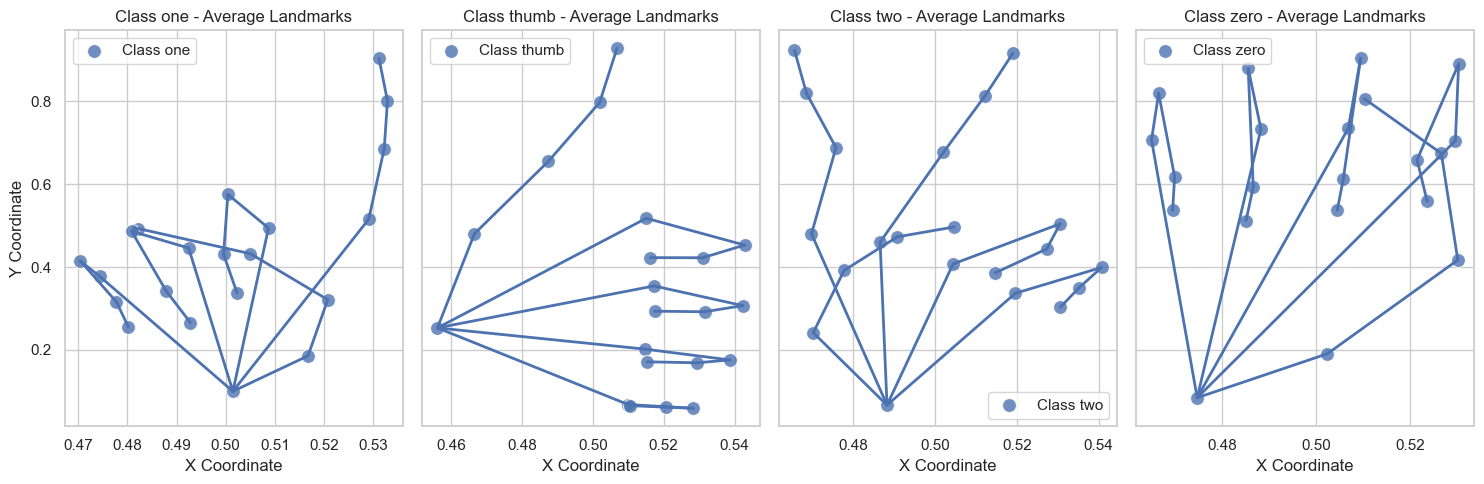

Plotting complete!


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("gesture_landmarks.csv")

# Convert all landmark columns to numeric to avoid dtype issues
df.iloc[:, :-1] = df.iloc[:, :-1].apply(pd.to_numeric, errors='coerce')

# Get the unique classes
classes = df['label'].unique()

# Set up the Seaborn style for the plot
sns.set(style="whitegrid")

# Set up the figure and the axes for multiple subplots (one per class)
num_classes = len(classes)
fig, axes = plt.subplots(1, num_classes, figsize=(15, 5), sharey=True)

# If there is only one class, 'axes' will not be an array, so we wrap it in a list
if num_classes == 1:
    axes = [axes]

# Iterate over each class and plot the average landmarks in a separate subplot
for i, gesture_class in enumerate(classes):
    ax = axes[i]  # Select the subplot axis for the current class
    
    print(f"Processing class {gesture_class}...")  # Progress indicator
    # Filter data for the current class
    class_data = df[df['label'] == gesture_class]

    # Initialize arrays to store the sum of X and Y coordinates for each class
    sum_x = np.zeros(21)
    sum_y = np.zeros(21)
    
    # Iterate through each sample in the class
    for index, row in class_data.iterrows():
        landmark_data = row[:-1].values  # Excluding the label column

        # Convert to float (fix dtype issue)
        landmark_data = np.array(landmark_data, dtype=np.float64)

        # Reshape the data into (21, 2) since each hand has 21 landmarks with (X, Y) values
        landmarks = landmark_data.reshape(21, 2)

        # Flip the Y-coordinates by subtracting them from 1
        landmarks[:, 1] = 1 - landmarks[:, 1]

        # Add to the sum of X and Y coordinates
        sum_x += landmarks[:, 0]
        sum_y += landmarks[:, 1]
    
    # Calculate the average of X and Y coordinates for the class
    avg_x = sum_x / len(class_data)
    avg_y = sum_y / len(class_data)

    # Plot the average landmarks for the class on the current subplot
    sns.scatterplot(x=avg_x, y=avg_y, label=f"Class {gesture_class}", s=100, marker='o', ax=ax, alpha=0.8)

    # Optionally, connect key landmarks to mimic hand structure
    connections = [
        (0, 1), (1, 2), (2, 3), (3, 4),  # Thumb
        (0, 5), (5, 6), (6, 7), (7, 8),  # Index finger
        (0, 9), (9, 10), (10, 11), (11, 12),  # Middle finger
        (0, 13), (13, 14), (14, 15), (15, 16),  # Ring finger
        (0, 17), (17, 18), (18, 19), (19, 20)  # Pinky finger
    ]

    for connection in connections:
        x1, y1 = avg_x[connection[0]], avg_y[connection[0]]
        x2, y2 = avg_x[connection[1]], avg_y[connection[1]]
        ax.plot([x1, x2], [y1, y2], "b-", linewidth=2)

    # Set individual subplot properties
    ax.set_title(f"Class {gesture_class} - Average Landmarks")
    ax.set_xlabel("X Coordinate")
    ax.set_ylabel("Y Coordinate")
    ax.legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

print("Plotting complete!")


# MODEL TRAINING

['one' 'thumb' 'two' 'zero']
Encoded Classes: ['one' 'thumb' 'two']
Unique Encoded Labels: [0 1 2]
[0 1 2]
Number of classes: 3
Adjusted Class Weights: {0: 0.9271090940980444, 1: 1.0045940515911456, 2: 1.071334833145857}
Epoch 1/10


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1786/1786 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4962 - loss: 1.2788 - val_accuracy: 0.9175 - val_loss: 0.4495
Epoch 2/10
1786/1786 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7939 - loss: 0.5898 - val_accuracy: 0.9333 - val_loss: 0.2963
Epoch 3/10
1786/1786 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8625 - loss: 0.4523 - val_accuracy: 0.9325 - val_loss: 0.2386
Epoch 4/10
1786/1786 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8832 - loss: 0.3932 - val_accuracy: 0.9328 - val_loss: 0.2113
Epoch 5/10
1786/1786 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8872 - loss: 0.3596 - val_accuracy: 0.9324 - val_loss: 0.1980
Epoch 6/10
1786/1786 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8874 - loss: 0.3507 - val_accuracy: 0.9319 - val_loss: 0.1906
Epoch 7/10
1786/1786 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8920 - loss: 0.3326 - val_accuracy: 0.9362 - val_loss: 0.1841
Epoch 8/10
1786/1786 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8918 - loss: 0.3215 - val_accurac

Model training complete. 'gesture_mlp_model_random_rotation.h5' saved.
383/383 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3985
           1       0.94      0.95      0.94      4081
           2       0.93      0.95      0.94      4180

    accuracy                           0.94     12246
   macro avg       0.94      0.94      0.94     12246
weighted avg       0.94      0.94      0.94     12246



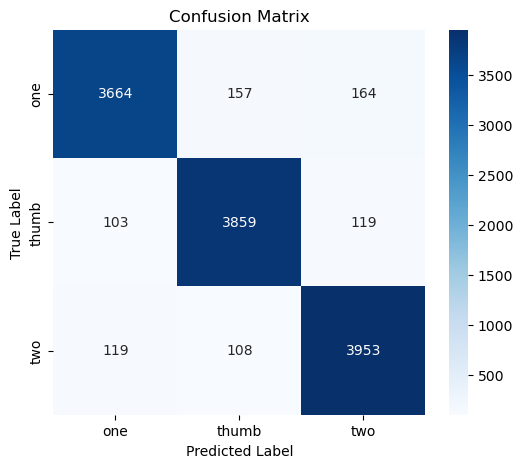

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks, regularizers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Function to apply a random horizontal flip with 50% probability
def flip_landmarks_horizontally(landmarks):
    """Flip the landmark coordinates horizontally."""
    num_landmarks = landmarks.shape[0] // 2
    landmarks = landmarks.reshape(num_landmarks, 2)

    # Multiply x-coordinates by -1 to flip horizontally
    flipped_landmarks = landmarks.copy()
    flipped_landmarks[:, 0] *= -1  

    return flipped_landmarks.flatten()

# Function to apply a random rotation to the landmarks
def random_rotate_landmarks(landmarks):
    """Randomly rotate the landmark coordinates by an angle between -180 and 180 degrees."""
    angle = np.random.uniform(-180, 180)  # Angle in degrees
    angle_rad = np.deg2rad(angle)  # Convert to radians

    # Rotation matrix for 2D rotation
    rotation_matrix = np.array([
        [np.cos(angle_rad), -np.sin(angle_rad)],
        [np.sin(angle_rad), np.cos(angle_rad)]
    ])
    
    # Reshape landmarks to (num_landmarks, 2) and apply rotation
    num_landmarks = landmarks.shape[0] // 2  # Assuming (x, y) pairs
    landmarks = landmarks.reshape(num_landmarks, 2)

    # Center the landmarks before rotation
    center = np.mean(landmarks, axis=0)
    landmarks -= center  # Translate to origin
    rotated_landmarks = np.dot(landmarks, rotation_matrix)
    rotated_landmarks += center  # Translate back

    return rotated_landmarks.flatten()

# Load preprocessed data
df = pd.read_csv("gesture_landmarks.csv")

# Separate features and labels
X = df.drop(columns=["label"]).values  # Landmark features
y = df["label"].values  # Gesture labels

print(np.unique(y))

# Drop "thumb" class before encoding
df = df[df["label"] != "zero"]  # Remove rows where label == "zero"

# Encode remaining labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["label"])  # Encode only the needed labels
X = df.drop(columns=["label"]).values  # Features remain the same

print("Encoded Classes:", label_encoder.classes_)  # Verify correct class labels
print("Unique Encoded Labels:", np.unique(y))  # Ensure labels are contiguous

print(np.unique(y))

# # Apply random rotation
# X_rotated_random = np.array([random_rotate_landmarks(sample) for sample in X])
# y_rotated_random = y.copy()

# # Apply horizontal flip after rotation
# X_flipped_random = np.array([flip_landmarks_horizontally(sample) for sample in X_rotated_random])
# y_flipped_random = y.copy()

# # Combine original and augmented data
# X = np.vstack((X, X_flipped_random))
# y = np.hstack((y, y_flipped_random))

# Split dataset (70% train, 15% validation, 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
num_classes = len(np.unique(y))  # Ensure this matches your dataset
print("Number of classes:", num_classes)

# Define updated MLP model with remaining classes
lambda_l1 = 0.001  # Adjust the L1 regularization strength as needed

model = keras.Sequential([
    layers.Dense(8, activation="relu", input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l1(lambda_l1)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    # layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l1(lambda_l1)),
    # layers.BatchNormalization(),
    # layers.Dropout(0.5),

    # layers.Dense(8, activation="relu", kernel_regularizer=regularizers.l1(lambda_l1)),
    # layers.BatchNormalization(),
    # layers.Dropout(0.5),

    layers.Dense(len(np.unique(y)), activation="softmax")  # Updated number of output classes
])

# Compile and train the model
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

early_stopping = callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

from sklearn.utils.class_weight import compute_class_weight

# Compute initial class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Manually adjust the weight for class 0 if it's still dominating
class_weight_dict[0] *= 0.925  #weight for class 0
class_weight_dict[1] *= 0.98  #weight for class 1
class_weight_dict[2] *= 1.1  #weight for class 2

print("Adjusted Class Weights:", class_weight_dict)

# Train with updated class weights
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, 
                    callbacks=[early_stopping], class_weight=class_weight_dict)


# Save model and scaler
model.save("gesture_mlp_model_random_rotation.h5")
np.save("scaler.npy", scaler.mean_)
np.save("scaler_scale.npy", scaler.scale_)

print("Model training complete. 'gesture_mlp_model_random_rotation.h5' saved.")

# Evaluate on test set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Print evaluation report
print(classification_report(y_test, y_pred_labels))

# Generate and plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


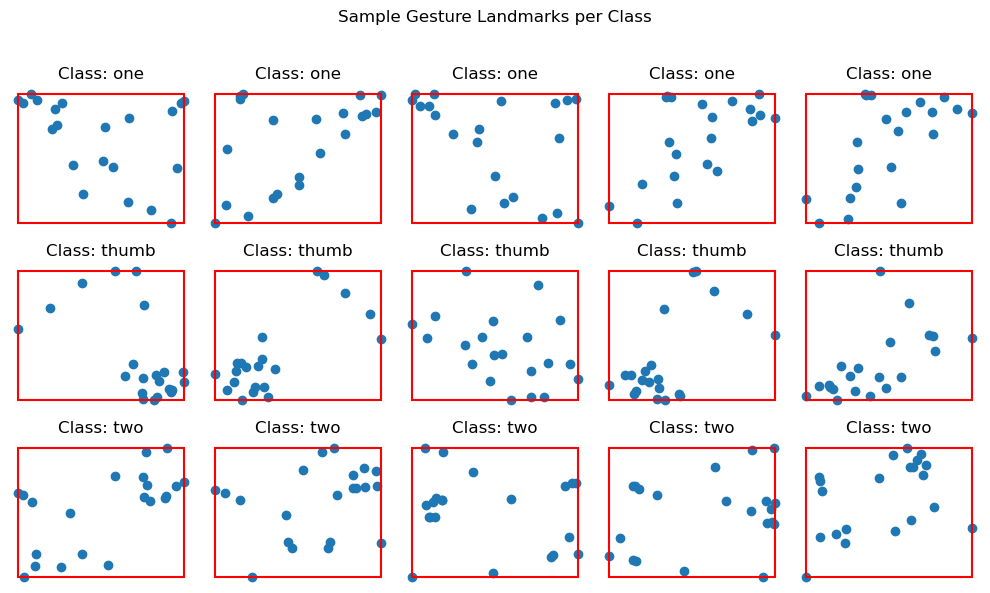

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the number of samples to show per class
samples_per_class = 5

# Create a dictionary to store sample indices for each class
class_samples = {label: [] for label in np.unique(y_train)}

# Collect sample indices
for idx, label in enumerate(y_train):
    if len(class_samples[label]) < samples_per_class:
        class_samples[label].append(idx)

# Plot the samples
fig, axes = plt.subplots(len(class_samples), samples_per_class, figsize=(samples_per_class * 2, len(class_samples) * 2))
fig.suptitle("Sample Gesture Landmarks per Class")

for row_idx, (label, indices) in enumerate(class_samples.items()):
    for col_idx, sample_idx in enumerate(indices):
        sample = X_train[sample_idx].reshape(-1, 2)  # Reshape flattened data to (num_landmarks, 2)
        ax = axes[row_idx, col_idx]
        ax.scatter(sample[:, 0], -sample[:, 1], marker='o')  # Invert y-axis for proper visualization
        ax.set_title(f"Class: {label_encoder.classes_[label]}")

        # Compute bounding box (min-max of x and y)
        min_x, max_x = np.min(sample[:, 0]), np.max(sample[:, 0])
        min_y, max_y = np.min(-sample[:, 1]), np.max(-sample[:, 1])  # Keep inverted y-axis

        # Create a rectangle around the points
        rect = patches.Rectangle((min_x, min_y), max_x - min_x, max_y - min_y,
                                 linewidth=1.5, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

        ax.axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# MODEL DEMO USING WEBCAM

In [8]:
import cv2
import mediapipe as mp
import numpy as np
import tensorflow as tf
import joblib
import pydirectinput
from sklearn.preprocessing import StandardScaler

# Load trained model and scaler
model = tf.keras.models.load_model("gesture_mlp_model_random_rotation.h5")
scaler = StandardScaler()
scaler.mean_ = np.load("scaler.npy")
scaler.scale_ = np.load("scaler_scale.npy")

# Mediapipe setup
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Gesture to key mapping
gesture_key_map = {
    0: 's',  
    1: 'w',  
    2: None,   
}

gesture_label_map = {
    0: "one",
    1: "thumb",
    2: "two"
}

pressed_keys = {key: False for key in gesture_key_map.values() if key is not None}

def process_landmarks(hand_landmarks):
    """Extracts and normalizes hand landmark coordinates."""
    landmarks = np.array([(lm.x, lm.y) for lm in hand_landmarks.landmark]).flatten()
    return scaler.transform([landmarks])


def press_key(gesture):
    """Handles key press logic."""
    key = gesture_key_map.get(gesture)
    if key:
        if not pressed_keys[key]:
            pydirectinput.keyDown(key)
            pressed_keys[key] = True


def release_keys():
    """Releases all mapped keys."""
    for key, pressed in pressed_keys.items():
        if pressed:
            pydirectinput.keyUp(key)
            pressed_keys[key] = False


def compare_hand_averages(left_hand, right_hand, threshold=0.35):
    """Compares the y-coordinate of landmark 0 for left-right movement."""
    
    if left_hand is None or right_hand is None:
        return
        
    # Extract wrist y-coordinates (landmark 0)
    left_y = left_hand[0].y
    right_y = right_hand[0].y

    # Compute the difference
    diff = abs(left_y - right_y)

    # Debugging prints
    print(f"Left Wrist Y: {left_y}, Right Wrist Y: {right_y}")
    print(f"Difference (diff): {diff}, Threshold: {threshold}")

    # Check if difference exceeds threshold
    if diff > threshold:
        if left_y > right_y:
            print("[ACTION] Pressing 'd'")
            pydirectinput.keyDown('d')
            pydirectinput.keyUp('a')
        else:
            print("[ACTION] Pressing 'a'")
            pydirectinput.keyDown('a')
            pydirectinput.keyUp('d')
    else:
        print("[ACTION] Releasing 'a' and 'd'")
        pydirectinput.keyUp('a')
        pydirectinput.keyUp('d')

# Start video capture
cap = cv2.VideoCapture(1) #CHANGE TO 0 IF IT BREAKS

cv2.namedWindow('Gesture Recognition', cv2.WINDOW_NORMAL)
cv2.setWindowProperty('Gesture Recognition', cv2.WND_PROP_TOPMOST, 1)
while True:
    success, frame = cap.read()
    if not success:
        print("[ERROR] Unable to read from camera. Exiting...")
        break
    
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(frame_rgb)
    release_keys()
    
    left_hand, right_hand = None, None
    
    if results.multi_hand_landmarks and results.multi_handedness:
        for hand_landmarks, handedness in zip(results.multi_hand_landmarks, results.multi_handedness):
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            features = process_landmarks(hand_landmarks)
            prediction = model.predict(features)
            gesture = np.argmax(prediction)
            original_label = gesture_label_map.get(gesture, "Unknown")  # Default to "Unknown" if out of range
            print(f"Raw Prediction: {prediction}, Gesture: {gesture}, Label: {original_label}")

            press_key(gesture)
            
            if handedness.classification[0].label == "Left":
                left_hand = hand_landmarks.landmark
            else:
                right_hand = hand_landmarks.landmark

    compare_hand_averages(left_hand, right_hand)
    
    cv2.imshow("Gesture Recognition", frame)
    if cv2.waitKey(1) & 0xFF == 27:  # ESC to exit
        break

cap.release()
cv2.destroyAllWindows()
release_keys()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Raw Prediction: [[7.6337610e-03 9.9186444e-01 5.0179387e-04]], Gesture: 1, Label: thumb
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Raw Prediction: [[8.3413860e-03 9.9107867e-01 5.7993806e-04]], Gesture: 1, Label: thumb
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Raw Prediction: [[0.19241044 0.6873968  0.12019273]], Gesture: 1, Label: thumb
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Raw Prediction: [[0.6630368  0.16692483 0.17003836]], Gesture: 0, Label: one
Left Wrist Y: 0.7955881357192993, Right Wrist Y: 0.7314544916152954
Difference (diff): 0.0641336441040039, Threshold: 0.35
[ACTION] Releasing 'a' and 'd'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Raw Prediction: [[0.26273838 0.24340843 0.49385324]], Gesture: 2, Label: two
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Raw Prediction: [[0.21769907 0.41512066 0.36718026]], Gesture: 1, Label: thumb
Left Wrist Y: 0.7017703056335449, Right Wrist Y: 0.6566022634506226
Difference (diff): 0.04516804218292236, Threshold: 0.35
[ACTIO